IPYNB notebook to preprocess data imported from matlab, and convert it into the format accepted by the input

plotting the experimental data

In [2]:
import scipy.io
import pandas as pd
import matplotlib as plt
import numpy as np
from matplotlib import pyplot
from matplotlib import markers

Text(0.5, 1.0, 'PBCO experimental fitted peaks')

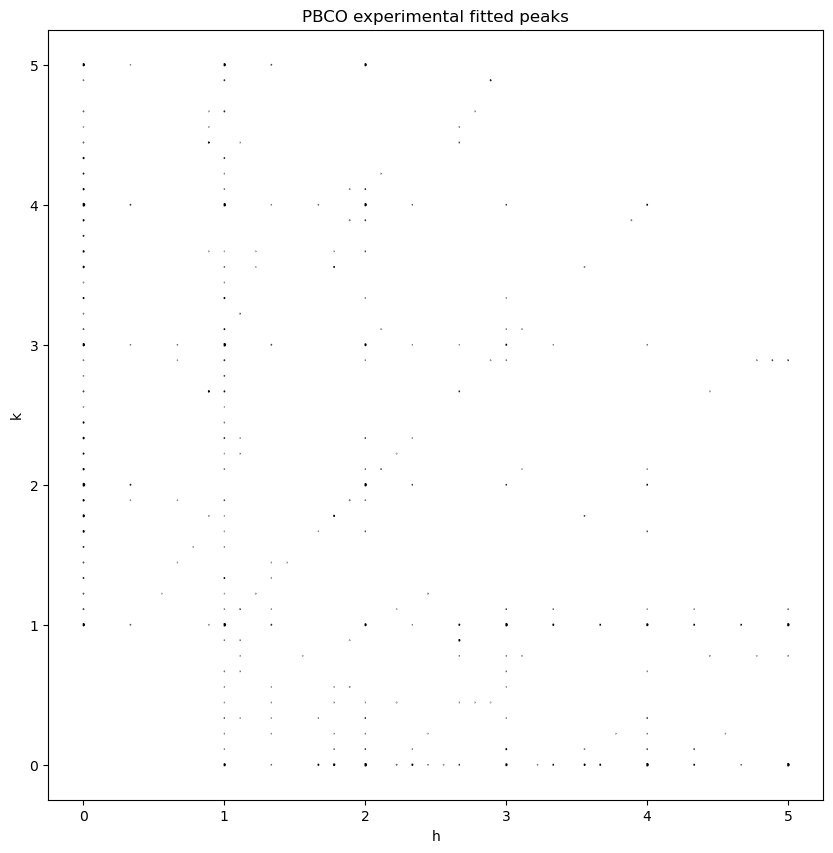

In [5]:
# Load data
h_coords = pd.read_csv('raw_data/h_coords.csv', header=None).values.flatten()
k_coords = pd.read_csv('raw_data/k_coords.csv', header=None).values.flatten()
intensity_arr = pd.read_csv('raw_data/intensity_arr.csv', header=None).values

h , k = np.meshgrid(h_coords , k_coords)

h_flat = h.flatten()
k_flat = k.flatten()
intensity_flat = intensity_arr.flatten()

copy_h_flat = h_flat
h_flat = k_flat
k_flat = copy_h_flat


pyplot.scatter(h_flat , k_flat , s=intensity_flat  , color='blue', edgecolor="black",
               label='Exp', marker=markers.MarkerStyle("o", fillstyle="right"))
#change figure size
pyplot.gcf().set_size_inches(10, 10)
#add labels
pyplot.xlabel('h')
pyplot.ylabel('k')
#add title
pyplot.title('PBCO experimental fitted peaks')

create a csv file with 4 columns. first column is for h_coords, then for k_coords, and then for l_coords (all equal to 0). then another row for the experimental intensity, with title 'intensity_exp'.

In [8]:
#create a csv file with the data, and each first row is the name of the column : h ,k , l , intensity_exp
data = pd.read_csv('C:/Users/User/Desktop/uzh_intern/CrystalClearFit/alrisDistortionFit/La2CuO4/raw_data/raw_coords.txt',delim_whitespace=True, header=None)
h = data.iloc[:, 0]
k = data.iloc[:, 1]
l = data.iloc[:, 2]
intensity = data.iloc[:,3]

print(data)
data1 = pd.DataFrame({
    'h': h,
    'k': k,
    'l': l,  # Assuming l is zero for this exampleP
    'intensity_exp': intensity
})

data1.to_csv('C:/Users/User/Desktop/uzh_intern/CrystalClearFit/alrisDistortionFit/La2CuO4/raw_data/peaks1.csv', index=False)


    0  1   2      3
0  -2 -3   0  354.4
1   4  3   0  232.7
2  -4 -5   0  914.6
3  -4 -7   0  313.4
4   6  5   0  360.9
.. .. ..  ..    ...
62  7  0  -7  561.9
63  7  0  15  493.4
64  7  0  23  863.8
65  9  0 -15  569.2
66  9  0  -9  870.4

[67 rows x 4 columns]


C:\Users\User\AppData\Local\Temp\ipykernel_19800\1705823412.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('C:/Users/User/Desktop/uzh_intern/CrystalClearFit/alrisDistortionFit/La2CuO4/raw_data/raw_coords.txt',delim_whitespace=True, header=None)


Find where to add the shifts in the list of atom coordinates. 

add the atom displacement distortions

1. check the cif file, section `_iso_parent-to-child.transform_Pp_abc` ( very end of the cif file), change the transformation accordingly in `functions`

# Print all the atom coords

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants
import math
import xrayutilities as xu


crystal = xu.materials.Crystal.fromCIF('C:/Users/User/Desktop/uzh_intern/CrystalClearFit/alrisDistortionFit/PBCO/new_PBCO_fit/new_PBCO.cif')
for a, n, c, d in crystal.lattice.base():
    print([a, [n[0], n[1], n[2]]])

#User: copy the output of the above code into PrNiO3_C4_coords.txt
# using ctrl + f:
# 1. replace (number) with 'number' 
# 2. remove all commas
# 3. replace double spacing with single spacing


[Pr (59), [0.94444, 0.16667, 0.05556]]
[Pr (59), [0.05556, 0.83333, 0.05556]]
[Pr (59), [0.05556, 0.16667, 0.94444]]
[Pr (59), [0.94444, 0.83333, 0.94444]]
[Pr (59), [0.05556, 0.83333, 0.94444]]
[Pr (59), [0.94444, 0.16667, 0.94444]]
[Pr (59), [0.94444, 0.83333, 0.05556]]
[Pr (59), [0.05556, 0.16667, 0.05556]]
[Pr (59), [0.94444, 0.16667, 0.16667]]
[Pr (59), [0.05556, 0.83333, 0.16667]]
[Pr (59), [0.05556, 0.16667, 0.83333]]
[Pr (59), [0.94444, 0.83333, 0.83333]]
[Pr (59), [0.05556, 0.83333, 0.83333]]
[Pr (59), [0.94444, 0.16667, 0.83333]]
[Pr (59), [0.94444, 0.83333, 0.16667]]
[Pr (59), [0.05556, 0.16667, 0.16667]]
[Pr (59), [0.94444, 0.16667, 0.27778]]
[Pr (59), [0.05556, 0.83333, 0.27778]]
[Pr (59), [0.05556, 0.16667, 0.72222]]
[Pr (59), [0.94444, 0.83333, 0.72222]]
[Pr (59), [0.05556, 0.83333, 0.72222]]
[Pr (59), [0.94444, 0.16667, 0.72222]]
[Pr (59), [0.94444, 0.83333, 0.27778]]
[Pr (59), [0.05556, 0.16667, 0.27778]]
[Pr (59), [0.94444, 0.16667, 0.38889]]
[Pr (59), [0.05556, 0.833

# The following code adds the atomic displacement variables. 

Things to do beforehand:
1. Go to `PrNiO2_C4_info.cif` , find `_atom_site_fract_symmform`
2. copy the info in `_atom_site_fract_symmform` to a new file called `PrNiO2_C4_atom_site_fract_symmform.txt`
3. In `PrNiO2_C4_atom_site_fract_symmform.txt`:
3.1 replace commas with a single space
3.2 replace double space with single space
4. change the output file name to the corresponding crystal

Output:
`PrNiO2_C4_coords_processed.txt` and `PrNiO2_C4_shift_names.txt`

1. in `PrNiO2_C4_coords_processed.txt` , remove all "
2. remove the comma in the last line
3. copy all into `functions`, and into `atom_position_list`

1. in `PrNiO2_C4_shift_names.txt` , copy to variables list in `atom_position_list`

In [2]:
#load a text file into a dataframe
PBCO_coords = pd.read_csv('C:/Users/User/Desktop/uzh_intern/CrystalClearFit/alrisDistortionFit/PBCO/new_PBCO_fit/new_PBCO_coords.txt' , delim_whitespace=True, header=None)
PBCO_distortions = pd.read_csv('C:/Users/User/Desktop/uzh_intern/CrystalClearFit/alrisDistortionFit/PBCO/new_PBCO_fit/new_PBCO_atom_site_fract_symmform.txt' , delim_whitespace=True, header=None)

#load PBCO_distortions into a list of lists
PBCO_distortions = PBCO_distortions.values.tolist()
PBCO_coords = PBCO_coords.values.tolist()

#create a new column in PBCO_distortions, which adds the second column up cumulatively
PBCO_distortions = pd.DataFrame(PBCO_distortions)
PBCO_coords = pd.DataFrame(PBCO_coords)

print(PBCO_coords)
print(PBCO_distortions)

PBCO_coords[2] = PBCO_coords[2].astype(str)
PBCO_coords[3] = PBCO_coords[3].astype(str)
PBCO_coords[4] = PBCO_coords[4].astype(str)


PBCO_distortions[11] = PBCO_distortions[2].cumsum()

#create a list to store all the names of shift name variables
shift_names = []

for i in range(len(PBCO_distortions)):
    #take the ith and ith + 1 element in the last column, and load them into a variable called num_atom_start and num_atom_end. if i is 1 , then num_atom_start must equal to 1, and num_atom_end must equal to the first element in the last column
    if i == 0:
        num_atom_start = 0
        num_atom_end = PBCO_distortions.iloc[i, -1]
    else:
        num_atom_start = PBCO_distortions.iloc[i, -1] - PBCO_distortions.iloc[i, 2]
        num_atom_end = PBCO_distortions.iloc[i, -1]
    
    #check if there are Dx , Dy , Dz in the 3rd , 4th and 5th columns of PBCO_distortions
    if 'Dx' in PBCO_distortions.iloc[i, 8]:
        #string the char in the first column ith row to 'Dx'
        dx_shift_name = PBCO_distortions.iloc[i, 0] + '_dx'
    else:
        dx_shift_name = 0
    if 'Dy' in PBCO_distortions.iloc[i, 9]:
        #string the char in the first column ith row to 'Dy'
        dy_shift_name = PBCO_distortions.iloc[i, 0] + '_dy'
    elif 'Dx' in PBCO_distortions.iloc[i, 9]:
        #string the char in the first column ith row to 'Dy'
        dy_shift_name = PBCO_distortions.iloc[i, 0] + '_dx'
    else:
        dy_shift_name = 0
    if 'Dz' in PBCO_distortions.iloc[i, 10]:
        #string the char in the first coumn ith row to 'Dz'
        dz_shift_name = PBCO_distortions.iloc[i, 0] + '_dz' 
    elif 'Dy' in PBCO_distortions.iloc[i, 10]:
        #string the char in the first column ith row to 'Dz'
        dz_shift_name = PBCO_distortions.iloc[i, 0] + '_dy'
    elif 'Dx' in PBCO_distortions.iloc[i, 10]:
        #string the char in the first column ith row to 'Dz'
        dz_shift_name = PBCO_distortions.iloc[i, 0] + '_dx'
    else:
        dz_shift_name = 0



    if dx_shift_name != 0:
        shift_names.append(dx_shift_name)
        for j in range(num_atom_start, num_atom_end):
            PBCO_coords.iloc[j, 2] = str(PBCO_coords.iloc[j, 2] + ' + ') + dx_shift_name
    if dy_shift_name != 0:
        shift_names.append(dy_shift_name)
        for j in range(num_atom_start, num_atom_end):
            PBCO_coords.iloc[j, 3] = str(PBCO_coords.iloc[j, 3] + ' + ') + dy_shift_name
    if dz_shift_name != 0:
        shift_names.append(dz_shift_name)
        for j in range(num_atom_start, num_atom_end):
            PBCO_coords.iloc[j, 4] = str(PBCO_coords.iloc[j, 4] + ' + ') + dz_shift_name


for k in range(len(PBCO_coords)):
    PBCO_coords.iloc[k, 0] = str("['" + PBCO_coords.iloc[k, 0] + "'")
    PBCO_coords.iloc[k, 2] = str('[' + PBCO_coords.iloc[k, 2])
    PBCO_coords.iloc[k, 4] = str(PBCO_coords.iloc[k, 4] + "]],")

print(PBCO_coords)
#save PBCO_coords to a csv file
PBCO_coords.to_csv('C:/Users/User/Desktop/uzh_intern/CrystalClearFit/alrisDistortionFit/PBCO/new_PBCO_fit/new_PBCO_coords_processed_copy.txt', index=False, header=False)


print(shift_names)
# Convert shift_names to a DataFrame
shift_names = pd.DataFrame(shift_names)
#print all shift_names into a single line
shift_names_txt = shift_names[0].str.cat(sep=', ')
print(shift_names)
# Save shift_names to a text file
with open('C:/Users/User/Desktop/uzh_intern/CrystalClearFit/alrisDistortionFit/PBCO/new_PBCO_fit/new_PBCO_shift_names_copy.txt', 'w') as f:
    f.write(shift_names_txt)


C:\Users\User\AppData\Local\Temp\ipykernel_24844\2051403387.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  PBCO_coords = pd.read_csv('C:/Users/User/Desktop/uzh_intern/CrystalClearFit/alrisDistortionFit/PBCO/new_PBCO_fit/new_PBCO_coords.txt' , delim_whitespace=True, header=None)
C:\Users\User\AppData\Local\Temp\ipykernel_24844\2051403387.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  PBCO_distortions = pd.read_csv('C:/Users/User/Desktop/uzh_intern/CrystalClearFit/alrisDistortionFit/PBCO/new_PBCO_fit/new_PBCO_atom_site_fract_symmform.txt' , delim_whitespace=True, header=None)


       0     1        2        3        4
0     Pr  '59'  0.94444  0.16667  0.05556
1     Pr  '59'  0.05556  0.83333  0.05556
2     Pr  '59'  0.05556  0.16667  0.94444
3     Pr  '59'  0.94444  0.83333  0.94444
4     Pr  '59'  0.05556  0.83333  0.94444
...   ..   ...      ...      ...      ...
3154   O   '8'  0.44444  0.28053  0.55556
3155   O   '8'  0.55556  0.28053  0.55556
3156   O   '8'  0.44444  0.71947  0.55556
3157   O   '8'  0.44444  0.28053  0.44444
3158   O   '8'  0.55556  0.71947  0.44444

[3159 rows x 5 columns]
        0   1   2      3        4        5        6    7   8   9   10
0    Pr1_1  Pr   8  alpha -0.05556  0.16667  0.05556  1.0  Dx  Dy  Dz
1    Pr1_2  Pr   8  alpha -0.05556  0.16667  0.16667  1.0  Dx  Dy  Dz
2    Pr1_3  Pr   8  alpha -0.05556  0.16667  0.27778  1.0  Dx  Dy  Dz
3    Pr1_4  Pr   8  alpha -0.05556  0.16667  0.38889  1.0  Dx  Dy  Dz
4    Pr1_5  Pr   4      z -0.05556  0.16667  0.50000  1.0  Dx  Dy   0
..     ...  ..  ..    ...      ...      ...      ..

# the following code is only applicable if the parameters are the atomic displacements. to fit the modes directly, skip to the next section

Preprocess get mode amplitudes

In [ ]:
mode_names = pd.read_csv('raw_data/displacivemode_names.txt' , delim_whitespace=True, header=None)
mode_matrix = pd.read_csv('raw_data/mode_matrix.txt' , delim_whitespace=True, header=None)

#CONVERT TO A LIST OF LISTS
mode_names = mode_names.values.tolist()

# Convert mode_names to a DataFrame
mode_names = pd.DataFrame(mode_names)

num_modes = len(mode_names) 
print(num_modes)

mode_name1 = []
# rewrite the mode names into a new list with the first column as the mode name 
for i in range(num_modes):
    mode_name1.append(str('"' + str(mode_names.iloc[i, 1]) + '"' + ': '))

print(mode_name1)


445
['"[1/9,1/9,0]V1(a,0;a,0)[Pr1:h:dsp]B3u(a)": ', '"[1/9,1/9,0]V1(a,0;a,0)[Pr1:h:dsp]B2u(a)": ', '"[0,1/9,0]DT1(a,0)[Pr1:h:dsp]B2u(a)": ', '"[0,2/9,0]DT1(a,0)[Pr1:h:dsp]B2u(a)": ', '"[0,1/3,0]DT1(a,0)[Pr1:h:dsp]B2u(a)": ', '"[0,4/9,0]DT1(a,0)[Pr1:h:dsp]B2u(a)": ', '"[1/9,0,0]SM1(a,0)[Pr1:h:dsp]B3u(a)": ', '"[2/9,0,0]SM1(a,0)[Pr1:h:dsp]B3u(a)": ', '"[1/3,0,0]SM1(a,0)[Pr1:h:dsp]B3u(a)": ', '"[4/9,0,0]SM1(a,0)[Pr1:h:dsp]B3u(a)": ', '"[1/9,2/9,0]V1(a,0;a,0)[Pr1:h:dsp]B3u(a)": ', '"[1/9,2/9,0]V1(a,0;a,0)[Pr1:h:dsp]B2u(a)": ', '"[1/9,1/3,0]V1(a,0;a,0)[Pr1:h:dsp]B3u(a)": ', '"[1/9,1/3,0]V1(a,0;a,0)[Pr1:h:dsp]B2u(a)": ', '"[1/9,4/9,0]V1(a,0;a,0)[Pr1:h:dsp]B3u(a)": ', '"[1/9,4/9,0]V1(a,0;a,0)[Pr1:h:dsp]B2u(a)": ', '"[2/9,1/9,0]V1(a,0;a,0)[Pr1:h:dsp]B3u(a)": ', '"[2/9,1/9,0]V1(a,0;a,0)[Pr1:h:dsp]B2u(a)": ', '"[2/9,2/9,0]V1(a,0;a,0)[Pr1:h:dsp]B3u(a)": ', '"[2/9,2/9,0]V1(a,0;a,0)[Pr1:h:dsp]B2u(a)": ', '"[2/9,1/3,0]V1(a,0;a,0)[Pr1:h:dsp]B3u(a)": ', '"[2/9,1/3,0]V1(a,0;a,0)[Pr1:h:dsp]B2u(a)": ', '

C:\Users\User\AppData\Local\Temp\ipykernel_25560\395762485.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  mode_names = pd.read_csv('raw_data/displacivemode_names.txt' , delim_whitespace=True, header=None)
C:\Users\User\AppData\Local\Temp\ipykernel_25560\395762485.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  mode_matrix = pd.read_csv('raw_data/mode_matrix.txt' , delim_whitespace=True, header=None)


In [168]:
#make a zeros array with len(shift_names) rows and columns
mode_np_matrix = np.zeros((num_modes, num_modes))

print(mode_np_matrix.shape)
print(mode_np_matrix)

#load the third column values from mode_matrix into mode_np_matrix.first column of ith row is the row number of the matrix, second column is the column number of the matrix, third column is the value of the matrix
for i in range(len(mode_matrix)):
    row = mode_matrix.iloc[i, 0] - 1
    col = mode_matrix.iloc[i, 1] - 1
    value = mode_matrix.iloc[i, 2]
    mode_np_matrix[row, col] = value

print(mode_np_matrix)


print(mode_name1)


for row in range(num_modes):
    for col in range(num_modes):
        if mode_np_matrix[row, col] != 0:
            shift_name = shift_names.iloc[col,0]
            
            if mode_np_matrix[row, col] < 0:
                matrix_element = mode_np_matrix[row, col] * -1
                string_mode_np_matrix = str(matrix_element)
                dependent = ' - ' + string_mode_np_matrix + ' * ' + shift_name
            else:
                string_mode_np_matrix = str(mode_np_matrix[row, col])
                dependent = ' + ' + string_mode_np_matrix + ' * ' + shift_name
            
            mode_name1[row] = str(mode_name1[row]) + dependent
        else:
            mode_name1[row] = str(mode_name1[row])



# Save mode_names to a text file without using pandas
with open('raw_data/mode_names_processed.txt', 'w') as f:
    for name in mode_name1:
        f.write(name + ',' + '\n')


'''mode_names_txt = pd.DataFrame(mode_name1)
mode_names_txt.to_csv('raw_data/mode_names_processed.txt', index=False, header=False)

'''


(445, 445)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[-0.32635  0.       0.      ...  0.       0.       0.     ]
 [ 0.       0.32635  0.3473  ...  0.       0.       0.     ]
 [-0.17365  0.       0.      ...  0.       0.       0.     ]
 ...
 [ 0.       0.       0.      ...  0.       0.      -0.17365]
 [ 0.       0.       0.      ...  0.03015  0.       0.     ]
 [ 0.       0.       0.      ...  0.      -0.17365  0.     ]]
['"[1/9,1/9,0]V1(a,0;a,0)[Pr1:h:dsp]B3u(a)": ', '"[1/9,1/9,0]V1(a,0;a,0)[Pr1:h:dsp]B2u(a)": ', '"[0,1/9,0]DT1(a,0)[Pr1:h:dsp]B2u(a)": ', '"[0,2/9,0]DT1(a,0)[Pr1:h:dsp]B2u(a)": ', '"[0,1/3,0]DT1(a,0)[Pr1:h:dsp]B2u(a)": ', '"[0,4/9,0]DT1(a,0)[Pr1:h:dsp]B2u(a)": ', '"[1/9,0,0]SM1(a,0)[Pr1:h:dsp]B3u(a)": ', '"[2/9,0,0]SM1(a,0)[Pr1:h:dsp]B3u(a)": ', '"[1/3,0,0]SM1(a,0)[Pr1:h:dsp]B3u(a)": ', '"[4/9,0,0]SM1(a,0)[Pr1:h:dsp]B3u(a)": ', '"[1/9,2/9,0]V1(a,0;a,0)[Pr1:h

"mode_names_txt = pd.DataFrame(mode_name1)\nmode_names_txt.to_csv('raw_data/mode_names_processed.txt', index=False, header=False)\n\n"

# This is the next section. fit the mode amplitudes directly
Things to do beforehand:
1. create txt file `PrNiO2_C4_mode_amp_bounds.txt`
2. from `PrNiO2_C4.str` file, at mode definitions, copy all mode names and their info
3. run the file

the code should generate 2 files: `PrNiO2_C4_mode_names_variable` , `PrNiO2_C4_max_bound_vectors`

`PrNiO2_C4_mode_names_variable.txt`: copy this into `functions`, into `shift_atoms`.

`PrNiO2_C4_max_bound_vectors.txt`: copy this into `gradientdescent.ipynb` to `max_mode_amps`




In [ ]:
mode_amp_bounds = pd.read_csv('C:/Users/User/Desktop/uzh_intern/CrystalClearFit/alrisDistortionFit/PBCO/new_PBCO_fit/new_PBCO_mode_amp_bounds.txt' , delim_whitespace=True, header=None)
print(mode_amp_bounds)
max_bound_vectors   = mode_amp_bounds.iloc[:, 6].values.tolist()

indices_to_zero = [111, 411, 711, 906, 1101]
# Set the specified indices to zero
for index in indices_to_zero:
    max_bound_vectors[index] = 0.0

mode_names_variable = mode_amp_bounds.iloc[:, 1].values.tolist()

#remove '!' from all elements in mode_names
mode_names_variable = [name.replace('!', '') for name in mode_names_variable]

with open('C:/Users/User/Desktop/uzh_intern/CrystalClearFit/alrisDistortionFit/PBCO/new_PBCO_fit/new_PBCO_mode_names_variable.txt', 'w') as f:
    for name in mode_names_variable:
        f.write(name + ',')

with open('C:/Users/User/Desktop/uzh_intern/CrystalClearFit/alrisDistortionFit/PBCO/new_PBCO_fit/new_PBCO_max_bound_vectors.txt', 'w') as f:
    for vector in max_bound_vectors:
        f.write(str(vector) + ',')


        0       1    2    3      4    5      6  \
0     prm     !a1  0.0  min  -5.60  max   5.60   
1     prm     !a2  0.0  min  -6.36  max   6.36   
2     prm     !a3  0.0  min  -5.60  max   5.60   
3     prm     !a4  0.0  min -11.19  max  11.19   
4     prm     !a5  0.0  min -11.19  max  11.19   
...   ...     ...  ...  ...    ...  ...    ...   
1285  prm  !a1286  0.0  min  -9.00  max   9.00   
1286  prm  !a1287  0.0  min  -9.14  max   9.14   
1287  prm  !a1288  0.0  min  -7.91  max   7.91   
1288  prm  !a1289  0.0  min  -9.14  max   9.14   
1289  prm  !a1290  0.0  min  -7.91  max   7.91   

                                                      7        8  
0     'Pmmm[1/9,1/9,1/3]GP1(a,0;a,0;a,0;a,0)[Pr1:h:dsp]   B3u(a)  
1     'Pmmm[1/9,1/9,1/3]GP1(a,0;a,0;a,0;a,0)[Pr1:h:dsp]   B1u(a)  
2     'Pmmm[1/9,1/9,1/3]GP1(a,0;a,0;a,0;a,0)[Pr1:h:dsp]   B2u(a)  
3                     'Pmmm[0,1/9,0]DT1(a,0)[Pr1:h:dsp]   B2u(a)  
4                     'Pmmm[0,2/9,0]DT1(a,0)[Pr1:h:dsp]   B2u(a)

C:\Users\User\AppData\Local\Temp\ipykernel_10676\2541985741.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  mode_amp_bounds = pd.read_csv('C:/Users/User/Desktop/uzh_intern/CrystalClearFit/alrisDistortionFit/PBCO/new_PBCO_fit/new_PBCO_mode_amp_bounds.txt' , delim_whitespace=True, header=None)


1. go to `PrNiO2_C4_info.str`
2. find `mode-amplitude to delta transformation`
3. remove `;:  0.00000` 
4. remove everything in front and including the = sign in each line
5. run code
6. remove all `'` from the file.
7. remove last comma
8. copy to `shift_atoms`

In [ ]:
delta_transform = pd.read_csv('C:/Users/User/Desktop/uzh_intern/CrystalClearFit/alrisDistortionFit/PBCO/new_PBCO_fit/new_PBCO_delta_transformation.txt' ,header=None)
delta_transform = pd.DataFrame(delta_transform)

wanted_modes = pd.read_csv('C:/Users/User/Desktop/uzh_intern/CrystalClearFit/alrisDistortionFit/PBCO/new_PBCO_fit/new_PBCO_mode_names_variable.txt', header=None)
wanted_modes = wanted_modes.values.flatten().tolist()
for i in range(len(wanted_modes)):
    wanted_modes[i] = str(wanted_modes[i])

# Convert delta_transform to a list of lists
delta_transform = delta_transform.values.tolist()
#string each row


#split each row into columns
for i in range(len(delta_transform)):
    delta_transform[i] = [item.strip() for item in delta_transform[i][0].replace('+', ' + ').replace('-', ' - ').split()]

#cheeck which row is the longest
max_length = max(len(row) for row in delta_transform)
#pad each row with empty strings to make them the same length
for i in range(len(delta_transform)):
    while len(delta_transform[i]) < max_length:
        this_idx = len(delta_transform[i])
        #if i is an even number , append + to the end of the row
        if this_idx % 2 == 0:
            delta_transform[i].append('+')
        else:
            delta_transform[i].append('0')


with open('C:/Users/User/Desktop/uzh_intern/CrystalClearFit/alrisDistortionFit/PBCO/new_PBCO_fit/new_PBCO_delta_transformation1.txt', 'w') as f:
    for row in delta_transform:
        f.write(str(row) + ',\n')

delta_transform1 = pd.read_csv('C:/Users/User/Desktop/uzh_intern/CrystalClearFit/alrisDistortionFit/PBCO/new_PBCO_fit/new_PBCO_delta_transformation1.txt' , header=None)


for row in range(len(delta_transform1)):
    for col in range (max_length):
        if col % 2 == 0:
            continue
        else:
            if any(mode in delta_transform1.iloc[row, col] for mode in wanted_modes):
                #if the row contains any of the wanted modes, then keep it
                continue
            else:
                #if the row does not contain any of the wanted modes, then set it to 0
                delta_transform1.iloc[row, col] = '0'

print(delta_transform1)




# with open('C:/Users/User/Desktop/uzh_intern/CrystalClearFit/alrisDistortionFit/PBCO/new_PBCO_fit/new_PBCO_delta_transformation_processed.txt', 'w') as f:
#     for row in range(len(delta_transform1)):
#         item_number = 0
#         f.write('[')
#         for col in range(max_length):
#             if col % 2 == 0:
#                 continue
#             else:
#                 if delta_transform1.iloc[row, col] != '0':
#                     sign = delta_transform1.iloc[row, col - 1] + delta_transform1.iloc[row, col]
#                     if col == max_length - 1:
#                         f.write(sign + "]" + '\n')
#                         item_number += 1
#                     else:
#                         f.write(sign)
#                         item_number += 1
#                 if col == max_length - 1 and item_number == 0:
#                     f.write('0' + '],' + '\n')
#                 if col == max_length - 1 and item_number != 0:
#                     f.write('],' + '\n')
                        


KeyboardInterrupt: 

in `cif` file, go to section `_iso_displacivemode_value` and copy all the modes, and create a file called `PrNiO2_C4_displacivemode_names.txt`.

In [35]:
def shift_atoms_copy(a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16,a17,a18,a19,a20,a21,a22,a23,a24,a25,a26,a27,a28,a29,a30,a31,a32,a33,a34,a35,a36,a37,a38,a39,a40,a41,a42,a43,a44,a45,a46,a47,a48,a49,a50,a51,a52,a53,a54,a55,a56,a57,a58,a59,a60,a61,a62,a63,a64,a65,a66,a67,a68,a69,a70,a71,a72,a73,a74,a75,a76,a77,a78,a79,a80,a81,a82,a83,a84,a85,a86,a87,a88,a89,a90,a91,a92,a93,a94,a95,a96,a97,a98,a99,a100,a101,a102,a103,a104,a105,a106,a107,a108,a109,a110,a111,a112,a113,a114,a115,a116,a117,a118,a119,a120,a121,a122,a123,a124,a125,a126,a127,a128,a129,a130,a131,a132,a133,a134,a135,a136,a137,a138,a139,a140,a141,a142,a143,a144,a145,a146,a147,a148,a149,a150,a151,a152,a153,a154,a155,a156,a157,a158,a159,a160,a161,a162,a163,a164,a165,a166,a167,a168,a169,a170,a171,a172,a173,a174,a175,a176,a177,a178,a179,a180,a181,a182,a183,a184,a185,a186,a187,a188,a189,a190,a191,a192,a193,a194,a195,a196,a197,a198,a199,a200,a201,a202,a203,a204,a205,a206,a207,a208,a209,a210,a211,a212,a213,a214,a215,a216,a217,a218,a219,a220,a221,a222,a223,a224,a225,a226,a227,a228,a229,a230,a231,a232,a233,a234,a235,a236,a237,a238,a239,a240,a241,a242,a243,a244,a245,a246,a247,a248,a249,a250,a251,a252,a253,a254,a255,a256,a257,a258,a259,a260,a261,a262,a263,a264,a265,a266,a267,a268,a269,a270,a271,a272,a273,a274,a275,a276,a277,a278,a279,a280,a281,a282,a283,a284,a285,a286,a287,a288,a289,a290,a291,a292,a293,a294,a295,a296,a297,a298,a299,a300,a301,a302,a303,a304,a305,a306,a307,a308,a309,a310,a311,a312,a313,a314,a315,a316,a317,a318,a319,a320,a321,a322,a323,a324,a325,a326,a327,a328,a329,a330,a331,a332,a333,a334,a335,a336,a337,a338,a339,a340,a341,a342,a343,a344,a345,a346,a347,a348,a349,a350,a351,a352,a353,a354,a355,a356,a357,a358,a359,a360,a361,a362,a363,a364,a365,a366,a367,a368,a369,a370,a371,a372,a373,a374,a375,a376,a377,a378,a379,a380,a381,a382,a383,a384,a385,a386,a387,a388,a389,a390,a391,a392,a393,a394,a395,a396,a397,a398,a399,a400,a401,a402,a403,a404,a405,a406,a407,a408,a409,a410,a411,a412,a413,a414,a415,a416,a417,a418,a419,a420,a421,a422,a423,a424,a425,a426,a427,a428,a429,a430,a431,a432,a433,a434,a435,a436,a437,a438,a439,a440,a441,a442,a443,a444,a445,a446,a447,a448,a449,a450,a451,a452,a453,a454,a455,a456,a457,a458,a459,a460,a461,a462,a463,a464,a465,a466,a467,a468,a469,a470,a471,a472,a473,a474,a475,a476,a477,a478,a479,a480,a481,a482,a483,a484,a485,a486,a487,a488,a489,a490,a491,a492,a493,a494,a495,a496,a497,a498,a499,a500,a501,a502,a503,a504,a505,a506,a507,a508,a509,a510,a511,a512,a513,a514,a515,a516,a517,a518,a519,a520,a521,a522,a523,a524,a525,a526,a527,a528,a529,a530,a531,a532,a533,a534,a535,a536,a537,a538,a539,a540,a541,a542,a543,a544,a545,a546,a547,a548,a549,a550,a551,a552,a553,a554,a555,a556,a557,a558,a559,a560,a561,a562,a563,a564,a565,a566,a567,a568,a569,a570,a571,a572,a573,a574,a575,a576,a577,a578,a579,a580,a581,a582,a583,a584,a585,a586,a587,a588,a589,a590,a591,a592,a593,a594,a595,a596,a597,a598,a599,a600,a601,a602,a603,a604,a605,a606,a607,a608,a609,a610,a611,a612,a613,a614,a615,a616,a617,a618,a619,a620,a621,a622,a623,a624,a625,a626,a627,a628,a629,a630,a631,a632,a633,a634,a635,a636,a637,a638,a639,a640,a641,a642,a643,a644,a645,a646,a647,a648,a649,a650,a651,a652,a653,a654,a655,a656,a657,a658,a659,a660,a661,a662,a663,a664,a665,a666,a667,a668,a669,a670,a671,a672,a673,a674,a675,a676,a677,a678,a679,a680,a681,a682,a683,a684,a685,a686,a687,a688,a689,a690,a691,a692,a693,a694,a695,a696,a697,a698,a699,a700,a701,a702,a703,a704,a705,a706,a707,a708,a709,a710,a711,a712,a713,a714,a715,a716,a717,a718,a719,a720,a721,a722,a723,a724,a725,a726,a727,a728,a729,a730,a731,a732,a733,a734,a735,a736,a737,a738,a739,a740,a741,a742,a743,a744,a745,a746,a747,a748,a749,a750,a751,a752,a753,a754,a755,a756,a757,a758,a759,a760,a761,a762,a763,a764,a765,a766,a767,a768,a769,a770,a771,a772,a773,a774,a775,a776,a777,a778,a779,a780,a781,a782,a783,a784,a785,a786,a787,a788,a789,a790,a791,a792,a793,a794,a795,a796,a797,a798,a799,a800,a801,a802,a803,a804,a805,a806,a807,a808,a809,a810,a811,a812,a813,a814,a815,a816,a817,a818,a819,a820,a821,a822,a823,a824,a825,a826,a827,a828,a829,a830,a831,a832,a833,a834,a835,a836,a837,a838,a839,a840,a841,a842,a843,a844,a845,a846,a847,a848,a849,a850,a851,a852,a853,a854,a855,a856,a857,a858,a859,a860,a861,a862,a863,a864,a865,a866,a867,a868,a869,a870,a871,a872,a873,a874,a875,a876,a877,a878,a879,a880,a881,a882,a883,a884,a885,a886,a887,a888,a889,a890,a891,a892,a893,a894,a895,a896,a897,a898,a899,a900,a901,a902,a903,a904,a905,a906,a907,a908,a909,a910,a911,a912,a913,a914,a915,a916,a917,a918,a919,a920,a921,a922,a923,a924,a925,a926,a927,a928,a929,a930,a931,a932,a933,a934,a935,a936,a937,a938,a939,a940,a941,a942,a943,a944,a945,a946,a947,a948,a949,a950,a951,a952,a953,a954,a955,a956,a957,a958,a959,a960,a961,a962,a963,a964,a965,a966,a967,a968,a969,a970,a971,a972,a973,a974,a975,a976,a977,a978,a979,a980,a981,a982,a983,a984,a985,a986,a987,a988,a989,a990,a991,a992,a993,a994,a995,a996,a997,a998,a999,a1000,a1001,a1002,a1003,a1004,a1005,a1006,a1007,a1008,a1009,a1010,a1011,a1012,a1013,a1014,a1015,a1016,a1017,a1018,a1019,a1020,a1021,a1022,a1023,a1024,a1025,a1026,a1027,a1028,a1029,a1030,a1031,a1032,a1033,a1034,a1035,a1036,a1037,a1038,a1039,a1040,a1041,a1042,a1043,a1044,a1045,a1046,a1047,a1048,a1049,a1050,a1051,a1052,a1053,a1054,a1055,a1056,a1057,a1058,a1059,a1060,a1061,a1062,a1063,a1064,a1065,a1066,a1067,a1068,a1069,a1070,a1071,a1072,a1073,a1074,a1075,a1076,a1077,a1078,a1079,a1080,a1081,a1082,a1083,a1084,a1085,a1086,a1087,a1088,a1089,a1090,a1091,a1092,a1093,a1094,a1095,a1096,a1097,a1098,a1099,a1100,a1101,a1102,a1103,a1104,a1105,a1106,a1107,a1108,a1109,a1110,a1111,a1112,a1113,a1114,a1115,a1116,a1117,a1118,a1119,a1120,a1121,a1122,a1123,a1124,a1125,a1126,a1127,a1128,a1129,a1130,a1131,a1132,a1133,a1134,a1135,a1136,a1137,a1138,a1139,a1140,a1141,a1142,a1143,a1144,a1145,a1146,a1147,a1148,a1149,a1150,a1151,a1152,a1153,a1154,a1155,a1156,a1157,a1158,a1159,a1160,a1161,a1162,a1163,a1164,a1165,a1166,a1167,a1168,a1169,a1170,a1171,a1172,a1173,a1174,a1175,a1176,a1177,a1178,a1179,a1180,a1181,a1182,a1183,a1184,a1185,a1186,a1187,a1188,a1189,a1190,a1191,a1192,a1193,a1194,a1195,a1196,a1197,a1198,a1199,a1200,a1201,a1202,a1203,a1204,a1205,a1206,a1207,a1208,a1209,a1210,a1211,a1212,a1213,a1214,a1215,a1216,a1217,a1218,a1219,a1220,a1221,a1222,a1223,a1224,a1225,a1226,a1227,a1228,a1229,a1230,a1231,a1232,a1233,a1234,a1235,a1236,a1237,a1238,a1239,a1240,a1241,a1242,a1243,a1244,a1245,a1246,a1247,a1248,a1249,a1250,a1251,a1252,a1253,a1254,a1255,a1256,a1257,a1258,a1259,a1260,a1261,a1262,a1263,a1264,a1265,a1266,a1267,a1268,a1269,a1270,a1271,a1272,a1273,a1274,a1275,a1276,a1277,a1278,a1279,a1280,a1281,a1282,a1283,a1284,a1285,a1286,a1287,a1288,a1289,a1290):    
    
    
    res = [
        [- 0.00085*a1 - 0.00090*a9 - 0.00170*a10 - 0.00229*a11 - 0.00260*a12 - 0.00064*a21 - 0.00120*a23 - 0.00162*a25 - 0.00184*a27 - 0.00120*a29 - 0.00098*a31 - 0.00064*a33 - 0.00022*a35 - 0.00225*a37 - 0.00184*a39 - 0.00120*a41 - 0.00042*a43 - 0.00304*a45 - 0.00248*a47 - 0.00162*a49 - 0.00056*a51 - 0.00345*a53 - 0.00282*a55 - 0.00184*a57 - 0.00064*a59 - 0.00069*a61 - 0.00045*a64 - 0.00016*a67 - 0.00159*a70 - 0.00130*a73 - 0.00085*a76 + 0.00029*a79 - 0.00215*a82 - 0.00175*a85 + 0.00114*a88 + 0.00040*a91 - 0.00244*a94 + 0.00199*a97 + 0.00130*a100 + 0.00045*a103 ],
        [+ 0.00396*a2 + 0.00224*a8 + 0.00298*a13 + 0.00243*a15 + 0.00159*a17 + 0.00055*a19 + 0.00298*a22 + 0.00243*a24 + 0.00159*a26 + 0.00055*a28 + 0.00323*a62 + 0.00211*a65 + 0.00073*a68 + 0.00323*a71 + 0.00263*a74 + 0.00172*a77 - 0.00060*a80 + 0.00211*a83 + 0.00172*a86 - 0.00112*a89 - 0.00039*a92 + 0.00073*a95 - 0.00060*a98 - 0.00039*a101 - 0.00014*a104 ],
        [+ 0.00083*a3 + 0.00089*a4 + 0.00167*a5 + 0.00225*a6 + 0.00255*a7 + 0.00063*a14 + 0.00118*a16 + 0.00159*a18 + 0.00181*a20 + 0.00118*a30 + 0.00222*a32 + 0.00299*a34 + 0.00340*a36 + 0.00096*a38 + 0.00181*a40 + 0.00243*a42 + 0.00277*a44 + 0.00063*a46 + 0.00118*a48 + 0.00159*a50 + 0.00181*a52 + 0.00022*a54 + 0.00041*a56 + 0.00055*a58 + 0.00063*a60 + 0.00157*a63 + 0.00211*a66 + 0.00240*a69 + 0.00068*a72 + 0.00128*a75 + 0.00172*a78 - 0.00196*a81 + 0.00044*a84 + 0.00083*a87 - 0.00112*a90 - 0.00128*a93 + 0.00015*a96 - 0.00029*a99 - 0.00039*a102 - 0.00044*a105 ],
        [- 0.00045*a1 - 0.00090*a9 - 0.00170*a10 - 0.00229*a11 - 0.00260*a12 - 0.00064*a21 - 0.00120*a23 - 0.00162*a25 - 0.00184*a27 - 0.00064*a29 + 0.00064*a31 + 0.00128*a33 + 0.00064*a35 - 0.00120*a37 + 0.00120*a39 + 0.00240*a41 + 0.00120*a43 - 0.00162*a45 + 0.00162*a47 + 0.00323*a49 + 0.00162*a51 - 0.00184*a53 + 0.00184*a55 + 0.00367*a57 + 0.00184*a59 + 0.00045*a61 + 0.00090*a64 + 0.00045*a67 - 0.00085*a70 + 0.00085*a73 + 0.00170*a76 - 0.00085*a79 - 0.00114*a82 + 0.00114*a85 - 0.00229*a88 - 0.00114*a91 - 0.00130*a94 - 0.00130*a97 - 0.00260*a100 - 0.00130*a103 ],
        [+ 0.00211*a2 + 0.00224*a8 + 0.00159*a13 - 0.00159*a15 - 0.00317*a17 - 0.00159*a19 + 0.00298*a22 + 0.00243*a24 + 0.00159*a26 + 0.00055*a28 - 0.00211*a62 - 0.00421*a65 - 0.00211*a68 + 0.00172*a71 - 0.00172*a74 - 0.00343*a77 + 0.00172*a80 + 0.00112*a83 - 0.00112*a86 + 0.00224*a89 + 0.00112*a92 + 0.00039*a95 + 0.00039*a98 + 0.00078*a101 + 0.00039*a104 ],
        [+ 0.00211*a3 + 0.00225*a4 + 0.00225*a5 - 0.00225*a7 + 0.00159*a14 + 0.00159*a16 - 0.00159*a20 + 0.00299*a30 + 0.00299*a32 - 0.00299*a36 + 0.00243*a38 + 0.00243*a40 - 0.00243*a44 + 0.00159*a46 + 0.00159*a48 - 0.00159*a52 + 0.00055*a54 + 0.00055*a56 - 0.00055*a60 + 0.00211*a63 - 0.00211*a69 + 0.00172*a72 + 0.00172*a75 + 0.00172*a81 + 0.00112*a84 + 0.00112*a87 + 0.00112*a93 + 0.00039*a96 - 0.00039*a99 + 0.00039*a105 ],
        [+ 0.00016*a1 - 0.00090*a9 - 0.00170*a10 - 0.00229*a11 - 0.00260*a12 - 0.00064*a21 - 0.00120*a23 - 0.00162*a25 - 0.00184*a27 + 0.00022*a29 + 0.00120*a31 - 0.00064*a33 - 0.00098*a35 + 0.00042*a37 + 0.00225*a39 - 0.00120*a41 - 0.00184*a43 + 0.00056*a45 + 0.00304*a47 - 0.00162*a49 - 0.00248*a51 + 0.00064*a53 + 0.00345*a55 - 0.00184*a57 - 0.00282*a59 + 0.00085*a61 - 0.00045*a64 - 0.00069*a67 + 0.00029*a70 + 0.00159*a73 - 0.00085*a76 + 0.00130*a79 + 0.00040*a82 + 0.00215*a85 + 0.00114*a88 + 0.00175*a91 + 0.00045*a94 - 0.00244*a97 + 0.00130*a100 + 0.00199*a103 ],
        [- 0.00073*a2 + 0.00224*a8 - 0.00055*a13 - 0.00298*a15 + 0.00159*a17 + 0.00243*a19 + 0.00298*a22 + 0.00243*a24 + 0.00159*a26 + 0.00055*a28 - 0.00396*a62 + 0.00211*a65 + 0.00323*a68 - 0.00060*a71 - 0.00323*a74 + 0.00172*a77 - 0.00263*a80 - 0.00039*a83 - 0.00211*a86 - 0.00112*a89 - 0.00172*a92 - 0.00014*a95 + 0.00073*a98 - 0.00039*a101 - 0.00060*a104 ],
        [+ 0.00240*a3 + 0.00255*a4 - 0.00089*a5 - 0.00225*a6 + 0.00167*a7 + 0.00181*a14 - 0.00063*a16 - 0.00159*a18 + 0.00118*a20 + 0.00340*a30 - 0.00118*a32 - 0.00299*a34 + 0.00222*a36 + 0.00277*a38 - 0.00096*a40 - 0.00243*a42 + 0.00181*a44 + 0.00181*a46 - 0.00063*a48 - 0.00159*a50 + 0.00118*a52 + 0.00063*a54 - 0.00022*a56 - 0.00055*a58 + 0.00041*a60 - 0.00083*a63 - 0.00211*a66 + 0.00157*a69 + 0.00196*a72 - 0.00068*a75 - 0.00172*a78 - 0.00128*a81 + 0.00128*a84 - 0.00044*a87 + 0.00112*a90 - 0.00083*a93 + 0.00044*a96 + 0.00015*a99 + 0.00039*a102 - 0.00029*a105 ],
        [+ 0.00069*a1 - 0.00090*a9 - 0.00170*a10 - 0.00229*a11 - 0.00260*a12 - 0.00064*a21 - 0.00120*a23 - 0.00162*a25 - 0.00184*a27 + 0.00098*a29 - 0.00022*a31 - 0.00064*a33 + 0.00120*a35 + 0.00184*a37 - 0.00042*a39 - 0.00120*a41 + 0.00225*a43 + 0.00248*a45 - 0.00056*a47 - 0.00162*a49 + 0.00304*a51 + 0.00282*a53 - 0.00064*a55 - 0.00184*a57 + 0.00345*a59 - 0.00016*a61 - 0.00045*a64 + 0.00085*a67 + 0.00130*a70 - 0.00029*a73 - 0.00085*a76 - 0.00159*a79 + 0.00175*a82 - 0.00040*a85 + 0.00114*a88 - 0.00215*a91 + 0.00199*a94 + 0.00045*a97 + 0.00130*a100 - 0.00244*a103 ],
        [- 0.00323*a2 + 0.00224*a8 - 0.00243*a13 + 0.00055*a15 + 0.00159*a17 - 0.00298*a19 + 0.00298*a22 + 0.00243*a24 + 0.00159*a26 + 0.00055*a28 + 0.00073*a62 + 0.00211*a65 - 0.00396*a68 - 0.00263*a71 + 0.00060*a74 + 0.00172*a77 + 0.00323*a80 - 0.00172*a83 + 0.00039*a86 - 0.00112*a89 + 0.00211*a92 - 0.00060*a95 - 0.00014*a98 - 0.00039*a101 + 0.00073*a104 ],
        [+ 0.00157*a3 + 0.00167*a4 - 0.00255*a5 + 0.00225*a6 - 0.00089*a7 + 0.00118*a14 - 0.00181*a16 + 0.00159*a18 - 0.00063*a20 + 0.00222*a30 - 0.00340*a32 + 0.00299*a34 - 0.00118*a36 + 0.00181*a38 - 0.00277*a40 + 0.00243*a42 - 0.00096*a44 + 0.00118*a46 - 0.00181*a48 + 0.00159*a50 - 0.00063*a52 + 0.00041*a54 - 0.00063*a56 + 0.00055*a58 - 0.00022*a60 - 0.00240*a63 + 0.00211*a66 - 0.00083*a69 + 0.00128*a72 - 0.00196*a75 + 0.00172*a78 + 0.00068*a81 + 0.00083*a84 - 0.00128*a87 - 0.00112*a90 + 0.00044*a93 + 0.00029*a96 + 0.00044*a99 - 0.00039*a102 + 0.00015*a105 ],
        [+ 0.00090*a1 - 0.00090*a9 - 0.00170*a10 - 0.00229*a11 - 0.00260*a12 - 0.00064*a21 - 0.00120*a23 - 0.00162*a25 - 0.00184*a27 + 0.00128*a29 - 0.00128*a31 + 0.00128*a33 - 0.00128*a35 + 0.00240*a37 - 0.00240*a39 + 0.00240*a41 - 0.00240*a43 + 0.00323*a45 - 0.00323*a47 + 0.00323*a49 - 0.00323*a51 + 0.00367*a53 - 0.00367*a55 + 0.00367*a57 - 0.00367*a59 - 0.00090*a61 + 0.00090*a64 - 0.00090*a67 + 0.00170*a70 - 0.00170*a73 + 0.00170*a76 + 0.00170*a79 + 0.00229*a82 - 0.00229*a85 - 0.00229*a88 + 0.00229*a91 + 0.00260*a94 + 0.00260*a97 - 0.00260*a100 + 0.00260*a103 ],
        [- 0.00421*a2 + 0.00224*a8 - 0.00317*a13 + 0.00317*a15 - 0.00317*a17 + 0.00317*a19 + 0.00298*a22 + 0.00243*a24 + 0.00159*a26 + 0.00055*a28 + 0.00421*a62 - 0.00421*a65 + 0.00421*a68 - 0.00343*a71 + 0.00343*a74 - 0.00343*a77 - 0.00343*a80 - 0.00224*a83 + 0.00224*a86 + 0.00224*a89 - 0.00224*a92 - 0.00078*a95 - 0.00078*a98 + 0.00078*a101 - 0.00078*a104 ],
        [+ 0.00170*a1 - 0.00090*a9 - 0.00170*a10 - 0.00229*a11 - 0.00260*a12 + 0.00128*a21 + 0.00240*a23 + 0.00323*a25 + 0.00367*a27 - 0.00120*a29 - 0.00098*a31 - 0.00064*a33 - 0.00022*a35 - 0.00225*a37 - 0.00184*a39 - 0.00120*a41 - 0.00042*a43 - 0.00304*a45 - 0.00248*a47 - 0.00162*a49 - 0.00056*a51 - 0.00345*a53 - 0.00282*a55 - 0.00184*a57 - 0.00064*a59 + 0.00138*a61 + 0.00090*a64 + 0.00031*a67 + 0.00319*a70 + 0.00260*a73 + 0.00170*a76 - 0.00059*a79 + 0.00429*a82 + 0.00350*a85 - 0.00229*a88 - 0.00079*a91 + 0.00488*a94 - 0.00398*a97 - 0.00260*a100 - 0.00090*a103 ],
        [- 0.00167*a3 + 0.00089*a4 + 0.00167*a5 + 0.00225*a6 + 0.00255*a7 - 0.00125*a14 - 0.00236*a16 - 0.00318*a18 - 0.00361*a20 + 0.00118*a30 + 0.00222*a32 + 0.00299*a34 + 0.00340*a36 + 0.00096*a38 + 0.00181*a40 + 0.00243*a42 + 0.00277*a44 + 0.00063*a46 + 0.00118*a48 + 0.00159*a50 + 0.00181*a52 + 0.00022*a54 + 0.00041*a56 + 0.00055*a58 + 0.00063*a60 - 0.00313*a63 - 0.00422*a66 - 0.00480*a69 - 0.00136*a72 - 0.00255*a75 - 0.00344*a78 + 0.00391*a81 - 0.00089*a84 - 0.00167*a87 + 0.00225*a90 + 0.00255*a93 - 0.00031*a96 + 0.00058*a99 + 0.00078*a102 + 0.00089*a105 ],
        [+ 0.00090*a1 - 0.00090*a9 - 0.00170*a10 - 0.00229*a11 - 0.00260*a12 + 0.00128*a21 + 0.00240*a23 + 0.00323*a25 + 0.00367*a27 - 0.00064*a29 + 0.00064*a31 + 0.00128*a33 + 0.00064*a35 - 0.00120*a37 + 0.00120*a39 + 0.00240*a41 + 0.00120*a43 - 0.00162*a45 + 0.00162*a47 + 0.00323*a49 + 0.00162*a51 - 0.00184*a53 + 0.00184*a55 + 0.00367*a57 + 0.00184*a59 - 0.00090*a61 - 0.00180*a64 - 0.00090*a67 + 0.00170*a70 - 0.00170*a73 - 0.00339*a76 + 0.00170*a79 + 0.00229*a82 - 0.00229*a85 + 0.00457*a88 + 0.00229*a91 + 0.00260*a94 + 0.00260*a97 + 0.00520*a100 + 0.00260*a103 ],
        [- 0.00422*a3 + 0.00225*a4 + 0.00225*a5 - 0.00225*a7 - 0.00318*a14 - 0.00318*a16 + 0.00318*a20 + 0.00299*a30 + 0.00299*a32 - 0.00299*a36 + 0.00243*a38 + 0.00243*a40 - 0.00243*a44 + 0.00159*a46 + 0.00159*a48 - 0.00159*a52 + 0.00055*a54 + 0.00055*a56 - 0.00055*a60 - 0.00422*a63 + 0.00422*a69 - 0.00344*a72 - 0.00344*a75 - 0.00344*a81 - 0.00225*a84 - 0.00225*a87 - 0.00225*a93 - 0.00078*a96 + 0.00078*a99 - 0.00078*a105 ],
        [- 0.00031*a1 - 0.00090*a9 - 0.00170*a10 - 0.00229*a11 - 0.00260*a12 + 0.00128*a21 + 0.00240*a23 + 0.00323*a25 + 0.00367*a27 + 0.00022*a29 + 0.00120*a31 - 0.00064*a33 - 0.00098*a35 + 0.00042*a37 + 0.00225*a39 - 0.00120*a41 - 0.00184*a43 + 0.00056*a45 + 0.00304*a47 - 0.00162*a49 - 0.00248*a51 + 0.00064*a53 + 0.00345*a55 - 0.00184*a57 - 0.00282*a59 - 0.00170*a61 + 0.00090*a64 + 0.00138*a67 - 0.00059*a70 - 0.00319*a73 + 0.00170*a76 - 0.00260*a79 - 0.00079*a82 - 0.00429*a85 - 0.00229*a88 - 0.00350*a91 - 0.00090*a94 + 0.00488*a97 - 0.00260*a100 - 0.00398*a103 ],
        [- 0.00480*a3 + 0.00255*a4 - 0.00089*a5 - 0.00225*a6 + 0.00167*a7 - 0.00361*a14 + 0.00125*a16 + 0.00318*a18 - 0.00236*a20 + 0.00340*a30 - 0.00118*a32 - 0.00299*a34 + 0.00222*a36 + 0.00277*a38 - 0.00096*a40 - 0.00243*a42 + 0.00181*a44 + 0.00181*a46 - 0.00063*a48 - 0.00159*a50 + 0.00118*a52 + 0.00063*a54 - 0.00022*a56 - 0.00055*a58 + 0.00041*a60 + 0.00167*a63 + 0.00422*a66 - 0.00313*a69 - 0.00391*a72 + 0.00136*a75 + 0.00344*a78 + 0.00255*a81 - 0.00255*a84 + 0.00089*a87 - 0.00225*a90 + 0.00167*a93 - 0.00089*a96 - 0.00031*a99 - 0.00078*a102 + 0.00058*a105 ],
        [- 0.00138*a1 - 0.00090*a9 - 0.00170*a10 - 0.00229*a11 - 0.00260*a12 + 0.00128*a21 + 0.00240*a23 + 0.00323*a25 + 0.00367*a27 + 0.00098*a29 - 0.00022*a31 - 0.00064*a33 + 0.00120*a35 + 0.00184*a37 - 0.00042*a39 - 0.00120*a41 + 0.00225*a43 + 0.00248*a45 - 0.00056*a47 - 0.00162*a49 + 0.00304*a51 + 0.00282*a53 - 0.00064*a55 - 0.00184*a57 + 0.00345*a59 + 0.00031*a61 + 0.00090*a64 - 0.00170*a67 - 0.00260*a70 + 0.00059*a73 + 0.00170*a76 + 0.00319*a79 - 0.00350*a82 + 0.00079*a85 - 0.00229*a88 + 0.00429*a91 - 0.00398*a94 - 0.00090*a97 - 0.00260*a100 + 0.00488*a103 ],
        [- 0.00313*a3 + 0.00167*a4 - 0.00255*a5 + 0.00225*a6 - 0.00089*a7 - 0.00236*a14 + 0.00361*a16 - 0.00318*a18 + 0.00125*a20 + 0.00222*a30 - 0.00340*a32 + 0.00299*a34 - 0.00118*a36 + 0.00181*a38 - 0.00277*a40 + 0.00243*a42 - 0.00096*a44 + 0.00118*a46 - 0.00181*a48 + 0.00159*a50 - 0.00063*a52 + 0.00041*a54 - 0.00063*a56 + 0.00055*a58 - 0.00022*a60 + 0.00480*a63 - 0.00422*a66 + 0.00167*a69 - 0.00255*a72 + 0.00391*a75 - 0.00344*a78 - 0.00136*a81 - 0.00167*a84 + 0.00255*a87 + 0.00225*a90 - 0.00089*a93 - 0.00058*a96 - 0.00089*a99 + 0.00078*a102 - 0.00031*a105 ],
        [- 0.00180*a1 - 0.00090*a9 - 0.00170*a10 - 0.00229*a11 - 0.00260*a12 + 0.00128*a21 + 0.00240*a23 + 0.00323*a25 + 0.00367*a27 + 0.00128*a29 - 0.00128*a31 + 0.00128*a33 - 0.00128*a35 + 0.00240*a37 - 0.00240*a39 + 0.00240*a41 - 0.00240*a43 + 0.00323*a45 - 0.00323*a47 + 0.00323*a49 - 0.00323*a51 + 0.00367*a53 - 0.00367*a55 + 0.00367*a57 - 0.00367*a59 + 0.00180*a61 - 0.00180*a64 + 0.00180*a67 - 0.00339*a70 + 0.00339*a73 - 0.00339*a76 - 0.00339*a79 - 0.00457*a82 + 0.00457*a85 + 0.00457*a88 - 0.00457*a91 - 0.00520*a94 - 0.00520*a97 + 0.00520*a100 - 0.00520*a103 ],
        [+ 0.00215*a1 + 0.00229*a9 + 0.00229*a10 - 0.00229*a12 + 0.00162*a21 + 0.00162*a23 - 0.00162*a27 + 0.00304*a29 + 0.00248*a31 + 0.00162*a33 + 0.00056*a35 + 0.00304*a37 + 0.00248*a39 + 0.00162*a41 + 0.00056*a43 - 0.00304*a53 - 0.00248*a55 - 0.00162*a57 - 0.00056*a59 + 0.00175*a61 + 0.00114*a64 + 0.00040*a67 + 0.00215*a70 + 0.00175*a73 + 0.00114*a76 - 0.00040*a79 - 0.00215*a94 + 0.00175*a97 + 0.00114*a100 + 0.00040*a103 ],
        [+ 0.00211*a2 + 0.00224*a8 + 0.00298*a13 + 0.00243*a15 + 0.00159*a17 + 0.00055*a19 + 0.00159*a22 - 0.00159*a24 - 0.00317*a26 - 0.00159*a28 + 0.00172*a62 + 0.00112*a65 + 0.00039*a68 - 0.00211*a71 - 0.00172*a74 - 0.00112*a77 + 0.00039*a80 - 0.00421*a83 - 0.00343*a86 + 0.00224*a89 + 0.00078*a92 - 0.00211*a95 + 0.00172*a98 + 0.00112*a101 + 0.00039*a104 ],
        [+ 0.00044*a3 + 0.00089*a4 + 0.00167*a5 + 0.00225*a6 + 0.00255*a7 + 0.00063*a14 + 0.00118*a16 + 0.00159*a18 + 0.00181*a20 + 0.00063*a30 + 0.00118*a32 + 0.00159*a34 + 0.00181*a36 - 0.00063*a38 - 0.00118*a40 - 0.00159*a42 - 0.00181*a44 - 0.00125*a46 - 0.00236*a48 - 0.00318*a50 - 0.00361*a52 - 0.00063*a54 - 0.00118*a56 - 0.00159*a58 - 0.00181*a60 + 0.00083*a63 + 0.00112*a66 + 0.00128*a69 - 0.00044*a72 - 0.00083*a75 - 0.00112*a78 + 0.00128*a81 - 0.00089*a84 - 0.00167*a87 + 0.00225*a90 + 0.00255*a93 - 0.00044*a96 + 0.00083*a99 + 0.00112*a102 + 0.00128*a105 ],
        [+ 0.00114*a1 + 0.00229*a9 + 0.00229*a10 - 0.00229*a12 + 0.00162*a21 + 0.00162*a23 - 0.00162*a27 + 0.00162*a29 - 0.00162*a31 - 0.00323*a33 - 0.00162*a35 + 0.00162*a37 - 0.00162*a39 - 0.00323*a41 - 0.00162*a43 - 0.00162*a53 + 0.00162*a55 + 0.00323*a57 + 0.00162*a59 - 0.00114*a61 - 0.00229*a64 - 0.00114*a67 + 0.00114*a70 - 0.00114*a73 - 0.00229*a76 + 0.00114*a79 - 0.00114*a94 - 0.00114*a97 - 0.00229*a100 - 0.00114*a103 ],
        [+ 0.00112*a2 + 0.00224*a8 + 0.00159*a13 - 0.00159*a15 - 0.00317*a17 - 0.00159*a19 + 0.00159*a22 - 0.00159*a24 - 0.00317*a26 - 0.00159*a28 - 0.00112*a62 - 0.00224*a65 - 0.00112*a68 - 0.00112*a71 + 0.00112*a74 + 0.00224*a77 - 0.00112*a80 - 0.00224*a83 + 0.00224*a86 - 0.00448*a89 - 0.00224*a92 - 0.00112*a95 - 0.00112*a98 - 0.00224*a101 - 0.00112*a104 ],
        [+ 0.00112*a3 + 0.00225*a4 + 0.00225*a5 - 0.00225*a7 + 0.00159*a14 + 0.00159*a16 - 0.00159*a20 + 0.00159*a30 + 0.00159*a32 - 0.00159*a36 - 0.00159*a38 - 0.00159*a40 + 0.00159*a44 - 0.00318*a46 - 0.00318*a48 + 0.00318*a52 - 0.00159*a54 - 0.00159*a56 + 0.00159*a60 + 0.00112*a63 - 0.00112*a69 - 0.00112*a72 - 0.00112*a75 - 0.00112*a81 - 0.00225*a84 - 0.00225*a87 - 0.00225*a93 - 0.00112*a96 + 0.00112*a99 - 0.00112*a105 ],
        [- 0.00040*a1 + 0.00229*a9 + 0.00229*a10 - 0.00229*a12 + 0.00162*a21 + 0.00162*a23 - 0.00162*a27 - 0.00056*a29 - 0.00304*a31 + 0.00162*a33 + 0.00248*a35 - 0.00056*a37 - 0.00304*a39 + 0.00162*a41 + 0.00248*a43 + 0.00056*a53 + 0.00304*a55 - 0.00162*a57 - 0.00248*a59 - 0.00215*a61 + 0.00114*a64 + 0.00175*a67 - 0.00040*a70 - 0.00215*a73 + 0.00114*a76 - 0.00175*a79 + 0.00040*a94 - 0.00215*a97 + 0.00114*a100 + 0.00175*a103 ],
        [- 0.00039*a2 + 0.00224*a8 - 0.00055*a13 - 0.00298*a15 + 0.00159*a17 + 0.00243*a19 + 0.00159*a22 - 0.00159*a24 - 0.00317*a26 - 0.00159*a28 - 0.00211*a62 + 0.00112*a65 + 0.00172*a68 + 0.00039*a71 + 0.00211*a74 - 0.00112*a77 + 0.00172*a80 + 0.00078*a83 + 0.00421*a86 + 0.00224*a89 + 0.00343*a92 + 0.00039*a95 - 0.00211*a98 + 0.00112*a101 + 0.00172*a104 ],
        [+ 0.00128*a3 + 0.00255*a4 - 0.00089*a5 - 0.00225*a6 + 0.00167*a7 + 0.00181*a14 - 0.00063*a16 - 0.00159*a18 + 0.00118*a20 + 0.00181*a30 - 0.00063*a32 - 0.00159*a34 + 0.00118*a36 - 0.00181*a38 + 0.00063*a40 + 0.00159*a42 - 0.00118*a44 - 0.00361*a46 + 0.00125*a48 + 0.00318*a50 - 0.00236*a52 - 0.00181*a54 + 0.00063*a56 + 0.00159*a58 - 0.00118*a60 - 0.00044*a63 - 0.00112*a66 + 0.00083*a69 - 0.00128*a72 + 0.00044*a75 + 0.00112*a78 + 0.00083*a81 - 0.00255*a84 + 0.00089*a87 - 0.00225*a90 + 0.00167*a93 - 0.00128*a96 - 0.00044*a99 - 0.00112*a102 + 0.00083*a105 ],
        [- 0.00175*a1 + 0.00229*a9 + 0.00229*a10 - 0.00229*a12 + 0.00162*a21 + 0.00162*a23 - 0.00162*a27 - 0.00248*a29 + 0.00056*a31 + 0.00162*a33 - 0.00304*a35 - 0.00248*a37 + 0.00056*a39 + 0.00162*a41 - 0.00304*a43 + 0.00248*a53 - 0.00056*a55 - 0.00162*a57 + 0.00304*a59 + 0.00040*a61 + 0.00114*a64 - 0.00215*a67 - 0.00175*a70 + 0.00040*a73 + 0.00114*a76 + 0.00215*a79 + 0.00175*a94 + 0.00040*a97 + 0.00114*a100 - 0.00215*a103 ],
        [- 0.00172*a2 + 0.00224*a8 - 0.00243*a13 + 0.00055*a15 + 0.00159*a17 - 0.00298*a19 + 0.00159*a22 - 0.00159*a24 - 0.00317*a26 - 0.00159*a28 + 0.00039*a62 + 0.00112*a65 - 0.00211*a68 + 0.00172*a71 - 0.00039*a74 - 0.00112*a77 - 0.00211*a80 + 0.00343*a83 - 0.00078*a86 + 0.00224*a89 - 0.00421*a92 + 0.00172*a95 + 0.00039*a98 + 0.00112*a101 - 0.00211*a104 ],
        [+ 0.00083*a3 + 0.00167*a4 - 0.00255*a5 + 0.00225*a6 - 0.00089*a7 + 0.00118*a14 - 0.00181*a16 + 0.00159*a18 - 0.00063*a20 + 0.00118*a30 - 0.00181*a32 + 0.00159*a34 - 0.00063*a36 - 0.00118*a38 + 0.00181*a40 - 0.00159*a42 + 0.00063*a44 - 0.00236*a46 + 0.00361*a48 - 0.00318*a50 + 0.00125*a52 - 0.00118*a54 + 0.00181*a56 - 0.00159*a58 + 0.00063*a60 - 0.00128*a63 + 0.00112*a66 - 0.00044*a69 - 0.00083*a72 + 0.00128*a75 - 0.00112*a78 - 0.00044*a81 - 0.00167*a84 + 0.00255*a87 + 0.00225*a90 - 0.00089*a93 - 0.00083*a96 - 0.00128*a99 + 0.00112*a102 - 0.00044*a105 ],
        [- 0.00229*a1 + 0.00229*a9 + 0.00229*a10 - 0.00229*a12 + 0.00162*a21 + 0.00162*a23 - 0.00162*a27 - 0.00323*a29 + 0.00323*a31 - 0.00323*a33 + 0.00323*a35 - 0.00323*a37 + 0.00323*a39 - 0.00323*a41 + 0.00323*a43 + 0.00323*a53 - 0.00323*a55 + 0.00323*a57 - 0.00323*a59 + 0.00229*a61 - 0.00229*a64 + 0.00229*a67 - 0.00229*a70 + 0.00229*a73 - 0.00229*a76 - 0.00229*a79 + 0.00229*a94 + 0.00229*a97 - 0.00229*a100 + 0.00229*a103 ],
        [- 0.00224*a2 + 0.00224*a8 - 0.00317*a13 + 0.00317*a15 - 0.00317*a17 + 0.00317*a19 + 0.00159*a22 - 0.00159*a24 - 0.00317*a26 - 0.00159*a28 + 0.00224*a62 - 0.00224*a65 + 0.00224*a68 + 0.00224*a71 - 0.00224*a74 + 0.00224*a77 + 0.00224*a80 + 0.00448*a83 - 0.00448*a86 - 0.00448*a89 + 0.00448*a92 + 0.00224*a95 + 0.00224*a98 - 0.00224*a101 + 0.00224*a104 ],
        [- 0.00429*a1 + 0.00229*a9 + 0.00229*a10 - 0.00229*a12 - 0.00323*a21 - 0.00323*a23 + 0.00323*a27 + 0.00304*a29 + 0.00248*a31 + 0.00162*a33 + 0.00056*a35 + 0.00304*a37 + 0.00248*a39 + 0.00162*a41 + 0.00056*a43 - 0.00304*a53 - 0.00248*a55 - 0.00162*a57 - 0.00056*a59 - 0.00350*a61 - 0.00229*a64 - 0.00079*a67 - 0.00429*a70 - 0.00350*a73 - 0.00229*a76 + 0.00079*a79 + 0.00429*a94 - 0.00350*a97 - 0.00229*a100 - 0.00079*a103 ],
        [- 0.00089*a3 + 0.00089*a4 + 0.00167*a5 + 0.00225*a6 + 0.00255*a7 - 0.00125*a14 - 0.00236*a16 - 0.00318*a18 - 0.00361*a20 + 0.00063*a30 + 0.00118*a32 + 0.00159*a34 + 0.00181*a36 - 0.00063*a38 - 0.00118*a40 - 0.00159*a42 - 0.00181*a44 - 0.00125*a46 - 0.00236*a48 - 0.00318*a50 - 0.00361*a52 - 0.00063*a54 - 0.00118*a56 - 0.00159*a58 - 0.00181*a60 - 0.00167*a63 - 0.00225*a66 - 0.00255*a69 + 0.00089*a72 + 0.00167*a75 + 0.00225*a78 - 0.00255*a81 + 0.00177*a84 + 0.00334*a87 - 0.00449*a90 - 0.00511*a93 + 0.00089*a96 - 0.00167*a99 - 0.00225*a102 - 0.00255*a105 ],
        [- 0.00229*a1 + 0.00229*a9 + 0.00229*a10 - 0.00229*a12 - 0.00323*a21 - 0.00323*a23 + 0.00323*a27 + 0.00162*a29 - 0.00162*a31 - 0.00323*a33 - 0.00162*a35 + 0.00162*a37 - 0.00162*a39 - 0.00323*a41 - 0.00162*a43 - 0.00162*a53 + 0.00162*a55 + 0.00323*a57 + 0.00162*a59 + 0.00229*a61 + 0.00457*a64 + 0.00229*a67 - 0.00229*a70 + 0.00229*a73 + 0.00457*a76 - 0.00229*a79 + 0.00229*a94 + 0.00229*a97 + 0.00457*a100 + 0.00229*a103 ],
        [- 0.00225*a3 + 0.00225*a4 + 0.00225*a5 - 0.00225*a7 - 0.00318*a14 - 0.00318*a16 + 0.00318*a20 + 0.00159*a30 + 0.00159*a32 - 0.00159*a36 - 0.00159*a38 - 0.00159*a40 + 0.00159*a44 - 0.00318*a46 - 0.00318*a48 + 0.00318*a52 - 0.00159*a54 - 0.00159*a56 + 0.00159*a60 - 0.00225*a63 + 0.00225*a69 + 0.00225*a72 + 0.00225*a75 + 0.00225*a81 + 0.00449*a84 + 0.00449*a87 + 0.00449*a93 + 0.00225*a96 - 0.00225*a99 + 0.00225*a105 ],
        [+ 0.00079*a1 + 0.00229*a9 + 0.00229*a10 - 0.00229*a12 - 0.00323*a21 - 0.00323*a23 + 0.00323*a27 - 0.00056*a29 - 0.00304*a31 + 0.00162*a33 + 0.00248*a35 - 0.00056*a37 - 0.00304*a39 + 0.00162*a41 + 0.00248*a43 + 0.00056*a53 + 0.00304*a55 - 0.00162*a57 - 0.00248*a59 + 0.00429*a61 - 0.00229*a64 - 0.00350*a67 + 0.00079*a70 + 0.00429*a73 - 0.00229*a76 + 0.00350*a79 - 0.00079*a94 + 0.00429*a97 - 0.00229*a100 - 0.00350*a103 ],
        [- 0.00255*a3 + 0.00255*a4 - 0.00089*a5 - 0.00225*a6 + 0.00167*a7 - 0.00361*a14 + 0.00125*a16 + 0.00318*a18 - 0.00236*a20 + 0.00181*a30 - 0.00063*a32 - 0.00159*a34 + 0.00118*a36 - 0.00181*a38 + 0.00063*a40 + 0.00159*a42 - 0.00118*a44 - 0.00361*a46 + 0.00125*a48 + 0.00318*a50 - 0.00236*a52 - 0.00181*a54 + 0.00063*a56 + 0.00159*a58 - 0.00118*a60 + 0.00089*a63 + 0.00225*a66 - 0.00167*a69 + 0.00255*a72 - 0.00089*a75 - 0.00225*a78 - 0.00167*a81 + 0.00511*a84 - 0.00177*a87 + 0.00449*a90 - 0.00334*a93 + 0.00255*a96 + 0.00089*a99 + 0.00225*a102 - 0.00167*a105 ],
        [+ 0.00350*a1 + 0.00229*a9 + 0.00229*a10 - 0.00229*a12 - 0.00323*a21 - 0.00323*a23 + 0.00323*a27 - 0.00248*a29 + 0.00056*a31 + 0.00162*a33 - 0.00304*a35 - 0.00248*a37 + 0.00056*a39 + 0.00162*a41 - 0.00304*a43 + 0.00248*a53 - 0.00056*a55 - 0.00162*a57 + 0.00304*a59 - 0.00079*a61 - 0.00229*a64 + 0.00429*a67 + 0.00350*a70 - 0.00079*a73 - 0.00229*a76 - 0.00429*a79 - 0.00350*a94 - 0.00079*a97 - 0.00229*a100 + 0.00429*a103 ],
        [- 0.00167*a3 + 0.00167*a4 - 0.00255*a5 + 0.00225*a6 - 0.00089*a7 - 0.00236*a14 + 0.00361*a16 - 0.00318*a18 + 0.00125*a20 + 0.00118*a30 - 0.00181*a32 + 0.00159*a34 - 0.00063*a36 - 0.00118*a38 + 0.00181*a40 - 0.00159*a42 + 0.00063*a44 - 0.00236*a46 + 0.00361*a48 - 0.00318*a50 + 0.00125*a52 - 0.00118*a54 + 0.00181*a56 - 0.00159*a58 + 0.00063*a60 + 0.00255*a63 - 0.00225*a66 + 0.00089*a69 + 0.00167*a72 - 0.00255*a75 + 0.00225*a78 + 0.00089*a81 + 0.00334*a84 - 0.00511*a87 - 0.00449*a90 + 0.00177*a93 + 0.00167*a96 + 0.00255*a99 - 0.00225*a102 + 0.00089*a105 ],
        [+ 0.00457*a1 + 0.00229*a9 + 0.00229*a10 - 0.00229*a12 - 0.00323*a21 - 0.00323*a23 + 0.00323*a27 - 0.00323*a29 + 0.00323*a31 - 0.00323*a33 + 0.00323*a35 - 0.00323*a37 + 0.00323*a39 - 0.00323*a41 + 0.00323*a43 + 0.00323*a53 - 0.00323*a55 + 0.00323*a57 - 0.00323*a59 - 0.00457*a61 + 0.00457*a64 - 0.00457*a67 + 0.00457*a70 - 0.00457*a73 + 0.00457*a76 + 0.00457*a79 - 0.00457*a94 - 0.00457*a97 + 0.00457*a100 - 0.00457*a103 ],
        [+ 0.00244*a1 + 0.00260*a9 - 0.00090*a10 - 0.00229*a11 + 0.00170*a12 + 0.00184*a21 - 0.00064*a23 - 0.00162*a25 + 0.00120*a27 + 0.00345*a29 + 0.00282*a31 + 0.00184*a33 + 0.00064*a35 - 0.00120*a37 - 0.00098*a39 - 0.00064*a41 - 0.00022*a43 - 0.00304*a45 - 0.00248*a47 - 0.00162*a49 - 0.00056*a51 + 0.00225*a53 + 0.00184*a55 + 0.00120*a57 + 0.00042*a59 + 0.00199*a61 + 0.00130*a64 + 0.00045*a67 - 0.00085*a70 - 0.00069*a73 - 0.00045*a76 + 0.00016*a79 - 0.00215*a82 - 0.00175*a85 + 0.00114*a88 + 0.00040*a91 + 0.00159*a94 - 0.00130*a97 - 0.00085*a100 - 0.00029*a103 ],
        [- 0.00073*a2 + 0.00224*a8 + 0.00298*a13 + 0.00243*a15 + 0.00159*a17 + 0.00055*a19 - 0.00055*a22 - 0.00298*a24 + 0.00159*a26 + 0.00243*a28 - 0.00060*a62 - 0.00039*a65 - 0.00014*a68 - 0.00396*a71 - 0.00323*a74 - 0.00211*a77 + 0.00073*a80 + 0.00211*a83 + 0.00172*a86 - 0.00112*a89 - 0.00039*a92 + 0.00323*a95 - 0.00263*a98 - 0.00172*a101 - 0.00060*a104 ],
        [- 0.00015*a3 + 0.00089*a4 + 0.00167*a5 + 0.00225*a6 + 0.00255*a7 + 0.00063*a14 + 0.00118*a16 + 0.00159*a18 + 0.00181*a20 - 0.00022*a30 - 0.00041*a32 - 0.00055*a34 - 0.00063*a36 - 0.00118*a38 - 0.00222*a40 - 0.00299*a42 - 0.00340*a44 + 0.00063*a46 + 0.00118*a48 + 0.00159*a50 + 0.00181*a52 + 0.00096*a54 + 0.00181*a56 + 0.00243*a58 + 0.00277*a60 - 0.00029*a63 - 0.00039*a66 - 0.00044*a69 - 0.00083*a72 - 0.00157*a75 - 0.00211*a78 + 0.00240*a81 + 0.00044*a84 + 0.00083*a87 - 0.00112*a90 - 0.00128*a93 + 0.00068*a96 - 0.00128*a99 - 0.00172*a102 - 0.00196*a105 ],
        [+ 0.00130*a1 + 0.00260*a9 - 0.00090*a10 - 0.00229*a11 + 0.00170*a12 + 0.00184*a21 - 0.00064*a23 - 0.00162*a25 + 0.00120*a27 + 0.00184*a29 - 0.00184*a31 - 0.00367*a33 - 0.00184*a35 - 0.00064*a37 + 0.00064*a39 + 0.00128*a41 + 0.00064*a43 - 0.00162*a45 + 0.00162*a47 + 0.00323*a49 + 0.00162*a51 + 0.00120*a53 - 0.00120*a55 - 0.00240*a57 - 0.00120*a59 - 0.00130*a61 - 0.00260*a64 - 0.00130*a67 - 0.00045*a70 + 0.00045*a73 + 0.00090*a76 - 0.00045*a79 - 0.00114*a82 + 0.00114*a85 - 0.00229*a88 - 0.00114*a91 + 0.00085*a94 + 0.00085*a97 + 0.00170*a100 + 0.00085*a103 ],
        [- 0.00039*a2 + 0.00224*a8 + 0.00159*a13 - 0.00159*a15 - 0.00317*a17 - 0.00159*a19 - 0.00055*a22 - 0.00298*a24 + 0.00159*a26 + 0.00243*a28 + 0.00039*a62 + 0.00078*a65 + 0.00039*a68 - 0.00211*a71 + 0.00211*a74 + 0.00421*a77 - 0.00211*a80 + 0.00112*a83 - 0.00112*a86 + 0.00224*a89 + 0.00112*a92 + 0.00172*a95 + 0.00172*a98 + 0.00343*a101 + 0.00172*a104 ],
        [- 0.00039*a3 + 0.00225*a4 + 0.00225*a5 - 0.00225*a7 + 0.00159*a14 + 0.00159*a16 - 0.00159*a20 - 0.00055*a30 - 0.00055*a32 + 0.00055*a36 - 0.00299*a38 - 0.00299*a40 + 0.00299*a44 + 0.00159*a46 + 0.00159*a48 - 0.00159*a52 + 0.00243*a54 + 0.00243*a56 - 0.00243*a60 - 0.00039*a63 + 0.00039*a69 - 0.00211*a72 - 0.00211*a75 - 0.00211*a81 + 0.00112*a84 + 0.00112*a87 + 0.00112*a93 + 0.00172*a96 - 0.00172*a99 + 0.00172*a105 ],
        [- 0.00045*a1 + 0.00260*a9 - 0.00090*a10 - 0.00229*a11 + 0.00170*a12 + 0.00184*a21 - 0.00064*a23 - 0.00162*a25 + 0.00120*a27 - 0.00064*a29 - 0.00345*a31 + 0.00184*a33 + 0.00282*a35 + 0.00022*a37 + 0.00120*a39 - 0.00064*a41 - 0.00098*a43 + 0.00056*a45 + 0.00304*a47 - 0.00162*a49 - 0.00248*a51 - 0.00042*a53 - 0.00225*a55 + 0.00120*a57 + 0.00184*a59 - 0.00244*a61 + 0.00130*a64 + 0.00199*a67 + 0.00016*a70 + 0.00085*a73 - 0.00045*a76 + 0.00069*a79 + 0.00040*a82 + 0.00215*a85 + 0.00114*a88 + 0.00175*a91 - 0.00029*a94 + 0.00159*a97 - 0.00085*a100 - 0.00130*a103 ],
        [+ 0.00014*a2 + 0.00224*a8 - 0.00055*a13 - 0.00298*a15 + 0.00159*a17 + 0.00243*a19 - 0.00055*a22 - 0.00298*a24 + 0.00159*a26 + 0.00243*a28 + 0.00073*a62 - 0.00039*a65 - 0.00060*a68 + 0.00073*a71 + 0.00396*a74 - 0.00211*a77 + 0.00323*a80 - 0.00039*a83 - 0.00211*a86 - 0.00112*a89 - 0.00172*a92 - 0.00060*a95 + 0.00323*a98 - 0.00172*a101 - 0.00263*a104 ],
        [- 0.00044*a3 + 0.00255*a4 - 0.00089*a5 - 0.00225*a6 + 0.00167*a7 + 0.00181*a14 - 0.00063*a16 - 0.00159*a18 + 0.00118*a20 - 0.00063*a30 + 0.00022*a32 + 0.00055*a34 - 0.00041*a36 - 0.00340*a38 + 0.00118*a40 + 0.00299*a42 - 0.00222*a44 + 0.00181*a46 - 0.00063*a48 - 0.00159*a50 + 0.00118*a52 + 0.00277*a54 - 0.00096*a56 - 0.00243*a58 + 0.00181*a60 + 0.00015*a63 + 0.00039*a66 - 0.00029*a69 - 0.00240*a72 + 0.00083*a75 + 0.00211*a78 + 0.00157*a81 + 0.00128*a84 - 0.00044*a87 + 0.00112*a90 - 0.00083*a93 + 0.00196*a96 + 0.00068*a99 + 0.00172*a102 - 0.00128*a105 ],
        [- 0.00199*a1 + 0.00260*a9 - 0.00090*a10 - 0.00229*a11 + 0.00170*a12 + 0.00184*a21 - 0.00064*a23 - 0.00162*a25 + 0.00120*a27 - 0.00282*a29 + 0.00064*a31 + 0.00184*a33 - 0.00345*a35 + 0.00098*a37 - 0.00022*a39 - 0.00064*a41 + 0.00120*a43 + 0.00248*a45 - 0.00056*a47 - 0.00162*a49 + 0.00304*a51 - 0.00184*a53 + 0.00042*a55 + 0.00120*a57 - 0.00225*a59 + 0.00045*a61 + 0.00130*a64 - 0.00244*a67 + 0.00069*a70 - 0.00016*a73 - 0.00045*a76 - 0.00085*a79 + 0.00175*a82 - 0.00040*a85 + 0.00114*a88 - 0.00215*a91 - 0.00130*a94 - 0.00029*a97 - 0.00085*a100 + 0.00159*a103 ],
        [+ 0.00060*a2 + 0.00224*a8 - 0.00243*a13 + 0.00055*a15 + 0.00159*a17 - 0.00298*a19 - 0.00055*a22 - 0.00298*a24 + 0.00159*a26 + 0.00243*a28 - 0.00014*a62 - 0.00039*a65 + 0.00073*a68 + 0.00323*a71 - 0.00073*a74 - 0.00211*a77 - 0.00396*a80 - 0.00172*a83 + 0.00039*a86 - 0.00112*a89 + 0.00211*a92 - 0.00263*a95 - 0.00060*a98 - 0.00172*a101 + 0.00323*a104 ],
        [- 0.00029*a3 + 0.00167*a4 - 0.00255*a5 + 0.00225*a6 - 0.00089*a7 + 0.00118*a14 - 0.00181*a16 + 0.00159*a18 - 0.00063*a20 - 0.00041*a30 + 0.00063*a32 - 0.00055*a34 + 0.00022*a36 - 0.00222*a38 + 0.00340*a40 - 0.00299*a42 + 0.00118*a44 + 0.00118*a46 - 0.00181*a48 + 0.00159*a50 - 0.00063*a52 + 0.00181*a54 - 0.00277*a56 + 0.00243*a58 - 0.00096*a60 + 0.00044*a63 - 0.00039*a66 + 0.00015*a69 - 0.00157*a72 + 0.00240*a75 - 0.00211*a78 - 0.00083*a81 + 0.00083*a84 - 0.00128*a87 - 0.00112*a90 + 0.00044*a93 + 0.00128*a96 + 0.00196*a99 - 0.00172*a102 + 0.00068*a105 ],
        [- 0.00260*a1 + 0.00260*a9 - 0.00090*a10 - 0.00229*a11 + 0.00170*a12 + 0.00184*a21 - 0.00064*a23 - 0.00162*a25 + 0.00120*a27 - 0.00367*a29 + 0.00367*a31 - 0.00367*a33 + 0.00367*a35 + 0.00128*a37 - 0.00128*a39 + 0.00128*a41 - 0.00128*a43 + 0.00323*a45 - 0.00323*a47 + 0.00323*a49 - 0.00323*a51 - 0.00240*a53 + 0.00240*a55 - 0.00240*a57 + 0.00240*a59 + 0.00260*a61 - 0.00260*a64 + 0.00260*a67 + 0.00090*a70 - 0.00090*a73 + 0.00090*a76 + 0.00090*a79 + 0.00229*a82 - 0.00229*a85 - 0.00229*a88 + 0.00229*a91 - 0.00170*a94 - 0.00170*a97 + 0.00170*a100 - 0.00170*a103 ],
        [+ 0.00078*a2 + 0.00224*a8 - 0.00317*a13 + 0.00317*a15 - 0.00317*a17 + 0.00317*a19 - 0.00055*a22 - 0.00298*a24 + 0.00159*a26 + 0.00243*a28 - 0.00078*a62 + 0.00078*a65 - 0.00078*a68 + 0.00421*a71 - 0.00421*a74 + 0.00421*a77 + 0.00421*a80 - 0.00224*a83 + 0.00224*a86 + 0.00224*a89 - 0.00224*a92 - 0.00343*a95 - 0.00343*a98 + 0.00343*a101 - 0.00343*a104 ],
        [- 0.00488*a1 + 0.00260*a9 - 0.00090*a10 - 0.00229*a11 + 0.00170*a12 - 0.00367*a21 + 0.00128*a23 + 0.00323*a25 - 0.00240*a27 + 0.00345*a29 + 0.00282*a31 + 0.00184*a33 + 0.00064*a35 - 0.00120*a37 - 0.00098*a39 - 0.00064*a41 - 0.00022*a43 - 0.00304*a45 - 0.00248*a47 - 0.00162*a49 - 0.00056*a51 + 0.00225*a53 + 0.00184*a55 + 0.00120*a57 + 0.00042*a59 - 0.00398*a61 - 0.00260*a64 - 0.00090*a67 + 0.00170*a70 + 0.00138*a73 + 0.00090*a76 - 0.00031*a79 + 0.00429*a82 + 0.00350*a85 - 0.00229*a88 - 0.00079*a91 - 0.00319*a94 + 0.00260*a97 + 0.00170*a100 + 0.00059*a103 ],
        [+ 0.00031*a3 + 0.00089*a4 + 0.00167*a5 + 0.00225*a6 + 0.00255*a7 - 0.00125*a14 - 0.00236*a16 - 0.00318*a18 - 0.00361*a20 - 0.00022*a30 - 0.00041*a32 - 0.00055*a34 - 0.00063*a36 - 0.00118*a38 - 0.00222*a40 - 0.00299*a42 - 0.00340*a44 + 0.00063*a46 + 0.00118*a48 + 0.00159*a50 + 0.00181*a52 + 0.00096*a54 + 0.00181*a56 + 0.00243*a58 + 0.00277*a60 + 0.00058*a63 + 0.00078*a66 + 0.00089*a69 + 0.00167*a72 + 0.00313*a75 + 0.00422*a78 - 0.00480*a81 - 0.00089*a84 - 0.00167*a87 + 0.00225*a90 + 0.00255*a93 - 0.00136*a96 + 0.00255*a99 + 0.00344*a102 + 0.00391*a105 ],
        [- 0.00260*a1 + 0.00260*a9 - 0.00090*a10 - 0.00229*a11 + 0.00170*a12 - 0.00367*a21 + 0.00128*a23 + 0.00323*a25 - 0.00240*a27 + 0.00184*a29 - 0.00184*a31 - 0.00367*a33 - 0.00184*a35 - 0.00064*a37 + 0.00064*a39 + 0.00128*a41 + 0.00064*a43 - 0.00162*a45 + 0.00162*a47 + 0.00323*a49 + 0.00162*a51 + 0.00120*a53 - 0.00120*a55 - 0.00240*a57 - 0.00120*a59 + 0.00260*a61 + 0.00520*a64 + 0.00260*a67 + 0.00090*a70 - 0.00090*a73 - 0.00180*a76 + 0.00090*a79 + 0.00229*a82 - 0.00229*a85 + 0.00457*a88 + 0.00229*a91 - 0.00170*a94 - 0.00170*a97 - 0.00339*a100 - 0.00170*a103 ],
        [+ 0.00078*a3 + 0.00225*a4 + 0.00225*a5 - 0.00225*a7 - 0.00318*a14 - 0.00318*a16 + 0.00318*a20 - 0.00055*a30 - 0.00055*a32 + 0.00055*a36 - 0.00299*a38 - 0.00299*a40 + 0.00299*a44 + 0.00159*a46 + 0.00159*a48 - 0.00159*a52 + 0.00243*a54 + 0.00243*a56 - 0.00243*a60 + 0.00078*a63 - 0.00078*a69 + 0.00422*a72 + 0.00422*a75 + 0.00422*a81 - 0.00225*a84 - 0.00225*a87 - 0.00225*a93 - 0.00344*a96 + 0.00344*a99 - 0.00344*a105 ],
        [+ 0.00090*a1 + 0.00260*a9 - 0.00090*a10 - 0.00229*a11 + 0.00170*a12 - 0.00367*a21 + 0.00128*a23 + 0.00323*a25 - 0.00240*a27 - 0.00064*a29 - 0.00345*a31 + 0.00184*a33 + 0.00282*a35 + 0.00022*a37 + 0.00120*a39 - 0.00064*a41 - 0.00098*a43 + 0.00056*a45 + 0.00304*a47 - 0.00162*a49 - 0.00248*a51 - 0.00042*a53 - 0.00225*a55 + 0.00120*a57 + 0.00184*a59 + 0.00488*a61 - 0.00260*a64 - 0.00398*a67 - 0.00031*a70 - 0.00170*a73 + 0.00090*a76 - 0.00138*a79 - 0.00079*a82 - 0.00429*a85 - 0.00229*a88 - 0.00350*a91 + 0.00059*a94 - 0.00319*a97 + 0.00170*a100 + 0.00260*a103 ],
        [+ 0.00089*a3 + 0.00255*a4 - 0.00089*a5 - 0.00225*a6 + 0.00167*a7 - 0.00361*a14 + 0.00125*a16 + 0.00318*a18 - 0.00236*a20 - 0.00063*a30 + 0.00022*a32 + 0.00055*a34 - 0.00041*a36 - 0.00340*a38 + 0.00118*a40 + 0.00299*a42 - 0.00222*a44 + 0.00181*a46 - 0.00063*a48 - 0.00159*a50 + 0.00118*a52 + 0.00277*a54 - 0.00096*a56 - 0.00243*a58 + 0.00181*a60 - 0.00031*a63 - 0.00078*a66 + 0.00058*a69 + 0.00480*a72 - 0.00167*a75 - 0.00422*a78 - 0.00313*a81 - 0.00255*a84 + 0.00089*a87 - 0.00225*a90 + 0.00167*a93 - 0.00391*a96 - 0.00136*a99 - 0.00344*a102 + 0.00255*a105 ],
        [+ 0.00398*a1 + 0.00260*a9 - 0.00090*a10 - 0.00229*a11 + 0.00170*a12 - 0.00367*a21 + 0.00128*a23 + 0.00323*a25 - 0.00240*a27 - 0.00282*a29 + 0.00064*a31 + 0.00184*a33 - 0.00345*a35 + 0.00098*a37 - 0.00022*a39 - 0.00064*a41 + 0.00120*a43 + 0.00248*a45 - 0.00056*a47 - 0.00162*a49 + 0.00304*a51 - 0.00184*a53 + 0.00042*a55 + 0.00120*a57 - 0.00225*a59 - 0.00090*a61 - 0.00260*a64 + 0.00488*a67 - 0.00138*a70 + 0.00031*a73 + 0.00090*a76 + 0.00170*a79 - 0.00350*a82 + 0.00079*a85 - 0.00229*a88 + 0.00429*a91 + 0.00260*a94 + 0.00059*a97 + 0.00170*a100 - 0.00319*a103 ],
        [+ 0.00058*a3 + 0.00167*a4 - 0.00255*a5 + 0.00225*a6 - 0.00089*a7 - 0.00236*a14 + 0.00361*a16 - 0.00318*a18 + 0.00125*a20 - 0.00041*a30 + 0.00063*a32 - 0.00055*a34 + 0.00022*a36 - 0.00222*a38 + 0.00340*a40 - 0.00299*a42 + 0.00118*a44 + 0.00118*a46 - 0.00181*a48 + 0.00159*a50 - 0.00063*a52 + 0.00181*a54 - 0.00277*a56 + 0.00243*a58 - 0.00096*a60 - 0.00089*a63 + 0.00078*a66 - 0.00031*a69 + 0.00313*a72 - 0.00480*a75 + 0.00422*a78 + 0.00167*a81 - 0.00167*a84 + 0.00255*a87 + 0.00225*a90 - 0.00089*a93 - 0.00255*a96 - 0.00391*a99 + 0.00344*a102 - 0.00136*a105 ],
        [+ 0.00520*a1 + 0.00260*a9 - 0.00090*a10 - 0.00229*a11 + 0.00170*a12 - 0.00367*a21 + 0.00128*a23 + 0.00323*a25 - 0.00240*a27 - 0.00367*a29 + 0.00367*a31 - 0.00367*a33 + 0.00367*a35 + 0.00128*a37 - 0.00128*a39 + 0.00128*a41 - 0.00128*a43 + 0.00323*a45 - 0.00323*a47 + 0.00323*a49 - 0.00323*a51 - 0.00240*a53 + 0.00240*a55 - 0.00240*a57 + 0.00240*a59 - 0.00520*a61 + 0.00520*a64 - 0.00520*a67 - 0.00180*a70 + 0.00180*a73 - 0.00180*a76 - 0.00180*a79 - 0.00457*a82 + 0.00457*a85 + 0.00457*a88 - 0.00457*a91 + 0.00339*a94 + 0.00339*a97 - 0.00339*a100 + 0.00339*a103 ],
        [+ 0.00159*a1 + 0.00170*a9 - 0.00260*a10 + 0.00229*a11 - 0.00090*a12 + 0.00120*a21 - 0.00184*a23 + 0.00162*a25 - 0.00064*a27 + 0.00225*a29 + 0.00184*a31 + 0.00120*a33 + 0.00042*a35 - 0.00345*a37 - 0.00282*a39 - 0.00184*a41 - 0.00064*a43 + 0.00304*a45 + 0.00248*a47 + 0.00162*a49 + 0.00056*a51 - 0.00120*a53 - 0.00098*a55 - 0.00064*a57 - 0.00022*a59 + 0.00130*a61 + 0.00085*a64 + 0.00029*a67 - 0.00244*a70 - 0.00199*a73 - 0.00130*a76 + 0.00045*a79 + 0.00215*a82 + 0.00175*a85 - 0.00114*a88 - 0.00040*a91 - 0.00085*a94 + 0.00069*a97 + 0.00045*a100 + 0.00016*a103 ],
        [- 0.00323*a2 + 0.00224*a8 + 0.00298*a13 + 0.00243*a15 + 0.00159*a17 + 0.00055*a19 - 0.00243*a22 + 0.00055*a24 + 0.00159*a26 - 0.00298*a28 - 0.00263*a62 - 0.00172*a65 - 0.00060*a68 + 0.00073*a71 + 0.00060*a74 + 0.00039*a77 - 0.00014*a80 + 0.00211*a83 + 0.00172*a86 - 0.00112*a89 - 0.00039*a92 - 0.00396*a95 + 0.00323*a98 + 0.00211*a101 + 0.00073*a104 ],
        [- 0.00068*a3 + 0.00089*a4 + 0.00167*a5 + 0.00225*a6 + 0.00255*a7 + 0.00063*a14 + 0.00118*a16 + 0.00159*a18 + 0.00181*a20 - 0.00096*a30 - 0.00181*a32 - 0.00243*a34 - 0.00277*a36 + 0.00022*a38 + 0.00041*a40 + 0.00055*a42 + 0.00063*a44 + 0.00063*a46 + 0.00118*a48 + 0.00159*a50 + 0.00181*a52 - 0.00118*a54 - 0.00222*a56 - 0.00299*a58 - 0.00340*a60 - 0.00128*a63 - 0.00172*a66 - 0.00196*a69 + 0.00015*a72 + 0.00029*a75 + 0.00039*a78 - 0.00044*a81 + 0.00044*a84 + 0.00083*a87 - 0.00112*a90 - 0.00128*a93 - 0.00083*a96 + 0.00157*a99 + 0.00211*a102 + 0.00240*a105 ],
        [+ 0.00085*a1 + 0.00170*a9 - 0.00260*a10 + 0.00229*a11 - 0.00090*a12 + 0.00120*a21 - 0.00184*a23 + 0.00162*a25 - 0.00064*a27 + 0.00120*a29 - 0.00120*a31 - 0.00240*a33 - 0.00120*a35 - 0.00184*a37 + 0.00184*a39 + 0.00367*a41 + 0.00184*a43 + 0.00162*a45 - 0.00162*a47 - 0.00323*a49 - 0.00162*a51 - 0.00064*a53 + 0.00064*a55 + 0.00128*a57 + 0.00064*a59 - 0.00085*a61 - 0.00170*a64 - 0.00085*a67 - 0.00130*a70 + 0.00130*a73 + 0.00260*a76 - 0.00130*a79 + 0.00114*a82 - 0.00114*a85 + 0.00229*a88 + 0.00114*a91 - 0.00045*a94 - 0.00045*a97 - 0.00090*a100 - 0.00045*a103 ],
        [- 0.00172*a2 + 0.00224*a8 + 0.00159*a13 - 0.00159*a15 - 0.00317*a17 - 0.00159*a19 - 0.00243*a22 + 0.00055*a24 + 0.00159*a26 - 0.00298*a28 + 0.00172*a62 + 0.00343*a65 + 0.00172*a68 + 0.00039*a71 - 0.00039*a74 - 0.00078*a77 + 0.00039*a80 + 0.00112*a83 - 0.00112*a86 + 0.00224*a89 + 0.00112*a92 - 0.00211*a95 - 0.00211*a98 - 0.00421*a101 - 0.00211*a104 ],
        [- 0.00172*a3 + 0.00225*a4 + 0.00225*a5 - 0.00225*a7 + 0.00159*a14 + 0.00159*a16 - 0.00159*a20 - 0.00243*a30 - 0.00243*a32 + 0.00243*a36 + 0.00055*a38 + 0.00055*a40 - 0.00055*a44 + 0.00159*a46 + 0.00159*a48 - 0.00159*a52 - 0.00299*a54 - 0.00299*a56 + 0.00299*a60 - 0.00172*a63 + 0.00172*a69 + 0.00039*a72 + 0.00039*a75 + 0.00039*a81 + 0.00112*a84 + 0.00112*a87 + 0.00112*a93 - 0.00211*a96 + 0.00211*a99 - 0.00211*a105 ],
        [- 0.00029*a1 + 0.00170*a9 - 0.00260*a10 + 0.00229*a11 - 0.00090*a12 + 0.00120*a21 - 0.00184*a23 + 0.00162*a25 - 0.00064*a27 - 0.00042*a29 - 0.00225*a31 + 0.00120*a33 + 0.00184*a35 + 0.00064*a37 + 0.00345*a39 - 0.00184*a41 - 0.00282*a43 - 0.00056*a45 - 0.00304*a47 + 0.00162*a49 + 0.00248*a51 + 0.00022*a53 + 0.00120*a55 - 0.00064*a57 - 0.00098*a59 - 0.00159*a61 + 0.00085*a64 + 0.00130*a67 + 0.00045*a70 + 0.00244*a73 - 0.00130*a76 + 0.00199*a79 - 0.00040*a82 - 0.00215*a85 - 0.00114*a88 - 0.00175*a91 + 0.00016*a94 - 0.00085*a97 + 0.00045*a100 + 0.00069*a103 ],
        [+ 0.00060*a2 + 0.00224*a8 - 0.00055*a13 - 0.00298*a15 + 0.00159*a17 + 0.00243*a19 - 0.00243*a22 + 0.00055*a24 + 0.00159*a26 - 0.00298*a28 + 0.00323*a62 - 0.00172*a65 - 0.00263*a68 - 0.00014*a71 - 0.00073*a74 + 0.00039*a77 - 0.00060*a80 - 0.00039*a83 - 0.00211*a86 - 0.00112*a89 - 0.00172*a92 + 0.00073*a95 - 0.00396*a98 + 0.00211*a101 + 0.00323*a104 ],
        [- 0.00196*a3 + 0.00255*a4 - 0.00089*a5 - 0.00225*a6 + 0.00167*a7 + 0.00181*a14 - 0.00063*a16 - 0.00159*a18 + 0.00118*a20 - 0.00277*a30 + 0.00096*a32 + 0.00243*a34 - 0.00181*a36 + 0.00063*a38 - 0.00022*a40 - 0.00055*a42 + 0.00041*a44 + 0.00181*a46 - 0.00063*a48 - 0.00159*a50 + 0.00118*a52 - 0.00340*a54 + 0.00118*a56 + 0.00299*a58 - 0.00222*a60 + 0.00068*a63 + 0.00172*a66 - 0.00128*a69 + 0.00044*a72 - 0.00015*a75 - 0.00039*a78 - 0.00029*a81 + 0.00128*a84 - 0.00044*a87 + 0.00112*a90 - 0.00083*a93 - 0.00240*a96 - 0.00083*a99 - 0.00211*a102 + 0.00157*a105 ],
        [- 0.00130*a1 + 0.00170*a9 - 0.00260*a10 + 0.00229*a11 - 0.00090*a12 + 0.00120*a21 - 0.00184*a23 + 0.00162*a25 - 0.00064*a27 - 0.00184*a29 + 0.00042*a31 + 0.00120*a33 - 0.00225*a35 + 0.00282*a37 - 0.00064*a39 - 0.00184*a41 + 0.00345*a43 - 0.00248*a45 + 0.00056*a47 + 0.00162*a49 - 0.00304*a51 + 0.00098*a53 - 0.00022*a55 - 0.00064*a57 + 0.00120*a59 + 0.00029*a61 + 0.00085*a64 - 0.00159*a67 + 0.00199*a70 - 0.00045*a73 - 0.00130*a76 - 0.00244*a79 - 0.00175*a82 + 0.00040*a85 - 0.00114*a88 + 0.00215*a91 + 0.00069*a94 + 0.00016*a97 + 0.00045*a100 - 0.00085*a103 ],
        [+ 0.00263*a2 + 0.00224*a8 - 0.00243*a13 + 0.00055*a15 + 0.00159*a17 - 0.00298*a19 - 0.00243*a22 + 0.00055*a24 + 0.00159*a26 - 0.00298*a28 - 0.00060*a62 - 0.00172*a65 + 0.00323*a68 - 0.00060*a71 + 0.00014*a74 + 0.00039*a77 + 0.00073*a80 - 0.00172*a83 + 0.00039*a86 - 0.00112*a89 + 0.00211*a92 + 0.00323*a95 + 0.00073*a98 + 0.00211*a101 - 0.00396*a104 ],
        [- 0.00128*a3 + 0.00167*a4 - 0.00255*a5 + 0.00225*a6 - 0.00089*a7 + 0.00118*a14 - 0.00181*a16 + 0.00159*a18 - 0.00063*a20 - 0.00181*a30 + 0.00277*a32 - 0.00243*a34 + 0.00096*a36 + 0.00041*a38 - 0.00063*a40 + 0.00055*a42 - 0.00022*a44 + 0.00118*a46 - 0.00181*a48 + 0.00159*a50 - 0.00063*a52 - 0.00222*a54 + 0.00340*a56 - 0.00299*a58 + 0.00118*a60 + 0.00196*a63 - 0.00172*a66 + 0.00068*a69 + 0.00029*a72 - 0.00044*a75 + 0.00039*a78 + 0.00015*a81 + 0.00083*a84 - 0.00128*a87 - 0.00112*a90 + 0.00044*a93 - 0.00157*a96 - 0.00240*a99 + 0.00211*a102 - 0.00083*a105 ],
        [- 0.00170*a1 + 0.00170*a9 - 0.00260*a10 + 0.00229*a11 - 0.00090*a12 + 0.00120*a21 - 0.00184*a23 + 0.00162*a25 - 0.00064*a27 - 0.00240*a29 + 0.00240*a31 - 0.00240*a33 + 0.00240*a35 + 0.00367*a37 - 0.00367*a39 + 0.00367*a41 - 0.00367*a43 - 0.00323*a45 + 0.00323*a47 - 0.00323*a49 + 0.00323*a51 + 0.00128*a53 - 0.00128*a55 + 0.00128*a57 - 0.00128*a59 + 0.00170*a61 - 0.00170*a64 + 0.00170*a67 + 0.00260*a70 - 0.00260*a73 + 0.00260*a76 + 0.00260*a79 - 0.00229*a82 + 0.00229*a85 + 0.00229*a88 - 0.00229*a91 + 0.00090*a94 + 0.00090*a97 - 0.00090*a100 + 0.00090*a103 ],
        [+ 0.00343*a2 + 0.00224*a8 - 0.00317*a13 + 0.00317*a15 - 0.00317*a17 + 0.00317*a19 - 0.00243*a22 + 0.00055*a24 + 0.00159*a26 - 0.00298*a28 - 0.00343*a62 + 0.00343*a65 - 0.00343*a68 - 0.00078*a71 + 0.00078*a74 - 0.00078*a77 - 0.00078*a80 - 0.00224*a83 + 0.00224*a86 + 0.00224*a89 - 0.00224*a92 + 0.00421*a95 + 0.00421*a98 - 0.00421*a101 + 0.00421*a104 ],
        [- 0.00319*a1 + 0.00170*a9 - 0.00260*a10 + 0.00229*a11 - 0.00090*a12 - 0.00240*a21 + 0.00367*a23 - 0.00323*a25 + 0.00128*a27 + 0.00225*a29 + 0.00184*a31 + 0.00120*a33 + 0.00042*a35 - 0.00345*a37 - 0.00282*a39 - 0.00184*a41 - 0.00064*a43 + 0.00304*a45 + 0.00248*a47 + 0.00162*a49 + 0.00056*a51 - 0.00120*a53 - 0.00098*a55 - 0.00064*a57 - 0.00022*a59 - 0.00260*a61 - 0.00170*a64 - 0.00059*a67 + 0.00488*a70 + 0.00398*a73 + 0.00260*a76 - 0.00090*a79 - 0.00429*a82 - 0.00350*a85 + 0.00229*a88 + 0.00079*a91 + 0.00170*a94 - 0.00138*a97 - 0.00090*a100 - 0.00031*a103 ],
        [+ 0.00136*a3 + 0.00089*a4 + 0.00167*a5 + 0.00225*a6 + 0.00255*a7 - 0.00125*a14 - 0.00236*a16 - 0.00318*a18 - 0.00361*a20 - 0.00096*a30 - 0.00181*a32 - 0.00243*a34 - 0.00277*a36 + 0.00022*a38 + 0.00041*a40 + 0.00055*a42 + 0.00063*a44 + 0.00063*a46 + 0.00118*a48 + 0.00159*a50 + 0.00181*a52 - 0.00118*a54 - 0.00222*a56 - 0.00299*a58 - 0.00340*a60 + 0.00255*a63 + 0.00344*a66 + 0.00391*a69 - 0.00031*a72 - 0.00058*a75 - 0.00078*a78 + 0.00089*a81 - 0.00089*a84 - 0.00167*a87 + 0.00225*a90 + 0.00255*a93 + 0.00167*a96 - 0.00313*a99 - 0.00422*a102 - 0.00480*a105 ],
        [- 0.00170*a1 + 0.00170*a9 - 0.00260*a10 + 0.00229*a11 - 0.00090*a12 - 0.00240*a21 + 0.00367*a23 - 0.00323*a25 + 0.00128*a27 + 0.00120*a29 - 0.00120*a31 - 0.00240*a33 - 0.00120*a35 - 0.00184*a37 + 0.00184*a39 + 0.00367*a41 + 0.00184*a43 + 0.00162*a45 - 0.00162*a47 - 0.00323*a49 - 0.00162*a51 - 0.00064*a53 + 0.00064*a55 + 0.00128*a57 + 0.00064*a59 + 0.00170*a61 + 0.00339*a64 + 0.00170*a67 + 0.00260*a70 - 0.00260*a73 - 0.00520*a76 + 0.00260*a79 - 0.00229*a82 + 0.00229*a85 - 0.00457*a88 - 0.00229*a91 + 0.00090*a94 + 0.00090*a97 + 0.00180*a100 + 0.00090*a103 ],
        [+ 0.00344*a3 + 0.00225*a4 + 0.00225*a5 - 0.00225*a7 - 0.00318*a14 - 0.00318*a16 + 0.00318*a20 - 0.00243*a30 - 0.00243*a32 + 0.00243*a36 + 0.00055*a38 + 0.00055*a40 - 0.00055*a44 + 0.00159*a46 + 0.00159*a48 - 0.00159*a52 - 0.00299*a54 - 0.00299*a56 + 0.00299*a60 + 0.00344*a63 - 0.00344*a69 - 0.00078*a72 - 0.00078*a75 - 0.00078*a81 - 0.00225*a84 - 0.00225*a87 - 0.00225*a93 + 0.00422*a96 - 0.00422*a99 + 0.00422*a105 ],
        [+ 0.00059*a1 + 0.00170*a9 - 0.00260*a10 + 0.00229*a11 - 0.00090*a12 - 0.00240*a21 + 0.00367*a23 - 0.00323*a25 + 0.00128*a27 - 0.00042*a29 - 0.00225*a31 + 0.00120*a33 + 0.00184*a35 + 0.00064*a37 + 0.00345*a39 - 0.00184*a41 - 0.00282*a43 - 0.00056*a45 - 0.00304*a47 + 0.00162*a49 + 0.00248*a51 + 0.00022*a53 + 0.00120*a55 - 0.00064*a57 - 0.00098*a59 + 0.00319*a61 - 0.00170*a64 - 0.00260*a67 - 0.00090*a70 - 0.00488*a73 + 0.00260*a76 - 0.00398*a79 + 0.00079*a82 + 0.00429*a85 + 0.00229*a88 + 0.00350*a91 - 0.00031*a94 + 0.00170*a97 - 0.00090*a100 - 0.00138*a103 ],
        [+ 0.00391*a3 + 0.00255*a4 - 0.00089*a5 - 0.00225*a6 + 0.00167*a7 - 0.00361*a14 + 0.00125*a16 + 0.00318*a18 - 0.00236*a20 - 0.00277*a30 + 0.00096*a32 + 0.00243*a34 - 0.00181*a36 + 0.00063*a38 - 0.00022*a40 - 0.00055*a42 + 0.00041*a44 + 0.00181*a46 - 0.00063*a48 - 0.00159*a50 + 0.00118*a52 - 0.00340*a54 + 0.00118*a56 + 0.00299*a58 - 0.00222*a60 - 0.00136*a63 - 0.00344*a66 + 0.00255*a69 - 0.00089*a72 + 0.00031*a75 + 0.00078*a78 + 0.00058*a81 - 0.00255*a84 + 0.00089*a87 - 0.00225*a90 + 0.00167*a93 + 0.00480*a96 + 0.00167*a99 + 0.00422*a102 - 0.00313*a105 ],
        [+ 0.00260*a1 + 0.00170*a9 - 0.00260*a10 + 0.00229*a11 - 0.00090*a12 - 0.00240*a21 + 0.00367*a23 - 0.00323*a25 + 0.00128*a27 - 0.00184*a29 + 0.00042*a31 + 0.00120*a33 - 0.00225*a35 + 0.00282*a37 - 0.00064*a39 - 0.00184*a41 + 0.00345*a43 - 0.00248*a45 + 0.00056*a47 + 0.00162*a49 - 0.00304*a51 + 0.00098*a53 - 0.00022*a55 - 0.00064*a57 + 0.00120*a59 - 0.00059*a61 - 0.00170*a64 + 0.00319*a67 - 0.00398*a70 + 0.00090*a73 + 0.00260*a76 + 0.00488*a79 + 0.00350*a82 - 0.00079*a85 + 0.00229*a88 - 0.00429*a91 - 0.00138*a94 - 0.00031*a97 - 0.00090*a100 + 0.00170*a103 ],
        [+ 0.00255*a3 + 0.00167*a4 - 0.00255*a5 + 0.00225*a6 - 0.00089*a7 - 0.00236*a14 + 0.00361*a16 - 0.00318*a18 + 0.00125*a20 - 0.00181*a30 + 0.00277*a32 - 0.00243*a34 + 0.00096*a36 + 0.00041*a38 - 0.00063*a40 + 0.00055*a42 - 0.00022*a44 + 0.00118*a46 - 0.00181*a48 + 0.00159*a50 - 0.00063*a52 - 0.00222*a54 + 0.00340*a56 - 0.00299*a58 + 0.00118*a60 - 0.00391*a63 + 0.00344*a66 - 0.00136*a69 - 0.00058*a72 + 0.00089*a75 - 0.00078*a78 - 0.00031*a81 - 0.00167*a84 + 0.00255*a87 + 0.00225*a90 - 0.00089*a93 + 0.00313*a96 + 0.00480*a99 - 0.00422*a102 + 0.00167*a105 ],
        [+ 0.00339*a1 + 0.00170*a9 - 0.00260*a10 + 0.00229*a11 - 0.00090*a12 - 0.00240*a21 + 0.00367*a23 - 0.00323*a25 + 0.00128*a27 - 0.00240*a29 + 0.00240*a31 - 0.00240*a33 + 0.00240*a35 + 0.00367*a37 - 0.00367*a39 + 0.00367*a41 - 0.00367*a43 - 0.00323*a45 + 0.00323*a47 - 0.00323*a49 + 0.00323*a51 + 0.00128*a53 - 0.00128*a55 + 0.00128*a57 - 0.00128*a59 - 0.00339*a61 + 0.00339*a64 - 0.00339*a67 - 0.00520*a70 + 0.00520*a73 - 0.00520*a76 - 0.00520*a79 + 0.00457*a82 - 0.00457*a85 - 0.00457*a88 + 0.00457*a91 - 0.00180*a94 - 0.00180*a97 + 0.00180*a100 - 0.00180*a103 ],
        [- 0.00421*a2 + 0.00224*a8 + 0.00298*a13 + 0.00243*a15 + 0.00159*a17 + 0.00055*a19 - 0.00317*a22 + 0.00317*a24 - 0.00317*a26 + 0.00317*a28 - 0.00343*a62 - 0.00224*a65 - 0.00078*a68 + 0.00421*a71 + 0.00343*a74 + 0.00224*a77 - 0.00078*a80 - 0.00421*a83 - 0.00343*a86 + 0.00224*a89 + 0.00078*a92 + 0.00421*a95 - 0.00343*a98 - 0.00224*a101 - 0.00078*a104 ],
        [- 0.00089*a3 + 0.00089*a4 + 0.00167*a5 + 0.00225*a6 + 0.00255*a7 + 0.00063*a14 + 0.00118*a16 + 0.00159*a18 + 0.00181*a20 - 0.00125*a30 - 0.00236*a32 - 0.00318*a34 - 0.00361*a36 + 0.00125*a38 + 0.00236*a40 + 0.00318*a42 + 0.00361*a44 - 0.00125*a46 - 0.00236*a48 - 0.00318*a50 - 0.00361*a52 + 0.00125*a54 + 0.00236*a56 + 0.00318*a58 + 0.00361*a60 - 0.00167*a63 - 0.00225*a66 - 0.00255*a69 + 0.00089*a72 + 0.00167*a75 + 0.00225*a78 - 0.00255*a81 - 0.00089*a84 - 0.00167*a87 + 0.00225*a90 + 0.00255*a93 + 0.00089*a96 - 0.00167*a99 - 0.00225*a102 - 0.00255*a105 ],
        [- 0.00224*a2 + 0.00224*a8 + 0.00159*a13 - 0.00159*a15 - 0.00317*a17 - 0.00159*a19 - 0.00317*a22 + 0.00317*a24 - 0.00317*a26 + 0.00317*a28 + 0.00224*a62 + 0.00448*a65 + 0.00224*a68 + 0.00224*a71 - 0.00224*a74 - 0.00448*a77 + 0.00224*a80 - 0.00224*a83 + 0.00224*a86 - 0.00448*a89 - 0.00224*a92 + 0.00224*a95 + 0.00224*a98 + 0.00448*a101 + 0.00224*a104 ],
        [- 0.00225*a3 + 0.00225*a4 + 0.00225*a5 - 0.00225*a7 + 0.00159*a14 + 0.00159*a16 - 0.00159*a20 - 0.00318*a30 - 0.00318*a32 + 0.00318*a36 + 0.00318*a38 + 0.00318*a40 - 0.00318*a44 - 0.00318*a46 - 0.00318*a48 + 0.00318*a52 + 0.00318*a54 + 0.00318*a56 - 0.00318*a60 - 0.00225*a63 + 0.00225*a69 + 0.00225*a72 + 0.00225*a75 + 0.00225*a81 - 0.00225*a84 - 0.00225*a87 - 0.00225*a93 + 0.00225*a96 - 0.00225*a99 + 0.00225*a105 ],
        [+ 0.00078*a2 + 0.00224*a8 - 0.00055*a13 - 0.00298*a15 + 0.00159*a17 + 0.00243*a19 - 0.00317*a22 + 0.00317*a24 - 0.00317*a26 + 0.00317*a28 + 0.00421*a62 - 0.00224*a65 - 0.00343*a68 - 0.00078*a71 - 0.00421*a74 + 0.00224*a77 - 0.00343*a80 + 0.00078*a83 + 0.00421*a86 + 0.00224*a89 + 0.00343*a92 - 0.00078*a95 + 0.00421*a98 - 0.00224*a101 - 0.00343*a104 ],
        [- 0.00255*a3 + 0.00255*a4 - 0.00089*a5 - 0.00225*a6 + 0.00167*a7 + 0.00181*a14 - 0.00063*a16 - 0.00159*a18 + 0.00118*a20 - 0.00361*a30 + 0.00125*a32 + 0.00318*a34 - 0.00236*a36 + 0.00361*a38 - 0.00125*a40 - 0.00318*a42 + 0.00236*a44 - 0.00361*a46 + 0.00125*a48 + 0.00318*a50 - 0.00236*a52 + 0.00361*a54 - 0.00125*a56 - 0.00318*a58 + 0.00236*a60 + 0.00089*a63 + 0.00225*a66 - 0.00167*a69 + 0.00255*a72 - 0.00089*a75 - 0.00225*a78 - 0.00167*a81 - 0.00255*a84 + 0.00089*a87 - 0.00225*a90 + 0.00167*a93 + 0.00255*a96 + 0.00089*a99 + 0.00225*a102 - 0.00167*a105 ],
        [+ 0.00343*a2 + 0.00224*a8 - 0.00243*a13 + 0.00055*a15 + 0.00159*a17 - 0.00298*a19 - 0.00317*a22 + 0.00317*a24 - 0.00317*a26 + 0.00317*a28 - 0.00078*a62 - 0.00224*a65 + 0.00421*a68 - 0.00343*a71 + 0.00078*a74 + 0.00224*a77 + 0.00421*a80 + 0.00343*a83 - 0.00078*a86 + 0.00224*a89 - 0.00421*a92 - 0.00343*a95 - 0.00078*a98 - 0.00224*a101 + 0.00421*a104 ],
        [- 0.00167*a3 + 0.00167*a4 - 0.00255*a5 + 0.00225*a6 - 0.00089*a7 + 0.00118*a14 - 0.00181*a16 + 0.00159*a18 - 0.00063*a20 - 0.00236*a30 + 0.00361*a32 - 0.00318*a34 + 0.00125*a36 + 0.00236*a38 - 0.00361*a40 + 0.00318*a42 - 0.00125*a44 - 0.00236*a46 + 0.00361*a48 - 0.00318*a50 + 0.00125*a52 + 0.00236*a54 - 0.00361*a56 + 0.00318*a58 - 0.00125*a60 + 0.00255*a63 - 0.00225*a66 + 0.00089*a69 + 0.00167*a72 - 0.00255*a75 + 0.00225*a78 + 0.00089*a81 - 0.00167*a84 + 0.00255*a87 + 0.00225*a90 - 0.00089*a93 + 0.00167*a96 + 0.00255*a99 - 0.00225*a102 + 0.00089*a105 ],
        [+ 0.00448*a2 + 0.00224*a8 - 0.00317*a13 + 0.00317*a15 - 0.00317*a17 + 0.00317*a19 - 0.00317*a22 + 0.00317*a24 - 0.00317*a26 + 0.00317*a28 - 0.00448*a62 + 0.00448*a65 - 0.00448*a68 - 0.00448*a71 + 0.00448*a74 - 0.00448*a77 - 0.00448*a80 + 0.00448*a83 - 0.00448*a86 - 0.00448*a89 + 0.00448*a92 - 0.00448*a95 - 0.00448*a98 + 0.00448*a101 - 0.00448*a104 ],
        [+ 0.00177*a3 + 0.00089*a4 + 0.00167*a5 + 0.00225*a6 + 0.00255*a7 - 0.00125*a14 - 0.00236*a16 - 0.00318*a18 - 0.00361*a20 - 0.00125*a30 - 0.00236*a32 - 0.00318*a34 - 0.00361*a36 + 0.00125*a38 + 0.00236*a40 + 0.00318*a42 + 0.00361*a44 - 0.00125*a46 - 0.00236*a48 - 0.00318*a50 - 0.00361*a52 + 0.00125*a54 + 0.00236*a56 + 0.00318*a58 + 0.00361*a60 + 0.00334*a63 + 0.00449*a66 + 0.00511*a69 - 0.00177*a72 - 0.00334*a75 - 0.00449*a78 + 0.00511*a81 + 0.00177*a84 + 0.00334*a87 - 0.00449*a90 - 0.00511*a93 - 0.00177*a96 + 0.00334*a99 + 0.00449*a102 + 0.00511*a105 ],
        [+ 0.00449*a3 + 0.00225*a4 + 0.00225*a5 - 0.00225*a7 - 0.00318*a14 - 0.00318*a16 + 0.00318*a20 - 0.00318*a30 - 0.00318*a32 + 0.00318*a36 + 0.00318*a38 + 0.00318*a40 - 0.00318*a44 - 0.00318*a46 - 0.00318*a48 + 0.00318*a52 + 0.00318*a54 + 0.00318*a56 - 0.00318*a60 + 0.00449*a63 - 0.00449*a69 - 0.00449*a72 - 0.00449*a75 - 0.00449*a81 + 0.00449*a84 + 0.00449*a87 + 0.00449*a93 - 0.00449*a96 + 0.00449*a99 - 0.00449*a105 ],
        [+ 0.00511*a3 + 0.00255*a4 - 0.00089*a5 - 0.00225*a6 + 0.00167*a7 - 0.00361*a14 + 0.00125*a16 + 0.00318*a18 - 0.00236*a20 - 0.00361*a30 + 0.00125*a32 + 0.00318*a34 - 0.00236*a36 + 0.00361*a38 - 0.00125*a40 - 0.00318*a42 + 0.00236*a44 - 0.00361*a46 + 0.00125*a48 + 0.00318*a50 - 0.00236*a52 + 0.00361*a54 - 0.00125*a56 - 0.00318*a58 + 0.00236*a60 - 0.00177*a63 - 0.00449*a66 + 0.00334*a69 - 0.00511*a72 + 0.00177*a75 + 0.00449*a78 + 0.00334*a81 + 0.00511*a84 - 0.00177*a87 + 0.00449*a90 - 0.00334*a93 - 0.00511*a96 - 0.00177*a99 - 0.00449*a102 + 0.00334*a105 ],
        [+ 0.00334*a3 + 0.00167*a4 - 0.00255*a5 + 0.00225*a6 - 0.00089*a7 - 0.00236*a14 + 0.00361*a16 - 0.00318*a18 + 0.00125*a20 - 0.00236*a30 + 0.00361*a32 - 0.00318*a34 + 0.00125*a36 + 0.00236*a38 - 0.00361*a40 + 0.00318*a42 - 0.00125*a44 - 0.00236*a46 + 0.00361*a48 - 0.00318*a50 + 0.00125*a52 + 0.00236*a54 - 0.00361*a56 + 0.00318*a58 - 0.00125*a60 - 0.00511*a63 + 0.00449*a66 - 0.00177*a69 - 0.00334*a72 + 0.00511*a75 - 0.00449*a78 - 0.00177*a81 + 0.00334*a84 - 0.00511*a87 - 0.00449*a90 + 0.00177*a93 - 0.00334*a96 - 0.00511*a99 + 0.00449*a102 - 0.00177*a105 ],
        [- 0.00077*a110 - 0.00092*a111 - 0.00064*a124 - 0.00120*a126 - 0.00162*a128 - 0.00184*a130 - 0.00031*a149 - 0.00085*a150 - 0.00109*a153 - 0.00130*a154 - 0.00198*a157 - 0.00114*a158 - 0.00256*a161 - 0.00045*a162 - 0.00085*a165 - 0.00069*a168 - 0.00045*a171 - 0.00016*a174 - 0.00159*a177 - 0.00130*a180 - 0.00085*a183 - 0.00029*a186 - 0.00215*a189 - 0.00175*a192 - 0.00114*a195 - 0.00040*a198 - 0.00244*a201 - 0.00199*a204 - 0.00130*a207 - 0.00045*a210 - 0.00085*a215 - 0.00049*a216 - 0.00063*a221 - 0.00011*a222 - 0.00022*a227 + 0.00004*a228 - 0.00195*a233 - 0.00113*a234 - 0.00181*a239 - 0.00032*a240 - 0.00118*a245 + 0.00021*a246 - 0.00036*a251 + 0.00021*a252 - 0.00299*a257 - 0.00053*a258 - 0.00244*a263 + 0.00043*a264 - 0.00140*a269 + 0.00081*a270 - 0.00036*a275 + 0.00043*a276 - 0.00340*a281 + 0.00060*a282 - 0.00244*a287 + 0.00141*a288 - 0.00118*a293 + 0.00141*a294 - 0.00022*a299 + 0.00060*a300 ],
        [+ 0.00248*a106 - 0.00208*a107 + 0.00129*a112 + 0.00172*a113 + 0.00140*a115 + 0.00092*a117 + 0.00032*a119 + 0.00183*a121 + 0.00172*a123 + 0.00140*a125 + 0.00092*a127 + 0.00032*a129 + 0.00229*a131 - 0.00083*a132 + 0.00152*a135 - 0.00127*a136 + 0.00065*a139 - 0.00112*a140 + 0.00008*a143 - 0.00044*a144 + 0.00229*a147 - 0.00083*a148 + 0.00152*a151 - 0.00127*a152 + 0.00065*a155 - 0.00112*a156 + 0.00008*a159 - 0.00044*a160 + 0.00229*a163 + 0.00186*a166 + 0.00122*a169 - 0.00042*a172 + 0.00186*a175 + 0.00152*a178 - 0.00099*a181 - 0.00034*a184 + 0.00122*a187 - 0.00099*a190 - 0.00065*a193 - 0.00022*a196 - 0.00042*a199 - 0.00034*a202 - 0.00022*a205 - 0.00008*a208 + 0.00132*a211 - 0.00228*a212 + 0.00030*a217 - 0.00169*a218 - 0.00010*a223 - 0.00059*a224 + 0.00132*a229 - 0.00228*a230 + 0.00037*a235 - 0.00212*a236 - 0.00024*a241 - 0.00138*a242 - 0.00024*a247 - 0.00042*a248 + 0.00030*a253 - 0.00169*a254 - 0.00024*a259 - 0.00138*a260 - 0.00046*a265 - 0.00079*a266 - 0.00024*a271 - 0.00020*a272 - 0.00010*a277 - 0.00059*a278 - 0.00024*a283 - 0.00042*a284 - 0.00024*a289 - 0.00020*a290 - 0.00010*a295 - 0.00004*a296 ],
        [+ 0.00076*a108 + 0.00090*a109 + 0.00063*a114 + 0.00118*a116 + 0.00159*a118 + 0.00181*a120 + 0.00030*a133 + 0.00083*a134 + 0.00107*a137 + 0.00128*a138 + 0.00195*a141 + 0.00112*a142 + 0.00252*a145 + 0.00044*a146 + 0.00083*a164 + 0.00157*a167 + 0.00211*a170 + 0.00240*a173 + 0.00068*a176 + 0.00128*a179 + 0.00172*a182 + 0.00196*a185 + 0.00044*a188 + 0.00083*a191 + 0.00112*a194 + 0.00128*a197 + 0.00015*a200 + 0.00029*a203 + 0.00039*a206 + 0.00044*a209 + 0.00192*a213 + 0.00111*a214 + 0.00294*a219 + 0.00052*a220 + 0.00334*a225 - 0.00059*a226 + 0.00083*a231 + 0.00048*a232 + 0.00178*a237 + 0.00031*a238 + 0.00240*a243 - 0.00042*a244 + 0.00240*a249 - 0.00138*a250 + 0.00062*a255 + 0.00011*a256 + 0.00116*a261 - 0.00020*a262 + 0.00138*a267 - 0.00079*a268 + 0.00116*a273 - 0.00138*a274 + 0.00021*a279 - 0.00004*a280 + 0.00035*a285 - 0.00020*a286 + 0.00035*a291 - 0.00042*a292 + 0.00021*a297 - 0.00059*a298 ],
        [- 0.00041*a110 - 0.00049*a111 - 0.00064*a124 - 0.00120*a126 - 0.00162*a128 - 0.00184*a130 - 0.00031*a149 - 0.00085*a150 - 0.00109*a153 - 0.00130*a154 - 0.00198*a157 - 0.00114*a158 - 0.00256*a161 - 0.00045*a162 - 0.00045*a165 + 0.00045*a168 + 0.00090*a171 + 0.00045*a174 - 0.00085*a177 + 0.00085*a180 + 0.00170*a183 + 0.00085*a186 - 0.00114*a189 + 0.00114*a192 + 0.00229*a195 + 0.00114*a198 - 0.00130*a201 + 0.00130*a204 + 0.00260*a207 + 0.00130*a210 + 0.00055*a215 + 0.00032*a216 + 0.00126*a221 + 0.00022*a222 + 0.00063*a227 - 0.00011*a228 - 0.00104*a233 - 0.00060*a234 + 0.00118*a239 + 0.00021*a240 + 0.00236*a245 - 0.00042*a246 + 0.00104*a251 - 0.00060*a252 - 0.00159*a257 - 0.00028*a258 + 0.00159*a263 - 0.00028*a264 + 0.00280*a269 - 0.00162*a270 + 0.00104*a275 - 0.00124*a276 - 0.00181*a281 + 0.00032*a282 + 0.00159*a287 - 0.00092*a288 + 0.00236*a293 - 0.00282*a294 + 0.00063*a299 - 0.00173*a300 ],
        [+ 0.00132*a106 - 0.00111*a107 + 0.00129*a112 + 0.00092*a113 - 0.00092*a115 - 0.00183*a117 - 0.00092*a119 + 0.00183*a121 + 0.00172*a123 + 0.00140*a125 + 0.00092*a127 + 0.00032*a129 + 0.00122*a131 - 0.00044*a132 - 0.00099*a135 + 0.00083*a136 - 0.00129*a139 + 0.00224*a140 - 0.00022*a143 + 0.00127*a144 + 0.00229*a147 - 0.00083*a148 + 0.00152*a151 - 0.00127*a152 + 0.00065*a155 - 0.00112*a156 + 0.00008*a159 - 0.00044*a160 + 0.00122*a163 - 0.00122*a166 - 0.00243*a169 + 0.00122*a172 + 0.00099*a175 - 0.00099*a178 + 0.00198*a181 + 0.00099*a184 + 0.00065*a187 + 0.00065*a190 + 0.00129*a193 + 0.00065*a196 - 0.00022*a199 + 0.00022*a202 + 0.00045*a205 + 0.00022*a208 - 0.00086*a211 + 0.00149*a212 - 0.00060*a217 + 0.00339*a218 + 0.00030*a223 + 0.00169*a224 + 0.00070*a229 - 0.00121*a230 - 0.00024*a235 + 0.00138*a236 + 0.00049*a241 + 0.00276*a242 + 0.00070*a247 + 0.00121*a248 + 0.00016*a253 - 0.00090*a254 + 0.00016*a259 + 0.00090*a260 + 0.00092*a265 + 0.00159*a266 + 0.00070*a271 + 0.00059*a272 - 0.00006*a277 - 0.00031*a278 + 0.00016*a283 + 0.00028*a284 + 0.00049*a289 + 0.00041*a290 + 0.00030*a295 + 0.00011*a296 ],
        [+ 0.00192*a108 + 0.00229*a109 + 0.00159*a114 + 0.00159*a116 - 0.00159*a120 + 0.00077*a133 + 0.00211*a134 + 0.00144*a137 + 0.00172*a138 - 0.00221*a145 - 0.00039*a146 + 0.00211*a164 + 0.00211*a167 - 0.00211*a173 + 0.00172*a176 + 0.00172*a179 - 0.00172*a185 + 0.00112*a188 + 0.00112*a191 - 0.00112*a197 + 0.00039*a200 + 0.00039*a203 - 0.00039*a209 + 0.00259*a213 + 0.00149*a214 - 0.00294*a225 + 0.00052*a226 + 0.00211*a231 + 0.00122*a232 + 0.00240*a237 + 0.00042*a238 - 0.00211*a249 + 0.00122*a250 + 0.00156*a255 + 0.00028*a256 + 0.00156*a261 - 0.00028*a262 - 0.00102*a273 + 0.00122*a274 + 0.00054*a279 - 0.00010*a280 + 0.00048*a285 - 0.00028*a286 - 0.00019*a297 + 0.00052*a298 ],
        [+ 0.00014*a110 + 0.00017*a111 - 0.00064*a124 - 0.00120*a126 - 0.00162*a128 - 0.00184*a130 - 0.00031*a149 - 0.00085*a150 - 0.00109*a153 - 0.00130*a154 - 0.00198*a157 - 0.00114*a158 - 0.00256*a161 - 0.00045*a162 + 0.00016*a165 + 0.00085*a168 - 0.00045*a171 - 0.00069*a174 + 0.00029*a177 + 0.00159*a180 - 0.00085*a183 - 0.00130*a186 + 0.00040*a189 + 0.00215*a192 - 0.00114*a195 - 0.00175*a198 + 0.00045*a201 + 0.00244*a204 - 0.00130*a207 - 0.00199*a210 + 0.00104*a215 + 0.00060*a216 - 0.00063*a221 - 0.00011*a222 - 0.00096*a227 + 0.00017*a228 + 0.00036*a233 + 0.00021*a234 + 0.00222*a239 + 0.00039*a240 - 0.00118*a245 + 0.00021*a246 - 0.00159*a251 + 0.00092*a252 + 0.00055*a257 + 0.00010*a258 + 0.00299*a263 - 0.00053*a264 - 0.00140*a269 + 0.00081*a270 - 0.00159*a275 + 0.00190*a276 + 0.00063*a281 - 0.00011*a282 + 0.00299*a287 - 0.00173*a288 - 0.00118*a293 + 0.00141*a294 - 0.00096*a299 + 0.00265*a300 ],
        [- 0.00046*a106 + 0.00038*a107 + 0.00129*a112 - 0.00032*a113 - 0.00172*a115 + 0.00092*a117 + 0.00140*a119 + 0.00183*a121 + 0.00172*a123 + 0.00140*a125 + 0.00092*a127 + 0.00032*a129 - 0.00042*a131 + 0.00015*a132 - 0.00186*a135 + 0.00156*a136 + 0.00065*a139 - 0.00112*a140 + 0.00034*a143 - 0.00195*a144 + 0.00229*a147 - 0.00083*a148 + 0.00152*a151 - 0.00127*a152 + 0.00065*a155 - 0.00112*a156 + 0.00008*a159 - 0.00044*a160 - 0.00042*a163 - 0.00229*a166 + 0.00122*a169 - 0.00186*a172 - 0.00034*a175 - 0.00186*a178 - 0.00099*a181 - 0.00152*a184 - 0.00022*a187 + 0.00122*a190 - 0.00065*a193 - 0.00099*a196 + 0.00008*a199 + 0.00042*a202 - 0.00022*a205 - 0.00034*a208 - 0.00162*a211 + 0.00280*a212 + 0.00030*a217 - 0.00169*a218 - 0.00046*a223 - 0.00259*a224 - 0.00024*a229 + 0.00042*a230 - 0.00046*a235 + 0.00259*a236 - 0.00024*a241 - 0.00138*a242 - 0.00107*a247 - 0.00186*a248 - 0.00006*a253 + 0.00031*a254 + 0.00030*a259 + 0.00169*a260 - 0.00046*a265 - 0.00079*a266 - 0.00107*a271 - 0.00090*a272 + 0.00002*a277 + 0.00011*a278 + 0.00030*a283 + 0.00052*a284 - 0.00024*a289 - 0.00020*a290 - 0.00046*a295 - 0.00017*a296 ],
        [+ 0.00218*a108 + 0.00260*a109 + 0.00181*a114 - 0.00063*a116 - 0.00159*a118 + 0.00118*a120 + 0.00087*a133 + 0.00240*a134 - 0.00057*a137 - 0.00068*a138 - 0.00195*a141 - 0.00112*a142 + 0.00164*a145 + 0.00029*a146 + 0.00240*a164 - 0.00083*a167 - 0.00211*a170 + 0.00157*a173 + 0.00196*a176 - 0.00068*a179 - 0.00172*a182 + 0.00128*a185 + 0.00128*a188 - 0.00044*a191 - 0.00112*a194 + 0.00083*a197 + 0.00044*a200 - 0.00015*a203 - 0.00039*a206 + 0.00029*a209 - 0.00102*a213 - 0.00059*a214 - 0.00294*a219 - 0.00052*a220 + 0.00218*a225 - 0.00038*a226 + 0.00240*a231 + 0.00138*a232 - 0.00095*a237 - 0.00017*a238 - 0.00240*a243 + 0.00042*a244 + 0.00156*a249 - 0.00090*a250 + 0.00178*a255 + 0.00031*a256 - 0.00062*a261 + 0.00011*a262 - 0.00138*a267 + 0.00079*a268 + 0.00076*a273 - 0.00090*a274 + 0.00062*a279 - 0.00011*a280 - 0.00019*a285 + 0.00011*a286 - 0.00035*a291 + 0.00042*a292 + 0.00014*a297 - 0.00038*a298 ],
        [+ 0.00063*a110 + 0.00075*a111 - 0.00064*a124 - 0.00120*a126 - 0.00162*a128 - 0.00184*a130 - 0.00031*a149 - 0.00085*a150 - 0.00109*a153 - 0.00130*a154 - 0.00198*a157 - 0.00114*a158 - 0.00256*a161 - 0.00045*a162 + 0.00069*a165 - 0.00016*a168 - 0.00045*a171 + 0.00085*a174 + 0.00130*a177 - 0.00029*a180 - 0.00085*a183 + 0.00159*a186 + 0.00175*a189 - 0.00040*a192 - 0.00114*a195 + 0.00215*a198 + 0.00199*a201 - 0.00045*a204 - 0.00130*a207 + 0.00244*a210 - 0.00019*a215 - 0.00011*a216 - 0.00063*a221 - 0.00011*a222 + 0.00118*a227 - 0.00021*a228 + 0.00159*a233 + 0.00092*a234 - 0.00041*a239 - 0.00007*a240 - 0.00118*a245 + 0.00021*a246 + 0.00195*a251 - 0.00113*a252 + 0.00244*a257 + 0.00043*a258 - 0.00055*a263 + 0.00010*a264 - 0.00140*a269 + 0.00081*a270 + 0.00195*a275 - 0.00233*a276 + 0.00277*a281 - 0.00049*a282 - 0.00055*a287 + 0.00032*a288 - 0.00118*a293 + 0.00141*a294 + 0.00118*a299 - 0.00324*a300 ],
        [- 0.00202*a106 + 0.00169*a107 + 0.00129*a112 - 0.00140*a113 + 0.00032*a115 + 0.00092*a117 - 0.00172*a119 + 0.00183*a121 + 0.00172*a123 + 0.00140*a125 + 0.00092*a127 + 0.00032*a129 - 0.00186*a131 + 0.00068*a132 + 0.00034*a135 - 0.00029*a136 + 0.00065*a139 - 0.00112*a140 - 0.00042*a143 + 0.00240*a144 + 0.00229*a147 - 0.00083*a148 + 0.00152*a151 - 0.00127*a152 + 0.00065*a155 - 0.00112*a156 + 0.00008*a159 - 0.00044*a160 - 0.00186*a163 + 0.00042*a166 + 0.00122*a169 + 0.00229*a172 - 0.00152*a175 + 0.00034*a178 - 0.00099*a181 + 0.00186*a184 - 0.00099*a187 - 0.00022*a190 - 0.00065*a193 + 0.00122*a196 + 0.00034*a199 - 0.00008*a202 - 0.00022*a205 + 0.00042*a208 + 0.00030*a211 - 0.00052*a212 + 0.00030*a217 - 0.00169*a218 + 0.00056*a223 + 0.00318*a224 - 0.00107*a229 + 0.00186*a230 + 0.00008*a235 - 0.00048*a236 - 0.00024*a241 - 0.00138*a242 + 0.00132*a247 + 0.00228*a248 - 0.00024*a253 + 0.00138*a254 - 0.00006*a259 - 0.00031*a260 - 0.00046*a265 - 0.00079*a266 + 0.00132*a271 + 0.00111*a272 + 0.00008*a277 + 0.00048*a278 - 0.00006*a283 - 0.00010*a284 - 0.00024*a289 - 0.00020*a290 + 0.00056*a295 + 0.00020*a296 ],
        [+ 0.00142*a108 + 0.00170*a109 + 0.00118*a114 - 0.00181*a116 + 0.00159*a118 - 0.00063*a120 + 0.00057*a133 + 0.00157*a134 - 0.00164*a137 - 0.00196*a138 + 0.00195*a141 + 0.00112*a142 - 0.00087*a145 - 0.00015*a146 + 0.00157*a164 - 0.00240*a167 + 0.00211*a170 - 0.00083*a173 + 0.00128*a176 - 0.00196*a179 + 0.00172*a182 - 0.00068*a185 + 0.00083*a188 - 0.00128*a191 + 0.00112*a194 - 0.00044*a197 + 0.00029*a200 - 0.00044*a203 + 0.00039*a206 - 0.00015*a209 - 0.00294*a213 - 0.00170*a214 + 0.00294*a219 + 0.00052*a220 - 0.00116*a225 + 0.00020*a226 + 0.00156*a231 + 0.00090*a232 - 0.00273*a237 - 0.00048*a238 + 0.00240*a243 - 0.00042*a244 - 0.00083*a249 + 0.00048*a250 + 0.00116*a255 + 0.00020*a256 - 0.00178*a261 + 0.00031*a262 + 0.00138*a267 - 0.00079*a268 - 0.00040*a273 + 0.00048*a274 + 0.00040*a279 - 0.00007*a280 - 0.00054*a285 + 0.00031*a286 + 0.00035*a291 - 0.00042*a292 - 0.00007*a297 + 0.00020*a298 ],
        [+ 0.00082*a110 + 0.00098*a111 - 0.00064*a124 - 0.00120*a126 - 0.00162*a128 - 0.00184*a130 - 0.00031*a149 - 0.00085*a150 - 0.00109*a153 - 0.00130*a154 - 0.00198*a157 - 0.00114*a158 - 0.00256*a161 - 0.00045*a162 + 0.00090*a165 - 0.00090*a168 + 0.00090*a171 - 0.00090*a174 + 0.00170*a177 - 0.00170*a180 + 0.00170*a183 - 0.00170*a186 + 0.00229*a189 - 0.00229*a192 + 0.00229*a195 - 0.00229*a198 + 0.00260*a201 - 0.00260*a204 + 0.00260*a207 - 0.00260*a210 - 0.00111*a215 - 0.00064*a216 + 0.00126*a221 + 0.00022*a222 - 0.00126*a227 + 0.00022*a228 + 0.00208*a233 + 0.00120*a234 - 0.00236*a239 - 0.00042*a240 + 0.00236*a245 - 0.00042*a246 - 0.00208*a251 + 0.00120*a252 + 0.00318*a257 + 0.00056*a258 - 0.00318*a263 + 0.00056*a264 + 0.00280*a269 - 0.00162*a270 - 0.00208*a275 + 0.00248*a276 + 0.00362*a281 - 0.00064*a282 - 0.00318*a287 + 0.00184*a288 + 0.00236*a293 - 0.00282*a294 - 0.00126*a299 + 0.00345*a300 ],
        [- 0.00263*a106 + 0.00221*a107 + 0.00129*a112 - 0.00183*a113 + 0.00183*a115 - 0.00183*a117 + 0.00183*a119 + 0.00183*a121 + 0.00172*a123 + 0.00140*a125 + 0.00092*a127 + 0.00032*a129 - 0.00243*a131 + 0.00089*a132 + 0.00198*a135 - 0.00166*a136 - 0.00129*a139 + 0.00224*a140 + 0.00045*a143 - 0.00255*a144 + 0.00229*a147 - 0.00083*a148 + 0.00152*a151 - 0.00127*a152 + 0.00065*a155 - 0.00112*a156 + 0.00008*a159 - 0.00044*a160 - 0.00243*a163 + 0.00243*a166 - 0.00243*a169 - 0.00243*a172 - 0.00198*a175 + 0.00198*a178 + 0.00198*a181 - 0.00198*a184 - 0.00129*a187 - 0.00129*a190 + 0.00129*a193 - 0.00129*a196 + 0.00045*a199 - 0.00045*a202 + 0.00045*a205 - 0.00045*a208 + 0.00172*a211 - 0.00298*a212 - 0.00060*a217 + 0.00339*a218 - 0.00060*a223 - 0.00339*a224 - 0.00140*a229 + 0.00243*a230 + 0.00049*a235 - 0.00276*a236 + 0.00049*a241 + 0.00276*a242 - 0.00140*a247 - 0.00243*a248 - 0.00032*a253 + 0.00180*a254 - 0.00032*a259 - 0.00180*a260 + 0.00092*a265 + 0.00159*a266 - 0.00140*a271 - 0.00118*a272 + 0.00011*a277 + 0.00063*a278 - 0.00032*a283 - 0.00055*a284 + 0.00049*a289 + 0.00041*a290 - 0.00060*a295 - 0.00022*a296 ],
        [+ 0.00118*a110 - 0.00021*a111 - 0.00064*a124 - 0.00120*a126 - 0.00162*a128 - 0.00184*a130 + 0.00089*a149 + 0.00016*a150 + 0.00167*a153 - 0.00029*a154 + 0.00198*a157 - 0.00114*a158 + 0.00167*a161 - 0.00199*a162 - 0.00085*a165 - 0.00069*a168 - 0.00045*a171 - 0.00016*a174 - 0.00159*a177 - 0.00130*a180 - 0.00085*a183 - 0.00029*a186 - 0.00215*a189 - 0.00175*a192 - 0.00114*a195 - 0.00040*a198 - 0.00244*a201 - 0.00199*a204 - 0.00130*a207 - 0.00045*a210 + 0.00085*a215 - 0.00049*a216 + 0.00041*a221 - 0.00049*a222 + 0.00008*a227 - 0.00021*a228 + 0.00195*a233 - 0.00113*a234 + 0.00118*a239 - 0.00141*a240 + 0.00041*a245 - 0.00113*a246 - 0.00042*a252 + 0.00195*a257 - 0.00233*a258 + 0.00085*a263 - 0.00233*a264 - 0.00162*a270 - 0.00019*a275 - 0.00053*a276 + 0.00118*a281 - 0.00324*a282 - 0.00282*a288 - 0.00063*a293 - 0.00173*a294 - 0.00041*a299 - 0.00049*a300 ],
        [+ 0.00056*a106 + 0.00318*a107 + 0.00129*a112 + 0.00172*a113 + 0.00140*a115 + 0.00092*a117 + 0.00032*a119 - 0.00092*a121 + 0.00159*a122 + 0.00172*a123 + 0.00140*a125 + 0.00092*a127 + 0.00032*a129 - 0.00042*a131 + 0.00240*a132 + 0.00034*a135 + 0.00195*a136 + 0.00065*a139 + 0.00112*a140 + 0.00034*a143 + 0.00029*a144 - 0.00042*a147 + 0.00240*a148 + 0.00034*a151 + 0.00195*a152 + 0.00065*a155 + 0.00112*a156 + 0.00034*a159 + 0.00029*a160 + 0.00229*a163 + 0.00186*a166 + 0.00122*a169 - 0.00042*a172 + 0.00186*a175 + 0.00152*a178 - 0.00099*a181 - 0.00034*a184 + 0.00122*a187 - 0.00099*a190 - 0.00065*a193 - 0.00022*a196 - 0.00042*a199 - 0.00034*a202 - 0.00022*a205 - 0.00008*a208 + 0.00132*a211 + 0.00228*a212 + 0.00132*a217 + 0.00111*a218 + 0.00056*a223 + 0.00020*a224 + 0.00132*a229 + 0.00228*a230 + 0.00165*a235 + 0.00138*a236 + 0.00132*a241 + 0.00048*a242 + 0.00049*a247 + 0.00132*a253 + 0.00111*a254 + 0.00132*a259 + 0.00048*a260 + 0.00092*a265 + 0.00030*a271 - 0.00011*a272 + 0.00056*a277 + 0.00020*a278 + 0.00049*a283 + 0.00030*a289 - 0.00011*a290 + 0.00008*a295 - 0.00007*a296 ],
        [- 0.00116*a108 + 0.00020*a109 + 0.00063*a114 + 0.00118*a116 + 0.00159*a118 + 0.00181*a120 - 0.00087*a133 - 0.00015*a134 - 0.00164*a137 + 0.00029*a138 - 0.00195*a141 + 0.00112*a142 - 0.00164*a145 + 0.00196*a146 + 0.00083*a164 + 0.00157*a167 + 0.00211*a170 + 0.00240*a173 + 0.00068*a176 + 0.00128*a179 + 0.00172*a182 + 0.00196*a185 + 0.00044*a188 + 0.00083*a191 + 0.00112*a194 + 0.00128*a197 + 0.00015*a200 + 0.00029*a203 + 0.00039*a206 + 0.00044*a209 - 0.00192*a213 + 0.00111*a214 - 0.00192*a219 + 0.00229*a220 - 0.00116*a225 + 0.00319*a226 - 0.00083*a231 + 0.00048*a232 - 0.00116*a237 + 0.00138*a238 - 0.00083*a243 + 0.00229*a244 + 0.00277*a250 - 0.00040*a255 + 0.00048*a256 - 0.00040*a261 + 0.00111*a262 + 0.00159*a268 + 0.00062*a273 + 0.00170*a274 - 0.00007*a279 + 0.00020*a280 + 0.00041*a286 + 0.00019*a291 + 0.00052*a292 + 0.00040*a297 + 0.00048*a298 ],
        [+ 0.00063*a110 - 0.00011*a111 - 0.00064*a124 - 0.00120*a126 - 0.00162*a128 - 0.00184*a130 + 0.00089*a149 + 0.00016*a150 + 0.00167*a153 - 0.00029*a154 + 0.00198*a157 - 0.00114*a158 + 0.00167*a161 - 0.00199*a162 - 0.00045*a165 + 0.00045*a168 + 0.00090*a171 + 0.00045*a174 - 0.00085*a177 + 0.00085*a180 + 0.00170*a183 + 0.00085*a186 - 0.00114*a189 + 0.00114*a192 + 0.00229*a195 + 0.00114*a198 - 0.00130*a201 + 0.00130*a204 + 0.00260*a207 + 0.00130*a210 - 0.00055*a215 + 0.00032*a216 - 0.00082*a221 + 0.00098*a222 - 0.00022*a227 + 0.00060*a228 + 0.00104*a233 - 0.00060*a234 - 0.00077*a239 + 0.00092*a240 - 0.00082*a245 + 0.00225*a246 + 0.00120*a252 + 0.00104*a257 - 0.00124*a258 - 0.00055*a263 + 0.00152*a264 + 0.00323*a270 + 0.00055*a275 + 0.00152*a276 + 0.00063*a281 - 0.00173*a282 + 0.00184*a288 + 0.00126*a293 + 0.00345*a294 + 0.00118*a299 + 0.00141*a300 ],
        [+ 0.00030*a106 + 0.00169*a107 + 0.00129*a112 + 0.00092*a113 - 0.00092*a115 - 0.00183*a117 - 0.00092*a119 - 0.00092*a121 + 0.00159*a122 + 0.00172*a123 + 0.00140*a125 + 0.00092*a127 + 0.00032*a129 - 0.00022*a131 + 0.00127*a132 - 0.00022*a135 - 0.00127*a136 - 0.00129*a139 - 0.00224*a140 - 0.00099*a143 - 0.00083*a144 - 0.00042*a147 + 0.00240*a148 + 0.00034*a151 + 0.00195*a152 + 0.00065*a155 + 0.00112*a156 + 0.00034*a159 + 0.00029*a160 + 0.00122*a163 - 0.00122*a166 - 0.00243*a169 + 0.00122*a172 + 0.00099*a175 - 0.00099*a178 + 0.00198*a181 + 0.00099*a184 + 0.00065*a187 + 0.00065*a190 + 0.00129*a193 + 0.00065*a196 - 0.00022*a199 + 0.00022*a202 + 0.00045*a205 + 0.00022*a208 - 0.00086*a211 - 0.00149*a212 - 0.00263*a217 - 0.00221*a218 - 0.00162*a223 - 0.00059*a224 + 0.00070*a229 + 0.00121*a230 - 0.00107*a235 - 0.00090*a236 - 0.00263*a241 - 0.00096*a242 - 0.00140*a247 + 0.00070*a253 + 0.00059*a254 - 0.00086*a259 - 0.00031*a260 - 0.00183*a265 - 0.00086*a271 + 0.00031*a272 + 0.00030*a277 + 0.00011*a278 - 0.00032*a283 - 0.00060*a289 + 0.00022*a290 - 0.00024*a295 + 0.00020*a296 ],
        [- 0.00294*a108 + 0.00052*a109 + 0.00159*a114 + 0.00159*a116 - 0.00159*a120 - 0.00221*a133 - 0.00039*a134 - 0.00221*a137 + 0.00039*a138 + 0.00144*a145 - 0.00172*a146 + 0.00211*a164 + 0.00211*a167 - 0.00211*a173 + 0.00172*a176 + 0.00172*a179 - 0.00172*a185 + 0.00112*a188 + 0.00112*a191 - 0.00112*a197 + 0.00039*a200 + 0.00039*a203 - 0.00039*a209 - 0.00259*a213 + 0.00149*a214 + 0.00102*a225 - 0.00281*a226 - 0.00211*a231 + 0.00122*a232 - 0.00156*a237 + 0.00186*a238 - 0.00243*a250 - 0.00102*a255 + 0.00122*a256 - 0.00054*a261 + 0.00149*a262 - 0.00054*a273 - 0.00149*a274 - 0.00019*a279 + 0.00052*a280 + 0.00055*a286 - 0.00035*a297 - 0.00042*a298 ],
        [- 0.00022*a110 + 0.00004*a111 - 0.00064*a124 - 0.00120*a126 - 0.00162*a128 - 0.00184*a130 + 0.00089*a149 + 0.00016*a150 + 0.00167*a153 - 0.00029*a154 + 0.00198*a157 - 0.00114*a158 + 0.00167*a161 - 0.00199*a162 + 0.00016*a165 + 0.00085*a168 - 0.00045*a171 - 0.00069*a174 + 0.00029*a177 + 0.00159*a180 - 0.00085*a183 - 0.00130*a186 + 0.00040*a189 + 0.00215*a192 - 0.00114*a195 - 0.00175*a198 + 0.00045*a201 + 0.00244*a204 - 0.00130*a207 - 0.00199*a210 - 0.00104*a215 + 0.00060*a216 + 0.00041*a221 - 0.00049*a222 + 0.00033*a227 - 0.00092*a228 - 0.00036*a233 + 0.00021*a234 - 0.00145*a239 + 0.00173*a240 + 0.00041*a245 - 0.00113*a246 - 0.00184*a252 - 0.00036*a257 + 0.00043*a258 - 0.00104*a263 + 0.00285*a264 - 0.00162*a270 - 0.00085*a275 - 0.00233*a276 - 0.00022*a281 + 0.00060*a282 + 0.00345*a288 - 0.00063*a293 - 0.00173*a294 - 0.00181*a299 - 0.00216*a300 ],
        [- 0.00010*a106 - 0.00059*a107 + 0.00129*a112 - 0.00032*a113 - 0.00172*a115 + 0.00092*a117 + 0.00140*a119 - 0.00092*a121 + 0.00159*a122 + 0.00172*a123 + 0.00140*a125 + 0.00092*a127 + 0.00032*a129 + 0.00008*a131 - 0.00044*a132 - 0.00042*a135 - 0.00240*a136 + 0.00065*a139 + 0.00112*a140 + 0.00152*a143 + 0.00127*a144 - 0.00042*a147 + 0.00240*a148 + 0.00034*a151 + 0.00195*a152 + 0.00065*a155 + 0.00112*a156 + 0.00034*a159 + 0.00029*a160 - 0.00042*a163 - 0.00229*a166 + 0.00122*a169 - 0.00186*a172 - 0.00034*a175 - 0.00186*a178 - 0.00099*a181 - 0.00152*a184 - 0.00022*a187 + 0.00122*a190 - 0.00065*a193 - 0.00099*a196 + 0.00008*a199 + 0.00042*a202 - 0.00022*a205 - 0.00034*a208 - 0.00162*a211 - 0.00280*a212 + 0.00132*a217 + 0.00111*a218 + 0.00248*a223 + 0.00090*a224 - 0.00024*a229 - 0.00042*a230 - 0.00202*a235 - 0.00169*a236 + 0.00132*a241 + 0.00048*a242 + 0.00215*a247 - 0.00024*a253 - 0.00020*a254 - 0.00162*a259 - 0.00059*a260 + 0.00092*a265 + 0.00132*a271 - 0.00048*a272 - 0.00010*a277 - 0.00004*a278 - 0.00060*a283 + 0.00030*a289 - 0.00011*a290 + 0.00037*a295 - 0.00031*a296 ],
        [- 0.00334*a108 + 0.00059*a109 + 0.00181*a114 - 0.00063*a116 - 0.00159*a118 + 0.00118*a120 - 0.00252*a133 - 0.00044*a134 + 0.00087*a137 - 0.00015*a138 + 0.00195*a141 - 0.00112*a142 - 0.00107*a145 + 0.00128*a146 + 0.00240*a164 - 0.00083*a167 - 0.00211*a170 + 0.00157*a173 + 0.00196*a176 - 0.00068*a179 - 0.00172*a182 + 0.00128*a185 + 0.00128*a188 - 0.00044*a191 - 0.00112*a194 + 0.00083*a197 + 0.00044*a200 - 0.00015*a203 - 0.00039*a206 + 0.00029*a209 + 0.00102*a213 - 0.00059*a214 + 0.00192*a219 - 0.00229*a220 - 0.00076*a225 + 0.00208*a226 - 0.00240*a231 + 0.00138*a232 + 0.00062*a237 - 0.00074*a238 + 0.00083*a243 - 0.00229*a244 + 0.00181*a250 - 0.00116*a255 + 0.00138*a256 + 0.00021*a261 - 0.00059*a262 - 0.00159*a268 + 0.00040*a273 + 0.00111*a274 - 0.00021*a279 + 0.00059*a280 - 0.00022*a286 - 0.00019*a291 - 0.00052*a292 + 0.00026*a297 + 0.00031*a298 ],
        [- 0.00096*a110 + 0.00017*a111 - 0.00064*a124 - 0.00120*a126 - 0.00162*a128 - 0.00184*a130 + 0.00089*a149 + 0.00016*a150 + 0.00167*a153 - 0.00029*a154 + 0.00198*a157 - 0.00114*a158 + 0.00167*a161 - 0.00199*a162 + 0.00069*a165 - 0.00016*a168 - 0.00045*a171 + 0.00085*a174 + 0.00130*a177 - 0.00029*a180 - 0.00085*a183 + 0.00159*a186 + 0.00175*a189 - 0.00040*a192 - 0.00114*a195 + 0.00215*a198 + 0.00199*a201 - 0.00045*a204 - 0.00130*a207 + 0.00244*a210 + 0.00019*a215 - 0.00011*a216 + 0.00041*a221 - 0.00049*a222 - 0.00041*a227 + 0.00113*a228 - 0.00159*a233 + 0.00092*a234 + 0.00027*a239 - 0.00032*a240 + 0.00041*a245 - 0.00113*a246 + 0.00225*a252 - 0.00159*a257 + 0.00190*a258 + 0.00019*a263 - 0.00053*a264 - 0.00162*a270 + 0.00104*a275 + 0.00285*a276 - 0.00096*a281 + 0.00265*a282 - 0.00064*a288 - 0.00063*a293 - 0.00173*a294 + 0.00222*a299 + 0.00265*a300 ],
        [- 0.00046*a106 - 0.00259*a107 + 0.00129*a112 - 0.00140*a113 + 0.00032*a115 + 0.00092*a117 - 0.00172*a119 - 0.00092*a121 + 0.00159*a122 + 0.00172*a123 + 0.00140*a125 + 0.00092*a127 + 0.00032*a129 + 0.00034*a131 - 0.00195*a132 + 0.00008*a135 + 0.00044*a136 + 0.00065*a139 + 0.00112*a140 - 0.00186*a143 - 0.00156*a144 - 0.00042*a147 + 0.00240*a148 + 0.00034*a151 + 0.00195*a152 + 0.00065*a155 + 0.00112*a156 + 0.00034*a159 + 0.00029*a160 - 0.00186*a163 + 0.00042*a166 + 0.00122*a169 + 0.00229*a172 - 0.00152*a175 + 0.00034*a178 - 0.00099*a181 + 0.00186*a184 - 0.00099*a187 - 0.00022*a190 - 0.00065*a193 + 0.00122*a196 + 0.00034*a199 - 0.00008*a202 - 0.00022*a205 + 0.00042*a208 + 0.00030*a211 + 0.00052*a212 + 0.00132*a217 + 0.00111*a218 - 0.00304*a223 - 0.00111*a224 - 0.00107*a229 - 0.00186*a230 + 0.00037*a235 + 0.00031*a236 + 0.00132*a241 + 0.00048*a242 - 0.00263*a247 - 0.00107*a253 - 0.00090*a254 + 0.00030*a259 + 0.00011*a260 + 0.00092*a265 - 0.00162*a271 + 0.00059*a272 - 0.00046*a277 - 0.00017*a278 + 0.00011*a283 + 0.00030*a289 - 0.00011*a290 - 0.00046*a295 + 0.00038*a296 ],
        [- 0.00218*a108 + 0.00038*a109 + 0.00118*a114 - 0.00181*a116 + 0.00159*a118 - 0.00063*a120 - 0.00164*a133 - 0.00029*a134 + 0.00252*a137 - 0.00044*a138 - 0.00195*a141 + 0.00112*a142 + 0.00057*a145 - 0.00068*a146 + 0.00157*a164 - 0.00240*a167 + 0.00211*a170 - 0.00083*a173 + 0.00128*a176 - 0.00196*a179 + 0.00172*a182 - 0.00068*a185 + 0.00083*a188 - 0.00128*a191 + 0.00112*a194 - 0.00044*a197 + 0.00029*a200 - 0.00044*a203 + 0.00039*a206 - 0.00015*a209 + 0.00294*a213 - 0.00170*a214 - 0.00192*a219 + 0.00229*a220 + 0.00040*a225 - 0.00111*a226 - 0.00156*a231 + 0.00090*a232 + 0.00178*a237 - 0.00212*a238 - 0.00083*a243 + 0.00229*a244 - 0.00096*a250 - 0.00076*a255 + 0.00090*a256 + 0.00062*a261 - 0.00170*a262 + 0.00159*a268 - 0.00021*a273 - 0.00059*a274 - 0.00014*a279 + 0.00038*a280 - 0.00063*a286 + 0.00019*a291 + 0.00052*a292 - 0.00014*a297 - 0.00017*a298 ],
        [- 0.00126*a110 + 0.00022*a111 - 0.00064*a124 - 0.00120*a126 - 0.00162*a128 - 0.00184*a130 + 0.00089*a149 + 0.00016*a150 + 0.00167*a153 - 0.00029*a154 + 0.00198*a157 - 0.00114*a158 + 0.00167*a161 - 0.00199*a162 + 0.00090*a165 - 0.00090*a168 + 0.00090*a171 - 0.00090*a174 + 0.00170*a177 - 0.00170*a180 + 0.00170*a183 - 0.00170*a186 + 0.00229*a189 - 0.00229*a192 + 0.00229*a195 - 0.00229*a198 + 0.00260*a201 - 0.00260*a204 + 0.00260*a207 - 0.00260*a210 + 0.00111*a215 - 0.00064*a216 - 0.00082*a221 + 0.00098*a222 + 0.00044*a227 - 0.00120*a228 - 0.00208*a233 + 0.00120*a234 + 0.00154*a239 - 0.00184*a240 - 0.00082*a245 + 0.00225*a246 - 0.00240*a252 - 0.00208*a257 + 0.00248*a258 + 0.00111*a263 - 0.00304*a264 + 0.00323*a270 - 0.00111*a275 - 0.00304*a276 - 0.00126*a281 + 0.00345*a282 - 0.00367*a288 + 0.00126*a293 + 0.00345*a294 - 0.00236*a299 - 0.00282*a300 ],
        [- 0.00060*a106 - 0.00339*a107 + 0.00129*a112 - 0.00183*a113 + 0.00183*a115 - 0.00183*a117 + 0.00183*a119 - 0.00092*a121 + 0.00159*a122 + 0.00172*a123 + 0.00140*a125 + 0.00092*a127 + 0.00032*a129 + 0.00045*a131 - 0.00255*a132 + 0.00045*a135 + 0.00255*a136 - 0.00129*a139 - 0.00224*a140 + 0.00198*a143 + 0.00166*a144 - 0.00042*a147 + 0.00240*a148 + 0.00034*a151 + 0.00195*a152 + 0.00065*a155 + 0.00112*a156 + 0.00034*a159 + 0.00029*a160 - 0.00243*a163 + 0.00243*a166 - 0.00243*a169 - 0.00243*a172 - 0.00198*a175 + 0.00198*a178 + 0.00198*a181 - 0.00198*a184 - 0.00129*a187 - 0.00129*a190 + 0.00129*a193 - 0.00129*a196 + 0.00045*a199 - 0.00045*a202 + 0.00045*a205 - 0.00045*a208 + 0.00172*a211 + 0.00298*a212 - 0.00263*a217 - 0.00221*a218 + 0.00323*a223 + 0.00118*a224 - 0.00140*a229 - 0.00243*a230 + 0.00215*a235 + 0.00180*a236 - 0.00263*a241 - 0.00096*a242 + 0.00280*a247 - 0.00140*a253 - 0.00118*a254 + 0.00172*a259 + 0.00063*a260 - 0.00183*a265 + 0.00172*a271 - 0.00063*a272 - 0.00060*a277 - 0.00022*a278 + 0.00064*a283 - 0.00060*a289 + 0.00022*a290 + 0.00049*a295 - 0.00041*a296 ],
        [- 0.00041*a110 + 0.00113*a111 - 0.00064*a124 - 0.00120*a126 - 0.00162*a128 - 0.00184*a130 - 0.00058*a149 + 0.00069*a150 - 0.00058*a153 + 0.00159*a154 + 0.00229*a158 + 0.00089*a161 + 0.00244*a162 - 0.00085*a165 - 0.00069*a168 - 0.00045*a171 - 0.00016*a174 - 0.00159*a177 - 0.00130*a180 - 0.00085*a183 - 0.00029*a186 - 0.00215*a189 - 0.00175*a192 - 0.00114*a195 - 0.00040*a198 - 0.00244*a201 - 0.00199*a204 - 0.00130*a207 - 0.00045*a210 + 0.00098*a216 + 0.00022*a221 + 0.00060*a222 + 0.00014*a227 + 0.00017*a228 + 0.00225*a234 + 0.00063*a239 + 0.00173*a240 + 0.00077*a245 + 0.00092*a246 + 0.00036*a251 + 0.00021*a252 + 0.00104*a257 + 0.00285*a258 + 0.00159*a263 + 0.00190*a264 + 0.00140*a269 + 0.00081*a270 + 0.00055*a275 + 0.00010*a276 + 0.00222*a281 + 0.00265*a282 + 0.00244*a287 + 0.00141*a288 + 0.00181*a293 + 0.00032*a294 + 0.00063*a299 - 0.00011*a300 ],
        [- 0.00304*a106 - 0.00111*a107 + 0.00129*a112 + 0.00172*a113 + 0.00140*a115 + 0.00092*a117 + 0.00032*a119 - 0.00092*a121 - 0.00159*a122 + 0.00172*a123 + 0.00140*a125 + 0.00092*a127 + 0.00032*a129 - 0.00186*a131 - 0.00156*a132 - 0.00186*a135 - 0.00068*a136 - 0.00129*a139 - 0.00042*a143 + 0.00015*a144 - 0.00186*a147 - 0.00156*a148 - 0.00186*a151 - 0.00068*a152 - 0.00129*a155 - 0.00042*a159 + 0.00015*a160 + 0.00229*a163 + 0.00186*a166 + 0.00122*a169 - 0.00042*a172 + 0.00186*a175 + 0.00152*a178 - 0.00099*a181 - 0.00034*a184 + 0.00122*a187 - 0.00099*a190 - 0.00065*a193 - 0.00022*a196 - 0.00042*a199 - 0.00034*a202 - 0.00022*a205 - 0.00008*a208 - 0.00263*a211 - 0.00162*a217 + 0.00059*a218 - 0.00046*a223 + 0.00038*a224 - 0.00263*a229 - 0.00202*a235 + 0.00073*a236 - 0.00107*a241 + 0.00090*a242 - 0.00024*a247 + 0.00042*a248 - 0.00162*a253 + 0.00059*a254 - 0.00107*a259 + 0.00090*a260 - 0.00046*a265 + 0.00079*a266 - 0.00006*a271 + 0.00031*a272 - 0.00046*a277 + 0.00038*a278 - 0.00024*a283 + 0.00042*a284 - 0.00006*a289 + 0.00031*a290 + 0.00002*a295 + 0.00011*a296 ],
        [+ 0.00040*a108 - 0.00111*a109 + 0.00063*a114 + 0.00118*a116 + 0.00159*a118 + 0.00181*a120 + 0.00057*a133 - 0.00068*a134 + 0.00057*a137 - 0.00157*a138 - 0.00225*a142 - 0.00087*a145 - 0.00240*a146 + 0.00083*a164 + 0.00157*a167 + 0.00211*a170 + 0.00240*a173 + 0.00068*a176 + 0.00128*a179 + 0.00172*a182 + 0.00196*a185 + 0.00044*a188 + 0.00083*a191 + 0.00112*a194 + 0.00128*a197 + 0.00015*a200 + 0.00029*a203 + 0.00039*a206 + 0.00044*a209 - 0.00222*a214 - 0.00102*a219 - 0.00281*a220 - 0.00218*a225 - 0.00260*a226 - 0.00096*a232 - 0.00062*a237 - 0.00170*a238 - 0.00156*a243 - 0.00186*a244 - 0.00240*a249 - 0.00138*a250 - 0.00021*a255 - 0.00059*a256 - 0.00076*a261 - 0.00090*a262 - 0.00138*a267 - 0.00079*a268 - 0.00178*a273 - 0.00031*a274 - 0.00014*a279 - 0.00017*a280 - 0.00035*a285 - 0.00020*a286 - 0.00054*a291 - 0.00010*a292 - 0.00062*a297 + 0.00011*a298 ],
        [- 0.00022*a110 + 0.00060*a111 - 0.00064*a124 - 0.00120*a126 - 0.00162*a128 - 0.00184*a130 - 0.00058*a149 + 0.00069*a150 - 0.00058*a153 + 0.00159*a154 + 0.00229*a158 + 0.00089*a161 + 0.00244*a162 - 0.00045*a165 + 0.00045*a168 + 0.00090*a171 + 0.00045*a174 - 0.00085*a177 + 0.00085*a180 + 0.00170*a183 + 0.00085*a186 - 0.00114*a189 + 0.00114*a192 + 0.00229*a195 + 0.00114*a198 - 0.00130*a201 + 0.00130*a204 + 0.00260*a207 + 0.00130*a210 - 0.00064*a216 - 0.00044*a221 - 0.00120*a222 - 0.00041*a227 - 0.00049*a228 + 0.00120*a234 - 0.00041*a239 - 0.00113*a240 - 0.00154*a245 - 0.00184*a246 - 0.00104*a251 - 0.00060*a252 + 0.00055*a257 + 0.00152*a258 - 0.00104*a263 - 0.00124*a264 - 0.00280*a269 - 0.00162*a270 - 0.00159*a275 - 0.00028*a276 + 0.00118*a281 + 0.00141*a282 - 0.00159*a287 - 0.00092*a288 - 0.00362*a293 - 0.00064*a294 - 0.00181*a299 + 0.00032*a300 ],
        [- 0.00162*a106 - 0.00059*a107 + 0.00129*a112 + 0.00092*a113 - 0.00092*a115 - 0.00183*a117 - 0.00092*a119 - 0.00092*a121 - 0.00159*a122 + 0.00172*a123 + 0.00140*a125 + 0.00092*a127 + 0.00032*a129 - 0.00099*a131 - 0.00083*a132 + 0.00122*a135 + 0.00044*a136 + 0.00259*a139 + 0.00122*a143 - 0.00044*a144 - 0.00186*a147 - 0.00156*a148 - 0.00186*a151 - 0.00068*a152 - 0.00129*a155 - 0.00042*a159 + 0.00015*a160 + 0.00122*a163 - 0.00122*a166 - 0.00243*a169 + 0.00122*a172 + 0.00099*a175 - 0.00099*a178 + 0.00198*a181 + 0.00099*a184 + 0.00065*a187 + 0.00065*a190 + 0.00129*a193 + 0.00065*a196 - 0.00022*a199 + 0.00022*a202 + 0.00045*a205 + 0.00022*a208 + 0.00172*a211 + 0.00323*a217 - 0.00118*a218 + 0.00132*a223 - 0.00111*a224 - 0.00140*a229 + 0.00132*a235 - 0.00048*a236 + 0.00215*a241 - 0.00180*a242 + 0.00070*a247 - 0.00121*a248 - 0.00086*a253 + 0.00031*a254 + 0.00070*a259 - 0.00059*a260 + 0.00092*a265 - 0.00159*a266 + 0.00016*a271 - 0.00090*a272 - 0.00024*a277 + 0.00020*a278 + 0.00016*a283 - 0.00028*a284 + 0.00011*a289 - 0.00063*a290 - 0.00006*a295 - 0.00031*a296 ],
        [+ 0.00102*a108 - 0.00281*a109 + 0.00159*a114 + 0.00159*a116 - 0.00159*a120 + 0.00144*a133 - 0.00172*a134 + 0.00077*a137 - 0.00211*a138 + 0.00077*a145 + 0.00211*a146 + 0.00211*a164 + 0.00211*a167 - 0.00211*a173 + 0.00172*a176 + 0.00172*a179 - 0.00172*a185 + 0.00112*a188 + 0.00112*a191 - 0.00112*a197 + 0.00039*a200 + 0.00039*a203 - 0.00039*a209 - 0.00299*a214 + 0.00192*a225 + 0.00229*a226 - 0.00243*a232 - 0.00083*a237 - 0.00229*a238 + 0.00211*a249 + 0.00122*a250 - 0.00054*a255 - 0.00149*a256 - 0.00102*a261 - 0.00122*a262 + 0.00156*a273 + 0.00028*a274 - 0.00035*a279 - 0.00042*a280 - 0.00048*a285 - 0.00028*a286 + 0.00054*a297 - 0.00010*a298 ],
        [+ 0.00008*a110 - 0.00021*a111 - 0.00064*a124 - 0.00120*a126 - 0.00162*a128 - 0.00184*a130 - 0.00058*a149 + 0.00069*a150 - 0.00058*a153 + 0.00159*a154 + 0.00229*a158 + 0.00089*a161 + 0.00244*a162 + 0.00016*a165 + 0.00085*a168 - 0.00045*a171 - 0.00069*a174 + 0.00029*a177 + 0.00159*a180 - 0.00085*a183 - 0.00130*a186 + 0.00040*a189 + 0.00215*a192 - 0.00114*a195 - 0.00175*a198 + 0.00045*a201 + 0.00244*a204 - 0.00130*a207 - 0.00199*a210 - 0.00120*a216 + 0.00022*a221 + 0.00060*a222 + 0.00063*a227 + 0.00075*a228 - 0.00042*a234 - 0.00077*a239 - 0.00212*a240 + 0.00077*a245 + 0.00092*a246 + 0.00159*a251 + 0.00092*a252 - 0.00019*a257 - 0.00053*a258 - 0.00195*a263 - 0.00233*a264 + 0.00140*a269 + 0.00081*a270 + 0.00244*a275 + 0.00043*a276 - 0.00041*a281 - 0.00049*a282 - 0.00299*a287 - 0.00173*a288 + 0.00181*a293 + 0.00032*a294 + 0.00277*a299 - 0.00049*a300 ],
        [+ 0.00056*a106 + 0.00020*a107 + 0.00129*a112 - 0.00032*a113 - 0.00172*a115 + 0.00092*a117 + 0.00140*a119 - 0.00092*a121 - 0.00159*a122 + 0.00172*a123 + 0.00140*a125 + 0.00092*a127 + 0.00032*a129 + 0.00034*a131 + 0.00029*a132 + 0.00229*a135 + 0.00083*a136 - 0.00129*a139 - 0.00186*a143 + 0.00068*a144 - 0.00186*a147 - 0.00156*a148 - 0.00186*a151 - 0.00068*a152 - 0.00129*a155 - 0.00042*a159 + 0.00015*a160 - 0.00042*a163 - 0.00229*a166 + 0.00122*a169 - 0.00186*a172 - 0.00034*a175 - 0.00186*a178 - 0.00099*a181 - 0.00152*a184 - 0.00022*a187 + 0.00122*a190 - 0.00065*a193 - 0.00099*a196 + 0.00008*a199 + 0.00042*a202 - 0.00022*a205 - 0.00034*a208 + 0.00323*a211 - 0.00162*a217 + 0.00059*a218 - 0.00202*a223 + 0.00169*a224 + 0.00049*a229 + 0.00248*a235 - 0.00090*a236 - 0.00107*a241 + 0.00090*a242 - 0.00107*a247 + 0.00186*a248 + 0.00030*a253 - 0.00011*a254 + 0.00132*a259 - 0.00111*a260 - 0.00046*a265 + 0.00079*a266 - 0.00024*a271 + 0.00138*a272 + 0.00008*a277 - 0.00007*a278 + 0.00030*a283 - 0.00052*a284 - 0.00006*a289 + 0.00031*a290 + 0.00008*a295 + 0.00048*a296 ],
        [+ 0.00116*a108 - 0.00319*a109 + 0.00181*a114 - 0.00063*a116 - 0.00159*a118 + 0.00118*a120 + 0.00164*a133 - 0.00196*a134 - 0.00030*a137 + 0.00083*a138 + 0.00225*a142 - 0.00057*a145 - 0.00157*a146 + 0.00240*a164 - 0.00083*a167 - 0.00211*a170 + 0.00157*a173 + 0.00196*a176 - 0.00068*a179 - 0.00172*a182 + 0.00128*a185 + 0.00128*a188 - 0.00044*a191 - 0.00112*a194 + 0.00083*a197 + 0.00044*a200 - 0.00015*a203 - 0.00039*a206 + 0.00029*a209 + 0.00118*a214 + 0.00102*a219 + 0.00281*a220 - 0.00142*a225 - 0.00170*a226 - 0.00277*a232 + 0.00033*a237 + 0.00090*a238 + 0.00156*a243 + 0.00186*a244 - 0.00156*a249 - 0.00090*a250 - 0.00062*a255 - 0.00170*a256 + 0.00040*a261 + 0.00048*a262 + 0.00138*a267 + 0.00079*a268 - 0.00116*a273 - 0.00020*a274 - 0.00040*a279 - 0.00048*a280 + 0.00019*a285 + 0.00011*a286 + 0.00054*a291 + 0.00010*a292 - 0.00040*a297 + 0.00007*a298 ],
        [+ 0.00033*a110 - 0.00092*a111 - 0.00064*a124 - 0.00120*a126 - 0.00162*a128 - 0.00184*a130 - 0.00058*a149 + 0.00069*a150 - 0.00058*a153 + 0.00159*a154 + 0.00229*a158 + 0.00089*a161 + 0.00244*a162 + 0.00069*a165 - 0.00016*a168 - 0.00045*a171 + 0.00085*a174 + 0.00130*a177 - 0.00029*a180 - 0.00085*a183 + 0.00159*a186 + 0.00175*a189 - 0.00040*a192 - 0.00114*a195 + 0.00215*a198 + 0.00199*a201 - 0.00045*a204 - 0.00130*a207 + 0.00244*a210 + 0.00022*a216 + 0.00022*a221 + 0.00060*a222 - 0.00077*a227 - 0.00092*a228 - 0.00184*a234 + 0.00014*a239 + 0.00039*a240 + 0.00077*a245 + 0.00092*a246 - 0.00195*a251 - 0.00113*a252 - 0.00085*a257 - 0.00233*a258 + 0.00036*a263 + 0.00043*a264 + 0.00140*a269 + 0.00081*a270 - 0.00299*a275 - 0.00053*a276 - 0.00181*a281 - 0.00216*a282 + 0.00055*a287 + 0.00032*a288 + 0.00181*a293 + 0.00032*a294 - 0.00340*a299 + 0.00060*a300 ],
        [+ 0.00248*a106 + 0.00090*a107 + 0.00129*a112 - 0.00140*a113 + 0.00032*a115 + 0.00092*a117 - 0.00172*a119 - 0.00092*a121 - 0.00159*a122 + 0.00172*a123 + 0.00140*a125 + 0.00092*a127 + 0.00032*a129 + 0.00152*a131 + 0.00127*a132 - 0.00042*a135 - 0.00015*a136 - 0.00129*a139 + 0.00229*a143 - 0.00083*a144 - 0.00186*a147 - 0.00156*a148 - 0.00186*a151 - 0.00068*a152 - 0.00129*a155 - 0.00042*a159 + 0.00015*a160 - 0.00186*a163 + 0.00042*a166 + 0.00122*a169 + 0.00229*a172 - 0.00152*a175 + 0.00034*a178 - 0.00099*a181 + 0.00186*a184 - 0.00099*a187 - 0.00022*a190 - 0.00065*a193 + 0.00122*a196 + 0.00034*a199 - 0.00008*a202 - 0.00022*a205 + 0.00042*a208 - 0.00060*a211 - 0.00162*a217 + 0.00059*a218 + 0.00248*a223 - 0.00208*a224 + 0.00215*a229 - 0.00046*a235 + 0.00017*a236 - 0.00107*a241 + 0.00090*a242 + 0.00132*a247 - 0.00228*a248 + 0.00132*a253 - 0.00048*a254 - 0.00024*a259 + 0.00020*a260 - 0.00046*a265 + 0.00079*a266 + 0.00030*a271 - 0.00169*a272 + 0.00037*a277 - 0.00031*a278 - 0.00006*a283 + 0.00010*a284 - 0.00006*a289 + 0.00031*a290 - 0.00010*a295 - 0.00059*a296 ],
        [+ 0.00076*a108 - 0.00208*a109 + 0.00118*a114 - 0.00181*a116 + 0.00159*a118 - 0.00063*a120 + 0.00107*a133 - 0.00128*a134 - 0.00087*a137 + 0.00240*a138 - 0.00225*a142 + 0.00030*a145 + 0.00083*a146 + 0.00157*a164 - 0.00240*a167 + 0.00211*a170 - 0.00083*a173 + 0.00128*a176 - 0.00196*a179 + 0.00172*a182 - 0.00068*a185 + 0.00083*a188 - 0.00128*a191 + 0.00112*a194 - 0.00044*a197 + 0.00029*a200 - 0.00044*a203 + 0.00039*a206 - 0.00015*a209 + 0.00340*a214 - 0.00102*a219 - 0.00281*a220 + 0.00076*a225 + 0.00090*a226 - 0.00181*a232 + 0.00095*a237 + 0.00260*a238 - 0.00156*a243 - 0.00186*a244 + 0.00083*a249 + 0.00048*a250 - 0.00040*a255 - 0.00111*a256 + 0.00116*a261 + 0.00138*a262 - 0.00138*a267 - 0.00079*a268 + 0.00062*a273 + 0.00011*a274 - 0.00026*a279 - 0.00031*a280 + 0.00054*a285 + 0.00031*a286 - 0.00054*a291 - 0.00010*a292 + 0.00021*a297 - 0.00004*a298 ],
        [+ 0.00044*a110 - 0.00120*a111 - 0.00064*a124 - 0.00120*a126 - 0.00162*a128 - 0.00184*a130 - 0.00058*a149 + 0.00069*a150 - 0.00058*a153 + 0.00159*a154 + 0.00229*a158 + 0.00089*a161 + 0.00244*a162 + 0.00090*a165 - 0.00090*a168 + 0.00090*a171 - 0.00090*a174 + 0.00170*a177 - 0.00170*a180 + 0.00170*a183 - 0.00170*a186 + 0.00229*a189 - 0.00229*a192 + 0.00229*a195 - 0.00229*a198 + 0.00260*a201 - 0.00260*a204 + 0.00260*a207 - 0.00260*a210 + 0.00128*a216 - 0.00044*a221 - 0.00120*a222 + 0.00082*a227 + 0.00098*a228 - 0.00240*a234 + 0.00082*a239 + 0.00225*a240 - 0.00154*a245 - 0.00184*a246 + 0.00208*a251 + 0.00120*a252 - 0.00111*a257 - 0.00304*a258 + 0.00208*a263 + 0.00248*a264 - 0.00280*a269 - 0.00162*a270 + 0.00318*a275 + 0.00056*a276 - 0.00236*a281 - 0.00282*a282 + 0.00318*a287 + 0.00184*a288 - 0.00362*a293 - 0.00064*a294 + 0.00362*a299 - 0.00064*a300 ],
        [+ 0.00323*a106 + 0.00118*a107 + 0.00129*a112 - 0.00183*a113 + 0.00183*a115 - 0.00183*a117 + 0.00183*a119 - 0.00092*a121 - 0.00159*a122 + 0.00172*a123 + 0.00140*a125 + 0.00092*a127 + 0.00032*a129 + 0.00198*a131 + 0.00166*a132 - 0.00243*a135 - 0.00089*a136 + 0.00259*a139 - 0.00243*a143 + 0.00089*a144 - 0.00186*a147 - 0.00156*a148 - 0.00186*a151 - 0.00068*a152 - 0.00129*a155 - 0.00042*a159 + 0.00015*a160 - 0.00243*a163 + 0.00243*a166 - 0.00243*a169 - 0.00243*a172 - 0.00198*a175 + 0.00198*a178 + 0.00198*a181 - 0.00198*a184 - 0.00129*a187 - 0.00129*a190 + 0.00129*a193 - 0.00129*a196 + 0.00045*a199 - 0.00045*a202 + 0.00045*a205 - 0.00045*a208 - 0.00344*a211 + 0.00323*a217 - 0.00118*a218 - 0.00263*a223 + 0.00221*a224 + 0.00280*a229 - 0.00263*a235 + 0.00096*a236 + 0.00215*a241 - 0.00180*a242 - 0.00140*a247 + 0.00243*a248 + 0.00172*a253 - 0.00063*a254 - 0.00140*a259 + 0.00118*a260 + 0.00092*a265 - 0.00159*a266 - 0.00032*a271 + 0.00180*a272 + 0.00049*a277 - 0.00041*a278 - 0.00032*a283 + 0.00055*a284 + 0.00011*a289 - 0.00063*a290 + 0.00011*a295 + 0.00063*a296 ],
        [+ 0.00195*a110 + 0.00233*a111 + 0.00162*a124 + 0.00162*a126 - 0.00162*a130 + 0.00078*a149 + 0.00215*a150 + 0.00147*a153 + 0.00175*a154 - 0.00225*a161 - 0.00040*a162 + 0.00215*a165 + 0.00175*a168 + 0.00114*a171 + 0.00040*a174 + 0.00215*a177 + 0.00175*a180 + 0.00114*a183 + 0.00040*a186 - 0.00215*a201 - 0.00175*a204 - 0.00114*a207 - 0.00040*a210 + 0.00214*a215 + 0.00124*a216 + 0.00159*a221 + 0.00028*a222 + 0.00055*a227 - 0.00010*a228 + 0.00263*a233 + 0.00152*a234 + 0.00244*a239 + 0.00043*a240 + 0.00159*a245 - 0.00028*a246 + 0.00049*a251 - 0.00028*a252 - 0.00299*a281 + 0.00053*a282 - 0.00214*a287 + 0.00124*a288 - 0.00104*a293 + 0.00124*a294 - 0.00019*a299 + 0.00053*a300 ],
        [+ 0.00132*a106 - 0.00111*a107 + 0.00129*a112 + 0.00172*a113 + 0.00140*a115 + 0.00092*a117 + 0.00032*a119 + 0.00183*a121 + 0.00092*a123 - 0.00092*a125 - 0.00183*a127 - 0.00092*a129 + 0.00229*a131 - 0.00083*a132 + 0.00152*a135 - 0.00127*a136 + 0.00065*a139 - 0.00112*a140 + 0.00008*a143 - 0.00044*a144 + 0.00122*a147 - 0.00044*a148 - 0.00099*a151 + 0.00083*a152 - 0.00129*a155 + 0.00224*a156 - 0.00022*a159 + 0.00127*a160 + 0.00122*a163 + 0.00099*a166 + 0.00065*a169 - 0.00022*a172 - 0.00122*a175 - 0.00099*a178 + 0.00065*a181 + 0.00022*a184 - 0.00243*a187 + 0.00198*a190 + 0.00129*a193 + 0.00045*a196 + 0.00122*a199 + 0.00099*a202 + 0.00065*a205 + 0.00022*a208 + 0.00070*a211 - 0.00121*a212 + 0.00016*a217 - 0.00090*a218 - 0.00006*a223 - 0.00031*a224 - 0.00086*a229 + 0.00149*a230 - 0.00024*a235 + 0.00138*a236 + 0.00016*a241 + 0.00090*a242 + 0.00016*a247 + 0.00028*a248 - 0.00060*a253 + 0.00339*a254 + 0.00049*a259 + 0.00276*a260 + 0.00092*a265 + 0.00159*a266 + 0.00049*a271 + 0.00041*a272 + 0.00030*a277 + 0.00169*a278 + 0.00070*a283 + 0.00121*a284 + 0.00070*a289 + 0.00059*a290 + 0.00030*a295 + 0.00011*a296 ],
        [+ 0.00040*a108 + 0.00048*a109 + 0.00063*a114 + 0.00118*a116 + 0.00159*a118 + 0.00181*a120 + 0.00030*a133 + 0.00083*a134 + 0.00107*a137 + 0.00128*a138 + 0.00195*a141 + 0.00112*a142 + 0.00252*a145 + 0.00044*a146 + 0.00044*a164 + 0.00083*a167 + 0.00112*a170 + 0.00128*a173 - 0.00044*a176 - 0.00083*a179 - 0.00112*a182 - 0.00128*a185 - 0.00089*a188 - 0.00167*a191 - 0.00225*a194 - 0.00255*a197 - 0.00044*a200 - 0.00083*a203 - 0.00112*a206 - 0.00128*a209 + 0.00102*a213 + 0.00059*a214 + 0.00156*a219 + 0.00028*a220 + 0.00178*a225 - 0.00031*a226 - 0.00054*a231 - 0.00031*a232 - 0.00116*a237 - 0.00020*a238 - 0.00156*a243 + 0.00028*a244 - 0.00156*a249 + 0.00090*a250 - 0.00124*a255 - 0.00022*a256 - 0.00232*a261 + 0.00041*a262 - 0.00275*a267 + 0.00159*a268 - 0.00232*a273 + 0.00277*a274 - 0.00062*a279 + 0.00011*a280 - 0.00102*a285 + 0.00059*a286 - 0.00102*a291 + 0.00122*a292 - 0.00062*a297 + 0.00170*a298 ],
        [+ 0.00104*a110 + 0.00124*a111 + 0.00162*a124 + 0.00162*a126 - 0.00162*a130 + 0.00078*a149 + 0.00215*a150 + 0.00147*a153 + 0.00175*a154 - 0.00225*a161 - 0.00040*a162 + 0.00114*a165 - 0.00114*a168 - 0.00229*a171 - 0.00114*a174 + 0.00114*a177 - 0.00114*a180 - 0.00229*a183 - 0.00114*a186 - 0.00114*a201 + 0.00114*a204 + 0.00229*a207 + 0.00114*a210 - 0.00140*a215 - 0.00081*a216 - 0.00318*a221 - 0.00056*a222 - 0.00159*a227 + 0.00028*a228 + 0.00140*a233 + 0.00081*a234 - 0.00159*a239 - 0.00028*a240 - 0.00318*a245 + 0.00056*a246 - 0.00140*a251 + 0.00081*a252 - 0.00159*a281 + 0.00028*a282 + 0.00140*a287 - 0.00081*a288 + 0.00208*a293 - 0.00248*a294 + 0.00055*a299 - 0.00152*a300 ],
        [+ 0.00070*a106 - 0.00059*a107 + 0.00129*a112 + 0.00092*a113 - 0.00092*a115 - 0.00183*a117 - 0.00092*a119 + 0.00183*a121 + 0.00092*a123 - 0.00092*a125 - 0.00183*a127 - 0.00092*a129 + 0.00122*a131 - 0.00044*a132 - 0.00099*a135 + 0.00083*a136 - 0.00129*a139 + 0.00224*a140 - 0.00022*a143 + 0.00127*a144 + 0.00122*a147 - 0.00044*a148 - 0.00099*a151 + 0.00083*a152 - 0.00129*a155 + 0.00224*a156 - 0.00022*a159 + 0.00127*a160 + 0.00065*a163 - 0.00065*a166 - 0.00129*a169 + 0.00065*a172 - 0.00065*a175 + 0.00065*a178 - 0.00129*a181 - 0.00065*a184 - 0.00129*a187 - 0.00129*a190 - 0.00259*a193 - 0.00129*a196 + 0.00065*a199 - 0.00065*a202 - 0.00129*a205 - 0.00065*a208 - 0.00046*a211 + 0.00079*a212 - 0.00032*a217 + 0.00180*a218 + 0.00016*a223 + 0.00090*a224 - 0.00046*a229 + 0.00079*a230 + 0.00016*a235 - 0.00090*a236 - 0.00032*a241 - 0.00180*a242 - 0.00046*a247 - 0.00079*a248 - 0.00032*a253 + 0.00180*a254 - 0.00032*a259 - 0.00180*a260 - 0.00183*a265 - 0.00317*a266 - 0.00140*a271 - 0.00118*a272 + 0.00016*a277 + 0.00090*a278 - 0.00046*a283 - 0.00079*a284 - 0.00140*a289 - 0.00118*a290 - 0.00086*a295 - 0.00031*a296 ],
        [+ 0.00102*a108 + 0.00122*a109 + 0.00159*a114 + 0.00159*a116 - 0.00159*a120 + 0.00077*a133 + 0.00211*a134 + 0.00144*a137 + 0.00172*a138 - 0.00221*a145 - 0.00039*a146 + 0.00112*a164 + 0.00112*a167 - 0.00112*a173 - 0.00112*a176 - 0.00112*a179 + 0.00112*a185 - 0.00225*a188 - 0.00225*a191 + 0.00225*a197 - 0.00112*a200 - 0.00112*a203 + 0.00112*a209 + 0.00138*a213 + 0.00079*a214 - 0.00156*a225 + 0.00028*a226 - 0.00138*a231 - 0.00079*a232 - 0.00156*a237 - 0.00028*a238 + 0.00138*a249 - 0.00079*a250 - 0.00313*a255 - 0.00055*a256 - 0.00313*a261 + 0.00055*a262 + 0.00204*a273 - 0.00243*a274 - 0.00156*a279 + 0.00028*a280 - 0.00138*a285 + 0.00079*a286 + 0.00054*a297 - 0.00149*a298 ],
        [- 0.00036*a110 - 0.00043*a111 + 0.00162*a124 + 0.00162*a126 - 0.00162*a130 + 0.00078*a149 + 0.00215*a150 + 0.00147*a153 + 0.00175*a154 - 0.00225*a161 - 0.00040*a162 - 0.00040*a165 - 0.00215*a168 + 0.00114*a171 + 0.00175*a174 - 0.00040*a177 - 0.00215*a180 + 0.00114*a183 + 0.00175*a186 + 0.00040*a201 + 0.00215*a204 - 0.00114*a207 - 0.00175*a210 - 0.00263*a215 - 0.00152*a216 + 0.00159*a221 + 0.00028*a222 + 0.00244*a227 - 0.00043*a228 - 0.00049*a233 - 0.00028*a234 - 0.00299*a239 - 0.00053*a240 + 0.00159*a245 - 0.00028*a246 + 0.00214*a251 - 0.00124*a252 + 0.00055*a281 - 0.00010*a282 + 0.00263*a287 - 0.00152*a288 - 0.00104*a293 + 0.00124*a294 - 0.00085*a299 + 0.00233*a300 ],
        [- 0.00024*a106 + 0.00020*a107 + 0.00129*a112 - 0.00032*a113 - 0.00172*a115 + 0.00092*a117 + 0.00140*a119 + 0.00183*a121 + 0.00092*a123 - 0.00092*a125 - 0.00183*a127 - 0.00092*a129 - 0.00042*a131 + 0.00015*a132 - 0.00186*a135 + 0.00156*a136 + 0.00065*a139 - 0.00112*a140 + 0.00034*a143 - 0.00195*a144 + 0.00122*a147 - 0.00044*a148 - 0.00099*a151 + 0.00083*a152 - 0.00129*a155 + 0.00224*a156 - 0.00022*a159 + 0.00127*a160 - 0.00022*a163 - 0.00122*a166 + 0.00065*a169 - 0.00099*a172 + 0.00022*a175 + 0.00122*a178 + 0.00065*a181 + 0.00099*a184 + 0.00045*a187 - 0.00243*a190 + 0.00129*a193 + 0.00198*a196 - 0.00022*a199 - 0.00122*a202 + 0.00065*a205 + 0.00099*a208 - 0.00086*a211 + 0.00149*a212 + 0.00016*a217 - 0.00090*a218 - 0.00024*a223 - 0.00138*a224 + 0.00016*a229 - 0.00028*a230 + 0.00030*a235 - 0.00169*a236 + 0.00016*a241 + 0.00090*a242 + 0.00070*a247 + 0.00121*a248 + 0.00011*a253 - 0.00063*a254 - 0.00060*a259 - 0.00339*a260 + 0.00092*a265 + 0.00159*a266 + 0.00215*a271 + 0.00180*a272 - 0.00006*a277 - 0.00031*a278 - 0.00086*a283 - 0.00149*a284 + 0.00070*a289 + 0.00059*a290 + 0.00132*a295 + 0.00048*a296 ],
        [+ 0.00116*a108 + 0.00138*a109 + 0.00181*a114 - 0.00063*a116 - 0.00159*a118 + 0.00118*a120 + 0.00087*a133 + 0.00240*a134 - 0.00057*a137 - 0.00068*a138 - 0.00195*a141 - 0.00112*a142 + 0.00164*a145 + 0.00029*a146 + 0.00128*a164 - 0.00044*a167 - 0.00112*a170 + 0.00083*a173 - 0.00128*a176 + 0.00044*a179 + 0.00112*a182 - 0.00083*a185 - 0.00255*a188 + 0.00089*a191 + 0.00225*a194 - 0.00167*a197 - 0.00128*a200 + 0.00044*a203 + 0.00112*a206 - 0.00083*a209 - 0.00054*a213 - 0.00031*a214 - 0.00156*a219 - 0.00028*a220 + 0.00116*a225 - 0.00020*a226 - 0.00156*a231 - 0.00090*a232 + 0.00062*a237 + 0.00011*a238 + 0.00156*a243 - 0.00028*a244 - 0.00102*a249 + 0.00059*a250 - 0.00356*a255 - 0.00063*a256 + 0.00124*a261 - 0.00022*a262 + 0.00275*a267 - 0.00159*a268 - 0.00152*a273 + 0.00181*a274 - 0.00178*a279 + 0.00031*a280 + 0.00054*a285 - 0.00031*a286 + 0.00102*a291 - 0.00122*a292 - 0.00040*a297 + 0.00111*a298 ],
        [- 0.00159*a110 - 0.00190*a111 + 0.00162*a124 + 0.00162*a126 - 0.00162*a130 + 0.00078*a149 + 0.00215*a150 + 0.00147*a153 + 0.00175*a154 - 0.00225*a161 - 0.00040*a162 - 0.00175*a165 + 0.00040*a168 + 0.00114*a171 - 0.00215*a174 - 0.00175*a177 + 0.00040*a180 + 0.00114*a183 - 0.00215*a186 + 0.00175*a201 - 0.00040*a204 - 0.00114*a207 + 0.00215*a210 + 0.00049*a215 + 0.00028*a216 + 0.00159*a221 + 0.00028*a222 - 0.00299*a227 + 0.00053*a228 - 0.00214*a233 - 0.00124*a234 + 0.00055*a239 + 0.00010*a240 + 0.00159*a245 - 0.00028*a246 - 0.00263*a251 + 0.00152*a252 + 0.00244*a281 - 0.00043*a282 - 0.00049*a287 + 0.00028*a288 - 0.00104*a293 + 0.00124*a294 + 0.00104*a299 - 0.00285*a300 ],
        [- 0.00107*a106 + 0.00090*a107 + 0.00129*a112 - 0.00140*a113 + 0.00032*a115 + 0.00092*a117 - 0.00172*a119 + 0.00183*a121 + 0.00092*a123 - 0.00092*a125 - 0.00183*a127 - 0.00092*a129 - 0.00186*a131 + 0.00068*a132 + 0.00034*a135 - 0.00029*a136 + 0.00065*a139 - 0.00112*a140 - 0.00042*a143 + 0.00240*a144 + 0.00122*a147 - 0.00044*a148 - 0.00099*a151 + 0.00083*a152 - 0.00129*a155 + 0.00224*a156 - 0.00022*a159 + 0.00127*a160 - 0.00099*a163 + 0.00022*a166 + 0.00065*a169 + 0.00122*a172 + 0.00099*a175 - 0.00022*a178 + 0.00065*a181 - 0.00122*a184 + 0.00198*a187 + 0.00045*a190 + 0.00129*a193 - 0.00243*a196 - 0.00099*a199 + 0.00022*a202 + 0.00065*a205 - 0.00122*a208 + 0.00016*a211 - 0.00028*a212 + 0.00016*a217 - 0.00090*a218 + 0.00030*a223 + 0.00169*a224 + 0.00070*a229 - 0.00121*a230 - 0.00006*a235 + 0.00031*a236 + 0.00016*a241 + 0.00090*a242 - 0.00086*a247 - 0.00149*a248 + 0.00049*a253 - 0.00276*a254 + 0.00011*a259 + 0.00063*a260 + 0.00092*a265 + 0.00159*a266 - 0.00263*a271 - 0.00221*a272 - 0.00024*a277 - 0.00138*a278 + 0.00016*a283 + 0.00028*a284 + 0.00070*a289 + 0.00059*a290 - 0.00162*a295 - 0.00059*a296 ],
        [+ 0.00076*a108 + 0.00090*a109 + 0.00118*a114 - 0.00181*a116 + 0.00159*a118 - 0.00063*a120 + 0.00057*a133 + 0.00157*a134 - 0.00164*a137 - 0.00196*a138 + 0.00195*a141 + 0.00112*a142 - 0.00087*a145 - 0.00015*a146 + 0.00083*a164 - 0.00128*a167 + 0.00112*a170 - 0.00044*a173 - 0.00083*a176 + 0.00128*a179 - 0.00112*a182 + 0.00044*a185 - 0.00167*a188 + 0.00255*a191 - 0.00225*a194 + 0.00089*a197 - 0.00083*a200 + 0.00128*a203 - 0.00112*a206 + 0.00044*a209 - 0.00156*a213 - 0.00090*a214 + 0.00156*a219 + 0.00028*a220 - 0.00062*a225 + 0.00011*a226 - 0.00102*a231 - 0.00059*a232 + 0.00178*a237 + 0.00031*a238 - 0.00156*a243 + 0.00028*a244 + 0.00054*a249 - 0.00031*a250 - 0.00232*a255 - 0.00041*a256 + 0.00356*a261 - 0.00063*a262 - 0.00275*a267 + 0.00159*a268 + 0.00081*a273 - 0.00096*a274 - 0.00116*a279 + 0.00020*a280 + 0.00156*a285 - 0.00090*a286 - 0.00102*a291 + 0.00122*a292 + 0.00021*a297 - 0.00059*a298 ],
        [- 0.00208*a110 - 0.00248*a111 + 0.00162*a124 + 0.00162*a126 - 0.00162*a130 + 0.00078*a149 + 0.00215*a150 + 0.00147*a153 + 0.00175*a154 - 0.00225*a161 - 0.00040*a162 - 0.00229*a165 + 0.00229*a168 - 0.00229*a171 + 0.00229*a174 - 0.00229*a177 + 0.00229*a180 - 0.00229*a183 + 0.00229*a186 + 0.00229*a201 - 0.00229*a204 + 0.00229*a207 - 0.00229*a210 + 0.00280*a215 + 0.00162*a216 - 0.00318*a221 - 0.00056*a222 + 0.00318*a227 - 0.00056*a228 - 0.00280*a233 - 0.00162*a234 + 0.00318*a239 + 0.00056*a240 - 0.00318*a245 + 0.00056*a246 + 0.00280*a251 - 0.00162*a252 + 0.00318*a281 - 0.00056*a282 - 0.00280*a287 + 0.00162*a288 + 0.00208*a293 - 0.00248*a294 - 0.00111*a299 + 0.00304*a300 ],
        [- 0.00140*a106 + 0.00118*a107 + 0.00129*a112 - 0.00183*a113 + 0.00183*a115 - 0.00183*a117 + 0.00183*a119 + 0.00183*a121 + 0.00092*a123 - 0.00092*a125 - 0.00183*a127 - 0.00092*a129 - 0.00243*a131 + 0.00089*a132 + 0.00198*a135 - 0.00166*a136 - 0.00129*a139 + 0.00224*a140 + 0.00045*a143 - 0.00255*a144 + 0.00122*a147 - 0.00044*a148 - 0.00099*a151 + 0.00083*a152 - 0.00129*a155 + 0.00224*a156 - 0.00022*a159 + 0.00127*a160 - 0.00129*a163 + 0.00129*a166 - 0.00129*a169 - 0.00129*a172 + 0.00129*a175 - 0.00129*a178 - 0.00129*a181 + 0.00129*a184 + 0.00259*a187 + 0.00259*a190 - 0.00259*a193 + 0.00259*a196 - 0.00129*a199 + 0.00129*a202 - 0.00129*a205 + 0.00129*a208 + 0.00092*a211 - 0.00159*a212 - 0.00032*a217 + 0.00180*a218 - 0.00032*a223 - 0.00180*a224 + 0.00092*a229 - 0.00159*a230 - 0.00032*a235 + 0.00180*a236 - 0.00032*a241 - 0.00180*a242 + 0.00092*a247 + 0.00159*a248 + 0.00064*a253 - 0.00360*a254 + 0.00064*a259 + 0.00360*a260 - 0.00183*a265 - 0.00317*a266 + 0.00280*a271 + 0.00235*a272 - 0.00032*a277 - 0.00180*a278 + 0.00092*a283 + 0.00159*a284 - 0.00140*a289 - 0.00118*a290 + 0.00172*a295 + 0.00063*a296 ],
        [- 0.00299*a110 + 0.00053*a111 + 0.00162*a124 + 0.00162*a126 - 0.00162*a130 - 0.00225*a149 - 0.00040*a150 - 0.00225*a153 + 0.00040*a154 + 0.00147*a161 - 0.00175*a162 + 0.00215*a165 + 0.00175*a168 + 0.00114*a171 + 0.00040*a174 + 0.00215*a177 + 0.00175*a180 + 0.00114*a183 + 0.00040*a186 - 0.00215*a201 - 0.00175*a204 - 0.00114*a207 - 0.00040*a210 - 0.00214*a215 + 0.00124*a216 - 0.00104*a221 + 0.00124*a222 - 0.00019*a227 + 0.00053*a228 - 0.00263*a233 + 0.00152*a234 - 0.00159*a239 + 0.00190*a240 - 0.00055*a245 + 0.00152*a246 + 0.00056*a252 + 0.00104*a281 - 0.00285*a282 - 0.00248*a288 - 0.00055*a293 - 0.00152*a294 - 0.00036*a299 - 0.00043*a300 ],
        [+ 0.00030*a106 + 0.00169*a107 + 0.00129*a112 + 0.00172*a113 + 0.00140*a115 + 0.00092*a117 + 0.00032*a119 - 0.00092*a121 + 0.00159*a122 + 0.00092*a123 - 0.00092*a125 - 0.00183*a127 - 0.00092*a129 - 0.00042*a131 + 0.00240*a132 + 0.00034*a135 + 0.00195*a136 + 0.00065*a139 + 0.00112*a140 + 0.00034*a143 + 0.00029*a144 - 0.00022*a147 + 0.00127*a148 - 0.00022*a151 - 0.00127*a152 - 0.00129*a155 - 0.00224*a156 - 0.00099*a159 - 0.00083*a160 + 0.00122*a163 + 0.00099*a166 + 0.00065*a169 - 0.00022*a172 - 0.00122*a175 - 0.00099*a178 + 0.00065*a181 + 0.00022*a184 - 0.00243*a187 + 0.00198*a190 + 0.00129*a193 + 0.00045*a196 + 0.00122*a199 + 0.00099*a202 + 0.00065*a205 + 0.00022*a208 + 0.00070*a211 + 0.00121*a212 + 0.00070*a217 + 0.00059*a218 + 0.00030*a223 + 0.00011*a224 - 0.00086*a229 - 0.00149*a230 - 0.00107*a235 - 0.00090*a236 - 0.00086*a241 - 0.00031*a242 - 0.00032*a247 - 0.00263*a253 - 0.00221*a254 - 0.00263*a259 - 0.00096*a260 - 0.00183*a265 - 0.00060*a271 + 0.00022*a272 - 0.00162*a277 - 0.00059*a278 - 0.00140*a283 - 0.00086*a289 + 0.00031*a290 - 0.00024*a295 + 0.00020*a296 ],
        [- 0.00062*a108 + 0.00011*a109 + 0.00063*a114 + 0.00118*a116 + 0.00159*a118 + 0.00181*a120 - 0.00087*a133 - 0.00015*a134 - 0.00164*a137 + 0.00029*a138 - 0.00195*a141 + 0.00112*a142 - 0.00164*a145 + 0.00196*a146 + 0.00044*a164 + 0.00083*a167 + 0.00112*a170 + 0.00128*a173 - 0.00044*a176 - 0.00083*a179 - 0.00112*a182 - 0.00128*a185 - 0.00089*a188 - 0.00167*a191 - 0.00225*a194 - 0.00255*a197 - 0.00044*a200 - 0.00083*a203 - 0.00112*a206 - 0.00128*a209 - 0.00102*a213 + 0.00059*a214 - 0.00102*a219 + 0.00122*a220 - 0.00062*a225 + 0.00170*a226 + 0.00054*a231 - 0.00031*a232 + 0.00076*a237 - 0.00090*a238 + 0.00054*a243 - 0.00149*a244 - 0.00181*a250 + 0.00081*a255 - 0.00096*a256 + 0.00081*a261 - 0.00222*a262 - 0.00318*a268 - 0.00124*a273 - 0.00340*a274 + 0.00021*a279 - 0.00059*a280 - 0.00118*a286 - 0.00054*a291 - 0.00149*a292 - 0.00116*a297 - 0.00138*a298 ],
        [- 0.00159*a110 + 0.00028*a111 + 0.00162*a124 + 0.00162*a126 - 0.00162*a130 - 0.00225*a149 - 0.00040*a150 - 0.00225*a153 + 0.00040*a154 + 0.00147*a161 - 0.00175*a162 + 0.00114*a165 - 0.00114*a168 - 0.00229*a171 - 0.00114*a174 + 0.00114*a177 - 0.00114*a180 - 0.00229*a183 - 0.00114*a186 - 0.00114*a201 + 0.00114*a204 + 0.00229*a207 + 0.00114*a210 + 0.00140*a215 - 0.00081*a216 + 0.00208*a221 - 0.00248*a222 + 0.00055*a227 - 0.00152*a228 - 0.00140*a233 + 0.00081*a234 + 0.00104*a239 - 0.00124*a240 + 0.00111*a245 - 0.00304*a246 - 0.00162*a252 + 0.00055*a281 - 0.00152*a282 + 0.00162*a288 + 0.00111*a293 + 0.00304*a294 + 0.00104*a299 + 0.00124*a300 ],
        [+ 0.00016*a106 + 0.00090*a107 + 0.00129*a112 + 0.00092*a113 - 0.00092*a115 - 0.00183*a117 - 0.00092*a119 - 0.00092*a121 + 0.00159*a122 + 0.00092*a123 - 0.00092*a125 - 0.00183*a127 - 0.00092*a129 - 0.00022*a131 + 0.00127*a132 - 0.00022*a135 - 0.00127*a136 - 0.00129*a139 - 0.00224*a140 - 0.00099*a143 - 0.00083*a144 - 0.00022*a147 + 0.00127*a148 - 0.00022*a151 - 0.00127*a152 - 0.00129*a155 - 0.00224*a156 - 0.00099*a159 - 0.00083*a160 + 0.00065*a163 - 0.00065*a166 - 0.00129*a169 + 0.00065*a172 - 0.00065*a175 + 0.00065*a178 - 0.00129*a181 - 0.00065*a184 - 0.00129*a187 - 0.00129*a190 - 0.00259*a193 - 0.00129*a196 + 0.00065*a199 - 0.00065*a202 - 0.00129*a205 - 0.00065*a208 - 0.00046*a211 - 0.00079*a212 - 0.00140*a217 - 0.00118*a218 - 0.00086*a223 - 0.00031*a224 - 0.00046*a229 - 0.00079*a230 + 0.00070*a235 + 0.00059*a236 + 0.00172*a241 + 0.00063*a242 + 0.00092*a247 - 0.00140*a253 - 0.00118*a254 + 0.00172*a259 + 0.00063*a260 + 0.00366*a265 + 0.00172*a271 - 0.00063*a272 - 0.00086*a277 - 0.00031*a278 + 0.00092*a283 + 0.00172*a289 - 0.00063*a290 + 0.00070*a295 - 0.00059*a296 ],
        [- 0.00156*a108 + 0.00028*a109 + 0.00159*a114 + 0.00159*a116 - 0.00159*a120 - 0.00221*a133 - 0.00039*a134 - 0.00221*a137 + 0.00039*a138 + 0.00144*a145 - 0.00172*a146 + 0.00112*a164 + 0.00112*a167 - 0.00112*a173 - 0.00112*a176 - 0.00112*a179 + 0.00112*a185 - 0.00225*a188 - 0.00225*a191 + 0.00225*a197 - 0.00112*a200 - 0.00112*a203 + 0.00112*a209 - 0.00138*a213 + 0.00079*a214 + 0.00054*a225 - 0.00149*a226 + 0.00138*a231 - 0.00079*a232 + 0.00102*a237 - 0.00122*a238 + 0.00159*a250 + 0.00204*a255 - 0.00243*a256 + 0.00109*a261 - 0.00299*a262 + 0.00109*a273 + 0.00299*a274 + 0.00054*a279 - 0.00149*a280 - 0.00159*a286 + 0.00102*a297 + 0.00122*a298 ],
        [+ 0.00055*a110 - 0.00010*a111 + 0.00162*a124 + 0.00162*a126 - 0.00162*a130 - 0.00225*a149 - 0.00040*a150 - 0.00225*a153 + 0.00040*a154 + 0.00147*a161 - 0.00175*a162 - 0.00040*a165 - 0.00215*a168 + 0.00114*a171 + 0.00175*a174 - 0.00040*a177 - 0.00215*a180 + 0.00114*a183 + 0.00175*a186 + 0.00040*a201 + 0.00215*a204 - 0.00114*a207 - 0.00175*a210 + 0.00263*a215 - 0.00152*a216 - 0.00104*a221 + 0.00124*a222 - 0.00085*a227 + 0.00233*a228 + 0.00049*a233 - 0.00028*a234 + 0.00195*a239 - 0.00233*a240 - 0.00055*a245 + 0.00152*a246 + 0.00248*a252 - 0.00019*a281 + 0.00053*a282 + 0.00304*a288 - 0.00055*a293 - 0.00152*a294 - 0.00159*a299 - 0.00190*a300 ],
        [- 0.00006*a106 - 0.00031*a107 + 0.00129*a112 - 0.00032*a113 - 0.00172*a115 + 0.00092*a117 + 0.00140*a119 - 0.00092*a121 + 0.00159*a122 + 0.00092*a123 - 0.00092*a125 - 0.00183*a127 - 0.00092*a129 + 0.00008*a131 - 0.00044*a132 - 0.00042*a135 - 0.00240*a136 + 0.00065*a139 + 0.00112*a140 + 0.00152*a143 + 0.00127*a144 - 0.00022*a147 + 0.00127*a148 - 0.00022*a151 - 0.00127*a152 - 0.00129*a155 - 0.00224*a156 - 0.00099*a159 - 0.00083*a160 - 0.00022*a163 - 0.00122*a166 + 0.00065*a169 - 0.00099*a172 + 0.00022*a175 + 0.00122*a178 + 0.00065*a181 + 0.00099*a184 + 0.00045*a187 - 0.00243*a190 + 0.00129*a193 + 0.00198*a196 - 0.00022*a199 - 0.00122*a202 + 0.00065*a205 + 0.00099*a208 - 0.00086*a211 - 0.00149*a212 + 0.00070*a217 + 0.00059*a218 + 0.00132*a223 + 0.00048*a224 + 0.00016*a229 + 0.00028*a230 + 0.00132*a235 + 0.00111*a236 - 0.00086*a241 - 0.00031*a242 - 0.00140*a247 + 0.00049*a253 + 0.00041*a254 + 0.00323*a259 + 0.00118*a260 - 0.00183*a265 - 0.00263*a271 + 0.00096*a272 + 0.00030*a277 + 0.00011*a278 + 0.00172*a283 - 0.00086*a289 + 0.00031*a290 - 0.00107*a295 + 0.00090*a296 ],
        [- 0.00178*a108 + 0.00031*a109 + 0.00181*a114 - 0.00063*a116 - 0.00159*a118 + 0.00118*a120 - 0.00252*a133 - 0.00044*a134 + 0.00087*a137 - 0.00015*a138 + 0.00195*a141 - 0.00112*a142 - 0.00107*a145 + 0.00128*a146 + 0.00128*a164 - 0.00044*a167 - 0.00112*a170 + 0.00083*a173 - 0.00128*a176 + 0.00044*a179 + 0.00112*a182 - 0.00083*a185 - 0.00255*a188 + 0.00089*a191 + 0.00225*a194 - 0.00167*a197 - 0.00128*a200 + 0.00044*a203 + 0.00112*a206 - 0.00083*a209 + 0.00054*a213 - 0.00031*a214 + 0.00102*a219 - 0.00122*a220 - 0.00040*a225 + 0.00111*a226 + 0.00156*a231 - 0.00090*a232 - 0.00040*a237 + 0.00048*a238 - 0.00054*a243 + 0.00149*a244 - 0.00118*a250 + 0.00232*a255 - 0.00277*a256 - 0.00043*a261 + 0.00118*a262 + 0.00318*a268 - 0.00081*a273 - 0.00222*a274 + 0.00062*a279 - 0.00170*a280 + 0.00063*a286 + 0.00054*a291 + 0.00149*a292 - 0.00076*a297 - 0.00090*a298 ],
        [+ 0.00244*a110 - 0.00043*a111 + 0.00162*a124 + 0.00162*a126 - 0.00162*a130 - 0.00225*a149 - 0.00040*a150 - 0.00225*a153 + 0.00040*a154 + 0.00147*a161 - 0.00175*a162 - 0.00175*a165 + 0.00040*a168 + 0.00114*a171 - 0.00215*a174 - 0.00175*a177 + 0.00040*a180 + 0.00114*a183 - 0.00215*a186 + 0.00175*a201 - 0.00040*a204 - 0.00114*a207 + 0.00215*a210 - 0.00049*a215 + 0.00028*a216 - 0.00104*a221 + 0.00124*a222 + 0.00104*a227 - 0.00285*a228 + 0.00214*a233 - 0.00124*a234 - 0.00036*a239 + 0.00043*a240 - 0.00055*a245 + 0.00152*a246 - 0.00304*a252 - 0.00085*a281 + 0.00233*a282 - 0.00056*a288 - 0.00055*a293 - 0.00152*a294 + 0.00195*a299 + 0.00233*a300 ],
        [- 0.00024*a106 - 0.00138*a107 + 0.00129*a112 - 0.00140*a113 + 0.00032*a115 + 0.00092*a117 - 0.00172*a119 - 0.00092*a121 + 0.00159*a122 + 0.00092*a123 - 0.00092*a125 - 0.00183*a127 - 0.00092*a129 + 0.00034*a131 - 0.00195*a132 + 0.00008*a135 + 0.00044*a136 + 0.00065*a139 + 0.00112*a140 - 0.00186*a143 - 0.00156*a144 - 0.00022*a147 + 0.00127*a148 - 0.00022*a151 - 0.00127*a152 - 0.00129*a155 - 0.00224*a156 - 0.00099*a159 - 0.00083*a160 - 0.00099*a163 + 0.00022*a166 + 0.00065*a169 + 0.00122*a172 + 0.00099*a175 - 0.00022*a178 + 0.00065*a181 - 0.00122*a184 + 0.00198*a187 + 0.00045*a190 + 0.00129*a193 - 0.00243*a196 - 0.00099*a199 + 0.00022*a202 + 0.00065*a205 - 0.00122*a208 + 0.00016*a211 + 0.00028*a212 + 0.00070*a217 + 0.00059*a218 - 0.00162*a223 - 0.00059*a224 + 0.00070*a229 + 0.00121*a230 - 0.00024*a235 - 0.00020*a236 - 0.00086*a241 - 0.00031*a242 + 0.00172*a247 + 0.00215*a253 + 0.00180*a254 - 0.00060*a259 - 0.00022*a260 - 0.00183*a265 + 0.00323*a271 - 0.00118*a272 + 0.00132*a277 + 0.00048*a278 - 0.00032*a283 - 0.00086*a289 + 0.00031*a290 + 0.00132*a295 - 0.00111*a296 ],
        [- 0.00116*a108 + 0.00020*a109 + 0.00118*a114 - 0.00181*a116 + 0.00159*a118 - 0.00063*a120 - 0.00164*a133 - 0.00029*a134 + 0.00252*a137 - 0.00044*a138 - 0.00195*a141 + 0.00112*a142 + 0.00057*a145 - 0.00068*a146 + 0.00083*a164 - 0.00128*a167 + 0.00112*a170 - 0.00044*a173 - 0.00083*a176 + 0.00128*a179 - 0.00112*a182 + 0.00044*a185 - 0.00167*a188 + 0.00255*a191 - 0.00225*a194 + 0.00089*a197 - 0.00083*a200 + 0.00128*a203 - 0.00112*a206 + 0.00044*a209 + 0.00156*a213 - 0.00090*a214 - 0.00102*a219 + 0.00122*a220 + 0.00021*a225 - 0.00059*a226 + 0.00102*a231 - 0.00059*a232 - 0.00116*a237 + 0.00138*a238 + 0.00054*a243 - 0.00149*a244 + 0.00063*a250 + 0.00152*a255 - 0.00181*a256 - 0.00124*a261 + 0.00340*a262 - 0.00318*a268 + 0.00043*a273 + 0.00118*a274 + 0.00040*a279 - 0.00111*a280 + 0.00181*a286 - 0.00054*a291 - 0.00149*a292 + 0.00040*a297 + 0.00048*a298 ],
        [+ 0.00318*a110 - 0.00056*a111 + 0.00162*a124 + 0.00162*a126 - 0.00162*a130 - 0.00225*a149 - 0.00040*a150 - 0.00225*a153 + 0.00040*a154 + 0.00147*a161 - 0.00175*a162 - 0.00229*a165 + 0.00229*a168 - 0.00229*a171 + 0.00229*a174 - 0.00229*a177 + 0.00229*a180 - 0.00229*a183 + 0.00229*a186 + 0.00229*a201 - 0.00229*a204 + 0.00229*a207 - 0.00229*a210 - 0.00280*a215 + 0.00162*a216 + 0.00208*a221 - 0.00248*a222 - 0.00111*a227 + 0.00304*a228 + 0.00280*a233 - 0.00162*a234 - 0.00208*a239 + 0.00248*a240 + 0.00111*a245 - 0.00304*a246 + 0.00323*a252 - 0.00111*a281 + 0.00304*a282 - 0.00323*a288 + 0.00111*a293 + 0.00304*a294 - 0.00208*a299 - 0.00248*a300 ],
        [- 0.00032*a106 - 0.00180*a107 + 0.00129*a112 - 0.00183*a113 + 0.00183*a115 - 0.00183*a117 + 0.00183*a119 - 0.00092*a121 + 0.00159*a122 + 0.00092*a123 - 0.00092*a125 - 0.00183*a127 - 0.00092*a129 + 0.00045*a131 - 0.00255*a132 + 0.00045*a135 + 0.00255*a136 - 0.00129*a139 - 0.00224*a140 + 0.00198*a143 + 0.00166*a144 - 0.00022*a147 + 0.00127*a148 - 0.00022*a151 - 0.00127*a152 - 0.00129*a155 - 0.00224*a156 - 0.00099*a159 - 0.00083*a160 - 0.00129*a163 + 0.00129*a166 - 0.00129*a169 - 0.00129*a172 + 0.00129*a175 - 0.00129*a178 - 0.00129*a181 + 0.00129*a184 + 0.00259*a187 + 0.00259*a190 - 0.00259*a193 + 0.00259*a196 - 0.00129*a199 + 0.00129*a202 - 0.00129*a205 + 0.00129*a208 + 0.00092*a211 + 0.00159*a212 - 0.00140*a217 - 0.00118*a218 + 0.00172*a223 + 0.00063*a224 + 0.00092*a229 + 0.00159*a230 - 0.00140*a235 - 0.00118*a236 + 0.00172*a241 + 0.00063*a242 - 0.00183*a247 + 0.00280*a253 + 0.00235*a254 - 0.00344*a259 - 0.00125*a260 + 0.00366*a265 - 0.00344*a271 + 0.00125*a272 + 0.00172*a277 + 0.00063*a278 - 0.00183*a283 + 0.00172*a289 - 0.00063*a290 - 0.00140*a295 + 0.00118*a296 ],
        [+ 0.00104*a110 - 0.00285*a111 + 0.00162*a124 + 0.00162*a126 - 0.00162*a130 + 0.00147*a149 - 0.00175*a150 + 0.00078*a153 - 0.00215*a154 + 0.00078*a161 + 0.00215*a162 + 0.00215*a165 + 0.00175*a168 + 0.00114*a171 + 0.00040*a174 + 0.00215*a177 + 0.00175*a180 + 0.00114*a183 + 0.00040*a186 - 0.00215*a201 - 0.00175*a204 - 0.00114*a207 - 0.00040*a210 - 0.00248*a216 - 0.00055*a221 - 0.00152*a222 - 0.00036*a227 - 0.00043*a228 - 0.00304*a234 - 0.00085*a239 - 0.00233*a240 - 0.00104*a245 - 0.00124*a246 - 0.00049*a251 - 0.00028*a252 + 0.00195*a281 + 0.00233*a282 + 0.00214*a287 + 0.00124*a288 + 0.00159*a293 + 0.00028*a294 + 0.00055*a299 - 0.00010*a300 ],
        [- 0.00162*a106 - 0.00059*a107 + 0.00129*a112 + 0.00172*a113 + 0.00140*a115 + 0.00092*a117 + 0.00032*a119 - 0.00092*a121 - 0.00159*a122 + 0.00092*a123 - 0.00092*a125 - 0.00183*a127 - 0.00092*a129 - 0.00186*a131 - 0.00156*a132 - 0.00186*a135 - 0.00068*a136 - 0.00129*a139 - 0.00042*a143 + 0.00015*a144 - 0.00099*a147 - 0.00083*a148 + 0.00122*a151 + 0.00044*a152 + 0.00259*a155 + 0.00122*a159 - 0.00044*a160 + 0.00122*a163 + 0.00099*a166 + 0.00065*a169 - 0.00022*a172 - 0.00122*a175 - 0.00099*a178 + 0.00065*a181 + 0.00022*a184 - 0.00243*a187 + 0.00198*a190 + 0.00129*a193 + 0.00045*a196 + 0.00122*a199 + 0.00099*a202 + 0.00065*a205 + 0.00022*a208 - 0.00140*a211 - 0.00086*a217 + 0.00031*a218 - 0.00024*a223 + 0.00020*a224 + 0.00172*a229 + 0.00132*a235 - 0.00048*a236 + 0.00070*a241 - 0.00059*a242 + 0.00016*a247 - 0.00028*a248 + 0.00323*a253 - 0.00118*a254 + 0.00215*a259 - 0.00180*a260 + 0.00092*a265 - 0.00159*a266 + 0.00011*a271 - 0.00063*a272 + 0.00132*a277 - 0.00111*a278 + 0.00070*a283 - 0.00121*a284 + 0.00016*a289 - 0.00090*a290 - 0.00006*a295 - 0.00031*a296 ],
        [+ 0.00021*a108 - 0.00059*a109 + 0.00063*a114 + 0.00118*a116 + 0.00159*a118 + 0.00181*a120 + 0.00057*a133 - 0.00068*a134 + 0.00057*a137 - 0.00157*a138 - 0.00225*a142 - 0.00087*a145 - 0.00240*a146 + 0.00044*a164 + 0.00083*a167 + 0.00112*a170 + 0.00128*a173 - 0.00044*a176 - 0.00083*a179 - 0.00112*a182 - 0.00128*a185 - 0.00089*a188 - 0.00167*a191 - 0.00225*a194 - 0.00255*a197 - 0.00044*a200 - 0.00083*a203 - 0.00112*a206 - 0.00128*a209 - 0.00118*a214 - 0.00054*a219 - 0.00149*a220 - 0.00116*a225 - 0.00138*a226 + 0.00063*a232 + 0.00040*a237 + 0.00111*a238 + 0.00102*a243 + 0.00122*a244 + 0.00156*a249 + 0.00090*a250 + 0.00043*a255 + 0.00118*a256 + 0.00152*a261 + 0.00181*a262 + 0.00275*a267 + 0.00159*a268 + 0.00356*a273 + 0.00063*a274 + 0.00040*a279 + 0.00048*a280 + 0.00102*a285 + 0.00059*a286 + 0.00156*a291 + 0.00028*a292 + 0.00178*a297 - 0.00031*a298 ],
        [+ 0.00055*a110 - 0.00152*a111 + 0.00162*a124 + 0.00162*a126 - 0.00162*a130 + 0.00147*a149 - 0.00175*a150 + 0.00078*a153 - 0.00215*a154 + 0.00078*a161 + 0.00215*a162 + 0.00114*a165 - 0.00114*a168 - 0.00229*a171 - 0.00114*a174 + 0.00114*a177 - 0.00114*a180 - 0.00229*a183 - 0.00114*a186 - 0.00114*a201 + 0.00114*a204 + 0.00229*a207 + 0.00114*a210 + 0.00162*a216 + 0.00111*a221 + 0.00304*a222 + 0.00104*a227 + 0.00124*a228 - 0.00162*a234 + 0.00055*a239 + 0.00152*a240 + 0.00208*a245 + 0.00248*a246 + 0.00140*a251 + 0.00081*a252 + 0.00104*a281 + 0.00124*a282 - 0.00140*a287 - 0.00081*a288 - 0.00318*a293 - 0.00056*a294 - 0.00159*a299 + 0.00028*a300 ],
        [- 0.00086*a106 - 0.00031*a107 + 0.00129*a112 + 0.00092*a113 - 0.00092*a115 - 0.00183*a117 - 0.00092*a119 - 0.00092*a121 - 0.00159*a122 + 0.00092*a123 - 0.00092*a125 - 0.00183*a127 - 0.00092*a129 - 0.00099*a131 - 0.00083*a132 + 0.00122*a135 + 0.00044*a136 + 0.00259*a139 + 0.00122*a143 - 0.00044*a144 - 0.00099*a147 - 0.00083*a148 + 0.00122*a151 + 0.00044*a152 + 0.00259*a155 + 0.00122*a159 - 0.00044*a160 + 0.00065*a163 - 0.00065*a166 - 0.00129*a169 + 0.00065*a172 - 0.00065*a175 + 0.00065*a178 - 0.00129*a181 - 0.00065*a184 - 0.00129*a187 - 0.00129*a190 - 0.00259*a193 - 0.00129*a196 + 0.00065*a199 - 0.00065*a202 - 0.00129*a205 - 0.00065*a208 + 0.00092*a211 + 0.00172*a217 - 0.00063*a218 + 0.00070*a223 - 0.00059*a224 + 0.00092*a229 - 0.00086*a235 + 0.00031*a236 - 0.00140*a241 + 0.00118*a242 - 0.00046*a247 + 0.00079*a248 + 0.00172*a253 - 0.00063*a254 - 0.00140*a259 + 0.00118*a260 - 0.00183*a265 + 0.00317*a266 - 0.00032*a271 + 0.00180*a272 + 0.00070*a277 - 0.00059*a278 - 0.00046*a283 + 0.00079*a284 - 0.00032*a289 + 0.00180*a290 + 0.00016*a295 + 0.00090*a296 ],
        [+ 0.00054*a108 - 0.00149*a109 + 0.00159*a114 + 0.00159*a116 - 0.00159*a120 + 0.00144*a133 - 0.00172*a134 + 0.00077*a137 - 0.00211*a138 + 0.00077*a145 + 0.00211*a146 + 0.00112*a164 + 0.00112*a167 - 0.00112*a173 - 0.00112*a176 - 0.00112*a179 + 0.00112*a185 - 0.00225*a188 - 0.00225*a191 + 0.00225*a197 - 0.00112*a200 - 0.00112*a203 + 0.00112*a209 - 0.00159*a214 + 0.00102*a225 + 0.00122*a226 + 0.00159*a232 + 0.00054*a237 + 0.00149*a238 - 0.00138*a249 - 0.00079*a250 + 0.00109*a255 + 0.00299*a256 + 0.00204*a261 + 0.00243*a262 - 0.00313*a273 - 0.00055*a274 + 0.00102*a279 + 0.00122*a280 + 0.00138*a285 + 0.00079*a286 - 0.00156*a297 + 0.00028*a298 ],
        [- 0.00019*a110 + 0.00053*a111 + 0.00162*a124 + 0.00162*a126 - 0.00162*a130 + 0.00147*a149 - 0.00175*a150 + 0.00078*a153 - 0.00215*a154 + 0.00078*a161 + 0.00215*a162 - 0.00040*a165 - 0.00215*a168 + 0.00114*a171 + 0.00175*a174 - 0.00040*a177 - 0.00215*a180 + 0.00114*a183 + 0.00175*a186 + 0.00040*a201 + 0.00215*a204 - 0.00114*a207 - 0.00175*a210 + 0.00304*a216 - 0.00055*a221 - 0.00152*a222 - 0.00159*a227 - 0.00190*a228 + 0.00056*a234 + 0.00104*a239 + 0.00285*a240 - 0.00104*a245 - 0.00124*a246 - 0.00214*a251 - 0.00124*a252 - 0.00036*a281 - 0.00043*a282 - 0.00263*a287 - 0.00152*a288 + 0.00159*a293 + 0.00028*a294 + 0.00244*a299 - 0.00043*a300 ],
        [+ 0.00030*a106 + 0.00011*a107 + 0.00129*a112 - 0.00032*a113 - 0.00172*a115 + 0.00092*a117 + 0.00140*a119 - 0.00092*a121 - 0.00159*a122 + 0.00092*a123 - 0.00092*a125 - 0.00183*a127 - 0.00092*a129 + 0.00034*a131 + 0.00029*a132 + 0.00229*a135 + 0.00083*a136 - 0.00129*a139 - 0.00186*a143 + 0.00068*a144 - 0.00099*a147 - 0.00083*a148 + 0.00122*a151 + 0.00044*a152 + 0.00259*a155 + 0.00122*a159 - 0.00044*a160 - 0.00022*a163 - 0.00122*a166 + 0.00065*a169 - 0.00099*a172 + 0.00022*a175 + 0.00122*a178 + 0.00065*a181 + 0.00099*a184 + 0.00045*a187 - 0.00243*a190 + 0.00129*a193 + 0.00198*a196 - 0.00022*a199 - 0.00122*a202 + 0.00065*a205 + 0.00099*a208 + 0.00172*a211 - 0.00086*a217 + 0.00031*a218 - 0.00107*a223 + 0.00090*a224 - 0.00032*a229 - 0.00162*a235 + 0.00059*a236 + 0.00070*a241 - 0.00059*a242 + 0.00070*a247 - 0.00121*a248 - 0.00060*a253 + 0.00022*a254 - 0.00263*a259 + 0.00221*a260 + 0.00092*a265 - 0.00159*a266 + 0.00049*a271 - 0.00276*a272 - 0.00024*a277 + 0.00020*a278 - 0.00086*a283 + 0.00149*a284 + 0.00016*a289 - 0.00090*a290 - 0.00024*a295 - 0.00138*a296 ],
        [+ 0.00062*a108 - 0.00170*a109 + 0.00181*a114 - 0.00063*a116 - 0.00159*a118 + 0.00118*a120 + 0.00164*a133 - 0.00196*a134 - 0.00030*a137 + 0.00083*a138 + 0.00225*a142 - 0.00057*a145 - 0.00157*a146 + 0.00128*a164 - 0.00044*a167 - 0.00112*a170 + 0.00083*a173 - 0.00128*a176 + 0.00044*a179 + 0.00112*a182 - 0.00083*a185 - 0.00255*a188 + 0.00089*a191 + 0.00225*a194 - 0.00167*a197 - 0.00128*a200 + 0.00044*a203 + 0.00112*a206 - 0.00083*a209 + 0.00063*a214 + 0.00054*a219 + 0.00149*a220 - 0.00076*a225 - 0.00090*a226 + 0.00181*a232 - 0.00021*a237 - 0.00059*a238 - 0.00102*a243 - 0.00122*a244 + 0.00102*a249 + 0.00059*a250 + 0.00124*a255 + 0.00340*a256 - 0.00081*a261 - 0.00096*a262 - 0.00275*a267 - 0.00159*a268 + 0.00232*a273 + 0.00041*a274 + 0.00116*a279 + 0.00138*a280 - 0.00054*a285 - 0.00031*a286 - 0.00156*a291 - 0.00028*a292 + 0.00116*a297 - 0.00020*a298 ],
        [- 0.00085*a110 + 0.00233*a111 + 0.00162*a124 + 0.00162*a126 - 0.00162*a130 + 0.00147*a149 - 0.00175*a150 + 0.00078*a153 - 0.00215*a154 + 0.00078*a161 + 0.00215*a162 - 0.00175*a165 + 0.00040*a168 + 0.00114*a171 - 0.00215*a174 - 0.00175*a177 + 0.00040*a180 + 0.00114*a183 - 0.00215*a186 + 0.00175*a201 - 0.00040*a204 - 0.00114*a207 + 0.00215*a210 - 0.00056*a216 - 0.00055*a221 - 0.00152*a222 + 0.00195*a227 + 0.00233*a228 + 0.00248*a234 - 0.00019*a239 - 0.00053*a240 - 0.00104*a245 - 0.00124*a246 + 0.00263*a251 + 0.00152*a252 - 0.00159*a281 - 0.00190*a282 + 0.00049*a287 + 0.00028*a288 + 0.00159*a293 + 0.00028*a294 - 0.00299*a299 + 0.00053*a300 ],
        [+ 0.00132*a106 + 0.00048*a107 + 0.00129*a112 - 0.00140*a113 + 0.00032*a115 + 0.00092*a117 - 0.00172*a119 - 0.00092*a121 - 0.00159*a122 + 0.00092*a123 - 0.00092*a125 - 0.00183*a127 - 0.00092*a129 + 0.00152*a131 + 0.00127*a132 - 0.00042*a135 - 0.00015*a136 - 0.00129*a139 + 0.00229*a143 - 0.00083*a144 - 0.00099*a147 - 0.00083*a148 + 0.00122*a151 + 0.00044*a152 + 0.00259*a155 + 0.00122*a159 - 0.00044*a160 - 0.00099*a163 + 0.00022*a166 + 0.00065*a169 + 0.00122*a172 + 0.00099*a175 - 0.00022*a178 + 0.00065*a181 - 0.00122*a184 + 0.00198*a187 + 0.00045*a190 + 0.00129*a193 - 0.00243*a196 - 0.00099*a199 + 0.00022*a202 + 0.00065*a205 - 0.00122*a208 - 0.00032*a211 - 0.00086*a217 + 0.00031*a218 + 0.00132*a223 - 0.00111*a224 - 0.00140*a229 + 0.00030*a235 - 0.00011*a236 + 0.00070*a241 - 0.00059*a242 - 0.00086*a247 + 0.00149*a248 - 0.00263*a253 + 0.00096*a254 + 0.00049*a259 - 0.00041*a260 + 0.00092*a265 - 0.00159*a266 - 0.00060*a271 + 0.00339*a272 - 0.00107*a277 + 0.00090*a278 + 0.00016*a283 - 0.00028*a284 + 0.00016*a289 - 0.00090*a290 + 0.00030*a295 + 0.00169*a296 ],
        [+ 0.00040*a108 - 0.00111*a109 + 0.00118*a114 - 0.00181*a116 + 0.00159*a118 - 0.00063*a120 + 0.00107*a133 - 0.00128*a134 - 0.00087*a137 + 0.00240*a138 - 0.00225*a142 + 0.00030*a145 + 0.00083*a146 + 0.00083*a164 - 0.00128*a167 + 0.00112*a170 - 0.00044*a173 - 0.00083*a176 + 0.00128*a179 - 0.00112*a182 + 0.00044*a185 - 0.00167*a188 + 0.00255*a191 - 0.00225*a194 + 0.00089*a197 - 0.00083*a200 + 0.00128*a203 - 0.00112*a206 + 0.00044*a209 + 0.00181*a214 - 0.00054*a219 - 0.00149*a220 + 0.00040*a225 + 0.00048*a226 + 0.00118*a232 - 0.00062*a237 - 0.00170*a238 + 0.00102*a243 + 0.00122*a244 - 0.00054*a249 - 0.00031*a250 + 0.00081*a255 + 0.00222*a256 - 0.00232*a261 - 0.00277*a262 + 0.00275*a267 + 0.00159*a268 - 0.00124*a273 - 0.00022*a274 + 0.00076*a279 + 0.00090*a280 - 0.00156*a285 - 0.00090*a286 + 0.00156*a291 + 0.00028*a292 - 0.00062*a297 + 0.00011*a298 ],
        [- 0.00111*a110 + 0.00304*a111 + 0.00162*a124 + 0.00162*a126 - 0.00162*a130 + 0.00147*a149 - 0.00175*a150 + 0.00078*a153 - 0.00215*a154 + 0.00078*a161 + 0.00215*a162 - 0.00229*a165 + 0.00229*a168 - 0.00229*a171 + 0.00229*a174 - 0.00229*a177 + 0.00229*a180 - 0.00229*a183 + 0.00229*a186 + 0.00229*a201 - 0.00229*a204 + 0.00229*a207 - 0.00229*a210 - 0.00323*a216 + 0.00111*a221 + 0.00304*a222 - 0.00208*a227 - 0.00248*a228 + 0.00323*a234 - 0.00111*a239 - 0.00304*a240 + 0.00208*a245 + 0.00248*a246 - 0.00280*a251 - 0.00162*a252 - 0.00208*a281 - 0.00248*a282 + 0.00280*a287 + 0.00162*a288 - 0.00318*a293 - 0.00056*a294 + 0.00318*a299 - 0.00056*a300 ],
        [+ 0.00172*a106 + 0.00063*a107 + 0.00129*a112 - 0.00183*a113 + 0.00183*a115 - 0.00183*a117 + 0.00183*a119 - 0.00092*a121 - 0.00159*a122 + 0.00092*a123 - 0.00092*a125 - 0.00183*a127 - 0.00092*a129 + 0.00198*a131 + 0.00166*a132 - 0.00243*a135 - 0.00089*a136 + 0.00259*a139 - 0.00243*a143 + 0.00089*a144 - 0.00099*a147 - 0.00083*a148 + 0.00122*a151 + 0.00044*a152 + 0.00259*a155 + 0.00122*a159 - 0.00044*a160 - 0.00129*a163 + 0.00129*a166 - 0.00129*a169 - 0.00129*a172 + 0.00129*a175 - 0.00129*a178 - 0.00129*a181 + 0.00129*a184 + 0.00259*a187 + 0.00259*a190 - 0.00259*a193 + 0.00259*a196 - 0.00129*a199 + 0.00129*a202 - 0.00129*a205 + 0.00129*a208 - 0.00183*a211 + 0.00172*a217 - 0.00063*a218 - 0.00140*a223 + 0.00118*a224 - 0.00183*a229 + 0.00172*a235 - 0.00063*a236 - 0.00140*a241 + 0.00118*a242 + 0.00092*a247 - 0.00159*a248 - 0.00344*a253 + 0.00125*a254 + 0.00280*a259 - 0.00235*a260 - 0.00183*a265 + 0.00317*a266 + 0.00064*a271 - 0.00360*a272 - 0.00140*a277 + 0.00118*a278 + 0.00092*a283 - 0.00159*a284 - 0.00032*a289 + 0.00180*a290 - 0.00032*a295 - 0.00180*a296 ],
        [+ 0.00222*a110 + 0.00265*a111 + 0.00184*a124 - 0.00064*a126 - 0.00162*a128 + 0.00120*a130 + 0.00089*a149 + 0.00244*a150 - 0.00058*a153 - 0.00069*a154 - 0.00198*a157 - 0.00114*a158 + 0.00167*a161 + 0.00029*a162 + 0.00244*a165 + 0.00199*a168 + 0.00130*a171 + 0.00045*a174 - 0.00085*a177 - 0.00069*a180 - 0.00045*a183 - 0.00016*a186 - 0.00215*a189 - 0.00175*a192 - 0.00114*a195 - 0.00040*a198 + 0.00159*a201 + 0.00130*a204 + 0.00085*a207 + 0.00029*a210 + 0.00244*a215 + 0.00141*a216 + 0.00181*a221 + 0.00032*a222 + 0.00063*a227 - 0.00011*a228 - 0.00104*a233 - 0.00060*a234 - 0.00096*a239 - 0.00017*a240 - 0.00063*a245 + 0.00011*a246 - 0.00019*a251 + 0.00011*a252 - 0.00299*a257 - 0.00053*a258 - 0.00244*a263 + 0.00043*a264 - 0.00140*a269 + 0.00081*a270 - 0.00036*a275 + 0.00043*a276 + 0.00222*a281 - 0.00039*a282 + 0.00159*a287 - 0.00092*a288 + 0.00077*a293 - 0.00092*a294 + 0.00014*a299 - 0.00039*a300 ],
        [- 0.00046*a106 + 0.00038*a107 + 0.00129*a112 + 0.00172*a113 + 0.00140*a115 + 0.00092*a117 + 0.00032*a119 + 0.00183*a121 - 0.00032*a123 - 0.00172*a125 + 0.00092*a127 + 0.00140*a129 + 0.00229*a131 - 0.00083*a132 + 0.00152*a135 - 0.00127*a136 + 0.00065*a139 - 0.00112*a140 + 0.00008*a143 - 0.00044*a144 - 0.00042*a147 + 0.00015*a148 - 0.00186*a151 + 0.00156*a152 + 0.00065*a155 - 0.00112*a156 + 0.00034*a159 - 0.00195*a160 - 0.00042*a163 - 0.00034*a166 - 0.00022*a169 + 0.00008*a172 - 0.00229*a175 - 0.00186*a178 + 0.00122*a181 + 0.00042*a184 + 0.00122*a187 - 0.00099*a190 - 0.00065*a193 - 0.00022*a196 - 0.00186*a199 - 0.00152*a202 - 0.00099*a205 - 0.00034*a208 - 0.00024*a211 + 0.00042*a212 - 0.00006*a217 + 0.00031*a218 + 0.00002*a223 + 0.00011*a224 - 0.00162*a229 + 0.00280*a230 - 0.00046*a235 + 0.00259*a236 + 0.00030*a241 + 0.00169*a242 + 0.00030*a247 + 0.00052*a248 + 0.00030*a253 - 0.00169*a254 - 0.00024*a259 - 0.00138*a260 - 0.00046*a265 - 0.00079*a266 - 0.00024*a271 - 0.00020*a272 - 0.00046*a277 - 0.00259*a278 - 0.00107*a283 - 0.00186*a284 - 0.00107*a289 - 0.00090*a290 - 0.00046*a295 - 0.00017*a296 ],
        [- 0.00014*a108 - 0.00017*a109 + 0.00063*a114 + 0.00118*a116 + 0.00159*a118 + 0.00181*a120 + 0.00030*a133 + 0.00083*a134 + 0.00107*a137 + 0.00128*a138 + 0.00195*a141 + 0.00112*a142 + 0.00252*a145 + 0.00044*a146 - 0.00015*a164 - 0.00029*a167 - 0.00039*a170 - 0.00044*a173 - 0.00083*a176 - 0.00157*a179 - 0.00211*a182 - 0.00240*a185 + 0.00044*a188 + 0.00083*a191 + 0.00112*a194 + 0.00128*a197 + 0.00068*a200 + 0.00128*a203 + 0.00172*a206 + 0.00196*a209 - 0.00035*a213 - 0.00020*a214 - 0.00054*a219 - 0.00010*a220 - 0.00062*a225 + 0.00011*a226 - 0.00102*a231 - 0.00059*a232 - 0.00218*a237 - 0.00038*a238 - 0.00294*a243 + 0.00052*a244 - 0.00294*a249 + 0.00170*a250 + 0.00062*a255 + 0.00011*a256 + 0.00116*a261 - 0.00020*a262 + 0.00138*a267 - 0.00079*a268 + 0.00116*a273 - 0.00138*a274 + 0.00095*a279 - 0.00017*a280 + 0.00156*a285 - 0.00090*a286 + 0.00156*a291 - 0.00186*a292 + 0.00095*a297 - 0.00260*a298 ],
        [+ 0.00118*a110 + 0.00141*a111 + 0.00184*a124 - 0.00064*a126 - 0.00162*a128 + 0.00120*a130 + 0.00089*a149 + 0.00244*a150 - 0.00058*a153 - 0.00069*a154 - 0.00198*a157 - 0.00114*a158 + 0.00167*a161 + 0.00029*a162 + 0.00130*a165 - 0.00130*a168 - 0.00260*a171 - 0.00130*a174 - 0.00045*a177 + 0.00045*a180 + 0.00090*a183 + 0.00045*a186 - 0.00114*a189 + 0.00114*a192 + 0.00229*a195 + 0.00114*a198 + 0.00085*a201 - 0.00085*a204 - 0.00170*a207 - 0.00085*a210 - 0.00159*a215 - 0.00092*a216 - 0.00362*a221 - 0.00064*a222 - 0.00181*a227 + 0.00032*a228 - 0.00055*a233 - 0.00032*a234 + 0.00063*a239 + 0.00011*a240 + 0.00126*a245 - 0.00022*a246 + 0.00055*a251 - 0.00032*a252 - 0.00159*a257 - 0.00028*a258 + 0.00159*a263 - 0.00028*a264 + 0.00280*a269 - 0.00162*a270 + 0.00104*a275 - 0.00124*a276 + 0.00118*a281 - 0.00021*a282 - 0.00104*a287 + 0.00060*a288 - 0.00154*a293 + 0.00184*a294 - 0.00041*a299 + 0.00113*a300 ],
        [- 0.00024*a106 + 0.00020*a107 + 0.00129*a112 + 0.00092*a113 - 0.00092*a115 - 0.00183*a117 - 0.00092*a119 + 0.00183*a121 - 0.00032*a123 - 0.00172*a125 + 0.00092*a127 + 0.00140*a129 + 0.00122*a131 - 0.00044*a132 - 0.00099*a135 + 0.00083*a136 - 0.00129*a139 + 0.00224*a140 - 0.00022*a143 + 0.00127*a144 - 0.00042*a147 + 0.00015*a148 - 0.00186*a151 + 0.00156*a152 + 0.00065*a155 - 0.00112*a156 + 0.00034*a159 - 0.00195*a160 - 0.00022*a163 + 0.00022*a166 + 0.00045*a169 - 0.00022*a172 - 0.00122*a175 + 0.00122*a178 - 0.00243*a181 - 0.00122*a184 + 0.00065*a187 + 0.00065*a190 + 0.00129*a193 + 0.00065*a196 - 0.00099*a199 + 0.00099*a202 + 0.00198*a205 + 0.00099*a208 + 0.00016*a211 - 0.00028*a212 + 0.00011*a217 - 0.00063*a218 - 0.00006*a223 - 0.00031*a224 - 0.00086*a229 + 0.00149*a230 + 0.00030*a235 - 0.00169*a236 - 0.00060*a241 - 0.00339*a242 - 0.00086*a247 - 0.00149*a248 + 0.00016*a253 - 0.00090*a254 + 0.00016*a259 + 0.00090*a260 + 0.00092*a265 + 0.00159*a266 + 0.00070*a271 + 0.00059*a272 - 0.00024*a277 - 0.00138*a278 + 0.00070*a283 + 0.00121*a284 + 0.00215*a289 + 0.00180*a290 + 0.00132*a295 + 0.00048*a296 ],
        [- 0.00035*a108 - 0.00042*a109 + 0.00159*a114 + 0.00159*a116 - 0.00159*a120 + 0.00077*a133 + 0.00211*a134 + 0.00144*a137 + 0.00172*a138 - 0.00221*a145 - 0.00039*a146 - 0.00039*a164 - 0.00039*a167 + 0.00039*a173 - 0.00211*a176 - 0.00211*a179 + 0.00211*a185 + 0.00112*a188 + 0.00112*a191 - 0.00112*a197 + 0.00172*a200 + 0.00172*a203 - 0.00172*a209 - 0.00048*a213 - 0.00028*a214 + 0.00054*a225 - 0.00010*a226 - 0.00259*a231 - 0.00149*a232 - 0.00294*a237 - 0.00052*a238 + 0.00259*a249 - 0.00149*a250 + 0.00156*a255 + 0.00028*a256 + 0.00156*a261 - 0.00028*a262 - 0.00102*a273 + 0.00122*a274 + 0.00240*a279 - 0.00042*a280 + 0.00211*a285 - 0.00122*a286 - 0.00083*a297 + 0.00229*a298 ],
        [- 0.00041*a110 - 0.00049*a111 + 0.00184*a124 - 0.00064*a126 - 0.00162*a128 + 0.00120*a130 + 0.00089*a149 + 0.00244*a150 - 0.00058*a153 - 0.00069*a154 - 0.00198*a157 - 0.00114*a158 + 0.00167*a161 + 0.00029*a162 - 0.00045*a165 - 0.00244*a168 + 0.00130*a171 + 0.00199*a174 + 0.00016*a177 + 0.00085*a180 - 0.00045*a183 - 0.00069*a186 + 0.00040*a189 + 0.00215*a192 - 0.00114*a195 - 0.00175*a198 - 0.00029*a201 - 0.00159*a204 + 0.00085*a207 + 0.00130*a210 - 0.00299*a215 - 0.00173*a216 + 0.00181*a221 + 0.00032*a222 + 0.00277*a227 - 0.00049*a228 + 0.00019*a233 + 0.00011*a234 + 0.00118*a239 + 0.00021*a240 - 0.00063*a245 + 0.00011*a246 - 0.00085*a251 + 0.00049*a252 + 0.00055*a257 + 0.00010*a258 + 0.00299*a263 - 0.00053*a264 - 0.00140*a269 + 0.00081*a270 - 0.00159*a275 + 0.00190*a276 - 0.00041*a281 + 0.00007*a282 - 0.00195*a287 + 0.00113*a288 + 0.00077*a293 - 0.00092*a294 + 0.00063*a299 - 0.00173*a300 ],
        [+ 0.00008*a106 - 0.00007*a107 + 0.00129*a112 - 0.00032*a113 - 0.00172*a115 + 0.00092*a117 + 0.00140*a119 + 0.00183*a121 - 0.00032*a123 - 0.00172*a125 + 0.00092*a127 + 0.00140*a129 - 0.00042*a131 + 0.00015*a132 - 0.00186*a135 + 0.00156*a136 + 0.00065*a139 - 0.00112*a140 + 0.00034*a143 - 0.00195*a144 - 0.00042*a147 + 0.00015*a148 - 0.00186*a151 + 0.00156*a152 + 0.00065*a155 - 0.00112*a156 + 0.00034*a159 - 0.00195*a160 + 0.00008*a163 + 0.00042*a166 - 0.00022*a169 + 0.00034*a172 + 0.00042*a175 + 0.00229*a178 + 0.00122*a181 + 0.00186*a184 - 0.00022*a187 + 0.00122*a190 - 0.00065*a193 - 0.00099*a196 + 0.00034*a199 + 0.00186*a202 - 0.00099*a205 - 0.00152*a208 + 0.00030*a211 - 0.00052*a212 - 0.00006*a217 + 0.00031*a218 + 0.00008*a223 + 0.00048*a224 + 0.00030*a229 - 0.00052*a230 + 0.00056*a235 - 0.00318*a236 + 0.00030*a241 + 0.00169*a242 + 0.00132*a247 + 0.00228*a248 - 0.00006*a253 + 0.00031*a254 + 0.00030*a259 + 0.00169*a260 - 0.00046*a265 - 0.00079*a266 - 0.00107*a271 - 0.00090*a272 + 0.00008*a277 + 0.00048*a278 + 0.00132*a283 + 0.00228*a284 - 0.00107*a289 - 0.00090*a290 - 0.00202*a295 - 0.00073*a296 ],
        [- 0.00040*a108 - 0.00048*a109 + 0.00181*a114 - 0.00063*a116 - 0.00159*a118 + 0.00118*a120 + 0.00087*a133 + 0.00240*a134 - 0.00057*a137 - 0.00068*a138 - 0.00195*a141 - 0.00112*a142 + 0.00164*a145 + 0.00029*a146 - 0.00044*a164 + 0.00015*a167 + 0.00039*a170 - 0.00029*a173 - 0.00240*a176 + 0.00083*a179 + 0.00211*a182 - 0.00157*a185 + 0.00128*a188 - 0.00044*a191 - 0.00112*a194 + 0.00083*a197 + 0.00196*a200 - 0.00068*a203 - 0.00172*a206 + 0.00128*a209 + 0.00019*a213 + 0.00011*a214 + 0.00054*a219 + 0.00010*a220 - 0.00040*a225 + 0.00007*a226 - 0.00294*a231 - 0.00170*a232 + 0.00116*a237 + 0.00020*a238 + 0.00294*a243 - 0.00052*a244 - 0.00192*a249 + 0.00111*a250 + 0.00178*a255 + 0.00031*a256 - 0.00062*a261 + 0.00011*a262 - 0.00138*a267 + 0.00079*a268 + 0.00076*a273 - 0.00090*a274 + 0.00273*a279 - 0.00048*a280 - 0.00083*a285 + 0.00048*a286 - 0.00156*a291 + 0.00186*a292 + 0.00062*a297 - 0.00170*a298 ],
        [- 0.00181*a110 - 0.00216*a111 + 0.00184*a124 - 0.00064*a126 - 0.00162*a128 + 0.00120*a130 + 0.00089*a149 + 0.00244*a150 - 0.00058*a153 - 0.00069*a154 - 0.00198*a157 - 0.00114*a158 + 0.00167*a161 + 0.00029*a162 - 0.00199*a165 + 0.00045*a168 + 0.00130*a171 - 0.00244*a174 + 0.00069*a177 - 0.00016*a180 - 0.00045*a183 + 0.00085*a186 + 0.00175*a189 - 0.00040*a192 - 0.00114*a195 + 0.00215*a198 - 0.00130*a201 + 0.00029*a204 + 0.00085*a207 - 0.00159*a210 + 0.00055*a215 + 0.00032*a216 + 0.00181*a221 + 0.00032*a222 - 0.00340*a227 + 0.00060*a228 + 0.00085*a233 + 0.00049*a234 - 0.00022*a239 - 0.00004*a240 - 0.00063*a245 + 0.00011*a246 + 0.00104*a251 - 0.00060*a252 + 0.00244*a257 + 0.00043*a258 - 0.00055*a263 + 0.00010*a264 - 0.00140*a269 + 0.00081*a270 + 0.00195*a275 - 0.00233*a276 - 0.00181*a281 + 0.00032*a282 + 0.00036*a287 - 0.00021*a288 + 0.00077*a293 - 0.00092*a294 - 0.00077*a299 + 0.00212*a300 ],
        [+ 0.00037*a106 - 0.00031*a107 + 0.00129*a112 - 0.00140*a113 + 0.00032*a115 + 0.00092*a117 - 0.00172*a119 + 0.00183*a121 - 0.00032*a123 - 0.00172*a125 + 0.00092*a127 + 0.00140*a129 - 0.00186*a131 + 0.00068*a132 + 0.00034*a135 - 0.00029*a136 + 0.00065*a139 - 0.00112*a140 - 0.00042*a143 + 0.00240*a144 - 0.00042*a147 + 0.00015*a148 - 0.00186*a151 + 0.00156*a152 + 0.00065*a155 - 0.00112*a156 + 0.00034*a159 - 0.00195*a160 + 0.00034*a163 - 0.00008*a166 - 0.00022*a169 - 0.00042*a172 + 0.00186*a175 - 0.00042*a178 + 0.00122*a181 - 0.00229*a184 - 0.00099*a187 - 0.00022*a190 - 0.00065*a193 + 0.00122*a196 + 0.00152*a199 - 0.00034*a202 - 0.00099*a205 + 0.00186*a208 - 0.00006*a211 + 0.00010*a212 - 0.00006*a217 + 0.00031*a218 - 0.00010*a223 - 0.00059*a224 + 0.00132*a229 - 0.00228*a230 - 0.00010*a235 + 0.00059*a236 + 0.00030*a241 + 0.00169*a242 - 0.00162*a247 - 0.00280*a248 - 0.00024*a253 + 0.00138*a254 - 0.00006*a259 - 0.00031*a260 - 0.00046*a265 - 0.00079*a266 + 0.00132*a271 + 0.00111*a272 + 0.00037*a277 + 0.00212*a278 - 0.00024*a283 - 0.00042*a284 - 0.00107*a289 - 0.00090*a290 + 0.00248*a295 + 0.00090*a296 ],
        [- 0.00026*a108 - 0.00031*a109 + 0.00118*a114 - 0.00181*a116 + 0.00159*a118 - 0.00063*a120 + 0.00057*a133 + 0.00157*a134 - 0.00164*a137 - 0.00196*a138 + 0.00195*a141 + 0.00112*a142 - 0.00087*a145 - 0.00015*a146 - 0.00029*a164 + 0.00044*a167 - 0.00039*a170 + 0.00015*a173 - 0.00157*a176 + 0.00240*a179 - 0.00211*a182 + 0.00083*a185 + 0.00083*a188 - 0.00128*a191 + 0.00112*a194 - 0.00044*a197 + 0.00128*a200 - 0.00196*a203 + 0.00172*a206 - 0.00068*a209 + 0.00054*a213 + 0.00031*a214 - 0.00054*a219 - 0.00010*a220 + 0.00021*a225 - 0.00004*a226 - 0.00192*a231 - 0.00111*a232 + 0.00334*a237 + 0.00059*a238 - 0.00294*a243 + 0.00052*a244 + 0.00102*a249 - 0.00059*a250 + 0.00116*a255 + 0.00020*a256 - 0.00178*a261 + 0.00031*a262 + 0.00138*a267 - 0.00079*a268 - 0.00040*a273 + 0.00048*a274 + 0.00178*a279 - 0.00031*a280 - 0.00240*a285 + 0.00138*a286 + 0.00156*a291 - 0.00186*a292 - 0.00033*a297 + 0.00090*a298 ],
        [- 0.00236*a110 - 0.00282*a111 + 0.00184*a124 - 0.00064*a126 - 0.00162*a128 + 0.00120*a130 + 0.00089*a149 + 0.00244*a150 - 0.00058*a153 - 0.00069*a154 - 0.00198*a157 - 0.00114*a158 + 0.00167*a161 + 0.00029*a162 - 0.00260*a165 + 0.00260*a168 - 0.00260*a171 + 0.00260*a174 + 0.00090*a177 - 0.00090*a180 + 0.00090*a183 - 0.00090*a186 + 0.00229*a189 - 0.00229*a192 + 0.00229*a195 - 0.00229*a198 - 0.00170*a201 + 0.00170*a204 - 0.00170*a207 + 0.00170*a210 + 0.00318*a215 + 0.00184*a216 - 0.00362*a221 - 0.00064*a222 + 0.00362*a227 - 0.00064*a228 + 0.00111*a233 + 0.00064*a234 - 0.00126*a239 - 0.00022*a240 + 0.00126*a245 - 0.00022*a246 - 0.00111*a251 + 0.00064*a252 + 0.00318*a257 + 0.00056*a258 - 0.00318*a263 + 0.00056*a264 + 0.00280*a269 - 0.00162*a270 - 0.00208*a275 + 0.00248*a276 - 0.00236*a281 + 0.00042*a282 + 0.00208*a287 - 0.00120*a288 - 0.00154*a293 + 0.00184*a294 + 0.00082*a299 - 0.00225*a300 ],
        [+ 0.00049*a106 - 0.00041*a107 + 0.00129*a112 - 0.00183*a113 + 0.00183*a115 - 0.00183*a117 + 0.00183*a119 + 0.00183*a121 - 0.00032*a123 - 0.00172*a125 + 0.00092*a127 + 0.00140*a129 - 0.00243*a131 + 0.00089*a132 + 0.00198*a135 - 0.00166*a136 - 0.00129*a139 + 0.00224*a140 + 0.00045*a143 - 0.00255*a144 - 0.00042*a147 + 0.00015*a148 - 0.00186*a151 + 0.00156*a152 + 0.00065*a155 - 0.00112*a156 + 0.00034*a159 - 0.00195*a160 + 0.00045*a163 - 0.00045*a166 + 0.00045*a169 + 0.00045*a172 + 0.00243*a175 - 0.00243*a178 - 0.00243*a181 + 0.00243*a184 - 0.00129*a187 - 0.00129*a190 + 0.00129*a193 - 0.00129*a196 + 0.00198*a199 - 0.00198*a202 + 0.00198*a205 - 0.00198*a208 - 0.00032*a211 + 0.00055*a212 + 0.00011*a217 - 0.00063*a218 + 0.00011*a223 + 0.00063*a224 + 0.00172*a229 - 0.00298*a230 - 0.00060*a235 + 0.00339*a236 - 0.00060*a241 - 0.00339*a242 + 0.00172*a247 + 0.00298*a248 - 0.00032*a253 + 0.00180*a254 - 0.00032*a259 - 0.00180*a260 + 0.00092*a265 + 0.00159*a266 - 0.00140*a271 - 0.00118*a272 + 0.00049*a277 + 0.00276*a278 - 0.00140*a283 - 0.00243*a284 + 0.00215*a289 + 0.00180*a290 - 0.00263*a295 - 0.00096*a296 ],
        [- 0.00340*a110 + 0.00060*a111 + 0.00184*a124 - 0.00064*a126 - 0.00162*a128 + 0.00120*a130 - 0.00256*a149 - 0.00045*a150 + 0.00089*a153 - 0.00016*a154 + 0.00198*a157 - 0.00114*a158 - 0.00109*a161 + 0.00130*a162 + 0.00244*a165 + 0.00199*a168 + 0.00130*a171 + 0.00045*a174 - 0.00085*a177 - 0.00069*a180 - 0.00045*a183 - 0.00016*a186 - 0.00215*a189 - 0.00175*a192 - 0.00114*a195 - 0.00040*a198 + 0.00159*a201 + 0.00130*a204 + 0.00085*a207 + 0.00029*a210 - 0.00244*a215 + 0.00141*a216 - 0.00118*a221 + 0.00141*a222 - 0.00022*a227 + 0.00060*a228 + 0.00104*a233 - 0.00060*a234 + 0.00063*a239 - 0.00075*a240 + 0.00022*a245 - 0.00060*a246 - 0.00022*a252 + 0.00195*a257 - 0.00233*a258 + 0.00085*a263 - 0.00233*a264 - 0.00162*a270 - 0.00019*a275 - 0.00053*a276 - 0.00077*a281 + 0.00212*a282 + 0.00184*a288 + 0.00041*a293 + 0.00113*a294 + 0.00027*a299 + 0.00032*a300 ],
        [- 0.00010*a106 - 0.00059*a107 + 0.00129*a112 + 0.00172*a113 + 0.00140*a115 + 0.00092*a117 + 0.00032*a119 - 0.00092*a121 + 0.00159*a122 - 0.00032*a123 - 0.00172*a125 + 0.00092*a127 + 0.00140*a129 - 0.00042*a131 + 0.00240*a132 + 0.00034*a135 + 0.00195*a136 + 0.00065*a139 + 0.00112*a140 + 0.00034*a143 + 0.00029*a144 + 0.00008*a147 - 0.00044*a148 - 0.00042*a151 - 0.00240*a152 + 0.00065*a155 + 0.00112*a156 + 0.00152*a159 + 0.00127*a160 - 0.00042*a163 - 0.00034*a166 - 0.00022*a169 + 0.00008*a172 - 0.00229*a175 - 0.00186*a178 + 0.00122*a181 + 0.00042*a184 + 0.00122*a187 - 0.00099*a190 - 0.00065*a193 - 0.00022*a196 - 0.00186*a199 - 0.00152*a202 - 0.00099*a205 - 0.00034*a208 - 0.00024*a211 - 0.00042*a212 - 0.00024*a217 - 0.00020*a218 - 0.00010*a223 - 0.00004*a224 - 0.00162*a229 - 0.00280*a230 - 0.00202*a235 - 0.00169*a236 - 0.00162*a241 - 0.00059*a242 - 0.00060*a247 + 0.00132*a253 + 0.00111*a254 + 0.00132*a259 + 0.00048*a260 + 0.00092*a265 + 0.00030*a271 - 0.00011*a272 + 0.00248*a277 + 0.00090*a278 + 0.00215*a283 + 0.00132*a289 - 0.00048*a290 + 0.00037*a295 - 0.00031*a296 ],
        [+ 0.00021*a108 - 0.00004*a109 + 0.00063*a114 + 0.00118*a116 + 0.00159*a118 + 0.00181*a120 - 0.00087*a133 - 0.00015*a134 - 0.00164*a137 + 0.00029*a138 - 0.00195*a141 + 0.00112*a142 - 0.00164*a145 + 0.00196*a146 - 0.00015*a164 - 0.00029*a167 - 0.00039*a170 - 0.00044*a173 - 0.00083*a176 - 0.00157*a179 - 0.00211*a182 - 0.00240*a185 + 0.00044*a188 + 0.00083*a191 + 0.00112*a194 + 0.00128*a197 + 0.00068*a200 + 0.00128*a203 + 0.00172*a206 + 0.00196*a209 + 0.00035*a213 - 0.00020*a214 + 0.00035*a219 - 0.00042*a220 + 0.00021*a225 - 0.00059*a226 + 0.00102*a231 - 0.00059*a232 + 0.00142*a237 - 0.00170*a238 + 0.00102*a243 - 0.00281*a244 - 0.00340*a250 - 0.00040*a255 + 0.00048*a256 - 0.00040*a261 + 0.00111*a262 + 0.00159*a268 + 0.00062*a273 + 0.00170*a274 - 0.00033*a279 + 0.00090*a280 + 0.00181*a286 + 0.00083*a291 + 0.00229*a292 + 0.00178*a297 + 0.00212*a298 ],
        [- 0.00181*a110 + 0.00032*a111 + 0.00184*a124 - 0.00064*a126 - 0.00162*a128 + 0.00120*a130 - 0.00256*a149 - 0.00045*a150 + 0.00089*a153 - 0.00016*a154 + 0.00198*a157 - 0.00114*a158 - 0.00109*a161 + 0.00130*a162 + 0.00130*a165 - 0.00130*a168 - 0.00260*a171 - 0.00130*a174 - 0.00045*a177 + 0.00045*a180 + 0.00090*a183 + 0.00045*a186 - 0.00114*a189 + 0.00114*a192 + 0.00229*a195 + 0.00114*a198 + 0.00085*a201 - 0.00085*a204 - 0.00170*a207 - 0.00085*a210 + 0.00159*a215 - 0.00092*a216 + 0.00236*a221 - 0.00282*a222 + 0.00063*a227 - 0.00173*a228 + 0.00055*a233 - 0.00032*a234 - 0.00041*a239 + 0.00049*a240 - 0.00044*a245 + 0.00120*a246 + 0.00064*a252 + 0.00104*a257 - 0.00124*a258 - 0.00055*a263 + 0.00152*a264 + 0.00323*a270 + 0.00055*a275 + 0.00152*a276 - 0.00041*a281 + 0.00113*a282 - 0.00120*a288 - 0.00082*a293 - 0.00225*a294 - 0.00077*a299 - 0.00092*a300 ],
        [- 0.00006*a106 - 0.00031*a107 + 0.00129*a112 + 0.00092*a113 - 0.00092*a115 - 0.00183*a117 - 0.00092*a119 - 0.00092*a121 + 0.00159*a122 - 0.00032*a123 - 0.00172*a125 + 0.00092*a127 + 0.00140*a129 - 0.00022*a131 + 0.00127*a132 - 0.00022*a135 - 0.00127*a136 - 0.00129*a139 - 0.00224*a140 - 0.00099*a143 - 0.00083*a144 + 0.00008*a147 - 0.00044*a148 - 0.00042*a151 - 0.00240*a152 + 0.00065*a155 + 0.00112*a156 + 0.00152*a159 + 0.00127*a160 - 0.00022*a163 + 0.00022*a166 + 0.00045*a169 - 0.00022*a172 - 0.00122*a175 + 0.00122*a178 - 0.00243*a181 - 0.00122*a184 + 0.00065*a187 + 0.00065*a190 + 0.00129*a193 + 0.00065*a196 - 0.00099*a199 + 0.00099*a202 + 0.00198*a205 + 0.00099*a208 + 0.00016*a211 + 0.00028*a212 + 0.00049*a217 + 0.00041*a218 + 0.00030*a223 + 0.00011*a224 - 0.00086*a229 - 0.00149*a230 + 0.00132*a235 + 0.00111*a236 + 0.00323*a241 + 0.00118*a242 + 0.00172*a247 + 0.00070*a253 + 0.00059*a254 - 0.00086*a259 - 0.00031*a260 - 0.00183*a265 - 0.00086*a271 + 0.00031*a272 + 0.00132*a277 + 0.00048*a278 - 0.00140*a283 - 0.00263*a289 + 0.00096*a290 - 0.00107*a295 + 0.00090*a296 ],
        [+ 0.00054*a108 - 0.00010*a109 + 0.00159*a114 + 0.00159*a116 - 0.00159*a120 - 0.00221*a133 - 0.00039*a134 - 0.00221*a137 + 0.00039*a138 + 0.00144*a145 - 0.00172*a146 - 0.00039*a164 - 0.00039*a167 + 0.00039*a173 - 0.00211*a176 - 0.00211*a179 + 0.00211*a185 + 0.00112*a188 + 0.00112*a191 - 0.00112*a197 + 0.00172*a200 + 0.00172*a203 - 0.00172*a209 + 0.00048*a213 - 0.00028*a214 - 0.00019*a225 + 0.00052*a226 + 0.00259*a231 - 0.00149*a232 + 0.00192*a237 - 0.00229*a238 + 0.00299*a250 - 0.00102*a255 + 0.00122*a256 - 0.00054*a261 + 0.00149*a262 - 0.00054*a273 - 0.00149*a274 - 0.00083*a279 + 0.00229*a280 + 0.00243*a286 - 0.00156*a297 - 0.00186*a298 ],
        [+ 0.00063*a110 - 0.00011*a111 + 0.00184*a124 - 0.00064*a126 - 0.00162*a128 + 0.00120*a130 - 0.00256*a149 - 0.00045*a150 + 0.00089*a153 - 0.00016*a154 + 0.00198*a157 - 0.00114*a158 - 0.00109*a161 + 0.00130*a162 - 0.00045*a165 - 0.00244*a168 + 0.00130*a171 + 0.00199*a174 + 0.00016*a177 + 0.00085*a180 - 0.00045*a183 - 0.00069*a186 + 0.00040*a189 + 0.00215*a192 - 0.00114*a195 - 0.00175*a198 - 0.00029*a201 - 0.00159*a204 + 0.00085*a207 + 0.00130*a210 + 0.00299*a215 - 0.00173*a216 - 0.00118*a221 + 0.00141*a222 - 0.00096*a227 + 0.00265*a228 - 0.00019*a233 + 0.00011*a234 - 0.00077*a239 + 0.00092*a240 + 0.00022*a245 - 0.00060*a246 - 0.00098*a252 - 0.00036*a257 + 0.00043*a258 - 0.00104*a263 + 0.00285*a264 - 0.00162*a270 - 0.00085*a275 - 0.00233*a276 + 0.00014*a281 - 0.00039*a282 - 0.00225*a288 + 0.00041*a293 + 0.00113*a294 + 0.00118*a299 + 0.00141*a300 ],
        [+ 0.00002*a106 + 0.00011*a107 + 0.00129*a112 - 0.00032*a113 - 0.00172*a115 + 0.00092*a117 + 0.00140*a119 - 0.00092*a121 + 0.00159*a122 - 0.00032*a123 - 0.00172*a125 + 0.00092*a127 + 0.00140*a129 + 0.00008*a131 - 0.00044*a132 - 0.00042*a135 - 0.00240*a136 + 0.00065*a139 + 0.00112*a140 + 0.00152*a143 + 0.00127*a144 + 0.00008*a147 - 0.00044*a148 - 0.00042*a151 - 0.00240*a152 + 0.00065*a155 + 0.00112*a156 + 0.00152*a159 + 0.00127*a160 + 0.00008*a163 + 0.00042*a166 - 0.00022*a169 + 0.00034*a172 + 0.00042*a175 + 0.00229*a178 + 0.00122*a181 + 0.00186*a184 - 0.00022*a187 + 0.00122*a190 - 0.00065*a193 - 0.00099*a196 + 0.00034*a199 + 0.00186*a202 - 0.00099*a205 - 0.00152*a208 + 0.00030*a211 + 0.00052*a212 - 0.00024*a217 - 0.00020*a218 - 0.00046*a223 - 0.00017*a224 + 0.00030*a229 + 0.00052*a230 + 0.00248*a235 + 0.00208*a236 - 0.00162*a241 - 0.00059*a242 - 0.00263*a247 - 0.00024*a253 - 0.00020*a254 - 0.00162*a259 - 0.00059*a260 + 0.00092*a265 + 0.00132*a271 - 0.00048*a272 - 0.00046*a277 - 0.00017*a278 - 0.00263*a283 + 0.00132*a289 - 0.00048*a290 + 0.00165*a295 - 0.00138*a296 ],
        [+ 0.00062*a108 - 0.00011*a109 + 0.00181*a114 - 0.00063*a116 - 0.00159*a118 + 0.00118*a120 - 0.00252*a133 - 0.00044*a134 + 0.00087*a137 - 0.00015*a138 + 0.00195*a141 - 0.00112*a142 - 0.00107*a145 + 0.00128*a146 - 0.00044*a164 + 0.00015*a167 + 0.00039*a170 - 0.00029*a173 - 0.00240*a176 + 0.00083*a179 + 0.00211*a182 - 0.00157*a185 + 0.00128*a188 - 0.00044*a191 - 0.00112*a194 + 0.00083*a197 + 0.00196*a200 - 0.00068*a203 - 0.00172*a206 + 0.00128*a209 - 0.00019*a213 + 0.00011*a214 - 0.00035*a219 + 0.00042*a220 + 0.00014*a225 - 0.00038*a226 + 0.00294*a231 - 0.00170*a232 - 0.00076*a237 + 0.00090*a238 - 0.00102*a243 + 0.00281*a244 - 0.00222*a250 - 0.00116*a255 + 0.00138*a256 + 0.00021*a261 - 0.00059*a262 - 0.00159*a268 + 0.00040*a273 + 0.00111*a274 - 0.00095*a279 + 0.00260*a280 - 0.00096*a286 - 0.00083*a291 - 0.00229*a292 + 0.00116*a297 + 0.00138*a298 ],
        [+ 0.00277*a110 - 0.00049*a111 + 0.00184*a124 - 0.00064*a126 - 0.00162*a128 + 0.00120*a130 - 0.00256*a149 - 0.00045*a150 + 0.00089*a153 - 0.00016*a154 + 0.00198*a157 - 0.00114*a158 - 0.00109*a161 + 0.00130*a162 - 0.00199*a165 + 0.00045*a168 + 0.00130*a171 - 0.00244*a174 + 0.00069*a177 - 0.00016*a180 - 0.00045*a183 + 0.00085*a186 + 0.00175*a189 - 0.00040*a192 - 0.00114*a195 + 0.00215*a198 - 0.00130*a201 + 0.00029*a204 + 0.00085*a207 - 0.00159*a210 - 0.00055*a215 + 0.00032*a216 - 0.00118*a221 + 0.00141*a222 + 0.00118*a227 - 0.00324*a228 - 0.00085*a233 + 0.00049*a234 + 0.00014*a239 - 0.00017*a240 + 0.00022*a245 - 0.00060*a246 + 0.00120*a252 - 0.00159*a257 + 0.00190*a258 + 0.00019*a263 - 0.00053*a264 - 0.00162*a270 + 0.00104*a275 + 0.00285*a276 + 0.00063*a281 - 0.00173*a282 + 0.00042*a288 + 0.00041*a293 + 0.00113*a294 - 0.00145*a299 - 0.00173*a300 ],
        [+ 0.00008*a106 + 0.00048*a107 + 0.00129*a112 - 0.00140*a113 + 0.00032*a115 + 0.00092*a117 - 0.00172*a119 - 0.00092*a121 + 0.00159*a122 - 0.00032*a123 - 0.00172*a125 + 0.00092*a127 + 0.00140*a129 + 0.00034*a131 - 0.00195*a132 + 0.00008*a135 + 0.00044*a136 + 0.00065*a139 + 0.00112*a140 - 0.00186*a143 - 0.00156*a144 + 0.00008*a147 - 0.00044*a148 - 0.00042*a151 - 0.00240*a152 + 0.00065*a155 + 0.00112*a156 + 0.00152*a159 + 0.00127*a160 + 0.00034*a163 - 0.00008*a166 - 0.00022*a169 - 0.00042*a172 + 0.00186*a175 - 0.00042*a178 + 0.00122*a181 - 0.00229*a184 - 0.00099*a187 - 0.00022*a190 - 0.00065*a193 + 0.00122*a196 + 0.00152*a199 - 0.00034*a202 - 0.00099*a205 + 0.00186*a208 - 0.00006*a211 - 0.00010*a212 - 0.00024*a217 - 0.00020*a218 + 0.00056*a223 + 0.00020*a224 + 0.00132*a229 + 0.00228*a230 - 0.00046*a235 - 0.00038*a236 - 0.00162*a241 - 0.00059*a242 + 0.00323*a247 - 0.00107*a253 - 0.00090*a254 + 0.00030*a259 + 0.00011*a260 + 0.00092*a265 - 0.00162*a271 + 0.00059*a272 - 0.00202*a277 - 0.00073*a278 + 0.00049*a283 + 0.00132*a289 - 0.00048*a290 - 0.00202*a295 + 0.00169*a296 ],
        [+ 0.00040*a108 - 0.00007*a109 + 0.00118*a114 - 0.00181*a116 + 0.00159*a118 - 0.00063*a120 - 0.00164*a133 - 0.00029*a134 + 0.00252*a137 - 0.00044*a138 - 0.00195*a141 + 0.00112*a142 + 0.00057*a145 - 0.00068*a146 - 0.00029*a164 + 0.00044*a167 - 0.00039*a170 + 0.00015*a173 - 0.00157*a176 + 0.00240*a179 - 0.00211*a182 + 0.00083*a185 + 0.00083*a188 - 0.00128*a191 + 0.00112*a194 - 0.00044*a197 + 0.00128*a200 - 0.00196*a203 + 0.00172*a206 - 0.00068*a209 - 0.00054*a213 + 0.00031*a214 + 0.00035*a219 - 0.00042*a220 - 0.00007*a225 + 0.00020*a226 + 0.00192*a231 - 0.00111*a232 - 0.00218*a237 + 0.00260*a238 + 0.00102*a243 - 0.00281*a244 + 0.00118*a250 - 0.00076*a255 + 0.00090*a256 + 0.00062*a261 - 0.00170*a262 + 0.00159*a268 - 0.00021*a273 - 0.00059*a274 - 0.00062*a279 + 0.00170*a280 - 0.00277*a286 + 0.00083*a291 + 0.00229*a292 - 0.00062*a297 - 0.00074*a298 ],
        [+ 0.00362*a110 - 0.00064*a111 + 0.00184*a124 - 0.00064*a126 - 0.00162*a128 + 0.00120*a130 - 0.00256*a149 - 0.00045*a150 + 0.00089*a153 - 0.00016*a154 + 0.00198*a157 - 0.00114*a158 - 0.00109*a161 + 0.00130*a162 - 0.00260*a165 + 0.00260*a168 - 0.00260*a171 + 0.00260*a174 + 0.00090*a177 - 0.00090*a180 + 0.00090*a183 - 0.00090*a186 + 0.00229*a189 - 0.00229*a192 + 0.00229*a195 - 0.00229*a198 - 0.00170*a201 + 0.00170*a204 - 0.00170*a207 + 0.00170*a210 - 0.00318*a215 + 0.00184*a216 + 0.00236*a221 - 0.00282*a222 - 0.00126*a227 + 0.00345*a228 - 0.00111*a233 + 0.00064*a234 + 0.00082*a239 - 0.00098*a240 - 0.00044*a245 + 0.00120*a246 - 0.00128*a252 - 0.00208*a257 + 0.00248*a258 + 0.00111*a263 - 0.00304*a264 + 0.00323*a270 - 0.00111*a275 - 0.00304*a276 + 0.00082*a281 - 0.00225*a282 + 0.00240*a288 - 0.00082*a293 - 0.00225*a294 + 0.00154*a299 + 0.00184*a300 ],
        [+ 0.00011*a106 + 0.00063*a107 + 0.00129*a112 - 0.00183*a113 + 0.00183*a115 - 0.00183*a117 + 0.00183*a119 - 0.00092*a121 + 0.00159*a122 - 0.00032*a123 - 0.00172*a125 + 0.00092*a127 + 0.00140*a129 + 0.00045*a131 - 0.00255*a132 + 0.00045*a135 + 0.00255*a136 - 0.00129*a139 - 0.00224*a140 + 0.00198*a143 + 0.00166*a144 + 0.00008*a147 - 0.00044*a148 - 0.00042*a151 - 0.00240*a152 + 0.00065*a155 + 0.00112*a156 + 0.00152*a159 + 0.00127*a160 + 0.00045*a163 - 0.00045*a166 + 0.00045*a169 + 0.00045*a172 + 0.00243*a175 - 0.00243*a178 - 0.00243*a181 + 0.00243*a184 - 0.00129*a187 - 0.00129*a190 + 0.00129*a193 - 0.00129*a196 + 0.00198*a199 - 0.00198*a202 + 0.00198*a205 - 0.00198*a208 - 0.00032*a211 - 0.00055*a212 + 0.00049*a217 + 0.00041*a218 - 0.00060*a223 - 0.00022*a224 + 0.00172*a229 + 0.00298*a230 - 0.00263*a235 - 0.00221*a236 + 0.00323*a241 + 0.00118*a242 - 0.00344*a247 - 0.00140*a253 - 0.00118*a254 + 0.00172*a259 + 0.00063*a260 - 0.00183*a265 + 0.00172*a271 - 0.00063*a272 - 0.00263*a277 - 0.00096*a278 + 0.00280*a283 - 0.00263*a289 + 0.00096*a290 + 0.00215*a295 - 0.00180*a296 ],
        [+ 0.00118*a110 - 0.00324*a111 + 0.00184*a124 - 0.00064*a126 - 0.00162*a128 + 0.00120*a130 + 0.00167*a149 - 0.00199*a150 - 0.00031*a153 + 0.00085*a154 + 0.00229*a158 - 0.00058*a161 - 0.00159*a162 + 0.00244*a165 + 0.00199*a168 + 0.00130*a171 + 0.00045*a174 - 0.00085*a177 - 0.00069*a180 - 0.00045*a183 - 0.00016*a186 - 0.00215*a189 - 0.00175*a192 - 0.00114*a195 - 0.00040*a198 + 0.00159*a201 + 0.00130*a204 + 0.00085*a207 + 0.00029*a210 - 0.00282*a216 - 0.00063*a221 - 0.00173*a222 - 0.00041*a227 - 0.00049*a228 + 0.00120*a234 + 0.00033*a239 + 0.00092*a240 + 0.00041*a245 + 0.00049*a246 + 0.00019*a251 + 0.00011*a252 + 0.00104*a257 + 0.00285*a258 + 0.00159*a263 + 0.00190*a264 + 0.00140*a269 + 0.00081*a270 + 0.00055*a275 + 0.00010*a276 - 0.00145*a281 - 0.00173*a282 - 0.00159*a287 - 0.00092*a288 - 0.00118*a293 - 0.00021*a294 - 0.00041*a299 + 0.00007*a300 ],
        [+ 0.00056*a106 + 0.00020*a107 + 0.00129*a112 + 0.00172*a113 + 0.00140*a115 + 0.00092*a117 + 0.00032*a119 - 0.00092*a121 - 0.00159*a122 - 0.00032*a123 - 0.00172*a125 + 0.00092*a127 + 0.00140*a129 - 0.00186*a131 - 0.00156*a132 - 0.00186*a135 - 0.00068*a136 - 0.00129*a139 - 0.00042*a143 + 0.00015*a144 + 0.00034*a147 + 0.00029*a148 + 0.00229*a151 + 0.00083*a152 - 0.00129*a155 - 0.00186*a159 + 0.00068*a160 - 0.00042*a163 - 0.00034*a166 - 0.00022*a169 + 0.00008*a172 - 0.00229*a175 - 0.00186*a178 + 0.00122*a181 + 0.00042*a184 + 0.00122*a187 - 0.00099*a190 - 0.00065*a193 - 0.00022*a196 - 0.00186*a199 - 0.00152*a202 - 0.00099*a205 - 0.00034*a208 + 0.00049*a211 + 0.00030*a217 - 0.00011*a218 + 0.00008*a223 - 0.00007*a224 + 0.00323*a229 + 0.00248*a235 - 0.00090*a236 + 0.00132*a241 - 0.00111*a242 + 0.00030*a247 - 0.00052*a248 - 0.00162*a253 + 0.00059*a254 - 0.00107*a259 + 0.00090*a260 - 0.00046*a265 + 0.00079*a266 - 0.00006*a271 + 0.00031*a272 - 0.00202*a277 + 0.00169*a278 - 0.00107*a283 + 0.00186*a284 - 0.00024*a289 + 0.00138*a290 + 0.00008*a295 + 0.00048*a296 ],
        [- 0.00007*a108 + 0.00020*a109 + 0.00063*a114 + 0.00118*a116 + 0.00159*a118 + 0.00181*a120 + 0.00057*a133 - 0.00068*a134 + 0.00057*a137 - 0.00157*a138 - 0.00225*a142 - 0.00087*a145 - 0.00240*a146 - 0.00015*a164 - 0.00029*a167 - 0.00039*a170 - 0.00044*a173 - 0.00083*a176 - 0.00157*a179 - 0.00211*a182 - 0.00240*a185 + 0.00044*a188 + 0.00083*a191 + 0.00112*a194 + 0.00128*a197 + 0.00068*a200 + 0.00128*a203 + 0.00172*a206 + 0.00196*a209 + 0.00041*a214 + 0.00019*a219 + 0.00052*a220 + 0.00040*a225 + 0.00048*a226 + 0.00118*a232 + 0.00076*a237 + 0.00208*a238 + 0.00192*a243 + 0.00229*a244 + 0.00294*a249 + 0.00170*a250 - 0.00021*a255 - 0.00059*a256 - 0.00076*a261 - 0.00090*a262 - 0.00138*a267 - 0.00079*a268 - 0.00178*a273 - 0.00031*a274 - 0.00062*a279 - 0.00074*a280 - 0.00156*a285 - 0.00090*a286 - 0.00240*a291 - 0.00042*a292 - 0.00273*a297 + 0.00048*a298 ],
        [+ 0.00063*a110 - 0.00173*a111 + 0.00184*a124 - 0.00064*a126 - 0.00162*a128 + 0.00120*a130 + 0.00167*a149 - 0.00199*a150 - 0.00031*a153 + 0.00085*a154 + 0.00229*a158 - 0.00058*a161 - 0.00159*a162 + 0.00130*a165 - 0.00130*a168 - 0.00260*a171 - 0.00130*a174 - 0.00045*a177 + 0.00045*a180 + 0.00090*a183 + 0.00045*a186 - 0.00114*a189 + 0.00114*a192 + 0.00229*a195 + 0.00114*a198 + 0.00085*a201 - 0.00085*a204 - 0.00170*a207 - 0.00085*a210 + 0.00184*a216 + 0.00126*a221 + 0.00345*a222 + 0.00118*a227 + 0.00141*a228 + 0.00064*a234 - 0.00022*a239 - 0.00060*a240 - 0.00082*a245 - 0.00098*a246 - 0.00055*a251 - 0.00032*a252 + 0.00055*a257 + 0.00152*a258 - 0.00104*a263 - 0.00124*a264 - 0.00280*a269 - 0.00162*a270 - 0.00159*a275 - 0.00028*a276 - 0.00077*a281 - 0.00092*a282 + 0.00104*a287 + 0.00060*a288 + 0.00236*a293 + 0.00042*a294 + 0.00118*a299 - 0.00021*a300 ],
        [+ 0.00030*a106 + 0.00011*a107 + 0.00129*a112 + 0.00092*a113 - 0.00092*a115 - 0.00183*a117 - 0.00092*a119 - 0.00092*a121 - 0.00159*a122 - 0.00032*a123 - 0.00172*a125 + 0.00092*a127 + 0.00140*a129 - 0.00099*a131 - 0.00083*a132 + 0.00122*a135 + 0.00044*a136 + 0.00259*a139 + 0.00122*a143 - 0.00044*a144 + 0.00034*a147 + 0.00029*a148 + 0.00229*a151 + 0.00083*a152 - 0.00129*a155 - 0.00186*a159 + 0.00068*a160 - 0.00022*a163 + 0.00022*a166 + 0.00045*a169 - 0.00022*a172 - 0.00122*a175 + 0.00122*a178 - 0.00243*a181 - 0.00122*a184 + 0.00065*a187 + 0.00065*a190 + 0.00129*a193 + 0.00065*a196 - 0.00099*a199 + 0.00099*a202 + 0.00198*a205 + 0.00099*a208 - 0.00032*a211 - 0.00060*a217 + 0.00022*a218 - 0.00024*a223 + 0.00020*a224 + 0.00172*a229 - 0.00162*a235 + 0.00059*a236 - 0.00263*a241 + 0.00221*a242 - 0.00086*a247 + 0.00149*a248 - 0.00086*a253 + 0.00031*a254 + 0.00070*a259 - 0.00059*a260 + 0.00092*a265 - 0.00159*a266 + 0.00016*a271 - 0.00090*a272 - 0.00107*a277 + 0.00090*a278 + 0.00070*a283 - 0.00121*a284 + 0.00049*a289 - 0.00276*a290 - 0.00024*a295 - 0.00138*a296 ],
        [- 0.00019*a108 + 0.00052*a109 + 0.00159*a114 + 0.00159*a116 - 0.00159*a120 + 0.00144*a133 - 0.00172*a134 + 0.00077*a137 - 0.00211*a138 + 0.00077*a145 + 0.00211*a146 - 0.00039*a164 - 0.00039*a167 + 0.00039*a173 - 0.00211*a176 - 0.00211*a179 + 0.00211*a185 + 0.00112*a188 + 0.00112*a191 - 0.00112*a197 + 0.00172*a200 + 0.00172*a203 - 0.00172*a209 + 0.00055*a214 - 0.00035*a225 - 0.00042*a226 + 0.00299*a232 + 0.00102*a237 + 0.00281*a238 - 0.00259*a249 - 0.00149*a250 - 0.00054*a255 - 0.00149*a256 - 0.00102*a261 - 0.00122*a262 + 0.00156*a273 + 0.00028*a274 - 0.00156*a279 - 0.00186*a280 - 0.00211*a285 - 0.00122*a286 + 0.00240*a297 - 0.00042*a298 ],
        [- 0.00022*a110 + 0.00060*a111 + 0.00184*a124 - 0.00064*a126 - 0.00162*a128 + 0.00120*a130 + 0.00167*a149 - 0.00199*a150 - 0.00031*a153 + 0.00085*a154 + 0.00229*a158 - 0.00058*a161 - 0.00159*a162 - 0.00045*a165 - 0.00244*a168 + 0.00130*a171 + 0.00199*a174 + 0.00016*a177 + 0.00085*a180 - 0.00045*a183 - 0.00069*a186 + 0.00040*a189 + 0.00215*a192 - 0.00114*a195 - 0.00175*a198 - 0.00029*a201 - 0.00159*a204 + 0.00085*a207 + 0.00130*a210 + 0.00345*a216 - 0.00063*a221 - 0.00173*a222 - 0.00181*a227 - 0.00216*a228 - 0.00022*a234 - 0.00041*a239 - 0.00113*a240 + 0.00041*a245 + 0.00049*a246 + 0.00085*a251 + 0.00049*a252 - 0.00019*a257 - 0.00053*a258 - 0.00195*a263 - 0.00233*a264 + 0.00140*a269 + 0.00081*a270 + 0.00244*a275 + 0.00043*a276 + 0.00027*a281 + 0.00032*a282 + 0.00195*a287 + 0.00113*a288 - 0.00118*a293 - 0.00021*a294 - 0.00181*a299 + 0.00032*a300 ],
        [- 0.00010*a106 - 0.00004*a107 + 0.00129*a112 - 0.00032*a113 - 0.00172*a115 + 0.00092*a117 + 0.00140*a119 - 0.00092*a121 - 0.00159*a122 - 0.00032*a123 - 0.00172*a125 + 0.00092*a127 + 0.00140*a129 + 0.00034*a131 + 0.00029*a132 + 0.00229*a135 + 0.00083*a136 - 0.00129*a139 - 0.00186*a143 + 0.00068*a144 + 0.00034*a147 + 0.00029*a148 + 0.00229*a151 + 0.00083*a152 - 0.00129*a155 - 0.00186*a159 + 0.00068*a160 + 0.00008*a163 + 0.00042*a166 - 0.00022*a169 + 0.00034*a172 + 0.00042*a175 + 0.00229*a178 + 0.00122*a181 + 0.00186*a184 - 0.00022*a187 + 0.00122*a190 - 0.00065*a193 - 0.00099*a196 + 0.00034*a199 + 0.00186*a202 - 0.00099*a205 - 0.00152*a208 - 0.00060*a211 + 0.00030*a217 - 0.00011*a218 + 0.00037*a223 - 0.00031*a224 - 0.00060*a229 - 0.00304*a235 + 0.00111*a236 + 0.00132*a241 - 0.00111*a242 + 0.00132*a247 - 0.00228*a248 + 0.00030*a253 - 0.00011*a254 + 0.00132*a259 - 0.00111*a260 - 0.00046*a265 + 0.00079*a266 - 0.00024*a271 + 0.00138*a272 + 0.00037*a277 - 0.00031*a278 + 0.00132*a283 - 0.00228*a284 - 0.00024*a289 + 0.00138*a290 + 0.00037*a295 + 0.00212*a296 ],
        [- 0.00021*a108 + 0.00059*a109 + 0.00181*a114 - 0.00063*a116 - 0.00159*a118 + 0.00118*a120 + 0.00164*a133 - 0.00196*a134 - 0.00030*a137 + 0.00083*a138 + 0.00225*a142 - 0.00057*a145 - 0.00157*a146 - 0.00044*a164 + 0.00015*a167 + 0.00039*a170 - 0.00029*a173 - 0.00240*a176 + 0.00083*a179 + 0.00211*a182 - 0.00157*a185 + 0.00128*a188 - 0.00044*a191 - 0.00112*a194 + 0.00083*a197 + 0.00196*a200 - 0.00068*a203 - 0.00172*a206 + 0.00128*a209 - 0.00022*a214 - 0.00019*a219 - 0.00052*a220 + 0.00026*a225 + 0.00031*a226 + 0.00340*a232 - 0.00040*a237 - 0.00111*a238 - 0.00192*a243 - 0.00229*a244 + 0.00192*a249 + 0.00111*a250 - 0.00062*a255 - 0.00170*a256 + 0.00040*a261 + 0.00048*a262 + 0.00138*a267 + 0.00079*a268 - 0.00116*a273 - 0.00020*a274 - 0.00178*a279 - 0.00212*a280 + 0.00083*a285 + 0.00048*a286 + 0.00240*a291 + 0.00042*a292 - 0.00178*a297 + 0.00031*a298 ],
        [- 0.00096*a110 + 0.00265*a111 + 0.00184*a124 - 0.00064*a126 - 0.00162*a128 + 0.00120*a130 + 0.00167*a149 - 0.00199*a150 - 0.00031*a153 + 0.00085*a154 + 0.00229*a158 - 0.00058*a161 - 0.00159*a162 - 0.00199*a165 + 0.00045*a168 + 0.00130*a171 - 0.00244*a174 + 0.00069*a177 - 0.00016*a180 - 0.00045*a183 + 0.00085*a186 + 0.00175*a189 - 0.00040*a192 - 0.00114*a195 + 0.00215*a198 - 0.00130*a201 + 0.00029*a204 + 0.00085*a207 - 0.00159*a210 - 0.00064*a216 - 0.00063*a221 - 0.00173*a222 + 0.00222*a227 + 0.00265*a228 - 0.00098*a234 + 0.00008*a239 + 0.00021*a240 + 0.00041*a245 + 0.00049*a246 - 0.00104*a251 - 0.00060*a252 - 0.00085*a257 - 0.00233*a258 + 0.00036*a263 + 0.00043*a264 + 0.00140*a269 + 0.00081*a270 - 0.00299*a275 - 0.00053*a276 + 0.00118*a281 + 0.00141*a282 - 0.00036*a287 - 0.00021*a288 - 0.00118*a293 - 0.00021*a294 + 0.00222*a299 - 0.00039*a300 ],
        [- 0.00046*a106 - 0.00017*a107 + 0.00129*a112 - 0.00140*a113 + 0.00032*a115 + 0.00092*a117 - 0.00172*a119 - 0.00092*a121 - 0.00159*a122 - 0.00032*a123 - 0.00172*a125 + 0.00092*a127 + 0.00140*a129 + 0.00152*a131 + 0.00127*a132 - 0.00042*a135 - 0.00015*a136 - 0.00129*a139 + 0.00229*a143 - 0.00083*a144 + 0.00034*a147 + 0.00029*a148 + 0.00229*a151 + 0.00083*a152 - 0.00129*a155 - 0.00186*a159 + 0.00068*a160 + 0.00034*a163 - 0.00008*a166 - 0.00022*a169 - 0.00042*a172 + 0.00186*a175 - 0.00042*a178 + 0.00122*a181 - 0.00229*a184 - 0.00099*a187 - 0.00022*a190 - 0.00065*a193 + 0.00122*a196 + 0.00152*a199 - 0.00034*a202 - 0.00099*a205 + 0.00186*a208 + 0.00011*a211 + 0.00030*a217 - 0.00011*a218 - 0.00046*a223 + 0.00038*a224 - 0.00263*a229 + 0.00056*a235 - 0.00020*a236 + 0.00132*a241 - 0.00111*a242 - 0.00162*a247 + 0.00280*a248 + 0.00132*a253 - 0.00048*a254 - 0.00024*a259 + 0.00020*a260 - 0.00046*a265 + 0.00079*a266 + 0.00030*a271 - 0.00169*a272 + 0.00165*a277 - 0.00138*a278 - 0.00024*a283 + 0.00042*a284 - 0.00024*a289 + 0.00138*a290 - 0.00046*a295 - 0.00259*a296 ],
        [- 0.00014*a108 + 0.00038*a109 + 0.00118*a114 - 0.00181*a116 + 0.00159*a118 - 0.00063*a120 + 0.00107*a133 - 0.00128*a134 - 0.00087*a137 + 0.00240*a138 - 0.00225*a142 + 0.00030*a145 + 0.00083*a146 - 0.00029*a164 + 0.00044*a167 - 0.00039*a170 + 0.00015*a173 - 0.00157*a176 + 0.00240*a179 - 0.00211*a182 + 0.00083*a185 + 0.00083*a188 - 0.00128*a191 + 0.00112*a194 - 0.00044*a197 + 0.00128*a200 - 0.00196*a203 + 0.00172*a206 - 0.00068*a209 - 0.00063*a214 + 0.00019*a219 + 0.00052*a220 - 0.00014*a225 - 0.00017*a226 + 0.00222*a232 - 0.00116*a237 - 0.00319*a238 + 0.00192*a243 + 0.00229*a244 - 0.00102*a249 - 0.00059*a250 - 0.00040*a255 - 0.00111*a256 + 0.00116*a261 + 0.00138*a262 - 0.00138*a267 - 0.00079*a268 + 0.00062*a273 + 0.00011*a274 - 0.00116*a279 - 0.00138*a280 + 0.00240*a285 + 0.00138*a286 - 0.00240*a291 - 0.00042*a292 + 0.00095*a297 - 0.00017*a298 ],
        [- 0.00126*a110 + 0.00345*a111 + 0.00184*a124 - 0.00064*a126 - 0.00162*a128 + 0.00120*a130 + 0.00167*a149 - 0.00199*a150 - 0.00031*a153 + 0.00085*a154 + 0.00229*a158 - 0.00058*a161 - 0.00159*a162 - 0.00260*a165 + 0.00260*a168 - 0.00260*a171 + 0.00260*a174 + 0.00090*a177 - 0.00090*a180 + 0.00090*a183 - 0.00090*a186 + 0.00229*a189 - 0.00229*a192 + 0.00229*a195 - 0.00229*a198 - 0.00170*a201 + 0.00170*a204 - 0.00170*a207 + 0.00170*a210 - 0.00367*a216 + 0.00126*a221 + 0.00345*a222 - 0.00236*a227 - 0.00282*a228 - 0.00128*a234 + 0.00044*a239 + 0.00120*a240 - 0.00082*a245 - 0.00098*a246 + 0.00111*a251 + 0.00064*a252 - 0.00111*a257 - 0.00304*a258 + 0.00208*a263 + 0.00248*a264 - 0.00280*a269 - 0.00162*a270 + 0.00318*a275 + 0.00056*a276 + 0.00154*a281 + 0.00184*a282 - 0.00208*a287 - 0.00120*a288 + 0.00236*a293 + 0.00042*a294 - 0.00236*a299 + 0.00042*a300 ],
        [- 0.00060*a106 - 0.00022*a107 + 0.00129*a112 - 0.00183*a113 + 0.00183*a115 - 0.00183*a117 + 0.00183*a119 - 0.00092*a121 - 0.00159*a122 - 0.00032*a123 - 0.00172*a125 + 0.00092*a127 + 0.00140*a129 + 0.00198*a131 + 0.00166*a132 - 0.00243*a135 - 0.00089*a136 + 0.00259*a139 - 0.00243*a143 + 0.00089*a144 + 0.00034*a147 + 0.00029*a148 + 0.00229*a151 + 0.00083*a152 - 0.00129*a155 - 0.00186*a159 + 0.00068*a160 + 0.00045*a163 - 0.00045*a166 + 0.00045*a169 + 0.00045*a172 + 0.00243*a175 - 0.00243*a178 - 0.00243*a181 + 0.00243*a184 - 0.00129*a187 - 0.00129*a190 + 0.00129*a193 - 0.00129*a196 + 0.00198*a199 - 0.00198*a202 + 0.00198*a205 - 0.00198*a208 + 0.00064*a211 - 0.00060*a217 + 0.00022*a218 + 0.00049*a223 - 0.00041*a224 - 0.00344*a229 + 0.00323*a235 - 0.00118*a236 - 0.00263*a241 + 0.00221*a242 + 0.00172*a247 - 0.00298*a248 + 0.00172*a253 - 0.00063*a254 - 0.00140*a259 + 0.00118*a260 + 0.00092*a265 - 0.00159*a266 - 0.00032*a271 + 0.00180*a272 + 0.00215*a277 - 0.00180*a278 - 0.00140*a283 + 0.00243*a284 + 0.00049*a289 - 0.00276*a290 + 0.00049*a295 + 0.00276*a296 ],
        [+ 0.00145*a110 + 0.00173*a111 + 0.00120*a124 - 0.00184*a126 + 0.00162*a128 - 0.00064*a130 + 0.00058*a149 + 0.00159*a150 - 0.00167*a153 - 0.00199*a154 + 0.00198*a157 + 0.00114*a158 - 0.00089*a161 - 0.00016*a162 + 0.00159*a165 + 0.00130*a168 + 0.00085*a171 + 0.00029*a174 - 0.00244*a177 - 0.00199*a180 - 0.00130*a183 - 0.00045*a186 + 0.00215*a189 + 0.00175*a192 + 0.00114*a195 + 0.00040*a198 - 0.00085*a201 - 0.00069*a204 - 0.00045*a207 - 0.00016*a210 + 0.00159*a215 + 0.00092*a216 + 0.00118*a221 + 0.00021*a222 + 0.00041*a227 - 0.00007*a228 - 0.00299*a233 - 0.00173*a234 - 0.00277*a239 - 0.00049*a240 - 0.00181*a245 + 0.00032*a246 - 0.00055*a251 + 0.00032*a252 + 0.00299*a257 + 0.00053*a258 + 0.00244*a263 - 0.00043*a264 + 0.00140*a269 - 0.00081*a270 + 0.00036*a275 - 0.00043*a276 - 0.00118*a281 + 0.00021*a282 - 0.00085*a287 + 0.00049*a288 - 0.00041*a293 + 0.00049*a294 - 0.00008*a299 + 0.00021*a300 ],
        [- 0.00202*a106 + 0.00169*a107 + 0.00129*a112 + 0.00172*a113 + 0.00140*a115 + 0.00092*a117 + 0.00032*a119 + 0.00183*a121 - 0.00140*a123 + 0.00032*a125 + 0.00092*a127 - 0.00172*a129 + 0.00229*a131 - 0.00083*a132 + 0.00152*a135 - 0.00127*a136 + 0.00065*a139 - 0.00112*a140 + 0.00008*a143 - 0.00044*a144 - 0.00186*a147 + 0.00068*a148 + 0.00034*a151 - 0.00029*a152 + 0.00065*a155 - 0.00112*a156 - 0.00042*a159 + 0.00240*a160 - 0.00186*a163 - 0.00152*a166 - 0.00099*a169 + 0.00034*a172 + 0.00042*a175 + 0.00034*a178 - 0.00022*a181 - 0.00008*a184 + 0.00122*a187 - 0.00099*a190 - 0.00065*a193 - 0.00022*a196 + 0.00229*a199 + 0.00186*a202 + 0.00122*a205 + 0.00042*a208 - 0.00107*a211 + 0.00186*a212 - 0.00024*a217 + 0.00138*a218 + 0.00008*a223 + 0.00048*a224 + 0.00030*a229 - 0.00052*a230 + 0.00008*a235 - 0.00048*a236 - 0.00006*a241 - 0.00031*a242 - 0.00006*a247 - 0.00010*a248 + 0.00030*a253 - 0.00169*a254 - 0.00024*a259 - 0.00138*a260 - 0.00046*a265 - 0.00079*a266 - 0.00024*a271 - 0.00020*a272 + 0.00056*a277 + 0.00318*a278 + 0.00132*a283 + 0.00228*a284 + 0.00132*a289 + 0.00111*a290 + 0.00056*a295 + 0.00020*a296 ],
        [- 0.00062*a108 - 0.00074*a109 + 0.00063*a114 + 0.00118*a116 + 0.00159*a118 + 0.00181*a120 + 0.00030*a133 + 0.00083*a134 + 0.00107*a137 + 0.00128*a138 + 0.00195*a141 + 0.00112*a142 + 0.00252*a145 + 0.00044*a146 - 0.00068*a164 - 0.00128*a167 - 0.00172*a170 - 0.00196*a173 + 0.00015*a176 + 0.00029*a179 + 0.00039*a182 + 0.00044*a185 + 0.00044*a188 + 0.00083*a191 + 0.00112*a194 + 0.00128*a197 - 0.00083*a200 - 0.00157*a203 - 0.00211*a206 - 0.00240*a209 - 0.00156*a213 - 0.00090*a214 - 0.00240*a219 - 0.00042*a220 - 0.00273*a225 + 0.00048*a226 + 0.00019*a231 + 0.00011*a232 + 0.00040*a237 + 0.00007*a238 + 0.00054*a243 - 0.00010*a244 + 0.00054*a249 - 0.00031*a250 + 0.00062*a255 + 0.00011*a256 + 0.00116*a261 - 0.00020*a262 + 0.00138*a267 - 0.00079*a268 + 0.00116*a273 - 0.00138*a274 - 0.00116*a279 + 0.00020*a280 - 0.00192*a285 + 0.00111*a286 - 0.00192*a291 + 0.00229*a292 - 0.00116*a297 + 0.00319*a298 ],
        [+ 0.00077*a110 + 0.00092*a111 + 0.00120*a124 - 0.00184*a126 + 0.00162*a128 - 0.00064*a130 + 0.00058*a149 + 0.00159*a150 - 0.00167*a153 - 0.00199*a154 + 0.00198*a157 + 0.00114*a158 - 0.00089*a161 - 0.00016*a162 + 0.00085*a165 - 0.00085*a168 - 0.00170*a171 - 0.00085*a174 - 0.00130*a177 + 0.00130*a180 + 0.00260*a183 + 0.00130*a186 + 0.00114*a189 - 0.00114*a192 - 0.00229*a195 - 0.00114*a198 - 0.00045*a201 + 0.00045*a204 + 0.00090*a207 + 0.00045*a210 - 0.00104*a215 - 0.00060*a216 - 0.00236*a221 - 0.00042*a222 - 0.00118*a227 + 0.00021*a228 - 0.00159*a233 - 0.00092*a234 + 0.00181*a239 + 0.00032*a240 + 0.00362*a245 - 0.00064*a246 + 0.00159*a251 - 0.00092*a252 + 0.00159*a257 + 0.00028*a258 - 0.00159*a263 + 0.00028*a264 - 0.00280*a269 + 0.00162*a270 - 0.00104*a275 + 0.00124*a276 - 0.00063*a281 + 0.00011*a282 + 0.00055*a287 - 0.00032*a288 + 0.00082*a293 - 0.00098*a294 + 0.00022*a299 - 0.00060*a300 ],
        [- 0.00107*a106 + 0.00090*a107 + 0.00129*a112 + 0.00092*a113 - 0.00092*a115 - 0.00183*a117 - 0.00092*a119 + 0.00183*a121 - 0.00140*a123 + 0.00032*a125 + 0.00092*a127 - 0.00172*a129 + 0.00122*a131 - 0.00044*a132 - 0.00099*a135 + 0.00083*a136 - 0.00129*a139 + 0.00224*a140 - 0.00022*a143 + 0.00127*a144 - 0.00186*a147 + 0.00068*a148 + 0.00034*a151 - 0.00029*a152 + 0.00065*a155 - 0.00112*a156 - 0.00042*a159 + 0.00240*a160 - 0.00099*a163 + 0.00099*a166 + 0.00198*a169 - 0.00099*a172 + 0.00022*a175 - 0.00022*a178 + 0.00045*a181 + 0.00022*a184 + 0.00065*a187 + 0.00065*a190 + 0.00129*a193 + 0.00065*a196 + 0.00122*a199 - 0.00122*a202 - 0.00243*a205 - 0.00122*a208 + 0.00070*a211 - 0.00121*a212 + 0.00049*a217 - 0.00276*a218 - 0.00024*a223 - 0.00138*a224 + 0.00016*a229 - 0.00028*a230 - 0.00006*a235 + 0.00031*a236 + 0.00011*a241 + 0.00063*a242 + 0.00016*a247 + 0.00028*a248 + 0.00016*a253 - 0.00090*a254 + 0.00016*a259 + 0.00090*a260 + 0.00092*a265 + 0.00159*a266 + 0.00070*a271 + 0.00059*a272 + 0.00030*a277 + 0.00169*a278 - 0.00086*a283 - 0.00149*a284 - 0.00263*a289 - 0.00221*a290 - 0.00162*a295 - 0.00059*a296 ],
        [- 0.00156*a108 - 0.00186*a109 + 0.00159*a114 + 0.00159*a116 - 0.00159*a120 + 0.00077*a133 + 0.00211*a134 + 0.00144*a137 + 0.00172*a138 - 0.00221*a145 - 0.00039*a146 - 0.00172*a164 - 0.00172*a167 + 0.00172*a173 + 0.00039*a176 + 0.00039*a179 - 0.00039*a185 + 0.00112*a188 + 0.00112*a191 - 0.00112*a197 - 0.00211*a200 - 0.00211*a203 + 0.00211*a209 - 0.00211*a213 - 0.00122*a214 + 0.00240*a225 - 0.00042*a226 + 0.00048*a231 + 0.00028*a232 + 0.00054*a237 + 0.00010*a238 - 0.00048*a249 + 0.00028*a250 + 0.00156*a255 + 0.00028*a256 + 0.00156*a261 - 0.00028*a262 - 0.00102*a273 + 0.00122*a274 - 0.00294*a279 + 0.00052*a280 - 0.00259*a285 + 0.00149*a286 + 0.00102*a297 - 0.00281*a298 ],
        [- 0.00027*a110 - 0.00032*a111 + 0.00120*a124 - 0.00184*a126 + 0.00162*a128 - 0.00064*a130 + 0.00058*a149 + 0.00159*a150 - 0.00167*a153 - 0.00199*a154 + 0.00198*a157 + 0.00114*a158 - 0.00089*a161 - 0.00016*a162 - 0.00029*a165 - 0.00159*a168 + 0.00085*a171 + 0.00130*a174 + 0.00045*a177 + 0.00244*a180 - 0.00130*a183 - 0.00199*a186 - 0.00040*a189 - 0.00215*a192 + 0.00114*a195 + 0.00175*a198 + 0.00016*a201 + 0.00085*a204 - 0.00045*a207 - 0.00069*a210 - 0.00195*a215 - 0.00113*a216 + 0.00118*a221 + 0.00021*a222 + 0.00181*a227 - 0.00032*a228 + 0.00055*a233 + 0.00032*a234 + 0.00340*a239 + 0.00060*a240 - 0.00181*a245 + 0.00032*a246 - 0.00244*a251 + 0.00141*a252 - 0.00055*a257 - 0.00010*a258 - 0.00299*a263 + 0.00053*a264 + 0.00140*a269 - 0.00081*a270 + 0.00159*a275 - 0.00190*a276 + 0.00022*a281 - 0.00004*a282 + 0.00104*a287 - 0.00060*a288 - 0.00041*a293 + 0.00049*a294 - 0.00033*a299 + 0.00092*a300 ],
        [+ 0.00037*a106 - 0.00031*a107 + 0.00129*a112 - 0.00032*a113 - 0.00172*a115 + 0.00092*a117 + 0.00140*a119 + 0.00183*a121 - 0.00140*a123 + 0.00032*a125 + 0.00092*a127 - 0.00172*a129 - 0.00042*a131 + 0.00015*a132 - 0.00186*a135 + 0.00156*a136 + 0.00065*a139 - 0.00112*a140 + 0.00034*a143 - 0.00195*a144 - 0.00186*a147 + 0.00068*a148 + 0.00034*a151 - 0.00029*a152 + 0.00065*a155 - 0.00112*a156 - 0.00042*a159 + 0.00240*a160 + 0.00034*a163 + 0.00186*a166 - 0.00099*a169 + 0.00152*a172 - 0.00008*a175 - 0.00042*a178 - 0.00022*a181 - 0.00034*a184 - 0.00022*a187 + 0.00122*a190 - 0.00065*a193 - 0.00099*a196 - 0.00042*a199 - 0.00229*a202 + 0.00122*a205 + 0.00186*a208 + 0.00132*a211 - 0.00228*a212 - 0.00024*a217 + 0.00138*a218 + 0.00037*a223 + 0.00212*a224 - 0.00006*a229 + 0.00010*a230 - 0.00010*a235 + 0.00059*a236 - 0.00006*a241 - 0.00031*a242 - 0.00024*a247 - 0.00042*a248 - 0.00006*a253 + 0.00031*a254 + 0.00030*a259 + 0.00169*a260 - 0.00046*a265 - 0.00079*a266 - 0.00107*a271 - 0.00090*a272 - 0.00010*a277 - 0.00059*a278 - 0.00162*a283 - 0.00280*a284 + 0.00132*a289 + 0.00111*a290 + 0.00248*a295 + 0.00090*a296 ],
        [- 0.00178*a108 - 0.00212*a109 + 0.00181*a114 - 0.00063*a116 - 0.00159*a118 + 0.00118*a120 + 0.00087*a133 + 0.00240*a134 - 0.00057*a137 - 0.00068*a138 - 0.00195*a141 - 0.00112*a142 + 0.00164*a145 + 0.00029*a146 - 0.00196*a164 + 0.00068*a167 + 0.00172*a170 - 0.00128*a173 + 0.00044*a176 - 0.00015*a179 - 0.00039*a182 + 0.00029*a185 + 0.00128*a188 - 0.00044*a191 - 0.00112*a194 + 0.00083*a197 - 0.00240*a200 + 0.00083*a203 + 0.00211*a206 - 0.00157*a209 + 0.00083*a213 + 0.00048*a214 + 0.00240*a219 + 0.00042*a220 - 0.00178*a225 + 0.00031*a226 + 0.00054*a231 + 0.00031*a232 - 0.00021*a237 - 0.00004*a238 - 0.00054*a243 + 0.00010*a244 + 0.00035*a249 - 0.00020*a250 + 0.00178*a255 + 0.00031*a256 - 0.00062*a261 + 0.00011*a262 - 0.00138*a267 + 0.00079*a268 + 0.00076*a273 - 0.00090*a274 - 0.00334*a279 + 0.00059*a280 + 0.00102*a285 - 0.00059*a286 + 0.00192*a291 - 0.00229*a292 - 0.00076*a297 + 0.00208*a298 ],
        [- 0.00118*a110 - 0.00141*a111 + 0.00120*a124 - 0.00184*a126 + 0.00162*a128 - 0.00064*a130 + 0.00058*a149 + 0.00159*a150 - 0.00167*a153 - 0.00199*a154 + 0.00198*a157 + 0.00114*a158 - 0.00089*a161 - 0.00016*a162 - 0.00130*a165 + 0.00029*a168 + 0.00085*a171 - 0.00159*a174 + 0.00199*a177 - 0.00045*a180 - 0.00130*a183 + 0.00244*a186 - 0.00175*a189 + 0.00040*a192 + 0.00114*a195 - 0.00215*a198 + 0.00069*a201 - 0.00016*a204 - 0.00045*a207 + 0.00085*a210 + 0.00036*a215 + 0.00021*a216 + 0.00118*a221 + 0.00021*a222 - 0.00222*a227 + 0.00039*a228 + 0.00244*a233 + 0.00141*a234 - 0.00063*a239 - 0.00011*a240 - 0.00181*a245 + 0.00032*a246 + 0.00299*a251 - 0.00173*a252 - 0.00244*a257 - 0.00043*a258 + 0.00055*a263 - 0.00010*a264 + 0.00140*a269 - 0.00081*a270 - 0.00195*a275 + 0.00233*a276 + 0.00096*a281 - 0.00017*a282 - 0.00019*a287 + 0.00011*a288 - 0.00041*a293 + 0.00049*a294 + 0.00041*a299 - 0.00113*a300 ],
        [+ 0.00165*a106 - 0.00138*a107 + 0.00129*a112 - 0.00140*a113 + 0.00032*a115 + 0.00092*a117 - 0.00172*a119 + 0.00183*a121 - 0.00140*a123 + 0.00032*a125 + 0.00092*a127 - 0.00172*a129 - 0.00186*a131 + 0.00068*a132 + 0.00034*a135 - 0.00029*a136 + 0.00065*a139 - 0.00112*a140 - 0.00042*a143 + 0.00240*a144 - 0.00186*a147 + 0.00068*a148 + 0.00034*a151 - 0.00029*a152 + 0.00065*a155 - 0.00112*a156 - 0.00042*a159 + 0.00240*a160 + 0.00152*a163 - 0.00034*a166 - 0.00099*a169 - 0.00186*a172 - 0.00034*a175 + 0.00008*a178 - 0.00022*a181 + 0.00042*a184 - 0.00099*a187 - 0.00022*a190 - 0.00065*a193 + 0.00122*a196 - 0.00186*a199 + 0.00042*a202 + 0.00122*a205 - 0.00229*a208 - 0.00024*a211 + 0.00042*a212 - 0.00024*a217 + 0.00138*a218 - 0.00046*a223 - 0.00259*a224 - 0.00024*a229 + 0.00042*a230 + 0.00002*a235 - 0.00011*a236 - 0.00006*a241 - 0.00031*a242 + 0.00030*a247 + 0.00052*a248 - 0.00024*a253 + 0.00138*a254 - 0.00006*a259 - 0.00031*a260 - 0.00046*a265 - 0.00079*a266 + 0.00132*a271 + 0.00111*a272 - 0.00046*a277 - 0.00259*a278 + 0.00030*a283 + 0.00052*a284 + 0.00132*a289 + 0.00111*a290 - 0.00304*a295 - 0.00111*a296 ],
        [- 0.00116*a108 - 0.00138*a109 + 0.00118*a114 - 0.00181*a116 + 0.00159*a118 - 0.00063*a120 + 0.00057*a133 + 0.00157*a134 - 0.00164*a137 - 0.00196*a138 + 0.00195*a141 + 0.00112*a142 - 0.00087*a145 - 0.00015*a146 - 0.00128*a164 + 0.00196*a167 - 0.00172*a170 + 0.00068*a173 + 0.00029*a176 - 0.00044*a179 + 0.00039*a182 - 0.00015*a185 + 0.00083*a188 - 0.00128*a191 + 0.00112*a194 - 0.00044*a197 - 0.00157*a200 + 0.00240*a203 - 0.00211*a206 + 0.00083*a209 + 0.00240*a213 + 0.00138*a214 - 0.00240*a219 - 0.00042*a220 + 0.00095*a225 - 0.00017*a226 + 0.00035*a231 + 0.00020*a232 - 0.00062*a237 - 0.00011*a238 + 0.00054*a243 - 0.00010*a244 - 0.00019*a249 + 0.00011*a250 + 0.00116*a255 + 0.00020*a256 - 0.00178*a261 + 0.00031*a262 + 0.00138*a267 - 0.00079*a268 - 0.00040*a273 + 0.00048*a274 - 0.00218*a279 + 0.00038*a280 + 0.00294*a285 - 0.00170*a286 - 0.00192*a291 + 0.00229*a292 + 0.00040*a297 - 0.00111*a298 ],
        [- 0.00154*a110 - 0.00184*a111 + 0.00120*a124 - 0.00184*a126 + 0.00162*a128 - 0.00064*a130 + 0.00058*a149 + 0.00159*a150 - 0.00167*a153 - 0.00199*a154 + 0.00198*a157 + 0.00114*a158 - 0.00089*a161 - 0.00016*a162 - 0.00170*a165 + 0.00170*a168 - 0.00170*a171 + 0.00170*a174 + 0.00260*a177 - 0.00260*a180 + 0.00260*a183 - 0.00260*a186 - 0.00229*a189 + 0.00229*a192 - 0.00229*a195 + 0.00229*a198 + 0.00090*a201 - 0.00090*a204 + 0.00090*a207 - 0.00090*a210 + 0.00208*a215 + 0.00120*a216 - 0.00236*a221 - 0.00042*a222 + 0.00236*a227 - 0.00042*a228 + 0.00318*a233 + 0.00184*a234 - 0.00362*a239 - 0.00064*a240 + 0.00362*a245 - 0.00064*a246 - 0.00318*a251 + 0.00184*a252 - 0.00318*a257 - 0.00056*a258 + 0.00318*a263 - 0.00056*a264 - 0.00280*a269 + 0.00162*a270 + 0.00208*a275 - 0.00248*a276 + 0.00126*a281 - 0.00022*a282 - 0.00111*a287 + 0.00064*a288 + 0.00082*a293 - 0.00098*a294 - 0.00044*a299 + 0.00120*a300 ],
        [+ 0.00215*a106 - 0.00180*a107 + 0.00129*a112 - 0.00183*a113 + 0.00183*a115 - 0.00183*a117 + 0.00183*a119 + 0.00183*a121 - 0.00140*a123 + 0.00032*a125 + 0.00092*a127 - 0.00172*a129 - 0.00243*a131 + 0.00089*a132 + 0.00198*a135 - 0.00166*a136 - 0.00129*a139 + 0.00224*a140 + 0.00045*a143 - 0.00255*a144 - 0.00186*a147 + 0.00068*a148 + 0.00034*a151 - 0.00029*a152 + 0.00065*a155 - 0.00112*a156 - 0.00042*a159 + 0.00240*a160 + 0.00198*a163 - 0.00198*a166 + 0.00198*a169 + 0.00198*a172 - 0.00045*a175 + 0.00045*a178 + 0.00045*a181 - 0.00045*a184 - 0.00129*a187 - 0.00129*a190 + 0.00129*a193 - 0.00129*a196 - 0.00243*a199 + 0.00243*a202 - 0.00243*a205 + 0.00243*a208 - 0.00140*a211 + 0.00243*a212 + 0.00049*a217 - 0.00276*a218 + 0.00049*a223 + 0.00276*a224 - 0.00032*a229 + 0.00055*a230 + 0.00011*a235 - 0.00063*a236 + 0.00011*a241 + 0.00063*a242 - 0.00032*a247 - 0.00055*a248 - 0.00032*a253 + 0.00180*a254 - 0.00032*a259 - 0.00180*a260 + 0.00092*a265 + 0.00159*a266 - 0.00140*a271 - 0.00118*a272 - 0.00060*a277 - 0.00339*a278 + 0.00172*a283 + 0.00298*a284 - 0.00263*a289 - 0.00221*a290 + 0.00323*a295 + 0.00118*a296 ],
        [- 0.00222*a110 + 0.00039*a111 + 0.00120*a124 - 0.00184*a126 + 0.00162*a128 - 0.00064*a130 - 0.00167*a149 - 0.00029*a150 + 0.00256*a153 - 0.00045*a154 - 0.00198*a157 + 0.00114*a158 + 0.00058*a161 - 0.00069*a162 + 0.00159*a165 + 0.00130*a168 + 0.00085*a171 + 0.00029*a174 - 0.00244*a177 - 0.00199*a180 - 0.00130*a183 - 0.00045*a186 + 0.00215*a189 + 0.00175*a192 + 0.00114*a195 + 0.00040*a198 - 0.00085*a201 - 0.00069*a204 - 0.00045*a207 - 0.00016*a210 - 0.00159*a215 + 0.00092*a216 - 0.00077*a221 + 0.00092*a222 - 0.00014*a227 + 0.00039*a228 + 0.00299*a233 - 0.00173*a234 + 0.00181*a239 - 0.00216*a240 + 0.00063*a245 - 0.00173*a246 - 0.00064*a252 - 0.00195*a257 + 0.00233*a258 - 0.00085*a263 + 0.00233*a264 + 0.00162*a270 + 0.00019*a275 + 0.00053*a276 + 0.00041*a281 - 0.00113*a282 - 0.00098*a288 - 0.00022*a293 - 0.00060*a294 - 0.00014*a299 - 0.00017*a300 ],
        [- 0.00046*a106 - 0.00259*a107 + 0.00129*a112 + 0.00172*a113 + 0.00140*a115 + 0.00092*a117 + 0.00032*a119 - 0.00092*a121 + 0.00159*a122 - 0.00140*a123 + 0.00032*a125 + 0.00092*a127 - 0.00172*a129 - 0.00042*a131 + 0.00240*a132 + 0.00034*a135 + 0.00195*a136 + 0.00065*a139 + 0.00112*a140 + 0.00034*a143 + 0.00029*a144 + 0.00034*a147 - 0.00195*a148 + 0.00008*a151 + 0.00044*a152 + 0.00065*a155 + 0.00112*a156 - 0.00186*a159 - 0.00156*a160 - 0.00186*a163 - 0.00152*a166 - 0.00099*a169 + 0.00034*a172 + 0.00042*a175 + 0.00034*a178 - 0.00022*a181 - 0.00008*a184 + 0.00122*a187 - 0.00099*a190 - 0.00065*a193 - 0.00022*a196 + 0.00229*a199 + 0.00186*a202 + 0.00122*a205 + 0.00042*a208 - 0.00107*a211 - 0.00186*a212 - 0.00107*a217 - 0.00090*a218 - 0.00046*a223 - 0.00017*a224 + 0.00030*a229 + 0.00052*a230 + 0.00037*a235 + 0.00031*a236 + 0.00030*a241 + 0.00011*a242 + 0.00011*a247 + 0.00132*a253 + 0.00111*a254 + 0.00132*a259 + 0.00048*a260 + 0.00092*a265 + 0.00030*a271 - 0.00011*a272 - 0.00304*a277 - 0.00111*a278 - 0.00263*a283 - 0.00162*a289 + 0.00059*a290 - 0.00046*a295 + 0.00038*a296 ],
        [+ 0.00095*a108 - 0.00017*a109 + 0.00063*a114 + 0.00118*a116 + 0.00159*a118 + 0.00181*a120 - 0.00087*a133 - 0.00015*a134 - 0.00164*a137 + 0.00029*a138 - 0.00195*a141 + 0.00112*a142 - 0.00164*a145 + 0.00196*a146 - 0.00068*a164 - 0.00128*a167 - 0.00172*a170 - 0.00196*a173 + 0.00015*a176 + 0.00029*a179 + 0.00039*a182 + 0.00044*a185 + 0.00044*a188 + 0.00083*a191 + 0.00112*a194 + 0.00128*a197 - 0.00083*a200 - 0.00157*a203 - 0.00211*a206 - 0.00240*a209 + 0.00156*a213 - 0.00090*a214 + 0.00156*a219 - 0.00186*a220 + 0.00095*a225 - 0.00260*a226 - 0.00019*a231 + 0.00011*a232 - 0.00026*a237 + 0.00031*a238 - 0.00019*a243 + 0.00052*a244 + 0.00063*a250 - 0.00040*a255 + 0.00048*a256 - 0.00040*a261 + 0.00111*a262 + 0.00159*a268 + 0.00062*a273 + 0.00170*a274 + 0.00040*a279 - 0.00111*a280 - 0.00222*a286 - 0.00102*a291 - 0.00281*a292 - 0.00218*a297 - 0.00260*a298 ],
        [- 0.00118*a110 + 0.00021*a111 + 0.00120*a124 - 0.00184*a126 + 0.00162*a128 - 0.00064*a130 - 0.00167*a149 - 0.00029*a150 + 0.00256*a153 - 0.00045*a154 - 0.00198*a157 + 0.00114*a158 + 0.00058*a161 - 0.00069*a162 + 0.00085*a165 - 0.00085*a168 - 0.00170*a171 - 0.00085*a174 - 0.00130*a177 + 0.00130*a180 + 0.00260*a183 + 0.00130*a186 + 0.00114*a189 - 0.00114*a192 - 0.00229*a195 - 0.00114*a198 - 0.00045*a201 + 0.00045*a204 + 0.00090*a207 + 0.00045*a210 + 0.00104*a215 - 0.00060*a216 + 0.00154*a221 - 0.00184*a222 + 0.00041*a227 - 0.00113*a228 + 0.00159*a233 - 0.00092*a234 - 0.00118*a239 + 0.00141*a240 - 0.00126*a245 + 0.00345*a246 + 0.00184*a252 - 0.00104*a257 + 0.00124*a258 + 0.00055*a263 - 0.00152*a264 - 0.00323*a270 - 0.00055*a275 - 0.00152*a276 + 0.00022*a281 - 0.00060*a282 + 0.00064*a288 + 0.00044*a293 + 0.00120*a294 + 0.00041*a299 + 0.00049*a300 ],
        [- 0.00024*a106 - 0.00138*a107 + 0.00129*a112 + 0.00092*a113 - 0.00092*a115 - 0.00183*a117 - 0.00092*a119 - 0.00092*a121 + 0.00159*a122 - 0.00140*a123 + 0.00032*a125 + 0.00092*a127 - 0.00172*a129 - 0.00022*a131 + 0.00127*a132 - 0.00022*a135 - 0.00127*a136 - 0.00129*a139 - 0.00224*a140 - 0.00099*a143 - 0.00083*a144 + 0.00034*a147 - 0.00195*a148 + 0.00008*a151 + 0.00044*a152 + 0.00065*a155 + 0.00112*a156 - 0.00186*a159 - 0.00156*a160 - 0.00099*a163 + 0.00099*a166 + 0.00198*a169 - 0.00099*a172 + 0.00022*a175 - 0.00022*a178 + 0.00045*a181 + 0.00022*a184 + 0.00065*a187 + 0.00065*a190 + 0.00129*a193 + 0.00065*a196 + 0.00122*a199 - 0.00122*a202 - 0.00243*a205 - 0.00122*a208 + 0.00070*a211 + 0.00121*a212 + 0.00215*a217 + 0.00180*a218 + 0.00132*a223 + 0.00048*a224 + 0.00016*a229 + 0.00028*a230 - 0.00024*a235 - 0.00020*a236 - 0.00060*a241 - 0.00022*a242 - 0.00032*a247 + 0.00070*a253 + 0.00059*a254 - 0.00086*a259 - 0.00031*a260 - 0.00183*a265 - 0.00086*a271 + 0.00031*a272 - 0.00162*a277 - 0.00059*a278 + 0.00172*a283 + 0.00323*a289 - 0.00118*a290 + 0.00132*a295 - 0.00111*a296 ],
        [+ 0.00240*a108 - 0.00042*a109 + 0.00159*a114 + 0.00159*a116 - 0.00159*a120 - 0.00221*a133 - 0.00039*a134 - 0.00221*a137 + 0.00039*a138 + 0.00144*a145 - 0.00172*a146 - 0.00172*a164 - 0.00172*a167 + 0.00172*a173 + 0.00039*a176 + 0.00039*a179 - 0.00039*a185 + 0.00112*a188 + 0.00112*a191 - 0.00112*a197 - 0.00211*a200 - 0.00211*a203 + 0.00211*a209 + 0.00211*a213 - 0.00122*a214 - 0.00083*a225 + 0.00229*a226 - 0.00048*a231 + 0.00028*a232 - 0.00035*a237 + 0.00042*a238 - 0.00055*a250 - 0.00102*a255 + 0.00122*a256 - 0.00054*a261 + 0.00149*a262 - 0.00054*a273 - 0.00149*a274 + 0.00102*a279 - 0.00281*a280 - 0.00299*a286 + 0.00192*a297 + 0.00229*a298 ],
        [+ 0.00041*a110 - 0.00007*a111 + 0.00120*a124 - 0.00184*a126 + 0.00162*a128 - 0.00064*a130 - 0.00167*a149 - 0.00029*a150 + 0.00256*a153 - 0.00045*a154 - 0.00198*a157 + 0.00114*a158 + 0.00058*a161 - 0.00069*a162 - 0.00029*a165 - 0.00159*a168 + 0.00085*a171 + 0.00130*a174 + 0.00045*a177 + 0.00244*a180 - 0.00130*a183 - 0.00199*a186 - 0.00040*a189 - 0.00215*a192 + 0.00114*a195 + 0.00175*a198 + 0.00016*a201 + 0.00085*a204 - 0.00045*a207 - 0.00069*a210 + 0.00195*a215 - 0.00113*a216 - 0.00077*a221 + 0.00092*a222 - 0.00063*a227 + 0.00173*a228 - 0.00055*a233 + 0.00032*a234 - 0.00222*a239 + 0.00265*a240 + 0.00063*a245 - 0.00173*a246 - 0.00282*a252 + 0.00036*a257 - 0.00043*a258 + 0.00104*a263 - 0.00285*a264 + 0.00162*a270 + 0.00085*a275 + 0.00233*a276 - 0.00008*a281 + 0.00021*a282 + 0.00120*a288 - 0.00022*a293 - 0.00060*a294 - 0.00063*a299 - 0.00075*a300 ],
        [+ 0.00008*a106 + 0.00048*a107 + 0.00129*a112 - 0.00032*a113 - 0.00172*a115 + 0.00092*a117 + 0.00140*a119 - 0.00092*a121 + 0.00159*a122 - 0.00140*a123 + 0.00032*a125 + 0.00092*a127 - 0.00172*a129 + 0.00008*a131 - 0.00044*a132 - 0.00042*a135 - 0.00240*a136 + 0.00065*a139 + 0.00112*a140 + 0.00152*a143 + 0.00127*a144 + 0.00034*a147 - 0.00195*a148 + 0.00008*a151 + 0.00044*a152 + 0.00065*a155 + 0.00112*a156 - 0.00186*a159 - 0.00156*a160 + 0.00034*a163 + 0.00186*a166 - 0.00099*a169 + 0.00152*a172 - 0.00008*a175 - 0.00042*a178 - 0.00022*a181 - 0.00034*a184 - 0.00022*a187 + 0.00122*a190 - 0.00065*a193 - 0.00099*a196 - 0.00042*a199 - 0.00229*a202 + 0.00122*a205 + 0.00186*a208 + 0.00132*a211 + 0.00228*a212 - 0.00107*a217 - 0.00090*a218 - 0.00202*a223 - 0.00073*a224 - 0.00006*a229 - 0.00010*a230 - 0.00046*a235 - 0.00038*a236 + 0.00030*a241 + 0.00011*a242 + 0.00049*a247 - 0.00024*a253 - 0.00020*a254 - 0.00162*a259 - 0.00059*a260 + 0.00092*a265 + 0.00132*a271 - 0.00048*a272 + 0.00056*a277 + 0.00020*a278 + 0.00323*a283 - 0.00162*a289 + 0.00059*a290 - 0.00202*a295 + 0.00169*a296 ],
        [+ 0.00273*a108 - 0.00048*a109 + 0.00181*a114 - 0.00063*a116 - 0.00159*a118 + 0.00118*a120 - 0.00252*a133 - 0.00044*a134 + 0.00087*a137 - 0.00015*a138 + 0.00195*a141 - 0.00112*a142 - 0.00107*a145 + 0.00128*a146 - 0.00196*a164 + 0.00068*a167 + 0.00172*a170 - 0.00128*a173 + 0.00044*a176 - 0.00015*a179 - 0.00039*a182 + 0.00029*a185 + 0.00128*a188 - 0.00044*a191 - 0.00112*a194 + 0.00083*a197 - 0.00240*a200 + 0.00083*a203 + 0.00211*a206 - 0.00157*a209 - 0.00083*a213 + 0.00048*a214 - 0.00156*a219 + 0.00186*a220 + 0.00062*a225 - 0.00170*a226 - 0.00054*a231 + 0.00031*a232 + 0.00014*a237 - 0.00017*a238 + 0.00019*a243 - 0.00052*a244 + 0.00041*a250 - 0.00116*a255 + 0.00138*a256 + 0.00021*a261 - 0.00059*a262 - 0.00159*a268 + 0.00040*a273 + 0.00111*a274 + 0.00116*a279 - 0.00319*a280 + 0.00118*a286 + 0.00102*a291 + 0.00281*a292 - 0.00142*a297 - 0.00170*a298 ],
        [+ 0.00181*a110 - 0.00032*a111 + 0.00120*a124 - 0.00184*a126 + 0.00162*a128 - 0.00064*a130 - 0.00167*a149 - 0.00029*a150 + 0.00256*a153 - 0.00045*a154 - 0.00198*a157 + 0.00114*a158 + 0.00058*a161 - 0.00069*a162 - 0.00130*a165 + 0.00029*a168 + 0.00085*a171 - 0.00159*a174 + 0.00199*a177 - 0.00045*a180 - 0.00130*a183 + 0.00244*a186 - 0.00175*a189 + 0.00040*a192 + 0.00114*a195 - 0.00215*a198 + 0.00069*a201 - 0.00016*a204 - 0.00045*a207 + 0.00085*a210 - 0.00036*a215 + 0.00021*a216 - 0.00077*a221 + 0.00092*a222 + 0.00077*a227 - 0.00212*a228 - 0.00244*a233 + 0.00141*a234 + 0.00041*a239 - 0.00049*a240 + 0.00063*a245 - 0.00173*a246 + 0.00345*a252 + 0.00159*a257 - 0.00190*a258 - 0.00019*a263 + 0.00053*a264 + 0.00162*a270 - 0.00104*a275 - 0.00285*a276 - 0.00033*a281 + 0.00092*a282 - 0.00022*a288 - 0.00022*a293 - 0.00060*a294 + 0.00077*a299 + 0.00092*a300 ],
        [+ 0.00037*a106 + 0.00212*a107 + 0.00129*a112 - 0.00140*a113 + 0.00032*a115 + 0.00092*a117 - 0.00172*a119 - 0.00092*a121 + 0.00159*a122 - 0.00140*a123 + 0.00032*a125 + 0.00092*a127 - 0.00172*a129 + 0.00034*a131 - 0.00195*a132 + 0.00008*a135 + 0.00044*a136 + 0.00065*a139 + 0.00112*a140 - 0.00186*a143 - 0.00156*a144 + 0.00034*a147 - 0.00195*a148 + 0.00008*a151 + 0.00044*a152 + 0.00065*a155 + 0.00112*a156 - 0.00186*a159 - 0.00156*a160 + 0.00152*a163 - 0.00034*a166 - 0.00099*a169 - 0.00186*a172 - 0.00034*a175 + 0.00008*a178 - 0.00022*a181 + 0.00042*a184 - 0.00099*a187 - 0.00022*a190 - 0.00065*a193 + 0.00122*a196 - 0.00186*a199 + 0.00042*a202 + 0.00122*a205 - 0.00229*a208 - 0.00024*a211 - 0.00042*a212 - 0.00107*a217 - 0.00090*a218 + 0.00248*a223 + 0.00090*a224 - 0.00024*a229 - 0.00042*a230 + 0.00008*a235 + 0.00007*a236 + 0.00030*a241 + 0.00011*a242 - 0.00060*a247 - 0.00107*a253 - 0.00090*a254 + 0.00030*a259 + 0.00011*a260 + 0.00092*a265 - 0.00162*a271 + 0.00059*a272 + 0.00248*a277 + 0.00090*a278 - 0.00060*a283 - 0.00162*a289 + 0.00059*a290 + 0.00248*a295 - 0.00208*a296 ],
        [+ 0.00178*a108 - 0.00031*a109 + 0.00118*a114 - 0.00181*a116 + 0.00159*a118 - 0.00063*a120 - 0.00164*a133 - 0.00029*a134 + 0.00252*a137 - 0.00044*a138 - 0.00195*a141 + 0.00112*a142 + 0.00057*a145 - 0.00068*a146 - 0.00128*a164 + 0.00196*a167 - 0.00172*a170 + 0.00068*a173 + 0.00029*a176 - 0.00044*a179 + 0.00039*a182 - 0.00015*a185 + 0.00083*a188 - 0.00128*a191 + 0.00112*a194 - 0.00044*a197 - 0.00157*a200 + 0.00240*a203 - 0.00211*a206 + 0.00083*a209 - 0.00240*a213 + 0.00138*a214 + 0.00156*a219 - 0.00186*a220 - 0.00033*a225 + 0.00090*a226 - 0.00035*a231 + 0.00020*a232 + 0.00040*a237 - 0.00048*a238 - 0.00019*a243 + 0.00052*a244 - 0.00022*a250 - 0.00076*a255 + 0.00090*a256 + 0.00062*a261 - 0.00170*a262 + 0.00159*a268 - 0.00021*a273 - 0.00059*a274 + 0.00076*a279 - 0.00208*a280 + 0.00340*a286 - 0.00102*a291 - 0.00281*a292 + 0.00076*a297 + 0.00090*a298 ],
        [+ 0.00236*a110 - 0.00042*a111 + 0.00120*a124 - 0.00184*a126 + 0.00162*a128 - 0.00064*a130 - 0.00167*a149 - 0.00029*a150 + 0.00256*a153 - 0.00045*a154 - 0.00198*a157 + 0.00114*a158 + 0.00058*a161 - 0.00069*a162 - 0.00170*a165 + 0.00170*a168 - 0.00170*a171 + 0.00170*a174 + 0.00260*a177 - 0.00260*a180 + 0.00260*a183 - 0.00260*a186 - 0.00229*a189 + 0.00229*a192 - 0.00229*a195 + 0.00229*a198 + 0.00090*a201 - 0.00090*a204 + 0.00090*a207 - 0.00090*a210 - 0.00208*a215 + 0.00120*a216 + 0.00154*a221 - 0.00184*a222 - 0.00082*a227 + 0.00225*a228 - 0.00318*a233 + 0.00184*a234 + 0.00236*a239 - 0.00282*a240 - 0.00126*a245 + 0.00345*a246 - 0.00367*a252 + 0.00208*a257 - 0.00248*a258 - 0.00111*a263 + 0.00304*a264 - 0.00323*a270 + 0.00111*a275 + 0.00304*a276 - 0.00044*a281 + 0.00120*a282 - 0.00128*a288 + 0.00044*a293 + 0.00120*a294 - 0.00082*a299 - 0.00098*a300 ],
        [+ 0.00049*a106 + 0.00276*a107 + 0.00129*a112 - 0.00183*a113 + 0.00183*a115 - 0.00183*a117 + 0.00183*a119 - 0.00092*a121 + 0.00159*a122 - 0.00140*a123 + 0.00032*a125 + 0.00092*a127 - 0.00172*a129 + 0.00045*a131 - 0.00255*a132 + 0.00045*a135 + 0.00255*a136 - 0.00129*a139 - 0.00224*a140 + 0.00198*a143 + 0.00166*a144 + 0.00034*a147 - 0.00195*a148 + 0.00008*a151 + 0.00044*a152 + 0.00065*a155 + 0.00112*a156 - 0.00186*a159 - 0.00156*a160 + 0.00198*a163 - 0.00198*a166 + 0.00198*a169 + 0.00198*a172 - 0.00045*a175 + 0.00045*a178 + 0.00045*a181 - 0.00045*a184 - 0.00129*a187 - 0.00129*a190 + 0.00129*a193 - 0.00129*a196 - 0.00243*a199 + 0.00243*a202 - 0.00243*a205 + 0.00243*a208 - 0.00140*a211 - 0.00243*a212 + 0.00215*a217 + 0.00180*a218 - 0.00263*a223 - 0.00096*a224 - 0.00032*a229 - 0.00055*a230 + 0.00049*a235 + 0.00041*a236 - 0.00060*a241 - 0.00022*a242 + 0.00064*a247 - 0.00140*a253 - 0.00118*a254 + 0.00172*a259 + 0.00063*a260 - 0.00183*a265 + 0.00172*a271 - 0.00063*a272 + 0.00323*a277 + 0.00118*a278 - 0.00344*a283 + 0.00323*a289 - 0.00118*a290 - 0.00263*a295 + 0.00221*a296 ],
        [+ 0.00077*a110 - 0.00212*a111 + 0.00120*a124 - 0.00184*a126 + 0.00162*a128 - 0.00064*a130 + 0.00109*a149 - 0.00130*a150 - 0.00089*a153 + 0.00244*a154 - 0.00229*a158 + 0.00031*a161 + 0.00085*a162 + 0.00159*a165 + 0.00130*a168 + 0.00085*a171 + 0.00029*a174 - 0.00244*a177 - 0.00199*a180 - 0.00130*a183 - 0.00045*a186 + 0.00215*a189 + 0.00175*a192 + 0.00114*a195 + 0.00040*a198 - 0.00085*a201 - 0.00069*a204 - 0.00045*a207 - 0.00016*a210 - 0.00184*a216 - 0.00041*a221 - 0.00113*a222 - 0.00027*a227 - 0.00032*a228 + 0.00345*a234 + 0.00096*a239 + 0.00265*a240 + 0.00118*a245 + 0.00141*a246 + 0.00055*a251 + 0.00032*a252 - 0.00104*a257 - 0.00285*a258 - 0.00159*a263 - 0.00190*a264 - 0.00140*a269 - 0.00081*a270 - 0.00055*a275 - 0.00010*a276 + 0.00077*a281 + 0.00092*a282 + 0.00085*a287 + 0.00049*a288 + 0.00063*a293 + 0.00011*a294 + 0.00022*a299 - 0.00004*a300 ],
        [+ 0.00248*a106 + 0.00090*a107 + 0.00129*a112 + 0.00172*a113 + 0.00140*a115 + 0.00092*a117 + 0.00032*a119 - 0.00092*a121 - 0.00159*a122 - 0.00140*a123 + 0.00032*a125 + 0.00092*a127 - 0.00172*a129 - 0.00186*a131 - 0.00156*a132 - 0.00186*a135 - 0.00068*a136 - 0.00129*a139 - 0.00042*a143 + 0.00015*a144 + 0.00152*a147 + 0.00127*a148 - 0.00042*a151 - 0.00015*a152 - 0.00129*a155 + 0.00229*a159 - 0.00083*a160 - 0.00186*a163 - 0.00152*a166 - 0.00099*a169 + 0.00034*a172 + 0.00042*a175 + 0.00034*a178 - 0.00022*a181 - 0.00008*a184 + 0.00122*a187 - 0.00099*a190 - 0.00065*a193 - 0.00022*a196 + 0.00229*a199 + 0.00186*a202 + 0.00122*a205 + 0.00042*a208 + 0.00215*a211 + 0.00132*a217 - 0.00048*a218 + 0.00037*a223 - 0.00031*a224 - 0.00060*a229 - 0.00046*a235 + 0.00017*a236 - 0.00024*a241 + 0.00020*a242 - 0.00006*a247 + 0.00010*a248 - 0.00162*a253 + 0.00059*a254 - 0.00107*a259 + 0.00090*a260 - 0.00046*a265 + 0.00079*a266 - 0.00006*a271 + 0.00031*a272 + 0.00248*a277 - 0.00208*a278 + 0.00132*a283 - 0.00228*a284 + 0.00030*a289 - 0.00169*a290 - 0.00010*a295 - 0.00059*a296 ],
        [- 0.00033*a108 + 0.00090*a109 + 0.00063*a114 + 0.00118*a116 + 0.00159*a118 + 0.00181*a120 + 0.00057*a133 - 0.00068*a134 + 0.00057*a137 - 0.00157*a138 - 0.00225*a142 - 0.00087*a145 - 0.00240*a146 - 0.00068*a164 - 0.00128*a167 - 0.00172*a170 - 0.00196*a173 + 0.00015*a176 + 0.00029*a179 + 0.00039*a182 + 0.00044*a185 + 0.00044*a188 + 0.00083*a191 + 0.00112*a194 + 0.00128*a197 - 0.00083*a200 - 0.00157*a203 - 0.00211*a206 - 0.00240*a209 + 0.00181*a214 + 0.00083*a219 + 0.00229*a220 + 0.00178*a225 + 0.00212*a226 - 0.00022*a232 - 0.00014*a237 - 0.00038*a238 - 0.00035*a243 - 0.00042*a244 - 0.00054*a249 - 0.00031*a250 - 0.00021*a255 - 0.00059*a256 - 0.00076*a261 - 0.00090*a262 - 0.00138*a267 - 0.00079*a268 - 0.00178*a273 - 0.00031*a274 + 0.00076*a279 + 0.00090*a280 + 0.00192*a285 + 0.00111*a286 + 0.00294*a291 + 0.00052*a292 + 0.00334*a297 - 0.00059*a298 ],
        [+ 0.00041*a110 - 0.00113*a111 + 0.00120*a124 - 0.00184*a126 + 0.00162*a128 - 0.00064*a130 + 0.00109*a149 - 0.00130*a150 - 0.00089*a153 + 0.00244*a154 - 0.00229*a158 + 0.00031*a161 + 0.00085*a162 + 0.00085*a165 - 0.00085*a168 - 0.00170*a171 - 0.00085*a174 - 0.00130*a177 + 0.00130*a180 + 0.00260*a183 + 0.00130*a186 + 0.00114*a189 - 0.00114*a192 - 0.00229*a195 - 0.00114*a198 - 0.00045*a201 + 0.00045*a204 + 0.00090*a207 + 0.00045*a210 + 0.00120*a216 + 0.00082*a221 + 0.00225*a222 + 0.00077*a227 + 0.00092*a228 + 0.00184*a234 - 0.00063*a239 - 0.00173*a240 - 0.00236*a245 - 0.00282*a246 - 0.00159*a251 - 0.00092*a252 - 0.00055*a257 - 0.00152*a258 + 0.00104*a263 + 0.00124*a264 + 0.00280*a269 + 0.00162*a270 + 0.00159*a275 + 0.00028*a276 + 0.00041*a281 + 0.00049*a282 - 0.00055*a287 - 0.00032*a288 - 0.00126*a293 - 0.00022*a294 - 0.00063*a299 + 0.00011*a300 ],
        [+ 0.00132*a106 + 0.00048*a107 + 0.00129*a112 + 0.00092*a113 - 0.00092*a115 - 0.00183*a117 - 0.00092*a119 - 0.00092*a121 - 0.00159*a122 - 0.00140*a123 + 0.00032*a125 + 0.00092*a127 - 0.00172*a129 - 0.00099*a131 - 0.00083*a132 + 0.00122*a135 + 0.00044*a136 + 0.00259*a139 + 0.00122*a143 - 0.00044*a144 + 0.00152*a147 + 0.00127*a148 - 0.00042*a151 - 0.00015*a152 - 0.00129*a155 + 0.00229*a159 - 0.00083*a160 - 0.00099*a163 + 0.00099*a166 + 0.00198*a169 - 0.00099*a172 + 0.00022*a175 - 0.00022*a178 + 0.00045*a181 + 0.00022*a184 + 0.00065*a187 + 0.00065*a190 + 0.00129*a193 + 0.00065*a196 + 0.00122*a199 - 0.00122*a202 - 0.00243*a205 - 0.00122*a208 - 0.00140*a211 - 0.00263*a217 + 0.00096*a218 - 0.00107*a223 + 0.00090*a224 - 0.00032*a229 + 0.00030*a235 - 0.00011*a236 + 0.00049*a241 - 0.00041*a242 + 0.00016*a247 - 0.00028*a248 - 0.00086*a253 + 0.00031*a254 + 0.00070*a259 - 0.00059*a260 + 0.00092*a265 - 0.00159*a266 + 0.00016*a271 - 0.00090*a272 + 0.00132*a277 - 0.00111*a278 - 0.00086*a283 + 0.00149*a284 - 0.00060*a289 + 0.00339*a290 + 0.00030*a295 + 0.00169*a296 ],
        [- 0.00083*a108 + 0.00229*a109 + 0.00159*a114 + 0.00159*a116 - 0.00159*a120 + 0.00144*a133 - 0.00172*a134 + 0.00077*a137 - 0.00211*a138 + 0.00077*a145 + 0.00211*a146 - 0.00172*a164 - 0.00172*a167 + 0.00172*a173 + 0.00039*a176 + 0.00039*a179 - 0.00039*a185 + 0.00112*a188 + 0.00112*a191 - 0.00112*a197 - 0.00211*a200 - 0.00211*a203 + 0.00211*a209 + 0.00243*a214 - 0.00156*a225 - 0.00186*a226 - 0.00055*a232 - 0.00019*a237 - 0.00052*a238 + 0.00048*a249 + 0.00028*a250 - 0.00054*a255 - 0.00149*a256 - 0.00102*a261 - 0.00122*a262 + 0.00156*a273 + 0.00028*a274 + 0.00192*a279 + 0.00229*a280 + 0.00259*a285 + 0.00149*a286 - 0.00294*a297 + 0.00052*a298 ],
        [- 0.00014*a110 + 0.00039*a111 + 0.00120*a124 - 0.00184*a126 + 0.00162*a128 - 0.00064*a130 + 0.00109*a149 - 0.00130*a150 - 0.00089*a153 + 0.00244*a154 - 0.00229*a158 + 0.00031*a161 + 0.00085*a162 - 0.00029*a165 - 0.00159*a168 + 0.00085*a171 + 0.00130*a174 + 0.00045*a177 + 0.00244*a180 - 0.00130*a183 - 0.00199*a186 - 0.00040*a189 - 0.00215*a192 + 0.00114*a195 + 0.00175*a198 + 0.00016*a201 + 0.00085*a204 - 0.00045*a207 - 0.00069*a210 + 0.00225*a216 - 0.00041*a221 - 0.00113*a222 - 0.00118*a227 - 0.00141*a228 - 0.00064*a234 - 0.00118*a239 - 0.00324*a240 + 0.00118*a245 + 0.00141*a246 + 0.00244*a251 + 0.00141*a252 + 0.00019*a257 + 0.00053*a258 + 0.00195*a263 + 0.00233*a264 - 0.00140*a269 - 0.00081*a270 - 0.00244*a275 - 0.00043*a276 - 0.00014*a281 - 0.00017*a282 - 0.00104*a287 - 0.00060*a288 + 0.00063*a293 + 0.00011*a294 + 0.00096*a299 - 0.00017*a300 ],
        [- 0.00046*a106 - 0.00017*a107 + 0.00129*a112 - 0.00032*a113 - 0.00172*a115 + 0.00092*a117 + 0.00140*a119 - 0.00092*a121 - 0.00159*a122 - 0.00140*a123 + 0.00032*a125 + 0.00092*a127 - 0.00172*a129 + 0.00034*a131 + 0.00029*a132 + 0.00229*a135 + 0.00083*a136 - 0.00129*a139 - 0.00186*a143 + 0.00068*a144 + 0.00152*a147 + 0.00127*a148 - 0.00042*a151 - 0.00015*a152 - 0.00129*a155 + 0.00229*a159 - 0.00083*a160 + 0.00034*a163 + 0.00186*a166 - 0.00099*a169 + 0.00152*a172 - 0.00008*a175 - 0.00042*a178 - 0.00022*a181 - 0.00034*a184 - 0.00022*a187 + 0.00122*a190 - 0.00065*a193 - 0.00099*a196 - 0.00042*a199 - 0.00229*a202 + 0.00122*a205 + 0.00186*a208 - 0.00263*a211 + 0.00132*a217 - 0.00048*a218 + 0.00165*a223 - 0.00138*a224 + 0.00011*a229 + 0.00056*a235 - 0.00020*a236 - 0.00024*a241 + 0.00020*a242 - 0.00024*a247 + 0.00042*a248 + 0.00030*a253 - 0.00011*a254 + 0.00132*a259 - 0.00111*a260 - 0.00046*a265 + 0.00079*a266 - 0.00024*a271 + 0.00138*a272 - 0.00046*a277 + 0.00038*a278 - 0.00162*a283 + 0.00280*a284 + 0.00030*a289 - 0.00169*a290 - 0.00046*a295 - 0.00259*a296 ],
        [- 0.00095*a108 + 0.00260*a109 + 0.00181*a114 - 0.00063*a116 - 0.00159*a118 + 0.00118*a120 + 0.00164*a133 - 0.00196*a134 - 0.00030*a137 + 0.00083*a138 + 0.00225*a142 - 0.00057*a145 - 0.00157*a146 - 0.00196*a164 + 0.00068*a167 + 0.00172*a170 - 0.00128*a173 + 0.00044*a176 - 0.00015*a179 - 0.00039*a182 + 0.00029*a185 + 0.00128*a188 - 0.00044*a191 - 0.00112*a194 + 0.00083*a197 - 0.00240*a200 + 0.00083*a203 + 0.00211*a206 - 0.00157*a209 - 0.00096*a214 - 0.00083*a219 - 0.00229*a220 + 0.00116*a225 + 0.00138*a226 - 0.00063*a232 + 0.00007*a237 + 0.00020*a238 + 0.00035*a243 + 0.00042*a244 - 0.00035*a249 - 0.00020*a250 - 0.00062*a255 - 0.00170*a256 + 0.00040*a261 + 0.00048*a262 + 0.00138*a267 + 0.00079*a268 - 0.00116*a273 - 0.00020*a274 + 0.00218*a279 + 0.00260*a280 - 0.00102*a285 - 0.00059*a286 - 0.00294*a291 - 0.00052*a292 + 0.00218*a297 - 0.00038*a298 ],
        [- 0.00063*a110 + 0.00173*a111 + 0.00120*a124 - 0.00184*a126 + 0.00162*a128 - 0.00064*a130 + 0.00109*a149 - 0.00130*a150 - 0.00089*a153 + 0.00244*a154 - 0.00229*a158 + 0.00031*a161 + 0.00085*a162 - 0.00130*a165 + 0.00029*a168 + 0.00085*a171 - 0.00159*a174 + 0.00199*a177 - 0.00045*a180 - 0.00130*a183 + 0.00244*a186 - 0.00175*a189 + 0.00040*a192 + 0.00114*a195 - 0.00215*a198 + 0.00069*a201 - 0.00016*a204 - 0.00045*a207 + 0.00085*a210 - 0.00042*a216 - 0.00041*a221 - 0.00113*a222 + 0.00145*a227 + 0.00173*a228 - 0.00282*a234 + 0.00022*a239 + 0.00060*a240 + 0.00118*a245 + 0.00141*a246 - 0.00299*a251 - 0.00173*a252 + 0.00085*a257 + 0.00233*a258 - 0.00036*a263 - 0.00043*a264 - 0.00140*a269 - 0.00081*a270 + 0.00299*a275 + 0.00053*a276 - 0.00063*a281 - 0.00075*a282 + 0.00019*a287 + 0.00011*a288 + 0.00063*a293 + 0.00011*a294 - 0.00118*a299 + 0.00021*a300 ],
        [- 0.00202*a106 - 0.00073*a107 + 0.00129*a112 - 0.00140*a113 + 0.00032*a115 + 0.00092*a117 - 0.00172*a119 - 0.00092*a121 - 0.00159*a122 - 0.00140*a123 + 0.00032*a125 + 0.00092*a127 - 0.00172*a129 + 0.00152*a131 + 0.00127*a132 - 0.00042*a135 - 0.00015*a136 - 0.00129*a139 + 0.00229*a143 - 0.00083*a144 + 0.00152*a147 + 0.00127*a148 - 0.00042*a151 - 0.00015*a152 - 0.00129*a155 + 0.00229*a159 - 0.00083*a160 + 0.00152*a163 - 0.00034*a166 - 0.00099*a169 - 0.00186*a172 - 0.00034*a175 + 0.00008*a178 - 0.00022*a181 + 0.00042*a184 - 0.00099*a187 - 0.00022*a190 - 0.00065*a193 + 0.00122*a196 - 0.00186*a199 + 0.00042*a202 + 0.00122*a205 - 0.00229*a208 + 0.00049*a211 + 0.00132*a217 - 0.00048*a218 - 0.00202*a223 + 0.00169*a224 + 0.00049*a229 - 0.00010*a235 + 0.00004*a236 - 0.00024*a241 + 0.00020*a242 + 0.00030*a247 - 0.00052*a248 + 0.00132*a253 - 0.00048*a254 - 0.00024*a259 + 0.00020*a260 - 0.00046*a265 + 0.00079*a266 + 0.00030*a271 - 0.00169*a272 - 0.00202*a277 + 0.00169*a278 + 0.00030*a283 - 0.00052*a284 + 0.00030*a289 - 0.00169*a290 + 0.00056*a295 + 0.00318*a296 ],
        [- 0.00062*a108 + 0.00170*a109 + 0.00118*a114 - 0.00181*a116 + 0.00159*a118 - 0.00063*a120 + 0.00107*a133 - 0.00128*a134 - 0.00087*a137 + 0.00240*a138 - 0.00225*a142 + 0.00030*a145 + 0.00083*a146 - 0.00128*a164 + 0.00196*a167 - 0.00172*a170 + 0.00068*a173 + 0.00029*a176 - 0.00044*a179 + 0.00039*a182 - 0.00015*a185 + 0.00083*a188 - 0.00128*a191 + 0.00112*a194 - 0.00044*a197 - 0.00157*a200 + 0.00240*a203 - 0.00211*a206 + 0.00083*a209 - 0.00277*a214 + 0.00083*a219 + 0.00229*a220 - 0.00062*a225 - 0.00074*a226 - 0.00041*a232 + 0.00021*a237 + 0.00059*a238 - 0.00035*a243 - 0.00042*a244 + 0.00019*a249 + 0.00011*a250 - 0.00040*a255 - 0.00111*a256 + 0.00116*a261 + 0.00138*a262 - 0.00138*a267 - 0.00079*a268 + 0.00062*a273 + 0.00011*a274 + 0.00142*a279 + 0.00170*a280 - 0.00294*a285 - 0.00170*a286 + 0.00294*a291 + 0.00052*a292 - 0.00116*a297 + 0.00020*a298 ],
        [- 0.00082*a110 + 0.00225*a111 + 0.00120*a124 - 0.00184*a126 + 0.00162*a128 - 0.00064*a130 + 0.00109*a149 - 0.00130*a150 - 0.00089*a153 + 0.00244*a154 - 0.00229*a158 + 0.00031*a161 + 0.00085*a162 - 0.00170*a165 + 0.00170*a168 - 0.00170*a171 + 0.00170*a174 + 0.00260*a177 - 0.00260*a180 + 0.00260*a183 - 0.00260*a186 - 0.00229*a189 + 0.00229*a192 - 0.00229*a195 + 0.00229*a198 + 0.00090*a201 - 0.00090*a204 + 0.00090*a207 - 0.00090*a210 - 0.00240*a216 + 0.00082*a221 + 0.00225*a222 - 0.00154*a227 - 0.00184*a228 - 0.00367*a234 + 0.00126*a239 + 0.00345*a240 - 0.00236*a245 - 0.00282*a246 + 0.00318*a251 + 0.00184*a252 + 0.00111*a257 + 0.00304*a258 - 0.00208*a263 - 0.00248*a264 + 0.00280*a269 + 0.00162*a270 - 0.00318*a275 - 0.00056*a276 - 0.00082*a281 - 0.00098*a282 + 0.00111*a287 + 0.00064*a288 - 0.00126*a293 - 0.00022*a294 + 0.00126*a299 - 0.00022*a300 ],
        [- 0.00263*a106 - 0.00096*a107 + 0.00129*a112 - 0.00183*a113 + 0.00183*a115 - 0.00183*a117 + 0.00183*a119 - 0.00092*a121 - 0.00159*a122 - 0.00140*a123 + 0.00032*a125 + 0.00092*a127 - 0.00172*a129 + 0.00198*a131 + 0.00166*a132 - 0.00243*a135 - 0.00089*a136 + 0.00259*a139 - 0.00243*a143 + 0.00089*a144 + 0.00152*a147 + 0.00127*a148 - 0.00042*a151 - 0.00015*a152 - 0.00129*a155 + 0.00229*a159 - 0.00083*a160 + 0.00198*a163 - 0.00198*a166 + 0.00198*a169 + 0.00198*a172 - 0.00045*a175 + 0.00045*a178 + 0.00045*a181 - 0.00045*a184 - 0.00129*a187 - 0.00129*a190 + 0.00129*a193 - 0.00129*a196 - 0.00243*a199 + 0.00243*a202 - 0.00243*a205 + 0.00243*a208 + 0.00280*a211 - 0.00263*a217 + 0.00096*a218 + 0.00215*a223 - 0.00180*a224 + 0.00064*a229 - 0.00060*a235 + 0.00022*a236 + 0.00049*a241 - 0.00041*a242 - 0.00032*a247 + 0.00055*a248 + 0.00172*a253 - 0.00063*a254 - 0.00140*a259 + 0.00118*a260 + 0.00092*a265 - 0.00159*a266 - 0.00032*a271 + 0.00180*a272 - 0.00263*a277 + 0.00221*a278 + 0.00172*a283 - 0.00298*a284 - 0.00060*a289 + 0.00339*a290 - 0.00060*a295 - 0.00339*a296 ],
        [- 0.00263*a106 + 0.00221*a107 + 0.00129*a112 + 0.00172*a113 + 0.00140*a115 + 0.00092*a117 + 0.00032*a119 + 0.00183*a121 - 0.00183*a123 + 0.00183*a125 - 0.00183*a127 + 0.00183*a129 + 0.00229*a131 - 0.00083*a132 + 0.00152*a135 - 0.00127*a136 + 0.00065*a139 - 0.00112*a140 + 0.00008*a143 - 0.00044*a144 - 0.00243*a147 + 0.00089*a148 + 0.00198*a151 - 0.00166*a152 - 0.00129*a155 + 0.00224*a156 + 0.00045*a159 - 0.00255*a160 - 0.00243*a163 - 0.00198*a166 - 0.00129*a169 + 0.00045*a172 + 0.00243*a175 + 0.00198*a178 - 0.00129*a181 - 0.00045*a184 - 0.00243*a187 + 0.00198*a190 + 0.00129*a193 + 0.00045*a196 - 0.00243*a199 - 0.00198*a202 - 0.00129*a205 - 0.00045*a208 - 0.00140*a211 + 0.00243*a212 - 0.00032*a217 + 0.00180*a218 + 0.00011*a223 + 0.00063*a224 + 0.00172*a229 - 0.00298*a230 + 0.00049*a235 - 0.00276*a236 - 0.00032*a241 - 0.00180*a242 - 0.00032*a247 - 0.00055*a248 - 0.00060*a253 + 0.00339*a254 + 0.00049*a259 + 0.00276*a260 + 0.00092*a265 + 0.00159*a266 + 0.00049*a271 + 0.00041*a272 - 0.00060*a277 - 0.00339*a278 - 0.00140*a283 - 0.00243*a284 - 0.00140*a289 - 0.00118*a290 - 0.00060*a295 - 0.00022*a296 ],
        [- 0.00081*a108 - 0.00096*a109 + 0.00063*a114 + 0.00118*a116 + 0.00159*a118 + 0.00181*a120 + 0.00030*a133 + 0.00083*a134 + 0.00107*a137 + 0.00128*a138 + 0.00195*a141 + 0.00112*a142 + 0.00252*a145 + 0.00044*a146 - 0.00089*a164 - 0.00167*a167 - 0.00225*a170 - 0.00255*a173 + 0.00089*a176 + 0.00167*a179 + 0.00225*a182 + 0.00255*a185 - 0.00089*a188 - 0.00167*a191 - 0.00225*a194 - 0.00255*a197 + 0.00089*a200 + 0.00167*a203 + 0.00225*a206 + 0.00255*a209 - 0.00204*a213 - 0.00118*a214 - 0.00313*a219 - 0.00055*a220 - 0.00356*a225 + 0.00063*a226 + 0.00109*a231 + 0.00063*a232 + 0.00232*a237 + 0.00041*a238 + 0.00313*a243 - 0.00055*a244 + 0.00313*a249 - 0.00181*a250 - 0.00124*a255 - 0.00022*a256 - 0.00232*a261 + 0.00041*a262 - 0.00275*a267 + 0.00159*a268 - 0.00232*a273 + 0.00277*a274 + 0.00124*a279 - 0.00022*a280 + 0.00204*a285 - 0.00118*a286 + 0.00204*a291 - 0.00243*a292 + 0.00124*a297 - 0.00340*a298 ],
        [- 0.00140*a106 + 0.00118*a107 + 0.00129*a112 + 0.00092*a113 - 0.00092*a115 - 0.00183*a117 - 0.00092*a119 + 0.00183*a121 - 0.00183*a123 + 0.00183*a125 - 0.00183*a127 + 0.00183*a129 + 0.00122*a131 - 0.00044*a132 - 0.00099*a135 + 0.00083*a136 - 0.00129*a139 + 0.00224*a140 - 0.00022*a143 + 0.00127*a144 - 0.00243*a147 + 0.00089*a148 + 0.00198*a151 - 0.00166*a152 - 0.00129*a155 + 0.00224*a156 + 0.00045*a159 - 0.00255*a160 - 0.00129*a163 + 0.00129*a166 + 0.00259*a169 - 0.00129*a172 + 0.00129*a175 - 0.00129*a178 + 0.00259*a181 + 0.00129*a184 - 0.00129*a187 - 0.00129*a190 - 0.00259*a193 - 0.00129*a196 - 0.00129*a199 + 0.00129*a202 + 0.00259*a205 + 0.00129*a208 + 0.00092*a211 - 0.00159*a212 + 0.00064*a217 - 0.00360*a218 - 0.00032*a223 - 0.00180*a224 + 0.00092*a229 - 0.00159*a230 - 0.00032*a235 + 0.00180*a236 + 0.00064*a241 + 0.00360*a242 + 0.00092*a247 + 0.00159*a248 - 0.00032*a253 + 0.00180*a254 - 0.00032*a259 - 0.00180*a260 - 0.00183*a265 - 0.00317*a266 - 0.00140*a271 - 0.00118*a272 - 0.00032*a277 - 0.00180*a278 + 0.00092*a283 + 0.00159*a284 + 0.00280*a289 + 0.00235*a290 + 0.00172*a295 + 0.00063*a296 ],
        [- 0.00204*a108 - 0.00243*a109 + 0.00159*a114 + 0.00159*a116 - 0.00159*a120 + 0.00077*a133 + 0.00211*a134 + 0.00144*a137 + 0.00172*a138 - 0.00221*a145 - 0.00039*a146 - 0.00225*a164 - 0.00225*a167 + 0.00225*a173 + 0.00225*a176 + 0.00225*a179 - 0.00225*a185 - 0.00225*a188 - 0.00225*a191 + 0.00225*a197 + 0.00225*a200 + 0.00225*a203 - 0.00225*a209 - 0.00275*a213 - 0.00159*a214 + 0.00313*a225 - 0.00055*a226 + 0.00275*a231 + 0.00159*a232 + 0.00313*a237 + 0.00055*a238 - 0.00275*a249 + 0.00159*a250 - 0.00313*a255 - 0.00055*a256 - 0.00313*a261 + 0.00055*a262 + 0.00204*a273 - 0.00243*a274 + 0.00313*a279 - 0.00055*a280 + 0.00275*a285 - 0.00159*a286 - 0.00109*a297 + 0.00299*a298 ],
        [+ 0.00049*a106 - 0.00041*a107 + 0.00129*a112 - 0.00032*a113 - 0.00172*a115 + 0.00092*a117 + 0.00140*a119 + 0.00183*a121 - 0.00183*a123 + 0.00183*a125 - 0.00183*a127 + 0.00183*a129 - 0.00042*a131 + 0.00015*a132 - 0.00186*a135 + 0.00156*a136 + 0.00065*a139 - 0.00112*a140 + 0.00034*a143 - 0.00195*a144 - 0.00243*a147 + 0.00089*a148 + 0.00198*a151 - 0.00166*a152 - 0.00129*a155 + 0.00224*a156 + 0.00045*a159 - 0.00255*a160 + 0.00045*a163 + 0.00243*a166 - 0.00129*a169 + 0.00198*a172 - 0.00045*a175 - 0.00243*a178 - 0.00129*a181 - 0.00198*a184 + 0.00045*a187 - 0.00243*a190 + 0.00129*a193 + 0.00198*a196 + 0.00045*a199 + 0.00243*a202 - 0.00129*a205 - 0.00198*a208 + 0.00172*a211 - 0.00298*a212 - 0.00032*a217 + 0.00180*a218 + 0.00049*a223 + 0.00276*a224 - 0.00032*a229 + 0.00055*a230 - 0.00060*a235 + 0.00339*a236 - 0.00032*a241 - 0.00180*a242 - 0.00140*a247 - 0.00243*a248 + 0.00011*a253 - 0.00063*a254 - 0.00060*a259 - 0.00339*a260 + 0.00092*a265 + 0.00159*a266 + 0.00215*a271 + 0.00180*a272 + 0.00011*a277 + 0.00063*a278 + 0.00172*a283 + 0.00298*a284 - 0.00140*a289 - 0.00118*a290 - 0.00263*a295 - 0.00096*a296 ],
        [- 0.00232*a108 - 0.00277*a109 + 0.00181*a114 - 0.00063*a116 - 0.00159*a118 + 0.00118*a120 + 0.00087*a133 + 0.00240*a134 - 0.00057*a137 - 0.00068*a138 - 0.00195*a141 - 0.00112*a142 + 0.00164*a145 + 0.00029*a146 - 0.00255*a164 + 0.00089*a167 + 0.00225*a170 - 0.00167*a173 + 0.00255*a176 - 0.00089*a179 - 0.00225*a182 + 0.00167*a185 - 0.00255*a188 + 0.00089*a191 + 0.00225*a194 - 0.00167*a197 + 0.00255*a200 - 0.00089*a203 - 0.00225*a206 + 0.00167*a209 + 0.00109*a213 + 0.00063*a214 + 0.00313*a219 + 0.00055*a220 - 0.00232*a225 + 0.00041*a226 + 0.00313*a231 + 0.00181*a232 - 0.00124*a237 - 0.00022*a238 - 0.00313*a243 + 0.00055*a244 + 0.00204*a249 - 0.00118*a250 - 0.00356*a255 - 0.00063*a256 + 0.00124*a261 - 0.00022*a262 + 0.00275*a267 - 0.00159*a268 - 0.00152*a273 + 0.00181*a274 + 0.00356*a279 - 0.00063*a280 - 0.00109*a285 + 0.00063*a286 - 0.00204*a291 + 0.00243*a292 + 0.00081*a297 - 0.00222*a298 ],
        [+ 0.00215*a106 - 0.00180*a107 + 0.00129*a112 - 0.00140*a113 + 0.00032*a115 + 0.00092*a117 - 0.00172*a119 + 0.00183*a121 - 0.00183*a123 + 0.00183*a125 - 0.00183*a127 + 0.00183*a129 - 0.00186*a131 + 0.00068*a132 + 0.00034*a135 - 0.00029*a136 + 0.00065*a139 - 0.00112*a140 - 0.00042*a143 + 0.00240*a144 - 0.00243*a147 + 0.00089*a148 + 0.00198*a151 - 0.00166*a152 - 0.00129*a155 + 0.00224*a156 + 0.00045*a159 - 0.00255*a160 + 0.00198*a163 - 0.00045*a166 - 0.00129*a169 - 0.00243*a172 - 0.00198*a175 + 0.00045*a178 - 0.00129*a181 + 0.00243*a184 + 0.00198*a187 + 0.00045*a190 + 0.00129*a193 - 0.00243*a196 + 0.00198*a199 - 0.00045*a202 - 0.00129*a205 + 0.00243*a208 - 0.00032*a211 + 0.00055*a212 - 0.00032*a217 + 0.00180*a218 - 0.00060*a223 - 0.00339*a224 - 0.00140*a229 + 0.00243*a230 + 0.00011*a235 - 0.00063*a236 - 0.00032*a241 - 0.00180*a242 + 0.00172*a247 + 0.00298*a248 + 0.00049*a253 - 0.00276*a254 + 0.00011*a259 + 0.00063*a260 + 0.00092*a265 + 0.00159*a266 - 0.00263*a271 - 0.00221*a272 + 0.00049*a277 + 0.00276*a278 - 0.00032*a283 - 0.00055*a284 - 0.00140*a289 - 0.00118*a290 + 0.00323*a295 + 0.00118*a296 ],
        [- 0.00152*a108 - 0.00181*a109 + 0.00118*a114 - 0.00181*a116 + 0.00159*a118 - 0.00063*a120 + 0.00057*a133 + 0.00157*a134 - 0.00164*a137 - 0.00196*a138 + 0.00195*a141 + 0.00112*a142 - 0.00087*a145 - 0.00015*a146 - 0.00167*a164 + 0.00255*a167 - 0.00225*a170 + 0.00089*a173 + 0.00167*a176 - 0.00255*a179 + 0.00225*a182 - 0.00089*a185 - 0.00167*a188 + 0.00255*a191 - 0.00225*a194 + 0.00089*a197 + 0.00167*a200 - 0.00255*a203 + 0.00225*a206 - 0.00089*a209 + 0.00313*a213 + 0.00181*a214 - 0.00313*a219 - 0.00055*a220 + 0.00124*a225 - 0.00022*a226 + 0.00204*a231 + 0.00118*a232 - 0.00356*a237 - 0.00063*a238 + 0.00313*a243 - 0.00055*a244 - 0.00109*a249 + 0.00063*a250 - 0.00232*a255 - 0.00041*a256 + 0.00356*a261 - 0.00063*a262 - 0.00275*a267 + 0.00159*a268 + 0.00081*a273 - 0.00096*a274 + 0.00232*a279 - 0.00041*a280 - 0.00313*a285 + 0.00181*a286 + 0.00204*a291 - 0.00243*a292 - 0.00043*a297 + 0.00118*a298 ],
        [+ 0.00280*a106 - 0.00235*a107 + 0.00129*a112 - 0.00183*a113 + 0.00183*a115 - 0.00183*a117 + 0.00183*a119 + 0.00183*a121 - 0.00183*a123 + 0.00183*a125 - 0.00183*a127 + 0.00183*a129 - 0.00243*a131 + 0.00089*a132 + 0.00198*a135 - 0.00166*a136 - 0.00129*a139 + 0.00224*a140 + 0.00045*a143 - 0.00255*a144 - 0.00243*a147 + 0.00089*a148 + 0.00198*a151 - 0.00166*a152 - 0.00129*a155 + 0.00224*a156 + 0.00045*a159 - 0.00255*a160 + 0.00259*a163 - 0.00259*a166 + 0.00259*a169 + 0.00259*a172 - 0.00259*a175 + 0.00259*a178 + 0.00259*a181 - 0.00259*a184 + 0.00259*a187 + 0.00259*a190 - 0.00259*a193 + 0.00259*a196 + 0.00259*a199 - 0.00259*a202 + 0.00259*a205 - 0.00259*a208 - 0.00183*a211 + 0.00317*a212 + 0.00064*a217 - 0.00360*a218 + 0.00064*a223 + 0.00360*a224 - 0.00183*a229 + 0.00317*a230 + 0.00064*a235 - 0.00360*a236 + 0.00064*a241 + 0.00360*a242 - 0.00183*a247 - 0.00317*a248 + 0.00064*a253 - 0.00360*a254 + 0.00064*a259 + 0.00360*a260 - 0.00183*a265 - 0.00317*a266 + 0.00280*a271 + 0.00235*a272 + 0.00064*a277 + 0.00360*a278 - 0.00183*a283 - 0.00317*a284 + 0.00280*a289 + 0.00235*a290 - 0.00344*a295 - 0.00125*a296 ],
        [- 0.00060*a106 - 0.00339*a107 + 0.00129*a112 + 0.00172*a113 + 0.00140*a115 + 0.00092*a117 + 0.00032*a119 - 0.00092*a121 + 0.00159*a122 - 0.00183*a123 + 0.00183*a125 - 0.00183*a127 + 0.00183*a129 - 0.00042*a131 + 0.00240*a132 + 0.00034*a135 + 0.00195*a136 + 0.00065*a139 + 0.00112*a140 + 0.00034*a143 + 0.00029*a144 + 0.00045*a147 - 0.00255*a148 + 0.00045*a151 + 0.00255*a152 - 0.00129*a155 - 0.00224*a156 + 0.00198*a159 + 0.00166*a160 - 0.00243*a163 - 0.00198*a166 - 0.00129*a169 + 0.00045*a172 + 0.00243*a175 + 0.00198*a178 - 0.00129*a181 - 0.00045*a184 - 0.00243*a187 + 0.00198*a190 + 0.00129*a193 + 0.00045*a196 - 0.00243*a199 - 0.00198*a202 - 0.00129*a205 - 0.00045*a208 - 0.00140*a211 - 0.00243*a212 - 0.00140*a217 - 0.00118*a218 - 0.00060*a223 - 0.00022*a224 + 0.00172*a229 + 0.00298*a230 + 0.00215*a235 + 0.00180*a236 + 0.00172*a241 + 0.00063*a242 + 0.00064*a247 - 0.00263*a253 - 0.00221*a254 - 0.00263*a259 - 0.00096*a260 - 0.00183*a265 - 0.00060*a271 + 0.00022*a272 + 0.00323*a277 + 0.00118*a278 + 0.00280*a283 + 0.00172*a289 - 0.00063*a290 + 0.00049*a295 - 0.00041*a296 ],
        [+ 0.00124*a108 - 0.00022*a109 + 0.00063*a114 + 0.00118*a116 + 0.00159*a118 + 0.00181*a120 - 0.00087*a133 - 0.00015*a134 - 0.00164*a137 + 0.00029*a138 - 0.00195*a141 + 0.00112*a142 - 0.00164*a145 + 0.00196*a146 - 0.00089*a164 - 0.00167*a167 - 0.00225*a170 - 0.00255*a173 + 0.00089*a176 + 0.00167*a179 + 0.00225*a182 + 0.00255*a185 - 0.00089*a188 - 0.00167*a191 - 0.00225*a194 - 0.00255*a197 + 0.00089*a200 + 0.00167*a203 + 0.00225*a206 + 0.00255*a209 + 0.00204*a213 - 0.00118*a214 + 0.00204*a219 - 0.00243*a220 + 0.00124*a225 - 0.00340*a226 - 0.00109*a231 + 0.00063*a232 - 0.00152*a237 + 0.00181*a238 - 0.00109*a243 + 0.00299*a244 + 0.00361*a250 + 0.00081*a255 - 0.00096*a256 + 0.00081*a261 - 0.00222*a262 - 0.00318*a268 - 0.00124*a273 - 0.00340*a274 - 0.00043*a279 + 0.00118*a280 + 0.00236*a286 + 0.00109*a291 + 0.00299*a292 + 0.00232*a297 + 0.00277*a298 ],
        [- 0.00032*a106 - 0.00180*a107 + 0.00129*a112 + 0.00092*a113 - 0.00092*a115 - 0.00183*a117 - 0.00092*a119 - 0.00092*a121 + 0.00159*a122 - 0.00183*a123 + 0.00183*a125 - 0.00183*a127 + 0.00183*a129 - 0.00022*a131 + 0.00127*a132 - 0.00022*a135 - 0.00127*a136 - 0.00129*a139 - 0.00224*a140 - 0.00099*a143 - 0.00083*a144 + 0.00045*a147 - 0.00255*a148 + 0.00045*a151 + 0.00255*a152 - 0.00129*a155 - 0.00224*a156 + 0.00198*a159 + 0.00166*a160 - 0.00129*a163 + 0.00129*a166 + 0.00259*a169 - 0.00129*a172 + 0.00129*a175 - 0.00129*a178 + 0.00259*a181 + 0.00129*a184 - 0.00129*a187 - 0.00129*a190 - 0.00259*a193 - 0.00129*a196 - 0.00129*a199 + 0.00129*a202 + 0.00259*a205 + 0.00129*a208 + 0.00092*a211 + 0.00159*a212 + 0.00280*a217 + 0.00235*a218 + 0.00172*a223 + 0.00063*a224 + 0.00092*a229 + 0.00159*a230 - 0.00140*a235 - 0.00118*a236 - 0.00344*a241 - 0.00125*a242 - 0.00183*a247 - 0.00140*a253 - 0.00118*a254 + 0.00172*a259 + 0.00063*a260 + 0.00366*a265 + 0.00172*a271 - 0.00063*a272 + 0.00172*a277 + 0.00063*a278 - 0.00183*a283 - 0.00344*a289 + 0.00125*a290 - 0.00140*a295 + 0.00118*a296 ],
        [+ 0.00313*a108 - 0.00055*a109 + 0.00159*a114 + 0.00159*a116 - 0.00159*a120 - 0.00221*a133 - 0.00039*a134 - 0.00221*a137 + 0.00039*a138 + 0.00144*a145 - 0.00172*a146 - 0.00225*a164 - 0.00225*a167 + 0.00225*a173 + 0.00225*a176 + 0.00225*a179 - 0.00225*a185 - 0.00225*a188 - 0.00225*a191 + 0.00225*a197 + 0.00225*a200 + 0.00225*a203 - 0.00225*a209 + 0.00275*a213 - 0.00159*a214 - 0.00109*a225 + 0.00299*a226 - 0.00275*a231 + 0.00159*a232 - 0.00204*a237 + 0.00243*a238 - 0.00318*a250 + 0.00204*a255 - 0.00243*a256 + 0.00109*a261 - 0.00299*a262 + 0.00109*a273 + 0.00299*a274 - 0.00109*a279 + 0.00299*a280 + 0.00318*a286 - 0.00204*a297 - 0.00243*a298 ],
        [+ 0.00011*a106 + 0.00063*a107 + 0.00129*a112 - 0.00032*a113 - 0.00172*a115 + 0.00092*a117 + 0.00140*a119 - 0.00092*a121 + 0.00159*a122 - 0.00183*a123 + 0.00183*a125 - 0.00183*a127 + 0.00183*a129 + 0.00008*a131 - 0.00044*a132 - 0.00042*a135 - 0.00240*a136 + 0.00065*a139 + 0.00112*a140 + 0.00152*a143 + 0.00127*a144 + 0.00045*a147 - 0.00255*a148 + 0.00045*a151 + 0.00255*a152 - 0.00129*a155 - 0.00224*a156 + 0.00198*a159 + 0.00166*a160 + 0.00045*a163 + 0.00243*a166 - 0.00129*a169 + 0.00198*a172 - 0.00045*a175 - 0.00243*a178 - 0.00129*a181 - 0.00198*a184 + 0.00045*a187 - 0.00243*a190 + 0.00129*a193 + 0.00198*a196 + 0.00045*a199 + 0.00243*a202 - 0.00129*a205 - 0.00198*a208 + 0.00172*a211 + 0.00298*a212 - 0.00140*a217 - 0.00118*a218 - 0.00263*a223 - 0.00096*a224 - 0.00032*a229 - 0.00055*a230 - 0.00263*a235 - 0.00221*a236 + 0.00172*a241 + 0.00063*a242 + 0.00280*a247 + 0.00049*a253 + 0.00041*a254 + 0.00323*a259 + 0.00118*a260 - 0.00183*a265 - 0.00263*a271 + 0.00096*a272 - 0.00060*a277 - 0.00022*a278 - 0.00344*a283 + 0.00172*a289 - 0.00063*a290 + 0.00215*a295 - 0.00180*a296 ],
        [+ 0.00356*a108 - 0.00063*a109 + 0.00181*a114 - 0.00063*a116 - 0.00159*a118 + 0.00118*a120 - 0.00252*a133 - 0.00044*a134 + 0.00087*a137 - 0.00015*a138 + 0.00195*a141 - 0.00112*a142 - 0.00107*a145 + 0.00128*a146 - 0.00255*a164 + 0.00089*a167 + 0.00225*a170 - 0.00167*a173 + 0.00255*a176 - 0.00089*a179 - 0.00225*a182 + 0.00167*a185 - 0.00255*a188 + 0.00089*a191 + 0.00225*a194 - 0.00167*a197 + 0.00255*a200 - 0.00089*a203 - 0.00225*a206 + 0.00167*a209 - 0.00109*a213 + 0.00063*a214 - 0.00204*a219 + 0.00243*a220 + 0.00081*a225 - 0.00222*a226 - 0.00313*a231 + 0.00181*a232 + 0.00081*a237 - 0.00096*a238 + 0.00109*a243 - 0.00299*a244 + 0.00236*a250 + 0.00232*a255 - 0.00277*a256 - 0.00043*a261 + 0.00118*a262 + 0.00318*a268 - 0.00081*a273 - 0.00222*a274 - 0.00124*a279 + 0.00340*a280 - 0.00125*a286 - 0.00109*a291 - 0.00299*a292 + 0.00152*a297 + 0.00181*a298 ],
        [+ 0.00049*a106 + 0.00276*a107 + 0.00129*a112 - 0.00140*a113 + 0.00032*a115 + 0.00092*a117 - 0.00172*a119 - 0.00092*a121 + 0.00159*a122 - 0.00183*a123 + 0.00183*a125 - 0.00183*a127 + 0.00183*a129 + 0.00034*a131 - 0.00195*a132 + 0.00008*a135 + 0.00044*a136 + 0.00065*a139 + 0.00112*a140 - 0.00186*a143 - 0.00156*a144 + 0.00045*a147 - 0.00255*a148 + 0.00045*a151 + 0.00255*a152 - 0.00129*a155 - 0.00224*a156 + 0.00198*a159 + 0.00166*a160 + 0.00198*a163 - 0.00045*a166 - 0.00129*a169 - 0.00243*a172 - 0.00198*a175 + 0.00045*a178 - 0.00129*a181 + 0.00243*a184 + 0.00198*a187 + 0.00045*a190 + 0.00129*a193 - 0.00243*a196 + 0.00198*a199 - 0.00045*a202 - 0.00129*a205 + 0.00243*a208 - 0.00032*a211 - 0.00055*a212 - 0.00140*a217 - 0.00118*a218 + 0.00323*a223 + 0.00118*a224 - 0.00140*a229 - 0.00243*a230 + 0.00049*a235 + 0.00041*a236 + 0.00172*a241 + 0.00063*a242 - 0.00344*a247 + 0.00215*a253 + 0.00180*a254 - 0.00060*a259 - 0.00022*a260 - 0.00183*a265 + 0.00323*a271 - 0.00118*a272 - 0.00263*a277 - 0.00096*a278 + 0.00064*a283 + 0.00172*a289 - 0.00063*a290 - 0.00263*a295 + 0.00221*a296 ],
        [+ 0.00232*a108 - 0.00041*a109 + 0.00118*a114 - 0.00181*a116 + 0.00159*a118 - 0.00063*a120 - 0.00164*a133 - 0.00029*a134 + 0.00252*a137 - 0.00044*a138 - 0.00195*a141 + 0.00112*a142 + 0.00057*a145 - 0.00068*a146 - 0.00167*a164 + 0.00255*a167 - 0.00225*a170 + 0.00089*a173 + 0.00167*a176 - 0.00255*a179 + 0.00225*a182 - 0.00089*a185 - 0.00167*a188 + 0.00255*a191 - 0.00225*a194 + 0.00089*a197 + 0.00167*a200 - 0.00255*a203 + 0.00225*a206 - 0.00089*a209 - 0.00313*a213 + 0.00181*a214 + 0.00204*a219 - 0.00243*a220 - 0.00043*a225 + 0.00118*a226 - 0.00204*a231 + 0.00118*a232 + 0.00232*a237 - 0.00277*a238 - 0.00109*a243 + 0.00299*a244 - 0.00125*a250 + 0.00152*a255 - 0.00181*a256 - 0.00124*a261 + 0.00340*a262 - 0.00318*a268 + 0.00043*a273 + 0.00118*a274 - 0.00081*a279 + 0.00222*a280 - 0.00361*a286 + 0.00109*a291 + 0.00299*a292 - 0.00081*a297 - 0.00096*a298 ],
        [+ 0.00064*a106 + 0.00360*a107 + 0.00129*a112 - 0.00183*a113 + 0.00183*a115 - 0.00183*a117 + 0.00183*a119 - 0.00092*a121 + 0.00159*a122 - 0.00183*a123 + 0.00183*a125 - 0.00183*a127 + 0.00183*a129 + 0.00045*a131 - 0.00255*a132 + 0.00045*a135 + 0.00255*a136 - 0.00129*a139 - 0.00224*a140 + 0.00198*a143 + 0.00166*a144 + 0.00045*a147 - 0.00255*a148 + 0.00045*a151 + 0.00255*a152 - 0.00129*a155 - 0.00224*a156 + 0.00198*a159 + 0.00166*a160 + 0.00259*a163 - 0.00259*a166 + 0.00259*a169 + 0.00259*a172 - 0.00259*a175 + 0.00259*a178 + 0.00259*a181 - 0.00259*a184 + 0.00259*a187 + 0.00259*a190 - 0.00259*a193 + 0.00259*a196 + 0.00259*a199 - 0.00259*a202 + 0.00259*a205 - 0.00259*a208 - 0.00183*a211 - 0.00317*a212 + 0.00280*a217 + 0.00235*a218 - 0.00344*a223 - 0.00125*a224 - 0.00183*a229 - 0.00317*a230 + 0.00280*a235 + 0.00235*a236 - 0.00344*a241 - 0.00125*a242 + 0.00366*a247 + 0.00280*a253 + 0.00235*a254 - 0.00344*a259 - 0.00125*a260 + 0.00366*a265 - 0.00344*a271 + 0.00125*a272 - 0.00344*a277 - 0.00125*a278 + 0.00366*a283 - 0.00344*a289 + 0.00125*a290 + 0.00280*a295 - 0.00235*a296 ],
        [+ 0.00323*a106 + 0.00118*a107 + 0.00129*a112 + 0.00172*a113 + 0.00140*a115 + 0.00092*a117 + 0.00032*a119 - 0.00092*a121 - 0.00159*a122 - 0.00183*a123 + 0.00183*a125 - 0.00183*a127 + 0.00183*a129 - 0.00186*a131 - 0.00156*a132 - 0.00186*a135 - 0.00068*a136 - 0.00129*a139 - 0.00042*a143 + 0.00015*a144 + 0.00198*a147 + 0.00166*a148 - 0.00243*a151 - 0.00089*a152 + 0.00259*a155 - 0.00243*a159 + 0.00089*a160 - 0.00243*a163 - 0.00198*a166 - 0.00129*a169 + 0.00045*a172 + 0.00243*a175 + 0.00198*a178 - 0.00129*a181 - 0.00045*a184 - 0.00243*a187 + 0.00198*a190 + 0.00129*a193 + 0.00045*a196 - 0.00243*a199 - 0.00198*a202 - 0.00129*a205 - 0.00045*a208 + 0.00280*a211 + 0.00172*a217 - 0.00063*a218 + 0.00049*a223 - 0.00041*a224 - 0.00344*a229 - 0.00263*a235 + 0.00096*a236 - 0.00140*a241 + 0.00118*a242 - 0.00032*a247 + 0.00055*a248 + 0.00323*a253 - 0.00118*a254 + 0.00215*a259 - 0.00180*a260 + 0.00092*a265 - 0.00159*a266 + 0.00011*a271 - 0.00063*a272 - 0.00263*a277 + 0.00221*a278 - 0.00140*a283 + 0.00243*a284 - 0.00032*a289 + 0.00180*a290 + 0.00011*a295 + 0.00063*a296 ],
        [- 0.00043*a108 + 0.00118*a109 + 0.00063*a114 + 0.00118*a116 + 0.00159*a118 + 0.00181*a120 + 0.00057*a133 - 0.00068*a134 + 0.00057*a137 - 0.00157*a138 - 0.00225*a142 - 0.00087*a145 - 0.00240*a146 - 0.00089*a164 - 0.00167*a167 - 0.00225*a170 - 0.00255*a173 + 0.00089*a176 + 0.00167*a179 + 0.00225*a182 + 0.00255*a185 - 0.00089*a188 - 0.00167*a191 - 0.00225*a194 - 0.00255*a197 + 0.00089*a200 + 0.00167*a203 + 0.00225*a206 + 0.00255*a209 + 0.00236*a214 + 0.00109*a219 + 0.00299*a220 + 0.00232*a225 + 0.00277*a226 - 0.00125*a232 - 0.00081*a237 - 0.00222*a238 - 0.00204*a243 - 0.00243*a244 - 0.00313*a249 - 0.00181*a250 + 0.00043*a255 + 0.00118*a256 + 0.00152*a261 + 0.00181*a262 + 0.00275*a267 + 0.00159*a268 + 0.00356*a273 + 0.00063*a274 - 0.00081*a279 - 0.00096*a280 - 0.00204*a285 - 0.00118*a286 - 0.00313*a291 - 0.00055*a292 - 0.00356*a297 + 0.00063*a298 ],
        [+ 0.00172*a106 + 0.00063*a107 + 0.00129*a112 + 0.00092*a113 - 0.00092*a115 - 0.00183*a117 - 0.00092*a119 - 0.00092*a121 - 0.00159*a122 - 0.00183*a123 + 0.00183*a125 - 0.00183*a127 + 0.00183*a129 - 0.00099*a131 - 0.00083*a132 + 0.00122*a135 + 0.00044*a136 + 0.00259*a139 + 0.00122*a143 - 0.00044*a144 + 0.00198*a147 + 0.00166*a148 - 0.00243*a151 - 0.00089*a152 + 0.00259*a155 - 0.00243*a159 + 0.00089*a160 - 0.00129*a163 + 0.00129*a166 + 0.00259*a169 - 0.00129*a172 + 0.00129*a175 - 0.00129*a178 + 0.00259*a181 + 0.00129*a184 - 0.00129*a187 - 0.00129*a190 - 0.00259*a193 - 0.00129*a196 - 0.00129*a199 + 0.00129*a202 + 0.00259*a205 + 0.00129*a208 - 0.00183*a211 - 0.00344*a217 + 0.00125*a218 - 0.00140*a223 + 0.00118*a224 - 0.00183*a229 + 0.00172*a235 - 0.00063*a236 + 0.00280*a241 - 0.00235*a242 + 0.00092*a247 - 0.00159*a248 + 0.00172*a253 - 0.00063*a254 - 0.00140*a259 + 0.00118*a260 - 0.00183*a265 + 0.00317*a266 - 0.00032*a271 + 0.00180*a272 - 0.00140*a277 + 0.00118*a278 + 0.00092*a283 - 0.00159*a284 + 0.00064*a289 - 0.00360*a290 - 0.00032*a295 - 0.00180*a296 ],
        [- 0.00109*a108 + 0.00299*a109 + 0.00159*a114 + 0.00159*a116 - 0.00159*a120 + 0.00144*a133 - 0.00172*a134 + 0.00077*a137 - 0.00211*a138 + 0.00077*a145 + 0.00211*a146 - 0.00225*a164 - 0.00225*a167 + 0.00225*a173 + 0.00225*a176 + 0.00225*a179 - 0.00225*a185 - 0.00225*a188 - 0.00225*a191 + 0.00225*a197 + 0.00225*a200 + 0.00225*a203 - 0.00225*a209 + 0.00318*a214 - 0.00204*a225 - 0.00243*a226 - 0.00318*a232 - 0.00109*a237 - 0.00299*a238 + 0.00275*a249 + 0.00159*a250 + 0.00109*a255 + 0.00299*a256 + 0.00204*a261 + 0.00243*a262 - 0.00313*a273 - 0.00055*a274 - 0.00204*a279 - 0.00243*a280 - 0.00275*a285 - 0.00159*a286 + 0.00313*a297 - 0.00055*a298 ],
        [- 0.00060*a106 - 0.00022*a107 + 0.00129*a112 - 0.00032*a113 - 0.00172*a115 + 0.00092*a117 + 0.00140*a119 - 0.00092*a121 - 0.00159*a122 - 0.00183*a123 + 0.00183*a125 - 0.00183*a127 + 0.00183*a129 + 0.00034*a131 + 0.00029*a132 + 0.00229*a135 + 0.00083*a136 - 0.00129*a139 - 0.00186*a143 + 0.00068*a144 + 0.00198*a147 + 0.00166*a148 - 0.00243*a151 - 0.00089*a152 + 0.00259*a155 - 0.00243*a159 + 0.00089*a160 + 0.00045*a163 + 0.00243*a166 - 0.00129*a169 + 0.00198*a172 - 0.00045*a175 - 0.00243*a178 - 0.00129*a181 - 0.00198*a184 + 0.00045*a187 - 0.00243*a190 + 0.00129*a193 + 0.00198*a196 + 0.00045*a199 + 0.00243*a202 - 0.00129*a205 - 0.00198*a208 - 0.00344*a211 + 0.00172*a217 - 0.00063*a218 + 0.00215*a223 - 0.00180*a224 + 0.00064*a229 + 0.00323*a235 - 0.00118*a236 - 0.00140*a241 + 0.00118*a242 - 0.00140*a247 + 0.00243*a248 - 0.00060*a253 + 0.00022*a254 - 0.00263*a259 + 0.00221*a260 + 0.00092*a265 - 0.00159*a266 + 0.00049*a271 - 0.00276*a272 + 0.00049*a277 - 0.00041*a278 + 0.00172*a283 - 0.00298*a284 - 0.00032*a289 + 0.00180*a290 + 0.00049*a295 + 0.00276*a296 ],
        [- 0.00124*a108 + 0.00340*a109 + 0.00181*a114 - 0.00063*a116 - 0.00159*a118 + 0.00118*a120 + 0.00164*a133 - 0.00196*a134 - 0.00030*a137 + 0.00083*a138 + 0.00225*a142 - 0.00057*a145 - 0.00157*a146 - 0.00255*a164 + 0.00089*a167 + 0.00225*a170 - 0.00167*a173 + 0.00255*a176 - 0.00089*a179 - 0.00225*a182 + 0.00167*a185 - 0.00255*a188 + 0.00089*a191 + 0.00225*a194 - 0.00167*a197 + 0.00255*a200 - 0.00089*a203 - 0.00225*a206 + 0.00167*a209 - 0.00125*a214 - 0.00109*a219 - 0.00299*a220 + 0.00152*a225 + 0.00181*a226 - 0.00361*a232 + 0.00043*a237 + 0.00118*a238 + 0.00204*a243 + 0.00243*a244 - 0.00204*a249 - 0.00118*a250 + 0.00124*a255 + 0.00340*a256 - 0.00081*a261 - 0.00096*a262 - 0.00275*a267 - 0.00159*a268 + 0.00232*a273 + 0.00041*a274 - 0.00232*a279 - 0.00277*a280 + 0.00109*a285 + 0.00063*a286 + 0.00313*a291 + 0.00055*a292 - 0.00232*a297 + 0.00041*a298 ],
        [- 0.00263*a106 - 0.00096*a107 + 0.00129*a112 - 0.00140*a113 + 0.00032*a115 + 0.00092*a117 - 0.00172*a119 - 0.00092*a121 - 0.00159*a122 - 0.00183*a123 + 0.00183*a125 - 0.00183*a127 + 0.00183*a129 + 0.00152*a131 + 0.00127*a132 - 0.00042*a135 - 0.00015*a136 - 0.00129*a139 + 0.00229*a143 - 0.00083*a144 + 0.00198*a147 + 0.00166*a148 - 0.00243*a151 - 0.00089*a152 + 0.00259*a155 - 0.00243*a159 + 0.00089*a160 + 0.00198*a163 - 0.00045*a166 - 0.00129*a169 - 0.00243*a172 - 0.00198*a175 + 0.00045*a178 - 0.00129*a181 + 0.00243*a184 + 0.00198*a187 + 0.00045*a190 + 0.00129*a193 - 0.00243*a196 + 0.00198*a199 - 0.00045*a202 - 0.00129*a205 + 0.00243*a208 + 0.00064*a211 + 0.00172*a217 - 0.00063*a218 - 0.00263*a223 + 0.00221*a224 + 0.00280*a229 - 0.00060*a235 + 0.00022*a236 - 0.00140*a241 + 0.00118*a242 + 0.00172*a247 - 0.00298*a248 - 0.00263*a253 + 0.00096*a254 + 0.00049*a259 - 0.00041*a260 + 0.00092*a265 - 0.00159*a266 - 0.00060*a271 + 0.00339*a272 + 0.00215*a277 - 0.00180*a278 - 0.00032*a283 + 0.00055*a284 - 0.00032*a289 + 0.00180*a290 - 0.00060*a295 - 0.00339*a296 ],
        [- 0.00081*a108 + 0.00222*a109 + 0.00118*a114 - 0.00181*a116 + 0.00159*a118 - 0.00063*a120 + 0.00107*a133 - 0.00128*a134 - 0.00087*a137 + 0.00240*a138 - 0.00225*a142 + 0.00030*a145 + 0.00083*a146 - 0.00167*a164 + 0.00255*a167 - 0.00225*a170 + 0.00089*a173 + 0.00167*a176 - 0.00255*a179 + 0.00225*a182 - 0.00089*a185 - 0.00167*a188 + 0.00255*a191 - 0.00225*a194 + 0.00089*a197 + 0.00167*a200 - 0.00255*a203 + 0.00225*a206 - 0.00089*a209 - 0.00361*a214 + 0.00109*a219 + 0.00299*a220 - 0.00081*a225 - 0.00096*a226 - 0.00236*a232 + 0.00124*a237 + 0.00340*a238 - 0.00204*a243 - 0.00243*a244 + 0.00109*a249 + 0.00063*a250 + 0.00081*a255 + 0.00222*a256 - 0.00232*a261 - 0.00277*a262 + 0.00275*a267 + 0.00159*a268 - 0.00124*a273 - 0.00022*a274 - 0.00152*a279 - 0.00181*a280 + 0.00313*a285 + 0.00181*a286 - 0.00313*a291 - 0.00055*a292 + 0.00124*a297 - 0.00022*a298 ],
        [- 0.00344*a106 - 0.00125*a107 + 0.00129*a112 - 0.00183*a113 + 0.00183*a115 - 0.00183*a117 + 0.00183*a119 - 0.00092*a121 - 0.00159*a122 - 0.00183*a123 + 0.00183*a125 - 0.00183*a127 + 0.00183*a129 + 0.00198*a131 + 0.00166*a132 - 0.00243*a135 - 0.00089*a136 + 0.00259*a139 - 0.00243*a143 + 0.00089*a144 + 0.00198*a147 + 0.00166*a148 - 0.00243*a151 - 0.00089*a152 + 0.00259*a155 - 0.00243*a159 + 0.00089*a160 + 0.00259*a163 - 0.00259*a166 + 0.00259*a169 + 0.00259*a172 - 0.00259*a175 + 0.00259*a178 + 0.00259*a181 - 0.00259*a184 + 0.00259*a187 + 0.00259*a190 - 0.00259*a193 + 0.00259*a196 + 0.00259*a199 - 0.00259*a202 + 0.00259*a205 - 0.00259*a208 + 0.00366*a211 - 0.00344*a217 + 0.00125*a218 + 0.00280*a223 - 0.00235*a224 + 0.00366*a229 - 0.00344*a235 + 0.00125*a236 + 0.00280*a241 - 0.00235*a242 - 0.00183*a247 + 0.00317*a248 - 0.00344*a253 + 0.00125*a254 + 0.00280*a259 - 0.00235*a260 - 0.00183*a265 + 0.00317*a266 + 0.00064*a271 - 0.00360*a272 + 0.00280*a277 - 0.00235*a278 - 0.00183*a283 + 0.00317*a284 + 0.00064*a289 - 0.00360*a290 + 0.00064*a295 + 0.00360*a296 ],
        [+ 0.00334*a303 + 0.00167*a304 + 0.00255*a305 + 0.00225*a306 + 0.00089*a307 + 0.00236*a314 + 0.00361*a316 + 0.00318*a318 + 0.00125*a320 + 0.00236*a330 + 0.00361*a332 + 0.00318*a334 + 0.00125*a336 + 0.00236*a338 + 0.00361*a340 + 0.00318*a342 + 0.00125*a344 + 0.00236*a346 + 0.00361*a348 + 0.00318*a350 + 0.00125*a352 + 0.00236*a354 + 0.00361*a356 + 0.00318*a358 + 0.00125*a360 + 0.00511*a363 + 0.00449*a366 + 0.00177*a369 + 0.00334*a372 + 0.00511*a375 + 0.00449*a378 + 0.00177*a381 + 0.00334*a384 + 0.00511*a387 + 0.00449*a390 + 0.00177*a393 + 0.00334*a396 + 0.00511*a399 + 0.00449*a402 + 0.00177*a405 ],
        [+ 0.00511*a303 + 0.00255*a304 + 0.00089*a305 - 0.00225*a306 - 0.00167*a307 + 0.00361*a314 + 0.00125*a316 - 0.00318*a318 - 0.00236*a320 + 0.00361*a330 + 0.00125*a332 - 0.00318*a334 - 0.00236*a336 + 0.00361*a338 + 0.00125*a340 - 0.00318*a342 - 0.00236*a344 + 0.00361*a346 + 0.00125*a348 - 0.00318*a350 - 0.00236*a352 + 0.00361*a354 + 0.00125*a356 - 0.00318*a358 - 0.00236*a360 + 0.00177*a363 - 0.00449*a366 - 0.00334*a369 + 0.00511*a372 + 0.00177*a375 - 0.00449*a378 - 0.00334*a381 + 0.00511*a384 + 0.00177*a387 - 0.00449*a390 - 0.00334*a393 + 0.00511*a396 + 0.00177*a399 - 0.00449*a402 - 0.00334*a405 ],
        [+ 0.00449*a303 + 0.00225*a304 - 0.00225*a305 + 0.00225*a307 + 0.00318*a314 - 0.00318*a316 + 0.00318*a320 + 0.00318*a330 - 0.00318*a332 + 0.00318*a336 + 0.00318*a338 - 0.00318*a340 + 0.00318*a344 + 0.00318*a346 - 0.00318*a348 + 0.00318*a352 + 0.00318*a354 - 0.00318*a356 + 0.00318*a360 - 0.00449*a363 + 0.00449*a369 + 0.00449*a372 - 0.00449*a375 + 0.00449*a381 + 0.00449*a384 - 0.00449*a387 + 0.00449*a393 + 0.00449*a396 - 0.00449*a399 + 0.00449*a405 ],
        [+ 0.00177*a303 + 0.00089*a304 - 0.00167*a305 + 0.00225*a306 - 0.00255*a307 + 0.00125*a314 - 0.00236*a316 + 0.00318*a318 - 0.00361*a320 + 0.00125*a330 - 0.00236*a332 + 0.00318*a334 - 0.00361*a336 + 0.00125*a338 - 0.00236*a340 + 0.00318*a342 - 0.00361*a344 + 0.00125*a346 - 0.00236*a348 + 0.00318*a350 - 0.00361*a352 + 0.00125*a354 - 0.00236*a356 + 0.00318*a358 - 0.00361*a360 - 0.00334*a363 + 0.00449*a366 - 0.00511*a369 + 0.00177*a372 - 0.00334*a375 + 0.00449*a378 - 0.00511*a381 + 0.00177*a384 - 0.00334*a387 + 0.00449*a390 - 0.00511*a393 + 0.00177*a396 - 0.00334*a399 + 0.00449*a402 - 0.00511*a405 ],
        [+ 0.00448*a302 + 0.00224*a308 + 0.00317*a313 + 0.00317*a315 + 0.00317*a317 + 0.00317*a319 + 0.00317*a322 + 0.00317*a324 + 0.00317*a326 + 0.00317*a328 + 0.00448*a362 + 0.00448*a365 + 0.00448*a368 + 0.00448*a371 + 0.00448*a374 + 0.00448*a377 + 0.00448*a380 + 0.00448*a383 + 0.00448*a386 + 0.00448*a389 + 0.00448*a392 + 0.00448*a395 + 0.00448*a398 + 0.00448*a401 + 0.00448*a404 ],
        [+ 0.00343*a302 + 0.00224*a308 + 0.00243*a313 + 0.00055*a315 - 0.00159*a317 - 0.00298*a319 + 0.00317*a322 + 0.00317*a324 + 0.00317*a326 + 0.00317*a328 + 0.00078*a362 - 0.00224*a365 - 0.00421*a368 + 0.00343*a371 + 0.00078*a374 - 0.00224*a377 - 0.00421*a380 + 0.00343*a383 + 0.00078*a386 - 0.00224*a389 - 0.00421*a392 + 0.00343*a395 + 0.00078*a398 - 0.00224*a401 - 0.00421*a404 ],
        [- 0.00167*a303 + 0.00167*a304 + 0.00255*a305 + 0.00225*a306 + 0.00089*a307 - 0.00118*a314 - 0.00181*a316 - 0.00159*a318 - 0.00063*a320 + 0.00236*a330 + 0.00361*a332 + 0.00318*a334 + 0.00125*a336 + 0.00236*a338 + 0.00361*a340 + 0.00318*a342 + 0.00125*a344 + 0.00236*a346 + 0.00361*a348 + 0.00318*a350 + 0.00125*a352 + 0.00236*a354 + 0.00361*a356 + 0.00318*a358 + 0.00125*a360 - 0.00255*a363 - 0.00225*a366 - 0.00089*a369 - 0.00167*a372 - 0.00255*a375 - 0.00225*a378 - 0.00089*a381 - 0.00167*a384 - 0.00255*a387 - 0.00225*a390 - 0.00089*a393 - 0.00167*a396 - 0.00255*a399 - 0.00225*a402 - 0.00089*a405 ],
        [+ 0.00078*a302 + 0.00224*a308 + 0.00055*a313 - 0.00298*a315 - 0.00159*a317 + 0.00243*a319 + 0.00317*a322 + 0.00317*a324 + 0.00317*a326 + 0.00317*a328 - 0.00421*a362 - 0.00224*a365 + 0.00343*a368 + 0.00078*a371 - 0.00421*a374 - 0.00224*a377 + 0.00343*a380 + 0.00078*a383 - 0.00421*a386 - 0.00224*a389 + 0.00343*a392 + 0.00078*a395 - 0.00421*a398 - 0.00224*a401 + 0.00343*a404 ],
        [- 0.00255*a303 + 0.00255*a304 + 0.00089*a305 - 0.00225*a306 - 0.00167*a307 - 0.00181*a314 - 0.00063*a316 + 0.00159*a318 + 0.00118*a320 + 0.00361*a330 + 0.00125*a332 - 0.00318*a334 - 0.00236*a336 + 0.00361*a338 + 0.00125*a340 - 0.00318*a342 - 0.00236*a344 + 0.00361*a346 + 0.00125*a348 - 0.00318*a350 - 0.00236*a352 + 0.00361*a354 + 0.00125*a356 - 0.00318*a358 - 0.00236*a360 - 0.00089*a363 + 0.00225*a366 + 0.00167*a369 - 0.00255*a372 - 0.00089*a375 + 0.00225*a378 + 0.00167*a381 - 0.00255*a384 - 0.00089*a387 + 0.00225*a390 + 0.00167*a393 - 0.00255*a396 - 0.00089*a399 + 0.00225*a402 + 0.00167*a405 ],
        [- 0.00224*a302 + 0.00224*a308 - 0.00159*a313 - 0.00159*a315 + 0.00317*a317 - 0.00159*a319 + 0.00317*a322 + 0.00317*a324 + 0.00317*a326 + 0.00317*a328 - 0.00224*a362 + 0.00448*a365 - 0.00224*a368 - 0.00224*a371 - 0.00224*a374 + 0.00448*a377 - 0.00224*a380 - 0.00224*a383 - 0.00224*a386 + 0.00448*a389 - 0.00224*a392 - 0.00224*a395 - 0.00224*a398 + 0.00448*a401 - 0.00224*a404 ],
        [- 0.00225*a303 + 0.00225*a304 - 0.00225*a305 + 0.00225*a307 - 0.00159*a314 + 0.00159*a316 - 0.00159*a320 + 0.00318*a330 - 0.00318*a332 + 0.00318*a336 + 0.00318*a338 - 0.00318*a340 + 0.00318*a344 + 0.00318*a346 - 0.00318*a348 + 0.00318*a352 + 0.00318*a354 - 0.00318*a356 + 0.00318*a360 + 0.00225*a363 - 0.00225*a369 - 0.00225*a372 + 0.00225*a375 - 0.00225*a381 - 0.00225*a384 + 0.00225*a387 - 0.00225*a393 - 0.00225*a396 + 0.00225*a399 - 0.00225*a405 ],
        [- 0.00421*a302 + 0.00224*a308 - 0.00298*a313 + 0.00243*a315 - 0.00159*a317 + 0.00055*a319 + 0.00317*a322 + 0.00317*a324 + 0.00317*a326 + 0.00317*a328 + 0.00343*a362 - 0.00224*a365 + 0.00078*a368 - 0.00421*a371 + 0.00343*a374 - 0.00224*a377 + 0.00078*a380 - 0.00421*a383 + 0.00343*a386 - 0.00224*a389 + 0.00078*a392 - 0.00421*a395 + 0.00343*a398 - 0.00224*a401 + 0.00078*a404 ],
        [- 0.00089*a303 + 0.00089*a304 - 0.00167*a305 + 0.00225*a306 - 0.00255*a307 - 0.00063*a314 + 0.00118*a316 - 0.00159*a318 + 0.00181*a320 + 0.00125*a330 - 0.00236*a332 + 0.00318*a334 - 0.00361*a336 + 0.00125*a338 - 0.00236*a340 + 0.00318*a342 - 0.00361*a344 + 0.00125*a346 - 0.00236*a348 + 0.00318*a350 - 0.00361*a352 + 0.00125*a354 - 0.00236*a356 + 0.00318*a358 - 0.00361*a360 + 0.00167*a363 - 0.00225*a366 + 0.00255*a369 - 0.00089*a372 + 0.00167*a375 - 0.00225*a378 + 0.00255*a381 - 0.00089*a384 + 0.00167*a387 - 0.00225*a390 + 0.00255*a393 - 0.00089*a396 + 0.00167*a399 - 0.00225*a402 + 0.00255*a405 ],
        [+ 0.00339*a301 + 0.00170*a309 + 0.00260*a310 + 0.00229*a311 + 0.00090*a312 + 0.00240*a321 + 0.00367*a323 + 0.00323*a325 + 0.00128*a327 + 0.00240*a329 + 0.00240*a331 + 0.00240*a333 + 0.00240*a335 + 0.00367*a337 + 0.00367*a339 + 0.00367*a341 + 0.00367*a343 + 0.00323*a345 + 0.00323*a347 + 0.00323*a349 + 0.00323*a351 + 0.00128*a353 + 0.00128*a355 + 0.00128*a357 + 0.00128*a359 + 0.00339*a361 + 0.00339*a364 + 0.00339*a367 + 0.00520*a370 + 0.00520*a373 + 0.00520*a376 + 0.00520*a379 + 0.00457*a382 + 0.00457*a385 + 0.00457*a388 + 0.00457*a391 + 0.00180*a394 + 0.00180*a397 + 0.00180*a400 + 0.00180*a403 ],
        [+ 0.00260*a301 + 0.00170*a309 + 0.00260*a310 + 0.00229*a311 + 0.00090*a312 + 0.00240*a321 + 0.00367*a323 + 0.00323*a325 + 0.00128*a327 + 0.00184*a329 + 0.00042*a331 - 0.00120*a333 - 0.00225*a335 + 0.00282*a337 + 0.00064*a339 - 0.00184*a341 - 0.00345*a343 + 0.00248*a345 + 0.00056*a347 - 0.00162*a349 - 0.00304*a351 + 0.00098*a353 + 0.00022*a355 - 0.00064*a357 - 0.00120*a359 + 0.00059*a361 - 0.00170*a364 - 0.00319*a367 + 0.00398*a370 + 0.00090*a373 - 0.00260*a376 - 0.00488*a379 + 0.00350*a382 + 0.00079*a385 - 0.00229*a388 - 0.00429*a391 + 0.00138*a394 + 0.00031*a397 - 0.00090*a400 - 0.00170*a403 ],
        [+ 0.00255*a303 + 0.00167*a304 + 0.00255*a305 + 0.00225*a306 + 0.00089*a307 + 0.00236*a314 + 0.00361*a316 + 0.00318*a318 + 0.00125*a320 + 0.00181*a330 + 0.00277*a332 + 0.00243*a334 + 0.00096*a336 + 0.00041*a338 + 0.00063*a340 + 0.00055*a342 + 0.00022*a344 - 0.00118*a346 - 0.00181*a348 - 0.00159*a350 - 0.00063*a352 - 0.00222*a354 - 0.00340*a356 - 0.00299*a358 - 0.00118*a360 + 0.00391*a363 + 0.00344*a366 + 0.00136*a369 + 0.00058*a372 + 0.00089*a375 + 0.00078*a378 + 0.00031*a381 - 0.00167*a384 - 0.00255*a387 - 0.00225*a390 - 0.00089*a393 - 0.00313*a396 - 0.00480*a399 - 0.00422*a402 - 0.00167*a405 ],
        [+ 0.00059*a301 + 0.00170*a309 + 0.00260*a310 + 0.00229*a311 + 0.00090*a312 + 0.00240*a321 + 0.00367*a323 + 0.00323*a325 + 0.00128*a327 + 0.00042*a329 - 0.00225*a331 - 0.00120*a333 + 0.00184*a335 + 0.00064*a337 - 0.00345*a339 - 0.00184*a341 + 0.00282*a343 + 0.00056*a345 - 0.00304*a347 - 0.00162*a349 + 0.00248*a351 + 0.00022*a353 - 0.00120*a355 - 0.00064*a357 + 0.00098*a359 - 0.00319*a361 - 0.00170*a364 + 0.00260*a367 + 0.00090*a370 - 0.00488*a373 - 0.00260*a376 + 0.00398*a379 + 0.00079*a382 - 0.00429*a385 - 0.00229*a388 + 0.00350*a391 + 0.00031*a394 - 0.00170*a397 - 0.00090*a400 + 0.00138*a403 ],
        [+ 0.00391*a303 + 0.00255*a304 + 0.00089*a305 - 0.00225*a306 - 0.00167*a307 + 0.00361*a314 + 0.00125*a316 - 0.00318*a318 - 0.00236*a320 + 0.00277*a330 + 0.00096*a332 - 0.00243*a334 - 0.00181*a336 + 0.00063*a338 + 0.00022*a340 - 0.00055*a342 - 0.00041*a344 - 0.00181*a346 - 0.00063*a348 + 0.00159*a350 + 0.00118*a352 - 0.00340*a354 - 0.00118*a356 + 0.00299*a358 + 0.00222*a360 + 0.00136*a363 - 0.00344*a366 - 0.00255*a369 + 0.00089*a372 + 0.00031*a375 - 0.00078*a378 - 0.00058*a381 - 0.00255*a384 - 0.00089*a387 + 0.00225*a390 + 0.00167*a393 - 0.00480*a396 - 0.00167*a399 + 0.00422*a402 + 0.00313*a405 ],
        [- 0.00170*a301 + 0.00170*a309 + 0.00260*a310 + 0.00229*a311 + 0.00090*a312 + 0.00240*a321 + 0.00367*a323 + 0.00323*a325 + 0.00128*a327 - 0.00120*a329 - 0.00120*a331 + 0.00240*a333 - 0.00120*a335 - 0.00184*a337 - 0.00184*a339 + 0.00367*a341 - 0.00184*a343 - 0.00162*a345 - 0.00162*a347 + 0.00323*a349 - 0.00162*a351 - 0.00064*a353 - 0.00064*a355 + 0.00128*a357 - 0.00064*a359 - 0.00170*a361 + 0.00339*a364 - 0.00170*a367 - 0.00260*a370 - 0.00260*a373 + 0.00520*a376 - 0.00260*a379 - 0.00229*a382 - 0.00229*a385 + 0.00457*a388 - 0.00229*a391 - 0.00090*a394 - 0.00090*a397 + 0.00180*a400 - 0.00090*a403 ],
        [+ 0.00344*a303 + 0.00225*a304 - 0.00225*a305 + 0.00225*a307 + 0.00318*a314 - 0.00318*a316 + 0.00318*a320 + 0.00243*a330 - 0.00243*a332 + 0.00243*a336 + 0.00055*a338 - 0.00055*a340 + 0.00055*a344 - 0.00159*a346 + 0.00159*a348 - 0.00159*a352 - 0.00299*a354 + 0.00299*a356 - 0.00299*a360 - 0.00344*a363 + 0.00344*a369 + 0.00078*a372 - 0.00078*a375 + 0.00078*a381 - 0.00225*a384 + 0.00225*a387 - 0.00225*a393 - 0.00422*a396 + 0.00422*a399 - 0.00422*a405 ],
        [- 0.00319*a301 + 0.00170*a309 + 0.00260*a310 + 0.00229*a311 + 0.00090*a312 + 0.00240*a321 + 0.00367*a323 + 0.00323*a325 + 0.00128*a327 - 0.00225*a329 + 0.00184*a331 - 0.00120*a333 + 0.00042*a335 - 0.00345*a337 + 0.00282*a339 - 0.00184*a341 + 0.00064*a343 - 0.00304*a345 + 0.00248*a347 - 0.00162*a349 + 0.00056*a351 - 0.00120*a353 + 0.00098*a355 - 0.00064*a357 + 0.00022*a359 + 0.00260*a361 - 0.00170*a364 + 0.00059*a367 - 0.00488*a370 + 0.00398*a373 - 0.00260*a376 + 0.00090*a379 - 0.00429*a382 + 0.00350*a385 - 0.00229*a388 + 0.00079*a391 - 0.00170*a394 + 0.00138*a397 - 0.00090*a400 + 0.00031*a403 ],
        [+ 0.00136*a303 + 0.00089*a304 - 0.00167*a305 + 0.00225*a306 - 0.00255*a307 + 0.00125*a314 - 0.00236*a316 + 0.00318*a318 - 0.00361*a320 + 0.00096*a330 - 0.00181*a332 + 0.00243*a334 - 0.00277*a336 + 0.00022*a338 - 0.00041*a340 + 0.00055*a342 - 0.00063*a344 - 0.00063*a346 + 0.00118*a348 - 0.00159*a350 + 0.00181*a352 - 0.00118*a354 + 0.00222*a356 - 0.00299*a358 + 0.00340*a360 - 0.00255*a363 + 0.00344*a366 - 0.00391*a369 + 0.00031*a372 - 0.00058*a375 + 0.00078*a378 - 0.00089*a381 - 0.00089*a384 + 0.00167*a387 - 0.00225*a390 + 0.00255*a393 - 0.00167*a396 + 0.00313*a399 - 0.00422*a402 + 0.00480*a405 ],
        [- 0.00170*a301 + 0.00170*a309 + 0.00260*a310 + 0.00229*a311 + 0.00090*a312 - 0.00120*a321 - 0.00184*a323 - 0.00162*a325 - 0.00064*a327 + 0.00240*a329 + 0.00240*a331 + 0.00240*a333 + 0.00240*a335 + 0.00367*a337 + 0.00367*a339 + 0.00367*a341 + 0.00367*a343 + 0.00323*a345 + 0.00323*a347 + 0.00323*a349 + 0.00323*a351 + 0.00128*a353 + 0.00128*a355 + 0.00128*a357 + 0.00128*a359 - 0.00170*a361 - 0.00170*a364 - 0.00170*a367 - 0.00260*a370 - 0.00260*a373 - 0.00260*a376 - 0.00260*a379 - 0.00229*a382 - 0.00229*a385 - 0.00229*a388 - 0.00229*a391 - 0.00090*a394 - 0.00090*a397 - 0.00090*a400 - 0.00090*a403 ],
        [+ 0.00343*a302 + 0.00224*a308 + 0.00317*a313 + 0.00317*a315 + 0.00317*a317 + 0.00317*a319 + 0.00243*a322 + 0.00055*a324 - 0.00159*a326 - 0.00298*a328 + 0.00343*a362 + 0.00343*a365 + 0.00343*a368 + 0.00078*a371 + 0.00078*a374 + 0.00078*a377 + 0.00078*a380 - 0.00224*a383 - 0.00224*a386 - 0.00224*a389 - 0.00224*a392 - 0.00421*a395 - 0.00421*a398 - 0.00421*a401 - 0.00421*a404 ],
        [- 0.00130*a301 + 0.00170*a309 + 0.00260*a310 + 0.00229*a311 + 0.00090*a312 - 0.00120*a321 - 0.00184*a323 - 0.00162*a325 - 0.00064*a327 + 0.00184*a329 + 0.00042*a331 - 0.00120*a333 - 0.00225*a335 + 0.00282*a337 + 0.00064*a339 - 0.00184*a341 - 0.00345*a343 + 0.00248*a345 + 0.00056*a347 - 0.00162*a349 - 0.00304*a351 + 0.00098*a353 + 0.00022*a355 - 0.00064*a357 - 0.00120*a359 - 0.00029*a361 + 0.00085*a364 + 0.00159*a367 - 0.00199*a370 - 0.00045*a373 + 0.00130*a376 + 0.00244*a379 - 0.00175*a382 - 0.00040*a385 + 0.00114*a388 + 0.00215*a391 - 0.00069*a394 - 0.00016*a397 + 0.00045*a400 + 0.00085*a403 ],
        [+ 0.00263*a302 + 0.00224*a308 + 0.00243*a313 + 0.00055*a315 - 0.00159*a317 - 0.00298*a319 + 0.00243*a322 + 0.00055*a324 - 0.00159*a326 - 0.00298*a328 + 0.00060*a362 - 0.00172*a365 - 0.00323*a368 + 0.00060*a371 + 0.00014*a374 - 0.00039*a377 - 0.00073*a380 - 0.00172*a383 - 0.00039*a386 + 0.00112*a389 + 0.00211*a392 - 0.00323*a395 - 0.00073*a398 + 0.00211*a401 + 0.00396*a404 ],
        [- 0.00128*a303 + 0.00167*a304 + 0.00255*a305 + 0.00225*a306 + 0.00089*a307 - 0.00118*a314 - 0.00181*a316 - 0.00159*a318 - 0.00063*a320 + 0.00181*a330 + 0.00277*a332 + 0.00243*a334 + 0.00096*a336 + 0.00041*a338 + 0.00063*a340 + 0.00055*a342 + 0.00022*a344 - 0.00118*a346 - 0.00181*a348 - 0.00159*a350 - 0.00063*a352 - 0.00222*a354 - 0.00340*a356 - 0.00299*a358 - 0.00118*a360 - 0.00196*a363 - 0.00172*a366 - 0.00068*a369 - 0.00029*a372 - 0.00044*a375 - 0.00039*a378 - 0.00015*a381 + 0.00083*a384 + 0.00128*a387 + 0.00112*a390 + 0.00044*a393 + 0.00157*a396 + 0.00240*a399 + 0.00211*a402 + 0.00083*a405 ],
        [- 0.00029*a301 + 0.00170*a309 + 0.00260*a310 + 0.00229*a311 + 0.00090*a312 - 0.00120*a321 - 0.00184*a323 - 0.00162*a325 - 0.00064*a327 + 0.00042*a329 - 0.00225*a331 - 0.00120*a333 + 0.00184*a335 + 0.00064*a337 - 0.00345*a339 - 0.00184*a341 + 0.00282*a343 + 0.00056*a345 - 0.00304*a347 - 0.00162*a349 + 0.00248*a351 + 0.00022*a353 - 0.00120*a355 - 0.00064*a357 + 0.00098*a359 + 0.00159*a361 + 0.00085*a364 - 0.00130*a367 - 0.00045*a370 + 0.00244*a373 + 0.00130*a376 - 0.00199*a379 - 0.00040*a382 + 0.00215*a385 + 0.00114*a388 - 0.00175*a391 - 0.00016*a394 + 0.00085*a397 + 0.00045*a400 - 0.00069*a403 ],
        [+ 0.00060*a302 + 0.00224*a308 + 0.00055*a313 - 0.00298*a315 - 0.00159*a317 + 0.00243*a319 + 0.00243*a322 + 0.00055*a324 - 0.00159*a326 - 0.00298*a328 - 0.00323*a362 - 0.00172*a365 + 0.00263*a368 + 0.00014*a371 - 0.00073*a374 - 0.00039*a377 + 0.00060*a380 - 0.00039*a383 + 0.00211*a386 + 0.00112*a389 - 0.00172*a392 - 0.00073*a395 + 0.00396*a398 + 0.00211*a401 - 0.00323*a404 ],
        [- 0.00196*a303 + 0.00255*a304 + 0.00089*a305 - 0.00225*a306 - 0.00167*a307 - 0.00181*a314 - 0.00063*a316 + 0.00159*a318 + 0.00118*a320 + 0.00277*a330 + 0.00096*a332 - 0.00243*a334 - 0.00181*a336 + 0.00063*a338 + 0.00022*a340 - 0.00055*a342 - 0.00041*a344 - 0.00181*a346 - 0.00063*a348 + 0.00159*a350 + 0.00118*a352 - 0.00340*a354 - 0.00118*a356 + 0.00299*a358 + 0.00222*a360 - 0.00068*a363 + 0.00172*a366 + 0.00128*a369 - 0.00044*a372 - 0.00015*a375 + 0.00039*a378 + 0.00029*a381 + 0.00128*a384 + 0.00044*a387 - 0.00112*a390 - 0.00083*a393 + 0.00240*a396 + 0.00083*a399 - 0.00211*a402 - 0.00157*a405 ],
        [+ 0.00085*a301 + 0.00170*a309 + 0.00260*a310 + 0.00229*a311 + 0.00090*a312 - 0.00120*a321 - 0.00184*a323 - 0.00162*a325 - 0.00064*a327 - 0.00120*a329 - 0.00120*a331 + 0.00240*a333 - 0.00120*a335 - 0.00184*a337 - 0.00184*a339 + 0.00367*a341 - 0.00184*a343 - 0.00162*a345 - 0.00162*a347 + 0.00323*a349 - 0.00162*a351 - 0.00064*a353 - 0.00064*a355 + 0.00128*a357 - 0.00064*a359 + 0.00085*a361 - 0.00170*a364 + 0.00085*a367 + 0.00130*a370 + 0.00130*a373 - 0.00260*a376 + 0.00130*a379 + 0.00114*a382 + 0.00114*a385 - 0.00229*a388 + 0.00114*a391 + 0.00045*a394 + 0.00045*a397 - 0.00090*a400 + 0.00045*a403 ],
        [- 0.00172*a302 + 0.00224*a308 - 0.00159*a313 - 0.00159*a315 + 0.00317*a317 - 0.00159*a319 + 0.00243*a322 + 0.00055*a324 - 0.00159*a326 - 0.00298*a328 - 0.00172*a362 + 0.00343*a365 - 0.00172*a368 - 0.00039*a371 - 0.00039*a374 + 0.00078*a377 - 0.00039*a380 + 0.00112*a383 + 0.00112*a386 - 0.00224*a389 + 0.00112*a392 + 0.00211*a395 + 0.00211*a398 - 0.00421*a401 + 0.00211*a404 ],
        [- 0.00172*a303 + 0.00225*a304 - 0.00225*a305 + 0.00225*a307 - 0.00159*a314 + 0.00159*a316 - 0.00159*a320 + 0.00243*a330 - 0.00243*a332 + 0.00243*a336 + 0.00055*a338 - 0.00055*a340 + 0.00055*a344 - 0.00159*a346 + 0.00159*a348 - 0.00159*a352 - 0.00299*a354 + 0.00299*a356 - 0.00299*a360 + 0.00172*a363 - 0.00172*a369 - 0.00039*a372 + 0.00039*a375 - 0.00039*a381 + 0.00112*a384 - 0.00112*a387 + 0.00112*a393 + 0.00211*a396 - 0.00211*a399 + 0.00211*a405 ],
        [+ 0.00159*a301 + 0.00170*a309 + 0.00260*a310 + 0.00229*a311 + 0.00090*a312 - 0.00120*a321 - 0.00184*a323 - 0.00162*a325 - 0.00064*a327 - 0.00225*a329 + 0.00184*a331 - 0.00120*a333 + 0.00042*a335 - 0.00345*a337 + 0.00282*a339 - 0.00184*a341 + 0.00064*a343 - 0.00304*a345 + 0.00248*a347 - 0.00162*a349 + 0.00056*a351 - 0.00120*a353 + 0.00098*a355 - 0.00064*a357 + 0.00022*a359 - 0.00130*a361 + 0.00085*a364 - 0.00029*a367 + 0.00244*a370 - 0.00199*a373 + 0.00130*a376 - 0.00045*a379 + 0.00215*a382 - 0.00175*a385 + 0.00114*a388 - 0.00040*a391 + 0.00085*a394 - 0.00069*a397 + 0.00045*a400 - 0.00016*a403 ],
        [- 0.00323*a302 + 0.00224*a308 - 0.00298*a313 + 0.00243*a315 - 0.00159*a317 + 0.00055*a319 + 0.00243*a322 + 0.00055*a324 - 0.00159*a326 - 0.00298*a328 + 0.00263*a362 - 0.00172*a365 + 0.00060*a368 - 0.00073*a371 + 0.00060*a374 - 0.00039*a377 + 0.00014*a380 + 0.00211*a383 - 0.00172*a386 + 0.00112*a389 - 0.00039*a392 + 0.00396*a395 - 0.00323*a398 + 0.00211*a401 - 0.00073*a404 ],
        [- 0.00068*a303 + 0.00089*a304 - 0.00167*a305 + 0.00225*a306 - 0.00255*a307 - 0.00063*a314 + 0.00118*a316 - 0.00159*a318 + 0.00181*a320 + 0.00096*a330 - 0.00181*a332 + 0.00243*a334 - 0.00277*a336 + 0.00022*a338 - 0.00041*a340 + 0.00055*a342 - 0.00063*a344 - 0.00063*a346 + 0.00118*a348 - 0.00159*a350 + 0.00181*a352 - 0.00118*a354 + 0.00222*a356 - 0.00299*a358 + 0.00340*a360 + 0.00128*a363 - 0.00172*a366 + 0.00196*a369 - 0.00015*a372 + 0.00029*a375 - 0.00039*a378 + 0.00044*a381 + 0.00044*a384 - 0.00083*a387 + 0.00112*a390 - 0.00128*a393 + 0.00083*a396 - 0.00157*a399 + 0.00211*a402 - 0.00240*a405 ],
        [+ 0.00520*a301 + 0.00260*a309 + 0.00090*a310 - 0.00229*a311 - 0.00170*a312 + 0.00367*a321 + 0.00128*a323 - 0.00323*a325 - 0.00240*a327 + 0.00367*a329 + 0.00367*a331 + 0.00367*a333 + 0.00367*a335 + 0.00128*a337 + 0.00128*a339 + 0.00128*a341 + 0.00128*a343 - 0.00323*a345 - 0.00323*a347 - 0.00323*a349 - 0.00323*a351 - 0.00240*a353 - 0.00240*a355 - 0.00240*a357 - 0.00240*a359 + 0.00520*a361 + 0.00520*a364 + 0.00520*a367 + 0.00180*a370 + 0.00180*a373 + 0.00180*a376 + 0.00180*a379 - 0.00457*a382 - 0.00457*a385 - 0.00457*a388 - 0.00457*a391 - 0.00339*a394 - 0.00339*a397 - 0.00339*a400 - 0.00339*a403 ],
        [+ 0.00398*a301 + 0.00260*a309 + 0.00090*a310 - 0.00229*a311 - 0.00170*a312 + 0.00367*a321 + 0.00128*a323 - 0.00323*a325 - 0.00240*a327 + 0.00282*a329 + 0.00064*a331 - 0.00184*a333 - 0.00345*a335 + 0.00098*a337 + 0.00022*a339 - 0.00064*a341 - 0.00120*a343 - 0.00248*a345 - 0.00056*a347 + 0.00162*a349 + 0.00304*a351 - 0.00184*a353 - 0.00042*a355 + 0.00120*a357 + 0.00225*a359 + 0.00090*a361 - 0.00260*a364 - 0.00488*a367 + 0.00138*a370 + 0.00031*a373 - 0.00090*a376 - 0.00170*a379 - 0.00350*a382 - 0.00079*a385 + 0.00229*a388 + 0.00429*a391 - 0.00260*a394 - 0.00059*a397 + 0.00170*a400 + 0.00319*a403 ],
        [+ 0.00058*a303 + 0.00167*a304 + 0.00255*a305 + 0.00225*a306 + 0.00089*a307 + 0.00236*a314 + 0.00361*a316 + 0.00318*a318 + 0.00125*a320 + 0.00041*a330 + 0.00063*a332 + 0.00055*a334 + 0.00022*a336 - 0.00222*a338 - 0.00340*a340 - 0.00299*a342 - 0.00118*a344 - 0.00118*a346 - 0.00181*a348 - 0.00159*a350 - 0.00063*a352 + 0.00181*a354 + 0.00277*a356 + 0.00243*a358 + 0.00096*a360 + 0.00089*a363 + 0.00078*a366 + 0.00031*a369 - 0.00313*a372 - 0.00480*a375 - 0.00422*a378 - 0.00167*a381 - 0.00167*a384 - 0.00255*a387 - 0.00225*a390 - 0.00089*a393 + 0.00255*a396 + 0.00391*a399 + 0.00344*a402 + 0.00136*a405 ],
        [+ 0.00090*a301 + 0.00260*a309 + 0.00090*a310 - 0.00229*a311 - 0.00170*a312 + 0.00367*a321 + 0.00128*a323 - 0.00323*a325 - 0.00240*a327 + 0.00064*a329 - 0.00345*a331 - 0.00184*a333 + 0.00282*a335 + 0.00022*a337 - 0.00120*a339 - 0.00064*a341 + 0.00098*a343 - 0.00056*a345 + 0.00304*a347 + 0.00162*a349 - 0.00248*a351 - 0.00042*a353 + 0.00225*a355 + 0.00120*a357 - 0.00184*a359 - 0.00488*a361 - 0.00260*a364 + 0.00398*a367 + 0.00031*a370 - 0.00170*a373 - 0.00090*a376 + 0.00138*a379 - 0.00079*a382 + 0.00429*a385 + 0.00229*a388 - 0.00350*a391 - 0.00059*a394 + 0.00319*a397 + 0.00170*a400 - 0.00260*a403 ],
        [+ 0.00089*a303 + 0.00255*a304 + 0.00089*a305 - 0.00225*a306 - 0.00167*a307 + 0.00361*a314 + 0.00125*a316 - 0.00318*a318 - 0.00236*a320 + 0.00063*a330 + 0.00022*a332 - 0.00055*a334 - 0.00041*a336 - 0.00340*a338 - 0.00118*a340 + 0.00299*a342 + 0.00222*a344 - 0.00181*a346 - 0.00063*a348 + 0.00159*a350 + 0.00118*a352 + 0.00277*a354 + 0.00096*a356 - 0.00243*a358 - 0.00181*a360 + 0.00031*a363 - 0.00078*a366 - 0.00058*a369 - 0.00480*a372 - 0.00167*a375 + 0.00422*a378 + 0.00313*a381 - 0.00255*a384 - 0.00089*a387 + 0.00225*a390 + 0.00167*a393 + 0.00391*a396 + 0.00136*a399 - 0.00344*a402 - 0.00255*a405 ],
        [- 0.00260*a301 + 0.00260*a309 + 0.00090*a310 - 0.00229*a311 - 0.00170*a312 + 0.00367*a321 + 0.00128*a323 - 0.00323*a325 - 0.00240*a327 - 0.00184*a329 - 0.00184*a331 + 0.00367*a333 - 0.00184*a335 - 0.00064*a337 - 0.00064*a339 + 0.00128*a341 - 0.00064*a343 + 0.00162*a345 + 0.00162*a347 - 0.00323*a349 + 0.00162*a351 + 0.00120*a353 + 0.00120*a355 - 0.00240*a357 + 0.00120*a359 - 0.00260*a361 + 0.00520*a364 - 0.00260*a367 - 0.00090*a370 - 0.00090*a373 + 0.00180*a376 - 0.00090*a379 + 0.00229*a382 + 0.00229*a385 - 0.00457*a388 + 0.00229*a391 + 0.00170*a394 + 0.00170*a397 - 0.00339*a400 + 0.00170*a403 ],
        [+ 0.00078*a303 + 0.00225*a304 - 0.00225*a305 + 0.00225*a307 + 0.00318*a314 - 0.00318*a316 + 0.00318*a320 + 0.00055*a330 - 0.00055*a332 + 0.00055*a336 - 0.00299*a338 + 0.00299*a340 - 0.00299*a344 - 0.00159*a346 + 0.00159*a348 - 0.00159*a352 + 0.00243*a354 - 0.00243*a356 + 0.00243*a360 - 0.00078*a363 + 0.00078*a369 - 0.00422*a372 + 0.00422*a375 - 0.00422*a381 - 0.00225*a384 + 0.00225*a387 - 0.00225*a393 + 0.00344*a396 - 0.00344*a399 + 0.00344*a405 ],
        [- 0.00488*a301 + 0.00260*a309 + 0.00090*a310 - 0.00229*a311 - 0.00170*a312 + 0.00367*a321 + 0.00128*a323 - 0.00323*a325 - 0.00240*a327 - 0.00345*a329 + 0.00282*a331 - 0.00184*a333 + 0.00064*a335 - 0.00120*a337 + 0.00098*a339 - 0.00064*a341 + 0.00022*a343 + 0.00304*a345 - 0.00248*a347 + 0.00162*a349 - 0.00056*a351 + 0.00225*a353 - 0.00184*a355 + 0.00120*a357 - 0.00042*a359 + 0.00398*a361 - 0.00260*a364 + 0.00090*a367 - 0.00170*a370 + 0.00138*a373 - 0.00090*a376 + 0.00031*a379 + 0.00429*a382 - 0.00350*a385 + 0.00229*a388 - 0.00079*a391 + 0.00319*a394 - 0.00260*a397 + 0.00170*a400 - 0.00059*a403 ],
        [+ 0.00031*a303 + 0.00089*a304 - 0.00167*a305 + 0.00225*a306 - 0.00255*a307 + 0.00125*a314 - 0.00236*a316 + 0.00318*a318 - 0.00361*a320 + 0.00022*a330 - 0.00041*a332 + 0.00055*a334 - 0.00063*a336 - 0.00118*a338 + 0.00222*a340 - 0.00299*a342 + 0.00340*a344 - 0.00063*a346 + 0.00118*a348 - 0.00159*a350 + 0.00181*a352 + 0.00096*a354 - 0.00181*a356 + 0.00243*a358 - 0.00277*a360 - 0.00058*a363 + 0.00078*a366 - 0.00089*a369 - 0.00167*a372 + 0.00313*a375 - 0.00422*a378 + 0.00480*a381 - 0.00089*a384 + 0.00167*a387 - 0.00225*a390 + 0.00255*a393 + 0.00136*a396 - 0.00255*a399 + 0.00344*a402 - 0.00391*a405 ],
        [- 0.00260*a301 + 0.00260*a309 + 0.00090*a310 - 0.00229*a311 - 0.00170*a312 - 0.00184*a321 - 0.00064*a323 + 0.00162*a325 + 0.00120*a327 + 0.00367*a329 + 0.00367*a331 + 0.00367*a333 + 0.00367*a335 + 0.00128*a337 + 0.00128*a339 + 0.00128*a341 + 0.00128*a343 - 0.00323*a345 - 0.00323*a347 - 0.00323*a349 - 0.00323*a351 - 0.00240*a353 - 0.00240*a355 - 0.00240*a357 - 0.00240*a359 - 0.00260*a361 - 0.00260*a364 - 0.00260*a367 - 0.00090*a370 - 0.00090*a373 - 0.00090*a376 - 0.00090*a379 + 0.00229*a382 + 0.00229*a385 + 0.00229*a388 + 0.00229*a391 + 0.00170*a394 + 0.00170*a397 + 0.00170*a400 + 0.00170*a403 ],
        [+ 0.00078*a302 + 0.00224*a308 + 0.00317*a313 + 0.00317*a315 + 0.00317*a317 + 0.00317*a319 + 0.00055*a322 - 0.00298*a324 - 0.00159*a326 + 0.00243*a328 + 0.00078*a362 + 0.00078*a365 + 0.00078*a368 - 0.00421*a371 - 0.00421*a374 - 0.00421*a377 - 0.00421*a380 - 0.00224*a383 - 0.00224*a386 - 0.00224*a389 - 0.00224*a392 + 0.00343*a395 + 0.00343*a398 + 0.00343*a401 + 0.00343*a404 ],
        [- 0.00199*a301 + 0.00260*a309 + 0.00090*a310 - 0.00229*a311 - 0.00170*a312 - 0.00184*a321 - 0.00064*a323 + 0.00162*a325 + 0.00120*a327 + 0.00282*a329 + 0.00064*a331 - 0.00184*a333 - 0.00345*a335 + 0.00098*a337 + 0.00022*a339 - 0.00064*a341 - 0.00120*a343 - 0.00248*a345 - 0.00056*a347 + 0.00162*a349 + 0.00304*a351 - 0.00184*a353 - 0.00042*a355 + 0.00120*a357 + 0.00225*a359 - 0.00045*a361 + 0.00130*a364 + 0.00244*a367 - 0.00069*a370 - 0.00016*a373 + 0.00045*a376 + 0.00085*a379 + 0.00175*a382 + 0.00040*a385 - 0.00114*a388 - 0.00215*a391 + 0.00130*a394 + 0.00029*a397 - 0.00085*a400 - 0.00159*a403 ],
        [+ 0.00060*a302 + 0.00224*a308 + 0.00243*a313 + 0.00055*a315 - 0.00159*a317 - 0.00298*a319 + 0.00055*a322 - 0.00298*a324 - 0.00159*a326 + 0.00243*a328 + 0.00014*a362 - 0.00039*a365 - 0.00073*a368 - 0.00323*a371 - 0.00073*a374 + 0.00211*a377 + 0.00396*a380 - 0.00172*a383 - 0.00039*a386 + 0.00112*a389 + 0.00211*a392 + 0.00263*a395 + 0.00060*a398 - 0.00172*a401 - 0.00323*a404 ],
        [- 0.00029*a303 + 0.00167*a304 + 0.00255*a305 + 0.00225*a306 + 0.00089*a307 - 0.00118*a314 - 0.00181*a316 - 0.00159*a318 - 0.00063*a320 + 0.00041*a330 + 0.00063*a332 + 0.00055*a334 + 0.00022*a336 - 0.00222*a338 - 0.00340*a340 - 0.00299*a342 - 0.00118*a344 - 0.00118*a346 - 0.00181*a348 - 0.00159*a350 - 0.00063*a352 + 0.00181*a354 + 0.00277*a356 + 0.00243*a358 + 0.00096*a360 - 0.00044*a363 - 0.00039*a366 - 0.00015*a369 + 0.00157*a372 + 0.00240*a375 + 0.00211*a378 + 0.00083*a381 + 0.00083*a384 + 0.00128*a387 + 0.00112*a390 + 0.00044*a393 - 0.00128*a396 - 0.00196*a399 - 0.00172*a402 - 0.00068*a405 ],
        [- 0.00045*a301 + 0.00260*a309 + 0.00090*a310 - 0.00229*a311 - 0.00170*a312 - 0.00184*a321 - 0.00064*a323 + 0.00162*a325 + 0.00120*a327 + 0.00064*a329 - 0.00345*a331 - 0.00184*a333 + 0.00282*a335 + 0.00022*a337 - 0.00120*a339 - 0.00064*a341 + 0.00098*a343 - 0.00056*a345 + 0.00304*a347 + 0.00162*a349 - 0.00248*a351 - 0.00042*a353 + 0.00225*a355 + 0.00120*a357 - 0.00184*a359 + 0.00244*a361 + 0.00130*a364 - 0.00199*a367 - 0.00016*a370 + 0.00085*a373 + 0.00045*a376 - 0.00069*a379 + 0.00040*a382 - 0.00215*a385 - 0.00114*a388 + 0.00175*a391 + 0.00029*a394 - 0.00159*a397 - 0.00085*a400 + 0.00130*a403 ],
        [+ 0.00014*a302 + 0.00224*a308 + 0.00055*a313 - 0.00298*a315 - 0.00159*a317 + 0.00243*a319 + 0.00055*a322 - 0.00298*a324 - 0.00159*a326 + 0.00243*a328 - 0.00073*a362 - 0.00039*a365 + 0.00060*a368 - 0.00073*a371 + 0.00396*a374 + 0.00211*a377 - 0.00323*a380 - 0.00039*a383 + 0.00211*a386 + 0.00112*a389 - 0.00172*a392 + 0.00060*a395 - 0.00323*a398 - 0.00172*a401 + 0.00263*a404 ],
        [- 0.00044*a303 + 0.00255*a304 + 0.00089*a305 - 0.00225*a306 - 0.00167*a307 - 0.00181*a314 - 0.00063*a316 + 0.00159*a318 + 0.00118*a320 + 0.00063*a330 + 0.00022*a332 - 0.00055*a334 - 0.00041*a336 - 0.00340*a338 - 0.00118*a340 + 0.00299*a342 + 0.00222*a344 - 0.00181*a346 - 0.00063*a348 + 0.00159*a350 + 0.00118*a352 + 0.00277*a354 + 0.00096*a356 - 0.00243*a358 - 0.00181*a360 - 0.00015*a363 + 0.00039*a366 + 0.00029*a369 + 0.00240*a372 + 0.00083*a375 - 0.00211*a378 - 0.00157*a381 + 0.00128*a384 + 0.00044*a387 - 0.00112*a390 - 0.00083*a393 - 0.00196*a396 - 0.00068*a399 + 0.00172*a402 + 0.00128*a405 ],
        [+ 0.00130*a301 + 0.00260*a309 + 0.00090*a310 - 0.00229*a311 - 0.00170*a312 - 0.00184*a321 - 0.00064*a323 + 0.00162*a325 + 0.00120*a327 - 0.00184*a329 - 0.00184*a331 + 0.00367*a333 - 0.00184*a335 - 0.00064*a337 - 0.00064*a339 + 0.00128*a341 - 0.00064*a343 + 0.00162*a345 + 0.00162*a347 - 0.00323*a349 + 0.00162*a351 + 0.00120*a353 + 0.00120*a355 - 0.00240*a357 + 0.00120*a359 + 0.00130*a361 - 0.00260*a364 + 0.00130*a367 + 0.00045*a370 + 0.00045*a373 - 0.00090*a376 + 0.00045*a379 - 0.00114*a382 - 0.00114*a385 + 0.00229*a388 - 0.00114*a391 - 0.00085*a394 - 0.00085*a397 + 0.00170*a400 - 0.00085*a403 ],
        [- 0.00039*a302 + 0.00224*a308 - 0.00159*a313 - 0.00159*a315 + 0.00317*a317 - 0.00159*a319 + 0.00055*a322 - 0.00298*a324 - 0.00159*a326 + 0.00243*a328 - 0.00039*a362 + 0.00078*a365 - 0.00039*a368 + 0.00211*a371 + 0.00211*a374 - 0.00421*a377 + 0.00211*a380 + 0.00112*a383 + 0.00112*a386 - 0.00224*a389 + 0.00112*a392 - 0.00172*a395 - 0.00172*a398 + 0.00343*a401 - 0.00172*a404 ],
        [- 0.00039*a303 + 0.00225*a304 - 0.00225*a305 + 0.00225*a307 - 0.00159*a314 + 0.00159*a316 - 0.00159*a320 + 0.00055*a330 - 0.00055*a332 + 0.00055*a336 - 0.00299*a338 + 0.00299*a340 - 0.00299*a344 - 0.00159*a346 + 0.00159*a348 - 0.00159*a352 + 0.00243*a354 - 0.00243*a356 + 0.00243*a360 + 0.00039*a363 - 0.00039*a369 + 0.00211*a372 - 0.00211*a375 + 0.00211*a381 + 0.00112*a384 - 0.00112*a387 + 0.00112*a393 - 0.00172*a396 + 0.00172*a399 - 0.00172*a405 ],
        [+ 0.00244*a301 + 0.00260*a309 + 0.00090*a310 - 0.00229*a311 - 0.00170*a312 - 0.00184*a321 - 0.00064*a323 + 0.00162*a325 + 0.00120*a327 - 0.00345*a329 + 0.00282*a331 - 0.00184*a333 + 0.00064*a335 - 0.00120*a337 + 0.00098*a339 - 0.00064*a341 + 0.00022*a343 + 0.00304*a345 - 0.00248*a347 + 0.00162*a349 - 0.00056*a351 + 0.00225*a353 - 0.00184*a355 + 0.00120*a357 - 0.00042*a359 - 0.00199*a361 + 0.00130*a364 - 0.00045*a367 + 0.00085*a370 - 0.00069*a373 + 0.00045*a376 - 0.00016*a379 - 0.00215*a382 + 0.00175*a385 - 0.00114*a388 + 0.00040*a391 - 0.00159*a394 + 0.00130*a397 - 0.00085*a400 + 0.00029*a403 ],
        [- 0.00073*a302 + 0.00224*a308 - 0.00298*a313 + 0.00243*a315 - 0.00159*a317 + 0.00055*a319 + 0.00055*a322 - 0.00298*a324 - 0.00159*a326 + 0.00243*a328 + 0.00060*a362 - 0.00039*a365 + 0.00014*a368 + 0.00396*a371 - 0.00323*a374 + 0.00211*a377 - 0.00073*a380 + 0.00211*a383 - 0.00172*a386 + 0.00112*a389 - 0.00039*a392 - 0.00323*a395 + 0.00263*a398 - 0.00172*a401 + 0.00060*a404 ],
        [- 0.00015*a303 + 0.00089*a304 - 0.00167*a305 + 0.00225*a306 - 0.00255*a307 - 0.00063*a314 + 0.00118*a316 - 0.00159*a318 + 0.00181*a320 + 0.00022*a330 - 0.00041*a332 + 0.00055*a334 - 0.00063*a336 - 0.00118*a338 + 0.00222*a340 - 0.00299*a342 + 0.00340*a344 - 0.00063*a346 + 0.00118*a348 - 0.00159*a350 + 0.00181*a352 + 0.00096*a354 - 0.00181*a356 + 0.00243*a358 - 0.00277*a360 + 0.00029*a363 - 0.00039*a366 + 0.00044*a369 + 0.00083*a372 - 0.00157*a375 + 0.00211*a378 - 0.00240*a381 + 0.00044*a384 - 0.00083*a387 + 0.00112*a390 - 0.00128*a393 - 0.00068*a396 + 0.00128*a399 - 0.00172*a402 + 0.00196*a405 ],
        [+ 0.00457*a301 + 0.00229*a309 - 0.00229*a310 + 0.00229*a312 + 0.00323*a321 - 0.00323*a323 + 0.00323*a327 + 0.00323*a329 + 0.00323*a331 + 0.00323*a333 + 0.00323*a335 - 0.00323*a337 - 0.00323*a339 - 0.00323*a341 - 0.00323*a343 + 0.00323*a353 + 0.00323*a355 + 0.00323*a357 + 0.00323*a359 + 0.00457*a361 + 0.00457*a364 + 0.00457*a367 - 0.00457*a370 - 0.00457*a373 - 0.00457*a376 - 0.00457*a379 + 0.00457*a394 + 0.00457*a397 + 0.00457*a400 + 0.00457*a403 ],
        [+ 0.00350*a301 + 0.00229*a309 - 0.00229*a310 + 0.00229*a312 + 0.00323*a321 - 0.00323*a323 + 0.00323*a327 + 0.00248*a329 + 0.00056*a331 - 0.00162*a333 - 0.00304*a335 - 0.00248*a337 - 0.00056*a339 + 0.00162*a341 + 0.00304*a343 + 0.00248*a353 + 0.00056*a355 - 0.00162*a357 - 0.00304*a359 + 0.00079*a361 - 0.00229*a364 - 0.00429*a367 - 0.00350*a370 - 0.00079*a373 + 0.00229*a376 + 0.00429*a379 + 0.00350*a394 + 0.00079*a397 - 0.00229*a400 - 0.00429*a403 ],
        [- 0.00167*a303 + 0.00167*a304 + 0.00255*a305 + 0.00225*a306 + 0.00089*a307 + 0.00236*a314 + 0.00361*a316 + 0.00318*a318 + 0.00125*a320 - 0.00118*a330 - 0.00181*a332 - 0.00159*a334 - 0.00063*a336 - 0.00118*a338 - 0.00181*a340 - 0.00159*a342 - 0.00063*a344 + 0.00236*a346 + 0.00361*a348 + 0.00318*a350 + 0.00125*a352 - 0.00118*a354 - 0.00181*a356 - 0.00159*a358 - 0.00063*a360 - 0.00255*a363 - 0.00225*a366 - 0.00089*a369 - 0.00167*a372 - 0.00255*a375 - 0.00225*a378 - 0.00089*a381 + 0.00334*a384 + 0.00511*a387 + 0.00449*a390 + 0.00177*a393 - 0.00167*a396 - 0.00255*a399 - 0.00225*a402 - 0.00089*a405 ],
        [+ 0.00079*a301 + 0.00229*a309 - 0.00229*a310 + 0.00229*a312 + 0.00323*a321 - 0.00323*a323 + 0.00323*a327 + 0.00056*a329 - 0.00304*a331 - 0.00162*a333 + 0.00248*a335 - 0.00056*a337 + 0.00304*a339 + 0.00162*a341 - 0.00248*a343 + 0.00056*a353 - 0.00304*a355 - 0.00162*a357 + 0.00248*a359 - 0.00429*a361 - 0.00229*a364 + 0.00350*a367 - 0.00079*a370 + 0.00429*a373 + 0.00229*a376 - 0.00350*a379 + 0.00079*a394 - 0.00429*a397 - 0.00229*a400 + 0.00350*a403 ],
        [- 0.00255*a303 + 0.00255*a304 + 0.00089*a305 - 0.00225*a306 - 0.00167*a307 + 0.00361*a314 + 0.00125*a316 - 0.00318*a318 - 0.00236*a320 - 0.00181*a330 - 0.00063*a332 + 0.00159*a334 + 0.00118*a336 - 0.00181*a338 - 0.00063*a340 + 0.00159*a342 + 0.00118*a344 + 0.00361*a346 + 0.00125*a348 - 0.00318*a350 - 0.00236*a352 - 0.00181*a354 - 0.00063*a356 + 0.00159*a358 + 0.00118*a360 - 0.00089*a363 + 0.00225*a366 + 0.00167*a369 - 0.00255*a372 - 0.00089*a375 + 0.00225*a378 + 0.00167*a381 + 0.00511*a384 + 0.00177*a387 - 0.00449*a390 - 0.00334*a393 - 0.00255*a396 - 0.00089*a399 + 0.00225*a402 + 0.00167*a405 ],
        [- 0.00229*a301 + 0.00229*a309 - 0.00229*a310 + 0.00229*a312 + 0.00323*a321 - 0.00323*a323 + 0.00323*a327 - 0.00162*a329 - 0.00162*a331 + 0.00323*a333 - 0.00162*a335 + 0.00162*a337 + 0.00162*a339 - 0.00323*a341 + 0.00162*a343 - 0.00162*a353 - 0.00162*a355 + 0.00323*a357 - 0.00162*a359 - 0.00229*a361 + 0.00457*a364 - 0.00229*a367 + 0.00229*a370 + 0.00229*a373 - 0.00457*a376 + 0.00229*a379 - 0.00229*a394 - 0.00229*a397 + 0.00457*a400 - 0.00229*a403 ],
        [- 0.00225*a303 + 0.00225*a304 - 0.00225*a305 + 0.00225*a307 + 0.00318*a314 - 0.00318*a316 + 0.00318*a320 - 0.00159*a330 + 0.00159*a332 - 0.00159*a336 - 0.00159*a338 + 0.00159*a340 - 0.00159*a344 + 0.00318*a346 - 0.00318*a348 + 0.00318*a352 - 0.00159*a354 + 0.00159*a356 - 0.00159*a360 + 0.00225*a363 - 0.00225*a369 - 0.00225*a372 + 0.00225*a375 - 0.00225*a381 + 0.00449*a384 - 0.00449*a387 + 0.00449*a393 - 0.00225*a396 + 0.00225*a399 - 0.00225*a405 ],
        [- 0.00429*a301 + 0.00229*a309 - 0.00229*a310 + 0.00229*a312 + 0.00323*a321 - 0.00323*a323 + 0.00323*a327 - 0.00304*a329 + 0.00248*a331 - 0.00162*a333 + 0.00056*a335 + 0.00304*a337 - 0.00248*a339 + 0.00162*a341 - 0.00056*a343 - 0.00304*a353 + 0.00248*a355 - 0.00162*a357 + 0.00056*a359 + 0.00350*a361 - 0.00229*a364 + 0.00079*a367 + 0.00429*a370 - 0.00350*a373 + 0.00229*a376 - 0.00079*a379 - 0.00429*a394 + 0.00350*a397 - 0.00229*a400 + 0.00079*a403 ],
        [- 0.00089*a303 + 0.00089*a304 - 0.00167*a305 + 0.00225*a306 - 0.00255*a307 + 0.00125*a314 - 0.00236*a316 + 0.00318*a318 - 0.00361*a320 - 0.00063*a330 + 0.00118*a332 - 0.00159*a334 + 0.00181*a336 - 0.00063*a338 + 0.00118*a340 - 0.00159*a342 + 0.00181*a344 + 0.00125*a346 - 0.00236*a348 + 0.00318*a350 - 0.00361*a352 - 0.00063*a354 + 0.00118*a356 - 0.00159*a358 + 0.00181*a360 + 0.00167*a363 - 0.00225*a366 + 0.00255*a369 - 0.00089*a372 + 0.00167*a375 - 0.00225*a378 + 0.00255*a381 + 0.00177*a384 - 0.00334*a387 + 0.00449*a390 - 0.00511*a393 - 0.00089*a396 + 0.00167*a399 - 0.00225*a402 + 0.00255*a405 ],
        [- 0.00229*a301 + 0.00229*a309 - 0.00229*a310 + 0.00229*a312 - 0.00162*a321 + 0.00162*a323 - 0.00162*a327 + 0.00323*a329 + 0.00323*a331 + 0.00323*a333 + 0.00323*a335 - 0.00323*a337 - 0.00323*a339 - 0.00323*a341 - 0.00323*a343 + 0.00323*a353 + 0.00323*a355 + 0.00323*a357 + 0.00323*a359 - 0.00229*a361 - 0.00229*a364 - 0.00229*a367 + 0.00229*a370 + 0.00229*a373 + 0.00229*a376 + 0.00229*a379 - 0.00229*a394 - 0.00229*a397 - 0.00229*a400 - 0.00229*a403 ],
        [- 0.00224*a302 + 0.00224*a308 + 0.00317*a313 + 0.00317*a315 + 0.00317*a317 + 0.00317*a319 - 0.00159*a322 - 0.00159*a324 + 0.00317*a326 - 0.00159*a328 - 0.00224*a362 - 0.00224*a365 - 0.00224*a368 - 0.00224*a371 - 0.00224*a374 - 0.00224*a377 - 0.00224*a380 + 0.00448*a383 + 0.00448*a386 + 0.00448*a389 + 0.00448*a392 - 0.00224*a395 - 0.00224*a398 - 0.00224*a401 - 0.00224*a404 ],
        [- 0.00175*a301 + 0.00229*a309 - 0.00229*a310 + 0.00229*a312 - 0.00162*a321 + 0.00162*a323 - 0.00162*a327 + 0.00248*a329 + 0.00056*a331 - 0.00162*a333 - 0.00304*a335 - 0.00248*a337 - 0.00056*a339 + 0.00162*a341 + 0.00304*a343 + 0.00248*a353 + 0.00056*a355 - 0.00162*a357 - 0.00304*a359 - 0.00040*a361 + 0.00114*a364 + 0.00215*a367 + 0.00175*a370 + 0.00040*a373 - 0.00114*a376 - 0.00215*a379 - 0.00175*a394 - 0.00040*a397 + 0.00114*a400 + 0.00215*a403 ],
        [- 0.00172*a302 + 0.00224*a308 + 0.00243*a313 + 0.00055*a315 - 0.00159*a317 - 0.00298*a319 - 0.00159*a322 - 0.00159*a324 + 0.00317*a326 - 0.00159*a328 - 0.00039*a362 + 0.00112*a365 + 0.00211*a368 - 0.00172*a371 - 0.00039*a374 + 0.00112*a377 + 0.00211*a380 + 0.00343*a383 + 0.00078*a386 - 0.00224*a389 - 0.00421*a392 - 0.00172*a395 - 0.00039*a398 + 0.00112*a401 + 0.00211*a404 ],
        [+ 0.00083*a303 + 0.00167*a304 + 0.00255*a305 + 0.00225*a306 + 0.00089*a307 - 0.00118*a314 - 0.00181*a316 - 0.00159*a318 - 0.00063*a320 - 0.00118*a330 - 0.00181*a332 - 0.00159*a334 - 0.00063*a336 - 0.00118*a338 - 0.00181*a340 - 0.00159*a342 - 0.00063*a344 + 0.00236*a346 + 0.00361*a348 + 0.00318*a350 + 0.00125*a352 - 0.00118*a354 - 0.00181*a356 - 0.00159*a358 - 0.00063*a360 + 0.00128*a363 + 0.00112*a366 + 0.00044*a369 + 0.00083*a372 + 0.00128*a375 + 0.00112*a378 + 0.00044*a381 - 0.00167*a384 - 0.00255*a387 - 0.00225*a390 - 0.00089*a393 + 0.00083*a396 + 0.00128*a399 + 0.00112*a402 + 0.00044*a405 ],
        [- 0.00040*a301 + 0.00229*a309 - 0.00229*a310 + 0.00229*a312 - 0.00162*a321 + 0.00162*a323 - 0.00162*a327 + 0.00056*a329 - 0.00304*a331 - 0.00162*a333 + 0.00248*a335 - 0.00056*a337 + 0.00304*a339 + 0.00162*a341 - 0.00248*a343 + 0.00056*a353 - 0.00304*a355 - 0.00162*a357 + 0.00248*a359 + 0.00215*a361 + 0.00114*a364 - 0.00175*a367 + 0.00040*a370 - 0.00215*a373 - 0.00114*a376 + 0.00175*a379 - 0.00040*a394 + 0.00215*a397 + 0.00114*a400 - 0.00175*a403 ],
        [- 0.00039*a302 + 0.00224*a308 + 0.00055*a313 - 0.00298*a315 - 0.00159*a317 + 0.00243*a319 - 0.00159*a322 - 0.00159*a324 + 0.00317*a326 - 0.00159*a328 + 0.00211*a362 + 0.00112*a365 - 0.00172*a368 - 0.00039*a371 + 0.00211*a374 + 0.00112*a377 - 0.00172*a380 + 0.00078*a383 - 0.00421*a386 - 0.00224*a389 + 0.00343*a392 - 0.00039*a395 + 0.00211*a398 + 0.00112*a401 - 0.00172*a404 ],
        [+ 0.00128*a303 + 0.00255*a304 + 0.00089*a305 - 0.00225*a306 - 0.00167*a307 - 0.00181*a314 - 0.00063*a316 + 0.00159*a318 + 0.00118*a320 - 0.00181*a330 - 0.00063*a332 + 0.00159*a334 + 0.00118*a336 - 0.00181*a338 - 0.00063*a340 + 0.00159*a342 + 0.00118*a344 + 0.00361*a346 + 0.00125*a348 - 0.00318*a350 - 0.00236*a352 - 0.00181*a354 - 0.00063*a356 + 0.00159*a358 + 0.00118*a360 + 0.00044*a363 - 0.00112*a366 - 0.00083*a369 + 0.00128*a372 + 0.00044*a375 - 0.00112*a378 - 0.00083*a381 - 0.00255*a384 - 0.00089*a387 + 0.00225*a390 + 0.00167*a393 + 0.00128*a396 + 0.00044*a399 - 0.00112*a402 - 0.00083*a405 ],
        [+ 0.00114*a301 + 0.00229*a309 - 0.00229*a310 + 0.00229*a312 - 0.00162*a321 + 0.00162*a323 - 0.00162*a327 - 0.00162*a329 - 0.00162*a331 + 0.00323*a333 - 0.00162*a335 + 0.00162*a337 + 0.00162*a339 - 0.00323*a341 + 0.00162*a343 - 0.00162*a353 - 0.00162*a355 + 0.00323*a357 - 0.00162*a359 + 0.00114*a361 - 0.00229*a364 + 0.00114*a367 - 0.00114*a370 - 0.00114*a373 + 0.00229*a376 - 0.00114*a379 + 0.00114*a394 + 0.00114*a397 - 0.00229*a400 + 0.00114*a403 ],
        [+ 0.00112*a302 + 0.00224*a308 - 0.00159*a313 - 0.00159*a315 + 0.00317*a317 - 0.00159*a319 - 0.00159*a322 - 0.00159*a324 + 0.00317*a326 - 0.00159*a328 + 0.00112*a362 - 0.00224*a365 + 0.00112*a368 + 0.00112*a371 + 0.00112*a374 - 0.00224*a377 + 0.00112*a380 - 0.00224*a383 - 0.00224*a386 + 0.00448*a389 - 0.00224*a392 + 0.00112*a395 + 0.00112*a398 - 0.00224*a401 + 0.00112*a404 ],
        [+ 0.00112*a303 + 0.00225*a304 - 0.00225*a305 + 0.00225*a307 - 0.00159*a314 + 0.00159*a316 - 0.00159*a320 - 0.00159*a330 + 0.00159*a332 - 0.00159*a336 - 0.00159*a338 + 0.00159*a340 - 0.00159*a344 + 0.00318*a346 - 0.00318*a348 + 0.00318*a352 - 0.00159*a354 + 0.00159*a356 - 0.00159*a360 - 0.00112*a363 + 0.00112*a369 + 0.00112*a372 - 0.00112*a375 + 0.00112*a381 - 0.00225*a384 + 0.00225*a387 - 0.00225*a393 + 0.00112*a396 - 0.00112*a399 + 0.00112*a405 ],
        [+ 0.00215*a301 + 0.00229*a309 - 0.00229*a310 + 0.00229*a312 - 0.00162*a321 + 0.00162*a323 - 0.00162*a327 - 0.00304*a329 + 0.00248*a331 - 0.00162*a333 + 0.00056*a335 + 0.00304*a337 - 0.00248*a339 + 0.00162*a341 - 0.00056*a343 - 0.00304*a353 + 0.00248*a355 - 0.00162*a357 + 0.00056*a359 - 0.00175*a361 + 0.00114*a364 - 0.00040*a367 - 0.00215*a370 + 0.00175*a373 - 0.00114*a376 + 0.00040*a379 + 0.00215*a394 - 0.00175*a397 + 0.00114*a400 - 0.00040*a403 ],
        [+ 0.00211*a302 + 0.00224*a308 - 0.00298*a313 + 0.00243*a315 - 0.00159*a317 + 0.00055*a319 - 0.00159*a322 - 0.00159*a324 + 0.00317*a326 - 0.00159*a328 - 0.00172*a362 + 0.00112*a365 - 0.00039*a368 + 0.00211*a371 - 0.00172*a374 + 0.00112*a377 - 0.00039*a380 - 0.00421*a383 + 0.00343*a386 - 0.00224*a389 + 0.00078*a392 + 0.00211*a395 - 0.00172*a398 + 0.00112*a401 - 0.00039*a404 ],
        [+ 0.00044*a303 + 0.00089*a304 - 0.00167*a305 + 0.00225*a306 - 0.00255*a307 - 0.00063*a314 + 0.00118*a316 - 0.00159*a318 + 0.00181*a320 - 0.00063*a330 + 0.00118*a332 - 0.00159*a334 + 0.00181*a336 - 0.00063*a338 + 0.00118*a340 - 0.00159*a342 + 0.00181*a344 + 0.00125*a346 - 0.00236*a348 + 0.00318*a350 - 0.00361*a352 - 0.00063*a354 + 0.00118*a356 - 0.00159*a358 + 0.00181*a360 - 0.00083*a363 + 0.00112*a366 - 0.00128*a369 + 0.00044*a372 - 0.00083*a375 + 0.00112*a378 - 0.00128*a381 - 0.00089*a384 + 0.00167*a387 - 0.00225*a390 + 0.00255*a393 + 0.00044*a396 - 0.00083*a399 + 0.00112*a402 - 0.00128*a405 ],
        [+ 0.00180*a301 + 0.00090*a309 - 0.00170*a310 + 0.00229*a311 - 0.00260*a312 + 0.00128*a321 - 0.00240*a323 + 0.00323*a325 - 0.00367*a327 + 0.00128*a329 + 0.00128*a331 + 0.00128*a333 + 0.00128*a335 - 0.00240*a337 - 0.00240*a339 - 0.00240*a341 - 0.00240*a343 + 0.00323*a345 + 0.00323*a347 + 0.00323*a349 + 0.00323*a351 - 0.00367*a353 - 0.00367*a355 - 0.00367*a357 - 0.00367*a359 + 0.00180*a361 + 0.00180*a364 + 0.00180*a367 - 0.00339*a370 - 0.00339*a373 - 0.00339*a376 - 0.00339*a379 + 0.00457*a382 + 0.00457*a385 + 0.00457*a388 + 0.00457*a391 - 0.00520*a394 - 0.00520*a397 - 0.00520*a400 - 0.00520*a403 ],
        [+ 0.00138*a301 + 0.00090*a309 - 0.00170*a310 + 0.00229*a311 - 0.00260*a312 + 0.00128*a321 - 0.00240*a323 + 0.00323*a325 - 0.00367*a327 + 0.00098*a329 + 0.00022*a331 - 0.00064*a333 - 0.00120*a335 - 0.00184*a337 - 0.00042*a339 + 0.00120*a341 + 0.00225*a343 + 0.00248*a345 + 0.00056*a347 - 0.00162*a349 - 0.00304*a351 - 0.00282*a353 - 0.00064*a355 + 0.00184*a357 + 0.00345*a359 + 0.00031*a361 - 0.00090*a364 - 0.00170*a367 - 0.00260*a370 - 0.00059*a373 + 0.00170*a376 + 0.00319*a379 + 0.00350*a382 + 0.00079*a385 - 0.00229*a388 - 0.00429*a391 - 0.00398*a394 - 0.00090*a397 + 0.00260*a400 + 0.00488*a403 ],
        [- 0.00313*a303 + 0.00167*a304 + 0.00255*a305 + 0.00225*a306 + 0.00089*a307 + 0.00236*a314 + 0.00361*a316 + 0.00318*a318 + 0.00125*a320 - 0.00222*a330 - 0.00340*a332 - 0.00299*a334 - 0.00118*a336 + 0.00181*a338 + 0.00277*a340 + 0.00243*a342 + 0.00096*a344 - 0.00118*a346 - 0.00181*a348 - 0.00159*a350 - 0.00063*a352 + 0.00041*a354 + 0.00063*a356 + 0.00055*a358 + 0.00022*a360 - 0.00480*a363 - 0.00422*a366 - 0.00167*a369 + 0.00255*a372 + 0.00391*a375 + 0.00344*a378 + 0.00136*a381 - 0.00167*a384 - 0.00255*a387 - 0.00225*a390 - 0.00089*a393 + 0.00058*a396 + 0.00089*a399 + 0.00078*a402 + 0.00031*a405 ],
        [+ 0.00031*a301 + 0.00090*a309 - 0.00170*a310 + 0.00229*a311 - 0.00260*a312 + 0.00128*a321 - 0.00240*a323 + 0.00323*a325 - 0.00367*a327 + 0.00022*a329 - 0.00120*a331 - 0.00064*a333 + 0.00098*a335 - 0.00042*a337 + 0.00225*a339 + 0.00120*a341 - 0.00184*a343 + 0.00056*a345 - 0.00304*a347 - 0.00162*a349 + 0.00248*a351 - 0.00064*a353 + 0.00345*a355 + 0.00184*a357 - 0.00282*a359 - 0.00170*a361 - 0.00090*a364 + 0.00138*a367 - 0.00059*a370 + 0.00319*a373 + 0.00170*a376 - 0.00260*a379 + 0.00079*a382 - 0.00429*a385 - 0.00229*a388 + 0.00350*a391 - 0.00090*a394 + 0.00488*a397 + 0.00260*a400 - 0.00398*a403 ],
        [- 0.00480*a303 + 0.00255*a304 + 0.00089*a305 - 0.00225*a306 - 0.00167*a307 + 0.00361*a314 + 0.00125*a316 - 0.00318*a318 - 0.00236*a320 - 0.00340*a330 - 0.00118*a332 + 0.00299*a334 + 0.00222*a336 + 0.00277*a338 + 0.00096*a340 - 0.00243*a342 - 0.00181*a344 - 0.00181*a346 - 0.00063*a348 + 0.00159*a350 + 0.00118*a352 + 0.00063*a354 + 0.00022*a356 - 0.00055*a358 - 0.00041*a360 - 0.00167*a363 + 0.00422*a366 + 0.00313*a369 + 0.00391*a372 + 0.00136*a375 - 0.00344*a378 - 0.00255*a381 - 0.00255*a384 - 0.00089*a387 + 0.00225*a390 + 0.00167*a393 + 0.00089*a396 + 0.00031*a399 - 0.00078*a402 - 0.00058*a405 ],
        [- 0.00090*a301 + 0.00090*a309 - 0.00170*a310 + 0.00229*a311 - 0.00260*a312 + 0.00128*a321 - 0.00240*a323 + 0.00323*a325 - 0.00367*a327 - 0.00064*a329 - 0.00064*a331 + 0.00128*a333 - 0.00064*a335 + 0.00120*a337 + 0.00120*a339 - 0.00240*a341 + 0.00120*a343 - 0.00162*a345 - 0.00162*a347 + 0.00323*a349 - 0.00162*a351 + 0.00184*a353 + 0.00184*a355 - 0.00367*a357 + 0.00184*a359 - 0.00090*a361 + 0.00180*a364 - 0.00090*a367 + 0.00170*a370 + 0.00170*a373 - 0.00339*a376 + 0.00170*a379 - 0.00229*a382 - 0.00229*a385 + 0.00457*a388 - 0.00229*a391 + 0.00260*a394 + 0.00260*a397 - 0.00520*a400 + 0.00260*a403 ],
        [- 0.00422*a303 + 0.00225*a304 - 0.00225*a305 + 0.00225*a307 + 0.00318*a314 - 0.00318*a316 + 0.00318*a320 - 0.00299*a330 + 0.00299*a332 - 0.00299*a336 + 0.00243*a338 - 0.00243*a340 + 0.00243*a344 - 0.00159*a346 + 0.00159*a348 - 0.00159*a352 + 0.00055*a354 - 0.00055*a356 + 0.00055*a360 + 0.00422*a363 - 0.00422*a369 + 0.00344*a372 - 0.00344*a375 + 0.00344*a381 - 0.00225*a384 + 0.00225*a387 - 0.00225*a393 + 0.00078*a396 - 0.00078*a399 + 0.00078*a405 ],
        [- 0.00170*a301 + 0.00090*a309 - 0.00170*a310 + 0.00229*a311 - 0.00260*a312 + 0.00128*a321 - 0.00240*a323 + 0.00323*a325 - 0.00367*a327 - 0.00120*a329 + 0.00098*a331 - 0.00064*a333 + 0.00022*a335 + 0.00225*a337 - 0.00184*a339 + 0.00120*a341 - 0.00042*a343 - 0.00304*a345 + 0.00248*a347 - 0.00162*a349 + 0.00056*a351 + 0.00345*a353 - 0.00282*a355 + 0.00184*a357 - 0.00064*a359 + 0.00138*a361 - 0.00090*a364 + 0.00031*a367 + 0.00319*a370 - 0.00260*a373 + 0.00170*a376 - 0.00059*a379 - 0.00429*a382 + 0.00350*a385 - 0.00229*a388 + 0.00079*a391 + 0.00488*a394 - 0.00398*a397 + 0.00260*a400 - 0.00090*a403 ],
        [- 0.00167*a303 + 0.00089*a304 - 0.00167*a305 + 0.00225*a306 - 0.00255*a307 + 0.00125*a314 - 0.00236*a316 + 0.00318*a318 - 0.00361*a320 - 0.00118*a330 + 0.00222*a332 - 0.00299*a334 + 0.00340*a336 + 0.00096*a338 - 0.00181*a340 + 0.00243*a342 - 0.00277*a344 - 0.00063*a346 + 0.00118*a348 - 0.00159*a350 + 0.00181*a352 + 0.00022*a354 - 0.00041*a356 + 0.00055*a358 - 0.00063*a360 + 0.00313*a363 - 0.00422*a366 + 0.00480*a369 + 0.00136*a372 - 0.00255*a375 + 0.00344*a378 - 0.00391*a381 - 0.00089*a384 + 0.00167*a387 - 0.00225*a390 + 0.00255*a393 + 0.00031*a396 - 0.00058*a399 + 0.00078*a402 - 0.00089*a405 ],
        [- 0.00090*a301 + 0.00090*a309 - 0.00170*a310 + 0.00229*a311 - 0.00260*a312 - 0.00064*a321 + 0.00120*a323 - 0.00162*a325 + 0.00184*a327 + 0.00128*a329 + 0.00128*a331 + 0.00128*a333 + 0.00128*a335 - 0.00240*a337 - 0.00240*a339 - 0.00240*a341 - 0.00240*a343 + 0.00323*a345 + 0.00323*a347 + 0.00323*a349 + 0.00323*a351 - 0.00367*a353 - 0.00367*a355 - 0.00367*a357 - 0.00367*a359 - 0.00090*a361 - 0.00090*a364 - 0.00090*a367 + 0.00170*a370 + 0.00170*a373 + 0.00170*a376 + 0.00170*a379 - 0.00229*a382 - 0.00229*a385 - 0.00229*a388 - 0.00229*a391 + 0.00260*a394 + 0.00260*a397 + 0.00260*a400 + 0.00260*a403 ],
        [- 0.00421*a302 + 0.00224*a308 + 0.00317*a313 + 0.00317*a315 + 0.00317*a317 + 0.00317*a319 - 0.00298*a322 + 0.00243*a324 - 0.00159*a326 + 0.00055*a328 - 0.00421*a362 - 0.00421*a365 - 0.00421*a368 + 0.00343*a371 + 0.00343*a374 + 0.00343*a377 + 0.00343*a380 - 0.00224*a383 - 0.00224*a386 - 0.00224*a389 - 0.00224*a392 + 0.00078*a395 + 0.00078*a398 + 0.00078*a401 + 0.00078*a404 ],
        [- 0.00069*a301 + 0.00090*a309 - 0.00170*a310 + 0.00229*a311 - 0.00260*a312 - 0.00064*a321 + 0.00120*a323 - 0.00162*a325 + 0.00184*a327 + 0.00098*a329 + 0.00022*a331 - 0.00064*a333 - 0.00120*a335 - 0.00184*a337 - 0.00042*a339 + 0.00120*a341 + 0.00225*a343 + 0.00248*a345 + 0.00056*a347 - 0.00162*a349 - 0.00304*a351 - 0.00282*a353 - 0.00064*a355 + 0.00184*a357 + 0.00345*a359 - 0.00016*a361 + 0.00045*a364 + 0.00085*a367 + 0.00130*a370 + 0.00029*a373 - 0.00085*a376 - 0.00159*a379 - 0.00175*a382 - 0.00040*a385 + 0.00114*a388 + 0.00215*a391 + 0.00199*a394 + 0.00045*a397 - 0.00130*a400 - 0.00244*a403 ],
        [- 0.00323*a302 + 0.00224*a308 + 0.00243*a313 + 0.00055*a315 - 0.00159*a317 - 0.00298*a319 - 0.00298*a322 + 0.00243*a324 - 0.00159*a326 + 0.00055*a328 - 0.00073*a362 + 0.00211*a365 + 0.00396*a368 + 0.00263*a371 + 0.00060*a374 - 0.00172*a377 - 0.00323*a380 - 0.00172*a383 - 0.00039*a386 + 0.00112*a389 + 0.00211*a392 + 0.00060*a395 + 0.00014*a398 - 0.00039*a401 - 0.00073*a404 ],
        [+ 0.00157*a303 + 0.00167*a304 + 0.00255*a305 + 0.00225*a306 + 0.00089*a307 - 0.00118*a314 - 0.00181*a316 - 0.00159*a318 - 0.00063*a320 - 0.00222*a330 - 0.00340*a332 - 0.00299*a334 - 0.00118*a336 + 0.00181*a338 + 0.00277*a340 + 0.00243*a342 + 0.00096*a344 - 0.00118*a346 - 0.00181*a348 - 0.00159*a350 - 0.00063*a352 + 0.00041*a354 + 0.00063*a356 + 0.00055*a358 + 0.00022*a360 + 0.00240*a363 + 0.00211*a366 + 0.00083*a369 - 0.00128*a372 - 0.00196*a375 - 0.00172*a378 - 0.00068*a381 + 0.00083*a384 + 0.00128*a387 + 0.00112*a390 + 0.00044*a393 - 0.00029*a396 - 0.00044*a399 - 0.00039*a402 - 0.00015*a405 ],
        [- 0.00016*a301 + 0.00090*a309 - 0.00170*a310 + 0.00229*a311 - 0.00260*a312 - 0.00064*a321 + 0.00120*a323 - 0.00162*a325 + 0.00184*a327 + 0.00022*a329 - 0.00120*a331 - 0.00064*a333 + 0.00098*a335 - 0.00042*a337 + 0.00225*a339 + 0.00120*a341 - 0.00184*a343 + 0.00056*a345 - 0.00304*a347 - 0.00162*a349 + 0.00248*a351 - 0.00064*a353 + 0.00345*a355 + 0.00184*a357 - 0.00282*a359 + 0.00085*a361 + 0.00045*a364 - 0.00069*a367 + 0.00029*a370 - 0.00159*a373 - 0.00085*a376 + 0.00130*a379 - 0.00040*a382 + 0.00215*a385 + 0.00114*a388 - 0.00175*a391 + 0.00045*a394 - 0.00244*a397 - 0.00130*a400 + 0.00199*a403 ],
        [- 0.00073*a302 + 0.00224*a308 + 0.00055*a313 - 0.00298*a315 - 0.00159*a317 + 0.00243*a319 - 0.00298*a322 + 0.00243*a324 - 0.00159*a326 + 0.00055*a328 + 0.00396*a362 + 0.00211*a365 - 0.00323*a368 + 0.00060*a371 - 0.00323*a374 - 0.00172*a377 + 0.00263*a380 - 0.00039*a383 + 0.00211*a386 + 0.00112*a389 - 0.00172*a392 + 0.00014*a395 - 0.00073*a398 - 0.00039*a401 + 0.00060*a404 ],
        [+ 0.00240*a303 + 0.00255*a304 + 0.00089*a305 - 0.00225*a306 - 0.00167*a307 - 0.00181*a314 - 0.00063*a316 + 0.00159*a318 + 0.00118*a320 - 0.00340*a330 - 0.00118*a332 + 0.00299*a334 + 0.00222*a336 + 0.00277*a338 + 0.00096*a340 - 0.00243*a342 - 0.00181*a344 - 0.00181*a346 - 0.00063*a348 + 0.00159*a350 + 0.00118*a352 + 0.00063*a354 + 0.00022*a356 - 0.00055*a358 - 0.00041*a360 + 0.00083*a363 - 0.00211*a366 - 0.00157*a369 - 0.00196*a372 - 0.00068*a375 + 0.00172*a378 + 0.00128*a381 + 0.00128*a384 + 0.00044*a387 - 0.00112*a390 - 0.00083*a393 - 0.00044*a396 - 0.00015*a399 + 0.00039*a402 + 0.00029*a405 ],
        [+ 0.00045*a301 + 0.00090*a309 - 0.00170*a310 + 0.00229*a311 - 0.00260*a312 - 0.00064*a321 + 0.00120*a323 - 0.00162*a325 + 0.00184*a327 - 0.00064*a329 - 0.00064*a331 + 0.00128*a333 - 0.00064*a335 + 0.00120*a337 + 0.00120*a339 - 0.00240*a341 + 0.00120*a343 - 0.00162*a345 - 0.00162*a347 + 0.00323*a349 - 0.00162*a351 + 0.00184*a353 + 0.00184*a355 - 0.00367*a357 + 0.00184*a359 + 0.00045*a361 - 0.00090*a364 + 0.00045*a367 - 0.00085*a370 - 0.00085*a373 + 0.00170*a376 - 0.00085*a379 + 0.00114*a382 + 0.00114*a385 - 0.00229*a388 + 0.00114*a391 - 0.00130*a394 - 0.00130*a397 + 0.00260*a400 - 0.00130*a403 ],
        [+ 0.00211*a302 + 0.00224*a308 - 0.00159*a313 - 0.00159*a315 + 0.00317*a317 - 0.00159*a319 - 0.00298*a322 + 0.00243*a324 - 0.00159*a326 + 0.00055*a328 + 0.00211*a362 - 0.00421*a365 + 0.00211*a368 - 0.00172*a371 - 0.00172*a374 + 0.00343*a377 - 0.00172*a380 + 0.00112*a383 + 0.00112*a386 - 0.00224*a389 + 0.00112*a392 - 0.00039*a395 - 0.00039*a398 + 0.00078*a401 - 0.00039*a404 ],
        [+ 0.00211*a303 + 0.00225*a304 - 0.00225*a305 + 0.00225*a307 - 0.00159*a314 + 0.00159*a316 - 0.00159*a320 - 0.00299*a330 + 0.00299*a332 - 0.00299*a336 + 0.00243*a338 - 0.00243*a340 + 0.00243*a344 - 0.00159*a346 + 0.00159*a348 - 0.00159*a352 + 0.00055*a354 - 0.00055*a356 + 0.00055*a360 - 0.00211*a363 + 0.00211*a369 - 0.00172*a372 + 0.00172*a375 - 0.00172*a381 + 0.00112*a384 - 0.00112*a387 + 0.00112*a393 - 0.00039*a396 + 0.00039*a399 - 0.00039*a405 ],
        [+ 0.00085*a301 + 0.00090*a309 - 0.00170*a310 + 0.00229*a311 - 0.00260*a312 - 0.00064*a321 + 0.00120*a323 - 0.00162*a325 + 0.00184*a327 - 0.00120*a329 + 0.00098*a331 - 0.00064*a333 + 0.00022*a335 + 0.00225*a337 - 0.00184*a339 + 0.00120*a341 - 0.00042*a343 - 0.00304*a345 + 0.00248*a347 - 0.00162*a349 + 0.00056*a351 + 0.00345*a353 - 0.00282*a355 + 0.00184*a357 - 0.00064*a359 - 0.00069*a361 + 0.00045*a364 - 0.00016*a367 - 0.00159*a370 + 0.00130*a373 - 0.00085*a376 + 0.00029*a379 + 0.00215*a382 - 0.00175*a385 + 0.00114*a388 - 0.00040*a391 - 0.00244*a394 + 0.00199*a397 - 0.00130*a400 + 0.00045*a403 ],
        [+ 0.00396*a302 + 0.00224*a308 - 0.00298*a313 + 0.00243*a315 - 0.00159*a317 + 0.00055*a319 - 0.00298*a322 + 0.00243*a324 - 0.00159*a326 + 0.00055*a328 - 0.00323*a362 + 0.00211*a365 - 0.00073*a368 - 0.00323*a371 + 0.00263*a374 - 0.00172*a377 + 0.00060*a380 + 0.00211*a383 - 0.00172*a386 + 0.00112*a389 - 0.00039*a392 - 0.00073*a395 + 0.00060*a398 - 0.00039*a401 + 0.00014*a404 ],
        [+ 0.00083*a303 + 0.00089*a304 - 0.00167*a305 + 0.00225*a306 - 0.00255*a307 - 0.00063*a314 + 0.00118*a316 - 0.00159*a318 + 0.00181*a320 - 0.00118*a330 + 0.00222*a332 - 0.00299*a334 + 0.00340*a336 + 0.00096*a338 - 0.00181*a340 + 0.00243*a342 - 0.00277*a344 - 0.00063*a346 + 0.00118*a348 - 0.00159*a350 + 0.00181*a352 + 0.00022*a354 - 0.00041*a356 + 0.00055*a358 - 0.00063*a360 - 0.00157*a363 + 0.00211*a366 - 0.00240*a369 - 0.00068*a372 + 0.00128*a375 - 0.00172*a378 + 0.00196*a381 + 0.00044*a384 - 0.00083*a387 + 0.00112*a390 - 0.00128*a393 - 0.00015*a396 + 0.00029*a399 - 0.00039*a402 + 0.00044*a405 ],
        [+ 0.00366*a406 + 0.00129*a412 + 0.00183*a413 + 0.00183*a415 + 0.00183*a417 + 0.00183*a419 + 0.00183*a421 + 0.00183*a423 + 0.00183*a425 + 0.00183*a427 + 0.00183*a429 + 0.00259*a431 + 0.00259*a435 + 0.00259*a439 + 0.00259*a443 + 0.00259*a447 + 0.00259*a451 + 0.00259*a455 + 0.00259*a459 + 0.00259*a463 + 0.00259*a466 + 0.00259*a469 + 0.00259*a472 + 0.00259*a475 + 0.00259*a478 + 0.00259*a481 + 0.00259*a484 + 0.00259*a487 + 0.00259*a490 + 0.00259*a493 + 0.00259*a496 + 0.00259*a499 + 0.00259*a502 + 0.00259*a505 + 0.00259*a508 + 0.00366*a511 + 0.00366*a517 + 0.00366*a523 + 0.00366*a529 + 0.00366*a535 + 0.00366*a541 + 0.00366*a547 + 0.00366*a553 + 0.00366*a559 + 0.00366*a565 + 0.00366*a571 + 0.00366*a577 + 0.00366*a583 + 0.00366*a589 + 0.00366*a595 ],
        [+ 0.00280*a406 + 0.00129*a412 + 0.00140*a413 + 0.00032*a415 - 0.00092*a417 - 0.00172*a419 + 0.00183*a421 + 0.00183*a423 + 0.00183*a425 + 0.00183*a427 + 0.00183*a429 + 0.00198*a431 + 0.00045*a435 - 0.00129*a439 - 0.00243*a443 + 0.00259*a447 + 0.00259*a451 + 0.00259*a455 + 0.00259*a459 + 0.00198*a463 + 0.00045*a466 - 0.00129*a469 - 0.00243*a472 + 0.00198*a475 + 0.00045*a478 - 0.00129*a481 - 0.00243*a484 + 0.00198*a487 + 0.00045*a490 - 0.00129*a493 - 0.00243*a496 + 0.00198*a499 + 0.00045*a502 - 0.00129*a505 - 0.00243*a508 + 0.00064*a511 - 0.00183*a517 - 0.00344*a523 + 0.00280*a529 + 0.00064*a535 - 0.00183*a541 - 0.00344*a547 + 0.00280*a553 + 0.00064*a559 - 0.00183*a565 - 0.00344*a571 + 0.00280*a577 + 0.00064*a583 - 0.00183*a589 - 0.00344*a595 ],
        [+ 0.00236*a409 + 0.00118*a414 + 0.00181*a416 + 0.00159*a418 + 0.00063*a420 + 0.00167*a434 + 0.00255*a438 + 0.00225*a442 + 0.00089*a446 + 0.00167*a464 + 0.00255*a467 + 0.00225*a470 + 0.00089*a473 + 0.00167*a476 + 0.00255*a479 + 0.00225*a482 + 0.00089*a485 + 0.00167*a488 + 0.00255*a491 + 0.00225*a494 + 0.00089*a497 + 0.00167*a500 + 0.00255*a503 + 0.00225*a506 + 0.00089*a509 + 0.00361*a514 + 0.00318*a520 + 0.00125*a526 + 0.00236*a532 + 0.00361*a538 + 0.00318*a544 + 0.00125*a550 + 0.00236*a556 + 0.00361*a562 + 0.00318*a568 + 0.00125*a574 + 0.00236*a580 + 0.00361*a586 + 0.00318*a592 + 0.00125*a598 ],
        [+ 0.00064*a406 + 0.00129*a412 + 0.00032*a413 - 0.00172*a415 - 0.00092*a417 + 0.00140*a419 + 0.00183*a421 + 0.00183*a423 + 0.00183*a425 + 0.00183*a427 + 0.00183*a429 + 0.00045*a431 - 0.00243*a435 - 0.00129*a439 + 0.00198*a443 + 0.00259*a447 + 0.00259*a451 + 0.00259*a455 + 0.00259*a459 + 0.00045*a463 - 0.00243*a466 - 0.00129*a469 + 0.00198*a472 + 0.00045*a475 - 0.00243*a478 - 0.00129*a481 + 0.00198*a484 + 0.00045*a487 - 0.00243*a490 - 0.00129*a493 + 0.00198*a496 + 0.00045*a499 - 0.00243*a502 - 0.00129*a505 + 0.00198*a508 - 0.00344*a511 - 0.00183*a517 + 0.00280*a523 + 0.00064*a529 - 0.00344*a535 - 0.00183*a541 + 0.00280*a547 + 0.00064*a553 - 0.00344*a559 - 0.00183*a565 + 0.00280*a571 + 0.00064*a577 - 0.00344*a583 - 0.00183*a589 + 0.00280*a595 ],
        [+ 0.00361*a409 + 0.00181*a414 + 0.00063*a416 - 0.00159*a418 - 0.00118*a420 + 0.00255*a434 + 0.00089*a438 - 0.00225*a442 - 0.00167*a446 + 0.00255*a464 + 0.00089*a467 - 0.00225*a470 - 0.00167*a473 + 0.00255*a476 + 0.00089*a479 - 0.00225*a482 - 0.00167*a485 + 0.00255*a488 + 0.00089*a491 - 0.00225*a494 - 0.00167*a497 + 0.00255*a500 + 0.00089*a503 - 0.00225*a506 - 0.00167*a509 + 0.00125*a514 - 0.00318*a520 - 0.00236*a526 + 0.00361*a532 + 0.00125*a538 - 0.00318*a544 - 0.00236*a550 + 0.00361*a556 + 0.00125*a562 - 0.00318*a568 - 0.00236*a574 + 0.00361*a580 + 0.00125*a586 - 0.00318*a592 - 0.00236*a598 ],
        [- 0.00183*a406 + 0.00129*a412 - 0.00092*a413 - 0.00092*a415 + 0.00183*a417 - 0.00092*a419 + 0.00183*a421 + 0.00183*a423 + 0.00183*a425 + 0.00183*a427 + 0.00183*a429 - 0.00129*a431 - 0.00129*a435 + 0.00259*a439 - 0.00129*a443 + 0.00259*a447 + 0.00259*a451 + 0.00259*a455 + 0.00259*a459 - 0.00129*a463 - 0.00129*a466 + 0.00259*a469 - 0.00129*a472 - 0.00129*a475 - 0.00129*a478 + 0.00259*a481 - 0.00129*a484 - 0.00129*a487 - 0.00129*a490 + 0.00259*a493 - 0.00129*a496 - 0.00129*a499 - 0.00129*a502 + 0.00259*a505 - 0.00129*a508 - 0.00183*a511 + 0.00366*a517 - 0.00183*a523 - 0.00183*a529 - 0.00183*a535 + 0.00366*a541 - 0.00183*a547 - 0.00183*a553 - 0.00183*a559 + 0.00366*a565 - 0.00183*a571 - 0.00183*a577 - 0.00183*a583 + 0.00366*a589 - 0.00183*a595 ],
        [+ 0.00318*a409 + 0.00159*a414 - 0.00159*a416 + 0.00159*a420 + 0.00225*a434 - 0.00225*a438 + 0.00225*a446 + 0.00225*a464 - 0.00225*a467 + 0.00225*a473 + 0.00225*a476 - 0.00225*a479 + 0.00225*a485 + 0.00225*a488 - 0.00225*a491 + 0.00225*a497 + 0.00225*a500 - 0.00225*a503 + 0.00225*a509 - 0.00318*a514 + 0.00318*a526 + 0.00318*a532 - 0.00318*a538 + 0.00318*a550 + 0.00318*a556 - 0.00318*a562 + 0.00318*a574 + 0.00318*a580 - 0.00318*a586 + 0.00318*a598 ],
        [- 0.00344*a406 + 0.00129*a412 - 0.00172*a413 + 0.00140*a415 - 0.00092*a417 + 0.00032*a419 + 0.00183*a421 + 0.00183*a423 + 0.00183*a425 + 0.00183*a427 + 0.00183*a429 - 0.00243*a431 + 0.00198*a435 - 0.00129*a439 + 0.00045*a443 + 0.00259*a447 + 0.00259*a451 + 0.00259*a455 + 0.00259*a459 - 0.00243*a463 + 0.00198*a466 - 0.00129*a469 + 0.00045*a472 - 0.00243*a475 + 0.00198*a478 - 0.00129*a481 + 0.00045*a484 - 0.00243*a487 + 0.00198*a490 - 0.00129*a493 + 0.00045*a496 - 0.00243*a499 + 0.00198*a502 - 0.00129*a505 + 0.00045*a508 + 0.00280*a511 - 0.00183*a517 + 0.00064*a523 - 0.00344*a529 + 0.00280*a535 - 0.00183*a541 + 0.00064*a547 - 0.00344*a553 + 0.00280*a559 - 0.00183*a565 + 0.00064*a571 - 0.00344*a577 + 0.00280*a583 - 0.00183*a589 + 0.00064*a595 ],
        [+ 0.00125*a409 + 0.00063*a414 - 0.00118*a416 + 0.00159*a418 - 0.00181*a420 + 0.00089*a434 - 0.00167*a438 + 0.00225*a442 - 0.00255*a446 + 0.00089*a464 - 0.00167*a467 + 0.00225*a470 - 0.00255*a473 + 0.00089*a476 - 0.00167*a479 + 0.00225*a482 - 0.00255*a485 + 0.00089*a488 - 0.00167*a491 + 0.00225*a494 - 0.00255*a497 + 0.00089*a500 - 0.00167*a503 + 0.00225*a506 - 0.00255*a509 - 0.00236*a514 + 0.00318*a520 - 0.00361*a526 + 0.00125*a532 - 0.00236*a538 + 0.00318*a544 - 0.00361*a550 + 0.00125*a556 - 0.00236*a562 + 0.00318*a568 - 0.00361*a574 + 0.00125*a580 - 0.00236*a586 + 0.00318*a592 - 0.00361*a598 ],
        [- 0.00183*a406 + 0.00317*a407 + 0.00129*a412 + 0.00183*a413 + 0.00183*a415 + 0.00183*a417 + 0.00183*a419 - 0.00092*a421 + 0.00159*a422 + 0.00183*a423 + 0.00183*a425 + 0.00183*a427 + 0.00183*a429 - 0.00129*a431 + 0.00224*a432 - 0.00129*a435 + 0.00224*a436 - 0.00129*a439 + 0.00224*a440 - 0.00129*a443 + 0.00224*a444 - 0.00129*a447 + 0.00224*a448 - 0.00129*a451 + 0.00224*a452 - 0.00129*a455 + 0.00224*a456 - 0.00129*a459 + 0.00224*a460 + 0.00259*a463 + 0.00259*a466 + 0.00259*a469 + 0.00259*a472 + 0.00259*a475 + 0.00259*a478 + 0.00259*a481 + 0.00259*a484 + 0.00259*a487 + 0.00259*a490 + 0.00259*a493 + 0.00259*a496 + 0.00259*a499 + 0.00259*a502 + 0.00259*a505 + 0.00259*a508 - 0.00183*a511 + 0.00317*a512 - 0.00183*a517 + 0.00317*a518 - 0.00183*a523 + 0.00317*a524 - 0.00183*a529 + 0.00317*a530 - 0.00183*a535 + 0.00317*a536 - 0.00183*a541 + 0.00317*a542 - 0.00183*a547 + 0.00317*a548 - 0.00183*a553 + 0.00317*a554 - 0.00183*a559 + 0.00317*a560 - 0.00183*a565 + 0.00317*a566 - 0.00183*a571 + 0.00317*a572 - 0.00183*a577 + 0.00317*a578 - 0.00183*a583 + 0.00317*a584 - 0.00183*a589 + 0.00317*a590 - 0.00183*a595 + 0.00317*a596],
        [- 0.00140*a406 + 0.00243*a407 + 0.00129*a412 + 0.00140*a413 + 0.00032*a415 - 0.00092*a417 - 0.00172*a419 - 0.00092*a421 + 0.00159*a422 + 0.00183*a423 + 0.00183*a425 + 0.00183*a427 + 0.00183*a429 - 0.00099*a431 + 0.00172*a432 - 0.00022*a435 + 0.00039*a436 + 0.00065*a439 - 0.00112*a440 + 0.00122*a443 - 0.00211*a444 - 0.00129*a447 + 0.00224*a448 - 0.00129*a451 + 0.00224*a452 - 0.00129*a455 + 0.00224*a456 - 0.00129*a459 + 0.00224*a460 + 0.00198*a463 + 0.00045*a466 - 0.00129*a469 - 0.00243*a472 + 0.00198*a475 + 0.00045*a478 - 0.00129*a481 - 0.00243*a484 + 0.00198*a487 + 0.00045*a490 - 0.00129*a493 - 0.00243*a496 + 0.00198*a499 + 0.00045*a502 - 0.00129*a505 - 0.00243*a508 - 0.00032*a511 + 0.00055*a512 + 0.00092*a517 - 0.00159*a518 + 0.00172*a523 - 0.00298*a524 - 0.00140*a529 + 0.00243*a530 - 0.00032*a535 + 0.00055*a536 + 0.00092*a541 - 0.00159*a542 + 0.00172*a547 - 0.00298*a548 - 0.00140*a553 + 0.00243*a554 - 0.00032*a559 + 0.00055*a560 + 0.00092*a565 - 0.00159*a566 + 0.00172*a571 - 0.00298*a572 - 0.00140*a577 + 0.00243*a578 - 0.00032*a583 + 0.00055*a584 + 0.00092*a589 - 0.00159*a590 + 0.00172*a595 - 0.00298*a596],
        [- 0.00204*a408 - 0.00118*a409 + 0.00118*a414 + 0.00181*a416 + 0.00159*a418 + 0.00063*a420 - 0.00144*a433 - 0.00083*a434 - 0.00221*a437 - 0.00128*a438 - 0.00195*a441 - 0.00112*a442 - 0.00077*a445 - 0.00044*a446 + 0.00167*a464 + 0.00255*a467 + 0.00225*a470 + 0.00089*a473 + 0.00167*a476 + 0.00255*a479 + 0.00225*a482 + 0.00089*a485 + 0.00167*a488 + 0.00255*a491 + 0.00225*a494 + 0.00089*a497 + 0.00167*a500 + 0.00255*a503 + 0.00225*a506 + 0.00089*a509 - 0.00313*a513 - 0.00181*a514 - 0.00275*a519 - 0.00159*a520 - 0.00109*a525 - 0.00063*a526 - 0.00204*a531 - 0.00118*a532 - 0.00313*a537 - 0.00181*a538 - 0.00275*a543 - 0.00159*a544 - 0.00109*a549 - 0.00063*a550 - 0.00204*a555 - 0.00118*a556 - 0.00313*a561 - 0.00181*a562 - 0.00275*a567 - 0.00159*a568 - 0.00109*a573 - 0.00063*a574 - 0.00204*a579 - 0.00118*a580 - 0.00313*a585 - 0.00181*a586 - 0.00275*a591 - 0.00159*a592 - 0.00109*a597 - 0.00063*a598 ],
        [- 0.00032*a406 + 0.00055*a407 + 0.00129*a412 + 0.00032*a413 - 0.00172*a415 - 0.00092*a417 + 0.00140*a419 - 0.00092*a421 + 0.00159*a422 + 0.00183*a423 + 0.00183*a425 + 0.00183*a427 + 0.00183*a429 - 0.00022*a431 + 0.00039*a432 + 0.00122*a435 - 0.00211*a436 + 0.00065*a439 - 0.00112*a440 - 0.00099*a443 + 0.00172*a444 - 0.00129*a447 + 0.00224*a448 - 0.00129*a451 + 0.00224*a452 - 0.00129*a455 + 0.00224*a456 - 0.00129*a459 + 0.00224*a460 + 0.00045*a463 - 0.00243*a466 - 0.00129*a469 + 0.00198*a472 + 0.00045*a475 - 0.00243*a478 - 0.00129*a481 + 0.00198*a484 + 0.00045*a487 - 0.00243*a490 - 0.00129*a493 + 0.00198*a496 + 0.00045*a499 - 0.00243*a502 - 0.00129*a505 + 0.00198*a508 + 0.00172*a511 - 0.00298*a512 + 0.00092*a517 - 0.00159*a518 - 0.00140*a523 + 0.00243*a524 - 0.00032*a529 + 0.00055*a530 + 0.00172*a535 - 0.00298*a536 + 0.00092*a541 - 0.00159*a542 - 0.00140*a547 + 0.00243*a548 - 0.00032*a553 + 0.00055*a554 + 0.00172*a559 - 0.00298*a560 + 0.00092*a565 - 0.00159*a566 - 0.00140*a571 + 0.00243*a572 - 0.00032*a577 + 0.00055*a578 + 0.00172*a583 - 0.00298*a584 + 0.00092*a589 - 0.00159*a590 - 0.00140*a595 + 0.00243*a596],
        [- 0.00313*a408 - 0.00181*a409 + 0.00181*a414 + 0.00063*a416 - 0.00159*a418 - 0.00118*a420 - 0.00221*a433 - 0.00128*a434 - 0.00077*a437 - 0.00044*a438 + 0.00195*a441 + 0.00112*a442 + 0.00144*a445 + 0.00083*a446 + 0.00255*a464 + 0.00089*a467 - 0.00225*a470 - 0.00167*a473 + 0.00255*a476 + 0.00089*a479 - 0.00225*a482 - 0.00167*a485 + 0.00255*a488 + 0.00089*a491 - 0.00225*a494 - 0.00167*a497 + 0.00255*a500 + 0.00089*a503 - 0.00225*a506 - 0.00167*a509 - 0.00109*a513 - 0.00063*a514 + 0.00275*a519 + 0.00159*a520 + 0.00204*a525 + 0.00118*a526 - 0.00313*a531 - 0.00181*a532 - 0.00109*a537 - 0.00063*a538 + 0.00275*a543 + 0.00159*a544 + 0.00204*a549 + 0.00118*a550 - 0.00313*a555 - 0.00181*a556 - 0.00109*a561 - 0.00063*a562 + 0.00275*a567 + 0.00159*a568 + 0.00204*a573 + 0.00118*a574 - 0.00313*a579 - 0.00181*a580 - 0.00109*a585 - 0.00063*a586 + 0.00275*a591 + 0.00159*a592 + 0.00204*a597 + 0.00118*a598 ],
        [+ 0.00092*a406 - 0.00159*a407 + 0.00129*a412 - 0.00092*a413 - 0.00092*a415 + 0.00183*a417 - 0.00092*a419 - 0.00092*a421 + 0.00159*a422 + 0.00183*a423 + 0.00183*a425 + 0.00183*a427 + 0.00183*a429 + 0.00065*a431 - 0.00112*a432 + 0.00065*a435 - 0.00112*a436 - 0.00129*a439 + 0.00224*a440 + 0.00065*a443 - 0.00112*a444 - 0.00129*a447 + 0.00224*a448 - 0.00129*a451 + 0.00224*a452 - 0.00129*a455 + 0.00224*a456 - 0.00129*a459 + 0.00224*a460 - 0.00129*a463 - 0.00129*a466 + 0.00259*a469 - 0.00129*a472 - 0.00129*a475 - 0.00129*a478 + 0.00259*a481 - 0.00129*a484 - 0.00129*a487 - 0.00129*a490 + 0.00259*a493 - 0.00129*a496 - 0.00129*a499 - 0.00129*a502 + 0.00259*a505 - 0.00129*a508 + 0.00092*a511 - 0.00159*a512 - 0.00183*a517 + 0.00317*a518 + 0.00092*a523 - 0.00159*a524 + 0.00092*a529 - 0.00159*a530 + 0.00092*a535 - 0.00159*a536 - 0.00183*a541 + 0.00317*a542 + 0.00092*a547 - 0.00159*a548 + 0.00092*a553 - 0.00159*a554 + 0.00092*a559 - 0.00159*a560 - 0.00183*a565 + 0.00317*a566 + 0.00092*a571 - 0.00159*a572 + 0.00092*a577 - 0.00159*a578 + 0.00092*a583 - 0.00159*a584 - 0.00183*a589 + 0.00317*a590 + 0.00092*a595 - 0.00159*a596],
        [- 0.00275*a408 - 0.00159*a409 + 0.00159*a414 - 0.00159*a416 + 0.00159*a420 - 0.00195*a433 - 0.00112*a434 + 0.00195*a437 + 0.00112*a438 - 0.00195*a445 - 0.00112*a446 + 0.00225*a464 - 0.00225*a467 + 0.00225*a473 + 0.00225*a476 - 0.00225*a479 + 0.00225*a485 + 0.00225*a488 - 0.00225*a491 + 0.00225*a497 + 0.00225*a500 - 0.00225*a503 + 0.00225*a509 + 0.00275*a513 + 0.00159*a514 - 0.00275*a525 - 0.00159*a526 - 0.00275*a531 - 0.00159*a532 + 0.00275*a537 + 0.00159*a538 - 0.00275*a549 - 0.00159*a550 - 0.00275*a555 - 0.00159*a556 + 0.00275*a561 + 0.00159*a562 - 0.00275*a573 - 0.00159*a574 - 0.00275*a579 - 0.00159*a580 + 0.00275*a585 + 0.00159*a586 - 0.00275*a597 - 0.00159*a598 ],
        [+ 0.00172*a406 - 0.00298*a407 + 0.00129*a412 - 0.00172*a413 + 0.00140*a415 - 0.00092*a417 + 0.00032*a419 - 0.00092*a421 + 0.00159*a422 + 0.00183*a423 + 0.00183*a425 + 0.00183*a427 + 0.00183*a429 + 0.00122*a431 - 0.00211*a432 - 0.00099*a435 + 0.00172*a436 + 0.00065*a439 - 0.00112*a440 - 0.00022*a443 + 0.00039*a444 - 0.00129*a447 + 0.00224*a448 - 0.00129*a451 + 0.00224*a452 - 0.00129*a455 + 0.00224*a456 - 0.00129*a459 + 0.00224*a460 - 0.00243*a463 + 0.00198*a466 - 0.00129*a469 + 0.00045*a472 - 0.00243*a475 + 0.00198*a478 - 0.00129*a481 + 0.00045*a484 - 0.00243*a487 + 0.00198*a490 - 0.00129*a493 + 0.00045*a496 - 0.00243*a499 + 0.00198*a502 - 0.00129*a505 + 0.00045*a508 - 0.00140*a511 + 0.00243*a512 + 0.00092*a517 - 0.00159*a518 - 0.00032*a523 + 0.00055*a524 + 0.00172*a529 - 0.00298*a530 - 0.00140*a535 + 0.00243*a536 + 0.00092*a541 - 0.00159*a542 - 0.00032*a547 + 0.00055*a548 + 0.00172*a553 - 0.00298*a554 - 0.00140*a559 + 0.00243*a560 + 0.00092*a565 - 0.00159*a566 - 0.00032*a571 + 0.00055*a572 + 0.00172*a577 - 0.00298*a578 - 0.00140*a583 + 0.00243*a584 + 0.00092*a589 - 0.00159*a590 - 0.00032*a595 + 0.00055*a596],
        [- 0.00109*a408 - 0.00063*a409 + 0.00063*a414 - 0.00118*a416 + 0.00159*a418 - 0.00181*a420 - 0.00077*a433 - 0.00044*a434 + 0.00144*a437 + 0.00083*a438 - 0.00195*a441 - 0.00112*a442 + 0.00221*a445 + 0.00128*a446 + 0.00089*a464 - 0.00167*a467 + 0.00225*a470 - 0.00255*a473 + 0.00089*a476 - 0.00167*a479 + 0.00225*a482 - 0.00255*a485 + 0.00089*a488 - 0.00167*a491 + 0.00225*a494 - 0.00255*a497 + 0.00089*a500 - 0.00167*a503 + 0.00225*a506 - 0.00255*a509 + 0.00204*a513 + 0.00118*a514 - 0.00275*a519 - 0.00159*a520 + 0.00313*a525 + 0.00181*a526 - 0.00109*a531 - 0.00063*a532 + 0.00204*a537 + 0.00118*a538 - 0.00275*a543 - 0.00159*a544 + 0.00313*a549 + 0.00181*a550 - 0.00109*a555 - 0.00063*a556 + 0.00204*a561 + 0.00118*a562 - 0.00275*a567 - 0.00159*a568 + 0.00313*a573 + 0.00181*a574 - 0.00109*a579 - 0.00063*a580 + 0.00204*a585 + 0.00118*a586 - 0.00275*a591 - 0.00159*a592 + 0.00313*a597 + 0.00181*a598 ],
        [- 0.00183*a406 - 0.00317*a407 + 0.00129*a412 + 0.00183*a413 + 0.00183*a415 + 0.00183*a417 + 0.00183*a419 - 0.00092*a421 - 0.00159*a422 + 0.00183*a423 + 0.00183*a425 + 0.00183*a427 + 0.00183*a429 - 0.00129*a431 - 0.00224*a432 - 0.00129*a435 - 0.00224*a436 - 0.00129*a439 - 0.00224*a440 - 0.00129*a443 - 0.00224*a444 - 0.00129*a447 - 0.00224*a448 - 0.00129*a451 - 0.00224*a452 - 0.00129*a455 - 0.00224*a456 - 0.00129*a459 - 0.00224*a460 + 0.00259*a463 + 0.00259*a466 + 0.00259*a469 + 0.00259*a472 + 0.00259*a475 + 0.00259*a478 + 0.00259*a481 + 0.00259*a484 + 0.00259*a487 + 0.00259*a490 + 0.00259*a493 + 0.00259*a496 + 0.00259*a499 + 0.00259*a502 + 0.00259*a505 + 0.00259*a508 - 0.00183*a511 - 0.00317*a512 - 0.00183*a517 - 0.00317*a518 - 0.00183*a523 - 0.00317*a524 - 0.00183*a529 - 0.00317*a530 - 0.00183*a535 - 0.00317*a536 - 0.00183*a541 - 0.00317*a542 - 0.00183*a547 - 0.00317*a548 - 0.00183*a553 - 0.00317*a554 - 0.00183*a559 - 0.00317*a560 - 0.00183*a565 - 0.00317*a566 - 0.00183*a571 - 0.00317*a572 - 0.00183*a577 - 0.00317*a578 - 0.00183*a583 - 0.00317*a584 - 0.00183*a589 - 0.00317*a590 - 0.00183*a595 - 0.00317*a596],
        [- 0.00140*a406 - 0.00243*a407 + 0.00129*a412 + 0.00140*a413 + 0.00032*a415 - 0.00092*a417 - 0.00172*a419 - 0.00092*a421 - 0.00159*a422 + 0.00183*a423 + 0.00183*a425 + 0.00183*a427 + 0.00183*a429 - 0.00099*a431 - 0.00172*a432 - 0.00022*a435 - 0.00039*a436 + 0.00065*a439 + 0.00112*a440 + 0.00122*a443 + 0.00211*a444 - 0.00129*a447 - 0.00224*a448 - 0.00129*a451 - 0.00224*a452 - 0.00129*a455 - 0.00224*a456 - 0.00129*a459 - 0.00224*a460 + 0.00198*a463 + 0.00045*a466 - 0.00129*a469 - 0.00243*a472 + 0.00198*a475 + 0.00045*a478 - 0.00129*a481 - 0.00243*a484 + 0.00198*a487 + 0.00045*a490 - 0.00129*a493 - 0.00243*a496 + 0.00198*a499 + 0.00045*a502 - 0.00129*a505 - 0.00243*a508 - 0.00032*a511 - 0.00055*a512 + 0.00092*a517 + 0.00159*a518 + 0.00172*a523 + 0.00298*a524 - 0.00140*a529 - 0.00243*a530 - 0.00032*a535 - 0.00055*a536 + 0.00092*a541 + 0.00159*a542 + 0.00172*a547 + 0.00298*a548 - 0.00140*a553 - 0.00243*a554 - 0.00032*a559 - 0.00055*a560 + 0.00092*a565 + 0.00159*a566 + 0.00172*a571 + 0.00298*a572 - 0.00140*a577 - 0.00243*a578 - 0.00032*a583 - 0.00055*a584 + 0.00092*a589 + 0.00159*a590 + 0.00172*a595 + 0.00298*a596],
        [+ 0.00204*a408 - 0.00118*a409 + 0.00118*a414 + 0.00181*a416 + 0.00159*a418 + 0.00063*a420 + 0.00144*a433 - 0.00083*a434 + 0.00221*a437 - 0.00128*a438 + 0.00195*a441 - 0.00112*a442 + 0.00077*a445 - 0.00044*a446 + 0.00167*a464 + 0.00255*a467 + 0.00225*a470 + 0.00089*a473 + 0.00167*a476 + 0.00255*a479 + 0.00225*a482 + 0.00089*a485 + 0.00167*a488 + 0.00255*a491 + 0.00225*a494 + 0.00089*a497 + 0.00167*a500 + 0.00255*a503 + 0.00225*a506 + 0.00089*a509 + 0.00313*a513 - 0.00181*a514 + 0.00275*a519 - 0.00159*a520 + 0.00109*a525 - 0.00063*a526 + 0.00204*a531 - 0.00118*a532 + 0.00313*a537 - 0.00181*a538 + 0.00275*a543 - 0.00159*a544 + 0.00109*a549 - 0.00063*a550 + 0.00204*a555 - 0.00118*a556 + 0.00313*a561 - 0.00181*a562 + 0.00275*a567 - 0.00159*a568 + 0.00109*a573 - 0.00063*a574 + 0.00204*a579 - 0.00118*a580 + 0.00313*a585 - 0.00181*a586 + 0.00275*a591 - 0.00159*a592 + 0.00109*a597 - 0.00063*a598 ],
        [- 0.00032*a406 - 0.00055*a407 + 0.00129*a412 + 0.00032*a413 - 0.00172*a415 - 0.00092*a417 + 0.00140*a419 - 0.00092*a421 - 0.00159*a422 + 0.00183*a423 + 0.00183*a425 + 0.00183*a427 + 0.00183*a429 - 0.00022*a431 - 0.00039*a432 + 0.00122*a435 + 0.00211*a436 + 0.00065*a439 + 0.00112*a440 - 0.00099*a443 - 0.00172*a444 - 0.00129*a447 - 0.00224*a448 - 0.00129*a451 - 0.00224*a452 - 0.00129*a455 - 0.00224*a456 - 0.00129*a459 - 0.00224*a460 + 0.00045*a463 - 0.00243*a466 - 0.00129*a469 + 0.00198*a472 + 0.00045*a475 - 0.00243*a478 - 0.00129*a481 + 0.00198*a484 + 0.00045*a487 - 0.00243*a490 - 0.00129*a493 + 0.00198*a496 + 0.00045*a499 - 0.00243*a502 - 0.00129*a505 + 0.00198*a508 + 0.00172*a511 + 0.00298*a512 + 0.00092*a517 + 0.00159*a518 - 0.00140*a523 - 0.00243*a524 - 0.00032*a529 - 0.00055*a530 + 0.00172*a535 + 0.00298*a536 + 0.00092*a541 + 0.00159*a542 - 0.00140*a547 - 0.00243*a548 - 0.00032*a553 - 0.00055*a554 + 0.00172*a559 + 0.00298*a560 + 0.00092*a565 + 0.00159*a566 - 0.00140*a571 - 0.00243*a572 - 0.00032*a577 - 0.00055*a578 + 0.00172*a583 + 0.00298*a584 + 0.00092*a589 + 0.00159*a590 - 0.00140*a595 - 0.00243*a596],
        [+ 0.00313*a408 - 0.00181*a409 + 0.00181*a414 + 0.00063*a416 - 0.00159*a418 - 0.00118*a420 + 0.00221*a433 - 0.00128*a434 + 0.00077*a437 - 0.00044*a438 - 0.00195*a441 + 0.00112*a442 - 0.00144*a445 + 0.00083*a446 + 0.00255*a464 + 0.00089*a467 - 0.00225*a470 - 0.00167*a473 + 0.00255*a476 + 0.00089*a479 - 0.00225*a482 - 0.00167*a485 + 0.00255*a488 + 0.00089*a491 - 0.00225*a494 - 0.00167*a497 + 0.00255*a500 + 0.00089*a503 - 0.00225*a506 - 0.00167*a509 + 0.00109*a513 - 0.00063*a514 - 0.00275*a519 + 0.00159*a520 - 0.00204*a525 + 0.00118*a526 + 0.00313*a531 - 0.00181*a532 + 0.00109*a537 - 0.00063*a538 - 0.00275*a543 + 0.00159*a544 - 0.00204*a549 + 0.00118*a550 + 0.00313*a555 - 0.00181*a556 + 0.00109*a561 - 0.00063*a562 - 0.00275*a567 + 0.00159*a568 - 0.00204*a573 + 0.00118*a574 + 0.00313*a579 - 0.00181*a580 + 0.00109*a585 - 0.00063*a586 - 0.00275*a591 + 0.00159*a592 - 0.00204*a597 + 0.00118*a598 ],
        [+ 0.00092*a406 + 0.00159*a407 + 0.00129*a412 - 0.00092*a413 - 0.00092*a415 + 0.00183*a417 - 0.00092*a419 - 0.00092*a421 - 0.00159*a422 + 0.00183*a423 + 0.00183*a425 + 0.00183*a427 + 0.00183*a429 + 0.00065*a431 + 0.00112*a432 + 0.00065*a435 + 0.00112*a436 - 0.00129*a439 - 0.00224*a440 + 0.00065*a443 + 0.00112*a444 - 0.00129*a447 - 0.00224*a448 - 0.00129*a451 - 0.00224*a452 - 0.00129*a455 - 0.00224*a456 - 0.00129*a459 - 0.00224*a460 - 0.00129*a463 - 0.00129*a466 + 0.00259*a469 - 0.00129*a472 - 0.00129*a475 - 0.00129*a478 + 0.00259*a481 - 0.00129*a484 - 0.00129*a487 - 0.00129*a490 + 0.00259*a493 - 0.00129*a496 - 0.00129*a499 - 0.00129*a502 + 0.00259*a505 - 0.00129*a508 + 0.00092*a511 + 0.00159*a512 - 0.00183*a517 - 0.00317*a518 + 0.00092*a523 + 0.00159*a524 + 0.00092*a529 + 0.00159*a530 + 0.00092*a535 + 0.00159*a536 - 0.00183*a541 - 0.00317*a542 + 0.00092*a547 + 0.00159*a548 + 0.00092*a553 + 0.00159*a554 + 0.00092*a559 + 0.00159*a560 - 0.00183*a565 - 0.00317*a566 + 0.00092*a571 + 0.00159*a572 + 0.00092*a577 + 0.00159*a578 + 0.00092*a583 + 0.00159*a584 - 0.00183*a589 - 0.00317*a590 + 0.00092*a595 + 0.00159*a596],
        [+ 0.00275*a408 - 0.00159*a409 + 0.00159*a414 - 0.00159*a416 + 0.00159*a420 + 0.00195*a433 - 0.00112*a434 - 0.00195*a437 + 0.00112*a438 + 0.00195*a445 - 0.00112*a446 + 0.00225*a464 - 0.00225*a467 + 0.00225*a473 + 0.00225*a476 - 0.00225*a479 + 0.00225*a485 + 0.00225*a488 - 0.00225*a491 + 0.00225*a497 + 0.00225*a500 - 0.00225*a503 + 0.00225*a509 - 0.00275*a513 + 0.00159*a514 + 0.00275*a525 - 0.00159*a526 + 0.00275*a531 - 0.00159*a532 - 0.00275*a537 + 0.00159*a538 + 0.00275*a549 - 0.00159*a550 + 0.00275*a555 - 0.00159*a556 - 0.00275*a561 + 0.00159*a562 + 0.00275*a573 - 0.00159*a574 + 0.00275*a579 - 0.00159*a580 - 0.00275*a585 + 0.00159*a586 + 0.00275*a597 - 0.00159*a598 ],
        [+ 0.00172*a406 + 0.00298*a407 + 0.00129*a412 - 0.00172*a413 + 0.00140*a415 - 0.00092*a417 + 0.00032*a419 - 0.00092*a421 - 0.00159*a422 + 0.00183*a423 + 0.00183*a425 + 0.00183*a427 + 0.00183*a429 + 0.00122*a431 + 0.00211*a432 - 0.00099*a435 - 0.00172*a436 + 0.00065*a439 + 0.00112*a440 - 0.00022*a443 - 0.00039*a444 - 0.00129*a447 - 0.00224*a448 - 0.00129*a451 - 0.00224*a452 - 0.00129*a455 - 0.00224*a456 - 0.00129*a459 - 0.00224*a460 - 0.00243*a463 + 0.00198*a466 - 0.00129*a469 + 0.00045*a472 - 0.00243*a475 + 0.00198*a478 - 0.00129*a481 + 0.00045*a484 - 0.00243*a487 + 0.00198*a490 - 0.00129*a493 + 0.00045*a496 - 0.00243*a499 + 0.00198*a502 - 0.00129*a505 + 0.00045*a508 - 0.00140*a511 - 0.00243*a512 + 0.00092*a517 + 0.00159*a518 - 0.00032*a523 - 0.00055*a524 + 0.00172*a529 + 0.00298*a530 - 0.00140*a535 - 0.00243*a536 + 0.00092*a541 + 0.00159*a542 - 0.00032*a547 - 0.00055*a548 + 0.00172*a553 + 0.00298*a554 - 0.00140*a559 - 0.00243*a560 + 0.00092*a565 + 0.00159*a566 - 0.00032*a571 - 0.00055*a572 + 0.00172*a577 + 0.00298*a578 - 0.00140*a583 - 0.00243*a584 + 0.00092*a589 + 0.00159*a590 - 0.00032*a595 - 0.00055*a596],
        [+ 0.00109*a408 - 0.00063*a409 + 0.00063*a414 - 0.00118*a416 + 0.00159*a418 - 0.00181*a420 + 0.00077*a433 - 0.00044*a434 - 0.00144*a437 + 0.00083*a438 + 0.00195*a441 - 0.00112*a442 - 0.00221*a445 + 0.00128*a446 + 0.00089*a464 - 0.00167*a467 + 0.00225*a470 - 0.00255*a473 + 0.00089*a476 - 0.00167*a479 + 0.00225*a482 - 0.00255*a485 + 0.00089*a488 - 0.00167*a491 + 0.00225*a494 - 0.00255*a497 + 0.00089*a500 - 0.00167*a503 + 0.00225*a506 - 0.00255*a509 - 0.00204*a513 + 0.00118*a514 + 0.00275*a519 - 0.00159*a520 - 0.00313*a525 + 0.00181*a526 + 0.00109*a531 - 0.00063*a532 - 0.00204*a537 + 0.00118*a538 + 0.00275*a543 - 0.00159*a544 - 0.00313*a549 + 0.00181*a550 + 0.00109*a555 - 0.00063*a556 - 0.00204*a561 + 0.00118*a562 + 0.00275*a567 - 0.00159*a568 - 0.00313*a573 + 0.00181*a574 + 0.00109*a579 - 0.00063*a580 - 0.00204*a585 + 0.00118*a586 + 0.00275*a591 - 0.00159*a592 - 0.00313*a597 + 0.00181*a598 ],
        [+ 0.00240*a411 + 0.00120*a424 + 0.00184*a426 + 0.00162*a428 + 0.00064*a430 + 0.00170*a450 + 0.00260*a454 + 0.00229*a458 + 0.00090*a462 + 0.00170*a465 + 0.00170*a468 + 0.00170*a471 + 0.00170*a474 + 0.00260*a477 + 0.00260*a480 + 0.00260*a483 + 0.00260*a486 + 0.00229*a489 + 0.00229*a492 + 0.00229*a495 + 0.00229*a498 + 0.00090*a501 + 0.00090*a504 + 0.00090*a507 + 0.00090*a510 + 0.00240*a516 + 0.00240*a522 + 0.00240*a528 + 0.00367*a534 + 0.00367*a540 + 0.00367*a546 + 0.00367*a552 + 0.00323*a558 + 0.00323*a564 + 0.00323*a570 + 0.00323*a576 + 0.00128*a582 + 0.00128*a588 + 0.00128*a594 + 0.00128*a600 ],
        [+ 0.00280*a406 + 0.00129*a412 + 0.00183*a413 + 0.00183*a415 + 0.00183*a417 + 0.00183*a419 + 0.00183*a421 + 0.00140*a423 + 0.00032*a425 - 0.00092*a427 - 0.00172*a429 + 0.00259*a431 + 0.00259*a435 + 0.00259*a439 + 0.00259*a443 + 0.00198*a447 + 0.00045*a451 - 0.00129*a455 - 0.00243*a459 + 0.00198*a463 + 0.00198*a466 + 0.00198*a469 + 0.00198*a472 + 0.00045*a475 + 0.00045*a478 + 0.00045*a481 + 0.00045*a484 - 0.00129*a487 - 0.00129*a490 - 0.00129*a493 - 0.00129*a496 - 0.00243*a499 - 0.00243*a502 - 0.00243*a505 - 0.00243*a508 + 0.00280*a511 + 0.00280*a517 + 0.00280*a523 + 0.00064*a529 + 0.00064*a535 + 0.00064*a541 + 0.00064*a547 - 0.00183*a553 - 0.00183*a559 - 0.00183*a565 - 0.00183*a571 - 0.00344*a577 - 0.00344*a583 - 0.00344*a589 - 0.00344*a595 ],
        [+ 0.00184*a411 + 0.00120*a424 + 0.00184*a426 + 0.00162*a428 + 0.00064*a430 + 0.00170*a450 + 0.00260*a454 + 0.00229*a458 + 0.00090*a462 + 0.00130*a465 + 0.00029*a468 - 0.00085*a471 - 0.00159*a474 + 0.00199*a477 + 0.00045*a480 - 0.00130*a483 - 0.00244*a486 + 0.00175*a489 + 0.00040*a492 - 0.00114*a495 - 0.00215*a498 + 0.00069*a501 + 0.00016*a504 - 0.00045*a507 - 0.00085*a510 + 0.00042*a516 - 0.00120*a522 - 0.00225*a528 + 0.00282*a534 + 0.00064*a540 - 0.00184*a546 - 0.00345*a552 + 0.00248*a558 + 0.00056*a564 - 0.00162*a570 - 0.00304*a576 + 0.00098*a582 + 0.00022*a588 - 0.00064*a594 - 0.00120*a600 ],
        [+ 0.00215*a406 + 0.00129*a412 + 0.00140*a413 + 0.00032*a415 - 0.00092*a417 - 0.00172*a419 + 0.00183*a421 + 0.00140*a423 + 0.00032*a425 - 0.00092*a427 - 0.00172*a429 + 0.00198*a431 + 0.00045*a435 - 0.00129*a439 - 0.00243*a443 + 0.00198*a447 + 0.00045*a451 - 0.00129*a455 - 0.00243*a459 + 0.00152*a463 + 0.00034*a466 - 0.00099*a469 - 0.00186*a472 + 0.00034*a475 + 0.00008*a478 - 0.00022*a481 - 0.00042*a484 - 0.00099*a487 - 0.00022*a490 + 0.00065*a493 + 0.00122*a496 - 0.00186*a499 - 0.00042*a502 + 0.00122*a505 + 0.00229*a508 + 0.00049*a511 - 0.00140*a517 - 0.00263*a523 + 0.00049*a529 + 0.00011*a535 - 0.00032*a541 - 0.00060*a547 - 0.00140*a553 - 0.00032*a559 + 0.00092*a565 + 0.00172*a571 - 0.00263*a577 - 0.00060*a583 + 0.00172*a589 + 0.00323*a595 ],
        [+ 0.00181*a409 + 0.00118*a414 + 0.00181*a416 + 0.00159*a418 + 0.00063*a420 + 0.00167*a434 + 0.00255*a438 + 0.00225*a442 + 0.00089*a446 + 0.00128*a464 + 0.00196*a467 + 0.00172*a470 + 0.00068*a473 + 0.00029*a476 + 0.00044*a479 + 0.00039*a482 + 0.00015*a485 - 0.00083*a488 - 0.00128*a491 - 0.00112*a494 - 0.00044*a497 - 0.00157*a500 - 0.00240*a503 - 0.00211*a506 - 0.00083*a509 + 0.00277*a514 + 0.00243*a520 + 0.00096*a526 + 0.00041*a532 + 0.00063*a538 + 0.00055*a544 + 0.00022*a550 - 0.00118*a556 - 0.00181*a562 - 0.00159*a568 - 0.00063*a574 - 0.00222*a580 - 0.00340*a586 - 0.00299*a592 - 0.00118*a598 ],
        [+ 0.00042*a411 + 0.00120*a424 + 0.00184*a426 + 0.00162*a428 + 0.00064*a430 + 0.00170*a450 + 0.00260*a454 + 0.00229*a458 + 0.00090*a462 + 0.00029*a465 - 0.00159*a468 - 0.00085*a471 + 0.00130*a474 + 0.00045*a477 - 0.00244*a480 - 0.00130*a483 + 0.00199*a486 + 0.00040*a489 - 0.00215*a492 - 0.00114*a495 + 0.00175*a498 + 0.00016*a501 - 0.00085*a504 - 0.00045*a507 + 0.00069*a510 - 0.00225*a516 - 0.00120*a522 + 0.00184*a528 + 0.00064*a534 - 0.00345*a540 - 0.00184*a546 + 0.00282*a552 + 0.00056*a558 - 0.00304*a564 - 0.00162*a570 + 0.00248*a576 + 0.00022*a582 - 0.00120*a588 - 0.00064*a594 + 0.00098*a600 ],
        [+ 0.00049*a406 + 0.00129*a412 + 0.00032*a413 - 0.00172*a415 - 0.00092*a417 + 0.00140*a419 + 0.00183*a421 + 0.00140*a423 + 0.00032*a425 - 0.00092*a427 - 0.00172*a429 + 0.00045*a431 - 0.00243*a435 - 0.00129*a439 + 0.00198*a443 + 0.00198*a447 + 0.00045*a451 - 0.00129*a455 - 0.00243*a459 + 0.00034*a463 - 0.00186*a466 - 0.00099*a469 + 0.00152*a472 + 0.00008*a475 - 0.00042*a478 - 0.00022*a481 + 0.00034*a484 - 0.00022*a487 + 0.00122*a490 + 0.00065*a493 - 0.00099*a496 - 0.00042*a499 + 0.00229*a502 + 0.00122*a505 - 0.00186*a508 - 0.00263*a511 - 0.00140*a517 + 0.00215*a523 + 0.00011*a529 - 0.00060*a535 - 0.00032*a541 + 0.00049*a547 - 0.00032*a553 + 0.00172*a559 + 0.00092*a565 - 0.00140*a571 - 0.00060*a577 + 0.00323*a583 + 0.00172*a589 - 0.00263*a595 ],
        [+ 0.00277*a409 + 0.00181*a414 + 0.00063*a416 - 0.00159*a418 - 0.00118*a420 + 0.00255*a434 + 0.00089*a438 - 0.00225*a442 - 0.00167*a446 + 0.00196*a464 + 0.00068*a467 - 0.00172*a470 - 0.00128*a473 + 0.00044*a476 + 0.00015*a479 - 0.00039*a482 - 0.00029*a485 - 0.00128*a488 - 0.00044*a491 + 0.00112*a494 + 0.00083*a497 - 0.00240*a500 - 0.00083*a503 + 0.00211*a506 + 0.00157*a509 + 0.00096*a514 - 0.00243*a520 - 0.00181*a526 + 0.00063*a532 + 0.00022*a538 - 0.00055*a544 - 0.00041*a550 - 0.00181*a556 - 0.00063*a562 + 0.00159*a568 + 0.00118*a574 - 0.00340*a580 - 0.00118*a586 + 0.00299*a592 + 0.00222*a598 ],
        [- 0.00120*a411 + 0.00120*a424 + 0.00184*a426 + 0.00162*a428 + 0.00064*a430 + 0.00170*a450 + 0.00260*a454 + 0.00229*a458 + 0.00090*a462 - 0.00085*a465 - 0.00085*a468 + 0.00170*a471 - 0.00085*a474 - 0.00130*a477 - 0.00130*a480 + 0.00260*a483 - 0.00130*a486 - 0.00114*a489 - 0.00114*a492 + 0.00229*a495 - 0.00114*a498 - 0.00045*a501 - 0.00045*a504 + 0.00090*a507 - 0.00045*a510 - 0.00120*a516 + 0.00240*a522 - 0.00120*a528 - 0.00184*a534 - 0.00184*a540 + 0.00367*a546 - 0.00184*a552 - 0.00162*a558 - 0.00162*a564 + 0.00323*a570 - 0.00162*a576 - 0.00064*a582 - 0.00064*a588 + 0.00128*a594 - 0.00064*a600 ],
        [- 0.00140*a406 + 0.00129*a412 - 0.00092*a413 - 0.00092*a415 + 0.00183*a417 - 0.00092*a419 + 0.00183*a421 + 0.00140*a423 + 0.00032*a425 - 0.00092*a427 - 0.00172*a429 - 0.00129*a431 - 0.00129*a435 + 0.00259*a439 - 0.00129*a443 + 0.00198*a447 + 0.00045*a451 - 0.00129*a455 - 0.00243*a459 - 0.00099*a463 - 0.00099*a466 + 0.00198*a469 - 0.00099*a472 - 0.00022*a475 - 0.00022*a478 + 0.00045*a481 - 0.00022*a484 + 0.00065*a487 + 0.00065*a490 - 0.00129*a493 + 0.00065*a496 + 0.00122*a499 + 0.00122*a502 - 0.00243*a505 + 0.00122*a508 - 0.00140*a511 + 0.00280*a517 - 0.00140*a523 - 0.00032*a529 - 0.00032*a535 + 0.00064*a541 - 0.00032*a547 + 0.00092*a553 + 0.00092*a559 - 0.00183*a565 + 0.00092*a571 + 0.00172*a577 + 0.00172*a583 - 0.00344*a589 + 0.00172*a595 ],
        [+ 0.00243*a409 + 0.00159*a414 - 0.00159*a416 + 0.00159*a420 + 0.00225*a434 - 0.00225*a438 + 0.00225*a446 + 0.00172*a464 - 0.00172*a467 + 0.00172*a473 + 0.00039*a476 - 0.00039*a479 + 0.00039*a485 - 0.00112*a488 + 0.00112*a491 - 0.00112*a497 - 0.00211*a500 + 0.00211*a503 - 0.00211*a509 - 0.00243*a514 + 0.00243*a526 + 0.00055*a532 - 0.00055*a538 + 0.00055*a550 - 0.00159*a556 + 0.00159*a562 - 0.00159*a574 - 0.00299*a580 + 0.00299*a586 - 0.00299*a598 ],
        [- 0.00225*a411 + 0.00120*a424 + 0.00184*a426 + 0.00162*a428 + 0.00064*a430 + 0.00170*a450 + 0.00260*a454 + 0.00229*a458 + 0.00090*a462 - 0.00159*a465 + 0.00130*a468 - 0.00085*a471 + 0.00029*a474 - 0.00244*a477 + 0.00199*a480 - 0.00130*a483 + 0.00045*a486 - 0.00215*a489 + 0.00175*a492 - 0.00114*a495 + 0.00040*a498 - 0.00085*a501 + 0.00069*a504 - 0.00045*a507 + 0.00016*a510 + 0.00184*a516 - 0.00120*a522 + 0.00042*a528 - 0.00345*a534 + 0.00282*a540 - 0.00184*a546 + 0.00064*a552 - 0.00304*a558 + 0.00248*a564 - 0.00162*a570 + 0.00056*a576 - 0.00120*a582 + 0.00098*a588 - 0.00064*a594 + 0.00022*a600 ],
        [- 0.00263*a406 + 0.00129*a412 - 0.00172*a413 + 0.00140*a415 - 0.00092*a417 + 0.00032*a419 + 0.00183*a421 + 0.00140*a423 + 0.00032*a425 - 0.00092*a427 - 0.00172*a429 - 0.00243*a431 + 0.00198*a435 - 0.00129*a439 + 0.00045*a443 + 0.00198*a447 + 0.00045*a451 - 0.00129*a455 - 0.00243*a459 - 0.00186*a463 + 0.00152*a466 - 0.00099*a469 + 0.00034*a472 - 0.00042*a475 + 0.00034*a478 - 0.00022*a481 + 0.00008*a484 + 0.00122*a487 - 0.00099*a490 + 0.00065*a493 - 0.00022*a496 + 0.00229*a499 - 0.00186*a502 + 0.00122*a505 - 0.00042*a508 + 0.00215*a511 - 0.00140*a517 + 0.00049*a523 - 0.00060*a529 + 0.00049*a535 - 0.00032*a541 + 0.00011*a547 + 0.00172*a553 - 0.00140*a559 + 0.00092*a565 - 0.00032*a571 + 0.00323*a577 - 0.00263*a583 + 0.00172*a589 - 0.00060*a595 ],
        [+ 0.00096*a409 + 0.00063*a414 - 0.00118*a416 + 0.00159*a418 - 0.00181*a420 + 0.00089*a434 - 0.00167*a438 + 0.00225*a442 - 0.00255*a446 + 0.00068*a464 - 0.00128*a467 + 0.00172*a470 - 0.00196*a473 + 0.00015*a476 - 0.00029*a479 + 0.00039*a482 - 0.00044*a485 - 0.00044*a488 + 0.00083*a491 - 0.00112*a494 + 0.00128*a497 - 0.00083*a500 + 0.00157*a503 - 0.00211*a506 + 0.00240*a509 - 0.00181*a514 + 0.00243*a520 - 0.00277*a526 + 0.00022*a532 - 0.00041*a538 + 0.00055*a544 - 0.00063*a550 - 0.00063*a556 + 0.00118*a562 - 0.00159*a568 + 0.00181*a574 - 0.00118*a580 + 0.00222*a586 - 0.00299*a592 + 0.00340*a598 ],
        [- 0.00208*a410 - 0.00120*a411 + 0.00120*a424 + 0.00184*a426 + 0.00162*a428 + 0.00064*a430 - 0.00147*a449 - 0.00085*a450 - 0.00225*a453 - 0.00130*a454 - 0.00198*a457 - 0.00114*a458 - 0.00078*a461 - 0.00045*a462 + 0.00170*a465 + 0.00170*a468 + 0.00170*a471 + 0.00170*a474 + 0.00260*a477 + 0.00260*a480 + 0.00260*a483 + 0.00260*a486 + 0.00229*a489 + 0.00229*a492 + 0.00229*a495 + 0.00229*a498 + 0.00090*a501 + 0.00090*a504 + 0.00090*a507 + 0.00090*a510 - 0.00208*a515 - 0.00120*a516 - 0.00208*a521 - 0.00120*a522 - 0.00208*a527 - 0.00120*a528 - 0.00318*a533 - 0.00184*a534 - 0.00318*a539 - 0.00184*a540 - 0.00318*a545 - 0.00184*a546 - 0.00318*a551 - 0.00184*a552 - 0.00280*a557 - 0.00162*a558 - 0.00280*a563 - 0.00162*a564 - 0.00280*a569 - 0.00162*a570 - 0.00280*a575 - 0.00162*a576 - 0.00111*a581 - 0.00064*a582 - 0.00111*a587 - 0.00064*a588 - 0.00111*a593 - 0.00064*a594 - 0.00111*a599 - 0.00064*a600 ],
        [- 0.00140*a406 + 0.00243*a407 + 0.00129*a412 + 0.00183*a413 + 0.00183*a415 + 0.00183*a417 + 0.00183*a419 - 0.00092*a421 + 0.00159*a422 + 0.00140*a423 + 0.00032*a425 - 0.00092*a427 - 0.00172*a429 - 0.00129*a431 + 0.00224*a432 - 0.00129*a435 + 0.00224*a436 - 0.00129*a439 + 0.00224*a440 - 0.00129*a443 + 0.00224*a444 - 0.00099*a447 + 0.00172*a448 - 0.00022*a451 + 0.00039*a452 + 0.00065*a455 - 0.00112*a456 + 0.00122*a459 - 0.00211*a460 + 0.00198*a463 + 0.00198*a466 + 0.00198*a469 + 0.00198*a472 + 0.00045*a475 + 0.00045*a478 + 0.00045*a481 + 0.00045*a484 - 0.00129*a487 - 0.00129*a490 - 0.00129*a493 - 0.00129*a496 - 0.00243*a499 - 0.00243*a502 - 0.00243*a505 - 0.00243*a508 - 0.00140*a511 + 0.00243*a512 - 0.00140*a517 + 0.00243*a518 - 0.00140*a523 + 0.00243*a524 - 0.00032*a529 + 0.00055*a530 - 0.00032*a535 + 0.00055*a536 - 0.00032*a541 + 0.00055*a542 - 0.00032*a547 + 0.00055*a548 + 0.00092*a553 - 0.00159*a554 + 0.00092*a559 - 0.00159*a560 + 0.00092*a565 - 0.00159*a566 + 0.00092*a571 - 0.00159*a572 + 0.00172*a577 - 0.00298*a578 + 0.00172*a583 - 0.00298*a584 + 0.00172*a589 - 0.00298*a590 + 0.00172*a595 - 0.00298*a596],
        [- 0.00159*a410 - 0.00092*a411 + 0.00120*a424 + 0.00184*a426 + 0.00162*a428 + 0.00064*a430 - 0.00147*a449 - 0.00085*a450 - 0.00225*a453 - 0.00130*a454 - 0.00198*a457 - 0.00114*a458 - 0.00078*a461 - 0.00045*a462 + 0.00130*a465 + 0.00029*a468 - 0.00085*a471 - 0.00159*a474 + 0.00199*a477 + 0.00045*a480 - 0.00130*a483 - 0.00244*a486 + 0.00175*a489 + 0.00040*a492 - 0.00114*a495 - 0.00215*a498 + 0.00069*a501 + 0.00016*a504 - 0.00045*a507 - 0.00085*a510 - 0.00036*a515 - 0.00021*a516 + 0.00104*a521 + 0.00060*a522 + 0.00195*a527 + 0.00113*a528 - 0.00244*a533 - 0.00141*a534 - 0.00055*a539 - 0.00032*a540 + 0.00159*a545 + 0.00092*a546 + 0.00299*a551 + 0.00173*a552 - 0.00214*a557 - 0.00124*a558 - 0.00049*a563 - 0.00028*a564 + 0.00140*a569 + 0.00081*a570 + 0.00263*a575 + 0.00152*a576 - 0.00085*a581 - 0.00049*a582 - 0.00019*a587 - 0.00011*a588 + 0.00055*a593 + 0.00032*a594 + 0.00104*a599 + 0.00060*a600 ],
        [- 0.00107*a406 + 0.00186*a407 + 0.00129*a412 + 0.00140*a413 + 0.00032*a415 - 0.00092*a417 - 0.00172*a419 - 0.00092*a421 + 0.00159*a422 + 0.00140*a423 + 0.00032*a425 - 0.00092*a427 - 0.00172*a429 - 0.00099*a431 + 0.00172*a432 - 0.00022*a435 + 0.00039*a436 + 0.00065*a439 - 0.00112*a440 + 0.00122*a443 - 0.00211*a444 - 0.00099*a447 + 0.00172*a448 - 0.00022*a451 + 0.00039*a452 + 0.00065*a455 - 0.00112*a456 + 0.00122*a459 - 0.00211*a460 + 0.00152*a463 + 0.00034*a466 - 0.00099*a469 - 0.00186*a472 + 0.00034*a475 + 0.00008*a478 - 0.00022*a481 - 0.00042*a484 - 0.00099*a487 - 0.00022*a490 + 0.00065*a493 + 0.00122*a496 - 0.00186*a499 - 0.00042*a502 + 0.00122*a505 + 0.00229*a508 - 0.00024*a511 + 0.00042*a512 + 0.00070*a517 - 0.00121*a518 + 0.00132*a523 - 0.00228*a524 - 0.00024*a529 + 0.00042*a530 - 0.00006*a535 + 0.00010*a536 + 0.00016*a541 - 0.00028*a542 + 0.00030*a547 - 0.00052*a548 + 0.00070*a553 - 0.00121*a554 + 0.00016*a559 - 0.00028*a560 - 0.00046*a565 + 0.00079*a566 - 0.00086*a571 + 0.00149*a572 + 0.00132*a577 - 0.00228*a578 + 0.00030*a583 - 0.00052*a584 - 0.00086*a589 + 0.00149*a590 - 0.00162*a595 + 0.00280*a596],
        [- 0.00156*a408 - 0.00090*a409 + 0.00118*a414 + 0.00181*a416 + 0.00159*a418 + 0.00063*a420 - 0.00144*a433 - 0.00083*a434 - 0.00221*a437 - 0.00128*a438 - 0.00195*a441 - 0.00112*a442 - 0.00077*a445 - 0.00044*a446 + 0.00128*a464 + 0.00196*a467 + 0.00172*a470 + 0.00068*a473 + 0.00029*a476 + 0.00044*a479 + 0.00039*a482 + 0.00015*a485 - 0.00083*a488 - 0.00128*a491 - 0.00112*a494 - 0.00044*a497 - 0.00157*a500 - 0.00240*a503 - 0.00211*a506 - 0.00083*a509 - 0.00240*a513 - 0.00138*a514 - 0.00211*a519 - 0.00122*a520 - 0.00083*a525 - 0.00048*a526 - 0.00035*a531 - 0.00020*a532 - 0.00054*a537 - 0.00031*a538 - 0.00048*a543 - 0.00028*a544 - 0.00019*a549 - 0.00011*a550 + 0.00102*a555 + 0.00059*a556 + 0.00156*a561 + 0.00090*a562 + 0.00138*a567 + 0.00079*a568 + 0.00054*a573 + 0.00031*a574 + 0.00192*a579 + 0.00111*a580 + 0.00294*a585 + 0.00170*a586 + 0.00259*a591 + 0.00149*a592 + 0.00102*a597 + 0.00059*a598 ],
        [- 0.00036*a410 - 0.00021*a411 + 0.00120*a424 + 0.00184*a426 + 0.00162*a428 + 0.00064*a430 - 0.00147*a449 - 0.00085*a450 - 0.00225*a453 - 0.00130*a454 - 0.00198*a457 - 0.00114*a458 - 0.00078*a461 - 0.00045*a462 + 0.00029*a465 - 0.00159*a468 - 0.00085*a471 + 0.00130*a474 + 0.00045*a477 - 0.00244*a480 - 0.00130*a483 + 0.00199*a486 + 0.00040*a489 - 0.00215*a492 - 0.00114*a495 + 0.00175*a498 + 0.00016*a501 - 0.00085*a504 - 0.00045*a507 + 0.00069*a510 + 0.00195*a515 + 0.00113*a516 + 0.00104*a521 + 0.00060*a522 - 0.00159*a527 - 0.00092*a528 - 0.00055*a533 - 0.00032*a534 + 0.00299*a539 + 0.00173*a540 + 0.00159*a545 + 0.00092*a546 - 0.00244*a551 - 0.00141*a552 - 0.00049*a557 - 0.00028*a558 + 0.00263*a563 + 0.00152*a564 + 0.00140*a569 + 0.00081*a570 - 0.00214*a575 - 0.00124*a576 - 0.00019*a581 - 0.00011*a582 + 0.00104*a587 + 0.00060*a588 + 0.00055*a593 + 0.00032*a594 - 0.00085*a599 - 0.00049*a600 ],
        [- 0.00024*a406 + 0.00042*a407 + 0.00129*a412 + 0.00032*a413 - 0.00172*a415 - 0.00092*a417 + 0.00140*a419 - 0.00092*a421 + 0.00159*a422 + 0.00140*a423 + 0.00032*a425 - 0.00092*a427 - 0.00172*a429 - 0.00022*a431 + 0.00039*a432 + 0.00122*a435 - 0.00211*a436 + 0.00065*a439 - 0.00112*a440 - 0.00099*a443 + 0.00172*a444 - 0.00099*a447 + 0.00172*a448 - 0.00022*a451 + 0.00039*a452 + 0.00065*a455 - 0.00112*a456 + 0.00122*a459 - 0.00211*a460 + 0.00034*a463 - 0.00186*a466 - 0.00099*a469 + 0.00152*a472 + 0.00008*a475 - 0.00042*a478 - 0.00022*a481 + 0.00034*a484 - 0.00022*a487 + 0.00122*a490 + 0.00065*a493 - 0.00099*a496 - 0.00042*a499 + 0.00229*a502 + 0.00122*a505 - 0.00186*a508 + 0.00132*a511 - 0.00228*a512 + 0.00070*a517 - 0.00121*a518 - 0.00107*a523 + 0.00186*a524 - 0.00006*a529 + 0.00010*a530 + 0.00030*a535 - 0.00052*a536 + 0.00016*a541 - 0.00028*a542 - 0.00024*a547 + 0.00042*a548 + 0.00016*a553 - 0.00028*a554 - 0.00086*a559 + 0.00149*a560 - 0.00046*a565 + 0.00079*a566 + 0.00070*a571 - 0.00121*a572 + 0.00030*a577 - 0.00052*a578 - 0.00162*a583 + 0.00280*a584 - 0.00086*a589 + 0.00149*a590 + 0.00132*a595 - 0.00228*a596],
        [- 0.00240*a408 - 0.00138*a409 + 0.00181*a414 + 0.00063*a416 - 0.00159*a418 - 0.00118*a420 - 0.00221*a433 - 0.00128*a434 - 0.00077*a437 - 0.00044*a438 + 0.00195*a441 + 0.00112*a442 + 0.00144*a445 + 0.00083*a446 + 0.00196*a464 + 0.00068*a467 - 0.00172*a470 - 0.00128*a473 + 0.00044*a476 + 0.00015*a479 - 0.00039*a482 - 0.00029*a485 - 0.00128*a488 - 0.00044*a491 + 0.00112*a494 + 0.00083*a497 - 0.00240*a500 - 0.00083*a503 + 0.00211*a506 + 0.00157*a509 - 0.00083*a513 - 0.00048*a514 + 0.00211*a519 + 0.00122*a520 + 0.00156*a525 + 0.00090*a526 - 0.00054*a531 - 0.00031*a532 - 0.00019*a537 - 0.00011*a538 + 0.00048*a543 + 0.00028*a544 + 0.00035*a549 + 0.00020*a550 + 0.00156*a555 + 0.00090*a556 + 0.00054*a561 + 0.00031*a562 - 0.00138*a567 - 0.00079*a568 - 0.00102*a573 - 0.00059*a574 + 0.00294*a579 + 0.00170*a580 + 0.00102*a585 + 0.00059*a586 - 0.00259*a591 - 0.00149*a592 - 0.00192*a597 - 0.00111*a598 ],
        [+ 0.00104*a410 + 0.00060*a411 + 0.00120*a424 + 0.00184*a426 + 0.00162*a428 + 0.00064*a430 - 0.00147*a449 - 0.00085*a450 - 0.00225*a453 - 0.00130*a454 - 0.00198*a457 - 0.00114*a458 - 0.00078*a461 - 0.00045*a462 - 0.00085*a465 - 0.00085*a468 + 0.00170*a471 - 0.00085*a474 - 0.00130*a477 - 0.00130*a480 + 0.00260*a483 - 0.00130*a486 - 0.00114*a489 - 0.00114*a492 + 0.00229*a495 - 0.00114*a498 - 0.00045*a501 - 0.00045*a504 + 0.00090*a507 - 0.00045*a510 + 0.00104*a515 + 0.00060*a516 - 0.00208*a521 - 0.00120*a522 + 0.00104*a527 + 0.00060*a528 + 0.00159*a533 + 0.00092*a534 + 0.00159*a539 + 0.00092*a540 - 0.00318*a545 - 0.00184*a546 + 0.00159*a551 + 0.00092*a552 + 0.00140*a557 + 0.00081*a558 + 0.00140*a563 + 0.00081*a564 - 0.00280*a569 - 0.00162*a570 + 0.00140*a575 + 0.00081*a576 + 0.00055*a581 + 0.00032*a582 + 0.00055*a587 + 0.00032*a588 - 0.00111*a593 - 0.00064*a594 + 0.00055*a599 + 0.00032*a600 ],
        [+ 0.00070*a406 - 0.00121*a407 + 0.00129*a412 - 0.00092*a413 - 0.00092*a415 + 0.00183*a417 - 0.00092*a419 - 0.00092*a421 + 0.00159*a422 + 0.00140*a423 + 0.00032*a425 - 0.00092*a427 - 0.00172*a429 + 0.00065*a431 - 0.00112*a432 + 0.00065*a435 - 0.00112*a436 - 0.00129*a439 + 0.00224*a440 + 0.00065*a443 - 0.00112*a444 - 0.00099*a447 + 0.00172*a448 - 0.00022*a451 + 0.00039*a452 + 0.00065*a455 - 0.00112*a456 + 0.00122*a459 - 0.00211*a460 - 0.00099*a463 - 0.00099*a466 + 0.00198*a469 - 0.00099*a472 - 0.00022*a475 - 0.00022*a478 + 0.00045*a481 - 0.00022*a484 + 0.00065*a487 + 0.00065*a490 - 0.00129*a493 + 0.00065*a496 + 0.00122*a499 + 0.00122*a502 - 0.00243*a505 + 0.00122*a508 + 0.00070*a511 - 0.00121*a512 - 0.00140*a517 + 0.00243*a518 + 0.00070*a523 - 0.00121*a524 + 0.00016*a529 - 0.00028*a530 + 0.00016*a535 - 0.00028*a536 - 0.00032*a541 + 0.00055*a542 + 0.00016*a547 - 0.00028*a548 - 0.00046*a553 + 0.00079*a554 - 0.00046*a559 + 0.00079*a560 + 0.00092*a565 - 0.00159*a566 - 0.00046*a571 + 0.00079*a572 - 0.00086*a577 + 0.00149*a578 - 0.00086*a583 + 0.00149*a584 + 0.00172*a589 - 0.00298*a590 - 0.00086*a595 + 0.00149*a596],
        [- 0.00211*a408 - 0.00122*a409 + 0.00159*a414 - 0.00159*a416 + 0.00159*a420 - 0.00195*a433 - 0.00112*a434 + 0.00195*a437 + 0.00112*a438 - 0.00195*a445 - 0.00112*a446 + 0.00172*a464 - 0.00172*a467 + 0.00172*a473 + 0.00039*a476 - 0.00039*a479 + 0.00039*a485 - 0.00112*a488 + 0.00112*a491 - 0.00112*a497 - 0.00211*a500 + 0.00211*a503 - 0.00211*a509 + 0.00211*a513 + 0.00122*a514 - 0.00211*a525 - 0.00122*a526 - 0.00048*a531 - 0.00028*a532 + 0.00048*a537 + 0.00028*a538 - 0.00048*a549 - 0.00028*a550 + 0.00138*a555 + 0.00079*a556 - 0.00138*a561 - 0.00079*a562 + 0.00138*a573 + 0.00079*a574 + 0.00259*a579 + 0.00149*a580 - 0.00259*a585 - 0.00149*a586 + 0.00259*a597 + 0.00149*a598 ],
        [+ 0.00195*a410 + 0.00113*a411 + 0.00120*a424 + 0.00184*a426 + 0.00162*a428 + 0.00064*a430 - 0.00147*a449 - 0.00085*a450 - 0.00225*a453 - 0.00130*a454 - 0.00198*a457 - 0.00114*a458 - 0.00078*a461 - 0.00045*a462 - 0.00159*a465 + 0.00130*a468 - 0.00085*a471 + 0.00029*a474 - 0.00244*a477 + 0.00199*a480 - 0.00130*a483 + 0.00045*a486 - 0.00215*a489 + 0.00175*a492 - 0.00114*a495 + 0.00040*a498 - 0.00085*a501 + 0.00069*a504 - 0.00045*a507 + 0.00016*a510 - 0.00159*a515 - 0.00092*a516 + 0.00104*a521 + 0.00060*a522 - 0.00036*a527 - 0.00021*a528 + 0.00299*a533 + 0.00173*a534 - 0.00244*a539 - 0.00141*a540 + 0.00159*a545 + 0.00092*a546 - 0.00055*a551 - 0.00032*a552 + 0.00263*a557 + 0.00152*a558 - 0.00214*a563 - 0.00124*a564 + 0.00140*a569 + 0.00081*a570 - 0.00049*a575 - 0.00028*a576 + 0.00104*a581 + 0.00060*a582 - 0.00085*a587 - 0.00049*a588 + 0.00055*a593 + 0.00032*a594 - 0.00019*a599 - 0.00011*a600 ],
        [+ 0.00132*a406 - 0.00228*a407 + 0.00129*a412 - 0.00172*a413 + 0.00140*a415 - 0.00092*a417 + 0.00032*a419 - 0.00092*a421 + 0.00159*a422 + 0.00140*a423 + 0.00032*a425 - 0.00092*a427 - 0.00172*a429 + 0.00122*a431 - 0.00211*a432 - 0.00099*a435 + 0.00172*a436 + 0.00065*a439 - 0.00112*a440 - 0.00022*a443 + 0.00039*a444 - 0.00099*a447 + 0.00172*a448 - 0.00022*a451 + 0.00039*a452 + 0.00065*a455 - 0.00112*a456 + 0.00122*a459 - 0.00211*a460 - 0.00186*a463 + 0.00152*a466 - 0.00099*a469 + 0.00034*a472 - 0.00042*a475 + 0.00034*a478 - 0.00022*a481 + 0.00008*a484 + 0.00122*a487 - 0.00099*a490 + 0.00065*a493 - 0.00022*a496 + 0.00229*a499 - 0.00186*a502 + 0.00122*a505 - 0.00042*a508 - 0.00107*a511 + 0.00186*a512 + 0.00070*a517 - 0.00121*a518 - 0.00024*a523 + 0.00042*a524 + 0.00030*a529 - 0.00052*a530 - 0.00024*a535 + 0.00042*a536 + 0.00016*a541 - 0.00028*a542 - 0.00006*a547 + 0.00010*a548 - 0.00086*a553 + 0.00149*a554 + 0.00070*a559 - 0.00121*a560 - 0.00046*a565 + 0.00079*a566 + 0.00016*a571 - 0.00028*a572 - 0.00162*a577 + 0.00280*a578 + 0.00132*a583 - 0.00228*a584 - 0.00086*a589 + 0.00149*a590 + 0.00030*a595 - 0.00052*a596],
        [- 0.00083*a408 - 0.00048*a409 + 0.00063*a414 - 0.00118*a416 + 0.00159*a418 - 0.00181*a420 - 0.00077*a433 - 0.00044*a434 + 0.00144*a437 + 0.00083*a438 - 0.00195*a441 - 0.00112*a442 + 0.00221*a445 + 0.00128*a446 + 0.00068*a464 - 0.00128*a467 + 0.00172*a470 - 0.00196*a473 + 0.00015*a476 - 0.00029*a479 + 0.00039*a482 - 0.00044*a485 - 0.00044*a488 + 0.00083*a491 - 0.00112*a494 + 0.00128*a497 - 0.00083*a500 + 0.00157*a503 - 0.00211*a506 + 0.00240*a509 + 0.00156*a513 + 0.00090*a514 - 0.00211*a519 - 0.00122*a520 + 0.00240*a525 + 0.00138*a526 - 0.00019*a531 - 0.00011*a532 + 0.00035*a537 + 0.00020*a538 - 0.00048*a543 - 0.00028*a544 + 0.00054*a549 + 0.00031*a550 + 0.00054*a555 + 0.00031*a556 - 0.00102*a561 - 0.00059*a562 + 0.00138*a567 + 0.00079*a568 - 0.00156*a573 - 0.00090*a574 + 0.00102*a579 + 0.00059*a580 - 0.00192*a585 - 0.00111*a586 + 0.00259*a591 + 0.00149*a592 - 0.00294*a597 - 0.00170*a598 ],
        [+ 0.00208*a410 - 0.00120*a411 + 0.00120*a424 + 0.00184*a426 + 0.00162*a428 + 0.00064*a430 + 0.00147*a449 - 0.00085*a450 + 0.00225*a453 - 0.00130*a454 + 0.00198*a457 - 0.00114*a458 + 0.00078*a461 - 0.00045*a462 + 0.00170*a465 + 0.00170*a468 + 0.00170*a471 + 0.00170*a474 + 0.00260*a477 + 0.00260*a480 + 0.00260*a483 + 0.00260*a486 + 0.00229*a489 + 0.00229*a492 + 0.00229*a495 + 0.00229*a498 + 0.00090*a501 + 0.00090*a504 + 0.00090*a507 + 0.00090*a510 + 0.00208*a515 - 0.00120*a516 + 0.00208*a521 - 0.00120*a522 + 0.00208*a527 - 0.00120*a528 + 0.00318*a533 - 0.00184*a534 + 0.00318*a539 - 0.00184*a540 + 0.00318*a545 - 0.00184*a546 + 0.00318*a551 - 0.00184*a552 + 0.00280*a557 - 0.00162*a558 + 0.00280*a563 - 0.00162*a564 + 0.00280*a569 - 0.00162*a570 + 0.00280*a575 - 0.00162*a576 + 0.00111*a581 - 0.00064*a582 + 0.00111*a587 - 0.00064*a588 + 0.00111*a593 - 0.00064*a594 + 0.00111*a599 - 0.00064*a600 ],
        [- 0.00140*a406 - 0.00243*a407 + 0.00129*a412 + 0.00183*a413 + 0.00183*a415 + 0.00183*a417 + 0.00183*a419 - 0.00092*a421 - 0.00159*a422 + 0.00140*a423 + 0.00032*a425 - 0.00092*a427 - 0.00172*a429 - 0.00129*a431 - 0.00224*a432 - 0.00129*a435 - 0.00224*a436 - 0.00129*a439 - 0.00224*a440 - 0.00129*a443 - 0.00224*a444 - 0.00099*a447 - 0.00172*a448 - 0.00022*a451 - 0.00039*a452 + 0.00065*a455 + 0.00112*a456 + 0.00122*a459 + 0.00211*a460 + 0.00198*a463 + 0.00198*a466 + 0.00198*a469 + 0.00198*a472 + 0.00045*a475 + 0.00045*a478 + 0.00045*a481 + 0.00045*a484 - 0.00129*a487 - 0.00129*a490 - 0.00129*a493 - 0.00129*a496 - 0.00243*a499 - 0.00243*a502 - 0.00243*a505 - 0.00243*a508 - 0.00140*a511 - 0.00243*a512 - 0.00140*a517 - 0.00243*a518 - 0.00140*a523 - 0.00243*a524 - 0.00032*a529 - 0.00055*a530 - 0.00032*a535 - 0.00055*a536 - 0.00032*a541 - 0.00055*a542 - 0.00032*a547 - 0.00055*a548 + 0.00092*a553 + 0.00159*a554 + 0.00092*a559 + 0.00159*a560 + 0.00092*a565 + 0.00159*a566 + 0.00092*a571 + 0.00159*a572 + 0.00172*a577 + 0.00298*a578 + 0.00172*a583 + 0.00298*a584 + 0.00172*a589 + 0.00298*a590 + 0.00172*a595 + 0.00298*a596],
        [+ 0.00159*a410 - 0.00092*a411 + 0.00120*a424 + 0.00184*a426 + 0.00162*a428 + 0.00064*a430 + 0.00147*a449 - 0.00085*a450 + 0.00225*a453 - 0.00130*a454 + 0.00198*a457 - 0.00114*a458 + 0.00078*a461 - 0.00045*a462 + 0.00130*a465 + 0.00029*a468 - 0.00085*a471 - 0.00159*a474 + 0.00199*a477 + 0.00045*a480 - 0.00130*a483 - 0.00244*a486 + 0.00175*a489 + 0.00040*a492 - 0.00114*a495 - 0.00215*a498 + 0.00069*a501 + 0.00016*a504 - 0.00045*a507 - 0.00085*a510 + 0.00036*a515 - 0.00021*a516 - 0.00104*a521 + 0.00060*a522 - 0.00195*a527 + 0.00113*a528 + 0.00244*a533 - 0.00141*a534 + 0.00055*a539 - 0.00032*a540 - 0.00159*a545 + 0.00092*a546 - 0.00299*a551 + 0.00173*a552 + 0.00214*a557 - 0.00124*a558 + 0.00049*a563 - 0.00028*a564 - 0.00140*a569 + 0.00081*a570 - 0.00263*a575 + 0.00152*a576 + 0.00085*a581 - 0.00049*a582 + 0.00019*a587 - 0.00011*a588 - 0.00055*a593 + 0.00032*a594 - 0.00104*a599 + 0.00060*a600 ],
        [- 0.00107*a406 - 0.00186*a407 + 0.00129*a412 + 0.00140*a413 + 0.00032*a415 - 0.00092*a417 - 0.00172*a419 - 0.00092*a421 - 0.00159*a422 + 0.00140*a423 + 0.00032*a425 - 0.00092*a427 - 0.00172*a429 - 0.00099*a431 - 0.00172*a432 - 0.00022*a435 - 0.00039*a436 + 0.00065*a439 + 0.00112*a440 + 0.00122*a443 + 0.00211*a444 - 0.00099*a447 - 0.00172*a448 - 0.00022*a451 - 0.00039*a452 + 0.00065*a455 + 0.00112*a456 + 0.00122*a459 + 0.00211*a460 + 0.00152*a463 + 0.00034*a466 - 0.00099*a469 - 0.00186*a472 + 0.00034*a475 + 0.00008*a478 - 0.00022*a481 - 0.00042*a484 - 0.00099*a487 - 0.00022*a490 + 0.00065*a493 + 0.00122*a496 - 0.00186*a499 - 0.00042*a502 + 0.00122*a505 + 0.00229*a508 - 0.00024*a511 - 0.00042*a512 + 0.00070*a517 + 0.00121*a518 + 0.00132*a523 + 0.00228*a524 - 0.00024*a529 - 0.00042*a530 - 0.00006*a535 - 0.00010*a536 + 0.00016*a541 + 0.00028*a542 + 0.00030*a547 + 0.00052*a548 + 0.00070*a553 + 0.00121*a554 + 0.00016*a559 + 0.00028*a560 - 0.00046*a565 - 0.00079*a566 - 0.00086*a571 - 0.00149*a572 + 0.00132*a577 + 0.00228*a578 + 0.00030*a583 + 0.00052*a584 - 0.00086*a589 - 0.00149*a590 - 0.00162*a595 - 0.00280*a596],
        [+ 0.00156*a408 - 0.00090*a409 + 0.00118*a414 + 0.00181*a416 + 0.00159*a418 + 0.00063*a420 + 0.00144*a433 - 0.00083*a434 + 0.00221*a437 - 0.00128*a438 + 0.00195*a441 - 0.00112*a442 + 0.00077*a445 - 0.00044*a446 + 0.00128*a464 + 0.00196*a467 + 0.00172*a470 + 0.00068*a473 + 0.00029*a476 + 0.00044*a479 + 0.00039*a482 + 0.00015*a485 - 0.00083*a488 - 0.00128*a491 - 0.00112*a494 - 0.00044*a497 - 0.00157*a500 - 0.00240*a503 - 0.00211*a506 - 0.00083*a509 + 0.00240*a513 - 0.00138*a514 + 0.00211*a519 - 0.00122*a520 + 0.00083*a525 - 0.00048*a526 + 0.00035*a531 - 0.00020*a532 + 0.00054*a537 - 0.00031*a538 + 0.00048*a543 - 0.00028*a544 + 0.00019*a549 - 0.00011*a550 - 0.00102*a555 + 0.00059*a556 - 0.00156*a561 + 0.00090*a562 - 0.00138*a567 + 0.00079*a568 - 0.00054*a573 + 0.00031*a574 - 0.00192*a579 + 0.00111*a580 - 0.00294*a585 + 0.00170*a586 - 0.00259*a591 + 0.00149*a592 - 0.00102*a597 + 0.00059*a598 ],
        [+ 0.00036*a410 - 0.00021*a411 + 0.00120*a424 + 0.00184*a426 + 0.00162*a428 + 0.00064*a430 + 0.00147*a449 - 0.00085*a450 + 0.00225*a453 - 0.00130*a454 + 0.00198*a457 - 0.00114*a458 + 0.00078*a461 - 0.00045*a462 + 0.00029*a465 - 0.00159*a468 - 0.00085*a471 + 0.00130*a474 + 0.00045*a477 - 0.00244*a480 - 0.00130*a483 + 0.00199*a486 + 0.00040*a489 - 0.00215*a492 - 0.00114*a495 + 0.00175*a498 + 0.00016*a501 - 0.00085*a504 - 0.00045*a507 + 0.00069*a510 - 0.00195*a515 + 0.00113*a516 - 0.00104*a521 + 0.00060*a522 + 0.00159*a527 - 0.00092*a528 + 0.00055*a533 - 0.00032*a534 - 0.00299*a539 + 0.00173*a540 - 0.00159*a545 + 0.00092*a546 + 0.00244*a551 - 0.00141*a552 + 0.00049*a557 - 0.00028*a558 - 0.00263*a563 + 0.00152*a564 - 0.00140*a569 + 0.00081*a570 + 0.00214*a575 - 0.00124*a576 + 0.00019*a581 - 0.00011*a582 - 0.00104*a587 + 0.00060*a588 - 0.00055*a593 + 0.00032*a594 + 0.00085*a599 - 0.00049*a600 ],
        [- 0.00024*a406 - 0.00042*a407 + 0.00129*a412 + 0.00032*a413 - 0.00172*a415 - 0.00092*a417 + 0.00140*a419 - 0.00092*a421 - 0.00159*a422 + 0.00140*a423 + 0.00032*a425 - 0.00092*a427 - 0.00172*a429 - 0.00022*a431 - 0.00039*a432 + 0.00122*a435 + 0.00211*a436 + 0.00065*a439 + 0.00112*a440 - 0.00099*a443 - 0.00172*a444 - 0.00099*a447 - 0.00172*a448 - 0.00022*a451 - 0.00039*a452 + 0.00065*a455 + 0.00112*a456 + 0.00122*a459 + 0.00211*a460 + 0.00034*a463 - 0.00186*a466 - 0.00099*a469 + 0.00152*a472 + 0.00008*a475 - 0.00042*a478 - 0.00022*a481 + 0.00034*a484 - 0.00022*a487 + 0.00122*a490 + 0.00065*a493 - 0.00099*a496 - 0.00042*a499 + 0.00229*a502 + 0.00122*a505 - 0.00186*a508 + 0.00132*a511 + 0.00228*a512 + 0.00070*a517 + 0.00121*a518 - 0.00107*a523 - 0.00186*a524 - 0.00006*a529 - 0.00010*a530 + 0.00030*a535 + 0.00052*a536 + 0.00016*a541 + 0.00028*a542 - 0.00024*a547 - 0.00042*a548 + 0.00016*a553 + 0.00028*a554 - 0.00086*a559 - 0.00149*a560 - 0.00046*a565 - 0.00079*a566 + 0.00070*a571 + 0.00121*a572 + 0.00030*a577 + 0.00052*a578 - 0.00162*a583 - 0.00280*a584 - 0.00086*a589 - 0.00149*a590 + 0.00132*a595 + 0.00228*a596],
        [+ 0.00240*a408 - 0.00138*a409 + 0.00181*a414 + 0.00063*a416 - 0.00159*a418 - 0.00118*a420 + 0.00221*a433 - 0.00128*a434 + 0.00077*a437 - 0.00044*a438 - 0.00195*a441 + 0.00112*a442 - 0.00144*a445 + 0.00083*a446 + 0.00196*a464 + 0.00068*a467 - 0.00172*a470 - 0.00128*a473 + 0.00044*a476 + 0.00015*a479 - 0.00039*a482 - 0.00029*a485 - 0.00128*a488 - 0.00044*a491 + 0.00112*a494 + 0.00083*a497 - 0.00240*a500 - 0.00083*a503 + 0.00211*a506 + 0.00157*a509 + 0.00083*a513 - 0.00048*a514 - 0.00211*a519 + 0.00122*a520 - 0.00156*a525 + 0.00090*a526 + 0.00054*a531 - 0.00031*a532 + 0.00019*a537 - 0.00011*a538 - 0.00048*a543 + 0.00028*a544 - 0.00035*a549 + 0.00020*a550 - 0.00156*a555 + 0.00090*a556 - 0.00054*a561 + 0.00031*a562 + 0.00138*a567 - 0.00079*a568 + 0.00102*a573 - 0.00059*a574 - 0.00294*a579 + 0.00170*a580 - 0.00102*a585 + 0.00059*a586 + 0.00259*a591 - 0.00149*a592 + 0.00192*a597 - 0.00111*a598 ],
        [- 0.00104*a410 + 0.00060*a411 + 0.00120*a424 + 0.00184*a426 + 0.00162*a428 + 0.00064*a430 + 0.00147*a449 - 0.00085*a450 + 0.00225*a453 - 0.00130*a454 + 0.00198*a457 - 0.00114*a458 + 0.00078*a461 - 0.00045*a462 - 0.00085*a465 - 0.00085*a468 + 0.00170*a471 - 0.00085*a474 - 0.00130*a477 - 0.00130*a480 + 0.00260*a483 - 0.00130*a486 - 0.00114*a489 - 0.00114*a492 + 0.00229*a495 - 0.00114*a498 - 0.00045*a501 - 0.00045*a504 + 0.00090*a507 - 0.00045*a510 - 0.00104*a515 + 0.00060*a516 + 0.00208*a521 - 0.00120*a522 - 0.00104*a527 + 0.00060*a528 - 0.00159*a533 + 0.00092*a534 - 0.00159*a539 + 0.00092*a540 + 0.00318*a545 - 0.00184*a546 - 0.00159*a551 + 0.00092*a552 - 0.00140*a557 + 0.00081*a558 - 0.00140*a563 + 0.00081*a564 + 0.00280*a569 - 0.00162*a570 - 0.00140*a575 + 0.00081*a576 - 0.00055*a581 + 0.00032*a582 - 0.00055*a587 + 0.00032*a588 + 0.00111*a593 - 0.00064*a594 - 0.00055*a599 + 0.00032*a600 ],
        [+ 0.00070*a406 + 0.00121*a407 + 0.00129*a412 - 0.00092*a413 - 0.00092*a415 + 0.00183*a417 - 0.00092*a419 - 0.00092*a421 - 0.00159*a422 + 0.00140*a423 + 0.00032*a425 - 0.00092*a427 - 0.00172*a429 + 0.00065*a431 + 0.00112*a432 + 0.00065*a435 + 0.00112*a436 - 0.00129*a439 - 0.00224*a440 + 0.00065*a443 + 0.00112*a444 - 0.00099*a447 - 0.00172*a448 - 0.00022*a451 - 0.00039*a452 + 0.00065*a455 + 0.00112*a456 + 0.00122*a459 + 0.00211*a460 - 0.00099*a463 - 0.00099*a466 + 0.00198*a469 - 0.00099*a472 - 0.00022*a475 - 0.00022*a478 + 0.00045*a481 - 0.00022*a484 + 0.00065*a487 + 0.00065*a490 - 0.00129*a493 + 0.00065*a496 + 0.00122*a499 + 0.00122*a502 - 0.00243*a505 + 0.00122*a508 + 0.00070*a511 + 0.00121*a512 - 0.00140*a517 - 0.00243*a518 + 0.00070*a523 + 0.00121*a524 + 0.00016*a529 + 0.00028*a530 + 0.00016*a535 + 0.00028*a536 - 0.00032*a541 - 0.00055*a542 + 0.00016*a547 + 0.00028*a548 - 0.00046*a553 - 0.00079*a554 - 0.00046*a559 - 0.00079*a560 + 0.00092*a565 + 0.00159*a566 - 0.00046*a571 - 0.00079*a572 - 0.00086*a577 - 0.00149*a578 - 0.00086*a583 - 0.00149*a584 + 0.00172*a589 + 0.00298*a590 - 0.00086*a595 - 0.00149*a596],
        [+ 0.00211*a408 - 0.00122*a409 + 0.00159*a414 - 0.00159*a416 + 0.00159*a420 + 0.00195*a433 - 0.00112*a434 - 0.00195*a437 + 0.00112*a438 + 0.00195*a445 - 0.00112*a446 + 0.00172*a464 - 0.00172*a467 + 0.00172*a473 + 0.00039*a476 - 0.00039*a479 + 0.00039*a485 - 0.00112*a488 + 0.00112*a491 - 0.00112*a497 - 0.00211*a500 + 0.00211*a503 - 0.00211*a509 - 0.00211*a513 + 0.00122*a514 + 0.00211*a525 - 0.00122*a526 + 0.00048*a531 - 0.00028*a532 - 0.00048*a537 + 0.00028*a538 + 0.00048*a549 - 0.00028*a550 - 0.00138*a555 + 0.00079*a556 + 0.00138*a561 - 0.00079*a562 - 0.00138*a573 + 0.00079*a574 - 0.00259*a579 + 0.00149*a580 + 0.00259*a585 - 0.00149*a586 - 0.00259*a597 + 0.00149*a598 ],
        [- 0.00195*a410 + 0.00113*a411 + 0.00120*a424 + 0.00184*a426 + 0.00162*a428 + 0.00064*a430 + 0.00147*a449 - 0.00085*a450 + 0.00225*a453 - 0.00130*a454 + 0.00198*a457 - 0.00114*a458 + 0.00078*a461 - 0.00045*a462 - 0.00159*a465 + 0.00130*a468 - 0.00085*a471 + 0.00029*a474 - 0.00244*a477 + 0.00199*a480 - 0.00130*a483 + 0.00045*a486 - 0.00215*a489 + 0.00175*a492 - 0.00114*a495 + 0.00040*a498 - 0.00085*a501 + 0.00069*a504 - 0.00045*a507 + 0.00016*a510 + 0.00159*a515 - 0.00092*a516 - 0.00104*a521 + 0.00060*a522 + 0.00036*a527 - 0.00021*a528 - 0.00299*a533 + 0.00173*a534 + 0.00244*a539 - 0.00141*a540 - 0.00159*a545 + 0.00092*a546 + 0.00055*a551 - 0.00032*a552 - 0.00263*a557 + 0.00152*a558 + 0.00214*a563 - 0.00124*a564 - 0.00140*a569 + 0.00081*a570 + 0.00049*a575 - 0.00028*a576 - 0.00104*a581 + 0.00060*a582 + 0.00085*a587 - 0.00049*a588 - 0.00055*a593 + 0.00032*a594 + 0.00019*a599 - 0.00011*a600 ],
        [+ 0.00132*a406 + 0.00228*a407 + 0.00129*a412 - 0.00172*a413 + 0.00140*a415 - 0.00092*a417 + 0.00032*a419 - 0.00092*a421 - 0.00159*a422 + 0.00140*a423 + 0.00032*a425 - 0.00092*a427 - 0.00172*a429 + 0.00122*a431 + 0.00211*a432 - 0.00099*a435 - 0.00172*a436 + 0.00065*a439 + 0.00112*a440 - 0.00022*a443 - 0.00039*a444 - 0.00099*a447 - 0.00172*a448 - 0.00022*a451 - 0.00039*a452 + 0.00065*a455 + 0.00112*a456 + 0.00122*a459 + 0.00211*a460 - 0.00186*a463 + 0.00152*a466 - 0.00099*a469 + 0.00034*a472 - 0.00042*a475 + 0.00034*a478 - 0.00022*a481 + 0.00008*a484 + 0.00122*a487 - 0.00099*a490 + 0.00065*a493 - 0.00022*a496 + 0.00229*a499 - 0.00186*a502 + 0.00122*a505 - 0.00042*a508 - 0.00107*a511 - 0.00186*a512 + 0.00070*a517 + 0.00121*a518 - 0.00024*a523 - 0.00042*a524 + 0.00030*a529 + 0.00052*a530 - 0.00024*a535 - 0.00042*a536 + 0.00016*a541 + 0.00028*a542 - 0.00006*a547 - 0.00010*a548 - 0.00086*a553 - 0.00149*a554 + 0.00070*a559 + 0.00121*a560 - 0.00046*a565 - 0.00079*a566 + 0.00016*a571 + 0.00028*a572 - 0.00162*a577 - 0.00280*a578 + 0.00132*a583 + 0.00228*a584 - 0.00086*a589 - 0.00149*a590 + 0.00030*a595 + 0.00052*a596],
        [+ 0.00083*a408 - 0.00048*a409 + 0.00063*a414 - 0.00118*a416 + 0.00159*a418 - 0.00181*a420 + 0.00077*a433 - 0.00044*a434 - 0.00144*a437 + 0.00083*a438 + 0.00195*a441 - 0.00112*a442 - 0.00221*a445 + 0.00128*a446 + 0.00068*a464 - 0.00128*a467 + 0.00172*a470 - 0.00196*a473 + 0.00015*a476 - 0.00029*a479 + 0.00039*a482 - 0.00044*a485 - 0.00044*a488 + 0.00083*a491 - 0.00112*a494 + 0.00128*a497 - 0.00083*a500 + 0.00157*a503 - 0.00211*a506 + 0.00240*a509 - 0.00156*a513 + 0.00090*a514 + 0.00211*a519 - 0.00122*a520 - 0.00240*a525 + 0.00138*a526 + 0.00019*a531 - 0.00011*a532 - 0.00035*a537 + 0.00020*a538 + 0.00048*a543 - 0.00028*a544 - 0.00054*a549 + 0.00031*a550 - 0.00054*a555 + 0.00031*a556 + 0.00102*a561 - 0.00059*a562 - 0.00138*a567 + 0.00079*a568 + 0.00156*a573 - 0.00090*a574 - 0.00102*a579 + 0.00059*a580 + 0.00192*a585 - 0.00111*a586 - 0.00259*a591 + 0.00149*a592 + 0.00294*a597 - 0.00170*a598 ],
        [+ 0.00367*a411 + 0.00184*a424 + 0.00064*a426 - 0.00162*a428 - 0.00120*a430 + 0.00260*a450 + 0.00090*a454 - 0.00229*a458 - 0.00170*a462 + 0.00260*a465 + 0.00260*a468 + 0.00260*a471 + 0.00260*a474 + 0.00090*a477 + 0.00090*a480 + 0.00090*a483 + 0.00090*a486 - 0.00229*a489 - 0.00229*a492 - 0.00229*a495 - 0.00229*a498 - 0.00170*a501 - 0.00170*a504 - 0.00170*a507 - 0.00170*a510 + 0.00367*a516 + 0.00367*a522 + 0.00367*a528 + 0.00128*a534 + 0.00128*a540 + 0.00128*a546 + 0.00128*a552 - 0.00323*a558 - 0.00323*a564 - 0.00323*a570 - 0.00323*a576 - 0.00240*a582 - 0.00240*a588 - 0.00240*a594 - 0.00240*a600 ],
        [+ 0.00064*a406 + 0.00129*a412 + 0.00183*a413 + 0.00183*a415 + 0.00183*a417 + 0.00183*a419 + 0.00183*a421 + 0.00032*a423 - 0.00172*a425 - 0.00092*a427 + 0.00140*a429 + 0.00259*a431 + 0.00259*a435 + 0.00259*a439 + 0.00259*a443 + 0.00045*a447 - 0.00243*a451 - 0.00129*a455 + 0.00198*a459 + 0.00045*a463 + 0.00045*a466 + 0.00045*a469 + 0.00045*a472 - 0.00243*a475 - 0.00243*a478 - 0.00243*a481 - 0.00243*a484 - 0.00129*a487 - 0.00129*a490 - 0.00129*a493 - 0.00129*a496 + 0.00198*a499 + 0.00198*a502 + 0.00198*a505 + 0.00198*a508 + 0.00064*a511 + 0.00064*a517 + 0.00064*a523 - 0.00344*a529 - 0.00344*a535 - 0.00344*a541 - 0.00344*a547 - 0.00183*a553 - 0.00183*a559 - 0.00183*a565 - 0.00183*a571 + 0.00280*a577 + 0.00280*a583 + 0.00280*a589 + 0.00280*a595 ],
        [+ 0.00282*a411 + 0.00184*a424 + 0.00064*a426 - 0.00162*a428 - 0.00120*a430 + 0.00260*a450 + 0.00090*a454 - 0.00229*a458 - 0.00170*a462 + 0.00199*a465 + 0.00045*a468 - 0.00130*a471 - 0.00244*a474 + 0.00069*a477 + 0.00016*a480 - 0.00045*a483 - 0.00085*a486 - 0.00175*a489 - 0.00040*a492 + 0.00114*a495 + 0.00215*a498 - 0.00130*a501 - 0.00029*a504 + 0.00085*a507 + 0.00159*a510 + 0.00064*a516 - 0.00184*a522 - 0.00345*a528 + 0.00098*a534 + 0.00022*a540 - 0.00064*a546 - 0.00120*a552 - 0.00248*a558 - 0.00056*a564 + 0.00162*a570 + 0.00304*a576 - 0.00184*a582 - 0.00042*a588 + 0.00120*a594 + 0.00225*a600 ],
        [+ 0.00049*a406 + 0.00129*a412 + 0.00140*a413 + 0.00032*a415 - 0.00092*a417 - 0.00172*a419 + 0.00183*a421 + 0.00032*a423 - 0.00172*a425 - 0.00092*a427 + 0.00140*a429 + 0.00198*a431 + 0.00045*a435 - 0.00129*a439 - 0.00243*a443 + 0.00045*a447 - 0.00243*a451 - 0.00129*a455 + 0.00198*a459 + 0.00034*a463 + 0.00008*a466 - 0.00022*a469 - 0.00042*a472 - 0.00186*a475 - 0.00042*a478 + 0.00122*a481 + 0.00229*a484 - 0.00099*a487 - 0.00022*a490 + 0.00065*a493 + 0.00122*a496 + 0.00152*a499 + 0.00034*a502 - 0.00099*a505 - 0.00186*a508 + 0.00011*a511 - 0.00032*a517 - 0.00060*a523 - 0.00263*a529 - 0.00060*a535 + 0.00172*a541 + 0.00323*a547 - 0.00140*a553 - 0.00032*a559 + 0.00092*a565 + 0.00172*a571 + 0.00215*a577 + 0.00049*a583 - 0.00140*a589 - 0.00263*a595 ],
        [+ 0.00041*a409 + 0.00118*a414 + 0.00181*a416 + 0.00159*a418 + 0.00063*a420 + 0.00167*a434 + 0.00255*a438 + 0.00225*a442 + 0.00089*a446 + 0.00029*a464 + 0.00044*a467 + 0.00039*a470 + 0.00015*a473 - 0.00157*a476 - 0.00240*a479 - 0.00211*a482 - 0.00083*a485 - 0.00083*a488 - 0.00128*a491 - 0.00112*a494 - 0.00044*a497 + 0.00128*a500 + 0.00196*a503 + 0.00172*a506 + 0.00068*a509 + 0.00063*a514 + 0.00055*a520 + 0.00022*a526 - 0.00222*a532 - 0.00340*a538 - 0.00299*a544 - 0.00118*a550 - 0.00118*a556 - 0.00181*a562 - 0.00159*a568 - 0.00063*a574 + 0.00181*a580 + 0.00277*a586 + 0.00243*a592 + 0.00096*a598 ],
        [+ 0.00064*a411 + 0.00184*a424 + 0.00064*a426 - 0.00162*a428 - 0.00120*a430 + 0.00260*a450 + 0.00090*a454 - 0.00229*a458 - 0.00170*a462 + 0.00045*a465 - 0.00244*a468 - 0.00130*a471 + 0.00199*a474 + 0.00016*a477 - 0.00085*a480 - 0.00045*a483 + 0.00069*a486 - 0.00040*a489 + 0.00215*a492 + 0.00114*a495 - 0.00175*a498 - 0.00029*a501 + 0.00159*a504 + 0.00085*a507 - 0.00130*a510 - 0.00345*a516 - 0.00184*a522 + 0.00282*a528 + 0.00022*a534 - 0.00120*a540 - 0.00064*a546 + 0.00098*a552 - 0.00056*a558 + 0.00304*a564 + 0.00162*a570 - 0.00248*a576 - 0.00042*a582 + 0.00225*a588 + 0.00120*a594 - 0.00184*a600 ],
        [+ 0.00011*a406 + 0.00129*a412 + 0.00032*a413 - 0.00172*a415 - 0.00092*a417 + 0.00140*a419 + 0.00183*a421 + 0.00032*a423 - 0.00172*a425 - 0.00092*a427 + 0.00140*a429 + 0.00045*a431 - 0.00243*a435 - 0.00129*a439 + 0.00198*a443 + 0.00045*a447 - 0.00243*a451 - 0.00129*a455 + 0.00198*a459 + 0.00008*a463 - 0.00042*a466 - 0.00022*a469 + 0.00034*a472 - 0.00042*a475 + 0.00229*a478 + 0.00122*a481 - 0.00186*a484 - 0.00022*a487 + 0.00122*a490 + 0.00065*a493 - 0.00099*a496 + 0.00034*a499 - 0.00186*a502 - 0.00099*a505 + 0.00152*a508 - 0.00060*a511 - 0.00032*a517 + 0.00049*a523 - 0.00060*a529 + 0.00323*a535 + 0.00172*a541 - 0.00263*a547 - 0.00032*a553 + 0.00172*a559 + 0.00092*a565 - 0.00140*a571 + 0.00049*a577 - 0.00263*a583 - 0.00140*a589 + 0.00215*a595 ],
        [+ 0.00063*a409 + 0.00181*a414 + 0.00063*a416 - 0.00159*a418 - 0.00118*a420 + 0.00255*a434 + 0.00089*a438 - 0.00225*a442 - 0.00167*a446 + 0.00044*a464 + 0.00015*a467 - 0.00039*a470 - 0.00029*a473 - 0.00240*a476 - 0.00083*a479 + 0.00211*a482 + 0.00157*a485 - 0.00128*a488 - 0.00044*a491 + 0.00112*a494 + 0.00083*a497 + 0.00196*a500 + 0.00068*a503 - 0.00172*a506 - 0.00128*a509 + 0.00022*a514 - 0.00055*a520 - 0.00041*a526 - 0.00340*a532 - 0.00118*a538 + 0.00299*a544 + 0.00222*a550 - 0.00181*a556 - 0.00063*a562 + 0.00159*a568 + 0.00118*a574 + 0.00277*a580 + 0.00096*a586 - 0.00243*a592 - 0.00181*a598 ],
        [- 0.00184*a411 + 0.00184*a424 + 0.00064*a426 - 0.00162*a428 - 0.00120*a430 + 0.00260*a450 + 0.00090*a454 - 0.00229*a458 - 0.00170*a462 - 0.00130*a465 - 0.00130*a468 + 0.00260*a471 - 0.00130*a474 - 0.00045*a477 - 0.00045*a480 + 0.00090*a483 - 0.00045*a486 + 0.00114*a489 + 0.00114*a492 - 0.00229*a495 + 0.00114*a498 + 0.00085*a501 + 0.00085*a504 - 0.00170*a507 + 0.00085*a510 - 0.00184*a516 + 0.00367*a522 - 0.00184*a528 - 0.00064*a534 - 0.00064*a540 + 0.00128*a546 - 0.00064*a552 + 0.00162*a558 + 0.00162*a564 - 0.00323*a570 + 0.00162*a576 + 0.00120*a582 + 0.00120*a588 - 0.00240*a594 + 0.00120*a600 ],
        [- 0.00032*a406 + 0.00129*a412 - 0.00092*a413 - 0.00092*a415 + 0.00183*a417 - 0.00092*a419 + 0.00183*a421 + 0.00032*a423 - 0.00172*a425 - 0.00092*a427 + 0.00140*a429 - 0.00129*a431 - 0.00129*a435 + 0.00259*a439 - 0.00129*a443 + 0.00045*a447 - 0.00243*a451 - 0.00129*a455 + 0.00198*a459 - 0.00022*a463 - 0.00022*a466 + 0.00045*a469 - 0.00022*a472 + 0.00122*a475 + 0.00122*a478 - 0.00243*a481 + 0.00122*a484 + 0.00065*a487 + 0.00065*a490 - 0.00129*a493 + 0.00065*a496 - 0.00099*a499 - 0.00099*a502 + 0.00198*a505 - 0.00099*a508 - 0.00032*a511 + 0.00064*a517 - 0.00032*a523 + 0.00172*a529 + 0.00172*a535 - 0.00344*a541 + 0.00172*a547 + 0.00092*a553 + 0.00092*a559 - 0.00183*a565 + 0.00092*a571 - 0.00140*a577 - 0.00140*a583 + 0.00280*a589 - 0.00140*a595 ],
        [+ 0.00055*a409 + 0.00159*a414 - 0.00159*a416 + 0.00159*a420 + 0.00225*a434 - 0.00225*a438 + 0.00225*a446 + 0.00039*a464 - 0.00039*a467 + 0.00039*a473 - 0.00211*a476 + 0.00211*a479 - 0.00211*a485 - 0.00112*a488 + 0.00112*a491 - 0.00112*a497 + 0.00172*a500 - 0.00172*a503 + 0.00172*a509 - 0.00055*a514 + 0.00055*a526 - 0.00299*a532 + 0.00299*a538 - 0.00299*a550 - 0.00159*a556 + 0.00159*a562 - 0.00159*a574 + 0.00243*a580 - 0.00243*a586 + 0.00243*a598 ],
        [- 0.00345*a411 + 0.00184*a424 + 0.00064*a426 - 0.00162*a428 - 0.00120*a430 + 0.00260*a450 + 0.00090*a454 - 0.00229*a458 - 0.00170*a462 - 0.00244*a465 + 0.00199*a468 - 0.00130*a471 + 0.00045*a474 - 0.00085*a477 + 0.00069*a480 - 0.00045*a483 + 0.00016*a486 + 0.00215*a489 - 0.00175*a492 + 0.00114*a495 - 0.00040*a498 + 0.00159*a501 - 0.00130*a504 + 0.00085*a507 - 0.00029*a510 + 0.00282*a516 - 0.00184*a522 + 0.00064*a528 - 0.00120*a534 + 0.00098*a540 - 0.00064*a546 + 0.00022*a552 + 0.00304*a558 - 0.00248*a564 + 0.00162*a570 - 0.00056*a576 + 0.00225*a582 - 0.00184*a588 + 0.00120*a594 - 0.00042*a600 ],
        [- 0.00060*a406 + 0.00129*a412 - 0.00172*a413 + 0.00140*a415 - 0.00092*a417 + 0.00032*a419 + 0.00183*a421 + 0.00032*a423 - 0.00172*a425 - 0.00092*a427 + 0.00140*a429 - 0.00243*a431 + 0.00198*a435 - 0.00129*a439 + 0.00045*a443 + 0.00045*a447 - 0.00243*a451 - 0.00129*a455 + 0.00198*a459 - 0.00042*a463 + 0.00034*a466 - 0.00022*a469 + 0.00008*a472 + 0.00229*a475 - 0.00186*a478 + 0.00122*a481 - 0.00042*a484 + 0.00122*a487 - 0.00099*a490 + 0.00065*a493 - 0.00022*a496 - 0.00186*a499 + 0.00152*a502 - 0.00099*a505 + 0.00034*a508 + 0.00049*a511 - 0.00032*a517 + 0.00011*a523 + 0.00323*a529 - 0.00263*a535 + 0.00172*a541 - 0.00060*a547 + 0.00172*a553 - 0.00140*a559 + 0.00092*a565 - 0.00032*a571 - 0.00263*a577 + 0.00215*a583 - 0.00140*a589 + 0.00049*a595 ],
        [+ 0.00022*a409 + 0.00063*a414 - 0.00118*a416 + 0.00159*a418 - 0.00181*a420 + 0.00089*a434 - 0.00167*a438 + 0.00225*a442 - 0.00255*a446 + 0.00015*a464 - 0.00029*a467 + 0.00039*a470 - 0.00044*a473 - 0.00083*a476 + 0.00157*a479 - 0.00211*a482 + 0.00240*a485 - 0.00044*a488 + 0.00083*a491 - 0.00112*a494 + 0.00128*a497 + 0.00068*a500 - 0.00128*a503 + 0.00172*a506 - 0.00196*a509 - 0.00041*a514 + 0.00055*a520 - 0.00063*a526 - 0.00118*a532 + 0.00222*a538 - 0.00299*a544 + 0.00340*a550 - 0.00063*a556 + 0.00118*a562 - 0.00159*a568 + 0.00181*a574 + 0.00096*a580 - 0.00181*a586 + 0.00243*a592 - 0.00277*a598 ],
        [- 0.00318*a410 - 0.00184*a411 + 0.00184*a424 + 0.00064*a426 - 0.00162*a428 - 0.00120*a430 - 0.00225*a449 - 0.00130*a450 - 0.00078*a453 - 0.00045*a454 + 0.00198*a457 + 0.00114*a458 + 0.00147*a461 + 0.00085*a462 + 0.00260*a465 + 0.00260*a468 + 0.00260*a471 + 0.00260*a474 + 0.00090*a477 + 0.00090*a480 + 0.00090*a483 + 0.00090*a486 - 0.00229*a489 - 0.00229*a492 - 0.00229*a495 - 0.00229*a498 - 0.00170*a501 - 0.00170*a504 - 0.00170*a507 - 0.00170*a510 - 0.00318*a515 - 0.00184*a516 - 0.00318*a521 - 0.00184*a522 - 0.00318*a527 - 0.00184*a528 - 0.00111*a533 - 0.00064*a534 - 0.00111*a539 - 0.00064*a540 - 0.00111*a545 - 0.00064*a546 - 0.00111*a551 - 0.00064*a552 + 0.00280*a557 + 0.00162*a558 + 0.00280*a563 + 0.00162*a564 + 0.00280*a569 + 0.00162*a570 + 0.00280*a575 + 0.00162*a576 + 0.00208*a581 + 0.00120*a582 + 0.00208*a587 + 0.00120*a588 + 0.00208*a593 + 0.00120*a594 + 0.00208*a599 + 0.00120*a600 ],
        [- 0.00032*a406 + 0.00055*a407 + 0.00129*a412 + 0.00183*a413 + 0.00183*a415 + 0.00183*a417 + 0.00183*a419 - 0.00092*a421 + 0.00159*a422 + 0.00032*a423 - 0.00172*a425 - 0.00092*a427 + 0.00140*a429 - 0.00129*a431 + 0.00224*a432 - 0.00129*a435 + 0.00224*a436 - 0.00129*a439 + 0.00224*a440 - 0.00129*a443 + 0.00224*a444 - 0.00022*a447 + 0.00039*a448 + 0.00122*a451 - 0.00211*a452 + 0.00065*a455 - 0.00112*a456 - 0.00099*a459 + 0.00172*a460 + 0.00045*a463 + 0.00045*a466 + 0.00045*a469 + 0.00045*a472 - 0.00243*a475 - 0.00243*a478 - 0.00243*a481 - 0.00243*a484 - 0.00129*a487 - 0.00129*a490 - 0.00129*a493 - 0.00129*a496 + 0.00198*a499 + 0.00198*a502 + 0.00198*a505 + 0.00198*a508 - 0.00032*a511 + 0.00055*a512 - 0.00032*a517 + 0.00055*a518 - 0.00032*a523 + 0.00055*a524 + 0.00172*a529 - 0.00298*a530 + 0.00172*a535 - 0.00298*a536 + 0.00172*a541 - 0.00298*a542 + 0.00172*a547 - 0.00298*a548 + 0.00092*a553 - 0.00159*a554 + 0.00092*a559 - 0.00159*a560 + 0.00092*a565 - 0.00159*a566 + 0.00092*a571 - 0.00159*a572 - 0.00140*a577 + 0.00243*a578 - 0.00140*a583 + 0.00243*a584 - 0.00140*a589 + 0.00243*a590 - 0.00140*a595 + 0.00243*a596],
        [- 0.00244*a410 - 0.00141*a411 + 0.00184*a424 + 0.00064*a426 - 0.00162*a428 - 0.00120*a430 - 0.00225*a449 - 0.00130*a450 - 0.00078*a453 - 0.00045*a454 + 0.00198*a457 + 0.00114*a458 + 0.00147*a461 + 0.00085*a462 + 0.00199*a465 + 0.00045*a468 - 0.00130*a471 - 0.00244*a474 + 0.00069*a477 + 0.00016*a480 - 0.00045*a483 - 0.00085*a486 - 0.00175*a489 - 0.00040*a492 + 0.00114*a495 + 0.00215*a498 - 0.00130*a501 - 0.00029*a504 + 0.00085*a507 + 0.00159*a510 - 0.00055*a515 - 0.00032*a516 + 0.00159*a521 + 0.00092*a522 + 0.00299*a527 + 0.00173*a528 - 0.00085*a533 - 0.00049*a534 - 0.00019*a539 - 0.00011*a540 + 0.00055*a545 + 0.00032*a546 + 0.00104*a551 + 0.00060*a552 + 0.00214*a557 + 0.00124*a558 + 0.00049*a563 + 0.00028*a564 - 0.00140*a569 - 0.00081*a570 - 0.00263*a575 - 0.00152*a576 + 0.00159*a581 + 0.00092*a582 + 0.00036*a587 + 0.00021*a588 - 0.00104*a593 - 0.00060*a594 - 0.00195*a599 - 0.00113*a600 ],
        [- 0.00024*a406 + 0.00042*a407 + 0.00129*a412 + 0.00140*a413 + 0.00032*a415 - 0.00092*a417 - 0.00172*a419 - 0.00092*a421 + 0.00159*a422 + 0.00032*a423 - 0.00172*a425 - 0.00092*a427 + 0.00140*a429 - 0.00099*a431 + 0.00172*a432 - 0.00022*a435 + 0.00039*a436 + 0.00065*a439 - 0.00112*a440 + 0.00122*a443 - 0.00211*a444 - 0.00022*a447 + 0.00039*a448 + 0.00122*a451 - 0.00211*a452 + 0.00065*a455 - 0.00112*a456 - 0.00099*a459 + 0.00172*a460 + 0.00034*a463 + 0.00008*a466 - 0.00022*a469 - 0.00042*a472 - 0.00186*a475 - 0.00042*a478 + 0.00122*a481 + 0.00229*a484 - 0.00099*a487 - 0.00022*a490 + 0.00065*a493 + 0.00122*a496 + 0.00152*a499 + 0.00034*a502 - 0.00099*a505 - 0.00186*a508 - 0.00006*a511 + 0.00010*a512 + 0.00016*a517 - 0.00028*a518 + 0.00030*a523 - 0.00052*a524 + 0.00132*a529 - 0.00228*a530 + 0.00030*a535 - 0.00052*a536 - 0.00086*a541 + 0.00149*a542 - 0.00162*a547 + 0.00280*a548 + 0.00070*a553 - 0.00121*a554 + 0.00016*a559 - 0.00028*a560 - 0.00046*a565 + 0.00079*a566 - 0.00086*a571 + 0.00149*a572 - 0.00107*a577 + 0.00186*a578 - 0.00024*a583 + 0.00042*a584 + 0.00070*a589 - 0.00121*a590 + 0.00132*a595 - 0.00228*a596],
        [- 0.00035*a408 - 0.00020*a409 + 0.00118*a414 + 0.00181*a416 + 0.00159*a418 + 0.00063*a420 - 0.00144*a433 - 0.00083*a434 - 0.00221*a437 - 0.00128*a438 - 0.00195*a441 - 0.00112*a442 - 0.00077*a445 - 0.00044*a446 + 0.00029*a464 + 0.00044*a467 + 0.00039*a470 + 0.00015*a473 - 0.00157*a476 - 0.00240*a479 - 0.00211*a482 - 0.00083*a485 - 0.00083*a488 - 0.00128*a491 - 0.00112*a494 - 0.00044*a497 + 0.00128*a500 + 0.00196*a503 + 0.00172*a506 + 0.00068*a509 - 0.00054*a513 - 0.00031*a514 - 0.00048*a519 - 0.00028*a520 - 0.00019*a525 - 0.00011*a526 + 0.00192*a531 + 0.00111*a532 + 0.00294*a537 + 0.00170*a538 + 0.00259*a543 + 0.00149*a544 + 0.00102*a549 + 0.00059*a550 + 0.00102*a555 + 0.00059*a556 + 0.00156*a561 + 0.00090*a562 + 0.00138*a567 + 0.00079*a568 + 0.00054*a573 + 0.00031*a574 - 0.00156*a579 - 0.00090*a580 - 0.00240*a585 - 0.00138*a586 - 0.00211*a591 - 0.00122*a592 - 0.00083*a597 - 0.00048*a598 ],
        [- 0.00055*a410 - 0.00032*a411 + 0.00184*a424 + 0.00064*a426 - 0.00162*a428 - 0.00120*a430 - 0.00225*a449 - 0.00130*a450 - 0.00078*a453 - 0.00045*a454 + 0.00198*a457 + 0.00114*a458 + 0.00147*a461 + 0.00085*a462 + 0.00045*a465 - 0.00244*a468 - 0.00130*a471 + 0.00199*a474 + 0.00016*a477 - 0.00085*a480 - 0.00045*a483 + 0.00069*a486 - 0.00040*a489 + 0.00215*a492 + 0.00114*a495 - 0.00175*a498 - 0.00029*a501 + 0.00159*a504 + 0.00085*a507 - 0.00130*a510 + 0.00299*a515 + 0.00173*a516 + 0.00159*a521 + 0.00092*a522 - 0.00244*a527 - 0.00141*a528 - 0.00019*a533 - 0.00011*a534 + 0.00104*a539 + 0.00060*a540 + 0.00055*a545 + 0.00032*a546 - 0.00085*a551 - 0.00049*a552 + 0.00049*a557 + 0.00028*a558 - 0.00263*a563 - 0.00152*a564 - 0.00140*a569 - 0.00081*a570 + 0.00214*a575 + 0.00124*a576 + 0.00036*a581 + 0.00021*a582 - 0.00195*a587 - 0.00113*a588 - 0.00104*a593 - 0.00060*a594 + 0.00159*a599 + 0.00092*a600 ],
        [- 0.00006*a406 + 0.00010*a407 + 0.00129*a412 + 0.00032*a413 - 0.00172*a415 - 0.00092*a417 + 0.00140*a419 - 0.00092*a421 + 0.00159*a422 + 0.00032*a423 - 0.00172*a425 - 0.00092*a427 + 0.00140*a429 - 0.00022*a431 + 0.00039*a432 + 0.00122*a435 - 0.00211*a436 + 0.00065*a439 - 0.00112*a440 - 0.00099*a443 + 0.00172*a444 - 0.00022*a447 + 0.00039*a448 + 0.00122*a451 - 0.00211*a452 + 0.00065*a455 - 0.00112*a456 - 0.00099*a459 + 0.00172*a460 + 0.00008*a463 - 0.00042*a466 - 0.00022*a469 + 0.00034*a472 - 0.00042*a475 + 0.00229*a478 + 0.00122*a481 - 0.00186*a484 - 0.00022*a487 + 0.00122*a490 + 0.00065*a493 - 0.00099*a496 + 0.00034*a499 - 0.00186*a502 - 0.00099*a505 + 0.00152*a508 + 0.00030*a511 - 0.00052*a512 + 0.00016*a517 - 0.00028*a518 - 0.00024*a523 + 0.00042*a524 + 0.00030*a529 - 0.00052*a530 - 0.00162*a535 + 0.00280*a536 - 0.00086*a541 + 0.00149*a542 + 0.00132*a547 - 0.00228*a548 + 0.00016*a553 - 0.00028*a554 - 0.00086*a559 + 0.00149*a560 - 0.00046*a565 + 0.00079*a566 + 0.00070*a571 - 0.00121*a572 - 0.00024*a577 + 0.00042*a578 + 0.00132*a583 - 0.00228*a584 + 0.00070*a589 - 0.00121*a590 - 0.00107*a595 + 0.00186*a596],
        [- 0.00054*a408 - 0.00031*a409 + 0.00181*a414 + 0.00063*a416 - 0.00159*a418 - 0.00118*a420 - 0.00221*a433 - 0.00128*a434 - 0.00077*a437 - 0.00044*a438 + 0.00195*a441 + 0.00112*a442 + 0.00144*a445 + 0.00083*a446 + 0.00044*a464 + 0.00015*a467 - 0.00039*a470 - 0.00029*a473 - 0.00240*a476 - 0.00083*a479 + 0.00211*a482 + 0.00157*a485 - 0.00128*a488 - 0.00044*a491 + 0.00112*a494 + 0.00083*a497 + 0.00196*a500 + 0.00068*a503 - 0.00172*a506 - 0.00128*a509 - 0.00019*a513 - 0.00011*a514 + 0.00048*a519 + 0.00028*a520 + 0.00035*a525 + 0.00020*a526 + 0.00294*a531 + 0.00170*a532 + 0.00102*a537 + 0.00059*a538 - 0.00259*a543 - 0.00149*a544 - 0.00192*a549 - 0.00111*a550 + 0.00156*a555 + 0.00090*a556 + 0.00054*a561 + 0.00031*a562 - 0.00138*a567 - 0.00079*a568 - 0.00102*a573 - 0.00059*a574 - 0.00240*a579 - 0.00138*a580 - 0.00083*a585 - 0.00048*a586 + 0.00211*a591 + 0.00122*a592 + 0.00156*a597 + 0.00090*a598 ],
        [+ 0.00159*a410 + 0.00092*a411 + 0.00184*a424 + 0.00064*a426 - 0.00162*a428 - 0.00120*a430 - 0.00225*a449 - 0.00130*a450 - 0.00078*a453 - 0.00045*a454 + 0.00198*a457 + 0.00114*a458 + 0.00147*a461 + 0.00085*a462 - 0.00130*a465 - 0.00130*a468 + 0.00260*a471 - 0.00130*a474 - 0.00045*a477 - 0.00045*a480 + 0.00090*a483 - 0.00045*a486 + 0.00114*a489 + 0.00114*a492 - 0.00229*a495 + 0.00114*a498 + 0.00085*a501 + 0.00085*a504 - 0.00170*a507 + 0.00085*a510 + 0.00159*a515 + 0.00092*a516 - 0.00318*a521 - 0.00184*a522 + 0.00159*a527 + 0.00092*a528 + 0.00055*a533 + 0.00032*a534 + 0.00055*a539 + 0.00032*a540 - 0.00111*a545 - 0.00064*a546 + 0.00055*a551 + 0.00032*a552 - 0.00140*a557 - 0.00081*a558 - 0.00140*a563 - 0.00081*a564 + 0.00280*a569 + 0.00162*a570 - 0.00140*a575 - 0.00081*a576 - 0.00104*a581 - 0.00060*a582 - 0.00104*a587 - 0.00060*a588 + 0.00208*a593 + 0.00120*a594 - 0.00104*a599 - 0.00060*a600 ],
        [+ 0.00016*a406 - 0.00028*a407 + 0.00129*a412 - 0.00092*a413 - 0.00092*a415 + 0.00183*a417 - 0.00092*a419 - 0.00092*a421 + 0.00159*a422 + 0.00032*a423 - 0.00172*a425 - 0.00092*a427 + 0.00140*a429 + 0.00065*a431 - 0.00112*a432 + 0.00065*a435 - 0.00112*a436 - 0.00129*a439 + 0.00224*a440 + 0.00065*a443 - 0.00112*a444 - 0.00022*a447 + 0.00039*a448 + 0.00122*a451 - 0.00211*a452 + 0.00065*a455 - 0.00112*a456 - 0.00099*a459 + 0.00172*a460 - 0.00022*a463 - 0.00022*a466 + 0.00045*a469 - 0.00022*a472 + 0.00122*a475 + 0.00122*a478 - 0.00243*a481 + 0.00122*a484 + 0.00065*a487 + 0.00065*a490 - 0.00129*a493 + 0.00065*a496 - 0.00099*a499 - 0.00099*a502 + 0.00198*a505 - 0.00099*a508 + 0.00016*a511 - 0.00028*a512 - 0.00032*a517 + 0.00055*a518 + 0.00016*a523 - 0.00028*a524 - 0.00086*a529 + 0.00149*a530 - 0.00086*a535 + 0.00149*a536 + 0.00172*a541 - 0.00298*a542 - 0.00086*a547 + 0.00149*a548 - 0.00046*a553 + 0.00079*a554 - 0.00046*a559 + 0.00079*a560 + 0.00092*a565 - 0.00159*a566 - 0.00046*a571 + 0.00079*a572 + 0.00070*a577 - 0.00121*a578 + 0.00070*a583 - 0.00121*a584 - 0.00140*a589 + 0.00243*a590 + 0.00070*a595 - 0.00121*a596],
        [- 0.00048*a408 - 0.00028*a409 + 0.00159*a414 - 0.00159*a416 + 0.00159*a420 - 0.00195*a433 - 0.00112*a434 + 0.00195*a437 + 0.00112*a438 - 0.00195*a445 - 0.00112*a446 + 0.00039*a464 - 0.00039*a467 + 0.00039*a473 - 0.00211*a476 + 0.00211*a479 - 0.00211*a485 - 0.00112*a488 + 0.00112*a491 - 0.00112*a497 + 0.00172*a500 - 0.00172*a503 + 0.00172*a509 + 0.00048*a513 + 0.00028*a514 - 0.00048*a525 - 0.00028*a526 + 0.00259*a531 + 0.00149*a532 - 0.00259*a537 - 0.00149*a538 + 0.00259*a549 + 0.00149*a550 + 0.00138*a555 + 0.00079*a556 - 0.00138*a561 - 0.00079*a562 + 0.00138*a573 + 0.00079*a574 - 0.00211*a579 - 0.00122*a580 + 0.00211*a585 + 0.00122*a586 - 0.00211*a597 - 0.00122*a598 ],
        [+ 0.00299*a410 + 0.00173*a411 + 0.00184*a424 + 0.00064*a426 - 0.00162*a428 - 0.00120*a430 - 0.00225*a449 - 0.00130*a450 - 0.00078*a453 - 0.00045*a454 + 0.00198*a457 + 0.00114*a458 + 0.00147*a461 + 0.00085*a462 - 0.00244*a465 + 0.00199*a468 - 0.00130*a471 + 0.00045*a474 - 0.00085*a477 + 0.00069*a480 - 0.00045*a483 + 0.00016*a486 + 0.00215*a489 - 0.00175*a492 + 0.00114*a495 - 0.00040*a498 + 0.00159*a501 - 0.00130*a504 + 0.00085*a507 - 0.00029*a510 - 0.00244*a515 - 0.00141*a516 + 0.00159*a521 + 0.00092*a522 - 0.00055*a527 - 0.00032*a528 + 0.00104*a533 + 0.00060*a534 - 0.00085*a539 - 0.00049*a540 + 0.00055*a545 + 0.00032*a546 - 0.00019*a551 - 0.00011*a552 - 0.00263*a557 - 0.00152*a558 + 0.00214*a563 + 0.00124*a564 - 0.00140*a569 - 0.00081*a570 + 0.00049*a575 + 0.00028*a576 - 0.00195*a581 - 0.00113*a582 + 0.00159*a587 + 0.00092*a588 - 0.00104*a593 - 0.00060*a594 + 0.00036*a599 + 0.00021*a600 ],
        [+ 0.00030*a406 - 0.00052*a407 + 0.00129*a412 - 0.00172*a413 + 0.00140*a415 - 0.00092*a417 + 0.00032*a419 - 0.00092*a421 + 0.00159*a422 + 0.00032*a423 - 0.00172*a425 - 0.00092*a427 + 0.00140*a429 + 0.00122*a431 - 0.00211*a432 - 0.00099*a435 + 0.00172*a436 + 0.00065*a439 - 0.00112*a440 - 0.00022*a443 + 0.00039*a444 - 0.00022*a447 + 0.00039*a448 + 0.00122*a451 - 0.00211*a452 + 0.00065*a455 - 0.00112*a456 - 0.00099*a459 + 0.00172*a460 - 0.00042*a463 + 0.00034*a466 - 0.00022*a469 + 0.00008*a472 + 0.00229*a475 - 0.00186*a478 + 0.00122*a481 - 0.00042*a484 + 0.00122*a487 - 0.00099*a490 + 0.00065*a493 - 0.00022*a496 - 0.00186*a499 + 0.00152*a502 - 0.00099*a505 + 0.00034*a508 - 0.00024*a511 + 0.00042*a512 + 0.00016*a517 - 0.00028*a518 - 0.00006*a523 + 0.00010*a524 - 0.00162*a529 + 0.00280*a530 + 0.00132*a535 - 0.00228*a536 - 0.00086*a541 + 0.00149*a542 + 0.00030*a547 - 0.00052*a548 - 0.00086*a553 + 0.00149*a554 + 0.00070*a559 - 0.00121*a560 - 0.00046*a565 + 0.00079*a566 + 0.00016*a571 - 0.00028*a572 + 0.00132*a577 - 0.00228*a578 - 0.00107*a583 + 0.00186*a584 + 0.00070*a589 - 0.00121*a590 - 0.00024*a595 + 0.00042*a596],
        [- 0.00019*a408 - 0.00011*a409 + 0.00063*a414 - 0.00118*a416 + 0.00159*a418 - 0.00181*a420 - 0.00077*a433 - 0.00044*a434 + 0.00144*a437 + 0.00083*a438 - 0.00195*a441 - 0.00112*a442 + 0.00221*a445 + 0.00128*a446 + 0.00015*a464 - 0.00029*a467 + 0.00039*a470 - 0.00044*a473 - 0.00083*a476 + 0.00157*a479 - 0.00211*a482 + 0.00240*a485 - 0.00044*a488 + 0.00083*a491 - 0.00112*a494 + 0.00128*a497 + 0.00068*a500 - 0.00128*a503 + 0.00172*a506 - 0.00196*a509 + 0.00035*a513 + 0.00020*a514 - 0.00048*a519 - 0.00028*a520 + 0.00054*a525 + 0.00031*a526 + 0.00102*a531 + 0.00059*a532 - 0.00192*a537 - 0.00111*a538 + 0.00259*a543 + 0.00149*a544 - 0.00294*a549 - 0.00170*a550 + 0.00054*a555 + 0.00031*a556 - 0.00102*a561 - 0.00059*a562 + 0.00138*a567 + 0.00079*a568 - 0.00156*a573 - 0.00090*a574 - 0.00083*a579 - 0.00048*a580 + 0.00156*a585 + 0.00090*a586 - 0.00211*a591 - 0.00122*a592 + 0.00240*a597 + 0.00138*a598 ],
        [+ 0.00318*a410 - 0.00184*a411 + 0.00184*a424 + 0.00064*a426 - 0.00162*a428 - 0.00120*a430 + 0.00225*a449 - 0.00130*a450 + 0.00078*a453 - 0.00045*a454 - 0.00198*a457 + 0.00114*a458 - 0.00147*a461 + 0.00085*a462 + 0.00260*a465 + 0.00260*a468 + 0.00260*a471 + 0.00260*a474 + 0.00090*a477 + 0.00090*a480 + 0.00090*a483 + 0.00090*a486 - 0.00229*a489 - 0.00229*a492 - 0.00229*a495 - 0.00229*a498 - 0.00170*a501 - 0.00170*a504 - 0.00170*a507 - 0.00170*a510 + 0.00318*a515 - 0.00184*a516 + 0.00318*a521 - 0.00184*a522 + 0.00318*a527 - 0.00184*a528 + 0.00111*a533 - 0.00064*a534 + 0.00111*a539 - 0.00064*a540 + 0.00111*a545 - 0.00064*a546 + 0.00111*a551 - 0.00064*a552 - 0.00280*a557 + 0.00162*a558 - 0.00280*a563 + 0.00162*a564 - 0.00280*a569 + 0.00162*a570 - 0.00280*a575 + 0.00162*a576 - 0.00208*a581 + 0.00120*a582 - 0.00208*a587 + 0.00120*a588 - 0.00208*a593 + 0.00120*a594 - 0.00208*a599 + 0.00120*a600 ],
        [- 0.00032*a406 - 0.00055*a407 + 0.00129*a412 + 0.00183*a413 + 0.00183*a415 + 0.00183*a417 + 0.00183*a419 - 0.00092*a421 - 0.00159*a422 + 0.00032*a423 - 0.00172*a425 - 0.00092*a427 + 0.00140*a429 - 0.00129*a431 - 0.00224*a432 - 0.00129*a435 - 0.00224*a436 - 0.00129*a439 - 0.00224*a440 - 0.00129*a443 - 0.00224*a444 - 0.00022*a447 - 0.00039*a448 + 0.00122*a451 + 0.00211*a452 + 0.00065*a455 + 0.00112*a456 - 0.00099*a459 - 0.00172*a460 + 0.00045*a463 + 0.00045*a466 + 0.00045*a469 + 0.00045*a472 - 0.00243*a475 - 0.00243*a478 - 0.00243*a481 - 0.00243*a484 - 0.00129*a487 - 0.00129*a490 - 0.00129*a493 - 0.00129*a496 + 0.00198*a499 + 0.00198*a502 + 0.00198*a505 + 0.00198*a508 - 0.00032*a511 - 0.00055*a512 - 0.00032*a517 - 0.00055*a518 - 0.00032*a523 - 0.00055*a524 + 0.00172*a529 + 0.00298*a530 + 0.00172*a535 + 0.00298*a536 + 0.00172*a541 + 0.00298*a542 + 0.00172*a547 + 0.00298*a548 + 0.00092*a553 + 0.00159*a554 + 0.00092*a559 + 0.00159*a560 + 0.00092*a565 + 0.00159*a566 + 0.00092*a571 + 0.00159*a572 - 0.00140*a577 - 0.00243*a578 - 0.00140*a583 - 0.00243*a584 - 0.00140*a589 - 0.00243*a590 - 0.00140*a595 - 0.00243*a596],
        [+ 0.00244*a410 - 0.00141*a411 + 0.00184*a424 + 0.00064*a426 - 0.00162*a428 - 0.00120*a430 + 0.00225*a449 - 0.00130*a450 + 0.00078*a453 - 0.00045*a454 - 0.00198*a457 + 0.00114*a458 - 0.00147*a461 + 0.00085*a462 + 0.00199*a465 + 0.00045*a468 - 0.00130*a471 - 0.00244*a474 + 0.00069*a477 + 0.00016*a480 - 0.00045*a483 - 0.00085*a486 - 0.00175*a489 - 0.00040*a492 + 0.00114*a495 + 0.00215*a498 - 0.00130*a501 - 0.00029*a504 + 0.00085*a507 + 0.00159*a510 + 0.00055*a515 - 0.00032*a516 - 0.00159*a521 + 0.00092*a522 - 0.00299*a527 + 0.00173*a528 + 0.00085*a533 - 0.00049*a534 + 0.00019*a539 - 0.00011*a540 - 0.00055*a545 + 0.00032*a546 - 0.00104*a551 + 0.00060*a552 - 0.00214*a557 + 0.00124*a558 - 0.00049*a563 + 0.00028*a564 + 0.00140*a569 - 0.00081*a570 + 0.00263*a575 - 0.00152*a576 - 0.00159*a581 + 0.00092*a582 - 0.00036*a587 + 0.00021*a588 + 0.00104*a593 - 0.00060*a594 + 0.00195*a599 - 0.00113*a600 ],
        [- 0.00024*a406 - 0.00042*a407 + 0.00129*a412 + 0.00140*a413 + 0.00032*a415 - 0.00092*a417 - 0.00172*a419 - 0.00092*a421 - 0.00159*a422 + 0.00032*a423 - 0.00172*a425 - 0.00092*a427 + 0.00140*a429 - 0.00099*a431 - 0.00172*a432 - 0.00022*a435 - 0.00039*a436 + 0.00065*a439 + 0.00112*a440 + 0.00122*a443 + 0.00211*a444 - 0.00022*a447 - 0.00039*a448 + 0.00122*a451 + 0.00211*a452 + 0.00065*a455 + 0.00112*a456 - 0.00099*a459 - 0.00172*a460 + 0.00034*a463 + 0.00008*a466 - 0.00022*a469 - 0.00042*a472 - 0.00186*a475 - 0.00042*a478 + 0.00122*a481 + 0.00229*a484 - 0.00099*a487 - 0.00022*a490 + 0.00065*a493 + 0.00122*a496 + 0.00152*a499 + 0.00034*a502 - 0.00099*a505 - 0.00186*a508 - 0.00006*a511 - 0.00010*a512 + 0.00016*a517 + 0.00028*a518 + 0.00030*a523 + 0.00052*a524 + 0.00132*a529 + 0.00228*a530 + 0.00030*a535 + 0.00052*a536 - 0.00086*a541 - 0.00149*a542 - 0.00162*a547 - 0.00280*a548 + 0.00070*a553 + 0.00121*a554 + 0.00016*a559 + 0.00028*a560 - 0.00046*a565 - 0.00079*a566 - 0.00086*a571 - 0.00149*a572 - 0.00107*a577 - 0.00186*a578 - 0.00024*a583 - 0.00042*a584 + 0.00070*a589 + 0.00121*a590 + 0.00132*a595 + 0.00228*a596],
        [+ 0.00035*a408 - 0.00020*a409 + 0.00118*a414 + 0.00181*a416 + 0.00159*a418 + 0.00063*a420 + 0.00144*a433 - 0.00083*a434 + 0.00221*a437 - 0.00128*a438 + 0.00195*a441 - 0.00112*a442 + 0.00077*a445 - 0.00044*a446 + 0.00029*a464 + 0.00044*a467 + 0.00039*a470 + 0.00015*a473 - 0.00157*a476 - 0.00240*a479 - 0.00211*a482 - 0.00083*a485 - 0.00083*a488 - 0.00128*a491 - 0.00112*a494 - 0.00044*a497 + 0.00128*a500 + 0.00196*a503 + 0.00172*a506 + 0.00068*a509 + 0.00054*a513 - 0.00031*a514 + 0.00048*a519 - 0.00028*a520 + 0.00019*a525 - 0.00011*a526 - 0.00192*a531 + 0.00111*a532 - 0.00294*a537 + 0.00170*a538 - 0.00259*a543 + 0.00149*a544 - 0.00102*a549 + 0.00059*a550 - 0.00102*a555 + 0.00059*a556 - 0.00156*a561 + 0.00090*a562 - 0.00138*a567 + 0.00079*a568 - 0.00054*a573 + 0.00031*a574 + 0.00156*a579 - 0.00090*a580 + 0.00240*a585 - 0.00138*a586 + 0.00211*a591 - 0.00122*a592 + 0.00083*a597 - 0.00048*a598 ],
        [+ 0.00055*a410 - 0.00032*a411 + 0.00184*a424 + 0.00064*a426 - 0.00162*a428 - 0.00120*a430 + 0.00225*a449 - 0.00130*a450 + 0.00078*a453 - 0.00045*a454 - 0.00198*a457 + 0.00114*a458 - 0.00147*a461 + 0.00085*a462 + 0.00045*a465 - 0.00244*a468 - 0.00130*a471 + 0.00199*a474 + 0.00016*a477 - 0.00085*a480 - 0.00045*a483 + 0.00069*a486 - 0.00040*a489 + 0.00215*a492 + 0.00114*a495 - 0.00175*a498 - 0.00029*a501 + 0.00159*a504 + 0.00085*a507 - 0.00130*a510 - 0.00299*a515 + 0.00173*a516 - 0.00159*a521 + 0.00092*a522 + 0.00244*a527 - 0.00141*a528 + 0.00019*a533 - 0.00011*a534 - 0.00104*a539 + 0.00060*a540 - 0.00055*a545 + 0.00032*a546 + 0.00085*a551 - 0.00049*a552 - 0.00049*a557 + 0.00028*a558 + 0.00263*a563 - 0.00152*a564 + 0.00140*a569 - 0.00081*a570 - 0.00214*a575 + 0.00124*a576 - 0.00036*a581 + 0.00021*a582 + 0.00195*a587 - 0.00113*a588 + 0.00104*a593 - 0.00060*a594 - 0.00159*a599 + 0.00092*a600 ],
        [- 0.00006*a406 - 0.00010*a407 + 0.00129*a412 + 0.00032*a413 - 0.00172*a415 - 0.00092*a417 + 0.00140*a419 - 0.00092*a421 - 0.00159*a422 + 0.00032*a423 - 0.00172*a425 - 0.00092*a427 + 0.00140*a429 - 0.00022*a431 - 0.00039*a432 + 0.00122*a435 + 0.00211*a436 + 0.00065*a439 + 0.00112*a440 - 0.00099*a443 - 0.00172*a444 - 0.00022*a447 - 0.00039*a448 + 0.00122*a451 + 0.00211*a452 + 0.00065*a455 + 0.00112*a456 - 0.00099*a459 - 0.00172*a460 + 0.00008*a463 - 0.00042*a466 - 0.00022*a469 + 0.00034*a472 - 0.00042*a475 + 0.00229*a478 + 0.00122*a481 - 0.00186*a484 - 0.00022*a487 + 0.00122*a490 + 0.00065*a493 - 0.00099*a496 + 0.00034*a499 - 0.00186*a502 - 0.00099*a505 + 0.00152*a508 + 0.00030*a511 + 0.00052*a512 + 0.00016*a517 + 0.00028*a518 - 0.00024*a523 - 0.00042*a524 + 0.00030*a529 + 0.00052*a530 - 0.00162*a535 - 0.00280*a536 - 0.00086*a541 - 0.00149*a542 + 0.00132*a547 + 0.00228*a548 + 0.00016*a553 + 0.00028*a554 - 0.00086*a559 - 0.00149*a560 - 0.00046*a565 - 0.00079*a566 + 0.00070*a571 + 0.00121*a572 - 0.00024*a577 - 0.00042*a578 + 0.00132*a583 + 0.00228*a584 + 0.00070*a589 + 0.00121*a590 - 0.00107*a595 - 0.00186*a596],
        [+ 0.00054*a408 - 0.00031*a409 + 0.00181*a414 + 0.00063*a416 - 0.00159*a418 - 0.00118*a420 + 0.00221*a433 - 0.00128*a434 + 0.00077*a437 - 0.00044*a438 - 0.00195*a441 + 0.00112*a442 - 0.00144*a445 + 0.00083*a446 + 0.00044*a464 + 0.00015*a467 - 0.00039*a470 - 0.00029*a473 - 0.00240*a476 - 0.00083*a479 + 0.00211*a482 + 0.00157*a485 - 0.00128*a488 - 0.00044*a491 + 0.00112*a494 + 0.00083*a497 + 0.00196*a500 + 0.00068*a503 - 0.00172*a506 - 0.00128*a509 + 0.00019*a513 - 0.00011*a514 - 0.00048*a519 + 0.00028*a520 - 0.00035*a525 + 0.00020*a526 - 0.00294*a531 + 0.00170*a532 - 0.00102*a537 + 0.00059*a538 + 0.00259*a543 - 0.00149*a544 + 0.00192*a549 - 0.00111*a550 - 0.00156*a555 + 0.00090*a556 - 0.00054*a561 + 0.00031*a562 + 0.00138*a567 - 0.00079*a568 + 0.00102*a573 - 0.00059*a574 + 0.00240*a579 - 0.00138*a580 + 0.00083*a585 - 0.00048*a586 - 0.00211*a591 + 0.00122*a592 - 0.00156*a597 + 0.00090*a598 ],
        [- 0.00159*a410 + 0.00092*a411 + 0.00184*a424 + 0.00064*a426 - 0.00162*a428 - 0.00120*a430 + 0.00225*a449 - 0.00130*a450 + 0.00078*a453 - 0.00045*a454 - 0.00198*a457 + 0.00114*a458 - 0.00147*a461 + 0.00085*a462 - 0.00130*a465 - 0.00130*a468 + 0.00260*a471 - 0.00130*a474 - 0.00045*a477 - 0.00045*a480 + 0.00090*a483 - 0.00045*a486 + 0.00114*a489 + 0.00114*a492 - 0.00229*a495 + 0.00114*a498 + 0.00085*a501 + 0.00085*a504 - 0.00170*a507 + 0.00085*a510 - 0.00159*a515 + 0.00092*a516 + 0.00318*a521 - 0.00184*a522 - 0.00159*a527 + 0.00092*a528 - 0.00055*a533 + 0.00032*a534 - 0.00055*a539 + 0.00032*a540 + 0.00111*a545 - 0.00064*a546 - 0.00055*a551 + 0.00032*a552 + 0.00140*a557 - 0.00081*a558 + 0.00140*a563 - 0.00081*a564 - 0.00280*a569 + 0.00162*a570 + 0.00140*a575 - 0.00081*a576 + 0.00104*a581 - 0.00060*a582 + 0.00104*a587 - 0.00060*a588 - 0.00208*a593 + 0.00120*a594 + 0.00104*a599 - 0.00060*a600 ],
        [+ 0.00016*a406 + 0.00028*a407 + 0.00129*a412 - 0.00092*a413 - 0.00092*a415 + 0.00183*a417 - 0.00092*a419 - 0.00092*a421 - 0.00159*a422 + 0.00032*a423 - 0.00172*a425 - 0.00092*a427 + 0.00140*a429 + 0.00065*a431 + 0.00112*a432 + 0.00065*a435 + 0.00112*a436 - 0.00129*a439 - 0.00224*a440 + 0.00065*a443 + 0.00112*a444 - 0.00022*a447 - 0.00039*a448 + 0.00122*a451 + 0.00211*a452 + 0.00065*a455 + 0.00112*a456 - 0.00099*a459 - 0.00172*a460 - 0.00022*a463 - 0.00022*a466 + 0.00045*a469 - 0.00022*a472 + 0.00122*a475 + 0.00122*a478 - 0.00243*a481 + 0.00122*a484 + 0.00065*a487 + 0.00065*a490 - 0.00129*a493 + 0.00065*a496 - 0.00099*a499 - 0.00099*a502 + 0.00198*a505 - 0.00099*a508 + 0.00016*a511 + 0.00028*a512 - 0.00032*a517 - 0.00055*a518 + 0.00016*a523 + 0.00028*a524 - 0.00086*a529 - 0.00149*a530 - 0.00086*a535 - 0.00149*a536 + 0.00172*a541 + 0.00298*a542 - 0.00086*a547 - 0.00149*a548 - 0.00046*a553 - 0.00079*a554 - 0.00046*a559 - 0.00079*a560 + 0.00092*a565 + 0.00159*a566 - 0.00046*a571 - 0.00079*a572 + 0.00070*a577 + 0.00121*a578 + 0.00070*a583 + 0.00121*a584 - 0.00140*a589 - 0.00243*a590 + 0.00070*a595 + 0.00121*a596],
        [+ 0.00048*a408 - 0.00028*a409 + 0.00159*a414 - 0.00159*a416 + 0.00159*a420 + 0.00195*a433 - 0.00112*a434 - 0.00195*a437 + 0.00112*a438 + 0.00195*a445 - 0.00112*a446 + 0.00039*a464 - 0.00039*a467 + 0.00039*a473 - 0.00211*a476 + 0.00211*a479 - 0.00211*a485 - 0.00112*a488 + 0.00112*a491 - 0.00112*a497 + 0.00172*a500 - 0.00172*a503 + 0.00172*a509 - 0.00048*a513 + 0.00028*a514 + 0.00048*a525 - 0.00028*a526 - 0.00259*a531 + 0.00149*a532 + 0.00259*a537 - 0.00149*a538 - 0.00259*a549 + 0.00149*a550 - 0.00138*a555 + 0.00079*a556 + 0.00138*a561 - 0.00079*a562 - 0.00138*a573 + 0.00079*a574 + 0.00211*a579 - 0.00122*a580 - 0.00211*a585 + 0.00122*a586 + 0.00211*a597 - 0.00122*a598 ],
        [- 0.00299*a410 + 0.00173*a411 + 0.00184*a424 + 0.00064*a426 - 0.00162*a428 - 0.00120*a430 + 0.00225*a449 - 0.00130*a450 + 0.00078*a453 - 0.00045*a454 - 0.00198*a457 + 0.00114*a458 - 0.00147*a461 + 0.00085*a462 - 0.00244*a465 + 0.00199*a468 - 0.00130*a471 + 0.00045*a474 - 0.00085*a477 + 0.00069*a480 - 0.00045*a483 + 0.00016*a486 + 0.00215*a489 - 0.00175*a492 + 0.00114*a495 - 0.00040*a498 + 0.00159*a501 - 0.00130*a504 + 0.00085*a507 - 0.00029*a510 + 0.00244*a515 - 0.00141*a516 - 0.00159*a521 + 0.00092*a522 + 0.00055*a527 - 0.00032*a528 - 0.00104*a533 + 0.00060*a534 + 0.00085*a539 - 0.00049*a540 - 0.00055*a545 + 0.00032*a546 + 0.00019*a551 - 0.00011*a552 + 0.00263*a557 - 0.00152*a558 - 0.00214*a563 + 0.00124*a564 + 0.00140*a569 - 0.00081*a570 - 0.00049*a575 + 0.00028*a576 + 0.00195*a581 - 0.00113*a582 - 0.00159*a587 + 0.00092*a588 + 0.00104*a593 - 0.00060*a594 - 0.00036*a599 + 0.00021*a600 ],
        [+ 0.00030*a406 + 0.00052*a407 + 0.00129*a412 - 0.00172*a413 + 0.00140*a415 - 0.00092*a417 + 0.00032*a419 - 0.00092*a421 - 0.00159*a422 + 0.00032*a423 - 0.00172*a425 - 0.00092*a427 + 0.00140*a429 + 0.00122*a431 + 0.00211*a432 - 0.00099*a435 - 0.00172*a436 + 0.00065*a439 + 0.00112*a440 - 0.00022*a443 - 0.00039*a444 - 0.00022*a447 - 0.00039*a448 + 0.00122*a451 + 0.00211*a452 + 0.00065*a455 + 0.00112*a456 - 0.00099*a459 - 0.00172*a460 - 0.00042*a463 + 0.00034*a466 - 0.00022*a469 + 0.00008*a472 + 0.00229*a475 - 0.00186*a478 + 0.00122*a481 - 0.00042*a484 + 0.00122*a487 - 0.00099*a490 + 0.00065*a493 - 0.00022*a496 - 0.00186*a499 + 0.00152*a502 - 0.00099*a505 + 0.00034*a508 - 0.00024*a511 - 0.00042*a512 + 0.00016*a517 + 0.00028*a518 - 0.00006*a523 - 0.00010*a524 - 0.00162*a529 - 0.00280*a530 + 0.00132*a535 + 0.00228*a536 - 0.00086*a541 - 0.00149*a542 + 0.00030*a547 + 0.00052*a548 - 0.00086*a553 - 0.00149*a554 + 0.00070*a559 + 0.00121*a560 - 0.00046*a565 - 0.00079*a566 + 0.00016*a571 + 0.00028*a572 + 0.00132*a577 + 0.00228*a578 - 0.00107*a583 - 0.00186*a584 + 0.00070*a589 + 0.00121*a590 - 0.00024*a595 - 0.00042*a596],
        [+ 0.00019*a408 - 0.00011*a409 + 0.00063*a414 - 0.00118*a416 + 0.00159*a418 - 0.00181*a420 + 0.00077*a433 - 0.00044*a434 - 0.00144*a437 + 0.00083*a438 + 0.00195*a441 - 0.00112*a442 - 0.00221*a445 + 0.00128*a446 + 0.00015*a464 - 0.00029*a467 + 0.00039*a470 - 0.00044*a473 - 0.00083*a476 + 0.00157*a479 - 0.00211*a482 + 0.00240*a485 - 0.00044*a488 + 0.00083*a491 - 0.00112*a494 + 0.00128*a497 + 0.00068*a500 - 0.00128*a503 + 0.00172*a506 - 0.00196*a509 - 0.00035*a513 + 0.00020*a514 + 0.00048*a519 - 0.00028*a520 - 0.00054*a525 + 0.00031*a526 - 0.00102*a531 + 0.00059*a532 + 0.00192*a537 - 0.00111*a538 - 0.00259*a543 + 0.00149*a544 + 0.00294*a549 - 0.00170*a550 - 0.00054*a555 + 0.00031*a556 + 0.00102*a561 - 0.00059*a562 - 0.00138*a567 + 0.00079*a568 + 0.00156*a573 - 0.00090*a574 + 0.00083*a579 - 0.00048*a580 - 0.00156*a585 + 0.00090*a586 + 0.00211*a591 - 0.00122*a592 - 0.00240*a597 + 0.00138*a598 ],
        [+ 0.00323*a411 + 0.00162*a424 - 0.00162*a426 + 0.00162*a430 + 0.00229*a450 - 0.00229*a454 + 0.00229*a462 + 0.00229*a465 + 0.00229*a468 + 0.00229*a471 + 0.00229*a474 - 0.00229*a477 - 0.00229*a480 - 0.00229*a483 - 0.00229*a486 + 0.00229*a501 + 0.00229*a504 + 0.00229*a507 + 0.00229*a510 + 0.00323*a516 + 0.00323*a522 + 0.00323*a528 - 0.00323*a534 - 0.00323*a540 - 0.00323*a546 - 0.00323*a552 + 0.00323*a582 + 0.00323*a588 + 0.00323*a594 + 0.00323*a600 ],
        [- 0.00183*a406 + 0.00129*a412 + 0.00183*a413 + 0.00183*a415 + 0.00183*a417 + 0.00183*a419 + 0.00183*a421 - 0.00092*a423 - 0.00092*a425 + 0.00183*a427 - 0.00092*a429 + 0.00259*a431 + 0.00259*a435 + 0.00259*a439 + 0.00259*a443 - 0.00129*a447 - 0.00129*a451 + 0.00259*a455 - 0.00129*a459 - 0.00129*a463 - 0.00129*a466 - 0.00129*a469 - 0.00129*a472 - 0.00129*a475 - 0.00129*a478 - 0.00129*a481 - 0.00129*a484 + 0.00259*a487 + 0.00259*a490 + 0.00259*a493 + 0.00259*a496 - 0.00129*a499 - 0.00129*a502 - 0.00129*a505 - 0.00129*a508 - 0.00183*a511 - 0.00183*a517 - 0.00183*a523 - 0.00183*a529 - 0.00183*a535 - 0.00183*a541 - 0.00183*a547 + 0.00366*a553 + 0.00366*a559 + 0.00366*a565 + 0.00366*a571 - 0.00183*a577 - 0.00183*a583 - 0.00183*a589 - 0.00183*a595 ],
        [+ 0.00248*a411 + 0.00162*a424 - 0.00162*a426 + 0.00162*a430 + 0.00229*a450 - 0.00229*a454 + 0.00229*a462 + 0.00175*a465 + 0.00040*a468 - 0.00114*a471 - 0.00215*a474 - 0.00175*a477 - 0.00040*a480 + 0.00114*a483 + 0.00215*a486 + 0.00175*a501 + 0.00040*a504 - 0.00114*a507 - 0.00215*a510 + 0.00056*a516 - 0.00162*a522 - 0.00304*a528 - 0.00248*a534 - 0.00056*a540 + 0.00162*a546 + 0.00304*a552 + 0.00248*a582 + 0.00056*a588 - 0.00162*a594 - 0.00304*a600 ],
        [- 0.00140*a406 + 0.00129*a412 + 0.00140*a413 + 0.00032*a415 - 0.00092*a417 - 0.00172*a419 + 0.00183*a421 - 0.00092*a423 - 0.00092*a425 + 0.00183*a427 - 0.00092*a429 + 0.00198*a431 + 0.00045*a435 - 0.00129*a439 - 0.00243*a443 - 0.00129*a447 - 0.00129*a451 + 0.00259*a455 - 0.00129*a459 - 0.00099*a463 - 0.00022*a466 + 0.00065*a469 + 0.00122*a472 - 0.00099*a475 - 0.00022*a478 + 0.00065*a481 + 0.00122*a484 + 0.00198*a487 + 0.00045*a490 - 0.00129*a493 - 0.00243*a496 - 0.00099*a499 - 0.00022*a502 + 0.00065*a505 + 0.00122*a508 - 0.00032*a511 + 0.00092*a517 + 0.00172*a523 - 0.00140*a529 - 0.00032*a535 + 0.00092*a541 + 0.00172*a547 + 0.00280*a553 + 0.00064*a559 - 0.00183*a565 - 0.00344*a571 - 0.00140*a577 - 0.00032*a583 + 0.00092*a589 + 0.00172*a595 ],
        [- 0.00118*a409 + 0.00118*a414 + 0.00181*a416 + 0.00159*a418 + 0.00063*a420 + 0.00167*a434 + 0.00255*a438 + 0.00225*a442 + 0.00089*a446 - 0.00083*a464 - 0.00128*a467 - 0.00112*a470 - 0.00044*a473 - 0.00083*a476 - 0.00128*a479 - 0.00112*a482 - 0.00044*a485 + 0.00167*a488 + 0.00255*a491 + 0.00225*a494 + 0.00089*a497 - 0.00083*a500 - 0.00128*a503 - 0.00112*a506 - 0.00044*a509 - 0.00181*a514 - 0.00159*a520 - 0.00063*a526 - 0.00118*a532 - 0.00181*a538 - 0.00159*a544 - 0.00063*a550 + 0.00236*a556 + 0.00361*a562 + 0.00318*a568 + 0.00125*a574 - 0.00118*a580 - 0.00181*a586 - 0.00159*a592 - 0.00063*a598 ],
        [+ 0.00056*a411 + 0.00162*a424 - 0.00162*a426 + 0.00162*a430 + 0.00229*a450 - 0.00229*a454 + 0.00229*a462 + 0.00040*a465 - 0.00215*a468 - 0.00114*a471 + 0.00175*a474 - 0.00040*a477 + 0.00215*a480 + 0.00114*a483 - 0.00175*a486 + 0.00040*a501 - 0.00215*a504 - 0.00114*a507 + 0.00175*a510 - 0.00304*a516 - 0.00162*a522 + 0.00248*a528 - 0.00056*a534 + 0.00304*a540 + 0.00162*a546 - 0.00248*a552 + 0.00056*a582 - 0.00304*a588 - 0.00162*a594 + 0.00248*a600 ],
        [- 0.00032*a406 + 0.00129*a412 + 0.00032*a413 - 0.00172*a415 - 0.00092*a417 + 0.00140*a419 + 0.00183*a421 - 0.00092*a423 - 0.00092*a425 + 0.00183*a427 - 0.00092*a429 + 0.00045*a431 - 0.00243*a435 - 0.00129*a439 + 0.00198*a443 - 0.00129*a447 - 0.00129*a451 + 0.00259*a455 - 0.00129*a459 - 0.00022*a463 + 0.00122*a466 + 0.00065*a469 - 0.00099*a472 - 0.00022*a475 + 0.00122*a478 + 0.00065*a481 - 0.00099*a484 + 0.00045*a487 - 0.00243*a490 - 0.00129*a493 + 0.00198*a496 - 0.00022*a499 + 0.00122*a502 + 0.00065*a505 - 0.00099*a508 + 0.00172*a511 + 0.00092*a517 - 0.00140*a523 - 0.00032*a529 + 0.00172*a535 + 0.00092*a541 - 0.00140*a547 + 0.00064*a553 - 0.00344*a559 - 0.00183*a565 + 0.00280*a571 - 0.00032*a577 + 0.00172*a583 + 0.00092*a589 - 0.00140*a595 ],
        [- 0.00181*a409 + 0.00181*a414 + 0.00063*a416 - 0.00159*a418 - 0.00118*a420 + 0.00255*a434 + 0.00089*a438 - 0.00225*a442 - 0.00167*a446 - 0.00128*a464 - 0.00044*a467 + 0.00112*a470 + 0.00083*a473 - 0.00128*a476 - 0.00044*a479 + 0.00112*a482 + 0.00083*a485 + 0.00255*a488 + 0.00089*a491 - 0.00225*a494 - 0.00167*a497 - 0.00128*a500 - 0.00044*a503 + 0.00112*a506 + 0.00083*a509 - 0.00063*a514 + 0.00159*a520 + 0.00118*a526 - 0.00181*a532 - 0.00063*a538 + 0.00159*a544 + 0.00118*a550 + 0.00361*a556 + 0.00125*a562 - 0.00318*a568 - 0.00236*a574 - 0.00181*a580 - 0.00063*a586 + 0.00159*a592 + 0.00118*a598 ],
        [- 0.00162*a411 + 0.00162*a424 - 0.00162*a426 + 0.00162*a430 + 0.00229*a450 - 0.00229*a454 + 0.00229*a462 - 0.00114*a465 - 0.00114*a468 + 0.00229*a471 - 0.00114*a474 + 0.00114*a477 + 0.00114*a480 - 0.00229*a483 + 0.00114*a486 - 0.00114*a501 - 0.00114*a504 + 0.00229*a507 - 0.00114*a510 - 0.00162*a516 + 0.00323*a522 - 0.00162*a528 + 0.00162*a534 + 0.00162*a540 - 0.00323*a546 + 0.00162*a552 - 0.00162*a582 - 0.00162*a588 + 0.00323*a594 - 0.00162*a600 ],
        [+ 0.00092*a406 + 0.00129*a412 - 0.00092*a413 - 0.00092*a415 + 0.00183*a417 - 0.00092*a419 + 0.00183*a421 - 0.00092*a423 - 0.00092*a425 + 0.00183*a427 - 0.00092*a429 - 0.00129*a431 - 0.00129*a435 + 0.00259*a439 - 0.00129*a443 - 0.00129*a447 - 0.00129*a451 + 0.00259*a455 - 0.00129*a459 + 0.00065*a463 + 0.00065*a466 - 0.00129*a469 + 0.00065*a472 + 0.00065*a475 + 0.00065*a478 - 0.00129*a481 + 0.00065*a484 - 0.00129*a487 - 0.00129*a490 + 0.00259*a493 - 0.00129*a496 + 0.00065*a499 + 0.00065*a502 - 0.00129*a505 + 0.00065*a508 + 0.00092*a511 - 0.00183*a517 + 0.00092*a523 + 0.00092*a529 + 0.00092*a535 - 0.00183*a541 + 0.00092*a547 - 0.00183*a553 - 0.00183*a559 + 0.00366*a565 - 0.00183*a571 + 0.00092*a577 + 0.00092*a583 - 0.00183*a589 + 0.00092*a595 ],
        [- 0.00159*a409 + 0.00159*a414 - 0.00159*a416 + 0.00159*a420 + 0.00225*a434 - 0.00225*a438 + 0.00225*a446 - 0.00112*a464 + 0.00112*a467 - 0.00112*a473 - 0.00112*a476 + 0.00112*a479 - 0.00112*a485 + 0.00225*a488 - 0.00225*a491 + 0.00225*a497 - 0.00112*a500 + 0.00112*a503 - 0.00112*a509 + 0.00159*a514 - 0.00159*a526 - 0.00159*a532 + 0.00159*a538 - 0.00159*a550 + 0.00318*a556 - 0.00318*a562 + 0.00318*a574 - 0.00159*a580 + 0.00159*a586 - 0.00159*a598 ],
        [- 0.00304*a411 + 0.00162*a424 - 0.00162*a426 + 0.00162*a430 + 0.00229*a450 - 0.00229*a454 + 0.00229*a462 - 0.00215*a465 + 0.00175*a468 - 0.00114*a471 + 0.00040*a474 + 0.00215*a477 - 0.00175*a480 + 0.00114*a483 - 0.00040*a486 - 0.00215*a501 + 0.00175*a504 - 0.00114*a507 + 0.00040*a510 + 0.00248*a516 - 0.00162*a522 + 0.00056*a528 + 0.00304*a534 - 0.00248*a540 + 0.00162*a546 - 0.00056*a552 - 0.00304*a582 + 0.00248*a588 - 0.00162*a594 + 0.00056*a600 ],
        [+ 0.00172*a406 + 0.00129*a412 - 0.00172*a413 + 0.00140*a415 - 0.00092*a417 + 0.00032*a419 + 0.00183*a421 - 0.00092*a423 - 0.00092*a425 + 0.00183*a427 - 0.00092*a429 - 0.00243*a431 + 0.00198*a435 - 0.00129*a439 + 0.00045*a443 - 0.00129*a447 - 0.00129*a451 + 0.00259*a455 - 0.00129*a459 + 0.00122*a463 - 0.00099*a466 + 0.00065*a469 - 0.00022*a472 + 0.00122*a475 - 0.00099*a478 + 0.00065*a481 - 0.00022*a484 - 0.00243*a487 + 0.00198*a490 - 0.00129*a493 + 0.00045*a496 + 0.00122*a499 - 0.00099*a502 + 0.00065*a505 - 0.00022*a508 - 0.00140*a511 + 0.00092*a517 - 0.00032*a523 + 0.00172*a529 - 0.00140*a535 + 0.00092*a541 - 0.00032*a547 - 0.00344*a553 + 0.00280*a559 - 0.00183*a565 + 0.00064*a571 + 0.00172*a577 - 0.00140*a583 + 0.00092*a589 - 0.00032*a595 ],
        [- 0.00063*a409 + 0.00063*a414 - 0.00118*a416 + 0.00159*a418 - 0.00181*a420 + 0.00089*a434 - 0.00167*a438 + 0.00225*a442 - 0.00255*a446 - 0.00044*a464 + 0.00083*a467 - 0.00112*a470 + 0.00128*a473 - 0.00044*a476 + 0.00083*a479 - 0.00112*a482 + 0.00128*a485 + 0.00089*a488 - 0.00167*a491 + 0.00225*a494 - 0.00255*a497 - 0.00044*a500 + 0.00083*a503 - 0.00112*a506 + 0.00128*a509 + 0.00118*a514 - 0.00159*a520 + 0.00181*a526 - 0.00063*a532 + 0.00118*a538 - 0.00159*a544 + 0.00181*a550 + 0.00125*a556 - 0.00236*a562 + 0.00318*a568 - 0.00361*a574 - 0.00063*a580 + 0.00118*a586 - 0.00159*a592 + 0.00181*a598 ],
        [- 0.00280*a410 - 0.00162*a411 + 0.00162*a424 - 0.00162*a426 + 0.00162*a430 - 0.00198*a449 - 0.00114*a450 + 0.00198*a453 + 0.00114*a454 - 0.00198*a461 - 0.00114*a462 + 0.00229*a465 + 0.00229*a468 + 0.00229*a471 + 0.00229*a474 - 0.00229*a477 - 0.00229*a480 - 0.00229*a483 - 0.00229*a486 + 0.00229*a501 + 0.00229*a504 + 0.00229*a507 + 0.00229*a510 - 0.00280*a515 - 0.00162*a516 - 0.00280*a521 - 0.00162*a522 - 0.00280*a527 - 0.00162*a528 + 0.00280*a533 + 0.00162*a534 + 0.00280*a539 + 0.00162*a540 + 0.00280*a545 + 0.00162*a546 + 0.00280*a551 + 0.00162*a552 - 0.00280*a581 - 0.00162*a582 - 0.00280*a587 - 0.00162*a588 - 0.00280*a593 - 0.00162*a594 - 0.00280*a599 - 0.00162*a600 ],
        [+ 0.00092*a406 - 0.00159*a407 + 0.00129*a412 + 0.00183*a413 + 0.00183*a415 + 0.00183*a417 + 0.00183*a419 - 0.00092*a421 + 0.00159*a422 - 0.00092*a423 - 0.00092*a425 + 0.00183*a427 - 0.00092*a429 - 0.00129*a431 + 0.00224*a432 - 0.00129*a435 + 0.00224*a436 - 0.00129*a439 + 0.00224*a440 - 0.00129*a443 + 0.00224*a444 + 0.00065*a447 - 0.00112*a448 + 0.00065*a451 - 0.00112*a452 - 0.00129*a455 + 0.00224*a456 + 0.00065*a459 - 0.00112*a460 - 0.00129*a463 - 0.00129*a466 - 0.00129*a469 - 0.00129*a472 - 0.00129*a475 - 0.00129*a478 - 0.00129*a481 - 0.00129*a484 + 0.00259*a487 + 0.00259*a490 + 0.00259*a493 + 0.00259*a496 - 0.00129*a499 - 0.00129*a502 - 0.00129*a505 - 0.00129*a508 + 0.00092*a511 - 0.00159*a512 + 0.00092*a517 - 0.00159*a518 + 0.00092*a523 - 0.00159*a524 + 0.00092*a529 - 0.00159*a530 + 0.00092*a535 - 0.00159*a536 + 0.00092*a541 - 0.00159*a542 + 0.00092*a547 - 0.00159*a548 - 0.00183*a553 + 0.00317*a554 - 0.00183*a559 + 0.00317*a560 - 0.00183*a565 + 0.00317*a566 - 0.00183*a571 + 0.00317*a572 + 0.00092*a577 - 0.00159*a578 + 0.00092*a583 - 0.00159*a584 + 0.00092*a589 - 0.00159*a590 + 0.00092*a595 - 0.00159*a596],
        [- 0.00214*a410 - 0.00124*a411 + 0.00162*a424 - 0.00162*a426 + 0.00162*a430 - 0.00198*a449 - 0.00114*a450 + 0.00198*a453 + 0.00114*a454 - 0.00198*a461 - 0.00114*a462 + 0.00175*a465 + 0.00040*a468 - 0.00114*a471 - 0.00215*a474 - 0.00175*a477 - 0.00040*a480 + 0.00114*a483 + 0.00215*a486 + 0.00175*a501 + 0.00040*a504 - 0.00114*a507 - 0.00215*a510 - 0.00049*a515 - 0.00028*a516 + 0.00140*a521 + 0.00081*a522 + 0.00263*a527 + 0.00152*a528 + 0.00214*a533 + 0.00124*a534 + 0.00049*a539 + 0.00028*a540 - 0.00140*a545 - 0.00081*a546 - 0.00263*a551 - 0.00152*a552 - 0.00214*a581 - 0.00124*a582 - 0.00049*a587 - 0.00028*a588 + 0.00140*a593 + 0.00081*a594 + 0.00263*a599 + 0.00152*a600 ],
        [+ 0.00070*a406 - 0.00121*a407 + 0.00129*a412 + 0.00140*a413 + 0.00032*a415 - 0.00092*a417 - 0.00172*a419 - 0.00092*a421 + 0.00159*a422 - 0.00092*a423 - 0.00092*a425 + 0.00183*a427 - 0.00092*a429 - 0.00099*a431 + 0.00172*a432 - 0.00022*a435 + 0.00039*a436 + 0.00065*a439 - 0.00112*a440 + 0.00122*a443 - 0.00211*a444 + 0.00065*a447 - 0.00112*a448 + 0.00065*a451 - 0.00112*a452 - 0.00129*a455 + 0.00224*a456 + 0.00065*a459 - 0.00112*a460 - 0.00099*a463 - 0.00022*a466 + 0.00065*a469 + 0.00122*a472 - 0.00099*a475 - 0.00022*a478 + 0.00065*a481 + 0.00122*a484 + 0.00198*a487 + 0.00045*a490 - 0.00129*a493 - 0.00243*a496 - 0.00099*a499 - 0.00022*a502 + 0.00065*a505 + 0.00122*a508 + 0.00016*a511 - 0.00028*a512 - 0.00046*a517 + 0.00079*a518 - 0.00086*a523 + 0.00149*a524 + 0.00070*a529 - 0.00121*a530 + 0.00016*a535 - 0.00028*a536 - 0.00046*a541 + 0.00079*a542 - 0.00086*a547 + 0.00149*a548 - 0.00140*a553 + 0.00243*a554 - 0.00032*a559 + 0.00055*a560 + 0.00092*a565 - 0.00159*a566 + 0.00172*a571 - 0.00298*a572 + 0.00070*a577 - 0.00121*a578 + 0.00016*a583 - 0.00028*a584 - 0.00046*a589 + 0.00079*a590 - 0.00086*a595 + 0.00149*a596],
        [+ 0.00102*a408 + 0.00059*a409 + 0.00118*a414 + 0.00181*a416 + 0.00159*a418 + 0.00063*a420 - 0.00144*a433 - 0.00083*a434 - 0.00221*a437 - 0.00128*a438 - 0.00195*a441 - 0.00112*a442 - 0.00077*a445 - 0.00044*a446 - 0.00083*a464 - 0.00128*a467 - 0.00112*a470 - 0.00044*a473 - 0.00083*a476 - 0.00128*a479 - 0.00112*a482 - 0.00044*a485 + 0.00167*a488 + 0.00255*a491 + 0.00225*a494 + 0.00089*a497 - 0.00083*a500 - 0.00128*a503 - 0.00112*a506 - 0.00044*a509 + 0.00156*a513 + 0.00090*a514 + 0.00138*a519 + 0.00079*a520 + 0.00054*a525 + 0.00031*a526 + 0.00102*a531 + 0.00059*a532 + 0.00156*a537 + 0.00090*a538 + 0.00138*a543 + 0.00079*a544 + 0.00054*a549 + 0.00031*a550 - 0.00204*a555 - 0.00118*a556 - 0.00313*a561 - 0.00181*a562 - 0.00275*a567 - 0.00159*a568 - 0.00109*a573 - 0.00063*a574 + 0.00102*a579 + 0.00059*a580 + 0.00156*a585 + 0.00090*a586 + 0.00138*a591 + 0.00079*a592 + 0.00054*a597 + 0.00031*a598 ],
        [- 0.00049*a410 - 0.00028*a411 + 0.00162*a424 - 0.00162*a426 + 0.00162*a430 - 0.00198*a449 - 0.00114*a450 + 0.00198*a453 + 0.00114*a454 - 0.00198*a461 - 0.00114*a462 + 0.00040*a465 - 0.00215*a468 - 0.00114*a471 + 0.00175*a474 - 0.00040*a477 + 0.00215*a480 + 0.00114*a483 - 0.00175*a486 + 0.00040*a501 - 0.00215*a504 - 0.00114*a507 + 0.00175*a510 + 0.00263*a515 + 0.00152*a516 + 0.00140*a521 + 0.00081*a522 - 0.00214*a527 - 0.00124*a528 + 0.00049*a533 + 0.00028*a534 - 0.00263*a539 - 0.00152*a540 - 0.00140*a545 - 0.00081*a546 + 0.00214*a551 + 0.00124*a552 - 0.00049*a581 - 0.00028*a582 + 0.00263*a587 + 0.00152*a588 + 0.00140*a593 + 0.00081*a594 - 0.00214*a599 - 0.00124*a600 ],
        [+ 0.00016*a406 - 0.00028*a407 + 0.00129*a412 + 0.00032*a413 - 0.00172*a415 - 0.00092*a417 + 0.00140*a419 - 0.00092*a421 + 0.00159*a422 - 0.00092*a423 - 0.00092*a425 + 0.00183*a427 - 0.00092*a429 - 0.00022*a431 + 0.00039*a432 + 0.00122*a435 - 0.00211*a436 + 0.00065*a439 - 0.00112*a440 - 0.00099*a443 + 0.00172*a444 + 0.00065*a447 - 0.00112*a448 + 0.00065*a451 - 0.00112*a452 - 0.00129*a455 + 0.00224*a456 + 0.00065*a459 - 0.00112*a460 - 0.00022*a463 + 0.00122*a466 + 0.00065*a469 - 0.00099*a472 - 0.00022*a475 + 0.00122*a478 + 0.00065*a481 - 0.00099*a484 + 0.00045*a487 - 0.00243*a490 - 0.00129*a493 + 0.00198*a496 - 0.00022*a499 + 0.00122*a502 + 0.00065*a505 - 0.00099*a508 - 0.00086*a511 + 0.00149*a512 - 0.00046*a517 + 0.00079*a518 + 0.00070*a523 - 0.00121*a524 + 0.00016*a529 - 0.00028*a530 - 0.00086*a535 + 0.00149*a536 - 0.00046*a541 + 0.00079*a542 + 0.00070*a547 - 0.00121*a548 - 0.00032*a553 + 0.00055*a554 + 0.00172*a559 - 0.00298*a560 + 0.00092*a565 - 0.00159*a566 - 0.00140*a571 + 0.00243*a572 + 0.00016*a577 - 0.00028*a578 - 0.00086*a583 + 0.00149*a584 - 0.00046*a589 + 0.00079*a590 + 0.00070*a595 - 0.00121*a596],
        [+ 0.00156*a408 + 0.00090*a409 + 0.00181*a414 + 0.00063*a416 - 0.00159*a418 - 0.00118*a420 - 0.00221*a433 - 0.00128*a434 - 0.00077*a437 - 0.00044*a438 + 0.00195*a441 + 0.00112*a442 + 0.00144*a445 + 0.00083*a446 - 0.00128*a464 - 0.00044*a467 + 0.00112*a470 + 0.00083*a473 - 0.00128*a476 - 0.00044*a479 + 0.00112*a482 + 0.00083*a485 + 0.00255*a488 + 0.00089*a491 - 0.00225*a494 - 0.00167*a497 - 0.00128*a500 - 0.00044*a503 + 0.00112*a506 + 0.00083*a509 + 0.00054*a513 + 0.00031*a514 - 0.00138*a519 - 0.00079*a520 - 0.00102*a525 - 0.00059*a526 + 0.00156*a531 + 0.00090*a532 + 0.00054*a537 + 0.00031*a538 - 0.00138*a543 - 0.00079*a544 - 0.00102*a549 - 0.00059*a550 - 0.00313*a555 - 0.00181*a556 - 0.00109*a561 - 0.00063*a562 + 0.00275*a567 + 0.00159*a568 + 0.00204*a573 + 0.00118*a574 + 0.00156*a579 + 0.00090*a580 + 0.00054*a585 + 0.00031*a586 - 0.00138*a591 - 0.00079*a592 - 0.00102*a597 - 0.00059*a598 ],
        [+ 0.00140*a410 + 0.00081*a411 + 0.00162*a424 - 0.00162*a426 + 0.00162*a430 - 0.00198*a449 - 0.00114*a450 + 0.00198*a453 + 0.00114*a454 - 0.00198*a461 - 0.00114*a462 - 0.00114*a465 - 0.00114*a468 + 0.00229*a471 - 0.00114*a474 + 0.00114*a477 + 0.00114*a480 - 0.00229*a483 + 0.00114*a486 - 0.00114*a501 - 0.00114*a504 + 0.00229*a507 - 0.00114*a510 + 0.00140*a515 + 0.00081*a516 - 0.00280*a521 - 0.00162*a522 + 0.00140*a527 + 0.00081*a528 - 0.00140*a533 - 0.00081*a534 - 0.00140*a539 - 0.00081*a540 + 0.00280*a545 + 0.00162*a546 - 0.00140*a551 - 0.00081*a552 + 0.00140*a581 + 0.00081*a582 + 0.00140*a587 + 0.00081*a588 - 0.00280*a593 - 0.00162*a594 + 0.00140*a599 + 0.00081*a600 ],
        [- 0.00046*a406 + 0.00079*a407 + 0.00129*a412 - 0.00092*a413 - 0.00092*a415 + 0.00183*a417 - 0.00092*a419 - 0.00092*a421 + 0.00159*a422 - 0.00092*a423 - 0.00092*a425 + 0.00183*a427 - 0.00092*a429 + 0.00065*a431 - 0.00112*a432 + 0.00065*a435 - 0.00112*a436 - 0.00129*a439 + 0.00224*a440 + 0.00065*a443 - 0.00112*a444 + 0.00065*a447 - 0.00112*a448 + 0.00065*a451 - 0.00112*a452 - 0.00129*a455 + 0.00224*a456 + 0.00065*a459 - 0.00112*a460 + 0.00065*a463 + 0.00065*a466 - 0.00129*a469 + 0.00065*a472 + 0.00065*a475 + 0.00065*a478 - 0.00129*a481 + 0.00065*a484 - 0.00129*a487 - 0.00129*a490 + 0.00259*a493 - 0.00129*a496 + 0.00065*a499 + 0.00065*a502 - 0.00129*a505 + 0.00065*a508 - 0.00046*a511 + 0.00079*a512 + 0.00092*a517 - 0.00159*a518 - 0.00046*a523 + 0.00079*a524 - 0.00046*a529 + 0.00079*a530 - 0.00046*a535 + 0.00079*a536 + 0.00092*a541 - 0.00159*a542 - 0.00046*a547 + 0.00079*a548 + 0.00092*a553 - 0.00159*a554 + 0.00092*a559 - 0.00159*a560 - 0.00183*a565 + 0.00317*a566 + 0.00092*a571 - 0.00159*a572 - 0.00046*a577 + 0.00079*a578 - 0.00046*a583 + 0.00079*a584 + 0.00092*a589 - 0.00159*a590 - 0.00046*a595 + 0.00079*a596],
        [+ 0.00138*a408 + 0.00079*a409 + 0.00159*a414 - 0.00159*a416 + 0.00159*a420 - 0.00195*a433 - 0.00112*a434 + 0.00195*a437 + 0.00112*a438 - 0.00195*a445 - 0.00112*a446 - 0.00112*a464 + 0.00112*a467 - 0.00112*a473 - 0.00112*a476 + 0.00112*a479 - 0.00112*a485 + 0.00225*a488 - 0.00225*a491 + 0.00225*a497 - 0.00112*a500 + 0.00112*a503 - 0.00112*a509 - 0.00138*a513 - 0.00079*a514 + 0.00138*a525 + 0.00079*a526 + 0.00138*a531 + 0.00079*a532 - 0.00138*a537 - 0.00079*a538 + 0.00138*a549 + 0.00079*a550 - 0.00275*a555 - 0.00159*a556 + 0.00275*a561 + 0.00159*a562 - 0.00275*a573 - 0.00159*a574 + 0.00138*a579 + 0.00079*a580 - 0.00138*a585 - 0.00079*a586 + 0.00138*a597 + 0.00079*a598 ],
        [+ 0.00263*a410 + 0.00152*a411 + 0.00162*a424 - 0.00162*a426 + 0.00162*a430 - 0.00198*a449 - 0.00114*a450 + 0.00198*a453 + 0.00114*a454 - 0.00198*a461 - 0.00114*a462 - 0.00215*a465 + 0.00175*a468 - 0.00114*a471 + 0.00040*a474 + 0.00215*a477 - 0.00175*a480 + 0.00114*a483 - 0.00040*a486 - 0.00215*a501 + 0.00175*a504 - 0.00114*a507 + 0.00040*a510 - 0.00214*a515 - 0.00124*a516 + 0.00140*a521 + 0.00081*a522 - 0.00049*a527 - 0.00028*a528 - 0.00263*a533 - 0.00152*a534 + 0.00214*a539 + 0.00124*a540 - 0.00140*a545 - 0.00081*a546 + 0.00049*a551 + 0.00028*a552 + 0.00263*a581 + 0.00152*a582 - 0.00214*a587 - 0.00124*a588 + 0.00140*a593 + 0.00081*a594 - 0.00049*a599 - 0.00028*a600 ],
        [- 0.00086*a406 + 0.00149*a407 + 0.00129*a412 - 0.00172*a413 + 0.00140*a415 - 0.00092*a417 + 0.00032*a419 - 0.00092*a421 + 0.00159*a422 - 0.00092*a423 - 0.00092*a425 + 0.00183*a427 - 0.00092*a429 + 0.00122*a431 - 0.00211*a432 - 0.00099*a435 + 0.00172*a436 + 0.00065*a439 - 0.00112*a440 - 0.00022*a443 + 0.00039*a444 + 0.00065*a447 - 0.00112*a448 + 0.00065*a451 - 0.00112*a452 - 0.00129*a455 + 0.00224*a456 + 0.00065*a459 - 0.00112*a460 + 0.00122*a463 - 0.00099*a466 + 0.00065*a469 - 0.00022*a472 + 0.00122*a475 - 0.00099*a478 + 0.00065*a481 - 0.00022*a484 - 0.00243*a487 + 0.00198*a490 - 0.00129*a493 + 0.00045*a496 + 0.00122*a499 - 0.00099*a502 + 0.00065*a505 - 0.00022*a508 + 0.00070*a511 - 0.00121*a512 - 0.00046*a517 + 0.00079*a518 + 0.00016*a523 - 0.00028*a524 - 0.00086*a529 + 0.00149*a530 + 0.00070*a535 - 0.00121*a536 - 0.00046*a541 + 0.00079*a542 + 0.00016*a547 - 0.00028*a548 + 0.00172*a553 - 0.00298*a554 - 0.00140*a559 + 0.00243*a560 + 0.00092*a565 - 0.00159*a566 - 0.00032*a571 + 0.00055*a572 - 0.00086*a577 + 0.00149*a578 + 0.00070*a583 - 0.00121*a584 - 0.00046*a589 + 0.00079*a590 + 0.00016*a595 - 0.00028*a596],
        [+ 0.00054*a408 + 0.00031*a409 + 0.00063*a414 - 0.00118*a416 + 0.00159*a418 - 0.00181*a420 - 0.00077*a433 - 0.00044*a434 + 0.00144*a437 + 0.00083*a438 - 0.00195*a441 - 0.00112*a442 + 0.00221*a445 + 0.00128*a446 - 0.00044*a464 + 0.00083*a467 - 0.00112*a470 + 0.00128*a473 - 0.00044*a476 + 0.00083*a479 - 0.00112*a482 + 0.00128*a485 + 0.00089*a488 - 0.00167*a491 + 0.00225*a494 - 0.00255*a497 - 0.00044*a500 + 0.00083*a503 - 0.00112*a506 + 0.00128*a509 - 0.00102*a513 - 0.00059*a514 + 0.00138*a519 + 0.00079*a520 - 0.00156*a525 - 0.00090*a526 + 0.00054*a531 + 0.00031*a532 - 0.00102*a537 - 0.00059*a538 + 0.00138*a543 + 0.00079*a544 - 0.00156*a549 - 0.00090*a550 - 0.00109*a555 - 0.00063*a556 + 0.00204*a561 + 0.00118*a562 - 0.00275*a567 - 0.00159*a568 + 0.00313*a573 + 0.00181*a574 + 0.00054*a579 + 0.00031*a580 - 0.00102*a585 - 0.00059*a586 + 0.00138*a591 + 0.00079*a592 - 0.00156*a597 - 0.00090*a598 ],
        [+ 0.00280*a410 - 0.00162*a411 + 0.00162*a424 - 0.00162*a426 + 0.00162*a430 + 0.00198*a449 - 0.00114*a450 - 0.00198*a453 + 0.00114*a454 + 0.00198*a461 - 0.00114*a462 + 0.00229*a465 + 0.00229*a468 + 0.00229*a471 + 0.00229*a474 - 0.00229*a477 - 0.00229*a480 - 0.00229*a483 - 0.00229*a486 + 0.00229*a501 + 0.00229*a504 + 0.00229*a507 + 0.00229*a510 + 0.00280*a515 - 0.00162*a516 + 0.00280*a521 - 0.00162*a522 + 0.00280*a527 - 0.00162*a528 - 0.00280*a533 + 0.00162*a534 - 0.00280*a539 + 0.00162*a540 - 0.00280*a545 + 0.00162*a546 - 0.00280*a551 + 0.00162*a552 + 0.00280*a581 - 0.00162*a582 + 0.00280*a587 - 0.00162*a588 + 0.00280*a593 - 0.00162*a594 + 0.00280*a599 - 0.00162*a600 ],
        [+ 0.00092*a406 + 0.00159*a407 + 0.00129*a412 + 0.00183*a413 + 0.00183*a415 + 0.00183*a417 + 0.00183*a419 - 0.00092*a421 - 0.00159*a422 - 0.00092*a423 - 0.00092*a425 + 0.00183*a427 - 0.00092*a429 - 0.00129*a431 - 0.00224*a432 - 0.00129*a435 - 0.00224*a436 - 0.00129*a439 - 0.00224*a440 - 0.00129*a443 - 0.00224*a444 + 0.00065*a447 + 0.00112*a448 + 0.00065*a451 + 0.00112*a452 - 0.00129*a455 - 0.00224*a456 + 0.00065*a459 + 0.00112*a460 - 0.00129*a463 - 0.00129*a466 - 0.00129*a469 - 0.00129*a472 - 0.00129*a475 - 0.00129*a478 - 0.00129*a481 - 0.00129*a484 + 0.00259*a487 + 0.00259*a490 + 0.00259*a493 + 0.00259*a496 - 0.00129*a499 - 0.00129*a502 - 0.00129*a505 - 0.00129*a508 + 0.00092*a511 + 0.00159*a512 + 0.00092*a517 + 0.00159*a518 + 0.00092*a523 + 0.00159*a524 + 0.00092*a529 + 0.00159*a530 + 0.00092*a535 + 0.00159*a536 + 0.00092*a541 + 0.00159*a542 + 0.00092*a547 + 0.00159*a548 - 0.00183*a553 - 0.00317*a554 - 0.00183*a559 - 0.00317*a560 - 0.00183*a565 - 0.00317*a566 - 0.00183*a571 - 0.00317*a572 + 0.00092*a577 + 0.00159*a578 + 0.00092*a583 + 0.00159*a584 + 0.00092*a589 + 0.00159*a590 + 0.00092*a595 + 0.00159*a596],
        [+ 0.00214*a410 - 0.00124*a411 + 0.00162*a424 - 0.00162*a426 + 0.00162*a430 + 0.00198*a449 - 0.00114*a450 - 0.00198*a453 + 0.00114*a454 + 0.00198*a461 - 0.00114*a462 + 0.00175*a465 + 0.00040*a468 - 0.00114*a471 - 0.00215*a474 - 0.00175*a477 - 0.00040*a480 + 0.00114*a483 + 0.00215*a486 + 0.00175*a501 + 0.00040*a504 - 0.00114*a507 - 0.00215*a510 + 0.00049*a515 - 0.00028*a516 - 0.00140*a521 + 0.00081*a522 - 0.00263*a527 + 0.00152*a528 - 0.00214*a533 + 0.00124*a534 - 0.00049*a539 + 0.00028*a540 + 0.00140*a545 - 0.00081*a546 + 0.00263*a551 - 0.00152*a552 + 0.00214*a581 - 0.00124*a582 + 0.00049*a587 - 0.00028*a588 - 0.00140*a593 + 0.00081*a594 - 0.00263*a599 + 0.00152*a600 ],
        [+ 0.00070*a406 + 0.00121*a407 + 0.00129*a412 + 0.00140*a413 + 0.00032*a415 - 0.00092*a417 - 0.00172*a419 - 0.00092*a421 - 0.00159*a422 - 0.00092*a423 - 0.00092*a425 + 0.00183*a427 - 0.00092*a429 - 0.00099*a431 - 0.00172*a432 - 0.00022*a435 - 0.00039*a436 + 0.00065*a439 + 0.00112*a440 + 0.00122*a443 + 0.00211*a444 + 0.00065*a447 + 0.00112*a448 + 0.00065*a451 + 0.00112*a452 - 0.00129*a455 - 0.00224*a456 + 0.00065*a459 + 0.00112*a460 - 0.00099*a463 - 0.00022*a466 + 0.00065*a469 + 0.00122*a472 - 0.00099*a475 - 0.00022*a478 + 0.00065*a481 + 0.00122*a484 + 0.00198*a487 + 0.00045*a490 - 0.00129*a493 - 0.00243*a496 - 0.00099*a499 - 0.00022*a502 + 0.00065*a505 + 0.00122*a508 + 0.00016*a511 + 0.00028*a512 - 0.00046*a517 - 0.00079*a518 - 0.00086*a523 - 0.00149*a524 + 0.00070*a529 + 0.00121*a530 + 0.00016*a535 + 0.00028*a536 - 0.00046*a541 - 0.00079*a542 - 0.00086*a547 - 0.00149*a548 - 0.00140*a553 - 0.00243*a554 - 0.00032*a559 - 0.00055*a560 + 0.00092*a565 + 0.00159*a566 + 0.00172*a571 + 0.00298*a572 + 0.00070*a577 + 0.00121*a578 + 0.00016*a583 + 0.00028*a584 - 0.00046*a589 - 0.00079*a590 - 0.00086*a595 - 0.00149*a596],
        [- 0.00102*a408 + 0.00059*a409 + 0.00118*a414 + 0.00181*a416 + 0.00159*a418 + 0.00063*a420 + 0.00144*a433 - 0.00083*a434 + 0.00221*a437 - 0.00128*a438 + 0.00195*a441 - 0.00112*a442 + 0.00077*a445 - 0.00044*a446 - 0.00083*a464 - 0.00128*a467 - 0.00112*a470 - 0.00044*a473 - 0.00083*a476 - 0.00128*a479 - 0.00112*a482 - 0.00044*a485 + 0.00167*a488 + 0.00255*a491 + 0.00225*a494 + 0.00089*a497 - 0.00083*a500 - 0.00128*a503 - 0.00112*a506 - 0.00044*a509 - 0.00156*a513 + 0.00090*a514 - 0.00138*a519 + 0.00079*a520 - 0.00054*a525 + 0.00031*a526 - 0.00102*a531 + 0.00059*a532 - 0.00156*a537 + 0.00090*a538 - 0.00138*a543 + 0.00079*a544 - 0.00054*a549 + 0.00031*a550 + 0.00204*a555 - 0.00118*a556 + 0.00313*a561 - 0.00181*a562 + 0.00275*a567 - 0.00159*a568 + 0.00109*a573 - 0.00063*a574 - 0.00102*a579 + 0.00059*a580 - 0.00156*a585 + 0.00090*a586 - 0.00138*a591 + 0.00079*a592 - 0.00054*a597 + 0.00031*a598 ],
        [+ 0.00049*a410 - 0.00028*a411 + 0.00162*a424 - 0.00162*a426 + 0.00162*a430 + 0.00198*a449 - 0.00114*a450 - 0.00198*a453 + 0.00114*a454 + 0.00198*a461 - 0.00114*a462 + 0.00040*a465 - 0.00215*a468 - 0.00114*a471 + 0.00175*a474 - 0.00040*a477 + 0.00215*a480 + 0.00114*a483 - 0.00175*a486 + 0.00040*a501 - 0.00215*a504 - 0.00114*a507 + 0.00175*a510 - 0.00263*a515 + 0.00152*a516 - 0.00140*a521 + 0.00081*a522 + 0.00214*a527 - 0.00124*a528 - 0.00049*a533 + 0.00028*a534 + 0.00263*a539 - 0.00152*a540 + 0.00140*a545 - 0.00081*a546 - 0.00214*a551 + 0.00124*a552 + 0.00049*a581 - 0.00028*a582 - 0.00263*a587 + 0.00152*a588 - 0.00140*a593 + 0.00081*a594 + 0.00214*a599 - 0.00124*a600 ],
        [+ 0.00016*a406 + 0.00028*a407 + 0.00129*a412 + 0.00032*a413 - 0.00172*a415 - 0.00092*a417 + 0.00140*a419 - 0.00092*a421 - 0.00159*a422 - 0.00092*a423 - 0.00092*a425 + 0.00183*a427 - 0.00092*a429 - 0.00022*a431 - 0.00039*a432 + 0.00122*a435 + 0.00211*a436 + 0.00065*a439 + 0.00112*a440 - 0.00099*a443 - 0.00172*a444 + 0.00065*a447 + 0.00112*a448 + 0.00065*a451 + 0.00112*a452 - 0.00129*a455 - 0.00224*a456 + 0.00065*a459 + 0.00112*a460 - 0.00022*a463 + 0.00122*a466 + 0.00065*a469 - 0.00099*a472 - 0.00022*a475 + 0.00122*a478 + 0.00065*a481 - 0.00099*a484 + 0.00045*a487 - 0.00243*a490 - 0.00129*a493 + 0.00198*a496 - 0.00022*a499 + 0.00122*a502 + 0.00065*a505 - 0.00099*a508 - 0.00086*a511 - 0.00149*a512 - 0.00046*a517 - 0.00079*a518 + 0.00070*a523 + 0.00121*a524 + 0.00016*a529 + 0.00028*a530 - 0.00086*a535 - 0.00149*a536 - 0.00046*a541 - 0.00079*a542 + 0.00070*a547 + 0.00121*a548 - 0.00032*a553 - 0.00055*a554 + 0.00172*a559 + 0.00298*a560 + 0.00092*a565 + 0.00159*a566 - 0.00140*a571 - 0.00243*a572 + 0.00016*a577 + 0.00028*a578 - 0.00086*a583 - 0.00149*a584 - 0.00046*a589 - 0.00079*a590 + 0.00070*a595 + 0.00121*a596],
        [- 0.00156*a408 + 0.00090*a409 + 0.00181*a414 + 0.00063*a416 - 0.00159*a418 - 0.00118*a420 + 0.00221*a433 - 0.00128*a434 + 0.00077*a437 - 0.00044*a438 - 0.00195*a441 + 0.00112*a442 - 0.00144*a445 + 0.00083*a446 - 0.00128*a464 - 0.00044*a467 + 0.00112*a470 + 0.00083*a473 - 0.00128*a476 - 0.00044*a479 + 0.00112*a482 + 0.00083*a485 + 0.00255*a488 + 0.00089*a491 - 0.00225*a494 - 0.00167*a497 - 0.00128*a500 - 0.00044*a503 + 0.00112*a506 + 0.00083*a509 - 0.00054*a513 + 0.00031*a514 + 0.00138*a519 - 0.00079*a520 + 0.00102*a525 - 0.00059*a526 - 0.00156*a531 + 0.00090*a532 - 0.00054*a537 + 0.00031*a538 + 0.00138*a543 - 0.00079*a544 + 0.00102*a549 - 0.00059*a550 + 0.00313*a555 - 0.00181*a556 + 0.00109*a561 - 0.00063*a562 - 0.00275*a567 + 0.00159*a568 - 0.00204*a573 + 0.00118*a574 - 0.00156*a579 + 0.00090*a580 - 0.00054*a585 + 0.00031*a586 + 0.00138*a591 - 0.00079*a592 + 0.00102*a597 - 0.00059*a598 ],
        [- 0.00140*a410 + 0.00081*a411 + 0.00162*a424 - 0.00162*a426 + 0.00162*a430 + 0.00198*a449 - 0.00114*a450 - 0.00198*a453 + 0.00114*a454 + 0.00198*a461 - 0.00114*a462 - 0.00114*a465 - 0.00114*a468 + 0.00229*a471 - 0.00114*a474 + 0.00114*a477 + 0.00114*a480 - 0.00229*a483 + 0.00114*a486 - 0.00114*a501 - 0.00114*a504 + 0.00229*a507 - 0.00114*a510 - 0.00140*a515 + 0.00081*a516 + 0.00280*a521 - 0.00162*a522 - 0.00140*a527 + 0.00081*a528 + 0.00140*a533 - 0.00081*a534 + 0.00140*a539 - 0.00081*a540 - 0.00280*a545 + 0.00162*a546 + 0.00140*a551 - 0.00081*a552 - 0.00140*a581 + 0.00081*a582 - 0.00140*a587 + 0.00081*a588 + 0.00280*a593 - 0.00162*a594 - 0.00140*a599 + 0.00081*a600 ],
        [- 0.00046*a406 - 0.00079*a407 + 0.00129*a412 - 0.00092*a413 - 0.00092*a415 + 0.00183*a417 - 0.00092*a419 - 0.00092*a421 - 0.00159*a422 - 0.00092*a423 - 0.00092*a425 + 0.00183*a427 - 0.00092*a429 + 0.00065*a431 + 0.00112*a432 + 0.00065*a435 + 0.00112*a436 - 0.00129*a439 - 0.00224*a440 + 0.00065*a443 + 0.00112*a444 + 0.00065*a447 + 0.00112*a448 + 0.00065*a451 + 0.00112*a452 - 0.00129*a455 - 0.00224*a456 + 0.00065*a459 + 0.00112*a460 + 0.00065*a463 + 0.00065*a466 - 0.00129*a469 + 0.00065*a472 + 0.00065*a475 + 0.00065*a478 - 0.00129*a481 + 0.00065*a484 - 0.00129*a487 - 0.00129*a490 + 0.00259*a493 - 0.00129*a496 + 0.00065*a499 + 0.00065*a502 - 0.00129*a505 + 0.00065*a508 - 0.00046*a511 - 0.00079*a512 + 0.00092*a517 + 0.00159*a518 - 0.00046*a523 - 0.00079*a524 - 0.00046*a529 - 0.00079*a530 - 0.00046*a535 - 0.00079*a536 + 0.00092*a541 + 0.00159*a542 - 0.00046*a547 - 0.00079*a548 + 0.00092*a553 + 0.00159*a554 + 0.00092*a559 + 0.00159*a560 - 0.00183*a565 - 0.00317*a566 + 0.00092*a571 + 0.00159*a572 - 0.00046*a577 - 0.00079*a578 - 0.00046*a583 - 0.00079*a584 + 0.00092*a589 + 0.00159*a590 - 0.00046*a595 - 0.00079*a596],
        [- 0.00138*a408 + 0.00079*a409 + 0.00159*a414 - 0.00159*a416 + 0.00159*a420 + 0.00195*a433 - 0.00112*a434 - 0.00195*a437 + 0.00112*a438 + 0.00195*a445 - 0.00112*a446 - 0.00112*a464 + 0.00112*a467 - 0.00112*a473 - 0.00112*a476 + 0.00112*a479 - 0.00112*a485 + 0.00225*a488 - 0.00225*a491 + 0.00225*a497 - 0.00112*a500 + 0.00112*a503 - 0.00112*a509 + 0.00138*a513 - 0.00079*a514 - 0.00138*a525 + 0.00079*a526 - 0.00138*a531 + 0.00079*a532 + 0.00138*a537 - 0.00079*a538 - 0.00138*a549 + 0.00079*a550 + 0.00275*a555 - 0.00159*a556 - 0.00275*a561 + 0.00159*a562 + 0.00275*a573 - 0.00159*a574 - 0.00138*a579 + 0.00079*a580 + 0.00138*a585 - 0.00079*a586 - 0.00138*a597 + 0.00079*a598 ],
        [- 0.00263*a410 + 0.00152*a411 + 0.00162*a424 - 0.00162*a426 + 0.00162*a430 + 0.00198*a449 - 0.00114*a450 - 0.00198*a453 + 0.00114*a454 + 0.00198*a461 - 0.00114*a462 - 0.00215*a465 + 0.00175*a468 - 0.00114*a471 + 0.00040*a474 + 0.00215*a477 - 0.00175*a480 + 0.00114*a483 - 0.00040*a486 - 0.00215*a501 + 0.00175*a504 - 0.00114*a507 + 0.00040*a510 + 0.00214*a515 - 0.00124*a516 - 0.00140*a521 + 0.00081*a522 + 0.00049*a527 - 0.00028*a528 + 0.00263*a533 - 0.00152*a534 - 0.00214*a539 + 0.00124*a540 + 0.00140*a545 - 0.00081*a546 - 0.00049*a551 + 0.00028*a552 - 0.00263*a581 + 0.00152*a582 + 0.00214*a587 - 0.00124*a588 - 0.00140*a593 + 0.00081*a594 + 0.00049*a599 - 0.00028*a600 ],
        [- 0.00086*a406 - 0.00149*a407 + 0.00129*a412 - 0.00172*a413 + 0.00140*a415 - 0.00092*a417 + 0.00032*a419 - 0.00092*a421 - 0.00159*a422 - 0.00092*a423 - 0.00092*a425 + 0.00183*a427 - 0.00092*a429 + 0.00122*a431 + 0.00211*a432 - 0.00099*a435 - 0.00172*a436 + 0.00065*a439 + 0.00112*a440 - 0.00022*a443 - 0.00039*a444 + 0.00065*a447 + 0.00112*a448 + 0.00065*a451 + 0.00112*a452 - 0.00129*a455 - 0.00224*a456 + 0.00065*a459 + 0.00112*a460 + 0.00122*a463 - 0.00099*a466 + 0.00065*a469 - 0.00022*a472 + 0.00122*a475 - 0.00099*a478 + 0.00065*a481 - 0.00022*a484 - 0.00243*a487 + 0.00198*a490 - 0.00129*a493 + 0.00045*a496 + 0.00122*a499 - 0.00099*a502 + 0.00065*a505 - 0.00022*a508 + 0.00070*a511 + 0.00121*a512 - 0.00046*a517 - 0.00079*a518 + 0.00016*a523 + 0.00028*a524 - 0.00086*a529 - 0.00149*a530 + 0.00070*a535 + 0.00121*a536 - 0.00046*a541 - 0.00079*a542 + 0.00016*a547 + 0.00028*a548 + 0.00172*a553 + 0.00298*a554 - 0.00140*a559 - 0.00243*a560 + 0.00092*a565 + 0.00159*a566 - 0.00032*a571 - 0.00055*a572 - 0.00086*a577 - 0.00149*a578 + 0.00070*a583 + 0.00121*a584 - 0.00046*a589 - 0.00079*a590 + 0.00016*a595 + 0.00028*a596],
        [- 0.00054*a408 + 0.00031*a409 + 0.00063*a414 - 0.00118*a416 + 0.00159*a418 - 0.00181*a420 + 0.00077*a433 - 0.00044*a434 - 0.00144*a437 + 0.00083*a438 + 0.00195*a441 - 0.00112*a442 - 0.00221*a445 + 0.00128*a446 - 0.00044*a464 + 0.00083*a467 - 0.00112*a470 + 0.00128*a473 - 0.00044*a476 + 0.00083*a479 - 0.00112*a482 + 0.00128*a485 + 0.00089*a488 - 0.00167*a491 + 0.00225*a494 - 0.00255*a497 - 0.00044*a500 + 0.00083*a503 - 0.00112*a506 + 0.00128*a509 + 0.00102*a513 - 0.00059*a514 - 0.00138*a519 + 0.00079*a520 + 0.00156*a525 - 0.00090*a526 - 0.00054*a531 + 0.00031*a532 + 0.00102*a537 - 0.00059*a538 - 0.00138*a543 + 0.00079*a544 + 0.00156*a549 - 0.00090*a550 + 0.00109*a555 - 0.00063*a556 - 0.00204*a561 + 0.00118*a562 + 0.00275*a567 - 0.00159*a568 - 0.00313*a573 + 0.00181*a574 - 0.00054*a579 + 0.00031*a580 + 0.00102*a585 - 0.00059*a586 - 0.00138*a591 + 0.00079*a592 + 0.00156*a597 - 0.00090*a598 ],
        [+ 0.00128*a411 + 0.00064*a424 - 0.00120*a426 + 0.00162*a428 - 0.00184*a430 + 0.00090*a450 - 0.00170*a454 + 0.00229*a458 - 0.00260*a462 + 0.00090*a465 + 0.00090*a468 + 0.00090*a471 + 0.00090*a474 - 0.00170*a477 - 0.00170*a480 - 0.00170*a483 - 0.00170*a486 + 0.00229*a489 + 0.00229*a492 + 0.00229*a495 + 0.00229*a498 - 0.00260*a501 - 0.00260*a504 - 0.00260*a507 - 0.00260*a510 + 0.00128*a516 + 0.00128*a522 + 0.00128*a528 - 0.00240*a534 - 0.00240*a540 - 0.00240*a546 - 0.00240*a552 + 0.00323*a558 + 0.00323*a564 + 0.00323*a570 + 0.00323*a576 - 0.00367*a582 - 0.00367*a588 - 0.00367*a594 - 0.00367*a600 ],
        [- 0.00344*a406 + 0.00129*a412 + 0.00183*a413 + 0.00183*a415 + 0.00183*a417 + 0.00183*a419 + 0.00183*a421 - 0.00172*a423 + 0.00140*a425 - 0.00092*a427 + 0.00032*a429 + 0.00259*a431 + 0.00259*a435 + 0.00259*a439 + 0.00259*a443 - 0.00243*a447 + 0.00198*a451 - 0.00129*a455 + 0.00045*a459 - 0.00243*a463 - 0.00243*a466 - 0.00243*a469 - 0.00243*a472 + 0.00198*a475 + 0.00198*a478 + 0.00198*a481 + 0.00198*a484 - 0.00129*a487 - 0.00129*a490 - 0.00129*a493 - 0.00129*a496 + 0.00045*a499 + 0.00045*a502 + 0.00045*a505 + 0.00045*a508 - 0.00344*a511 - 0.00344*a517 - 0.00344*a523 + 0.00280*a529 + 0.00280*a535 + 0.00280*a541 + 0.00280*a547 - 0.00183*a553 - 0.00183*a559 - 0.00183*a565 - 0.00183*a571 + 0.00064*a577 + 0.00064*a583 + 0.00064*a589 + 0.00064*a595 ],
        [+ 0.00098*a411 + 0.00064*a424 - 0.00120*a426 + 0.00162*a428 - 0.00184*a430 + 0.00090*a450 - 0.00170*a454 + 0.00229*a458 - 0.00260*a462 + 0.00069*a465 + 0.00016*a468 - 0.00045*a471 - 0.00085*a474 - 0.00130*a477 - 0.00029*a480 + 0.00085*a483 + 0.00159*a486 + 0.00175*a489 + 0.00040*a492 - 0.00114*a495 - 0.00215*a498 - 0.00199*a501 - 0.00045*a504 + 0.00130*a507 + 0.00244*a510 + 0.00022*a516 - 0.00064*a522 - 0.00120*a528 - 0.00184*a534 - 0.00042*a540 + 0.00120*a546 + 0.00225*a552 + 0.00248*a558 + 0.00056*a564 - 0.00162*a570 - 0.00304*a576 - 0.00282*a582 - 0.00064*a588 + 0.00184*a594 + 0.00345*a600 ],
        [- 0.00263*a406 + 0.00129*a412 + 0.00140*a413 + 0.00032*a415 - 0.00092*a417 - 0.00172*a419 + 0.00183*a421 - 0.00172*a423 + 0.00140*a425 - 0.00092*a427 + 0.00032*a429 + 0.00198*a431 + 0.00045*a435 - 0.00129*a439 - 0.00243*a443 - 0.00243*a447 + 0.00198*a451 - 0.00129*a455 + 0.00045*a459 - 0.00186*a463 - 0.00042*a466 + 0.00122*a469 + 0.00229*a472 + 0.00152*a475 + 0.00034*a478 - 0.00099*a481 - 0.00186*a484 - 0.00099*a487 - 0.00022*a490 + 0.00065*a493 + 0.00122*a496 + 0.00034*a499 + 0.00008*a502 - 0.00022*a505 - 0.00042*a508 - 0.00060*a511 + 0.00172*a517 + 0.00323*a523 + 0.00215*a529 + 0.00049*a535 - 0.00140*a541 - 0.00263*a547 - 0.00140*a553 - 0.00032*a559 + 0.00092*a565 + 0.00172*a571 + 0.00049*a577 + 0.00011*a583 - 0.00032*a589 - 0.00060*a595 ],
        [- 0.00222*a409 + 0.00118*a414 + 0.00181*a416 + 0.00159*a418 + 0.00063*a420 + 0.00167*a434 + 0.00255*a438 + 0.00225*a442 + 0.00089*a446 - 0.00157*a464 - 0.00240*a467 - 0.00211*a470 - 0.00083*a473 + 0.00128*a476 + 0.00196*a479 + 0.00172*a482 + 0.00068*a485 - 0.00083*a488 - 0.00128*a491 - 0.00112*a494 - 0.00044*a497 + 0.00029*a500 + 0.00044*a503 + 0.00039*a506 + 0.00015*a509 - 0.00340*a514 - 0.00299*a520 - 0.00118*a526 + 0.00181*a532 + 0.00277*a538 + 0.00243*a544 + 0.00096*a550 - 0.00118*a556 - 0.00181*a562 - 0.00159*a568 - 0.00063*a574 + 0.00041*a580 + 0.00063*a586 + 0.00055*a592 + 0.00022*a598 ],
        [+ 0.00022*a411 + 0.00064*a424 - 0.00120*a426 + 0.00162*a428 - 0.00184*a430 + 0.00090*a450 - 0.00170*a454 + 0.00229*a458 - 0.00260*a462 + 0.00016*a465 - 0.00085*a468 - 0.00045*a471 + 0.00069*a474 - 0.00029*a477 + 0.00159*a480 + 0.00085*a483 - 0.00130*a486 + 0.00040*a489 - 0.00215*a492 - 0.00114*a495 + 0.00175*a498 - 0.00045*a501 + 0.00244*a504 + 0.00130*a507 - 0.00199*a510 - 0.00120*a516 - 0.00064*a522 + 0.00098*a528 - 0.00042*a534 + 0.00225*a540 + 0.00120*a546 - 0.00184*a552 + 0.00056*a558 - 0.00304*a564 - 0.00162*a570 + 0.00248*a576 - 0.00064*a582 + 0.00345*a588 + 0.00184*a594 - 0.00282*a600 ],
        [- 0.00060*a406 + 0.00129*a412 + 0.00032*a413 - 0.00172*a415 - 0.00092*a417 + 0.00140*a419 + 0.00183*a421 - 0.00172*a423 + 0.00140*a425 - 0.00092*a427 + 0.00032*a429 + 0.00045*a431 - 0.00243*a435 - 0.00129*a439 + 0.00198*a443 - 0.00243*a447 + 0.00198*a451 - 0.00129*a455 + 0.00045*a459 - 0.00042*a463 + 0.00229*a466 + 0.00122*a469 - 0.00186*a472 + 0.00034*a475 - 0.00186*a478 - 0.00099*a481 + 0.00152*a484 - 0.00022*a487 + 0.00122*a490 + 0.00065*a493 - 0.00099*a496 + 0.00008*a499 - 0.00042*a502 - 0.00022*a505 + 0.00034*a508 + 0.00323*a511 + 0.00172*a517 - 0.00263*a523 + 0.00049*a529 - 0.00263*a535 - 0.00140*a541 + 0.00215*a547 - 0.00032*a553 + 0.00172*a559 + 0.00092*a565 - 0.00140*a571 + 0.00011*a577 - 0.00060*a583 - 0.00032*a589 + 0.00049*a595 ],
        [- 0.00340*a409 + 0.00181*a414 + 0.00063*a416 - 0.00159*a418 - 0.00118*a420 + 0.00255*a434 + 0.00089*a438 - 0.00225*a442 - 0.00167*a446 - 0.00240*a464 - 0.00083*a467 + 0.00211*a470 + 0.00157*a473 + 0.00196*a476 + 0.00068*a479 - 0.00172*a482 - 0.00128*a485 - 0.00128*a488 - 0.00044*a491 + 0.00112*a494 + 0.00083*a497 + 0.00044*a500 + 0.00015*a503 - 0.00039*a506 - 0.00029*a509 - 0.00118*a514 + 0.00299*a520 + 0.00222*a526 + 0.00277*a532 + 0.00096*a538 - 0.00243*a544 - 0.00181*a550 - 0.00181*a556 - 0.00063*a562 + 0.00159*a568 + 0.00118*a574 + 0.00063*a580 + 0.00022*a586 - 0.00055*a592 - 0.00041*a598 ],
        [- 0.00064*a411 + 0.00064*a424 - 0.00120*a426 + 0.00162*a428 - 0.00184*a430 + 0.00090*a450 - 0.00170*a454 + 0.00229*a458 - 0.00260*a462 - 0.00045*a465 - 0.00045*a468 + 0.00090*a471 - 0.00045*a474 + 0.00085*a477 + 0.00085*a480 - 0.00170*a483 + 0.00085*a486 - 0.00114*a489 - 0.00114*a492 + 0.00229*a495 - 0.00114*a498 + 0.00130*a501 + 0.00130*a504 - 0.00260*a507 + 0.00130*a510 - 0.00064*a516 + 0.00128*a522 - 0.00064*a528 + 0.00120*a534 + 0.00120*a540 - 0.00240*a546 + 0.00120*a552 - 0.00162*a558 - 0.00162*a564 + 0.00323*a570 - 0.00162*a576 + 0.00184*a582 + 0.00184*a588 - 0.00367*a594 + 0.00184*a600 ],
        [+ 0.00172*a406 + 0.00129*a412 - 0.00092*a413 - 0.00092*a415 + 0.00183*a417 - 0.00092*a419 + 0.00183*a421 - 0.00172*a423 + 0.00140*a425 - 0.00092*a427 + 0.00032*a429 - 0.00129*a431 - 0.00129*a435 + 0.00259*a439 - 0.00129*a443 - 0.00243*a447 + 0.00198*a451 - 0.00129*a455 + 0.00045*a459 + 0.00122*a463 + 0.00122*a466 - 0.00243*a469 + 0.00122*a472 - 0.00099*a475 - 0.00099*a478 + 0.00198*a481 - 0.00099*a484 + 0.00065*a487 + 0.00065*a490 - 0.00129*a493 + 0.00065*a496 - 0.00022*a499 - 0.00022*a502 + 0.00045*a505 - 0.00022*a508 + 0.00172*a511 - 0.00344*a517 + 0.00172*a523 - 0.00140*a529 - 0.00140*a535 + 0.00280*a541 - 0.00140*a547 + 0.00092*a553 + 0.00092*a559 - 0.00183*a565 + 0.00092*a571 - 0.00032*a577 - 0.00032*a583 + 0.00064*a589 - 0.00032*a595 ],
        [- 0.00299*a409 + 0.00159*a414 - 0.00159*a416 + 0.00159*a420 + 0.00225*a434 - 0.00225*a438 + 0.00225*a446 - 0.00211*a464 + 0.00211*a467 - 0.00211*a473 + 0.00172*a476 - 0.00172*a479 + 0.00172*a485 - 0.00112*a488 + 0.00112*a491 - 0.00112*a497 + 0.00039*a500 - 0.00039*a503 + 0.00039*a509 + 0.00299*a514 - 0.00299*a526 + 0.00243*a532 - 0.00243*a538 + 0.00243*a550 - 0.00159*a556 + 0.00159*a562 - 0.00159*a574 + 0.00055*a580 - 0.00055*a586 + 0.00055*a598 ],
        [- 0.00120*a411 + 0.00064*a424 - 0.00120*a426 + 0.00162*a428 - 0.00184*a430 + 0.00090*a450 - 0.00170*a454 + 0.00229*a458 - 0.00260*a462 - 0.00085*a465 + 0.00069*a468 - 0.00045*a471 + 0.00016*a474 + 0.00159*a477 - 0.00130*a480 + 0.00085*a483 - 0.00029*a486 - 0.00215*a489 + 0.00175*a492 - 0.00114*a495 + 0.00040*a498 + 0.00244*a501 - 0.00199*a504 + 0.00130*a507 - 0.00045*a510 + 0.00098*a516 - 0.00064*a522 + 0.00022*a528 + 0.00225*a534 - 0.00184*a540 + 0.00120*a546 - 0.00042*a552 - 0.00304*a558 + 0.00248*a564 - 0.00162*a570 + 0.00056*a576 + 0.00345*a582 - 0.00282*a588 + 0.00184*a594 - 0.00064*a600 ],
        [+ 0.00323*a406 + 0.00129*a412 - 0.00172*a413 + 0.00140*a415 - 0.00092*a417 + 0.00032*a419 + 0.00183*a421 - 0.00172*a423 + 0.00140*a425 - 0.00092*a427 + 0.00032*a429 - 0.00243*a431 + 0.00198*a435 - 0.00129*a439 + 0.00045*a443 - 0.00243*a447 + 0.00198*a451 - 0.00129*a455 + 0.00045*a459 + 0.00229*a463 - 0.00186*a466 + 0.00122*a469 - 0.00042*a472 - 0.00186*a475 + 0.00152*a478 - 0.00099*a481 + 0.00034*a484 + 0.00122*a487 - 0.00099*a490 + 0.00065*a493 - 0.00022*a496 - 0.00042*a499 + 0.00034*a502 - 0.00022*a505 + 0.00008*a508 - 0.00263*a511 + 0.00172*a517 - 0.00060*a523 - 0.00263*a529 + 0.00215*a535 - 0.00140*a541 + 0.00049*a547 + 0.00172*a553 - 0.00140*a559 + 0.00092*a565 - 0.00032*a571 - 0.00060*a577 + 0.00049*a583 - 0.00032*a589 + 0.00011*a595 ],
        [- 0.00118*a409 + 0.00063*a414 - 0.00118*a416 + 0.00159*a418 - 0.00181*a420 + 0.00089*a434 - 0.00167*a438 + 0.00225*a442 - 0.00255*a446 - 0.00083*a464 + 0.00157*a467 - 0.00211*a470 + 0.00240*a473 + 0.00068*a476 - 0.00128*a479 + 0.00172*a482 - 0.00196*a485 - 0.00044*a488 + 0.00083*a491 - 0.00112*a494 + 0.00128*a497 + 0.00015*a500 - 0.00029*a503 + 0.00039*a506 - 0.00044*a509 + 0.00222*a514 - 0.00299*a520 + 0.00340*a526 + 0.00096*a532 - 0.00181*a538 + 0.00243*a544 - 0.00277*a550 - 0.00063*a556 + 0.00118*a562 - 0.00159*a568 + 0.00181*a574 + 0.00022*a580 - 0.00041*a586 + 0.00055*a592 - 0.00063*a598 ],
        [- 0.00111*a410 - 0.00064*a411 + 0.00064*a424 - 0.00120*a426 + 0.00162*a428 - 0.00184*a430 - 0.00078*a449 - 0.00045*a450 + 0.00147*a453 + 0.00085*a454 - 0.00198*a457 - 0.00114*a458 + 0.00225*a461 + 0.00130*a462 + 0.00090*a465 + 0.00090*a468 + 0.00090*a471 + 0.00090*a474 - 0.00170*a477 - 0.00170*a480 - 0.00170*a483 - 0.00170*a486 + 0.00229*a489 + 0.00229*a492 + 0.00229*a495 + 0.00229*a498 - 0.00260*a501 - 0.00260*a504 - 0.00260*a507 - 0.00260*a510 - 0.00111*a515 - 0.00064*a516 - 0.00111*a521 - 0.00064*a522 - 0.00111*a527 - 0.00064*a528 + 0.00208*a533 + 0.00120*a534 + 0.00208*a539 + 0.00120*a540 + 0.00208*a545 + 0.00120*a546 + 0.00208*a551 + 0.00120*a552 - 0.00280*a557 - 0.00162*a558 - 0.00280*a563 - 0.00162*a564 - 0.00280*a569 - 0.00162*a570 - 0.00280*a575 - 0.00162*a576 + 0.00318*a581 + 0.00184*a582 + 0.00318*a587 + 0.00184*a588 + 0.00318*a593 + 0.00184*a594 + 0.00318*a599 + 0.00184*a600 ],
        [+ 0.00172*a406 - 0.00298*a407 + 0.00129*a412 + 0.00183*a413 + 0.00183*a415 + 0.00183*a417 + 0.00183*a419 - 0.00092*a421 + 0.00159*a422 - 0.00172*a423 + 0.00140*a425 - 0.00092*a427 + 0.00032*a429 - 0.00129*a431 + 0.00224*a432 - 0.00129*a435 + 0.00224*a436 - 0.00129*a439 + 0.00224*a440 - 0.00129*a443 + 0.00224*a444 + 0.00122*a447 - 0.00211*a448 - 0.00099*a451 + 0.00172*a452 + 0.00065*a455 - 0.00112*a456 - 0.00022*a459 + 0.00039*a460 - 0.00243*a463 - 0.00243*a466 - 0.00243*a469 - 0.00243*a472 + 0.00198*a475 + 0.00198*a478 + 0.00198*a481 + 0.00198*a484 - 0.00129*a487 - 0.00129*a490 - 0.00129*a493 - 0.00129*a496 + 0.00045*a499 + 0.00045*a502 + 0.00045*a505 + 0.00045*a508 + 0.00172*a511 - 0.00298*a512 + 0.00172*a517 - 0.00298*a518 + 0.00172*a523 - 0.00298*a524 - 0.00140*a529 + 0.00243*a530 - 0.00140*a535 + 0.00243*a536 - 0.00140*a541 + 0.00243*a542 - 0.00140*a547 + 0.00243*a548 + 0.00092*a553 - 0.00159*a554 + 0.00092*a559 - 0.00159*a560 + 0.00092*a565 - 0.00159*a566 + 0.00092*a571 - 0.00159*a572 - 0.00032*a577 + 0.00055*a578 - 0.00032*a583 + 0.00055*a584 - 0.00032*a589 + 0.00055*a590 - 0.00032*a595 + 0.00055*a596],
        [- 0.00085*a410 - 0.00049*a411 + 0.00064*a424 - 0.00120*a426 + 0.00162*a428 - 0.00184*a430 - 0.00078*a449 - 0.00045*a450 + 0.00147*a453 + 0.00085*a454 - 0.00198*a457 - 0.00114*a458 + 0.00225*a461 + 0.00130*a462 + 0.00069*a465 + 0.00016*a468 - 0.00045*a471 - 0.00085*a474 - 0.00130*a477 - 0.00029*a480 + 0.00085*a483 + 0.00159*a486 + 0.00175*a489 + 0.00040*a492 - 0.00114*a495 - 0.00215*a498 - 0.00199*a501 - 0.00045*a504 + 0.00130*a507 + 0.00244*a510 - 0.00019*a515 - 0.00011*a516 + 0.00055*a521 + 0.00032*a522 + 0.00104*a527 + 0.00060*a528 + 0.00159*a533 + 0.00092*a534 + 0.00036*a539 + 0.00021*a540 - 0.00104*a545 - 0.00060*a546 - 0.00195*a551 - 0.00113*a552 - 0.00214*a557 - 0.00124*a558 - 0.00049*a563 - 0.00028*a564 + 0.00140*a569 + 0.00081*a570 + 0.00263*a575 + 0.00152*a576 + 0.00244*a581 + 0.00141*a582 + 0.00055*a587 + 0.00032*a588 - 0.00159*a593 - 0.00092*a594 - 0.00299*a599 - 0.00173*a600 ],
        [+ 0.00132*a406 - 0.00228*a407 + 0.00129*a412 + 0.00140*a413 + 0.00032*a415 - 0.00092*a417 - 0.00172*a419 - 0.00092*a421 + 0.00159*a422 - 0.00172*a423 + 0.00140*a425 - 0.00092*a427 + 0.00032*a429 - 0.00099*a431 + 0.00172*a432 - 0.00022*a435 + 0.00039*a436 + 0.00065*a439 - 0.00112*a440 + 0.00122*a443 - 0.00211*a444 + 0.00122*a447 - 0.00211*a448 - 0.00099*a451 + 0.00172*a452 + 0.00065*a455 - 0.00112*a456 - 0.00022*a459 + 0.00039*a460 - 0.00186*a463 - 0.00042*a466 + 0.00122*a469 + 0.00229*a472 + 0.00152*a475 + 0.00034*a478 - 0.00099*a481 - 0.00186*a484 - 0.00099*a487 - 0.00022*a490 + 0.00065*a493 + 0.00122*a496 + 0.00034*a499 + 0.00008*a502 - 0.00022*a505 - 0.00042*a508 + 0.00030*a511 - 0.00052*a512 - 0.00086*a517 + 0.00149*a518 - 0.00162*a523 + 0.00280*a524 - 0.00107*a529 + 0.00186*a530 - 0.00024*a535 + 0.00042*a536 + 0.00070*a541 - 0.00121*a542 + 0.00132*a547 - 0.00228*a548 + 0.00070*a553 - 0.00121*a554 + 0.00016*a559 - 0.00028*a560 - 0.00046*a565 + 0.00079*a566 - 0.00086*a571 + 0.00149*a572 - 0.00024*a577 + 0.00042*a578 - 0.00006*a583 + 0.00010*a584 + 0.00016*a589 - 0.00028*a590 + 0.00030*a595 - 0.00052*a596],
        [+ 0.00192*a408 + 0.00111*a409 + 0.00118*a414 + 0.00181*a416 + 0.00159*a418 + 0.00063*a420 - 0.00144*a433 - 0.00083*a434 - 0.00221*a437 - 0.00128*a438 - 0.00195*a441 - 0.00112*a442 - 0.00077*a445 - 0.00044*a446 - 0.00157*a464 - 0.00240*a467 - 0.00211*a470 - 0.00083*a473 + 0.00128*a476 + 0.00196*a479 + 0.00172*a482 + 0.00068*a485 - 0.00083*a488 - 0.00128*a491 - 0.00112*a494 - 0.00044*a497 + 0.00029*a500 + 0.00044*a503 + 0.00039*a506 + 0.00015*a509 + 0.00294*a513 + 0.00170*a514 + 0.00259*a519 + 0.00149*a520 + 0.00102*a525 + 0.00059*a526 - 0.00156*a531 - 0.00090*a532 - 0.00240*a537 - 0.00138*a538 - 0.00211*a543 - 0.00122*a544 - 0.00083*a549 - 0.00048*a550 + 0.00102*a555 + 0.00059*a556 + 0.00156*a561 + 0.00090*a562 + 0.00138*a567 + 0.00079*a568 + 0.00054*a573 + 0.00031*a574 - 0.00035*a579 - 0.00020*a580 - 0.00054*a585 - 0.00031*a586 - 0.00048*a591 - 0.00028*a592 - 0.00019*a597 - 0.00011*a598 ],
        [- 0.00019*a410 - 0.00011*a411 + 0.00064*a424 - 0.00120*a426 + 0.00162*a428 - 0.00184*a430 - 0.00078*a449 - 0.00045*a450 + 0.00147*a453 + 0.00085*a454 - 0.00198*a457 - 0.00114*a458 + 0.00225*a461 + 0.00130*a462 + 0.00016*a465 - 0.00085*a468 - 0.00045*a471 + 0.00069*a474 - 0.00029*a477 + 0.00159*a480 + 0.00085*a483 - 0.00130*a486 + 0.00040*a489 - 0.00215*a492 - 0.00114*a495 + 0.00175*a498 - 0.00045*a501 + 0.00244*a504 + 0.00130*a507 - 0.00199*a510 + 0.00104*a515 + 0.00060*a516 + 0.00055*a521 + 0.00032*a522 - 0.00085*a527 - 0.00049*a528 + 0.00036*a533 + 0.00021*a534 - 0.00195*a539 - 0.00113*a540 - 0.00104*a545 - 0.00060*a546 + 0.00159*a551 + 0.00092*a552 - 0.00049*a557 - 0.00028*a558 + 0.00263*a563 + 0.00152*a564 + 0.00140*a569 + 0.00081*a570 - 0.00214*a575 - 0.00124*a576 + 0.00055*a581 + 0.00032*a582 - 0.00299*a587 - 0.00173*a588 - 0.00159*a593 - 0.00092*a594 + 0.00244*a599 + 0.00141*a600 ],
        [+ 0.00030*a406 - 0.00052*a407 + 0.00129*a412 + 0.00032*a413 - 0.00172*a415 - 0.00092*a417 + 0.00140*a419 - 0.00092*a421 + 0.00159*a422 - 0.00172*a423 + 0.00140*a425 - 0.00092*a427 + 0.00032*a429 - 0.00022*a431 + 0.00039*a432 + 0.00122*a435 - 0.00211*a436 + 0.00065*a439 - 0.00112*a440 - 0.00099*a443 + 0.00172*a444 + 0.00122*a447 - 0.00211*a448 - 0.00099*a451 + 0.00172*a452 + 0.00065*a455 - 0.00112*a456 - 0.00022*a459 + 0.00039*a460 - 0.00042*a463 + 0.00229*a466 + 0.00122*a469 - 0.00186*a472 + 0.00034*a475 - 0.00186*a478 - 0.00099*a481 + 0.00152*a484 - 0.00022*a487 + 0.00122*a490 + 0.00065*a493 - 0.00099*a496 + 0.00008*a499 - 0.00042*a502 - 0.00022*a505 + 0.00034*a508 - 0.00162*a511 + 0.00280*a512 - 0.00086*a517 + 0.00149*a518 + 0.00132*a523 - 0.00228*a524 - 0.00024*a529 + 0.00042*a530 + 0.00132*a535 - 0.00228*a536 + 0.00070*a541 - 0.00121*a542 - 0.00107*a547 + 0.00186*a548 + 0.00016*a553 - 0.00028*a554 - 0.00086*a559 + 0.00149*a560 - 0.00046*a565 + 0.00079*a566 + 0.00070*a571 - 0.00121*a572 - 0.00006*a577 + 0.00010*a578 + 0.00030*a583 - 0.00052*a584 + 0.00016*a589 - 0.00028*a590 - 0.00024*a595 + 0.00042*a596],
        [+ 0.00294*a408 + 0.00170*a409 + 0.00181*a414 + 0.00063*a416 - 0.00159*a418 - 0.00118*a420 - 0.00221*a433 - 0.00128*a434 - 0.00077*a437 - 0.00044*a438 + 0.00195*a441 + 0.00112*a442 + 0.00144*a445 + 0.00083*a446 - 0.00240*a464 - 0.00083*a467 + 0.00211*a470 + 0.00157*a473 + 0.00196*a476 + 0.00068*a479 - 0.00172*a482 - 0.00128*a485 - 0.00128*a488 - 0.00044*a491 + 0.00112*a494 + 0.00083*a497 + 0.00044*a500 + 0.00015*a503 - 0.00039*a506 - 0.00029*a509 + 0.00102*a513 + 0.00059*a514 - 0.00259*a519 - 0.00149*a520 - 0.00192*a525 - 0.00111*a526 - 0.00240*a531 - 0.00138*a532 - 0.00083*a537 - 0.00048*a538 + 0.00211*a543 + 0.00122*a544 + 0.00156*a549 + 0.00090*a550 + 0.00156*a555 + 0.00090*a556 + 0.00054*a561 + 0.00031*a562 - 0.00138*a567 - 0.00079*a568 - 0.00102*a573 - 0.00059*a574 - 0.00054*a579 - 0.00031*a580 - 0.00019*a585 - 0.00011*a586 + 0.00048*a591 + 0.00028*a592 + 0.00035*a597 + 0.00020*a598 ],
        [+ 0.00055*a410 + 0.00032*a411 + 0.00064*a424 - 0.00120*a426 + 0.00162*a428 - 0.00184*a430 - 0.00078*a449 - 0.00045*a450 + 0.00147*a453 + 0.00085*a454 - 0.00198*a457 - 0.00114*a458 + 0.00225*a461 + 0.00130*a462 - 0.00045*a465 - 0.00045*a468 + 0.00090*a471 - 0.00045*a474 + 0.00085*a477 + 0.00085*a480 - 0.00170*a483 + 0.00085*a486 - 0.00114*a489 - 0.00114*a492 + 0.00229*a495 - 0.00114*a498 + 0.00130*a501 + 0.00130*a504 - 0.00260*a507 + 0.00130*a510 + 0.00055*a515 + 0.00032*a516 - 0.00111*a521 - 0.00064*a522 + 0.00055*a527 + 0.00032*a528 - 0.00104*a533 - 0.00060*a534 - 0.00104*a539 - 0.00060*a540 + 0.00208*a545 + 0.00120*a546 - 0.00104*a551 - 0.00060*a552 + 0.00140*a557 + 0.00081*a558 + 0.00140*a563 + 0.00081*a564 - 0.00280*a569 - 0.00162*a570 + 0.00140*a575 + 0.00081*a576 - 0.00159*a581 - 0.00092*a582 - 0.00159*a587 - 0.00092*a588 + 0.00318*a593 + 0.00184*a594 - 0.00159*a599 - 0.00092*a600 ],
        [- 0.00086*a406 + 0.00149*a407 + 0.00129*a412 - 0.00092*a413 - 0.00092*a415 + 0.00183*a417 - 0.00092*a419 - 0.00092*a421 + 0.00159*a422 - 0.00172*a423 + 0.00140*a425 - 0.00092*a427 + 0.00032*a429 + 0.00065*a431 - 0.00112*a432 + 0.00065*a435 - 0.00112*a436 - 0.00129*a439 + 0.00224*a440 + 0.00065*a443 - 0.00112*a444 + 0.00122*a447 - 0.00211*a448 - 0.00099*a451 + 0.00172*a452 + 0.00065*a455 - 0.00112*a456 - 0.00022*a459 + 0.00039*a460 + 0.00122*a463 + 0.00122*a466 - 0.00243*a469 + 0.00122*a472 - 0.00099*a475 - 0.00099*a478 + 0.00198*a481 - 0.00099*a484 + 0.00065*a487 + 0.00065*a490 - 0.00129*a493 + 0.00065*a496 - 0.00022*a499 - 0.00022*a502 + 0.00045*a505 - 0.00022*a508 - 0.00086*a511 + 0.00149*a512 + 0.00172*a517 - 0.00298*a518 - 0.00086*a523 + 0.00149*a524 + 0.00070*a529 - 0.00121*a530 + 0.00070*a535 - 0.00121*a536 - 0.00140*a541 + 0.00243*a542 + 0.00070*a547 - 0.00121*a548 - 0.00046*a553 + 0.00079*a554 - 0.00046*a559 + 0.00079*a560 + 0.00092*a565 - 0.00159*a566 - 0.00046*a571 + 0.00079*a572 + 0.00016*a577 - 0.00028*a578 + 0.00016*a583 - 0.00028*a584 - 0.00032*a589 + 0.00055*a590 + 0.00016*a595 - 0.00028*a596],
        [+ 0.00259*a408 + 0.00149*a409 + 0.00159*a414 - 0.00159*a416 + 0.00159*a420 - 0.00195*a433 - 0.00112*a434 + 0.00195*a437 + 0.00112*a438 - 0.00195*a445 - 0.00112*a446 - 0.00211*a464 + 0.00211*a467 - 0.00211*a473 + 0.00172*a476 - 0.00172*a479 + 0.00172*a485 - 0.00112*a488 + 0.00112*a491 - 0.00112*a497 + 0.00039*a500 - 0.00039*a503 + 0.00039*a509 - 0.00259*a513 - 0.00149*a514 + 0.00259*a525 + 0.00149*a526 - 0.00211*a531 - 0.00122*a532 + 0.00211*a537 + 0.00122*a538 - 0.00211*a549 - 0.00122*a550 + 0.00138*a555 + 0.00079*a556 - 0.00138*a561 - 0.00079*a562 + 0.00138*a573 + 0.00079*a574 - 0.00048*a579 - 0.00028*a580 + 0.00048*a585 + 0.00028*a586 - 0.00048*a597 - 0.00028*a598 ],
        [+ 0.00104*a410 + 0.00060*a411 + 0.00064*a424 - 0.00120*a426 + 0.00162*a428 - 0.00184*a430 - 0.00078*a449 - 0.00045*a450 + 0.00147*a453 + 0.00085*a454 - 0.00198*a457 - 0.00114*a458 + 0.00225*a461 + 0.00130*a462 - 0.00085*a465 + 0.00069*a468 - 0.00045*a471 + 0.00016*a474 + 0.00159*a477 - 0.00130*a480 + 0.00085*a483 - 0.00029*a486 - 0.00215*a489 + 0.00175*a492 - 0.00114*a495 + 0.00040*a498 + 0.00244*a501 - 0.00199*a504 + 0.00130*a507 - 0.00045*a510 - 0.00085*a515 - 0.00049*a516 + 0.00055*a521 + 0.00032*a522 - 0.00019*a527 - 0.00011*a528 - 0.00195*a533 - 0.00113*a534 + 0.00159*a539 + 0.00092*a540 - 0.00104*a545 - 0.00060*a546 + 0.00036*a551 + 0.00021*a552 + 0.00263*a557 + 0.00152*a558 - 0.00214*a563 - 0.00124*a564 + 0.00140*a569 + 0.00081*a570 - 0.00049*a575 - 0.00028*a576 - 0.00299*a581 - 0.00173*a582 + 0.00244*a587 + 0.00141*a588 - 0.00159*a593 - 0.00092*a594 + 0.00055*a599 + 0.00032*a600 ],
        [- 0.00162*a406 + 0.00280*a407 + 0.00129*a412 - 0.00172*a413 + 0.00140*a415 - 0.00092*a417 + 0.00032*a419 - 0.00092*a421 + 0.00159*a422 - 0.00172*a423 + 0.00140*a425 - 0.00092*a427 + 0.00032*a429 + 0.00122*a431 - 0.00211*a432 - 0.00099*a435 + 0.00172*a436 + 0.00065*a439 - 0.00112*a440 - 0.00022*a443 + 0.00039*a444 + 0.00122*a447 - 0.00211*a448 - 0.00099*a451 + 0.00172*a452 + 0.00065*a455 - 0.00112*a456 - 0.00022*a459 + 0.00039*a460 + 0.00229*a463 - 0.00186*a466 + 0.00122*a469 - 0.00042*a472 - 0.00186*a475 + 0.00152*a478 - 0.00099*a481 + 0.00034*a484 + 0.00122*a487 - 0.00099*a490 + 0.00065*a493 - 0.00022*a496 - 0.00042*a499 + 0.00034*a502 - 0.00022*a505 + 0.00008*a508 + 0.00132*a511 - 0.00228*a512 - 0.00086*a517 + 0.00149*a518 + 0.00030*a523 - 0.00052*a524 + 0.00132*a529 - 0.00228*a530 - 0.00107*a535 + 0.00186*a536 + 0.00070*a541 - 0.00121*a542 - 0.00024*a547 + 0.00042*a548 - 0.00086*a553 + 0.00149*a554 + 0.00070*a559 - 0.00121*a560 - 0.00046*a565 + 0.00079*a566 + 0.00016*a571 - 0.00028*a572 + 0.00030*a577 - 0.00052*a578 - 0.00024*a583 + 0.00042*a584 + 0.00016*a589 - 0.00028*a590 - 0.00006*a595 + 0.00010*a596],
        [+ 0.00102*a408 + 0.00059*a409 + 0.00063*a414 - 0.00118*a416 + 0.00159*a418 - 0.00181*a420 - 0.00077*a433 - 0.00044*a434 + 0.00144*a437 + 0.00083*a438 - 0.00195*a441 - 0.00112*a442 + 0.00221*a445 + 0.00128*a446 - 0.00083*a464 + 0.00157*a467 - 0.00211*a470 + 0.00240*a473 + 0.00068*a476 - 0.00128*a479 + 0.00172*a482 - 0.00196*a485 - 0.00044*a488 + 0.00083*a491 - 0.00112*a494 + 0.00128*a497 + 0.00015*a500 - 0.00029*a503 + 0.00039*a506 - 0.00044*a509 - 0.00192*a513 - 0.00111*a514 + 0.00259*a519 + 0.00149*a520 - 0.00294*a525 - 0.00170*a526 - 0.00083*a531 - 0.00048*a532 + 0.00156*a537 + 0.00090*a538 - 0.00211*a543 - 0.00122*a544 + 0.00240*a549 + 0.00138*a550 + 0.00054*a555 + 0.00031*a556 - 0.00102*a561 - 0.00059*a562 + 0.00138*a567 + 0.00079*a568 - 0.00156*a573 - 0.00090*a574 - 0.00019*a579 - 0.00011*a580 + 0.00035*a585 + 0.00020*a586 - 0.00048*a591 - 0.00028*a592 + 0.00054*a597 + 0.00031*a598 ],
        [+ 0.00111*a410 - 0.00064*a411 + 0.00064*a424 - 0.00120*a426 + 0.00162*a428 - 0.00184*a430 + 0.00078*a449 - 0.00045*a450 - 0.00147*a453 + 0.00085*a454 + 0.00198*a457 - 0.00114*a458 - 0.00225*a461 + 0.00130*a462 + 0.00090*a465 + 0.00090*a468 + 0.00090*a471 + 0.00090*a474 - 0.00170*a477 - 0.00170*a480 - 0.00170*a483 - 0.00170*a486 + 0.00229*a489 + 0.00229*a492 + 0.00229*a495 + 0.00229*a498 - 0.00260*a501 - 0.00260*a504 - 0.00260*a507 - 0.00260*a510 + 0.00111*a515 - 0.00064*a516 + 0.00111*a521 - 0.00064*a522 + 0.00111*a527 - 0.00064*a528 - 0.00208*a533 + 0.00120*a534 - 0.00208*a539 + 0.00120*a540 - 0.00208*a545 + 0.00120*a546 - 0.00208*a551 + 0.00120*a552 + 0.00280*a557 - 0.00162*a558 + 0.00280*a563 - 0.00162*a564 + 0.00280*a569 - 0.00162*a570 + 0.00280*a575 - 0.00162*a576 - 0.00318*a581 + 0.00184*a582 - 0.00318*a587 + 0.00184*a588 - 0.00318*a593 + 0.00184*a594 - 0.00318*a599 + 0.00184*a600 ],
        [+ 0.00172*a406 + 0.00298*a407 + 0.00129*a412 + 0.00183*a413 + 0.00183*a415 + 0.00183*a417 + 0.00183*a419 - 0.00092*a421 - 0.00159*a422 - 0.00172*a423 + 0.00140*a425 - 0.00092*a427 + 0.00032*a429 - 0.00129*a431 - 0.00224*a432 - 0.00129*a435 - 0.00224*a436 - 0.00129*a439 - 0.00224*a440 - 0.00129*a443 - 0.00224*a444 + 0.00122*a447 + 0.00211*a448 - 0.00099*a451 - 0.00172*a452 + 0.00065*a455 + 0.00112*a456 - 0.00022*a459 - 0.00039*a460 - 0.00243*a463 - 0.00243*a466 - 0.00243*a469 - 0.00243*a472 + 0.00198*a475 + 0.00198*a478 + 0.00198*a481 + 0.00198*a484 - 0.00129*a487 - 0.00129*a490 - 0.00129*a493 - 0.00129*a496 + 0.00045*a499 + 0.00045*a502 + 0.00045*a505 + 0.00045*a508 + 0.00172*a511 + 0.00298*a512 + 0.00172*a517 + 0.00298*a518 + 0.00172*a523 + 0.00298*a524 - 0.00140*a529 - 0.00243*a530 - 0.00140*a535 - 0.00243*a536 - 0.00140*a541 - 0.00243*a542 - 0.00140*a547 - 0.00243*a548 + 0.00092*a553 + 0.00159*a554 + 0.00092*a559 + 0.00159*a560 + 0.00092*a565 + 0.00159*a566 + 0.00092*a571 + 0.00159*a572 - 0.00032*a577 - 0.00055*a578 - 0.00032*a583 - 0.00055*a584 - 0.00032*a589 - 0.00055*a590 - 0.00032*a595 - 0.00055*a596],
        [+ 0.00085*a410 - 0.00049*a411 + 0.00064*a424 - 0.00120*a426 + 0.00162*a428 - 0.00184*a430 + 0.00078*a449 - 0.00045*a450 - 0.00147*a453 + 0.00085*a454 + 0.00198*a457 - 0.00114*a458 - 0.00225*a461 + 0.00130*a462 + 0.00069*a465 + 0.00016*a468 - 0.00045*a471 - 0.00085*a474 - 0.00130*a477 - 0.00029*a480 + 0.00085*a483 + 0.00159*a486 + 0.00175*a489 + 0.00040*a492 - 0.00114*a495 - 0.00215*a498 - 0.00199*a501 - 0.00045*a504 + 0.00130*a507 + 0.00244*a510 + 0.00019*a515 - 0.00011*a516 - 0.00055*a521 + 0.00032*a522 - 0.00104*a527 + 0.00060*a528 - 0.00159*a533 + 0.00092*a534 - 0.00036*a539 + 0.00021*a540 + 0.00104*a545 - 0.00060*a546 + 0.00195*a551 - 0.00113*a552 + 0.00214*a557 - 0.00124*a558 + 0.00049*a563 - 0.00028*a564 - 0.00140*a569 + 0.00081*a570 - 0.00263*a575 + 0.00152*a576 - 0.00244*a581 + 0.00141*a582 - 0.00055*a587 + 0.00032*a588 + 0.00159*a593 - 0.00092*a594 + 0.00299*a599 - 0.00173*a600 ],
        [+ 0.00132*a406 + 0.00228*a407 + 0.00129*a412 + 0.00140*a413 + 0.00032*a415 - 0.00092*a417 - 0.00172*a419 - 0.00092*a421 - 0.00159*a422 - 0.00172*a423 + 0.00140*a425 - 0.00092*a427 + 0.00032*a429 - 0.00099*a431 - 0.00172*a432 - 0.00022*a435 - 0.00039*a436 + 0.00065*a439 + 0.00112*a440 + 0.00122*a443 + 0.00211*a444 + 0.00122*a447 + 0.00211*a448 - 0.00099*a451 - 0.00172*a452 + 0.00065*a455 + 0.00112*a456 - 0.00022*a459 - 0.00039*a460 - 0.00186*a463 - 0.00042*a466 + 0.00122*a469 + 0.00229*a472 + 0.00152*a475 + 0.00034*a478 - 0.00099*a481 - 0.00186*a484 - 0.00099*a487 - 0.00022*a490 + 0.00065*a493 + 0.00122*a496 + 0.00034*a499 + 0.00008*a502 - 0.00022*a505 - 0.00042*a508 + 0.00030*a511 + 0.00052*a512 - 0.00086*a517 - 0.00149*a518 - 0.00162*a523 - 0.00280*a524 - 0.00107*a529 - 0.00186*a530 - 0.00024*a535 - 0.00042*a536 + 0.00070*a541 + 0.00121*a542 + 0.00132*a547 + 0.00228*a548 + 0.00070*a553 + 0.00121*a554 + 0.00016*a559 + 0.00028*a560 - 0.00046*a565 - 0.00079*a566 - 0.00086*a571 - 0.00149*a572 - 0.00024*a577 - 0.00042*a578 - 0.00006*a583 - 0.00010*a584 + 0.00016*a589 + 0.00028*a590 + 0.00030*a595 + 0.00052*a596],
        [- 0.00192*a408 + 0.00111*a409 + 0.00118*a414 + 0.00181*a416 + 0.00159*a418 + 0.00063*a420 + 0.00144*a433 - 0.00083*a434 + 0.00221*a437 - 0.00128*a438 + 0.00195*a441 - 0.00112*a442 + 0.00077*a445 - 0.00044*a446 - 0.00157*a464 - 0.00240*a467 - 0.00211*a470 - 0.00083*a473 + 0.00128*a476 + 0.00196*a479 + 0.00172*a482 + 0.00068*a485 - 0.00083*a488 - 0.00128*a491 - 0.00112*a494 - 0.00044*a497 + 0.00029*a500 + 0.00044*a503 + 0.00039*a506 + 0.00015*a509 - 0.00294*a513 + 0.00170*a514 - 0.00259*a519 + 0.00149*a520 - 0.00102*a525 + 0.00059*a526 + 0.00156*a531 - 0.00090*a532 + 0.00240*a537 - 0.00138*a538 + 0.00211*a543 - 0.00122*a544 + 0.00083*a549 - 0.00048*a550 - 0.00102*a555 + 0.00059*a556 - 0.00156*a561 + 0.00090*a562 - 0.00138*a567 + 0.00079*a568 - 0.00054*a573 + 0.00031*a574 + 0.00035*a579 - 0.00020*a580 + 0.00054*a585 - 0.00031*a586 + 0.00048*a591 - 0.00028*a592 + 0.00019*a597 - 0.00011*a598 ],
        [+ 0.00019*a410 - 0.00011*a411 + 0.00064*a424 - 0.00120*a426 + 0.00162*a428 - 0.00184*a430 + 0.00078*a449 - 0.00045*a450 - 0.00147*a453 + 0.00085*a454 + 0.00198*a457 - 0.00114*a458 - 0.00225*a461 + 0.00130*a462 + 0.00016*a465 - 0.00085*a468 - 0.00045*a471 + 0.00069*a474 - 0.00029*a477 + 0.00159*a480 + 0.00085*a483 - 0.00130*a486 + 0.00040*a489 - 0.00215*a492 - 0.00114*a495 + 0.00175*a498 - 0.00045*a501 + 0.00244*a504 + 0.00130*a507 - 0.00199*a510 - 0.00104*a515 + 0.00060*a516 - 0.00055*a521 + 0.00032*a522 + 0.00085*a527 - 0.00049*a528 - 0.00036*a533 + 0.00021*a534 + 0.00195*a539 - 0.00113*a540 + 0.00104*a545 - 0.00060*a546 - 0.00159*a551 + 0.00092*a552 + 0.00049*a557 - 0.00028*a558 - 0.00263*a563 + 0.00152*a564 - 0.00140*a569 + 0.00081*a570 + 0.00214*a575 - 0.00124*a576 - 0.00055*a581 + 0.00032*a582 + 0.00299*a587 - 0.00173*a588 + 0.00159*a593 - 0.00092*a594 - 0.00244*a599 + 0.00141*a600 ],
        [+ 0.00030*a406 + 0.00052*a407 + 0.00129*a412 + 0.00032*a413 - 0.00172*a415 - 0.00092*a417 + 0.00140*a419 - 0.00092*a421 - 0.00159*a422 - 0.00172*a423 + 0.00140*a425 - 0.00092*a427 + 0.00032*a429 - 0.00022*a431 - 0.00039*a432 + 0.00122*a435 + 0.00211*a436 + 0.00065*a439 + 0.00112*a440 - 0.00099*a443 - 0.00172*a444 + 0.00122*a447 + 0.00211*a448 - 0.00099*a451 - 0.00172*a452 + 0.00065*a455 + 0.00112*a456 - 0.00022*a459 - 0.00039*a460 - 0.00042*a463 + 0.00229*a466 + 0.00122*a469 - 0.00186*a472 + 0.00034*a475 - 0.00186*a478 - 0.00099*a481 + 0.00152*a484 - 0.00022*a487 + 0.00122*a490 + 0.00065*a493 - 0.00099*a496 + 0.00008*a499 - 0.00042*a502 - 0.00022*a505 + 0.00034*a508 - 0.00162*a511 - 0.00280*a512 - 0.00086*a517 - 0.00149*a518 + 0.00132*a523 + 0.00228*a524 - 0.00024*a529 - 0.00042*a530 + 0.00132*a535 + 0.00228*a536 + 0.00070*a541 + 0.00121*a542 - 0.00107*a547 - 0.00186*a548 + 0.00016*a553 + 0.00028*a554 - 0.00086*a559 - 0.00149*a560 - 0.00046*a565 - 0.00079*a566 + 0.00070*a571 + 0.00121*a572 - 0.00006*a577 - 0.00010*a578 + 0.00030*a583 + 0.00052*a584 + 0.00016*a589 + 0.00028*a590 - 0.00024*a595 - 0.00042*a596],
        [- 0.00294*a408 + 0.00170*a409 + 0.00181*a414 + 0.00063*a416 - 0.00159*a418 - 0.00118*a420 + 0.00221*a433 - 0.00128*a434 + 0.00077*a437 - 0.00044*a438 - 0.00195*a441 + 0.00112*a442 - 0.00144*a445 + 0.00083*a446 - 0.00240*a464 - 0.00083*a467 + 0.00211*a470 + 0.00157*a473 + 0.00196*a476 + 0.00068*a479 - 0.00172*a482 - 0.00128*a485 - 0.00128*a488 - 0.00044*a491 + 0.00112*a494 + 0.00083*a497 + 0.00044*a500 + 0.00015*a503 - 0.00039*a506 - 0.00029*a509 - 0.00102*a513 + 0.00059*a514 + 0.00259*a519 - 0.00149*a520 + 0.00192*a525 - 0.00111*a526 + 0.00240*a531 - 0.00138*a532 + 0.00083*a537 - 0.00048*a538 - 0.00211*a543 + 0.00122*a544 - 0.00156*a549 + 0.00090*a550 - 0.00156*a555 + 0.00090*a556 - 0.00054*a561 + 0.00031*a562 + 0.00138*a567 - 0.00079*a568 + 0.00102*a573 - 0.00059*a574 + 0.00054*a579 - 0.00031*a580 + 0.00019*a585 - 0.00011*a586 - 0.00048*a591 + 0.00028*a592 - 0.00035*a597 + 0.00020*a598 ],
        [- 0.00055*a410 + 0.00032*a411 + 0.00064*a424 - 0.00120*a426 + 0.00162*a428 - 0.00184*a430 + 0.00078*a449 - 0.00045*a450 - 0.00147*a453 + 0.00085*a454 + 0.00198*a457 - 0.00114*a458 - 0.00225*a461 + 0.00130*a462 - 0.00045*a465 - 0.00045*a468 + 0.00090*a471 - 0.00045*a474 + 0.00085*a477 + 0.00085*a480 - 0.00170*a483 + 0.00085*a486 - 0.00114*a489 - 0.00114*a492 + 0.00229*a495 - 0.00114*a498 + 0.00130*a501 + 0.00130*a504 - 0.00260*a507 + 0.00130*a510 - 0.00055*a515 + 0.00032*a516 + 0.00111*a521 - 0.00064*a522 - 0.00055*a527 + 0.00032*a528 + 0.00104*a533 - 0.00060*a534 + 0.00104*a539 - 0.00060*a540 - 0.00208*a545 + 0.00120*a546 + 0.00104*a551 - 0.00060*a552 - 0.00140*a557 + 0.00081*a558 - 0.00140*a563 + 0.00081*a564 + 0.00280*a569 - 0.00162*a570 - 0.00140*a575 + 0.00081*a576 + 0.00159*a581 - 0.00092*a582 + 0.00159*a587 - 0.00092*a588 - 0.00318*a593 + 0.00184*a594 + 0.00159*a599 - 0.00092*a600 ],
        [- 0.00086*a406 - 0.00149*a407 + 0.00129*a412 - 0.00092*a413 - 0.00092*a415 + 0.00183*a417 - 0.00092*a419 - 0.00092*a421 - 0.00159*a422 - 0.00172*a423 + 0.00140*a425 - 0.00092*a427 + 0.00032*a429 + 0.00065*a431 + 0.00112*a432 + 0.00065*a435 + 0.00112*a436 - 0.00129*a439 - 0.00224*a440 + 0.00065*a443 + 0.00112*a444 + 0.00122*a447 + 0.00211*a448 - 0.00099*a451 - 0.00172*a452 + 0.00065*a455 + 0.00112*a456 - 0.00022*a459 - 0.00039*a460 + 0.00122*a463 + 0.00122*a466 - 0.00243*a469 + 0.00122*a472 - 0.00099*a475 - 0.00099*a478 + 0.00198*a481 - 0.00099*a484 + 0.00065*a487 + 0.00065*a490 - 0.00129*a493 + 0.00065*a496 - 0.00022*a499 - 0.00022*a502 + 0.00045*a505 - 0.00022*a508 - 0.00086*a511 - 0.00149*a512 + 0.00172*a517 + 0.00298*a518 - 0.00086*a523 - 0.00149*a524 + 0.00070*a529 + 0.00121*a530 + 0.00070*a535 + 0.00121*a536 - 0.00140*a541 - 0.00243*a542 + 0.00070*a547 + 0.00121*a548 - 0.00046*a553 - 0.00079*a554 - 0.00046*a559 - 0.00079*a560 + 0.00092*a565 + 0.00159*a566 - 0.00046*a571 - 0.00079*a572 + 0.00016*a577 + 0.00028*a578 + 0.00016*a583 + 0.00028*a584 - 0.00032*a589 - 0.00055*a590 + 0.00016*a595 + 0.00028*a596],
        [- 0.00259*a408 + 0.00149*a409 + 0.00159*a414 - 0.00159*a416 + 0.00159*a420 + 0.00195*a433 - 0.00112*a434 - 0.00195*a437 + 0.00112*a438 + 0.00195*a445 - 0.00112*a446 - 0.00211*a464 + 0.00211*a467 - 0.00211*a473 + 0.00172*a476 - 0.00172*a479 + 0.00172*a485 - 0.00112*a488 + 0.00112*a491 - 0.00112*a497 + 0.00039*a500 - 0.00039*a503 + 0.00039*a509 + 0.00259*a513 - 0.00149*a514 - 0.00259*a525 + 0.00149*a526 + 0.00211*a531 - 0.00122*a532 - 0.00211*a537 + 0.00122*a538 + 0.00211*a549 - 0.00122*a550 - 0.00138*a555 + 0.00079*a556 + 0.00138*a561 - 0.00079*a562 - 0.00138*a573 + 0.00079*a574 + 0.00048*a579 - 0.00028*a580 - 0.00048*a585 + 0.00028*a586 + 0.00048*a597 - 0.00028*a598 ],
        [- 0.00104*a410 + 0.00060*a411 + 0.00064*a424 - 0.00120*a426 + 0.00162*a428 - 0.00184*a430 + 0.00078*a449 - 0.00045*a450 - 0.00147*a453 + 0.00085*a454 + 0.00198*a457 - 0.00114*a458 - 0.00225*a461 + 0.00130*a462 - 0.00085*a465 + 0.00069*a468 - 0.00045*a471 + 0.00016*a474 + 0.00159*a477 - 0.00130*a480 + 0.00085*a483 - 0.00029*a486 - 0.00215*a489 + 0.00175*a492 - 0.00114*a495 + 0.00040*a498 + 0.00244*a501 - 0.00199*a504 + 0.00130*a507 - 0.00045*a510 + 0.00085*a515 - 0.00049*a516 - 0.00055*a521 + 0.00032*a522 + 0.00019*a527 - 0.00011*a528 + 0.00195*a533 - 0.00113*a534 - 0.00159*a539 + 0.00092*a540 + 0.00104*a545 - 0.00060*a546 - 0.00036*a551 + 0.00021*a552 - 0.00263*a557 + 0.00152*a558 + 0.00214*a563 - 0.00124*a564 - 0.00140*a569 + 0.00081*a570 + 0.00049*a575 - 0.00028*a576 + 0.00299*a581 - 0.00173*a582 - 0.00244*a587 + 0.00141*a588 + 0.00159*a593 - 0.00092*a594 - 0.00055*a599 + 0.00032*a600 ],
        [- 0.00162*a406 - 0.00280*a407 + 0.00129*a412 - 0.00172*a413 + 0.00140*a415 - 0.00092*a417 + 0.00032*a419 - 0.00092*a421 - 0.00159*a422 - 0.00172*a423 + 0.00140*a425 - 0.00092*a427 + 0.00032*a429 + 0.00122*a431 + 0.00211*a432 - 0.00099*a435 - 0.00172*a436 + 0.00065*a439 + 0.00112*a440 - 0.00022*a443 - 0.00039*a444 + 0.00122*a447 + 0.00211*a448 - 0.00099*a451 - 0.00172*a452 + 0.00065*a455 + 0.00112*a456 - 0.00022*a459 - 0.00039*a460 + 0.00229*a463 - 0.00186*a466 + 0.00122*a469 - 0.00042*a472 - 0.00186*a475 + 0.00152*a478 - 0.00099*a481 + 0.00034*a484 + 0.00122*a487 - 0.00099*a490 + 0.00065*a493 - 0.00022*a496 - 0.00042*a499 + 0.00034*a502 - 0.00022*a505 + 0.00008*a508 + 0.00132*a511 + 0.00228*a512 - 0.00086*a517 - 0.00149*a518 + 0.00030*a523 + 0.00052*a524 + 0.00132*a529 + 0.00228*a530 - 0.00107*a535 - 0.00186*a536 + 0.00070*a541 + 0.00121*a542 - 0.00024*a547 - 0.00042*a548 - 0.00086*a553 - 0.00149*a554 + 0.00070*a559 + 0.00121*a560 - 0.00046*a565 - 0.00079*a566 + 0.00016*a571 + 0.00028*a572 + 0.00030*a577 + 0.00052*a578 - 0.00024*a583 - 0.00042*a584 + 0.00016*a589 + 0.00028*a590 - 0.00006*a595 - 0.00010*a596],
        [- 0.00102*a408 + 0.00059*a409 + 0.00063*a414 - 0.00118*a416 + 0.00159*a418 - 0.00181*a420 + 0.00077*a433 - 0.00044*a434 - 0.00144*a437 + 0.00083*a438 + 0.00195*a441 - 0.00112*a442 - 0.00221*a445 + 0.00128*a446 - 0.00083*a464 + 0.00157*a467 - 0.00211*a470 + 0.00240*a473 + 0.00068*a476 - 0.00128*a479 + 0.00172*a482 - 0.00196*a485 - 0.00044*a488 + 0.00083*a491 - 0.00112*a494 + 0.00128*a497 + 0.00015*a500 - 0.00029*a503 + 0.00039*a506 - 0.00044*a509 + 0.00192*a513 - 0.00111*a514 - 0.00259*a519 + 0.00149*a520 + 0.00294*a525 - 0.00170*a526 + 0.00083*a531 - 0.00048*a532 - 0.00156*a537 + 0.00090*a538 + 0.00211*a543 - 0.00122*a544 - 0.00240*a549 + 0.00138*a550 - 0.00054*a555 + 0.00031*a556 + 0.00102*a561 - 0.00059*a562 - 0.00138*a567 + 0.00079*a568 + 0.00156*a573 - 0.00090*a574 + 0.00019*a579 - 0.00011*a580 - 0.00035*a585 + 0.00020*a586 + 0.00048*a591 - 0.00028*a592 - 0.00054*a597 + 0.00031*a598 ],
        [+ 0.00177*a603 + 0.00089*a604 + 0.00167*a605 + 0.00225*a606 + 0.00255*a607 + 0.00125*a614 + 0.00236*a616 + 0.00318*a618 + 0.00361*a620 + 0.00125*a630 + 0.00236*a632 + 0.00318*a634 + 0.00361*a636 + 0.00125*a638 + 0.00236*a640 + 0.00318*a642 + 0.00361*a644 + 0.00125*a646 + 0.00236*a648 + 0.00318*a650 + 0.00361*a652 + 0.00125*a654 + 0.00236*a656 + 0.00318*a658 + 0.00361*a660 + 0.00334*a663 + 0.00449*a666 + 0.00511*a669 + 0.00177*a672 + 0.00334*a675 + 0.00449*a678 + 0.00511*a681 + 0.00177*a684 + 0.00334*a687 + 0.00449*a690 + 0.00511*a693 + 0.00177*a696 + 0.00334*a699 + 0.00449*a702 + 0.00511*a705 ],
        [+ 0.00449*a603 + 0.00225*a604 + 0.00225*a605 - 0.00225*a607 + 0.00318*a614 + 0.00318*a616 - 0.00318*a620 + 0.00318*a630 + 0.00318*a632 - 0.00318*a636 + 0.00318*a638 + 0.00318*a640 - 0.00318*a644 + 0.00318*a646 + 0.00318*a648 - 0.00318*a652 + 0.00318*a654 + 0.00318*a656 - 0.00318*a660 + 0.00449*a663 - 0.00449*a669 + 0.00449*a672 + 0.00449*a675 - 0.00449*a681 + 0.00449*a684 + 0.00449*a687 - 0.00449*a693 + 0.00449*a696 + 0.00449*a699 - 0.00449*a705 ],
        [+ 0.00511*a603 + 0.00255*a604 - 0.00089*a605 - 0.00225*a606 + 0.00167*a607 + 0.00361*a614 - 0.00125*a616 - 0.00318*a618 + 0.00236*a620 + 0.00361*a630 - 0.00125*a632 - 0.00318*a634 + 0.00236*a636 + 0.00361*a638 - 0.00125*a640 - 0.00318*a642 + 0.00236*a644 + 0.00361*a646 - 0.00125*a648 - 0.00318*a650 + 0.00236*a652 + 0.00361*a654 - 0.00125*a656 - 0.00318*a658 + 0.00236*a660 - 0.00177*a663 - 0.00449*a666 + 0.00334*a669 + 0.00511*a672 - 0.00177*a675 - 0.00449*a678 + 0.00334*a681 + 0.00511*a684 - 0.00177*a687 - 0.00449*a690 + 0.00334*a693 + 0.00511*a696 - 0.00177*a699 - 0.00449*a702 + 0.00334*a705 ],
        [+ 0.00334*a603 + 0.00167*a604 - 0.00255*a605 + 0.00225*a606 - 0.00089*a607 + 0.00236*a614 - 0.00361*a616 + 0.00318*a618 - 0.00125*a620 + 0.00236*a630 - 0.00361*a632 + 0.00318*a634 - 0.00125*a636 + 0.00236*a638 - 0.00361*a640 + 0.00318*a642 - 0.00125*a644 + 0.00236*a646 - 0.00361*a648 + 0.00318*a650 - 0.00125*a652 + 0.00236*a654 - 0.00361*a656 + 0.00318*a658 - 0.00125*a660 - 0.00511*a663 + 0.00449*a666 - 0.00177*a669 + 0.00334*a672 - 0.00511*a675 + 0.00449*a678 - 0.00177*a681 + 0.00334*a684 - 0.00511*a687 + 0.00449*a690 - 0.00177*a693 + 0.00334*a696 - 0.00511*a699 + 0.00449*a702 - 0.00177*a705 ],
        [+ 0.00421*a602 + 0.00224*a608 + 0.00298*a613 + 0.00243*a615 + 0.00159*a617 + 0.00055*a619 + 0.00317*a622 + 0.00317*a624 + 0.00317*a626 + 0.00317*a628 + 0.00343*a662 + 0.00224*a665 + 0.00078*a668 + 0.00421*a671 + 0.00343*a674 + 0.00224*a677 + 0.00078*a680 + 0.00421*a683 + 0.00343*a686 + 0.00224*a689 + 0.00078*a692 + 0.00421*a695 + 0.00343*a698 + 0.00224*a701 + 0.00078*a704 ],
        [- 0.00089*a603 + 0.00089*a604 + 0.00167*a605 + 0.00225*a606 + 0.00255*a607 - 0.00063*a614 - 0.00118*a616 - 0.00159*a618 - 0.00181*a620 + 0.00125*a630 + 0.00236*a632 + 0.00318*a634 + 0.00361*a636 + 0.00125*a638 + 0.00236*a640 + 0.00318*a642 + 0.00361*a644 + 0.00125*a646 + 0.00236*a648 + 0.00318*a650 + 0.00361*a652 + 0.00125*a654 + 0.00236*a656 + 0.00318*a658 + 0.00361*a660 - 0.00167*a663 - 0.00225*a666 - 0.00255*a669 - 0.00089*a672 - 0.00167*a675 - 0.00225*a678 - 0.00255*a681 - 0.00089*a684 - 0.00167*a687 - 0.00225*a690 - 0.00255*a693 - 0.00089*a696 - 0.00167*a699 - 0.00225*a702 - 0.00255*a705 ],
        [+ 0.00224*a602 + 0.00224*a608 + 0.00159*a613 - 0.00159*a615 - 0.00317*a617 - 0.00159*a619 + 0.00317*a622 + 0.00317*a624 + 0.00317*a626 + 0.00317*a628 - 0.00224*a662 - 0.00448*a665 - 0.00224*a668 + 0.00224*a671 - 0.00224*a674 - 0.00448*a677 - 0.00224*a680 + 0.00224*a683 - 0.00224*a686 - 0.00448*a689 - 0.00224*a692 + 0.00224*a695 - 0.00224*a698 - 0.00448*a701 - 0.00224*a704 ],
        [- 0.00225*a603 + 0.00225*a604 + 0.00225*a605 - 0.00225*a607 - 0.00159*a614 - 0.00159*a616 + 0.00159*a620 + 0.00318*a630 + 0.00318*a632 - 0.00318*a636 + 0.00318*a638 + 0.00318*a640 - 0.00318*a644 + 0.00318*a646 + 0.00318*a648 - 0.00318*a652 + 0.00318*a654 + 0.00318*a656 - 0.00318*a660 - 0.00225*a663 + 0.00225*a669 - 0.00225*a672 - 0.00225*a675 + 0.00225*a681 - 0.00225*a684 - 0.00225*a687 + 0.00225*a693 - 0.00225*a696 - 0.00225*a699 + 0.00225*a705 ],
        [- 0.00078*a602 + 0.00224*a608 - 0.00055*a613 - 0.00298*a615 + 0.00159*a617 + 0.00243*a619 + 0.00317*a622 + 0.00317*a624 + 0.00317*a626 + 0.00317*a628 - 0.00421*a662 + 0.00224*a665 + 0.00343*a668 - 0.00078*a671 - 0.00421*a674 + 0.00224*a677 + 0.00343*a680 - 0.00078*a683 - 0.00421*a686 + 0.00224*a689 + 0.00343*a692 - 0.00078*a695 - 0.00421*a698 + 0.00224*a701 + 0.00343*a704 ],
        [- 0.00255*a603 + 0.00255*a604 - 0.00089*a605 - 0.00225*a606 + 0.00167*a607 - 0.00181*a614 + 0.00063*a616 + 0.00159*a618 - 0.00118*a620 + 0.00361*a630 - 0.00125*a632 - 0.00318*a634 + 0.00236*a636 + 0.00361*a638 - 0.00125*a640 - 0.00318*a642 + 0.00236*a644 + 0.00361*a646 - 0.00125*a648 - 0.00318*a650 + 0.00236*a652 + 0.00361*a654 - 0.00125*a656 - 0.00318*a658 + 0.00236*a660 + 0.00089*a663 + 0.00225*a666 - 0.00167*a669 - 0.00255*a672 + 0.00089*a675 + 0.00225*a678 - 0.00167*a681 - 0.00255*a684 + 0.00089*a687 + 0.00225*a690 - 0.00167*a693 - 0.00255*a696 + 0.00089*a699 + 0.00225*a702 - 0.00167*a705 ],
        [- 0.00343*a602 + 0.00224*a608 - 0.00243*a613 + 0.00055*a615 + 0.00159*a617 - 0.00298*a619 + 0.00317*a622 + 0.00317*a624 + 0.00317*a626 + 0.00317*a628 + 0.00078*a662 + 0.00224*a665 - 0.00421*a668 - 0.00343*a671 + 0.00078*a674 + 0.00224*a677 - 0.00421*a680 - 0.00343*a683 + 0.00078*a686 + 0.00224*a689 - 0.00421*a692 - 0.00343*a695 + 0.00078*a698 + 0.00224*a701 - 0.00421*a704 ],
        [- 0.00167*a603 + 0.00167*a604 - 0.00255*a605 + 0.00225*a606 - 0.00089*a607 - 0.00118*a614 + 0.00181*a616 - 0.00159*a618 + 0.00063*a620 + 0.00236*a630 - 0.00361*a632 + 0.00318*a634 - 0.00125*a636 + 0.00236*a638 - 0.00361*a640 + 0.00318*a642 - 0.00125*a644 + 0.00236*a646 - 0.00361*a648 + 0.00318*a650 - 0.00125*a652 + 0.00236*a654 - 0.00361*a656 + 0.00318*a658 - 0.00125*a660 + 0.00255*a663 - 0.00225*a666 + 0.00089*a669 - 0.00167*a672 + 0.00255*a675 - 0.00225*a678 + 0.00089*a681 - 0.00167*a684 + 0.00255*a687 - 0.00225*a690 + 0.00089*a693 - 0.00167*a696 + 0.00255*a699 - 0.00225*a702 + 0.00089*a705 ],
        [- 0.00448*a602 + 0.00224*a608 - 0.00317*a613 + 0.00317*a615 - 0.00317*a617 + 0.00317*a619 + 0.00317*a622 + 0.00317*a624 + 0.00317*a626 + 0.00317*a628 + 0.00448*a662 - 0.00448*a665 + 0.00448*a668 - 0.00448*a671 + 0.00448*a674 - 0.00448*a677 + 0.00448*a680 - 0.00448*a683 + 0.00448*a686 - 0.00448*a689 + 0.00448*a692 - 0.00448*a695 + 0.00448*a698 - 0.00448*a701 + 0.00448*a704 ],
        [+ 0.00319*a601 + 0.00170*a609 + 0.00260*a610 + 0.00229*a611 + 0.00090*a612 + 0.00240*a621 + 0.00367*a623 + 0.00323*a625 + 0.00128*a627 + 0.00225*a629 + 0.00184*a631 + 0.00120*a633 + 0.00042*a635 + 0.00345*a637 + 0.00282*a639 + 0.00184*a641 + 0.00064*a643 + 0.00304*a645 + 0.00248*a647 + 0.00162*a649 + 0.00056*a651 + 0.00120*a653 + 0.00098*a655 + 0.00064*a657 + 0.00022*a659 + 0.00260*a661 + 0.00170*a664 + 0.00059*a667 + 0.00488*a670 + 0.00398*a673 + 0.00260*a676 + 0.00090*a679 + 0.00429*a682 + 0.00350*a685 + 0.00229*a688 + 0.00079*a691 + 0.00170*a694 + 0.00138*a697 + 0.00090*a700 + 0.00031*a703 ],
        [+ 0.00136*a603 + 0.00089*a604 + 0.00167*a605 + 0.00225*a606 + 0.00255*a607 + 0.00125*a614 + 0.00236*a616 + 0.00318*a618 + 0.00361*a620 + 0.00096*a630 + 0.00181*a632 + 0.00243*a634 + 0.00277*a636 + 0.00022*a638 + 0.00041*a640 + 0.00055*a642 + 0.00063*a644 - 0.00063*a646 - 0.00118*a648 - 0.00159*a650 - 0.00181*a652 - 0.00118*a654 - 0.00222*a656 - 0.00299*a658 - 0.00340*a660 + 0.00255*a663 + 0.00344*a666 + 0.00391*a669 + 0.00031*a672 + 0.00058*a675 + 0.00078*a678 + 0.00089*a681 - 0.00089*a684 - 0.00167*a687 - 0.00225*a690 - 0.00255*a693 - 0.00167*a696 - 0.00313*a699 - 0.00422*a702 - 0.00480*a705 ],
        [+ 0.00170*a601 + 0.00170*a609 + 0.00260*a610 + 0.00229*a611 + 0.00090*a612 + 0.00240*a621 + 0.00367*a623 + 0.00323*a625 + 0.00128*a627 + 0.00120*a629 - 0.00120*a631 - 0.00240*a633 - 0.00120*a635 + 0.00184*a637 - 0.00184*a639 - 0.00367*a641 - 0.00184*a643 + 0.00162*a645 - 0.00162*a647 - 0.00323*a649 - 0.00162*a651 + 0.00064*a653 - 0.00064*a655 - 0.00128*a657 - 0.00064*a659 - 0.00170*a661 - 0.00339*a664 - 0.00170*a667 + 0.00260*a670 - 0.00260*a673 - 0.00520*a676 - 0.00260*a679 + 0.00229*a682 - 0.00229*a685 - 0.00457*a688 - 0.00229*a691 + 0.00090*a694 - 0.00090*a697 - 0.00180*a700 - 0.00090*a703 ],
        [+ 0.00344*a603 + 0.00225*a604 + 0.00225*a605 - 0.00225*a607 + 0.00318*a614 + 0.00318*a616 - 0.00318*a620 + 0.00243*a630 + 0.00243*a632 - 0.00243*a636 + 0.00055*a638 + 0.00055*a640 - 0.00055*a644 - 0.00159*a646 - 0.00159*a648 + 0.00159*a652 - 0.00299*a654 - 0.00299*a656 + 0.00299*a660 + 0.00344*a663 - 0.00344*a669 + 0.00078*a672 + 0.00078*a675 - 0.00078*a681 - 0.00225*a684 - 0.00225*a687 + 0.00225*a693 - 0.00422*a696 - 0.00422*a699 + 0.00422*a705 ],
        [- 0.00059*a601 + 0.00170*a609 + 0.00260*a610 + 0.00229*a611 + 0.00090*a612 + 0.00240*a621 + 0.00367*a623 + 0.00323*a625 + 0.00128*a627 - 0.00042*a629 - 0.00225*a631 + 0.00120*a633 + 0.00184*a635 - 0.00064*a637 - 0.00345*a639 + 0.00184*a641 + 0.00282*a643 - 0.00056*a645 - 0.00304*a647 + 0.00162*a649 + 0.00248*a651 - 0.00022*a653 - 0.00120*a655 + 0.00064*a657 + 0.00098*a659 - 0.00319*a661 + 0.00170*a664 + 0.00260*a667 - 0.00090*a670 - 0.00488*a673 + 0.00260*a676 + 0.00398*a679 - 0.00079*a682 - 0.00429*a685 + 0.00229*a688 + 0.00350*a691 - 0.00031*a694 - 0.00170*a697 + 0.00090*a700 + 0.00138*a703 ],
        [+ 0.00391*a603 + 0.00255*a604 - 0.00089*a605 - 0.00225*a606 + 0.00167*a607 + 0.00361*a614 - 0.00125*a616 - 0.00318*a618 + 0.00236*a620 + 0.00277*a630 - 0.00096*a632 - 0.00243*a634 + 0.00181*a636 + 0.00063*a638 - 0.00022*a640 - 0.00055*a642 + 0.00041*a644 - 0.00181*a646 + 0.00063*a648 + 0.00159*a650 - 0.00118*a652 - 0.00340*a654 + 0.00118*a656 + 0.00299*a658 - 0.00222*a660 - 0.00136*a663 - 0.00344*a666 + 0.00255*a669 + 0.00089*a672 - 0.00031*a675 - 0.00078*a678 + 0.00058*a681 - 0.00255*a684 + 0.00089*a687 + 0.00225*a690 - 0.00167*a693 - 0.00480*a696 + 0.00167*a699 + 0.00422*a702 - 0.00313*a705 ],
        [- 0.00260*a601 + 0.00170*a609 + 0.00260*a610 + 0.00229*a611 + 0.00090*a612 + 0.00240*a621 + 0.00367*a623 + 0.00323*a625 + 0.00128*a627 - 0.00184*a629 + 0.00042*a631 + 0.00120*a633 - 0.00225*a635 - 0.00282*a637 + 0.00064*a639 + 0.00184*a641 - 0.00345*a643 - 0.00248*a645 + 0.00056*a647 + 0.00162*a649 - 0.00304*a651 - 0.00098*a653 + 0.00022*a655 + 0.00064*a657 - 0.00120*a659 + 0.00059*a661 + 0.00170*a664 - 0.00319*a667 - 0.00398*a670 + 0.00090*a673 + 0.00260*a676 - 0.00488*a679 - 0.00350*a682 + 0.00079*a685 + 0.00229*a688 - 0.00429*a691 - 0.00138*a694 + 0.00031*a697 + 0.00090*a700 - 0.00170*a703 ],
        [+ 0.00255*a603 + 0.00167*a604 - 0.00255*a605 + 0.00225*a606 - 0.00089*a607 + 0.00236*a614 - 0.00361*a616 + 0.00318*a618 - 0.00125*a620 + 0.00181*a630 - 0.00277*a632 + 0.00243*a634 - 0.00096*a636 + 0.00041*a638 - 0.00063*a640 + 0.00055*a642 - 0.00022*a644 - 0.00118*a646 + 0.00181*a648 - 0.00159*a650 + 0.00063*a652 - 0.00222*a654 + 0.00340*a656 - 0.00299*a658 + 0.00118*a660 - 0.00391*a663 + 0.00344*a666 - 0.00136*a669 + 0.00058*a672 - 0.00089*a675 + 0.00078*a678 - 0.00031*a681 - 0.00167*a684 + 0.00255*a687 - 0.00225*a690 + 0.00089*a693 - 0.00313*a696 + 0.00480*a699 - 0.00422*a702 + 0.00167*a705 ],
        [- 0.00339*a601 + 0.00170*a609 + 0.00260*a610 + 0.00229*a611 + 0.00090*a612 + 0.00240*a621 + 0.00367*a623 + 0.00323*a625 + 0.00128*a627 - 0.00240*a629 + 0.00240*a631 - 0.00240*a633 + 0.00240*a635 - 0.00367*a637 + 0.00367*a639 - 0.00367*a641 + 0.00367*a643 - 0.00323*a645 + 0.00323*a647 - 0.00323*a649 + 0.00323*a651 - 0.00128*a653 + 0.00128*a655 - 0.00128*a657 + 0.00128*a659 + 0.00339*a661 - 0.00339*a664 + 0.00339*a667 - 0.00520*a670 + 0.00520*a673 - 0.00520*a676 + 0.00520*a679 - 0.00457*a682 + 0.00457*a685 - 0.00457*a688 + 0.00457*a691 - 0.00180*a694 + 0.00180*a697 - 0.00180*a700 + 0.00180*a703 ],
        [- 0.00159*a601 + 0.00170*a609 + 0.00260*a610 + 0.00229*a611 + 0.00090*a612 - 0.00120*a621 - 0.00184*a623 - 0.00162*a625 - 0.00064*a627 + 0.00225*a629 + 0.00184*a631 + 0.00120*a633 + 0.00042*a635 + 0.00345*a637 + 0.00282*a639 + 0.00184*a641 + 0.00064*a643 + 0.00304*a645 + 0.00248*a647 + 0.00162*a649 + 0.00056*a651 + 0.00120*a653 + 0.00098*a655 + 0.00064*a657 + 0.00022*a659 - 0.00130*a661 - 0.00085*a664 - 0.00029*a667 - 0.00244*a670 - 0.00199*a673 - 0.00130*a676 - 0.00045*a679 - 0.00215*a682 - 0.00175*a685 - 0.00114*a688 - 0.00040*a691 - 0.00085*a694 - 0.00069*a697 - 0.00045*a700 - 0.00016*a703 ],
        [+ 0.00323*a602 + 0.00224*a608 + 0.00298*a613 + 0.00243*a615 + 0.00159*a617 + 0.00055*a619 + 0.00243*a622 + 0.00055*a624 - 0.00159*a626 - 0.00298*a628 + 0.00263*a662 + 0.00172*a665 + 0.00060*a668 + 0.00073*a671 + 0.00060*a674 + 0.00039*a677 + 0.00014*a680 - 0.00211*a683 - 0.00172*a686 - 0.00112*a689 - 0.00039*a692 - 0.00396*a695 - 0.00323*a698 - 0.00211*a701 - 0.00073*a704 ],
        [- 0.00068*a603 + 0.00089*a604 + 0.00167*a605 + 0.00225*a606 + 0.00255*a607 - 0.00063*a614 - 0.00118*a616 - 0.00159*a618 - 0.00181*a620 + 0.00096*a630 + 0.00181*a632 + 0.00243*a634 + 0.00277*a636 + 0.00022*a638 + 0.00041*a640 + 0.00055*a642 + 0.00063*a644 - 0.00063*a646 - 0.00118*a648 - 0.00159*a650 - 0.00181*a652 - 0.00118*a654 - 0.00222*a656 - 0.00299*a658 - 0.00340*a660 - 0.00128*a663 - 0.00172*a666 - 0.00196*a669 - 0.00015*a672 - 0.00029*a675 - 0.00039*a678 - 0.00044*a681 + 0.00044*a684 + 0.00083*a687 + 0.00112*a690 + 0.00128*a693 + 0.00083*a696 + 0.00157*a699 + 0.00211*a702 + 0.00240*a705 ],
        [- 0.00085*a601 + 0.00170*a609 + 0.00260*a610 + 0.00229*a611 + 0.00090*a612 - 0.00120*a621 - 0.00184*a623 - 0.00162*a625 - 0.00064*a627 + 0.00120*a629 - 0.00120*a631 - 0.00240*a633 - 0.00120*a635 + 0.00184*a637 - 0.00184*a639 - 0.00367*a641 - 0.00184*a643 + 0.00162*a645 - 0.00162*a647 - 0.00323*a649 - 0.00162*a651 + 0.00064*a653 - 0.00064*a655 - 0.00128*a657 - 0.00064*a659 + 0.00085*a661 + 0.00170*a664 + 0.00085*a667 - 0.00130*a670 + 0.00130*a673 + 0.00260*a676 + 0.00130*a679 - 0.00114*a682 + 0.00114*a685 + 0.00229*a688 + 0.00114*a691 - 0.00045*a694 + 0.00045*a697 + 0.00090*a700 + 0.00045*a703 ],
        [+ 0.00172*a602 + 0.00224*a608 + 0.00159*a613 - 0.00159*a615 - 0.00317*a617 - 0.00159*a619 + 0.00243*a622 + 0.00055*a624 - 0.00159*a626 - 0.00298*a628 - 0.00172*a662 - 0.00343*a665 - 0.00172*a668 + 0.00039*a671 - 0.00039*a674 - 0.00078*a677 - 0.00039*a680 - 0.00112*a683 + 0.00112*a686 + 0.00224*a689 + 0.00112*a692 - 0.00211*a695 + 0.00211*a698 + 0.00421*a701 + 0.00211*a704 ],
        [- 0.00172*a603 + 0.00225*a604 + 0.00225*a605 - 0.00225*a607 - 0.00159*a614 - 0.00159*a616 + 0.00159*a620 + 0.00243*a630 + 0.00243*a632 - 0.00243*a636 + 0.00055*a638 + 0.00055*a640 - 0.00055*a644 - 0.00159*a646 - 0.00159*a648 + 0.00159*a652 - 0.00299*a654 - 0.00299*a656 + 0.00299*a660 - 0.00172*a663 + 0.00172*a669 - 0.00039*a672 - 0.00039*a675 + 0.00039*a681 + 0.00112*a684 + 0.00112*a687 - 0.00112*a693 + 0.00211*a696 + 0.00211*a699 - 0.00211*a705 ],
        [+ 0.00029*a601 + 0.00170*a609 + 0.00260*a610 + 0.00229*a611 + 0.00090*a612 - 0.00120*a621 - 0.00184*a623 - 0.00162*a625 - 0.00064*a627 - 0.00042*a629 - 0.00225*a631 + 0.00120*a633 + 0.00184*a635 - 0.00064*a637 - 0.00345*a639 + 0.00184*a641 + 0.00282*a643 - 0.00056*a645 - 0.00304*a647 + 0.00162*a649 + 0.00248*a651 - 0.00022*a653 - 0.00120*a655 + 0.00064*a657 + 0.00098*a659 + 0.00159*a661 - 0.00085*a664 - 0.00130*a667 + 0.00045*a670 + 0.00244*a673 - 0.00130*a676 - 0.00199*a679 + 0.00040*a682 + 0.00215*a685 - 0.00114*a688 - 0.00175*a691 + 0.00016*a694 + 0.00085*a697 - 0.00045*a700 - 0.00069*a703 ],
        [- 0.00060*a602 + 0.00224*a608 - 0.00055*a613 - 0.00298*a615 + 0.00159*a617 + 0.00243*a619 + 0.00243*a622 + 0.00055*a624 - 0.00159*a626 - 0.00298*a628 - 0.00323*a662 + 0.00172*a665 + 0.00263*a668 - 0.00014*a671 - 0.00073*a674 + 0.00039*a677 + 0.00060*a680 + 0.00039*a683 + 0.00211*a686 - 0.00112*a689 - 0.00172*a692 + 0.00073*a695 + 0.00396*a698 - 0.00211*a701 - 0.00323*a704 ],
        [- 0.00196*a603 + 0.00255*a604 - 0.00089*a605 - 0.00225*a606 + 0.00167*a607 - 0.00181*a614 + 0.00063*a616 + 0.00159*a618 - 0.00118*a620 + 0.00277*a630 - 0.00096*a632 - 0.00243*a634 + 0.00181*a636 + 0.00063*a638 - 0.00022*a640 - 0.00055*a642 + 0.00041*a644 - 0.00181*a646 + 0.00063*a648 + 0.00159*a650 - 0.00118*a652 - 0.00340*a654 + 0.00118*a656 + 0.00299*a658 - 0.00222*a660 + 0.00068*a663 + 0.00172*a666 - 0.00128*a669 - 0.00044*a672 + 0.00015*a675 + 0.00039*a678 - 0.00029*a681 + 0.00128*a684 - 0.00044*a687 - 0.00112*a690 + 0.00083*a693 + 0.00240*a696 - 0.00083*a699 - 0.00211*a702 + 0.00157*a705 ],
        [+ 0.00130*a601 + 0.00170*a609 + 0.00260*a610 + 0.00229*a611 + 0.00090*a612 - 0.00120*a621 - 0.00184*a623 - 0.00162*a625 - 0.00064*a627 - 0.00184*a629 + 0.00042*a631 + 0.00120*a633 - 0.00225*a635 - 0.00282*a637 + 0.00064*a639 + 0.00184*a641 - 0.00345*a643 - 0.00248*a645 + 0.00056*a647 + 0.00162*a649 - 0.00304*a651 - 0.00098*a653 + 0.00022*a655 + 0.00064*a657 - 0.00120*a659 - 0.00029*a661 - 0.00085*a664 + 0.00159*a667 + 0.00199*a670 - 0.00045*a673 - 0.00130*a676 + 0.00244*a679 + 0.00175*a682 - 0.00040*a685 - 0.00114*a688 + 0.00215*a691 + 0.00069*a694 - 0.00016*a697 - 0.00045*a700 + 0.00085*a703 ],
        [- 0.00263*a602 + 0.00224*a608 - 0.00243*a613 + 0.00055*a615 + 0.00159*a617 - 0.00298*a619 + 0.00243*a622 + 0.00055*a624 - 0.00159*a626 - 0.00298*a628 + 0.00060*a662 + 0.00172*a665 - 0.00323*a668 - 0.00060*a671 + 0.00014*a674 + 0.00039*a677 - 0.00073*a680 + 0.00172*a683 - 0.00039*a686 - 0.00112*a689 + 0.00211*a692 + 0.00323*a695 - 0.00073*a698 - 0.00211*a701 + 0.00396*a704 ],
        [- 0.00128*a603 + 0.00167*a604 - 0.00255*a605 + 0.00225*a606 - 0.00089*a607 - 0.00118*a614 + 0.00181*a616 - 0.00159*a618 + 0.00063*a620 + 0.00181*a630 - 0.00277*a632 + 0.00243*a634 - 0.00096*a636 + 0.00041*a638 - 0.00063*a640 + 0.00055*a642 - 0.00022*a644 - 0.00118*a646 + 0.00181*a648 - 0.00159*a650 + 0.00063*a652 - 0.00222*a654 + 0.00340*a656 - 0.00299*a658 + 0.00118*a660 + 0.00196*a663 - 0.00172*a666 + 0.00068*a669 - 0.00029*a672 + 0.00044*a675 - 0.00039*a678 + 0.00015*a681 + 0.00083*a684 - 0.00128*a687 + 0.00112*a690 - 0.00044*a693 + 0.00157*a696 - 0.00240*a699 + 0.00211*a702 - 0.00083*a705 ],
        [+ 0.00170*a601 + 0.00170*a609 + 0.00260*a610 + 0.00229*a611 + 0.00090*a612 - 0.00120*a621 - 0.00184*a623 - 0.00162*a625 - 0.00064*a627 - 0.00240*a629 + 0.00240*a631 - 0.00240*a633 + 0.00240*a635 - 0.00367*a637 + 0.00367*a639 - 0.00367*a641 + 0.00367*a643 - 0.00323*a645 + 0.00323*a647 - 0.00323*a649 + 0.00323*a651 - 0.00128*a653 + 0.00128*a655 - 0.00128*a657 + 0.00128*a659 - 0.00170*a661 + 0.00170*a664 - 0.00170*a667 + 0.00260*a670 - 0.00260*a673 + 0.00260*a676 - 0.00260*a679 + 0.00229*a682 - 0.00229*a685 + 0.00229*a688 - 0.00229*a691 + 0.00090*a694 - 0.00090*a697 + 0.00090*a700 - 0.00090*a703 ],
        [- 0.00343*a602 + 0.00224*a608 - 0.00317*a613 + 0.00317*a615 - 0.00317*a617 + 0.00317*a619 + 0.00243*a622 + 0.00055*a624 - 0.00159*a626 - 0.00298*a628 + 0.00343*a662 - 0.00343*a665 + 0.00343*a668 - 0.00078*a671 + 0.00078*a674 - 0.00078*a677 + 0.00078*a680 + 0.00224*a683 - 0.00224*a686 + 0.00224*a689 - 0.00224*a692 + 0.00421*a695 - 0.00421*a698 + 0.00421*a701 - 0.00421*a704 ],
        [+ 0.00488*a601 + 0.00260*a609 + 0.00090*a610 - 0.00229*a611 - 0.00170*a612 + 0.00367*a621 + 0.00128*a623 - 0.00323*a625 - 0.00240*a627 + 0.00345*a629 + 0.00282*a631 + 0.00184*a633 + 0.00064*a635 + 0.00120*a637 + 0.00098*a639 + 0.00064*a641 + 0.00022*a643 - 0.00304*a645 - 0.00248*a647 - 0.00162*a649 - 0.00056*a651 - 0.00225*a653 - 0.00184*a655 - 0.00120*a657 - 0.00042*a659 + 0.00398*a661 + 0.00260*a664 + 0.00090*a667 + 0.00170*a670 + 0.00138*a673 + 0.00090*a676 + 0.00031*a679 - 0.00429*a682 - 0.00350*a685 - 0.00229*a688 - 0.00079*a691 - 0.00319*a694 - 0.00260*a697 - 0.00170*a700 - 0.00059*a703 ],
        [+ 0.00031*a603 + 0.00089*a604 + 0.00167*a605 + 0.00225*a606 + 0.00255*a607 + 0.00125*a614 + 0.00236*a616 + 0.00318*a618 + 0.00361*a620 + 0.00022*a630 + 0.00041*a632 + 0.00055*a634 + 0.00063*a636 - 0.00118*a638 - 0.00222*a640 - 0.00299*a642 - 0.00340*a644 - 0.00063*a646 - 0.00118*a648 - 0.00159*a650 - 0.00181*a652 + 0.00096*a654 + 0.00181*a656 + 0.00243*a658 + 0.00277*a660 + 0.00058*a663 + 0.00078*a666 + 0.00089*a669 - 0.00167*a672 - 0.00313*a675 - 0.00422*a678 - 0.00480*a681 - 0.00089*a684 - 0.00167*a687 - 0.00225*a690 - 0.00255*a693 + 0.00136*a696 + 0.00255*a699 + 0.00344*a702 + 0.00391*a705 ],
        [+ 0.00260*a601 + 0.00260*a609 + 0.00090*a610 - 0.00229*a611 - 0.00170*a612 + 0.00367*a621 + 0.00128*a623 - 0.00323*a625 - 0.00240*a627 + 0.00184*a629 - 0.00184*a631 - 0.00367*a633 - 0.00184*a635 + 0.00064*a637 - 0.00064*a639 - 0.00128*a641 - 0.00064*a643 - 0.00162*a645 + 0.00162*a647 + 0.00323*a649 + 0.00162*a651 - 0.00120*a653 + 0.00120*a655 + 0.00240*a657 + 0.00120*a659 - 0.00260*a661 - 0.00520*a664 - 0.00260*a667 + 0.00090*a670 - 0.00090*a673 - 0.00180*a676 - 0.00090*a679 - 0.00229*a682 + 0.00229*a685 + 0.00457*a688 + 0.00229*a691 - 0.00170*a694 + 0.00170*a697 + 0.00339*a700 + 0.00170*a703 ],
        [+ 0.00078*a603 + 0.00225*a604 + 0.00225*a605 - 0.00225*a607 + 0.00318*a614 + 0.00318*a616 - 0.00318*a620 + 0.00055*a630 + 0.00055*a632 - 0.00055*a636 - 0.00299*a638 - 0.00299*a640 + 0.00299*a644 - 0.00159*a646 - 0.00159*a648 + 0.00159*a652 + 0.00243*a654 + 0.00243*a656 - 0.00243*a660 + 0.00078*a663 - 0.00078*a669 - 0.00422*a672 - 0.00422*a675 + 0.00422*a681 - 0.00225*a684 - 0.00225*a687 + 0.00225*a693 + 0.00344*a696 + 0.00344*a699 - 0.00344*a705 ],
        [- 0.00090*a601 + 0.00260*a609 + 0.00090*a610 - 0.00229*a611 - 0.00170*a612 + 0.00367*a621 + 0.00128*a623 - 0.00323*a625 - 0.00240*a627 - 0.00064*a629 - 0.00345*a631 + 0.00184*a633 + 0.00282*a635 - 0.00022*a637 - 0.00120*a639 + 0.00064*a641 + 0.00098*a643 + 0.00056*a645 + 0.00304*a647 - 0.00162*a649 - 0.00248*a651 + 0.00042*a653 + 0.00225*a655 - 0.00120*a657 - 0.00184*a659 - 0.00488*a661 + 0.00260*a664 + 0.00398*a667 - 0.00031*a670 - 0.00170*a673 + 0.00090*a676 + 0.00138*a679 + 0.00079*a682 + 0.00429*a685 - 0.00229*a688 - 0.00350*a691 + 0.00059*a694 + 0.00319*a697 - 0.00170*a700 - 0.00260*a703 ],
        [+ 0.00089*a603 + 0.00255*a604 - 0.00089*a605 - 0.00225*a606 + 0.00167*a607 + 0.00361*a614 - 0.00125*a616 - 0.00318*a618 + 0.00236*a620 + 0.00063*a630 - 0.00022*a632 - 0.00055*a634 + 0.00041*a636 - 0.00340*a638 + 0.00118*a640 + 0.00299*a642 - 0.00222*a644 - 0.00181*a646 + 0.00063*a648 + 0.00159*a650 - 0.00118*a652 + 0.00277*a654 - 0.00096*a656 - 0.00243*a658 + 0.00181*a660 - 0.00031*a663 - 0.00078*a666 + 0.00058*a669 - 0.00480*a672 + 0.00167*a675 + 0.00422*a678 - 0.00313*a681 - 0.00255*a684 + 0.00089*a687 + 0.00225*a690 - 0.00167*a693 + 0.00391*a696 - 0.00136*a699 - 0.00344*a702 + 0.00255*a705 ],
        [- 0.00398*a601 + 0.00260*a609 + 0.00090*a610 - 0.00229*a611 - 0.00170*a612 + 0.00367*a621 + 0.00128*a623 - 0.00323*a625 - 0.00240*a627 - 0.00282*a629 + 0.00064*a631 + 0.00184*a633 - 0.00345*a635 - 0.00098*a637 + 0.00022*a639 + 0.00064*a641 - 0.00120*a643 + 0.00248*a645 - 0.00056*a647 - 0.00162*a649 + 0.00304*a651 + 0.00184*a653 - 0.00042*a655 - 0.00120*a657 + 0.00225*a659 + 0.00090*a661 + 0.00260*a664 - 0.00488*a667 - 0.00138*a670 + 0.00031*a673 + 0.00090*a676 - 0.00170*a679 + 0.00350*a682 - 0.00079*a685 - 0.00229*a688 + 0.00429*a691 + 0.00260*a694 - 0.00059*a697 - 0.00170*a700 + 0.00319*a703 ],
        [+ 0.00058*a603 + 0.00167*a604 - 0.00255*a605 + 0.00225*a606 - 0.00089*a607 + 0.00236*a614 - 0.00361*a616 + 0.00318*a618 - 0.00125*a620 + 0.00041*a630 - 0.00063*a632 + 0.00055*a634 - 0.00022*a636 - 0.00222*a638 + 0.00340*a640 - 0.00299*a642 + 0.00118*a644 - 0.00118*a646 + 0.00181*a648 - 0.00159*a650 + 0.00063*a652 + 0.00181*a654 - 0.00277*a656 + 0.00243*a658 - 0.00096*a660 - 0.00089*a663 + 0.00078*a666 - 0.00031*a669 - 0.00313*a672 + 0.00480*a675 - 0.00422*a678 + 0.00167*a681 - 0.00167*a684 + 0.00255*a687 - 0.00225*a690 + 0.00089*a693 + 0.00255*a696 - 0.00391*a699 + 0.00344*a702 - 0.00136*a705 ],
        [- 0.00520*a601 + 0.00260*a609 + 0.00090*a610 - 0.00229*a611 - 0.00170*a612 + 0.00367*a621 + 0.00128*a623 - 0.00323*a625 - 0.00240*a627 - 0.00367*a629 + 0.00367*a631 - 0.00367*a633 + 0.00367*a635 - 0.00128*a637 + 0.00128*a639 - 0.00128*a641 + 0.00128*a643 + 0.00323*a645 - 0.00323*a647 + 0.00323*a649 - 0.00323*a651 + 0.00240*a653 - 0.00240*a655 + 0.00240*a657 - 0.00240*a659 + 0.00520*a661 - 0.00520*a664 + 0.00520*a667 - 0.00180*a670 + 0.00180*a673 - 0.00180*a676 + 0.00180*a679 + 0.00457*a682 - 0.00457*a685 + 0.00457*a688 - 0.00457*a691 + 0.00339*a694 - 0.00339*a697 + 0.00339*a700 - 0.00339*a703 ],
        [- 0.00244*a601 + 0.00260*a609 + 0.00090*a610 - 0.00229*a611 - 0.00170*a612 - 0.00184*a621 - 0.00064*a623 + 0.00162*a625 + 0.00120*a627 + 0.00345*a629 + 0.00282*a631 + 0.00184*a633 + 0.00064*a635 + 0.00120*a637 + 0.00098*a639 + 0.00064*a641 + 0.00022*a643 - 0.00304*a645 - 0.00248*a647 - 0.00162*a649 - 0.00056*a651 - 0.00225*a653 - 0.00184*a655 - 0.00120*a657 - 0.00042*a659 - 0.00199*a661 - 0.00130*a664 - 0.00045*a667 - 0.00085*a670 - 0.00069*a673 - 0.00045*a676 - 0.00016*a679 + 0.00215*a682 + 0.00175*a685 + 0.00114*a688 + 0.00040*a691 + 0.00159*a694 + 0.00130*a697 + 0.00085*a700 + 0.00029*a703 ],
        [+ 0.00073*a602 + 0.00224*a608 + 0.00298*a613 + 0.00243*a615 + 0.00159*a617 + 0.00055*a619 + 0.00055*a622 - 0.00298*a624 - 0.00159*a626 + 0.00243*a628 + 0.00060*a662 + 0.00039*a665 + 0.00014*a668 - 0.00396*a671 - 0.00323*a674 - 0.00211*a677 - 0.00073*a680 - 0.00211*a683 - 0.00172*a686 - 0.00112*a689 - 0.00039*a692 + 0.00323*a695 + 0.00263*a698 + 0.00172*a701 + 0.00060*a704 ],
        [- 0.00015*a603 + 0.00089*a604 + 0.00167*a605 + 0.00225*a606 + 0.00255*a607 - 0.00063*a614 - 0.00118*a616 - 0.00159*a618 - 0.00181*a620 + 0.00022*a630 + 0.00041*a632 + 0.00055*a634 + 0.00063*a636 - 0.00118*a638 - 0.00222*a640 - 0.00299*a642 - 0.00340*a644 - 0.00063*a646 - 0.00118*a648 - 0.00159*a650 - 0.00181*a652 + 0.00096*a654 + 0.00181*a656 + 0.00243*a658 + 0.00277*a660 - 0.00029*a663 - 0.00039*a666 - 0.00044*a669 + 0.00083*a672 + 0.00157*a675 + 0.00211*a678 + 0.00240*a681 + 0.00044*a684 + 0.00083*a687 + 0.00112*a690 + 0.00128*a693 - 0.00068*a696 - 0.00128*a699 - 0.00172*a702 - 0.00196*a705 ],
        [- 0.00130*a601 + 0.00260*a609 + 0.00090*a610 - 0.00229*a611 - 0.00170*a612 - 0.00184*a621 - 0.00064*a623 + 0.00162*a625 + 0.00120*a627 + 0.00184*a629 - 0.00184*a631 - 0.00367*a633 - 0.00184*a635 + 0.00064*a637 - 0.00064*a639 - 0.00128*a641 - 0.00064*a643 - 0.00162*a645 + 0.00162*a647 + 0.00323*a649 + 0.00162*a651 - 0.00120*a653 + 0.00120*a655 + 0.00240*a657 + 0.00120*a659 + 0.00130*a661 + 0.00260*a664 + 0.00130*a667 - 0.00045*a670 + 0.00045*a673 + 0.00090*a676 + 0.00045*a679 + 0.00114*a682 - 0.00114*a685 - 0.00229*a688 - 0.00114*a691 + 0.00085*a694 - 0.00085*a697 - 0.00170*a700 - 0.00085*a703 ],
        [+ 0.00039*a602 + 0.00224*a608 + 0.00159*a613 - 0.00159*a615 - 0.00317*a617 - 0.00159*a619 + 0.00055*a622 - 0.00298*a624 - 0.00159*a626 + 0.00243*a628 - 0.00039*a662 - 0.00078*a665 - 0.00039*a668 - 0.00211*a671 + 0.00211*a674 + 0.00421*a677 + 0.00211*a680 - 0.00112*a683 + 0.00112*a686 + 0.00224*a689 + 0.00112*a692 + 0.00172*a695 - 0.00172*a698 - 0.00343*a701 - 0.00172*a704 ],
        [- 0.00039*a603 + 0.00225*a604 + 0.00225*a605 - 0.00225*a607 - 0.00159*a614 - 0.00159*a616 + 0.00159*a620 + 0.00055*a630 + 0.00055*a632 - 0.00055*a636 - 0.00299*a638 - 0.00299*a640 + 0.00299*a644 - 0.00159*a646 - 0.00159*a648 + 0.00159*a652 + 0.00243*a654 + 0.00243*a656 - 0.00243*a660 - 0.00039*a663 + 0.00039*a669 + 0.00211*a672 + 0.00211*a675 - 0.00211*a681 + 0.00112*a684 + 0.00112*a687 - 0.00112*a693 - 0.00172*a696 - 0.00172*a699 + 0.00172*a705 ],
        [+ 0.00045*a601 + 0.00260*a609 + 0.00090*a610 - 0.00229*a611 - 0.00170*a612 - 0.00184*a621 - 0.00064*a623 + 0.00162*a625 + 0.00120*a627 - 0.00064*a629 - 0.00345*a631 + 0.00184*a633 + 0.00282*a635 - 0.00022*a637 - 0.00120*a639 + 0.00064*a641 + 0.00098*a643 + 0.00056*a645 + 0.00304*a647 - 0.00162*a649 - 0.00248*a651 + 0.00042*a653 + 0.00225*a655 - 0.00120*a657 - 0.00184*a659 + 0.00244*a661 - 0.00130*a664 - 0.00199*a667 + 0.00016*a670 + 0.00085*a673 - 0.00045*a676 - 0.00069*a679 - 0.00040*a682 - 0.00215*a685 + 0.00114*a688 + 0.00175*a691 - 0.00029*a694 - 0.00159*a697 + 0.00085*a700 + 0.00130*a703 ],
        [- 0.00014*a602 + 0.00224*a608 - 0.00055*a613 - 0.00298*a615 + 0.00159*a617 + 0.00243*a619 + 0.00055*a622 - 0.00298*a624 - 0.00159*a626 + 0.00243*a628 - 0.00073*a662 + 0.00039*a665 + 0.00060*a668 + 0.00073*a671 + 0.00396*a674 - 0.00211*a677 - 0.00323*a680 + 0.00039*a683 + 0.00211*a686 - 0.00112*a689 - 0.00172*a692 - 0.00060*a695 - 0.00323*a698 + 0.00172*a701 + 0.00263*a704 ],
        [- 0.00044*a603 + 0.00255*a604 - 0.00089*a605 - 0.00225*a606 + 0.00167*a607 - 0.00181*a614 + 0.00063*a616 + 0.00159*a618 - 0.00118*a620 + 0.00063*a630 - 0.00022*a632 - 0.00055*a634 + 0.00041*a636 - 0.00340*a638 + 0.00118*a640 + 0.00299*a642 - 0.00222*a644 - 0.00181*a646 + 0.00063*a648 + 0.00159*a650 - 0.00118*a652 + 0.00277*a654 - 0.00096*a656 - 0.00243*a658 + 0.00181*a660 + 0.00015*a663 + 0.00039*a666 - 0.00029*a669 + 0.00240*a672 - 0.00083*a675 - 0.00211*a678 + 0.00157*a681 + 0.00128*a684 - 0.00044*a687 - 0.00112*a690 + 0.00083*a693 - 0.00196*a696 + 0.00068*a699 + 0.00172*a702 - 0.00128*a705 ],
        [+ 0.00199*a601 + 0.00260*a609 + 0.00090*a610 - 0.00229*a611 - 0.00170*a612 - 0.00184*a621 - 0.00064*a623 + 0.00162*a625 + 0.00120*a627 - 0.00282*a629 + 0.00064*a631 + 0.00184*a633 - 0.00345*a635 - 0.00098*a637 + 0.00022*a639 + 0.00064*a641 - 0.00120*a643 + 0.00248*a645 - 0.00056*a647 - 0.00162*a649 + 0.00304*a651 + 0.00184*a653 - 0.00042*a655 - 0.00120*a657 + 0.00225*a659 - 0.00045*a661 - 0.00130*a664 + 0.00244*a667 + 0.00069*a670 - 0.00016*a673 - 0.00045*a676 + 0.00085*a679 - 0.00175*a682 + 0.00040*a685 + 0.00114*a688 - 0.00215*a691 - 0.00130*a694 + 0.00029*a697 + 0.00085*a700 - 0.00159*a703 ],
        [- 0.00060*a602 + 0.00224*a608 - 0.00243*a613 + 0.00055*a615 + 0.00159*a617 - 0.00298*a619 + 0.00055*a622 - 0.00298*a624 - 0.00159*a626 + 0.00243*a628 + 0.00014*a662 + 0.00039*a665 - 0.00073*a668 + 0.00323*a671 - 0.00073*a674 - 0.00211*a677 + 0.00396*a680 + 0.00172*a683 - 0.00039*a686 - 0.00112*a689 + 0.00211*a692 - 0.00263*a695 + 0.00060*a698 + 0.00172*a701 - 0.00323*a704 ],
        [- 0.00029*a603 + 0.00167*a604 - 0.00255*a605 + 0.00225*a606 - 0.00089*a607 - 0.00118*a614 + 0.00181*a616 - 0.00159*a618 + 0.00063*a620 + 0.00041*a630 - 0.00063*a632 + 0.00055*a634 - 0.00022*a636 - 0.00222*a638 + 0.00340*a640 - 0.00299*a642 + 0.00118*a644 - 0.00118*a646 + 0.00181*a648 - 0.00159*a650 + 0.00063*a652 + 0.00181*a654 - 0.00277*a656 + 0.00243*a658 - 0.00096*a660 + 0.00044*a663 - 0.00039*a666 + 0.00015*a669 + 0.00157*a672 - 0.00240*a675 + 0.00211*a678 - 0.00083*a681 + 0.00083*a684 - 0.00128*a687 + 0.00112*a690 - 0.00044*a693 - 0.00128*a696 + 0.00196*a699 - 0.00172*a702 + 0.00068*a705 ],
        [+ 0.00260*a601 + 0.00260*a609 + 0.00090*a610 - 0.00229*a611 - 0.00170*a612 - 0.00184*a621 - 0.00064*a623 + 0.00162*a625 + 0.00120*a627 - 0.00367*a629 + 0.00367*a631 - 0.00367*a633 + 0.00367*a635 - 0.00128*a637 + 0.00128*a639 - 0.00128*a641 + 0.00128*a643 + 0.00323*a645 - 0.00323*a647 + 0.00323*a649 - 0.00323*a651 + 0.00240*a653 - 0.00240*a655 + 0.00240*a657 - 0.00240*a659 - 0.00260*a661 + 0.00260*a664 - 0.00260*a667 + 0.00090*a670 - 0.00090*a673 + 0.00090*a676 - 0.00090*a679 - 0.00229*a682 + 0.00229*a685 - 0.00229*a688 + 0.00229*a691 - 0.00170*a694 + 0.00170*a697 - 0.00170*a700 + 0.00170*a703 ],
        [- 0.00078*a602 + 0.00224*a608 - 0.00317*a613 + 0.00317*a615 - 0.00317*a617 + 0.00317*a619 + 0.00055*a622 - 0.00298*a624 - 0.00159*a626 + 0.00243*a628 + 0.00078*a662 - 0.00078*a665 + 0.00078*a668 + 0.00421*a671 - 0.00421*a674 + 0.00421*a677 - 0.00421*a680 + 0.00224*a683 - 0.00224*a686 + 0.00224*a689 - 0.00224*a692 - 0.00343*a695 + 0.00343*a698 - 0.00343*a701 + 0.00343*a704 ],
        [+ 0.00429*a601 + 0.00229*a609 - 0.00229*a610 + 0.00229*a612 + 0.00323*a621 - 0.00323*a623 + 0.00323*a627 + 0.00304*a629 + 0.00248*a631 + 0.00162*a633 + 0.00056*a635 - 0.00304*a637 - 0.00248*a639 - 0.00162*a641 - 0.00056*a643 + 0.00304*a653 + 0.00248*a655 + 0.00162*a657 + 0.00056*a659 + 0.00350*a661 + 0.00229*a664 + 0.00079*a667 - 0.00429*a670 - 0.00350*a673 - 0.00229*a676 - 0.00079*a679 + 0.00429*a694 + 0.00350*a697 + 0.00229*a700 + 0.00079*a703 ],
        [- 0.00089*a603 + 0.00089*a604 + 0.00167*a605 + 0.00225*a606 + 0.00255*a607 + 0.00125*a614 + 0.00236*a616 + 0.00318*a618 + 0.00361*a620 - 0.00063*a630 - 0.00118*a632 - 0.00159*a634 - 0.00181*a636 - 0.00063*a638 - 0.00118*a640 - 0.00159*a642 - 0.00181*a644 + 0.00125*a646 + 0.00236*a648 + 0.00318*a650 + 0.00361*a652 - 0.00063*a654 - 0.00118*a656 - 0.00159*a658 - 0.00181*a660 - 0.00167*a663 - 0.00225*a666 - 0.00255*a669 - 0.00089*a672 - 0.00167*a675 - 0.00225*a678 - 0.00255*a681 + 0.00177*a684 + 0.00334*a687 + 0.00449*a690 + 0.00511*a693 - 0.00089*a696 - 0.00167*a699 - 0.00225*a702 - 0.00255*a705 ],
        [+ 0.00229*a601 + 0.00229*a609 - 0.00229*a610 + 0.00229*a612 + 0.00323*a621 - 0.00323*a623 + 0.00323*a627 + 0.00162*a629 - 0.00162*a631 - 0.00323*a633 - 0.00162*a635 - 0.00162*a637 + 0.00162*a639 + 0.00323*a641 + 0.00162*a643 + 0.00162*a653 - 0.00162*a655 - 0.00323*a657 - 0.00162*a659 - 0.00229*a661 - 0.00457*a664 - 0.00229*a667 - 0.00229*a670 + 0.00229*a673 + 0.00457*a676 + 0.00229*a679 + 0.00229*a694 - 0.00229*a697 - 0.00457*a700 - 0.00229*a703 ],
        [- 0.00225*a603 + 0.00225*a604 + 0.00225*a605 - 0.00225*a607 + 0.00318*a614 + 0.00318*a616 - 0.00318*a620 - 0.00159*a630 - 0.00159*a632 + 0.00159*a636 - 0.00159*a638 - 0.00159*a640 + 0.00159*a644 + 0.00318*a646 + 0.00318*a648 - 0.00318*a652 - 0.00159*a654 - 0.00159*a656 + 0.00159*a660 - 0.00225*a663 + 0.00225*a669 - 0.00225*a672 - 0.00225*a675 + 0.00225*a681 + 0.00449*a684 + 0.00449*a687 - 0.00449*a693 - 0.00225*a696 - 0.00225*a699 + 0.00225*a705 ],
        [- 0.00079*a601 + 0.00229*a609 - 0.00229*a610 + 0.00229*a612 + 0.00323*a621 - 0.00323*a623 + 0.00323*a627 - 0.00056*a629 - 0.00304*a631 + 0.00162*a633 + 0.00248*a635 + 0.00056*a637 + 0.00304*a639 - 0.00162*a641 - 0.00248*a643 - 0.00056*a653 - 0.00304*a655 + 0.00162*a657 + 0.00248*a659 - 0.00429*a661 + 0.00229*a664 + 0.00350*a667 + 0.00079*a670 + 0.00429*a673 - 0.00229*a676 - 0.00350*a679 - 0.00079*a694 - 0.00429*a697 + 0.00229*a700 + 0.00350*a703 ],
        [- 0.00255*a603 + 0.00255*a604 - 0.00089*a605 - 0.00225*a606 + 0.00167*a607 + 0.00361*a614 - 0.00125*a616 - 0.00318*a618 + 0.00236*a620 - 0.00181*a630 + 0.00063*a632 + 0.00159*a634 - 0.00118*a636 - 0.00181*a638 + 0.00063*a640 + 0.00159*a642 - 0.00118*a644 + 0.00361*a646 - 0.00125*a648 - 0.00318*a650 + 0.00236*a652 - 0.00181*a654 + 0.00063*a656 + 0.00159*a658 - 0.00118*a660 + 0.00089*a663 + 0.00225*a666 - 0.00167*a669 - 0.00255*a672 + 0.00089*a675 + 0.00225*a678 - 0.00167*a681 + 0.00511*a684 - 0.00177*a687 - 0.00449*a690 + 0.00334*a693 - 0.00255*a696 + 0.00089*a699 + 0.00225*a702 - 0.00167*a705 ],
        [- 0.00350*a601 + 0.00229*a609 - 0.00229*a610 + 0.00229*a612 + 0.00323*a621 - 0.00323*a623 + 0.00323*a627 - 0.00248*a629 + 0.00056*a631 + 0.00162*a633 - 0.00304*a635 + 0.00248*a637 - 0.00056*a639 - 0.00162*a641 + 0.00304*a643 - 0.00248*a653 + 0.00056*a655 + 0.00162*a657 - 0.00304*a659 + 0.00079*a661 + 0.00229*a664 - 0.00429*a667 + 0.00350*a670 - 0.00079*a673 - 0.00229*a676 + 0.00429*a679 - 0.00350*a694 + 0.00079*a697 + 0.00229*a700 - 0.00429*a703 ],
        [- 0.00167*a603 + 0.00167*a604 - 0.00255*a605 + 0.00225*a606 - 0.00089*a607 + 0.00236*a614 - 0.00361*a616 + 0.00318*a618 - 0.00125*a620 - 0.00118*a630 + 0.00181*a632 - 0.00159*a634 + 0.00063*a636 - 0.00118*a638 + 0.00181*a640 - 0.00159*a642 + 0.00063*a644 + 0.00236*a646 - 0.00361*a648 + 0.00318*a650 - 0.00125*a652 - 0.00118*a654 + 0.00181*a656 - 0.00159*a658 + 0.00063*a660 + 0.00255*a663 - 0.00225*a666 + 0.00089*a669 - 0.00167*a672 + 0.00255*a675 - 0.00225*a678 + 0.00089*a681 + 0.00334*a684 - 0.00511*a687 + 0.00449*a690 - 0.00177*a693 - 0.00167*a696 + 0.00255*a699 - 0.00225*a702 + 0.00089*a705 ],
        [- 0.00457*a601 + 0.00229*a609 - 0.00229*a610 + 0.00229*a612 + 0.00323*a621 - 0.00323*a623 + 0.00323*a627 - 0.00323*a629 + 0.00323*a631 - 0.00323*a633 + 0.00323*a635 + 0.00323*a637 - 0.00323*a639 + 0.00323*a641 - 0.00323*a643 - 0.00323*a653 + 0.00323*a655 - 0.00323*a657 + 0.00323*a659 + 0.00457*a661 - 0.00457*a664 + 0.00457*a667 + 0.00457*a670 - 0.00457*a673 + 0.00457*a676 - 0.00457*a679 - 0.00457*a694 + 0.00457*a697 - 0.00457*a700 + 0.00457*a703 ],
        [- 0.00215*a601 + 0.00229*a609 - 0.00229*a610 + 0.00229*a612 - 0.00162*a621 + 0.00162*a623 - 0.00162*a627 + 0.00304*a629 + 0.00248*a631 + 0.00162*a633 + 0.00056*a635 - 0.00304*a637 - 0.00248*a639 - 0.00162*a641 - 0.00056*a643 + 0.00304*a653 + 0.00248*a655 + 0.00162*a657 + 0.00056*a659 - 0.00175*a661 - 0.00114*a664 - 0.00040*a667 + 0.00215*a670 + 0.00175*a673 + 0.00114*a676 + 0.00040*a679 - 0.00215*a694 - 0.00175*a697 - 0.00114*a700 - 0.00040*a703 ],
        [- 0.00211*a602 + 0.00224*a608 + 0.00298*a613 + 0.00243*a615 + 0.00159*a617 + 0.00055*a619 - 0.00159*a622 - 0.00159*a624 + 0.00317*a626 - 0.00159*a628 - 0.00172*a662 - 0.00112*a665 - 0.00039*a668 - 0.00211*a671 - 0.00172*a674 - 0.00112*a677 - 0.00039*a680 + 0.00421*a683 + 0.00343*a686 + 0.00224*a689 + 0.00078*a692 - 0.00211*a695 - 0.00172*a698 - 0.00112*a701 - 0.00039*a704 ],
        [+ 0.00044*a603 + 0.00089*a604 + 0.00167*a605 + 0.00225*a606 + 0.00255*a607 - 0.00063*a614 - 0.00118*a616 - 0.00159*a618 - 0.00181*a620 - 0.00063*a630 - 0.00118*a632 - 0.00159*a634 - 0.00181*a636 - 0.00063*a638 - 0.00118*a640 - 0.00159*a642 - 0.00181*a644 + 0.00125*a646 + 0.00236*a648 + 0.00318*a650 + 0.00361*a652 - 0.00063*a654 - 0.00118*a656 - 0.00159*a658 - 0.00181*a660 + 0.00083*a663 + 0.00112*a666 + 0.00128*a669 + 0.00044*a672 + 0.00083*a675 + 0.00112*a678 + 0.00128*a681 - 0.00089*a684 - 0.00167*a687 - 0.00225*a690 - 0.00255*a693 + 0.00044*a696 + 0.00083*a699 + 0.00112*a702 + 0.00128*a705 ],
        [- 0.00114*a601 + 0.00229*a609 - 0.00229*a610 + 0.00229*a612 - 0.00162*a621 + 0.00162*a623 - 0.00162*a627 + 0.00162*a629 - 0.00162*a631 - 0.00323*a633 - 0.00162*a635 - 0.00162*a637 + 0.00162*a639 + 0.00323*a641 + 0.00162*a643 + 0.00162*a653 - 0.00162*a655 - 0.00323*a657 - 0.00162*a659 + 0.00114*a661 + 0.00229*a664 + 0.00114*a667 + 0.00114*a670 - 0.00114*a673 - 0.00229*a676 - 0.00114*a679 - 0.00114*a694 + 0.00114*a697 + 0.00229*a700 + 0.00114*a703 ],
        [- 0.00112*a602 + 0.00224*a608 + 0.00159*a613 - 0.00159*a615 - 0.00317*a617 - 0.00159*a619 - 0.00159*a622 - 0.00159*a624 + 0.00317*a626 - 0.00159*a628 + 0.00112*a662 + 0.00224*a665 + 0.00112*a668 - 0.00112*a671 + 0.00112*a674 + 0.00224*a677 + 0.00112*a680 + 0.00224*a683 - 0.00224*a686 - 0.00448*a689 - 0.00224*a692 - 0.00112*a695 + 0.00112*a698 + 0.00224*a701 + 0.00112*a704 ],
        [+ 0.00112*a603 + 0.00225*a604 + 0.00225*a605 - 0.00225*a607 - 0.00159*a614 - 0.00159*a616 + 0.00159*a620 - 0.00159*a630 - 0.00159*a632 + 0.00159*a636 - 0.00159*a638 - 0.00159*a640 + 0.00159*a644 + 0.00318*a646 + 0.00318*a648 - 0.00318*a652 - 0.00159*a654 - 0.00159*a656 + 0.00159*a660 + 0.00112*a663 - 0.00112*a669 + 0.00112*a672 + 0.00112*a675 - 0.00112*a681 - 0.00225*a684 - 0.00225*a687 + 0.00225*a693 + 0.00112*a696 + 0.00112*a699 - 0.00112*a705 ],
        [+ 0.00040*a601 + 0.00229*a609 - 0.00229*a610 + 0.00229*a612 - 0.00162*a621 + 0.00162*a623 - 0.00162*a627 - 0.00056*a629 - 0.00304*a631 + 0.00162*a633 + 0.00248*a635 + 0.00056*a637 + 0.00304*a639 - 0.00162*a641 - 0.00248*a643 - 0.00056*a653 - 0.00304*a655 + 0.00162*a657 + 0.00248*a659 + 0.00215*a661 - 0.00114*a664 - 0.00175*a667 - 0.00040*a670 - 0.00215*a673 + 0.00114*a676 + 0.00175*a679 + 0.00040*a694 + 0.00215*a697 - 0.00114*a700 - 0.00175*a703 ],
        [+ 0.00039*a602 + 0.00224*a608 - 0.00055*a613 - 0.00298*a615 + 0.00159*a617 + 0.00243*a619 - 0.00159*a622 - 0.00159*a624 + 0.00317*a626 - 0.00159*a628 + 0.00211*a662 - 0.00112*a665 - 0.00172*a668 + 0.00039*a671 + 0.00211*a674 - 0.00112*a677 - 0.00172*a680 - 0.00078*a683 - 0.00421*a686 + 0.00224*a689 + 0.00343*a692 + 0.00039*a695 + 0.00211*a698 - 0.00112*a701 - 0.00172*a704 ],
        [+ 0.00128*a603 + 0.00255*a604 - 0.00089*a605 - 0.00225*a606 + 0.00167*a607 - 0.00181*a614 + 0.00063*a616 + 0.00159*a618 - 0.00118*a620 - 0.00181*a630 + 0.00063*a632 + 0.00159*a634 - 0.00118*a636 - 0.00181*a638 + 0.00063*a640 + 0.00159*a642 - 0.00118*a644 + 0.00361*a646 - 0.00125*a648 - 0.00318*a650 + 0.00236*a652 - 0.00181*a654 + 0.00063*a656 + 0.00159*a658 - 0.00118*a660 - 0.00044*a663 - 0.00112*a666 + 0.00083*a669 + 0.00128*a672 - 0.00044*a675 - 0.00112*a678 + 0.00083*a681 - 0.00255*a684 + 0.00089*a687 + 0.00225*a690 - 0.00167*a693 + 0.00128*a696 - 0.00044*a699 - 0.00112*a702 + 0.00083*a705 ],
        [+ 0.00175*a601 + 0.00229*a609 - 0.00229*a610 + 0.00229*a612 - 0.00162*a621 + 0.00162*a623 - 0.00162*a627 - 0.00248*a629 + 0.00056*a631 + 0.00162*a633 - 0.00304*a635 + 0.00248*a637 - 0.00056*a639 - 0.00162*a641 + 0.00304*a643 - 0.00248*a653 + 0.00056*a655 + 0.00162*a657 - 0.00304*a659 - 0.00040*a661 - 0.00114*a664 + 0.00215*a667 - 0.00175*a670 + 0.00040*a673 + 0.00114*a676 - 0.00215*a679 + 0.00175*a694 - 0.00040*a697 - 0.00114*a700 + 0.00215*a703 ],
        [+ 0.00172*a602 + 0.00224*a608 - 0.00243*a613 + 0.00055*a615 + 0.00159*a617 - 0.00298*a619 - 0.00159*a622 - 0.00159*a624 + 0.00317*a626 - 0.00159*a628 - 0.00039*a662 - 0.00112*a665 + 0.00211*a668 + 0.00172*a671 - 0.00039*a674 - 0.00112*a677 + 0.00211*a680 - 0.00343*a683 + 0.00078*a686 + 0.00224*a689 - 0.00421*a692 + 0.00172*a695 - 0.00039*a698 - 0.00112*a701 + 0.00211*a704 ],
        [+ 0.00083*a603 + 0.00167*a604 - 0.00255*a605 + 0.00225*a606 - 0.00089*a607 - 0.00118*a614 + 0.00181*a616 - 0.00159*a618 + 0.00063*a620 - 0.00118*a630 + 0.00181*a632 - 0.00159*a634 + 0.00063*a636 - 0.00118*a638 + 0.00181*a640 - 0.00159*a642 + 0.00063*a644 + 0.00236*a646 - 0.00361*a648 + 0.00318*a650 - 0.00125*a652 - 0.00118*a654 + 0.00181*a656 - 0.00159*a658 + 0.00063*a660 - 0.00128*a663 + 0.00112*a666 - 0.00044*a669 + 0.00083*a672 - 0.00128*a675 + 0.00112*a678 - 0.00044*a681 - 0.00167*a684 + 0.00255*a687 - 0.00225*a690 + 0.00089*a693 + 0.00083*a696 - 0.00128*a699 + 0.00112*a702 - 0.00044*a705 ],
        [+ 0.00229*a601 + 0.00229*a609 - 0.00229*a610 + 0.00229*a612 - 0.00162*a621 + 0.00162*a623 - 0.00162*a627 - 0.00323*a629 + 0.00323*a631 - 0.00323*a633 + 0.00323*a635 + 0.00323*a637 - 0.00323*a639 + 0.00323*a641 - 0.00323*a643 - 0.00323*a653 + 0.00323*a655 - 0.00323*a657 + 0.00323*a659 - 0.00229*a661 + 0.00229*a664 - 0.00229*a667 - 0.00229*a670 + 0.00229*a673 - 0.00229*a676 + 0.00229*a679 + 0.00229*a694 - 0.00229*a697 + 0.00229*a700 - 0.00229*a703 ],
        [+ 0.00224*a602 + 0.00224*a608 - 0.00317*a613 + 0.00317*a615 - 0.00317*a617 + 0.00317*a619 - 0.00159*a622 - 0.00159*a624 + 0.00317*a626 - 0.00159*a628 - 0.00224*a662 + 0.00224*a665 - 0.00224*a668 + 0.00224*a671 - 0.00224*a674 + 0.00224*a677 - 0.00224*a680 - 0.00448*a683 + 0.00448*a686 - 0.00448*a689 + 0.00448*a692 + 0.00224*a695 - 0.00224*a698 + 0.00224*a701 - 0.00224*a704 ],
        [+ 0.00170*a601 + 0.00090*a609 - 0.00170*a610 + 0.00229*a611 - 0.00260*a612 + 0.00128*a621 - 0.00240*a623 + 0.00323*a625 - 0.00367*a627 + 0.00120*a629 + 0.00098*a631 + 0.00064*a633 + 0.00022*a635 - 0.00225*a637 - 0.00184*a639 - 0.00120*a641 - 0.00042*a643 + 0.00304*a645 + 0.00248*a647 + 0.00162*a649 + 0.00056*a651 - 0.00345*a653 - 0.00282*a655 - 0.00184*a657 - 0.00064*a659 + 0.00138*a661 + 0.00090*a664 + 0.00031*a667 - 0.00319*a670 - 0.00260*a673 - 0.00170*a676 - 0.00059*a679 + 0.00429*a682 + 0.00350*a685 + 0.00229*a688 + 0.00079*a691 - 0.00488*a694 - 0.00398*a697 - 0.00260*a700 - 0.00090*a703 ],
        [- 0.00167*a603 + 0.00089*a604 + 0.00167*a605 + 0.00225*a606 + 0.00255*a607 + 0.00125*a614 + 0.00236*a616 + 0.00318*a618 + 0.00361*a620 - 0.00118*a630 - 0.00222*a632 - 0.00299*a634 - 0.00340*a636 + 0.00096*a638 + 0.00181*a640 + 0.00243*a642 + 0.00277*a644 - 0.00063*a646 - 0.00118*a648 - 0.00159*a650 - 0.00181*a652 + 0.00022*a654 + 0.00041*a656 + 0.00055*a658 + 0.00063*a660 - 0.00313*a663 - 0.00422*a666 - 0.00480*a669 + 0.00136*a672 + 0.00255*a675 + 0.00344*a678 + 0.00391*a681 - 0.00089*a684 - 0.00167*a687 - 0.00225*a690 - 0.00255*a693 + 0.00031*a696 + 0.00058*a699 + 0.00078*a702 + 0.00089*a705 ],
        [+ 0.00090*a601 + 0.00090*a609 - 0.00170*a610 + 0.00229*a611 - 0.00260*a612 + 0.00128*a621 - 0.00240*a623 + 0.00323*a625 - 0.00367*a627 + 0.00064*a629 - 0.00064*a631 - 0.00128*a633 - 0.00064*a635 - 0.00120*a637 + 0.00120*a639 + 0.00240*a641 + 0.00120*a643 + 0.00162*a645 - 0.00162*a647 - 0.00323*a649 - 0.00162*a651 - 0.00184*a653 + 0.00184*a655 + 0.00367*a657 + 0.00184*a659 - 0.00090*a661 - 0.00180*a664 - 0.00090*a667 - 0.00170*a670 + 0.00170*a673 + 0.00339*a676 + 0.00170*a679 + 0.00229*a682 - 0.00229*a685 - 0.00457*a688 - 0.00229*a691 - 0.00260*a694 + 0.00260*a697 + 0.00520*a700 + 0.00260*a703 ],
        [- 0.00422*a603 + 0.00225*a604 + 0.00225*a605 - 0.00225*a607 + 0.00318*a614 + 0.00318*a616 - 0.00318*a620 - 0.00299*a630 - 0.00299*a632 + 0.00299*a636 + 0.00243*a638 + 0.00243*a640 - 0.00243*a644 - 0.00159*a646 - 0.00159*a648 + 0.00159*a652 + 0.00055*a654 + 0.00055*a656 - 0.00055*a660 - 0.00422*a663 + 0.00422*a669 + 0.00344*a672 + 0.00344*a675 - 0.00344*a681 - 0.00225*a684 - 0.00225*a687 + 0.00225*a693 + 0.00078*a696 + 0.00078*a699 - 0.00078*a705 ],
        [- 0.00031*a601 + 0.00090*a609 - 0.00170*a610 + 0.00229*a611 - 0.00260*a612 + 0.00128*a621 - 0.00240*a623 + 0.00323*a625 - 0.00367*a627 - 0.00022*a629 - 0.00120*a631 + 0.00064*a633 + 0.00098*a635 + 0.00042*a637 + 0.00225*a639 - 0.00120*a641 - 0.00184*a643 - 0.00056*a645 - 0.00304*a647 + 0.00162*a649 + 0.00248*a651 + 0.00064*a653 + 0.00345*a655 - 0.00184*a657 - 0.00282*a659 - 0.00170*a661 + 0.00090*a664 + 0.00138*a667 + 0.00059*a670 + 0.00319*a673 - 0.00170*a676 - 0.00260*a679 - 0.00079*a682 - 0.00429*a685 + 0.00229*a688 + 0.00350*a691 + 0.00090*a694 + 0.00488*a697 - 0.00260*a700 - 0.00398*a703 ],
        [- 0.00480*a603 + 0.00255*a604 - 0.00089*a605 - 0.00225*a606 + 0.00167*a607 + 0.00361*a614 - 0.00125*a616 - 0.00318*a618 + 0.00236*a620 - 0.00340*a630 + 0.00118*a632 + 0.00299*a634 - 0.00222*a636 + 0.00277*a638 - 0.00096*a640 - 0.00243*a642 + 0.00181*a644 - 0.00181*a646 + 0.00063*a648 + 0.00159*a650 - 0.00118*a652 + 0.00063*a654 - 0.00022*a656 - 0.00055*a658 + 0.00041*a660 + 0.00167*a663 + 0.00422*a666 - 0.00313*a669 + 0.00391*a672 - 0.00136*a675 - 0.00344*a678 + 0.00255*a681 - 0.00255*a684 + 0.00089*a687 + 0.00225*a690 - 0.00167*a693 + 0.00089*a696 - 0.00031*a699 - 0.00078*a702 + 0.00058*a705 ],
        [- 0.00138*a601 + 0.00090*a609 - 0.00170*a610 + 0.00229*a611 - 0.00260*a612 + 0.00128*a621 - 0.00240*a623 + 0.00323*a625 - 0.00367*a627 - 0.00098*a629 + 0.00022*a631 + 0.00064*a633 - 0.00120*a635 + 0.00184*a637 - 0.00042*a639 - 0.00120*a641 + 0.00225*a643 - 0.00248*a645 + 0.00056*a647 + 0.00162*a649 - 0.00304*a651 + 0.00282*a653 - 0.00064*a655 - 0.00184*a657 + 0.00345*a659 + 0.00031*a661 + 0.00090*a664 - 0.00170*a667 + 0.00260*a670 - 0.00059*a673 - 0.00170*a676 + 0.00319*a679 - 0.00350*a682 + 0.00079*a685 + 0.00229*a688 - 0.00429*a691 + 0.00398*a694 - 0.00090*a697 - 0.00260*a700 + 0.00488*a703 ],
        [- 0.00313*a603 + 0.00167*a604 - 0.00255*a605 + 0.00225*a606 - 0.00089*a607 + 0.00236*a614 - 0.00361*a616 + 0.00318*a618 - 0.00125*a620 - 0.00222*a630 + 0.00340*a632 - 0.00299*a634 + 0.00118*a636 + 0.00181*a638 - 0.00277*a640 + 0.00243*a642 - 0.00096*a644 - 0.00118*a646 + 0.00181*a648 - 0.00159*a650 + 0.00063*a652 + 0.00041*a654 - 0.00063*a656 + 0.00055*a658 - 0.00022*a660 + 0.00480*a663 - 0.00422*a666 + 0.00167*a669 + 0.00255*a672 - 0.00391*a675 + 0.00344*a678 - 0.00136*a681 - 0.00167*a684 + 0.00255*a687 - 0.00225*a690 + 0.00089*a693 + 0.00058*a696 - 0.00089*a699 + 0.00078*a702 - 0.00031*a705 ],
        [- 0.00180*a601 + 0.00090*a609 - 0.00170*a610 + 0.00229*a611 - 0.00260*a612 + 0.00128*a621 - 0.00240*a623 + 0.00323*a625 - 0.00367*a627 - 0.00128*a629 + 0.00128*a631 - 0.00128*a633 + 0.00128*a635 + 0.00240*a637 - 0.00240*a639 + 0.00240*a641 - 0.00240*a643 - 0.00323*a645 + 0.00323*a647 - 0.00323*a649 + 0.00323*a651 + 0.00367*a653 - 0.00367*a655 + 0.00367*a657 - 0.00367*a659 + 0.00180*a661 - 0.00180*a664 + 0.00180*a667 + 0.00339*a670 - 0.00339*a673 + 0.00339*a676 - 0.00339*a679 - 0.00457*a682 + 0.00457*a685 - 0.00457*a688 + 0.00457*a691 + 0.00520*a694 - 0.00520*a697 + 0.00520*a700 - 0.00520*a703 ],
        [- 0.00085*a601 + 0.00090*a609 - 0.00170*a610 + 0.00229*a611 - 0.00260*a612 - 0.00064*a621 + 0.00120*a623 - 0.00162*a625 + 0.00184*a627 + 0.00120*a629 + 0.00098*a631 + 0.00064*a633 + 0.00022*a635 - 0.00225*a637 - 0.00184*a639 - 0.00120*a641 - 0.00042*a643 + 0.00304*a645 + 0.00248*a647 + 0.00162*a649 + 0.00056*a651 - 0.00345*a653 - 0.00282*a655 - 0.00184*a657 - 0.00064*a659 - 0.00069*a661 - 0.00045*a664 - 0.00016*a667 + 0.00159*a670 + 0.00130*a673 + 0.00085*a676 + 0.00029*a679 - 0.00215*a682 - 0.00175*a685 - 0.00114*a688 - 0.00040*a691 + 0.00244*a694 + 0.00199*a697 + 0.00130*a700 + 0.00045*a703 ],
        [- 0.00396*a602 + 0.00224*a608 + 0.00298*a613 + 0.00243*a615 + 0.00159*a617 + 0.00055*a619 - 0.00298*a622 + 0.00243*a624 - 0.00159*a626 + 0.00055*a628 - 0.00323*a662 - 0.00211*a665 - 0.00073*a668 + 0.00323*a671 + 0.00263*a674 + 0.00172*a677 + 0.00060*a680 - 0.00211*a683 - 0.00172*a686 - 0.00112*a689 - 0.00039*a692 + 0.00073*a695 + 0.00060*a698 + 0.00039*a701 + 0.00014*a704 ],
        [+ 0.00083*a603 + 0.00089*a604 + 0.00167*a605 + 0.00225*a606 + 0.00255*a607 - 0.00063*a614 - 0.00118*a616 - 0.00159*a618 - 0.00181*a620 - 0.00118*a630 - 0.00222*a632 - 0.00299*a634 - 0.00340*a636 + 0.00096*a638 + 0.00181*a640 + 0.00243*a642 + 0.00277*a644 - 0.00063*a646 - 0.00118*a648 - 0.00159*a650 - 0.00181*a652 + 0.00022*a654 + 0.00041*a656 + 0.00055*a658 + 0.00063*a660 + 0.00157*a663 + 0.00211*a666 + 0.00240*a669 - 0.00068*a672 - 0.00128*a675 - 0.00172*a678 - 0.00196*a681 + 0.00044*a684 + 0.00083*a687 + 0.00112*a690 + 0.00128*a693 - 0.00015*a696 - 0.00029*a699 - 0.00039*a702 - 0.00044*a705 ],
        [- 0.00045*a601 + 0.00090*a609 - 0.00170*a610 + 0.00229*a611 - 0.00260*a612 - 0.00064*a621 + 0.00120*a623 - 0.00162*a625 + 0.00184*a627 + 0.00064*a629 - 0.00064*a631 - 0.00128*a633 - 0.00064*a635 - 0.00120*a637 + 0.00120*a639 + 0.00240*a641 + 0.00120*a643 + 0.00162*a645 - 0.00162*a647 - 0.00323*a649 - 0.00162*a651 - 0.00184*a653 + 0.00184*a655 + 0.00367*a657 + 0.00184*a659 + 0.00045*a661 + 0.00090*a664 + 0.00045*a667 + 0.00085*a670 - 0.00085*a673 - 0.00170*a676 - 0.00085*a679 - 0.00114*a682 + 0.00114*a685 + 0.00229*a688 + 0.00114*a691 + 0.00130*a694 - 0.00130*a697 - 0.00260*a700 - 0.00130*a703 ],
        [- 0.00211*a602 + 0.00224*a608 + 0.00159*a613 - 0.00159*a615 - 0.00317*a617 - 0.00159*a619 - 0.00298*a622 + 0.00243*a624 - 0.00159*a626 + 0.00055*a628 + 0.00211*a662 + 0.00421*a665 + 0.00211*a668 + 0.00172*a671 - 0.00172*a674 - 0.00343*a677 - 0.00172*a680 - 0.00112*a683 + 0.00112*a686 + 0.00224*a689 + 0.00112*a692 + 0.00039*a695 - 0.00039*a698 - 0.00078*a701 - 0.00039*a704 ],
        [+ 0.00211*a603 + 0.00225*a604 + 0.00225*a605 - 0.00225*a607 - 0.00159*a614 - 0.00159*a616 + 0.00159*a620 - 0.00299*a630 - 0.00299*a632 + 0.00299*a636 + 0.00243*a638 + 0.00243*a640 - 0.00243*a644 - 0.00159*a646 - 0.00159*a648 + 0.00159*a652 + 0.00055*a654 + 0.00055*a656 - 0.00055*a660 + 0.00211*a663 - 0.00211*a669 - 0.00172*a672 - 0.00172*a675 + 0.00172*a681 + 0.00112*a684 + 0.00112*a687 - 0.00112*a693 - 0.00039*a696 - 0.00039*a699 + 0.00039*a705 ],
        [+ 0.00016*a601 + 0.00090*a609 - 0.00170*a610 + 0.00229*a611 - 0.00260*a612 - 0.00064*a621 + 0.00120*a623 - 0.00162*a625 + 0.00184*a627 - 0.00022*a629 - 0.00120*a631 + 0.00064*a633 + 0.00098*a635 + 0.00042*a637 + 0.00225*a639 - 0.00120*a641 - 0.00184*a643 - 0.00056*a645 - 0.00304*a647 + 0.00162*a649 + 0.00248*a651 + 0.00064*a653 + 0.00345*a655 - 0.00184*a657 - 0.00282*a659 + 0.00085*a661 - 0.00045*a664 - 0.00069*a667 - 0.00029*a670 - 0.00159*a673 + 0.00085*a676 + 0.00130*a679 + 0.00040*a682 + 0.00215*a685 - 0.00114*a688 - 0.00175*a691 - 0.00045*a694 - 0.00244*a697 + 0.00130*a700 + 0.00199*a703 ],
        [+ 0.00073*a602 + 0.00224*a608 - 0.00055*a613 - 0.00298*a615 + 0.00159*a617 + 0.00243*a619 - 0.00298*a622 + 0.00243*a624 - 0.00159*a626 + 0.00055*a628 + 0.00396*a662 - 0.00211*a665 - 0.00323*a668 - 0.00060*a671 - 0.00323*a674 + 0.00172*a677 + 0.00263*a680 + 0.00039*a683 + 0.00211*a686 - 0.00112*a689 - 0.00172*a692 - 0.00014*a695 - 0.00073*a698 + 0.00039*a701 + 0.00060*a704 ],
        [+ 0.00240*a603 + 0.00255*a604 - 0.00089*a605 - 0.00225*a606 + 0.00167*a607 - 0.00181*a614 + 0.00063*a616 + 0.00159*a618 - 0.00118*a620 - 0.00340*a630 + 0.00118*a632 + 0.00299*a634 - 0.00222*a636 + 0.00277*a638 - 0.00096*a640 - 0.00243*a642 + 0.00181*a644 - 0.00181*a646 + 0.00063*a648 + 0.00159*a650 - 0.00118*a652 + 0.00063*a654 - 0.00022*a656 - 0.00055*a658 + 0.00041*a660 - 0.00083*a663 - 0.00211*a666 + 0.00157*a669 - 0.00196*a672 + 0.00068*a675 + 0.00172*a678 - 0.00128*a681 + 0.00128*a684 - 0.00044*a687 - 0.00112*a690 + 0.00083*a693 - 0.00044*a696 + 0.00015*a699 + 0.00039*a702 - 0.00029*a705 ],
        [+ 0.00069*a601 + 0.00090*a609 - 0.00170*a610 + 0.00229*a611 - 0.00260*a612 - 0.00064*a621 + 0.00120*a623 - 0.00162*a625 + 0.00184*a627 - 0.00098*a629 + 0.00022*a631 + 0.00064*a633 - 0.00120*a635 + 0.00184*a637 - 0.00042*a639 - 0.00120*a641 + 0.00225*a643 - 0.00248*a645 + 0.00056*a647 + 0.00162*a649 - 0.00304*a651 + 0.00282*a653 - 0.00064*a655 - 0.00184*a657 + 0.00345*a659 - 0.00016*a661 - 0.00045*a664 + 0.00085*a667 - 0.00130*a670 + 0.00029*a673 + 0.00085*a676 - 0.00159*a679 + 0.00175*a682 - 0.00040*a685 - 0.00114*a688 + 0.00215*a691 - 0.00199*a694 + 0.00045*a697 + 0.00130*a700 - 0.00244*a703 ],
        [+ 0.00323*a602 + 0.00224*a608 - 0.00243*a613 + 0.00055*a615 + 0.00159*a617 - 0.00298*a619 - 0.00298*a622 + 0.00243*a624 - 0.00159*a626 + 0.00055*a628 - 0.00073*a662 - 0.00211*a665 + 0.00396*a668 - 0.00263*a671 + 0.00060*a674 + 0.00172*a677 - 0.00323*a680 + 0.00172*a683 - 0.00039*a686 - 0.00112*a689 + 0.00211*a692 - 0.00060*a695 + 0.00014*a698 + 0.00039*a701 - 0.00073*a704 ],
        [+ 0.00157*a603 + 0.00167*a604 - 0.00255*a605 + 0.00225*a606 - 0.00089*a607 - 0.00118*a614 + 0.00181*a616 - 0.00159*a618 + 0.00063*a620 - 0.00222*a630 + 0.00340*a632 - 0.00299*a634 + 0.00118*a636 + 0.00181*a638 - 0.00277*a640 + 0.00243*a642 - 0.00096*a644 - 0.00118*a646 + 0.00181*a648 - 0.00159*a650 + 0.00063*a652 + 0.00041*a654 - 0.00063*a656 + 0.00055*a658 - 0.00022*a660 - 0.00240*a663 + 0.00211*a666 - 0.00083*a669 - 0.00128*a672 + 0.00196*a675 - 0.00172*a678 + 0.00068*a681 + 0.00083*a684 - 0.00128*a687 + 0.00112*a690 - 0.00044*a693 - 0.00029*a696 + 0.00044*a699 - 0.00039*a702 + 0.00015*a705 ],
        [+ 0.00090*a601 + 0.00090*a609 - 0.00170*a610 + 0.00229*a611 - 0.00260*a612 - 0.00064*a621 + 0.00120*a623 - 0.00162*a625 + 0.00184*a627 - 0.00128*a629 + 0.00128*a631 - 0.00128*a633 + 0.00128*a635 + 0.00240*a637 - 0.00240*a639 + 0.00240*a641 - 0.00240*a643 - 0.00323*a645 + 0.00323*a647 - 0.00323*a649 + 0.00323*a651 + 0.00367*a653 - 0.00367*a655 + 0.00367*a657 - 0.00367*a659 - 0.00090*a661 + 0.00090*a664 - 0.00090*a667 - 0.00170*a670 + 0.00170*a673 - 0.00170*a676 + 0.00170*a679 + 0.00229*a682 - 0.00229*a685 + 0.00229*a688 - 0.00229*a691 - 0.00260*a694 + 0.00260*a697 - 0.00260*a700 + 0.00260*a703 ],
        [+ 0.00421*a602 + 0.00224*a608 - 0.00317*a613 + 0.00317*a615 - 0.00317*a617 + 0.00317*a619 - 0.00298*a622 + 0.00243*a624 - 0.00159*a626 + 0.00055*a628 - 0.00421*a662 + 0.00421*a665 - 0.00421*a668 - 0.00343*a671 + 0.00343*a674 - 0.00343*a677 + 0.00343*a680 + 0.00224*a683 - 0.00224*a686 + 0.00224*a689 - 0.00224*a692 - 0.00078*a695 + 0.00078*a698 - 0.00078*a701 + 0.00078*a704 ],
        [- 0.00044*a710 - 0.00120*a711 - 0.00064*a724 - 0.00120*a726 - 0.00162*a728 - 0.00184*a730 - 0.00031*a749 - 0.00085*a750 - 0.00109*a753 - 0.00130*a754 - 0.00198*a757 - 0.00114*a758 - 0.00256*a761 - 0.00045*a762 - 0.00090*a765 - 0.00090*a768 - 0.00090*a771 - 0.00090*a774 - 0.00170*a777 - 0.00170*a780 - 0.00170*a783 - 0.00170*a786 - 0.00229*a789 - 0.00229*a792 - 0.00229*a795 - 0.00229*a798 - 0.00260*a801 - 0.00260*a804 - 0.00260*a807 - 0.00260*a810 - 0.00044*a815 - 0.00120*a816 - 0.00044*a821 - 0.00120*a822 - 0.00044*a827 - 0.00120*a828 - 0.00154*a833 - 0.00184*a834 - 0.00154*a839 - 0.00184*a840 - 0.00154*a845 - 0.00184*a846 - 0.00154*a851 - 0.00184*a852 - 0.00280*a857 - 0.00162*a858 - 0.00280*a863 - 0.00162*a864 - 0.00280*a869 - 0.00162*a870 - 0.00280*a875 - 0.00162*a876 - 0.00362*a881 - 0.00064*a882 - 0.00362*a887 - 0.00064*a888 - 0.00362*a893 - 0.00064*a894 - 0.00362*a899 - 0.00064*a900 ],
        [+ 0.00323*a706 - 0.00118*a707 + 0.00129*a712 + 0.00183*a713 + 0.00183*a715 + 0.00183*a717 + 0.00183*a719 + 0.00183*a721 + 0.00172*a723 + 0.00140*a725 + 0.00092*a727 + 0.00032*a729 + 0.00259*a731 + 0.00259*a735 + 0.00259*a739 + 0.00259*a743 + 0.00229*a747 - 0.00083*a748 + 0.00152*a751 - 0.00127*a752 + 0.00065*a755 - 0.00112*a756 + 0.00008*a759 - 0.00044*a760 + 0.00243*a763 + 0.00243*a766 + 0.00243*a769 + 0.00243*a772 + 0.00198*a775 + 0.00198*a778 + 0.00198*a781 + 0.00198*a784 + 0.00129*a787 + 0.00129*a790 + 0.00129*a793 + 0.00129*a796 + 0.00045*a799 + 0.00045*a802 + 0.00045*a805 + 0.00045*a808 + 0.00323*a811 - 0.00118*a812 + 0.00323*a817 - 0.00118*a818 + 0.00323*a823 - 0.00118*a824 + 0.00215*a829 - 0.00180*a830 + 0.00215*a835 - 0.00180*a836 + 0.00215*a841 - 0.00180*a842 + 0.00215*a847 - 0.00180*a848 + 0.00092*a853 - 0.00159*a854 + 0.00092*a859 - 0.00159*a860 + 0.00092*a865 - 0.00159*a866 + 0.00092*a871 - 0.00159*a872 + 0.00011*a877 - 0.00063*a878 + 0.00011*a883 - 0.00063*a884 + 0.00011*a889 - 0.00063*a890 + 0.00011*a895 - 0.00063*a896 ],
        [- 0.00033*a710 - 0.00092*a711 - 0.00064*a724 - 0.00120*a726 - 0.00162*a728 - 0.00184*a730 - 0.00031*a749 - 0.00085*a750 - 0.00109*a753 - 0.00130*a754 - 0.00198*a757 - 0.00114*a758 - 0.00256*a761 - 0.00045*a762 - 0.00069*a765 - 0.00016*a768 + 0.00045*a771 + 0.00085*a774 - 0.00130*a777 - 0.00029*a780 + 0.00085*a783 + 0.00159*a786 - 0.00175*a789 - 0.00040*a792 + 0.00114*a795 + 0.00215*a798 - 0.00199*a801 - 0.00045*a804 + 0.00130*a807 + 0.00244*a810 - 0.00008*a815 - 0.00021*a816 + 0.00022*a821 + 0.00060*a822 + 0.00041*a827 + 0.00113*a828 - 0.00118*a833 - 0.00141*a834 - 0.00027*a839 - 0.00032*a840 + 0.00077*a845 + 0.00092*a846 + 0.00145*a851 + 0.00173*a852 - 0.00214*a857 - 0.00124*a858 - 0.00049*a863 - 0.00028*a864 + 0.00140*a869 + 0.00081*a870 + 0.00263*a875 + 0.00152*a876 - 0.00277*a881 - 0.00049*a882 - 0.00063*a887 - 0.00011*a888 + 0.00181*a893 + 0.00032*a894 + 0.00340*a899 + 0.00060*a900 ],
        [+ 0.00248*a706 - 0.00090*a707 + 0.00129*a712 + 0.00140*a713 + 0.00032*a715 - 0.00092*a717 - 0.00172*a719 + 0.00183*a721 + 0.00172*a723 + 0.00140*a725 + 0.00092*a727 + 0.00032*a729 + 0.00198*a731 + 0.00045*a735 - 0.00129*a739 - 0.00243*a743 + 0.00229*a747 - 0.00083*a748 + 0.00152*a751 - 0.00127*a752 + 0.00065*a755 - 0.00112*a756 + 0.00008*a759 - 0.00044*a760 + 0.00186*a763 + 0.00042*a766 - 0.00122*a769 - 0.00229*a772 + 0.00152*a775 + 0.00034*a778 - 0.00099*a781 - 0.00186*a784 + 0.00099*a787 + 0.00022*a790 - 0.00065*a793 - 0.00122*a796 + 0.00034*a799 + 0.00008*a802 - 0.00022*a805 - 0.00042*a808 + 0.00056*a811 - 0.00020*a812 - 0.00162*a817 + 0.00059*a818 - 0.00304*a823 + 0.00111*a824 + 0.00165*a829 - 0.00138*a830 + 0.00037*a835 - 0.00031*a836 - 0.00107*a841 + 0.00090*a842 - 0.00202*a847 + 0.00169*a848 + 0.00070*a853 - 0.00121*a854 + 0.00016*a859 - 0.00028*a860 - 0.00046*a865 + 0.00079*a866 - 0.00086*a871 + 0.00149*a872 + 0.00008*a877 - 0.00048*a878 + 0.00002*a883 - 0.00011*a884 - 0.00006*a889 + 0.00031*a890 - 0.00010*a895 + 0.00059*a896 ],
        [+ 0.00076*a708 + 0.00208*a709 + 0.00118*a714 + 0.00181*a716 + 0.00159*a718 + 0.00063*a720 + 0.00167*a734 + 0.00255*a738 + 0.00225*a742 + 0.00089*a746 + 0.00157*a764 + 0.00240*a767 + 0.00211*a770 + 0.00083*a773 + 0.00128*a776 + 0.00196*a779 + 0.00172*a782 + 0.00068*a785 + 0.00083*a788 + 0.00128*a791 + 0.00112*a794 + 0.00044*a797 + 0.00029*a800 + 0.00044*a803 + 0.00039*a806 + 0.00015*a809 + 0.00116*a813 + 0.00319*a814 + 0.00102*a819 + 0.00281*a820 + 0.00040*a825 + 0.00111*a826 + 0.00116*a831 + 0.00138*a832 + 0.00178*a837 + 0.00212*a838 + 0.00156*a843 + 0.00186*a844 + 0.00062*a849 + 0.00074*a850 + 0.00102*a855 + 0.00059*a856 + 0.00156*a861 + 0.00090*a862 + 0.00138*a867 + 0.00079*a868 + 0.00054*a873 + 0.00031*a874 + 0.00040*a879 + 0.00007*a880 + 0.00062*a885 + 0.00011*a886 + 0.00054*a891 + 0.00010*a892 + 0.00021*a897 + 0.00004*a898 ],
        [- 0.00008*a710 - 0.00021*a711 - 0.00064*a724 - 0.00120*a726 - 0.00162*a728 - 0.00184*a730 - 0.00031*a749 - 0.00085*a750 - 0.00109*a753 - 0.00130*a754 - 0.00198*a757 - 0.00114*a758 - 0.00256*a761 - 0.00045*a762 - 0.00016*a765 + 0.00085*a768 + 0.00045*a771 - 0.00069*a774 - 0.00029*a777 + 0.00159*a780 + 0.00085*a783 - 0.00130*a786 - 0.00040*a789 + 0.00215*a792 + 0.00114*a795 - 0.00175*a798 - 0.00045*a801 + 0.00244*a804 + 0.00130*a807 - 0.00199*a810 + 0.00041*a815 + 0.00113*a816 + 0.00022*a821 + 0.00060*a822 - 0.00033*a827 - 0.00092*a828 - 0.00027*a833 - 0.00032*a834 + 0.00145*a839 + 0.00173*a840 + 0.00077*a845 + 0.00092*a846 - 0.00118*a851 - 0.00141*a852 - 0.00049*a857 - 0.00028*a858 + 0.00263*a863 + 0.00152*a864 + 0.00140*a869 + 0.00081*a870 - 0.00214*a875 - 0.00124*a876 - 0.00063*a881 - 0.00011*a882 + 0.00340*a887 + 0.00060*a888 + 0.00181*a893 + 0.00032*a894 - 0.00277*a899 - 0.00049*a900 ],
        [+ 0.00056*a706 - 0.00020*a707 + 0.00129*a712 + 0.00032*a713 - 0.00172*a715 - 0.00092*a717 + 0.00140*a719 + 0.00183*a721 + 0.00172*a723 + 0.00140*a725 + 0.00092*a727 + 0.00032*a729 + 0.00045*a731 - 0.00243*a735 - 0.00129*a739 + 0.00198*a743 + 0.00229*a747 - 0.00083*a748 + 0.00152*a751 - 0.00127*a752 + 0.00065*a755 - 0.00112*a756 + 0.00008*a759 - 0.00044*a760 + 0.00042*a763 - 0.00229*a766 - 0.00122*a769 + 0.00186*a772 + 0.00034*a775 - 0.00186*a778 - 0.00099*a781 + 0.00152*a784 + 0.00022*a787 - 0.00122*a790 - 0.00065*a793 + 0.00099*a796 + 0.00008*a799 - 0.00042*a802 - 0.00022*a805 + 0.00034*a808 - 0.00304*a811 + 0.00111*a812 - 0.00162*a817 + 0.00059*a818 + 0.00248*a823 - 0.00090*a824 + 0.00037*a829 - 0.00031*a830 - 0.00202*a835 + 0.00169*a836 - 0.00107*a841 + 0.00090*a842 + 0.00165*a847 - 0.00138*a848 + 0.00016*a853 - 0.00028*a854 - 0.00086*a859 + 0.00149*a860 - 0.00046*a865 + 0.00079*a866 + 0.00070*a871 - 0.00121*a872 + 0.00002*a877 - 0.00011*a878 - 0.00010*a883 + 0.00059*a884 - 0.00006*a889 + 0.00031*a890 + 0.00008*a895 - 0.00048*a896 ],
        [+ 0.00116*a708 + 0.00319*a709 + 0.00181*a714 + 0.00063*a716 - 0.00159*a718 - 0.00118*a720 + 0.00255*a734 + 0.00089*a738 - 0.00225*a742 - 0.00167*a746 + 0.00240*a764 + 0.00083*a767 - 0.00211*a770 - 0.00157*a773 + 0.00196*a776 + 0.00068*a779 - 0.00172*a782 - 0.00128*a785 + 0.00128*a788 + 0.00044*a791 - 0.00112*a794 - 0.00083*a797 + 0.00044*a800 + 0.00015*a803 - 0.00039*a806 - 0.00029*a809 + 0.00040*a813 + 0.00111*a814 - 0.00102*a819 - 0.00281*a820 - 0.00076*a825 - 0.00208*a826 + 0.00178*a831 + 0.00212*a832 + 0.00062*a837 + 0.00074*a838 - 0.00156*a843 - 0.00186*a844 - 0.00116*a849 - 0.00138*a850 + 0.00156*a855 + 0.00090*a856 + 0.00054*a861 + 0.00031*a862 - 0.00138*a867 - 0.00079*a868 - 0.00102*a873 - 0.00059*a874 + 0.00062*a879 + 0.00011*a880 + 0.00021*a885 + 0.00004*a886 - 0.00054*a891 - 0.00010*a892 - 0.00040*a897 - 0.00007*a898 ],
        [+ 0.00022*a710 + 0.00060*a711 - 0.00064*a724 - 0.00120*a726 - 0.00162*a728 - 0.00184*a730 - 0.00031*a749 - 0.00085*a750 - 0.00109*a753 - 0.00130*a754 - 0.00198*a757 - 0.00114*a758 - 0.00256*a761 - 0.00045*a762 + 0.00045*a765 + 0.00045*a768 - 0.00090*a771 + 0.00045*a774 + 0.00085*a777 + 0.00085*a780 - 0.00170*a783 + 0.00085*a786 + 0.00114*a789 + 0.00114*a792 - 0.00229*a795 + 0.00114*a798 + 0.00130*a801 + 0.00130*a804 - 0.00260*a807 + 0.00130*a810 + 0.00022*a815 + 0.00060*a816 - 0.00044*a821 - 0.00120*a822 + 0.00022*a827 + 0.00060*a828 + 0.00077*a833 + 0.00092*a834 + 0.00077*a839 + 0.00092*a840 - 0.00154*a845 - 0.00184*a846 + 0.00077*a851 + 0.00092*a852 + 0.00140*a857 + 0.00081*a858 + 0.00140*a863 + 0.00081*a864 - 0.00280*a869 - 0.00162*a870 + 0.00140*a875 + 0.00081*a876 + 0.00181*a881 + 0.00032*a882 + 0.00181*a887 + 0.00032*a888 - 0.00362*a893 - 0.00064*a894 + 0.00181*a899 + 0.00032*a900 ],
        [- 0.00162*a706 + 0.00059*a707 + 0.00129*a712 - 0.00092*a713 - 0.00092*a715 + 0.00183*a717 - 0.00092*a719 + 0.00183*a721 + 0.00172*a723 + 0.00140*a725 + 0.00092*a727 + 0.00032*a729 - 0.00129*a731 - 0.00129*a735 + 0.00259*a739 - 0.00129*a743 + 0.00229*a747 - 0.00083*a748 + 0.00152*a751 - 0.00127*a752 + 0.00065*a755 - 0.00112*a756 + 0.00008*a759 - 0.00044*a760 - 0.00122*a763 - 0.00122*a766 + 0.00243*a769 - 0.00122*a772 - 0.00099*a775 - 0.00099*a778 + 0.00198*a781 - 0.00099*a784 - 0.00065*a787 - 0.00065*a790 + 0.00129*a793 - 0.00065*a796 - 0.00022*a799 - 0.00022*a802 + 0.00045*a805 - 0.00022*a808 - 0.00162*a811 + 0.00059*a812 + 0.00323*a817 - 0.00118*a818 - 0.00162*a823 + 0.00059*a824 - 0.00107*a829 + 0.00090*a830 - 0.00107*a835 + 0.00090*a836 + 0.00215*a841 - 0.00180*a842 - 0.00107*a847 + 0.00090*a848 - 0.00046*a853 + 0.00079*a854 - 0.00046*a859 + 0.00079*a860 + 0.00092*a865 - 0.00159*a866 - 0.00046*a871 + 0.00079*a872 - 0.00006*a877 + 0.00031*a878 - 0.00006*a883 + 0.00031*a884 + 0.00011*a889 - 0.00063*a890 - 0.00006*a895 + 0.00031*a896 ],
        [+ 0.00102*a708 + 0.00281*a709 + 0.00159*a714 - 0.00159*a716 + 0.00159*a720 + 0.00225*a734 - 0.00225*a738 + 0.00225*a746 + 0.00211*a764 - 0.00211*a767 + 0.00211*a773 + 0.00172*a776 - 0.00172*a779 + 0.00172*a785 + 0.00112*a788 - 0.00112*a791 + 0.00112*a797 + 0.00039*a800 - 0.00039*a803 + 0.00039*a809 - 0.00102*a813 - 0.00281*a814 + 0.00102*a825 + 0.00281*a826 + 0.00156*a831 + 0.00186*a832 - 0.00156*a837 - 0.00186*a838 + 0.00156*a849 + 0.00186*a850 + 0.00138*a855 + 0.00079*a856 - 0.00138*a861 - 0.00079*a862 + 0.00138*a873 + 0.00079*a874 + 0.00054*a879 + 0.00010*a880 - 0.00054*a885 - 0.00010*a886 + 0.00054*a897 + 0.00010*a898 ],
        [+ 0.00041*a710 + 0.00113*a711 - 0.00064*a724 - 0.00120*a726 - 0.00162*a728 - 0.00184*a730 - 0.00031*a749 - 0.00085*a750 - 0.00109*a753 - 0.00130*a754 - 0.00198*a757 - 0.00114*a758 - 0.00256*a761 - 0.00045*a762 + 0.00085*a765 - 0.00069*a768 + 0.00045*a771 - 0.00016*a774 + 0.00159*a777 - 0.00130*a780 + 0.00085*a783 - 0.00029*a786 + 0.00215*a789 - 0.00175*a792 + 0.00114*a795 - 0.00040*a798 + 0.00244*a801 - 0.00199*a804 + 0.00130*a807 - 0.00045*a810 - 0.00033*a815 - 0.00092*a816 + 0.00022*a821 + 0.00060*a822 - 0.00008*a827 - 0.00021*a828 + 0.00145*a833 + 0.00173*a834 - 0.00118*a839 - 0.00141*a840 + 0.00077*a845 + 0.00092*a846 - 0.00027*a851 - 0.00032*a852 + 0.00263*a857 + 0.00152*a858 - 0.00214*a863 - 0.00124*a864 + 0.00140*a869 + 0.00081*a870 - 0.00049*a875 - 0.00028*a876 + 0.00340*a881 + 0.00060*a882 - 0.00277*a887 - 0.00049*a888 + 0.00181*a893 + 0.00032*a894 - 0.00063*a899 - 0.00011*a900 ],
        [- 0.00304*a706 + 0.00111*a707 + 0.00129*a712 - 0.00172*a713 + 0.00140*a715 - 0.00092*a717 + 0.00032*a719 + 0.00183*a721 + 0.00172*a723 + 0.00140*a725 + 0.00092*a727 + 0.00032*a729 - 0.00243*a731 + 0.00198*a735 - 0.00129*a739 + 0.00045*a743 + 0.00229*a747 - 0.00083*a748 + 0.00152*a751 - 0.00127*a752 + 0.00065*a755 - 0.00112*a756 + 0.00008*a759 - 0.00044*a760 - 0.00229*a763 + 0.00186*a766 - 0.00122*a769 + 0.00042*a772 - 0.00186*a775 + 0.00152*a778 - 0.00099*a781 + 0.00034*a784 - 0.00122*a787 + 0.00099*a790 - 0.00065*a793 + 0.00022*a796 - 0.00042*a799 + 0.00034*a802 - 0.00022*a805 + 0.00008*a808 + 0.00248*a811 - 0.00090*a812 - 0.00162*a817 + 0.00059*a818 + 0.00056*a823 - 0.00020*a824 - 0.00202*a829 + 0.00169*a830 + 0.00165*a835 - 0.00138*a836 - 0.00107*a841 + 0.00090*a842 + 0.00037*a847 - 0.00031*a848 - 0.00086*a853 + 0.00149*a854 + 0.00070*a859 - 0.00121*a860 - 0.00046*a865 + 0.00079*a866 + 0.00016*a871 - 0.00028*a872 - 0.00010*a877 + 0.00059*a878 + 0.00008*a883 - 0.00048*a884 - 0.00006*a889 + 0.00031*a890 + 0.00002*a895 - 0.00011*a896 ],
        [+ 0.00040*a708 + 0.00111*a709 + 0.00063*a714 - 0.00118*a716 + 0.00159*a718 - 0.00181*a720 + 0.00089*a734 - 0.00167*a738 + 0.00225*a742 - 0.00255*a746 + 0.00083*a764 - 0.00157*a767 + 0.00211*a770 - 0.00240*a773 + 0.00068*a776 - 0.00128*a779 + 0.00172*a782 - 0.00196*a785 + 0.00044*a788 - 0.00083*a791 + 0.00112*a794 - 0.00128*a797 + 0.00015*a800 - 0.00029*a803 + 0.00039*a806 - 0.00044*a809 - 0.00076*a813 - 0.00208*a814 + 0.00102*a819 + 0.00281*a820 - 0.00116*a825 - 0.00319*a826 + 0.00062*a831 + 0.00074*a832 - 0.00116*a837 - 0.00138*a838 + 0.00156*a843 + 0.00186*a844 - 0.00178*a849 - 0.00212*a850 + 0.00054*a855 + 0.00031*a856 - 0.00102*a861 - 0.00059*a862 + 0.00138*a867 + 0.00079*a868 - 0.00156*a873 - 0.00090*a874 + 0.00021*a879 + 0.00004*a880 - 0.00040*a885 - 0.00007*a886 + 0.00054*a891 + 0.00010*a892 - 0.00062*a897 - 0.00011*a898 ],
        [+ 0.00126*a710 + 0.00022*a711 - 0.00064*a724 - 0.00120*a726 - 0.00162*a728 - 0.00184*a730 + 0.00089*a749 + 0.00016*a750 + 0.00167*a753 - 0.00029*a754 + 0.00198*a757 - 0.00114*a758 + 0.00167*a761 - 0.00199*a762 - 0.00090*a765 - 0.00090*a768 - 0.00090*a771 - 0.00090*a774 - 0.00170*a777 - 0.00170*a780 - 0.00170*a783 - 0.00170*a786 - 0.00229*a789 - 0.00229*a792 - 0.00229*a795 - 0.00229*a798 - 0.00260*a801 - 0.00260*a804 - 0.00260*a807 - 0.00260*a810 + 0.00126*a815 + 0.00022*a816 + 0.00126*a821 + 0.00022*a822 + 0.00126*a827 + 0.00022*a828 + 0.00236*a833 - 0.00042*a834 + 0.00236*a839 - 0.00042*a840 + 0.00236*a845 - 0.00042*a846 + 0.00236*a851 - 0.00042*a852 + 0.00280*a857 - 0.00162*a858 + 0.00280*a863 - 0.00162*a864 + 0.00280*a869 - 0.00162*a870 + 0.00280*a875 - 0.00162*a876 + 0.00236*a881 - 0.00282*a882 + 0.00236*a887 - 0.00282*a888 + 0.00236*a893 - 0.00282*a894 + 0.00236*a899 - 0.00282*a900 ],
        [- 0.00060*a706 + 0.00339*a707 + 0.00129*a712 + 0.00183*a713 + 0.00183*a715 + 0.00183*a717 + 0.00183*a719 - 0.00092*a721 + 0.00159*a722 + 0.00172*a723 + 0.00140*a725 + 0.00092*a727 + 0.00032*a729 - 0.00129*a731 + 0.00224*a732 - 0.00129*a735 + 0.00224*a736 - 0.00129*a739 + 0.00224*a740 - 0.00129*a743 + 0.00224*a744 - 0.00042*a747 + 0.00240*a748 + 0.00034*a751 + 0.00195*a752 + 0.00065*a755 + 0.00112*a756 + 0.00034*a759 + 0.00029*a760 + 0.00243*a763 + 0.00243*a766 + 0.00243*a769 + 0.00243*a772 + 0.00198*a775 + 0.00198*a778 + 0.00198*a781 + 0.00198*a784 + 0.00129*a787 + 0.00129*a790 + 0.00129*a793 + 0.00129*a796 + 0.00045*a799 + 0.00045*a802 + 0.00045*a805 + 0.00045*a808 - 0.00060*a811 + 0.00339*a812 - 0.00060*a817 + 0.00339*a818 - 0.00060*a823 + 0.00339*a824 + 0.00049*a829 + 0.00276*a830 + 0.00049*a835 + 0.00276*a836 + 0.00049*a841 + 0.00276*a842 + 0.00049*a847 + 0.00276*a848 + 0.00092*a853 + 0.00159*a854 + 0.00092*a859 + 0.00159*a860 + 0.00092*a865 + 0.00159*a866 + 0.00092*a871 + 0.00159*a872 + 0.00049*a877 + 0.00041*a878 + 0.00049*a883 + 0.00041*a884 + 0.00049*a889 + 0.00041*a890 + 0.00049*a895 + 0.00041*a896],
        [+ 0.00096*a710 + 0.00017*a711 - 0.00064*a724 - 0.00120*a726 - 0.00162*a728 - 0.00184*a730 + 0.00089*a749 + 0.00016*a750 + 0.00167*a753 - 0.00029*a754 + 0.00198*a757 - 0.00114*a758 + 0.00167*a761 - 0.00199*a762 - 0.00069*a765 - 0.00016*a768 + 0.00045*a771 + 0.00085*a774 - 0.00130*a777 - 0.00029*a780 + 0.00085*a783 + 0.00159*a786 - 0.00175*a789 - 0.00040*a792 + 0.00114*a795 + 0.00215*a798 - 0.00199*a801 - 0.00045*a804 + 0.00130*a807 + 0.00244*a810 + 0.00022*a815 + 0.00004*a816 - 0.00063*a821 - 0.00011*a822 - 0.00118*a827 - 0.00021*a828 + 0.00181*a833 - 0.00032*a834 + 0.00041*a839 - 0.00007*a840 - 0.00118*a845 + 0.00021*a846 - 0.00222*a851 + 0.00039*a852 + 0.00214*a857 - 0.00124*a858 + 0.00049*a863 - 0.00028*a864 - 0.00140*a869 + 0.00081*a870 - 0.00263*a875 + 0.00152*a876 + 0.00181*a881 - 0.00216*a882 + 0.00041*a887 - 0.00049*a888 - 0.00118*a893 + 0.00141*a894 - 0.00222*a899 + 0.00265*a900 ],
        [- 0.00046*a706 + 0.00259*a707 + 0.00129*a712 + 0.00140*a713 + 0.00032*a715 - 0.00092*a717 - 0.00172*a719 - 0.00092*a721 + 0.00159*a722 + 0.00172*a723 + 0.00140*a725 + 0.00092*a727 + 0.00032*a729 - 0.00099*a731 + 0.00172*a732 - 0.00022*a735 + 0.00039*a736 + 0.00065*a739 - 0.00112*a740 + 0.00122*a743 - 0.00211*a744 - 0.00042*a747 + 0.00240*a748 + 0.00034*a751 + 0.00195*a752 + 0.00065*a755 + 0.00112*a756 + 0.00034*a759 + 0.00029*a760 + 0.00186*a763 + 0.00042*a766 - 0.00122*a769 - 0.00229*a772 + 0.00152*a775 + 0.00034*a778 - 0.00099*a781 - 0.00186*a784 + 0.00099*a787 + 0.00022*a790 - 0.00065*a793 - 0.00122*a796 + 0.00034*a799 + 0.00008*a802 - 0.00022*a805 - 0.00042*a808 - 0.00010*a811 + 0.00059*a812 + 0.00030*a817 - 0.00169*a818 + 0.00056*a823 - 0.00318*a824 + 0.00037*a829 + 0.00212*a830 + 0.00008*a835 + 0.00048*a836 - 0.00024*a841 - 0.00138*a842 - 0.00046*a847 - 0.00259*a848 + 0.00070*a853 + 0.00121*a854 + 0.00016*a859 + 0.00028*a860 - 0.00046*a865 - 0.00079*a866 - 0.00086*a871 - 0.00149*a872 + 0.00037*a877 + 0.00031*a878 + 0.00008*a883 + 0.00007*a884 - 0.00024*a889 - 0.00020*a890 - 0.00046*a895 - 0.00038*a896],
        [- 0.00218*a708 - 0.00038*a709 + 0.00118*a714 + 0.00181*a716 + 0.00159*a718 + 0.00063*a720 - 0.00144*a733 - 0.00083*a734 - 0.00221*a737 - 0.00128*a738 - 0.00195*a741 - 0.00112*a742 - 0.00077*a745 - 0.00044*a746 + 0.00157*a764 + 0.00240*a767 + 0.00211*a770 + 0.00083*a773 + 0.00128*a776 + 0.00196*a779 + 0.00172*a782 + 0.00068*a785 + 0.00083*a788 + 0.00128*a791 + 0.00112*a794 + 0.00044*a797 + 0.00029*a800 + 0.00044*a803 + 0.00039*a806 + 0.00015*a809 - 0.00334*a813 - 0.00059*a814 - 0.00294*a819 - 0.00052*a820 - 0.00116*a825 - 0.00020*a826 - 0.00178*a831 + 0.00031*a832 - 0.00273*a837 + 0.00048*a838 - 0.00240*a843 + 0.00042*a844 - 0.00095*a849 + 0.00017*a850 - 0.00102*a855 + 0.00059*a856 - 0.00156*a861 + 0.00090*a862 - 0.00138*a867 + 0.00079*a868 - 0.00054*a873 + 0.00031*a874 - 0.00026*a879 + 0.00031*a880 - 0.00040*a885 + 0.00048*a886 - 0.00035*a891 + 0.00042*a892 - 0.00014*a897 + 0.00017*a898 ],
        [+ 0.00022*a710 + 0.00004*a711 - 0.00064*a724 - 0.00120*a726 - 0.00162*a728 - 0.00184*a730 + 0.00089*a749 + 0.00016*a750 + 0.00167*a753 - 0.00029*a754 + 0.00198*a757 - 0.00114*a758 + 0.00167*a761 - 0.00199*a762 - 0.00016*a765 + 0.00085*a768 + 0.00045*a771 - 0.00069*a774 - 0.00029*a777 + 0.00159*a780 + 0.00085*a783 - 0.00130*a786 - 0.00040*a789 + 0.00215*a792 + 0.00114*a795 - 0.00175*a798 - 0.00045*a801 + 0.00244*a804 + 0.00130*a807 - 0.00199*a810 - 0.00118*a815 - 0.00021*a816 - 0.00063*a821 - 0.00011*a822 + 0.00096*a827 + 0.00017*a828 + 0.00041*a833 - 0.00007*a834 - 0.00222*a839 + 0.00039*a840 - 0.00118*a845 + 0.00021*a846 + 0.00181*a851 - 0.00032*a852 + 0.00049*a857 - 0.00028*a858 - 0.00263*a863 + 0.00152*a864 - 0.00140*a869 + 0.00081*a870 + 0.00214*a875 - 0.00124*a876 + 0.00041*a881 - 0.00049*a882 - 0.00222*a887 + 0.00265*a888 - 0.00118*a893 + 0.00141*a894 + 0.00181*a899 - 0.00216*a900 ],
        [- 0.00010*a706 + 0.00059*a707 + 0.00129*a712 + 0.00032*a713 - 0.00172*a715 - 0.00092*a717 + 0.00140*a719 - 0.00092*a721 + 0.00159*a722 + 0.00172*a723 + 0.00140*a725 + 0.00092*a727 + 0.00032*a729 - 0.00022*a731 + 0.00039*a732 + 0.00122*a735 - 0.00211*a736 + 0.00065*a739 - 0.00112*a740 - 0.00099*a743 + 0.00172*a744 - 0.00042*a747 + 0.00240*a748 + 0.00034*a751 + 0.00195*a752 + 0.00065*a755 + 0.00112*a756 + 0.00034*a759 + 0.00029*a760 + 0.00042*a763 - 0.00229*a766 - 0.00122*a769 + 0.00186*a772 + 0.00034*a775 - 0.00186*a778 - 0.00099*a781 + 0.00152*a784 + 0.00022*a787 - 0.00122*a790 - 0.00065*a793 + 0.00099*a796 + 0.00008*a799 - 0.00042*a802 - 0.00022*a805 + 0.00034*a808 + 0.00056*a811 - 0.00318*a812 + 0.00030*a817 - 0.00169*a818 - 0.00046*a823 + 0.00259*a824 + 0.00008*a829 + 0.00048*a830 - 0.00046*a835 - 0.00259*a836 - 0.00024*a841 - 0.00138*a842 + 0.00037*a847 + 0.00212*a848 + 0.00016*a853 + 0.00028*a854 - 0.00086*a859 - 0.00149*a860 - 0.00046*a865 - 0.00079*a866 + 0.00070*a871 + 0.00121*a872 + 0.00008*a877 + 0.00007*a878 - 0.00046*a883 - 0.00038*a884 - 0.00024*a889 - 0.00020*a890 + 0.00037*a895 + 0.00031*a896],
        [- 0.00334*a708 - 0.00059*a709 + 0.00181*a714 + 0.00063*a716 - 0.00159*a718 - 0.00118*a720 - 0.00221*a733 - 0.00128*a734 - 0.00077*a737 - 0.00044*a738 + 0.00195*a741 + 0.00112*a742 + 0.00144*a745 + 0.00083*a746 + 0.00240*a764 + 0.00083*a767 - 0.00211*a770 - 0.00157*a773 + 0.00196*a776 + 0.00068*a779 - 0.00172*a782 - 0.00128*a785 + 0.00128*a788 + 0.00044*a791 - 0.00112*a794 - 0.00083*a797 + 0.00044*a800 + 0.00015*a803 - 0.00039*a806 - 0.00029*a809 - 0.00116*a813 - 0.00020*a814 + 0.00294*a819 + 0.00052*a820 + 0.00218*a825 + 0.00038*a826 - 0.00273*a831 + 0.00048*a832 - 0.00095*a837 + 0.00017*a838 + 0.00240*a843 - 0.00042*a844 + 0.00178*a849 - 0.00031*a850 - 0.00156*a855 + 0.00090*a856 - 0.00054*a861 + 0.00031*a862 + 0.00138*a867 - 0.00079*a868 + 0.00102*a873 - 0.00059*a874 - 0.00040*a879 + 0.00048*a880 - 0.00014*a885 + 0.00017*a886 + 0.00035*a891 - 0.00042*a892 + 0.00026*a897 - 0.00031*a898 ],
        [- 0.00063*a710 - 0.00011*a711 - 0.00064*a724 - 0.00120*a726 - 0.00162*a728 - 0.00184*a730 + 0.00089*a749 + 0.00016*a750 + 0.00167*a753 - 0.00029*a754 + 0.00198*a757 - 0.00114*a758 + 0.00167*a761 - 0.00199*a762 + 0.00045*a765 + 0.00045*a768 - 0.00090*a771 + 0.00045*a774 + 0.00085*a777 + 0.00085*a780 - 0.00170*a783 + 0.00085*a786 + 0.00114*a789 + 0.00114*a792 - 0.00229*a795 + 0.00114*a798 + 0.00130*a801 + 0.00130*a804 - 0.00260*a807 + 0.00130*a810 - 0.00063*a815 - 0.00011*a816 + 0.00126*a821 + 0.00022*a822 - 0.00063*a827 - 0.00011*a828 - 0.00118*a833 + 0.00021*a834 - 0.00118*a839 + 0.00021*a840 + 0.00236*a845 - 0.00042*a846 - 0.00118*a851 + 0.00021*a852 - 0.00140*a857 + 0.00081*a858 - 0.00140*a863 + 0.00081*a864 + 0.00280*a869 - 0.00162*a870 - 0.00140*a875 + 0.00081*a876 - 0.00118*a881 + 0.00141*a882 - 0.00118*a887 + 0.00141*a888 + 0.00236*a893 - 0.00282*a894 - 0.00118*a899 + 0.00141*a900 ],
        [+ 0.00030*a706 - 0.00169*a707 + 0.00129*a712 - 0.00092*a713 - 0.00092*a715 + 0.00183*a717 - 0.00092*a719 - 0.00092*a721 + 0.00159*a722 + 0.00172*a723 + 0.00140*a725 + 0.00092*a727 + 0.00032*a729 + 0.00065*a731 - 0.00112*a732 + 0.00065*a735 - 0.00112*a736 - 0.00129*a739 + 0.00224*a740 + 0.00065*a743 - 0.00112*a744 - 0.00042*a747 + 0.00240*a748 + 0.00034*a751 + 0.00195*a752 + 0.00065*a755 + 0.00112*a756 + 0.00034*a759 + 0.00029*a760 - 0.00122*a763 - 0.00122*a766 + 0.00243*a769 - 0.00122*a772 - 0.00099*a775 - 0.00099*a778 + 0.00198*a781 - 0.00099*a784 - 0.00065*a787 - 0.00065*a790 + 0.00129*a793 - 0.00065*a796 - 0.00022*a799 - 0.00022*a802 + 0.00045*a805 - 0.00022*a808 + 0.00030*a811 - 0.00169*a812 - 0.00060*a817 + 0.00339*a818 + 0.00030*a823 - 0.00169*a824 - 0.00024*a829 - 0.00138*a830 - 0.00024*a835 - 0.00138*a836 + 0.00049*a841 + 0.00276*a842 - 0.00024*a847 - 0.00138*a848 - 0.00046*a853 - 0.00079*a854 - 0.00046*a859 - 0.00079*a860 + 0.00092*a865 + 0.00159*a866 - 0.00046*a871 - 0.00079*a872 - 0.00024*a877 - 0.00020*a878 - 0.00024*a883 - 0.00020*a884 + 0.00049*a889 + 0.00041*a890 - 0.00024*a895 - 0.00020*a896],
        [- 0.00294*a708 - 0.00052*a709 + 0.00159*a714 - 0.00159*a716 + 0.00159*a720 - 0.00195*a733 - 0.00112*a734 + 0.00195*a737 + 0.00112*a738 - 0.00195*a745 - 0.00112*a746 + 0.00211*a764 - 0.00211*a767 + 0.00211*a773 + 0.00172*a776 - 0.00172*a779 + 0.00172*a785 + 0.00112*a788 - 0.00112*a791 + 0.00112*a797 + 0.00039*a800 - 0.00039*a803 + 0.00039*a809 + 0.00294*a813 + 0.00052*a814 - 0.00294*a825 - 0.00052*a826 - 0.00240*a831 + 0.00042*a832 + 0.00240*a837 - 0.00042*a838 - 0.00240*a849 + 0.00042*a850 - 0.00138*a855 + 0.00079*a856 + 0.00138*a861 - 0.00079*a862 - 0.00138*a873 + 0.00079*a874 - 0.00035*a879 + 0.00042*a880 + 0.00035*a885 - 0.00042*a886 - 0.00035*a897 + 0.00042*a898 ],
        [- 0.00118*a710 - 0.00021*a711 - 0.00064*a724 - 0.00120*a726 - 0.00162*a728 - 0.00184*a730 + 0.00089*a749 + 0.00016*a750 + 0.00167*a753 - 0.00029*a754 + 0.00198*a757 - 0.00114*a758 + 0.00167*a761 - 0.00199*a762 + 0.00085*a765 - 0.00069*a768 + 0.00045*a771 - 0.00016*a774 + 0.00159*a777 - 0.00130*a780 + 0.00085*a783 - 0.00029*a786 + 0.00215*a789 - 0.00175*a792 + 0.00114*a795 - 0.00040*a798 + 0.00244*a801 - 0.00199*a804 + 0.00130*a807 - 0.00045*a810 + 0.00096*a815 + 0.00017*a816 - 0.00063*a821 - 0.00011*a822 + 0.00022*a827 + 0.00004*a828 - 0.00222*a833 + 0.00039*a834 + 0.00181*a839 - 0.00032*a840 - 0.00118*a845 + 0.00021*a846 + 0.00041*a851 - 0.00007*a852 - 0.00263*a857 + 0.00152*a858 + 0.00214*a863 - 0.00124*a864 - 0.00140*a869 + 0.00081*a870 + 0.00049*a875 - 0.00028*a876 - 0.00222*a881 + 0.00265*a882 + 0.00181*a887 - 0.00216*a888 - 0.00118*a893 + 0.00141*a894 + 0.00041*a899 - 0.00049*a900 ],
        [+ 0.00056*a706 - 0.00318*a707 + 0.00129*a712 - 0.00172*a713 + 0.00140*a715 - 0.00092*a717 + 0.00032*a719 - 0.00092*a721 + 0.00159*a722 + 0.00172*a723 + 0.00140*a725 + 0.00092*a727 + 0.00032*a729 + 0.00122*a731 - 0.00211*a732 - 0.00099*a735 + 0.00172*a736 + 0.00065*a739 - 0.00112*a740 - 0.00022*a743 + 0.00039*a744 - 0.00042*a747 + 0.00240*a748 + 0.00034*a751 + 0.00195*a752 + 0.00065*a755 + 0.00112*a756 + 0.00034*a759 + 0.00029*a760 - 0.00229*a763 + 0.00186*a766 - 0.00122*a769 + 0.00042*a772 - 0.00186*a775 + 0.00152*a778 - 0.00099*a781 + 0.00034*a784 - 0.00122*a787 + 0.00099*a790 - 0.00065*a793 + 0.00022*a796 - 0.00042*a799 + 0.00034*a802 - 0.00022*a805 + 0.00008*a808 - 0.00046*a811 + 0.00259*a812 + 0.00030*a817 - 0.00169*a818 - 0.00010*a823 + 0.00059*a824 - 0.00046*a829 - 0.00259*a830 + 0.00037*a835 + 0.00212*a836 - 0.00024*a841 - 0.00138*a842 + 0.00008*a847 + 0.00048*a848 - 0.00086*a853 - 0.00149*a854 + 0.00070*a859 + 0.00121*a860 - 0.00046*a865 - 0.00079*a866 + 0.00016*a871 + 0.00028*a872 - 0.00046*a877 - 0.00038*a878 + 0.00037*a883 + 0.00031*a884 - 0.00024*a889 - 0.00020*a890 + 0.00008*a895 + 0.00007*a896],
        [- 0.00116*a708 - 0.00020*a709 + 0.00063*a714 - 0.00118*a716 + 0.00159*a718 - 0.00181*a720 - 0.00077*a733 - 0.00044*a734 + 0.00144*a737 + 0.00083*a738 - 0.00195*a741 - 0.00112*a742 + 0.00221*a745 + 0.00128*a746 + 0.00083*a764 - 0.00157*a767 + 0.00211*a770 - 0.00240*a773 + 0.00068*a776 - 0.00128*a779 + 0.00172*a782 - 0.00196*a785 + 0.00044*a788 - 0.00083*a791 + 0.00112*a794 - 0.00128*a797 + 0.00015*a800 - 0.00029*a803 + 0.00039*a806 - 0.00044*a809 + 0.00218*a813 + 0.00038*a814 - 0.00294*a819 - 0.00052*a820 + 0.00334*a825 + 0.00059*a826 - 0.00095*a831 + 0.00017*a832 + 0.00178*a837 - 0.00031*a838 - 0.00240*a843 + 0.00042*a844 + 0.00273*a849 - 0.00048*a850 - 0.00054*a855 + 0.00031*a856 + 0.00102*a861 - 0.00059*a862 - 0.00138*a867 + 0.00079*a868 + 0.00156*a873 - 0.00090*a874 - 0.00014*a879 + 0.00017*a880 + 0.00026*a885 - 0.00031*a886 - 0.00035*a891 + 0.00042*a892 + 0.00040*a897 - 0.00048*a898 ],
        [- 0.00082*a710 + 0.00098*a711 - 0.00064*a724 - 0.00120*a726 - 0.00162*a728 - 0.00184*a730 - 0.00058*a749 + 0.00069*a750 - 0.00058*a753 + 0.00159*a754 + 0.00229*a758 + 0.00089*a761 + 0.00244*a762 - 0.00090*a765 - 0.00090*a768 - 0.00090*a771 - 0.00090*a774 - 0.00170*a777 - 0.00170*a780 - 0.00170*a783 - 0.00170*a786 - 0.00229*a789 - 0.00229*a792 - 0.00229*a795 - 0.00229*a798 - 0.00260*a801 - 0.00260*a804 - 0.00260*a807 - 0.00260*a810 - 0.00082*a815 + 0.00098*a816 - 0.00082*a821 + 0.00098*a822 - 0.00082*a827 + 0.00098*a828 - 0.00082*a833 + 0.00225*a834 - 0.00082*a839 + 0.00225*a840 - 0.00082*a845 + 0.00225*a846 - 0.00082*a851 + 0.00225*a852 + 0.00323*a858 + 0.00323*a864 + 0.00323*a870 + 0.00323*a876 + 0.00126*a881 + 0.00345*a882 + 0.00126*a887 + 0.00345*a888 + 0.00126*a893 + 0.00345*a894 + 0.00126*a899 + 0.00345*a900 ],
        [- 0.00263*a706 - 0.00221*a707 + 0.00129*a712 + 0.00183*a713 + 0.00183*a715 + 0.00183*a717 + 0.00183*a719 - 0.00092*a721 - 0.00159*a722 + 0.00172*a723 + 0.00140*a725 + 0.00092*a727 + 0.00032*a729 - 0.00129*a731 - 0.00224*a732 - 0.00129*a735 - 0.00224*a736 - 0.00129*a739 - 0.00224*a740 - 0.00129*a743 - 0.00224*a744 - 0.00186*a747 - 0.00156*a748 - 0.00186*a751 - 0.00068*a752 - 0.00129*a755 - 0.00042*a759 + 0.00015*a760 + 0.00243*a763 + 0.00243*a766 + 0.00243*a769 + 0.00243*a772 + 0.00198*a775 + 0.00198*a778 + 0.00198*a781 + 0.00198*a784 + 0.00129*a787 + 0.00129*a790 + 0.00129*a793 + 0.00129*a796 + 0.00045*a799 + 0.00045*a802 + 0.00045*a805 + 0.00045*a808 - 0.00263*a811 - 0.00221*a812 - 0.00263*a817 - 0.00221*a818 - 0.00263*a823 - 0.00221*a824 - 0.00263*a829 - 0.00096*a830 - 0.00263*a835 - 0.00096*a836 - 0.00263*a841 - 0.00096*a842 - 0.00263*a847 - 0.00096*a848 - 0.00183*a853 - 0.00183*a859 - 0.00183*a865 - 0.00183*a871 - 0.00060*a877 + 0.00022*a878 - 0.00060*a883 + 0.00022*a884 - 0.00060*a889 + 0.00022*a890 - 0.00060*a895 + 0.00022*a896 ],
        [- 0.00063*a710 + 0.00075*a711 - 0.00064*a724 - 0.00120*a726 - 0.00162*a728 - 0.00184*a730 - 0.00058*a749 + 0.00069*a750 - 0.00058*a753 + 0.00159*a754 + 0.00229*a758 + 0.00089*a761 + 0.00244*a762 - 0.00069*a765 - 0.00016*a768 + 0.00045*a771 + 0.00085*a774 - 0.00130*a777 - 0.00029*a780 + 0.00085*a783 + 0.00159*a786 - 0.00175*a789 - 0.00040*a792 + 0.00114*a795 + 0.00215*a798 - 0.00199*a801 - 0.00045*a804 + 0.00130*a807 + 0.00244*a810 - 0.00014*a815 + 0.00017*a816 + 0.00041*a821 - 0.00049*a822 + 0.00077*a827 - 0.00092*a828 - 0.00063*a833 + 0.00173*a834 - 0.00014*a839 + 0.00039*a840 + 0.00041*a845 - 0.00113*a846 + 0.00077*a851 - 0.00212*a852 + 0.00248*a858 + 0.00056*a864 - 0.00162*a870 - 0.00304*a876 + 0.00096*a881 + 0.00265*a882 + 0.00022*a887 + 0.00060*a888 - 0.00063*a893 - 0.00173*a894 - 0.00118*a899 - 0.00324*a900 ],
        [- 0.00202*a706 - 0.00169*a707 + 0.00129*a712 + 0.00140*a713 + 0.00032*a715 - 0.00092*a717 - 0.00172*a719 - 0.00092*a721 - 0.00159*a722 + 0.00172*a723 + 0.00140*a725 + 0.00092*a727 + 0.00032*a729 - 0.00099*a731 - 0.00172*a732 - 0.00022*a735 - 0.00039*a736 + 0.00065*a739 + 0.00112*a740 + 0.00122*a743 + 0.00211*a744 - 0.00186*a747 - 0.00156*a748 - 0.00186*a751 - 0.00068*a752 - 0.00129*a755 - 0.00042*a759 + 0.00015*a760 + 0.00186*a763 + 0.00042*a766 - 0.00122*a769 - 0.00229*a772 + 0.00152*a775 + 0.00034*a778 - 0.00099*a781 - 0.00186*a784 + 0.00099*a787 + 0.00022*a790 - 0.00065*a793 - 0.00122*a796 + 0.00034*a799 + 0.00008*a802 - 0.00022*a805 - 0.00042*a808 - 0.00046*a811 - 0.00038*a812 + 0.00132*a817 + 0.00111*a818 + 0.00248*a823 + 0.00208*a824 - 0.00202*a829 - 0.00073*a830 - 0.00046*a835 - 0.00017*a836 + 0.00132*a841 + 0.00048*a842 + 0.00248*a847 + 0.00090*a848 - 0.00140*a853 - 0.00032*a859 + 0.00092*a865 + 0.00172*a871 - 0.00046*a877 + 0.00017*a878 - 0.00010*a883 + 0.00004*a884 + 0.00030*a889 - 0.00011*a890 + 0.00056*a895 - 0.00020*a896 ],
        [+ 0.00142*a708 - 0.00170*a709 + 0.00118*a714 + 0.00181*a716 + 0.00159*a718 + 0.00063*a720 + 0.00144*a733 - 0.00083*a734 + 0.00221*a737 - 0.00128*a738 + 0.00195*a741 - 0.00112*a742 + 0.00077*a745 - 0.00044*a746 + 0.00157*a764 + 0.00240*a767 + 0.00211*a770 + 0.00083*a773 + 0.00128*a776 + 0.00196*a779 + 0.00172*a782 + 0.00068*a785 + 0.00083*a788 + 0.00128*a791 + 0.00112*a794 + 0.00044*a797 + 0.00029*a800 + 0.00044*a803 + 0.00039*a806 + 0.00015*a809 + 0.00218*a813 - 0.00260*a814 + 0.00192*a819 - 0.00229*a820 + 0.00076*a825 - 0.00090*a826 + 0.00062*a831 - 0.00170*a832 + 0.00095*a837 - 0.00260*a838 + 0.00083*a843 - 0.00229*a844 + 0.00033*a849 - 0.00090*a850 - 0.00118*a856 - 0.00181*a862 - 0.00159*a868 - 0.00063*a874 - 0.00014*a879 - 0.00038*a880 - 0.00021*a885 - 0.00059*a886 - 0.00019*a891 - 0.00052*a892 - 0.00007*a897 - 0.00020*a898 ],
        [- 0.00014*a710 + 0.00017*a711 - 0.00064*a724 - 0.00120*a726 - 0.00162*a728 - 0.00184*a730 - 0.00058*a749 + 0.00069*a750 - 0.00058*a753 + 0.00159*a754 + 0.00229*a758 + 0.00089*a761 + 0.00244*a762 - 0.00016*a765 + 0.00085*a768 + 0.00045*a771 - 0.00069*a774 - 0.00029*a777 + 0.00159*a780 + 0.00085*a783 - 0.00130*a786 - 0.00040*a789 + 0.00215*a792 + 0.00114*a795 - 0.00175*a798 - 0.00045*a801 + 0.00244*a804 + 0.00130*a807 - 0.00199*a810 + 0.00077*a815 - 0.00092*a816 + 0.00041*a821 - 0.00049*a822 - 0.00063*a827 + 0.00075*a828 - 0.00014*a833 + 0.00039*a834 + 0.00077*a839 - 0.00212*a840 + 0.00041*a845 - 0.00113*a846 - 0.00063*a851 + 0.00173*a852 + 0.00056*a858 - 0.00304*a864 - 0.00162*a870 + 0.00248*a876 + 0.00022*a881 + 0.00060*a882 - 0.00118*a887 - 0.00324*a888 - 0.00063*a893 - 0.00173*a894 + 0.00096*a899 + 0.00265*a900 ],
        [- 0.00046*a706 - 0.00038*a707 + 0.00129*a712 + 0.00032*a713 - 0.00172*a715 - 0.00092*a717 + 0.00140*a719 - 0.00092*a721 - 0.00159*a722 + 0.00172*a723 + 0.00140*a725 + 0.00092*a727 + 0.00032*a729 - 0.00022*a731 - 0.00039*a732 + 0.00122*a735 + 0.00211*a736 + 0.00065*a739 + 0.00112*a740 - 0.00099*a743 - 0.00172*a744 - 0.00186*a747 - 0.00156*a748 - 0.00186*a751 - 0.00068*a752 - 0.00129*a755 - 0.00042*a759 + 0.00015*a760 + 0.00042*a763 - 0.00229*a766 - 0.00122*a769 + 0.00186*a772 + 0.00034*a775 - 0.00186*a778 - 0.00099*a781 + 0.00152*a784 + 0.00022*a787 - 0.00122*a790 - 0.00065*a793 + 0.00099*a796 + 0.00008*a799 - 0.00042*a802 - 0.00022*a805 + 0.00034*a808 + 0.00248*a811 + 0.00208*a812 + 0.00132*a817 + 0.00111*a818 - 0.00202*a823 - 0.00169*a824 - 0.00046*a829 - 0.00017*a830 + 0.00248*a835 + 0.00090*a836 + 0.00132*a841 + 0.00048*a842 - 0.00202*a847 - 0.00073*a848 - 0.00032*a853 + 0.00172*a859 + 0.00092*a865 - 0.00140*a871 - 0.00010*a877 + 0.00004*a878 + 0.00056*a883 - 0.00020*a884 + 0.00030*a889 - 0.00011*a890 - 0.00046*a895 + 0.00017*a896 ],
        [+ 0.00218*a708 - 0.00260*a709 + 0.00181*a714 + 0.00063*a716 - 0.00159*a718 - 0.00118*a720 + 0.00221*a733 - 0.00128*a734 + 0.00077*a737 - 0.00044*a738 - 0.00195*a741 + 0.00112*a742 - 0.00144*a745 + 0.00083*a746 + 0.00240*a764 + 0.00083*a767 - 0.00211*a770 - 0.00157*a773 + 0.00196*a776 + 0.00068*a779 - 0.00172*a782 - 0.00128*a785 + 0.00128*a788 + 0.00044*a791 - 0.00112*a794 - 0.00083*a797 + 0.00044*a800 + 0.00015*a803 - 0.00039*a806 - 0.00029*a809 + 0.00076*a813 - 0.00090*a814 - 0.00192*a819 + 0.00229*a820 - 0.00142*a825 + 0.00170*a826 + 0.00095*a831 - 0.00260*a832 + 0.00033*a837 - 0.00090*a838 - 0.00083*a843 + 0.00229*a844 - 0.00062*a849 + 0.00170*a850 - 0.00181*a856 - 0.00063*a862 + 0.00159*a868 + 0.00118*a874 - 0.00021*a879 - 0.00059*a880 - 0.00007*a885 - 0.00020*a886 + 0.00019*a891 + 0.00052*a892 + 0.00014*a897 + 0.00038*a898 ],
        [+ 0.00041*a710 - 0.00049*a711 - 0.00064*a724 - 0.00120*a726 - 0.00162*a728 - 0.00184*a730 - 0.00058*a749 + 0.00069*a750 - 0.00058*a753 + 0.00159*a754 + 0.00229*a758 + 0.00089*a761 + 0.00244*a762 + 0.00045*a765 + 0.00045*a768 - 0.00090*a771 + 0.00045*a774 + 0.00085*a777 + 0.00085*a780 - 0.00170*a783 + 0.00085*a786 + 0.00114*a789 + 0.00114*a792 - 0.00229*a795 + 0.00114*a798 + 0.00130*a801 + 0.00130*a804 - 0.00260*a807 + 0.00130*a810 + 0.00041*a815 - 0.00049*a816 - 0.00082*a821 + 0.00098*a822 + 0.00041*a827 - 0.00049*a828 + 0.00041*a833 - 0.00113*a834 + 0.00041*a839 - 0.00113*a840 - 0.00082*a845 + 0.00225*a846 + 0.00041*a851 - 0.00113*a852 - 0.00162*a858 - 0.00162*a864 + 0.00323*a870 - 0.00162*a876 - 0.00063*a881 - 0.00173*a882 - 0.00063*a887 - 0.00173*a888 + 0.00126*a893 + 0.00345*a894 - 0.00063*a899 - 0.00173*a900 ],
        [+ 0.00132*a706 + 0.00111*a707 + 0.00129*a712 - 0.00092*a713 - 0.00092*a715 + 0.00183*a717 - 0.00092*a719 - 0.00092*a721 - 0.00159*a722 + 0.00172*a723 + 0.00140*a725 + 0.00092*a727 + 0.00032*a729 + 0.00065*a731 + 0.00112*a732 + 0.00065*a735 + 0.00112*a736 - 0.00129*a739 - 0.00224*a740 + 0.00065*a743 + 0.00112*a744 - 0.00186*a747 - 0.00156*a748 - 0.00186*a751 - 0.00068*a752 - 0.00129*a755 - 0.00042*a759 + 0.00015*a760 - 0.00122*a763 - 0.00122*a766 + 0.00243*a769 - 0.00122*a772 - 0.00099*a775 - 0.00099*a778 + 0.00198*a781 - 0.00099*a784 - 0.00065*a787 - 0.00065*a790 + 0.00129*a793 - 0.00065*a796 - 0.00022*a799 - 0.00022*a802 + 0.00045*a805 - 0.00022*a808 + 0.00132*a811 + 0.00111*a812 - 0.00263*a817 - 0.00221*a818 + 0.00132*a823 + 0.00111*a824 + 0.00132*a829 + 0.00048*a830 + 0.00132*a835 + 0.00048*a836 - 0.00263*a841 - 0.00096*a842 + 0.00132*a847 + 0.00048*a848 + 0.00092*a853 + 0.00092*a859 - 0.00183*a865 + 0.00092*a871 + 0.00030*a877 - 0.00011*a878 + 0.00030*a883 - 0.00011*a884 - 0.00060*a889 + 0.00022*a890 + 0.00030*a895 - 0.00011*a896 ],
        [+ 0.00192*a708 - 0.00229*a709 + 0.00159*a714 - 0.00159*a716 + 0.00159*a720 + 0.00195*a733 - 0.00112*a734 - 0.00195*a737 + 0.00112*a738 + 0.00195*a745 - 0.00112*a746 + 0.00211*a764 - 0.00211*a767 + 0.00211*a773 + 0.00172*a776 - 0.00172*a779 + 0.00172*a785 + 0.00112*a788 - 0.00112*a791 + 0.00112*a797 + 0.00039*a800 - 0.00039*a803 + 0.00039*a809 - 0.00192*a813 + 0.00229*a814 + 0.00192*a825 - 0.00229*a826 + 0.00083*a831 - 0.00229*a832 - 0.00083*a837 + 0.00229*a838 + 0.00083*a849 - 0.00229*a850 - 0.00159*a856 + 0.00159*a862 - 0.00159*a874 - 0.00019*a879 - 0.00052*a880 + 0.00019*a885 + 0.00052*a886 - 0.00019*a897 - 0.00052*a898 ],
        [+ 0.00077*a710 - 0.00092*a711 - 0.00064*a724 - 0.00120*a726 - 0.00162*a728 - 0.00184*a730 - 0.00058*a749 + 0.00069*a750 - 0.00058*a753 + 0.00159*a754 + 0.00229*a758 + 0.00089*a761 + 0.00244*a762 + 0.00085*a765 - 0.00069*a768 + 0.00045*a771 - 0.00016*a774 + 0.00159*a777 - 0.00130*a780 + 0.00085*a783 - 0.00029*a786 + 0.00215*a789 - 0.00175*a792 + 0.00114*a795 - 0.00040*a798 + 0.00244*a801 - 0.00199*a804 + 0.00130*a807 - 0.00045*a810 - 0.00063*a815 + 0.00075*a816 + 0.00041*a821 - 0.00049*a822 - 0.00014*a827 + 0.00017*a828 + 0.00077*a833 - 0.00212*a834 - 0.00063*a839 + 0.00173*a840 + 0.00041*a845 - 0.00113*a846 - 0.00014*a851 + 0.00039*a852 - 0.00304*a858 + 0.00248*a864 - 0.00162*a870 + 0.00056*a876 - 0.00118*a881 - 0.00324*a882 + 0.00096*a887 + 0.00265*a888 - 0.00063*a893 - 0.00173*a894 + 0.00022*a899 + 0.00060*a900 ],
        [+ 0.00248*a706 + 0.00208*a707 + 0.00129*a712 - 0.00172*a713 + 0.00140*a715 - 0.00092*a717 + 0.00032*a719 - 0.00092*a721 - 0.00159*a722 + 0.00172*a723 + 0.00140*a725 + 0.00092*a727 + 0.00032*a729 + 0.00122*a731 + 0.00211*a732 - 0.00099*a735 - 0.00172*a736 + 0.00065*a739 + 0.00112*a740 - 0.00022*a743 - 0.00039*a744 - 0.00186*a747 - 0.00156*a748 - 0.00186*a751 - 0.00068*a752 - 0.00129*a755 - 0.00042*a759 + 0.00015*a760 - 0.00229*a763 + 0.00186*a766 - 0.00122*a769 + 0.00042*a772 - 0.00186*a775 + 0.00152*a778 - 0.00099*a781 + 0.00034*a784 - 0.00122*a787 + 0.00099*a790 - 0.00065*a793 + 0.00022*a796 - 0.00042*a799 + 0.00034*a802 - 0.00022*a805 + 0.00008*a808 - 0.00202*a811 - 0.00169*a812 + 0.00132*a817 + 0.00111*a818 - 0.00046*a823 - 0.00038*a824 + 0.00248*a829 + 0.00090*a830 - 0.00202*a835 - 0.00073*a836 + 0.00132*a841 + 0.00048*a842 - 0.00046*a847 - 0.00017*a848 + 0.00172*a853 - 0.00140*a859 + 0.00092*a865 - 0.00032*a871 + 0.00056*a877 - 0.00020*a878 - 0.00046*a883 + 0.00017*a884 + 0.00030*a889 - 0.00011*a890 - 0.00010*a895 + 0.00004*a896 ],
        [+ 0.00076*a708 - 0.00090*a709 + 0.00063*a714 - 0.00118*a716 + 0.00159*a718 - 0.00181*a720 + 0.00077*a733 - 0.00044*a734 - 0.00144*a737 + 0.00083*a738 + 0.00195*a741 - 0.00112*a742 - 0.00221*a745 + 0.00128*a746 + 0.00083*a764 - 0.00157*a767 + 0.00211*a770 - 0.00240*a773 + 0.00068*a776 - 0.00128*a779 + 0.00172*a782 - 0.00196*a785 + 0.00044*a788 - 0.00083*a791 + 0.00112*a794 - 0.00128*a797 + 0.00015*a800 - 0.00029*a803 + 0.00039*a806 - 0.00044*a809 - 0.00142*a813 + 0.00170*a814 + 0.00192*a819 - 0.00229*a820 - 0.00218*a825 + 0.00260*a826 + 0.00033*a831 - 0.00090*a832 - 0.00062*a837 + 0.00170*a838 + 0.00083*a843 - 0.00229*a844 - 0.00095*a849 + 0.00260*a850 - 0.00063*a856 + 0.00118*a862 - 0.00159*a868 + 0.00181*a874 - 0.00007*a879 - 0.00020*a880 + 0.00014*a885 + 0.00038*a886 - 0.00019*a891 - 0.00052*a892 + 0.00021*a897 + 0.00059*a898 ],
        [+ 0.00111*a710 + 0.00304*a711 + 0.00162*a724 + 0.00162*a726 - 0.00162*a730 + 0.00078*a749 + 0.00215*a750 + 0.00147*a753 + 0.00175*a754 - 0.00225*a761 - 0.00040*a762 + 0.00229*a765 + 0.00229*a768 + 0.00229*a771 + 0.00229*a774 + 0.00229*a777 + 0.00229*a780 + 0.00229*a783 + 0.00229*a786 - 0.00229*a801 - 0.00229*a804 - 0.00229*a807 - 0.00229*a810 + 0.00111*a815 + 0.00304*a816 + 0.00111*a821 + 0.00304*a822 + 0.00111*a827 + 0.00304*a828 + 0.00208*a833 + 0.00248*a834 + 0.00208*a839 + 0.00248*a840 + 0.00208*a845 + 0.00248*a846 + 0.00208*a851 + 0.00248*a852 - 0.00318*a881 - 0.00056*a882 - 0.00318*a887 - 0.00056*a888 - 0.00318*a893 - 0.00056*a894 - 0.00318*a899 - 0.00056*a900 ],
        [+ 0.00172*a706 - 0.00063*a707 + 0.00129*a712 + 0.00183*a713 + 0.00183*a715 + 0.00183*a717 + 0.00183*a719 + 0.00183*a721 + 0.00092*a723 - 0.00092*a725 - 0.00183*a727 - 0.00092*a729 + 0.00259*a731 + 0.00259*a735 + 0.00259*a739 + 0.00259*a743 + 0.00122*a747 - 0.00044*a748 - 0.00099*a751 + 0.00083*a752 - 0.00129*a755 + 0.00224*a756 - 0.00022*a759 + 0.00127*a760 + 0.00129*a763 + 0.00129*a766 + 0.00129*a769 + 0.00129*a772 - 0.00129*a775 - 0.00129*a778 - 0.00129*a781 - 0.00129*a784 - 0.00259*a787 - 0.00259*a790 - 0.00259*a793 - 0.00259*a796 - 0.00129*a799 - 0.00129*a802 - 0.00129*a805 - 0.00129*a808 + 0.00172*a811 - 0.00063*a812 + 0.00172*a817 - 0.00063*a818 + 0.00172*a823 - 0.00063*a824 - 0.00140*a829 + 0.00118*a830 - 0.00140*a835 + 0.00118*a836 - 0.00140*a841 + 0.00118*a842 - 0.00140*a847 + 0.00118*a848 - 0.00183*a853 + 0.00317*a854 - 0.00183*a859 + 0.00317*a860 - 0.00183*a865 + 0.00317*a866 - 0.00183*a871 + 0.00317*a872 - 0.00032*a877 + 0.00180*a878 - 0.00032*a883 + 0.00180*a884 - 0.00032*a889 + 0.00180*a890 - 0.00032*a895 + 0.00180*a896 ],
        [+ 0.00085*a710 + 0.00233*a711 + 0.00162*a724 + 0.00162*a726 - 0.00162*a730 + 0.00078*a749 + 0.00215*a750 + 0.00147*a753 + 0.00175*a754 - 0.00225*a761 - 0.00040*a762 + 0.00175*a765 + 0.00040*a768 - 0.00114*a771 - 0.00215*a774 + 0.00175*a777 + 0.00040*a780 - 0.00114*a783 - 0.00215*a786 - 0.00175*a801 - 0.00040*a804 + 0.00114*a807 + 0.00215*a810 + 0.00019*a815 + 0.00053*a816 - 0.00055*a821 - 0.00152*a822 - 0.00104*a827 - 0.00285*a828 + 0.00159*a833 + 0.00190*a834 + 0.00036*a839 + 0.00043*a840 - 0.00104*a845 - 0.00124*a846 - 0.00195*a851 - 0.00233*a852 - 0.00244*a881 - 0.00043*a882 - 0.00055*a887 - 0.00010*a888 + 0.00159*a893 + 0.00028*a894 + 0.00299*a899 + 0.00053*a900 ],
        [+ 0.00132*a706 - 0.00048*a707 + 0.00129*a712 + 0.00140*a713 + 0.00032*a715 - 0.00092*a717 - 0.00172*a719 + 0.00183*a721 + 0.00092*a723 - 0.00092*a725 - 0.00183*a727 - 0.00092*a729 + 0.00198*a731 + 0.00045*a735 - 0.00129*a739 - 0.00243*a743 + 0.00122*a747 - 0.00044*a748 - 0.00099*a751 + 0.00083*a752 - 0.00129*a755 + 0.00224*a756 - 0.00022*a759 + 0.00127*a760 + 0.00099*a763 + 0.00022*a766 - 0.00065*a769 - 0.00122*a772 - 0.00099*a775 - 0.00022*a778 + 0.00065*a781 + 0.00122*a784 - 0.00198*a787 - 0.00045*a790 + 0.00129*a793 + 0.00243*a796 - 0.00099*a799 - 0.00022*a802 + 0.00065*a805 + 0.00122*a808 + 0.00030*a811 - 0.00011*a812 - 0.00086*a817 + 0.00031*a818 - 0.00162*a823 + 0.00059*a824 - 0.00107*a829 + 0.00090*a830 - 0.00024*a835 + 0.00020*a836 + 0.00070*a841 - 0.00059*a842 + 0.00132*a847 - 0.00111*a848 - 0.00140*a853 + 0.00243*a854 - 0.00032*a859 + 0.00055*a860 + 0.00092*a865 - 0.00159*a866 + 0.00172*a871 - 0.00298*a872 - 0.00024*a877 + 0.00138*a878 - 0.00006*a883 + 0.00031*a884 + 0.00016*a889 - 0.00090*a890 + 0.00030*a895 - 0.00169*a896 ],
        [+ 0.00040*a708 + 0.00111*a709 + 0.00118*a714 + 0.00181*a716 + 0.00159*a718 + 0.00063*a720 + 0.00167*a734 + 0.00255*a738 + 0.00225*a742 + 0.00089*a746 + 0.00083*a764 + 0.00128*a767 + 0.00112*a770 + 0.00044*a773 - 0.00083*a776 - 0.00128*a779 - 0.00112*a782 - 0.00044*a785 - 0.00167*a788 - 0.00255*a791 - 0.00225*a794 - 0.00089*a797 - 0.00083*a800 - 0.00128*a803 - 0.00112*a806 - 0.00044*a809 + 0.00062*a813 + 0.00170*a814 + 0.00054*a819 + 0.00149*a820 + 0.00021*a825 + 0.00059*a826 - 0.00076*a831 - 0.00090*a832 - 0.00116*a837 - 0.00138*a838 - 0.00102*a843 - 0.00122*a844 - 0.00040*a849 - 0.00048*a850 - 0.00204*a855 - 0.00118*a856 - 0.00313*a861 - 0.00181*a862 - 0.00275*a867 - 0.00159*a868 - 0.00109*a873 - 0.00063*a874 - 0.00116*a879 - 0.00020*a880 - 0.00178*a885 - 0.00031*a886 - 0.00156*a891 - 0.00028*a892 - 0.00062*a897 - 0.00011*a898 ],
        [+ 0.00019*a710 + 0.00053*a711 + 0.00162*a724 + 0.00162*a726 - 0.00162*a730 + 0.00078*a749 + 0.00215*a750 + 0.00147*a753 + 0.00175*a754 - 0.00225*a761 - 0.00040*a762 + 0.00040*a765 - 0.00215*a768 - 0.00114*a771 + 0.00175*a774 + 0.00040*a777 - 0.00215*a780 - 0.00114*a783 + 0.00175*a786 - 0.00040*a801 + 0.00215*a804 + 0.00114*a807 - 0.00175*a810 - 0.00104*a815 - 0.00285*a816 - 0.00055*a821 - 0.00152*a822 + 0.00085*a827 + 0.00233*a828 + 0.00036*a833 + 0.00043*a834 - 0.00195*a839 - 0.00233*a840 - 0.00104*a845 - 0.00124*a846 + 0.00159*a851 + 0.00190*a852 - 0.00055*a881 - 0.00010*a882 + 0.00299*a887 + 0.00053*a888 + 0.00159*a893 + 0.00028*a894 - 0.00244*a899 - 0.00043*a900 ],
        [+ 0.00030*a706 - 0.00011*a707 + 0.00129*a712 + 0.00032*a713 - 0.00172*a715 - 0.00092*a717 + 0.00140*a719 + 0.00183*a721 + 0.00092*a723 - 0.00092*a725 - 0.00183*a727 - 0.00092*a729 + 0.00045*a731 - 0.00243*a735 - 0.00129*a739 + 0.00198*a743 + 0.00122*a747 - 0.00044*a748 - 0.00099*a751 + 0.00083*a752 - 0.00129*a755 + 0.00224*a756 - 0.00022*a759 + 0.00127*a760 + 0.00022*a763 - 0.00122*a766 - 0.00065*a769 + 0.00099*a772 - 0.00022*a775 + 0.00122*a778 + 0.00065*a781 - 0.00099*a784 - 0.00045*a787 + 0.00243*a790 + 0.00129*a793 - 0.00198*a796 - 0.00022*a799 + 0.00122*a802 + 0.00065*a805 - 0.00099*a808 - 0.00162*a811 + 0.00059*a812 - 0.00086*a817 + 0.00031*a818 + 0.00132*a823 - 0.00048*a824 - 0.00024*a829 + 0.00020*a830 + 0.00132*a835 - 0.00111*a836 + 0.00070*a841 - 0.00059*a842 - 0.00107*a847 + 0.00090*a848 - 0.00032*a853 + 0.00055*a854 + 0.00172*a859 - 0.00298*a860 + 0.00092*a865 - 0.00159*a866 - 0.00140*a871 + 0.00243*a872 - 0.00006*a877 + 0.00031*a878 + 0.00030*a883 - 0.00169*a884 + 0.00016*a889 - 0.00090*a890 - 0.00024*a895 + 0.00138*a896 ],
        [+ 0.00062*a708 + 0.00170*a709 + 0.00181*a714 + 0.00063*a716 - 0.00159*a718 - 0.00118*a720 + 0.00255*a734 + 0.00089*a738 - 0.00225*a742 - 0.00167*a746 + 0.00128*a764 + 0.00044*a767 - 0.00112*a770 - 0.00083*a773 - 0.00128*a776 - 0.00044*a779 + 0.00112*a782 + 0.00083*a785 - 0.00255*a788 - 0.00089*a791 + 0.00225*a794 + 0.00167*a797 - 0.00128*a800 - 0.00044*a803 + 0.00112*a806 + 0.00083*a809 + 0.00021*a813 + 0.00059*a814 - 0.00054*a819 - 0.00149*a820 - 0.00040*a825 - 0.00111*a826 - 0.00116*a831 - 0.00138*a832 - 0.00040*a837 - 0.00048*a838 + 0.00102*a843 + 0.00122*a844 + 0.00076*a849 + 0.00090*a850 - 0.00313*a855 - 0.00181*a856 - 0.00109*a861 - 0.00063*a862 + 0.00275*a867 + 0.00159*a868 + 0.00204*a873 + 0.00118*a874 - 0.00178*a879 - 0.00031*a880 - 0.00062*a885 - 0.00011*a886 + 0.00156*a891 + 0.00028*a892 + 0.00116*a897 + 0.00020*a898 ],
        [- 0.00055*a710 - 0.00152*a711 + 0.00162*a724 + 0.00162*a726 - 0.00162*a730 + 0.00078*a749 + 0.00215*a750 + 0.00147*a753 + 0.00175*a754 - 0.00225*a761 - 0.00040*a762 - 0.00114*a765 - 0.00114*a768 + 0.00229*a771 - 0.00114*a774 - 0.00114*a777 - 0.00114*a780 + 0.00229*a783 - 0.00114*a786 + 0.00114*a801 + 0.00114*a804 - 0.00229*a807 + 0.00114*a810 - 0.00055*a815 - 0.00152*a816 + 0.00111*a821 + 0.00304*a822 - 0.00055*a827 - 0.00152*a828 - 0.00104*a833 - 0.00124*a834 - 0.00104*a839 - 0.00124*a840 + 0.00208*a845 + 0.00248*a846 - 0.00104*a851 - 0.00124*a852 + 0.00159*a881 + 0.00028*a882 + 0.00159*a887 + 0.00028*a888 - 0.00318*a893 - 0.00056*a894 + 0.00159*a899 + 0.00028*a900 ],
        [- 0.00086*a706 + 0.00031*a707 + 0.00129*a712 - 0.00092*a713 - 0.00092*a715 + 0.00183*a717 - 0.00092*a719 + 0.00183*a721 + 0.00092*a723 - 0.00092*a725 - 0.00183*a727 - 0.00092*a729 - 0.00129*a731 - 0.00129*a735 + 0.00259*a739 - 0.00129*a743 + 0.00122*a747 - 0.00044*a748 - 0.00099*a751 + 0.00083*a752 - 0.00129*a755 + 0.00224*a756 - 0.00022*a759 + 0.00127*a760 - 0.00065*a763 - 0.00065*a766 + 0.00129*a769 - 0.00065*a772 + 0.00065*a775 + 0.00065*a778 - 0.00129*a781 + 0.00065*a784 + 0.00129*a787 + 0.00129*a790 - 0.00259*a793 + 0.00129*a796 + 0.00065*a799 + 0.00065*a802 - 0.00129*a805 + 0.00065*a808 - 0.00086*a811 + 0.00031*a812 + 0.00172*a817 - 0.00063*a818 - 0.00086*a823 + 0.00031*a824 + 0.00070*a829 - 0.00059*a830 + 0.00070*a835 - 0.00059*a836 - 0.00140*a841 + 0.00118*a842 + 0.00070*a847 - 0.00059*a848 + 0.00092*a853 - 0.00159*a854 + 0.00092*a859 - 0.00159*a860 - 0.00183*a865 + 0.00317*a866 + 0.00092*a871 - 0.00159*a872 + 0.00016*a877 - 0.00090*a878 + 0.00016*a883 - 0.00090*a884 - 0.00032*a889 + 0.00180*a890 + 0.00016*a895 - 0.00090*a896 ],
        [+ 0.00054*a708 + 0.00149*a709 + 0.00159*a714 - 0.00159*a716 + 0.00159*a720 + 0.00225*a734 - 0.00225*a738 + 0.00225*a746 + 0.00112*a764 - 0.00112*a767 + 0.00112*a773 - 0.00112*a776 + 0.00112*a779 - 0.00112*a785 - 0.00225*a788 + 0.00225*a791 - 0.00225*a797 - 0.00112*a800 + 0.00112*a803 - 0.00112*a809 - 0.00054*a813 - 0.00149*a814 + 0.00054*a825 + 0.00149*a826 - 0.00102*a831 - 0.00122*a832 + 0.00102*a837 + 0.00122*a838 - 0.00102*a849 - 0.00122*a850 - 0.00275*a855 - 0.00159*a856 + 0.00275*a861 + 0.00159*a862 - 0.00275*a873 - 0.00159*a874 - 0.00156*a879 - 0.00028*a880 + 0.00156*a885 + 0.00028*a886 - 0.00156*a897 - 0.00028*a898 ],
        [- 0.00104*a710 - 0.00285*a711 + 0.00162*a724 + 0.00162*a726 - 0.00162*a730 + 0.00078*a749 + 0.00215*a750 + 0.00147*a753 + 0.00175*a754 - 0.00225*a761 - 0.00040*a762 - 0.00215*a765 + 0.00175*a768 - 0.00114*a771 + 0.00040*a774 - 0.00215*a777 + 0.00175*a780 - 0.00114*a783 + 0.00040*a786 + 0.00215*a801 - 0.00175*a804 + 0.00114*a807 - 0.00040*a810 + 0.00085*a815 + 0.00233*a816 - 0.00055*a821 - 0.00152*a822 + 0.00019*a827 + 0.00053*a828 - 0.00195*a833 - 0.00233*a834 + 0.00159*a839 + 0.00190*a840 - 0.00104*a845 - 0.00124*a846 + 0.00036*a851 + 0.00043*a852 + 0.00299*a881 + 0.00053*a882 - 0.00244*a887 - 0.00043*a888 + 0.00159*a893 + 0.00028*a894 - 0.00055*a899 - 0.00010*a900 ],
        [- 0.00162*a706 + 0.00059*a707 + 0.00129*a712 - 0.00172*a713 + 0.00140*a715 - 0.00092*a717 + 0.00032*a719 + 0.00183*a721 + 0.00092*a723 - 0.00092*a725 - 0.00183*a727 - 0.00092*a729 - 0.00243*a731 + 0.00198*a735 - 0.00129*a739 + 0.00045*a743 + 0.00122*a747 - 0.00044*a748 - 0.00099*a751 + 0.00083*a752 - 0.00129*a755 + 0.00224*a756 - 0.00022*a759 + 0.00127*a760 - 0.00122*a763 + 0.00099*a766 - 0.00065*a769 + 0.00022*a772 + 0.00122*a775 - 0.00099*a778 + 0.00065*a781 - 0.00022*a784 + 0.00243*a787 - 0.00198*a790 + 0.00129*a793 - 0.00045*a796 + 0.00122*a799 - 0.00099*a802 + 0.00065*a805 - 0.00022*a808 + 0.00132*a811 - 0.00048*a812 - 0.00086*a817 + 0.00031*a818 + 0.00030*a823 - 0.00011*a824 + 0.00132*a829 - 0.00111*a830 - 0.00107*a835 + 0.00090*a836 + 0.00070*a841 - 0.00059*a842 - 0.00024*a847 + 0.00020*a848 + 0.00172*a853 - 0.00298*a854 - 0.00140*a859 + 0.00243*a860 + 0.00092*a865 - 0.00159*a866 - 0.00032*a871 + 0.00055*a872 + 0.00030*a877 - 0.00169*a878 - 0.00024*a883 + 0.00138*a884 + 0.00016*a889 - 0.00090*a890 - 0.00006*a895 + 0.00031*a896 ],
        [+ 0.00021*a708 + 0.00059*a709 + 0.00063*a714 - 0.00118*a716 + 0.00159*a718 - 0.00181*a720 + 0.00089*a734 - 0.00167*a738 + 0.00225*a742 - 0.00255*a746 + 0.00044*a764 - 0.00083*a767 + 0.00112*a770 - 0.00128*a773 - 0.00044*a776 + 0.00083*a779 - 0.00112*a782 + 0.00128*a785 - 0.00089*a788 + 0.00167*a791 - 0.00225*a794 + 0.00255*a797 - 0.00044*a800 + 0.00083*a803 - 0.00112*a806 + 0.00128*a809 - 0.00040*a813 - 0.00111*a814 + 0.00054*a819 + 0.00149*a820 - 0.00062*a825 - 0.00170*a826 - 0.00040*a831 - 0.00048*a832 + 0.00076*a837 + 0.00090*a838 - 0.00102*a843 - 0.00122*a844 + 0.00116*a849 + 0.00138*a850 - 0.00109*a855 - 0.00063*a856 + 0.00204*a861 + 0.00118*a862 - 0.00275*a867 - 0.00159*a868 + 0.00313*a873 + 0.00181*a874 - 0.00062*a879 - 0.00011*a880 + 0.00116*a885 + 0.00020*a886 - 0.00156*a891 - 0.00028*a892 + 0.00178*a897 + 0.00031*a898 ],
        [- 0.00318*a710 - 0.00056*a711 + 0.00162*a724 + 0.00162*a726 - 0.00162*a730 - 0.00225*a749 - 0.00040*a750 - 0.00225*a753 + 0.00040*a754 + 0.00147*a761 - 0.00175*a762 + 0.00229*a765 + 0.00229*a768 + 0.00229*a771 + 0.00229*a774 + 0.00229*a777 + 0.00229*a780 + 0.00229*a783 + 0.00229*a786 - 0.00229*a801 - 0.00229*a804 - 0.00229*a807 - 0.00229*a810 - 0.00318*a815 - 0.00056*a816 - 0.00318*a821 - 0.00056*a822 - 0.00318*a827 - 0.00056*a828 - 0.00318*a833 + 0.00056*a834 - 0.00318*a839 + 0.00056*a840 - 0.00318*a845 + 0.00056*a846 - 0.00318*a851 + 0.00056*a852 + 0.00208*a881 - 0.00248*a882 + 0.00208*a887 - 0.00248*a888 + 0.00208*a893 - 0.00248*a894 + 0.00208*a899 - 0.00248*a900 ],
        [- 0.00032*a706 + 0.00180*a707 + 0.00129*a712 + 0.00183*a713 + 0.00183*a715 + 0.00183*a717 + 0.00183*a719 - 0.00092*a721 + 0.00159*a722 + 0.00092*a723 - 0.00092*a725 - 0.00183*a727 - 0.00092*a729 - 0.00129*a731 + 0.00224*a732 - 0.00129*a735 + 0.00224*a736 - 0.00129*a739 + 0.00224*a740 - 0.00129*a743 + 0.00224*a744 - 0.00022*a747 + 0.00127*a748 - 0.00022*a751 - 0.00127*a752 - 0.00129*a755 - 0.00224*a756 - 0.00099*a759 - 0.00083*a760 + 0.00129*a763 + 0.00129*a766 + 0.00129*a769 + 0.00129*a772 - 0.00129*a775 - 0.00129*a778 - 0.00129*a781 - 0.00129*a784 - 0.00259*a787 - 0.00259*a790 - 0.00259*a793 - 0.00259*a796 - 0.00129*a799 - 0.00129*a802 - 0.00129*a805 - 0.00129*a808 - 0.00032*a811 + 0.00180*a812 - 0.00032*a817 + 0.00180*a818 - 0.00032*a823 + 0.00180*a824 - 0.00032*a829 - 0.00180*a830 - 0.00032*a835 - 0.00180*a836 - 0.00032*a841 - 0.00180*a842 - 0.00032*a847 - 0.00180*a848 - 0.00183*a853 - 0.00317*a854 - 0.00183*a859 - 0.00317*a860 - 0.00183*a865 - 0.00317*a866 - 0.00183*a871 - 0.00317*a872 - 0.00140*a877 - 0.00118*a878 - 0.00140*a883 - 0.00118*a884 - 0.00140*a889 - 0.00118*a890 - 0.00140*a895 - 0.00118*a896],
        [- 0.00244*a710 - 0.00043*a711 + 0.00162*a724 + 0.00162*a726 - 0.00162*a730 - 0.00225*a749 - 0.00040*a750 - 0.00225*a753 + 0.00040*a754 + 0.00147*a761 - 0.00175*a762 + 0.00175*a765 + 0.00040*a768 - 0.00114*a771 - 0.00215*a774 + 0.00175*a777 + 0.00040*a780 - 0.00114*a783 - 0.00215*a786 - 0.00175*a801 - 0.00040*a804 + 0.00114*a807 + 0.00215*a810 - 0.00055*a815 - 0.00010*a816 + 0.00159*a821 + 0.00028*a822 + 0.00299*a827 + 0.00053*a828 - 0.00244*a833 + 0.00043*a834 - 0.00055*a839 + 0.00010*a840 + 0.00159*a845 - 0.00028*a846 + 0.00299*a851 - 0.00053*a852 + 0.00159*a881 - 0.00190*a882 + 0.00036*a887 - 0.00043*a888 - 0.00104*a893 + 0.00124*a894 - 0.00195*a899 + 0.00233*a900 ],
        [- 0.00024*a706 + 0.00138*a707 + 0.00129*a712 + 0.00140*a713 + 0.00032*a715 - 0.00092*a717 - 0.00172*a719 - 0.00092*a721 + 0.00159*a722 + 0.00092*a723 - 0.00092*a725 - 0.00183*a727 - 0.00092*a729 - 0.00099*a731 + 0.00172*a732 - 0.00022*a735 + 0.00039*a736 + 0.00065*a739 - 0.00112*a740 + 0.00122*a743 - 0.00211*a744 - 0.00022*a747 + 0.00127*a748 - 0.00022*a751 - 0.00127*a752 - 0.00129*a755 - 0.00224*a756 - 0.00099*a759 - 0.00083*a760 + 0.00099*a763 + 0.00022*a766 - 0.00065*a769 - 0.00122*a772 - 0.00099*a775 - 0.00022*a778 + 0.00065*a781 + 0.00122*a784 - 0.00198*a787 - 0.00045*a790 + 0.00129*a793 + 0.00243*a796 - 0.00099*a799 - 0.00022*a802 + 0.00065*a805 + 0.00122*a808 - 0.00006*a811 + 0.00031*a812 + 0.00016*a817 - 0.00090*a818 + 0.00030*a823 - 0.00169*a824 - 0.00024*a829 - 0.00138*a830 - 0.00006*a835 - 0.00031*a836 + 0.00016*a841 + 0.00090*a842 + 0.00030*a847 + 0.00169*a848 - 0.00140*a853 - 0.00243*a854 - 0.00032*a859 - 0.00055*a860 + 0.00092*a865 + 0.00159*a866 + 0.00172*a871 + 0.00298*a872 - 0.00107*a877 - 0.00090*a878 - 0.00024*a883 - 0.00020*a884 + 0.00070*a889 + 0.00059*a890 + 0.00132*a895 + 0.00111*a896],
        [- 0.00116*a708 - 0.00020*a709 + 0.00118*a714 + 0.00181*a716 + 0.00159*a718 + 0.00063*a720 - 0.00144*a733 - 0.00083*a734 - 0.00221*a737 - 0.00128*a738 - 0.00195*a741 - 0.00112*a742 - 0.00077*a745 - 0.00044*a746 + 0.00083*a764 + 0.00128*a767 + 0.00112*a770 + 0.00044*a773 - 0.00083*a776 - 0.00128*a779 - 0.00112*a782 - 0.00044*a785 - 0.00167*a788 - 0.00255*a791 - 0.00225*a794 - 0.00089*a797 - 0.00083*a800 - 0.00128*a803 - 0.00112*a806 - 0.00044*a809 - 0.00178*a813 - 0.00031*a814 - 0.00156*a819 - 0.00028*a820 - 0.00062*a825 - 0.00011*a826 + 0.00116*a831 - 0.00020*a832 + 0.00178*a837 - 0.00031*a838 + 0.00156*a843 - 0.00028*a844 + 0.00062*a849 - 0.00011*a850 + 0.00204*a855 - 0.00118*a856 + 0.00313*a861 - 0.00181*a862 + 0.00275*a867 - 0.00159*a868 + 0.00109*a873 - 0.00063*a874 + 0.00076*a879 - 0.00090*a880 + 0.00116*a885 - 0.00138*a886 + 0.00102*a891 - 0.00122*a892 + 0.00040*a897 - 0.00048*a898 ],
        [- 0.00055*a710 - 0.00010*a711 + 0.00162*a724 + 0.00162*a726 - 0.00162*a730 - 0.00225*a749 - 0.00040*a750 - 0.00225*a753 + 0.00040*a754 + 0.00147*a761 - 0.00175*a762 + 0.00040*a765 - 0.00215*a768 - 0.00114*a771 + 0.00175*a774 + 0.00040*a777 - 0.00215*a780 - 0.00114*a783 + 0.00175*a786 - 0.00040*a801 + 0.00215*a804 + 0.00114*a807 - 0.00175*a810 + 0.00299*a815 + 0.00053*a816 + 0.00159*a821 + 0.00028*a822 - 0.00244*a827 - 0.00043*a828 - 0.00055*a833 + 0.00010*a834 + 0.00299*a839 - 0.00053*a840 + 0.00159*a845 - 0.00028*a846 - 0.00244*a851 + 0.00043*a852 + 0.00036*a881 - 0.00043*a882 - 0.00195*a887 + 0.00233*a888 - 0.00104*a893 + 0.00124*a894 + 0.00159*a899 - 0.00190*a900 ],
        [- 0.00006*a706 + 0.00031*a707 + 0.00129*a712 + 0.00032*a713 - 0.00172*a715 - 0.00092*a717 + 0.00140*a719 - 0.00092*a721 + 0.00159*a722 + 0.00092*a723 - 0.00092*a725 - 0.00183*a727 - 0.00092*a729 - 0.00022*a731 + 0.00039*a732 + 0.00122*a735 - 0.00211*a736 + 0.00065*a739 - 0.00112*a740 - 0.00099*a743 + 0.00172*a744 - 0.00022*a747 + 0.00127*a748 - 0.00022*a751 - 0.00127*a752 - 0.00129*a755 - 0.00224*a756 - 0.00099*a759 - 0.00083*a760 + 0.00022*a763 - 0.00122*a766 - 0.00065*a769 + 0.00099*a772 - 0.00022*a775 + 0.00122*a778 + 0.00065*a781 - 0.00099*a784 - 0.00045*a787 + 0.00243*a790 + 0.00129*a793 - 0.00198*a796 - 0.00022*a799 + 0.00122*a802 + 0.00065*a805 - 0.00099*a808 + 0.00030*a811 - 0.00169*a812 + 0.00016*a817 - 0.00090*a818 - 0.00024*a823 + 0.00138*a824 - 0.00006*a829 - 0.00031*a830 + 0.00030*a835 + 0.00169*a836 + 0.00016*a841 + 0.00090*a842 - 0.00024*a847 - 0.00138*a848 - 0.00032*a853 - 0.00055*a854 + 0.00172*a859 + 0.00298*a860 + 0.00092*a865 + 0.00159*a866 - 0.00140*a871 - 0.00243*a872 - 0.00024*a877 - 0.00020*a878 + 0.00132*a883 + 0.00111*a884 + 0.00070*a889 + 0.00059*a890 - 0.00107*a895 - 0.00090*a896],
        [- 0.00178*a708 - 0.00031*a709 + 0.00181*a714 + 0.00063*a716 - 0.00159*a718 - 0.00118*a720 - 0.00221*a733 - 0.00128*a734 - 0.00077*a737 - 0.00044*a738 + 0.00195*a741 + 0.00112*a742 + 0.00144*a745 + 0.00083*a746 + 0.00128*a764 + 0.00044*a767 - 0.00112*a770 - 0.00083*a773 - 0.00128*a776 - 0.00044*a779 + 0.00112*a782 + 0.00083*a785 - 0.00255*a788 - 0.00089*a791 + 0.00225*a794 + 0.00167*a797 - 0.00128*a800 - 0.00044*a803 + 0.00112*a806 + 0.00083*a809 - 0.00062*a813 - 0.00011*a814 + 0.00156*a819 + 0.00028*a820 + 0.00116*a825 + 0.00020*a826 + 0.00178*a831 - 0.00031*a832 + 0.00062*a837 - 0.00011*a838 - 0.00156*a843 + 0.00028*a844 - 0.00116*a849 + 0.00020*a850 + 0.00313*a855 - 0.00181*a856 + 0.00109*a861 - 0.00063*a862 - 0.00275*a867 + 0.00159*a868 - 0.00204*a873 + 0.00118*a874 + 0.00116*a879 - 0.00138*a880 + 0.00040*a885 - 0.00048*a886 - 0.00102*a891 + 0.00122*a892 - 0.00076*a897 + 0.00090*a898 ],
        [+ 0.00159*a710 + 0.00028*a711 + 0.00162*a724 + 0.00162*a726 - 0.00162*a730 - 0.00225*a749 - 0.00040*a750 - 0.00225*a753 + 0.00040*a754 + 0.00147*a761 - 0.00175*a762 - 0.00114*a765 - 0.00114*a768 + 0.00229*a771 - 0.00114*a774 - 0.00114*a777 - 0.00114*a780 + 0.00229*a783 - 0.00114*a786 + 0.00114*a801 + 0.00114*a804 - 0.00229*a807 + 0.00114*a810 + 0.00159*a815 + 0.00028*a816 - 0.00318*a821 - 0.00056*a822 + 0.00159*a827 + 0.00028*a828 + 0.00159*a833 - 0.00028*a834 + 0.00159*a839 - 0.00028*a840 - 0.00318*a845 + 0.00056*a846 + 0.00159*a851 - 0.00028*a852 - 0.00104*a881 + 0.00124*a882 - 0.00104*a887 + 0.00124*a888 + 0.00208*a893 - 0.00248*a894 - 0.00104*a899 + 0.00124*a900 ],
        [+ 0.00016*a706 - 0.00090*a707 + 0.00129*a712 - 0.00092*a713 - 0.00092*a715 + 0.00183*a717 - 0.00092*a719 - 0.00092*a721 + 0.00159*a722 + 0.00092*a723 - 0.00092*a725 - 0.00183*a727 - 0.00092*a729 + 0.00065*a731 - 0.00112*a732 + 0.00065*a735 - 0.00112*a736 - 0.00129*a739 + 0.00224*a740 + 0.00065*a743 - 0.00112*a744 - 0.00022*a747 + 0.00127*a748 - 0.00022*a751 - 0.00127*a752 - 0.00129*a755 - 0.00224*a756 - 0.00099*a759 - 0.00083*a760 - 0.00065*a763 - 0.00065*a766 + 0.00129*a769 - 0.00065*a772 + 0.00065*a775 + 0.00065*a778 - 0.00129*a781 + 0.00065*a784 + 0.00129*a787 + 0.00129*a790 - 0.00259*a793 + 0.00129*a796 + 0.00065*a799 + 0.00065*a802 - 0.00129*a805 + 0.00065*a808 + 0.00016*a811 - 0.00090*a812 - 0.00032*a817 + 0.00180*a818 + 0.00016*a823 - 0.00090*a824 + 0.00016*a829 + 0.00090*a830 + 0.00016*a835 + 0.00090*a836 - 0.00032*a841 - 0.00180*a842 + 0.00016*a847 + 0.00090*a848 + 0.00092*a853 + 0.00159*a854 + 0.00092*a859 + 0.00159*a860 - 0.00183*a865 - 0.00317*a866 + 0.00092*a871 + 0.00159*a872 + 0.00070*a877 + 0.00059*a878 + 0.00070*a883 + 0.00059*a884 - 0.00140*a889 - 0.00118*a890 + 0.00070*a895 + 0.00059*a896],
        [- 0.00156*a708 - 0.00028*a709 + 0.00159*a714 - 0.00159*a716 + 0.00159*a720 - 0.00195*a733 - 0.00112*a734 + 0.00195*a737 + 0.00112*a738 - 0.00195*a745 - 0.00112*a746 + 0.00112*a764 - 0.00112*a767 + 0.00112*a773 - 0.00112*a776 + 0.00112*a779 - 0.00112*a785 - 0.00225*a788 + 0.00225*a791 - 0.00225*a797 - 0.00112*a800 + 0.00112*a803 - 0.00112*a809 + 0.00156*a813 + 0.00028*a814 - 0.00156*a825 - 0.00028*a826 + 0.00156*a831 - 0.00028*a832 - 0.00156*a837 + 0.00028*a838 + 0.00156*a849 - 0.00028*a850 + 0.00275*a855 - 0.00159*a856 - 0.00275*a861 + 0.00159*a862 + 0.00275*a873 - 0.00159*a874 + 0.00102*a879 - 0.00122*a880 - 0.00102*a885 + 0.00122*a886 + 0.00102*a897 - 0.00122*a898 ],
        [+ 0.00299*a710 + 0.00053*a711 + 0.00162*a724 + 0.00162*a726 - 0.00162*a730 - 0.00225*a749 - 0.00040*a750 - 0.00225*a753 + 0.00040*a754 + 0.00147*a761 - 0.00175*a762 - 0.00215*a765 + 0.00175*a768 - 0.00114*a771 + 0.00040*a774 - 0.00215*a777 + 0.00175*a780 - 0.00114*a783 + 0.00040*a786 + 0.00215*a801 - 0.00175*a804 + 0.00114*a807 - 0.00040*a810 - 0.00244*a815 - 0.00043*a816 + 0.00159*a821 + 0.00028*a822 - 0.00055*a827 - 0.00010*a828 + 0.00299*a833 - 0.00053*a834 - 0.00244*a839 + 0.00043*a840 + 0.00159*a845 - 0.00028*a846 - 0.00055*a851 + 0.00010*a852 - 0.00195*a881 + 0.00233*a882 + 0.00159*a887 - 0.00190*a888 - 0.00104*a893 + 0.00124*a894 + 0.00036*a899 - 0.00043*a900 ],
        [+ 0.00030*a706 - 0.00169*a707 + 0.00129*a712 - 0.00172*a713 + 0.00140*a715 - 0.00092*a717 + 0.00032*a719 - 0.00092*a721 + 0.00159*a722 + 0.00092*a723 - 0.00092*a725 - 0.00183*a727 - 0.00092*a729 + 0.00122*a731 - 0.00211*a732 - 0.00099*a735 + 0.00172*a736 + 0.00065*a739 - 0.00112*a740 - 0.00022*a743 + 0.00039*a744 - 0.00022*a747 + 0.00127*a748 - 0.00022*a751 - 0.00127*a752 - 0.00129*a755 - 0.00224*a756 - 0.00099*a759 - 0.00083*a760 - 0.00122*a763 + 0.00099*a766 - 0.00065*a769 + 0.00022*a772 + 0.00122*a775 - 0.00099*a778 + 0.00065*a781 - 0.00022*a784 + 0.00243*a787 - 0.00198*a790 + 0.00129*a793 - 0.00045*a796 + 0.00122*a799 - 0.00099*a802 + 0.00065*a805 - 0.00022*a808 - 0.00024*a811 + 0.00138*a812 + 0.00016*a817 - 0.00090*a818 - 0.00006*a823 + 0.00031*a824 + 0.00030*a829 + 0.00169*a830 - 0.00024*a835 - 0.00138*a836 + 0.00016*a841 + 0.00090*a842 - 0.00006*a847 - 0.00031*a848 + 0.00172*a853 + 0.00298*a854 - 0.00140*a859 - 0.00243*a860 + 0.00092*a865 + 0.00159*a866 - 0.00032*a871 - 0.00055*a872 + 0.00132*a877 + 0.00111*a878 - 0.00107*a883 - 0.00090*a884 + 0.00070*a889 + 0.00059*a890 - 0.00024*a895 - 0.00020*a896],
        [- 0.00062*a708 - 0.00011*a709 + 0.00063*a714 - 0.00118*a716 + 0.00159*a718 - 0.00181*a720 - 0.00077*a733 - 0.00044*a734 + 0.00144*a737 + 0.00083*a738 - 0.00195*a741 - 0.00112*a742 + 0.00221*a745 + 0.00128*a746 + 0.00044*a764 - 0.00083*a767 + 0.00112*a770 - 0.00128*a773 - 0.00044*a776 + 0.00083*a779 - 0.00112*a782 + 0.00128*a785 - 0.00089*a788 + 0.00167*a791 - 0.00225*a794 + 0.00255*a797 - 0.00044*a800 + 0.00083*a803 - 0.00112*a806 + 0.00128*a809 + 0.00116*a813 + 0.00020*a814 - 0.00156*a819 - 0.00028*a820 + 0.00178*a825 + 0.00031*a826 + 0.00062*a831 - 0.00011*a832 - 0.00116*a837 + 0.00020*a838 + 0.00156*a843 - 0.00028*a844 - 0.00178*a849 + 0.00031*a850 + 0.00109*a855 - 0.00063*a856 - 0.00204*a861 + 0.00118*a862 + 0.00275*a867 - 0.00159*a868 - 0.00313*a873 + 0.00181*a874 + 0.00040*a879 - 0.00048*a880 - 0.00076*a885 + 0.00090*a886 + 0.00102*a891 - 0.00122*a892 - 0.00116*a897 + 0.00138*a898 ],
        [+ 0.00208*a710 - 0.00248*a711 + 0.00162*a724 + 0.00162*a726 - 0.00162*a730 + 0.00147*a749 - 0.00175*a750 + 0.00078*a753 - 0.00215*a754 + 0.00078*a761 + 0.00215*a762 + 0.00229*a765 + 0.00229*a768 + 0.00229*a771 + 0.00229*a774 + 0.00229*a777 + 0.00229*a780 + 0.00229*a783 + 0.00229*a786 - 0.00229*a801 - 0.00229*a804 - 0.00229*a807 - 0.00229*a810 + 0.00208*a815 - 0.00248*a816 + 0.00208*a821 - 0.00248*a822 + 0.00208*a827 - 0.00248*a828 + 0.00111*a833 - 0.00304*a834 + 0.00111*a839 - 0.00304*a840 + 0.00111*a845 - 0.00304*a846 + 0.00111*a851 - 0.00304*a852 + 0.00111*a881 + 0.00304*a882 + 0.00111*a887 + 0.00304*a888 + 0.00111*a893 + 0.00304*a894 + 0.00111*a899 + 0.00304*a900 ],
        [- 0.00140*a706 - 0.00118*a707 + 0.00129*a712 + 0.00183*a713 + 0.00183*a715 + 0.00183*a717 + 0.00183*a719 - 0.00092*a721 - 0.00159*a722 + 0.00092*a723 - 0.00092*a725 - 0.00183*a727 - 0.00092*a729 - 0.00129*a731 - 0.00224*a732 - 0.00129*a735 - 0.00224*a736 - 0.00129*a739 - 0.00224*a740 - 0.00129*a743 - 0.00224*a744 - 0.00099*a747 - 0.00083*a748 + 0.00122*a751 + 0.00044*a752 + 0.00259*a755 + 0.00122*a759 - 0.00044*a760 + 0.00129*a763 + 0.00129*a766 + 0.00129*a769 + 0.00129*a772 - 0.00129*a775 - 0.00129*a778 - 0.00129*a781 - 0.00129*a784 - 0.00259*a787 - 0.00259*a790 - 0.00259*a793 - 0.00259*a796 - 0.00129*a799 - 0.00129*a802 - 0.00129*a805 - 0.00129*a808 - 0.00140*a811 - 0.00118*a812 - 0.00140*a817 - 0.00118*a818 - 0.00140*a823 - 0.00118*a824 + 0.00172*a829 + 0.00063*a830 + 0.00172*a835 + 0.00063*a836 + 0.00172*a841 + 0.00063*a842 + 0.00172*a847 + 0.00063*a848 + 0.00366*a853 + 0.00366*a859 + 0.00366*a865 + 0.00366*a871 + 0.00172*a877 - 0.00063*a878 + 0.00172*a883 - 0.00063*a884 + 0.00172*a889 - 0.00063*a890 + 0.00172*a895 - 0.00063*a896 ],
        [+ 0.00159*a710 - 0.00190*a711 + 0.00162*a724 + 0.00162*a726 - 0.00162*a730 + 0.00147*a749 - 0.00175*a750 + 0.00078*a753 - 0.00215*a754 + 0.00078*a761 + 0.00215*a762 + 0.00175*a765 + 0.00040*a768 - 0.00114*a771 - 0.00215*a774 + 0.00175*a777 + 0.00040*a780 - 0.00114*a783 - 0.00215*a786 - 0.00175*a801 - 0.00040*a804 + 0.00114*a807 + 0.00215*a810 + 0.00036*a815 - 0.00043*a816 - 0.00104*a821 + 0.00124*a822 - 0.00195*a827 + 0.00233*a828 + 0.00085*a833 - 0.00233*a834 + 0.00019*a839 - 0.00053*a840 - 0.00055*a845 + 0.00152*a846 - 0.00104*a851 + 0.00285*a852 + 0.00085*a881 + 0.00233*a882 + 0.00019*a887 + 0.00053*a888 - 0.00055*a893 - 0.00152*a894 - 0.00104*a899 - 0.00285*a900 ],
        [- 0.00107*a706 - 0.00090*a707 + 0.00129*a712 + 0.00140*a713 + 0.00032*a715 - 0.00092*a717 - 0.00172*a719 - 0.00092*a721 - 0.00159*a722 + 0.00092*a723 - 0.00092*a725 - 0.00183*a727 - 0.00092*a729 - 0.00099*a731 - 0.00172*a732 - 0.00022*a735 - 0.00039*a736 + 0.00065*a739 + 0.00112*a740 + 0.00122*a743 + 0.00211*a744 - 0.00099*a747 - 0.00083*a748 + 0.00122*a751 + 0.00044*a752 + 0.00259*a755 + 0.00122*a759 - 0.00044*a760 + 0.00099*a763 + 0.00022*a766 - 0.00065*a769 - 0.00122*a772 - 0.00099*a775 - 0.00022*a778 + 0.00065*a781 + 0.00122*a784 - 0.00198*a787 - 0.00045*a790 + 0.00129*a793 + 0.00243*a796 - 0.00099*a799 - 0.00022*a802 + 0.00065*a805 + 0.00122*a808 - 0.00024*a811 - 0.00020*a812 + 0.00070*a817 + 0.00059*a818 + 0.00132*a823 + 0.00111*a824 + 0.00132*a829 + 0.00048*a830 + 0.00030*a835 + 0.00011*a836 - 0.00086*a841 - 0.00031*a842 - 0.00162*a847 - 0.00059*a848 + 0.00280*a853 + 0.00064*a859 - 0.00183*a865 - 0.00344*a871 + 0.00132*a877 - 0.00048*a878 + 0.00030*a883 - 0.00011*a884 - 0.00086*a889 + 0.00031*a890 - 0.00162*a895 + 0.00059*a896 ],
        [+ 0.00076*a708 - 0.00090*a709 + 0.00118*a714 + 0.00181*a716 + 0.00159*a718 + 0.00063*a720 + 0.00144*a733 - 0.00083*a734 + 0.00221*a737 - 0.00128*a738 + 0.00195*a741 - 0.00112*a742 + 0.00077*a745 - 0.00044*a746 + 0.00083*a764 + 0.00128*a767 + 0.00112*a770 + 0.00044*a773 - 0.00083*a776 - 0.00128*a779 - 0.00112*a782 - 0.00044*a785 - 0.00167*a788 - 0.00255*a791 - 0.00225*a794 - 0.00089*a797 - 0.00083*a800 - 0.00128*a803 - 0.00112*a806 - 0.00044*a809 + 0.00116*a813 - 0.00138*a814 + 0.00102*a819 - 0.00122*a820 + 0.00040*a825 - 0.00048*a826 - 0.00040*a831 + 0.00111*a832 - 0.00062*a837 + 0.00170*a838 - 0.00054*a843 + 0.00149*a844 - 0.00021*a849 + 0.00059*a850 + 0.00236*a856 + 0.00361*a862 + 0.00318*a868 + 0.00125*a874 + 0.00040*a879 + 0.00111*a880 + 0.00062*a885 + 0.00170*a886 + 0.00054*a891 + 0.00149*a892 + 0.00021*a897 + 0.00059*a898 ],
        [+ 0.00036*a710 - 0.00043*a711 + 0.00162*a724 + 0.00162*a726 - 0.00162*a730 + 0.00147*a749 - 0.00175*a750 + 0.00078*a753 - 0.00215*a754 + 0.00078*a761 + 0.00215*a762 + 0.00040*a765 - 0.00215*a768 - 0.00114*a771 + 0.00175*a774 + 0.00040*a777 - 0.00215*a780 - 0.00114*a783 + 0.00175*a786 - 0.00040*a801 + 0.00215*a804 + 0.00114*a807 - 0.00175*a810 - 0.00195*a815 + 0.00233*a816 - 0.00104*a821 + 0.00124*a822 + 0.00159*a827 - 0.00190*a828 + 0.00019*a833 - 0.00053*a834 - 0.00104*a839 + 0.00285*a840 - 0.00055*a845 + 0.00152*a846 + 0.00085*a851 - 0.00233*a852 + 0.00019*a881 + 0.00053*a882 - 0.00104*a887 - 0.00285*a888 - 0.00055*a893 - 0.00152*a894 + 0.00085*a899 + 0.00233*a900 ],
        [- 0.00024*a706 - 0.00020*a707 + 0.00129*a712 + 0.00032*a713 - 0.00172*a715 - 0.00092*a717 + 0.00140*a719 - 0.00092*a721 - 0.00159*a722 + 0.00092*a723 - 0.00092*a725 - 0.00183*a727 - 0.00092*a729 - 0.00022*a731 - 0.00039*a732 + 0.00122*a735 + 0.00211*a736 + 0.00065*a739 + 0.00112*a740 - 0.00099*a743 - 0.00172*a744 - 0.00099*a747 - 0.00083*a748 + 0.00122*a751 + 0.00044*a752 + 0.00259*a755 + 0.00122*a759 - 0.00044*a760 + 0.00022*a763 - 0.00122*a766 - 0.00065*a769 + 0.00099*a772 - 0.00022*a775 + 0.00122*a778 + 0.00065*a781 - 0.00099*a784 - 0.00045*a787 + 0.00243*a790 + 0.00129*a793 - 0.00198*a796 - 0.00022*a799 + 0.00122*a802 + 0.00065*a805 - 0.00099*a808 + 0.00132*a811 + 0.00111*a812 + 0.00070*a817 + 0.00059*a818 - 0.00107*a823 - 0.00090*a824 + 0.00030*a829 + 0.00011*a830 - 0.00162*a835 - 0.00059*a836 - 0.00086*a841 - 0.00031*a842 + 0.00132*a847 + 0.00048*a848 + 0.00064*a853 - 0.00344*a859 - 0.00183*a865 + 0.00280*a871 + 0.00030*a877 - 0.00011*a878 - 0.00162*a883 + 0.00059*a884 - 0.00086*a889 + 0.00031*a890 + 0.00132*a895 - 0.00048*a896 ],
        [+ 0.00116*a708 - 0.00138*a709 + 0.00181*a714 + 0.00063*a716 - 0.00159*a718 - 0.00118*a720 + 0.00221*a733 - 0.00128*a734 + 0.00077*a737 - 0.00044*a738 - 0.00195*a741 + 0.00112*a742 - 0.00144*a745 + 0.00083*a746 + 0.00128*a764 + 0.00044*a767 - 0.00112*a770 - 0.00083*a773 - 0.00128*a776 - 0.00044*a779 + 0.00112*a782 + 0.00083*a785 - 0.00255*a788 - 0.00089*a791 + 0.00225*a794 + 0.00167*a797 - 0.00128*a800 - 0.00044*a803 + 0.00112*a806 + 0.00083*a809 + 0.00040*a813 - 0.00048*a814 - 0.00102*a819 + 0.00122*a820 - 0.00076*a825 + 0.00090*a826 - 0.00062*a831 + 0.00170*a832 - 0.00021*a837 + 0.00059*a838 + 0.00054*a843 - 0.00149*a844 + 0.00040*a849 - 0.00111*a850 + 0.00361*a856 + 0.00125*a862 - 0.00318*a868 - 0.00236*a874 + 0.00062*a879 + 0.00170*a880 + 0.00021*a885 + 0.00059*a886 - 0.00054*a891 - 0.00149*a892 - 0.00040*a897 - 0.00111*a898 ],
        [- 0.00104*a710 + 0.00124*a711 + 0.00162*a724 + 0.00162*a726 - 0.00162*a730 + 0.00147*a749 - 0.00175*a750 + 0.00078*a753 - 0.00215*a754 + 0.00078*a761 + 0.00215*a762 - 0.00114*a765 - 0.00114*a768 + 0.00229*a771 - 0.00114*a774 - 0.00114*a777 - 0.00114*a780 + 0.00229*a783 - 0.00114*a786 + 0.00114*a801 + 0.00114*a804 - 0.00229*a807 + 0.00114*a810 - 0.00104*a815 + 0.00124*a816 + 0.00208*a821 - 0.00248*a822 - 0.00104*a827 + 0.00124*a828 - 0.00055*a833 + 0.00152*a834 - 0.00055*a839 + 0.00152*a840 + 0.00111*a845 - 0.00304*a846 - 0.00055*a851 + 0.00152*a852 - 0.00055*a881 - 0.00152*a882 - 0.00055*a887 - 0.00152*a888 + 0.00111*a893 + 0.00304*a894 - 0.00055*a899 - 0.00152*a900 ],
        [+ 0.00070*a706 + 0.00059*a707 + 0.00129*a712 - 0.00092*a713 - 0.00092*a715 + 0.00183*a717 - 0.00092*a719 - 0.00092*a721 - 0.00159*a722 + 0.00092*a723 - 0.00092*a725 - 0.00183*a727 - 0.00092*a729 + 0.00065*a731 + 0.00112*a732 + 0.00065*a735 + 0.00112*a736 - 0.00129*a739 - 0.00224*a740 + 0.00065*a743 + 0.00112*a744 - 0.00099*a747 - 0.00083*a748 + 0.00122*a751 + 0.00044*a752 + 0.00259*a755 + 0.00122*a759 - 0.00044*a760 - 0.00065*a763 - 0.00065*a766 + 0.00129*a769 - 0.00065*a772 + 0.00065*a775 + 0.00065*a778 - 0.00129*a781 + 0.00065*a784 + 0.00129*a787 + 0.00129*a790 - 0.00259*a793 + 0.00129*a796 + 0.00065*a799 + 0.00065*a802 - 0.00129*a805 + 0.00065*a808 + 0.00070*a811 + 0.00059*a812 - 0.00140*a817 - 0.00118*a818 + 0.00070*a823 + 0.00059*a824 - 0.00086*a829 - 0.00031*a830 - 0.00086*a835 - 0.00031*a836 + 0.00172*a841 + 0.00063*a842 - 0.00086*a847 - 0.00031*a848 - 0.00183*a853 - 0.00183*a859 + 0.00366*a865 - 0.00183*a871 - 0.00086*a877 + 0.00031*a878 - 0.00086*a883 + 0.00031*a884 + 0.00172*a889 - 0.00063*a890 - 0.00086*a895 + 0.00031*a896 ],
        [+ 0.00102*a708 - 0.00122*a709 + 0.00159*a714 - 0.00159*a716 + 0.00159*a720 + 0.00195*a733 - 0.00112*a734 - 0.00195*a737 + 0.00112*a738 + 0.00195*a745 - 0.00112*a746 + 0.00112*a764 - 0.00112*a767 + 0.00112*a773 - 0.00112*a776 + 0.00112*a779 - 0.00112*a785 - 0.00225*a788 + 0.00225*a791 - 0.00225*a797 - 0.00112*a800 + 0.00112*a803 - 0.00112*a809 - 0.00102*a813 + 0.00122*a814 + 0.00102*a825 - 0.00122*a826 - 0.00054*a831 + 0.00149*a832 + 0.00054*a837 - 0.00149*a838 - 0.00054*a849 + 0.00149*a850 + 0.00318*a856 - 0.00318*a862 + 0.00318*a874 + 0.00054*a879 + 0.00149*a880 - 0.00054*a885 - 0.00149*a886 + 0.00054*a897 + 0.00149*a898 ],
        [- 0.00195*a710 + 0.00233*a711 + 0.00162*a724 + 0.00162*a726 - 0.00162*a730 + 0.00147*a749 - 0.00175*a750 + 0.00078*a753 - 0.00215*a754 + 0.00078*a761 + 0.00215*a762 - 0.00215*a765 + 0.00175*a768 - 0.00114*a771 + 0.00040*a774 - 0.00215*a777 + 0.00175*a780 - 0.00114*a783 + 0.00040*a786 + 0.00215*a801 - 0.00175*a804 + 0.00114*a807 - 0.00040*a810 + 0.00159*a815 - 0.00190*a816 - 0.00104*a821 + 0.00124*a822 + 0.00036*a827 - 0.00043*a828 - 0.00104*a833 + 0.00285*a834 + 0.00085*a839 - 0.00233*a840 - 0.00055*a845 + 0.00152*a846 + 0.00019*a851 - 0.00053*a852 - 0.00104*a881 - 0.00285*a882 + 0.00085*a887 + 0.00233*a888 - 0.00055*a893 - 0.00152*a894 + 0.00019*a899 + 0.00053*a900 ],
        [+ 0.00132*a706 + 0.00111*a707 + 0.00129*a712 - 0.00172*a713 + 0.00140*a715 - 0.00092*a717 + 0.00032*a719 - 0.00092*a721 - 0.00159*a722 + 0.00092*a723 - 0.00092*a725 - 0.00183*a727 - 0.00092*a729 + 0.00122*a731 + 0.00211*a732 - 0.00099*a735 - 0.00172*a736 + 0.00065*a739 + 0.00112*a740 - 0.00022*a743 - 0.00039*a744 - 0.00099*a747 - 0.00083*a748 + 0.00122*a751 + 0.00044*a752 + 0.00259*a755 + 0.00122*a759 - 0.00044*a760 - 0.00122*a763 + 0.00099*a766 - 0.00065*a769 + 0.00022*a772 + 0.00122*a775 - 0.00099*a778 + 0.00065*a781 - 0.00022*a784 + 0.00243*a787 - 0.00198*a790 + 0.00129*a793 - 0.00045*a796 + 0.00122*a799 - 0.00099*a802 + 0.00065*a805 - 0.00022*a808 - 0.00107*a811 - 0.00090*a812 + 0.00070*a817 + 0.00059*a818 - 0.00024*a823 - 0.00020*a824 - 0.00162*a829 - 0.00059*a830 + 0.00132*a835 + 0.00048*a836 - 0.00086*a841 - 0.00031*a842 + 0.00030*a847 + 0.00011*a848 - 0.00344*a853 + 0.00280*a859 - 0.00183*a865 + 0.00064*a871 - 0.00162*a877 + 0.00059*a878 + 0.00132*a883 - 0.00048*a884 - 0.00086*a889 + 0.00031*a890 + 0.00030*a895 - 0.00011*a896 ],
        [+ 0.00040*a708 - 0.00048*a709 + 0.00063*a714 - 0.00118*a716 + 0.00159*a718 - 0.00181*a720 + 0.00077*a733 - 0.00044*a734 - 0.00144*a737 + 0.00083*a738 + 0.00195*a741 - 0.00112*a742 - 0.00221*a745 + 0.00128*a746 + 0.00044*a764 - 0.00083*a767 + 0.00112*a770 - 0.00128*a773 - 0.00044*a776 + 0.00083*a779 - 0.00112*a782 + 0.00128*a785 - 0.00089*a788 + 0.00167*a791 - 0.00225*a794 + 0.00255*a797 - 0.00044*a800 + 0.00083*a803 - 0.00112*a806 + 0.00128*a809 - 0.00076*a813 + 0.00090*a814 + 0.00102*a819 - 0.00122*a820 - 0.00116*a825 + 0.00138*a826 - 0.00021*a831 + 0.00059*a832 + 0.00040*a837 - 0.00111*a838 - 0.00054*a843 + 0.00149*a844 + 0.00062*a849 - 0.00170*a850 + 0.00125*a856 - 0.00236*a862 + 0.00318*a868 - 0.00361*a874 + 0.00021*a879 + 0.00059*a880 - 0.00040*a885 - 0.00111*a886 + 0.00054*a891 + 0.00149*a892 - 0.00062*a897 - 0.00170*a898 ],
        [+ 0.00126*a710 + 0.00345*a711 + 0.00184*a724 - 0.00064*a726 - 0.00162*a728 + 0.00120*a730 + 0.00089*a749 + 0.00244*a750 - 0.00058*a753 - 0.00069*a754 - 0.00198*a757 - 0.00114*a758 + 0.00167*a761 + 0.00029*a762 + 0.00260*a765 + 0.00260*a768 + 0.00260*a771 + 0.00260*a774 - 0.00090*a777 - 0.00090*a780 - 0.00090*a783 - 0.00090*a786 - 0.00229*a789 - 0.00229*a792 - 0.00229*a795 - 0.00229*a798 + 0.00170*a801 + 0.00170*a804 + 0.00170*a807 + 0.00170*a810 + 0.00126*a815 + 0.00345*a816 + 0.00126*a821 + 0.00345*a822 + 0.00126*a827 + 0.00345*a828 - 0.00082*a833 - 0.00098*a834 - 0.00082*a839 - 0.00098*a840 - 0.00082*a845 - 0.00098*a846 - 0.00082*a851 - 0.00098*a852 - 0.00280*a857 - 0.00162*a858 - 0.00280*a863 - 0.00162*a864 - 0.00280*a869 - 0.00162*a870 - 0.00280*a875 - 0.00162*a876 + 0.00236*a881 + 0.00042*a882 + 0.00236*a887 + 0.00042*a888 + 0.00236*a893 + 0.00042*a894 + 0.00236*a899 + 0.00042*a900 ],
        [- 0.00060*a706 + 0.00022*a707 + 0.00129*a712 + 0.00183*a713 + 0.00183*a715 + 0.00183*a717 + 0.00183*a719 + 0.00183*a721 - 0.00032*a723 - 0.00172*a725 + 0.00092*a727 + 0.00140*a729 + 0.00259*a731 + 0.00259*a735 + 0.00259*a739 + 0.00259*a743 - 0.00042*a747 + 0.00015*a748 - 0.00186*a751 + 0.00156*a752 + 0.00065*a755 - 0.00112*a756 + 0.00034*a759 - 0.00195*a760 - 0.00045*a763 - 0.00045*a766 - 0.00045*a769 - 0.00045*a772 - 0.00243*a775 - 0.00243*a778 - 0.00243*a781 - 0.00243*a784 + 0.00129*a787 + 0.00129*a790 + 0.00129*a793 + 0.00129*a796 + 0.00198*a799 + 0.00198*a802 + 0.00198*a805 + 0.00198*a808 - 0.00060*a811 + 0.00022*a812 - 0.00060*a817 + 0.00022*a818 - 0.00060*a823 + 0.00022*a824 - 0.00263*a829 + 0.00221*a830 - 0.00263*a835 + 0.00221*a836 - 0.00263*a841 + 0.00221*a842 - 0.00263*a847 + 0.00221*a848 + 0.00092*a853 - 0.00159*a854 + 0.00092*a859 - 0.00159*a860 + 0.00092*a865 - 0.00159*a866 + 0.00092*a871 - 0.00159*a872 + 0.00049*a877 - 0.00276*a878 + 0.00049*a883 - 0.00276*a884 + 0.00049*a889 - 0.00276*a890 + 0.00049*a895 - 0.00276*a896 ],
        [+ 0.00096*a710 + 0.00265*a711 + 0.00184*a724 - 0.00064*a726 - 0.00162*a728 + 0.00120*a730 + 0.00089*a749 + 0.00244*a750 - 0.00058*a753 - 0.00069*a754 - 0.00198*a757 - 0.00114*a758 + 0.00167*a761 + 0.00029*a762 + 0.00199*a765 + 0.00045*a768 - 0.00130*a771 - 0.00244*a774 - 0.00069*a777 - 0.00016*a780 + 0.00045*a783 + 0.00085*a786 - 0.00175*a789 - 0.00040*a792 + 0.00114*a795 + 0.00215*a798 + 0.00130*a801 + 0.00029*a804 - 0.00085*a807 - 0.00159*a810 + 0.00022*a815 + 0.00060*a816 - 0.00063*a821 - 0.00173*a822 - 0.00118*a827 - 0.00324*a828 - 0.00063*a833 - 0.00075*a834 - 0.00014*a839 - 0.00017*a840 + 0.00041*a845 + 0.00049*a846 + 0.00077*a851 + 0.00092*a852 - 0.00214*a857 - 0.00124*a858 - 0.00049*a863 - 0.00028*a864 + 0.00140*a869 + 0.00081*a870 + 0.00263*a875 + 0.00152*a876 + 0.00181*a881 + 0.00032*a882 + 0.00041*a887 + 0.00007*a888 - 0.00118*a893 - 0.00021*a894 - 0.00222*a899 - 0.00039*a900 ],
        [- 0.00046*a706 + 0.00017*a707 + 0.00129*a712 + 0.00140*a713 + 0.00032*a715 - 0.00092*a717 - 0.00172*a719 + 0.00183*a721 - 0.00032*a723 - 0.00172*a725 + 0.00092*a727 + 0.00140*a729 + 0.00198*a731 + 0.00045*a735 - 0.00129*a739 - 0.00243*a743 - 0.00042*a747 + 0.00015*a748 - 0.00186*a751 + 0.00156*a752 + 0.00065*a755 - 0.00112*a756 + 0.00034*a759 - 0.00195*a760 - 0.00034*a763 - 0.00008*a766 + 0.00022*a769 + 0.00042*a772 - 0.00186*a775 - 0.00042*a778 + 0.00122*a781 + 0.00229*a784 + 0.00099*a787 + 0.00022*a790 - 0.00065*a793 - 0.00122*a796 + 0.00152*a799 + 0.00034*a802 - 0.00099*a805 - 0.00186*a808 - 0.00010*a811 + 0.00004*a812 + 0.00030*a817 - 0.00011*a818 + 0.00056*a823 - 0.00020*a824 - 0.00202*a829 + 0.00169*a830 - 0.00046*a835 + 0.00038*a836 + 0.00132*a841 - 0.00111*a842 + 0.00248*a847 - 0.00208*a848 + 0.00070*a853 - 0.00121*a854 + 0.00016*a859 - 0.00028*a860 - 0.00046*a865 + 0.00079*a866 - 0.00086*a871 + 0.00149*a872 + 0.00037*a877 - 0.00212*a878 + 0.00008*a883 - 0.00048*a884 - 0.00024*a889 + 0.00138*a890 - 0.00046*a895 + 0.00259*a896 ],
        [- 0.00014*a708 - 0.00038*a709 + 0.00118*a714 + 0.00181*a716 + 0.00159*a718 + 0.00063*a720 + 0.00167*a734 + 0.00255*a738 + 0.00225*a742 + 0.00089*a746 - 0.00029*a764 - 0.00044*a767 - 0.00039*a770 - 0.00015*a773 - 0.00157*a776 - 0.00240*a779 - 0.00211*a782 - 0.00083*a785 + 0.00083*a788 + 0.00128*a791 + 0.00112*a794 + 0.00044*a797 + 0.00128*a800 + 0.00196*a803 + 0.00172*a806 + 0.00068*a809 - 0.00021*a813 - 0.00059*a814 - 0.00019*a819 - 0.00052*a820 - 0.00007*a825 - 0.00020*a826 - 0.00142*a831 - 0.00170*a832 - 0.00218*a837 - 0.00260*a838 - 0.00192*a843 - 0.00229*a844 - 0.00076*a849 - 0.00090*a850 + 0.00102*a855 + 0.00059*a856 + 0.00156*a861 + 0.00090*a862 + 0.00138*a867 + 0.00079*a868 + 0.00054*a873 + 0.00031*a874 + 0.00178*a879 + 0.00031*a880 + 0.00273*a885 + 0.00048*a886 + 0.00240*a891 + 0.00042*a892 + 0.00095*a897 + 0.00017*a898 ],
        [+ 0.00022*a710 + 0.00060*a711 + 0.00184*a724 - 0.00064*a726 - 0.00162*a728 + 0.00120*a730 + 0.00089*a749 + 0.00244*a750 - 0.00058*a753 - 0.00069*a754 - 0.00198*a757 - 0.00114*a758 + 0.00167*a761 + 0.00029*a762 + 0.00045*a765 - 0.00244*a768 - 0.00130*a771 + 0.00199*a774 - 0.00016*a777 + 0.00085*a780 + 0.00045*a783 - 0.00069*a786 - 0.00040*a789 + 0.00215*a792 + 0.00114*a795 - 0.00175*a798 + 0.00029*a801 - 0.00159*a804 - 0.00085*a807 + 0.00130*a810 - 0.00118*a815 - 0.00324*a816 - 0.00063*a821 - 0.00173*a822 + 0.00096*a827 + 0.00265*a828 - 0.00014*a833 - 0.00017*a834 + 0.00077*a839 + 0.00092*a840 + 0.00041*a845 + 0.00049*a846 - 0.00063*a851 - 0.00075*a852 - 0.00049*a857 - 0.00028*a858 + 0.00263*a863 + 0.00152*a864 + 0.00140*a869 + 0.00081*a870 - 0.00214*a875 - 0.00124*a876 + 0.00041*a881 + 0.00007*a882 - 0.00222*a887 - 0.00039*a888 - 0.00118*a893 - 0.00021*a894 + 0.00181*a899 + 0.00032*a900 ],
        [- 0.00010*a706 + 0.00004*a707 + 0.00129*a712 + 0.00032*a713 - 0.00172*a715 - 0.00092*a717 + 0.00140*a719 + 0.00183*a721 - 0.00032*a723 - 0.00172*a725 + 0.00092*a727 + 0.00140*a729 + 0.00045*a731 - 0.00243*a735 - 0.00129*a739 + 0.00198*a743 - 0.00042*a747 + 0.00015*a748 - 0.00186*a751 + 0.00156*a752 + 0.00065*a755 - 0.00112*a756 + 0.00034*a759 - 0.00195*a760 - 0.00008*a763 + 0.00042*a766 + 0.00022*a769 - 0.00034*a772 - 0.00042*a775 + 0.00229*a778 + 0.00122*a781 - 0.00186*a784 + 0.00022*a787 - 0.00122*a790 - 0.00065*a793 + 0.00099*a796 + 0.00034*a799 - 0.00186*a802 - 0.00099*a805 + 0.00152*a808 + 0.00056*a811 - 0.00020*a812 + 0.00030*a817 - 0.00011*a818 - 0.00046*a823 + 0.00017*a824 - 0.00046*a829 + 0.00038*a830 + 0.00248*a835 - 0.00208*a836 + 0.00132*a841 - 0.00111*a842 - 0.00202*a847 + 0.00169*a848 + 0.00016*a853 - 0.00028*a854 - 0.00086*a859 + 0.00149*a860 - 0.00046*a865 + 0.00079*a866 + 0.00070*a871 - 0.00121*a872 + 0.00008*a877 - 0.00048*a878 - 0.00046*a883 + 0.00259*a884 - 0.00024*a889 + 0.00138*a890 + 0.00037*a895 - 0.00212*a896 ],
        [- 0.00021*a708 - 0.00059*a709 + 0.00181*a714 + 0.00063*a716 - 0.00159*a718 - 0.00118*a720 + 0.00255*a734 + 0.00089*a738 - 0.00225*a742 - 0.00167*a746 - 0.00044*a764 - 0.00015*a767 + 0.00039*a770 + 0.00029*a773 - 0.00240*a776 - 0.00083*a779 + 0.00211*a782 + 0.00157*a785 + 0.00128*a788 + 0.00044*a791 - 0.00112*a794 - 0.00083*a797 + 0.00196*a800 + 0.00068*a803 - 0.00172*a806 - 0.00128*a809 - 0.00007*a813 - 0.00020*a814 + 0.00019*a819 + 0.00052*a820 + 0.00014*a825 + 0.00038*a826 - 0.00218*a831 - 0.00260*a832 - 0.00076*a837 - 0.00090*a838 + 0.00192*a843 + 0.00229*a844 + 0.00142*a849 + 0.00170*a850 + 0.00156*a855 + 0.00090*a856 + 0.00054*a861 + 0.00031*a862 - 0.00138*a867 - 0.00079*a868 - 0.00102*a873 - 0.00059*a874 + 0.00273*a879 + 0.00048*a880 + 0.00095*a885 + 0.00017*a886 - 0.00240*a891 - 0.00042*a892 - 0.00178*a897 - 0.00031*a898 ],
        [- 0.00063*a710 - 0.00173*a711 + 0.00184*a724 - 0.00064*a726 - 0.00162*a728 + 0.00120*a730 + 0.00089*a749 + 0.00244*a750 - 0.00058*a753 - 0.00069*a754 - 0.00198*a757 - 0.00114*a758 + 0.00167*a761 + 0.00029*a762 - 0.00130*a765 - 0.00130*a768 + 0.00260*a771 - 0.00130*a774 + 0.00045*a777 + 0.00045*a780 - 0.00090*a783 + 0.00045*a786 + 0.00114*a789 + 0.00114*a792 - 0.00229*a795 + 0.00114*a798 - 0.00085*a801 - 0.00085*a804 + 0.00170*a807 - 0.00085*a810 - 0.00063*a815 - 0.00173*a816 + 0.00126*a821 + 0.00345*a822 - 0.00063*a827 - 0.00173*a828 + 0.00041*a833 + 0.00049*a834 + 0.00041*a839 + 0.00049*a840 - 0.00082*a845 - 0.00098*a846 + 0.00041*a851 + 0.00049*a852 + 0.00140*a857 + 0.00081*a858 + 0.00140*a863 + 0.00081*a864 - 0.00280*a869 - 0.00162*a870 + 0.00140*a875 + 0.00081*a876 - 0.00118*a881 - 0.00021*a882 - 0.00118*a887 - 0.00021*a888 + 0.00236*a893 + 0.00042*a894 - 0.00118*a899 - 0.00021*a900 ],
        [+ 0.00030*a706 - 0.00011*a707 + 0.00129*a712 - 0.00092*a713 - 0.00092*a715 + 0.00183*a717 - 0.00092*a719 + 0.00183*a721 - 0.00032*a723 - 0.00172*a725 + 0.00092*a727 + 0.00140*a729 - 0.00129*a731 - 0.00129*a735 + 0.00259*a739 - 0.00129*a743 - 0.00042*a747 + 0.00015*a748 - 0.00186*a751 + 0.00156*a752 + 0.00065*a755 - 0.00112*a756 + 0.00034*a759 - 0.00195*a760 + 0.00022*a763 + 0.00022*a766 - 0.00045*a769 + 0.00022*a772 + 0.00122*a775 + 0.00122*a778 - 0.00243*a781 + 0.00122*a784 - 0.00065*a787 - 0.00065*a790 + 0.00129*a793 - 0.00065*a796 - 0.00099*a799 - 0.00099*a802 + 0.00198*a805 - 0.00099*a808 + 0.00030*a811 - 0.00011*a812 - 0.00060*a817 + 0.00022*a818 + 0.00030*a823 - 0.00011*a824 + 0.00132*a829 - 0.00111*a830 + 0.00132*a835 - 0.00111*a836 - 0.00263*a841 + 0.00221*a842 + 0.00132*a847 - 0.00111*a848 - 0.00046*a853 + 0.00079*a854 - 0.00046*a859 + 0.00079*a860 + 0.00092*a865 - 0.00159*a866 - 0.00046*a871 + 0.00079*a872 - 0.00024*a877 + 0.00138*a878 - 0.00024*a883 + 0.00138*a884 + 0.00049*a889 - 0.00276*a890 - 0.00024*a895 + 0.00138*a896 ],
        [- 0.00019*a708 - 0.00052*a709 + 0.00159*a714 - 0.00159*a716 + 0.00159*a720 + 0.00225*a734 - 0.00225*a738 + 0.00225*a746 - 0.00039*a764 + 0.00039*a767 - 0.00039*a773 - 0.00211*a776 + 0.00211*a779 - 0.00211*a785 + 0.00112*a788 - 0.00112*a791 + 0.00112*a797 + 0.00172*a800 - 0.00172*a803 + 0.00172*a809 + 0.00019*a813 + 0.00052*a814 - 0.00019*a825 - 0.00052*a826 - 0.00192*a831 - 0.00229*a832 + 0.00192*a837 + 0.00229*a838 - 0.00192*a849 - 0.00229*a850 + 0.00138*a855 + 0.00079*a856 - 0.00138*a861 - 0.00079*a862 + 0.00138*a873 + 0.00079*a874 + 0.00240*a879 + 0.00042*a880 - 0.00240*a885 - 0.00042*a886 + 0.00240*a897 + 0.00042*a898 ],
        [- 0.00118*a710 - 0.00324*a711 + 0.00184*a724 - 0.00064*a726 - 0.00162*a728 + 0.00120*a730 + 0.00089*a749 + 0.00244*a750 - 0.00058*a753 - 0.00069*a754 - 0.00198*a757 - 0.00114*a758 + 0.00167*a761 + 0.00029*a762 - 0.00244*a765 + 0.00199*a768 - 0.00130*a771 + 0.00045*a774 + 0.00085*a777 - 0.00069*a780 + 0.00045*a783 - 0.00016*a786 + 0.00215*a789 - 0.00175*a792 + 0.00114*a795 - 0.00040*a798 - 0.00159*a801 + 0.00130*a804 - 0.00085*a807 + 0.00029*a810 + 0.00096*a815 + 0.00265*a816 - 0.00063*a821 - 0.00173*a822 + 0.00022*a827 + 0.00060*a828 + 0.00077*a833 + 0.00092*a834 - 0.00063*a839 - 0.00075*a840 + 0.00041*a845 + 0.00049*a846 - 0.00014*a851 - 0.00017*a852 + 0.00263*a857 + 0.00152*a858 - 0.00214*a863 - 0.00124*a864 + 0.00140*a869 + 0.00081*a870 - 0.00049*a875 - 0.00028*a876 - 0.00222*a881 - 0.00039*a882 + 0.00181*a887 + 0.00032*a888 - 0.00118*a893 - 0.00021*a894 + 0.00041*a899 + 0.00007*a900 ],
        [+ 0.00056*a706 - 0.00020*a707 + 0.00129*a712 - 0.00172*a713 + 0.00140*a715 - 0.00092*a717 + 0.00032*a719 + 0.00183*a721 - 0.00032*a723 - 0.00172*a725 + 0.00092*a727 + 0.00140*a729 - 0.00243*a731 + 0.00198*a735 - 0.00129*a739 + 0.00045*a743 - 0.00042*a747 + 0.00015*a748 - 0.00186*a751 + 0.00156*a752 + 0.00065*a755 - 0.00112*a756 + 0.00034*a759 - 0.00195*a760 + 0.00042*a763 - 0.00034*a766 + 0.00022*a769 - 0.00008*a772 + 0.00229*a775 - 0.00186*a778 + 0.00122*a781 - 0.00042*a784 - 0.00122*a787 + 0.00099*a790 - 0.00065*a793 + 0.00022*a796 - 0.00186*a799 + 0.00152*a802 - 0.00099*a805 + 0.00034*a808 - 0.00046*a811 + 0.00017*a812 + 0.00030*a817 - 0.00011*a818 - 0.00010*a823 + 0.00004*a824 + 0.00248*a829 - 0.00208*a830 - 0.00202*a835 + 0.00169*a836 + 0.00132*a841 - 0.00111*a842 - 0.00046*a847 + 0.00038*a848 - 0.00086*a853 + 0.00149*a854 + 0.00070*a859 - 0.00121*a860 - 0.00046*a865 + 0.00079*a866 + 0.00016*a871 - 0.00028*a872 - 0.00046*a877 + 0.00259*a878 + 0.00037*a883 - 0.00212*a884 - 0.00024*a889 + 0.00138*a890 + 0.00008*a895 - 0.00048*a896 ],
        [- 0.00007*a708 - 0.00020*a709 + 0.00063*a714 - 0.00118*a716 + 0.00159*a718 - 0.00181*a720 + 0.00089*a734 - 0.00167*a738 + 0.00225*a742 - 0.00255*a746 - 0.00015*a764 + 0.00029*a767 - 0.00039*a770 + 0.00044*a773 - 0.00083*a776 + 0.00157*a779 - 0.00211*a782 + 0.00240*a785 + 0.00044*a788 - 0.00083*a791 + 0.00112*a794 - 0.00128*a797 + 0.00068*a800 - 0.00128*a803 + 0.00172*a806 - 0.00196*a809 + 0.00014*a813 + 0.00038*a814 - 0.00019*a819 - 0.00052*a820 + 0.00021*a825 + 0.00059*a826 - 0.00076*a831 - 0.00090*a832 + 0.00142*a837 + 0.00170*a838 - 0.00192*a843 - 0.00229*a844 + 0.00218*a849 + 0.00260*a850 + 0.00054*a855 + 0.00031*a856 - 0.00102*a861 - 0.00059*a862 + 0.00138*a867 + 0.00079*a868 - 0.00156*a873 - 0.00090*a874 + 0.00095*a879 + 0.00017*a880 - 0.00178*a885 - 0.00031*a886 + 0.00240*a891 + 0.00042*a892 - 0.00273*a897 - 0.00048*a898 ],
        [- 0.00362*a710 - 0.00064*a711 + 0.00184*a724 - 0.00064*a726 - 0.00162*a728 + 0.00120*a730 - 0.00256*a749 - 0.00045*a750 + 0.00089*a753 - 0.00016*a754 + 0.00198*a757 - 0.00114*a758 - 0.00109*a761 + 0.00130*a762 + 0.00260*a765 + 0.00260*a768 + 0.00260*a771 + 0.00260*a774 - 0.00090*a777 - 0.00090*a780 - 0.00090*a783 - 0.00090*a786 - 0.00229*a789 - 0.00229*a792 - 0.00229*a795 - 0.00229*a798 + 0.00170*a801 + 0.00170*a804 + 0.00170*a807 + 0.00170*a810 - 0.00362*a815 - 0.00064*a816 - 0.00362*a821 - 0.00064*a822 - 0.00362*a827 - 0.00064*a828 + 0.00126*a833 - 0.00022*a834 + 0.00126*a839 - 0.00022*a840 + 0.00126*a845 - 0.00022*a846 + 0.00126*a851 - 0.00022*a852 + 0.00280*a857 - 0.00162*a858 + 0.00280*a863 - 0.00162*a864 + 0.00280*a869 - 0.00162*a870 + 0.00280*a875 - 0.00162*a876 - 0.00154*a881 + 0.00184*a882 - 0.00154*a887 + 0.00184*a888 - 0.00154*a893 + 0.00184*a894 - 0.00154*a899 + 0.00184*a900 ],
        [+ 0.00011*a706 - 0.00063*a707 + 0.00129*a712 + 0.00183*a713 + 0.00183*a715 + 0.00183*a717 + 0.00183*a719 - 0.00092*a721 + 0.00159*a722 - 0.00032*a723 - 0.00172*a725 + 0.00092*a727 + 0.00140*a729 - 0.00129*a731 + 0.00224*a732 - 0.00129*a735 + 0.00224*a736 - 0.00129*a739 + 0.00224*a740 - 0.00129*a743 + 0.00224*a744 + 0.00008*a747 - 0.00044*a748 - 0.00042*a751 - 0.00240*a752 + 0.00065*a755 + 0.00112*a756 + 0.00152*a759 + 0.00127*a760 - 0.00045*a763 - 0.00045*a766 - 0.00045*a769 - 0.00045*a772 - 0.00243*a775 - 0.00243*a778 - 0.00243*a781 - 0.00243*a784 + 0.00129*a787 + 0.00129*a790 + 0.00129*a793 + 0.00129*a796 + 0.00198*a799 + 0.00198*a802 + 0.00198*a805 + 0.00198*a808 + 0.00011*a811 - 0.00063*a812 + 0.00011*a817 - 0.00063*a818 + 0.00011*a823 - 0.00063*a824 - 0.00060*a829 - 0.00339*a830 - 0.00060*a835 - 0.00339*a836 - 0.00060*a841 - 0.00339*a842 - 0.00060*a847 - 0.00339*a848 + 0.00092*a853 + 0.00159*a854 + 0.00092*a859 + 0.00159*a860 + 0.00092*a865 + 0.00159*a866 + 0.00092*a871 + 0.00159*a872 + 0.00215*a877 + 0.00180*a878 + 0.00215*a883 + 0.00180*a884 + 0.00215*a889 + 0.00180*a890 + 0.00215*a895 + 0.00180*a896],
        [- 0.00277*a710 - 0.00049*a711 + 0.00184*a724 - 0.00064*a726 - 0.00162*a728 + 0.00120*a730 - 0.00256*a749 - 0.00045*a750 + 0.00089*a753 - 0.00016*a754 + 0.00198*a757 - 0.00114*a758 - 0.00109*a761 + 0.00130*a762 + 0.00199*a765 + 0.00045*a768 - 0.00130*a771 - 0.00244*a774 - 0.00069*a777 - 0.00016*a780 + 0.00045*a783 + 0.00085*a786 - 0.00175*a789 - 0.00040*a792 + 0.00114*a795 + 0.00215*a798 + 0.00130*a801 + 0.00029*a804 - 0.00085*a807 - 0.00159*a810 - 0.00063*a815 - 0.00011*a816 + 0.00181*a821 + 0.00032*a822 + 0.00340*a827 + 0.00060*a828 + 0.00096*a833 - 0.00017*a834 + 0.00022*a839 - 0.00004*a840 - 0.00063*a845 + 0.00011*a846 - 0.00118*a851 + 0.00021*a852 + 0.00214*a857 - 0.00124*a858 + 0.00049*a863 - 0.00028*a864 - 0.00140*a869 + 0.00081*a870 - 0.00263*a875 + 0.00152*a876 - 0.00118*a881 + 0.00141*a882 - 0.00027*a887 + 0.00032*a888 + 0.00077*a893 - 0.00092*a894 + 0.00145*a899 - 0.00173*a900 ],
        [+ 0.00008*a706 - 0.00048*a707 + 0.00129*a712 + 0.00140*a713 + 0.00032*a715 - 0.00092*a717 - 0.00172*a719 - 0.00092*a721 + 0.00159*a722 - 0.00032*a723 - 0.00172*a725 + 0.00092*a727 + 0.00140*a729 - 0.00099*a731 + 0.00172*a732 - 0.00022*a735 + 0.00039*a736 + 0.00065*a739 - 0.00112*a740 + 0.00122*a743 - 0.00211*a744 + 0.00008*a747 - 0.00044*a748 - 0.00042*a751 - 0.00240*a752 + 0.00065*a755 + 0.00112*a756 + 0.00152*a759 + 0.00127*a760 - 0.00034*a763 - 0.00008*a766 + 0.00022*a769 + 0.00042*a772 - 0.00186*a775 - 0.00042*a778 + 0.00122*a781 + 0.00229*a784 + 0.00099*a787 + 0.00022*a790 - 0.00065*a793 - 0.00122*a796 + 0.00152*a799 + 0.00034*a802 - 0.00099*a805 - 0.00186*a808 + 0.00002*a811 - 0.00011*a812 - 0.00006*a817 + 0.00031*a818 - 0.00010*a823 + 0.00059*a824 - 0.00046*a829 - 0.00259*a830 - 0.00010*a835 - 0.00059*a836 + 0.00030*a841 + 0.00169*a842 + 0.00056*a847 + 0.00318*a848 + 0.00070*a853 + 0.00121*a854 + 0.00016*a859 + 0.00028*a860 - 0.00046*a865 - 0.00079*a866 - 0.00086*a871 - 0.00149*a872 + 0.00165*a877 + 0.00138*a878 + 0.00037*a883 + 0.00031*a884 - 0.00107*a889 - 0.00090*a890 - 0.00202*a895 - 0.00169*a896],
        [+ 0.00040*a708 + 0.00007*a709 + 0.00118*a714 + 0.00181*a716 + 0.00159*a718 + 0.00063*a720 - 0.00144*a733 - 0.00083*a734 - 0.00221*a737 - 0.00128*a738 - 0.00195*a741 - 0.00112*a742 - 0.00077*a745 - 0.00044*a746 - 0.00029*a764 - 0.00044*a767 - 0.00039*a770 - 0.00015*a773 - 0.00157*a776 - 0.00240*a779 - 0.00211*a782 - 0.00083*a785 + 0.00083*a788 + 0.00128*a791 + 0.00112*a794 + 0.00044*a797 + 0.00128*a800 + 0.00196*a803 + 0.00172*a806 + 0.00068*a809 + 0.00062*a813 + 0.00011*a814 + 0.00054*a819 + 0.00010*a820 + 0.00021*a825 + 0.00004*a826 + 0.00218*a831 - 0.00038*a832 + 0.00334*a837 - 0.00059*a838 + 0.00294*a843 - 0.00052*a844 + 0.00116*a849 - 0.00020*a850 - 0.00102*a855 + 0.00059*a856 - 0.00156*a861 + 0.00090*a862 - 0.00138*a867 + 0.00079*a868 - 0.00054*a873 + 0.00031*a874 - 0.00116*a879 + 0.00138*a880 - 0.00178*a885 + 0.00212*a886 - 0.00156*a891 + 0.00186*a892 - 0.00062*a897 + 0.00074*a898 ],
        [- 0.00063*a710 - 0.00011*a711 + 0.00184*a724 - 0.00064*a726 - 0.00162*a728 + 0.00120*a730 - 0.00256*a749 - 0.00045*a750 + 0.00089*a753 - 0.00016*a754 + 0.00198*a757 - 0.00114*a758 - 0.00109*a761 + 0.00130*a762 + 0.00045*a765 - 0.00244*a768 - 0.00130*a771 + 0.00199*a774 - 0.00016*a777 + 0.00085*a780 + 0.00045*a783 - 0.00069*a786 - 0.00040*a789 + 0.00215*a792 + 0.00114*a795 - 0.00175*a798 + 0.00029*a801 - 0.00159*a804 - 0.00085*a807 + 0.00130*a810 + 0.00340*a815 + 0.00060*a816 + 0.00181*a821 + 0.00032*a822 - 0.00277*a827 - 0.00049*a828 + 0.00022*a833 - 0.00004*a834 - 0.00118*a839 + 0.00021*a840 - 0.00063*a845 + 0.00011*a846 + 0.00096*a851 - 0.00017*a852 + 0.00049*a857 - 0.00028*a858 - 0.00263*a863 + 0.00152*a864 - 0.00140*a869 + 0.00081*a870 + 0.00214*a875 - 0.00124*a876 - 0.00027*a881 + 0.00032*a882 + 0.00145*a887 - 0.00173*a888 + 0.00077*a893 - 0.00092*a894 - 0.00118*a899 + 0.00141*a900 ],
        [+ 0.00002*a706 - 0.00011*a707 + 0.00129*a712 + 0.00032*a713 - 0.00172*a715 - 0.00092*a717 + 0.00140*a719 - 0.00092*a721 + 0.00159*a722 - 0.00032*a723 - 0.00172*a725 + 0.00092*a727 + 0.00140*a729 - 0.00022*a731 + 0.00039*a732 + 0.00122*a735 - 0.00211*a736 + 0.00065*a739 - 0.00112*a740 - 0.00099*a743 + 0.00172*a744 + 0.00008*a747 - 0.00044*a748 - 0.00042*a751 - 0.00240*a752 + 0.00065*a755 + 0.00112*a756 + 0.00152*a759 + 0.00127*a760 - 0.00008*a763 + 0.00042*a766 + 0.00022*a769 - 0.00034*a772 - 0.00042*a775 + 0.00229*a778 + 0.00122*a781 - 0.00186*a784 + 0.00022*a787 - 0.00122*a790 - 0.00065*a793 + 0.00099*a796 + 0.00034*a799 - 0.00186*a802 - 0.00099*a805 + 0.00152*a808 - 0.00010*a811 + 0.00059*a812 - 0.00006*a817 + 0.00031*a818 + 0.00008*a823 - 0.00048*a824 - 0.00010*a829 - 0.00059*a830 + 0.00056*a835 + 0.00318*a836 + 0.00030*a841 + 0.00169*a842 - 0.00046*a847 - 0.00259*a848 + 0.00016*a853 + 0.00028*a854 - 0.00086*a859 - 0.00149*a860 - 0.00046*a865 - 0.00079*a866 + 0.00070*a871 + 0.00121*a872 + 0.00037*a877 + 0.00031*a878 - 0.00202*a883 - 0.00169*a884 - 0.00107*a889 - 0.00090*a890 + 0.00165*a895 + 0.00138*a896],
        [+ 0.00062*a708 + 0.00011*a709 + 0.00181*a714 + 0.00063*a716 - 0.00159*a718 - 0.00118*a720 - 0.00221*a733 - 0.00128*a734 - 0.00077*a737 - 0.00044*a738 + 0.00195*a741 + 0.00112*a742 + 0.00144*a745 + 0.00083*a746 - 0.00044*a764 - 0.00015*a767 + 0.00039*a770 + 0.00029*a773 - 0.00240*a776 - 0.00083*a779 + 0.00211*a782 + 0.00157*a785 + 0.00128*a788 + 0.00044*a791 - 0.00112*a794 - 0.00083*a797 + 0.00196*a800 + 0.00068*a803 - 0.00172*a806 - 0.00128*a809 + 0.00021*a813 + 0.00004*a814 - 0.00054*a819 - 0.00010*a820 - 0.00040*a825 - 0.00007*a826 + 0.00334*a831 - 0.00059*a832 + 0.00116*a837 - 0.00020*a838 - 0.00294*a843 + 0.00052*a844 - 0.00218*a849 + 0.00038*a850 - 0.00156*a855 + 0.00090*a856 - 0.00054*a861 + 0.00031*a862 + 0.00138*a867 - 0.00079*a868 + 0.00102*a873 - 0.00059*a874 - 0.00178*a879 + 0.00212*a880 - 0.00062*a885 + 0.00074*a886 + 0.00156*a891 - 0.00186*a892 + 0.00116*a897 - 0.00138*a898 ],
        [+ 0.00181*a710 + 0.00032*a711 + 0.00184*a724 - 0.00064*a726 - 0.00162*a728 + 0.00120*a730 - 0.00256*a749 - 0.00045*a750 + 0.00089*a753 - 0.00016*a754 + 0.00198*a757 - 0.00114*a758 - 0.00109*a761 + 0.00130*a762 - 0.00130*a765 - 0.00130*a768 + 0.00260*a771 - 0.00130*a774 + 0.00045*a777 + 0.00045*a780 - 0.00090*a783 + 0.00045*a786 + 0.00114*a789 + 0.00114*a792 - 0.00229*a795 + 0.00114*a798 - 0.00085*a801 - 0.00085*a804 + 0.00170*a807 - 0.00085*a810 + 0.00181*a815 + 0.00032*a816 - 0.00362*a821 - 0.00064*a822 + 0.00181*a827 + 0.00032*a828 - 0.00063*a833 + 0.00011*a834 - 0.00063*a839 + 0.00011*a840 + 0.00126*a845 - 0.00022*a846 - 0.00063*a851 + 0.00011*a852 - 0.00140*a857 + 0.00081*a858 - 0.00140*a863 + 0.00081*a864 + 0.00280*a869 - 0.00162*a870 - 0.00140*a875 + 0.00081*a876 + 0.00077*a881 - 0.00092*a882 + 0.00077*a887 - 0.00092*a888 - 0.00154*a893 + 0.00184*a894 + 0.00077*a899 - 0.00092*a900 ],
        [- 0.00006*a706 + 0.00031*a707 + 0.00129*a712 - 0.00092*a713 - 0.00092*a715 + 0.00183*a717 - 0.00092*a719 - 0.00092*a721 + 0.00159*a722 - 0.00032*a723 - 0.00172*a725 + 0.00092*a727 + 0.00140*a729 + 0.00065*a731 - 0.00112*a732 + 0.00065*a735 - 0.00112*a736 - 0.00129*a739 + 0.00224*a740 + 0.00065*a743 - 0.00112*a744 + 0.00008*a747 - 0.00044*a748 - 0.00042*a751 - 0.00240*a752 + 0.00065*a755 + 0.00112*a756 + 0.00152*a759 + 0.00127*a760 + 0.00022*a763 + 0.00022*a766 - 0.00045*a769 + 0.00022*a772 + 0.00122*a775 + 0.00122*a778 - 0.00243*a781 + 0.00122*a784 - 0.00065*a787 - 0.00065*a790 + 0.00129*a793 - 0.00065*a796 - 0.00099*a799 - 0.00099*a802 + 0.00198*a805 - 0.00099*a808 - 0.00006*a811 + 0.00031*a812 + 0.00011*a817 - 0.00063*a818 - 0.00006*a823 + 0.00031*a824 + 0.00030*a829 + 0.00169*a830 + 0.00030*a835 + 0.00169*a836 - 0.00060*a841 - 0.00339*a842 + 0.00030*a847 + 0.00169*a848 - 0.00046*a853 - 0.00079*a854 - 0.00046*a859 - 0.00079*a860 + 0.00092*a865 + 0.00159*a866 - 0.00046*a871 - 0.00079*a872 - 0.00107*a877 - 0.00090*a878 - 0.00107*a883 - 0.00090*a884 + 0.00215*a889 + 0.00180*a890 - 0.00107*a895 - 0.00090*a896],
        [+ 0.00054*a708 + 0.00010*a709 + 0.00159*a714 - 0.00159*a716 + 0.00159*a720 - 0.00195*a733 - 0.00112*a734 + 0.00195*a737 + 0.00112*a738 - 0.00195*a745 - 0.00112*a746 - 0.00039*a764 + 0.00039*a767 - 0.00039*a773 - 0.00211*a776 + 0.00211*a779 - 0.00211*a785 + 0.00112*a788 - 0.00112*a791 + 0.00112*a797 + 0.00172*a800 - 0.00172*a803 + 0.00172*a809 - 0.00054*a813 - 0.00010*a814 + 0.00054*a825 + 0.00010*a826 + 0.00294*a831 - 0.00052*a832 - 0.00294*a837 + 0.00052*a838 + 0.00294*a849 - 0.00052*a850 - 0.00138*a855 + 0.00079*a856 + 0.00138*a861 - 0.00079*a862 - 0.00138*a873 + 0.00079*a874 - 0.00156*a879 + 0.00186*a880 + 0.00156*a885 - 0.00186*a886 - 0.00156*a897 + 0.00186*a898 ],
        [+ 0.00340*a710 + 0.00060*a711 + 0.00184*a724 - 0.00064*a726 - 0.00162*a728 + 0.00120*a730 - 0.00256*a749 - 0.00045*a750 + 0.00089*a753 - 0.00016*a754 + 0.00198*a757 - 0.00114*a758 - 0.00109*a761 + 0.00130*a762 - 0.00244*a765 + 0.00199*a768 - 0.00130*a771 + 0.00045*a774 + 0.00085*a777 - 0.00069*a780 + 0.00045*a783 - 0.00016*a786 + 0.00215*a789 - 0.00175*a792 + 0.00114*a795 - 0.00040*a798 - 0.00159*a801 + 0.00130*a804 - 0.00085*a807 + 0.00029*a810 - 0.00277*a815 - 0.00049*a816 + 0.00181*a821 + 0.00032*a822 - 0.00063*a827 - 0.00011*a828 - 0.00118*a833 + 0.00021*a834 + 0.00096*a839 - 0.00017*a840 - 0.00063*a845 + 0.00011*a846 + 0.00022*a851 - 0.00004*a852 - 0.00263*a857 + 0.00152*a858 + 0.00214*a863 - 0.00124*a864 - 0.00140*a869 + 0.00081*a870 + 0.00049*a875 - 0.00028*a876 + 0.00145*a881 - 0.00173*a882 - 0.00118*a887 + 0.00141*a888 + 0.00077*a893 - 0.00092*a894 - 0.00027*a899 + 0.00032*a900 ],
        [- 0.00010*a706 + 0.00059*a707 + 0.00129*a712 - 0.00172*a713 + 0.00140*a715 - 0.00092*a717 + 0.00032*a719 - 0.00092*a721 + 0.00159*a722 - 0.00032*a723 - 0.00172*a725 + 0.00092*a727 + 0.00140*a729 + 0.00122*a731 - 0.00211*a732 - 0.00099*a735 + 0.00172*a736 + 0.00065*a739 - 0.00112*a740 - 0.00022*a743 + 0.00039*a744 + 0.00008*a747 - 0.00044*a748 - 0.00042*a751 - 0.00240*a752 + 0.00065*a755 + 0.00112*a756 + 0.00152*a759 + 0.00127*a760 + 0.00042*a763 - 0.00034*a766 + 0.00022*a769 - 0.00008*a772 + 0.00229*a775 - 0.00186*a778 + 0.00122*a781 - 0.00042*a784 - 0.00122*a787 + 0.00099*a790 - 0.00065*a793 + 0.00022*a796 - 0.00186*a799 + 0.00152*a802 - 0.00099*a805 + 0.00034*a808 + 0.00008*a811 - 0.00048*a812 - 0.00006*a817 + 0.00031*a818 + 0.00002*a823 - 0.00011*a824 + 0.00056*a829 + 0.00318*a830 - 0.00046*a835 - 0.00259*a836 + 0.00030*a841 + 0.00169*a842 - 0.00010*a847 - 0.00059*a848 - 0.00086*a853 - 0.00149*a854 + 0.00070*a859 + 0.00121*a860 - 0.00046*a865 - 0.00079*a866 + 0.00016*a871 + 0.00028*a872 - 0.00202*a877 - 0.00169*a878 + 0.00165*a883 + 0.00138*a884 - 0.00107*a889 - 0.00090*a890 + 0.00037*a895 + 0.00031*a896],
        [+ 0.00021*a708 + 0.00004*a709 + 0.00063*a714 - 0.00118*a716 + 0.00159*a718 - 0.00181*a720 - 0.00077*a733 - 0.00044*a734 + 0.00144*a737 + 0.00083*a738 - 0.00195*a741 - 0.00112*a742 + 0.00221*a745 + 0.00128*a746 - 0.00015*a764 + 0.00029*a767 - 0.00039*a770 + 0.00044*a773 - 0.00083*a776 + 0.00157*a779 - 0.00211*a782 + 0.00240*a785 + 0.00044*a788 - 0.00083*a791 + 0.00112*a794 - 0.00128*a797 + 0.00068*a800 - 0.00128*a803 + 0.00172*a806 - 0.00196*a809 - 0.00040*a813 - 0.00007*a814 + 0.00054*a819 + 0.00010*a820 - 0.00062*a825 - 0.00011*a826 + 0.00116*a831 - 0.00020*a832 - 0.00218*a837 + 0.00038*a838 + 0.00294*a843 - 0.00052*a844 - 0.00334*a849 + 0.00059*a850 - 0.00054*a855 + 0.00031*a856 + 0.00102*a861 - 0.00059*a862 - 0.00138*a867 + 0.00079*a868 + 0.00156*a873 - 0.00090*a874 - 0.00062*a879 + 0.00074*a880 + 0.00116*a885 - 0.00138*a886 - 0.00156*a891 + 0.00186*a892 + 0.00178*a897 - 0.00212*a898 ],
        [+ 0.00236*a710 - 0.00282*a711 + 0.00184*a724 - 0.00064*a726 - 0.00162*a728 + 0.00120*a730 + 0.00167*a749 - 0.00199*a750 - 0.00031*a753 + 0.00085*a754 + 0.00229*a758 - 0.00058*a761 - 0.00159*a762 + 0.00260*a765 + 0.00260*a768 + 0.00260*a771 + 0.00260*a774 - 0.00090*a777 - 0.00090*a780 - 0.00090*a783 - 0.00090*a786 - 0.00229*a789 - 0.00229*a792 - 0.00229*a795 - 0.00229*a798 + 0.00170*a801 + 0.00170*a804 + 0.00170*a807 + 0.00170*a810 + 0.00236*a815 - 0.00282*a816 + 0.00236*a821 - 0.00282*a822 + 0.00236*a827 - 0.00282*a828 - 0.00044*a833 + 0.00120*a834 - 0.00044*a839 + 0.00120*a840 - 0.00044*a845 + 0.00120*a846 - 0.00044*a851 + 0.00120*a852 + 0.00323*a858 + 0.00323*a864 + 0.00323*a870 + 0.00323*a876 - 0.00082*a881 - 0.00225*a882 - 0.00082*a887 - 0.00225*a888 - 0.00082*a893 - 0.00225*a894 - 0.00082*a899 - 0.00225*a900 ],
        [+ 0.00049*a706 + 0.00041*a707 + 0.00129*a712 + 0.00183*a713 + 0.00183*a715 + 0.00183*a717 + 0.00183*a719 - 0.00092*a721 - 0.00159*a722 - 0.00032*a723 - 0.00172*a725 + 0.00092*a727 + 0.00140*a729 - 0.00129*a731 - 0.00224*a732 - 0.00129*a735 - 0.00224*a736 - 0.00129*a739 - 0.00224*a740 - 0.00129*a743 - 0.00224*a744 + 0.00034*a747 + 0.00029*a748 + 0.00229*a751 + 0.00083*a752 - 0.00129*a755 - 0.00186*a759 + 0.00068*a760 - 0.00045*a763 - 0.00045*a766 - 0.00045*a769 - 0.00045*a772 - 0.00243*a775 - 0.00243*a778 - 0.00243*a781 - 0.00243*a784 + 0.00129*a787 + 0.00129*a790 + 0.00129*a793 + 0.00129*a796 + 0.00198*a799 + 0.00198*a802 + 0.00198*a805 + 0.00198*a808 + 0.00049*a811 + 0.00041*a812 + 0.00049*a817 + 0.00041*a818 + 0.00049*a823 + 0.00041*a824 + 0.00323*a829 + 0.00118*a830 + 0.00323*a835 + 0.00118*a836 + 0.00323*a841 + 0.00118*a842 + 0.00323*a847 + 0.00118*a848 - 0.00183*a853 - 0.00183*a859 - 0.00183*a865 - 0.00183*a871 - 0.00263*a877 + 0.00096*a878 - 0.00263*a883 + 0.00096*a884 - 0.00263*a889 + 0.00096*a890 - 0.00263*a895 + 0.00096*a896 ],
        [+ 0.00181*a710 - 0.00216*a711 + 0.00184*a724 - 0.00064*a726 - 0.00162*a728 + 0.00120*a730 + 0.00167*a749 - 0.00199*a750 - 0.00031*a753 + 0.00085*a754 + 0.00229*a758 - 0.00058*a761 - 0.00159*a762 + 0.00199*a765 + 0.00045*a768 - 0.00130*a771 - 0.00244*a774 - 0.00069*a777 - 0.00016*a780 + 0.00045*a783 + 0.00085*a786 - 0.00175*a789 - 0.00040*a792 + 0.00114*a795 + 0.00215*a798 + 0.00130*a801 + 0.00029*a804 - 0.00085*a807 - 0.00159*a810 + 0.00041*a815 - 0.00049*a816 - 0.00118*a821 + 0.00141*a822 - 0.00222*a827 + 0.00265*a828 - 0.00033*a833 + 0.00092*a834 - 0.00008*a839 + 0.00021*a840 + 0.00022*a845 - 0.00060*a846 + 0.00041*a851 - 0.00113*a852 + 0.00248*a858 + 0.00056*a864 - 0.00162*a870 - 0.00304*a876 - 0.00063*a881 - 0.00173*a882 - 0.00014*a887 - 0.00039*a888 + 0.00041*a893 + 0.00113*a894 + 0.00077*a899 + 0.00212*a900 ],
        [+ 0.00037*a706 + 0.00031*a707 + 0.00129*a712 + 0.00140*a713 + 0.00032*a715 - 0.00092*a717 - 0.00172*a719 - 0.00092*a721 - 0.00159*a722 - 0.00032*a723 - 0.00172*a725 + 0.00092*a727 + 0.00140*a729 - 0.00099*a731 - 0.00172*a732 - 0.00022*a735 - 0.00039*a736 + 0.00065*a739 + 0.00112*a740 + 0.00122*a743 + 0.00211*a744 + 0.00034*a747 + 0.00029*a748 + 0.00229*a751 + 0.00083*a752 - 0.00129*a755 - 0.00186*a759 + 0.00068*a760 - 0.00034*a763 - 0.00008*a766 + 0.00022*a769 + 0.00042*a772 - 0.00186*a775 - 0.00042*a778 + 0.00122*a781 + 0.00229*a784 + 0.00099*a787 + 0.00022*a790 - 0.00065*a793 - 0.00122*a796 + 0.00152*a799 + 0.00034*a802 - 0.00099*a805 - 0.00186*a808 + 0.00008*a811 + 0.00007*a812 - 0.00024*a817 - 0.00020*a818 - 0.00046*a823 - 0.00038*a824 + 0.00248*a829 + 0.00090*a830 + 0.00056*a835 + 0.00020*a836 - 0.00162*a841 - 0.00059*a842 - 0.00304*a847 - 0.00111*a848 - 0.00140*a853 - 0.00032*a859 + 0.00092*a865 + 0.00172*a871 - 0.00202*a877 + 0.00073*a878 - 0.00046*a883 + 0.00017*a884 + 0.00132*a889 - 0.00048*a890 + 0.00248*a895 - 0.00090*a896 ],
        [- 0.00026*a708 + 0.00031*a709 + 0.00118*a714 + 0.00181*a716 + 0.00159*a718 + 0.00063*a720 + 0.00144*a733 - 0.00083*a734 + 0.00221*a737 - 0.00128*a738 + 0.00195*a741 - 0.00112*a742 + 0.00077*a745 - 0.00044*a746 - 0.00029*a764 - 0.00044*a767 - 0.00039*a770 - 0.00015*a773 - 0.00157*a776 - 0.00240*a779 - 0.00211*a782 - 0.00083*a785 + 0.00083*a788 + 0.00128*a791 + 0.00112*a794 + 0.00044*a797 + 0.00128*a800 + 0.00196*a803 + 0.00172*a806 + 0.00068*a809 - 0.00040*a813 + 0.00048*a814 - 0.00035*a819 + 0.00042*a820 - 0.00014*a825 + 0.00017*a826 - 0.00076*a831 + 0.00208*a832 - 0.00116*a837 + 0.00319*a838 - 0.00102*a843 + 0.00281*a844 - 0.00040*a849 + 0.00111*a850 - 0.00118*a856 - 0.00181*a862 - 0.00159*a868 - 0.00063*a874 - 0.00062*a879 - 0.00170*a880 - 0.00095*a885 - 0.00260*a886 - 0.00083*a891 - 0.00229*a892 - 0.00033*a897 - 0.00090*a898 ],
        [+ 0.00041*a710 - 0.00049*a711 + 0.00184*a724 - 0.00064*a726 - 0.00162*a728 + 0.00120*a730 + 0.00167*a749 - 0.00199*a750 - 0.00031*a753 + 0.00085*a754 + 0.00229*a758 - 0.00058*a761 - 0.00159*a762 + 0.00045*a765 - 0.00244*a768 - 0.00130*a771 + 0.00199*a774 - 0.00016*a777 + 0.00085*a780 + 0.00045*a783 - 0.00069*a786 - 0.00040*a789 + 0.00215*a792 + 0.00114*a795 - 0.00175*a798 + 0.00029*a801 - 0.00159*a804 - 0.00085*a807 + 0.00130*a810 - 0.00222*a815 + 0.00265*a816 - 0.00118*a821 + 0.00141*a822 + 0.00181*a827 - 0.00216*a828 - 0.00008*a833 + 0.00021*a834 + 0.00041*a839 - 0.00113*a840 + 0.00022*a845 - 0.00060*a846 - 0.00033*a851 + 0.00092*a852 + 0.00056*a858 - 0.00304*a864 - 0.00162*a870 + 0.00248*a876 - 0.00014*a881 - 0.00039*a882 + 0.00077*a887 + 0.00212*a888 + 0.00041*a893 + 0.00113*a894 - 0.00063*a899 - 0.00173*a900 ],
        [+ 0.00008*a706 + 0.00007*a707 + 0.00129*a712 + 0.00032*a713 - 0.00172*a715 - 0.00092*a717 + 0.00140*a719 - 0.00092*a721 - 0.00159*a722 - 0.00032*a723 - 0.00172*a725 + 0.00092*a727 + 0.00140*a729 - 0.00022*a731 - 0.00039*a732 + 0.00122*a735 + 0.00211*a736 + 0.00065*a739 + 0.00112*a740 - 0.00099*a743 - 0.00172*a744 + 0.00034*a747 + 0.00029*a748 + 0.00229*a751 + 0.00083*a752 - 0.00129*a755 - 0.00186*a759 + 0.00068*a760 - 0.00008*a763 + 0.00042*a766 + 0.00022*a769 - 0.00034*a772 - 0.00042*a775 + 0.00229*a778 + 0.00122*a781 - 0.00186*a784 + 0.00022*a787 - 0.00122*a790 - 0.00065*a793 + 0.00099*a796 + 0.00034*a799 - 0.00186*a802 - 0.00099*a805 + 0.00152*a808 - 0.00046*a811 - 0.00038*a812 - 0.00024*a817 - 0.00020*a818 + 0.00037*a823 + 0.00031*a824 + 0.00056*a829 + 0.00020*a830 - 0.00304*a835 - 0.00111*a836 - 0.00162*a841 - 0.00059*a842 + 0.00248*a847 + 0.00090*a848 - 0.00032*a853 + 0.00172*a859 + 0.00092*a865 - 0.00140*a871 - 0.00046*a877 + 0.00017*a878 + 0.00248*a883 - 0.00090*a884 + 0.00132*a889 - 0.00048*a890 - 0.00202*a895 + 0.00073*a896 ],
        [- 0.00040*a708 + 0.00048*a709 + 0.00181*a714 + 0.00063*a716 - 0.00159*a718 - 0.00118*a720 + 0.00221*a733 - 0.00128*a734 + 0.00077*a737 - 0.00044*a738 - 0.00195*a741 + 0.00112*a742 - 0.00144*a745 + 0.00083*a746 - 0.00044*a764 - 0.00015*a767 + 0.00039*a770 + 0.00029*a773 - 0.00240*a776 - 0.00083*a779 + 0.00211*a782 + 0.00157*a785 + 0.00128*a788 + 0.00044*a791 - 0.00112*a794 - 0.00083*a797 + 0.00196*a800 + 0.00068*a803 - 0.00172*a806 - 0.00128*a809 - 0.00014*a813 + 0.00017*a814 + 0.00035*a819 - 0.00042*a820 + 0.00026*a825 - 0.00031*a826 - 0.00116*a831 + 0.00319*a832 - 0.00040*a837 + 0.00111*a838 + 0.00102*a843 - 0.00281*a844 + 0.00076*a849 - 0.00208*a850 - 0.00181*a856 - 0.00063*a862 + 0.00159*a868 + 0.00118*a874 - 0.00095*a879 - 0.00260*a880 - 0.00033*a885 - 0.00090*a886 + 0.00083*a891 + 0.00229*a892 + 0.00062*a897 + 0.00170*a898 ],
        [- 0.00118*a710 + 0.00141*a711 + 0.00184*a724 - 0.00064*a726 - 0.00162*a728 + 0.00120*a730 + 0.00167*a749 - 0.00199*a750 - 0.00031*a753 + 0.00085*a754 + 0.00229*a758 - 0.00058*a761 - 0.00159*a762 - 0.00130*a765 - 0.00130*a768 + 0.00260*a771 - 0.00130*a774 + 0.00045*a777 + 0.00045*a780 - 0.00090*a783 + 0.00045*a786 + 0.00114*a789 + 0.00114*a792 - 0.00229*a795 + 0.00114*a798 - 0.00085*a801 - 0.00085*a804 + 0.00170*a807 - 0.00085*a810 - 0.00118*a815 + 0.00141*a816 + 0.00236*a821 - 0.00282*a822 - 0.00118*a827 + 0.00141*a828 + 0.00022*a833 - 0.00060*a834 + 0.00022*a839 - 0.00060*a840 - 0.00044*a845 + 0.00120*a846 + 0.00022*a851 - 0.00060*a852 - 0.00162*a858 - 0.00162*a864 + 0.00323*a870 - 0.00162*a876 + 0.00041*a881 + 0.00113*a882 + 0.00041*a887 + 0.00113*a888 - 0.00082*a893 - 0.00225*a894 + 0.00041*a899 + 0.00113*a900 ],
        [- 0.00024*a706 - 0.00020*a707 + 0.00129*a712 - 0.00092*a713 - 0.00092*a715 + 0.00183*a717 - 0.00092*a719 - 0.00092*a721 - 0.00159*a722 - 0.00032*a723 - 0.00172*a725 + 0.00092*a727 + 0.00140*a729 + 0.00065*a731 + 0.00112*a732 + 0.00065*a735 + 0.00112*a736 - 0.00129*a739 - 0.00224*a740 + 0.00065*a743 + 0.00112*a744 + 0.00034*a747 + 0.00029*a748 + 0.00229*a751 + 0.00083*a752 - 0.00129*a755 - 0.00186*a759 + 0.00068*a760 + 0.00022*a763 + 0.00022*a766 - 0.00045*a769 + 0.00022*a772 + 0.00122*a775 + 0.00122*a778 - 0.00243*a781 + 0.00122*a784 - 0.00065*a787 - 0.00065*a790 + 0.00129*a793 - 0.00065*a796 - 0.00099*a799 - 0.00099*a802 + 0.00198*a805 - 0.00099*a808 - 0.00024*a811 - 0.00020*a812 + 0.00049*a817 + 0.00041*a818 - 0.00024*a823 - 0.00020*a824 - 0.00162*a829 - 0.00059*a830 - 0.00162*a835 - 0.00059*a836 + 0.00323*a841 + 0.00118*a842 - 0.00162*a847 - 0.00059*a848 + 0.00092*a853 + 0.00092*a859 - 0.00183*a865 + 0.00092*a871 + 0.00132*a877 - 0.00048*a878 + 0.00132*a883 - 0.00048*a884 - 0.00263*a889 + 0.00096*a890 + 0.00132*a895 - 0.00048*a896 ],
        [- 0.00035*a708 + 0.00042*a709 + 0.00159*a714 - 0.00159*a716 + 0.00159*a720 + 0.00195*a733 - 0.00112*a734 - 0.00195*a737 + 0.00112*a738 + 0.00195*a745 - 0.00112*a746 - 0.00039*a764 + 0.00039*a767 - 0.00039*a773 - 0.00211*a776 + 0.00211*a779 - 0.00211*a785 + 0.00112*a788 - 0.00112*a791 + 0.00112*a797 + 0.00172*a800 - 0.00172*a803 + 0.00172*a809 + 0.00035*a813 - 0.00042*a814 - 0.00035*a825 + 0.00042*a826 - 0.00102*a831 + 0.00281*a832 + 0.00102*a837 - 0.00281*a838 - 0.00102*a849 + 0.00281*a850 - 0.00159*a856 + 0.00159*a862 - 0.00159*a874 - 0.00083*a879 - 0.00229*a880 + 0.00083*a885 + 0.00229*a886 - 0.00083*a897 - 0.00229*a898 ],
        [- 0.00222*a710 + 0.00265*a711 + 0.00184*a724 - 0.00064*a726 - 0.00162*a728 + 0.00120*a730 + 0.00167*a749 - 0.00199*a750 - 0.00031*a753 + 0.00085*a754 + 0.00229*a758 - 0.00058*a761 - 0.00159*a762 - 0.00244*a765 + 0.00199*a768 - 0.00130*a771 + 0.00045*a774 + 0.00085*a777 - 0.00069*a780 + 0.00045*a783 - 0.00016*a786 + 0.00215*a789 - 0.00175*a792 + 0.00114*a795 - 0.00040*a798 - 0.00159*a801 + 0.00130*a804 - 0.00085*a807 + 0.00029*a810 + 0.00181*a815 - 0.00216*a816 - 0.00118*a821 + 0.00141*a822 + 0.00041*a827 - 0.00049*a828 + 0.00041*a833 - 0.00113*a834 - 0.00033*a839 + 0.00092*a840 + 0.00022*a845 - 0.00060*a846 - 0.00008*a851 + 0.00021*a852 - 0.00304*a858 + 0.00248*a864 - 0.00162*a870 + 0.00056*a876 + 0.00077*a881 + 0.00212*a882 - 0.00063*a887 - 0.00173*a888 + 0.00041*a893 + 0.00113*a894 - 0.00014*a899 - 0.00039*a900 ],
        [- 0.00046*a706 - 0.00038*a707 + 0.00129*a712 - 0.00172*a713 + 0.00140*a715 - 0.00092*a717 + 0.00032*a719 - 0.00092*a721 - 0.00159*a722 - 0.00032*a723 - 0.00172*a725 + 0.00092*a727 + 0.00140*a729 + 0.00122*a731 + 0.00211*a732 - 0.00099*a735 - 0.00172*a736 + 0.00065*a739 + 0.00112*a740 - 0.00022*a743 - 0.00039*a744 + 0.00034*a747 + 0.00029*a748 + 0.00229*a751 + 0.00083*a752 - 0.00129*a755 - 0.00186*a759 + 0.00068*a760 + 0.00042*a763 - 0.00034*a766 + 0.00022*a769 - 0.00008*a772 + 0.00229*a775 - 0.00186*a778 + 0.00122*a781 - 0.00042*a784 - 0.00122*a787 + 0.00099*a790 - 0.00065*a793 + 0.00022*a796 - 0.00186*a799 + 0.00152*a802 - 0.00099*a805 + 0.00034*a808 + 0.00037*a811 + 0.00031*a812 - 0.00024*a817 - 0.00020*a818 + 0.00008*a823 + 0.00007*a824 - 0.00304*a829 - 0.00111*a830 + 0.00248*a835 + 0.00090*a836 - 0.00162*a841 - 0.00059*a842 + 0.00056*a847 + 0.00020*a848 + 0.00172*a853 - 0.00140*a859 + 0.00092*a865 - 0.00032*a871 + 0.00248*a877 - 0.00090*a878 - 0.00202*a883 + 0.00073*a884 + 0.00132*a889 - 0.00048*a890 - 0.00046*a895 + 0.00017*a896 ],
        [- 0.00014*a708 + 0.00017*a709 + 0.00063*a714 - 0.00118*a716 + 0.00159*a718 - 0.00181*a720 + 0.00077*a733 - 0.00044*a734 - 0.00144*a737 + 0.00083*a738 + 0.00195*a741 - 0.00112*a742 - 0.00221*a745 + 0.00128*a746 - 0.00015*a764 + 0.00029*a767 - 0.00039*a770 + 0.00044*a773 - 0.00083*a776 + 0.00157*a779 - 0.00211*a782 + 0.00240*a785 + 0.00044*a788 - 0.00083*a791 + 0.00112*a794 - 0.00128*a797 + 0.00068*a800 - 0.00128*a803 + 0.00172*a806 - 0.00196*a809 + 0.00026*a813 - 0.00031*a814 - 0.00035*a819 + 0.00042*a820 + 0.00040*a825 - 0.00048*a826 - 0.00040*a831 + 0.00111*a832 + 0.00076*a837 - 0.00208*a838 - 0.00102*a843 + 0.00281*a844 + 0.00116*a849 - 0.00319*a850 - 0.00063*a856 + 0.00118*a862 - 0.00159*a868 + 0.00181*a874 - 0.00033*a879 - 0.00090*a880 + 0.00062*a885 + 0.00170*a886 - 0.00083*a891 - 0.00229*a892 + 0.00095*a897 + 0.00260*a898 ],
        [+ 0.00082*a710 + 0.00225*a711 + 0.00120*a724 - 0.00184*a726 + 0.00162*a728 - 0.00064*a730 + 0.00058*a749 + 0.00159*a750 - 0.00167*a753 - 0.00199*a754 + 0.00198*a757 + 0.00114*a758 - 0.00089*a761 - 0.00016*a762 + 0.00170*a765 + 0.00170*a768 + 0.00170*a771 + 0.00170*a774 - 0.00260*a777 - 0.00260*a780 - 0.00260*a783 - 0.00260*a786 + 0.00229*a789 + 0.00229*a792 + 0.00229*a795 + 0.00229*a798 - 0.00090*a801 - 0.00090*a804 - 0.00090*a807 - 0.00090*a810 + 0.00082*a815 + 0.00225*a816 + 0.00082*a821 + 0.00225*a822 + 0.00082*a827 + 0.00225*a828 - 0.00236*a833 - 0.00282*a834 - 0.00236*a839 - 0.00282*a840 - 0.00236*a845 - 0.00282*a846 - 0.00236*a851 - 0.00282*a852 + 0.00280*a857 + 0.00162*a858 + 0.00280*a863 + 0.00162*a864 + 0.00280*a869 + 0.00162*a870 + 0.00280*a875 + 0.00162*a876 - 0.00126*a881 - 0.00022*a882 - 0.00126*a887 - 0.00022*a888 - 0.00126*a893 - 0.00022*a894 - 0.00126*a899 - 0.00022*a900 ],
        [- 0.00263*a706 + 0.00096*a707 + 0.00129*a712 + 0.00183*a713 + 0.00183*a715 + 0.00183*a717 + 0.00183*a719 + 0.00183*a721 - 0.00140*a723 + 0.00032*a725 + 0.00092*a727 - 0.00172*a729 + 0.00259*a731 + 0.00259*a735 + 0.00259*a739 + 0.00259*a743 - 0.00186*a747 + 0.00068*a748 + 0.00034*a751 - 0.00029*a752 + 0.00065*a755 - 0.00112*a756 - 0.00042*a759 + 0.00240*a760 - 0.00198*a763 - 0.00198*a766 - 0.00198*a769 - 0.00198*a772 + 0.00045*a775 + 0.00045*a778 + 0.00045*a781 + 0.00045*a784 + 0.00129*a787 + 0.00129*a790 + 0.00129*a793 + 0.00129*a796 - 0.00243*a799 - 0.00243*a802 - 0.00243*a805 - 0.00243*a808 - 0.00263*a811 + 0.00096*a812 - 0.00263*a817 + 0.00096*a818 - 0.00263*a823 + 0.00096*a824 + 0.00049*a829 - 0.00041*a830 + 0.00049*a835 - 0.00041*a836 + 0.00049*a841 - 0.00041*a842 + 0.00049*a847 - 0.00041*a848 + 0.00092*a853 - 0.00159*a854 + 0.00092*a859 - 0.00159*a860 + 0.00092*a865 - 0.00159*a866 + 0.00092*a871 - 0.00159*a872 - 0.00060*a877 + 0.00339*a878 - 0.00060*a883 + 0.00339*a884 - 0.00060*a889 + 0.00339*a890 - 0.00060*a895 + 0.00339*a896 ],
        [+ 0.00063*a710 + 0.00173*a711 + 0.00120*a724 - 0.00184*a726 + 0.00162*a728 - 0.00064*a730 + 0.00058*a749 + 0.00159*a750 - 0.00167*a753 - 0.00199*a754 + 0.00198*a757 + 0.00114*a758 - 0.00089*a761 - 0.00016*a762 + 0.00130*a765 + 0.00029*a768 - 0.00085*a771 - 0.00159*a774 - 0.00199*a777 - 0.00045*a780 + 0.00130*a783 + 0.00244*a786 + 0.00175*a789 + 0.00040*a792 - 0.00114*a795 - 0.00215*a798 - 0.00069*a801 - 0.00016*a804 + 0.00045*a807 + 0.00085*a810 + 0.00014*a815 + 0.00039*a816 - 0.00041*a821 - 0.00113*a822 - 0.00077*a827 - 0.00212*a828 - 0.00181*a833 - 0.00216*a834 - 0.00041*a839 - 0.00049*a840 + 0.00118*a845 + 0.00141*a846 + 0.00222*a851 + 0.00265*a852 + 0.00214*a857 + 0.00124*a858 + 0.00049*a863 + 0.00028*a864 - 0.00140*a869 - 0.00081*a870 - 0.00263*a875 - 0.00152*a876 - 0.00096*a881 - 0.00017*a882 - 0.00022*a887 - 0.00004*a888 + 0.00063*a893 + 0.00011*a894 + 0.00118*a899 + 0.00021*a900 ],
        [- 0.00202*a706 + 0.00073*a707 + 0.00129*a712 + 0.00140*a713 + 0.00032*a715 - 0.00092*a717 - 0.00172*a719 + 0.00183*a721 - 0.00140*a723 + 0.00032*a725 + 0.00092*a727 - 0.00172*a729 + 0.00198*a731 + 0.00045*a735 - 0.00129*a739 - 0.00243*a743 - 0.00186*a747 + 0.00068*a748 + 0.00034*a751 - 0.00029*a752 + 0.00065*a755 - 0.00112*a756 - 0.00042*a759 + 0.00240*a760 - 0.00152*a763 - 0.00034*a766 + 0.00099*a769 + 0.00186*a772 + 0.00034*a775 + 0.00008*a778 - 0.00022*a781 - 0.00042*a784 + 0.00099*a787 + 0.00022*a790 - 0.00065*a793 - 0.00122*a796 - 0.00186*a799 - 0.00042*a802 + 0.00122*a805 + 0.00229*a808 - 0.00046*a811 + 0.00017*a812 + 0.00132*a817 - 0.00048*a818 + 0.00248*a823 - 0.00090*a824 + 0.00037*a829 - 0.00031*a830 + 0.00008*a835 - 0.00007*a836 - 0.00024*a841 + 0.00020*a842 - 0.00046*a847 + 0.00038*a848 + 0.00070*a853 - 0.00121*a854 + 0.00016*a859 - 0.00028*a860 - 0.00046*a865 + 0.00079*a866 - 0.00086*a871 + 0.00149*a872 - 0.00046*a877 + 0.00259*a878 - 0.00010*a883 + 0.00059*a884 + 0.00030*a889 - 0.00169*a890 + 0.00056*a895 - 0.00318*a896 ],
        [- 0.00062*a708 - 0.00170*a709 + 0.00118*a714 + 0.00181*a716 + 0.00159*a718 + 0.00063*a720 + 0.00167*a734 + 0.00255*a738 + 0.00225*a742 + 0.00089*a746 - 0.00128*a764 - 0.00196*a767 - 0.00172*a770 - 0.00068*a773 + 0.00029*a776 + 0.00044*a779 + 0.00039*a782 + 0.00015*a785 + 0.00083*a788 + 0.00128*a791 + 0.00112*a794 + 0.00044*a797 - 0.00157*a800 - 0.00240*a803 - 0.00211*a806 - 0.00083*a809 - 0.00095*a813 - 0.00260*a814 - 0.00083*a819 - 0.00229*a820 - 0.00033*a825 - 0.00090*a826 + 0.00026*a831 + 0.00031*a832 + 0.00040*a837 + 0.00048*a838 + 0.00035*a843 + 0.00042*a844 + 0.00014*a849 + 0.00017*a850 + 0.00102*a855 + 0.00059*a856 + 0.00156*a861 + 0.00090*a862 + 0.00138*a867 + 0.00079*a868 + 0.00054*a873 + 0.00031*a874 - 0.00218*a879 - 0.00038*a880 - 0.00334*a885 - 0.00059*a886 - 0.00294*a891 - 0.00052*a892 - 0.00116*a897 - 0.00020*a898 ],
        [+ 0.00014*a710 + 0.00039*a711 + 0.00120*a724 - 0.00184*a726 + 0.00162*a728 - 0.00064*a730 + 0.00058*a749 + 0.00159*a750 - 0.00167*a753 - 0.00199*a754 + 0.00198*a757 + 0.00114*a758 - 0.00089*a761 - 0.00016*a762 + 0.00029*a765 - 0.00159*a768 - 0.00085*a771 + 0.00130*a774 - 0.00045*a777 + 0.00244*a780 + 0.00130*a783 - 0.00199*a786 + 0.00040*a789 - 0.00215*a792 - 0.00114*a795 + 0.00175*a798 - 0.00016*a801 + 0.00085*a804 + 0.00045*a807 - 0.00069*a810 - 0.00077*a815 - 0.00212*a816 - 0.00041*a821 - 0.00113*a822 + 0.00063*a827 + 0.00173*a828 - 0.00041*a833 - 0.00049*a834 + 0.00222*a839 + 0.00265*a840 + 0.00118*a845 + 0.00141*a846 - 0.00181*a851 - 0.00216*a852 + 0.00049*a857 + 0.00028*a858 - 0.00263*a863 - 0.00152*a864 - 0.00140*a869 - 0.00081*a870 + 0.00214*a875 + 0.00124*a876 - 0.00022*a881 - 0.00004*a882 + 0.00118*a887 + 0.00021*a888 + 0.00063*a893 + 0.00011*a894 - 0.00096*a899 - 0.00017*a900 ],
        [- 0.00046*a706 + 0.00017*a707 + 0.00129*a712 + 0.00032*a713 - 0.00172*a715 - 0.00092*a717 + 0.00140*a719 + 0.00183*a721 - 0.00140*a723 + 0.00032*a725 + 0.00092*a727 - 0.00172*a729 + 0.00045*a731 - 0.00243*a735 - 0.00129*a739 + 0.00198*a743 - 0.00186*a747 + 0.00068*a748 + 0.00034*a751 - 0.00029*a752 + 0.00065*a755 - 0.00112*a756 - 0.00042*a759 + 0.00240*a760 - 0.00034*a763 + 0.00186*a766 + 0.00099*a769 - 0.00152*a772 + 0.00008*a775 - 0.00042*a778 - 0.00022*a781 + 0.00034*a784 + 0.00022*a787 - 0.00122*a790 - 0.00065*a793 + 0.00099*a796 - 0.00042*a799 + 0.00229*a802 + 0.00122*a805 - 0.00186*a808 + 0.00248*a811 - 0.00090*a812 + 0.00132*a817 - 0.00048*a818 - 0.00202*a823 + 0.00073*a824 + 0.00008*a829 - 0.00007*a830 - 0.00046*a835 + 0.00038*a836 - 0.00024*a841 + 0.00020*a842 + 0.00037*a847 - 0.00031*a848 + 0.00016*a853 - 0.00028*a854 - 0.00086*a859 + 0.00149*a860 - 0.00046*a865 + 0.00079*a866 + 0.00070*a871 - 0.00121*a872 - 0.00010*a877 + 0.00059*a878 + 0.00056*a883 - 0.00318*a884 + 0.00030*a889 - 0.00169*a890 - 0.00046*a895 + 0.00259*a896 ],
        [- 0.00095*a708 - 0.00260*a709 + 0.00181*a714 + 0.00063*a716 - 0.00159*a718 - 0.00118*a720 + 0.00255*a734 + 0.00089*a738 - 0.00225*a742 - 0.00167*a746 - 0.00196*a764 - 0.00068*a767 + 0.00172*a770 + 0.00128*a773 + 0.00044*a776 + 0.00015*a779 - 0.00039*a782 - 0.00029*a785 + 0.00128*a788 + 0.00044*a791 - 0.00112*a794 - 0.00083*a797 - 0.00240*a800 - 0.00083*a803 + 0.00211*a806 + 0.00157*a809 - 0.00033*a813 - 0.00090*a814 + 0.00083*a819 + 0.00229*a820 + 0.00062*a825 + 0.00170*a826 + 0.00040*a831 + 0.00048*a832 + 0.00014*a837 + 0.00017*a838 - 0.00035*a843 - 0.00042*a844 - 0.00026*a849 - 0.00031*a850 + 0.00156*a855 + 0.00090*a856 + 0.00054*a861 + 0.00031*a862 - 0.00138*a867 - 0.00079*a868 - 0.00102*a873 - 0.00059*a874 - 0.00334*a879 - 0.00059*a880 - 0.00116*a885 - 0.00020*a886 + 0.00294*a891 + 0.00052*a892 + 0.00218*a897 + 0.00038*a898 ],
        [- 0.00041*a710 - 0.00113*a711 + 0.00120*a724 - 0.00184*a726 + 0.00162*a728 - 0.00064*a730 + 0.00058*a749 + 0.00159*a750 - 0.00167*a753 - 0.00199*a754 + 0.00198*a757 + 0.00114*a758 - 0.00089*a761 - 0.00016*a762 - 0.00085*a765 - 0.00085*a768 + 0.00170*a771 - 0.00085*a774 + 0.00130*a777 + 0.00130*a780 - 0.00260*a783 + 0.00130*a786 - 0.00114*a789 - 0.00114*a792 + 0.00229*a795 - 0.00114*a798 + 0.00045*a801 + 0.00045*a804 - 0.00090*a807 + 0.00045*a810 - 0.00041*a815 - 0.00113*a816 + 0.00082*a821 + 0.00225*a822 - 0.00041*a827 - 0.00113*a828 + 0.00118*a833 + 0.00141*a834 + 0.00118*a839 + 0.00141*a840 - 0.00236*a845 - 0.00282*a846 + 0.00118*a851 + 0.00141*a852 - 0.00140*a857 - 0.00081*a858 - 0.00140*a863 - 0.00081*a864 + 0.00280*a869 + 0.00162*a870 - 0.00140*a875 - 0.00081*a876 + 0.00063*a881 + 0.00011*a882 + 0.00063*a887 + 0.00011*a888 - 0.00126*a893 - 0.00022*a894 + 0.00063*a899 + 0.00011*a900 ],
        [+ 0.00132*a706 - 0.00048*a707 + 0.00129*a712 - 0.00092*a713 - 0.00092*a715 + 0.00183*a717 - 0.00092*a719 + 0.00183*a721 - 0.00140*a723 + 0.00032*a725 + 0.00092*a727 - 0.00172*a729 - 0.00129*a731 - 0.00129*a735 + 0.00259*a739 - 0.00129*a743 - 0.00186*a747 + 0.00068*a748 + 0.00034*a751 - 0.00029*a752 + 0.00065*a755 - 0.00112*a756 - 0.00042*a759 + 0.00240*a760 + 0.00099*a763 + 0.00099*a766 - 0.00198*a769 + 0.00099*a772 - 0.00022*a775 - 0.00022*a778 + 0.00045*a781 - 0.00022*a784 - 0.00065*a787 - 0.00065*a790 + 0.00129*a793 - 0.00065*a796 + 0.00122*a799 + 0.00122*a802 - 0.00243*a805 + 0.00122*a808 + 0.00132*a811 - 0.00048*a812 - 0.00263*a817 + 0.00096*a818 + 0.00132*a823 - 0.00048*a824 - 0.00024*a829 + 0.00020*a830 - 0.00024*a835 + 0.00020*a836 + 0.00049*a841 - 0.00041*a842 - 0.00024*a847 + 0.00020*a848 - 0.00046*a853 + 0.00079*a854 - 0.00046*a859 + 0.00079*a860 + 0.00092*a865 - 0.00159*a866 - 0.00046*a871 + 0.00079*a872 + 0.00030*a877 - 0.00169*a878 + 0.00030*a883 - 0.00169*a884 - 0.00060*a889 + 0.00339*a890 + 0.00030*a895 - 0.00169*a896 ],
        [- 0.00083*a708 - 0.00229*a709 + 0.00159*a714 - 0.00159*a716 + 0.00159*a720 + 0.00225*a734 - 0.00225*a738 + 0.00225*a746 - 0.00172*a764 + 0.00172*a767 - 0.00172*a773 + 0.00039*a776 - 0.00039*a779 + 0.00039*a785 + 0.00112*a788 - 0.00112*a791 + 0.00112*a797 - 0.00211*a800 + 0.00211*a803 - 0.00211*a809 + 0.00083*a813 + 0.00229*a814 - 0.00083*a825 - 0.00229*a826 + 0.00035*a831 + 0.00042*a832 - 0.00035*a837 - 0.00042*a838 + 0.00035*a849 + 0.00042*a850 + 0.00138*a855 + 0.00079*a856 - 0.00138*a861 - 0.00079*a862 + 0.00138*a873 + 0.00079*a874 - 0.00294*a879 - 0.00052*a880 + 0.00294*a885 + 0.00052*a886 - 0.00294*a897 - 0.00052*a898 ],
        [- 0.00077*a710 - 0.00212*a711 + 0.00120*a724 - 0.00184*a726 + 0.00162*a728 - 0.00064*a730 + 0.00058*a749 + 0.00159*a750 - 0.00167*a753 - 0.00199*a754 + 0.00198*a757 + 0.00114*a758 - 0.00089*a761 - 0.00016*a762 - 0.00159*a765 + 0.00130*a768 - 0.00085*a771 + 0.00029*a774 + 0.00244*a777 - 0.00199*a780 + 0.00130*a783 - 0.00045*a786 - 0.00215*a789 + 0.00175*a792 - 0.00114*a795 + 0.00040*a798 + 0.00085*a801 - 0.00069*a804 + 0.00045*a807 - 0.00016*a810 + 0.00063*a815 + 0.00173*a816 - 0.00041*a821 - 0.00113*a822 + 0.00014*a827 + 0.00039*a828 + 0.00222*a833 + 0.00265*a834 - 0.00181*a839 - 0.00216*a840 + 0.00118*a845 + 0.00141*a846 - 0.00041*a851 - 0.00049*a852 - 0.00263*a857 - 0.00152*a858 + 0.00214*a863 + 0.00124*a864 - 0.00140*a869 - 0.00081*a870 + 0.00049*a875 + 0.00028*a876 + 0.00118*a881 + 0.00021*a882 - 0.00096*a887 - 0.00017*a888 + 0.00063*a893 + 0.00011*a894 - 0.00022*a899 - 0.00004*a900 ],
        [+ 0.00248*a706 - 0.00090*a707 + 0.00129*a712 - 0.00172*a713 + 0.00140*a715 - 0.00092*a717 + 0.00032*a719 + 0.00183*a721 - 0.00140*a723 + 0.00032*a725 + 0.00092*a727 - 0.00172*a729 - 0.00243*a731 + 0.00198*a735 - 0.00129*a739 + 0.00045*a743 - 0.00186*a747 + 0.00068*a748 + 0.00034*a751 - 0.00029*a752 + 0.00065*a755 - 0.00112*a756 - 0.00042*a759 + 0.00240*a760 + 0.00186*a763 - 0.00152*a766 + 0.00099*a769 - 0.00034*a772 - 0.00042*a775 + 0.00034*a778 - 0.00022*a781 + 0.00008*a784 - 0.00122*a787 + 0.00099*a790 - 0.00065*a793 + 0.00022*a796 + 0.00229*a799 - 0.00186*a802 + 0.00122*a805 - 0.00042*a808 - 0.00202*a811 + 0.00073*a812 + 0.00132*a817 - 0.00048*a818 - 0.00046*a823 + 0.00017*a824 - 0.00046*a829 + 0.00038*a830 + 0.00037*a835 - 0.00031*a836 - 0.00024*a841 + 0.00020*a842 + 0.00008*a847 - 0.00007*a848 - 0.00086*a853 + 0.00149*a854 + 0.00070*a859 - 0.00121*a860 - 0.00046*a865 + 0.00079*a866 + 0.00016*a871 - 0.00028*a872 + 0.00056*a877 - 0.00318*a878 - 0.00046*a883 + 0.00259*a884 + 0.00030*a889 - 0.00169*a890 - 0.00010*a895 + 0.00059*a896 ],
        [- 0.00033*a708 - 0.00090*a709 + 0.00063*a714 - 0.00118*a716 + 0.00159*a718 - 0.00181*a720 + 0.00089*a734 - 0.00167*a738 + 0.00225*a742 - 0.00255*a746 - 0.00068*a764 + 0.00128*a767 - 0.00172*a770 + 0.00196*a773 + 0.00015*a776 - 0.00029*a779 + 0.00039*a782 - 0.00044*a785 + 0.00044*a788 - 0.00083*a791 + 0.00112*a794 - 0.00128*a797 - 0.00083*a800 + 0.00157*a803 - 0.00211*a806 + 0.00240*a809 + 0.00062*a813 + 0.00170*a814 - 0.00083*a819 - 0.00229*a820 + 0.00095*a825 + 0.00260*a826 + 0.00014*a831 + 0.00017*a832 - 0.00026*a837 - 0.00031*a838 + 0.00035*a843 + 0.00042*a844 - 0.00040*a849 - 0.00048*a850 + 0.00054*a855 + 0.00031*a856 - 0.00102*a861 - 0.00059*a862 + 0.00138*a867 + 0.00079*a868 - 0.00156*a873 - 0.00090*a874 - 0.00116*a879 - 0.00020*a880 + 0.00218*a885 + 0.00038*a886 - 0.00294*a891 - 0.00052*a892 + 0.00334*a897 + 0.00059*a898 ],
        [- 0.00236*a710 - 0.00042*a711 + 0.00120*a724 - 0.00184*a726 + 0.00162*a728 - 0.00064*a730 - 0.00167*a749 - 0.00029*a750 + 0.00256*a753 - 0.00045*a754 - 0.00198*a757 + 0.00114*a758 + 0.00058*a761 - 0.00069*a762 + 0.00170*a765 + 0.00170*a768 + 0.00170*a771 + 0.00170*a774 - 0.00260*a777 - 0.00260*a780 - 0.00260*a783 - 0.00260*a786 + 0.00229*a789 + 0.00229*a792 + 0.00229*a795 + 0.00229*a798 - 0.00090*a801 - 0.00090*a804 - 0.00090*a807 - 0.00090*a810 - 0.00236*a815 - 0.00042*a816 - 0.00236*a821 - 0.00042*a822 - 0.00236*a827 - 0.00042*a828 + 0.00362*a833 - 0.00064*a834 + 0.00362*a839 - 0.00064*a840 + 0.00362*a845 - 0.00064*a846 + 0.00362*a851 - 0.00064*a852 - 0.00280*a857 + 0.00162*a858 - 0.00280*a863 + 0.00162*a864 - 0.00280*a869 + 0.00162*a870 - 0.00280*a875 + 0.00162*a876 + 0.00082*a881 - 0.00098*a882 + 0.00082*a887 - 0.00098*a888 + 0.00082*a893 - 0.00098*a894 + 0.00082*a899 - 0.00098*a900 ],
        [+ 0.00049*a706 - 0.00276*a707 + 0.00129*a712 + 0.00183*a713 + 0.00183*a715 + 0.00183*a717 + 0.00183*a719 - 0.00092*a721 + 0.00159*a722 - 0.00140*a723 + 0.00032*a725 + 0.00092*a727 - 0.00172*a729 - 0.00129*a731 + 0.00224*a732 - 0.00129*a735 + 0.00224*a736 - 0.00129*a739 + 0.00224*a740 - 0.00129*a743 + 0.00224*a744 + 0.00034*a747 - 0.00195*a748 + 0.00008*a751 + 0.00044*a752 + 0.00065*a755 + 0.00112*a756 - 0.00186*a759 - 0.00156*a760 - 0.00198*a763 - 0.00198*a766 - 0.00198*a769 - 0.00198*a772 + 0.00045*a775 + 0.00045*a778 + 0.00045*a781 + 0.00045*a784 + 0.00129*a787 + 0.00129*a790 + 0.00129*a793 + 0.00129*a796 - 0.00243*a799 - 0.00243*a802 - 0.00243*a805 - 0.00243*a808 + 0.00049*a811 - 0.00276*a812 + 0.00049*a817 - 0.00276*a818 + 0.00049*a823 - 0.00276*a824 + 0.00011*a829 + 0.00063*a830 + 0.00011*a835 + 0.00063*a836 + 0.00011*a841 + 0.00063*a842 + 0.00011*a847 + 0.00063*a848 + 0.00092*a853 + 0.00159*a854 + 0.00092*a859 + 0.00159*a860 + 0.00092*a865 + 0.00159*a866 + 0.00092*a871 + 0.00159*a872 - 0.00263*a877 - 0.00221*a878 - 0.00263*a883 - 0.00221*a884 - 0.00263*a889 - 0.00221*a890 - 0.00263*a895 - 0.00221*a896],
        [- 0.00181*a710 - 0.00032*a711 + 0.00120*a724 - 0.00184*a726 + 0.00162*a728 - 0.00064*a730 - 0.00167*a749 - 0.00029*a750 + 0.00256*a753 - 0.00045*a754 - 0.00198*a757 + 0.00114*a758 + 0.00058*a761 - 0.00069*a762 + 0.00130*a765 + 0.00029*a768 - 0.00085*a771 - 0.00159*a774 - 0.00199*a777 - 0.00045*a780 + 0.00130*a783 + 0.00244*a786 + 0.00175*a789 + 0.00040*a792 - 0.00114*a795 - 0.00215*a798 - 0.00069*a801 - 0.00016*a804 + 0.00045*a807 + 0.00085*a810 - 0.00041*a815 - 0.00007*a816 + 0.00118*a821 + 0.00021*a822 + 0.00222*a827 + 0.00039*a828 + 0.00277*a833 - 0.00049*a834 + 0.00063*a839 - 0.00011*a840 - 0.00181*a845 + 0.00032*a846 - 0.00340*a851 + 0.00060*a852 - 0.00214*a857 + 0.00124*a858 - 0.00049*a863 + 0.00028*a864 + 0.00140*a869 - 0.00081*a870 + 0.00263*a875 - 0.00152*a876 + 0.00063*a881 - 0.00075*a882 + 0.00014*a887 - 0.00017*a888 - 0.00041*a893 + 0.00049*a894 - 0.00077*a899 + 0.00092*a900 ],
        [+ 0.00037*a706 - 0.00212*a707 + 0.00129*a712 + 0.00140*a713 + 0.00032*a715 - 0.00092*a717 - 0.00172*a719 - 0.00092*a721 + 0.00159*a722 - 0.00140*a723 + 0.00032*a725 + 0.00092*a727 - 0.00172*a729 - 0.00099*a731 + 0.00172*a732 - 0.00022*a735 + 0.00039*a736 + 0.00065*a739 - 0.00112*a740 + 0.00122*a743 - 0.00211*a744 + 0.00034*a747 - 0.00195*a748 + 0.00008*a751 + 0.00044*a752 + 0.00065*a755 + 0.00112*a756 - 0.00186*a759 - 0.00156*a760 - 0.00152*a763 - 0.00034*a766 + 0.00099*a769 + 0.00186*a772 + 0.00034*a775 + 0.00008*a778 - 0.00022*a781 - 0.00042*a784 + 0.00099*a787 + 0.00022*a790 - 0.00065*a793 - 0.00122*a796 - 0.00186*a799 - 0.00042*a802 + 0.00122*a805 + 0.00229*a808 + 0.00008*a811 - 0.00048*a812 - 0.00024*a817 + 0.00138*a818 - 0.00046*a823 + 0.00259*a824 + 0.00008*a829 + 0.00048*a830 + 0.00002*a835 + 0.00011*a836 - 0.00006*a841 - 0.00031*a842 - 0.00010*a847 - 0.00059*a848 + 0.00070*a853 + 0.00121*a854 + 0.00016*a859 + 0.00028*a860 - 0.00046*a865 - 0.00079*a866 - 0.00086*a871 - 0.00149*a872 - 0.00202*a877 - 0.00169*a878 - 0.00046*a883 - 0.00038*a884 + 0.00132*a889 + 0.00111*a890 + 0.00248*a895 + 0.00208*a896],
        [+ 0.00178*a708 + 0.00031*a709 + 0.00118*a714 + 0.00181*a716 + 0.00159*a718 + 0.00063*a720 - 0.00144*a733 - 0.00083*a734 - 0.00221*a737 - 0.00128*a738 - 0.00195*a741 - 0.00112*a742 - 0.00077*a745 - 0.00044*a746 - 0.00128*a764 - 0.00196*a767 - 0.00172*a770 - 0.00068*a773 + 0.00029*a776 + 0.00044*a779 + 0.00039*a782 + 0.00015*a785 + 0.00083*a788 + 0.00128*a791 + 0.00112*a794 + 0.00044*a797 - 0.00157*a800 - 0.00240*a803 - 0.00211*a806 - 0.00083*a809 + 0.00273*a813 + 0.00048*a814 + 0.00240*a819 + 0.00042*a820 + 0.00095*a825 + 0.00017*a826 - 0.00040*a831 + 0.00007*a832 - 0.00062*a837 + 0.00011*a838 - 0.00054*a843 + 0.00010*a844 - 0.00021*a849 + 0.00004*a850 - 0.00102*a855 + 0.00059*a856 - 0.00156*a861 + 0.00090*a862 - 0.00138*a867 + 0.00079*a868 - 0.00054*a873 + 0.00031*a874 + 0.00142*a879 - 0.00170*a880 + 0.00218*a885 - 0.00260*a886 + 0.00192*a891 - 0.00229*a892 + 0.00076*a897 - 0.00090*a898 ],
        [- 0.00041*a710 - 0.00007*a711 + 0.00120*a724 - 0.00184*a726 + 0.00162*a728 - 0.00064*a730 - 0.00167*a749 - 0.00029*a750 + 0.00256*a753 - 0.00045*a754 - 0.00198*a757 + 0.00114*a758 + 0.00058*a761 - 0.00069*a762 + 0.00029*a765 - 0.00159*a768 - 0.00085*a771 + 0.00130*a774 - 0.00045*a777 + 0.00244*a780 + 0.00130*a783 - 0.00199*a786 + 0.00040*a789 - 0.00215*a792 - 0.00114*a795 + 0.00175*a798 - 0.00016*a801 + 0.00085*a804 + 0.00045*a807 - 0.00069*a810 + 0.00222*a815 + 0.00039*a816 + 0.00118*a821 + 0.00021*a822 - 0.00181*a827 - 0.00032*a828 + 0.00063*a833 - 0.00011*a834 - 0.00340*a839 + 0.00060*a840 - 0.00181*a845 + 0.00032*a846 + 0.00277*a851 - 0.00049*a852 - 0.00049*a857 + 0.00028*a858 + 0.00263*a863 - 0.00152*a864 + 0.00140*a869 - 0.00081*a870 - 0.00214*a875 + 0.00124*a876 + 0.00014*a881 - 0.00017*a882 - 0.00077*a887 + 0.00092*a888 - 0.00041*a893 + 0.00049*a894 + 0.00063*a899 - 0.00075*a900 ],
        [+ 0.00008*a706 - 0.00048*a707 + 0.00129*a712 + 0.00032*a713 - 0.00172*a715 - 0.00092*a717 + 0.00140*a719 - 0.00092*a721 + 0.00159*a722 - 0.00140*a723 + 0.00032*a725 + 0.00092*a727 - 0.00172*a729 - 0.00022*a731 + 0.00039*a732 + 0.00122*a735 - 0.00211*a736 + 0.00065*a739 - 0.00112*a740 - 0.00099*a743 + 0.00172*a744 + 0.00034*a747 - 0.00195*a748 + 0.00008*a751 + 0.00044*a752 + 0.00065*a755 + 0.00112*a756 - 0.00186*a759 - 0.00156*a760 - 0.00034*a763 + 0.00186*a766 + 0.00099*a769 - 0.00152*a772 + 0.00008*a775 - 0.00042*a778 - 0.00022*a781 + 0.00034*a784 + 0.00022*a787 - 0.00122*a790 - 0.00065*a793 + 0.00099*a796 - 0.00042*a799 + 0.00229*a802 + 0.00122*a805 - 0.00186*a808 - 0.00046*a811 + 0.00259*a812 - 0.00024*a817 + 0.00138*a818 + 0.00037*a823 - 0.00212*a824 + 0.00002*a829 + 0.00011*a830 - 0.00010*a835 - 0.00059*a836 - 0.00006*a841 - 0.00031*a842 + 0.00008*a847 + 0.00048*a848 + 0.00016*a853 + 0.00028*a854 - 0.00086*a859 - 0.00149*a860 - 0.00046*a865 - 0.00079*a866 + 0.00070*a871 + 0.00121*a872 - 0.00046*a877 - 0.00038*a878 + 0.00248*a883 + 0.00208*a884 + 0.00132*a889 + 0.00111*a890 - 0.00202*a895 - 0.00169*a896],
        [+ 0.00273*a708 + 0.00048*a709 + 0.00181*a714 + 0.00063*a716 - 0.00159*a718 - 0.00118*a720 - 0.00221*a733 - 0.00128*a734 - 0.00077*a737 - 0.00044*a738 + 0.00195*a741 + 0.00112*a742 + 0.00144*a745 + 0.00083*a746 - 0.00196*a764 - 0.00068*a767 + 0.00172*a770 + 0.00128*a773 + 0.00044*a776 + 0.00015*a779 - 0.00039*a782 - 0.00029*a785 + 0.00128*a788 + 0.00044*a791 - 0.00112*a794 - 0.00083*a797 - 0.00240*a800 - 0.00083*a803 + 0.00211*a806 + 0.00157*a809 + 0.00095*a813 + 0.00017*a814 - 0.00240*a819 - 0.00042*a820 - 0.00178*a825 - 0.00031*a826 - 0.00062*a831 + 0.00011*a832 - 0.00021*a837 + 0.00004*a838 + 0.00054*a843 - 0.00010*a844 + 0.00040*a849 - 0.00007*a850 - 0.00156*a855 + 0.00090*a856 - 0.00054*a861 + 0.00031*a862 + 0.00138*a867 - 0.00079*a868 + 0.00102*a873 - 0.00059*a874 + 0.00218*a879 - 0.00260*a880 + 0.00076*a885 - 0.00090*a886 - 0.00192*a891 + 0.00229*a892 - 0.00142*a897 + 0.00170*a898 ],
        [+ 0.00118*a710 + 0.00021*a711 + 0.00120*a724 - 0.00184*a726 + 0.00162*a728 - 0.00064*a730 - 0.00167*a749 - 0.00029*a750 + 0.00256*a753 - 0.00045*a754 - 0.00198*a757 + 0.00114*a758 + 0.00058*a761 - 0.00069*a762 - 0.00085*a765 - 0.00085*a768 + 0.00170*a771 - 0.00085*a774 + 0.00130*a777 + 0.00130*a780 - 0.00260*a783 + 0.00130*a786 - 0.00114*a789 - 0.00114*a792 + 0.00229*a795 - 0.00114*a798 + 0.00045*a801 + 0.00045*a804 - 0.00090*a807 + 0.00045*a810 + 0.00118*a815 + 0.00021*a816 - 0.00236*a821 - 0.00042*a822 + 0.00118*a827 + 0.00021*a828 - 0.00181*a833 + 0.00032*a834 - 0.00181*a839 + 0.00032*a840 + 0.00362*a845 - 0.00064*a846 - 0.00181*a851 + 0.00032*a852 + 0.00140*a857 - 0.00081*a858 + 0.00140*a863 - 0.00081*a864 - 0.00280*a869 + 0.00162*a870 + 0.00140*a875 - 0.00081*a876 - 0.00041*a881 + 0.00049*a882 - 0.00041*a887 + 0.00049*a888 + 0.00082*a893 - 0.00098*a894 - 0.00041*a899 + 0.00049*a900 ],
        [- 0.00024*a706 + 0.00138*a707 + 0.00129*a712 - 0.00092*a713 - 0.00092*a715 + 0.00183*a717 - 0.00092*a719 - 0.00092*a721 + 0.00159*a722 - 0.00140*a723 + 0.00032*a725 + 0.00092*a727 - 0.00172*a729 + 0.00065*a731 - 0.00112*a732 + 0.00065*a735 - 0.00112*a736 - 0.00129*a739 + 0.00224*a740 + 0.00065*a743 - 0.00112*a744 + 0.00034*a747 - 0.00195*a748 + 0.00008*a751 + 0.00044*a752 + 0.00065*a755 + 0.00112*a756 - 0.00186*a759 - 0.00156*a760 + 0.00099*a763 + 0.00099*a766 - 0.00198*a769 + 0.00099*a772 - 0.00022*a775 - 0.00022*a778 + 0.00045*a781 - 0.00022*a784 - 0.00065*a787 - 0.00065*a790 + 0.00129*a793 - 0.00065*a796 + 0.00122*a799 + 0.00122*a802 - 0.00243*a805 + 0.00122*a808 - 0.00024*a811 + 0.00138*a812 + 0.00049*a817 - 0.00276*a818 - 0.00024*a823 + 0.00138*a824 - 0.00006*a829 - 0.00031*a830 - 0.00006*a835 - 0.00031*a836 + 0.00011*a841 + 0.00063*a842 - 0.00006*a847 - 0.00031*a848 - 0.00046*a853 - 0.00079*a854 - 0.00046*a859 - 0.00079*a860 + 0.00092*a865 + 0.00159*a866 - 0.00046*a871 - 0.00079*a872 + 0.00132*a877 + 0.00111*a878 + 0.00132*a883 + 0.00111*a884 - 0.00263*a889 - 0.00221*a890 + 0.00132*a895 + 0.00111*a896],
        [+ 0.00240*a708 + 0.00042*a709 + 0.00159*a714 - 0.00159*a716 + 0.00159*a720 - 0.00195*a733 - 0.00112*a734 + 0.00195*a737 + 0.00112*a738 - 0.00195*a745 - 0.00112*a746 - 0.00172*a764 + 0.00172*a767 - 0.00172*a773 + 0.00039*a776 - 0.00039*a779 + 0.00039*a785 + 0.00112*a788 - 0.00112*a791 + 0.00112*a797 - 0.00211*a800 + 0.00211*a803 - 0.00211*a809 - 0.00240*a813 - 0.00042*a814 + 0.00240*a825 + 0.00042*a826 - 0.00054*a831 + 0.00010*a832 + 0.00054*a837 - 0.00010*a838 - 0.00054*a849 + 0.00010*a850 - 0.00138*a855 + 0.00079*a856 + 0.00138*a861 - 0.00079*a862 - 0.00138*a873 + 0.00079*a874 + 0.00192*a879 - 0.00229*a880 - 0.00192*a885 + 0.00229*a886 + 0.00192*a897 - 0.00229*a898 ],
        [+ 0.00222*a710 + 0.00039*a711 + 0.00120*a724 - 0.00184*a726 + 0.00162*a728 - 0.00064*a730 - 0.00167*a749 - 0.00029*a750 + 0.00256*a753 - 0.00045*a754 - 0.00198*a757 + 0.00114*a758 + 0.00058*a761 - 0.00069*a762 - 0.00159*a765 + 0.00130*a768 - 0.00085*a771 + 0.00029*a774 + 0.00244*a777 - 0.00199*a780 + 0.00130*a783 - 0.00045*a786 - 0.00215*a789 + 0.00175*a792 - 0.00114*a795 + 0.00040*a798 + 0.00085*a801 - 0.00069*a804 + 0.00045*a807 - 0.00016*a810 - 0.00181*a815 - 0.00032*a816 + 0.00118*a821 + 0.00021*a822 - 0.00041*a827 - 0.00007*a828 - 0.00340*a833 + 0.00060*a834 + 0.00277*a839 - 0.00049*a840 - 0.00181*a845 + 0.00032*a846 + 0.00063*a851 - 0.00011*a852 + 0.00263*a857 - 0.00152*a858 - 0.00214*a863 + 0.00124*a864 + 0.00140*a869 - 0.00081*a870 - 0.00049*a875 + 0.00028*a876 - 0.00077*a881 + 0.00092*a882 + 0.00063*a887 - 0.00075*a888 - 0.00041*a893 + 0.00049*a894 + 0.00014*a899 - 0.00017*a900 ],
        [- 0.00046*a706 + 0.00259*a707 + 0.00129*a712 - 0.00172*a713 + 0.00140*a715 - 0.00092*a717 + 0.00032*a719 - 0.00092*a721 + 0.00159*a722 - 0.00140*a723 + 0.00032*a725 + 0.00092*a727 - 0.00172*a729 + 0.00122*a731 - 0.00211*a732 - 0.00099*a735 + 0.00172*a736 + 0.00065*a739 - 0.00112*a740 - 0.00022*a743 + 0.00039*a744 + 0.00034*a747 - 0.00195*a748 + 0.00008*a751 + 0.00044*a752 + 0.00065*a755 + 0.00112*a756 - 0.00186*a759 - 0.00156*a760 + 0.00186*a763 - 0.00152*a766 + 0.00099*a769 - 0.00034*a772 - 0.00042*a775 + 0.00034*a778 - 0.00022*a781 + 0.00008*a784 - 0.00122*a787 + 0.00099*a790 - 0.00065*a793 + 0.00022*a796 + 0.00229*a799 - 0.00186*a802 + 0.00122*a805 - 0.00042*a808 + 0.00037*a811 - 0.00212*a812 - 0.00024*a817 + 0.00138*a818 + 0.00008*a823 - 0.00048*a824 - 0.00010*a829 - 0.00059*a830 + 0.00008*a835 + 0.00048*a836 - 0.00006*a841 - 0.00031*a842 + 0.00002*a847 + 0.00011*a848 - 0.00086*a853 - 0.00149*a854 + 0.00070*a859 + 0.00121*a860 - 0.00046*a865 - 0.00079*a866 + 0.00016*a871 + 0.00028*a872 + 0.00248*a877 + 0.00208*a878 - 0.00202*a883 - 0.00169*a884 + 0.00132*a889 + 0.00111*a890 - 0.00046*a895 - 0.00038*a896],
        [+ 0.00095*a708 + 0.00017*a709 + 0.00063*a714 - 0.00118*a716 + 0.00159*a718 - 0.00181*a720 - 0.00077*a733 - 0.00044*a734 + 0.00144*a737 + 0.00083*a738 - 0.00195*a741 - 0.00112*a742 + 0.00221*a745 + 0.00128*a746 - 0.00068*a764 + 0.00128*a767 - 0.00172*a770 + 0.00196*a773 + 0.00015*a776 - 0.00029*a779 + 0.00039*a782 - 0.00044*a785 + 0.00044*a788 - 0.00083*a791 + 0.00112*a794 - 0.00128*a797 - 0.00083*a800 + 0.00157*a803 - 0.00211*a806 + 0.00240*a809 - 0.00178*a813 - 0.00031*a814 + 0.00240*a819 + 0.00042*a820 - 0.00273*a825 - 0.00048*a826 - 0.00021*a831 + 0.00004*a832 + 0.00040*a837 - 0.00007*a838 - 0.00054*a843 + 0.00010*a844 + 0.00062*a849 - 0.00011*a850 - 0.00054*a855 + 0.00031*a856 + 0.00102*a861 - 0.00059*a862 - 0.00138*a867 + 0.00079*a868 + 0.00156*a873 - 0.00090*a874 + 0.00076*a879 - 0.00090*a880 - 0.00142*a885 + 0.00170*a886 + 0.00192*a891 - 0.00229*a892 - 0.00218*a897 + 0.00260*a898 ],
        [+ 0.00154*a710 - 0.00184*a711 + 0.00120*a724 - 0.00184*a726 + 0.00162*a728 - 0.00064*a730 + 0.00109*a749 - 0.00130*a750 - 0.00089*a753 + 0.00244*a754 - 0.00229*a758 + 0.00031*a761 + 0.00085*a762 + 0.00170*a765 + 0.00170*a768 + 0.00170*a771 + 0.00170*a774 - 0.00260*a777 - 0.00260*a780 - 0.00260*a783 - 0.00260*a786 + 0.00229*a789 + 0.00229*a792 + 0.00229*a795 + 0.00229*a798 - 0.00090*a801 - 0.00090*a804 - 0.00090*a807 - 0.00090*a810 + 0.00154*a815 - 0.00184*a816 + 0.00154*a821 - 0.00184*a822 + 0.00154*a827 - 0.00184*a828 - 0.00126*a833 + 0.00345*a834 - 0.00126*a839 + 0.00345*a840 - 0.00126*a845 + 0.00345*a846 - 0.00126*a851 + 0.00345*a852 - 0.00323*a858 - 0.00323*a864 - 0.00323*a870 - 0.00323*a876 + 0.00044*a881 + 0.00120*a882 + 0.00044*a887 + 0.00120*a888 + 0.00044*a893 + 0.00120*a894 + 0.00044*a899 + 0.00120*a900 ],
        [+ 0.00215*a706 + 0.00180*a707 + 0.00129*a712 + 0.00183*a713 + 0.00183*a715 + 0.00183*a717 + 0.00183*a719 - 0.00092*a721 - 0.00159*a722 - 0.00140*a723 + 0.00032*a725 + 0.00092*a727 - 0.00172*a729 - 0.00129*a731 - 0.00224*a732 - 0.00129*a735 - 0.00224*a736 - 0.00129*a739 - 0.00224*a740 - 0.00129*a743 - 0.00224*a744 + 0.00152*a747 + 0.00127*a748 - 0.00042*a751 - 0.00015*a752 - 0.00129*a755 + 0.00229*a759 - 0.00083*a760 - 0.00198*a763 - 0.00198*a766 - 0.00198*a769 - 0.00198*a772 + 0.00045*a775 + 0.00045*a778 + 0.00045*a781 + 0.00045*a784 + 0.00129*a787 + 0.00129*a790 + 0.00129*a793 + 0.00129*a796 - 0.00243*a799 - 0.00243*a802 - 0.00243*a805 - 0.00243*a808 + 0.00215*a811 + 0.00180*a812 + 0.00215*a817 + 0.00180*a818 + 0.00215*a823 + 0.00180*a824 - 0.00060*a829 - 0.00022*a830 - 0.00060*a835 - 0.00022*a836 - 0.00060*a841 - 0.00022*a842 - 0.00060*a847 - 0.00022*a848 - 0.00183*a853 - 0.00183*a859 - 0.00183*a865 - 0.00183*a871 + 0.00323*a877 - 0.00118*a878 + 0.00323*a883 - 0.00118*a884 + 0.00323*a889 - 0.00118*a890 + 0.00323*a895 - 0.00118*a896 ],
        [+ 0.00118*a710 - 0.00141*a711 + 0.00120*a724 - 0.00184*a726 + 0.00162*a728 - 0.00064*a730 + 0.00109*a749 - 0.00130*a750 - 0.00089*a753 + 0.00244*a754 - 0.00229*a758 + 0.00031*a761 + 0.00085*a762 + 0.00130*a765 + 0.00029*a768 - 0.00085*a771 - 0.00159*a774 - 0.00199*a777 - 0.00045*a780 + 0.00130*a783 + 0.00244*a786 + 0.00175*a789 + 0.00040*a792 - 0.00114*a795 - 0.00215*a798 - 0.00069*a801 - 0.00016*a804 + 0.00045*a807 + 0.00085*a810 + 0.00027*a815 - 0.00032*a816 - 0.00077*a821 + 0.00092*a822 - 0.00145*a827 + 0.00173*a828 - 0.00096*a833 + 0.00265*a834 - 0.00022*a839 + 0.00060*a840 + 0.00063*a845 - 0.00173*a846 + 0.00118*a851 - 0.00324*a852 - 0.00248*a858 - 0.00056*a864 + 0.00162*a870 + 0.00304*a876 + 0.00033*a881 + 0.00092*a882 + 0.00008*a887 + 0.00021*a888 - 0.00022*a893 - 0.00060*a894 - 0.00041*a899 - 0.00113*a900 ],
        [+ 0.00165*a706 + 0.00138*a707 + 0.00129*a712 + 0.00140*a713 + 0.00032*a715 - 0.00092*a717 - 0.00172*a719 - 0.00092*a721 - 0.00159*a722 - 0.00140*a723 + 0.00032*a725 + 0.00092*a727 - 0.00172*a729 - 0.00099*a731 - 0.00172*a732 - 0.00022*a735 - 0.00039*a736 + 0.00065*a739 + 0.00112*a740 + 0.00122*a743 + 0.00211*a744 + 0.00152*a747 + 0.00127*a748 - 0.00042*a751 - 0.00015*a752 - 0.00129*a755 + 0.00229*a759 - 0.00083*a760 - 0.00152*a763 - 0.00034*a766 + 0.00099*a769 + 0.00186*a772 + 0.00034*a775 + 0.00008*a778 - 0.00022*a781 - 0.00042*a784 + 0.00099*a787 + 0.00022*a790 - 0.00065*a793 - 0.00122*a796 - 0.00186*a799 - 0.00042*a802 + 0.00122*a805 + 0.00229*a808 + 0.00037*a811 + 0.00031*a812 - 0.00107*a817 - 0.00090*a818 - 0.00202*a823 - 0.00169*a824 - 0.00046*a829 - 0.00017*a830 - 0.00010*a835 - 0.00004*a836 + 0.00030*a841 + 0.00011*a842 + 0.00056*a847 + 0.00020*a848 - 0.00140*a853 - 0.00032*a859 + 0.00092*a865 + 0.00172*a871 + 0.00248*a877 - 0.00090*a878 + 0.00056*a883 - 0.00020*a884 - 0.00162*a889 + 0.00059*a890 - 0.00304*a895 + 0.00111*a896 ],
        [- 0.00116*a708 + 0.00138*a709 + 0.00118*a714 + 0.00181*a716 + 0.00159*a718 + 0.00063*a720 + 0.00144*a733 - 0.00083*a734 + 0.00221*a737 - 0.00128*a738 + 0.00195*a741 - 0.00112*a742 + 0.00077*a745 - 0.00044*a746 - 0.00128*a764 - 0.00196*a767 - 0.00172*a770 - 0.00068*a773 + 0.00029*a776 + 0.00044*a779 + 0.00039*a782 + 0.00015*a785 + 0.00083*a788 + 0.00128*a791 + 0.00112*a794 + 0.00044*a797 - 0.00157*a800 - 0.00240*a803 - 0.00211*a806 - 0.00083*a809 - 0.00178*a813 + 0.00212*a814 - 0.00156*a819 + 0.00186*a820 - 0.00062*a825 + 0.00074*a826 + 0.00014*a831 - 0.00038*a832 + 0.00021*a837 - 0.00059*a838 + 0.00019*a843 - 0.00052*a844 + 0.00007*a849 - 0.00020*a850 - 0.00118*a856 - 0.00181*a862 - 0.00159*a868 - 0.00063*a874 + 0.00076*a879 + 0.00208*a880 + 0.00116*a885 + 0.00319*a886 + 0.00102*a891 + 0.00281*a892 + 0.00040*a897 + 0.00111*a898 ],
        [+ 0.00027*a710 - 0.00032*a711 + 0.00120*a724 - 0.00184*a726 + 0.00162*a728 - 0.00064*a730 + 0.00109*a749 - 0.00130*a750 - 0.00089*a753 + 0.00244*a754 - 0.00229*a758 + 0.00031*a761 + 0.00085*a762 + 0.00029*a765 - 0.00159*a768 - 0.00085*a771 + 0.00130*a774 - 0.00045*a777 + 0.00244*a780 + 0.00130*a783 - 0.00199*a786 + 0.00040*a789 - 0.00215*a792 - 0.00114*a795 + 0.00175*a798 - 0.00016*a801 + 0.00085*a804 + 0.00045*a807 - 0.00069*a810 - 0.00145*a815 + 0.00173*a816 - 0.00077*a821 + 0.00092*a822 + 0.00118*a827 - 0.00141*a828 - 0.00022*a833 + 0.00060*a834 + 0.00118*a839 - 0.00324*a840 + 0.00063*a845 - 0.00173*a846 - 0.00096*a851 + 0.00265*a852 - 0.00056*a858 + 0.00304*a864 + 0.00162*a870 - 0.00248*a876 + 0.00008*a881 + 0.00021*a882 - 0.00041*a887 - 0.00113*a888 - 0.00022*a893 - 0.00060*a894 + 0.00033*a899 + 0.00092*a900 ],
        [+ 0.00037*a706 + 0.00031*a707 + 0.00129*a712 + 0.00032*a713 - 0.00172*a715 - 0.00092*a717 + 0.00140*a719 - 0.00092*a721 - 0.00159*a722 - 0.00140*a723 + 0.00032*a725 + 0.00092*a727 - 0.00172*a729 - 0.00022*a731 - 0.00039*a732 + 0.00122*a735 + 0.00211*a736 + 0.00065*a739 + 0.00112*a740 - 0.00099*a743 - 0.00172*a744 + 0.00152*a747 + 0.00127*a748 - 0.00042*a751 - 0.00015*a752 - 0.00129*a755 + 0.00229*a759 - 0.00083*a760 - 0.00034*a763 + 0.00186*a766 + 0.00099*a769 - 0.00152*a772 + 0.00008*a775 - 0.00042*a778 - 0.00022*a781 + 0.00034*a784 + 0.00022*a787 - 0.00122*a790 - 0.00065*a793 + 0.00099*a796 - 0.00042*a799 + 0.00229*a802 + 0.00122*a805 - 0.00186*a808 - 0.00202*a811 - 0.00169*a812 - 0.00107*a817 - 0.00090*a818 + 0.00165*a823 + 0.00138*a824 - 0.00010*a829 - 0.00004*a830 + 0.00056*a835 + 0.00020*a836 + 0.00030*a841 + 0.00011*a842 - 0.00046*a847 - 0.00017*a848 - 0.00032*a853 + 0.00172*a859 + 0.00092*a865 - 0.00140*a871 + 0.00056*a877 - 0.00020*a878 - 0.00304*a883 + 0.00111*a884 - 0.00162*a889 + 0.00059*a890 + 0.00248*a895 - 0.00090*a896 ],
        [- 0.00178*a708 + 0.00212*a709 + 0.00181*a714 + 0.00063*a716 - 0.00159*a718 - 0.00118*a720 + 0.00221*a733 - 0.00128*a734 + 0.00077*a737 - 0.00044*a738 - 0.00195*a741 + 0.00112*a742 - 0.00144*a745 + 0.00083*a746 - 0.00196*a764 - 0.00068*a767 + 0.00172*a770 + 0.00128*a773 + 0.00044*a776 + 0.00015*a779 - 0.00039*a782 - 0.00029*a785 + 0.00128*a788 + 0.00044*a791 - 0.00112*a794 - 0.00083*a797 - 0.00240*a800 - 0.00083*a803 + 0.00211*a806 + 0.00157*a809 - 0.00062*a813 + 0.00074*a814 + 0.00156*a819 - 0.00186*a820 + 0.00116*a825 - 0.00138*a826 + 0.00021*a831 - 0.00059*a832 + 0.00007*a837 - 0.00020*a838 - 0.00019*a843 + 0.00052*a844 - 0.00014*a849 + 0.00038*a850 - 0.00181*a856 - 0.00063*a862 + 0.00159*a868 + 0.00118*a874 + 0.00116*a879 + 0.00319*a880 + 0.00040*a885 + 0.00111*a886 - 0.00102*a891 - 0.00281*a892 - 0.00076*a897 - 0.00208*a898 ],
        [- 0.00077*a710 + 0.00092*a711 + 0.00120*a724 - 0.00184*a726 + 0.00162*a728 - 0.00064*a730 + 0.00109*a749 - 0.00130*a750 - 0.00089*a753 + 0.00244*a754 - 0.00229*a758 + 0.00031*a761 + 0.00085*a762 - 0.00085*a765 - 0.00085*a768 + 0.00170*a771 - 0.00085*a774 + 0.00130*a777 + 0.00130*a780 - 0.00260*a783 + 0.00130*a786 - 0.00114*a789 - 0.00114*a792 + 0.00229*a795 - 0.00114*a798 + 0.00045*a801 + 0.00045*a804 - 0.00090*a807 + 0.00045*a810 - 0.00077*a815 + 0.00092*a816 + 0.00154*a821 - 0.00184*a822 - 0.00077*a827 + 0.00092*a828 + 0.00063*a833 - 0.00173*a834 + 0.00063*a839 - 0.00173*a840 - 0.00126*a845 + 0.00345*a846 + 0.00063*a851 - 0.00173*a852 + 0.00162*a858 + 0.00162*a864 - 0.00323*a870 + 0.00162*a876 - 0.00022*a881 - 0.00060*a882 - 0.00022*a887 - 0.00060*a888 + 0.00044*a893 + 0.00120*a894 - 0.00022*a899 - 0.00060*a900 ],
        [- 0.00107*a706 - 0.00090*a707 + 0.00129*a712 - 0.00092*a713 - 0.00092*a715 + 0.00183*a717 - 0.00092*a719 - 0.00092*a721 - 0.00159*a722 - 0.00140*a723 + 0.00032*a725 + 0.00092*a727 - 0.00172*a729 + 0.00065*a731 + 0.00112*a732 + 0.00065*a735 + 0.00112*a736 - 0.00129*a739 - 0.00224*a740 + 0.00065*a743 + 0.00112*a744 + 0.00152*a747 + 0.00127*a748 - 0.00042*a751 - 0.00015*a752 - 0.00129*a755 + 0.00229*a759 - 0.00083*a760 + 0.00099*a763 + 0.00099*a766 - 0.00198*a769 + 0.00099*a772 - 0.00022*a775 - 0.00022*a778 + 0.00045*a781 - 0.00022*a784 - 0.00065*a787 - 0.00065*a790 + 0.00129*a793 - 0.00065*a796 + 0.00122*a799 + 0.00122*a802 - 0.00243*a805 + 0.00122*a808 - 0.00107*a811 - 0.00090*a812 + 0.00215*a817 + 0.00180*a818 - 0.00107*a823 - 0.00090*a824 + 0.00030*a829 + 0.00011*a830 + 0.00030*a835 + 0.00011*a836 - 0.00060*a841 - 0.00022*a842 + 0.00030*a847 + 0.00011*a848 + 0.00092*a853 + 0.00092*a859 - 0.00183*a865 + 0.00092*a871 - 0.00162*a877 + 0.00059*a878 - 0.00162*a883 + 0.00059*a884 + 0.00323*a889 - 0.00118*a890 - 0.00162*a895 + 0.00059*a896 ],
        [- 0.00156*a708 + 0.00186*a709 + 0.00159*a714 - 0.00159*a716 + 0.00159*a720 + 0.00195*a733 - 0.00112*a734 - 0.00195*a737 + 0.00112*a738 + 0.00195*a745 - 0.00112*a746 - 0.00172*a764 + 0.00172*a767 - 0.00172*a773 + 0.00039*a776 - 0.00039*a779 + 0.00039*a785 + 0.00112*a788 - 0.00112*a791 + 0.00112*a797 - 0.00211*a800 + 0.00211*a803 - 0.00211*a809 + 0.00156*a813 - 0.00186*a814 - 0.00156*a825 + 0.00186*a826 + 0.00019*a831 - 0.00052*a832 - 0.00019*a837 + 0.00052*a838 + 0.00019*a849 - 0.00052*a850 - 0.00159*a856 + 0.00159*a862 - 0.00159*a874 + 0.00102*a879 + 0.00281*a880 - 0.00102*a885 - 0.00281*a886 + 0.00102*a897 + 0.00281*a898 ],
        [- 0.00145*a710 + 0.00173*a711 + 0.00120*a724 - 0.00184*a726 + 0.00162*a728 - 0.00064*a730 + 0.00109*a749 - 0.00130*a750 - 0.00089*a753 + 0.00244*a754 - 0.00229*a758 + 0.00031*a761 + 0.00085*a762 - 0.00159*a765 + 0.00130*a768 - 0.00085*a771 + 0.00029*a774 + 0.00244*a777 - 0.00199*a780 + 0.00130*a783 - 0.00045*a786 - 0.00215*a789 + 0.00175*a792 - 0.00114*a795 + 0.00040*a798 + 0.00085*a801 - 0.00069*a804 + 0.00045*a807 - 0.00016*a810 + 0.00118*a815 - 0.00141*a816 - 0.00077*a821 + 0.00092*a822 + 0.00027*a827 - 0.00032*a828 + 0.00118*a833 - 0.00324*a834 - 0.00096*a839 + 0.00265*a840 + 0.00063*a845 - 0.00173*a846 - 0.00022*a851 + 0.00060*a852 + 0.00304*a858 - 0.00248*a864 + 0.00162*a870 - 0.00056*a876 - 0.00041*a881 - 0.00113*a882 + 0.00033*a887 + 0.00092*a888 - 0.00022*a893 - 0.00060*a894 + 0.00008*a899 + 0.00021*a900 ],
        [- 0.00202*a706 - 0.00169*a707 + 0.00129*a712 - 0.00172*a713 + 0.00140*a715 - 0.00092*a717 + 0.00032*a719 - 0.00092*a721 - 0.00159*a722 - 0.00140*a723 + 0.00032*a725 + 0.00092*a727 - 0.00172*a729 + 0.00122*a731 + 0.00211*a732 - 0.00099*a735 - 0.00172*a736 + 0.00065*a739 + 0.00112*a740 - 0.00022*a743 - 0.00039*a744 + 0.00152*a747 + 0.00127*a748 - 0.00042*a751 - 0.00015*a752 - 0.00129*a755 + 0.00229*a759 - 0.00083*a760 + 0.00186*a763 - 0.00152*a766 + 0.00099*a769 - 0.00034*a772 - 0.00042*a775 + 0.00034*a778 - 0.00022*a781 + 0.00008*a784 - 0.00122*a787 + 0.00099*a790 - 0.00065*a793 + 0.00022*a796 + 0.00229*a799 - 0.00186*a802 + 0.00122*a805 - 0.00042*a808 + 0.00165*a811 + 0.00138*a812 - 0.00107*a817 - 0.00090*a818 + 0.00037*a823 + 0.00031*a824 + 0.00056*a829 + 0.00020*a830 - 0.00046*a835 - 0.00017*a836 + 0.00030*a841 + 0.00011*a842 - 0.00010*a847 - 0.00004*a848 + 0.00172*a853 - 0.00140*a859 + 0.00092*a865 - 0.00032*a871 - 0.00304*a877 + 0.00111*a878 + 0.00248*a883 - 0.00090*a884 - 0.00162*a889 + 0.00059*a890 + 0.00056*a895 - 0.00020*a896 ],
        [- 0.00062*a708 + 0.00074*a709 + 0.00063*a714 - 0.00118*a716 + 0.00159*a718 - 0.00181*a720 + 0.00077*a733 - 0.00044*a734 - 0.00144*a737 + 0.00083*a738 + 0.00195*a741 - 0.00112*a742 - 0.00221*a745 + 0.00128*a746 - 0.00068*a764 + 0.00128*a767 - 0.00172*a770 + 0.00196*a773 + 0.00015*a776 - 0.00029*a779 + 0.00039*a782 - 0.00044*a785 + 0.00044*a788 - 0.00083*a791 + 0.00112*a794 - 0.00128*a797 - 0.00083*a800 + 0.00157*a803 - 0.00211*a806 + 0.00240*a809 + 0.00116*a813 - 0.00138*a814 - 0.00156*a819 + 0.00186*a820 + 0.00178*a825 - 0.00212*a826 + 0.00007*a831 - 0.00020*a832 - 0.00014*a837 + 0.00038*a838 + 0.00019*a843 - 0.00052*a844 - 0.00021*a849 + 0.00059*a850 - 0.00063*a856 + 0.00118*a862 - 0.00159*a868 + 0.00181*a874 + 0.00040*a879 + 0.00111*a880 - 0.00076*a885 - 0.00208*a886 + 0.00102*a891 + 0.00281*a892 - 0.00116*a897 - 0.00319*a898 ],
        [- 0.00344*a706 + 0.00125*a707 + 0.00129*a712 + 0.00183*a713 + 0.00183*a715 + 0.00183*a717 + 0.00183*a719 + 0.00183*a721 - 0.00183*a723 + 0.00183*a725 - 0.00183*a727 + 0.00183*a729 + 0.00259*a731 + 0.00259*a735 + 0.00259*a739 + 0.00259*a743 - 0.00243*a747 + 0.00089*a748 + 0.00198*a751 - 0.00166*a752 - 0.00129*a755 + 0.00224*a756 + 0.00045*a759 - 0.00255*a760 - 0.00259*a763 - 0.00259*a766 - 0.00259*a769 - 0.00259*a772 + 0.00259*a775 + 0.00259*a778 + 0.00259*a781 + 0.00259*a784 - 0.00259*a787 - 0.00259*a790 - 0.00259*a793 - 0.00259*a796 + 0.00259*a799 + 0.00259*a802 + 0.00259*a805 + 0.00259*a808 - 0.00344*a811 + 0.00125*a812 - 0.00344*a817 + 0.00125*a818 - 0.00344*a823 + 0.00125*a824 + 0.00280*a829 - 0.00235*a830 + 0.00280*a835 - 0.00235*a836 + 0.00280*a841 - 0.00235*a842 + 0.00280*a847 - 0.00235*a848 - 0.00183*a853 + 0.00317*a854 - 0.00183*a859 + 0.00317*a860 - 0.00183*a865 + 0.00317*a866 - 0.00183*a871 + 0.00317*a872 + 0.00064*a877 - 0.00360*a878 + 0.00064*a883 - 0.00360*a884 + 0.00064*a889 - 0.00360*a890 + 0.00064*a895 - 0.00360*a896 ],
        [- 0.00263*a706 + 0.00096*a707 + 0.00129*a712 + 0.00140*a713 + 0.00032*a715 - 0.00092*a717 - 0.00172*a719 + 0.00183*a721 - 0.00183*a723 + 0.00183*a725 - 0.00183*a727 + 0.00183*a729 + 0.00198*a731 + 0.00045*a735 - 0.00129*a739 - 0.00243*a743 - 0.00243*a747 + 0.00089*a748 + 0.00198*a751 - 0.00166*a752 - 0.00129*a755 + 0.00224*a756 + 0.00045*a759 - 0.00255*a760 - 0.00198*a763 - 0.00045*a766 + 0.00129*a769 + 0.00243*a772 + 0.00198*a775 + 0.00045*a778 - 0.00129*a781 - 0.00243*a784 - 0.00198*a787 - 0.00045*a790 + 0.00129*a793 + 0.00243*a796 + 0.00198*a799 + 0.00045*a802 - 0.00129*a805 - 0.00243*a808 - 0.00060*a811 + 0.00022*a812 + 0.00172*a817 - 0.00063*a818 + 0.00323*a823 - 0.00118*a824 + 0.00215*a829 - 0.00180*a830 + 0.00049*a835 - 0.00041*a836 - 0.00140*a841 + 0.00118*a842 - 0.00263*a847 + 0.00221*a848 - 0.00140*a853 + 0.00243*a854 - 0.00032*a859 + 0.00055*a860 + 0.00092*a865 - 0.00159*a866 + 0.00172*a871 - 0.00298*a872 + 0.00049*a877 - 0.00276*a878 + 0.00011*a883 - 0.00063*a884 - 0.00032*a889 + 0.00180*a890 - 0.00060*a895 + 0.00339*a896 ],
        [- 0.00081*a708 - 0.00222*a709 + 0.00118*a714 + 0.00181*a716 + 0.00159*a718 + 0.00063*a720 + 0.00167*a734 + 0.00255*a738 + 0.00225*a742 + 0.00089*a746 - 0.00167*a764 - 0.00255*a767 - 0.00225*a770 - 0.00089*a773 + 0.00167*a776 + 0.00255*a779 + 0.00225*a782 + 0.00089*a785 - 0.00167*a788 - 0.00255*a791 - 0.00225*a794 - 0.00089*a797 + 0.00167*a800 + 0.00255*a803 + 0.00225*a806 + 0.00089*a809 - 0.00124*a813 - 0.00340*a814 - 0.00109*a819 - 0.00299*a820 - 0.00043*a825 - 0.00118*a826 + 0.00152*a831 + 0.00181*a832 + 0.00232*a837 + 0.00277*a838 + 0.00204*a843 + 0.00243*a844 + 0.00081*a849 + 0.00096*a850 - 0.00204*a855 - 0.00118*a856 - 0.00313*a861 - 0.00181*a862 - 0.00275*a867 - 0.00159*a868 - 0.00109*a873 - 0.00063*a874 + 0.00232*a879 + 0.00041*a880 + 0.00356*a885 + 0.00063*a886 + 0.00313*a891 + 0.00055*a892 + 0.00124*a897 + 0.00022*a898 ],
        [- 0.00060*a706 + 0.00022*a707 + 0.00129*a712 + 0.00032*a713 - 0.00172*a715 - 0.00092*a717 + 0.00140*a719 + 0.00183*a721 - 0.00183*a723 + 0.00183*a725 - 0.00183*a727 + 0.00183*a729 + 0.00045*a731 - 0.00243*a735 - 0.00129*a739 + 0.00198*a743 - 0.00243*a747 + 0.00089*a748 + 0.00198*a751 - 0.00166*a752 - 0.00129*a755 + 0.00224*a756 + 0.00045*a759 - 0.00255*a760 - 0.00045*a763 + 0.00243*a766 + 0.00129*a769 - 0.00198*a772 + 0.00045*a775 - 0.00243*a778 - 0.00129*a781 + 0.00198*a784 - 0.00045*a787 + 0.00243*a790 + 0.00129*a793 - 0.00198*a796 + 0.00045*a799 - 0.00243*a802 - 0.00129*a805 + 0.00198*a808 + 0.00323*a811 - 0.00118*a812 + 0.00172*a817 - 0.00063*a818 - 0.00263*a823 + 0.00096*a824 + 0.00049*a829 - 0.00041*a830 - 0.00263*a835 + 0.00221*a836 - 0.00140*a841 + 0.00118*a842 + 0.00215*a847 - 0.00180*a848 - 0.00032*a853 + 0.00055*a854 + 0.00172*a859 - 0.00298*a860 + 0.00092*a865 - 0.00159*a866 - 0.00140*a871 + 0.00243*a872 + 0.00011*a877 - 0.00063*a878 - 0.00060*a883 + 0.00339*a884 - 0.00032*a889 + 0.00180*a890 + 0.00049*a895 - 0.00276*a896 ],
        [- 0.00124*a708 - 0.00340*a709 + 0.00181*a714 + 0.00063*a716 - 0.00159*a718 - 0.00118*a720 + 0.00255*a734 + 0.00089*a738 - 0.00225*a742 - 0.00167*a746 - 0.00255*a764 - 0.00089*a767 + 0.00225*a770 + 0.00167*a773 + 0.00255*a776 + 0.00089*a779 - 0.00225*a782 - 0.00167*a785 - 0.00255*a788 - 0.00089*a791 + 0.00225*a794 + 0.00167*a797 + 0.00255*a800 + 0.00089*a803 - 0.00225*a806 - 0.00167*a809 - 0.00043*a813 - 0.00118*a814 + 0.00109*a819 + 0.00299*a820 + 0.00081*a825 + 0.00222*a826 + 0.00232*a831 + 0.00277*a832 + 0.00081*a837 + 0.00096*a838 - 0.00204*a843 - 0.00243*a844 - 0.00152*a849 - 0.00181*a850 - 0.00313*a855 - 0.00181*a856 - 0.00109*a861 - 0.00063*a862 + 0.00275*a867 + 0.00159*a868 + 0.00204*a873 + 0.00118*a874 + 0.00356*a879 + 0.00063*a880 + 0.00124*a885 + 0.00022*a886 - 0.00313*a891 - 0.00055*a892 - 0.00232*a897 - 0.00041*a898 ],
        [+ 0.00172*a706 - 0.00063*a707 + 0.00129*a712 - 0.00092*a713 - 0.00092*a715 + 0.00183*a717 - 0.00092*a719 + 0.00183*a721 - 0.00183*a723 + 0.00183*a725 - 0.00183*a727 + 0.00183*a729 - 0.00129*a731 - 0.00129*a735 + 0.00259*a739 - 0.00129*a743 - 0.00243*a747 + 0.00089*a748 + 0.00198*a751 - 0.00166*a752 - 0.00129*a755 + 0.00224*a756 + 0.00045*a759 - 0.00255*a760 + 0.00129*a763 + 0.00129*a766 - 0.00259*a769 + 0.00129*a772 - 0.00129*a775 - 0.00129*a778 + 0.00259*a781 - 0.00129*a784 + 0.00129*a787 + 0.00129*a790 - 0.00259*a793 + 0.00129*a796 - 0.00129*a799 - 0.00129*a802 + 0.00259*a805 - 0.00129*a808 + 0.00172*a811 - 0.00063*a812 - 0.00344*a817 + 0.00125*a818 + 0.00172*a823 - 0.00063*a824 - 0.00140*a829 + 0.00118*a830 - 0.00140*a835 + 0.00118*a836 + 0.00280*a841 - 0.00235*a842 - 0.00140*a847 + 0.00118*a848 + 0.00092*a853 - 0.00159*a854 + 0.00092*a859 - 0.00159*a860 - 0.00183*a865 + 0.00317*a866 + 0.00092*a871 - 0.00159*a872 - 0.00032*a877 + 0.00180*a878 - 0.00032*a883 + 0.00180*a884 + 0.00064*a889 - 0.00360*a890 - 0.00032*a895 + 0.00180*a896 ],
        [- 0.00109*a708 - 0.00299*a709 + 0.00159*a714 - 0.00159*a716 + 0.00159*a720 + 0.00225*a734 - 0.00225*a738 + 0.00225*a746 - 0.00225*a764 + 0.00225*a767 - 0.00225*a773 + 0.00225*a776 - 0.00225*a779 + 0.00225*a785 - 0.00225*a788 + 0.00225*a791 - 0.00225*a797 + 0.00225*a800 - 0.00225*a803 + 0.00225*a809 + 0.00109*a813 + 0.00299*a814 - 0.00109*a825 - 0.00299*a826 + 0.00204*a831 + 0.00243*a832 - 0.00204*a837 - 0.00243*a838 + 0.00204*a849 + 0.00243*a850 - 0.00275*a855 - 0.00159*a856 + 0.00275*a861 + 0.00159*a862 - 0.00275*a873 - 0.00159*a874 + 0.00313*a879 + 0.00055*a880 - 0.00313*a885 - 0.00055*a886 + 0.00313*a897 + 0.00055*a898 ],
        [+ 0.00323*a706 - 0.00118*a707 + 0.00129*a712 - 0.00172*a713 + 0.00140*a715 - 0.00092*a717 + 0.00032*a719 + 0.00183*a721 - 0.00183*a723 + 0.00183*a725 - 0.00183*a727 + 0.00183*a729 - 0.00243*a731 + 0.00198*a735 - 0.00129*a739 + 0.00045*a743 - 0.00243*a747 + 0.00089*a748 + 0.00198*a751 - 0.00166*a752 - 0.00129*a755 + 0.00224*a756 + 0.00045*a759 - 0.00255*a760 + 0.00243*a763 - 0.00198*a766 + 0.00129*a769 - 0.00045*a772 - 0.00243*a775 + 0.00198*a778 - 0.00129*a781 + 0.00045*a784 + 0.00243*a787 - 0.00198*a790 + 0.00129*a793 - 0.00045*a796 - 0.00243*a799 + 0.00198*a802 - 0.00129*a805 + 0.00045*a808 - 0.00263*a811 + 0.00096*a812 + 0.00172*a817 - 0.00063*a818 - 0.00060*a823 + 0.00022*a824 - 0.00263*a829 + 0.00221*a830 + 0.00215*a835 - 0.00180*a836 - 0.00140*a841 + 0.00118*a842 + 0.00049*a847 - 0.00041*a848 + 0.00172*a853 - 0.00298*a854 - 0.00140*a859 + 0.00243*a860 + 0.00092*a865 - 0.00159*a866 - 0.00032*a871 + 0.00055*a872 - 0.00060*a877 + 0.00339*a878 + 0.00049*a883 - 0.00276*a884 - 0.00032*a889 + 0.00180*a890 + 0.00011*a895 - 0.00063*a896 ],
        [- 0.00043*a708 - 0.00118*a709 + 0.00063*a714 - 0.00118*a716 + 0.00159*a718 - 0.00181*a720 + 0.00089*a734 - 0.00167*a738 + 0.00225*a742 - 0.00255*a746 - 0.00089*a764 + 0.00167*a767 - 0.00225*a770 + 0.00255*a773 + 0.00089*a776 - 0.00167*a779 + 0.00225*a782 - 0.00255*a785 - 0.00089*a788 + 0.00167*a791 - 0.00225*a794 + 0.00255*a797 + 0.00089*a800 - 0.00167*a803 + 0.00225*a806 - 0.00255*a809 + 0.00081*a813 + 0.00222*a814 - 0.00109*a819 - 0.00299*a820 + 0.00124*a825 + 0.00340*a826 + 0.00081*a831 + 0.00096*a832 - 0.00152*a837 - 0.00181*a838 + 0.00204*a843 + 0.00243*a844 - 0.00232*a849 - 0.00277*a850 - 0.00109*a855 - 0.00063*a856 + 0.00204*a861 + 0.00118*a862 - 0.00275*a867 - 0.00159*a868 + 0.00313*a873 + 0.00181*a874 + 0.00124*a879 + 0.00022*a880 - 0.00232*a885 - 0.00041*a886 + 0.00313*a891 + 0.00055*a892 - 0.00356*a897 - 0.00063*a898 ],
        [+ 0.00064*a706 - 0.00360*a707 + 0.00129*a712 + 0.00183*a713 + 0.00183*a715 + 0.00183*a717 + 0.00183*a719 - 0.00092*a721 + 0.00159*a722 - 0.00183*a723 + 0.00183*a725 - 0.00183*a727 + 0.00183*a729 - 0.00129*a731 + 0.00224*a732 - 0.00129*a735 + 0.00224*a736 - 0.00129*a739 + 0.00224*a740 - 0.00129*a743 + 0.00224*a744 + 0.00045*a747 - 0.00255*a748 + 0.00045*a751 + 0.00255*a752 - 0.00129*a755 - 0.00224*a756 + 0.00198*a759 + 0.00166*a760 - 0.00259*a763 - 0.00259*a766 - 0.00259*a769 - 0.00259*a772 + 0.00259*a775 + 0.00259*a778 + 0.00259*a781 + 0.00259*a784 - 0.00259*a787 - 0.00259*a790 - 0.00259*a793 - 0.00259*a796 + 0.00259*a799 + 0.00259*a802 + 0.00259*a805 + 0.00259*a808 + 0.00064*a811 - 0.00360*a812 + 0.00064*a817 - 0.00360*a818 + 0.00064*a823 - 0.00360*a824 + 0.00064*a829 + 0.00360*a830 + 0.00064*a835 + 0.00360*a836 + 0.00064*a841 + 0.00360*a842 + 0.00064*a847 + 0.00360*a848 - 0.00183*a853 - 0.00317*a854 - 0.00183*a859 - 0.00317*a860 - 0.00183*a865 - 0.00317*a866 - 0.00183*a871 - 0.00317*a872 + 0.00280*a877 + 0.00235*a878 + 0.00280*a883 + 0.00235*a884 + 0.00280*a889 + 0.00235*a890 + 0.00280*a895 + 0.00235*a896],
        [+ 0.00049*a706 - 0.00276*a707 + 0.00129*a712 + 0.00140*a713 + 0.00032*a715 - 0.00092*a717 - 0.00172*a719 - 0.00092*a721 + 0.00159*a722 - 0.00183*a723 + 0.00183*a725 - 0.00183*a727 + 0.00183*a729 - 0.00099*a731 + 0.00172*a732 - 0.00022*a735 + 0.00039*a736 + 0.00065*a739 - 0.00112*a740 + 0.00122*a743 - 0.00211*a744 + 0.00045*a747 - 0.00255*a748 + 0.00045*a751 + 0.00255*a752 - 0.00129*a755 - 0.00224*a756 + 0.00198*a759 + 0.00166*a760 - 0.00198*a763 - 0.00045*a766 + 0.00129*a769 + 0.00243*a772 + 0.00198*a775 + 0.00045*a778 - 0.00129*a781 - 0.00243*a784 - 0.00198*a787 - 0.00045*a790 + 0.00129*a793 + 0.00243*a796 + 0.00198*a799 + 0.00045*a802 - 0.00129*a805 - 0.00243*a808 + 0.00011*a811 - 0.00063*a812 - 0.00032*a817 + 0.00180*a818 - 0.00060*a823 + 0.00339*a824 + 0.00049*a829 + 0.00276*a830 + 0.00011*a835 + 0.00063*a836 - 0.00032*a841 - 0.00180*a842 - 0.00060*a847 - 0.00339*a848 - 0.00140*a853 - 0.00243*a854 - 0.00032*a859 - 0.00055*a860 + 0.00092*a865 + 0.00159*a866 + 0.00172*a871 + 0.00298*a872 + 0.00215*a877 + 0.00180*a878 + 0.00049*a883 + 0.00041*a884 - 0.00140*a889 - 0.00118*a890 - 0.00263*a895 - 0.00221*a896],
        [+ 0.00232*a708 + 0.00041*a709 + 0.00118*a714 + 0.00181*a716 + 0.00159*a718 + 0.00063*a720 - 0.00144*a733 - 0.00083*a734 - 0.00221*a737 - 0.00128*a738 - 0.00195*a741 - 0.00112*a742 - 0.00077*a745 - 0.00044*a746 - 0.00167*a764 - 0.00255*a767 - 0.00225*a770 - 0.00089*a773 + 0.00167*a776 + 0.00255*a779 + 0.00225*a782 + 0.00089*a785 - 0.00167*a788 - 0.00255*a791 - 0.00225*a794 - 0.00089*a797 + 0.00167*a800 + 0.00255*a803 + 0.00225*a806 + 0.00089*a809 + 0.00356*a813 + 0.00063*a814 + 0.00313*a819 + 0.00055*a820 + 0.00124*a825 + 0.00022*a826 - 0.00232*a831 + 0.00041*a832 - 0.00356*a837 + 0.00063*a838 - 0.00313*a843 + 0.00055*a844 - 0.00124*a849 + 0.00022*a850 + 0.00204*a855 - 0.00118*a856 + 0.00313*a861 - 0.00181*a862 + 0.00275*a867 - 0.00159*a868 + 0.00109*a873 - 0.00063*a874 - 0.00152*a879 + 0.00181*a880 - 0.00232*a885 + 0.00277*a886 - 0.00204*a891 + 0.00243*a892 - 0.00081*a897 + 0.00096*a898 ],
        [+ 0.00011*a706 - 0.00063*a707 + 0.00129*a712 + 0.00032*a713 - 0.00172*a715 - 0.00092*a717 + 0.00140*a719 - 0.00092*a721 + 0.00159*a722 - 0.00183*a723 + 0.00183*a725 - 0.00183*a727 + 0.00183*a729 - 0.00022*a731 + 0.00039*a732 + 0.00122*a735 - 0.00211*a736 + 0.00065*a739 - 0.00112*a740 - 0.00099*a743 + 0.00172*a744 + 0.00045*a747 - 0.00255*a748 + 0.00045*a751 + 0.00255*a752 - 0.00129*a755 - 0.00224*a756 + 0.00198*a759 + 0.00166*a760 - 0.00045*a763 + 0.00243*a766 + 0.00129*a769 - 0.00198*a772 + 0.00045*a775 - 0.00243*a778 - 0.00129*a781 + 0.00198*a784 - 0.00045*a787 + 0.00243*a790 + 0.00129*a793 - 0.00198*a796 + 0.00045*a799 - 0.00243*a802 - 0.00129*a805 + 0.00198*a808 - 0.00060*a811 + 0.00339*a812 - 0.00032*a817 + 0.00180*a818 + 0.00049*a823 - 0.00276*a824 + 0.00011*a829 + 0.00063*a830 - 0.00060*a835 - 0.00339*a836 - 0.00032*a841 - 0.00180*a842 + 0.00049*a847 + 0.00276*a848 - 0.00032*a853 - 0.00055*a854 + 0.00172*a859 + 0.00298*a860 + 0.00092*a865 + 0.00159*a866 - 0.00140*a871 - 0.00243*a872 + 0.00049*a877 + 0.00041*a878 - 0.00263*a883 - 0.00221*a884 - 0.00140*a889 - 0.00118*a890 + 0.00215*a895 + 0.00180*a896],
        [+ 0.00356*a708 + 0.00063*a709 + 0.00181*a714 + 0.00063*a716 - 0.00159*a718 - 0.00118*a720 - 0.00221*a733 - 0.00128*a734 - 0.00077*a737 - 0.00044*a738 + 0.00195*a741 + 0.00112*a742 + 0.00144*a745 + 0.00083*a746 - 0.00255*a764 - 0.00089*a767 + 0.00225*a770 + 0.00167*a773 + 0.00255*a776 + 0.00089*a779 - 0.00225*a782 - 0.00167*a785 - 0.00255*a788 - 0.00089*a791 + 0.00225*a794 + 0.00167*a797 + 0.00255*a800 + 0.00089*a803 - 0.00225*a806 - 0.00167*a809 + 0.00124*a813 + 0.00022*a814 - 0.00313*a819 - 0.00055*a820 - 0.00232*a825 - 0.00041*a826 - 0.00356*a831 + 0.00063*a832 - 0.00124*a837 + 0.00022*a838 + 0.00313*a843 - 0.00055*a844 + 0.00232*a849 - 0.00041*a850 + 0.00313*a855 - 0.00181*a856 + 0.00109*a861 - 0.00063*a862 - 0.00275*a867 + 0.00159*a868 - 0.00204*a873 + 0.00118*a874 - 0.00232*a879 + 0.00277*a880 - 0.00081*a885 + 0.00096*a886 + 0.00204*a891 - 0.00243*a892 + 0.00152*a897 - 0.00181*a898 ],
        [- 0.00032*a706 + 0.00180*a707 + 0.00129*a712 - 0.00092*a713 - 0.00092*a715 + 0.00183*a717 - 0.00092*a719 - 0.00092*a721 + 0.00159*a722 - 0.00183*a723 + 0.00183*a725 - 0.00183*a727 + 0.00183*a729 + 0.00065*a731 - 0.00112*a732 + 0.00065*a735 - 0.00112*a736 - 0.00129*a739 + 0.00224*a740 + 0.00065*a743 - 0.00112*a744 + 0.00045*a747 - 0.00255*a748 + 0.00045*a751 + 0.00255*a752 - 0.00129*a755 - 0.00224*a756 + 0.00198*a759 + 0.00166*a760 + 0.00129*a763 + 0.00129*a766 - 0.00259*a769 + 0.00129*a772 - 0.00129*a775 - 0.00129*a778 + 0.00259*a781 - 0.00129*a784 + 0.00129*a787 + 0.00129*a790 - 0.00259*a793 + 0.00129*a796 - 0.00129*a799 - 0.00129*a802 + 0.00259*a805 - 0.00129*a808 - 0.00032*a811 + 0.00180*a812 + 0.00064*a817 - 0.00360*a818 - 0.00032*a823 + 0.00180*a824 - 0.00032*a829 - 0.00180*a830 - 0.00032*a835 - 0.00180*a836 + 0.00064*a841 + 0.00360*a842 - 0.00032*a847 - 0.00180*a848 + 0.00092*a853 + 0.00159*a854 + 0.00092*a859 + 0.00159*a860 - 0.00183*a865 - 0.00317*a866 + 0.00092*a871 + 0.00159*a872 - 0.00140*a877 - 0.00118*a878 - 0.00140*a883 - 0.00118*a884 + 0.00280*a889 + 0.00235*a890 - 0.00140*a895 - 0.00118*a896],
        [+ 0.00313*a708 + 0.00055*a709 + 0.00159*a714 - 0.00159*a716 + 0.00159*a720 - 0.00195*a733 - 0.00112*a734 + 0.00195*a737 + 0.00112*a738 - 0.00195*a745 - 0.00112*a746 - 0.00225*a764 + 0.00225*a767 - 0.00225*a773 + 0.00225*a776 - 0.00225*a779 + 0.00225*a785 - 0.00225*a788 + 0.00225*a791 - 0.00225*a797 + 0.00225*a800 - 0.00225*a803 + 0.00225*a809 - 0.00313*a813 - 0.00055*a814 + 0.00313*a825 + 0.00055*a826 - 0.00313*a831 + 0.00055*a832 + 0.00313*a837 - 0.00055*a838 - 0.00313*a849 + 0.00055*a850 + 0.00275*a855 - 0.00159*a856 - 0.00275*a861 + 0.00159*a862 + 0.00275*a873 - 0.00159*a874 - 0.00204*a879 + 0.00243*a880 + 0.00204*a885 - 0.00243*a886 - 0.00204*a897 + 0.00243*a898 ],
        [- 0.00060*a706 + 0.00339*a707 + 0.00129*a712 - 0.00172*a713 + 0.00140*a715 - 0.00092*a717 + 0.00032*a719 - 0.00092*a721 + 0.00159*a722 - 0.00183*a723 + 0.00183*a725 - 0.00183*a727 + 0.00183*a729 + 0.00122*a731 - 0.00211*a732 - 0.00099*a735 + 0.00172*a736 + 0.00065*a739 - 0.00112*a740 - 0.00022*a743 + 0.00039*a744 + 0.00045*a747 - 0.00255*a748 + 0.00045*a751 + 0.00255*a752 - 0.00129*a755 - 0.00224*a756 + 0.00198*a759 + 0.00166*a760 + 0.00243*a763 - 0.00198*a766 + 0.00129*a769 - 0.00045*a772 - 0.00243*a775 + 0.00198*a778 - 0.00129*a781 + 0.00045*a784 + 0.00243*a787 - 0.00198*a790 + 0.00129*a793 - 0.00045*a796 - 0.00243*a799 + 0.00198*a802 - 0.00129*a805 + 0.00045*a808 + 0.00049*a811 - 0.00276*a812 - 0.00032*a817 + 0.00180*a818 + 0.00011*a823 - 0.00063*a824 - 0.00060*a829 - 0.00339*a830 + 0.00049*a835 + 0.00276*a836 - 0.00032*a841 - 0.00180*a842 + 0.00011*a847 + 0.00063*a848 + 0.00172*a853 + 0.00298*a854 - 0.00140*a859 - 0.00243*a860 + 0.00092*a865 + 0.00159*a866 - 0.00032*a871 - 0.00055*a872 - 0.00263*a877 - 0.00221*a878 + 0.00215*a883 + 0.00180*a884 - 0.00140*a889 - 0.00118*a890 + 0.00049*a895 + 0.00041*a896],
        [+ 0.00124*a708 + 0.00022*a709 + 0.00063*a714 - 0.00118*a716 + 0.00159*a718 - 0.00181*a720 - 0.00077*a733 - 0.00044*a734 + 0.00144*a737 + 0.00083*a738 - 0.00195*a741 - 0.00112*a742 + 0.00221*a745 + 0.00128*a746 - 0.00089*a764 + 0.00167*a767 - 0.00225*a770 + 0.00255*a773 + 0.00089*a776 - 0.00167*a779 + 0.00225*a782 - 0.00255*a785 - 0.00089*a788 + 0.00167*a791 - 0.00225*a794 + 0.00255*a797 + 0.00089*a800 - 0.00167*a803 + 0.00225*a806 - 0.00255*a809 - 0.00232*a813 - 0.00041*a814 + 0.00313*a819 + 0.00055*a820 - 0.00356*a825 - 0.00063*a826 - 0.00124*a831 + 0.00022*a832 + 0.00232*a837 - 0.00041*a838 - 0.00313*a843 + 0.00055*a844 + 0.00356*a849 - 0.00063*a850 + 0.00109*a855 - 0.00063*a856 - 0.00204*a861 + 0.00118*a862 + 0.00275*a867 - 0.00159*a868 - 0.00313*a873 + 0.00181*a874 - 0.00081*a879 + 0.00096*a880 + 0.00152*a885 - 0.00181*a886 - 0.00204*a891 + 0.00243*a892 + 0.00232*a897 - 0.00277*a898 ],
        [+ 0.00280*a706 + 0.00235*a707 + 0.00129*a712 + 0.00183*a713 + 0.00183*a715 + 0.00183*a717 + 0.00183*a719 - 0.00092*a721 - 0.00159*a722 - 0.00183*a723 + 0.00183*a725 - 0.00183*a727 + 0.00183*a729 - 0.00129*a731 - 0.00224*a732 - 0.00129*a735 - 0.00224*a736 - 0.00129*a739 - 0.00224*a740 - 0.00129*a743 - 0.00224*a744 + 0.00198*a747 + 0.00166*a748 - 0.00243*a751 - 0.00089*a752 + 0.00259*a755 - 0.00243*a759 + 0.00089*a760 - 0.00259*a763 - 0.00259*a766 - 0.00259*a769 - 0.00259*a772 + 0.00259*a775 + 0.00259*a778 + 0.00259*a781 + 0.00259*a784 - 0.00259*a787 - 0.00259*a790 - 0.00259*a793 - 0.00259*a796 + 0.00259*a799 + 0.00259*a802 + 0.00259*a805 + 0.00259*a808 + 0.00280*a811 + 0.00235*a812 + 0.00280*a817 + 0.00235*a818 + 0.00280*a823 + 0.00235*a824 - 0.00344*a829 - 0.00125*a830 - 0.00344*a835 - 0.00125*a836 - 0.00344*a841 - 0.00125*a842 - 0.00344*a847 - 0.00125*a848 + 0.00366*a853 + 0.00366*a859 + 0.00366*a865 + 0.00366*a871 - 0.00344*a877 + 0.00125*a878 - 0.00344*a883 + 0.00125*a884 - 0.00344*a889 + 0.00125*a890 - 0.00344*a895 + 0.00125*a896 ],
        [+ 0.00215*a706 + 0.00180*a707 + 0.00129*a712 + 0.00140*a713 + 0.00032*a715 - 0.00092*a717 - 0.00172*a719 - 0.00092*a721 - 0.00159*a722 - 0.00183*a723 + 0.00183*a725 - 0.00183*a727 + 0.00183*a729 - 0.00099*a731 - 0.00172*a732 - 0.00022*a735 - 0.00039*a736 + 0.00065*a739 + 0.00112*a740 + 0.00122*a743 + 0.00211*a744 + 0.00198*a747 + 0.00166*a748 - 0.00243*a751 - 0.00089*a752 + 0.00259*a755 - 0.00243*a759 + 0.00089*a760 - 0.00198*a763 - 0.00045*a766 + 0.00129*a769 + 0.00243*a772 + 0.00198*a775 + 0.00045*a778 - 0.00129*a781 - 0.00243*a784 - 0.00198*a787 - 0.00045*a790 + 0.00129*a793 + 0.00243*a796 + 0.00198*a799 + 0.00045*a802 - 0.00129*a805 - 0.00243*a808 + 0.00049*a811 + 0.00041*a812 - 0.00140*a817 - 0.00118*a818 - 0.00263*a823 - 0.00221*a824 - 0.00263*a829 - 0.00096*a830 - 0.00060*a835 - 0.00022*a836 + 0.00172*a841 + 0.00063*a842 + 0.00323*a847 + 0.00118*a848 + 0.00280*a853 + 0.00064*a859 - 0.00183*a865 - 0.00344*a871 - 0.00263*a877 + 0.00096*a878 - 0.00060*a883 + 0.00022*a884 + 0.00172*a889 - 0.00063*a890 + 0.00323*a895 - 0.00118*a896 ],
        [- 0.00152*a708 + 0.00181*a709 + 0.00118*a714 + 0.00181*a716 + 0.00159*a718 + 0.00063*a720 + 0.00144*a733 - 0.00083*a734 + 0.00221*a737 - 0.00128*a738 + 0.00195*a741 - 0.00112*a742 + 0.00077*a745 - 0.00044*a746 - 0.00167*a764 - 0.00255*a767 - 0.00225*a770 - 0.00089*a773 + 0.00167*a776 + 0.00255*a779 + 0.00225*a782 + 0.00089*a785 - 0.00167*a788 - 0.00255*a791 - 0.00225*a794 - 0.00089*a797 + 0.00167*a800 + 0.00255*a803 + 0.00225*a806 + 0.00089*a809 - 0.00232*a813 + 0.00277*a814 - 0.00204*a819 + 0.00243*a820 - 0.00081*a825 + 0.00096*a826 + 0.00081*a831 - 0.00222*a832 + 0.00124*a837 - 0.00340*a838 + 0.00109*a843 - 0.00299*a844 + 0.00043*a849 - 0.00118*a850 + 0.00236*a856 + 0.00361*a862 + 0.00318*a868 + 0.00125*a874 - 0.00081*a879 - 0.00222*a880 - 0.00124*a885 - 0.00340*a886 - 0.00109*a891 - 0.00299*a892 - 0.00043*a897 - 0.00118*a898 ],
        [+ 0.00049*a706 + 0.00041*a707 + 0.00129*a712 + 0.00032*a713 - 0.00172*a715 - 0.00092*a717 + 0.00140*a719 - 0.00092*a721 - 0.00159*a722 - 0.00183*a723 + 0.00183*a725 - 0.00183*a727 + 0.00183*a729 - 0.00022*a731 - 0.00039*a732 + 0.00122*a735 + 0.00211*a736 + 0.00065*a739 + 0.00112*a740 - 0.00099*a743 - 0.00172*a744 + 0.00198*a747 + 0.00166*a748 - 0.00243*a751 - 0.00089*a752 + 0.00259*a755 - 0.00243*a759 + 0.00089*a760 - 0.00045*a763 + 0.00243*a766 + 0.00129*a769 - 0.00198*a772 + 0.00045*a775 - 0.00243*a778 - 0.00129*a781 + 0.00198*a784 - 0.00045*a787 + 0.00243*a790 + 0.00129*a793 - 0.00198*a796 + 0.00045*a799 - 0.00243*a802 - 0.00129*a805 + 0.00198*a808 - 0.00263*a811 - 0.00221*a812 - 0.00140*a817 - 0.00118*a818 + 0.00215*a823 + 0.00180*a824 - 0.00060*a829 - 0.00022*a830 + 0.00323*a835 + 0.00118*a836 + 0.00172*a841 + 0.00063*a842 - 0.00263*a847 - 0.00096*a848 + 0.00064*a853 - 0.00344*a859 - 0.00183*a865 + 0.00280*a871 - 0.00060*a877 + 0.00022*a878 + 0.00323*a883 - 0.00118*a884 + 0.00172*a889 - 0.00063*a890 - 0.00263*a895 + 0.00096*a896 ],
        [- 0.00232*a708 + 0.00277*a709 + 0.00181*a714 + 0.00063*a716 - 0.00159*a718 - 0.00118*a720 + 0.00221*a733 - 0.00128*a734 + 0.00077*a737 - 0.00044*a738 - 0.00195*a741 + 0.00112*a742 - 0.00144*a745 + 0.00083*a746 - 0.00255*a764 - 0.00089*a767 + 0.00225*a770 + 0.00167*a773 + 0.00255*a776 + 0.00089*a779 - 0.00225*a782 - 0.00167*a785 - 0.00255*a788 - 0.00089*a791 + 0.00225*a794 + 0.00167*a797 + 0.00255*a800 + 0.00089*a803 - 0.00225*a806 - 0.00167*a809 - 0.00081*a813 + 0.00096*a814 + 0.00204*a819 - 0.00243*a820 + 0.00152*a825 - 0.00181*a826 + 0.00124*a831 - 0.00340*a832 + 0.00043*a837 - 0.00118*a838 - 0.00109*a843 + 0.00299*a844 - 0.00081*a849 + 0.00222*a850 + 0.00361*a856 + 0.00125*a862 - 0.00318*a868 - 0.00236*a874 - 0.00124*a879 - 0.00340*a880 - 0.00043*a885 - 0.00118*a886 + 0.00109*a891 + 0.00299*a892 + 0.00081*a897 + 0.00222*a898 ],
        [- 0.00140*a706 - 0.00118*a707 + 0.00129*a712 - 0.00092*a713 - 0.00092*a715 + 0.00183*a717 - 0.00092*a719 - 0.00092*a721 - 0.00159*a722 - 0.00183*a723 + 0.00183*a725 - 0.00183*a727 + 0.00183*a729 + 0.00065*a731 + 0.00112*a732 + 0.00065*a735 + 0.00112*a736 - 0.00129*a739 - 0.00224*a740 + 0.00065*a743 + 0.00112*a744 + 0.00198*a747 + 0.00166*a748 - 0.00243*a751 - 0.00089*a752 + 0.00259*a755 - 0.00243*a759 + 0.00089*a760 + 0.00129*a763 + 0.00129*a766 - 0.00259*a769 + 0.00129*a772 - 0.00129*a775 - 0.00129*a778 + 0.00259*a781 - 0.00129*a784 + 0.00129*a787 + 0.00129*a790 - 0.00259*a793 + 0.00129*a796 - 0.00129*a799 - 0.00129*a802 + 0.00259*a805 - 0.00129*a808 - 0.00140*a811 - 0.00118*a812 + 0.00280*a817 + 0.00235*a818 - 0.00140*a823 - 0.00118*a824 + 0.00172*a829 + 0.00063*a830 + 0.00172*a835 + 0.00063*a836 - 0.00344*a841 - 0.00125*a842 + 0.00172*a847 + 0.00063*a848 - 0.00183*a853 - 0.00183*a859 + 0.00366*a865 - 0.00183*a871 + 0.00172*a877 - 0.00063*a878 + 0.00172*a883 - 0.00063*a884 - 0.00344*a889 + 0.00125*a890 + 0.00172*a895 - 0.00063*a896 ],
        [- 0.00204*a708 + 0.00243*a709 + 0.00159*a714 - 0.00159*a716 + 0.00159*a720 + 0.00195*a733 - 0.00112*a734 - 0.00195*a737 + 0.00112*a738 + 0.00195*a745 - 0.00112*a746 - 0.00225*a764 + 0.00225*a767 - 0.00225*a773 + 0.00225*a776 - 0.00225*a779 + 0.00225*a785 - 0.00225*a788 + 0.00225*a791 - 0.00225*a797 + 0.00225*a800 - 0.00225*a803 + 0.00225*a809 + 0.00204*a813 - 0.00243*a814 - 0.00204*a825 + 0.00243*a826 + 0.00109*a831 - 0.00299*a832 - 0.00109*a837 + 0.00299*a838 + 0.00109*a849 - 0.00299*a850 + 0.00318*a856 - 0.00318*a862 + 0.00318*a874 - 0.00109*a879 - 0.00299*a880 + 0.00109*a885 + 0.00299*a886 - 0.00109*a897 - 0.00299*a898 ],
        [- 0.00263*a706 - 0.00221*a707 + 0.00129*a712 - 0.00172*a713 + 0.00140*a715 - 0.00092*a717 + 0.00032*a719 - 0.00092*a721 - 0.00159*a722 - 0.00183*a723 + 0.00183*a725 - 0.00183*a727 + 0.00183*a729 + 0.00122*a731 + 0.00211*a732 - 0.00099*a735 - 0.00172*a736 + 0.00065*a739 + 0.00112*a740 - 0.00022*a743 - 0.00039*a744 + 0.00198*a747 + 0.00166*a748 - 0.00243*a751 - 0.00089*a752 + 0.00259*a755 - 0.00243*a759 + 0.00089*a760 + 0.00243*a763 - 0.00198*a766 + 0.00129*a769 - 0.00045*a772 - 0.00243*a775 + 0.00198*a778 - 0.00129*a781 + 0.00045*a784 + 0.00243*a787 - 0.00198*a790 + 0.00129*a793 - 0.00045*a796 - 0.00243*a799 + 0.00198*a802 - 0.00129*a805 + 0.00045*a808 + 0.00215*a811 + 0.00180*a812 - 0.00140*a817 - 0.00118*a818 + 0.00049*a823 + 0.00041*a824 + 0.00323*a829 + 0.00118*a830 - 0.00263*a835 - 0.00096*a836 + 0.00172*a841 + 0.00063*a842 - 0.00060*a847 - 0.00022*a848 - 0.00344*a853 + 0.00280*a859 - 0.00183*a865 + 0.00064*a871 + 0.00323*a877 - 0.00118*a878 - 0.00263*a883 + 0.00096*a884 + 0.00172*a889 - 0.00063*a890 - 0.00060*a895 + 0.00022*a896 ],
        [- 0.00081*a708 + 0.00096*a709 + 0.00063*a714 - 0.00118*a716 + 0.00159*a718 - 0.00181*a720 + 0.00077*a733 - 0.00044*a734 - 0.00144*a737 + 0.00083*a738 + 0.00195*a741 - 0.00112*a742 - 0.00221*a745 + 0.00128*a746 - 0.00089*a764 + 0.00167*a767 - 0.00225*a770 + 0.00255*a773 + 0.00089*a776 - 0.00167*a779 + 0.00225*a782 - 0.00255*a785 - 0.00089*a788 + 0.00167*a791 - 0.00225*a794 + 0.00255*a797 + 0.00089*a800 - 0.00167*a803 + 0.00225*a806 - 0.00255*a809 + 0.00152*a813 - 0.00181*a814 - 0.00204*a819 + 0.00243*a820 + 0.00232*a825 - 0.00277*a826 + 0.00043*a831 - 0.00118*a832 - 0.00081*a837 + 0.00222*a838 + 0.00109*a843 - 0.00299*a844 - 0.00124*a849 + 0.00340*a850 + 0.00125*a856 - 0.00236*a862 + 0.00318*a868 - 0.00361*a874 - 0.00043*a879 - 0.00118*a880 + 0.00081*a885 + 0.00222*a886 - 0.00109*a891 - 0.00299*a892 + 0.00124*a897 + 0.00340*a898 ],
        [+ 0.00323*a901 - 0.00118*a902 + 0.00129*a907 + 0.00172*a908 + 0.00140*a910 + 0.00092*a912 + 0.00032*a914 + 0.00183*a916 + 0.00183*a918 + 0.00183*a920 + 0.00183*a922 + 0.00183*a924 + 0.00229*a926 - 0.00083*a927 + 0.00152*a930 - 0.00127*a931 + 0.00065*a934 - 0.00112*a935 + 0.00008*a938 - 0.00044*a939 + 0.00259*a942 + 0.00259*a946 + 0.00259*a950 + 0.00259*a954 + 0.00243*a958 + 0.00198*a961 + 0.00129*a964 + 0.00045*a967 + 0.00243*a970 + 0.00198*a973 + 0.00129*a976 + 0.00045*a979 + 0.00243*a982 + 0.00198*a985 + 0.00129*a988 + 0.00045*a991 + 0.00243*a994 + 0.00198*a997 + 0.00129*a1000 + 0.00045*a1003 + 0.00215*a1006 - 0.00180*a1007 + 0.00092*a1012 - 0.00159*a1013 + 0.00011*a1018 - 0.00063*a1019 + 0.00323*a1024 - 0.00118*a1025 + 0.00215*a1030 - 0.00180*a1031 + 0.00092*a1036 - 0.00159*a1037 + 0.00011*a1042 - 0.00063*a1043 + 0.00323*a1048 - 0.00118*a1049 + 0.00215*a1054 - 0.00180*a1055 + 0.00092*a1060 - 0.00159*a1061 + 0.00011*a1066 - 0.00063*a1067 + 0.00323*a1072 - 0.00118*a1073 + 0.00215*a1078 - 0.00180*a1079 + 0.00092*a1084 - 0.00159*a1085 + 0.00011*a1090 - 0.00063*a1091 ],
        [+ 0.00043*a903 + 0.00118*a904 + 0.00063*a909 + 0.00118*a911 + 0.00159*a913 + 0.00181*a915 + 0.00030*a928 + 0.00083*a929 + 0.00107*a932 + 0.00128*a933 + 0.00195*a936 + 0.00112*a937 + 0.00252*a940 + 0.00044*a941 + 0.00089*a959 + 0.00167*a962 + 0.00225*a965 + 0.00255*a968 + 0.00089*a971 + 0.00167*a974 + 0.00225*a977 + 0.00255*a980 + 0.00089*a983 + 0.00167*a986 + 0.00225*a989 + 0.00255*a992 + 0.00089*a995 + 0.00167*a998 + 0.00225*a1001 + 0.00255*a1004 + 0.00152*a1008 + 0.00181*a1009 + 0.00275*a1014 + 0.00159*a1015 + 0.00356*a1020 + 0.00063*a1021 + 0.00043*a1026 + 0.00118*a1027 + 0.00152*a1032 + 0.00181*a1033 + 0.00275*a1038 + 0.00159*a1039 + 0.00356*a1044 + 0.00063*a1045 + 0.00043*a1050 + 0.00118*a1051 + 0.00152*a1056 + 0.00181*a1057 + 0.00275*a1062 + 0.00159*a1063 + 0.00356*a1068 + 0.00063*a1069 + 0.00043*a1074 + 0.00118*a1075 + 0.00152*a1080 + 0.00181*a1081 + 0.00275*a1086 + 0.00159*a1087 + 0.00356*a1092 + 0.00063*a1093 ],
        [+ 0.00172*a901 - 0.00063*a902 + 0.00129*a907 + 0.00092*a908 - 0.00092*a910 - 0.00183*a912 - 0.00092*a914 + 0.00183*a916 + 0.00183*a918 + 0.00183*a920 + 0.00183*a922 + 0.00183*a924 + 0.00122*a926 - 0.00044*a927 - 0.00099*a930 + 0.00083*a931 - 0.00129*a934 + 0.00224*a935 - 0.00022*a938 + 0.00127*a939 + 0.00259*a942 + 0.00259*a946 + 0.00259*a950 + 0.00259*a954 + 0.00129*a958 - 0.00129*a961 - 0.00259*a964 - 0.00129*a967 + 0.00129*a970 - 0.00129*a973 - 0.00259*a976 - 0.00129*a979 + 0.00129*a982 - 0.00129*a985 - 0.00259*a988 - 0.00129*a991 + 0.00129*a994 - 0.00129*a997 - 0.00259*a1000 - 0.00129*a1003 - 0.00140*a1006 + 0.00118*a1007 - 0.00183*a1012 + 0.00317*a1013 - 0.00032*a1018 + 0.00180*a1019 + 0.00172*a1024 - 0.00063*a1025 - 0.00140*a1030 + 0.00118*a1031 - 0.00183*a1036 + 0.00317*a1037 - 0.00032*a1042 + 0.00180*a1043 + 0.00172*a1048 - 0.00063*a1049 - 0.00140*a1054 + 0.00118*a1055 - 0.00183*a1060 + 0.00317*a1061 - 0.00032*a1066 + 0.00180*a1067 + 0.00172*a1072 - 0.00063*a1073 - 0.00140*a1078 + 0.00118*a1079 - 0.00183*a1084 + 0.00317*a1085 - 0.00032*a1090 + 0.00180*a1091 ],
        [+ 0.00109*a903 + 0.00299*a904 + 0.00159*a909 + 0.00159*a911 - 0.00159*a915 + 0.00077*a928 + 0.00211*a929 + 0.00144*a932 + 0.00172*a933 - 0.00221*a940 - 0.00039*a941 + 0.00225*a959 + 0.00225*a962 - 0.00225*a968 + 0.00225*a971 + 0.00225*a974 - 0.00225*a980 + 0.00225*a983 + 0.00225*a986 - 0.00225*a992 + 0.00225*a995 + 0.00225*a998 - 0.00225*a1004 + 0.00204*a1008 + 0.00243*a1009 - 0.00313*a1020 - 0.00055*a1021 + 0.00109*a1026 + 0.00299*a1027 + 0.00204*a1032 + 0.00243*a1033 - 0.00313*a1044 - 0.00055*a1045 + 0.00109*a1050 + 0.00299*a1051 + 0.00204*a1056 + 0.00243*a1057 - 0.00313*a1068 - 0.00055*a1069 + 0.00109*a1074 + 0.00299*a1075 + 0.00204*a1080 + 0.00243*a1081 - 0.00313*a1092 - 0.00055*a1093 ],
        [- 0.00060*a901 + 0.00022*a902 + 0.00129*a907 - 0.00032*a908 - 0.00172*a910 + 0.00092*a912 + 0.00140*a914 + 0.00183*a916 + 0.00183*a918 + 0.00183*a920 + 0.00183*a922 + 0.00183*a924 - 0.00042*a926 + 0.00015*a927 - 0.00186*a930 + 0.00156*a931 + 0.00065*a934 - 0.00112*a935 + 0.00034*a938 - 0.00195*a939 + 0.00259*a942 + 0.00259*a946 + 0.00259*a950 + 0.00259*a954 - 0.00045*a958 - 0.00243*a961 + 0.00129*a964 + 0.00198*a967 - 0.00045*a970 - 0.00243*a973 + 0.00129*a976 + 0.00198*a979 - 0.00045*a982 - 0.00243*a985 + 0.00129*a988 + 0.00198*a991 - 0.00045*a994 - 0.00243*a997 + 0.00129*a1000 + 0.00198*a1003 - 0.00263*a1006 + 0.00221*a1007 + 0.00092*a1012 - 0.00159*a1013 + 0.00049*a1018 - 0.00276*a1019 - 0.00060*a1024 + 0.00022*a1025 - 0.00263*a1030 + 0.00221*a1031 + 0.00092*a1036 - 0.00159*a1037 + 0.00049*a1042 - 0.00276*a1043 - 0.00060*a1048 + 0.00022*a1049 - 0.00263*a1054 + 0.00221*a1055 + 0.00092*a1060 - 0.00159*a1061 + 0.00049*a1066 - 0.00276*a1067 - 0.00060*a1072 + 0.00022*a1073 - 0.00263*a1078 + 0.00221*a1079 + 0.00092*a1084 - 0.00159*a1085 + 0.00049*a1090 - 0.00276*a1091 ],
        [+ 0.00124*a903 + 0.00340*a904 + 0.00181*a909 - 0.00063*a911 - 0.00159*a913 + 0.00118*a915 + 0.00087*a928 + 0.00240*a929 - 0.00057*a932 - 0.00068*a933 - 0.00195*a936 - 0.00112*a937 + 0.00164*a940 + 0.00029*a941 + 0.00255*a959 - 0.00089*a962 - 0.00225*a965 + 0.00167*a968 + 0.00255*a971 - 0.00089*a974 - 0.00225*a977 + 0.00167*a980 + 0.00255*a983 - 0.00089*a986 - 0.00225*a989 + 0.00167*a992 + 0.00255*a995 - 0.00089*a998 - 0.00225*a1001 + 0.00167*a1004 - 0.00081*a1008 - 0.00096*a1009 - 0.00275*a1014 - 0.00159*a1015 + 0.00232*a1020 + 0.00041*a1021 + 0.00124*a1026 + 0.00340*a1027 - 0.00081*a1032 - 0.00096*a1033 - 0.00275*a1038 - 0.00159*a1039 + 0.00232*a1044 + 0.00041*a1045 + 0.00124*a1050 + 0.00340*a1051 - 0.00081*a1056 - 0.00096*a1057 - 0.00275*a1062 - 0.00159*a1063 + 0.00232*a1068 + 0.00041*a1069 + 0.00124*a1074 + 0.00340*a1075 - 0.00081*a1080 - 0.00096*a1081 - 0.00275*a1086 - 0.00159*a1087 + 0.00232*a1092 + 0.00041*a1093 ],
        [- 0.00263*a901 + 0.00096*a902 + 0.00129*a907 - 0.00140*a908 + 0.00032*a910 + 0.00092*a912 - 0.00172*a914 + 0.00183*a916 + 0.00183*a918 + 0.00183*a920 + 0.00183*a922 + 0.00183*a924 - 0.00186*a926 + 0.00068*a927 + 0.00034*a930 - 0.00029*a931 + 0.00065*a934 - 0.00112*a935 - 0.00042*a938 + 0.00240*a939 + 0.00259*a942 + 0.00259*a946 + 0.00259*a950 + 0.00259*a954 - 0.00198*a958 + 0.00045*a961 + 0.00129*a964 - 0.00243*a967 - 0.00198*a970 + 0.00045*a973 + 0.00129*a976 - 0.00243*a979 - 0.00198*a982 + 0.00045*a985 + 0.00129*a988 - 0.00243*a991 - 0.00198*a994 + 0.00045*a997 + 0.00129*a1000 - 0.00243*a1003 + 0.00049*a1006 - 0.00041*a1007 + 0.00092*a1012 - 0.00159*a1013 - 0.00060*a1018 + 0.00339*a1019 - 0.00263*a1024 + 0.00096*a1025 + 0.00049*a1030 - 0.00041*a1031 + 0.00092*a1036 - 0.00159*a1037 - 0.00060*a1042 + 0.00339*a1043 - 0.00263*a1048 + 0.00096*a1049 + 0.00049*a1054 - 0.00041*a1055 + 0.00092*a1060 - 0.00159*a1061 - 0.00060*a1066 + 0.00339*a1067 - 0.00263*a1072 + 0.00096*a1073 + 0.00049*a1078 - 0.00041*a1079 + 0.00092*a1084 - 0.00159*a1085 - 0.00060*a1090 + 0.00339*a1091 ],
        [+ 0.00081*a903 + 0.00222*a904 + 0.00118*a909 - 0.00181*a911 + 0.00159*a913 - 0.00063*a915 + 0.00057*a928 + 0.00157*a929 - 0.00164*a932 - 0.00196*a933 + 0.00195*a936 + 0.00112*a937 - 0.00087*a940 - 0.00015*a941 + 0.00167*a959 - 0.00255*a962 + 0.00225*a965 - 0.00089*a968 + 0.00167*a971 - 0.00255*a974 + 0.00225*a977 - 0.00089*a980 + 0.00167*a983 - 0.00255*a986 + 0.00225*a989 - 0.00089*a992 + 0.00167*a995 - 0.00255*a998 + 0.00225*a1001 - 0.00089*a1004 - 0.00232*a1008 - 0.00277*a1009 + 0.00275*a1014 + 0.00159*a1015 - 0.00124*a1020 - 0.00022*a1021 + 0.00081*a1026 + 0.00222*a1027 - 0.00232*a1032 - 0.00277*a1033 + 0.00275*a1038 + 0.00159*a1039 - 0.00124*a1044 - 0.00022*a1045 + 0.00081*a1050 + 0.00222*a1051 - 0.00232*a1056 - 0.00277*a1057 + 0.00275*a1062 + 0.00159*a1063 - 0.00124*a1068 - 0.00022*a1069 + 0.00081*a1074 + 0.00222*a1075 - 0.00232*a1080 - 0.00277*a1081 + 0.00275*a1086 + 0.00159*a1087 - 0.00124*a1092 - 0.00022*a1093 ],
        [- 0.00344*a901 + 0.00125*a902 + 0.00129*a907 - 0.00183*a908 + 0.00183*a910 - 0.00183*a912 + 0.00183*a914 + 0.00183*a916 + 0.00183*a918 + 0.00183*a920 + 0.00183*a922 + 0.00183*a924 - 0.00243*a926 + 0.00089*a927 + 0.00198*a930 - 0.00166*a931 - 0.00129*a934 + 0.00224*a935 + 0.00045*a938 - 0.00255*a939 + 0.00259*a942 + 0.00259*a946 + 0.00259*a950 + 0.00259*a954 - 0.00259*a958 + 0.00259*a961 - 0.00259*a964 + 0.00259*a967 - 0.00259*a970 + 0.00259*a973 - 0.00259*a976 + 0.00259*a979 - 0.00259*a982 + 0.00259*a985 - 0.00259*a988 + 0.00259*a991 - 0.00259*a994 + 0.00259*a997 - 0.00259*a1000 + 0.00259*a1003 + 0.00280*a1006 - 0.00235*a1007 - 0.00183*a1012 + 0.00317*a1013 + 0.00064*a1018 - 0.00360*a1019 - 0.00344*a1024 + 0.00125*a1025 + 0.00280*a1030 - 0.00235*a1031 - 0.00183*a1036 + 0.00317*a1037 + 0.00064*a1042 - 0.00360*a1043 - 0.00344*a1048 + 0.00125*a1049 + 0.00280*a1054 - 0.00235*a1055 - 0.00183*a1060 + 0.00317*a1061 + 0.00064*a1066 - 0.00360*a1067 - 0.00344*a1072 + 0.00125*a1073 + 0.00280*a1078 - 0.00235*a1079 - 0.00183*a1084 + 0.00317*a1085 + 0.00064*a1090 - 0.00360*a1091 ],
        [- 0.00060*a901 + 0.00339*a902 + 0.00129*a907 + 0.00172*a908 + 0.00140*a910 + 0.00092*a912 + 0.00032*a914 - 0.00092*a916 + 0.00159*a917 + 0.00183*a918 + 0.00183*a920 + 0.00183*a922 + 0.00183*a924 - 0.00042*a926 + 0.00240*a927 + 0.00034*a930 + 0.00195*a931 + 0.00065*a934 + 0.00112*a935 + 0.00034*a938 + 0.00029*a939 - 0.00129*a942 + 0.00224*a943 - 0.00129*a946 + 0.00224*a947 - 0.00129*a950 + 0.00224*a951 - 0.00129*a954 + 0.00224*a955 + 0.00243*a958 + 0.00198*a961 + 0.00129*a964 + 0.00045*a967 + 0.00243*a970 + 0.00198*a973 + 0.00129*a976 + 0.00045*a979 + 0.00243*a982 + 0.00198*a985 + 0.00129*a988 + 0.00045*a991 + 0.00243*a994 + 0.00198*a997 + 0.00129*a1000 + 0.00045*a1003 + 0.00049*a1006 + 0.00276*a1007 + 0.00092*a1012 + 0.00159*a1013 + 0.00049*a1018 + 0.00041*a1019 - 0.00060*a1024 + 0.00339*a1025 + 0.00049*a1030 + 0.00276*a1031 + 0.00092*a1036 + 0.00159*a1037 + 0.00049*a1042 + 0.00041*a1043 - 0.00060*a1048 + 0.00339*a1049 + 0.00049*a1054 + 0.00276*a1055 + 0.00092*a1060 + 0.00159*a1061 + 0.00049*a1066 + 0.00041*a1067 - 0.00060*a1072 + 0.00339*a1073 + 0.00049*a1078 + 0.00276*a1079 + 0.00092*a1084 + 0.00159*a1085 + 0.00049*a1090 + 0.00041*a1091],
        [- 0.00124*a903 - 0.00022*a904 + 0.00063*a909 + 0.00118*a911 + 0.00159*a913 + 0.00181*a915 - 0.00087*a928 - 0.00015*a929 - 0.00164*a932 + 0.00029*a933 - 0.00195*a936 + 0.00112*a937 - 0.00164*a940 + 0.00196*a941 + 0.00089*a959 + 0.00167*a962 + 0.00225*a965 + 0.00255*a968 + 0.00089*a971 + 0.00167*a974 + 0.00225*a977 + 0.00255*a980 + 0.00089*a983 + 0.00167*a986 + 0.00225*a989 + 0.00255*a992 + 0.00089*a995 + 0.00167*a998 + 0.00225*a1001 + 0.00255*a1004 - 0.00232*a1008 + 0.00041*a1009 - 0.00275*a1014 + 0.00159*a1015 - 0.00232*a1020 + 0.00277*a1021 - 0.00124*a1026 - 0.00022*a1027 - 0.00232*a1032 + 0.00041*a1033 - 0.00275*a1038 + 0.00159*a1039 - 0.00232*a1044 + 0.00277*a1045 - 0.00124*a1050 - 0.00022*a1051 - 0.00232*a1056 + 0.00041*a1057 - 0.00275*a1062 + 0.00159*a1063 - 0.00232*a1068 + 0.00277*a1069 - 0.00124*a1074 - 0.00022*a1075 - 0.00232*a1080 + 0.00041*a1081 - 0.00275*a1086 + 0.00159*a1087 - 0.00232*a1092 + 0.00277*a1093 ],
        [- 0.00032*a901 + 0.00180*a902 + 0.00129*a907 + 0.00092*a908 - 0.00092*a910 - 0.00183*a912 - 0.00092*a914 - 0.00092*a916 + 0.00159*a917 + 0.00183*a918 + 0.00183*a920 + 0.00183*a922 + 0.00183*a924 - 0.00022*a926 + 0.00127*a927 - 0.00022*a930 - 0.00127*a931 - 0.00129*a934 - 0.00224*a935 - 0.00099*a938 - 0.00083*a939 - 0.00129*a942 + 0.00224*a943 - 0.00129*a946 + 0.00224*a947 - 0.00129*a950 + 0.00224*a951 - 0.00129*a954 + 0.00224*a955 + 0.00129*a958 - 0.00129*a961 - 0.00259*a964 - 0.00129*a967 + 0.00129*a970 - 0.00129*a973 - 0.00259*a976 - 0.00129*a979 + 0.00129*a982 - 0.00129*a985 - 0.00259*a988 - 0.00129*a991 + 0.00129*a994 - 0.00129*a997 - 0.00259*a1000 - 0.00129*a1003 - 0.00032*a1006 - 0.00180*a1007 - 0.00183*a1012 - 0.00317*a1013 - 0.00140*a1018 - 0.00118*a1019 - 0.00032*a1024 + 0.00180*a1025 - 0.00032*a1030 - 0.00180*a1031 - 0.00183*a1036 - 0.00317*a1037 - 0.00140*a1042 - 0.00118*a1043 - 0.00032*a1048 + 0.00180*a1049 - 0.00032*a1054 - 0.00180*a1055 - 0.00183*a1060 - 0.00317*a1061 - 0.00140*a1066 - 0.00118*a1067 - 0.00032*a1072 + 0.00180*a1073 - 0.00032*a1078 - 0.00180*a1079 - 0.00183*a1084 - 0.00317*a1085 - 0.00140*a1090 - 0.00118*a1091],
        [- 0.00313*a903 - 0.00055*a904 + 0.00159*a909 + 0.00159*a911 - 0.00159*a915 - 0.00221*a928 - 0.00039*a929 - 0.00221*a932 + 0.00039*a933 + 0.00144*a940 - 0.00172*a941 + 0.00225*a959 + 0.00225*a962 - 0.00225*a968 + 0.00225*a971 + 0.00225*a974 - 0.00225*a980 + 0.00225*a983 + 0.00225*a986 - 0.00225*a992 + 0.00225*a995 + 0.00225*a998 - 0.00225*a1004 - 0.00313*a1008 + 0.00055*a1009 + 0.00204*a1020 - 0.00243*a1021 - 0.00313*a1026 - 0.00055*a1027 - 0.00313*a1032 + 0.00055*a1033 + 0.00204*a1044 - 0.00243*a1045 - 0.00313*a1050 - 0.00055*a1051 - 0.00313*a1056 + 0.00055*a1057 + 0.00204*a1068 - 0.00243*a1069 - 0.00313*a1074 - 0.00055*a1075 - 0.00313*a1080 + 0.00055*a1081 + 0.00204*a1092 - 0.00243*a1093 ],
        [+ 0.00011*a901 - 0.00063*a902 + 0.00129*a907 - 0.00032*a908 - 0.00172*a910 + 0.00092*a912 + 0.00140*a914 - 0.00092*a916 + 0.00159*a917 + 0.00183*a918 + 0.00183*a920 + 0.00183*a922 + 0.00183*a924 + 0.00008*a926 - 0.00044*a927 - 0.00042*a930 - 0.00240*a931 + 0.00065*a934 + 0.00112*a935 + 0.00152*a938 + 0.00127*a939 - 0.00129*a942 + 0.00224*a943 - 0.00129*a946 + 0.00224*a947 - 0.00129*a950 + 0.00224*a951 - 0.00129*a954 + 0.00224*a955 - 0.00045*a958 - 0.00243*a961 + 0.00129*a964 + 0.00198*a967 - 0.00045*a970 - 0.00243*a973 + 0.00129*a976 + 0.00198*a979 - 0.00045*a982 - 0.00243*a985 + 0.00129*a988 + 0.00198*a991 - 0.00045*a994 - 0.00243*a997 + 0.00129*a1000 + 0.00198*a1003 - 0.00060*a1006 - 0.00339*a1007 + 0.00092*a1012 + 0.00159*a1013 + 0.00215*a1018 + 0.00180*a1019 + 0.00011*a1024 - 0.00063*a1025 - 0.00060*a1030 - 0.00339*a1031 + 0.00092*a1036 + 0.00159*a1037 + 0.00215*a1042 + 0.00180*a1043 + 0.00011*a1048 - 0.00063*a1049 - 0.00060*a1054 - 0.00339*a1055 + 0.00092*a1060 + 0.00159*a1061 + 0.00215*a1066 + 0.00180*a1067 + 0.00011*a1072 - 0.00063*a1073 - 0.00060*a1078 - 0.00339*a1079 + 0.00092*a1084 + 0.00159*a1085 + 0.00215*a1090 + 0.00180*a1091],
        [- 0.00356*a903 - 0.00063*a904 + 0.00181*a909 - 0.00063*a911 - 0.00159*a913 + 0.00118*a915 - 0.00252*a928 - 0.00044*a929 + 0.00087*a932 - 0.00015*a933 + 0.00195*a936 - 0.00112*a937 - 0.00107*a940 + 0.00128*a941 + 0.00255*a959 - 0.00089*a962 - 0.00225*a965 + 0.00167*a968 + 0.00255*a971 - 0.00089*a974 - 0.00225*a977 + 0.00167*a980 + 0.00255*a983 - 0.00089*a986 - 0.00225*a989 + 0.00167*a992 + 0.00255*a995 - 0.00089*a998 - 0.00225*a1001 + 0.00167*a1004 + 0.00124*a1008 - 0.00022*a1009 + 0.00275*a1014 - 0.00159*a1015 - 0.00152*a1020 + 0.00181*a1021 - 0.00356*a1026 - 0.00063*a1027 + 0.00124*a1032 - 0.00022*a1033 + 0.00275*a1038 - 0.00159*a1039 - 0.00152*a1044 + 0.00181*a1045 - 0.00356*a1050 - 0.00063*a1051 + 0.00124*a1056 - 0.00022*a1057 + 0.00275*a1062 - 0.00159*a1063 - 0.00152*a1068 + 0.00181*a1069 - 0.00356*a1074 - 0.00063*a1075 + 0.00124*a1080 - 0.00022*a1081 + 0.00275*a1086 - 0.00159*a1087 - 0.00152*a1092 + 0.00181*a1093 ],
        [+ 0.00049*a901 - 0.00276*a902 + 0.00129*a907 - 0.00140*a908 + 0.00032*a910 + 0.00092*a912 - 0.00172*a914 - 0.00092*a916 + 0.00159*a917 + 0.00183*a918 + 0.00183*a920 + 0.00183*a922 + 0.00183*a924 + 0.00034*a926 - 0.00195*a927 + 0.00008*a930 + 0.00044*a931 + 0.00065*a934 + 0.00112*a935 - 0.00186*a938 - 0.00156*a939 - 0.00129*a942 + 0.00224*a943 - 0.00129*a946 + 0.00224*a947 - 0.00129*a950 + 0.00224*a951 - 0.00129*a954 + 0.00224*a955 - 0.00198*a958 + 0.00045*a961 + 0.00129*a964 - 0.00243*a967 - 0.00198*a970 + 0.00045*a973 + 0.00129*a976 - 0.00243*a979 - 0.00198*a982 + 0.00045*a985 + 0.00129*a988 - 0.00243*a991 - 0.00198*a994 + 0.00045*a997 + 0.00129*a1000 - 0.00243*a1003 + 0.00011*a1006 + 0.00063*a1007 + 0.00092*a1012 + 0.00159*a1013 - 0.00263*a1018 - 0.00221*a1019 + 0.00049*a1024 - 0.00276*a1025 + 0.00011*a1030 + 0.00063*a1031 + 0.00092*a1036 + 0.00159*a1037 - 0.00263*a1042 - 0.00221*a1043 + 0.00049*a1048 - 0.00276*a1049 + 0.00011*a1054 + 0.00063*a1055 + 0.00092*a1060 + 0.00159*a1061 - 0.00263*a1066 - 0.00221*a1067 + 0.00049*a1072 - 0.00276*a1073 + 0.00011*a1078 + 0.00063*a1079 + 0.00092*a1084 + 0.00159*a1085 - 0.00263*a1090 - 0.00221*a1091],
        [- 0.00232*a903 - 0.00041*a904 + 0.00118*a909 - 0.00181*a911 + 0.00159*a913 - 0.00063*a915 - 0.00164*a928 - 0.00029*a929 + 0.00252*a932 - 0.00044*a933 - 0.00195*a936 + 0.00112*a937 + 0.00057*a940 - 0.00068*a941 + 0.00167*a959 - 0.00255*a962 + 0.00225*a965 - 0.00089*a968 + 0.00167*a971 - 0.00255*a974 + 0.00225*a977 - 0.00089*a980 + 0.00167*a983 - 0.00255*a986 + 0.00225*a989 - 0.00089*a992 + 0.00167*a995 - 0.00255*a998 + 0.00225*a1001 - 0.00089*a1004 + 0.00356*a1008 - 0.00063*a1009 - 0.00275*a1014 + 0.00159*a1015 + 0.00081*a1020 - 0.00096*a1021 - 0.00232*a1026 - 0.00041*a1027 + 0.00356*a1032 - 0.00063*a1033 - 0.00275*a1038 + 0.00159*a1039 + 0.00081*a1044 - 0.00096*a1045 - 0.00232*a1050 - 0.00041*a1051 + 0.00356*a1056 - 0.00063*a1057 - 0.00275*a1062 + 0.00159*a1063 + 0.00081*a1068 - 0.00096*a1069 - 0.00232*a1074 - 0.00041*a1075 + 0.00356*a1080 - 0.00063*a1081 - 0.00275*a1086 + 0.00159*a1087 + 0.00081*a1092 - 0.00096*a1093 ],
        [+ 0.00064*a901 - 0.00360*a902 + 0.00129*a907 - 0.00183*a908 + 0.00183*a910 - 0.00183*a912 + 0.00183*a914 - 0.00092*a916 + 0.00159*a917 + 0.00183*a918 + 0.00183*a920 + 0.00183*a922 + 0.00183*a924 + 0.00045*a926 - 0.00255*a927 + 0.00045*a930 + 0.00255*a931 - 0.00129*a934 - 0.00224*a935 + 0.00198*a938 + 0.00166*a939 - 0.00129*a942 + 0.00224*a943 - 0.00129*a946 + 0.00224*a947 - 0.00129*a950 + 0.00224*a951 - 0.00129*a954 + 0.00224*a955 - 0.00259*a958 + 0.00259*a961 - 0.00259*a964 + 0.00259*a967 - 0.00259*a970 + 0.00259*a973 - 0.00259*a976 + 0.00259*a979 - 0.00259*a982 + 0.00259*a985 - 0.00259*a988 + 0.00259*a991 - 0.00259*a994 + 0.00259*a997 - 0.00259*a1000 + 0.00259*a1003 + 0.00064*a1006 + 0.00360*a1007 - 0.00183*a1012 - 0.00317*a1013 + 0.00280*a1018 + 0.00235*a1019 + 0.00064*a1024 - 0.00360*a1025 + 0.00064*a1030 + 0.00360*a1031 - 0.00183*a1036 - 0.00317*a1037 + 0.00280*a1042 + 0.00235*a1043 + 0.00064*a1048 - 0.00360*a1049 + 0.00064*a1054 + 0.00360*a1055 - 0.00183*a1060 - 0.00317*a1061 + 0.00280*a1066 + 0.00235*a1067 + 0.00064*a1072 - 0.00360*a1073 + 0.00064*a1078 + 0.00360*a1079 - 0.00183*a1084 - 0.00317*a1085 + 0.00280*a1090 + 0.00235*a1091],
        [- 0.00263*a901 - 0.00221*a902 + 0.00129*a907 + 0.00172*a908 + 0.00140*a910 + 0.00092*a912 + 0.00032*a914 - 0.00092*a916 - 0.00159*a917 + 0.00183*a918 + 0.00183*a920 + 0.00183*a922 + 0.00183*a924 - 0.00186*a926 - 0.00156*a927 - 0.00186*a930 - 0.00068*a931 - 0.00129*a934 - 0.00042*a938 + 0.00015*a939 - 0.00129*a942 - 0.00224*a943 - 0.00129*a946 - 0.00224*a947 - 0.00129*a950 - 0.00224*a951 - 0.00129*a954 - 0.00224*a955 + 0.00243*a958 + 0.00198*a961 + 0.00129*a964 + 0.00045*a967 + 0.00243*a970 + 0.00198*a973 + 0.00129*a976 + 0.00045*a979 + 0.00243*a982 + 0.00198*a985 + 0.00129*a988 + 0.00045*a991 + 0.00243*a994 + 0.00198*a997 + 0.00129*a1000 + 0.00045*a1003 - 0.00263*a1006 - 0.00096*a1007 - 0.00183*a1012 - 0.00060*a1018 + 0.00022*a1019 - 0.00263*a1024 - 0.00221*a1025 - 0.00263*a1030 - 0.00096*a1031 - 0.00183*a1036 - 0.00060*a1042 + 0.00022*a1043 - 0.00263*a1048 - 0.00221*a1049 - 0.00263*a1054 - 0.00096*a1055 - 0.00183*a1060 - 0.00060*a1066 + 0.00022*a1067 - 0.00263*a1072 - 0.00221*a1073 - 0.00263*a1078 - 0.00096*a1079 - 0.00183*a1084 - 0.00060*a1090 + 0.00022*a1091 ],
        [+ 0.00081*a903 - 0.00096*a904 + 0.00063*a909 + 0.00118*a911 + 0.00159*a913 + 0.00181*a915 + 0.00057*a928 - 0.00068*a929 + 0.00057*a932 - 0.00157*a933 - 0.00225*a937 - 0.00087*a940 - 0.00240*a941 + 0.00089*a959 + 0.00167*a962 + 0.00225*a965 + 0.00255*a968 + 0.00089*a971 + 0.00167*a974 + 0.00225*a977 + 0.00255*a980 + 0.00089*a983 + 0.00167*a986 + 0.00225*a989 + 0.00255*a992 + 0.00089*a995 + 0.00167*a998 + 0.00225*a1001 + 0.00255*a1004 + 0.00081*a1008 - 0.00222*a1009 - 0.00318*a1015 - 0.00124*a1020 - 0.00340*a1021 + 0.00081*a1026 - 0.00096*a1027 + 0.00081*a1032 - 0.00222*a1033 - 0.00318*a1039 - 0.00124*a1044 - 0.00340*a1045 + 0.00081*a1050 - 0.00096*a1051 + 0.00081*a1056 - 0.00222*a1057 - 0.00318*a1063 - 0.00124*a1068 - 0.00340*a1069 + 0.00081*a1074 - 0.00096*a1075 + 0.00081*a1080 - 0.00222*a1081 - 0.00318*a1087 - 0.00124*a1092 - 0.00340*a1093 ],
        [- 0.00140*a901 - 0.00118*a902 + 0.00129*a907 + 0.00092*a908 - 0.00092*a910 - 0.00183*a912 - 0.00092*a914 - 0.00092*a916 - 0.00159*a917 + 0.00183*a918 + 0.00183*a920 + 0.00183*a922 + 0.00183*a924 - 0.00099*a926 - 0.00083*a927 + 0.00122*a930 + 0.00044*a931 + 0.00259*a934 + 0.00122*a938 - 0.00044*a939 - 0.00129*a942 - 0.00224*a943 - 0.00129*a946 - 0.00224*a947 - 0.00129*a950 - 0.00224*a951 - 0.00129*a954 - 0.00224*a955 + 0.00129*a958 - 0.00129*a961 - 0.00259*a964 - 0.00129*a967 + 0.00129*a970 - 0.00129*a973 - 0.00259*a976 - 0.00129*a979 + 0.00129*a982 - 0.00129*a985 - 0.00259*a988 - 0.00129*a991 + 0.00129*a994 - 0.00129*a997 - 0.00259*a1000 - 0.00129*a1003 + 0.00172*a1006 + 0.00063*a1007 + 0.00366*a1012 + 0.00172*a1018 - 0.00063*a1019 - 0.00140*a1024 - 0.00118*a1025 + 0.00172*a1030 + 0.00063*a1031 + 0.00366*a1036 + 0.00172*a1042 - 0.00063*a1043 - 0.00140*a1048 - 0.00118*a1049 + 0.00172*a1054 + 0.00063*a1055 + 0.00366*a1060 + 0.00172*a1066 - 0.00063*a1067 - 0.00140*a1072 - 0.00118*a1073 + 0.00172*a1078 + 0.00063*a1079 + 0.00366*a1084 + 0.00172*a1090 - 0.00063*a1091 ],
        [+ 0.00204*a903 - 0.00243*a904 + 0.00159*a909 + 0.00159*a911 - 0.00159*a915 + 0.00144*a928 - 0.00172*a929 + 0.00077*a932 - 0.00211*a933 + 0.00077*a940 + 0.00211*a941 + 0.00225*a959 + 0.00225*a962 - 0.00225*a968 + 0.00225*a971 + 0.00225*a974 - 0.00225*a980 + 0.00225*a983 + 0.00225*a986 - 0.00225*a992 + 0.00225*a995 + 0.00225*a998 - 0.00225*a1004 + 0.00109*a1008 - 0.00299*a1009 + 0.00109*a1020 + 0.00299*a1021 + 0.00204*a1026 - 0.00243*a1027 + 0.00109*a1032 - 0.00299*a1033 + 0.00109*a1044 + 0.00299*a1045 + 0.00204*a1050 - 0.00243*a1051 + 0.00109*a1056 - 0.00299*a1057 + 0.00109*a1068 + 0.00299*a1069 + 0.00204*a1074 - 0.00243*a1075 + 0.00109*a1080 - 0.00299*a1081 + 0.00109*a1092 + 0.00299*a1093 ],
        [+ 0.00049*a901 + 0.00041*a902 + 0.00129*a907 - 0.00032*a908 - 0.00172*a910 + 0.00092*a912 + 0.00140*a914 - 0.00092*a916 - 0.00159*a917 + 0.00183*a918 + 0.00183*a920 + 0.00183*a922 + 0.00183*a924 + 0.00034*a926 + 0.00029*a927 + 0.00229*a930 + 0.00083*a931 - 0.00129*a934 - 0.00186*a938 + 0.00068*a939 - 0.00129*a942 - 0.00224*a943 - 0.00129*a946 - 0.00224*a947 - 0.00129*a950 - 0.00224*a951 - 0.00129*a954 - 0.00224*a955 - 0.00045*a958 - 0.00243*a961 + 0.00129*a964 + 0.00198*a967 - 0.00045*a970 - 0.00243*a973 + 0.00129*a976 + 0.00198*a979 - 0.00045*a982 - 0.00243*a985 + 0.00129*a988 + 0.00198*a991 - 0.00045*a994 - 0.00243*a997 + 0.00129*a1000 + 0.00198*a1003 + 0.00323*a1006 + 0.00118*a1007 - 0.00183*a1012 - 0.00263*a1018 + 0.00096*a1019 + 0.00049*a1024 + 0.00041*a1025 + 0.00323*a1030 + 0.00118*a1031 - 0.00183*a1036 - 0.00263*a1042 + 0.00096*a1043 + 0.00049*a1048 + 0.00041*a1049 + 0.00323*a1054 + 0.00118*a1055 - 0.00183*a1060 - 0.00263*a1066 + 0.00096*a1067 + 0.00049*a1072 + 0.00041*a1073 + 0.00323*a1078 + 0.00118*a1079 - 0.00183*a1084 - 0.00263*a1090 + 0.00096*a1091 ],
        [+ 0.00232*a903 - 0.00277*a904 + 0.00181*a909 - 0.00063*a911 - 0.00159*a913 + 0.00118*a915 + 0.00164*a928 - 0.00196*a929 - 0.00030*a932 + 0.00083*a933 + 0.00225*a937 - 0.00057*a940 - 0.00157*a941 + 0.00255*a959 - 0.00089*a962 - 0.00225*a965 + 0.00167*a968 + 0.00255*a971 - 0.00089*a974 - 0.00225*a977 + 0.00167*a980 + 0.00255*a983 - 0.00089*a986 - 0.00225*a989 + 0.00167*a992 + 0.00255*a995 - 0.00089*a998 - 0.00225*a1001 + 0.00167*a1004 - 0.00043*a1008 + 0.00118*a1009 + 0.00318*a1015 - 0.00081*a1020 - 0.00222*a1021 + 0.00232*a1026 - 0.00277*a1027 - 0.00043*a1032 + 0.00118*a1033 + 0.00318*a1039 - 0.00081*a1044 - 0.00222*a1045 + 0.00232*a1050 - 0.00277*a1051 - 0.00043*a1056 + 0.00118*a1057 + 0.00318*a1063 - 0.00081*a1068 - 0.00222*a1069 + 0.00232*a1074 - 0.00277*a1075 - 0.00043*a1080 + 0.00118*a1081 + 0.00318*a1087 - 0.00081*a1092 - 0.00222*a1093 ],
        [+ 0.00215*a901 + 0.00180*a902 + 0.00129*a907 - 0.00140*a908 + 0.00032*a910 + 0.00092*a912 - 0.00172*a914 - 0.00092*a916 - 0.00159*a917 + 0.00183*a918 + 0.00183*a920 + 0.00183*a922 + 0.00183*a924 + 0.00152*a926 + 0.00127*a927 - 0.00042*a930 - 0.00015*a931 - 0.00129*a934 + 0.00229*a938 - 0.00083*a939 - 0.00129*a942 - 0.00224*a943 - 0.00129*a946 - 0.00224*a947 - 0.00129*a950 - 0.00224*a951 - 0.00129*a954 - 0.00224*a955 - 0.00198*a958 + 0.00045*a961 + 0.00129*a964 - 0.00243*a967 - 0.00198*a970 + 0.00045*a973 + 0.00129*a976 - 0.00243*a979 - 0.00198*a982 + 0.00045*a985 + 0.00129*a988 - 0.00243*a991 - 0.00198*a994 + 0.00045*a997 + 0.00129*a1000 - 0.00243*a1003 - 0.00060*a1006 - 0.00022*a1007 - 0.00183*a1012 + 0.00323*a1018 - 0.00118*a1019 + 0.00215*a1024 + 0.00180*a1025 - 0.00060*a1030 - 0.00022*a1031 - 0.00183*a1036 + 0.00323*a1042 - 0.00118*a1043 + 0.00215*a1048 + 0.00180*a1049 - 0.00060*a1054 - 0.00022*a1055 - 0.00183*a1060 + 0.00323*a1066 - 0.00118*a1067 + 0.00215*a1072 + 0.00180*a1073 - 0.00060*a1078 - 0.00022*a1079 - 0.00183*a1084 + 0.00323*a1090 - 0.00118*a1091 ],
        [+ 0.00152*a903 - 0.00181*a904 + 0.00118*a909 - 0.00181*a911 + 0.00159*a913 - 0.00063*a915 + 0.00107*a928 - 0.00128*a929 - 0.00087*a932 + 0.00240*a933 - 0.00225*a937 + 0.00030*a940 + 0.00083*a941 + 0.00167*a959 - 0.00255*a962 + 0.00225*a965 - 0.00089*a968 + 0.00167*a971 - 0.00255*a974 + 0.00225*a977 - 0.00089*a980 + 0.00167*a983 - 0.00255*a986 + 0.00225*a989 - 0.00089*a992 + 0.00167*a995 - 0.00255*a998 + 0.00225*a1001 - 0.00089*a1004 - 0.00124*a1008 + 0.00340*a1009 - 0.00318*a1015 + 0.00043*a1020 + 0.00118*a1021 + 0.00152*a1026 - 0.00181*a1027 - 0.00124*a1032 + 0.00340*a1033 - 0.00318*a1039 + 0.00043*a1044 + 0.00118*a1045 + 0.00152*a1050 - 0.00181*a1051 - 0.00124*a1056 + 0.00340*a1057 - 0.00318*a1063 + 0.00043*a1068 + 0.00118*a1069 + 0.00152*a1074 - 0.00181*a1075 - 0.00124*a1080 + 0.00340*a1081 - 0.00318*a1087 + 0.00043*a1092 + 0.00118*a1093 ],
        [+ 0.00280*a901 + 0.00235*a902 + 0.00129*a907 - 0.00183*a908 + 0.00183*a910 - 0.00183*a912 + 0.00183*a914 - 0.00092*a916 - 0.00159*a917 + 0.00183*a918 + 0.00183*a920 + 0.00183*a922 + 0.00183*a924 + 0.00198*a926 + 0.00166*a927 - 0.00243*a930 - 0.00089*a931 + 0.00259*a934 - 0.00243*a938 + 0.00089*a939 - 0.00129*a942 - 0.00224*a943 - 0.00129*a946 - 0.00224*a947 - 0.00129*a950 - 0.00224*a951 - 0.00129*a954 - 0.00224*a955 - 0.00259*a958 + 0.00259*a961 - 0.00259*a964 + 0.00259*a967 - 0.00259*a970 + 0.00259*a973 - 0.00259*a976 + 0.00259*a979 - 0.00259*a982 + 0.00259*a985 - 0.00259*a988 + 0.00259*a991 - 0.00259*a994 + 0.00259*a997 - 0.00259*a1000 + 0.00259*a1003 - 0.00344*a1006 - 0.00125*a1007 + 0.00366*a1012 - 0.00344*a1018 + 0.00125*a1019 + 0.00280*a1024 + 0.00235*a1025 - 0.00344*a1030 - 0.00125*a1031 + 0.00366*a1036 - 0.00344*a1042 + 0.00125*a1043 + 0.00280*a1048 + 0.00235*a1049 - 0.00344*a1054 - 0.00125*a1055 + 0.00366*a1060 - 0.00344*a1066 + 0.00125*a1067 + 0.00280*a1072 + 0.00235*a1073 - 0.00344*a1078 - 0.00125*a1079 + 0.00366*a1084 - 0.00344*a1090 + 0.00125*a1091 ],
        [+ 0.00077*a905 + 0.00212*a906 + 0.00120*a919 + 0.00184*a921 + 0.00162*a923 + 0.00064*a925 + 0.00170*a945 + 0.00260*a949 + 0.00229*a953 + 0.00090*a957 + 0.00159*a960 + 0.00130*a963 + 0.00085*a966 + 0.00029*a969 + 0.00244*a972 + 0.00199*a975 + 0.00130*a978 + 0.00045*a981 + 0.00215*a984 + 0.00175*a987 + 0.00114*a990 + 0.00040*a993 + 0.00085*a996 + 0.00069*a999 + 0.00045*a1002 + 0.00016*a1005 + 0.00118*a1010 + 0.00141*a1011 + 0.00104*a1016 + 0.00060*a1017 + 0.00041*a1022 + 0.00007*a1023 + 0.00118*a1028 + 0.00324*a1029 + 0.00181*a1034 + 0.00216*a1035 + 0.00159*a1040 + 0.00092*a1041 + 0.00063*a1046 + 0.00011*a1047 + 0.00104*a1052 + 0.00285*a1053 + 0.00159*a1058 + 0.00190*a1059 + 0.00140*a1064 + 0.00081*a1065 + 0.00055*a1070 + 0.00010*a1071 + 0.00041*a1076 + 0.00113*a1077 + 0.00063*a1082 + 0.00075*a1083 + 0.00055*a1088 + 0.00032*a1089 + 0.00022*a1094 + 0.00004*a1095 ],
        [+ 0.00248*a901 - 0.00090*a902 + 0.00129*a907 + 0.00172*a908 + 0.00140*a910 + 0.00092*a912 + 0.00032*a914 + 0.00183*a916 + 0.00140*a918 + 0.00032*a920 - 0.00092*a922 - 0.00172*a924 + 0.00229*a926 - 0.00083*a927 + 0.00152*a930 - 0.00127*a931 + 0.00065*a934 - 0.00112*a935 + 0.00008*a938 - 0.00044*a939 + 0.00198*a942 + 0.00045*a946 - 0.00129*a950 - 0.00243*a954 + 0.00186*a958 + 0.00152*a961 + 0.00099*a964 + 0.00034*a967 + 0.00042*a970 + 0.00034*a973 + 0.00022*a976 + 0.00008*a979 - 0.00122*a982 - 0.00099*a985 - 0.00065*a988 - 0.00022*a991 - 0.00229*a994 - 0.00186*a997 - 0.00122*a1000 - 0.00042*a1003 + 0.00165*a1006 - 0.00138*a1007 + 0.00070*a1012 - 0.00121*a1013 + 0.00008*a1018 - 0.00048*a1019 + 0.00056*a1024 - 0.00020*a1025 + 0.00037*a1030 - 0.00031*a1031 + 0.00016*a1036 - 0.00028*a1037 + 0.00002*a1042 - 0.00011*a1043 - 0.00162*a1048 + 0.00059*a1049 - 0.00107*a1054 + 0.00090*a1055 - 0.00046*a1060 + 0.00079*a1061 - 0.00006*a1066 + 0.00031*a1067 - 0.00304*a1072 + 0.00111*a1073 - 0.00202*a1078 + 0.00169*a1079 - 0.00086*a1084 + 0.00149*a1085 - 0.00010*a1090 + 0.00059*a1091 ],
        [+ 0.00033*a903 + 0.00090*a904 + 0.00063*a909 + 0.00118*a911 + 0.00159*a913 + 0.00181*a915 + 0.00030*a928 + 0.00083*a929 + 0.00107*a932 + 0.00128*a933 + 0.00195*a936 + 0.00112*a937 + 0.00252*a940 + 0.00044*a941 + 0.00068*a959 + 0.00128*a962 + 0.00172*a965 + 0.00196*a968 + 0.00015*a971 + 0.00029*a974 + 0.00039*a977 + 0.00044*a980 - 0.00044*a983 - 0.00083*a986 - 0.00112*a989 - 0.00128*a992 - 0.00083*a995 - 0.00157*a998 - 0.00211*a1001 - 0.00240*a1004 + 0.00116*a1008 + 0.00138*a1009 + 0.00211*a1014 + 0.00122*a1015 + 0.00273*a1020 + 0.00048*a1021 + 0.00007*a1026 + 0.00020*a1027 + 0.00026*a1032 + 0.00031*a1033 + 0.00048*a1038 + 0.00028*a1039 + 0.00062*a1044 + 0.00011*a1045 - 0.00021*a1050 - 0.00059*a1051 - 0.00076*a1056 - 0.00090*a1057 - 0.00138*a1062 - 0.00079*a1063 - 0.00178*a1068 - 0.00031*a1069 - 0.00040*a1074 - 0.00111*a1075 - 0.00142*a1080 - 0.00170*a1081 - 0.00259*a1086 - 0.00149*a1087 - 0.00334*a1092 - 0.00059*a1093 ],
        [+ 0.00041*a905 + 0.00113*a906 + 0.00120*a919 + 0.00184*a921 + 0.00162*a923 + 0.00064*a925 + 0.00170*a945 + 0.00260*a949 + 0.00229*a953 + 0.00090*a957 + 0.00085*a960 - 0.00085*a963 - 0.00170*a966 - 0.00085*a969 + 0.00130*a972 - 0.00130*a975 - 0.00260*a978 - 0.00130*a981 + 0.00114*a984 - 0.00114*a987 - 0.00229*a990 - 0.00114*a993 + 0.00045*a996 - 0.00045*a999 - 0.00090*a1002 - 0.00045*a1005 - 0.00077*a1010 - 0.00092*a1011 - 0.00208*a1016 - 0.00120*a1017 - 0.00118*a1022 - 0.00021*a1023 + 0.00063*a1028 + 0.00173*a1029 - 0.00118*a1034 - 0.00141*a1035 - 0.00318*a1040 - 0.00184*a1041 - 0.00181*a1046 - 0.00032*a1047 + 0.00055*a1052 + 0.00152*a1053 - 0.00104*a1058 - 0.00124*a1059 - 0.00280*a1064 - 0.00162*a1065 - 0.00159*a1070 - 0.00028*a1071 + 0.00022*a1076 + 0.00060*a1077 - 0.00041*a1082 - 0.00049*a1083 - 0.00111*a1088 - 0.00064*a1089 - 0.00063*a1094 - 0.00011*a1095 ],
        [+ 0.00132*a901 - 0.00048*a902 + 0.00129*a907 + 0.00092*a908 - 0.00092*a910 - 0.00183*a912 - 0.00092*a914 + 0.00183*a916 + 0.00140*a918 + 0.00032*a920 - 0.00092*a922 - 0.00172*a924 + 0.00122*a926 - 0.00044*a927 - 0.00099*a930 + 0.00083*a931 - 0.00129*a934 + 0.00224*a935 - 0.00022*a938 + 0.00127*a939 + 0.00198*a942 + 0.00045*a946 - 0.00129*a950 - 0.00243*a954 + 0.00099*a958 - 0.00099*a961 - 0.00198*a964 - 0.00099*a967 + 0.00022*a970 - 0.00022*a973 - 0.00045*a976 - 0.00022*a979 - 0.00065*a982 + 0.00065*a985 + 0.00129*a988 + 0.00065*a991 - 0.00122*a994 + 0.00122*a997 + 0.00243*a1000 + 0.00122*a1003 - 0.00107*a1006 + 0.00090*a1007 - 0.00140*a1012 + 0.00243*a1013 - 0.00024*a1018 + 0.00138*a1019 + 0.00030*a1024 - 0.00011*a1025 - 0.00024*a1030 + 0.00020*a1031 - 0.00032*a1036 + 0.00055*a1037 - 0.00006*a1042 + 0.00031*a1043 - 0.00086*a1048 + 0.00031*a1049 + 0.00070*a1054 - 0.00059*a1055 + 0.00092*a1060 - 0.00159*a1061 + 0.00016*a1066 - 0.00090*a1067 - 0.00162*a1072 + 0.00059*a1073 + 0.00132*a1078 - 0.00111*a1079 + 0.00172*a1084 - 0.00298*a1085 + 0.00030*a1090 - 0.00169*a1091 ],
        [+ 0.00083*a903 + 0.00229*a904 + 0.00159*a909 + 0.00159*a911 - 0.00159*a915 + 0.00077*a928 + 0.00211*a929 + 0.00144*a932 + 0.00172*a933 - 0.00221*a940 - 0.00039*a941 + 0.00172*a959 + 0.00172*a962 - 0.00172*a968 + 0.00039*a971 + 0.00039*a974 - 0.00039*a980 - 0.00112*a983 - 0.00112*a986 + 0.00112*a992 - 0.00211*a995 - 0.00211*a998 + 0.00211*a1004 + 0.00156*a1008 + 0.00186*a1009 - 0.00240*a1020 - 0.00042*a1021 + 0.00019*a1026 + 0.00052*a1027 + 0.00035*a1032 + 0.00042*a1033 - 0.00054*a1044 - 0.00010*a1045 - 0.00054*a1050 - 0.00149*a1051 - 0.00102*a1056 - 0.00122*a1057 + 0.00156*a1068 + 0.00028*a1069 - 0.00102*a1074 - 0.00281*a1075 - 0.00192*a1080 - 0.00229*a1081 + 0.00294*a1092 + 0.00052*a1093 ],
        [- 0.00014*a905 - 0.00039*a906 + 0.00120*a919 + 0.00184*a921 + 0.00162*a923 + 0.00064*a925 + 0.00170*a945 + 0.00260*a949 + 0.00229*a953 + 0.00090*a957 - 0.00029*a960 - 0.00159*a963 + 0.00085*a966 + 0.00130*a969 - 0.00045*a972 - 0.00244*a975 + 0.00130*a978 + 0.00199*a981 - 0.00040*a984 - 0.00215*a987 + 0.00114*a990 + 0.00175*a993 - 0.00016*a996 - 0.00085*a999 + 0.00045*a1002 + 0.00069*a1005 - 0.00145*a1010 - 0.00173*a1011 + 0.00104*a1016 + 0.00060*a1017 + 0.00181*a1022 + 0.00032*a1023 - 0.00022*a1028 - 0.00060*a1029 - 0.00222*a1034 - 0.00265*a1035 + 0.00159*a1040 + 0.00092*a1041 + 0.00277*a1046 + 0.00049*a1047 - 0.00019*a1052 - 0.00053*a1053 - 0.00195*a1058 - 0.00233*a1059 + 0.00140*a1064 + 0.00081*a1065 + 0.00244*a1070 + 0.00043*a1071 - 0.00008*a1076 - 0.00021*a1077 - 0.00077*a1082 - 0.00092*a1083 + 0.00055*a1088 + 0.00032*a1089 + 0.00096*a1094 + 0.00017*a1095 ],
        [- 0.00046*a901 + 0.00017*a902 + 0.00129*a907 - 0.00032*a908 - 0.00172*a910 + 0.00092*a912 + 0.00140*a914 + 0.00183*a916 + 0.00140*a918 + 0.00032*a920 - 0.00092*a922 - 0.00172*a924 - 0.00042*a926 + 0.00015*a927 - 0.00186*a930 + 0.00156*a931 + 0.00065*a934 - 0.00112*a935 + 0.00034*a938 - 0.00195*a939 + 0.00198*a942 + 0.00045*a946 - 0.00129*a950 - 0.00243*a954 - 0.00034*a958 - 0.00186*a961 + 0.00099*a964 + 0.00152*a967 - 0.00008*a970 - 0.00042*a973 + 0.00022*a976 + 0.00034*a979 + 0.00022*a982 + 0.00122*a985 - 0.00065*a988 - 0.00099*a991 + 0.00042*a994 + 0.00229*a997 - 0.00122*a1000 - 0.00186*a1003 - 0.00202*a1006 + 0.00169*a1007 + 0.00070*a1012 - 0.00121*a1013 + 0.00037*a1018 - 0.00212*a1019 - 0.00010*a1024 + 0.00004*a1025 - 0.00046*a1030 + 0.00038*a1031 + 0.00016*a1036 - 0.00028*a1037 + 0.00008*a1042 - 0.00048*a1043 + 0.00030*a1048 - 0.00011*a1049 + 0.00132*a1054 - 0.00111*a1055 - 0.00046*a1060 + 0.00079*a1061 - 0.00024*a1066 + 0.00138*a1067 + 0.00056*a1072 - 0.00020*a1073 + 0.00248*a1078 - 0.00208*a1079 - 0.00086*a1084 + 0.00149*a1085 - 0.00046*a1090 + 0.00259*a1091 ],
        [+ 0.00095*a903 + 0.00260*a904 + 0.00181*a909 - 0.00063*a911 - 0.00159*a913 + 0.00118*a915 + 0.00087*a928 + 0.00240*a929 - 0.00057*a932 - 0.00068*a933 - 0.00195*a936 - 0.00112*a937 + 0.00164*a940 + 0.00029*a941 + 0.00196*a959 - 0.00068*a962 - 0.00172*a965 + 0.00128*a968 + 0.00044*a971 - 0.00015*a974 - 0.00039*a977 + 0.00029*a980 - 0.00128*a983 + 0.00044*a986 + 0.00112*a989 - 0.00083*a992 - 0.00240*a995 + 0.00083*a998 + 0.00211*a1001 - 0.00157*a1004 - 0.00062*a1008 - 0.00074*a1009 - 0.00211*a1014 - 0.00122*a1015 + 0.00178*a1020 + 0.00031*a1021 + 0.00021*a1026 + 0.00059*a1027 - 0.00014*a1032 - 0.00017*a1033 - 0.00048*a1038 - 0.00028*a1039 + 0.00040*a1044 + 0.00007*a1045 - 0.00062*a1050 - 0.00170*a1051 + 0.00040*a1056 + 0.00048*a1057 + 0.00138*a1062 + 0.00079*a1063 - 0.00116*a1068 - 0.00020*a1069 - 0.00116*a1074 - 0.00319*a1075 + 0.00076*a1080 + 0.00090*a1081 + 0.00259*a1086 + 0.00149*a1087 - 0.00218*a1092 - 0.00038*a1093 ],
        [- 0.00063*a905 - 0.00173*a906 + 0.00120*a919 + 0.00184*a921 + 0.00162*a923 + 0.00064*a925 + 0.00170*a945 + 0.00260*a949 + 0.00229*a953 + 0.00090*a957 - 0.00130*a960 + 0.00029*a963 + 0.00085*a966 - 0.00159*a969 - 0.00199*a972 + 0.00045*a975 + 0.00130*a978 - 0.00244*a981 - 0.00175*a984 + 0.00040*a987 + 0.00114*a990 - 0.00215*a993 - 0.00069*a996 + 0.00016*a999 + 0.00045*a1002 - 0.00085*a1005 + 0.00027*a1010 + 0.00032*a1011 + 0.00104*a1016 + 0.00060*a1017 - 0.00222*a1022 - 0.00039*a1023 - 0.00096*a1028 - 0.00265*a1029 + 0.00041*a1034 + 0.00049*a1035 + 0.00159*a1040 + 0.00092*a1041 - 0.00340*a1046 - 0.00060*a1047 - 0.00085*a1052 - 0.00233*a1053 + 0.00036*a1058 + 0.00043*a1059 + 0.00140*a1064 + 0.00081*a1065 - 0.00299*a1070 - 0.00053*a1071 - 0.00033*a1076 - 0.00092*a1077 + 0.00014*a1082 + 0.00017*a1083 + 0.00055*a1088 + 0.00032*a1089 - 0.00118*a1094 - 0.00021*a1095 ],
        [- 0.00202*a901 + 0.00073*a902 + 0.00129*a907 - 0.00140*a908 + 0.00032*a910 + 0.00092*a912 - 0.00172*a914 + 0.00183*a916 + 0.00140*a918 + 0.00032*a920 - 0.00092*a922 - 0.00172*a924 - 0.00186*a926 + 0.00068*a927 + 0.00034*a930 - 0.00029*a931 + 0.00065*a934 - 0.00112*a935 - 0.00042*a938 + 0.00240*a939 + 0.00198*a942 + 0.00045*a946 - 0.00129*a950 - 0.00243*a954 - 0.00152*a958 + 0.00034*a961 + 0.00099*a964 - 0.00186*a967 - 0.00034*a970 + 0.00008*a973 + 0.00022*a976 - 0.00042*a979 + 0.00099*a982 - 0.00022*a985 - 0.00065*a988 + 0.00122*a991 + 0.00186*a994 - 0.00042*a997 - 0.00122*a1000 + 0.00229*a1003 + 0.00037*a1006 - 0.00031*a1007 + 0.00070*a1012 - 0.00121*a1013 - 0.00046*a1018 + 0.00259*a1019 - 0.00046*a1024 + 0.00017*a1025 + 0.00008*a1030 - 0.00007*a1031 + 0.00016*a1036 - 0.00028*a1037 - 0.00010*a1042 + 0.00059*a1043 + 0.00132*a1048 - 0.00048*a1049 - 0.00024*a1054 + 0.00020*a1055 - 0.00046*a1060 + 0.00079*a1061 + 0.00030*a1066 - 0.00169*a1067 + 0.00248*a1072 - 0.00090*a1073 - 0.00046*a1078 + 0.00038*a1079 - 0.00086*a1084 + 0.00149*a1085 + 0.00056*a1090 - 0.00318*a1091 ],
        [+ 0.00062*a903 + 0.00170*a904 + 0.00118*a909 - 0.00181*a911 + 0.00159*a913 - 0.00063*a915 + 0.00057*a928 + 0.00157*a929 - 0.00164*a932 - 0.00196*a933 + 0.00195*a936 + 0.00112*a937 - 0.00087*a940 - 0.00015*a941 + 0.00128*a959 - 0.00196*a962 + 0.00172*a965 - 0.00068*a968 + 0.00029*a971 - 0.00044*a974 + 0.00039*a977 - 0.00015*a980 - 0.00083*a983 + 0.00128*a986 - 0.00112*a989 + 0.00044*a992 - 0.00157*a995 + 0.00240*a998 - 0.00211*a1001 + 0.00083*a1004 - 0.00178*a1008 - 0.00212*a1009 + 0.00211*a1014 + 0.00122*a1015 - 0.00095*a1020 - 0.00017*a1021 + 0.00014*a1026 + 0.00038*a1027 - 0.00040*a1032 - 0.00048*a1033 + 0.00048*a1038 + 0.00028*a1039 - 0.00021*a1044 - 0.00004*a1045 - 0.00040*a1050 - 0.00111*a1051 + 0.00116*a1056 + 0.00138*a1057 - 0.00138*a1062 - 0.00079*a1063 + 0.00062*a1068 + 0.00011*a1069 - 0.00076*a1074 - 0.00208*a1075 + 0.00218*a1080 + 0.00260*a1081 - 0.00259*a1086 - 0.00149*a1087 + 0.00116*a1092 + 0.00020*a1093 ],
        [- 0.00082*a905 - 0.00225*a906 + 0.00120*a919 + 0.00184*a921 + 0.00162*a923 + 0.00064*a925 + 0.00170*a945 + 0.00260*a949 + 0.00229*a953 + 0.00090*a957 - 0.00170*a960 + 0.00170*a963 - 0.00170*a966 + 0.00170*a969 - 0.00260*a972 + 0.00260*a975 - 0.00260*a978 + 0.00260*a981 - 0.00229*a984 + 0.00229*a987 - 0.00229*a990 + 0.00229*a993 - 0.00090*a996 + 0.00090*a999 - 0.00090*a1002 + 0.00090*a1005 + 0.00154*a1010 + 0.00184*a1011 - 0.00208*a1016 - 0.00120*a1017 + 0.00236*a1022 + 0.00042*a1023 - 0.00126*a1028 - 0.00345*a1029 + 0.00236*a1034 + 0.00282*a1035 - 0.00318*a1040 - 0.00184*a1041 + 0.00362*a1046 + 0.00064*a1047 - 0.00111*a1052 - 0.00304*a1053 + 0.00208*a1058 + 0.00248*a1059 - 0.00280*a1064 - 0.00162*a1065 + 0.00318*a1070 + 0.00056*a1071 - 0.00044*a1076 - 0.00120*a1077 + 0.00082*a1082 + 0.00098*a1083 - 0.00111*a1088 - 0.00064*a1089 + 0.00126*a1094 + 0.00022*a1095 ],
        [- 0.00263*a901 + 0.00096*a902 + 0.00129*a907 - 0.00183*a908 + 0.00183*a910 - 0.00183*a912 + 0.00183*a914 + 0.00183*a916 + 0.00140*a918 + 0.00032*a920 - 0.00092*a922 - 0.00172*a924 - 0.00243*a926 + 0.00089*a927 + 0.00198*a930 - 0.00166*a931 - 0.00129*a934 + 0.00224*a935 + 0.00045*a938 - 0.00255*a939 + 0.00198*a942 + 0.00045*a946 - 0.00129*a950 - 0.00243*a954 - 0.00198*a958 + 0.00198*a961 - 0.00198*a964 + 0.00198*a967 - 0.00045*a970 + 0.00045*a973 - 0.00045*a976 + 0.00045*a979 + 0.00129*a982 - 0.00129*a985 + 0.00129*a988 - 0.00129*a991 + 0.00243*a994 - 0.00243*a997 + 0.00243*a1000 - 0.00243*a1003 + 0.00215*a1006 - 0.00180*a1007 - 0.00140*a1012 + 0.00243*a1013 + 0.00049*a1018 - 0.00276*a1019 - 0.00060*a1024 + 0.00022*a1025 + 0.00049*a1030 - 0.00041*a1031 - 0.00032*a1036 + 0.00055*a1037 + 0.00011*a1042 - 0.00063*a1043 + 0.00172*a1048 - 0.00063*a1049 - 0.00140*a1054 + 0.00118*a1055 + 0.00092*a1060 - 0.00159*a1061 - 0.00032*a1066 + 0.00180*a1067 + 0.00323*a1072 - 0.00118*a1073 - 0.00263*a1078 + 0.00221*a1079 + 0.00172*a1084 - 0.00298*a1085 - 0.00060*a1090 + 0.00339*a1091 ],
        [- 0.00222*a905 - 0.00039*a906 + 0.00120*a919 + 0.00184*a921 + 0.00162*a923 + 0.00064*a925 - 0.00147*a944 - 0.00085*a945 - 0.00225*a948 - 0.00130*a949 - 0.00198*a952 - 0.00114*a953 - 0.00078*a956 - 0.00045*a957 + 0.00159*a960 + 0.00130*a963 + 0.00085*a966 + 0.00029*a969 + 0.00244*a972 + 0.00199*a975 + 0.00130*a978 + 0.00045*a981 + 0.00215*a984 + 0.00175*a987 + 0.00114*a990 + 0.00040*a993 + 0.00085*a996 + 0.00069*a999 + 0.00045*a1002 + 0.00016*a1005 - 0.00181*a1010 + 0.00032*a1011 - 0.00104*a1016 + 0.00060*a1017 - 0.00027*a1022 + 0.00032*a1023 - 0.00340*a1028 - 0.00060*a1029 - 0.00277*a1034 + 0.00049*a1035 - 0.00159*a1040 + 0.00092*a1041 - 0.00041*a1046 + 0.00049*a1047 - 0.00299*a1052 - 0.00053*a1053 - 0.00244*a1058 + 0.00043*a1059 - 0.00140*a1064 + 0.00081*a1065 - 0.00036*a1070 + 0.00043*a1071 - 0.00118*a1076 - 0.00021*a1077 - 0.00096*a1082 + 0.00017*a1083 - 0.00055*a1088 + 0.00032*a1089 - 0.00014*a1094 + 0.00017*a1095 ],
        [- 0.00046*a901 + 0.00259*a902 + 0.00129*a907 + 0.00172*a908 + 0.00140*a910 + 0.00092*a912 + 0.00032*a914 - 0.00092*a916 + 0.00159*a917 + 0.00140*a918 + 0.00032*a920 - 0.00092*a922 - 0.00172*a924 - 0.00042*a926 + 0.00240*a927 + 0.00034*a930 + 0.00195*a931 + 0.00065*a934 + 0.00112*a935 + 0.00034*a938 + 0.00029*a939 - 0.00099*a942 + 0.00172*a943 - 0.00022*a946 + 0.00039*a947 + 0.00065*a950 - 0.00112*a951 + 0.00122*a954 - 0.00211*a955 + 0.00186*a958 + 0.00152*a961 + 0.00099*a964 + 0.00034*a967 + 0.00042*a970 + 0.00034*a973 + 0.00022*a976 + 0.00008*a979 - 0.00122*a982 - 0.00099*a985 - 0.00065*a988 - 0.00022*a991 - 0.00229*a994 - 0.00186*a997 - 0.00122*a1000 - 0.00042*a1003 + 0.00037*a1006 + 0.00212*a1007 + 0.00070*a1012 + 0.00121*a1013 + 0.00037*a1018 + 0.00031*a1019 - 0.00010*a1024 + 0.00059*a1025 + 0.00008*a1030 + 0.00048*a1031 + 0.00016*a1036 + 0.00028*a1037 + 0.00008*a1042 + 0.00007*a1043 + 0.00030*a1048 - 0.00169*a1049 - 0.00024*a1054 - 0.00138*a1055 - 0.00046*a1060 - 0.00079*a1061 - 0.00024*a1066 - 0.00020*a1067 + 0.00056*a1072 - 0.00318*a1073 - 0.00046*a1078 - 0.00259*a1079 - 0.00086*a1084 - 0.00149*a1085 - 0.00046*a1090 - 0.00038*a1091],
        [- 0.00095*a903 - 0.00017*a904 + 0.00063*a909 + 0.00118*a911 + 0.00159*a913 + 0.00181*a915 - 0.00087*a928 - 0.00015*a929 - 0.00164*a932 + 0.00029*a933 - 0.00195*a936 + 0.00112*a937 - 0.00164*a940 + 0.00196*a941 + 0.00068*a959 + 0.00128*a962 + 0.00172*a965 + 0.00196*a968 + 0.00015*a971 + 0.00029*a974 + 0.00039*a977 + 0.00044*a980 - 0.00044*a983 - 0.00083*a986 - 0.00112*a989 - 0.00128*a992 - 0.00083*a995 - 0.00157*a998 - 0.00211*a1001 - 0.00240*a1004 - 0.00178*a1008 + 0.00031*a1009 - 0.00211*a1014 + 0.00122*a1015 - 0.00178*a1020 + 0.00212*a1021 - 0.00021*a1026 - 0.00004*a1027 - 0.00040*a1032 + 0.00007*a1033 - 0.00048*a1038 + 0.00028*a1039 - 0.00040*a1044 + 0.00048*a1045 + 0.00062*a1050 + 0.00011*a1051 + 0.00116*a1056 - 0.00020*a1057 + 0.00138*a1062 - 0.00079*a1063 + 0.00116*a1068 - 0.00138*a1069 + 0.00116*a1074 + 0.00020*a1075 + 0.00218*a1080 - 0.00038*a1081 + 0.00259*a1086 - 0.00149*a1087 + 0.00218*a1092 - 0.00260*a1093 ],
        [- 0.00118*a905 - 0.00021*a906 + 0.00120*a919 + 0.00184*a921 + 0.00162*a923 + 0.00064*a925 - 0.00147*a944 - 0.00085*a945 - 0.00225*a948 - 0.00130*a949 - 0.00198*a952 - 0.00114*a953 - 0.00078*a956 - 0.00045*a957 + 0.00085*a960 - 0.00085*a963 - 0.00170*a966 - 0.00085*a969 + 0.00130*a972 - 0.00130*a975 - 0.00260*a978 - 0.00130*a981 + 0.00114*a984 - 0.00114*a987 - 0.00229*a990 - 0.00114*a993 + 0.00045*a996 - 0.00045*a999 - 0.00090*a1002 - 0.00045*a1005 + 0.00118*a1010 - 0.00021*a1011 + 0.00208*a1016 - 0.00120*a1017 + 0.00077*a1022 - 0.00092*a1023 - 0.00181*a1028 - 0.00032*a1029 + 0.00181*a1034 - 0.00032*a1035 + 0.00318*a1040 - 0.00184*a1041 + 0.00118*a1046 - 0.00141*a1047 - 0.00159*a1052 - 0.00028*a1053 + 0.00159*a1058 - 0.00028*a1059 + 0.00280*a1064 - 0.00162*a1065 + 0.00104*a1070 - 0.00124*a1071 - 0.00063*a1076 - 0.00011*a1077 + 0.00063*a1082 - 0.00011*a1083 + 0.00111*a1088 - 0.00064*a1089 + 0.00041*a1094 - 0.00049*a1095 ],
        [- 0.00024*a901 + 0.00138*a902 + 0.00129*a907 + 0.00092*a908 - 0.00092*a910 - 0.00183*a912 - 0.00092*a914 - 0.00092*a916 + 0.00159*a917 + 0.00140*a918 + 0.00032*a920 - 0.00092*a922 - 0.00172*a924 - 0.00022*a926 + 0.00127*a927 - 0.00022*a930 - 0.00127*a931 - 0.00129*a934 - 0.00224*a935 - 0.00099*a938 - 0.00083*a939 - 0.00099*a942 + 0.00172*a943 - 0.00022*a946 + 0.00039*a947 + 0.00065*a950 - 0.00112*a951 + 0.00122*a954 - 0.00211*a955 + 0.00099*a958 - 0.00099*a961 - 0.00198*a964 - 0.00099*a967 + 0.00022*a970 - 0.00022*a973 - 0.00045*a976 - 0.00022*a979 - 0.00065*a982 + 0.00065*a985 + 0.00129*a988 + 0.00065*a991 - 0.00122*a994 + 0.00122*a997 + 0.00243*a1000 + 0.00122*a1003 - 0.00024*a1006 - 0.00138*a1007 - 0.00140*a1012 - 0.00243*a1013 - 0.00107*a1018 - 0.00090*a1019 - 0.00006*a1024 + 0.00031*a1025 - 0.00006*a1030 - 0.00031*a1031 - 0.00032*a1036 - 0.00055*a1037 - 0.00024*a1042 - 0.00020*a1043 + 0.00016*a1048 - 0.00090*a1049 + 0.00016*a1054 + 0.00090*a1055 + 0.00092*a1060 + 0.00159*a1061 + 0.00070*a1066 + 0.00059*a1067 + 0.00030*a1072 - 0.00169*a1073 + 0.00030*a1078 + 0.00169*a1079 + 0.00172*a1084 + 0.00298*a1085 + 0.00132*a1090 + 0.00111*a1091],
        [- 0.00240*a903 - 0.00042*a904 + 0.00159*a909 + 0.00159*a911 - 0.00159*a915 - 0.00221*a928 - 0.00039*a929 - 0.00221*a932 + 0.00039*a933 + 0.00144*a940 - 0.00172*a941 + 0.00172*a959 + 0.00172*a962 - 0.00172*a968 + 0.00039*a971 + 0.00039*a974 - 0.00039*a980 - 0.00112*a983 - 0.00112*a986 + 0.00112*a992 - 0.00211*a995 - 0.00211*a998 + 0.00211*a1004 - 0.00240*a1008 + 0.00042*a1009 + 0.00156*a1020 - 0.00186*a1021 - 0.00054*a1026 - 0.00010*a1027 - 0.00054*a1032 + 0.00010*a1033 + 0.00035*a1044 - 0.00042*a1045 + 0.00156*a1050 + 0.00028*a1051 + 0.00156*a1056 - 0.00028*a1057 - 0.00102*a1068 + 0.00122*a1069 + 0.00294*a1074 + 0.00052*a1075 + 0.00294*a1080 - 0.00052*a1081 - 0.00192*a1092 + 0.00229*a1093 ],
        [+ 0.00041*a905 + 0.00007*a906 + 0.00120*a919 + 0.00184*a921 + 0.00162*a923 + 0.00064*a925 - 0.00147*a944 - 0.00085*a945 - 0.00225*a948 - 0.00130*a949 - 0.00198*a952 - 0.00114*a953 - 0.00078*a956 - 0.00045*a957 - 0.00029*a960 - 0.00159*a963 + 0.00085*a966 + 0.00130*a969 - 0.00045*a972 - 0.00244*a975 + 0.00130*a978 + 0.00199*a981 - 0.00040*a984 - 0.00215*a987 + 0.00114*a990 + 0.00175*a993 - 0.00016*a996 - 0.00085*a999 + 0.00045*a1002 + 0.00069*a1005 + 0.00222*a1010 - 0.00039*a1011 - 0.00104*a1016 + 0.00060*a1017 - 0.00118*a1022 + 0.00141*a1023 + 0.00063*a1028 + 0.00011*a1029 + 0.00340*a1034 - 0.00060*a1035 - 0.00159*a1040 + 0.00092*a1041 - 0.00181*a1046 + 0.00216*a1047 + 0.00055*a1052 + 0.00010*a1053 + 0.00299*a1058 - 0.00053*a1059 - 0.00140*a1064 + 0.00081*a1065 - 0.00159*a1070 + 0.00190*a1071 + 0.00022*a1076 + 0.00004*a1077 + 0.00118*a1082 - 0.00021*a1083 - 0.00055*a1088 + 0.00032*a1089 - 0.00063*a1094 + 0.00075*a1095 ],
        [+ 0.00008*a901 - 0.00048*a902 + 0.00129*a907 - 0.00032*a908 - 0.00172*a910 + 0.00092*a912 + 0.00140*a914 - 0.00092*a916 + 0.00159*a917 + 0.00140*a918 + 0.00032*a920 - 0.00092*a922 - 0.00172*a924 + 0.00008*a926 - 0.00044*a927 - 0.00042*a930 - 0.00240*a931 + 0.00065*a934 + 0.00112*a935 + 0.00152*a938 + 0.00127*a939 - 0.00099*a942 + 0.00172*a943 - 0.00022*a946 + 0.00039*a947 + 0.00065*a950 - 0.00112*a951 + 0.00122*a954 - 0.00211*a955 - 0.00034*a958 - 0.00186*a961 + 0.00099*a964 + 0.00152*a967 - 0.00008*a970 - 0.00042*a973 + 0.00022*a976 + 0.00034*a979 + 0.00022*a982 + 0.00122*a985 - 0.00065*a988 - 0.00099*a991 + 0.00042*a994 + 0.00229*a997 - 0.00122*a1000 - 0.00186*a1003 - 0.00046*a1006 - 0.00259*a1007 + 0.00070*a1012 + 0.00121*a1013 + 0.00165*a1018 + 0.00138*a1019 + 0.00002*a1024 - 0.00011*a1025 - 0.00010*a1030 - 0.00059*a1031 + 0.00016*a1036 + 0.00028*a1037 + 0.00037*a1042 + 0.00031*a1043 - 0.00006*a1048 + 0.00031*a1049 + 0.00030*a1054 + 0.00169*a1055 - 0.00046*a1060 - 0.00079*a1061 - 0.00107*a1066 - 0.00090*a1067 - 0.00010*a1072 + 0.00059*a1073 + 0.00056*a1078 + 0.00318*a1079 - 0.00086*a1084 - 0.00149*a1085 - 0.00202*a1090 - 0.00169*a1091],
        [- 0.00273*a903 - 0.00048*a904 + 0.00181*a909 - 0.00063*a911 - 0.00159*a913 + 0.00118*a915 - 0.00252*a928 - 0.00044*a929 + 0.00087*a932 - 0.00015*a933 + 0.00195*a936 - 0.00112*a937 - 0.00107*a940 + 0.00128*a941 + 0.00196*a959 - 0.00068*a962 - 0.00172*a965 + 0.00128*a968 + 0.00044*a971 - 0.00015*a974 - 0.00039*a977 + 0.00029*a980 - 0.00128*a983 + 0.00044*a986 + 0.00112*a989 - 0.00083*a992 - 0.00240*a995 + 0.00083*a998 + 0.00211*a1001 - 0.00157*a1004 + 0.00095*a1008 - 0.00017*a1009 + 0.00211*a1014 - 0.00122*a1015 - 0.00116*a1020 + 0.00138*a1021 - 0.00062*a1026 - 0.00011*a1027 + 0.00021*a1032 - 0.00004*a1033 + 0.00048*a1038 - 0.00028*a1039 - 0.00026*a1044 + 0.00031*a1045 + 0.00178*a1050 + 0.00031*a1051 - 0.00062*a1056 + 0.00011*a1057 - 0.00138*a1062 + 0.00079*a1063 + 0.00076*a1068 - 0.00090*a1069 + 0.00334*a1074 + 0.00059*a1075 - 0.00116*a1080 + 0.00020*a1081 - 0.00259*a1086 + 0.00149*a1087 + 0.00142*a1092 - 0.00170*a1093 ],
        [+ 0.00181*a905 + 0.00032*a906 + 0.00120*a919 + 0.00184*a921 + 0.00162*a923 + 0.00064*a925 - 0.00147*a944 - 0.00085*a945 - 0.00225*a948 - 0.00130*a949 - 0.00198*a952 - 0.00114*a953 - 0.00078*a956 - 0.00045*a957 - 0.00130*a960 + 0.00029*a963 + 0.00085*a966 - 0.00159*a969 - 0.00199*a972 + 0.00045*a975 + 0.00130*a978 - 0.00244*a981 - 0.00175*a984 + 0.00040*a987 + 0.00114*a990 - 0.00215*a993 - 0.00069*a996 + 0.00016*a999 + 0.00045*a1002 - 0.00085*a1005 - 0.00041*a1010 + 0.00007*a1011 - 0.00104*a1016 + 0.00060*a1017 + 0.00145*a1022 - 0.00173*a1023 + 0.00277*a1028 + 0.00049*a1029 - 0.00063*a1034 + 0.00011*a1035 - 0.00159*a1040 + 0.00092*a1041 + 0.00222*a1046 - 0.00265*a1047 + 0.00244*a1052 + 0.00043*a1053 - 0.00055*a1058 + 0.00010*a1059 - 0.00140*a1064 + 0.00081*a1065 + 0.00195*a1070 - 0.00233*a1071 + 0.00096*a1076 + 0.00017*a1077 - 0.00022*a1082 + 0.00004*a1083 - 0.00055*a1088 + 0.00032*a1089 + 0.00077*a1094 - 0.00092*a1095 ],
        [+ 0.00037*a901 - 0.00212*a902 + 0.00129*a907 - 0.00140*a908 + 0.00032*a910 + 0.00092*a912 - 0.00172*a914 - 0.00092*a916 + 0.00159*a917 + 0.00140*a918 + 0.00032*a920 - 0.00092*a922 - 0.00172*a924 + 0.00034*a926 - 0.00195*a927 + 0.00008*a930 + 0.00044*a931 + 0.00065*a934 + 0.00112*a935 - 0.00186*a938 - 0.00156*a939 - 0.00099*a942 + 0.00172*a943 - 0.00022*a946 + 0.00039*a947 + 0.00065*a950 - 0.00112*a951 + 0.00122*a954 - 0.00211*a955 - 0.00152*a958 + 0.00034*a961 + 0.00099*a964 - 0.00186*a967 - 0.00034*a970 + 0.00008*a973 + 0.00022*a976 - 0.00042*a979 + 0.00099*a982 - 0.00022*a985 - 0.00065*a988 + 0.00122*a991 + 0.00186*a994 - 0.00042*a997 - 0.00122*a1000 + 0.00229*a1003 + 0.00008*a1006 + 0.00048*a1007 + 0.00070*a1012 + 0.00121*a1013 - 0.00202*a1018 - 0.00169*a1019 + 0.00008*a1024 - 0.00048*a1025 + 0.00002*a1030 + 0.00011*a1031 + 0.00016*a1036 + 0.00028*a1037 - 0.00046*a1042 - 0.00038*a1043 - 0.00024*a1048 + 0.00138*a1049 - 0.00006*a1054 - 0.00031*a1055 - 0.00046*a1060 - 0.00079*a1061 + 0.00132*a1066 + 0.00111*a1067 - 0.00046*a1072 + 0.00259*a1073 - 0.00010*a1078 - 0.00059*a1079 - 0.00086*a1084 - 0.00149*a1085 + 0.00248*a1090 + 0.00208*a1091],
        [- 0.00178*a903 - 0.00031*a904 + 0.00118*a909 - 0.00181*a911 + 0.00159*a913 - 0.00063*a915 - 0.00164*a928 - 0.00029*a929 + 0.00252*a932 - 0.00044*a933 - 0.00195*a936 + 0.00112*a937 + 0.00057*a940 - 0.00068*a941 + 0.00128*a959 - 0.00196*a962 + 0.00172*a965 - 0.00068*a968 + 0.00029*a971 - 0.00044*a974 + 0.00039*a977 - 0.00015*a980 - 0.00083*a983 + 0.00128*a986 - 0.00112*a989 + 0.00044*a992 - 0.00157*a995 + 0.00240*a998 - 0.00211*a1001 + 0.00083*a1004 + 0.00273*a1008 - 0.00048*a1009 - 0.00211*a1014 + 0.00122*a1015 + 0.00062*a1020 - 0.00074*a1021 - 0.00040*a1026 - 0.00007*a1027 + 0.00062*a1032 - 0.00011*a1033 - 0.00048*a1038 + 0.00028*a1039 + 0.00014*a1044 - 0.00017*a1045 + 0.00116*a1050 + 0.00020*a1051 - 0.00178*a1056 + 0.00031*a1057 + 0.00138*a1062 - 0.00079*a1063 - 0.00040*a1068 + 0.00048*a1069 + 0.00218*a1074 + 0.00038*a1075 - 0.00334*a1080 + 0.00059*a1081 + 0.00259*a1086 - 0.00149*a1087 - 0.00076*a1092 + 0.00090*a1093 ],
        [+ 0.00236*a905 + 0.00042*a906 + 0.00120*a919 + 0.00184*a921 + 0.00162*a923 + 0.00064*a925 - 0.00147*a944 - 0.00085*a945 - 0.00225*a948 - 0.00130*a949 - 0.00198*a952 - 0.00114*a953 - 0.00078*a956 - 0.00045*a957 - 0.00170*a960 + 0.00170*a963 - 0.00170*a966 + 0.00170*a969 - 0.00260*a972 + 0.00260*a975 - 0.00260*a978 + 0.00260*a981 - 0.00229*a984 + 0.00229*a987 - 0.00229*a990 + 0.00229*a993 - 0.00090*a996 + 0.00090*a999 - 0.00090*a1002 + 0.00090*a1005 - 0.00236*a1010 + 0.00042*a1011 + 0.00208*a1016 - 0.00120*a1017 - 0.00154*a1022 + 0.00184*a1023 + 0.00362*a1028 + 0.00064*a1029 - 0.00362*a1034 + 0.00064*a1035 + 0.00318*a1040 - 0.00184*a1041 - 0.00236*a1046 + 0.00282*a1047 + 0.00318*a1052 + 0.00056*a1053 - 0.00318*a1058 + 0.00056*a1059 + 0.00280*a1064 - 0.00162*a1065 - 0.00208*a1070 + 0.00248*a1071 + 0.00126*a1076 + 0.00022*a1077 - 0.00126*a1082 + 0.00022*a1083 + 0.00111*a1088 - 0.00064*a1089 - 0.00082*a1094 + 0.00098*a1095 ],
        [+ 0.00049*a901 - 0.00276*a902 + 0.00129*a907 - 0.00183*a908 + 0.00183*a910 - 0.00183*a912 + 0.00183*a914 - 0.00092*a916 + 0.00159*a917 + 0.00140*a918 + 0.00032*a920 - 0.00092*a922 - 0.00172*a924 + 0.00045*a926 - 0.00255*a927 + 0.00045*a930 + 0.00255*a931 - 0.00129*a934 - 0.00224*a935 + 0.00198*a938 + 0.00166*a939 - 0.00099*a942 + 0.00172*a943 - 0.00022*a946 + 0.00039*a947 + 0.00065*a950 - 0.00112*a951 + 0.00122*a954 - 0.00211*a955 - 0.00198*a958 + 0.00198*a961 - 0.00198*a964 + 0.00198*a967 - 0.00045*a970 + 0.00045*a973 - 0.00045*a976 + 0.00045*a979 + 0.00129*a982 - 0.00129*a985 + 0.00129*a988 - 0.00129*a991 + 0.00243*a994 - 0.00243*a997 + 0.00243*a1000 - 0.00243*a1003 + 0.00049*a1006 + 0.00276*a1007 - 0.00140*a1012 - 0.00243*a1013 + 0.00215*a1018 + 0.00180*a1019 + 0.00011*a1024 - 0.00063*a1025 + 0.00011*a1030 + 0.00063*a1031 - 0.00032*a1036 - 0.00055*a1037 + 0.00049*a1042 + 0.00041*a1043 - 0.00032*a1048 + 0.00180*a1049 - 0.00032*a1054 - 0.00180*a1055 + 0.00092*a1060 + 0.00159*a1061 - 0.00140*a1066 - 0.00118*a1067 - 0.00060*a1072 + 0.00339*a1073 - 0.00060*a1078 - 0.00339*a1079 + 0.00172*a1084 + 0.00298*a1085 - 0.00263*a1090 - 0.00221*a1091],
        [+ 0.00145*a905 - 0.00173*a906 + 0.00120*a919 + 0.00184*a921 + 0.00162*a923 + 0.00064*a925 + 0.00147*a944 - 0.00085*a945 + 0.00225*a948 - 0.00130*a949 + 0.00198*a952 - 0.00114*a953 + 0.00078*a956 - 0.00045*a957 + 0.00159*a960 + 0.00130*a963 + 0.00085*a966 + 0.00029*a969 + 0.00244*a972 + 0.00199*a975 + 0.00130*a978 + 0.00045*a981 + 0.00215*a984 + 0.00175*a987 + 0.00114*a990 + 0.00040*a993 + 0.00085*a996 + 0.00069*a999 + 0.00045*a1002 + 0.00016*a1005 + 0.00063*a1010 - 0.00173*a1011 - 0.00120*a1017 - 0.00014*a1022 - 0.00039*a1023 + 0.00222*a1028 - 0.00265*a1029 + 0.00096*a1034 - 0.00265*a1035 - 0.00184*a1041 - 0.00022*a1046 - 0.00060*a1047 + 0.00195*a1052 - 0.00233*a1053 + 0.00085*a1058 - 0.00233*a1059 - 0.00162*a1065 - 0.00019*a1070 - 0.00053*a1071 + 0.00077*a1076 - 0.00092*a1077 + 0.00033*a1082 - 0.00092*a1083 - 0.00064*a1089 - 0.00008*a1094 - 0.00021*a1095 ],
        [- 0.00202*a901 - 0.00169*a902 + 0.00129*a907 + 0.00172*a908 + 0.00140*a910 + 0.00092*a912 + 0.00032*a914 - 0.00092*a916 - 0.00159*a917 + 0.00140*a918 + 0.00032*a920 - 0.00092*a922 - 0.00172*a924 - 0.00186*a926 - 0.00156*a927 - 0.00186*a930 - 0.00068*a931 - 0.00129*a934 - 0.00042*a938 + 0.00015*a939 - 0.00099*a942 - 0.00172*a943 - 0.00022*a946 - 0.00039*a947 + 0.00065*a950 + 0.00112*a951 + 0.00122*a954 + 0.00211*a955 + 0.00186*a958 + 0.00152*a961 + 0.00099*a964 + 0.00034*a967 + 0.00042*a970 + 0.00034*a973 + 0.00022*a976 + 0.00008*a979 - 0.00122*a982 - 0.00099*a985 - 0.00065*a988 - 0.00022*a991 - 0.00229*a994 - 0.00186*a997 - 0.00122*a1000 - 0.00042*a1003 - 0.00202*a1006 - 0.00073*a1007 - 0.00140*a1012 - 0.00046*a1018 + 0.00017*a1019 - 0.00046*a1024 - 0.00038*a1025 - 0.00046*a1030 - 0.00017*a1031 - 0.00032*a1036 - 0.00010*a1042 + 0.00004*a1043 + 0.00132*a1048 + 0.00111*a1049 + 0.00132*a1054 + 0.00048*a1055 + 0.00092*a1060 + 0.00030*a1066 - 0.00011*a1067 + 0.00248*a1072 + 0.00208*a1073 + 0.00248*a1078 + 0.00090*a1079 + 0.00172*a1084 + 0.00056*a1090 - 0.00020*a1091 ],
        [+ 0.00062*a903 - 0.00074*a904 + 0.00063*a909 + 0.00118*a911 + 0.00159*a913 + 0.00181*a915 + 0.00057*a928 - 0.00068*a929 + 0.00057*a932 - 0.00157*a933 - 0.00225*a937 - 0.00087*a940 - 0.00240*a941 + 0.00068*a959 + 0.00128*a962 + 0.00172*a965 + 0.00196*a968 + 0.00015*a971 + 0.00029*a974 + 0.00039*a977 + 0.00044*a980 - 0.00044*a983 - 0.00083*a986 - 0.00112*a989 - 0.00128*a992 - 0.00083*a995 - 0.00157*a998 - 0.00211*a1001 - 0.00240*a1004 + 0.00062*a1008 - 0.00170*a1009 - 0.00243*a1015 - 0.00095*a1020 - 0.00260*a1021 + 0.00014*a1026 - 0.00017*a1027 + 0.00014*a1032 - 0.00038*a1033 - 0.00055*a1039 - 0.00021*a1044 - 0.00059*a1045 - 0.00040*a1050 + 0.00048*a1051 - 0.00040*a1056 + 0.00111*a1057 + 0.00159*a1063 + 0.00062*a1068 + 0.00170*a1069 - 0.00076*a1074 + 0.00090*a1075 - 0.00076*a1080 + 0.00208*a1081 + 0.00299*a1087 + 0.00116*a1092 + 0.00319*a1093 ],
        [+ 0.00077*a905 - 0.00092*a906 + 0.00120*a919 + 0.00184*a921 + 0.00162*a923 + 0.00064*a925 + 0.00147*a944 - 0.00085*a945 + 0.00225*a948 - 0.00130*a949 + 0.00198*a952 - 0.00114*a953 + 0.00078*a956 - 0.00045*a957 + 0.00085*a960 - 0.00085*a963 - 0.00170*a966 - 0.00085*a969 + 0.00130*a972 - 0.00130*a975 - 0.00260*a978 - 0.00130*a981 + 0.00114*a984 - 0.00114*a987 - 0.00229*a990 - 0.00114*a993 + 0.00045*a996 - 0.00045*a999 - 0.00090*a1002 - 0.00045*a1005 - 0.00041*a1010 + 0.00113*a1011 + 0.00240*a1017 + 0.00041*a1022 + 0.00113*a1023 + 0.00118*a1028 - 0.00141*a1029 - 0.00063*a1034 + 0.00173*a1035 + 0.00367*a1041 + 0.00063*a1046 + 0.00173*a1047 + 0.00104*a1052 - 0.00124*a1053 - 0.00055*a1058 + 0.00152*a1059 + 0.00323*a1065 + 0.00055*a1070 + 0.00152*a1071 + 0.00041*a1076 - 0.00049*a1077 - 0.00022*a1082 + 0.00060*a1083 + 0.00128*a1089 + 0.00022*a1094 + 0.00060*a1095 ],
        [- 0.00107*a901 - 0.00090*a902 + 0.00129*a907 + 0.00092*a908 - 0.00092*a910 - 0.00183*a912 - 0.00092*a914 - 0.00092*a916 - 0.00159*a917 + 0.00140*a918 + 0.00032*a920 - 0.00092*a922 - 0.00172*a924 - 0.00099*a926 - 0.00083*a927 + 0.00122*a930 + 0.00044*a931 + 0.00259*a934 + 0.00122*a938 - 0.00044*a939 - 0.00099*a942 - 0.00172*a943 - 0.00022*a946 - 0.00039*a947 + 0.00065*a950 + 0.00112*a951 + 0.00122*a954 + 0.00211*a955 + 0.00099*a958 - 0.00099*a961 - 0.00198*a964 - 0.00099*a967 + 0.00022*a970 - 0.00022*a973 - 0.00045*a976 - 0.00022*a979 - 0.00065*a982 + 0.00065*a985 + 0.00129*a988 + 0.00065*a991 - 0.00122*a994 + 0.00122*a997 + 0.00243*a1000 + 0.00122*a1003 + 0.00132*a1006 + 0.00048*a1007 + 0.00280*a1012 + 0.00132*a1018 - 0.00048*a1019 - 0.00024*a1024 - 0.00020*a1025 + 0.00030*a1030 + 0.00011*a1031 + 0.00064*a1036 + 0.00030*a1042 - 0.00011*a1043 + 0.00070*a1048 + 0.00059*a1049 - 0.00086*a1054 - 0.00031*a1055 - 0.00183*a1060 - 0.00086*a1066 + 0.00031*a1067 + 0.00132*a1072 + 0.00111*a1073 - 0.00162*a1078 - 0.00059*a1079 - 0.00344*a1084 - 0.00162*a1090 + 0.00059*a1091 ],
        [+ 0.00156*a903 - 0.00186*a904 + 0.00159*a909 + 0.00159*a911 - 0.00159*a915 + 0.00144*a928 - 0.00172*a929 + 0.00077*a932 - 0.00211*a933 + 0.00077*a940 + 0.00211*a941 + 0.00172*a959 + 0.00172*a962 - 0.00172*a968 + 0.00039*a971 + 0.00039*a974 - 0.00039*a980 - 0.00112*a983 - 0.00112*a986 + 0.00112*a992 - 0.00211*a995 - 0.00211*a998 + 0.00211*a1004 + 0.00083*a1008 - 0.00229*a1009 + 0.00083*a1020 + 0.00229*a1021 + 0.00035*a1026 - 0.00042*a1027 + 0.00019*a1032 - 0.00052*a1033 + 0.00019*a1044 + 0.00052*a1045 - 0.00102*a1050 + 0.00122*a1051 - 0.00054*a1056 + 0.00149*a1057 - 0.00054*a1068 - 0.00149*a1069 - 0.00192*a1074 + 0.00229*a1075 - 0.00102*a1080 + 0.00281*a1081 - 0.00102*a1092 - 0.00281*a1093 ],
        [- 0.00027*a905 + 0.00032*a906 + 0.00120*a919 + 0.00184*a921 + 0.00162*a923 + 0.00064*a925 + 0.00147*a944 - 0.00085*a945 + 0.00225*a948 - 0.00130*a949 + 0.00198*a952 - 0.00114*a953 + 0.00078*a956 - 0.00045*a957 - 0.00029*a960 - 0.00159*a963 + 0.00085*a966 + 0.00130*a969 - 0.00045*a972 - 0.00244*a975 + 0.00130*a978 + 0.00199*a981 - 0.00040*a984 - 0.00215*a987 + 0.00114*a990 + 0.00175*a993 - 0.00016*a996 - 0.00085*a999 + 0.00045*a1002 + 0.00069*a1005 - 0.00077*a1010 + 0.00212*a1011 - 0.00120*a1017 - 0.00063*a1022 - 0.00173*a1023 - 0.00041*a1028 + 0.00049*a1029 - 0.00118*a1034 + 0.00324*a1035 - 0.00184*a1041 - 0.00096*a1046 - 0.00265*a1047 - 0.00036*a1052 + 0.00043*a1053 - 0.00104*a1058 + 0.00285*a1059 - 0.00162*a1065 - 0.00085*a1070 - 0.00233*a1071 - 0.00014*a1076 + 0.00017*a1077 - 0.00041*a1082 + 0.00113*a1083 - 0.00064*a1089 - 0.00033*a1094 - 0.00092*a1095 ],
        [+ 0.00037*a901 + 0.00031*a902 + 0.00129*a907 - 0.00032*a908 - 0.00172*a910 + 0.00092*a912 + 0.00140*a914 - 0.00092*a916 - 0.00159*a917 + 0.00140*a918 + 0.00032*a920 - 0.00092*a922 - 0.00172*a924 + 0.00034*a926 + 0.00029*a927 + 0.00229*a930 + 0.00083*a931 - 0.00129*a934 - 0.00186*a938 + 0.00068*a939 - 0.00099*a942 - 0.00172*a943 - 0.00022*a946 - 0.00039*a947 + 0.00065*a950 + 0.00112*a951 + 0.00122*a954 + 0.00211*a955 - 0.00034*a958 - 0.00186*a961 + 0.00099*a964 + 0.00152*a967 - 0.00008*a970 - 0.00042*a973 + 0.00022*a976 + 0.00034*a979 + 0.00022*a982 + 0.00122*a985 - 0.00065*a988 - 0.00099*a991 + 0.00042*a994 + 0.00229*a997 - 0.00122*a1000 - 0.00186*a1003 + 0.00248*a1006 + 0.00090*a1007 - 0.00140*a1012 - 0.00202*a1018 + 0.00073*a1019 + 0.00008*a1024 + 0.00007*a1025 + 0.00056*a1030 + 0.00020*a1031 - 0.00032*a1036 - 0.00046*a1042 + 0.00017*a1043 - 0.00024*a1048 - 0.00020*a1049 - 0.00162*a1054 - 0.00059*a1055 + 0.00092*a1060 + 0.00132*a1066 - 0.00048*a1067 - 0.00046*a1072 - 0.00038*a1073 - 0.00304*a1078 - 0.00111*a1079 + 0.00172*a1084 + 0.00248*a1090 - 0.00090*a1091 ],
        [+ 0.00178*a903 - 0.00212*a904 + 0.00181*a909 - 0.00063*a911 - 0.00159*a913 + 0.00118*a915 + 0.00164*a928 - 0.00196*a929 - 0.00030*a932 + 0.00083*a933 + 0.00225*a937 - 0.00057*a940 - 0.00157*a941 + 0.00196*a959 - 0.00068*a962 - 0.00172*a965 + 0.00128*a968 + 0.00044*a971 - 0.00015*a974 - 0.00039*a977 + 0.00029*a980 - 0.00128*a983 + 0.00044*a986 + 0.00112*a989 - 0.00083*a992 - 0.00240*a995 + 0.00083*a998 + 0.00211*a1001 - 0.00157*a1004 - 0.00033*a1008 + 0.00090*a1009 + 0.00243*a1015 - 0.00062*a1020 - 0.00170*a1021 + 0.00040*a1026 - 0.00048*a1027 - 0.00007*a1032 + 0.00020*a1033 + 0.00055*a1039 - 0.00014*a1044 - 0.00038*a1045 - 0.00116*a1050 + 0.00138*a1051 + 0.00021*a1056 - 0.00059*a1057 - 0.00159*a1063 + 0.00040*a1068 + 0.00111*a1069 - 0.00218*a1074 + 0.00260*a1075 + 0.00040*a1080 - 0.00111*a1081 - 0.00299*a1087 + 0.00076*a1092 + 0.00208*a1093 ],
        [- 0.00118*a905 + 0.00141*a906 + 0.00120*a919 + 0.00184*a921 + 0.00162*a923 + 0.00064*a925 + 0.00147*a944 - 0.00085*a945 + 0.00225*a948 - 0.00130*a949 + 0.00198*a952 - 0.00114*a953 + 0.00078*a956 - 0.00045*a957 - 0.00130*a960 + 0.00029*a963 + 0.00085*a966 - 0.00159*a969 - 0.00199*a972 + 0.00045*a975 + 0.00130*a978 - 0.00244*a981 - 0.00175*a984 + 0.00040*a987 + 0.00114*a990 - 0.00215*a993 - 0.00069*a996 + 0.00016*a999 + 0.00045*a1002 - 0.00085*a1005 + 0.00014*a1010 - 0.00039*a1011 - 0.00120*a1017 + 0.00077*a1022 + 0.00212*a1023 - 0.00181*a1028 + 0.00216*a1029 + 0.00022*a1034 - 0.00060*a1035 - 0.00184*a1041 + 0.00118*a1046 + 0.00324*a1047 - 0.00159*a1052 + 0.00190*a1053 + 0.00019*a1058 - 0.00053*a1059 - 0.00162*a1065 + 0.00104*a1070 + 0.00285*a1071 - 0.00063*a1076 + 0.00075*a1077 + 0.00008*a1082 - 0.00021*a1083 - 0.00064*a1089 + 0.00041*a1094 + 0.00113*a1095 ],
        [+ 0.00165*a901 + 0.00138*a902 + 0.00129*a907 - 0.00140*a908 + 0.00032*a910 + 0.00092*a912 - 0.00172*a914 - 0.00092*a916 - 0.00159*a917 + 0.00140*a918 + 0.00032*a920 - 0.00092*a922 - 0.00172*a924 + 0.00152*a926 + 0.00127*a927 - 0.00042*a930 - 0.00015*a931 - 0.00129*a934 + 0.00229*a938 - 0.00083*a939 - 0.00099*a942 - 0.00172*a943 - 0.00022*a946 - 0.00039*a947 + 0.00065*a950 + 0.00112*a951 + 0.00122*a954 + 0.00211*a955 - 0.00152*a958 + 0.00034*a961 + 0.00099*a964 - 0.00186*a967 - 0.00034*a970 + 0.00008*a973 + 0.00022*a976 - 0.00042*a979 + 0.00099*a982 - 0.00022*a985 - 0.00065*a988 + 0.00122*a991 + 0.00186*a994 - 0.00042*a997 - 0.00122*a1000 + 0.00229*a1003 - 0.00046*a1006 - 0.00017*a1007 - 0.00140*a1012 + 0.00248*a1018 - 0.00090*a1019 + 0.00037*a1024 + 0.00031*a1025 - 0.00010*a1030 - 0.00004*a1031 - 0.00032*a1036 + 0.00056*a1042 - 0.00020*a1043 - 0.00107*a1048 - 0.00090*a1049 + 0.00030*a1054 + 0.00011*a1055 + 0.00092*a1060 - 0.00162*a1066 + 0.00059*a1067 - 0.00202*a1072 - 0.00169*a1073 + 0.00056*a1078 + 0.00020*a1079 + 0.00172*a1084 - 0.00304*a1090 + 0.00111*a1091 ],
        [+ 0.00116*a903 - 0.00138*a904 + 0.00118*a909 - 0.00181*a911 + 0.00159*a913 - 0.00063*a915 + 0.00107*a928 - 0.00128*a929 - 0.00087*a932 + 0.00240*a933 - 0.00225*a937 + 0.00030*a940 + 0.00083*a941 + 0.00128*a959 - 0.00196*a962 + 0.00172*a965 - 0.00068*a968 + 0.00029*a971 - 0.00044*a974 + 0.00039*a977 - 0.00015*a980 - 0.00083*a983 + 0.00128*a986 - 0.00112*a989 + 0.00044*a992 - 0.00157*a995 + 0.00240*a998 - 0.00211*a1001 + 0.00083*a1004 - 0.00095*a1008 + 0.00260*a1009 - 0.00243*a1015 + 0.00033*a1020 + 0.00090*a1021 + 0.00026*a1026 - 0.00031*a1027 - 0.00021*a1032 + 0.00059*a1033 - 0.00055*a1039 + 0.00007*a1044 + 0.00020*a1045 - 0.00076*a1050 + 0.00090*a1051 + 0.00062*a1056 - 0.00170*a1057 + 0.00159*a1063 - 0.00021*a1068 - 0.00059*a1069 - 0.00142*a1074 + 0.00170*a1075 + 0.00116*a1080 - 0.00319*a1081 + 0.00299*a1087 - 0.00040*a1092 - 0.00111*a1093 ],
        [- 0.00154*a905 + 0.00184*a906 + 0.00120*a919 + 0.00184*a921 + 0.00162*a923 + 0.00064*a925 + 0.00147*a944 - 0.00085*a945 + 0.00225*a948 - 0.00130*a949 + 0.00198*a952 - 0.00114*a953 + 0.00078*a956 - 0.00045*a957 - 0.00170*a960 + 0.00170*a963 - 0.00170*a966 + 0.00170*a969 - 0.00260*a972 + 0.00260*a975 - 0.00260*a978 + 0.00260*a981 - 0.00229*a984 + 0.00229*a987 - 0.00229*a990 + 0.00229*a993 - 0.00090*a996 + 0.00090*a999 - 0.00090*a1002 + 0.00090*a1005 + 0.00082*a1010 - 0.00225*a1011 + 0.00240*a1017 - 0.00082*a1022 - 0.00225*a1023 - 0.00236*a1028 + 0.00282*a1029 + 0.00126*a1034 - 0.00345*a1035 + 0.00367*a1041 - 0.00126*a1046 - 0.00345*a1047 - 0.00208*a1052 + 0.00248*a1053 + 0.00111*a1058 - 0.00304*a1059 + 0.00323*a1065 - 0.00111*a1070 - 0.00304*a1071 - 0.00082*a1076 + 0.00098*a1077 + 0.00044*a1082 - 0.00120*a1083 + 0.00128*a1089 - 0.00044*a1094 - 0.00120*a1095 ],
        [+ 0.00215*a901 + 0.00180*a902 + 0.00129*a907 - 0.00183*a908 + 0.00183*a910 - 0.00183*a912 + 0.00183*a914 - 0.00092*a916 - 0.00159*a917 + 0.00140*a918 + 0.00032*a920 - 0.00092*a922 - 0.00172*a924 + 0.00198*a926 + 0.00166*a927 - 0.00243*a930 - 0.00089*a931 + 0.00259*a934 - 0.00243*a938 + 0.00089*a939 - 0.00099*a942 - 0.00172*a943 - 0.00022*a946 - 0.00039*a947 + 0.00065*a950 + 0.00112*a951 + 0.00122*a954 + 0.00211*a955 - 0.00198*a958 + 0.00198*a961 - 0.00198*a964 + 0.00198*a967 - 0.00045*a970 + 0.00045*a973 - 0.00045*a976 + 0.00045*a979 + 0.00129*a982 - 0.00129*a985 + 0.00129*a988 - 0.00129*a991 + 0.00243*a994 - 0.00243*a997 + 0.00243*a1000 - 0.00243*a1003 - 0.00263*a1006 - 0.00096*a1007 + 0.00280*a1012 - 0.00263*a1018 + 0.00096*a1019 + 0.00049*a1024 + 0.00041*a1025 - 0.00060*a1030 - 0.00022*a1031 + 0.00064*a1036 - 0.00060*a1042 + 0.00022*a1043 - 0.00140*a1048 - 0.00118*a1049 + 0.00172*a1054 + 0.00063*a1055 - 0.00183*a1060 + 0.00172*a1066 - 0.00063*a1067 - 0.00263*a1072 - 0.00221*a1073 + 0.00323*a1078 + 0.00118*a1079 - 0.00344*a1084 + 0.00323*a1090 - 0.00118*a1091 ],
        [+ 0.00118*a905 + 0.00324*a906 + 0.00184*a919 + 0.00064*a921 - 0.00162*a923 - 0.00120*a925 + 0.00260*a945 + 0.00090*a949 - 0.00229*a953 - 0.00170*a957 + 0.00244*a960 + 0.00199*a963 + 0.00130*a966 + 0.00045*a969 + 0.00085*a972 + 0.00069*a975 + 0.00045*a978 + 0.00016*a981 - 0.00215*a984 - 0.00175*a987 - 0.00114*a990 - 0.00040*a993 - 0.00159*a996 - 0.00130*a999 - 0.00085*a1002 - 0.00029*a1005 + 0.00181*a1010 + 0.00216*a1011 + 0.00159*a1016 + 0.00092*a1017 + 0.00063*a1022 + 0.00011*a1023 + 0.00041*a1028 + 0.00113*a1029 + 0.00063*a1034 + 0.00075*a1035 + 0.00055*a1040 + 0.00032*a1041 + 0.00022*a1046 + 0.00004*a1047 - 0.00104*a1052 - 0.00285*a1053 - 0.00159*a1058 - 0.00190*a1059 - 0.00140*a1064 - 0.00081*a1065 - 0.00055*a1070 - 0.00010*a1071 - 0.00077*a1076 - 0.00212*a1077 - 0.00118*a1082 - 0.00141*a1083 - 0.00104*a1088 - 0.00060*a1089 - 0.00041*a1094 - 0.00007*a1095 ],
        [+ 0.00056*a901 - 0.00020*a902 + 0.00129*a907 + 0.00172*a908 + 0.00140*a910 + 0.00092*a912 + 0.00032*a914 + 0.00183*a916 + 0.00032*a918 - 0.00172*a920 - 0.00092*a922 + 0.00140*a924 + 0.00229*a926 - 0.00083*a927 + 0.00152*a930 - 0.00127*a931 + 0.00065*a934 - 0.00112*a935 + 0.00008*a938 - 0.00044*a939 + 0.00045*a942 - 0.00243*a946 - 0.00129*a950 + 0.00198*a954 + 0.00042*a958 + 0.00034*a961 + 0.00022*a964 + 0.00008*a967 - 0.00229*a970 - 0.00186*a973 - 0.00122*a976 - 0.00042*a979 - 0.00122*a982 - 0.00099*a985 - 0.00065*a988 - 0.00022*a991 + 0.00186*a994 + 0.00152*a997 + 0.00099*a1000 + 0.00034*a1003 + 0.00037*a1006 - 0.00031*a1007 + 0.00016*a1012 - 0.00028*a1013 + 0.00002*a1018 - 0.00011*a1019 - 0.00304*a1024 + 0.00111*a1025 - 0.00202*a1030 + 0.00169*a1031 - 0.00086*a1036 + 0.00149*a1037 - 0.00010*a1042 + 0.00059*a1043 - 0.00162*a1048 + 0.00059*a1049 - 0.00107*a1054 + 0.00090*a1055 - 0.00046*a1060 + 0.00079*a1061 - 0.00006*a1066 + 0.00031*a1067 + 0.00248*a1072 - 0.00090*a1073 + 0.00165*a1078 - 0.00138*a1079 + 0.00070*a1084 - 0.00121*a1085 + 0.00008*a1090 - 0.00048*a1091 ],
        [+ 0.00007*a903 + 0.00020*a904 + 0.00063*a909 + 0.00118*a911 + 0.00159*a913 + 0.00181*a915 + 0.00030*a928 + 0.00083*a929 + 0.00107*a932 + 0.00128*a933 + 0.00195*a936 + 0.00112*a937 + 0.00252*a940 + 0.00044*a941 + 0.00015*a959 + 0.00029*a962 + 0.00039*a965 + 0.00044*a968 - 0.00083*a971 - 0.00157*a974 - 0.00211*a977 - 0.00240*a980 - 0.00044*a983 - 0.00083*a986 - 0.00112*a989 - 0.00128*a992 + 0.00068*a995 + 0.00128*a998 + 0.00172*a1001 + 0.00196*a1004 + 0.00026*a1008 + 0.00031*a1009 + 0.00048*a1014 + 0.00028*a1015 + 0.00062*a1020 + 0.00011*a1021 - 0.00040*a1026 - 0.00111*a1027 - 0.00142*a1032 - 0.00170*a1033 - 0.00259*a1038 - 0.00149*a1039 - 0.00334*a1044 - 0.00059*a1045 - 0.00021*a1050 - 0.00059*a1051 - 0.00076*a1056 - 0.00090*a1057 - 0.00138*a1062 - 0.00079*a1063 - 0.00178*a1068 - 0.00031*a1069 + 0.00033*a1074 + 0.00090*a1075 + 0.00116*a1080 + 0.00138*a1081 + 0.00211*a1086 + 0.00122*a1087 + 0.00273*a1092 + 0.00048*a1093 ],
        [+ 0.00063*a905 + 0.00173*a906 + 0.00184*a919 + 0.00064*a921 - 0.00162*a923 - 0.00120*a925 + 0.00260*a945 + 0.00090*a949 - 0.00229*a953 - 0.00170*a957 + 0.00130*a960 - 0.00130*a963 - 0.00260*a966 - 0.00130*a969 + 0.00045*a972 - 0.00045*a975 - 0.00090*a978 - 0.00045*a981 - 0.00114*a984 + 0.00114*a987 + 0.00229*a990 + 0.00114*a993 - 0.00085*a996 + 0.00085*a999 + 0.00170*a1002 + 0.00085*a1005 - 0.00118*a1010 - 0.00141*a1011 - 0.00318*a1016 - 0.00184*a1017 - 0.00181*a1022 - 0.00032*a1023 + 0.00022*a1028 + 0.00060*a1029 - 0.00041*a1034 - 0.00049*a1035 - 0.00111*a1040 - 0.00064*a1041 - 0.00063*a1046 - 0.00011*a1047 - 0.00055*a1052 - 0.00152*a1053 + 0.00104*a1058 + 0.00124*a1059 + 0.00280*a1064 + 0.00162*a1065 + 0.00159*a1070 + 0.00028*a1071 - 0.00041*a1076 - 0.00113*a1077 + 0.00077*a1082 + 0.00092*a1083 + 0.00208*a1088 + 0.00120*a1089 + 0.00118*a1094 + 0.00021*a1095 ],
        [+ 0.00030*a901 - 0.00011*a902 + 0.00129*a907 + 0.00092*a908 - 0.00092*a910 - 0.00183*a912 - 0.00092*a914 + 0.00183*a916 + 0.00032*a918 - 0.00172*a920 - 0.00092*a922 + 0.00140*a924 + 0.00122*a926 - 0.00044*a927 - 0.00099*a930 + 0.00083*a931 - 0.00129*a934 + 0.00224*a935 - 0.00022*a938 + 0.00127*a939 + 0.00045*a942 - 0.00243*a946 - 0.00129*a950 + 0.00198*a954 + 0.00022*a958 - 0.00022*a961 - 0.00045*a964 - 0.00022*a967 - 0.00122*a970 + 0.00122*a973 + 0.00243*a976 + 0.00122*a979 - 0.00065*a982 + 0.00065*a985 + 0.00129*a988 + 0.00065*a991 + 0.00099*a994 - 0.00099*a997 - 0.00198*a1000 - 0.00099*a1003 - 0.00024*a1006 + 0.00020*a1007 - 0.00032*a1012 + 0.00055*a1013 - 0.00006*a1018 + 0.00031*a1019 - 0.00162*a1024 + 0.00059*a1025 + 0.00132*a1030 - 0.00111*a1031 + 0.00172*a1036 - 0.00298*a1037 + 0.00030*a1042 - 0.00169*a1043 - 0.00086*a1048 + 0.00031*a1049 + 0.00070*a1054 - 0.00059*a1055 + 0.00092*a1060 - 0.00159*a1061 + 0.00016*a1066 - 0.00090*a1067 + 0.00132*a1072 - 0.00048*a1073 - 0.00107*a1078 + 0.00090*a1079 - 0.00140*a1084 + 0.00243*a1085 - 0.00024*a1090 + 0.00138*a1091 ],
        [+ 0.00019*a903 + 0.00052*a904 + 0.00159*a909 + 0.00159*a911 - 0.00159*a915 + 0.00077*a928 + 0.00211*a929 + 0.00144*a932 + 0.00172*a933 - 0.00221*a940 - 0.00039*a941 + 0.00039*a959 + 0.00039*a962 - 0.00039*a968 - 0.00211*a971 - 0.00211*a974 + 0.00211*a980 - 0.00112*a983 - 0.00112*a986 + 0.00112*a992 + 0.00172*a995 + 0.00172*a998 - 0.00172*a1004 + 0.00035*a1008 + 0.00042*a1009 - 0.00054*a1020 - 0.00010*a1021 - 0.00102*a1026 - 0.00281*a1027 - 0.00192*a1032 - 0.00229*a1033 + 0.00294*a1044 + 0.00052*a1045 - 0.00054*a1050 - 0.00149*a1051 - 0.00102*a1056 - 0.00122*a1057 + 0.00156*a1068 + 0.00028*a1069 + 0.00083*a1074 + 0.00229*a1075 + 0.00156*a1080 + 0.00186*a1081 - 0.00240*a1092 - 0.00042*a1093 ],
        [- 0.00022*a905 - 0.00060*a906 + 0.00184*a919 + 0.00064*a921 - 0.00162*a923 - 0.00120*a925 + 0.00260*a945 + 0.00090*a949 - 0.00229*a953 - 0.00170*a957 - 0.00045*a960 - 0.00244*a963 + 0.00130*a966 + 0.00199*a969 - 0.00016*a972 - 0.00085*a975 + 0.00045*a978 + 0.00069*a981 + 0.00040*a984 + 0.00215*a987 - 0.00114*a990 - 0.00175*a993 + 0.00029*a996 + 0.00159*a999 - 0.00085*a1002 - 0.00130*a1005 - 0.00222*a1010 - 0.00265*a1011 + 0.00159*a1016 + 0.00092*a1017 + 0.00277*a1022 + 0.00049*a1023 - 0.00008*a1028 - 0.00021*a1029 - 0.00077*a1034 - 0.00092*a1035 + 0.00055*a1040 + 0.00032*a1041 + 0.00096*a1046 + 0.00017*a1047 + 0.00019*a1052 + 0.00053*a1053 + 0.00195*a1058 + 0.00233*a1059 - 0.00140*a1064 - 0.00081*a1065 - 0.00244*a1070 - 0.00043*a1071 + 0.00014*a1076 + 0.00039*a1077 + 0.00145*a1082 + 0.00173*a1083 - 0.00104*a1088 - 0.00060*a1089 - 0.00181*a1094 - 0.00032*a1095 ],
        [- 0.00010*a901 + 0.00004*a902 + 0.00129*a907 - 0.00032*a908 - 0.00172*a910 + 0.00092*a912 + 0.00140*a914 + 0.00183*a916 + 0.00032*a918 - 0.00172*a920 - 0.00092*a922 + 0.00140*a924 - 0.00042*a926 + 0.00015*a927 - 0.00186*a930 + 0.00156*a931 + 0.00065*a934 - 0.00112*a935 + 0.00034*a938 - 0.00195*a939 + 0.00045*a942 - 0.00243*a946 - 0.00129*a950 + 0.00198*a954 - 0.00008*a958 - 0.00042*a961 + 0.00022*a964 + 0.00034*a967 + 0.00042*a970 + 0.00229*a973 - 0.00122*a976 - 0.00186*a979 + 0.00022*a982 + 0.00122*a985 - 0.00065*a988 - 0.00099*a991 - 0.00034*a994 - 0.00186*a997 + 0.00099*a1000 + 0.00152*a1003 - 0.00046*a1006 + 0.00038*a1007 + 0.00016*a1012 - 0.00028*a1013 + 0.00008*a1018 - 0.00048*a1019 + 0.00056*a1024 - 0.00020*a1025 + 0.00248*a1030 - 0.00208*a1031 - 0.00086*a1036 + 0.00149*a1037 - 0.00046*a1042 + 0.00259*a1043 + 0.00030*a1048 - 0.00011*a1049 + 0.00132*a1054 - 0.00111*a1055 - 0.00046*a1060 + 0.00079*a1061 - 0.00024*a1066 + 0.00138*a1067 - 0.00046*a1072 + 0.00017*a1073 - 0.00202*a1078 + 0.00169*a1079 + 0.00070*a1084 - 0.00121*a1085 + 0.00037*a1090 - 0.00212*a1091 ],
        [+ 0.00021*a903 + 0.00059*a904 + 0.00181*a909 - 0.00063*a911 - 0.00159*a913 + 0.00118*a915 + 0.00087*a928 + 0.00240*a929 - 0.00057*a932 - 0.00068*a933 - 0.00195*a936 - 0.00112*a937 + 0.00164*a940 + 0.00029*a941 + 0.00044*a959 - 0.00015*a962 - 0.00039*a965 + 0.00029*a968 - 0.00240*a971 + 0.00083*a974 + 0.00211*a977 - 0.00157*a980 - 0.00128*a983 + 0.00044*a986 + 0.00112*a989 - 0.00083*a992 + 0.00196*a995 - 0.00068*a998 - 0.00172*a1001 + 0.00128*a1004 - 0.00014*a1008 - 0.00017*a1009 - 0.00048*a1014 - 0.00028*a1015 + 0.00040*a1020 + 0.00007*a1021 - 0.00116*a1026 - 0.00319*a1027 + 0.00076*a1032 + 0.00090*a1033 + 0.00259*a1038 + 0.00149*a1039 - 0.00218*a1044 - 0.00038*a1045 - 0.00062*a1050 - 0.00170*a1051 + 0.00040*a1056 + 0.00048*a1057 + 0.00138*a1062 + 0.00079*a1063 - 0.00116*a1068 - 0.00020*a1069 + 0.00095*a1074 + 0.00260*a1075 - 0.00062*a1080 - 0.00074*a1081 - 0.00211*a1086 - 0.00122*a1087 + 0.00178*a1092 + 0.00031*a1093 ],
        [- 0.00096*a905 - 0.00265*a906 + 0.00184*a919 + 0.00064*a921 - 0.00162*a923 - 0.00120*a925 + 0.00260*a945 + 0.00090*a949 - 0.00229*a953 - 0.00170*a957 - 0.00199*a960 + 0.00045*a963 + 0.00130*a966 - 0.00244*a969 - 0.00069*a972 + 0.00016*a975 + 0.00045*a978 - 0.00085*a981 + 0.00175*a984 - 0.00040*a987 - 0.00114*a990 + 0.00215*a993 + 0.00130*a996 - 0.00029*a999 - 0.00085*a1002 + 0.00159*a1005 + 0.00041*a1010 + 0.00049*a1011 + 0.00159*a1016 + 0.00092*a1017 - 0.00340*a1022 - 0.00060*a1023 - 0.00033*a1028 - 0.00092*a1029 + 0.00014*a1034 + 0.00017*a1035 + 0.00055*a1040 + 0.00032*a1041 - 0.00118*a1046 - 0.00021*a1047 + 0.00085*a1052 + 0.00233*a1053 - 0.00036*a1058 - 0.00043*a1059 - 0.00140*a1064 - 0.00081*a1065 + 0.00299*a1070 + 0.00053*a1071 + 0.00063*a1076 + 0.00173*a1077 - 0.00027*a1082 - 0.00032*a1083 - 0.00104*a1088 - 0.00060*a1089 + 0.00222*a1094 + 0.00039*a1095 ],
        [- 0.00046*a901 + 0.00017*a902 + 0.00129*a907 - 0.00140*a908 + 0.00032*a910 + 0.00092*a912 - 0.00172*a914 + 0.00183*a916 + 0.00032*a918 - 0.00172*a920 - 0.00092*a922 + 0.00140*a924 - 0.00186*a926 + 0.00068*a927 + 0.00034*a930 - 0.00029*a931 + 0.00065*a934 - 0.00112*a935 - 0.00042*a938 + 0.00240*a939 + 0.00045*a942 - 0.00243*a946 - 0.00129*a950 + 0.00198*a954 - 0.00034*a958 + 0.00008*a961 + 0.00022*a964 - 0.00042*a967 + 0.00186*a970 - 0.00042*a973 - 0.00122*a976 + 0.00229*a979 + 0.00099*a982 - 0.00022*a985 - 0.00065*a988 + 0.00122*a991 - 0.00152*a994 + 0.00034*a997 + 0.00099*a1000 - 0.00186*a1003 + 0.00008*a1006 - 0.00007*a1007 + 0.00016*a1012 - 0.00028*a1013 - 0.00010*a1018 + 0.00059*a1019 + 0.00248*a1024 - 0.00090*a1025 - 0.00046*a1030 + 0.00038*a1031 - 0.00086*a1036 + 0.00149*a1037 + 0.00056*a1042 - 0.00318*a1043 + 0.00132*a1048 - 0.00048*a1049 - 0.00024*a1054 + 0.00020*a1055 - 0.00046*a1060 + 0.00079*a1061 + 0.00030*a1066 - 0.00169*a1067 - 0.00202*a1072 + 0.00073*a1073 + 0.00037*a1078 - 0.00031*a1079 + 0.00070*a1084 - 0.00121*a1085 - 0.00046*a1090 + 0.00259*a1091 ],
        [+ 0.00014*a903 + 0.00038*a904 + 0.00118*a909 - 0.00181*a911 + 0.00159*a913 - 0.00063*a915 + 0.00057*a928 + 0.00157*a929 - 0.00164*a932 - 0.00196*a933 + 0.00195*a936 + 0.00112*a937 - 0.00087*a940 - 0.00015*a941 + 0.00029*a959 - 0.00044*a962 + 0.00039*a965 - 0.00015*a968 - 0.00157*a971 + 0.00240*a974 - 0.00211*a977 + 0.00083*a980 - 0.00083*a983 + 0.00128*a986 - 0.00112*a989 + 0.00044*a992 + 0.00128*a995 - 0.00196*a998 + 0.00172*a1001 - 0.00068*a1004 - 0.00040*a1008 - 0.00048*a1009 + 0.00048*a1014 + 0.00028*a1015 - 0.00021*a1020 - 0.00004*a1021 - 0.00076*a1026 - 0.00208*a1027 + 0.00218*a1032 + 0.00260*a1033 - 0.00259*a1038 - 0.00149*a1039 + 0.00116*a1044 + 0.00020*a1045 - 0.00040*a1050 - 0.00111*a1051 + 0.00116*a1056 + 0.00138*a1057 - 0.00138*a1062 - 0.00079*a1063 + 0.00062*a1068 + 0.00011*a1069 + 0.00062*a1074 + 0.00170*a1075 - 0.00178*a1080 - 0.00212*a1081 + 0.00211*a1086 + 0.00122*a1087 - 0.00095*a1092 - 0.00017*a1093 ],
        [- 0.00126*a905 - 0.00345*a906 + 0.00184*a919 + 0.00064*a921 - 0.00162*a923 - 0.00120*a925 + 0.00260*a945 + 0.00090*a949 - 0.00229*a953 - 0.00170*a957 - 0.00260*a960 + 0.00260*a963 - 0.00260*a966 + 0.00260*a969 - 0.00090*a972 + 0.00090*a975 - 0.00090*a978 + 0.00090*a981 + 0.00229*a984 - 0.00229*a987 + 0.00229*a990 - 0.00229*a993 + 0.00170*a996 - 0.00170*a999 + 0.00170*a1002 - 0.00170*a1005 + 0.00236*a1010 + 0.00282*a1011 - 0.00318*a1016 - 0.00184*a1017 + 0.00362*a1022 + 0.00064*a1023 - 0.00044*a1028 - 0.00120*a1029 + 0.00082*a1034 + 0.00098*a1035 - 0.00111*a1040 - 0.00064*a1041 + 0.00126*a1046 + 0.00022*a1047 + 0.00111*a1052 + 0.00304*a1053 - 0.00208*a1058 - 0.00248*a1059 + 0.00280*a1064 + 0.00162*a1065 - 0.00318*a1070 - 0.00056*a1071 + 0.00082*a1076 + 0.00225*a1077 - 0.00154*a1082 - 0.00184*a1083 + 0.00208*a1088 + 0.00120*a1089 - 0.00236*a1094 - 0.00042*a1095 ],
        [- 0.00060*a901 + 0.00022*a902 + 0.00129*a907 - 0.00183*a908 + 0.00183*a910 - 0.00183*a912 + 0.00183*a914 + 0.00183*a916 + 0.00032*a918 - 0.00172*a920 - 0.00092*a922 + 0.00140*a924 - 0.00243*a926 + 0.00089*a927 + 0.00198*a930 - 0.00166*a931 - 0.00129*a934 + 0.00224*a935 + 0.00045*a938 - 0.00255*a939 + 0.00045*a942 - 0.00243*a946 - 0.00129*a950 + 0.00198*a954 - 0.00045*a958 + 0.00045*a961 - 0.00045*a964 + 0.00045*a967 + 0.00243*a970 - 0.00243*a973 + 0.00243*a976 - 0.00243*a979 + 0.00129*a982 - 0.00129*a985 + 0.00129*a988 - 0.00129*a991 - 0.00198*a994 + 0.00198*a997 - 0.00198*a1000 + 0.00198*a1003 + 0.00049*a1006 - 0.00041*a1007 - 0.00032*a1012 + 0.00055*a1013 + 0.00011*a1018 - 0.00063*a1019 + 0.00323*a1024 - 0.00118*a1025 - 0.00263*a1030 + 0.00221*a1031 + 0.00172*a1036 - 0.00298*a1037 - 0.00060*a1042 + 0.00339*a1043 + 0.00172*a1048 - 0.00063*a1049 - 0.00140*a1054 + 0.00118*a1055 + 0.00092*a1060 - 0.00159*a1061 - 0.00032*a1066 + 0.00180*a1067 - 0.00263*a1072 + 0.00096*a1073 + 0.00215*a1078 - 0.00180*a1079 - 0.00140*a1084 + 0.00243*a1085 + 0.00049*a1090 - 0.00276*a1091 ],
        [- 0.00340*a905 - 0.00060*a906 + 0.00184*a919 + 0.00064*a921 - 0.00162*a923 - 0.00120*a925 - 0.00225*a944 - 0.00130*a945 - 0.00078*a948 - 0.00045*a949 + 0.00198*a952 + 0.00114*a953 + 0.00147*a956 + 0.00085*a957 + 0.00244*a960 + 0.00199*a963 + 0.00130*a966 + 0.00045*a969 + 0.00085*a972 + 0.00069*a975 + 0.00045*a978 + 0.00016*a981 - 0.00215*a984 - 0.00175*a987 - 0.00114*a990 - 0.00040*a993 - 0.00159*a996 - 0.00130*a999 - 0.00085*a1002 - 0.00029*a1005 - 0.00277*a1010 + 0.00049*a1011 - 0.00159*a1016 + 0.00092*a1017 - 0.00041*a1022 + 0.00049*a1023 - 0.00118*a1028 - 0.00021*a1029 - 0.00096*a1034 + 0.00017*a1035 - 0.00055*a1040 + 0.00032*a1041 - 0.00014*a1046 + 0.00017*a1047 + 0.00299*a1052 + 0.00053*a1053 + 0.00244*a1058 - 0.00043*a1059 + 0.00140*a1064 - 0.00081*a1065 + 0.00036*a1070 - 0.00043*a1071 + 0.00222*a1076 + 0.00039*a1077 + 0.00181*a1082 - 0.00032*a1083 + 0.00104*a1088 - 0.00060*a1089 + 0.00027*a1094 - 0.00032*a1095 ],
        [- 0.00010*a901 + 0.00059*a902 + 0.00129*a907 + 0.00172*a908 + 0.00140*a910 + 0.00092*a912 + 0.00032*a914 - 0.00092*a916 + 0.00159*a917 + 0.00032*a918 - 0.00172*a920 - 0.00092*a922 + 0.00140*a924 - 0.00042*a926 + 0.00240*a927 + 0.00034*a930 + 0.00195*a931 + 0.00065*a934 + 0.00112*a935 + 0.00034*a938 + 0.00029*a939 - 0.00022*a942 + 0.00039*a943 + 0.00122*a946 - 0.00211*a947 + 0.00065*a950 - 0.00112*a951 - 0.00099*a954 + 0.00172*a955 + 0.00042*a958 + 0.00034*a961 + 0.00022*a964 + 0.00008*a967 - 0.00229*a970 - 0.00186*a973 - 0.00122*a976 - 0.00042*a979 - 0.00122*a982 - 0.00099*a985 - 0.00065*a988 - 0.00022*a991 + 0.00186*a994 + 0.00152*a997 + 0.00099*a1000 + 0.00034*a1003 + 0.00008*a1006 + 0.00048*a1007 + 0.00016*a1012 + 0.00028*a1013 + 0.00008*a1018 + 0.00007*a1019 + 0.00056*a1024 - 0.00318*a1025 - 0.00046*a1030 - 0.00259*a1031 - 0.00086*a1036 - 0.00149*a1037 - 0.00046*a1042 - 0.00038*a1043 + 0.00030*a1048 - 0.00169*a1049 - 0.00024*a1054 - 0.00138*a1055 - 0.00046*a1060 - 0.00079*a1061 - 0.00024*a1066 - 0.00020*a1067 - 0.00046*a1072 + 0.00259*a1073 + 0.00037*a1078 + 0.00212*a1079 + 0.00070*a1084 + 0.00121*a1085 + 0.00037*a1090 + 0.00031*a1091],
        [- 0.00021*a903 - 0.00004*a904 + 0.00063*a909 + 0.00118*a911 + 0.00159*a913 + 0.00181*a915 - 0.00087*a928 - 0.00015*a929 - 0.00164*a932 + 0.00029*a933 - 0.00195*a936 + 0.00112*a937 - 0.00164*a940 + 0.00196*a941 + 0.00015*a959 + 0.00029*a962 + 0.00039*a965 + 0.00044*a968 - 0.00083*a971 - 0.00157*a974 - 0.00211*a977 - 0.00240*a980 - 0.00044*a983 - 0.00083*a986 - 0.00112*a989 - 0.00128*a992 + 0.00068*a995 + 0.00128*a998 + 0.00172*a1001 + 0.00196*a1004 - 0.00040*a1008 + 0.00007*a1009 - 0.00048*a1014 + 0.00028*a1015 - 0.00040*a1020 + 0.00048*a1021 + 0.00116*a1026 + 0.00020*a1027 + 0.00218*a1032 - 0.00038*a1033 + 0.00259*a1038 - 0.00149*a1039 + 0.00218*a1044 - 0.00260*a1045 + 0.00062*a1050 + 0.00011*a1051 + 0.00116*a1056 - 0.00020*a1057 + 0.00138*a1062 - 0.00079*a1063 + 0.00116*a1068 - 0.00138*a1069 - 0.00095*a1074 - 0.00017*a1075 - 0.00178*a1080 + 0.00031*a1081 - 0.00211*a1086 + 0.00122*a1087 - 0.00178*a1092 + 0.00212*a1093 ],
        [- 0.00181*a905 - 0.00032*a906 + 0.00184*a919 + 0.00064*a921 - 0.00162*a923 - 0.00120*a925 - 0.00225*a944 - 0.00130*a945 - 0.00078*a948 - 0.00045*a949 + 0.00198*a952 + 0.00114*a953 + 0.00147*a956 + 0.00085*a957 + 0.00130*a960 - 0.00130*a963 - 0.00260*a966 - 0.00130*a969 + 0.00045*a972 - 0.00045*a975 - 0.00090*a978 - 0.00045*a981 - 0.00114*a984 + 0.00114*a987 + 0.00229*a990 + 0.00114*a993 - 0.00085*a996 + 0.00085*a999 + 0.00170*a1002 + 0.00085*a1005 + 0.00181*a1010 - 0.00032*a1011 + 0.00318*a1016 - 0.00184*a1017 + 0.00118*a1022 - 0.00141*a1023 - 0.00063*a1028 - 0.00011*a1029 + 0.00063*a1034 - 0.00011*a1035 + 0.00111*a1040 - 0.00064*a1041 + 0.00041*a1046 - 0.00049*a1047 + 0.00159*a1052 + 0.00028*a1053 - 0.00159*a1058 + 0.00028*a1059 - 0.00280*a1064 + 0.00162*a1065 - 0.00104*a1070 + 0.00124*a1071 + 0.00118*a1076 + 0.00021*a1077 - 0.00118*a1082 + 0.00021*a1083 - 0.00208*a1088 + 0.00120*a1089 - 0.00077*a1094 + 0.00092*a1095 ],
        [- 0.00006*a901 + 0.00031*a902 + 0.00129*a907 + 0.00092*a908 - 0.00092*a910 - 0.00183*a912 - 0.00092*a914 - 0.00092*a916 + 0.00159*a917 + 0.00032*a918 - 0.00172*a920 - 0.00092*a922 + 0.00140*a924 - 0.00022*a926 + 0.00127*a927 - 0.00022*a930 - 0.00127*a931 - 0.00129*a934 - 0.00224*a935 - 0.00099*a938 - 0.00083*a939 - 0.00022*a942 + 0.00039*a943 + 0.00122*a946 - 0.00211*a947 + 0.00065*a950 - 0.00112*a951 - 0.00099*a954 + 0.00172*a955 + 0.00022*a958 - 0.00022*a961 - 0.00045*a964 - 0.00022*a967 - 0.00122*a970 + 0.00122*a973 + 0.00243*a976 + 0.00122*a979 - 0.00065*a982 + 0.00065*a985 + 0.00129*a988 + 0.00065*a991 + 0.00099*a994 - 0.00099*a997 - 0.00198*a1000 - 0.00099*a1003 - 0.00006*a1006 - 0.00031*a1007 - 0.00032*a1012 - 0.00055*a1013 - 0.00024*a1018 - 0.00020*a1019 + 0.00030*a1024 - 0.00169*a1025 + 0.00030*a1030 + 0.00169*a1031 + 0.00172*a1036 + 0.00298*a1037 + 0.00132*a1042 + 0.00111*a1043 + 0.00016*a1048 - 0.00090*a1049 + 0.00016*a1054 + 0.00090*a1055 + 0.00092*a1060 + 0.00159*a1061 + 0.00070*a1066 + 0.00059*a1067 - 0.00024*a1072 + 0.00138*a1073 - 0.00024*a1078 - 0.00138*a1079 - 0.00140*a1084 - 0.00243*a1085 - 0.00107*a1090 - 0.00090*a1091],
        [- 0.00054*a903 - 0.00010*a904 + 0.00159*a909 + 0.00159*a911 - 0.00159*a915 - 0.00221*a928 - 0.00039*a929 - 0.00221*a932 + 0.00039*a933 + 0.00144*a940 - 0.00172*a941 + 0.00039*a959 + 0.00039*a962 - 0.00039*a968 - 0.00211*a971 - 0.00211*a974 + 0.00211*a980 - 0.00112*a983 - 0.00112*a986 + 0.00112*a992 + 0.00172*a995 + 0.00172*a998 - 0.00172*a1004 - 0.00054*a1008 + 0.00010*a1009 + 0.00035*a1020 - 0.00042*a1021 + 0.00294*a1026 + 0.00052*a1027 + 0.00294*a1032 - 0.00052*a1033 - 0.00192*a1044 + 0.00229*a1045 + 0.00156*a1050 + 0.00028*a1051 + 0.00156*a1056 - 0.00028*a1057 - 0.00102*a1068 + 0.00122*a1069 - 0.00240*a1074 - 0.00042*a1075 - 0.00240*a1080 + 0.00042*a1081 + 0.00156*a1092 - 0.00186*a1093 ],
        [+ 0.00063*a905 + 0.00011*a906 + 0.00184*a919 + 0.00064*a921 - 0.00162*a923 - 0.00120*a925 - 0.00225*a944 - 0.00130*a945 - 0.00078*a948 - 0.00045*a949 + 0.00198*a952 + 0.00114*a953 + 0.00147*a956 + 0.00085*a957 - 0.00045*a960 - 0.00244*a963 + 0.00130*a966 + 0.00199*a969 - 0.00016*a972 - 0.00085*a975 + 0.00045*a978 + 0.00069*a981 + 0.00040*a984 + 0.00215*a987 - 0.00114*a990 - 0.00175*a993 + 0.00029*a996 + 0.00159*a999 - 0.00085*a1002 - 0.00130*a1005 + 0.00340*a1010 - 0.00060*a1011 - 0.00159*a1016 + 0.00092*a1017 - 0.00181*a1022 + 0.00216*a1023 + 0.00022*a1028 + 0.00004*a1029 + 0.00118*a1034 - 0.00021*a1035 - 0.00055*a1040 + 0.00032*a1041 - 0.00063*a1046 + 0.00075*a1047 - 0.00055*a1052 - 0.00010*a1053 - 0.00299*a1058 + 0.00053*a1059 + 0.00140*a1064 - 0.00081*a1065 + 0.00159*a1070 - 0.00190*a1071 - 0.00041*a1076 - 0.00007*a1077 - 0.00222*a1082 + 0.00039*a1083 + 0.00104*a1088 - 0.00060*a1089 + 0.00118*a1094 - 0.00141*a1095 ],
        [+ 0.00002*a901 - 0.00011*a902 + 0.00129*a907 - 0.00032*a908 - 0.00172*a910 + 0.00092*a912 + 0.00140*a914 - 0.00092*a916 + 0.00159*a917 + 0.00032*a918 - 0.00172*a920 - 0.00092*a922 + 0.00140*a924 + 0.00008*a926 - 0.00044*a927 - 0.00042*a930 - 0.00240*a931 + 0.00065*a934 + 0.00112*a935 + 0.00152*a938 + 0.00127*a939 - 0.00022*a942 + 0.00039*a943 + 0.00122*a946 - 0.00211*a947 + 0.00065*a950 - 0.00112*a951 - 0.00099*a954 + 0.00172*a955 - 0.00008*a958 - 0.00042*a961 + 0.00022*a964 + 0.00034*a967 + 0.00042*a970 + 0.00229*a973 - 0.00122*a976 - 0.00186*a979 + 0.00022*a982 + 0.00122*a985 - 0.00065*a988 - 0.00099*a991 - 0.00034*a994 - 0.00186*a997 + 0.00099*a1000 + 0.00152*a1003 - 0.00010*a1006 - 0.00059*a1007 + 0.00016*a1012 + 0.00028*a1013 + 0.00037*a1018 + 0.00031*a1019 - 0.00010*a1024 + 0.00059*a1025 + 0.00056*a1030 + 0.00318*a1031 - 0.00086*a1036 - 0.00149*a1037 - 0.00202*a1042 - 0.00169*a1043 - 0.00006*a1048 + 0.00031*a1049 + 0.00030*a1054 + 0.00169*a1055 - 0.00046*a1060 - 0.00079*a1061 - 0.00107*a1066 - 0.00090*a1067 + 0.00008*a1072 - 0.00048*a1073 - 0.00046*a1078 - 0.00259*a1079 + 0.00070*a1084 + 0.00121*a1085 + 0.00165*a1090 + 0.00138*a1091],
        [- 0.00062*a903 - 0.00011*a904 + 0.00181*a909 - 0.00063*a911 - 0.00159*a913 + 0.00118*a915 - 0.00252*a928 - 0.00044*a929 + 0.00087*a932 - 0.00015*a933 + 0.00195*a936 - 0.00112*a937 - 0.00107*a940 + 0.00128*a941 + 0.00044*a959 - 0.00015*a962 - 0.00039*a965 + 0.00029*a968 - 0.00240*a971 + 0.00083*a974 + 0.00211*a977 - 0.00157*a980 - 0.00128*a983 + 0.00044*a986 + 0.00112*a989 - 0.00083*a992 + 0.00196*a995 - 0.00068*a998 - 0.00172*a1001 + 0.00128*a1004 + 0.00021*a1008 - 0.00004*a1009 + 0.00048*a1014 - 0.00028*a1015 - 0.00026*a1020 + 0.00031*a1021 + 0.00334*a1026 + 0.00059*a1027 - 0.00116*a1032 + 0.00020*a1033 - 0.00259*a1038 + 0.00149*a1039 + 0.00142*a1044 - 0.00170*a1045 + 0.00178*a1050 + 0.00031*a1051 - 0.00062*a1056 + 0.00011*a1057 - 0.00138*a1062 + 0.00079*a1063 + 0.00076*a1068 - 0.00090*a1069 - 0.00273*a1074 - 0.00048*a1075 + 0.00095*a1080 - 0.00017*a1081 + 0.00211*a1086 - 0.00122*a1087 - 0.00116*a1092 + 0.00138*a1093 ],
        [+ 0.00277*a905 + 0.00049*a906 + 0.00184*a919 + 0.00064*a921 - 0.00162*a923 - 0.00120*a925 - 0.00225*a944 - 0.00130*a945 - 0.00078*a948 - 0.00045*a949 + 0.00198*a952 + 0.00114*a953 + 0.00147*a956 + 0.00085*a957 - 0.00199*a960 + 0.00045*a963 + 0.00130*a966 - 0.00244*a969 - 0.00069*a972 + 0.00016*a975 + 0.00045*a978 - 0.00085*a981 + 0.00175*a984 - 0.00040*a987 - 0.00114*a990 + 0.00215*a993 + 0.00130*a996 - 0.00029*a999 - 0.00085*a1002 + 0.00159*a1005 - 0.00063*a1010 + 0.00011*a1011 - 0.00159*a1016 + 0.00092*a1017 + 0.00222*a1022 - 0.00265*a1023 + 0.00096*a1028 + 0.00017*a1029 - 0.00022*a1034 + 0.00004*a1035 - 0.00055*a1040 + 0.00032*a1041 + 0.00077*a1046 - 0.00092*a1047 - 0.00244*a1052 - 0.00043*a1053 + 0.00055*a1058 - 0.00010*a1059 + 0.00140*a1064 - 0.00081*a1065 - 0.00195*a1070 + 0.00233*a1071 - 0.00181*a1076 - 0.00032*a1077 + 0.00041*a1082 - 0.00007*a1083 + 0.00104*a1088 - 0.00060*a1089 - 0.00145*a1094 + 0.00173*a1095 ],
        [+ 0.00008*a901 - 0.00048*a902 + 0.00129*a907 - 0.00140*a908 + 0.00032*a910 + 0.00092*a912 - 0.00172*a914 - 0.00092*a916 + 0.00159*a917 + 0.00032*a918 - 0.00172*a920 - 0.00092*a922 + 0.00140*a924 + 0.00034*a926 - 0.00195*a927 + 0.00008*a930 + 0.00044*a931 + 0.00065*a934 + 0.00112*a935 - 0.00186*a938 - 0.00156*a939 - 0.00022*a942 + 0.00039*a943 + 0.00122*a946 - 0.00211*a947 + 0.00065*a950 - 0.00112*a951 - 0.00099*a954 + 0.00172*a955 - 0.00034*a958 + 0.00008*a961 + 0.00022*a964 - 0.00042*a967 + 0.00186*a970 - 0.00042*a973 - 0.00122*a976 + 0.00229*a979 + 0.00099*a982 - 0.00022*a985 - 0.00065*a988 + 0.00122*a991 - 0.00152*a994 + 0.00034*a997 + 0.00099*a1000 - 0.00186*a1003 + 0.00002*a1006 + 0.00011*a1007 + 0.00016*a1012 + 0.00028*a1013 - 0.00046*a1018 - 0.00038*a1019 - 0.00046*a1024 + 0.00259*a1025 - 0.00010*a1030 - 0.00059*a1031 - 0.00086*a1036 - 0.00149*a1037 + 0.00248*a1042 + 0.00208*a1043 - 0.00024*a1048 + 0.00138*a1049 - 0.00006*a1054 - 0.00031*a1055 - 0.00046*a1060 - 0.00079*a1061 + 0.00132*a1066 + 0.00111*a1067 + 0.00037*a1072 - 0.00212*a1073 + 0.00008*a1078 + 0.00048*a1079 + 0.00070*a1084 + 0.00121*a1085 - 0.00202*a1090 - 0.00169*a1091],
        [- 0.00040*a903 - 0.00007*a904 + 0.00118*a909 - 0.00181*a911 + 0.00159*a913 - 0.00063*a915 - 0.00164*a928 - 0.00029*a929 + 0.00252*a932 - 0.00044*a933 - 0.00195*a936 + 0.00112*a937 + 0.00057*a940 - 0.00068*a941 + 0.00029*a959 - 0.00044*a962 + 0.00039*a965 - 0.00015*a968 - 0.00157*a971 + 0.00240*a974 - 0.00211*a977 + 0.00083*a980 - 0.00083*a983 + 0.00128*a986 - 0.00112*a989 + 0.00044*a992 + 0.00128*a995 - 0.00196*a998 + 0.00172*a1001 - 0.00068*a1004 + 0.00062*a1008 - 0.00011*a1009 - 0.00048*a1014 + 0.00028*a1015 + 0.00014*a1020 - 0.00017*a1021 + 0.00218*a1026 + 0.00038*a1027 - 0.00334*a1032 + 0.00059*a1033 + 0.00259*a1038 - 0.00149*a1039 - 0.00076*a1044 + 0.00090*a1045 + 0.00116*a1050 + 0.00020*a1051 - 0.00178*a1056 + 0.00031*a1057 + 0.00138*a1062 - 0.00079*a1063 - 0.00040*a1068 + 0.00048*a1069 - 0.00178*a1074 - 0.00031*a1075 + 0.00273*a1080 - 0.00048*a1081 - 0.00211*a1086 + 0.00122*a1087 + 0.00062*a1092 - 0.00074*a1093 ],
        [+ 0.00362*a905 + 0.00064*a906 + 0.00184*a919 + 0.00064*a921 - 0.00162*a923 - 0.00120*a925 - 0.00225*a944 - 0.00130*a945 - 0.00078*a948 - 0.00045*a949 + 0.00198*a952 + 0.00114*a953 + 0.00147*a956 + 0.00085*a957 - 0.00260*a960 + 0.00260*a963 - 0.00260*a966 + 0.00260*a969 - 0.00090*a972 + 0.00090*a975 - 0.00090*a978 + 0.00090*a981 + 0.00229*a984 - 0.00229*a987 + 0.00229*a990 - 0.00229*a993 + 0.00170*a996 - 0.00170*a999 + 0.00170*a1002 - 0.00170*a1005 - 0.00362*a1010 + 0.00064*a1011 + 0.00318*a1016 - 0.00184*a1017 - 0.00236*a1022 + 0.00282*a1023 + 0.00126*a1028 + 0.00022*a1029 - 0.00126*a1034 + 0.00022*a1035 + 0.00111*a1040 - 0.00064*a1041 - 0.00082*a1046 + 0.00098*a1047 - 0.00318*a1052 - 0.00056*a1053 + 0.00318*a1058 - 0.00056*a1059 - 0.00280*a1064 + 0.00162*a1065 + 0.00208*a1070 - 0.00248*a1071 - 0.00236*a1076 - 0.00042*a1077 + 0.00236*a1082 - 0.00042*a1083 - 0.00208*a1088 + 0.00120*a1089 + 0.00154*a1094 - 0.00184*a1095 ],
        [+ 0.00011*a901 - 0.00063*a902 + 0.00129*a907 - 0.00183*a908 + 0.00183*a910 - 0.00183*a912 + 0.00183*a914 - 0.00092*a916 + 0.00159*a917 + 0.00032*a918 - 0.00172*a920 - 0.00092*a922 + 0.00140*a924 + 0.00045*a926 - 0.00255*a927 + 0.00045*a930 + 0.00255*a931 - 0.00129*a934 - 0.00224*a935 + 0.00198*a938 + 0.00166*a939 - 0.00022*a942 + 0.00039*a943 + 0.00122*a946 - 0.00211*a947 + 0.00065*a950 - 0.00112*a951 - 0.00099*a954 + 0.00172*a955 - 0.00045*a958 + 0.00045*a961 - 0.00045*a964 + 0.00045*a967 + 0.00243*a970 - 0.00243*a973 + 0.00243*a976 - 0.00243*a979 + 0.00129*a982 - 0.00129*a985 + 0.00129*a988 - 0.00129*a991 - 0.00198*a994 + 0.00198*a997 - 0.00198*a1000 + 0.00198*a1003 + 0.00011*a1006 + 0.00063*a1007 - 0.00032*a1012 - 0.00055*a1013 + 0.00049*a1018 + 0.00041*a1019 - 0.00060*a1024 + 0.00339*a1025 - 0.00060*a1030 - 0.00339*a1031 + 0.00172*a1036 + 0.00298*a1037 - 0.00263*a1042 - 0.00221*a1043 - 0.00032*a1048 + 0.00180*a1049 - 0.00032*a1054 - 0.00180*a1055 + 0.00092*a1060 + 0.00159*a1061 - 0.00140*a1066 - 0.00118*a1067 + 0.00049*a1072 - 0.00276*a1073 + 0.00049*a1078 + 0.00276*a1079 - 0.00140*a1084 - 0.00243*a1085 + 0.00215*a1090 + 0.00180*a1091],
        [+ 0.00222*a905 - 0.00265*a906 + 0.00184*a919 + 0.00064*a921 - 0.00162*a923 - 0.00120*a925 + 0.00225*a944 - 0.00130*a945 + 0.00078*a948 - 0.00045*a949 - 0.00198*a952 + 0.00114*a953 - 0.00147*a956 + 0.00085*a957 + 0.00244*a960 + 0.00199*a963 + 0.00130*a966 + 0.00045*a969 + 0.00085*a972 + 0.00069*a975 + 0.00045*a978 + 0.00016*a981 - 0.00215*a984 - 0.00175*a987 - 0.00114*a990 - 0.00040*a993 - 0.00159*a996 - 0.00130*a999 - 0.00085*a1002 - 0.00029*a1005 + 0.00096*a1010 - 0.00265*a1011 - 0.00184*a1017 - 0.00022*a1022 - 0.00060*a1023 + 0.00077*a1028 - 0.00092*a1029 + 0.00033*a1034 - 0.00092*a1035 - 0.00064*a1041 - 0.00008*a1046 - 0.00021*a1047 - 0.00195*a1052 + 0.00233*a1053 - 0.00085*a1058 + 0.00233*a1059 + 0.00162*a1065 + 0.00019*a1070 + 0.00053*a1071 - 0.00145*a1076 + 0.00173*a1077 - 0.00063*a1082 + 0.00173*a1083 + 0.00120*a1089 + 0.00014*a1094 + 0.00039*a1095 ],
        [- 0.00046*a901 - 0.00038*a902 + 0.00129*a907 + 0.00172*a908 + 0.00140*a910 + 0.00092*a912 + 0.00032*a914 - 0.00092*a916 - 0.00159*a917 + 0.00032*a918 - 0.00172*a920 - 0.00092*a922 + 0.00140*a924 - 0.00186*a926 - 0.00156*a927 - 0.00186*a930 - 0.00068*a931 - 0.00129*a934 - 0.00042*a938 + 0.00015*a939 - 0.00022*a942 - 0.00039*a943 + 0.00122*a946 + 0.00211*a947 + 0.00065*a950 + 0.00112*a951 - 0.00099*a954 - 0.00172*a955 + 0.00042*a958 + 0.00034*a961 + 0.00022*a964 + 0.00008*a967 - 0.00229*a970 - 0.00186*a973 - 0.00122*a976 - 0.00042*a979 - 0.00122*a982 - 0.00099*a985 - 0.00065*a988 - 0.00022*a991 + 0.00186*a994 + 0.00152*a997 + 0.00099*a1000 + 0.00034*a1003 - 0.00046*a1006 - 0.00017*a1007 - 0.00032*a1012 - 0.00010*a1018 + 0.00004*a1019 + 0.00248*a1024 + 0.00208*a1025 + 0.00248*a1030 + 0.00090*a1031 + 0.00172*a1036 + 0.00056*a1042 - 0.00020*a1043 + 0.00132*a1048 + 0.00111*a1049 + 0.00132*a1054 + 0.00048*a1055 + 0.00092*a1060 + 0.00030*a1066 - 0.00011*a1067 - 0.00202*a1072 - 0.00169*a1073 - 0.00202*a1078 - 0.00073*a1079 - 0.00140*a1084 - 0.00046*a1090 + 0.00017*a1091 ],
        [+ 0.00014*a903 - 0.00017*a904 + 0.00063*a909 + 0.00118*a911 + 0.00159*a913 + 0.00181*a915 + 0.00057*a928 - 0.00068*a929 + 0.00057*a932 - 0.00157*a933 - 0.00225*a937 - 0.00087*a940 - 0.00240*a941 + 0.00015*a959 + 0.00029*a962 + 0.00039*a965 + 0.00044*a968 - 0.00083*a971 - 0.00157*a974 - 0.00211*a977 - 0.00240*a980 - 0.00044*a983 - 0.00083*a986 - 0.00112*a989 - 0.00128*a992 + 0.00068*a995 + 0.00128*a998 + 0.00172*a1001 + 0.00196*a1004 + 0.00014*a1008 - 0.00038*a1009 - 0.00055*a1015 - 0.00021*a1020 - 0.00059*a1021 - 0.00076*a1026 + 0.00090*a1027 - 0.00076*a1032 + 0.00208*a1033 + 0.00299*a1039 + 0.00116*a1044 + 0.00319*a1045 - 0.00040*a1050 + 0.00048*a1051 - 0.00040*a1056 + 0.00111*a1057 + 0.00159*a1063 + 0.00062*a1068 + 0.00170*a1069 + 0.00062*a1074 - 0.00074*a1075 + 0.00062*a1080 - 0.00170*a1081 - 0.00243*a1087 - 0.00095*a1092 - 0.00260*a1093 ],
        [+ 0.00118*a905 - 0.00141*a906 + 0.00184*a919 + 0.00064*a921 - 0.00162*a923 - 0.00120*a925 + 0.00225*a944 - 0.00130*a945 + 0.00078*a948 - 0.00045*a949 - 0.00198*a952 + 0.00114*a953 - 0.00147*a956 + 0.00085*a957 + 0.00130*a960 - 0.00130*a963 - 0.00260*a966 - 0.00130*a969 + 0.00045*a972 - 0.00045*a975 - 0.00090*a978 - 0.00045*a981 - 0.00114*a984 + 0.00114*a987 + 0.00229*a990 + 0.00114*a993 - 0.00085*a996 + 0.00085*a999 + 0.00170*a1002 + 0.00085*a1005 - 0.00063*a1010 + 0.00173*a1011 + 0.00367*a1017 + 0.00063*a1022 + 0.00173*a1023 + 0.00041*a1028 - 0.00049*a1029 - 0.00022*a1034 + 0.00060*a1035 + 0.00128*a1041 + 0.00022*a1046 + 0.00060*a1047 - 0.00104*a1052 + 0.00124*a1053 + 0.00055*a1058 - 0.00152*a1059 - 0.00323*a1065 - 0.00055*a1070 - 0.00152*a1071 - 0.00077*a1076 + 0.00092*a1077 + 0.00041*a1082 - 0.00113*a1083 - 0.00240*a1089 - 0.00041*a1094 - 0.00113*a1095 ],
        [- 0.00024*a901 - 0.00020*a902 + 0.00129*a907 + 0.00092*a908 - 0.00092*a910 - 0.00183*a912 - 0.00092*a914 - 0.00092*a916 - 0.00159*a917 + 0.00032*a918 - 0.00172*a920 - 0.00092*a922 + 0.00140*a924 - 0.00099*a926 - 0.00083*a927 + 0.00122*a930 + 0.00044*a931 + 0.00259*a934 + 0.00122*a938 - 0.00044*a939 - 0.00022*a942 - 0.00039*a943 + 0.00122*a946 + 0.00211*a947 + 0.00065*a950 + 0.00112*a951 - 0.00099*a954 - 0.00172*a955 + 0.00022*a958 - 0.00022*a961 - 0.00045*a964 - 0.00022*a967 - 0.00122*a970 + 0.00122*a973 + 0.00243*a976 + 0.00122*a979 - 0.00065*a982 + 0.00065*a985 + 0.00129*a988 + 0.00065*a991 + 0.00099*a994 - 0.00099*a997 - 0.00198*a1000 - 0.00099*a1003 + 0.00030*a1006 + 0.00011*a1007 + 0.00064*a1012 + 0.00030*a1018 - 0.00011*a1019 + 0.00132*a1024 + 0.00111*a1025 - 0.00162*a1030 - 0.00059*a1031 - 0.00344*a1036 - 0.00162*a1042 + 0.00059*a1043 + 0.00070*a1048 + 0.00059*a1049 - 0.00086*a1054 - 0.00031*a1055 - 0.00183*a1060 - 0.00086*a1066 + 0.00031*a1067 - 0.00107*a1072 - 0.00090*a1073 + 0.00132*a1078 + 0.00048*a1079 + 0.00280*a1084 + 0.00132*a1090 - 0.00048*a1091 ],
        [+ 0.00035*a903 - 0.00042*a904 + 0.00159*a909 + 0.00159*a911 - 0.00159*a915 + 0.00144*a928 - 0.00172*a929 + 0.00077*a932 - 0.00211*a933 + 0.00077*a940 + 0.00211*a941 + 0.00039*a959 + 0.00039*a962 - 0.00039*a968 - 0.00211*a971 - 0.00211*a974 + 0.00211*a980 - 0.00112*a983 - 0.00112*a986 + 0.00112*a992 + 0.00172*a995 + 0.00172*a998 - 0.00172*a1004 + 0.00019*a1008 - 0.00052*a1009 + 0.00019*a1020 + 0.00052*a1021 - 0.00192*a1026 + 0.00229*a1027 - 0.00102*a1032 + 0.00281*a1033 - 0.00102*a1044 - 0.00281*a1045 - 0.00102*a1050 + 0.00122*a1051 - 0.00054*a1056 + 0.00149*a1057 - 0.00054*a1068 - 0.00149*a1069 + 0.00156*a1074 - 0.00186*a1075 + 0.00083*a1080 - 0.00229*a1081 + 0.00083*a1092 + 0.00229*a1093 ],
        [- 0.00041*a905 + 0.00049*a906 + 0.00184*a919 + 0.00064*a921 - 0.00162*a923 - 0.00120*a925 + 0.00225*a944 - 0.00130*a945 + 0.00078*a948 - 0.00045*a949 - 0.00198*a952 + 0.00114*a953 - 0.00147*a956 + 0.00085*a957 - 0.00045*a960 - 0.00244*a963 + 0.00130*a966 + 0.00199*a969 - 0.00016*a972 - 0.00085*a975 + 0.00045*a978 + 0.00069*a981 + 0.00040*a984 + 0.00215*a987 - 0.00114*a990 - 0.00175*a993 + 0.00029*a996 + 0.00159*a999 - 0.00085*a1002 - 0.00130*a1005 - 0.00118*a1010 + 0.00324*a1011 - 0.00184*a1017 - 0.00096*a1022 - 0.00265*a1023 - 0.00014*a1028 + 0.00017*a1029 - 0.00041*a1034 + 0.00113*a1035 - 0.00064*a1041 - 0.00033*a1046 - 0.00092*a1047 + 0.00036*a1052 - 0.00043*a1053 + 0.00104*a1058 - 0.00285*a1059 + 0.00162*a1065 + 0.00085*a1070 + 0.00233*a1071 + 0.00027*a1076 - 0.00032*a1077 + 0.00077*a1082 - 0.00212*a1083 + 0.00120*a1089 + 0.00063*a1094 + 0.00173*a1095 ],
        [+ 0.00008*a901 + 0.00007*a902 + 0.00129*a907 - 0.00032*a908 - 0.00172*a910 + 0.00092*a912 + 0.00140*a914 - 0.00092*a916 - 0.00159*a917 + 0.00032*a918 - 0.00172*a920 - 0.00092*a922 + 0.00140*a924 + 0.00034*a926 + 0.00029*a927 + 0.00229*a930 + 0.00083*a931 - 0.00129*a934 - 0.00186*a938 + 0.00068*a939 - 0.00022*a942 - 0.00039*a943 + 0.00122*a946 + 0.00211*a947 + 0.00065*a950 + 0.00112*a951 - 0.00099*a954 - 0.00172*a955 - 0.00008*a958 - 0.00042*a961 + 0.00022*a964 + 0.00034*a967 + 0.00042*a970 + 0.00229*a973 - 0.00122*a976 - 0.00186*a979 + 0.00022*a982 + 0.00122*a985 - 0.00065*a988 - 0.00099*a991 - 0.00034*a994 - 0.00186*a997 + 0.00099*a1000 + 0.00152*a1003 + 0.00056*a1006 + 0.00020*a1007 - 0.00032*a1012 - 0.00046*a1018 + 0.00017*a1019 - 0.00046*a1024 - 0.00038*a1025 - 0.00304*a1030 - 0.00111*a1031 + 0.00172*a1036 + 0.00248*a1042 - 0.00090*a1043 - 0.00024*a1048 - 0.00020*a1049 - 0.00162*a1054 - 0.00059*a1055 + 0.00092*a1060 + 0.00132*a1066 - 0.00048*a1067 + 0.00037*a1072 + 0.00031*a1073 + 0.00248*a1078 + 0.00090*a1079 - 0.00140*a1084 - 0.00202*a1090 + 0.00073*a1091 ],
        [+ 0.00040*a903 - 0.00048*a904 + 0.00181*a909 - 0.00063*a911 - 0.00159*a913 + 0.00118*a915 + 0.00164*a928 - 0.00196*a929 - 0.00030*a932 + 0.00083*a933 + 0.00225*a937 - 0.00057*a940 - 0.00157*a941 + 0.00044*a959 - 0.00015*a962 - 0.00039*a965 + 0.00029*a968 - 0.00240*a971 + 0.00083*a974 + 0.00211*a977 - 0.00157*a980 - 0.00128*a983 + 0.00044*a986 + 0.00112*a989 - 0.00083*a992 + 0.00196*a995 - 0.00068*a998 - 0.00172*a1001 + 0.00128*a1004 - 0.00007*a1008 + 0.00020*a1009 + 0.00055*a1015 - 0.00014*a1020 - 0.00038*a1021 - 0.00218*a1026 + 0.00260*a1027 + 0.00040*a1032 - 0.00111*a1033 - 0.00299*a1039 + 0.00076*a1044 + 0.00208*a1045 - 0.00116*a1050 + 0.00138*a1051 + 0.00021*a1056 - 0.00059*a1057 - 0.00159*a1063 + 0.00040*a1068 + 0.00111*a1069 + 0.00178*a1074 - 0.00212*a1075 - 0.00033*a1080 + 0.00090*a1081 + 0.00243*a1087 - 0.00062*a1092 - 0.00170*a1093 ],
        [- 0.00181*a905 + 0.00216*a906 + 0.00184*a919 + 0.00064*a921 - 0.00162*a923 - 0.00120*a925 + 0.00225*a944 - 0.00130*a945 + 0.00078*a948 - 0.00045*a949 - 0.00198*a952 + 0.00114*a953 - 0.00147*a956 + 0.00085*a957 - 0.00199*a960 + 0.00045*a963 + 0.00130*a966 - 0.00244*a969 - 0.00069*a972 + 0.00016*a975 + 0.00045*a978 - 0.00085*a981 + 0.00175*a984 - 0.00040*a987 - 0.00114*a990 + 0.00215*a993 + 0.00130*a996 - 0.00029*a999 - 0.00085*a1002 + 0.00159*a1005 + 0.00022*a1010 - 0.00060*a1011 - 0.00184*a1017 + 0.00118*a1022 + 0.00324*a1023 - 0.00063*a1028 + 0.00075*a1029 + 0.00008*a1034 - 0.00021*a1035 - 0.00064*a1041 + 0.00041*a1046 + 0.00113*a1047 + 0.00159*a1052 - 0.00190*a1053 - 0.00019*a1058 + 0.00053*a1059 + 0.00162*a1065 - 0.00104*a1070 - 0.00285*a1071 + 0.00118*a1076 - 0.00141*a1077 - 0.00014*a1082 + 0.00039*a1083 + 0.00120*a1089 - 0.00077*a1094 - 0.00212*a1095 ],
        [+ 0.00037*a901 + 0.00031*a902 + 0.00129*a907 - 0.00140*a908 + 0.00032*a910 + 0.00092*a912 - 0.00172*a914 - 0.00092*a916 - 0.00159*a917 + 0.00032*a918 - 0.00172*a920 - 0.00092*a922 + 0.00140*a924 + 0.00152*a926 + 0.00127*a927 - 0.00042*a930 - 0.00015*a931 - 0.00129*a934 + 0.00229*a938 - 0.00083*a939 - 0.00022*a942 - 0.00039*a943 + 0.00122*a946 + 0.00211*a947 + 0.00065*a950 + 0.00112*a951 - 0.00099*a954 - 0.00172*a955 - 0.00034*a958 + 0.00008*a961 + 0.00022*a964 - 0.00042*a967 + 0.00186*a970 - 0.00042*a973 - 0.00122*a976 + 0.00229*a979 + 0.00099*a982 - 0.00022*a985 - 0.00065*a988 + 0.00122*a991 - 0.00152*a994 + 0.00034*a997 + 0.00099*a1000 - 0.00186*a1003 - 0.00010*a1006 - 0.00004*a1007 - 0.00032*a1012 + 0.00056*a1018 - 0.00020*a1019 - 0.00202*a1024 - 0.00169*a1025 + 0.00056*a1030 + 0.00020*a1031 + 0.00172*a1036 - 0.00304*a1042 + 0.00111*a1043 - 0.00107*a1048 - 0.00090*a1049 + 0.00030*a1054 + 0.00011*a1055 + 0.00092*a1060 - 0.00162*a1066 + 0.00059*a1067 + 0.00165*a1072 + 0.00138*a1073 - 0.00046*a1078 - 0.00017*a1079 - 0.00140*a1084 + 0.00248*a1090 - 0.00090*a1091 ],
        [+ 0.00026*a903 - 0.00031*a904 + 0.00118*a909 - 0.00181*a911 + 0.00159*a913 - 0.00063*a915 + 0.00107*a928 - 0.00128*a929 - 0.00087*a932 + 0.00240*a933 - 0.00225*a937 + 0.00030*a940 + 0.00083*a941 + 0.00029*a959 - 0.00044*a962 + 0.00039*a965 - 0.00015*a968 - 0.00157*a971 + 0.00240*a974 - 0.00211*a977 + 0.00083*a980 - 0.00083*a983 + 0.00128*a986 - 0.00112*a989 + 0.00044*a992 + 0.00128*a995 - 0.00196*a998 + 0.00172*a1001 - 0.00068*a1004 - 0.00021*a1008 + 0.00059*a1009 - 0.00055*a1015 + 0.00007*a1020 + 0.00020*a1021 - 0.00142*a1026 + 0.00170*a1027 + 0.00116*a1032 - 0.00319*a1033 + 0.00299*a1039 - 0.00040*a1044 - 0.00111*a1045 - 0.00076*a1050 + 0.00090*a1051 + 0.00062*a1056 - 0.00170*a1057 + 0.00159*a1063 - 0.00021*a1068 - 0.00059*a1069 + 0.00116*a1074 - 0.00138*a1075 - 0.00095*a1080 + 0.00260*a1081 - 0.00243*a1087 + 0.00033*a1092 + 0.00090*a1093 ],
        [- 0.00236*a905 + 0.00282*a906 + 0.00184*a919 + 0.00064*a921 - 0.00162*a923 - 0.00120*a925 + 0.00225*a944 - 0.00130*a945 + 0.00078*a948 - 0.00045*a949 - 0.00198*a952 + 0.00114*a953 - 0.00147*a956 + 0.00085*a957 - 0.00260*a960 + 0.00260*a963 - 0.00260*a966 + 0.00260*a969 - 0.00090*a972 + 0.00090*a975 - 0.00090*a978 + 0.00090*a981 + 0.00229*a984 - 0.00229*a987 + 0.00229*a990 - 0.00229*a993 + 0.00170*a996 - 0.00170*a999 + 0.00170*a1002 - 0.00170*a1005 + 0.00126*a1010 - 0.00345*a1011 + 0.00367*a1017 - 0.00126*a1022 - 0.00345*a1023 - 0.00082*a1028 + 0.00098*a1029 + 0.00044*a1034 - 0.00120*a1035 + 0.00128*a1041 - 0.00044*a1046 - 0.00120*a1047 + 0.00208*a1052 - 0.00248*a1053 - 0.00111*a1058 + 0.00304*a1059 - 0.00323*a1065 + 0.00111*a1070 + 0.00304*a1071 + 0.00154*a1076 - 0.00184*a1077 - 0.00082*a1082 + 0.00225*a1083 - 0.00240*a1089 + 0.00082*a1094 + 0.00225*a1095 ],
        [+ 0.00049*a901 + 0.00041*a902 + 0.00129*a907 - 0.00183*a908 + 0.00183*a910 - 0.00183*a912 + 0.00183*a914 - 0.00092*a916 - 0.00159*a917 + 0.00032*a918 - 0.00172*a920 - 0.00092*a922 + 0.00140*a924 + 0.00198*a926 + 0.00166*a927 - 0.00243*a930 - 0.00089*a931 + 0.00259*a934 - 0.00243*a938 + 0.00089*a939 - 0.00022*a942 - 0.00039*a943 + 0.00122*a946 + 0.00211*a947 + 0.00065*a950 + 0.00112*a951 - 0.00099*a954 - 0.00172*a955 - 0.00045*a958 + 0.00045*a961 - 0.00045*a964 + 0.00045*a967 + 0.00243*a970 - 0.00243*a973 + 0.00243*a976 - 0.00243*a979 + 0.00129*a982 - 0.00129*a985 + 0.00129*a988 - 0.00129*a991 - 0.00198*a994 + 0.00198*a997 - 0.00198*a1000 + 0.00198*a1003 - 0.00060*a1006 - 0.00022*a1007 + 0.00064*a1012 - 0.00060*a1018 + 0.00022*a1019 - 0.00263*a1024 - 0.00221*a1025 + 0.00323*a1030 + 0.00118*a1031 - 0.00344*a1036 + 0.00323*a1042 - 0.00118*a1043 - 0.00140*a1048 - 0.00118*a1049 + 0.00172*a1054 + 0.00063*a1055 - 0.00183*a1060 + 0.00172*a1066 - 0.00063*a1067 + 0.00215*a1072 + 0.00180*a1073 - 0.00263*a1078 - 0.00096*a1079 + 0.00280*a1084 - 0.00263*a1090 + 0.00096*a1091 ],
        [+ 0.00104*a905 + 0.00285*a906 + 0.00162*a919 - 0.00162*a921 + 0.00162*a925 + 0.00229*a945 - 0.00229*a949 + 0.00229*a957 + 0.00215*a960 + 0.00175*a963 + 0.00114*a966 + 0.00040*a969 - 0.00215*a972 - 0.00175*a975 - 0.00114*a978 - 0.00040*a981 + 0.00215*a996 + 0.00175*a999 + 0.00114*a1002 + 0.00040*a1005 + 0.00159*a1010 + 0.00190*a1011 + 0.00140*a1016 + 0.00081*a1017 + 0.00055*a1022 + 0.00010*a1023 - 0.00104*a1028 - 0.00285*a1029 - 0.00159*a1034 - 0.00190*a1035 - 0.00140*a1040 - 0.00081*a1041 - 0.00055*a1046 - 0.00010*a1047 + 0.00104*a1076 + 0.00285*a1077 + 0.00159*a1082 + 0.00190*a1083 + 0.00140*a1088 + 0.00081*a1089 + 0.00055*a1094 + 0.00010*a1095 ],
        [- 0.00162*a901 + 0.00059*a902 + 0.00129*a907 + 0.00172*a908 + 0.00140*a910 + 0.00092*a912 + 0.00032*a914 + 0.00183*a916 - 0.00092*a918 - 0.00092*a920 + 0.00183*a922 - 0.00092*a924 + 0.00229*a926 - 0.00083*a927 + 0.00152*a930 - 0.00127*a931 + 0.00065*a934 - 0.00112*a935 + 0.00008*a938 - 0.00044*a939 - 0.00129*a942 - 0.00129*a946 + 0.00259*a950 - 0.00129*a954 - 0.00122*a958 - 0.00099*a961 - 0.00065*a964 - 0.00022*a967 - 0.00122*a970 - 0.00099*a973 - 0.00065*a976 - 0.00022*a979 + 0.00243*a982 + 0.00198*a985 + 0.00129*a988 + 0.00045*a991 - 0.00122*a994 - 0.00099*a997 - 0.00065*a1000 - 0.00022*a1003 - 0.00107*a1006 + 0.00090*a1007 - 0.00046*a1012 + 0.00079*a1013 - 0.00006*a1018 + 0.00031*a1019 - 0.00162*a1024 + 0.00059*a1025 - 0.00107*a1030 + 0.00090*a1031 - 0.00046*a1036 + 0.00079*a1037 - 0.00006*a1042 + 0.00031*a1043 + 0.00323*a1048 - 0.00118*a1049 + 0.00215*a1054 - 0.00180*a1055 + 0.00092*a1060 - 0.00159*a1061 + 0.00011*a1066 - 0.00063*a1067 - 0.00162*a1072 + 0.00059*a1073 - 0.00107*a1078 + 0.00090*a1079 - 0.00046*a1084 + 0.00079*a1085 - 0.00006*a1090 + 0.00031*a1091 ],
        [- 0.00021*a903 - 0.00059*a904 + 0.00063*a909 + 0.00118*a911 + 0.00159*a913 + 0.00181*a915 + 0.00030*a928 + 0.00083*a929 + 0.00107*a932 + 0.00128*a933 + 0.00195*a936 + 0.00112*a937 + 0.00252*a940 + 0.00044*a941 - 0.00044*a959 - 0.00083*a962 - 0.00112*a965 - 0.00128*a968 - 0.00044*a971 - 0.00083*a974 - 0.00112*a977 - 0.00128*a980 + 0.00089*a983 + 0.00167*a986 + 0.00225*a989 + 0.00255*a992 - 0.00044*a995 - 0.00083*a998 - 0.00112*a1001 - 0.00128*a1004 - 0.00076*a1008 - 0.00090*a1009 - 0.00138*a1014 - 0.00079*a1015 - 0.00178*a1020 - 0.00031*a1021 - 0.00021*a1026 - 0.00059*a1027 - 0.00076*a1032 - 0.00090*a1033 - 0.00138*a1038 - 0.00079*a1039 - 0.00178*a1044 - 0.00031*a1045 + 0.00043*a1050 + 0.00118*a1051 + 0.00152*a1056 + 0.00181*a1057 + 0.00275*a1062 + 0.00159*a1063 + 0.00356*a1068 + 0.00063*a1069 - 0.00021*a1074 - 0.00059*a1075 - 0.00076*a1080 - 0.00090*a1081 - 0.00138*a1086 - 0.00079*a1087 - 0.00178*a1092 - 0.00031*a1093 ],
        [+ 0.00055*a905 + 0.00152*a906 + 0.00162*a919 - 0.00162*a921 + 0.00162*a925 + 0.00229*a945 - 0.00229*a949 + 0.00229*a957 + 0.00114*a960 - 0.00114*a963 - 0.00229*a966 - 0.00114*a969 - 0.00114*a972 + 0.00114*a975 + 0.00229*a978 + 0.00114*a981 + 0.00114*a996 - 0.00114*a999 - 0.00229*a1002 - 0.00114*a1005 - 0.00104*a1010 - 0.00124*a1011 - 0.00280*a1016 - 0.00162*a1017 - 0.00159*a1022 - 0.00028*a1023 - 0.00055*a1028 - 0.00152*a1029 + 0.00104*a1034 + 0.00124*a1035 + 0.00280*a1040 + 0.00162*a1041 + 0.00159*a1046 + 0.00028*a1047 + 0.00055*a1076 + 0.00152*a1077 - 0.00104*a1082 - 0.00124*a1083 - 0.00280*a1088 - 0.00162*a1089 - 0.00159*a1094 - 0.00028*a1095 ],
        [- 0.00086*a901 + 0.00031*a902 + 0.00129*a907 + 0.00092*a908 - 0.00092*a910 - 0.00183*a912 - 0.00092*a914 + 0.00183*a916 - 0.00092*a918 - 0.00092*a920 + 0.00183*a922 - 0.00092*a924 + 0.00122*a926 - 0.00044*a927 - 0.00099*a930 + 0.00083*a931 - 0.00129*a934 + 0.00224*a935 - 0.00022*a938 + 0.00127*a939 - 0.00129*a942 - 0.00129*a946 + 0.00259*a950 - 0.00129*a954 - 0.00065*a958 + 0.00065*a961 + 0.00129*a964 + 0.00065*a967 - 0.00065*a970 + 0.00065*a973 + 0.00129*a976 + 0.00065*a979 + 0.00129*a982 - 0.00129*a985 - 0.00259*a988 - 0.00129*a991 - 0.00065*a994 + 0.00065*a997 + 0.00129*a1000 + 0.00065*a1003 + 0.00070*a1006 - 0.00059*a1007 + 0.00092*a1012 - 0.00159*a1013 + 0.00016*a1018 - 0.00090*a1019 - 0.00086*a1024 + 0.00031*a1025 + 0.00070*a1030 - 0.00059*a1031 + 0.00092*a1036 - 0.00159*a1037 + 0.00016*a1042 - 0.00090*a1043 + 0.00172*a1048 - 0.00063*a1049 - 0.00140*a1054 + 0.00118*a1055 - 0.00183*a1060 + 0.00317*a1061 - 0.00032*a1066 + 0.00180*a1067 - 0.00086*a1072 + 0.00031*a1073 + 0.00070*a1078 - 0.00059*a1079 + 0.00092*a1084 - 0.00159*a1085 + 0.00016*a1090 - 0.00090*a1091 ],
        [- 0.00054*a903 - 0.00149*a904 + 0.00159*a909 + 0.00159*a911 - 0.00159*a915 + 0.00077*a928 + 0.00211*a929 + 0.00144*a932 + 0.00172*a933 - 0.00221*a940 - 0.00039*a941 - 0.00112*a959 - 0.00112*a962 + 0.00112*a968 - 0.00112*a971 - 0.00112*a974 + 0.00112*a980 + 0.00225*a983 + 0.00225*a986 - 0.00225*a992 - 0.00112*a995 - 0.00112*a998 + 0.00112*a1004 - 0.00102*a1008 - 0.00122*a1009 + 0.00156*a1020 + 0.00028*a1021 - 0.00054*a1026 - 0.00149*a1027 - 0.00102*a1032 - 0.00122*a1033 + 0.00156*a1044 + 0.00028*a1045 + 0.00109*a1050 + 0.00299*a1051 + 0.00204*a1056 + 0.00243*a1057 - 0.00313*a1068 - 0.00055*a1069 - 0.00054*a1074 - 0.00149*a1075 - 0.00102*a1080 - 0.00122*a1081 + 0.00156*a1092 + 0.00028*a1093 ],
        [- 0.00019*a905 - 0.00053*a906 + 0.00162*a919 - 0.00162*a921 + 0.00162*a925 + 0.00229*a945 - 0.00229*a949 + 0.00229*a957 - 0.00040*a960 - 0.00215*a963 + 0.00114*a966 + 0.00175*a969 + 0.00040*a972 + 0.00215*a975 - 0.00114*a978 - 0.00175*a981 - 0.00040*a996 - 0.00215*a999 + 0.00114*a1002 + 0.00175*a1005 - 0.00195*a1010 - 0.00233*a1011 + 0.00140*a1016 + 0.00081*a1017 + 0.00244*a1022 + 0.00043*a1023 + 0.00019*a1028 + 0.00053*a1029 + 0.00195*a1034 + 0.00233*a1035 - 0.00140*a1040 - 0.00081*a1041 - 0.00244*a1046 - 0.00043*a1047 - 0.00019*a1076 - 0.00053*a1077 - 0.00195*a1082 - 0.00233*a1083 + 0.00140*a1088 + 0.00081*a1089 + 0.00244*a1094 + 0.00043*a1095 ],
        [+ 0.00030*a901 - 0.00011*a902 + 0.00129*a907 - 0.00032*a908 - 0.00172*a910 + 0.00092*a912 + 0.00140*a914 + 0.00183*a916 - 0.00092*a918 - 0.00092*a920 + 0.00183*a922 - 0.00092*a924 - 0.00042*a926 + 0.00015*a927 - 0.00186*a930 + 0.00156*a931 + 0.00065*a934 - 0.00112*a935 + 0.00034*a938 - 0.00195*a939 - 0.00129*a942 - 0.00129*a946 + 0.00259*a950 - 0.00129*a954 + 0.00022*a958 + 0.00122*a961 - 0.00065*a964 - 0.00099*a967 + 0.00022*a970 + 0.00122*a973 - 0.00065*a976 - 0.00099*a979 - 0.00045*a982 - 0.00243*a985 + 0.00129*a988 + 0.00198*a991 + 0.00022*a994 + 0.00122*a997 - 0.00065*a1000 - 0.00099*a1003 + 0.00132*a1006 - 0.00111*a1007 - 0.00046*a1012 + 0.00079*a1013 - 0.00024*a1018 + 0.00138*a1019 + 0.00030*a1024 - 0.00011*a1025 + 0.00132*a1030 - 0.00111*a1031 - 0.00046*a1036 + 0.00079*a1037 - 0.00024*a1042 + 0.00138*a1043 - 0.00060*a1048 + 0.00022*a1049 - 0.00263*a1054 + 0.00221*a1055 + 0.00092*a1060 - 0.00159*a1061 + 0.00049*a1066 - 0.00276*a1067 + 0.00030*a1072 - 0.00011*a1073 + 0.00132*a1078 - 0.00111*a1079 - 0.00046*a1084 + 0.00079*a1085 - 0.00024*a1090 + 0.00138*a1091 ],
        [- 0.00062*a903 - 0.00170*a904 + 0.00181*a909 - 0.00063*a911 - 0.00159*a913 + 0.00118*a915 + 0.00087*a928 + 0.00240*a929 - 0.00057*a932 - 0.00068*a933 - 0.00195*a936 - 0.00112*a937 + 0.00164*a940 + 0.00029*a941 - 0.00128*a959 + 0.00044*a962 + 0.00112*a965 - 0.00083*a968 - 0.00128*a971 + 0.00044*a974 + 0.00112*a977 - 0.00083*a980 + 0.00255*a983 - 0.00089*a986 - 0.00225*a989 + 0.00167*a992 - 0.00128*a995 + 0.00044*a998 + 0.00112*a1001 - 0.00083*a1004 + 0.00040*a1008 + 0.00048*a1009 + 0.00138*a1014 + 0.00079*a1015 - 0.00116*a1020 - 0.00020*a1021 - 0.00062*a1026 - 0.00170*a1027 + 0.00040*a1032 + 0.00048*a1033 + 0.00138*a1038 + 0.00079*a1039 - 0.00116*a1044 - 0.00020*a1045 + 0.00124*a1050 + 0.00340*a1051 - 0.00081*a1056 - 0.00096*a1057 - 0.00275*a1062 - 0.00159*a1063 + 0.00232*a1068 + 0.00041*a1069 - 0.00062*a1074 - 0.00170*a1075 + 0.00040*a1080 + 0.00048*a1081 + 0.00138*a1086 + 0.00079*a1087 - 0.00116*a1092 - 0.00020*a1093 ],
        [- 0.00085*a905 - 0.00233*a906 + 0.00162*a919 - 0.00162*a921 + 0.00162*a925 + 0.00229*a945 - 0.00229*a949 + 0.00229*a957 - 0.00175*a960 + 0.00040*a963 + 0.00114*a966 - 0.00215*a969 + 0.00175*a972 - 0.00040*a975 - 0.00114*a978 + 0.00215*a981 - 0.00175*a996 + 0.00040*a999 + 0.00114*a1002 - 0.00215*a1005 + 0.00036*a1010 + 0.00043*a1011 + 0.00140*a1016 + 0.00081*a1017 - 0.00299*a1022 - 0.00053*a1023 + 0.00085*a1028 + 0.00233*a1029 - 0.00036*a1034 - 0.00043*a1035 - 0.00140*a1040 - 0.00081*a1041 + 0.00299*a1046 + 0.00053*a1047 - 0.00085*a1076 - 0.00233*a1077 + 0.00036*a1082 + 0.00043*a1083 + 0.00140*a1088 + 0.00081*a1089 - 0.00299*a1094 - 0.00053*a1095 ],
        [+ 0.00132*a901 - 0.00048*a902 + 0.00129*a907 - 0.00140*a908 + 0.00032*a910 + 0.00092*a912 - 0.00172*a914 + 0.00183*a916 - 0.00092*a918 - 0.00092*a920 + 0.00183*a922 - 0.00092*a924 - 0.00186*a926 + 0.00068*a927 + 0.00034*a930 - 0.00029*a931 + 0.00065*a934 - 0.00112*a935 - 0.00042*a938 + 0.00240*a939 - 0.00129*a942 - 0.00129*a946 + 0.00259*a950 - 0.00129*a954 + 0.00099*a958 - 0.00022*a961 - 0.00065*a964 + 0.00122*a967 + 0.00099*a970 - 0.00022*a973 - 0.00065*a976 + 0.00122*a979 - 0.00198*a982 + 0.00045*a985 + 0.00129*a988 - 0.00243*a991 + 0.00099*a994 - 0.00022*a997 - 0.00065*a1000 + 0.00122*a1003 - 0.00024*a1006 + 0.00020*a1007 - 0.00046*a1012 + 0.00079*a1013 + 0.00030*a1018 - 0.00169*a1019 + 0.00132*a1024 - 0.00048*a1025 - 0.00024*a1030 + 0.00020*a1031 - 0.00046*a1036 + 0.00079*a1037 + 0.00030*a1042 - 0.00169*a1043 - 0.00263*a1048 + 0.00096*a1049 + 0.00049*a1054 - 0.00041*a1055 + 0.00092*a1060 - 0.00159*a1061 - 0.00060*a1066 + 0.00339*a1067 + 0.00132*a1072 - 0.00048*a1073 - 0.00024*a1078 + 0.00020*a1079 - 0.00046*a1084 + 0.00079*a1085 + 0.00030*a1090 - 0.00169*a1091 ],
        [- 0.00040*a903 - 0.00111*a904 + 0.00118*a909 - 0.00181*a911 + 0.00159*a913 - 0.00063*a915 + 0.00057*a928 + 0.00157*a929 - 0.00164*a932 - 0.00196*a933 + 0.00195*a936 + 0.00112*a937 - 0.00087*a940 - 0.00015*a941 - 0.00083*a959 + 0.00128*a962 - 0.00112*a965 + 0.00044*a968 - 0.00083*a971 + 0.00128*a974 - 0.00112*a977 + 0.00044*a980 + 0.00167*a983 - 0.00255*a986 + 0.00225*a989 - 0.00089*a992 - 0.00083*a995 + 0.00128*a998 - 0.00112*a1001 + 0.00044*a1004 + 0.00116*a1008 + 0.00138*a1009 - 0.00138*a1014 - 0.00079*a1015 + 0.00062*a1020 + 0.00011*a1021 - 0.00040*a1026 - 0.00111*a1027 + 0.00116*a1032 + 0.00138*a1033 - 0.00138*a1038 - 0.00079*a1039 + 0.00062*a1044 + 0.00011*a1045 + 0.00081*a1050 + 0.00222*a1051 - 0.00232*a1056 - 0.00277*a1057 + 0.00275*a1062 + 0.00159*a1063 - 0.00124*a1068 - 0.00022*a1069 - 0.00040*a1074 - 0.00111*a1075 + 0.00116*a1080 + 0.00138*a1081 - 0.00138*a1086 - 0.00079*a1087 + 0.00062*a1092 + 0.00011*a1093 ],
        [- 0.00111*a905 - 0.00304*a906 + 0.00162*a919 - 0.00162*a921 + 0.00162*a925 + 0.00229*a945 - 0.00229*a949 + 0.00229*a957 - 0.00229*a960 + 0.00229*a963 - 0.00229*a966 + 0.00229*a969 + 0.00229*a972 - 0.00229*a975 + 0.00229*a978 - 0.00229*a981 - 0.00229*a996 + 0.00229*a999 - 0.00229*a1002 + 0.00229*a1005 + 0.00208*a1010 + 0.00248*a1011 - 0.00280*a1016 - 0.00162*a1017 + 0.00318*a1022 + 0.00056*a1023 + 0.00111*a1028 + 0.00304*a1029 - 0.00208*a1034 - 0.00248*a1035 + 0.00280*a1040 + 0.00162*a1041 - 0.00318*a1046 - 0.00056*a1047 - 0.00111*a1076 - 0.00304*a1077 + 0.00208*a1082 + 0.00248*a1083 - 0.00280*a1088 - 0.00162*a1089 + 0.00318*a1094 + 0.00056*a1095 ],
        [+ 0.00172*a901 - 0.00063*a902 + 0.00129*a907 - 0.00183*a908 + 0.00183*a910 - 0.00183*a912 + 0.00183*a914 + 0.00183*a916 - 0.00092*a918 - 0.00092*a920 + 0.00183*a922 - 0.00092*a924 - 0.00243*a926 + 0.00089*a927 + 0.00198*a930 - 0.00166*a931 - 0.00129*a934 + 0.00224*a935 + 0.00045*a938 - 0.00255*a939 - 0.00129*a942 - 0.00129*a946 + 0.00259*a950 - 0.00129*a954 + 0.00129*a958 - 0.00129*a961 + 0.00129*a964 - 0.00129*a967 + 0.00129*a970 - 0.00129*a973 + 0.00129*a976 - 0.00129*a979 - 0.00259*a982 + 0.00259*a985 - 0.00259*a988 + 0.00259*a991 + 0.00129*a994 - 0.00129*a997 + 0.00129*a1000 - 0.00129*a1003 - 0.00140*a1006 + 0.00118*a1007 + 0.00092*a1012 - 0.00159*a1013 - 0.00032*a1018 + 0.00180*a1019 + 0.00172*a1024 - 0.00063*a1025 - 0.00140*a1030 + 0.00118*a1031 + 0.00092*a1036 - 0.00159*a1037 - 0.00032*a1042 + 0.00180*a1043 - 0.00344*a1048 + 0.00125*a1049 + 0.00280*a1054 - 0.00235*a1055 - 0.00183*a1060 + 0.00317*a1061 + 0.00064*a1066 - 0.00360*a1067 + 0.00172*a1072 - 0.00063*a1073 - 0.00140*a1078 + 0.00118*a1079 + 0.00092*a1084 - 0.00159*a1085 - 0.00032*a1090 + 0.00180*a1091 ],
        [- 0.00299*a905 - 0.00053*a906 + 0.00162*a919 - 0.00162*a921 + 0.00162*a925 - 0.00198*a944 - 0.00114*a945 + 0.00198*a948 + 0.00114*a949 - 0.00198*a956 - 0.00114*a957 + 0.00215*a960 + 0.00175*a963 + 0.00114*a966 + 0.00040*a969 - 0.00215*a972 - 0.00175*a975 - 0.00114*a978 - 0.00040*a981 + 0.00215*a996 + 0.00175*a999 + 0.00114*a1002 + 0.00040*a1005 - 0.00244*a1010 + 0.00043*a1011 - 0.00140*a1016 + 0.00081*a1017 - 0.00036*a1022 + 0.00043*a1023 + 0.00299*a1028 + 0.00053*a1029 + 0.00244*a1034 - 0.00043*a1035 + 0.00140*a1040 - 0.00081*a1041 + 0.00036*a1046 - 0.00043*a1047 - 0.00299*a1076 - 0.00053*a1077 - 0.00244*a1082 + 0.00043*a1083 - 0.00140*a1088 + 0.00081*a1089 - 0.00036*a1094 + 0.00043*a1095 ],
        [+ 0.00030*a901 - 0.00169*a902 + 0.00129*a907 + 0.00172*a908 + 0.00140*a910 + 0.00092*a912 + 0.00032*a914 - 0.00092*a916 + 0.00159*a917 - 0.00092*a918 - 0.00092*a920 + 0.00183*a922 - 0.00092*a924 - 0.00042*a926 + 0.00240*a927 + 0.00034*a930 + 0.00195*a931 + 0.00065*a934 + 0.00112*a935 + 0.00034*a938 + 0.00029*a939 + 0.00065*a942 - 0.00112*a943 + 0.00065*a946 - 0.00112*a947 - 0.00129*a950 + 0.00224*a951 + 0.00065*a954 - 0.00112*a955 - 0.00122*a958 - 0.00099*a961 - 0.00065*a964 - 0.00022*a967 - 0.00122*a970 - 0.00099*a973 - 0.00065*a976 - 0.00022*a979 + 0.00243*a982 + 0.00198*a985 + 0.00129*a988 + 0.00045*a991 - 0.00122*a994 - 0.00099*a997 - 0.00065*a1000 - 0.00022*a1003 - 0.00024*a1006 - 0.00138*a1007 - 0.00046*a1012 - 0.00079*a1013 - 0.00024*a1018 - 0.00020*a1019 + 0.00030*a1024 - 0.00169*a1025 - 0.00024*a1030 - 0.00138*a1031 - 0.00046*a1036 - 0.00079*a1037 - 0.00024*a1042 - 0.00020*a1043 - 0.00060*a1048 + 0.00339*a1049 + 0.00049*a1054 + 0.00276*a1055 + 0.00092*a1060 + 0.00159*a1061 + 0.00049*a1066 + 0.00041*a1067 + 0.00030*a1072 - 0.00169*a1073 - 0.00024*a1078 - 0.00138*a1079 - 0.00046*a1084 - 0.00079*a1085 - 0.00024*a1090 - 0.00020*a1091],
        [+ 0.00062*a903 + 0.00011*a904 + 0.00063*a909 + 0.00118*a911 + 0.00159*a913 + 0.00181*a915 - 0.00087*a928 - 0.00015*a929 - 0.00164*a932 + 0.00029*a933 - 0.00195*a936 + 0.00112*a937 - 0.00164*a940 + 0.00196*a941 - 0.00044*a959 - 0.00083*a962 - 0.00112*a965 - 0.00128*a968 - 0.00044*a971 - 0.00083*a974 - 0.00112*a977 - 0.00128*a980 + 0.00089*a983 + 0.00167*a986 + 0.00225*a989 + 0.00255*a992 - 0.00044*a995 - 0.00083*a998 - 0.00112*a1001 - 0.00128*a1004 + 0.00116*a1008 - 0.00020*a1009 + 0.00138*a1014 - 0.00079*a1015 + 0.00116*a1020 - 0.00138*a1021 + 0.00062*a1026 + 0.00011*a1027 + 0.00116*a1032 - 0.00020*a1033 + 0.00138*a1038 - 0.00079*a1039 + 0.00116*a1044 - 0.00138*a1045 - 0.00124*a1050 - 0.00022*a1051 - 0.00232*a1056 + 0.00041*a1057 - 0.00275*a1062 + 0.00159*a1063 - 0.00232*a1068 + 0.00277*a1069 + 0.00062*a1074 + 0.00011*a1075 + 0.00116*a1080 - 0.00020*a1081 + 0.00138*a1086 - 0.00079*a1087 + 0.00116*a1092 - 0.00138*a1093 ],
        [- 0.00159*a905 - 0.00028*a906 + 0.00162*a919 - 0.00162*a921 + 0.00162*a925 - 0.00198*a944 - 0.00114*a945 + 0.00198*a948 + 0.00114*a949 - 0.00198*a956 - 0.00114*a957 + 0.00114*a960 - 0.00114*a963 - 0.00229*a966 - 0.00114*a969 - 0.00114*a972 + 0.00114*a975 + 0.00229*a978 + 0.00114*a981 + 0.00114*a996 - 0.00114*a999 - 0.00229*a1002 - 0.00114*a1005 + 0.00159*a1010 - 0.00028*a1011 + 0.00280*a1016 - 0.00162*a1017 + 0.00104*a1022 - 0.00124*a1023 + 0.00159*a1028 + 0.00028*a1029 - 0.00159*a1034 + 0.00028*a1035 - 0.00280*a1040 + 0.00162*a1041 - 0.00104*a1046 + 0.00124*a1047 - 0.00159*a1076 - 0.00028*a1077 + 0.00159*a1082 - 0.00028*a1083 + 0.00280*a1088 - 0.00162*a1089 + 0.00104*a1094 - 0.00124*a1095 ],
        [+ 0.00016*a901 - 0.00090*a902 + 0.00129*a907 + 0.00092*a908 - 0.00092*a910 - 0.00183*a912 - 0.00092*a914 - 0.00092*a916 + 0.00159*a917 - 0.00092*a918 - 0.00092*a920 + 0.00183*a922 - 0.00092*a924 - 0.00022*a926 + 0.00127*a927 - 0.00022*a930 - 0.00127*a931 - 0.00129*a934 - 0.00224*a935 - 0.00099*a938 - 0.00083*a939 + 0.00065*a942 - 0.00112*a943 + 0.00065*a946 - 0.00112*a947 - 0.00129*a950 + 0.00224*a951 + 0.00065*a954 - 0.00112*a955 - 0.00065*a958 + 0.00065*a961 + 0.00129*a964 + 0.00065*a967 - 0.00065*a970 + 0.00065*a973 + 0.00129*a976 + 0.00065*a979 + 0.00129*a982 - 0.00129*a985 - 0.00259*a988 - 0.00129*a991 - 0.00065*a994 + 0.00065*a997 + 0.00129*a1000 + 0.00065*a1003 + 0.00016*a1006 + 0.00090*a1007 + 0.00092*a1012 + 0.00159*a1013 + 0.00070*a1018 + 0.00059*a1019 + 0.00016*a1024 - 0.00090*a1025 + 0.00016*a1030 + 0.00090*a1031 + 0.00092*a1036 + 0.00159*a1037 + 0.00070*a1042 + 0.00059*a1043 - 0.00032*a1048 + 0.00180*a1049 - 0.00032*a1054 - 0.00180*a1055 - 0.00183*a1060 - 0.00317*a1061 - 0.00140*a1066 - 0.00118*a1067 + 0.00016*a1072 - 0.00090*a1073 + 0.00016*a1078 + 0.00090*a1079 + 0.00092*a1084 + 0.00159*a1085 + 0.00070*a1090 + 0.00059*a1091],
        [+ 0.00156*a903 + 0.00028*a904 + 0.00159*a909 + 0.00159*a911 - 0.00159*a915 - 0.00221*a928 - 0.00039*a929 - 0.00221*a932 + 0.00039*a933 + 0.00144*a940 - 0.00172*a941 - 0.00112*a959 - 0.00112*a962 + 0.00112*a968 - 0.00112*a971 - 0.00112*a974 + 0.00112*a980 + 0.00225*a983 + 0.00225*a986 - 0.00225*a992 - 0.00112*a995 - 0.00112*a998 + 0.00112*a1004 + 0.00156*a1008 - 0.00028*a1009 - 0.00102*a1020 + 0.00122*a1021 + 0.00156*a1026 + 0.00028*a1027 + 0.00156*a1032 - 0.00028*a1033 - 0.00102*a1044 + 0.00122*a1045 - 0.00313*a1050 - 0.00055*a1051 - 0.00313*a1056 + 0.00055*a1057 + 0.00204*a1068 - 0.00243*a1069 + 0.00156*a1074 + 0.00028*a1075 + 0.00156*a1080 - 0.00028*a1081 - 0.00102*a1092 + 0.00122*a1093 ],
        [+ 0.00055*a905 + 0.00010*a906 + 0.00162*a919 - 0.00162*a921 + 0.00162*a925 - 0.00198*a944 - 0.00114*a945 + 0.00198*a948 + 0.00114*a949 - 0.00198*a956 - 0.00114*a957 - 0.00040*a960 - 0.00215*a963 + 0.00114*a966 + 0.00175*a969 + 0.00040*a972 + 0.00215*a975 - 0.00114*a978 - 0.00175*a981 - 0.00040*a996 - 0.00215*a999 + 0.00114*a1002 + 0.00175*a1005 + 0.00299*a1010 - 0.00053*a1011 - 0.00140*a1016 + 0.00081*a1017 - 0.00159*a1022 + 0.00190*a1023 - 0.00055*a1028 - 0.00010*a1029 - 0.00299*a1034 + 0.00053*a1035 + 0.00140*a1040 - 0.00081*a1041 + 0.00159*a1046 - 0.00190*a1047 + 0.00055*a1076 + 0.00010*a1077 + 0.00299*a1082 - 0.00053*a1083 - 0.00140*a1088 + 0.00081*a1089 - 0.00159*a1094 + 0.00190*a1095 ],
        [- 0.00006*a901 + 0.00031*a902 + 0.00129*a907 - 0.00032*a908 - 0.00172*a910 + 0.00092*a912 + 0.00140*a914 - 0.00092*a916 + 0.00159*a917 - 0.00092*a918 - 0.00092*a920 + 0.00183*a922 - 0.00092*a924 + 0.00008*a926 - 0.00044*a927 - 0.00042*a930 - 0.00240*a931 + 0.00065*a934 + 0.00112*a935 + 0.00152*a938 + 0.00127*a939 + 0.00065*a942 - 0.00112*a943 + 0.00065*a946 - 0.00112*a947 - 0.00129*a950 + 0.00224*a951 + 0.00065*a954 - 0.00112*a955 + 0.00022*a958 + 0.00122*a961 - 0.00065*a964 - 0.00099*a967 + 0.00022*a970 + 0.00122*a973 - 0.00065*a976 - 0.00099*a979 - 0.00045*a982 - 0.00243*a985 + 0.00129*a988 + 0.00198*a991 + 0.00022*a994 + 0.00122*a997 - 0.00065*a1000 - 0.00099*a1003 + 0.00030*a1006 + 0.00169*a1007 - 0.00046*a1012 - 0.00079*a1013 - 0.00107*a1018 - 0.00090*a1019 - 0.00006*a1024 + 0.00031*a1025 + 0.00030*a1030 + 0.00169*a1031 - 0.00046*a1036 - 0.00079*a1037 - 0.00107*a1042 - 0.00090*a1043 + 0.00011*a1048 - 0.00063*a1049 - 0.00060*a1054 - 0.00339*a1055 + 0.00092*a1060 + 0.00159*a1061 + 0.00215*a1066 + 0.00180*a1067 - 0.00006*a1072 + 0.00031*a1073 + 0.00030*a1078 + 0.00169*a1079 - 0.00046*a1084 - 0.00079*a1085 - 0.00107*a1090 - 0.00090*a1091],
        [+ 0.00178*a903 + 0.00031*a904 + 0.00181*a909 - 0.00063*a911 - 0.00159*a913 + 0.00118*a915 - 0.00252*a928 - 0.00044*a929 + 0.00087*a932 - 0.00015*a933 + 0.00195*a936 - 0.00112*a937 - 0.00107*a940 + 0.00128*a941 - 0.00128*a959 + 0.00044*a962 + 0.00112*a965 - 0.00083*a968 - 0.00128*a971 + 0.00044*a974 + 0.00112*a977 - 0.00083*a980 + 0.00255*a983 - 0.00089*a986 - 0.00225*a989 + 0.00167*a992 - 0.00128*a995 + 0.00044*a998 + 0.00112*a1001 - 0.00083*a1004 - 0.00062*a1008 + 0.00011*a1009 - 0.00138*a1014 + 0.00079*a1015 + 0.00076*a1020 - 0.00090*a1021 + 0.00178*a1026 + 0.00031*a1027 - 0.00062*a1032 + 0.00011*a1033 - 0.00138*a1038 + 0.00079*a1039 + 0.00076*a1044 - 0.00090*a1045 - 0.00356*a1050 - 0.00063*a1051 + 0.00124*a1056 - 0.00022*a1057 + 0.00275*a1062 - 0.00159*a1063 - 0.00152*a1068 + 0.00181*a1069 + 0.00178*a1074 + 0.00031*a1075 - 0.00062*a1080 + 0.00011*a1081 - 0.00138*a1086 + 0.00079*a1087 + 0.00076*a1092 - 0.00090*a1093 ],
        [+ 0.00244*a905 + 0.00043*a906 + 0.00162*a919 - 0.00162*a921 + 0.00162*a925 - 0.00198*a944 - 0.00114*a945 + 0.00198*a948 + 0.00114*a949 - 0.00198*a956 - 0.00114*a957 - 0.00175*a960 + 0.00040*a963 + 0.00114*a966 - 0.00215*a969 + 0.00175*a972 - 0.00040*a975 - 0.00114*a978 + 0.00215*a981 - 0.00175*a996 + 0.00040*a999 + 0.00114*a1002 - 0.00215*a1005 - 0.00055*a1010 + 0.00010*a1011 - 0.00140*a1016 + 0.00081*a1017 + 0.00195*a1022 - 0.00233*a1023 - 0.00244*a1028 - 0.00043*a1029 + 0.00055*a1034 - 0.00010*a1035 + 0.00140*a1040 - 0.00081*a1041 - 0.00195*a1046 + 0.00233*a1047 + 0.00244*a1076 + 0.00043*a1077 - 0.00055*a1082 + 0.00010*a1083 - 0.00140*a1088 + 0.00081*a1089 + 0.00195*a1094 - 0.00233*a1095 ],
        [- 0.00024*a901 + 0.00138*a902 + 0.00129*a907 - 0.00140*a908 + 0.00032*a910 + 0.00092*a912 - 0.00172*a914 - 0.00092*a916 + 0.00159*a917 - 0.00092*a918 - 0.00092*a920 + 0.00183*a922 - 0.00092*a924 + 0.00034*a926 - 0.00195*a927 + 0.00008*a930 + 0.00044*a931 + 0.00065*a934 + 0.00112*a935 - 0.00186*a938 - 0.00156*a939 + 0.00065*a942 - 0.00112*a943 + 0.00065*a946 - 0.00112*a947 - 0.00129*a950 + 0.00224*a951 + 0.00065*a954 - 0.00112*a955 + 0.00099*a958 - 0.00022*a961 - 0.00065*a964 + 0.00122*a967 + 0.00099*a970 - 0.00022*a973 - 0.00065*a976 + 0.00122*a979 - 0.00198*a982 + 0.00045*a985 + 0.00129*a988 - 0.00243*a991 + 0.00099*a994 - 0.00022*a997 - 0.00065*a1000 + 0.00122*a1003 - 0.00006*a1006 - 0.00031*a1007 - 0.00046*a1012 - 0.00079*a1013 + 0.00132*a1018 + 0.00111*a1019 - 0.00024*a1024 + 0.00138*a1025 - 0.00006*a1030 - 0.00031*a1031 - 0.00046*a1036 - 0.00079*a1037 + 0.00132*a1042 + 0.00111*a1043 + 0.00049*a1048 - 0.00276*a1049 + 0.00011*a1054 + 0.00063*a1055 + 0.00092*a1060 + 0.00159*a1061 - 0.00263*a1066 - 0.00221*a1067 - 0.00024*a1072 + 0.00138*a1073 - 0.00006*a1078 - 0.00031*a1079 - 0.00046*a1084 - 0.00079*a1085 + 0.00132*a1090 + 0.00111*a1091],
        [+ 0.00116*a903 + 0.00020*a904 + 0.00118*a909 - 0.00181*a911 + 0.00159*a913 - 0.00063*a915 - 0.00164*a928 - 0.00029*a929 + 0.00252*a932 - 0.00044*a933 - 0.00195*a936 + 0.00112*a937 + 0.00057*a940 - 0.00068*a941 - 0.00083*a959 + 0.00128*a962 - 0.00112*a965 + 0.00044*a968 - 0.00083*a971 + 0.00128*a974 - 0.00112*a977 + 0.00044*a980 + 0.00167*a983 - 0.00255*a986 + 0.00225*a989 - 0.00089*a992 - 0.00083*a995 + 0.00128*a998 - 0.00112*a1001 + 0.00044*a1004 - 0.00178*a1008 + 0.00031*a1009 + 0.00138*a1014 - 0.00079*a1015 - 0.00040*a1020 + 0.00048*a1021 + 0.00116*a1026 + 0.00020*a1027 - 0.00178*a1032 + 0.00031*a1033 + 0.00138*a1038 - 0.00079*a1039 - 0.00040*a1044 + 0.00048*a1045 - 0.00232*a1050 - 0.00041*a1051 + 0.00356*a1056 - 0.00063*a1057 - 0.00275*a1062 + 0.00159*a1063 + 0.00081*a1068 - 0.00096*a1069 + 0.00116*a1074 + 0.00020*a1075 - 0.00178*a1080 + 0.00031*a1081 + 0.00138*a1086 - 0.00079*a1087 - 0.00040*a1092 + 0.00048*a1093 ],
        [+ 0.00318*a905 + 0.00056*a906 + 0.00162*a919 - 0.00162*a921 + 0.00162*a925 - 0.00198*a944 - 0.00114*a945 + 0.00198*a948 + 0.00114*a949 - 0.00198*a956 - 0.00114*a957 - 0.00229*a960 + 0.00229*a963 - 0.00229*a966 + 0.00229*a969 + 0.00229*a972 - 0.00229*a975 + 0.00229*a978 - 0.00229*a981 - 0.00229*a996 + 0.00229*a999 - 0.00229*a1002 + 0.00229*a1005 - 0.00318*a1010 + 0.00056*a1011 + 0.00280*a1016 - 0.00162*a1017 - 0.00208*a1022 + 0.00248*a1023 - 0.00318*a1028 - 0.00056*a1029 + 0.00318*a1034 - 0.00056*a1035 - 0.00280*a1040 + 0.00162*a1041 + 0.00208*a1046 - 0.00248*a1047 + 0.00318*a1076 + 0.00056*a1077 - 0.00318*a1082 + 0.00056*a1083 + 0.00280*a1088 - 0.00162*a1089 - 0.00208*a1094 + 0.00248*a1095 ],
        [- 0.00032*a901 + 0.00180*a902 + 0.00129*a907 - 0.00183*a908 + 0.00183*a910 - 0.00183*a912 + 0.00183*a914 - 0.00092*a916 + 0.00159*a917 - 0.00092*a918 - 0.00092*a920 + 0.00183*a922 - 0.00092*a924 + 0.00045*a926 - 0.00255*a927 + 0.00045*a930 + 0.00255*a931 - 0.00129*a934 - 0.00224*a935 + 0.00198*a938 + 0.00166*a939 + 0.00065*a942 - 0.00112*a943 + 0.00065*a946 - 0.00112*a947 - 0.00129*a950 + 0.00224*a951 + 0.00065*a954 - 0.00112*a955 + 0.00129*a958 - 0.00129*a961 + 0.00129*a964 - 0.00129*a967 + 0.00129*a970 - 0.00129*a973 + 0.00129*a976 - 0.00129*a979 - 0.00259*a982 + 0.00259*a985 - 0.00259*a988 + 0.00259*a991 + 0.00129*a994 - 0.00129*a997 + 0.00129*a1000 - 0.00129*a1003 - 0.00032*a1006 - 0.00180*a1007 + 0.00092*a1012 + 0.00159*a1013 - 0.00140*a1018 - 0.00118*a1019 - 0.00032*a1024 + 0.00180*a1025 - 0.00032*a1030 - 0.00180*a1031 + 0.00092*a1036 + 0.00159*a1037 - 0.00140*a1042 - 0.00118*a1043 + 0.00064*a1048 - 0.00360*a1049 + 0.00064*a1054 + 0.00360*a1055 - 0.00183*a1060 - 0.00317*a1061 + 0.00280*a1066 + 0.00235*a1067 - 0.00032*a1072 + 0.00180*a1073 - 0.00032*a1078 - 0.00180*a1079 + 0.00092*a1084 + 0.00159*a1085 - 0.00140*a1090 - 0.00118*a1091],
        [+ 0.00195*a905 - 0.00233*a906 + 0.00162*a919 - 0.00162*a921 + 0.00162*a925 + 0.00198*a944 - 0.00114*a945 - 0.00198*a948 + 0.00114*a949 + 0.00198*a956 - 0.00114*a957 + 0.00215*a960 + 0.00175*a963 + 0.00114*a966 + 0.00040*a969 - 0.00215*a972 - 0.00175*a975 - 0.00114*a978 - 0.00040*a981 + 0.00215*a996 + 0.00175*a999 + 0.00114*a1002 + 0.00040*a1005 + 0.00085*a1010 - 0.00233*a1011 - 0.00162*a1017 - 0.00019*a1022 - 0.00053*a1023 - 0.00195*a1028 + 0.00233*a1029 - 0.00085*a1034 + 0.00233*a1035 + 0.00162*a1041 + 0.00019*a1046 + 0.00053*a1047 + 0.00195*a1076 - 0.00233*a1077 + 0.00085*a1082 - 0.00233*a1083 - 0.00162*a1089 - 0.00019*a1094 - 0.00053*a1095 ],
        [+ 0.00132*a901 + 0.00111*a902 + 0.00129*a907 + 0.00172*a908 + 0.00140*a910 + 0.00092*a912 + 0.00032*a914 - 0.00092*a916 - 0.00159*a917 - 0.00092*a918 - 0.00092*a920 + 0.00183*a922 - 0.00092*a924 - 0.00186*a926 - 0.00156*a927 - 0.00186*a930 - 0.00068*a931 - 0.00129*a934 - 0.00042*a938 + 0.00015*a939 + 0.00065*a942 + 0.00112*a943 + 0.00065*a946 + 0.00112*a947 - 0.00129*a950 - 0.00224*a951 + 0.00065*a954 + 0.00112*a955 - 0.00122*a958 - 0.00099*a961 - 0.00065*a964 - 0.00022*a967 - 0.00122*a970 - 0.00099*a973 - 0.00065*a976 - 0.00022*a979 + 0.00243*a982 + 0.00198*a985 + 0.00129*a988 + 0.00045*a991 - 0.00122*a994 - 0.00099*a997 - 0.00065*a1000 - 0.00022*a1003 + 0.00132*a1006 + 0.00048*a1007 + 0.00092*a1012 + 0.00030*a1018 - 0.00011*a1019 + 0.00132*a1024 + 0.00111*a1025 + 0.00132*a1030 + 0.00048*a1031 + 0.00092*a1036 + 0.00030*a1042 - 0.00011*a1043 - 0.00263*a1048 - 0.00221*a1049 - 0.00263*a1054 - 0.00096*a1055 - 0.00183*a1060 - 0.00060*a1066 + 0.00022*a1067 + 0.00132*a1072 + 0.00111*a1073 + 0.00132*a1078 + 0.00048*a1079 + 0.00092*a1084 + 0.00030*a1090 - 0.00011*a1091 ],
        [- 0.00040*a903 + 0.00048*a904 + 0.00063*a909 + 0.00118*a911 + 0.00159*a913 + 0.00181*a915 + 0.00057*a928 - 0.00068*a929 + 0.00057*a932 - 0.00157*a933 - 0.00225*a937 - 0.00087*a940 - 0.00240*a941 - 0.00044*a959 - 0.00083*a962 - 0.00112*a965 - 0.00128*a968 - 0.00044*a971 - 0.00083*a974 - 0.00112*a977 - 0.00128*a980 + 0.00089*a983 + 0.00167*a986 + 0.00225*a989 + 0.00255*a992 - 0.00044*a995 - 0.00083*a998 - 0.00112*a1001 - 0.00128*a1004 - 0.00040*a1008 + 0.00111*a1009 + 0.00159*a1015 + 0.00062*a1020 + 0.00170*a1021 - 0.00040*a1026 + 0.00048*a1027 - 0.00040*a1032 + 0.00111*a1033 + 0.00159*a1039 + 0.00062*a1044 + 0.00170*a1045 + 0.00081*a1050 - 0.00096*a1051 + 0.00081*a1056 - 0.00222*a1057 - 0.00318*a1063 - 0.00124*a1068 - 0.00340*a1069 - 0.00040*a1074 + 0.00048*a1075 - 0.00040*a1080 + 0.00111*a1081 + 0.00159*a1087 + 0.00062*a1092 + 0.00170*a1093 ],
        [+ 0.00104*a905 - 0.00124*a906 + 0.00162*a919 - 0.00162*a921 + 0.00162*a925 + 0.00198*a944 - 0.00114*a945 - 0.00198*a948 + 0.00114*a949 + 0.00198*a956 - 0.00114*a957 + 0.00114*a960 - 0.00114*a963 - 0.00229*a966 - 0.00114*a969 - 0.00114*a972 + 0.00114*a975 + 0.00229*a978 + 0.00114*a981 + 0.00114*a996 - 0.00114*a999 - 0.00229*a1002 - 0.00114*a1005 - 0.00055*a1010 + 0.00152*a1011 + 0.00323*a1017 + 0.00055*a1022 + 0.00152*a1023 - 0.00104*a1028 + 0.00124*a1029 + 0.00055*a1034 - 0.00152*a1035 - 0.00323*a1041 - 0.00055*a1046 - 0.00152*a1047 + 0.00104*a1076 - 0.00124*a1077 - 0.00055*a1082 + 0.00152*a1083 + 0.00323*a1089 + 0.00055*a1094 + 0.00152*a1095 ],
        [+ 0.00070*a901 + 0.00059*a902 + 0.00129*a907 + 0.00092*a908 - 0.00092*a910 - 0.00183*a912 - 0.00092*a914 - 0.00092*a916 - 0.00159*a917 - 0.00092*a918 - 0.00092*a920 + 0.00183*a922 - 0.00092*a924 - 0.00099*a926 - 0.00083*a927 + 0.00122*a930 + 0.00044*a931 + 0.00259*a934 + 0.00122*a938 - 0.00044*a939 + 0.00065*a942 + 0.00112*a943 + 0.00065*a946 + 0.00112*a947 - 0.00129*a950 - 0.00224*a951 + 0.00065*a954 + 0.00112*a955 - 0.00065*a958 + 0.00065*a961 + 0.00129*a964 + 0.00065*a967 - 0.00065*a970 + 0.00065*a973 + 0.00129*a976 + 0.00065*a979 + 0.00129*a982 - 0.00129*a985 - 0.00259*a988 - 0.00129*a991 - 0.00065*a994 + 0.00065*a997 + 0.00129*a1000 + 0.00065*a1003 - 0.00086*a1006 - 0.00031*a1007 - 0.00183*a1012 - 0.00086*a1018 + 0.00031*a1019 + 0.00070*a1024 + 0.00059*a1025 - 0.00086*a1030 - 0.00031*a1031 - 0.00183*a1036 - 0.00086*a1042 + 0.00031*a1043 - 0.00140*a1048 - 0.00118*a1049 + 0.00172*a1054 + 0.00063*a1055 + 0.00366*a1060 + 0.00172*a1066 - 0.00063*a1067 + 0.00070*a1072 + 0.00059*a1073 - 0.00086*a1078 - 0.00031*a1079 - 0.00183*a1084 - 0.00086*a1090 + 0.00031*a1091 ],
        [- 0.00102*a903 + 0.00122*a904 + 0.00159*a909 + 0.00159*a911 - 0.00159*a915 + 0.00144*a928 - 0.00172*a929 + 0.00077*a932 - 0.00211*a933 + 0.00077*a940 + 0.00211*a941 - 0.00112*a959 - 0.00112*a962 + 0.00112*a968 - 0.00112*a971 - 0.00112*a974 + 0.00112*a980 + 0.00225*a983 + 0.00225*a986 - 0.00225*a992 - 0.00112*a995 - 0.00112*a998 + 0.00112*a1004 - 0.00054*a1008 + 0.00149*a1009 - 0.00054*a1020 - 0.00149*a1021 - 0.00102*a1026 + 0.00122*a1027 - 0.00054*a1032 + 0.00149*a1033 - 0.00054*a1044 - 0.00149*a1045 + 0.00204*a1050 - 0.00243*a1051 + 0.00109*a1056 - 0.00299*a1057 + 0.00109*a1068 + 0.00299*a1069 - 0.00102*a1074 + 0.00122*a1075 - 0.00054*a1080 + 0.00149*a1081 - 0.00054*a1092 - 0.00149*a1093 ],
        [- 0.00036*a905 + 0.00043*a906 + 0.00162*a919 - 0.00162*a921 + 0.00162*a925 + 0.00198*a944 - 0.00114*a945 - 0.00198*a948 + 0.00114*a949 + 0.00198*a956 - 0.00114*a957 - 0.00040*a960 - 0.00215*a963 + 0.00114*a966 + 0.00175*a969 + 0.00040*a972 + 0.00215*a975 - 0.00114*a978 - 0.00175*a981 - 0.00040*a996 - 0.00215*a999 + 0.00114*a1002 + 0.00175*a1005 - 0.00104*a1010 + 0.00285*a1011 - 0.00162*a1017 - 0.00085*a1022 - 0.00233*a1023 + 0.00036*a1028 - 0.00043*a1029 + 0.00104*a1034 - 0.00285*a1035 + 0.00162*a1041 + 0.00085*a1046 + 0.00233*a1047 - 0.00036*a1076 + 0.00043*a1077 - 0.00104*a1082 + 0.00285*a1083 - 0.00162*a1089 - 0.00085*a1094 - 0.00233*a1095 ],
        [- 0.00024*a901 - 0.00020*a902 + 0.00129*a907 - 0.00032*a908 - 0.00172*a910 + 0.00092*a912 + 0.00140*a914 - 0.00092*a916 - 0.00159*a917 - 0.00092*a918 - 0.00092*a920 + 0.00183*a922 - 0.00092*a924 + 0.00034*a926 + 0.00029*a927 + 0.00229*a930 + 0.00083*a931 - 0.00129*a934 - 0.00186*a938 + 0.00068*a939 + 0.00065*a942 + 0.00112*a943 + 0.00065*a946 + 0.00112*a947 - 0.00129*a950 - 0.00224*a951 + 0.00065*a954 + 0.00112*a955 + 0.00022*a958 + 0.00122*a961 - 0.00065*a964 - 0.00099*a967 + 0.00022*a970 + 0.00122*a973 - 0.00065*a976 - 0.00099*a979 - 0.00045*a982 - 0.00243*a985 + 0.00129*a988 + 0.00198*a991 + 0.00022*a994 + 0.00122*a997 - 0.00065*a1000 - 0.00099*a1003 - 0.00162*a1006 - 0.00059*a1007 + 0.00092*a1012 + 0.00132*a1018 - 0.00048*a1019 - 0.00024*a1024 - 0.00020*a1025 - 0.00162*a1030 - 0.00059*a1031 + 0.00092*a1036 + 0.00132*a1042 - 0.00048*a1043 + 0.00049*a1048 + 0.00041*a1049 + 0.00323*a1054 + 0.00118*a1055 - 0.00183*a1060 - 0.00263*a1066 + 0.00096*a1067 - 0.00024*a1072 - 0.00020*a1073 - 0.00162*a1078 - 0.00059*a1079 + 0.00092*a1084 + 0.00132*a1090 - 0.00048*a1091 ],
        [- 0.00116*a903 + 0.00138*a904 + 0.00181*a909 - 0.00063*a911 - 0.00159*a913 + 0.00118*a915 + 0.00164*a928 - 0.00196*a929 - 0.00030*a932 + 0.00083*a933 + 0.00225*a937 - 0.00057*a940 - 0.00157*a941 - 0.00128*a959 + 0.00044*a962 + 0.00112*a965 - 0.00083*a968 - 0.00128*a971 + 0.00044*a974 + 0.00112*a977 - 0.00083*a980 + 0.00255*a983 - 0.00089*a986 - 0.00225*a989 + 0.00167*a992 - 0.00128*a995 + 0.00044*a998 + 0.00112*a1001 - 0.00083*a1004 + 0.00021*a1008 - 0.00059*a1009 - 0.00159*a1015 + 0.00040*a1020 + 0.00111*a1021 - 0.00116*a1026 + 0.00138*a1027 + 0.00021*a1032 - 0.00059*a1033 - 0.00159*a1039 + 0.00040*a1044 + 0.00111*a1045 + 0.00232*a1050 - 0.00277*a1051 - 0.00043*a1056 + 0.00118*a1057 + 0.00318*a1063 - 0.00081*a1068 - 0.00222*a1069 - 0.00116*a1074 + 0.00138*a1075 + 0.00021*a1080 - 0.00059*a1081 - 0.00159*a1087 + 0.00040*a1092 + 0.00111*a1093 ],
        [- 0.00159*a905 + 0.00190*a906 + 0.00162*a919 - 0.00162*a921 + 0.00162*a925 + 0.00198*a944 - 0.00114*a945 - 0.00198*a948 + 0.00114*a949 + 0.00198*a956 - 0.00114*a957 - 0.00175*a960 + 0.00040*a963 + 0.00114*a966 - 0.00215*a969 + 0.00175*a972 - 0.00040*a975 - 0.00114*a978 + 0.00215*a981 - 0.00175*a996 + 0.00040*a999 + 0.00114*a1002 - 0.00215*a1005 + 0.00019*a1010 - 0.00053*a1011 - 0.00162*a1017 + 0.00104*a1022 + 0.00285*a1023 + 0.00159*a1028 - 0.00190*a1029 - 0.00019*a1034 + 0.00053*a1035 + 0.00162*a1041 - 0.00104*a1046 - 0.00285*a1047 - 0.00159*a1076 + 0.00190*a1077 + 0.00019*a1082 - 0.00053*a1083 - 0.00162*a1089 + 0.00104*a1094 + 0.00285*a1095 ],
        [- 0.00107*a901 - 0.00090*a902 + 0.00129*a907 - 0.00140*a908 + 0.00032*a910 + 0.00092*a912 - 0.00172*a914 - 0.00092*a916 - 0.00159*a917 - 0.00092*a918 - 0.00092*a920 + 0.00183*a922 - 0.00092*a924 + 0.00152*a926 + 0.00127*a927 - 0.00042*a930 - 0.00015*a931 - 0.00129*a934 + 0.00229*a938 - 0.00083*a939 + 0.00065*a942 + 0.00112*a943 + 0.00065*a946 + 0.00112*a947 - 0.00129*a950 - 0.00224*a951 + 0.00065*a954 + 0.00112*a955 + 0.00099*a958 - 0.00022*a961 - 0.00065*a964 + 0.00122*a967 + 0.00099*a970 - 0.00022*a973 - 0.00065*a976 + 0.00122*a979 - 0.00198*a982 + 0.00045*a985 + 0.00129*a988 - 0.00243*a991 + 0.00099*a994 - 0.00022*a997 - 0.00065*a1000 + 0.00122*a1003 + 0.00030*a1006 + 0.00011*a1007 + 0.00092*a1012 - 0.00162*a1018 + 0.00059*a1019 - 0.00107*a1024 - 0.00090*a1025 + 0.00030*a1030 + 0.00011*a1031 + 0.00092*a1036 - 0.00162*a1042 + 0.00059*a1043 + 0.00215*a1048 + 0.00180*a1049 - 0.00060*a1054 - 0.00022*a1055 - 0.00183*a1060 + 0.00323*a1066 - 0.00118*a1067 - 0.00107*a1072 - 0.00090*a1073 + 0.00030*a1078 + 0.00011*a1079 + 0.00092*a1084 - 0.00162*a1090 + 0.00059*a1091 ],
        [- 0.00076*a903 + 0.00090*a904 + 0.00118*a909 - 0.00181*a911 + 0.00159*a913 - 0.00063*a915 + 0.00107*a928 - 0.00128*a929 - 0.00087*a932 + 0.00240*a933 - 0.00225*a937 + 0.00030*a940 + 0.00083*a941 - 0.00083*a959 + 0.00128*a962 - 0.00112*a965 + 0.00044*a968 - 0.00083*a971 + 0.00128*a974 - 0.00112*a977 + 0.00044*a980 + 0.00167*a983 - 0.00255*a986 + 0.00225*a989 - 0.00089*a992 - 0.00083*a995 + 0.00128*a998 - 0.00112*a1001 + 0.00044*a1004 + 0.00062*a1008 - 0.00170*a1009 + 0.00159*a1015 - 0.00021*a1020 - 0.00059*a1021 - 0.00076*a1026 + 0.00090*a1027 + 0.00062*a1032 - 0.00170*a1033 + 0.00159*a1039 - 0.00021*a1044 - 0.00059*a1045 + 0.00152*a1050 - 0.00181*a1051 - 0.00124*a1056 + 0.00340*a1057 - 0.00318*a1063 + 0.00043*a1068 + 0.00118*a1069 - 0.00076*a1074 + 0.00090*a1075 + 0.00062*a1080 - 0.00170*a1081 + 0.00159*a1087 - 0.00021*a1092 - 0.00059*a1093 ],
        [- 0.00208*a905 + 0.00248*a906 + 0.00162*a919 - 0.00162*a921 + 0.00162*a925 + 0.00198*a944 - 0.00114*a945 - 0.00198*a948 + 0.00114*a949 + 0.00198*a956 - 0.00114*a957 - 0.00229*a960 + 0.00229*a963 - 0.00229*a966 + 0.00229*a969 + 0.00229*a972 - 0.00229*a975 + 0.00229*a978 - 0.00229*a981 - 0.00229*a996 + 0.00229*a999 - 0.00229*a1002 + 0.00229*a1005 + 0.00111*a1010 - 0.00304*a1011 + 0.00323*a1017 - 0.00111*a1022 - 0.00304*a1023 + 0.00208*a1028 - 0.00248*a1029 - 0.00111*a1034 + 0.00304*a1035 - 0.00323*a1041 + 0.00111*a1046 + 0.00304*a1047 - 0.00208*a1076 + 0.00248*a1077 + 0.00111*a1082 - 0.00304*a1083 + 0.00323*a1089 - 0.00111*a1094 - 0.00304*a1095 ],
        [- 0.00140*a901 - 0.00118*a902 + 0.00129*a907 - 0.00183*a908 + 0.00183*a910 - 0.00183*a912 + 0.00183*a914 - 0.00092*a916 - 0.00159*a917 - 0.00092*a918 - 0.00092*a920 + 0.00183*a922 - 0.00092*a924 + 0.00198*a926 + 0.00166*a927 - 0.00243*a930 - 0.00089*a931 + 0.00259*a934 - 0.00243*a938 + 0.00089*a939 + 0.00065*a942 + 0.00112*a943 + 0.00065*a946 + 0.00112*a947 - 0.00129*a950 - 0.00224*a951 + 0.00065*a954 + 0.00112*a955 + 0.00129*a958 - 0.00129*a961 + 0.00129*a964 - 0.00129*a967 + 0.00129*a970 - 0.00129*a973 + 0.00129*a976 - 0.00129*a979 - 0.00259*a982 + 0.00259*a985 - 0.00259*a988 + 0.00259*a991 + 0.00129*a994 - 0.00129*a997 + 0.00129*a1000 - 0.00129*a1003 + 0.00172*a1006 + 0.00063*a1007 - 0.00183*a1012 + 0.00172*a1018 - 0.00063*a1019 - 0.00140*a1024 - 0.00118*a1025 + 0.00172*a1030 + 0.00063*a1031 - 0.00183*a1036 + 0.00172*a1042 - 0.00063*a1043 + 0.00280*a1048 + 0.00235*a1049 - 0.00344*a1054 - 0.00125*a1055 + 0.00366*a1060 - 0.00344*a1066 + 0.00125*a1067 - 0.00140*a1072 - 0.00118*a1073 + 0.00172*a1078 + 0.00063*a1079 - 0.00183*a1084 + 0.00172*a1090 - 0.00063*a1091 ],
        [+ 0.00041*a905 + 0.00113*a906 + 0.00064*a919 - 0.00120*a921 + 0.00162*a923 - 0.00184*a925 + 0.00090*a945 - 0.00170*a949 + 0.00229*a953 - 0.00260*a957 + 0.00085*a960 + 0.00069*a963 + 0.00045*a966 + 0.00016*a969 - 0.00159*a972 - 0.00130*a975 - 0.00085*a978 - 0.00029*a981 + 0.00215*a984 + 0.00175*a987 + 0.00114*a990 + 0.00040*a993 - 0.00244*a996 - 0.00199*a999 - 0.00130*a1002 - 0.00045*a1005 + 0.00063*a1010 + 0.00075*a1011 + 0.00055*a1016 + 0.00032*a1017 + 0.00022*a1022 + 0.00004*a1023 - 0.00077*a1028 - 0.00212*a1029 - 0.00118*a1034 - 0.00141*a1035 - 0.00104*a1040 - 0.00060*a1041 - 0.00041*a1046 - 0.00007*a1047 + 0.00104*a1052 + 0.00285*a1053 + 0.00159*a1058 + 0.00190*a1059 + 0.00140*a1064 + 0.00081*a1065 + 0.00055*a1070 + 0.00010*a1071 - 0.00118*a1076 - 0.00324*a1077 - 0.00181*a1082 - 0.00216*a1083 - 0.00159*a1088 - 0.00092*a1089 - 0.00063*a1094 - 0.00011*a1095 ],
        [- 0.00304*a901 + 0.00111*a902 + 0.00129*a907 + 0.00172*a908 + 0.00140*a910 + 0.00092*a912 + 0.00032*a914 + 0.00183*a916 - 0.00172*a918 + 0.00140*a920 - 0.00092*a922 + 0.00032*a924 + 0.00229*a926 - 0.00083*a927 + 0.00152*a930 - 0.00127*a931 + 0.00065*a934 - 0.00112*a935 + 0.00008*a938 - 0.00044*a939 - 0.00243*a942 + 0.00198*a946 - 0.00129*a950 + 0.00045*a954 - 0.00229*a958 - 0.00186*a961 - 0.00122*a964 - 0.00042*a967 + 0.00186*a970 + 0.00152*a973 + 0.00099*a976 + 0.00034*a979 - 0.00122*a982 - 0.00099*a985 - 0.00065*a988 - 0.00022*a991 + 0.00042*a994 + 0.00034*a997 + 0.00022*a1000 + 0.00008*a1003 - 0.00202*a1006 + 0.00169*a1007 - 0.00086*a1012 + 0.00149*a1013 - 0.00010*a1018 + 0.00059*a1019 + 0.00248*a1024 - 0.00090*a1025 + 0.00165*a1030 - 0.00138*a1031 + 0.00070*a1036 - 0.00121*a1037 + 0.00008*a1042 - 0.00048*a1043 - 0.00162*a1048 + 0.00059*a1049 - 0.00107*a1054 + 0.00090*a1055 - 0.00046*a1060 + 0.00079*a1061 - 0.00006*a1066 + 0.00031*a1067 + 0.00056*a1072 - 0.00020*a1073 + 0.00037*a1078 - 0.00031*a1079 + 0.00016*a1084 - 0.00028*a1085 + 0.00002*a1090 - 0.00011*a1091 ],
        [- 0.00040*a903 - 0.00111*a904 + 0.00063*a909 + 0.00118*a911 + 0.00159*a913 + 0.00181*a915 + 0.00030*a928 + 0.00083*a929 + 0.00107*a932 + 0.00128*a933 + 0.00195*a936 + 0.00112*a937 + 0.00252*a940 + 0.00044*a941 - 0.00083*a959 - 0.00157*a962 - 0.00211*a965 - 0.00240*a968 + 0.00068*a971 + 0.00128*a974 + 0.00172*a977 + 0.00196*a980 - 0.00044*a983 - 0.00083*a986 - 0.00112*a989 - 0.00128*a992 + 0.00015*a995 + 0.00029*a998 + 0.00039*a1001 + 0.00044*a1004 - 0.00142*a1008 - 0.00170*a1009 - 0.00259*a1014 - 0.00149*a1015 - 0.00334*a1020 - 0.00059*a1021 + 0.00033*a1026 + 0.00090*a1027 + 0.00116*a1032 + 0.00138*a1033 + 0.00211*a1038 + 0.00122*a1039 + 0.00273*a1044 + 0.00048*a1045 - 0.00021*a1050 - 0.00059*a1051 - 0.00076*a1056 - 0.00090*a1057 - 0.00138*a1062 - 0.00079*a1063 - 0.00178*a1068 - 0.00031*a1069 + 0.00007*a1074 + 0.00020*a1075 + 0.00026*a1080 + 0.00031*a1081 + 0.00048*a1086 + 0.00028*a1087 + 0.00062*a1092 + 0.00011*a1093 ],
        [+ 0.00022*a905 + 0.00060*a906 + 0.00064*a919 - 0.00120*a921 + 0.00162*a923 - 0.00184*a925 + 0.00090*a945 - 0.00170*a949 + 0.00229*a953 - 0.00260*a957 + 0.00045*a960 - 0.00045*a963 - 0.00090*a966 - 0.00045*a969 - 0.00085*a972 + 0.00085*a975 + 0.00170*a978 + 0.00085*a981 + 0.00114*a984 - 0.00114*a987 - 0.00229*a990 - 0.00114*a993 - 0.00130*a996 + 0.00130*a999 + 0.00260*a1002 + 0.00130*a1005 - 0.00041*a1010 - 0.00049*a1011 - 0.00111*a1016 - 0.00064*a1017 - 0.00063*a1022 - 0.00011*a1023 - 0.00041*a1028 - 0.00113*a1029 + 0.00077*a1034 + 0.00092*a1035 + 0.00208*a1040 + 0.00120*a1041 + 0.00118*a1046 + 0.00021*a1047 + 0.00055*a1052 + 0.00152*a1053 - 0.00104*a1058 - 0.00124*a1059 - 0.00280*a1064 - 0.00162*a1065 - 0.00159*a1070 - 0.00028*a1071 - 0.00063*a1076 - 0.00173*a1077 + 0.00118*a1082 + 0.00141*a1083 + 0.00318*a1088 + 0.00184*a1089 + 0.00181*a1094 + 0.00032*a1095 ],
        [- 0.00162*a901 + 0.00059*a902 + 0.00129*a907 + 0.00092*a908 - 0.00092*a910 - 0.00183*a912 - 0.00092*a914 + 0.00183*a916 - 0.00172*a918 + 0.00140*a920 - 0.00092*a922 + 0.00032*a924 + 0.00122*a926 - 0.00044*a927 - 0.00099*a930 + 0.00083*a931 - 0.00129*a934 + 0.00224*a935 - 0.00022*a938 + 0.00127*a939 - 0.00243*a942 + 0.00198*a946 - 0.00129*a950 + 0.00045*a954 - 0.00122*a958 + 0.00122*a961 + 0.00243*a964 + 0.00122*a967 + 0.00099*a970 - 0.00099*a973 - 0.00198*a976 - 0.00099*a979 - 0.00065*a982 + 0.00065*a985 + 0.00129*a988 + 0.00065*a991 + 0.00022*a994 - 0.00022*a997 - 0.00045*a1000 - 0.00022*a1003 + 0.00132*a1006 - 0.00111*a1007 + 0.00172*a1012 - 0.00298*a1013 + 0.00030*a1018 - 0.00169*a1019 + 0.00132*a1024 - 0.00048*a1025 - 0.00107*a1030 + 0.00090*a1031 - 0.00140*a1036 + 0.00243*a1037 - 0.00024*a1042 + 0.00138*a1043 - 0.00086*a1048 + 0.00031*a1049 + 0.00070*a1054 - 0.00059*a1055 + 0.00092*a1060 - 0.00159*a1061 + 0.00016*a1066 - 0.00090*a1067 + 0.00030*a1072 - 0.00011*a1073 - 0.00024*a1078 + 0.00020*a1079 - 0.00032*a1084 + 0.00055*a1085 - 0.00006*a1090 + 0.00031*a1091 ],
        [- 0.00102*a903 - 0.00281*a904 + 0.00159*a909 + 0.00159*a911 - 0.00159*a915 + 0.00077*a928 + 0.00211*a929 + 0.00144*a932 + 0.00172*a933 - 0.00221*a940 - 0.00039*a941 - 0.00211*a959 - 0.00211*a962 + 0.00211*a968 + 0.00172*a971 + 0.00172*a974 - 0.00172*a980 - 0.00112*a983 - 0.00112*a986 + 0.00112*a992 + 0.00039*a995 + 0.00039*a998 - 0.00039*a1004 - 0.00192*a1008 - 0.00229*a1009 + 0.00294*a1020 + 0.00052*a1021 + 0.00083*a1026 + 0.00229*a1027 + 0.00156*a1032 + 0.00186*a1033 - 0.00240*a1044 - 0.00042*a1045 - 0.00054*a1050 - 0.00149*a1051 - 0.00102*a1056 - 0.00122*a1057 + 0.00156*a1068 + 0.00028*a1069 + 0.00019*a1074 + 0.00052*a1075 + 0.00035*a1080 + 0.00042*a1081 - 0.00054*a1092 - 0.00010*a1093 ],
        [- 0.00008*a905 - 0.00021*a906 + 0.00064*a919 - 0.00120*a921 + 0.00162*a923 - 0.00184*a925 + 0.00090*a945 - 0.00170*a949 + 0.00229*a953 - 0.00260*a957 - 0.00016*a960 - 0.00085*a963 + 0.00045*a966 + 0.00069*a969 + 0.00029*a972 + 0.00159*a975 - 0.00085*a978 - 0.00130*a981 - 0.00040*a984 - 0.00215*a987 + 0.00114*a990 + 0.00175*a993 + 0.00045*a996 + 0.00244*a999 - 0.00130*a1002 - 0.00199*a1005 - 0.00077*a1010 - 0.00092*a1011 + 0.00055*a1016 + 0.00032*a1017 + 0.00096*a1022 + 0.00017*a1023 + 0.00014*a1028 + 0.00039*a1029 + 0.00145*a1034 + 0.00173*a1035 - 0.00104*a1040 - 0.00060*a1041 - 0.00181*a1046 - 0.00032*a1047 - 0.00019*a1052 - 0.00053*a1053 - 0.00195*a1058 - 0.00233*a1059 + 0.00140*a1064 + 0.00081*a1065 + 0.00244*a1070 + 0.00043*a1071 + 0.00022*a1076 + 0.00060*a1077 + 0.00222*a1082 + 0.00265*a1083 - 0.00159*a1088 - 0.00092*a1089 - 0.00277*a1094 - 0.00049*a1095 ],
        [+ 0.00056*a901 - 0.00020*a902 + 0.00129*a907 - 0.00032*a908 - 0.00172*a910 + 0.00092*a912 + 0.00140*a914 + 0.00183*a916 - 0.00172*a918 + 0.00140*a920 - 0.00092*a922 + 0.00032*a924 - 0.00042*a926 + 0.00015*a927 - 0.00186*a930 + 0.00156*a931 + 0.00065*a934 - 0.00112*a935 + 0.00034*a938 - 0.00195*a939 - 0.00243*a942 + 0.00198*a946 - 0.00129*a950 + 0.00045*a954 + 0.00042*a958 + 0.00229*a961 - 0.00122*a964 - 0.00186*a967 - 0.00034*a970 - 0.00186*a973 + 0.00099*a976 + 0.00152*a979 + 0.00022*a982 + 0.00122*a985 - 0.00065*a988 - 0.00099*a991 - 0.00008*a994 - 0.00042*a997 + 0.00022*a1000 + 0.00034*a1003 + 0.00248*a1006 - 0.00208*a1007 - 0.00086*a1012 + 0.00149*a1013 - 0.00046*a1018 + 0.00259*a1019 - 0.00046*a1024 + 0.00017*a1025 - 0.00202*a1030 + 0.00169*a1031 + 0.00070*a1036 - 0.00121*a1037 + 0.00037*a1042 - 0.00212*a1043 + 0.00030*a1048 - 0.00011*a1049 + 0.00132*a1054 - 0.00111*a1055 - 0.00046*a1060 + 0.00079*a1061 - 0.00024*a1066 + 0.00138*a1067 - 0.00010*a1072 + 0.00004*a1073 - 0.00046*a1078 + 0.00038*a1079 + 0.00016*a1084 - 0.00028*a1085 + 0.00008*a1090 - 0.00048*a1091 ],
        [- 0.00116*a903 - 0.00319*a904 + 0.00181*a909 - 0.00063*a911 - 0.00159*a913 + 0.00118*a915 + 0.00087*a928 + 0.00240*a929 - 0.00057*a932 - 0.00068*a933 - 0.00195*a936 - 0.00112*a937 + 0.00164*a940 + 0.00029*a941 - 0.00240*a959 + 0.00083*a962 + 0.00211*a965 - 0.00157*a968 + 0.00196*a971 - 0.00068*a974 - 0.00172*a977 + 0.00128*a980 - 0.00128*a983 + 0.00044*a986 + 0.00112*a989 - 0.00083*a992 + 0.00044*a995 - 0.00015*a998 - 0.00039*a1001 + 0.00029*a1004 + 0.00076*a1008 + 0.00090*a1009 + 0.00259*a1014 + 0.00149*a1015 - 0.00218*a1020 - 0.00038*a1021 + 0.00095*a1026 + 0.00260*a1027 - 0.00062*a1032 - 0.00074*a1033 - 0.00211*a1038 - 0.00122*a1039 + 0.00178*a1044 + 0.00031*a1045 - 0.00062*a1050 - 0.00170*a1051 + 0.00040*a1056 + 0.00048*a1057 + 0.00138*a1062 + 0.00079*a1063 - 0.00116*a1068 - 0.00020*a1069 + 0.00021*a1074 + 0.00059*a1075 - 0.00014*a1080 - 0.00017*a1081 - 0.00048*a1086 - 0.00028*a1087 + 0.00040*a1092 + 0.00007*a1093 ],
        [- 0.00033*a905 - 0.00092*a906 + 0.00064*a919 - 0.00120*a921 + 0.00162*a923 - 0.00184*a925 + 0.00090*a945 - 0.00170*a949 + 0.00229*a953 - 0.00260*a957 - 0.00069*a960 + 0.00016*a963 + 0.00045*a966 - 0.00085*a969 + 0.00130*a972 - 0.00029*a975 - 0.00085*a978 + 0.00159*a981 - 0.00175*a984 + 0.00040*a987 + 0.00114*a990 - 0.00215*a993 + 0.00199*a996 - 0.00045*a999 - 0.00130*a1002 + 0.00244*a1005 + 0.00014*a1010 + 0.00017*a1011 + 0.00055*a1016 + 0.00032*a1017 - 0.00118*a1022 - 0.00021*a1023 + 0.00063*a1028 + 0.00173*a1029 - 0.00027*a1034 - 0.00032*a1035 - 0.00104*a1040 - 0.00060*a1041 + 0.00222*a1046 + 0.00039*a1047 - 0.00085*a1052 - 0.00233*a1053 + 0.00036*a1058 + 0.00043*a1059 + 0.00140*a1064 + 0.00081*a1065 - 0.00299*a1070 - 0.00053*a1071 + 0.00096*a1076 + 0.00265*a1077 - 0.00041*a1082 - 0.00049*a1083 - 0.00159*a1088 - 0.00092*a1089 + 0.00340*a1094 + 0.00060*a1095 ],
        [+ 0.00248*a901 - 0.00090*a902 + 0.00129*a907 - 0.00140*a908 + 0.00032*a910 + 0.00092*a912 - 0.00172*a914 + 0.00183*a916 - 0.00172*a918 + 0.00140*a920 - 0.00092*a922 + 0.00032*a924 - 0.00186*a926 + 0.00068*a927 + 0.00034*a930 - 0.00029*a931 + 0.00065*a934 - 0.00112*a935 - 0.00042*a938 + 0.00240*a939 - 0.00243*a942 + 0.00198*a946 - 0.00129*a950 + 0.00045*a954 + 0.00186*a958 - 0.00042*a961 - 0.00122*a964 + 0.00229*a967 - 0.00152*a970 + 0.00034*a973 + 0.00099*a976 - 0.00186*a979 + 0.00099*a982 - 0.00022*a985 - 0.00065*a988 + 0.00122*a991 - 0.00034*a994 + 0.00008*a997 + 0.00022*a1000 - 0.00042*a1003 - 0.00046*a1006 + 0.00038*a1007 - 0.00086*a1012 + 0.00149*a1013 + 0.00056*a1018 - 0.00318*a1019 - 0.00202*a1024 + 0.00073*a1025 + 0.00037*a1030 - 0.00031*a1031 + 0.00070*a1036 - 0.00121*a1037 - 0.00046*a1042 + 0.00259*a1043 + 0.00132*a1048 - 0.00048*a1049 - 0.00024*a1054 + 0.00020*a1055 - 0.00046*a1060 + 0.00079*a1061 + 0.00030*a1066 - 0.00169*a1067 - 0.00046*a1072 + 0.00017*a1073 + 0.00008*a1078 - 0.00007*a1079 + 0.00016*a1084 - 0.00028*a1085 - 0.00010*a1090 + 0.00059*a1091 ],
        [- 0.00076*a903 - 0.00208*a904 + 0.00118*a909 - 0.00181*a911 + 0.00159*a913 - 0.00063*a915 + 0.00057*a928 + 0.00157*a929 - 0.00164*a932 - 0.00196*a933 + 0.00195*a936 + 0.00112*a937 - 0.00087*a940 - 0.00015*a941 - 0.00157*a959 + 0.00240*a962 - 0.00211*a965 + 0.00083*a968 + 0.00128*a971 - 0.00196*a974 + 0.00172*a977 - 0.00068*a980 - 0.00083*a983 + 0.00128*a986 - 0.00112*a989 + 0.00044*a992 + 0.00029*a995 - 0.00044*a998 + 0.00039*a1001 - 0.00015*a1004 + 0.00218*a1008 + 0.00260*a1009 - 0.00259*a1014 - 0.00149*a1015 + 0.00116*a1020 + 0.00020*a1021 + 0.00062*a1026 + 0.00170*a1027 - 0.00178*a1032 - 0.00212*a1033 + 0.00211*a1038 + 0.00122*a1039 - 0.00095*a1044 - 0.00017*a1045 - 0.00040*a1050 - 0.00111*a1051 + 0.00116*a1056 + 0.00138*a1057 - 0.00138*a1062 - 0.00079*a1063 + 0.00062*a1068 + 0.00011*a1069 + 0.00014*a1074 + 0.00038*a1075 - 0.00040*a1080 - 0.00048*a1081 + 0.00048*a1086 + 0.00028*a1087 - 0.00021*a1092 - 0.00004*a1093 ],
        [- 0.00044*a905 - 0.00120*a906 + 0.00064*a919 - 0.00120*a921 + 0.00162*a923 - 0.00184*a925 + 0.00090*a945 - 0.00170*a949 + 0.00229*a953 - 0.00260*a957 - 0.00090*a960 + 0.00090*a963 - 0.00090*a966 + 0.00090*a969 + 0.00170*a972 - 0.00170*a975 + 0.00170*a978 - 0.00170*a981 - 0.00229*a984 + 0.00229*a987 - 0.00229*a990 + 0.00229*a993 + 0.00260*a996 - 0.00260*a999 + 0.00260*a1002 - 0.00260*a1005 + 0.00082*a1010 + 0.00098*a1011 - 0.00111*a1016 - 0.00064*a1017 + 0.00126*a1022 + 0.00022*a1023 + 0.00082*a1028 + 0.00225*a1029 - 0.00154*a1034 - 0.00184*a1035 + 0.00208*a1040 + 0.00120*a1041 - 0.00236*a1046 - 0.00042*a1047 - 0.00111*a1052 - 0.00304*a1053 + 0.00208*a1058 + 0.00248*a1059 - 0.00280*a1064 - 0.00162*a1065 + 0.00318*a1070 + 0.00056*a1071 + 0.00126*a1076 + 0.00345*a1077 - 0.00236*a1082 - 0.00282*a1083 + 0.00318*a1088 + 0.00184*a1089 - 0.00362*a1094 - 0.00064*a1095 ],
        [+ 0.00323*a901 - 0.00118*a902 + 0.00129*a907 - 0.00183*a908 + 0.00183*a910 - 0.00183*a912 + 0.00183*a914 + 0.00183*a916 - 0.00172*a918 + 0.00140*a920 - 0.00092*a922 + 0.00032*a924 - 0.00243*a926 + 0.00089*a927 + 0.00198*a930 - 0.00166*a931 - 0.00129*a934 + 0.00224*a935 + 0.00045*a938 - 0.00255*a939 - 0.00243*a942 + 0.00198*a946 - 0.00129*a950 + 0.00045*a954 + 0.00243*a958 - 0.00243*a961 + 0.00243*a964 - 0.00243*a967 - 0.00198*a970 + 0.00198*a973 - 0.00198*a976 + 0.00198*a979 + 0.00129*a982 - 0.00129*a985 + 0.00129*a988 - 0.00129*a991 - 0.00045*a994 + 0.00045*a997 - 0.00045*a1000 + 0.00045*a1003 - 0.00263*a1006 + 0.00221*a1007 + 0.00172*a1012 - 0.00298*a1013 - 0.00060*a1018 + 0.00339*a1019 - 0.00263*a1024 + 0.00096*a1025 + 0.00215*a1030 - 0.00180*a1031 - 0.00140*a1036 + 0.00243*a1037 + 0.00049*a1042 - 0.00276*a1043 + 0.00172*a1048 - 0.00063*a1049 - 0.00140*a1054 + 0.00118*a1055 + 0.00092*a1060 - 0.00159*a1061 - 0.00032*a1066 + 0.00180*a1067 - 0.00060*a1072 + 0.00022*a1073 + 0.00049*a1078 - 0.00041*a1079 - 0.00032*a1084 + 0.00055*a1085 + 0.00011*a1090 - 0.00063*a1091 ],
        [- 0.00118*a905 - 0.00021*a906 + 0.00064*a919 - 0.00120*a921 + 0.00162*a923 - 0.00184*a925 - 0.00078*a944 - 0.00045*a945 + 0.00147*a948 + 0.00085*a949 - 0.00198*a952 - 0.00114*a953 + 0.00225*a956 + 0.00130*a957 + 0.00085*a960 + 0.00069*a963 + 0.00045*a966 + 0.00016*a969 - 0.00159*a972 - 0.00130*a975 - 0.00085*a978 - 0.00029*a981 + 0.00215*a984 + 0.00175*a987 + 0.00114*a990 + 0.00040*a993 - 0.00244*a996 - 0.00199*a999 - 0.00130*a1002 - 0.00045*a1005 - 0.00096*a1010 + 0.00017*a1011 - 0.00055*a1016 + 0.00032*a1017 - 0.00014*a1022 + 0.00017*a1023 + 0.00222*a1028 + 0.00039*a1029 + 0.00181*a1034 - 0.00032*a1035 + 0.00104*a1040 - 0.00060*a1041 + 0.00027*a1046 - 0.00032*a1047 - 0.00299*a1052 - 0.00053*a1053 - 0.00244*a1058 + 0.00043*a1059 - 0.00140*a1064 + 0.00081*a1065 - 0.00036*a1070 + 0.00043*a1071 + 0.00340*a1076 + 0.00060*a1077 + 0.00277*a1082 - 0.00049*a1083 + 0.00159*a1088 - 0.00092*a1089 + 0.00041*a1094 - 0.00049*a1095 ],
        [+ 0.00056*a901 - 0.00318*a902 + 0.00129*a907 + 0.00172*a908 + 0.00140*a910 + 0.00092*a912 + 0.00032*a914 - 0.00092*a916 + 0.00159*a917 - 0.00172*a918 + 0.00140*a920 - 0.00092*a922 + 0.00032*a924 - 0.00042*a926 + 0.00240*a927 + 0.00034*a930 + 0.00195*a931 + 0.00065*a934 + 0.00112*a935 + 0.00034*a938 + 0.00029*a939 + 0.00122*a942 - 0.00211*a943 - 0.00099*a946 + 0.00172*a947 + 0.00065*a950 - 0.00112*a951 - 0.00022*a954 + 0.00039*a955 - 0.00229*a958 - 0.00186*a961 - 0.00122*a964 - 0.00042*a967 + 0.00186*a970 + 0.00152*a973 + 0.00099*a976 + 0.00034*a979 - 0.00122*a982 - 0.00099*a985 - 0.00065*a988 - 0.00022*a991 + 0.00042*a994 + 0.00034*a997 + 0.00022*a1000 + 0.00008*a1003 - 0.00046*a1006 - 0.00259*a1007 - 0.00086*a1012 - 0.00149*a1013 - 0.00046*a1018 - 0.00038*a1019 - 0.00046*a1024 + 0.00259*a1025 + 0.00037*a1030 + 0.00212*a1031 + 0.00070*a1036 + 0.00121*a1037 + 0.00037*a1042 + 0.00031*a1043 + 0.00030*a1048 - 0.00169*a1049 - 0.00024*a1054 - 0.00138*a1055 - 0.00046*a1060 - 0.00079*a1061 - 0.00024*a1066 - 0.00020*a1067 - 0.00010*a1072 + 0.00059*a1073 + 0.00008*a1078 + 0.00048*a1079 + 0.00016*a1084 + 0.00028*a1085 + 0.00008*a1090 + 0.00007*a1091],
        [+ 0.00116*a903 + 0.00020*a904 + 0.00063*a909 + 0.00118*a911 + 0.00159*a913 + 0.00181*a915 - 0.00087*a928 - 0.00015*a929 - 0.00164*a932 + 0.00029*a933 - 0.00195*a936 + 0.00112*a937 - 0.00164*a940 + 0.00196*a941 - 0.00083*a959 - 0.00157*a962 - 0.00211*a965 - 0.00240*a968 + 0.00068*a971 + 0.00128*a974 + 0.00172*a977 + 0.00196*a980 - 0.00044*a983 - 0.00083*a986 - 0.00112*a989 - 0.00128*a992 + 0.00015*a995 + 0.00029*a998 + 0.00039*a1001 + 0.00044*a1004 + 0.00218*a1008 - 0.00038*a1009 + 0.00259*a1014 - 0.00149*a1015 + 0.00218*a1020 - 0.00260*a1021 - 0.00095*a1026 - 0.00017*a1027 - 0.00178*a1032 + 0.00031*a1033 - 0.00211*a1038 + 0.00122*a1039 - 0.00178*a1044 + 0.00212*a1045 + 0.00062*a1050 + 0.00011*a1051 + 0.00116*a1056 - 0.00020*a1057 + 0.00138*a1062 - 0.00079*a1063 + 0.00116*a1068 - 0.00138*a1069 - 0.00021*a1074 - 0.00004*a1075 - 0.00040*a1080 + 0.00007*a1081 - 0.00048*a1086 + 0.00028*a1087 - 0.00040*a1092 + 0.00048*a1093 ],
        [- 0.00063*a905 - 0.00011*a906 + 0.00064*a919 - 0.00120*a921 + 0.00162*a923 - 0.00184*a925 - 0.00078*a944 - 0.00045*a945 + 0.00147*a948 + 0.00085*a949 - 0.00198*a952 - 0.00114*a953 + 0.00225*a956 + 0.00130*a957 + 0.00045*a960 - 0.00045*a963 - 0.00090*a966 - 0.00045*a969 - 0.00085*a972 + 0.00085*a975 + 0.00170*a978 + 0.00085*a981 + 0.00114*a984 - 0.00114*a987 - 0.00229*a990 - 0.00114*a993 - 0.00130*a996 + 0.00130*a999 + 0.00260*a1002 + 0.00130*a1005 + 0.00063*a1010 - 0.00011*a1011 + 0.00111*a1016 - 0.00064*a1017 + 0.00041*a1022 - 0.00049*a1023 + 0.00118*a1028 + 0.00021*a1029 - 0.00118*a1034 + 0.00021*a1035 - 0.00208*a1040 + 0.00120*a1041 - 0.00077*a1046 + 0.00092*a1047 - 0.00159*a1052 - 0.00028*a1053 + 0.00159*a1058 - 0.00028*a1059 + 0.00280*a1064 - 0.00162*a1065 + 0.00104*a1070 - 0.00124*a1071 + 0.00181*a1076 + 0.00032*a1077 - 0.00181*a1082 + 0.00032*a1083 - 0.00318*a1088 + 0.00184*a1089 - 0.00118*a1094 + 0.00141*a1095 ],
        [+ 0.00030*a901 - 0.00169*a902 + 0.00129*a907 + 0.00092*a908 - 0.00092*a910 - 0.00183*a912 - 0.00092*a914 - 0.00092*a916 + 0.00159*a917 - 0.00172*a918 + 0.00140*a920 - 0.00092*a922 + 0.00032*a924 - 0.00022*a926 + 0.00127*a927 - 0.00022*a930 - 0.00127*a931 - 0.00129*a934 - 0.00224*a935 - 0.00099*a938 - 0.00083*a939 + 0.00122*a942 - 0.00211*a943 - 0.00099*a946 + 0.00172*a947 + 0.00065*a950 - 0.00112*a951 - 0.00022*a954 + 0.00039*a955 - 0.00122*a958 + 0.00122*a961 + 0.00243*a964 + 0.00122*a967 + 0.00099*a970 - 0.00099*a973 - 0.00198*a976 - 0.00099*a979 - 0.00065*a982 + 0.00065*a985 + 0.00129*a988 + 0.00065*a991 + 0.00022*a994 - 0.00022*a997 - 0.00045*a1000 - 0.00022*a1003 + 0.00030*a1006 + 0.00169*a1007 + 0.00172*a1012 + 0.00298*a1013 + 0.00132*a1018 + 0.00111*a1019 - 0.00024*a1024 + 0.00138*a1025 - 0.00024*a1030 - 0.00138*a1031 - 0.00140*a1036 - 0.00243*a1037 - 0.00107*a1042 - 0.00090*a1043 + 0.00016*a1048 - 0.00090*a1049 + 0.00016*a1054 + 0.00090*a1055 + 0.00092*a1060 + 0.00159*a1061 + 0.00070*a1066 + 0.00059*a1067 - 0.00006*a1072 + 0.00031*a1073 - 0.00006*a1078 - 0.00031*a1079 - 0.00032*a1084 - 0.00055*a1085 - 0.00024*a1090 - 0.00020*a1091],
        [+ 0.00294*a903 + 0.00052*a904 + 0.00159*a909 + 0.00159*a911 - 0.00159*a915 - 0.00221*a928 - 0.00039*a929 - 0.00221*a932 + 0.00039*a933 + 0.00144*a940 - 0.00172*a941 - 0.00211*a959 - 0.00211*a962 + 0.00211*a968 + 0.00172*a971 + 0.00172*a974 - 0.00172*a980 - 0.00112*a983 - 0.00112*a986 + 0.00112*a992 + 0.00039*a995 + 0.00039*a998 - 0.00039*a1004 + 0.00294*a1008 - 0.00052*a1009 - 0.00192*a1020 + 0.00229*a1021 - 0.00240*a1026 - 0.00042*a1027 - 0.00240*a1032 + 0.00042*a1033 + 0.00156*a1044 - 0.00186*a1045 + 0.00156*a1050 + 0.00028*a1051 + 0.00156*a1056 - 0.00028*a1057 - 0.00102*a1068 + 0.00122*a1069 - 0.00054*a1074 - 0.00010*a1075 - 0.00054*a1080 + 0.00010*a1081 + 0.00035*a1092 - 0.00042*a1093 ],
        [+ 0.00022*a905 + 0.00004*a906 + 0.00064*a919 - 0.00120*a921 + 0.00162*a923 - 0.00184*a925 - 0.00078*a944 - 0.00045*a945 + 0.00147*a948 + 0.00085*a949 - 0.00198*a952 - 0.00114*a953 + 0.00225*a956 + 0.00130*a957 - 0.00016*a960 - 0.00085*a963 + 0.00045*a966 + 0.00069*a969 + 0.00029*a972 + 0.00159*a975 - 0.00085*a978 - 0.00130*a981 - 0.00040*a984 - 0.00215*a987 + 0.00114*a990 + 0.00175*a993 + 0.00045*a996 + 0.00244*a999 - 0.00130*a1002 - 0.00199*a1005 + 0.00118*a1010 - 0.00021*a1011 - 0.00055*a1016 + 0.00032*a1017 - 0.00063*a1022 + 0.00075*a1023 - 0.00041*a1028 - 0.00007*a1029 - 0.00222*a1034 + 0.00039*a1035 + 0.00104*a1040 - 0.00060*a1041 + 0.00118*a1046 - 0.00141*a1047 + 0.00055*a1052 + 0.00010*a1053 + 0.00299*a1058 - 0.00053*a1059 - 0.00140*a1064 + 0.00081*a1065 - 0.00159*a1070 + 0.00190*a1071 - 0.00063*a1076 - 0.00011*a1077 - 0.00340*a1082 + 0.00060*a1083 + 0.00159*a1088 - 0.00092*a1089 + 0.00181*a1094 - 0.00216*a1095 ],
        [- 0.00010*a901 + 0.00059*a902 + 0.00129*a907 - 0.00032*a908 - 0.00172*a910 + 0.00092*a912 + 0.00140*a914 - 0.00092*a916 + 0.00159*a917 - 0.00172*a918 + 0.00140*a920 - 0.00092*a922 + 0.00032*a924 + 0.00008*a926 - 0.00044*a927 - 0.00042*a930 - 0.00240*a931 + 0.00065*a934 + 0.00112*a935 + 0.00152*a938 + 0.00127*a939 + 0.00122*a942 - 0.00211*a943 - 0.00099*a946 + 0.00172*a947 + 0.00065*a950 - 0.00112*a951 - 0.00022*a954 + 0.00039*a955 + 0.00042*a958 + 0.00229*a961 - 0.00122*a964 - 0.00186*a967 - 0.00034*a970 - 0.00186*a973 + 0.00099*a976 + 0.00152*a979 + 0.00022*a982 + 0.00122*a985 - 0.00065*a988 - 0.00099*a991 - 0.00008*a994 - 0.00042*a997 + 0.00022*a1000 + 0.00034*a1003 + 0.00056*a1006 + 0.00318*a1007 - 0.00086*a1012 - 0.00149*a1013 - 0.00202*a1018 - 0.00169*a1019 + 0.00008*a1024 - 0.00048*a1025 - 0.00046*a1030 - 0.00259*a1031 + 0.00070*a1036 + 0.00121*a1037 + 0.00165*a1042 + 0.00138*a1043 - 0.00006*a1048 + 0.00031*a1049 + 0.00030*a1054 + 0.00169*a1055 - 0.00046*a1060 - 0.00079*a1061 - 0.00107*a1066 - 0.00090*a1067 + 0.00002*a1072 - 0.00011*a1073 - 0.00010*a1078 - 0.00059*a1079 + 0.00016*a1084 + 0.00028*a1085 + 0.00037*a1090 + 0.00031*a1091],
        [+ 0.00334*a903 + 0.00059*a904 + 0.00181*a909 - 0.00063*a911 - 0.00159*a913 + 0.00118*a915 - 0.00252*a928 - 0.00044*a929 + 0.00087*a932 - 0.00015*a933 + 0.00195*a936 - 0.00112*a937 - 0.00107*a940 + 0.00128*a941 - 0.00240*a959 + 0.00083*a962 + 0.00211*a965 - 0.00157*a968 + 0.00196*a971 - 0.00068*a974 - 0.00172*a977 + 0.00128*a980 - 0.00128*a983 + 0.00044*a986 + 0.00112*a989 - 0.00083*a992 + 0.00044*a995 - 0.00015*a998 - 0.00039*a1001 + 0.00029*a1004 - 0.00116*a1008 + 0.00020*a1009 - 0.00259*a1014 + 0.00149*a1015 + 0.00142*a1020 - 0.00170*a1021 - 0.00273*a1026 - 0.00048*a1027 + 0.00095*a1032 - 0.00017*a1033 + 0.00211*a1038 - 0.00122*a1039 - 0.00116*a1044 + 0.00138*a1045 + 0.00178*a1050 + 0.00031*a1051 - 0.00062*a1056 + 0.00011*a1057 - 0.00138*a1062 + 0.00079*a1063 + 0.00076*a1068 - 0.00090*a1069 - 0.00062*a1074 - 0.00011*a1075 + 0.00021*a1080 - 0.00004*a1081 + 0.00048*a1086 - 0.00028*a1087 - 0.00026*a1092 + 0.00031*a1093 ],
        [+ 0.00096*a905 + 0.00017*a906 + 0.00064*a919 - 0.00120*a921 + 0.00162*a923 - 0.00184*a925 - 0.00078*a944 - 0.00045*a945 + 0.00147*a948 + 0.00085*a949 - 0.00198*a952 - 0.00114*a953 + 0.00225*a956 + 0.00130*a957 - 0.00069*a960 + 0.00016*a963 + 0.00045*a966 - 0.00085*a969 + 0.00130*a972 - 0.00029*a975 - 0.00085*a978 + 0.00159*a981 - 0.00175*a984 + 0.00040*a987 + 0.00114*a990 - 0.00215*a993 + 0.00199*a996 - 0.00045*a999 - 0.00130*a1002 + 0.00244*a1005 - 0.00022*a1010 + 0.00004*a1011 - 0.00055*a1016 + 0.00032*a1017 + 0.00077*a1022 - 0.00092*a1023 - 0.00181*a1028 - 0.00032*a1029 + 0.00041*a1034 - 0.00007*a1035 + 0.00104*a1040 - 0.00060*a1041 - 0.00145*a1046 + 0.00173*a1047 + 0.00244*a1052 + 0.00043*a1053 - 0.00055*a1058 + 0.00010*a1059 - 0.00140*a1064 + 0.00081*a1065 + 0.00195*a1070 - 0.00233*a1071 - 0.00277*a1076 - 0.00049*a1077 + 0.00063*a1082 - 0.00011*a1083 + 0.00159*a1088 - 0.00092*a1089 - 0.00222*a1094 + 0.00265*a1095 ],
        [- 0.00046*a901 + 0.00259*a902 + 0.00129*a907 - 0.00140*a908 + 0.00032*a910 + 0.00092*a912 - 0.00172*a914 - 0.00092*a916 + 0.00159*a917 - 0.00172*a918 + 0.00140*a920 - 0.00092*a922 + 0.00032*a924 + 0.00034*a926 - 0.00195*a927 + 0.00008*a930 + 0.00044*a931 + 0.00065*a934 + 0.00112*a935 - 0.00186*a938 - 0.00156*a939 + 0.00122*a942 - 0.00211*a943 - 0.00099*a946 + 0.00172*a947 + 0.00065*a950 - 0.00112*a951 - 0.00022*a954 + 0.00039*a955 + 0.00186*a958 - 0.00042*a961 - 0.00122*a964 + 0.00229*a967 - 0.00152*a970 + 0.00034*a973 + 0.00099*a976 - 0.00186*a979 + 0.00099*a982 - 0.00022*a985 - 0.00065*a988 + 0.00122*a991 - 0.00034*a994 + 0.00008*a997 + 0.00022*a1000 - 0.00042*a1003 - 0.00010*a1006 - 0.00059*a1007 - 0.00086*a1012 - 0.00149*a1013 + 0.00248*a1018 + 0.00208*a1019 + 0.00037*a1024 - 0.00212*a1025 + 0.00008*a1030 + 0.00048*a1031 + 0.00070*a1036 + 0.00121*a1037 - 0.00202*a1042 - 0.00169*a1043 - 0.00024*a1048 + 0.00138*a1049 - 0.00006*a1054 - 0.00031*a1055 - 0.00046*a1060 - 0.00079*a1061 + 0.00132*a1066 + 0.00111*a1067 + 0.00008*a1072 - 0.00048*a1073 + 0.00002*a1078 + 0.00011*a1079 + 0.00016*a1084 + 0.00028*a1085 - 0.00046*a1090 - 0.00038*a1091],
        [+ 0.00218*a903 + 0.00038*a904 + 0.00118*a909 - 0.00181*a911 + 0.00159*a913 - 0.00063*a915 - 0.00164*a928 - 0.00029*a929 + 0.00252*a932 - 0.00044*a933 - 0.00195*a936 + 0.00112*a937 + 0.00057*a940 - 0.00068*a941 - 0.00157*a959 + 0.00240*a962 - 0.00211*a965 + 0.00083*a968 + 0.00128*a971 - 0.00196*a974 + 0.00172*a977 - 0.00068*a980 - 0.00083*a983 + 0.00128*a986 - 0.00112*a989 + 0.00044*a992 + 0.00029*a995 - 0.00044*a998 + 0.00039*a1001 - 0.00015*a1004 - 0.00334*a1008 + 0.00059*a1009 + 0.00259*a1014 - 0.00149*a1015 - 0.00076*a1020 + 0.00090*a1021 - 0.00178*a1026 - 0.00031*a1027 + 0.00273*a1032 - 0.00048*a1033 - 0.00211*a1038 + 0.00122*a1039 + 0.00062*a1044 - 0.00074*a1045 + 0.00116*a1050 + 0.00020*a1051 - 0.00178*a1056 + 0.00031*a1057 + 0.00138*a1062 - 0.00079*a1063 - 0.00040*a1068 + 0.00048*a1069 - 0.00040*a1074 - 0.00007*a1075 + 0.00062*a1080 - 0.00011*a1081 - 0.00048*a1086 + 0.00028*a1087 + 0.00014*a1092 - 0.00017*a1093 ],
        [+ 0.00126*a905 + 0.00022*a906 + 0.00064*a919 - 0.00120*a921 + 0.00162*a923 - 0.00184*a925 - 0.00078*a944 - 0.00045*a945 + 0.00147*a948 + 0.00085*a949 - 0.00198*a952 - 0.00114*a953 + 0.00225*a956 + 0.00130*a957 - 0.00090*a960 + 0.00090*a963 - 0.00090*a966 + 0.00090*a969 + 0.00170*a972 - 0.00170*a975 + 0.00170*a978 - 0.00170*a981 - 0.00229*a984 + 0.00229*a987 - 0.00229*a990 + 0.00229*a993 + 0.00260*a996 - 0.00260*a999 + 0.00260*a1002 - 0.00260*a1005 - 0.00126*a1010 + 0.00022*a1011 + 0.00111*a1016 - 0.00064*a1017 - 0.00082*a1022 + 0.00098*a1023 - 0.00236*a1028 - 0.00042*a1029 + 0.00236*a1034 - 0.00042*a1035 - 0.00208*a1040 + 0.00120*a1041 + 0.00154*a1046 - 0.00184*a1047 + 0.00318*a1052 + 0.00056*a1053 - 0.00318*a1058 + 0.00056*a1059 + 0.00280*a1064 - 0.00162*a1065 - 0.00208*a1070 + 0.00248*a1071 - 0.00362*a1076 - 0.00064*a1077 + 0.00362*a1082 - 0.00064*a1083 - 0.00318*a1088 + 0.00184*a1089 + 0.00236*a1094 - 0.00282*a1095 ],
        [- 0.00060*a901 + 0.00339*a902 + 0.00129*a907 - 0.00183*a908 + 0.00183*a910 - 0.00183*a912 + 0.00183*a914 - 0.00092*a916 + 0.00159*a917 - 0.00172*a918 + 0.00140*a920 - 0.00092*a922 + 0.00032*a924 + 0.00045*a926 - 0.00255*a927 + 0.00045*a930 + 0.00255*a931 - 0.00129*a934 - 0.00224*a935 + 0.00198*a938 + 0.00166*a939 + 0.00122*a942 - 0.00211*a943 - 0.00099*a946 + 0.00172*a947 + 0.00065*a950 - 0.00112*a951 - 0.00022*a954 + 0.00039*a955 + 0.00243*a958 - 0.00243*a961 + 0.00243*a964 - 0.00243*a967 - 0.00198*a970 + 0.00198*a973 - 0.00198*a976 + 0.00198*a979 + 0.00129*a982 - 0.00129*a985 + 0.00129*a988 - 0.00129*a991 - 0.00045*a994 + 0.00045*a997 - 0.00045*a1000 + 0.00045*a1003 - 0.00060*a1006 - 0.00339*a1007 + 0.00172*a1012 + 0.00298*a1013 - 0.00263*a1018 - 0.00221*a1019 + 0.00049*a1024 - 0.00276*a1025 + 0.00049*a1030 + 0.00276*a1031 - 0.00140*a1036 - 0.00243*a1037 + 0.00215*a1042 + 0.00180*a1043 - 0.00032*a1048 + 0.00180*a1049 - 0.00032*a1054 - 0.00180*a1055 + 0.00092*a1060 + 0.00159*a1061 - 0.00140*a1066 - 0.00118*a1067 + 0.00011*a1072 - 0.00063*a1073 + 0.00011*a1078 + 0.00063*a1079 - 0.00032*a1084 - 0.00055*a1085 + 0.00049*a1090 + 0.00041*a1091],
        [+ 0.00077*a905 - 0.00092*a906 + 0.00064*a919 - 0.00120*a921 + 0.00162*a923 - 0.00184*a925 + 0.00078*a944 - 0.00045*a945 - 0.00147*a948 + 0.00085*a949 + 0.00198*a952 - 0.00114*a953 - 0.00225*a956 + 0.00130*a957 + 0.00085*a960 + 0.00069*a963 + 0.00045*a966 + 0.00016*a969 - 0.00159*a972 - 0.00130*a975 - 0.00085*a978 - 0.00029*a981 + 0.00215*a984 + 0.00175*a987 + 0.00114*a990 + 0.00040*a993 - 0.00244*a996 - 0.00199*a999 - 0.00130*a1002 - 0.00045*a1005 + 0.00033*a1010 - 0.00092*a1011 - 0.00064*a1017 - 0.00008*a1022 - 0.00021*a1023 - 0.00145*a1028 + 0.00173*a1029 - 0.00063*a1034 + 0.00173*a1035 + 0.00120*a1041 + 0.00014*a1046 + 0.00039*a1047 + 0.00195*a1052 - 0.00233*a1053 + 0.00085*a1058 - 0.00233*a1059 - 0.00162*a1065 - 0.00019*a1070 - 0.00053*a1071 - 0.00222*a1076 + 0.00265*a1077 - 0.00096*a1082 + 0.00265*a1083 + 0.00184*a1089 + 0.00022*a1094 + 0.00060*a1095 ],
        [+ 0.00248*a901 + 0.00208*a902 + 0.00129*a907 + 0.00172*a908 + 0.00140*a910 + 0.00092*a912 + 0.00032*a914 - 0.00092*a916 - 0.00159*a917 - 0.00172*a918 + 0.00140*a920 - 0.00092*a922 + 0.00032*a924 - 0.00186*a926 - 0.00156*a927 - 0.00186*a930 - 0.00068*a931 - 0.00129*a934 - 0.00042*a938 + 0.00015*a939 + 0.00122*a942 + 0.00211*a943 - 0.00099*a946 - 0.00172*a947 + 0.00065*a950 + 0.00112*a951 - 0.00022*a954 - 0.00039*a955 - 0.00229*a958 - 0.00186*a961 - 0.00122*a964 - 0.00042*a967 + 0.00186*a970 + 0.00152*a973 + 0.00099*a976 + 0.00034*a979 - 0.00122*a982 - 0.00099*a985 - 0.00065*a988 - 0.00022*a991 + 0.00042*a994 + 0.00034*a997 + 0.00022*a1000 + 0.00008*a1003 + 0.00248*a1006 + 0.00090*a1007 + 0.00172*a1012 + 0.00056*a1018 - 0.00020*a1019 - 0.00202*a1024 - 0.00169*a1025 - 0.00202*a1030 - 0.00073*a1031 - 0.00140*a1036 - 0.00046*a1042 + 0.00017*a1043 + 0.00132*a1048 + 0.00111*a1049 + 0.00132*a1054 + 0.00048*a1055 + 0.00092*a1060 + 0.00030*a1066 - 0.00011*a1067 - 0.00046*a1072 - 0.00038*a1073 - 0.00046*a1078 - 0.00017*a1079 - 0.00032*a1084 - 0.00010*a1090 + 0.00004*a1091 ],
        [- 0.00076*a903 + 0.00090*a904 + 0.00063*a909 + 0.00118*a911 + 0.00159*a913 + 0.00181*a915 + 0.00057*a928 - 0.00068*a929 + 0.00057*a932 - 0.00157*a933 - 0.00225*a937 - 0.00087*a940 - 0.00240*a941 - 0.00083*a959 - 0.00157*a962 - 0.00211*a965 - 0.00240*a968 + 0.00068*a971 + 0.00128*a974 + 0.00172*a977 + 0.00196*a980 - 0.00044*a983 - 0.00083*a986 - 0.00112*a989 - 0.00128*a992 + 0.00015*a995 + 0.00029*a998 + 0.00039*a1001 + 0.00044*a1004 - 0.00076*a1008 + 0.00208*a1009 + 0.00299*a1015 + 0.00116*a1020 + 0.00319*a1021 + 0.00062*a1026 - 0.00074*a1027 + 0.00062*a1032 - 0.00170*a1033 - 0.00243*a1039 - 0.00095*a1044 - 0.00260*a1045 - 0.00040*a1050 + 0.00048*a1051 - 0.00040*a1056 + 0.00111*a1057 + 0.00159*a1063 + 0.00062*a1068 + 0.00170*a1069 + 0.00014*a1074 - 0.00017*a1075 + 0.00014*a1080 - 0.00038*a1081 - 0.00055*a1087 - 0.00021*a1092 - 0.00059*a1093 ],
        [+ 0.00041*a905 - 0.00049*a906 + 0.00064*a919 - 0.00120*a921 + 0.00162*a923 - 0.00184*a925 + 0.00078*a944 - 0.00045*a945 - 0.00147*a948 + 0.00085*a949 + 0.00198*a952 - 0.00114*a953 - 0.00225*a956 + 0.00130*a957 + 0.00045*a960 - 0.00045*a963 - 0.00090*a966 - 0.00045*a969 - 0.00085*a972 + 0.00085*a975 + 0.00170*a978 + 0.00085*a981 + 0.00114*a984 - 0.00114*a987 - 0.00229*a990 - 0.00114*a993 - 0.00130*a996 + 0.00130*a999 + 0.00260*a1002 + 0.00130*a1005 - 0.00022*a1010 + 0.00060*a1011 + 0.00128*a1017 + 0.00022*a1022 + 0.00060*a1023 - 0.00077*a1028 + 0.00092*a1029 + 0.00041*a1034 - 0.00113*a1035 - 0.00240*a1041 - 0.00041*a1046 - 0.00113*a1047 + 0.00104*a1052 - 0.00124*a1053 - 0.00055*a1058 + 0.00152*a1059 + 0.00323*a1065 + 0.00055*a1070 + 0.00152*a1071 - 0.00118*a1076 + 0.00141*a1077 + 0.00063*a1082 - 0.00173*a1083 - 0.00367*a1089 - 0.00063*a1094 - 0.00173*a1095 ],
        [+ 0.00132*a901 + 0.00111*a902 + 0.00129*a907 + 0.00092*a908 - 0.00092*a910 - 0.00183*a912 - 0.00092*a914 - 0.00092*a916 - 0.00159*a917 - 0.00172*a918 + 0.00140*a920 - 0.00092*a922 + 0.00032*a924 - 0.00099*a926 - 0.00083*a927 + 0.00122*a930 + 0.00044*a931 + 0.00259*a934 + 0.00122*a938 - 0.00044*a939 + 0.00122*a942 + 0.00211*a943 - 0.00099*a946 - 0.00172*a947 + 0.00065*a950 + 0.00112*a951 - 0.00022*a954 - 0.00039*a955 - 0.00122*a958 + 0.00122*a961 + 0.00243*a964 + 0.00122*a967 + 0.00099*a970 - 0.00099*a973 - 0.00198*a976 - 0.00099*a979 - 0.00065*a982 + 0.00065*a985 + 0.00129*a988 + 0.00065*a991 + 0.00022*a994 - 0.00022*a997 - 0.00045*a1000 - 0.00022*a1003 - 0.00162*a1006 - 0.00059*a1007 - 0.00344*a1012 - 0.00162*a1018 + 0.00059*a1019 - 0.00107*a1024 - 0.00090*a1025 + 0.00132*a1030 + 0.00048*a1031 + 0.00280*a1036 + 0.00132*a1042 - 0.00048*a1043 + 0.00070*a1048 + 0.00059*a1049 - 0.00086*a1054 - 0.00031*a1055 - 0.00183*a1060 - 0.00086*a1066 + 0.00031*a1067 - 0.00024*a1072 - 0.00020*a1073 + 0.00030*a1078 + 0.00011*a1079 + 0.00064*a1084 + 0.00030*a1090 - 0.00011*a1091 ],
        [- 0.00192*a903 + 0.00229*a904 + 0.00159*a909 + 0.00159*a911 - 0.00159*a915 + 0.00144*a928 - 0.00172*a929 + 0.00077*a932 - 0.00211*a933 + 0.00077*a940 + 0.00211*a941 - 0.00211*a959 - 0.00211*a962 + 0.00211*a968 + 0.00172*a971 + 0.00172*a974 - 0.00172*a980 - 0.00112*a983 - 0.00112*a986 + 0.00112*a992 + 0.00039*a995 + 0.00039*a998 - 0.00039*a1004 - 0.00102*a1008 + 0.00281*a1009 - 0.00102*a1020 - 0.00281*a1021 + 0.00156*a1026 - 0.00186*a1027 + 0.00083*a1032 - 0.00229*a1033 + 0.00083*a1044 + 0.00229*a1045 - 0.00102*a1050 + 0.00122*a1051 - 0.00054*a1056 + 0.00149*a1057 - 0.00054*a1068 - 0.00149*a1069 + 0.00035*a1074 - 0.00042*a1075 + 0.00019*a1080 - 0.00052*a1081 + 0.00019*a1092 + 0.00052*a1093 ],
        [- 0.00014*a905 + 0.00017*a906 + 0.00064*a919 - 0.00120*a921 + 0.00162*a923 - 0.00184*a925 + 0.00078*a944 - 0.00045*a945 - 0.00147*a948 + 0.00085*a949 + 0.00198*a952 - 0.00114*a953 - 0.00225*a956 + 0.00130*a957 - 0.00016*a960 - 0.00085*a963 + 0.00045*a966 + 0.00069*a969 + 0.00029*a972 + 0.00159*a975 - 0.00085*a978 - 0.00130*a981 - 0.00040*a984 - 0.00215*a987 + 0.00114*a990 + 0.00175*a993 + 0.00045*a996 + 0.00244*a999 - 0.00130*a1002 - 0.00199*a1005 - 0.00041*a1010 + 0.00113*a1011 - 0.00064*a1017 - 0.00033*a1022 - 0.00092*a1023 + 0.00027*a1028 - 0.00032*a1029 + 0.00077*a1034 - 0.00212*a1035 + 0.00120*a1041 + 0.00063*a1046 + 0.00173*a1047 - 0.00036*a1052 + 0.00043*a1053 - 0.00104*a1058 + 0.00285*a1059 - 0.00162*a1065 - 0.00085*a1070 - 0.00233*a1071 + 0.00041*a1076 - 0.00049*a1077 + 0.00118*a1082 - 0.00324*a1083 + 0.00184*a1089 + 0.00096*a1094 + 0.00265*a1095 ],
        [- 0.00046*a901 - 0.00038*a902 + 0.00129*a907 - 0.00032*a908 - 0.00172*a910 + 0.00092*a912 + 0.00140*a914 - 0.00092*a916 - 0.00159*a917 - 0.00172*a918 + 0.00140*a920 - 0.00092*a922 + 0.00032*a924 + 0.00034*a926 + 0.00029*a927 + 0.00229*a930 + 0.00083*a931 - 0.00129*a934 - 0.00186*a938 + 0.00068*a939 + 0.00122*a942 + 0.00211*a943 - 0.00099*a946 - 0.00172*a947 + 0.00065*a950 + 0.00112*a951 - 0.00022*a954 - 0.00039*a955 + 0.00042*a958 + 0.00229*a961 - 0.00122*a964 - 0.00186*a967 - 0.00034*a970 - 0.00186*a973 + 0.00099*a976 + 0.00152*a979 + 0.00022*a982 + 0.00122*a985 - 0.00065*a988 - 0.00099*a991 - 0.00008*a994 - 0.00042*a997 + 0.00022*a1000 + 0.00034*a1003 - 0.00304*a1006 - 0.00111*a1007 + 0.00172*a1012 + 0.00248*a1018 - 0.00090*a1019 + 0.00037*a1024 + 0.00031*a1025 + 0.00248*a1030 + 0.00090*a1031 - 0.00140*a1036 - 0.00202*a1042 + 0.00073*a1043 - 0.00024*a1048 - 0.00020*a1049 - 0.00162*a1054 - 0.00059*a1055 + 0.00092*a1060 + 0.00132*a1066 - 0.00048*a1067 + 0.00008*a1072 + 0.00007*a1073 + 0.00056*a1078 + 0.00020*a1079 - 0.00032*a1084 - 0.00046*a1090 + 0.00017*a1091 ],
        [- 0.00218*a903 + 0.00260*a904 + 0.00181*a909 - 0.00063*a911 - 0.00159*a913 + 0.00118*a915 + 0.00164*a928 - 0.00196*a929 - 0.00030*a932 + 0.00083*a933 + 0.00225*a937 - 0.00057*a940 - 0.00157*a941 - 0.00240*a959 + 0.00083*a962 + 0.00211*a965 - 0.00157*a968 + 0.00196*a971 - 0.00068*a974 - 0.00172*a977 + 0.00128*a980 - 0.00128*a983 + 0.00044*a986 + 0.00112*a989 - 0.00083*a992 + 0.00044*a995 - 0.00015*a998 - 0.00039*a1001 + 0.00029*a1004 + 0.00040*a1008 - 0.00111*a1009 - 0.00299*a1015 + 0.00076*a1020 + 0.00208*a1021 + 0.00178*a1026 - 0.00212*a1027 - 0.00033*a1032 + 0.00090*a1033 + 0.00243*a1039 - 0.00062*a1044 - 0.00170*a1045 - 0.00116*a1050 + 0.00138*a1051 + 0.00021*a1056 - 0.00059*a1057 - 0.00159*a1063 + 0.00040*a1068 + 0.00111*a1069 + 0.00040*a1074 - 0.00048*a1075 - 0.00007*a1080 + 0.00020*a1081 + 0.00055*a1087 - 0.00014*a1092 - 0.00038*a1093 ],
        [- 0.00063*a905 + 0.00075*a906 + 0.00064*a919 - 0.00120*a921 + 0.00162*a923 - 0.00184*a925 + 0.00078*a944 - 0.00045*a945 - 0.00147*a948 + 0.00085*a949 + 0.00198*a952 - 0.00114*a953 - 0.00225*a956 + 0.00130*a957 - 0.00069*a960 + 0.00016*a963 + 0.00045*a966 - 0.00085*a969 + 0.00130*a972 - 0.00029*a975 - 0.00085*a978 + 0.00159*a981 - 0.00175*a984 + 0.00040*a987 + 0.00114*a990 - 0.00215*a993 + 0.00199*a996 - 0.00045*a999 - 0.00130*a1002 + 0.00244*a1005 + 0.00008*a1010 - 0.00021*a1011 - 0.00064*a1017 + 0.00041*a1022 + 0.00113*a1023 + 0.00118*a1028 - 0.00141*a1029 - 0.00014*a1034 + 0.00039*a1035 + 0.00120*a1041 - 0.00077*a1046 - 0.00212*a1047 - 0.00159*a1052 + 0.00190*a1053 + 0.00019*a1058 - 0.00053*a1059 - 0.00162*a1065 + 0.00104*a1070 + 0.00285*a1071 + 0.00181*a1076 - 0.00216*a1077 - 0.00022*a1082 + 0.00060*a1083 + 0.00184*a1089 - 0.00118*a1094 - 0.00324*a1095 ],
        [- 0.00202*a901 - 0.00169*a902 + 0.00129*a907 - 0.00140*a908 + 0.00032*a910 + 0.00092*a912 - 0.00172*a914 - 0.00092*a916 - 0.00159*a917 - 0.00172*a918 + 0.00140*a920 - 0.00092*a922 + 0.00032*a924 + 0.00152*a926 + 0.00127*a927 - 0.00042*a930 - 0.00015*a931 - 0.00129*a934 + 0.00229*a938 - 0.00083*a939 + 0.00122*a942 + 0.00211*a943 - 0.00099*a946 - 0.00172*a947 + 0.00065*a950 + 0.00112*a951 - 0.00022*a954 - 0.00039*a955 + 0.00186*a958 - 0.00042*a961 - 0.00122*a964 + 0.00229*a967 - 0.00152*a970 + 0.00034*a973 + 0.00099*a976 - 0.00186*a979 + 0.00099*a982 - 0.00022*a985 - 0.00065*a988 + 0.00122*a991 - 0.00034*a994 + 0.00008*a997 + 0.00022*a1000 - 0.00042*a1003 + 0.00056*a1006 + 0.00020*a1007 + 0.00172*a1012 - 0.00304*a1018 + 0.00111*a1019 + 0.00165*a1024 + 0.00138*a1025 - 0.00046*a1030 - 0.00017*a1031 - 0.00140*a1036 + 0.00248*a1042 - 0.00090*a1043 - 0.00107*a1048 - 0.00090*a1049 + 0.00030*a1054 + 0.00011*a1055 + 0.00092*a1060 - 0.00162*a1066 + 0.00059*a1067 + 0.00037*a1072 + 0.00031*a1073 - 0.00010*a1078 - 0.00004*a1079 - 0.00032*a1084 + 0.00056*a1090 - 0.00020*a1091 ],
        [- 0.00142*a903 + 0.00170*a904 + 0.00118*a909 - 0.00181*a911 + 0.00159*a913 - 0.00063*a915 + 0.00107*a928 - 0.00128*a929 - 0.00087*a932 + 0.00240*a933 - 0.00225*a937 + 0.00030*a940 + 0.00083*a941 - 0.00157*a959 + 0.00240*a962 - 0.00211*a965 + 0.00083*a968 + 0.00128*a971 - 0.00196*a974 + 0.00172*a977 - 0.00068*a980 - 0.00083*a983 + 0.00128*a986 - 0.00112*a989 + 0.00044*a992 + 0.00029*a995 - 0.00044*a998 + 0.00039*a1001 - 0.00015*a1004 + 0.00116*a1008 - 0.00319*a1009 + 0.00299*a1015 - 0.00040*a1020 - 0.00111*a1021 + 0.00116*a1026 - 0.00138*a1027 - 0.00095*a1032 + 0.00260*a1033 - 0.00243*a1039 + 0.00033*a1044 + 0.00090*a1045 - 0.00076*a1050 + 0.00090*a1051 + 0.00062*a1056 - 0.00170*a1057 + 0.00159*a1063 - 0.00021*a1068 - 0.00059*a1069 + 0.00026*a1074 - 0.00031*a1075 - 0.00021*a1080 + 0.00059*a1081 - 0.00055*a1087 + 0.00007*a1092 + 0.00020*a1093 ],
        [- 0.00082*a905 + 0.00098*a906 + 0.00064*a919 - 0.00120*a921 + 0.00162*a923 - 0.00184*a925 + 0.00078*a944 - 0.00045*a945 - 0.00147*a948 + 0.00085*a949 + 0.00198*a952 - 0.00114*a953 - 0.00225*a956 + 0.00130*a957 - 0.00090*a960 + 0.00090*a963 - 0.00090*a966 + 0.00090*a969 + 0.00170*a972 - 0.00170*a975 + 0.00170*a978 - 0.00170*a981 - 0.00229*a984 + 0.00229*a987 - 0.00229*a990 + 0.00229*a993 + 0.00260*a996 - 0.00260*a999 + 0.00260*a1002 - 0.00260*a1005 + 0.00044*a1010 - 0.00120*a1011 + 0.00128*a1017 - 0.00044*a1022 - 0.00120*a1023 + 0.00154*a1028 - 0.00184*a1029 - 0.00082*a1034 + 0.00225*a1035 - 0.00240*a1041 + 0.00082*a1046 + 0.00225*a1047 - 0.00208*a1052 + 0.00248*a1053 + 0.00111*a1058 - 0.00304*a1059 + 0.00323*a1065 - 0.00111*a1070 - 0.00304*a1071 + 0.00236*a1076 - 0.00282*a1077 - 0.00126*a1082 + 0.00345*a1083 - 0.00367*a1089 + 0.00126*a1094 + 0.00345*a1095 ],
        [- 0.00263*a901 - 0.00221*a902 + 0.00129*a907 - 0.00183*a908 + 0.00183*a910 - 0.00183*a912 + 0.00183*a914 - 0.00092*a916 - 0.00159*a917 - 0.00172*a918 + 0.00140*a920 - 0.00092*a922 + 0.00032*a924 + 0.00198*a926 + 0.00166*a927 - 0.00243*a930 - 0.00089*a931 + 0.00259*a934 - 0.00243*a938 + 0.00089*a939 + 0.00122*a942 + 0.00211*a943 - 0.00099*a946 - 0.00172*a947 + 0.00065*a950 + 0.00112*a951 - 0.00022*a954 - 0.00039*a955 + 0.00243*a958 - 0.00243*a961 + 0.00243*a964 - 0.00243*a967 - 0.00198*a970 + 0.00198*a973 - 0.00198*a976 + 0.00198*a979 + 0.00129*a982 - 0.00129*a985 + 0.00129*a988 - 0.00129*a991 - 0.00045*a994 + 0.00045*a997 - 0.00045*a1000 + 0.00045*a1003 + 0.00323*a1006 + 0.00118*a1007 - 0.00344*a1012 + 0.00323*a1018 - 0.00118*a1019 + 0.00215*a1024 + 0.00180*a1025 - 0.00263*a1030 - 0.00096*a1031 + 0.00280*a1036 - 0.00263*a1042 + 0.00096*a1043 - 0.00140*a1048 - 0.00118*a1049 + 0.00172*a1054 + 0.00063*a1055 - 0.00183*a1060 + 0.00172*a1066 - 0.00063*a1067 + 0.00049*a1072 + 0.00041*a1073 - 0.00060*a1078 - 0.00022*a1079 + 0.00064*a1084 - 0.00060*a1090 + 0.00022*a1091 ],
        [+ 0.00366*a1096 + 0.00129*a1102 + 0.00183*a1103 + 0.00183*a1105 + 0.00183*a1107 + 0.00183*a1109 + 0.00183*a1111 + 0.00183*a1113 + 0.00183*a1115 + 0.00183*a1117 + 0.00183*a1119 + 0.00259*a1121 + 0.00259*a1125 + 0.00259*a1129 + 0.00259*a1133 + 0.00259*a1137 + 0.00259*a1141 + 0.00259*a1145 + 0.00259*a1149 + 0.00259*a1153 + 0.00259*a1156 + 0.00259*a1159 + 0.00259*a1162 + 0.00259*a1165 + 0.00259*a1168 + 0.00259*a1171 + 0.00259*a1174 + 0.00259*a1177 + 0.00259*a1180 + 0.00259*a1183 + 0.00259*a1186 + 0.00259*a1189 + 0.00259*a1192 + 0.00259*a1195 + 0.00259*a1198 + 0.00366*a1201 + 0.00366*a1207 + 0.00366*a1213 + 0.00366*a1219 + 0.00366*a1225 + 0.00366*a1231 + 0.00366*a1237 + 0.00366*a1243 + 0.00366*a1249 + 0.00366*a1255 + 0.00366*a1261 + 0.00366*a1267 + 0.00366*a1273 + 0.00366*a1279 + 0.00366*a1285 ],
        [+ 0.00280*a1096 + 0.00129*a1102 + 0.00140*a1103 + 0.00032*a1105 - 0.00092*a1107 - 0.00172*a1109 + 0.00183*a1111 + 0.00183*a1113 + 0.00183*a1115 + 0.00183*a1117 + 0.00183*a1119 + 0.00198*a1121 + 0.00045*a1125 - 0.00129*a1129 - 0.00243*a1133 + 0.00259*a1137 + 0.00259*a1141 + 0.00259*a1145 + 0.00259*a1149 + 0.00198*a1153 + 0.00045*a1156 - 0.00129*a1159 - 0.00243*a1162 + 0.00198*a1165 + 0.00045*a1168 - 0.00129*a1171 - 0.00243*a1174 + 0.00198*a1177 + 0.00045*a1180 - 0.00129*a1183 - 0.00243*a1186 + 0.00198*a1189 + 0.00045*a1192 - 0.00129*a1195 - 0.00243*a1198 + 0.00064*a1201 - 0.00183*a1207 - 0.00344*a1213 + 0.00280*a1219 + 0.00064*a1225 - 0.00183*a1231 - 0.00344*a1237 + 0.00280*a1243 + 0.00064*a1249 - 0.00183*a1255 - 0.00344*a1261 + 0.00280*a1267 + 0.00064*a1273 - 0.00183*a1279 - 0.00344*a1285 ],
        [+ 0.00236*a1099 + 0.00118*a1104 + 0.00181*a1106 + 0.00159*a1108 + 0.00063*a1110 + 0.00167*a1124 + 0.00255*a1128 + 0.00225*a1132 + 0.00089*a1136 + 0.00167*a1154 + 0.00255*a1157 + 0.00225*a1160 + 0.00089*a1163 + 0.00167*a1166 + 0.00255*a1169 + 0.00225*a1172 + 0.00089*a1175 + 0.00167*a1178 + 0.00255*a1181 + 0.00225*a1184 + 0.00089*a1187 + 0.00167*a1190 + 0.00255*a1193 + 0.00225*a1196 + 0.00089*a1199 + 0.00361*a1204 + 0.00318*a1210 + 0.00125*a1216 + 0.00236*a1222 + 0.00361*a1228 + 0.00318*a1234 + 0.00125*a1240 + 0.00236*a1246 + 0.00361*a1252 + 0.00318*a1258 + 0.00125*a1264 + 0.00236*a1270 + 0.00361*a1276 + 0.00318*a1282 + 0.00125*a1288 ],
        [+ 0.00064*a1096 + 0.00129*a1102 + 0.00032*a1103 - 0.00172*a1105 - 0.00092*a1107 + 0.00140*a1109 + 0.00183*a1111 + 0.00183*a1113 + 0.00183*a1115 + 0.00183*a1117 + 0.00183*a1119 + 0.00045*a1121 - 0.00243*a1125 - 0.00129*a1129 + 0.00198*a1133 + 0.00259*a1137 + 0.00259*a1141 + 0.00259*a1145 + 0.00259*a1149 + 0.00045*a1153 - 0.00243*a1156 - 0.00129*a1159 + 0.00198*a1162 + 0.00045*a1165 - 0.00243*a1168 - 0.00129*a1171 + 0.00198*a1174 + 0.00045*a1177 - 0.00243*a1180 - 0.00129*a1183 + 0.00198*a1186 + 0.00045*a1189 - 0.00243*a1192 - 0.00129*a1195 + 0.00198*a1198 - 0.00344*a1201 - 0.00183*a1207 + 0.00280*a1213 + 0.00064*a1219 - 0.00344*a1225 - 0.00183*a1231 + 0.00280*a1237 + 0.00064*a1243 - 0.00344*a1249 - 0.00183*a1255 + 0.00280*a1261 + 0.00064*a1267 - 0.00344*a1273 - 0.00183*a1279 + 0.00280*a1285 ],
        [+ 0.00361*a1099 + 0.00181*a1104 + 0.00063*a1106 - 0.00159*a1108 - 0.00118*a1110 + 0.00255*a1124 + 0.00089*a1128 - 0.00225*a1132 - 0.00167*a1136 + 0.00255*a1154 + 0.00089*a1157 - 0.00225*a1160 - 0.00167*a1163 + 0.00255*a1166 + 0.00089*a1169 - 0.00225*a1172 - 0.00167*a1175 + 0.00255*a1178 + 0.00089*a1181 - 0.00225*a1184 - 0.00167*a1187 + 0.00255*a1190 + 0.00089*a1193 - 0.00225*a1196 - 0.00167*a1199 + 0.00125*a1204 - 0.00318*a1210 - 0.00236*a1216 + 0.00361*a1222 + 0.00125*a1228 - 0.00318*a1234 - 0.00236*a1240 + 0.00361*a1246 + 0.00125*a1252 - 0.00318*a1258 - 0.00236*a1264 + 0.00361*a1270 + 0.00125*a1276 - 0.00318*a1282 - 0.00236*a1288 ],
        [- 0.00183*a1096 + 0.00129*a1102 - 0.00092*a1103 - 0.00092*a1105 + 0.00183*a1107 - 0.00092*a1109 + 0.00183*a1111 + 0.00183*a1113 + 0.00183*a1115 + 0.00183*a1117 + 0.00183*a1119 - 0.00129*a1121 - 0.00129*a1125 + 0.00259*a1129 - 0.00129*a1133 + 0.00259*a1137 + 0.00259*a1141 + 0.00259*a1145 + 0.00259*a1149 - 0.00129*a1153 - 0.00129*a1156 + 0.00259*a1159 - 0.00129*a1162 - 0.00129*a1165 - 0.00129*a1168 + 0.00259*a1171 - 0.00129*a1174 - 0.00129*a1177 - 0.00129*a1180 + 0.00259*a1183 - 0.00129*a1186 - 0.00129*a1189 - 0.00129*a1192 + 0.00259*a1195 - 0.00129*a1198 - 0.00183*a1201 + 0.00366*a1207 - 0.00183*a1213 - 0.00183*a1219 - 0.00183*a1225 + 0.00366*a1231 - 0.00183*a1237 - 0.00183*a1243 - 0.00183*a1249 + 0.00366*a1255 - 0.00183*a1261 - 0.00183*a1267 - 0.00183*a1273 + 0.00366*a1279 - 0.00183*a1285 ],
        [+ 0.00318*a1099 + 0.00159*a1104 - 0.00159*a1106 + 0.00159*a1110 + 0.00225*a1124 - 0.00225*a1128 + 0.00225*a1136 + 0.00225*a1154 - 0.00225*a1157 + 0.00225*a1163 + 0.00225*a1166 - 0.00225*a1169 + 0.00225*a1175 + 0.00225*a1178 - 0.00225*a1181 + 0.00225*a1187 + 0.00225*a1190 - 0.00225*a1193 + 0.00225*a1199 - 0.00318*a1204 + 0.00318*a1216 + 0.00318*a1222 - 0.00318*a1228 + 0.00318*a1240 + 0.00318*a1246 - 0.00318*a1252 + 0.00318*a1264 + 0.00318*a1270 - 0.00318*a1276 + 0.00318*a1288 ],
        [- 0.00344*a1096 + 0.00129*a1102 - 0.00172*a1103 + 0.00140*a1105 - 0.00092*a1107 + 0.00032*a1109 + 0.00183*a1111 + 0.00183*a1113 + 0.00183*a1115 + 0.00183*a1117 + 0.00183*a1119 - 0.00243*a1121 + 0.00198*a1125 - 0.00129*a1129 + 0.00045*a1133 + 0.00259*a1137 + 0.00259*a1141 + 0.00259*a1145 + 0.00259*a1149 - 0.00243*a1153 + 0.00198*a1156 - 0.00129*a1159 + 0.00045*a1162 - 0.00243*a1165 + 0.00198*a1168 - 0.00129*a1171 + 0.00045*a1174 - 0.00243*a1177 + 0.00198*a1180 - 0.00129*a1183 + 0.00045*a1186 - 0.00243*a1189 + 0.00198*a1192 - 0.00129*a1195 + 0.00045*a1198 + 0.00280*a1201 - 0.00183*a1207 + 0.00064*a1213 - 0.00344*a1219 + 0.00280*a1225 - 0.00183*a1231 + 0.00064*a1237 - 0.00344*a1243 + 0.00280*a1249 - 0.00183*a1255 + 0.00064*a1261 - 0.00344*a1267 + 0.00280*a1273 - 0.00183*a1279 + 0.00064*a1285 ],
        [+ 0.00125*a1099 + 0.00063*a1104 - 0.00118*a1106 + 0.00159*a1108 - 0.00181*a1110 + 0.00089*a1124 - 0.00167*a1128 + 0.00225*a1132 - 0.00255*a1136 + 0.00089*a1154 - 0.00167*a1157 + 0.00225*a1160 - 0.00255*a1163 + 0.00089*a1166 - 0.00167*a1169 + 0.00225*a1172 - 0.00255*a1175 + 0.00089*a1178 - 0.00167*a1181 + 0.00225*a1184 - 0.00255*a1187 + 0.00089*a1190 - 0.00167*a1193 + 0.00225*a1196 - 0.00255*a1199 - 0.00236*a1204 + 0.00318*a1210 - 0.00361*a1216 + 0.00125*a1222 - 0.00236*a1228 + 0.00318*a1234 - 0.00361*a1240 + 0.00125*a1246 - 0.00236*a1252 + 0.00318*a1258 - 0.00361*a1264 + 0.00125*a1270 - 0.00236*a1276 + 0.00318*a1282 - 0.00361*a1288 ],
        [- 0.00183*a1096 + 0.00317*a1097 + 0.00129*a1102 + 0.00183*a1103 + 0.00183*a1105 + 0.00183*a1107 + 0.00183*a1109 - 0.00092*a1111 + 0.00159*a1112 + 0.00183*a1113 + 0.00183*a1115 + 0.00183*a1117 + 0.00183*a1119 - 0.00129*a1121 + 0.00224*a1122 - 0.00129*a1125 + 0.00224*a1126 - 0.00129*a1129 + 0.00224*a1130 - 0.00129*a1133 + 0.00224*a1134 - 0.00129*a1137 + 0.00224*a1138 - 0.00129*a1141 + 0.00224*a1142 - 0.00129*a1145 + 0.00224*a1146 - 0.00129*a1149 + 0.00224*a1150 + 0.00259*a1153 + 0.00259*a1156 + 0.00259*a1159 + 0.00259*a1162 + 0.00259*a1165 + 0.00259*a1168 + 0.00259*a1171 + 0.00259*a1174 + 0.00259*a1177 + 0.00259*a1180 + 0.00259*a1183 + 0.00259*a1186 + 0.00259*a1189 + 0.00259*a1192 + 0.00259*a1195 + 0.00259*a1198 - 0.00183*a1201 + 0.00317*a1202 - 0.00183*a1207 + 0.00317*a1208 - 0.00183*a1213 + 0.00317*a1214 - 0.00183*a1219 + 0.00317*a1220 - 0.00183*a1225 + 0.00317*a1226 - 0.00183*a1231 + 0.00317*a1232 - 0.00183*a1237 + 0.00317*a1238 - 0.00183*a1243 + 0.00317*a1244 - 0.00183*a1249 + 0.00317*a1250 - 0.00183*a1255 + 0.00317*a1256 - 0.00183*a1261 + 0.00317*a1262 - 0.00183*a1267 + 0.00317*a1268 - 0.00183*a1273 + 0.00317*a1274 - 0.00183*a1279 + 0.00317*a1280 - 0.00183*a1285 + 0.00317*a1286],
        [- 0.00140*a1096 + 0.00243*a1097 + 0.00129*a1102 + 0.00140*a1103 + 0.00032*a1105 - 0.00092*a1107 - 0.00172*a1109 - 0.00092*a1111 + 0.00159*a1112 + 0.00183*a1113 + 0.00183*a1115 + 0.00183*a1117 + 0.00183*a1119 - 0.00099*a1121 + 0.00172*a1122 - 0.00022*a1125 + 0.00039*a1126 + 0.00065*a1129 - 0.00112*a1130 + 0.00122*a1133 - 0.00211*a1134 - 0.00129*a1137 + 0.00224*a1138 - 0.00129*a1141 + 0.00224*a1142 - 0.00129*a1145 + 0.00224*a1146 - 0.00129*a1149 + 0.00224*a1150 + 0.00198*a1153 + 0.00045*a1156 - 0.00129*a1159 - 0.00243*a1162 + 0.00198*a1165 + 0.00045*a1168 - 0.00129*a1171 - 0.00243*a1174 + 0.00198*a1177 + 0.00045*a1180 - 0.00129*a1183 - 0.00243*a1186 + 0.00198*a1189 + 0.00045*a1192 - 0.00129*a1195 - 0.00243*a1198 - 0.00032*a1201 + 0.00055*a1202 + 0.00092*a1207 - 0.00159*a1208 + 0.00172*a1213 - 0.00298*a1214 - 0.00140*a1219 + 0.00243*a1220 - 0.00032*a1225 + 0.00055*a1226 + 0.00092*a1231 - 0.00159*a1232 + 0.00172*a1237 - 0.00298*a1238 - 0.00140*a1243 + 0.00243*a1244 - 0.00032*a1249 + 0.00055*a1250 + 0.00092*a1255 - 0.00159*a1256 + 0.00172*a1261 - 0.00298*a1262 - 0.00140*a1267 + 0.00243*a1268 - 0.00032*a1273 + 0.00055*a1274 + 0.00092*a1279 - 0.00159*a1280 + 0.00172*a1285 - 0.00298*a1286],
        [- 0.00204*a1098 - 0.00118*a1099 + 0.00118*a1104 + 0.00181*a1106 + 0.00159*a1108 + 0.00063*a1110 - 0.00144*a1123 - 0.00083*a1124 - 0.00221*a1127 - 0.00128*a1128 - 0.00195*a1131 - 0.00112*a1132 - 0.00077*a1135 - 0.00044*a1136 + 0.00167*a1154 + 0.00255*a1157 + 0.00225*a1160 + 0.00089*a1163 + 0.00167*a1166 + 0.00255*a1169 + 0.00225*a1172 + 0.00089*a1175 + 0.00167*a1178 + 0.00255*a1181 + 0.00225*a1184 + 0.00089*a1187 + 0.00167*a1190 + 0.00255*a1193 + 0.00225*a1196 + 0.00089*a1199 - 0.00313*a1203 - 0.00181*a1204 - 0.00275*a1209 - 0.00159*a1210 - 0.00109*a1215 - 0.00063*a1216 - 0.00204*a1221 - 0.00118*a1222 - 0.00313*a1227 - 0.00181*a1228 - 0.00275*a1233 - 0.00159*a1234 - 0.00109*a1239 - 0.00063*a1240 - 0.00204*a1245 - 0.00118*a1246 - 0.00313*a1251 - 0.00181*a1252 - 0.00275*a1257 - 0.00159*a1258 - 0.00109*a1263 - 0.00063*a1264 - 0.00204*a1269 - 0.00118*a1270 - 0.00313*a1275 - 0.00181*a1276 - 0.00275*a1281 - 0.00159*a1282 - 0.00109*a1287 - 0.00063*a1288 ],
        [- 0.00032*a1096 + 0.00055*a1097 + 0.00129*a1102 + 0.00032*a1103 - 0.00172*a1105 - 0.00092*a1107 + 0.00140*a1109 - 0.00092*a1111 + 0.00159*a1112 + 0.00183*a1113 + 0.00183*a1115 + 0.00183*a1117 + 0.00183*a1119 - 0.00022*a1121 + 0.00039*a1122 + 0.00122*a1125 - 0.00211*a1126 + 0.00065*a1129 - 0.00112*a1130 - 0.00099*a1133 + 0.00172*a1134 - 0.00129*a1137 + 0.00224*a1138 - 0.00129*a1141 + 0.00224*a1142 - 0.00129*a1145 + 0.00224*a1146 - 0.00129*a1149 + 0.00224*a1150 + 0.00045*a1153 - 0.00243*a1156 - 0.00129*a1159 + 0.00198*a1162 + 0.00045*a1165 - 0.00243*a1168 - 0.00129*a1171 + 0.00198*a1174 + 0.00045*a1177 - 0.00243*a1180 - 0.00129*a1183 + 0.00198*a1186 + 0.00045*a1189 - 0.00243*a1192 - 0.00129*a1195 + 0.00198*a1198 + 0.00172*a1201 - 0.00298*a1202 + 0.00092*a1207 - 0.00159*a1208 - 0.00140*a1213 + 0.00243*a1214 - 0.00032*a1219 + 0.00055*a1220 + 0.00172*a1225 - 0.00298*a1226 + 0.00092*a1231 - 0.00159*a1232 - 0.00140*a1237 + 0.00243*a1238 - 0.00032*a1243 + 0.00055*a1244 + 0.00172*a1249 - 0.00298*a1250 + 0.00092*a1255 - 0.00159*a1256 - 0.00140*a1261 + 0.00243*a1262 - 0.00032*a1267 + 0.00055*a1268 + 0.00172*a1273 - 0.00298*a1274 + 0.00092*a1279 - 0.00159*a1280 - 0.00140*a1285 + 0.00243*a1286],
        [- 0.00313*a1098 - 0.00181*a1099 + 0.00181*a1104 + 0.00063*a1106 - 0.00159*a1108 - 0.00118*a1110 - 0.00221*a1123 - 0.00128*a1124 - 0.00077*a1127 - 0.00044*a1128 + 0.00195*a1131 + 0.00112*a1132 + 0.00144*a1135 + 0.00083*a1136 + 0.00255*a1154 + 0.00089*a1157 - 0.00225*a1160 - 0.00167*a1163 + 0.00255*a1166 + 0.00089*a1169 - 0.00225*a1172 - 0.00167*a1175 + 0.00255*a1178 + 0.00089*a1181 - 0.00225*a1184 - 0.00167*a1187 + 0.00255*a1190 + 0.00089*a1193 - 0.00225*a1196 - 0.00167*a1199 - 0.00109*a1203 - 0.00063*a1204 + 0.00275*a1209 + 0.00159*a1210 + 0.00204*a1215 + 0.00118*a1216 - 0.00313*a1221 - 0.00181*a1222 - 0.00109*a1227 - 0.00063*a1228 + 0.00275*a1233 + 0.00159*a1234 + 0.00204*a1239 + 0.00118*a1240 - 0.00313*a1245 - 0.00181*a1246 - 0.00109*a1251 - 0.00063*a1252 + 0.00275*a1257 + 0.00159*a1258 + 0.00204*a1263 + 0.00118*a1264 - 0.00313*a1269 - 0.00181*a1270 - 0.00109*a1275 - 0.00063*a1276 + 0.00275*a1281 + 0.00159*a1282 + 0.00204*a1287 + 0.00118*a1288 ],
        [+ 0.00092*a1096 - 0.00159*a1097 + 0.00129*a1102 - 0.00092*a1103 - 0.00092*a1105 + 0.00183*a1107 - 0.00092*a1109 - 0.00092*a1111 + 0.00159*a1112 + 0.00183*a1113 + 0.00183*a1115 + 0.00183*a1117 + 0.00183*a1119 + 0.00065*a1121 - 0.00112*a1122 + 0.00065*a1125 - 0.00112*a1126 - 0.00129*a1129 + 0.00224*a1130 + 0.00065*a1133 - 0.00112*a1134 - 0.00129*a1137 + 0.00224*a1138 - 0.00129*a1141 + 0.00224*a1142 - 0.00129*a1145 + 0.00224*a1146 - 0.00129*a1149 + 0.00224*a1150 - 0.00129*a1153 - 0.00129*a1156 + 0.00259*a1159 - 0.00129*a1162 - 0.00129*a1165 - 0.00129*a1168 + 0.00259*a1171 - 0.00129*a1174 - 0.00129*a1177 - 0.00129*a1180 + 0.00259*a1183 - 0.00129*a1186 - 0.00129*a1189 - 0.00129*a1192 + 0.00259*a1195 - 0.00129*a1198 + 0.00092*a1201 - 0.00159*a1202 - 0.00183*a1207 + 0.00317*a1208 + 0.00092*a1213 - 0.00159*a1214 + 0.00092*a1219 - 0.00159*a1220 + 0.00092*a1225 - 0.00159*a1226 - 0.00183*a1231 + 0.00317*a1232 + 0.00092*a1237 - 0.00159*a1238 + 0.00092*a1243 - 0.00159*a1244 + 0.00092*a1249 - 0.00159*a1250 - 0.00183*a1255 + 0.00317*a1256 + 0.00092*a1261 - 0.00159*a1262 + 0.00092*a1267 - 0.00159*a1268 + 0.00092*a1273 - 0.00159*a1274 - 0.00183*a1279 + 0.00317*a1280 + 0.00092*a1285 - 0.00159*a1286],
        [- 0.00275*a1098 - 0.00159*a1099 + 0.00159*a1104 - 0.00159*a1106 + 0.00159*a1110 - 0.00195*a1123 - 0.00112*a1124 + 0.00195*a1127 + 0.00112*a1128 - 0.00195*a1135 - 0.00112*a1136 + 0.00225*a1154 - 0.00225*a1157 + 0.00225*a1163 + 0.00225*a1166 - 0.00225*a1169 + 0.00225*a1175 + 0.00225*a1178 - 0.00225*a1181 + 0.00225*a1187 + 0.00225*a1190 - 0.00225*a1193 + 0.00225*a1199 + 0.00275*a1203 + 0.00159*a1204 - 0.00275*a1215 - 0.00159*a1216 - 0.00275*a1221 - 0.00159*a1222 + 0.00275*a1227 + 0.00159*a1228 - 0.00275*a1239 - 0.00159*a1240 - 0.00275*a1245 - 0.00159*a1246 + 0.00275*a1251 + 0.00159*a1252 - 0.00275*a1263 - 0.00159*a1264 - 0.00275*a1269 - 0.00159*a1270 + 0.00275*a1275 + 0.00159*a1276 - 0.00275*a1287 - 0.00159*a1288 ],
        [+ 0.00172*a1096 - 0.00298*a1097 + 0.00129*a1102 - 0.00172*a1103 + 0.00140*a1105 - 0.00092*a1107 + 0.00032*a1109 - 0.00092*a1111 + 0.00159*a1112 + 0.00183*a1113 + 0.00183*a1115 + 0.00183*a1117 + 0.00183*a1119 + 0.00122*a1121 - 0.00211*a1122 - 0.00099*a1125 + 0.00172*a1126 + 0.00065*a1129 - 0.00112*a1130 - 0.00022*a1133 + 0.00039*a1134 - 0.00129*a1137 + 0.00224*a1138 - 0.00129*a1141 + 0.00224*a1142 - 0.00129*a1145 + 0.00224*a1146 - 0.00129*a1149 + 0.00224*a1150 - 0.00243*a1153 + 0.00198*a1156 - 0.00129*a1159 + 0.00045*a1162 - 0.00243*a1165 + 0.00198*a1168 - 0.00129*a1171 + 0.00045*a1174 - 0.00243*a1177 + 0.00198*a1180 - 0.00129*a1183 + 0.00045*a1186 - 0.00243*a1189 + 0.00198*a1192 - 0.00129*a1195 + 0.00045*a1198 - 0.00140*a1201 + 0.00243*a1202 + 0.00092*a1207 - 0.00159*a1208 - 0.00032*a1213 + 0.00055*a1214 + 0.00172*a1219 - 0.00298*a1220 - 0.00140*a1225 + 0.00243*a1226 + 0.00092*a1231 - 0.00159*a1232 - 0.00032*a1237 + 0.00055*a1238 + 0.00172*a1243 - 0.00298*a1244 - 0.00140*a1249 + 0.00243*a1250 + 0.00092*a1255 - 0.00159*a1256 - 0.00032*a1261 + 0.00055*a1262 + 0.00172*a1267 - 0.00298*a1268 - 0.00140*a1273 + 0.00243*a1274 + 0.00092*a1279 - 0.00159*a1280 - 0.00032*a1285 + 0.00055*a1286],
        [- 0.00109*a1098 - 0.00063*a1099 + 0.00063*a1104 - 0.00118*a1106 + 0.00159*a1108 - 0.00181*a1110 - 0.00077*a1123 - 0.00044*a1124 + 0.00144*a1127 + 0.00083*a1128 - 0.00195*a1131 - 0.00112*a1132 + 0.00221*a1135 + 0.00128*a1136 + 0.00089*a1154 - 0.00167*a1157 + 0.00225*a1160 - 0.00255*a1163 + 0.00089*a1166 - 0.00167*a1169 + 0.00225*a1172 - 0.00255*a1175 + 0.00089*a1178 - 0.00167*a1181 + 0.00225*a1184 - 0.00255*a1187 + 0.00089*a1190 - 0.00167*a1193 + 0.00225*a1196 - 0.00255*a1199 + 0.00204*a1203 + 0.00118*a1204 - 0.00275*a1209 - 0.00159*a1210 + 0.00313*a1215 + 0.00181*a1216 - 0.00109*a1221 - 0.00063*a1222 + 0.00204*a1227 + 0.00118*a1228 - 0.00275*a1233 - 0.00159*a1234 + 0.00313*a1239 + 0.00181*a1240 - 0.00109*a1245 - 0.00063*a1246 + 0.00204*a1251 + 0.00118*a1252 - 0.00275*a1257 - 0.00159*a1258 + 0.00313*a1263 + 0.00181*a1264 - 0.00109*a1269 - 0.00063*a1270 + 0.00204*a1275 + 0.00118*a1276 - 0.00275*a1281 - 0.00159*a1282 + 0.00313*a1287 + 0.00181*a1288 ],
        [- 0.00183*a1096 - 0.00317*a1097 + 0.00129*a1102 + 0.00183*a1103 + 0.00183*a1105 + 0.00183*a1107 + 0.00183*a1109 - 0.00092*a1111 - 0.00159*a1112 + 0.00183*a1113 + 0.00183*a1115 + 0.00183*a1117 + 0.00183*a1119 - 0.00129*a1121 - 0.00224*a1122 - 0.00129*a1125 - 0.00224*a1126 - 0.00129*a1129 - 0.00224*a1130 - 0.00129*a1133 - 0.00224*a1134 - 0.00129*a1137 - 0.00224*a1138 - 0.00129*a1141 - 0.00224*a1142 - 0.00129*a1145 - 0.00224*a1146 - 0.00129*a1149 - 0.00224*a1150 + 0.00259*a1153 + 0.00259*a1156 + 0.00259*a1159 + 0.00259*a1162 + 0.00259*a1165 + 0.00259*a1168 + 0.00259*a1171 + 0.00259*a1174 + 0.00259*a1177 + 0.00259*a1180 + 0.00259*a1183 + 0.00259*a1186 + 0.00259*a1189 + 0.00259*a1192 + 0.00259*a1195 + 0.00259*a1198 - 0.00183*a1201 - 0.00317*a1202 - 0.00183*a1207 - 0.00317*a1208 - 0.00183*a1213 - 0.00317*a1214 - 0.00183*a1219 - 0.00317*a1220 - 0.00183*a1225 - 0.00317*a1226 - 0.00183*a1231 - 0.00317*a1232 - 0.00183*a1237 - 0.00317*a1238 - 0.00183*a1243 - 0.00317*a1244 - 0.00183*a1249 - 0.00317*a1250 - 0.00183*a1255 - 0.00317*a1256 - 0.00183*a1261 - 0.00317*a1262 - 0.00183*a1267 - 0.00317*a1268 - 0.00183*a1273 - 0.00317*a1274 - 0.00183*a1279 - 0.00317*a1280 - 0.00183*a1285 - 0.00317*a1286],
        [- 0.00140*a1096 - 0.00243*a1097 + 0.00129*a1102 + 0.00140*a1103 + 0.00032*a1105 - 0.00092*a1107 - 0.00172*a1109 - 0.00092*a1111 - 0.00159*a1112 + 0.00183*a1113 + 0.00183*a1115 + 0.00183*a1117 + 0.00183*a1119 - 0.00099*a1121 - 0.00172*a1122 - 0.00022*a1125 - 0.00039*a1126 + 0.00065*a1129 + 0.00112*a1130 + 0.00122*a1133 + 0.00211*a1134 - 0.00129*a1137 - 0.00224*a1138 - 0.00129*a1141 - 0.00224*a1142 - 0.00129*a1145 - 0.00224*a1146 - 0.00129*a1149 - 0.00224*a1150 + 0.00198*a1153 + 0.00045*a1156 - 0.00129*a1159 - 0.00243*a1162 + 0.00198*a1165 + 0.00045*a1168 - 0.00129*a1171 - 0.00243*a1174 + 0.00198*a1177 + 0.00045*a1180 - 0.00129*a1183 - 0.00243*a1186 + 0.00198*a1189 + 0.00045*a1192 - 0.00129*a1195 - 0.00243*a1198 - 0.00032*a1201 - 0.00055*a1202 + 0.00092*a1207 + 0.00159*a1208 + 0.00172*a1213 + 0.00298*a1214 - 0.00140*a1219 - 0.00243*a1220 - 0.00032*a1225 - 0.00055*a1226 + 0.00092*a1231 + 0.00159*a1232 + 0.00172*a1237 + 0.00298*a1238 - 0.00140*a1243 - 0.00243*a1244 - 0.00032*a1249 - 0.00055*a1250 + 0.00092*a1255 + 0.00159*a1256 + 0.00172*a1261 + 0.00298*a1262 - 0.00140*a1267 - 0.00243*a1268 - 0.00032*a1273 - 0.00055*a1274 + 0.00092*a1279 + 0.00159*a1280 + 0.00172*a1285 + 0.00298*a1286],
        [+ 0.00204*a1098 - 0.00118*a1099 + 0.00118*a1104 + 0.00181*a1106 + 0.00159*a1108 + 0.00063*a1110 + 0.00144*a1123 - 0.00083*a1124 + 0.00221*a1127 - 0.00128*a1128 + 0.00195*a1131 - 0.00112*a1132 + 0.00077*a1135 - 0.00044*a1136 + 0.00167*a1154 + 0.00255*a1157 + 0.00225*a1160 + 0.00089*a1163 + 0.00167*a1166 + 0.00255*a1169 + 0.00225*a1172 + 0.00089*a1175 + 0.00167*a1178 + 0.00255*a1181 + 0.00225*a1184 + 0.00089*a1187 + 0.00167*a1190 + 0.00255*a1193 + 0.00225*a1196 + 0.00089*a1199 + 0.00313*a1203 - 0.00181*a1204 + 0.00275*a1209 - 0.00159*a1210 + 0.00109*a1215 - 0.00063*a1216 + 0.00204*a1221 - 0.00118*a1222 + 0.00313*a1227 - 0.00181*a1228 + 0.00275*a1233 - 0.00159*a1234 + 0.00109*a1239 - 0.00063*a1240 + 0.00204*a1245 - 0.00118*a1246 + 0.00313*a1251 - 0.00181*a1252 + 0.00275*a1257 - 0.00159*a1258 + 0.00109*a1263 - 0.00063*a1264 + 0.00204*a1269 - 0.00118*a1270 + 0.00313*a1275 - 0.00181*a1276 + 0.00275*a1281 - 0.00159*a1282 + 0.00109*a1287 - 0.00063*a1288 ],
        [- 0.00032*a1096 - 0.00055*a1097 + 0.00129*a1102 + 0.00032*a1103 - 0.00172*a1105 - 0.00092*a1107 + 0.00140*a1109 - 0.00092*a1111 - 0.00159*a1112 + 0.00183*a1113 + 0.00183*a1115 + 0.00183*a1117 + 0.00183*a1119 - 0.00022*a1121 - 0.00039*a1122 + 0.00122*a1125 + 0.00211*a1126 + 0.00065*a1129 + 0.00112*a1130 - 0.00099*a1133 - 0.00172*a1134 - 0.00129*a1137 - 0.00224*a1138 - 0.00129*a1141 - 0.00224*a1142 - 0.00129*a1145 - 0.00224*a1146 - 0.00129*a1149 - 0.00224*a1150 + 0.00045*a1153 - 0.00243*a1156 - 0.00129*a1159 + 0.00198*a1162 + 0.00045*a1165 - 0.00243*a1168 - 0.00129*a1171 + 0.00198*a1174 + 0.00045*a1177 - 0.00243*a1180 - 0.00129*a1183 + 0.00198*a1186 + 0.00045*a1189 - 0.00243*a1192 - 0.00129*a1195 + 0.00198*a1198 + 0.00172*a1201 + 0.00298*a1202 + 0.00092*a1207 + 0.00159*a1208 - 0.00140*a1213 - 0.00243*a1214 - 0.00032*a1219 - 0.00055*a1220 + 0.00172*a1225 + 0.00298*a1226 + 0.00092*a1231 + 0.00159*a1232 - 0.00140*a1237 - 0.00243*a1238 - 0.00032*a1243 - 0.00055*a1244 + 0.00172*a1249 + 0.00298*a1250 + 0.00092*a1255 + 0.00159*a1256 - 0.00140*a1261 - 0.00243*a1262 - 0.00032*a1267 - 0.00055*a1268 + 0.00172*a1273 + 0.00298*a1274 + 0.00092*a1279 + 0.00159*a1280 - 0.00140*a1285 - 0.00243*a1286],
        [+ 0.00313*a1098 - 0.00181*a1099 + 0.00181*a1104 + 0.00063*a1106 - 0.00159*a1108 - 0.00118*a1110 + 0.00221*a1123 - 0.00128*a1124 + 0.00077*a1127 - 0.00044*a1128 - 0.00195*a1131 + 0.00112*a1132 - 0.00144*a1135 + 0.00083*a1136 + 0.00255*a1154 + 0.00089*a1157 - 0.00225*a1160 - 0.00167*a1163 + 0.00255*a1166 + 0.00089*a1169 - 0.00225*a1172 - 0.00167*a1175 + 0.00255*a1178 + 0.00089*a1181 - 0.00225*a1184 - 0.00167*a1187 + 0.00255*a1190 + 0.00089*a1193 - 0.00225*a1196 - 0.00167*a1199 + 0.00109*a1203 - 0.00063*a1204 - 0.00275*a1209 + 0.00159*a1210 - 0.00204*a1215 + 0.00118*a1216 + 0.00313*a1221 - 0.00181*a1222 + 0.00109*a1227 - 0.00063*a1228 - 0.00275*a1233 + 0.00159*a1234 - 0.00204*a1239 + 0.00118*a1240 + 0.00313*a1245 - 0.00181*a1246 + 0.00109*a1251 - 0.00063*a1252 - 0.00275*a1257 + 0.00159*a1258 - 0.00204*a1263 + 0.00118*a1264 + 0.00313*a1269 - 0.00181*a1270 + 0.00109*a1275 - 0.00063*a1276 - 0.00275*a1281 + 0.00159*a1282 - 0.00204*a1287 + 0.00118*a1288 ],
        [+ 0.00092*a1096 + 0.00159*a1097 + 0.00129*a1102 - 0.00092*a1103 - 0.00092*a1105 + 0.00183*a1107 - 0.00092*a1109 - 0.00092*a1111 - 0.00159*a1112 + 0.00183*a1113 + 0.00183*a1115 + 0.00183*a1117 + 0.00183*a1119 + 0.00065*a1121 + 0.00112*a1122 + 0.00065*a1125 + 0.00112*a1126 - 0.00129*a1129 - 0.00224*a1130 + 0.00065*a1133 + 0.00112*a1134 - 0.00129*a1137 - 0.00224*a1138 - 0.00129*a1141 - 0.00224*a1142 - 0.00129*a1145 - 0.00224*a1146 - 0.00129*a1149 - 0.00224*a1150 - 0.00129*a1153 - 0.00129*a1156 + 0.00259*a1159 - 0.00129*a1162 - 0.00129*a1165 - 0.00129*a1168 + 0.00259*a1171 - 0.00129*a1174 - 0.00129*a1177 - 0.00129*a1180 + 0.00259*a1183 - 0.00129*a1186 - 0.00129*a1189 - 0.00129*a1192 + 0.00259*a1195 - 0.00129*a1198 + 0.00092*a1201 + 0.00159*a1202 - 0.00183*a1207 - 0.00317*a1208 + 0.00092*a1213 + 0.00159*a1214 + 0.00092*a1219 + 0.00159*a1220 + 0.00092*a1225 + 0.00159*a1226 - 0.00183*a1231 - 0.00317*a1232 + 0.00092*a1237 + 0.00159*a1238 + 0.00092*a1243 + 0.00159*a1244 + 0.00092*a1249 + 0.00159*a1250 - 0.00183*a1255 - 0.00317*a1256 + 0.00092*a1261 + 0.00159*a1262 + 0.00092*a1267 + 0.00159*a1268 + 0.00092*a1273 + 0.00159*a1274 - 0.00183*a1279 - 0.00317*a1280 + 0.00092*a1285 + 0.00159*a1286],
        [+ 0.00275*a1098 - 0.00159*a1099 + 0.00159*a1104 - 0.00159*a1106 + 0.00159*a1110 + 0.00195*a1123 - 0.00112*a1124 - 0.00195*a1127 + 0.00112*a1128 + 0.00195*a1135 - 0.00112*a1136 + 0.00225*a1154 - 0.00225*a1157 + 0.00225*a1163 + 0.00225*a1166 - 0.00225*a1169 + 0.00225*a1175 + 0.00225*a1178 - 0.00225*a1181 + 0.00225*a1187 + 0.00225*a1190 - 0.00225*a1193 + 0.00225*a1199 - 0.00275*a1203 + 0.00159*a1204 + 0.00275*a1215 - 0.00159*a1216 + 0.00275*a1221 - 0.00159*a1222 - 0.00275*a1227 + 0.00159*a1228 + 0.00275*a1239 - 0.00159*a1240 + 0.00275*a1245 - 0.00159*a1246 - 0.00275*a1251 + 0.00159*a1252 + 0.00275*a1263 - 0.00159*a1264 + 0.00275*a1269 - 0.00159*a1270 - 0.00275*a1275 + 0.00159*a1276 + 0.00275*a1287 - 0.00159*a1288 ],
        [+ 0.00172*a1096 + 0.00298*a1097 + 0.00129*a1102 - 0.00172*a1103 + 0.00140*a1105 - 0.00092*a1107 + 0.00032*a1109 - 0.00092*a1111 - 0.00159*a1112 + 0.00183*a1113 + 0.00183*a1115 + 0.00183*a1117 + 0.00183*a1119 + 0.00122*a1121 + 0.00211*a1122 - 0.00099*a1125 - 0.00172*a1126 + 0.00065*a1129 + 0.00112*a1130 - 0.00022*a1133 - 0.00039*a1134 - 0.00129*a1137 - 0.00224*a1138 - 0.00129*a1141 - 0.00224*a1142 - 0.00129*a1145 - 0.00224*a1146 - 0.00129*a1149 - 0.00224*a1150 - 0.00243*a1153 + 0.00198*a1156 - 0.00129*a1159 + 0.00045*a1162 - 0.00243*a1165 + 0.00198*a1168 - 0.00129*a1171 + 0.00045*a1174 - 0.00243*a1177 + 0.00198*a1180 - 0.00129*a1183 + 0.00045*a1186 - 0.00243*a1189 + 0.00198*a1192 - 0.00129*a1195 + 0.00045*a1198 - 0.00140*a1201 - 0.00243*a1202 + 0.00092*a1207 + 0.00159*a1208 - 0.00032*a1213 - 0.00055*a1214 + 0.00172*a1219 + 0.00298*a1220 - 0.00140*a1225 - 0.00243*a1226 + 0.00092*a1231 + 0.00159*a1232 - 0.00032*a1237 - 0.00055*a1238 + 0.00172*a1243 + 0.00298*a1244 - 0.00140*a1249 - 0.00243*a1250 + 0.00092*a1255 + 0.00159*a1256 - 0.00032*a1261 - 0.00055*a1262 + 0.00172*a1267 + 0.00298*a1268 - 0.00140*a1273 - 0.00243*a1274 + 0.00092*a1279 + 0.00159*a1280 - 0.00032*a1285 - 0.00055*a1286],
        [+ 0.00109*a1098 - 0.00063*a1099 + 0.00063*a1104 - 0.00118*a1106 + 0.00159*a1108 - 0.00181*a1110 + 0.00077*a1123 - 0.00044*a1124 - 0.00144*a1127 + 0.00083*a1128 + 0.00195*a1131 - 0.00112*a1132 - 0.00221*a1135 + 0.00128*a1136 + 0.00089*a1154 - 0.00167*a1157 + 0.00225*a1160 - 0.00255*a1163 + 0.00089*a1166 - 0.00167*a1169 + 0.00225*a1172 - 0.00255*a1175 + 0.00089*a1178 - 0.00167*a1181 + 0.00225*a1184 - 0.00255*a1187 + 0.00089*a1190 - 0.00167*a1193 + 0.00225*a1196 - 0.00255*a1199 - 0.00204*a1203 + 0.00118*a1204 + 0.00275*a1209 - 0.00159*a1210 - 0.00313*a1215 + 0.00181*a1216 + 0.00109*a1221 - 0.00063*a1222 - 0.00204*a1227 + 0.00118*a1228 + 0.00275*a1233 - 0.00159*a1234 - 0.00313*a1239 + 0.00181*a1240 + 0.00109*a1245 - 0.00063*a1246 - 0.00204*a1251 + 0.00118*a1252 + 0.00275*a1257 - 0.00159*a1258 - 0.00313*a1263 + 0.00181*a1264 + 0.00109*a1269 - 0.00063*a1270 - 0.00204*a1275 + 0.00118*a1276 + 0.00275*a1281 - 0.00159*a1282 - 0.00313*a1287 + 0.00181*a1288 ],
        [+ 0.00240*a1101 + 0.00120*a1114 + 0.00184*a1116 + 0.00162*a1118 + 0.00064*a1120 + 0.00170*a1140 + 0.00260*a1144 + 0.00229*a1148 + 0.00090*a1152 + 0.00170*a1155 + 0.00170*a1158 + 0.00170*a1161 + 0.00170*a1164 + 0.00260*a1167 + 0.00260*a1170 + 0.00260*a1173 + 0.00260*a1176 + 0.00229*a1179 + 0.00229*a1182 + 0.00229*a1185 + 0.00229*a1188 + 0.00090*a1191 + 0.00090*a1194 + 0.00090*a1197 + 0.00090*a1200 + 0.00240*a1206 + 0.00240*a1212 + 0.00240*a1218 + 0.00367*a1224 + 0.00367*a1230 + 0.00367*a1236 + 0.00367*a1242 + 0.00323*a1248 + 0.00323*a1254 + 0.00323*a1260 + 0.00323*a1266 + 0.00128*a1272 + 0.00128*a1278 + 0.00128*a1284 + 0.00128*a1290 ],
        [+ 0.00280*a1096 + 0.00129*a1102 + 0.00183*a1103 + 0.00183*a1105 + 0.00183*a1107 + 0.00183*a1109 + 0.00183*a1111 + 0.00140*a1113 + 0.00032*a1115 - 0.00092*a1117 - 0.00172*a1119 + 0.00259*a1121 + 0.00259*a1125 + 0.00259*a1129 + 0.00259*a1133 + 0.00198*a1137 + 0.00045*a1141 - 0.00129*a1145 - 0.00243*a1149 + 0.00198*a1153 + 0.00198*a1156 + 0.00198*a1159 + 0.00198*a1162 + 0.00045*a1165 + 0.00045*a1168 + 0.00045*a1171 + 0.00045*a1174 - 0.00129*a1177 - 0.00129*a1180 - 0.00129*a1183 - 0.00129*a1186 - 0.00243*a1189 - 0.00243*a1192 - 0.00243*a1195 - 0.00243*a1198 + 0.00280*a1201 + 0.00280*a1207 + 0.00280*a1213 + 0.00064*a1219 + 0.00064*a1225 + 0.00064*a1231 + 0.00064*a1237 - 0.00183*a1243 - 0.00183*a1249 - 0.00183*a1255 - 0.00183*a1261 - 0.00344*a1267 - 0.00344*a1273 - 0.00344*a1279 - 0.00344*a1285 ],
        [+ 0.00184*a1101 + 0.00120*a1114 + 0.00184*a1116 + 0.00162*a1118 + 0.00064*a1120 + 0.00170*a1140 + 0.00260*a1144 + 0.00229*a1148 + 0.00090*a1152 + 0.00130*a1155 + 0.00029*a1158 - 0.00085*a1161 - 0.00159*a1164 + 0.00199*a1167 + 0.00045*a1170 - 0.00130*a1173 - 0.00244*a1176 + 0.00175*a1179 + 0.00040*a1182 - 0.00114*a1185 - 0.00215*a1188 + 0.00069*a1191 + 0.00016*a1194 - 0.00045*a1197 - 0.00085*a1200 + 0.00042*a1206 - 0.00120*a1212 - 0.00225*a1218 + 0.00282*a1224 + 0.00064*a1230 - 0.00184*a1236 - 0.00345*a1242 + 0.00248*a1248 + 0.00056*a1254 - 0.00162*a1260 - 0.00304*a1266 + 0.00098*a1272 + 0.00022*a1278 - 0.00064*a1284 - 0.00120*a1290 ],
        [+ 0.00215*a1096 + 0.00129*a1102 + 0.00140*a1103 + 0.00032*a1105 - 0.00092*a1107 - 0.00172*a1109 + 0.00183*a1111 + 0.00140*a1113 + 0.00032*a1115 - 0.00092*a1117 - 0.00172*a1119 + 0.00198*a1121 + 0.00045*a1125 - 0.00129*a1129 - 0.00243*a1133 + 0.00198*a1137 + 0.00045*a1141 - 0.00129*a1145 - 0.00243*a1149 + 0.00152*a1153 + 0.00034*a1156 - 0.00099*a1159 - 0.00186*a1162 + 0.00034*a1165 + 0.00008*a1168 - 0.00022*a1171 - 0.00042*a1174 - 0.00099*a1177 - 0.00022*a1180 + 0.00065*a1183 + 0.00122*a1186 - 0.00186*a1189 - 0.00042*a1192 + 0.00122*a1195 + 0.00229*a1198 + 0.00049*a1201 - 0.00140*a1207 - 0.00263*a1213 + 0.00049*a1219 + 0.00011*a1225 - 0.00032*a1231 - 0.00060*a1237 - 0.00140*a1243 - 0.00032*a1249 + 0.00092*a1255 + 0.00172*a1261 - 0.00263*a1267 - 0.00060*a1273 + 0.00172*a1279 + 0.00323*a1285 ],
        [+ 0.00181*a1099 + 0.00118*a1104 + 0.00181*a1106 + 0.00159*a1108 + 0.00063*a1110 + 0.00167*a1124 + 0.00255*a1128 + 0.00225*a1132 + 0.00089*a1136 + 0.00128*a1154 + 0.00196*a1157 + 0.00172*a1160 + 0.00068*a1163 + 0.00029*a1166 + 0.00044*a1169 + 0.00039*a1172 + 0.00015*a1175 - 0.00083*a1178 - 0.00128*a1181 - 0.00112*a1184 - 0.00044*a1187 - 0.00157*a1190 - 0.00240*a1193 - 0.00211*a1196 - 0.00083*a1199 + 0.00277*a1204 + 0.00243*a1210 + 0.00096*a1216 + 0.00041*a1222 + 0.00063*a1228 + 0.00055*a1234 + 0.00022*a1240 - 0.00118*a1246 - 0.00181*a1252 - 0.00159*a1258 - 0.00063*a1264 - 0.00222*a1270 - 0.00340*a1276 - 0.00299*a1282 - 0.00118*a1288 ],
        [+ 0.00042*a1101 + 0.00120*a1114 + 0.00184*a1116 + 0.00162*a1118 + 0.00064*a1120 + 0.00170*a1140 + 0.00260*a1144 + 0.00229*a1148 + 0.00090*a1152 + 0.00029*a1155 - 0.00159*a1158 - 0.00085*a1161 + 0.00130*a1164 + 0.00045*a1167 - 0.00244*a1170 - 0.00130*a1173 + 0.00199*a1176 + 0.00040*a1179 - 0.00215*a1182 - 0.00114*a1185 + 0.00175*a1188 + 0.00016*a1191 - 0.00085*a1194 - 0.00045*a1197 + 0.00069*a1200 - 0.00225*a1206 - 0.00120*a1212 + 0.00184*a1218 + 0.00064*a1224 - 0.00345*a1230 - 0.00184*a1236 + 0.00282*a1242 + 0.00056*a1248 - 0.00304*a1254 - 0.00162*a1260 + 0.00248*a1266 + 0.00022*a1272 - 0.00120*a1278 - 0.00064*a1284 + 0.00098*a1290 ],
        [+ 0.00049*a1096 + 0.00129*a1102 + 0.00032*a1103 - 0.00172*a1105 - 0.00092*a1107 + 0.00140*a1109 + 0.00183*a1111 + 0.00140*a1113 + 0.00032*a1115 - 0.00092*a1117 - 0.00172*a1119 + 0.00045*a1121 - 0.00243*a1125 - 0.00129*a1129 + 0.00198*a1133 + 0.00198*a1137 + 0.00045*a1141 - 0.00129*a1145 - 0.00243*a1149 + 0.00034*a1153 - 0.00186*a1156 - 0.00099*a1159 + 0.00152*a1162 + 0.00008*a1165 - 0.00042*a1168 - 0.00022*a1171 + 0.00034*a1174 - 0.00022*a1177 + 0.00122*a1180 + 0.00065*a1183 - 0.00099*a1186 - 0.00042*a1189 + 0.00229*a1192 + 0.00122*a1195 - 0.00186*a1198 - 0.00263*a1201 - 0.00140*a1207 + 0.00215*a1213 + 0.00011*a1219 - 0.00060*a1225 - 0.00032*a1231 + 0.00049*a1237 - 0.00032*a1243 + 0.00172*a1249 + 0.00092*a1255 - 0.00140*a1261 - 0.00060*a1267 + 0.00323*a1273 + 0.00172*a1279 - 0.00263*a1285 ],
        [+ 0.00277*a1099 + 0.00181*a1104 + 0.00063*a1106 - 0.00159*a1108 - 0.00118*a1110 + 0.00255*a1124 + 0.00089*a1128 - 0.00225*a1132 - 0.00167*a1136 + 0.00196*a1154 + 0.00068*a1157 - 0.00172*a1160 - 0.00128*a1163 + 0.00044*a1166 + 0.00015*a1169 - 0.00039*a1172 - 0.00029*a1175 - 0.00128*a1178 - 0.00044*a1181 + 0.00112*a1184 + 0.00083*a1187 - 0.00240*a1190 - 0.00083*a1193 + 0.00211*a1196 + 0.00157*a1199 + 0.00096*a1204 - 0.00243*a1210 - 0.00181*a1216 + 0.00063*a1222 + 0.00022*a1228 - 0.00055*a1234 - 0.00041*a1240 - 0.00181*a1246 - 0.00063*a1252 + 0.00159*a1258 + 0.00118*a1264 - 0.00340*a1270 - 0.00118*a1276 + 0.00299*a1282 + 0.00222*a1288 ],
        [- 0.00120*a1101 + 0.00120*a1114 + 0.00184*a1116 + 0.00162*a1118 + 0.00064*a1120 + 0.00170*a1140 + 0.00260*a1144 + 0.00229*a1148 + 0.00090*a1152 - 0.00085*a1155 - 0.00085*a1158 + 0.00170*a1161 - 0.00085*a1164 - 0.00130*a1167 - 0.00130*a1170 + 0.00260*a1173 - 0.00130*a1176 - 0.00114*a1179 - 0.00114*a1182 + 0.00229*a1185 - 0.00114*a1188 - 0.00045*a1191 - 0.00045*a1194 + 0.00090*a1197 - 0.00045*a1200 - 0.00120*a1206 + 0.00240*a1212 - 0.00120*a1218 - 0.00184*a1224 - 0.00184*a1230 + 0.00367*a1236 - 0.00184*a1242 - 0.00162*a1248 - 0.00162*a1254 + 0.00323*a1260 - 0.00162*a1266 - 0.00064*a1272 - 0.00064*a1278 + 0.00128*a1284 - 0.00064*a1290 ],
        [- 0.00140*a1096 + 0.00129*a1102 - 0.00092*a1103 - 0.00092*a1105 + 0.00183*a1107 - 0.00092*a1109 + 0.00183*a1111 + 0.00140*a1113 + 0.00032*a1115 - 0.00092*a1117 - 0.00172*a1119 - 0.00129*a1121 - 0.00129*a1125 + 0.00259*a1129 - 0.00129*a1133 + 0.00198*a1137 + 0.00045*a1141 - 0.00129*a1145 - 0.00243*a1149 - 0.00099*a1153 - 0.00099*a1156 + 0.00198*a1159 - 0.00099*a1162 - 0.00022*a1165 - 0.00022*a1168 + 0.00045*a1171 - 0.00022*a1174 + 0.00065*a1177 + 0.00065*a1180 - 0.00129*a1183 + 0.00065*a1186 + 0.00122*a1189 + 0.00122*a1192 - 0.00243*a1195 + 0.00122*a1198 - 0.00140*a1201 + 0.00280*a1207 - 0.00140*a1213 - 0.00032*a1219 - 0.00032*a1225 + 0.00064*a1231 - 0.00032*a1237 + 0.00092*a1243 + 0.00092*a1249 - 0.00183*a1255 + 0.00092*a1261 + 0.00172*a1267 + 0.00172*a1273 - 0.00344*a1279 + 0.00172*a1285 ],
        [+ 0.00243*a1099 + 0.00159*a1104 - 0.00159*a1106 + 0.00159*a1110 + 0.00225*a1124 - 0.00225*a1128 + 0.00225*a1136 + 0.00172*a1154 - 0.00172*a1157 + 0.00172*a1163 + 0.00039*a1166 - 0.00039*a1169 + 0.00039*a1175 - 0.00112*a1178 + 0.00112*a1181 - 0.00112*a1187 - 0.00211*a1190 + 0.00211*a1193 - 0.00211*a1199 - 0.00243*a1204 + 0.00243*a1216 + 0.00055*a1222 - 0.00055*a1228 + 0.00055*a1240 - 0.00159*a1246 + 0.00159*a1252 - 0.00159*a1264 - 0.00299*a1270 + 0.00299*a1276 - 0.00299*a1288 ],
        [- 0.00225*a1101 + 0.00120*a1114 + 0.00184*a1116 + 0.00162*a1118 + 0.00064*a1120 + 0.00170*a1140 + 0.00260*a1144 + 0.00229*a1148 + 0.00090*a1152 - 0.00159*a1155 + 0.00130*a1158 - 0.00085*a1161 + 0.00029*a1164 - 0.00244*a1167 + 0.00199*a1170 - 0.00130*a1173 + 0.00045*a1176 - 0.00215*a1179 + 0.00175*a1182 - 0.00114*a1185 + 0.00040*a1188 - 0.00085*a1191 + 0.00069*a1194 - 0.00045*a1197 + 0.00016*a1200 + 0.00184*a1206 - 0.00120*a1212 + 0.00042*a1218 - 0.00345*a1224 + 0.00282*a1230 - 0.00184*a1236 + 0.00064*a1242 - 0.00304*a1248 + 0.00248*a1254 - 0.00162*a1260 + 0.00056*a1266 - 0.00120*a1272 + 0.00098*a1278 - 0.00064*a1284 + 0.00022*a1290 ],
        [- 0.00263*a1096 + 0.00129*a1102 - 0.00172*a1103 + 0.00140*a1105 - 0.00092*a1107 + 0.00032*a1109 + 0.00183*a1111 + 0.00140*a1113 + 0.00032*a1115 - 0.00092*a1117 - 0.00172*a1119 - 0.00243*a1121 + 0.00198*a1125 - 0.00129*a1129 + 0.00045*a1133 + 0.00198*a1137 + 0.00045*a1141 - 0.00129*a1145 - 0.00243*a1149 - 0.00186*a1153 + 0.00152*a1156 - 0.00099*a1159 + 0.00034*a1162 - 0.00042*a1165 + 0.00034*a1168 - 0.00022*a1171 + 0.00008*a1174 + 0.00122*a1177 - 0.00099*a1180 + 0.00065*a1183 - 0.00022*a1186 + 0.00229*a1189 - 0.00186*a1192 + 0.00122*a1195 - 0.00042*a1198 + 0.00215*a1201 - 0.00140*a1207 + 0.00049*a1213 - 0.00060*a1219 + 0.00049*a1225 - 0.00032*a1231 + 0.00011*a1237 + 0.00172*a1243 - 0.00140*a1249 + 0.00092*a1255 - 0.00032*a1261 + 0.00323*a1267 - 0.00263*a1273 + 0.00172*a1279 - 0.00060*a1285 ],
        [+ 0.00096*a1099 + 0.00063*a1104 - 0.00118*a1106 + 0.00159*a1108 - 0.00181*a1110 + 0.00089*a1124 - 0.00167*a1128 + 0.00225*a1132 - 0.00255*a1136 + 0.00068*a1154 - 0.00128*a1157 + 0.00172*a1160 - 0.00196*a1163 + 0.00015*a1166 - 0.00029*a1169 + 0.00039*a1172 - 0.00044*a1175 - 0.00044*a1178 + 0.00083*a1181 - 0.00112*a1184 + 0.00128*a1187 - 0.00083*a1190 + 0.00157*a1193 - 0.00211*a1196 + 0.00240*a1199 - 0.00181*a1204 + 0.00243*a1210 - 0.00277*a1216 + 0.00022*a1222 - 0.00041*a1228 + 0.00055*a1234 - 0.00063*a1240 - 0.00063*a1246 + 0.00118*a1252 - 0.00159*a1258 + 0.00181*a1264 - 0.00118*a1270 + 0.00222*a1276 - 0.00299*a1282 + 0.00340*a1288 ],
        [- 0.00208*a1100 - 0.00120*a1101 + 0.00120*a1114 + 0.00184*a1116 + 0.00162*a1118 + 0.00064*a1120 - 0.00147*a1139 - 0.00085*a1140 - 0.00225*a1143 - 0.00130*a1144 - 0.00198*a1147 - 0.00114*a1148 - 0.00078*a1151 - 0.00045*a1152 + 0.00170*a1155 + 0.00170*a1158 + 0.00170*a1161 + 0.00170*a1164 + 0.00260*a1167 + 0.00260*a1170 + 0.00260*a1173 + 0.00260*a1176 + 0.00229*a1179 + 0.00229*a1182 + 0.00229*a1185 + 0.00229*a1188 + 0.00090*a1191 + 0.00090*a1194 + 0.00090*a1197 + 0.00090*a1200 - 0.00208*a1205 - 0.00120*a1206 - 0.00208*a1211 - 0.00120*a1212 - 0.00208*a1217 - 0.00120*a1218 - 0.00318*a1223 - 0.00184*a1224 - 0.00318*a1229 - 0.00184*a1230 - 0.00318*a1235 - 0.00184*a1236 - 0.00318*a1241 - 0.00184*a1242 - 0.00280*a1247 - 0.00162*a1248 - 0.00280*a1253 - 0.00162*a1254 - 0.00280*a1259 - 0.00162*a1260 - 0.00280*a1265 - 0.00162*a1266 - 0.00111*a1271 - 0.00064*a1272 - 0.00111*a1277 - 0.00064*a1278 - 0.00111*a1283 - 0.00064*a1284 - 0.00111*a1289 - 0.00064*a1290 ],
        [- 0.00140*a1096 + 0.00243*a1097 + 0.00129*a1102 + 0.00183*a1103 + 0.00183*a1105 + 0.00183*a1107 + 0.00183*a1109 - 0.00092*a1111 + 0.00159*a1112 + 0.00140*a1113 + 0.00032*a1115 - 0.00092*a1117 - 0.00172*a1119 - 0.00129*a1121 + 0.00224*a1122 - 0.00129*a1125 + 0.00224*a1126 - 0.00129*a1129 + 0.00224*a1130 - 0.00129*a1133 + 0.00224*a1134 - 0.00099*a1137 + 0.00172*a1138 - 0.00022*a1141 + 0.00039*a1142 + 0.00065*a1145 - 0.00112*a1146 + 0.00122*a1149 - 0.00211*a1150 + 0.00198*a1153 + 0.00198*a1156 + 0.00198*a1159 + 0.00198*a1162 + 0.00045*a1165 + 0.00045*a1168 + 0.00045*a1171 + 0.00045*a1174 - 0.00129*a1177 - 0.00129*a1180 - 0.00129*a1183 - 0.00129*a1186 - 0.00243*a1189 - 0.00243*a1192 - 0.00243*a1195 - 0.00243*a1198 - 0.00140*a1201 + 0.00243*a1202 - 0.00140*a1207 + 0.00243*a1208 - 0.00140*a1213 + 0.00243*a1214 - 0.00032*a1219 + 0.00055*a1220 - 0.00032*a1225 + 0.00055*a1226 - 0.00032*a1231 + 0.00055*a1232 - 0.00032*a1237 + 0.00055*a1238 + 0.00092*a1243 - 0.00159*a1244 + 0.00092*a1249 - 0.00159*a1250 + 0.00092*a1255 - 0.00159*a1256 + 0.00092*a1261 - 0.00159*a1262 + 0.00172*a1267 - 0.00298*a1268 + 0.00172*a1273 - 0.00298*a1274 + 0.00172*a1279 - 0.00298*a1280 + 0.00172*a1285 - 0.00298*a1286],
        [- 0.00159*a1100 - 0.00092*a1101 + 0.00120*a1114 + 0.00184*a1116 + 0.00162*a1118 + 0.00064*a1120 - 0.00147*a1139 - 0.00085*a1140 - 0.00225*a1143 - 0.00130*a1144 - 0.00198*a1147 - 0.00114*a1148 - 0.00078*a1151 - 0.00045*a1152 + 0.00130*a1155 + 0.00029*a1158 - 0.00085*a1161 - 0.00159*a1164 + 0.00199*a1167 + 0.00045*a1170 - 0.00130*a1173 - 0.00244*a1176 + 0.00175*a1179 + 0.00040*a1182 - 0.00114*a1185 - 0.00215*a1188 + 0.00069*a1191 + 0.00016*a1194 - 0.00045*a1197 - 0.00085*a1200 - 0.00036*a1205 - 0.00021*a1206 + 0.00104*a1211 + 0.00060*a1212 + 0.00195*a1217 + 0.00113*a1218 - 0.00244*a1223 - 0.00141*a1224 - 0.00055*a1229 - 0.00032*a1230 + 0.00159*a1235 + 0.00092*a1236 + 0.00299*a1241 + 0.00173*a1242 - 0.00214*a1247 - 0.00124*a1248 - 0.00049*a1253 - 0.00028*a1254 + 0.00140*a1259 + 0.00081*a1260 + 0.00263*a1265 + 0.00152*a1266 - 0.00085*a1271 - 0.00049*a1272 - 0.00019*a1277 - 0.00011*a1278 + 0.00055*a1283 + 0.00032*a1284 + 0.00104*a1289 + 0.00060*a1290 ],
        [- 0.00107*a1096 + 0.00186*a1097 + 0.00129*a1102 + 0.00140*a1103 + 0.00032*a1105 - 0.00092*a1107 - 0.00172*a1109 - 0.00092*a1111 + 0.00159*a1112 + 0.00140*a1113 + 0.00032*a1115 - 0.00092*a1117 - 0.00172*a1119 - 0.00099*a1121 + 0.00172*a1122 - 0.00022*a1125 + 0.00039*a1126 + 0.00065*a1129 - 0.00112*a1130 + 0.00122*a1133 - 0.00211*a1134 - 0.00099*a1137 + 0.00172*a1138 - 0.00022*a1141 + 0.00039*a1142 + 0.00065*a1145 - 0.00112*a1146 + 0.00122*a1149 - 0.00211*a1150 + 0.00152*a1153 + 0.00034*a1156 - 0.00099*a1159 - 0.00186*a1162 + 0.00034*a1165 + 0.00008*a1168 - 0.00022*a1171 - 0.00042*a1174 - 0.00099*a1177 - 0.00022*a1180 + 0.00065*a1183 + 0.00122*a1186 - 0.00186*a1189 - 0.00042*a1192 + 0.00122*a1195 + 0.00229*a1198 - 0.00024*a1201 + 0.00042*a1202 + 0.00070*a1207 - 0.00121*a1208 + 0.00132*a1213 - 0.00228*a1214 - 0.00024*a1219 + 0.00042*a1220 - 0.00006*a1225 + 0.00010*a1226 + 0.00016*a1231 - 0.00028*a1232 + 0.00030*a1237 - 0.00052*a1238 + 0.00070*a1243 - 0.00121*a1244 + 0.00016*a1249 - 0.00028*a1250 - 0.00046*a1255 + 0.00079*a1256 - 0.00086*a1261 + 0.00149*a1262 + 0.00132*a1267 - 0.00228*a1268 + 0.00030*a1273 - 0.00052*a1274 - 0.00086*a1279 + 0.00149*a1280 - 0.00162*a1285 + 0.00280*a1286],
        [- 0.00156*a1098 - 0.00090*a1099 + 0.00118*a1104 + 0.00181*a1106 + 0.00159*a1108 + 0.00063*a1110 - 0.00144*a1123 - 0.00083*a1124 - 0.00221*a1127 - 0.00128*a1128 - 0.00195*a1131 - 0.00112*a1132 - 0.00077*a1135 - 0.00044*a1136 + 0.00128*a1154 + 0.00196*a1157 + 0.00172*a1160 + 0.00068*a1163 + 0.00029*a1166 + 0.00044*a1169 + 0.00039*a1172 + 0.00015*a1175 - 0.00083*a1178 - 0.00128*a1181 - 0.00112*a1184 - 0.00044*a1187 - 0.00157*a1190 - 0.00240*a1193 - 0.00211*a1196 - 0.00083*a1199 - 0.00240*a1203 - 0.00138*a1204 - 0.00211*a1209 - 0.00122*a1210 - 0.00083*a1215 - 0.00048*a1216 - 0.00035*a1221 - 0.00020*a1222 - 0.00054*a1227 - 0.00031*a1228 - 0.00048*a1233 - 0.00028*a1234 - 0.00019*a1239 - 0.00011*a1240 + 0.00102*a1245 + 0.00059*a1246 + 0.00156*a1251 + 0.00090*a1252 + 0.00138*a1257 + 0.00079*a1258 + 0.00054*a1263 + 0.00031*a1264 + 0.00192*a1269 + 0.00111*a1270 + 0.00294*a1275 + 0.00170*a1276 + 0.00259*a1281 + 0.00149*a1282 + 0.00102*a1287 + 0.00059*a1288 ],
        [- 0.00036*a1100 - 0.00021*a1101 + 0.00120*a1114 + 0.00184*a1116 + 0.00162*a1118 + 0.00064*a1120 - 0.00147*a1139 - 0.00085*a1140 - 0.00225*a1143 - 0.00130*a1144 - 0.00198*a1147 - 0.00114*a1148 - 0.00078*a1151 - 0.00045*a1152 + 0.00029*a1155 - 0.00159*a1158 - 0.00085*a1161 + 0.00130*a1164 + 0.00045*a1167 - 0.00244*a1170 - 0.00130*a1173 + 0.00199*a1176 + 0.00040*a1179 - 0.00215*a1182 - 0.00114*a1185 + 0.00175*a1188 + 0.00016*a1191 - 0.00085*a1194 - 0.00045*a1197 + 0.00069*a1200 + 0.00195*a1205 + 0.00113*a1206 + 0.00104*a1211 + 0.00060*a1212 - 0.00159*a1217 - 0.00092*a1218 - 0.00055*a1223 - 0.00032*a1224 + 0.00299*a1229 + 0.00173*a1230 + 0.00159*a1235 + 0.00092*a1236 - 0.00244*a1241 - 0.00141*a1242 - 0.00049*a1247 - 0.00028*a1248 + 0.00263*a1253 + 0.00152*a1254 + 0.00140*a1259 + 0.00081*a1260 - 0.00214*a1265 - 0.00124*a1266 - 0.00019*a1271 - 0.00011*a1272 + 0.00104*a1277 + 0.00060*a1278 + 0.00055*a1283 + 0.00032*a1284 - 0.00085*a1289 - 0.00049*a1290 ],
        [- 0.00024*a1096 + 0.00042*a1097 + 0.00129*a1102 + 0.00032*a1103 - 0.00172*a1105 - 0.00092*a1107 + 0.00140*a1109 - 0.00092*a1111 + 0.00159*a1112 + 0.00140*a1113 + 0.00032*a1115 - 0.00092*a1117 - 0.00172*a1119 - 0.00022*a1121 + 0.00039*a1122 + 0.00122*a1125 - 0.00211*a1126 + 0.00065*a1129 - 0.00112*a1130 - 0.00099*a1133 + 0.00172*a1134 - 0.00099*a1137 + 0.00172*a1138 - 0.00022*a1141 + 0.00039*a1142 + 0.00065*a1145 - 0.00112*a1146 + 0.00122*a1149 - 0.00211*a1150 + 0.00034*a1153 - 0.00186*a1156 - 0.00099*a1159 + 0.00152*a1162 + 0.00008*a1165 - 0.00042*a1168 - 0.00022*a1171 + 0.00034*a1174 - 0.00022*a1177 + 0.00122*a1180 + 0.00065*a1183 - 0.00099*a1186 - 0.00042*a1189 + 0.00229*a1192 + 0.00122*a1195 - 0.00186*a1198 + 0.00132*a1201 - 0.00228*a1202 + 0.00070*a1207 - 0.00121*a1208 - 0.00107*a1213 + 0.00186*a1214 - 0.00006*a1219 + 0.00010*a1220 + 0.00030*a1225 - 0.00052*a1226 + 0.00016*a1231 - 0.00028*a1232 - 0.00024*a1237 + 0.00042*a1238 + 0.00016*a1243 - 0.00028*a1244 - 0.00086*a1249 + 0.00149*a1250 - 0.00046*a1255 + 0.00079*a1256 + 0.00070*a1261 - 0.00121*a1262 + 0.00030*a1267 - 0.00052*a1268 - 0.00162*a1273 + 0.00280*a1274 - 0.00086*a1279 + 0.00149*a1280 + 0.00132*a1285 - 0.00228*a1286],
        [- 0.00240*a1098 - 0.00138*a1099 + 0.00181*a1104 + 0.00063*a1106 - 0.00159*a1108 - 0.00118*a1110 - 0.00221*a1123 - 0.00128*a1124 - 0.00077*a1127 - 0.00044*a1128 + 0.00195*a1131 + 0.00112*a1132 + 0.00144*a1135 + 0.00083*a1136 + 0.00196*a1154 + 0.00068*a1157 - 0.00172*a1160 - 0.00128*a1163 + 0.00044*a1166 + 0.00015*a1169 - 0.00039*a1172 - 0.00029*a1175 - 0.00128*a1178 - 0.00044*a1181 + 0.00112*a1184 + 0.00083*a1187 - 0.00240*a1190 - 0.00083*a1193 + 0.00211*a1196 + 0.00157*a1199 - 0.00083*a1203 - 0.00048*a1204 + 0.00211*a1209 + 0.00122*a1210 + 0.00156*a1215 + 0.00090*a1216 - 0.00054*a1221 - 0.00031*a1222 - 0.00019*a1227 - 0.00011*a1228 + 0.00048*a1233 + 0.00028*a1234 + 0.00035*a1239 + 0.00020*a1240 + 0.00156*a1245 + 0.00090*a1246 + 0.00054*a1251 + 0.00031*a1252 - 0.00138*a1257 - 0.00079*a1258 - 0.00102*a1263 - 0.00059*a1264 + 0.00294*a1269 + 0.00170*a1270 + 0.00102*a1275 + 0.00059*a1276 - 0.00259*a1281 - 0.00149*a1282 - 0.00192*a1287 - 0.00111*a1288 ],
        [+ 0.00104*a1100 + 0.00060*a1101 + 0.00120*a1114 + 0.00184*a1116 + 0.00162*a1118 + 0.00064*a1120 - 0.00147*a1139 - 0.00085*a1140 - 0.00225*a1143 - 0.00130*a1144 - 0.00198*a1147 - 0.00114*a1148 - 0.00078*a1151 - 0.00045*a1152 - 0.00085*a1155 - 0.00085*a1158 + 0.00170*a1161 - 0.00085*a1164 - 0.00130*a1167 - 0.00130*a1170 + 0.00260*a1173 - 0.00130*a1176 - 0.00114*a1179 - 0.00114*a1182 + 0.00229*a1185 - 0.00114*a1188 - 0.00045*a1191 - 0.00045*a1194 + 0.00090*a1197 - 0.00045*a1200 + 0.00104*a1205 + 0.00060*a1206 - 0.00208*a1211 - 0.00120*a1212 + 0.00104*a1217 + 0.00060*a1218 + 0.00159*a1223 + 0.00092*a1224 + 0.00159*a1229 + 0.00092*a1230 - 0.00318*a1235 - 0.00184*a1236 + 0.00159*a1241 + 0.00092*a1242 + 0.00140*a1247 + 0.00081*a1248 + 0.00140*a1253 + 0.00081*a1254 - 0.00280*a1259 - 0.00162*a1260 + 0.00140*a1265 + 0.00081*a1266 + 0.00055*a1271 + 0.00032*a1272 + 0.00055*a1277 + 0.00032*a1278 - 0.00111*a1283 - 0.00064*a1284 + 0.00055*a1289 + 0.00032*a1290 ],
        [+ 0.00070*a1096 - 0.00121*a1097 + 0.00129*a1102 - 0.00092*a1103 - 0.00092*a1105 + 0.00183*a1107 - 0.00092*a1109 - 0.00092*a1111 + 0.00159*a1112 + 0.00140*a1113 + 0.00032*a1115 - 0.00092*a1117 - 0.00172*a1119 + 0.00065*a1121 - 0.00112*a1122 + 0.00065*a1125 - 0.00112*a1126 - 0.00129*a1129 + 0.00224*a1130 + 0.00065*a1133 - 0.00112*a1134 - 0.00099*a1137 + 0.00172*a1138 - 0.00022*a1141 + 0.00039*a1142 + 0.00065*a1145 - 0.00112*a1146 + 0.00122*a1149 - 0.00211*a1150 - 0.00099*a1153 - 0.00099*a1156 + 0.00198*a1159 - 0.00099*a1162 - 0.00022*a1165 - 0.00022*a1168 + 0.00045*a1171 - 0.00022*a1174 + 0.00065*a1177 + 0.00065*a1180 - 0.00129*a1183 + 0.00065*a1186 + 0.00122*a1189 + 0.00122*a1192 - 0.00243*a1195 + 0.00122*a1198 + 0.00070*a1201 - 0.00121*a1202 - 0.00140*a1207 + 0.00243*a1208 + 0.00070*a1213 - 0.00121*a1214 + 0.00016*a1219 - 0.00028*a1220 + 0.00016*a1225 - 0.00028*a1226 - 0.00032*a1231 + 0.00055*a1232 + 0.00016*a1237 - 0.00028*a1238 - 0.00046*a1243 + 0.00079*a1244 - 0.00046*a1249 + 0.00079*a1250 + 0.00092*a1255 - 0.00159*a1256 - 0.00046*a1261 + 0.00079*a1262 - 0.00086*a1267 + 0.00149*a1268 - 0.00086*a1273 + 0.00149*a1274 + 0.00172*a1279 - 0.00298*a1280 - 0.00086*a1285 + 0.00149*a1286],
        [- 0.00211*a1098 - 0.00122*a1099 + 0.00159*a1104 - 0.00159*a1106 + 0.00159*a1110 - 0.00195*a1123 - 0.00112*a1124 + 0.00195*a1127 + 0.00112*a1128 - 0.00195*a1135 - 0.00112*a1136 + 0.00172*a1154 - 0.00172*a1157 + 0.00172*a1163 + 0.00039*a1166 - 0.00039*a1169 + 0.00039*a1175 - 0.00112*a1178 + 0.00112*a1181 - 0.00112*a1187 - 0.00211*a1190 + 0.00211*a1193 - 0.00211*a1199 + 0.00211*a1203 + 0.00122*a1204 - 0.00211*a1215 - 0.00122*a1216 - 0.00048*a1221 - 0.00028*a1222 + 0.00048*a1227 + 0.00028*a1228 - 0.00048*a1239 - 0.00028*a1240 + 0.00138*a1245 + 0.00079*a1246 - 0.00138*a1251 - 0.00079*a1252 + 0.00138*a1263 + 0.00079*a1264 + 0.00259*a1269 + 0.00149*a1270 - 0.00259*a1275 - 0.00149*a1276 + 0.00259*a1287 + 0.00149*a1288 ],
        [+ 0.00195*a1100 + 0.00113*a1101 + 0.00120*a1114 + 0.00184*a1116 + 0.00162*a1118 + 0.00064*a1120 - 0.00147*a1139 - 0.00085*a1140 - 0.00225*a1143 - 0.00130*a1144 - 0.00198*a1147 - 0.00114*a1148 - 0.00078*a1151 - 0.00045*a1152 - 0.00159*a1155 + 0.00130*a1158 - 0.00085*a1161 + 0.00029*a1164 - 0.00244*a1167 + 0.00199*a1170 - 0.00130*a1173 + 0.00045*a1176 - 0.00215*a1179 + 0.00175*a1182 - 0.00114*a1185 + 0.00040*a1188 - 0.00085*a1191 + 0.00069*a1194 - 0.00045*a1197 + 0.00016*a1200 - 0.00159*a1205 - 0.00092*a1206 + 0.00104*a1211 + 0.00060*a1212 - 0.00036*a1217 - 0.00021*a1218 + 0.00299*a1223 + 0.00173*a1224 - 0.00244*a1229 - 0.00141*a1230 + 0.00159*a1235 + 0.00092*a1236 - 0.00055*a1241 - 0.00032*a1242 + 0.00263*a1247 + 0.00152*a1248 - 0.00214*a1253 - 0.00124*a1254 + 0.00140*a1259 + 0.00081*a1260 - 0.00049*a1265 - 0.00028*a1266 + 0.00104*a1271 + 0.00060*a1272 - 0.00085*a1277 - 0.00049*a1278 + 0.00055*a1283 + 0.00032*a1284 - 0.00019*a1289 - 0.00011*a1290 ],
        [+ 0.00132*a1096 - 0.00228*a1097 + 0.00129*a1102 - 0.00172*a1103 + 0.00140*a1105 - 0.00092*a1107 + 0.00032*a1109 - 0.00092*a1111 + 0.00159*a1112 + 0.00140*a1113 + 0.00032*a1115 - 0.00092*a1117 - 0.00172*a1119 + 0.00122*a1121 - 0.00211*a1122 - 0.00099*a1125 + 0.00172*a1126 + 0.00065*a1129 - 0.00112*a1130 - 0.00022*a1133 + 0.00039*a1134 - 0.00099*a1137 + 0.00172*a1138 - 0.00022*a1141 + 0.00039*a1142 + 0.00065*a1145 - 0.00112*a1146 + 0.00122*a1149 - 0.00211*a1150 - 0.00186*a1153 + 0.00152*a1156 - 0.00099*a1159 + 0.00034*a1162 - 0.00042*a1165 + 0.00034*a1168 - 0.00022*a1171 + 0.00008*a1174 + 0.00122*a1177 - 0.00099*a1180 + 0.00065*a1183 - 0.00022*a1186 + 0.00229*a1189 - 0.00186*a1192 + 0.00122*a1195 - 0.00042*a1198 - 0.00107*a1201 + 0.00186*a1202 + 0.00070*a1207 - 0.00121*a1208 - 0.00024*a1213 + 0.00042*a1214 + 0.00030*a1219 - 0.00052*a1220 - 0.00024*a1225 + 0.00042*a1226 + 0.00016*a1231 - 0.00028*a1232 - 0.00006*a1237 + 0.00010*a1238 - 0.00086*a1243 + 0.00149*a1244 + 0.00070*a1249 - 0.00121*a1250 - 0.00046*a1255 + 0.00079*a1256 + 0.00016*a1261 - 0.00028*a1262 - 0.00162*a1267 + 0.00280*a1268 + 0.00132*a1273 - 0.00228*a1274 - 0.00086*a1279 + 0.00149*a1280 + 0.00030*a1285 - 0.00052*a1286],
        [- 0.00083*a1098 - 0.00048*a1099 + 0.00063*a1104 - 0.00118*a1106 + 0.00159*a1108 - 0.00181*a1110 - 0.00077*a1123 - 0.00044*a1124 + 0.00144*a1127 + 0.00083*a1128 - 0.00195*a1131 - 0.00112*a1132 + 0.00221*a1135 + 0.00128*a1136 + 0.00068*a1154 - 0.00128*a1157 + 0.00172*a1160 - 0.00196*a1163 + 0.00015*a1166 - 0.00029*a1169 + 0.00039*a1172 - 0.00044*a1175 - 0.00044*a1178 + 0.00083*a1181 - 0.00112*a1184 + 0.00128*a1187 - 0.00083*a1190 + 0.00157*a1193 - 0.00211*a1196 + 0.00240*a1199 + 0.00156*a1203 + 0.00090*a1204 - 0.00211*a1209 - 0.00122*a1210 + 0.00240*a1215 + 0.00138*a1216 - 0.00019*a1221 - 0.00011*a1222 + 0.00035*a1227 + 0.00020*a1228 - 0.00048*a1233 - 0.00028*a1234 + 0.00054*a1239 + 0.00031*a1240 + 0.00054*a1245 + 0.00031*a1246 - 0.00102*a1251 - 0.00059*a1252 + 0.00138*a1257 + 0.00079*a1258 - 0.00156*a1263 - 0.00090*a1264 + 0.00102*a1269 + 0.00059*a1270 - 0.00192*a1275 - 0.00111*a1276 + 0.00259*a1281 + 0.00149*a1282 - 0.00294*a1287 - 0.00170*a1288 ],
        [+ 0.00208*a1100 - 0.00120*a1101 + 0.00120*a1114 + 0.00184*a1116 + 0.00162*a1118 + 0.00064*a1120 + 0.00147*a1139 - 0.00085*a1140 + 0.00225*a1143 - 0.00130*a1144 + 0.00198*a1147 - 0.00114*a1148 + 0.00078*a1151 - 0.00045*a1152 + 0.00170*a1155 + 0.00170*a1158 + 0.00170*a1161 + 0.00170*a1164 + 0.00260*a1167 + 0.00260*a1170 + 0.00260*a1173 + 0.00260*a1176 + 0.00229*a1179 + 0.00229*a1182 + 0.00229*a1185 + 0.00229*a1188 + 0.00090*a1191 + 0.00090*a1194 + 0.00090*a1197 + 0.00090*a1200 + 0.00208*a1205 - 0.00120*a1206 + 0.00208*a1211 - 0.00120*a1212 + 0.00208*a1217 - 0.00120*a1218 + 0.00318*a1223 - 0.00184*a1224 + 0.00318*a1229 - 0.00184*a1230 + 0.00318*a1235 - 0.00184*a1236 + 0.00318*a1241 - 0.00184*a1242 + 0.00280*a1247 - 0.00162*a1248 + 0.00280*a1253 - 0.00162*a1254 + 0.00280*a1259 - 0.00162*a1260 + 0.00280*a1265 - 0.00162*a1266 + 0.00111*a1271 - 0.00064*a1272 + 0.00111*a1277 - 0.00064*a1278 + 0.00111*a1283 - 0.00064*a1284 + 0.00111*a1289 - 0.00064*a1290 ],
        [- 0.00140*a1096 - 0.00243*a1097 + 0.00129*a1102 + 0.00183*a1103 + 0.00183*a1105 + 0.00183*a1107 + 0.00183*a1109 - 0.00092*a1111 - 0.00159*a1112 + 0.00140*a1113 + 0.00032*a1115 - 0.00092*a1117 - 0.00172*a1119 - 0.00129*a1121 - 0.00224*a1122 - 0.00129*a1125 - 0.00224*a1126 - 0.00129*a1129 - 0.00224*a1130 - 0.00129*a1133 - 0.00224*a1134 - 0.00099*a1137 - 0.00172*a1138 - 0.00022*a1141 - 0.00039*a1142 + 0.00065*a1145 + 0.00112*a1146 + 0.00122*a1149 + 0.00211*a1150 + 0.00198*a1153 + 0.00198*a1156 + 0.00198*a1159 + 0.00198*a1162 + 0.00045*a1165 + 0.00045*a1168 + 0.00045*a1171 + 0.00045*a1174 - 0.00129*a1177 - 0.00129*a1180 - 0.00129*a1183 - 0.00129*a1186 - 0.00243*a1189 - 0.00243*a1192 - 0.00243*a1195 - 0.00243*a1198 - 0.00140*a1201 - 0.00243*a1202 - 0.00140*a1207 - 0.00243*a1208 - 0.00140*a1213 - 0.00243*a1214 - 0.00032*a1219 - 0.00055*a1220 - 0.00032*a1225 - 0.00055*a1226 - 0.00032*a1231 - 0.00055*a1232 - 0.00032*a1237 - 0.00055*a1238 + 0.00092*a1243 + 0.00159*a1244 + 0.00092*a1249 + 0.00159*a1250 + 0.00092*a1255 + 0.00159*a1256 + 0.00092*a1261 + 0.00159*a1262 + 0.00172*a1267 + 0.00298*a1268 + 0.00172*a1273 + 0.00298*a1274 + 0.00172*a1279 + 0.00298*a1280 + 0.00172*a1285 + 0.00298*a1286],
        [+ 0.00159*a1100 - 0.00092*a1101 + 0.00120*a1114 + 0.00184*a1116 + 0.00162*a1118 + 0.00064*a1120 + 0.00147*a1139 - 0.00085*a1140 + 0.00225*a1143 - 0.00130*a1144 + 0.00198*a1147 - 0.00114*a1148 + 0.00078*a1151 - 0.00045*a1152 + 0.00130*a1155 + 0.00029*a1158 - 0.00085*a1161 - 0.00159*a1164 + 0.00199*a1167 + 0.00045*a1170 - 0.00130*a1173 - 0.00244*a1176 + 0.00175*a1179 + 0.00040*a1182 - 0.00114*a1185 - 0.00215*a1188 + 0.00069*a1191 + 0.00016*a1194 - 0.00045*a1197 - 0.00085*a1200 + 0.00036*a1205 - 0.00021*a1206 - 0.00104*a1211 + 0.00060*a1212 - 0.00195*a1217 + 0.00113*a1218 + 0.00244*a1223 - 0.00141*a1224 + 0.00055*a1229 - 0.00032*a1230 - 0.00159*a1235 + 0.00092*a1236 - 0.00299*a1241 + 0.00173*a1242 + 0.00214*a1247 - 0.00124*a1248 + 0.00049*a1253 - 0.00028*a1254 - 0.00140*a1259 + 0.00081*a1260 - 0.00263*a1265 + 0.00152*a1266 + 0.00085*a1271 - 0.00049*a1272 + 0.00019*a1277 - 0.00011*a1278 - 0.00055*a1283 + 0.00032*a1284 - 0.00104*a1289 + 0.00060*a1290 ],
        [- 0.00107*a1096 - 0.00186*a1097 + 0.00129*a1102 + 0.00140*a1103 + 0.00032*a1105 - 0.00092*a1107 - 0.00172*a1109 - 0.00092*a1111 - 0.00159*a1112 + 0.00140*a1113 + 0.00032*a1115 - 0.00092*a1117 - 0.00172*a1119 - 0.00099*a1121 - 0.00172*a1122 - 0.00022*a1125 - 0.00039*a1126 + 0.00065*a1129 + 0.00112*a1130 + 0.00122*a1133 + 0.00211*a1134 - 0.00099*a1137 - 0.00172*a1138 - 0.00022*a1141 - 0.00039*a1142 + 0.00065*a1145 + 0.00112*a1146 + 0.00122*a1149 + 0.00211*a1150 + 0.00152*a1153 + 0.00034*a1156 - 0.00099*a1159 - 0.00186*a1162 + 0.00034*a1165 + 0.00008*a1168 - 0.00022*a1171 - 0.00042*a1174 - 0.00099*a1177 - 0.00022*a1180 + 0.00065*a1183 + 0.00122*a1186 - 0.00186*a1189 - 0.00042*a1192 + 0.00122*a1195 + 0.00229*a1198 - 0.00024*a1201 - 0.00042*a1202 + 0.00070*a1207 + 0.00121*a1208 + 0.00132*a1213 + 0.00228*a1214 - 0.00024*a1219 - 0.00042*a1220 - 0.00006*a1225 - 0.00010*a1226 + 0.00016*a1231 + 0.00028*a1232 + 0.00030*a1237 + 0.00052*a1238 + 0.00070*a1243 + 0.00121*a1244 + 0.00016*a1249 + 0.00028*a1250 - 0.00046*a1255 - 0.00079*a1256 - 0.00086*a1261 - 0.00149*a1262 + 0.00132*a1267 + 0.00228*a1268 + 0.00030*a1273 + 0.00052*a1274 - 0.00086*a1279 - 0.00149*a1280 - 0.00162*a1285 - 0.00280*a1286],
        [+ 0.00156*a1098 - 0.00090*a1099 + 0.00118*a1104 + 0.00181*a1106 + 0.00159*a1108 + 0.00063*a1110 + 0.00144*a1123 - 0.00083*a1124 + 0.00221*a1127 - 0.00128*a1128 + 0.00195*a1131 - 0.00112*a1132 + 0.00077*a1135 - 0.00044*a1136 + 0.00128*a1154 + 0.00196*a1157 + 0.00172*a1160 + 0.00068*a1163 + 0.00029*a1166 + 0.00044*a1169 + 0.00039*a1172 + 0.00015*a1175 - 0.00083*a1178 - 0.00128*a1181 - 0.00112*a1184 - 0.00044*a1187 - 0.00157*a1190 - 0.00240*a1193 - 0.00211*a1196 - 0.00083*a1199 + 0.00240*a1203 - 0.00138*a1204 + 0.00211*a1209 - 0.00122*a1210 + 0.00083*a1215 - 0.00048*a1216 + 0.00035*a1221 - 0.00020*a1222 + 0.00054*a1227 - 0.00031*a1228 + 0.00048*a1233 - 0.00028*a1234 + 0.00019*a1239 - 0.00011*a1240 - 0.00102*a1245 + 0.00059*a1246 - 0.00156*a1251 + 0.00090*a1252 - 0.00138*a1257 + 0.00079*a1258 - 0.00054*a1263 + 0.00031*a1264 - 0.00192*a1269 + 0.00111*a1270 - 0.00294*a1275 + 0.00170*a1276 - 0.00259*a1281 + 0.00149*a1282 - 0.00102*a1287 + 0.00059*a1288 ],
        [+ 0.00036*a1100 - 0.00021*a1101 + 0.00120*a1114 + 0.00184*a1116 + 0.00162*a1118 + 0.00064*a1120 + 0.00147*a1139 - 0.00085*a1140 + 0.00225*a1143 - 0.00130*a1144 + 0.00198*a1147 - 0.00114*a1148 + 0.00078*a1151 - 0.00045*a1152 + 0.00029*a1155 - 0.00159*a1158 - 0.00085*a1161 + 0.00130*a1164 + 0.00045*a1167 - 0.00244*a1170 - 0.00130*a1173 + 0.00199*a1176 + 0.00040*a1179 - 0.00215*a1182 - 0.00114*a1185 + 0.00175*a1188 + 0.00016*a1191 - 0.00085*a1194 - 0.00045*a1197 + 0.00069*a1200 - 0.00195*a1205 + 0.00113*a1206 - 0.00104*a1211 + 0.00060*a1212 + 0.00159*a1217 - 0.00092*a1218 + 0.00055*a1223 - 0.00032*a1224 - 0.00299*a1229 + 0.00173*a1230 - 0.00159*a1235 + 0.00092*a1236 + 0.00244*a1241 - 0.00141*a1242 + 0.00049*a1247 - 0.00028*a1248 - 0.00263*a1253 + 0.00152*a1254 - 0.00140*a1259 + 0.00081*a1260 + 0.00214*a1265 - 0.00124*a1266 + 0.00019*a1271 - 0.00011*a1272 - 0.00104*a1277 + 0.00060*a1278 - 0.00055*a1283 + 0.00032*a1284 + 0.00085*a1289 - 0.00049*a1290 ],
        [- 0.00024*a1096 - 0.00042*a1097 + 0.00129*a1102 + 0.00032*a1103 - 0.00172*a1105 - 0.00092*a1107 + 0.00140*a1109 - 0.00092*a1111 - 0.00159*a1112 + 0.00140*a1113 + 0.00032*a1115 - 0.00092*a1117 - 0.00172*a1119 - 0.00022*a1121 - 0.00039*a1122 + 0.00122*a1125 + 0.00211*a1126 + 0.00065*a1129 + 0.00112*a1130 - 0.00099*a1133 - 0.00172*a1134 - 0.00099*a1137 - 0.00172*a1138 - 0.00022*a1141 - 0.00039*a1142 + 0.00065*a1145 + 0.00112*a1146 + 0.00122*a1149 + 0.00211*a1150 + 0.00034*a1153 - 0.00186*a1156 - 0.00099*a1159 + 0.00152*a1162 + 0.00008*a1165 - 0.00042*a1168 - 0.00022*a1171 + 0.00034*a1174 - 0.00022*a1177 + 0.00122*a1180 + 0.00065*a1183 - 0.00099*a1186 - 0.00042*a1189 + 0.00229*a1192 + 0.00122*a1195 - 0.00186*a1198 + 0.00132*a1201 + 0.00228*a1202 + 0.00070*a1207 + 0.00121*a1208 - 0.00107*a1213 - 0.00186*a1214 - 0.00006*a1219 - 0.00010*a1220 + 0.00030*a1225 + 0.00052*a1226 + 0.00016*a1231 + 0.00028*a1232 - 0.00024*a1237 - 0.00042*a1238 + 0.00016*a1243 + 0.00028*a1244 - 0.00086*a1249 - 0.00149*a1250 - 0.00046*a1255 - 0.00079*a1256 + 0.00070*a1261 + 0.00121*a1262 + 0.00030*a1267 + 0.00052*a1268 - 0.00162*a1273 - 0.00280*a1274 - 0.00086*a1279 - 0.00149*a1280 + 0.00132*a1285 + 0.00228*a1286],
        [+ 0.00240*a1098 - 0.00138*a1099 + 0.00181*a1104 + 0.00063*a1106 - 0.00159*a1108 - 0.00118*a1110 + 0.00221*a1123 - 0.00128*a1124 + 0.00077*a1127 - 0.00044*a1128 - 0.00195*a1131 + 0.00112*a1132 - 0.00144*a1135 + 0.00083*a1136 + 0.00196*a1154 + 0.00068*a1157 - 0.00172*a1160 - 0.00128*a1163 + 0.00044*a1166 + 0.00015*a1169 - 0.00039*a1172 - 0.00029*a1175 - 0.00128*a1178 - 0.00044*a1181 + 0.00112*a1184 + 0.00083*a1187 - 0.00240*a1190 - 0.00083*a1193 + 0.00211*a1196 + 0.00157*a1199 + 0.00083*a1203 - 0.00048*a1204 - 0.00211*a1209 + 0.00122*a1210 - 0.00156*a1215 + 0.00090*a1216 + 0.00054*a1221 - 0.00031*a1222 + 0.00019*a1227 - 0.00011*a1228 - 0.00048*a1233 + 0.00028*a1234 - 0.00035*a1239 + 0.00020*a1240 - 0.00156*a1245 + 0.00090*a1246 - 0.00054*a1251 + 0.00031*a1252 + 0.00138*a1257 - 0.00079*a1258 + 0.00102*a1263 - 0.00059*a1264 - 0.00294*a1269 + 0.00170*a1270 - 0.00102*a1275 + 0.00059*a1276 + 0.00259*a1281 - 0.00149*a1282 + 0.00192*a1287 - 0.00111*a1288 ],
        [- 0.00104*a1100 + 0.00060*a1101 + 0.00120*a1114 + 0.00184*a1116 + 0.00162*a1118 + 0.00064*a1120 + 0.00147*a1139 - 0.00085*a1140 + 0.00225*a1143 - 0.00130*a1144 + 0.00198*a1147 - 0.00114*a1148 + 0.00078*a1151 - 0.00045*a1152 - 0.00085*a1155 - 0.00085*a1158 + 0.00170*a1161 - 0.00085*a1164 - 0.00130*a1167 - 0.00130*a1170 + 0.00260*a1173 - 0.00130*a1176 - 0.00114*a1179 - 0.00114*a1182 + 0.00229*a1185 - 0.00114*a1188 - 0.00045*a1191 - 0.00045*a1194 + 0.00090*a1197 - 0.00045*a1200 - 0.00104*a1205 + 0.00060*a1206 + 0.00208*a1211 - 0.00120*a1212 - 0.00104*a1217 + 0.00060*a1218 - 0.00159*a1223 + 0.00092*a1224 - 0.00159*a1229 + 0.00092*a1230 + 0.00318*a1235 - 0.00184*a1236 - 0.00159*a1241 + 0.00092*a1242 - 0.00140*a1247 + 0.00081*a1248 - 0.00140*a1253 + 0.00081*a1254 + 0.00280*a1259 - 0.00162*a1260 - 0.00140*a1265 + 0.00081*a1266 - 0.00055*a1271 + 0.00032*a1272 - 0.00055*a1277 + 0.00032*a1278 + 0.00111*a1283 - 0.00064*a1284 - 0.00055*a1289 + 0.00032*a1290 ],
        [+ 0.00070*a1096 + 0.00121*a1097 + 0.00129*a1102 - 0.00092*a1103 - 0.00092*a1105 + 0.00183*a1107 - 0.00092*a1109 - 0.00092*a1111 - 0.00159*a1112 + 0.00140*a1113 + 0.00032*a1115 - 0.00092*a1117 - 0.00172*a1119 + 0.00065*a1121 + 0.00112*a1122 + 0.00065*a1125 + 0.00112*a1126 - 0.00129*a1129 - 0.00224*a1130 + 0.00065*a1133 + 0.00112*a1134 - 0.00099*a1137 - 0.00172*a1138 - 0.00022*a1141 - 0.00039*a1142 + 0.00065*a1145 + 0.00112*a1146 + 0.00122*a1149 + 0.00211*a1150 - 0.00099*a1153 - 0.00099*a1156 + 0.00198*a1159 - 0.00099*a1162 - 0.00022*a1165 - 0.00022*a1168 + 0.00045*a1171 - 0.00022*a1174 + 0.00065*a1177 + 0.00065*a1180 - 0.00129*a1183 + 0.00065*a1186 + 0.00122*a1189 + 0.00122*a1192 - 0.00243*a1195 + 0.00122*a1198 + 0.00070*a1201 + 0.00121*a1202 - 0.00140*a1207 - 0.00243*a1208 + 0.00070*a1213 + 0.00121*a1214 + 0.00016*a1219 + 0.00028*a1220 + 0.00016*a1225 + 0.00028*a1226 - 0.00032*a1231 - 0.00055*a1232 + 0.00016*a1237 + 0.00028*a1238 - 0.00046*a1243 - 0.00079*a1244 - 0.00046*a1249 - 0.00079*a1250 + 0.00092*a1255 + 0.00159*a1256 - 0.00046*a1261 - 0.00079*a1262 - 0.00086*a1267 - 0.00149*a1268 - 0.00086*a1273 - 0.00149*a1274 + 0.00172*a1279 + 0.00298*a1280 - 0.00086*a1285 - 0.00149*a1286],
        [+ 0.00211*a1098 - 0.00122*a1099 + 0.00159*a1104 - 0.00159*a1106 + 0.00159*a1110 + 0.00195*a1123 - 0.00112*a1124 - 0.00195*a1127 + 0.00112*a1128 + 0.00195*a1135 - 0.00112*a1136 + 0.00172*a1154 - 0.00172*a1157 + 0.00172*a1163 + 0.00039*a1166 - 0.00039*a1169 + 0.00039*a1175 - 0.00112*a1178 + 0.00112*a1181 - 0.00112*a1187 - 0.00211*a1190 + 0.00211*a1193 - 0.00211*a1199 - 0.00211*a1203 + 0.00122*a1204 + 0.00211*a1215 - 0.00122*a1216 + 0.00048*a1221 - 0.00028*a1222 - 0.00048*a1227 + 0.00028*a1228 + 0.00048*a1239 - 0.00028*a1240 - 0.00138*a1245 + 0.00079*a1246 + 0.00138*a1251 - 0.00079*a1252 - 0.00138*a1263 + 0.00079*a1264 - 0.00259*a1269 + 0.00149*a1270 + 0.00259*a1275 - 0.00149*a1276 - 0.00259*a1287 + 0.00149*a1288 ],
        [- 0.00195*a1100 + 0.00113*a1101 + 0.00120*a1114 + 0.00184*a1116 + 0.00162*a1118 + 0.00064*a1120 + 0.00147*a1139 - 0.00085*a1140 + 0.00225*a1143 - 0.00130*a1144 + 0.00198*a1147 - 0.00114*a1148 + 0.00078*a1151 - 0.00045*a1152 - 0.00159*a1155 + 0.00130*a1158 - 0.00085*a1161 + 0.00029*a1164 - 0.00244*a1167 + 0.00199*a1170 - 0.00130*a1173 + 0.00045*a1176 - 0.00215*a1179 + 0.00175*a1182 - 0.00114*a1185 + 0.00040*a1188 - 0.00085*a1191 + 0.00069*a1194 - 0.00045*a1197 + 0.00016*a1200 + 0.00159*a1205 - 0.00092*a1206 - 0.00104*a1211 + 0.00060*a1212 + 0.00036*a1217 - 0.00021*a1218 - 0.00299*a1223 + 0.00173*a1224 + 0.00244*a1229 - 0.00141*a1230 - 0.00159*a1235 + 0.00092*a1236 + 0.00055*a1241 - 0.00032*a1242 - 0.00263*a1247 + 0.00152*a1248 + 0.00214*a1253 - 0.00124*a1254 - 0.00140*a1259 + 0.00081*a1260 + 0.00049*a1265 - 0.00028*a1266 - 0.00104*a1271 + 0.00060*a1272 + 0.00085*a1277 - 0.00049*a1278 - 0.00055*a1283 + 0.00032*a1284 + 0.00019*a1289 - 0.00011*a1290 ],
        [+ 0.00132*a1096 + 0.00228*a1097 + 0.00129*a1102 - 0.00172*a1103 + 0.00140*a1105 - 0.00092*a1107 + 0.00032*a1109 - 0.00092*a1111 - 0.00159*a1112 + 0.00140*a1113 + 0.00032*a1115 - 0.00092*a1117 - 0.00172*a1119 + 0.00122*a1121 + 0.00211*a1122 - 0.00099*a1125 - 0.00172*a1126 + 0.00065*a1129 + 0.00112*a1130 - 0.00022*a1133 - 0.00039*a1134 - 0.00099*a1137 - 0.00172*a1138 - 0.00022*a1141 - 0.00039*a1142 + 0.00065*a1145 + 0.00112*a1146 + 0.00122*a1149 + 0.00211*a1150 - 0.00186*a1153 + 0.00152*a1156 - 0.00099*a1159 + 0.00034*a1162 - 0.00042*a1165 + 0.00034*a1168 - 0.00022*a1171 + 0.00008*a1174 + 0.00122*a1177 - 0.00099*a1180 + 0.00065*a1183 - 0.00022*a1186 + 0.00229*a1189 - 0.00186*a1192 + 0.00122*a1195 - 0.00042*a1198 - 0.00107*a1201 - 0.00186*a1202 + 0.00070*a1207 + 0.00121*a1208 - 0.00024*a1213 - 0.00042*a1214 + 0.00030*a1219 + 0.00052*a1220 - 0.00024*a1225 - 0.00042*a1226 + 0.00016*a1231 + 0.00028*a1232 - 0.00006*a1237 - 0.00010*a1238 - 0.00086*a1243 - 0.00149*a1244 + 0.00070*a1249 + 0.00121*a1250 - 0.00046*a1255 - 0.00079*a1256 + 0.00016*a1261 + 0.00028*a1262 - 0.00162*a1267 - 0.00280*a1268 + 0.00132*a1273 + 0.00228*a1274 - 0.00086*a1279 - 0.00149*a1280 + 0.00030*a1285 + 0.00052*a1286],
        [+ 0.00083*a1098 - 0.00048*a1099 + 0.00063*a1104 - 0.00118*a1106 + 0.00159*a1108 - 0.00181*a1110 + 0.00077*a1123 - 0.00044*a1124 - 0.00144*a1127 + 0.00083*a1128 + 0.00195*a1131 - 0.00112*a1132 - 0.00221*a1135 + 0.00128*a1136 + 0.00068*a1154 - 0.00128*a1157 + 0.00172*a1160 - 0.00196*a1163 + 0.00015*a1166 - 0.00029*a1169 + 0.00039*a1172 - 0.00044*a1175 - 0.00044*a1178 + 0.00083*a1181 - 0.00112*a1184 + 0.00128*a1187 - 0.00083*a1190 + 0.00157*a1193 - 0.00211*a1196 + 0.00240*a1199 - 0.00156*a1203 + 0.00090*a1204 + 0.00211*a1209 - 0.00122*a1210 - 0.00240*a1215 + 0.00138*a1216 + 0.00019*a1221 - 0.00011*a1222 - 0.00035*a1227 + 0.00020*a1228 + 0.00048*a1233 - 0.00028*a1234 - 0.00054*a1239 + 0.00031*a1240 - 0.00054*a1245 + 0.00031*a1246 + 0.00102*a1251 - 0.00059*a1252 - 0.00138*a1257 + 0.00079*a1258 + 0.00156*a1263 - 0.00090*a1264 - 0.00102*a1269 + 0.00059*a1270 + 0.00192*a1275 - 0.00111*a1276 - 0.00259*a1281 + 0.00149*a1282 + 0.00294*a1287 - 0.00170*a1288 ],
        [+ 0.00367*a1101 + 0.00184*a1114 + 0.00064*a1116 - 0.00162*a1118 - 0.00120*a1120 + 0.00260*a1140 + 0.00090*a1144 - 0.00229*a1148 - 0.00170*a1152 + 0.00260*a1155 + 0.00260*a1158 + 0.00260*a1161 + 0.00260*a1164 + 0.00090*a1167 + 0.00090*a1170 + 0.00090*a1173 + 0.00090*a1176 - 0.00229*a1179 - 0.00229*a1182 - 0.00229*a1185 - 0.00229*a1188 - 0.00170*a1191 - 0.00170*a1194 - 0.00170*a1197 - 0.00170*a1200 + 0.00367*a1206 + 0.00367*a1212 + 0.00367*a1218 + 0.00128*a1224 + 0.00128*a1230 + 0.00128*a1236 + 0.00128*a1242 - 0.00323*a1248 - 0.00323*a1254 - 0.00323*a1260 - 0.00323*a1266 - 0.00240*a1272 - 0.00240*a1278 - 0.00240*a1284 - 0.00240*a1290 ],
        [+ 0.00064*a1096 + 0.00129*a1102 + 0.00183*a1103 + 0.00183*a1105 + 0.00183*a1107 + 0.00183*a1109 + 0.00183*a1111 + 0.00032*a1113 - 0.00172*a1115 - 0.00092*a1117 + 0.00140*a1119 + 0.00259*a1121 + 0.00259*a1125 + 0.00259*a1129 + 0.00259*a1133 + 0.00045*a1137 - 0.00243*a1141 - 0.00129*a1145 + 0.00198*a1149 + 0.00045*a1153 + 0.00045*a1156 + 0.00045*a1159 + 0.00045*a1162 - 0.00243*a1165 - 0.00243*a1168 - 0.00243*a1171 - 0.00243*a1174 - 0.00129*a1177 - 0.00129*a1180 - 0.00129*a1183 - 0.00129*a1186 + 0.00198*a1189 + 0.00198*a1192 + 0.00198*a1195 + 0.00198*a1198 + 0.00064*a1201 + 0.00064*a1207 + 0.00064*a1213 - 0.00344*a1219 - 0.00344*a1225 - 0.00344*a1231 - 0.00344*a1237 - 0.00183*a1243 - 0.00183*a1249 - 0.00183*a1255 - 0.00183*a1261 + 0.00280*a1267 + 0.00280*a1273 + 0.00280*a1279 + 0.00280*a1285 ],
        [+ 0.00282*a1101 + 0.00184*a1114 + 0.00064*a1116 - 0.00162*a1118 - 0.00120*a1120 + 0.00260*a1140 + 0.00090*a1144 - 0.00229*a1148 - 0.00170*a1152 + 0.00199*a1155 + 0.00045*a1158 - 0.00130*a1161 - 0.00244*a1164 + 0.00069*a1167 + 0.00016*a1170 - 0.00045*a1173 - 0.00085*a1176 - 0.00175*a1179 - 0.00040*a1182 + 0.00114*a1185 + 0.00215*a1188 - 0.00130*a1191 - 0.00029*a1194 + 0.00085*a1197 + 0.00159*a1200 + 0.00064*a1206 - 0.00184*a1212 - 0.00345*a1218 + 0.00098*a1224 + 0.00022*a1230 - 0.00064*a1236 - 0.00120*a1242 - 0.00248*a1248 - 0.00056*a1254 + 0.00162*a1260 + 0.00304*a1266 - 0.00184*a1272 - 0.00042*a1278 + 0.00120*a1284 + 0.00225*a1290 ],
        [+ 0.00049*a1096 + 0.00129*a1102 + 0.00140*a1103 + 0.00032*a1105 - 0.00092*a1107 - 0.00172*a1109 + 0.00183*a1111 + 0.00032*a1113 - 0.00172*a1115 - 0.00092*a1117 + 0.00140*a1119 + 0.00198*a1121 + 0.00045*a1125 - 0.00129*a1129 - 0.00243*a1133 + 0.00045*a1137 - 0.00243*a1141 - 0.00129*a1145 + 0.00198*a1149 + 0.00034*a1153 + 0.00008*a1156 - 0.00022*a1159 - 0.00042*a1162 - 0.00186*a1165 - 0.00042*a1168 + 0.00122*a1171 + 0.00229*a1174 - 0.00099*a1177 - 0.00022*a1180 + 0.00065*a1183 + 0.00122*a1186 + 0.00152*a1189 + 0.00034*a1192 - 0.00099*a1195 - 0.00186*a1198 + 0.00011*a1201 - 0.00032*a1207 - 0.00060*a1213 - 0.00263*a1219 - 0.00060*a1225 + 0.00172*a1231 + 0.00323*a1237 - 0.00140*a1243 - 0.00032*a1249 + 0.00092*a1255 + 0.00172*a1261 + 0.00215*a1267 + 0.00049*a1273 - 0.00140*a1279 - 0.00263*a1285 ],
        [+ 0.00041*a1099 + 0.00118*a1104 + 0.00181*a1106 + 0.00159*a1108 + 0.00063*a1110 + 0.00167*a1124 + 0.00255*a1128 + 0.00225*a1132 + 0.00089*a1136 + 0.00029*a1154 + 0.00044*a1157 + 0.00039*a1160 + 0.00015*a1163 - 0.00157*a1166 - 0.00240*a1169 - 0.00211*a1172 - 0.00083*a1175 - 0.00083*a1178 - 0.00128*a1181 - 0.00112*a1184 - 0.00044*a1187 + 0.00128*a1190 + 0.00196*a1193 + 0.00172*a1196 + 0.00068*a1199 + 0.00063*a1204 + 0.00055*a1210 + 0.00022*a1216 - 0.00222*a1222 - 0.00340*a1228 - 0.00299*a1234 - 0.00118*a1240 - 0.00118*a1246 - 0.00181*a1252 - 0.00159*a1258 - 0.00063*a1264 + 0.00181*a1270 + 0.00277*a1276 + 0.00243*a1282 + 0.00096*a1288 ],
        [+ 0.00064*a1101 + 0.00184*a1114 + 0.00064*a1116 - 0.00162*a1118 - 0.00120*a1120 + 0.00260*a1140 + 0.00090*a1144 - 0.00229*a1148 - 0.00170*a1152 + 0.00045*a1155 - 0.00244*a1158 - 0.00130*a1161 + 0.00199*a1164 + 0.00016*a1167 - 0.00085*a1170 - 0.00045*a1173 + 0.00069*a1176 - 0.00040*a1179 + 0.00215*a1182 + 0.00114*a1185 - 0.00175*a1188 - 0.00029*a1191 + 0.00159*a1194 + 0.00085*a1197 - 0.00130*a1200 - 0.00345*a1206 - 0.00184*a1212 + 0.00282*a1218 + 0.00022*a1224 - 0.00120*a1230 - 0.00064*a1236 + 0.00098*a1242 - 0.00056*a1248 + 0.00304*a1254 + 0.00162*a1260 - 0.00248*a1266 - 0.00042*a1272 + 0.00225*a1278 + 0.00120*a1284 - 0.00184*a1290 ],
        [+ 0.00011*a1096 + 0.00129*a1102 + 0.00032*a1103 - 0.00172*a1105 - 0.00092*a1107 + 0.00140*a1109 + 0.00183*a1111 + 0.00032*a1113 - 0.00172*a1115 - 0.00092*a1117 + 0.00140*a1119 + 0.00045*a1121 - 0.00243*a1125 - 0.00129*a1129 + 0.00198*a1133 + 0.00045*a1137 - 0.00243*a1141 - 0.00129*a1145 + 0.00198*a1149 + 0.00008*a1153 - 0.00042*a1156 - 0.00022*a1159 + 0.00034*a1162 - 0.00042*a1165 + 0.00229*a1168 + 0.00122*a1171 - 0.00186*a1174 - 0.00022*a1177 + 0.00122*a1180 + 0.00065*a1183 - 0.00099*a1186 + 0.00034*a1189 - 0.00186*a1192 - 0.00099*a1195 + 0.00152*a1198 - 0.00060*a1201 - 0.00032*a1207 + 0.00049*a1213 - 0.00060*a1219 + 0.00323*a1225 + 0.00172*a1231 - 0.00263*a1237 - 0.00032*a1243 + 0.00172*a1249 + 0.00092*a1255 - 0.00140*a1261 + 0.00049*a1267 - 0.00263*a1273 - 0.00140*a1279 + 0.00215*a1285 ],
        [+ 0.00063*a1099 + 0.00181*a1104 + 0.00063*a1106 - 0.00159*a1108 - 0.00118*a1110 + 0.00255*a1124 + 0.00089*a1128 - 0.00225*a1132 - 0.00167*a1136 + 0.00044*a1154 + 0.00015*a1157 - 0.00039*a1160 - 0.00029*a1163 - 0.00240*a1166 - 0.00083*a1169 + 0.00211*a1172 + 0.00157*a1175 - 0.00128*a1178 - 0.00044*a1181 + 0.00112*a1184 + 0.00083*a1187 + 0.00196*a1190 + 0.00068*a1193 - 0.00172*a1196 - 0.00128*a1199 + 0.00022*a1204 - 0.00055*a1210 - 0.00041*a1216 - 0.00340*a1222 - 0.00118*a1228 + 0.00299*a1234 + 0.00222*a1240 - 0.00181*a1246 - 0.00063*a1252 + 0.00159*a1258 + 0.00118*a1264 + 0.00277*a1270 + 0.00096*a1276 - 0.00243*a1282 - 0.00181*a1288 ],
        [- 0.00184*a1101 + 0.00184*a1114 + 0.00064*a1116 - 0.00162*a1118 - 0.00120*a1120 + 0.00260*a1140 + 0.00090*a1144 - 0.00229*a1148 - 0.00170*a1152 - 0.00130*a1155 - 0.00130*a1158 + 0.00260*a1161 - 0.00130*a1164 - 0.00045*a1167 - 0.00045*a1170 + 0.00090*a1173 - 0.00045*a1176 + 0.00114*a1179 + 0.00114*a1182 - 0.00229*a1185 + 0.00114*a1188 + 0.00085*a1191 + 0.00085*a1194 - 0.00170*a1197 + 0.00085*a1200 - 0.00184*a1206 + 0.00367*a1212 - 0.00184*a1218 - 0.00064*a1224 - 0.00064*a1230 + 0.00128*a1236 - 0.00064*a1242 + 0.00162*a1248 + 0.00162*a1254 - 0.00323*a1260 + 0.00162*a1266 + 0.00120*a1272 + 0.00120*a1278 - 0.00240*a1284 + 0.00120*a1290 ],
        [- 0.00032*a1096 + 0.00129*a1102 - 0.00092*a1103 - 0.00092*a1105 + 0.00183*a1107 - 0.00092*a1109 + 0.00183*a1111 + 0.00032*a1113 - 0.00172*a1115 - 0.00092*a1117 + 0.00140*a1119 - 0.00129*a1121 - 0.00129*a1125 + 0.00259*a1129 - 0.00129*a1133 + 0.00045*a1137 - 0.00243*a1141 - 0.00129*a1145 + 0.00198*a1149 - 0.00022*a1153 - 0.00022*a1156 + 0.00045*a1159 - 0.00022*a1162 + 0.00122*a1165 + 0.00122*a1168 - 0.00243*a1171 + 0.00122*a1174 + 0.00065*a1177 + 0.00065*a1180 - 0.00129*a1183 + 0.00065*a1186 - 0.00099*a1189 - 0.00099*a1192 + 0.00198*a1195 - 0.00099*a1198 - 0.00032*a1201 + 0.00064*a1207 - 0.00032*a1213 + 0.00172*a1219 + 0.00172*a1225 - 0.00344*a1231 + 0.00172*a1237 + 0.00092*a1243 + 0.00092*a1249 - 0.00183*a1255 + 0.00092*a1261 - 0.00140*a1267 - 0.00140*a1273 + 0.00280*a1279 - 0.00140*a1285 ],
        [+ 0.00055*a1099 + 0.00159*a1104 - 0.00159*a1106 + 0.00159*a1110 + 0.00225*a1124 - 0.00225*a1128 + 0.00225*a1136 + 0.00039*a1154 - 0.00039*a1157 + 0.00039*a1163 - 0.00211*a1166 + 0.00211*a1169 - 0.00211*a1175 - 0.00112*a1178 + 0.00112*a1181 - 0.00112*a1187 + 0.00172*a1190 - 0.00172*a1193 + 0.00172*a1199 - 0.00055*a1204 + 0.00055*a1216 - 0.00299*a1222 + 0.00299*a1228 - 0.00299*a1240 - 0.00159*a1246 + 0.00159*a1252 - 0.00159*a1264 + 0.00243*a1270 - 0.00243*a1276 + 0.00243*a1288 ],
        [- 0.00345*a1101 + 0.00184*a1114 + 0.00064*a1116 - 0.00162*a1118 - 0.00120*a1120 + 0.00260*a1140 + 0.00090*a1144 - 0.00229*a1148 - 0.00170*a1152 - 0.00244*a1155 + 0.00199*a1158 - 0.00130*a1161 + 0.00045*a1164 - 0.00085*a1167 + 0.00069*a1170 - 0.00045*a1173 + 0.00016*a1176 + 0.00215*a1179 - 0.00175*a1182 + 0.00114*a1185 - 0.00040*a1188 + 0.00159*a1191 - 0.00130*a1194 + 0.00085*a1197 - 0.00029*a1200 + 0.00282*a1206 - 0.00184*a1212 + 0.00064*a1218 - 0.00120*a1224 + 0.00098*a1230 - 0.00064*a1236 + 0.00022*a1242 + 0.00304*a1248 - 0.00248*a1254 + 0.00162*a1260 - 0.00056*a1266 + 0.00225*a1272 - 0.00184*a1278 + 0.00120*a1284 - 0.00042*a1290 ],
        [- 0.00060*a1096 + 0.00129*a1102 - 0.00172*a1103 + 0.00140*a1105 - 0.00092*a1107 + 0.00032*a1109 + 0.00183*a1111 + 0.00032*a1113 - 0.00172*a1115 - 0.00092*a1117 + 0.00140*a1119 - 0.00243*a1121 + 0.00198*a1125 - 0.00129*a1129 + 0.00045*a1133 + 0.00045*a1137 - 0.00243*a1141 - 0.00129*a1145 + 0.00198*a1149 - 0.00042*a1153 + 0.00034*a1156 - 0.00022*a1159 + 0.00008*a1162 + 0.00229*a1165 - 0.00186*a1168 + 0.00122*a1171 - 0.00042*a1174 + 0.00122*a1177 - 0.00099*a1180 + 0.00065*a1183 - 0.00022*a1186 - 0.00186*a1189 + 0.00152*a1192 - 0.00099*a1195 + 0.00034*a1198 + 0.00049*a1201 - 0.00032*a1207 + 0.00011*a1213 + 0.00323*a1219 - 0.00263*a1225 + 0.00172*a1231 - 0.00060*a1237 + 0.00172*a1243 - 0.00140*a1249 + 0.00092*a1255 - 0.00032*a1261 - 0.00263*a1267 + 0.00215*a1273 - 0.00140*a1279 + 0.00049*a1285 ],
        [+ 0.00022*a1099 + 0.00063*a1104 - 0.00118*a1106 + 0.00159*a1108 - 0.00181*a1110 + 0.00089*a1124 - 0.00167*a1128 + 0.00225*a1132 - 0.00255*a1136 + 0.00015*a1154 - 0.00029*a1157 + 0.00039*a1160 - 0.00044*a1163 - 0.00083*a1166 + 0.00157*a1169 - 0.00211*a1172 + 0.00240*a1175 - 0.00044*a1178 + 0.00083*a1181 - 0.00112*a1184 + 0.00128*a1187 + 0.00068*a1190 - 0.00128*a1193 + 0.00172*a1196 - 0.00196*a1199 - 0.00041*a1204 + 0.00055*a1210 - 0.00063*a1216 - 0.00118*a1222 + 0.00222*a1228 - 0.00299*a1234 + 0.00340*a1240 - 0.00063*a1246 + 0.00118*a1252 - 0.00159*a1258 + 0.00181*a1264 + 0.00096*a1270 - 0.00181*a1276 + 0.00243*a1282 - 0.00277*a1288 ],
        [- 0.00318*a1100 - 0.00184*a1101 + 0.00184*a1114 + 0.00064*a1116 - 0.00162*a1118 - 0.00120*a1120 - 0.00225*a1139 - 0.00130*a1140 - 0.00078*a1143 - 0.00045*a1144 + 0.00198*a1147 + 0.00114*a1148 + 0.00147*a1151 + 0.00085*a1152 + 0.00260*a1155 + 0.00260*a1158 + 0.00260*a1161 + 0.00260*a1164 + 0.00090*a1167 + 0.00090*a1170 + 0.00090*a1173 + 0.00090*a1176 - 0.00229*a1179 - 0.00229*a1182 - 0.00229*a1185 - 0.00229*a1188 - 0.00170*a1191 - 0.00170*a1194 - 0.00170*a1197 - 0.00170*a1200 - 0.00318*a1205 - 0.00184*a1206 - 0.00318*a1211 - 0.00184*a1212 - 0.00318*a1217 - 0.00184*a1218 - 0.00111*a1223 - 0.00064*a1224 - 0.00111*a1229 - 0.00064*a1230 - 0.00111*a1235 - 0.00064*a1236 - 0.00111*a1241 - 0.00064*a1242 + 0.00280*a1247 + 0.00162*a1248 + 0.00280*a1253 + 0.00162*a1254 + 0.00280*a1259 + 0.00162*a1260 + 0.00280*a1265 + 0.00162*a1266 + 0.00208*a1271 + 0.00120*a1272 + 0.00208*a1277 + 0.00120*a1278 + 0.00208*a1283 + 0.00120*a1284 + 0.00208*a1289 + 0.00120*a1290 ],
        [- 0.00032*a1096 + 0.00055*a1097 + 0.00129*a1102 + 0.00183*a1103 + 0.00183*a1105 + 0.00183*a1107 + 0.00183*a1109 - 0.00092*a1111 + 0.00159*a1112 + 0.00032*a1113 - 0.00172*a1115 - 0.00092*a1117 + 0.00140*a1119 - 0.00129*a1121 + 0.00224*a1122 - 0.00129*a1125 + 0.00224*a1126 - 0.00129*a1129 + 0.00224*a1130 - 0.00129*a1133 + 0.00224*a1134 - 0.00022*a1137 + 0.00039*a1138 + 0.00122*a1141 - 0.00211*a1142 + 0.00065*a1145 - 0.00112*a1146 - 0.00099*a1149 + 0.00172*a1150 + 0.00045*a1153 + 0.00045*a1156 + 0.00045*a1159 + 0.00045*a1162 - 0.00243*a1165 - 0.00243*a1168 - 0.00243*a1171 - 0.00243*a1174 - 0.00129*a1177 - 0.00129*a1180 - 0.00129*a1183 - 0.00129*a1186 + 0.00198*a1189 + 0.00198*a1192 + 0.00198*a1195 + 0.00198*a1198 - 0.00032*a1201 + 0.00055*a1202 - 0.00032*a1207 + 0.00055*a1208 - 0.00032*a1213 + 0.00055*a1214 + 0.00172*a1219 - 0.00298*a1220 + 0.00172*a1225 - 0.00298*a1226 + 0.00172*a1231 - 0.00298*a1232 + 0.00172*a1237 - 0.00298*a1238 + 0.00092*a1243 - 0.00159*a1244 + 0.00092*a1249 - 0.00159*a1250 + 0.00092*a1255 - 0.00159*a1256 + 0.00092*a1261 - 0.00159*a1262 - 0.00140*a1267 + 0.00243*a1268 - 0.00140*a1273 + 0.00243*a1274 - 0.00140*a1279 + 0.00243*a1280 - 0.00140*a1285 + 0.00243*a1286],
        [- 0.00244*a1100 - 0.00141*a1101 + 0.00184*a1114 + 0.00064*a1116 - 0.00162*a1118 - 0.00120*a1120 - 0.00225*a1139 - 0.00130*a1140 - 0.00078*a1143 - 0.00045*a1144 + 0.00198*a1147 + 0.00114*a1148 + 0.00147*a1151 + 0.00085*a1152 + 0.00199*a1155 + 0.00045*a1158 - 0.00130*a1161 - 0.00244*a1164 + 0.00069*a1167 + 0.00016*a1170 - 0.00045*a1173 - 0.00085*a1176 - 0.00175*a1179 - 0.00040*a1182 + 0.00114*a1185 + 0.00215*a1188 - 0.00130*a1191 - 0.00029*a1194 + 0.00085*a1197 + 0.00159*a1200 - 0.00055*a1205 - 0.00032*a1206 + 0.00159*a1211 + 0.00092*a1212 + 0.00299*a1217 + 0.00173*a1218 - 0.00085*a1223 - 0.00049*a1224 - 0.00019*a1229 - 0.00011*a1230 + 0.00055*a1235 + 0.00032*a1236 + 0.00104*a1241 + 0.00060*a1242 + 0.00214*a1247 + 0.00124*a1248 + 0.00049*a1253 + 0.00028*a1254 - 0.00140*a1259 - 0.00081*a1260 - 0.00263*a1265 - 0.00152*a1266 + 0.00159*a1271 + 0.00092*a1272 + 0.00036*a1277 + 0.00021*a1278 - 0.00104*a1283 - 0.00060*a1284 - 0.00195*a1289 - 0.00113*a1290 ],
        [- 0.00024*a1096 + 0.00042*a1097 + 0.00129*a1102 + 0.00140*a1103 + 0.00032*a1105 - 0.00092*a1107 - 0.00172*a1109 - 0.00092*a1111 + 0.00159*a1112 + 0.00032*a1113 - 0.00172*a1115 - 0.00092*a1117 + 0.00140*a1119 - 0.00099*a1121 + 0.00172*a1122 - 0.00022*a1125 + 0.00039*a1126 + 0.00065*a1129 - 0.00112*a1130 + 0.00122*a1133 - 0.00211*a1134 - 0.00022*a1137 + 0.00039*a1138 + 0.00122*a1141 - 0.00211*a1142 + 0.00065*a1145 - 0.00112*a1146 - 0.00099*a1149 + 0.00172*a1150 + 0.00034*a1153 + 0.00008*a1156 - 0.00022*a1159 - 0.00042*a1162 - 0.00186*a1165 - 0.00042*a1168 + 0.00122*a1171 + 0.00229*a1174 - 0.00099*a1177 - 0.00022*a1180 + 0.00065*a1183 + 0.00122*a1186 + 0.00152*a1189 + 0.00034*a1192 - 0.00099*a1195 - 0.00186*a1198 - 0.00006*a1201 + 0.00010*a1202 + 0.00016*a1207 - 0.00028*a1208 + 0.00030*a1213 - 0.00052*a1214 + 0.00132*a1219 - 0.00228*a1220 + 0.00030*a1225 - 0.00052*a1226 - 0.00086*a1231 + 0.00149*a1232 - 0.00162*a1237 + 0.00280*a1238 + 0.00070*a1243 - 0.00121*a1244 + 0.00016*a1249 - 0.00028*a1250 - 0.00046*a1255 + 0.00079*a1256 - 0.00086*a1261 + 0.00149*a1262 - 0.00107*a1267 + 0.00186*a1268 - 0.00024*a1273 + 0.00042*a1274 + 0.00070*a1279 - 0.00121*a1280 + 0.00132*a1285 - 0.00228*a1286],
        [- 0.00035*a1098 - 0.00020*a1099 + 0.00118*a1104 + 0.00181*a1106 + 0.00159*a1108 + 0.00063*a1110 - 0.00144*a1123 - 0.00083*a1124 - 0.00221*a1127 - 0.00128*a1128 - 0.00195*a1131 - 0.00112*a1132 - 0.00077*a1135 - 0.00044*a1136 + 0.00029*a1154 + 0.00044*a1157 + 0.00039*a1160 + 0.00015*a1163 - 0.00157*a1166 - 0.00240*a1169 - 0.00211*a1172 - 0.00083*a1175 - 0.00083*a1178 - 0.00128*a1181 - 0.00112*a1184 - 0.00044*a1187 + 0.00128*a1190 + 0.00196*a1193 + 0.00172*a1196 + 0.00068*a1199 - 0.00054*a1203 - 0.00031*a1204 - 0.00048*a1209 - 0.00028*a1210 - 0.00019*a1215 - 0.00011*a1216 + 0.00192*a1221 + 0.00111*a1222 + 0.00294*a1227 + 0.00170*a1228 + 0.00259*a1233 + 0.00149*a1234 + 0.00102*a1239 + 0.00059*a1240 + 0.00102*a1245 + 0.00059*a1246 + 0.00156*a1251 + 0.00090*a1252 + 0.00138*a1257 + 0.00079*a1258 + 0.00054*a1263 + 0.00031*a1264 - 0.00156*a1269 - 0.00090*a1270 - 0.00240*a1275 - 0.00138*a1276 - 0.00211*a1281 - 0.00122*a1282 - 0.00083*a1287 - 0.00048*a1288 ],
        [- 0.00055*a1100 - 0.00032*a1101 + 0.00184*a1114 + 0.00064*a1116 - 0.00162*a1118 - 0.00120*a1120 - 0.00225*a1139 - 0.00130*a1140 - 0.00078*a1143 - 0.00045*a1144 + 0.00198*a1147 + 0.00114*a1148 + 0.00147*a1151 + 0.00085*a1152 + 0.00045*a1155 - 0.00244*a1158 - 0.00130*a1161 + 0.00199*a1164 + 0.00016*a1167 - 0.00085*a1170 - 0.00045*a1173 + 0.00069*a1176 - 0.00040*a1179 + 0.00215*a1182 + 0.00114*a1185 - 0.00175*a1188 - 0.00029*a1191 + 0.00159*a1194 + 0.00085*a1197 - 0.00130*a1200 + 0.00299*a1205 + 0.00173*a1206 + 0.00159*a1211 + 0.00092*a1212 - 0.00244*a1217 - 0.00141*a1218 - 0.00019*a1223 - 0.00011*a1224 + 0.00104*a1229 + 0.00060*a1230 + 0.00055*a1235 + 0.00032*a1236 - 0.00085*a1241 - 0.00049*a1242 + 0.00049*a1247 + 0.00028*a1248 - 0.00263*a1253 - 0.00152*a1254 - 0.00140*a1259 - 0.00081*a1260 + 0.00214*a1265 + 0.00124*a1266 + 0.00036*a1271 + 0.00021*a1272 - 0.00195*a1277 - 0.00113*a1278 - 0.00104*a1283 - 0.00060*a1284 + 0.00159*a1289 + 0.00092*a1290 ],
        [- 0.00006*a1096 + 0.00010*a1097 + 0.00129*a1102 + 0.00032*a1103 - 0.00172*a1105 - 0.00092*a1107 + 0.00140*a1109 - 0.00092*a1111 + 0.00159*a1112 + 0.00032*a1113 - 0.00172*a1115 - 0.00092*a1117 + 0.00140*a1119 - 0.00022*a1121 + 0.00039*a1122 + 0.00122*a1125 - 0.00211*a1126 + 0.00065*a1129 - 0.00112*a1130 - 0.00099*a1133 + 0.00172*a1134 - 0.00022*a1137 + 0.00039*a1138 + 0.00122*a1141 - 0.00211*a1142 + 0.00065*a1145 - 0.00112*a1146 - 0.00099*a1149 + 0.00172*a1150 + 0.00008*a1153 - 0.00042*a1156 - 0.00022*a1159 + 0.00034*a1162 - 0.00042*a1165 + 0.00229*a1168 + 0.00122*a1171 - 0.00186*a1174 - 0.00022*a1177 + 0.00122*a1180 + 0.00065*a1183 - 0.00099*a1186 + 0.00034*a1189 - 0.00186*a1192 - 0.00099*a1195 + 0.00152*a1198 + 0.00030*a1201 - 0.00052*a1202 + 0.00016*a1207 - 0.00028*a1208 - 0.00024*a1213 + 0.00042*a1214 + 0.00030*a1219 - 0.00052*a1220 - 0.00162*a1225 + 0.00280*a1226 - 0.00086*a1231 + 0.00149*a1232 + 0.00132*a1237 - 0.00228*a1238 + 0.00016*a1243 - 0.00028*a1244 - 0.00086*a1249 + 0.00149*a1250 - 0.00046*a1255 + 0.00079*a1256 + 0.00070*a1261 - 0.00121*a1262 - 0.00024*a1267 + 0.00042*a1268 + 0.00132*a1273 - 0.00228*a1274 + 0.00070*a1279 - 0.00121*a1280 - 0.00107*a1285 + 0.00186*a1286],
        [- 0.00054*a1098 - 0.00031*a1099 + 0.00181*a1104 + 0.00063*a1106 - 0.00159*a1108 - 0.00118*a1110 - 0.00221*a1123 - 0.00128*a1124 - 0.00077*a1127 - 0.00044*a1128 + 0.00195*a1131 + 0.00112*a1132 + 0.00144*a1135 + 0.00083*a1136 + 0.00044*a1154 + 0.00015*a1157 - 0.00039*a1160 - 0.00029*a1163 - 0.00240*a1166 - 0.00083*a1169 + 0.00211*a1172 + 0.00157*a1175 - 0.00128*a1178 - 0.00044*a1181 + 0.00112*a1184 + 0.00083*a1187 + 0.00196*a1190 + 0.00068*a1193 - 0.00172*a1196 - 0.00128*a1199 - 0.00019*a1203 - 0.00011*a1204 + 0.00048*a1209 + 0.00028*a1210 + 0.00035*a1215 + 0.00020*a1216 + 0.00294*a1221 + 0.00170*a1222 + 0.00102*a1227 + 0.00059*a1228 - 0.00259*a1233 - 0.00149*a1234 - 0.00192*a1239 - 0.00111*a1240 + 0.00156*a1245 + 0.00090*a1246 + 0.00054*a1251 + 0.00031*a1252 - 0.00138*a1257 - 0.00079*a1258 - 0.00102*a1263 - 0.00059*a1264 - 0.00240*a1269 - 0.00138*a1270 - 0.00083*a1275 - 0.00048*a1276 + 0.00211*a1281 + 0.00122*a1282 + 0.00156*a1287 + 0.00090*a1288 ],
        [+ 0.00159*a1100 + 0.00092*a1101 + 0.00184*a1114 + 0.00064*a1116 - 0.00162*a1118 - 0.00120*a1120 - 0.00225*a1139 - 0.00130*a1140 - 0.00078*a1143 - 0.00045*a1144 + 0.00198*a1147 + 0.00114*a1148 + 0.00147*a1151 + 0.00085*a1152 - 0.00130*a1155 - 0.00130*a1158 + 0.00260*a1161 - 0.00130*a1164 - 0.00045*a1167 - 0.00045*a1170 + 0.00090*a1173 - 0.00045*a1176 + 0.00114*a1179 + 0.00114*a1182 - 0.00229*a1185 + 0.00114*a1188 + 0.00085*a1191 + 0.00085*a1194 - 0.00170*a1197 + 0.00085*a1200 + 0.00159*a1205 + 0.00092*a1206 - 0.00318*a1211 - 0.00184*a1212 + 0.00159*a1217 + 0.00092*a1218 + 0.00055*a1223 + 0.00032*a1224 + 0.00055*a1229 + 0.00032*a1230 - 0.00111*a1235 - 0.00064*a1236 + 0.00055*a1241 + 0.00032*a1242 - 0.00140*a1247 - 0.00081*a1248 - 0.00140*a1253 - 0.00081*a1254 + 0.00280*a1259 + 0.00162*a1260 - 0.00140*a1265 - 0.00081*a1266 - 0.00104*a1271 - 0.00060*a1272 - 0.00104*a1277 - 0.00060*a1278 + 0.00208*a1283 + 0.00120*a1284 - 0.00104*a1289 - 0.00060*a1290 ],
        [+ 0.00016*a1096 - 0.00028*a1097 + 0.00129*a1102 - 0.00092*a1103 - 0.00092*a1105 + 0.00183*a1107 - 0.00092*a1109 - 0.00092*a1111 + 0.00159*a1112 + 0.00032*a1113 - 0.00172*a1115 - 0.00092*a1117 + 0.00140*a1119 + 0.00065*a1121 - 0.00112*a1122 + 0.00065*a1125 - 0.00112*a1126 - 0.00129*a1129 + 0.00224*a1130 + 0.00065*a1133 - 0.00112*a1134 - 0.00022*a1137 + 0.00039*a1138 + 0.00122*a1141 - 0.00211*a1142 + 0.00065*a1145 - 0.00112*a1146 - 0.00099*a1149 + 0.00172*a1150 - 0.00022*a1153 - 0.00022*a1156 + 0.00045*a1159 - 0.00022*a1162 + 0.00122*a1165 + 0.00122*a1168 - 0.00243*a1171 + 0.00122*a1174 + 0.00065*a1177 + 0.00065*a1180 - 0.00129*a1183 + 0.00065*a1186 - 0.00099*a1189 - 0.00099*a1192 + 0.00198*a1195 - 0.00099*a1198 + 0.00016*a1201 - 0.00028*a1202 - 0.00032*a1207 + 0.00055*a1208 + 0.00016*a1213 - 0.00028*a1214 - 0.00086*a1219 + 0.00149*a1220 - 0.00086*a1225 + 0.00149*a1226 + 0.00172*a1231 - 0.00298*a1232 - 0.00086*a1237 + 0.00149*a1238 - 0.00046*a1243 + 0.00079*a1244 - 0.00046*a1249 + 0.00079*a1250 + 0.00092*a1255 - 0.00159*a1256 - 0.00046*a1261 + 0.00079*a1262 + 0.00070*a1267 - 0.00121*a1268 + 0.00070*a1273 - 0.00121*a1274 - 0.00140*a1279 + 0.00243*a1280 + 0.00070*a1285 - 0.00121*a1286],
        [- 0.00048*a1098 - 0.00028*a1099 + 0.00159*a1104 - 0.00159*a1106 + 0.00159*a1110 - 0.00195*a1123 - 0.00112*a1124 + 0.00195*a1127 + 0.00112*a1128 - 0.00195*a1135 - 0.00112*a1136 + 0.00039*a1154 - 0.00039*a1157 + 0.00039*a1163 - 0.00211*a1166 + 0.00211*a1169 - 0.00211*a1175 - 0.00112*a1178 + 0.00112*a1181 - 0.00112*a1187 + 0.00172*a1190 - 0.00172*a1193 + 0.00172*a1199 + 0.00048*a1203 + 0.00028*a1204 - 0.00048*a1215 - 0.00028*a1216 + 0.00259*a1221 + 0.00149*a1222 - 0.00259*a1227 - 0.00149*a1228 + 0.00259*a1239 + 0.00149*a1240 + 0.00138*a1245 + 0.00079*a1246 - 0.00138*a1251 - 0.00079*a1252 + 0.00138*a1263 + 0.00079*a1264 - 0.00211*a1269 - 0.00122*a1270 + 0.00211*a1275 + 0.00122*a1276 - 0.00211*a1287 - 0.00122*a1288 ],
        [+ 0.00299*a1100 + 0.00173*a1101 + 0.00184*a1114 + 0.00064*a1116 - 0.00162*a1118 - 0.00120*a1120 - 0.00225*a1139 - 0.00130*a1140 - 0.00078*a1143 - 0.00045*a1144 + 0.00198*a1147 + 0.00114*a1148 + 0.00147*a1151 + 0.00085*a1152 - 0.00244*a1155 + 0.00199*a1158 - 0.00130*a1161 + 0.00045*a1164 - 0.00085*a1167 + 0.00069*a1170 - 0.00045*a1173 + 0.00016*a1176 + 0.00215*a1179 - 0.00175*a1182 + 0.00114*a1185 - 0.00040*a1188 + 0.00159*a1191 - 0.00130*a1194 + 0.00085*a1197 - 0.00029*a1200 - 0.00244*a1205 - 0.00141*a1206 + 0.00159*a1211 + 0.00092*a1212 - 0.00055*a1217 - 0.00032*a1218 + 0.00104*a1223 + 0.00060*a1224 - 0.00085*a1229 - 0.00049*a1230 + 0.00055*a1235 + 0.00032*a1236 - 0.00019*a1241 - 0.00011*a1242 - 0.00263*a1247 - 0.00152*a1248 + 0.00214*a1253 + 0.00124*a1254 - 0.00140*a1259 - 0.00081*a1260 + 0.00049*a1265 + 0.00028*a1266 - 0.00195*a1271 - 0.00113*a1272 + 0.00159*a1277 + 0.00092*a1278 - 0.00104*a1283 - 0.00060*a1284 + 0.00036*a1289 + 0.00021*a1290 ],
        [+ 0.00030*a1096 - 0.00052*a1097 + 0.00129*a1102 - 0.00172*a1103 + 0.00140*a1105 - 0.00092*a1107 + 0.00032*a1109 - 0.00092*a1111 + 0.00159*a1112 + 0.00032*a1113 - 0.00172*a1115 - 0.00092*a1117 + 0.00140*a1119 + 0.00122*a1121 - 0.00211*a1122 - 0.00099*a1125 + 0.00172*a1126 + 0.00065*a1129 - 0.00112*a1130 - 0.00022*a1133 + 0.00039*a1134 - 0.00022*a1137 + 0.00039*a1138 + 0.00122*a1141 - 0.00211*a1142 + 0.00065*a1145 - 0.00112*a1146 - 0.00099*a1149 + 0.00172*a1150 - 0.00042*a1153 + 0.00034*a1156 - 0.00022*a1159 + 0.00008*a1162 + 0.00229*a1165 - 0.00186*a1168 + 0.00122*a1171 - 0.00042*a1174 + 0.00122*a1177 - 0.00099*a1180 + 0.00065*a1183 - 0.00022*a1186 - 0.00186*a1189 + 0.00152*a1192 - 0.00099*a1195 + 0.00034*a1198 - 0.00024*a1201 + 0.00042*a1202 + 0.00016*a1207 - 0.00028*a1208 - 0.00006*a1213 + 0.00010*a1214 - 0.00162*a1219 + 0.00280*a1220 + 0.00132*a1225 - 0.00228*a1226 - 0.00086*a1231 + 0.00149*a1232 + 0.00030*a1237 - 0.00052*a1238 - 0.00086*a1243 + 0.00149*a1244 + 0.00070*a1249 - 0.00121*a1250 - 0.00046*a1255 + 0.00079*a1256 + 0.00016*a1261 - 0.00028*a1262 + 0.00132*a1267 - 0.00228*a1268 - 0.00107*a1273 + 0.00186*a1274 + 0.00070*a1279 - 0.00121*a1280 - 0.00024*a1285 + 0.00042*a1286],
        [- 0.00019*a1098 - 0.00011*a1099 + 0.00063*a1104 - 0.00118*a1106 + 0.00159*a1108 - 0.00181*a1110 - 0.00077*a1123 - 0.00044*a1124 + 0.00144*a1127 + 0.00083*a1128 - 0.00195*a1131 - 0.00112*a1132 + 0.00221*a1135 + 0.00128*a1136 + 0.00015*a1154 - 0.00029*a1157 + 0.00039*a1160 - 0.00044*a1163 - 0.00083*a1166 + 0.00157*a1169 - 0.00211*a1172 + 0.00240*a1175 - 0.00044*a1178 + 0.00083*a1181 - 0.00112*a1184 + 0.00128*a1187 + 0.00068*a1190 - 0.00128*a1193 + 0.00172*a1196 - 0.00196*a1199 + 0.00035*a1203 + 0.00020*a1204 - 0.00048*a1209 - 0.00028*a1210 + 0.00054*a1215 + 0.00031*a1216 + 0.00102*a1221 + 0.00059*a1222 - 0.00192*a1227 - 0.00111*a1228 + 0.00259*a1233 + 0.00149*a1234 - 0.00294*a1239 - 0.00170*a1240 + 0.00054*a1245 + 0.00031*a1246 - 0.00102*a1251 - 0.00059*a1252 + 0.00138*a1257 + 0.00079*a1258 - 0.00156*a1263 - 0.00090*a1264 - 0.00083*a1269 - 0.00048*a1270 + 0.00156*a1275 + 0.00090*a1276 - 0.00211*a1281 - 0.00122*a1282 + 0.00240*a1287 + 0.00138*a1288 ],
        [+ 0.00318*a1100 - 0.00184*a1101 + 0.00184*a1114 + 0.00064*a1116 - 0.00162*a1118 - 0.00120*a1120 + 0.00225*a1139 - 0.00130*a1140 + 0.00078*a1143 - 0.00045*a1144 - 0.00198*a1147 + 0.00114*a1148 - 0.00147*a1151 + 0.00085*a1152 + 0.00260*a1155 + 0.00260*a1158 + 0.00260*a1161 + 0.00260*a1164 + 0.00090*a1167 + 0.00090*a1170 + 0.00090*a1173 + 0.00090*a1176 - 0.00229*a1179 - 0.00229*a1182 - 0.00229*a1185 - 0.00229*a1188 - 0.00170*a1191 - 0.00170*a1194 - 0.00170*a1197 - 0.00170*a1200 + 0.00318*a1205 - 0.00184*a1206 + 0.00318*a1211 - 0.00184*a1212 + 0.00318*a1217 - 0.00184*a1218 + 0.00111*a1223 - 0.00064*a1224 + 0.00111*a1229 - 0.00064*a1230 + 0.00111*a1235 - 0.00064*a1236 + 0.00111*a1241 - 0.00064*a1242 - 0.00280*a1247 + 0.00162*a1248 - 0.00280*a1253 + 0.00162*a1254 - 0.00280*a1259 + 0.00162*a1260 - 0.00280*a1265 + 0.00162*a1266 - 0.00208*a1271 + 0.00120*a1272 - 0.00208*a1277 + 0.00120*a1278 - 0.00208*a1283 + 0.00120*a1284 - 0.00208*a1289 + 0.00120*a1290 ],
        [- 0.00032*a1096 - 0.00055*a1097 + 0.00129*a1102 + 0.00183*a1103 + 0.00183*a1105 + 0.00183*a1107 + 0.00183*a1109 - 0.00092*a1111 - 0.00159*a1112 + 0.00032*a1113 - 0.00172*a1115 - 0.00092*a1117 + 0.00140*a1119 - 0.00129*a1121 - 0.00224*a1122 - 0.00129*a1125 - 0.00224*a1126 - 0.00129*a1129 - 0.00224*a1130 - 0.00129*a1133 - 0.00224*a1134 - 0.00022*a1137 - 0.00039*a1138 + 0.00122*a1141 + 0.00211*a1142 + 0.00065*a1145 + 0.00112*a1146 - 0.00099*a1149 - 0.00172*a1150 + 0.00045*a1153 + 0.00045*a1156 + 0.00045*a1159 + 0.00045*a1162 - 0.00243*a1165 - 0.00243*a1168 - 0.00243*a1171 - 0.00243*a1174 - 0.00129*a1177 - 0.00129*a1180 - 0.00129*a1183 - 0.00129*a1186 + 0.00198*a1189 + 0.00198*a1192 + 0.00198*a1195 + 0.00198*a1198 - 0.00032*a1201 - 0.00055*a1202 - 0.00032*a1207 - 0.00055*a1208 - 0.00032*a1213 - 0.00055*a1214 + 0.00172*a1219 + 0.00298*a1220 + 0.00172*a1225 + 0.00298*a1226 + 0.00172*a1231 + 0.00298*a1232 + 0.00172*a1237 + 0.00298*a1238 + 0.00092*a1243 + 0.00159*a1244 + 0.00092*a1249 + 0.00159*a1250 + 0.00092*a1255 + 0.00159*a1256 + 0.00092*a1261 + 0.00159*a1262 - 0.00140*a1267 - 0.00243*a1268 - 0.00140*a1273 - 0.00243*a1274 - 0.00140*a1279 - 0.00243*a1280 - 0.00140*a1285 - 0.00243*a1286],
        [+ 0.00244*a1100 - 0.00141*a1101 + 0.00184*a1114 + 0.00064*a1116 - 0.00162*a1118 - 0.00120*a1120 + 0.00225*a1139 - 0.00130*a1140 + 0.00078*a1143 - 0.00045*a1144 - 0.00198*a1147 + 0.00114*a1148 - 0.00147*a1151 + 0.00085*a1152 + 0.00199*a1155 + 0.00045*a1158 - 0.00130*a1161 - 0.00244*a1164 + 0.00069*a1167 + 0.00016*a1170 - 0.00045*a1173 - 0.00085*a1176 - 0.00175*a1179 - 0.00040*a1182 + 0.00114*a1185 + 0.00215*a1188 - 0.00130*a1191 - 0.00029*a1194 + 0.00085*a1197 + 0.00159*a1200 + 0.00055*a1205 - 0.00032*a1206 - 0.00159*a1211 + 0.00092*a1212 - 0.00299*a1217 + 0.00173*a1218 + 0.00085*a1223 - 0.00049*a1224 + 0.00019*a1229 - 0.00011*a1230 - 0.00055*a1235 + 0.00032*a1236 - 0.00104*a1241 + 0.00060*a1242 - 0.00214*a1247 + 0.00124*a1248 - 0.00049*a1253 + 0.00028*a1254 + 0.00140*a1259 - 0.00081*a1260 + 0.00263*a1265 - 0.00152*a1266 - 0.00159*a1271 + 0.00092*a1272 - 0.00036*a1277 + 0.00021*a1278 + 0.00104*a1283 - 0.00060*a1284 + 0.00195*a1289 - 0.00113*a1290 ],
        [- 0.00024*a1096 - 0.00042*a1097 + 0.00129*a1102 + 0.00140*a1103 + 0.00032*a1105 - 0.00092*a1107 - 0.00172*a1109 - 0.00092*a1111 - 0.00159*a1112 + 0.00032*a1113 - 0.00172*a1115 - 0.00092*a1117 + 0.00140*a1119 - 0.00099*a1121 - 0.00172*a1122 - 0.00022*a1125 - 0.00039*a1126 + 0.00065*a1129 + 0.00112*a1130 + 0.00122*a1133 + 0.00211*a1134 - 0.00022*a1137 - 0.00039*a1138 + 0.00122*a1141 + 0.00211*a1142 + 0.00065*a1145 + 0.00112*a1146 - 0.00099*a1149 - 0.00172*a1150 + 0.00034*a1153 + 0.00008*a1156 - 0.00022*a1159 - 0.00042*a1162 - 0.00186*a1165 - 0.00042*a1168 + 0.00122*a1171 + 0.00229*a1174 - 0.00099*a1177 - 0.00022*a1180 + 0.00065*a1183 + 0.00122*a1186 + 0.00152*a1189 + 0.00034*a1192 - 0.00099*a1195 - 0.00186*a1198 - 0.00006*a1201 - 0.00010*a1202 + 0.00016*a1207 + 0.00028*a1208 + 0.00030*a1213 + 0.00052*a1214 + 0.00132*a1219 + 0.00228*a1220 + 0.00030*a1225 + 0.00052*a1226 - 0.00086*a1231 - 0.00149*a1232 - 0.00162*a1237 - 0.00280*a1238 + 0.00070*a1243 + 0.00121*a1244 + 0.00016*a1249 + 0.00028*a1250 - 0.00046*a1255 - 0.00079*a1256 - 0.00086*a1261 - 0.00149*a1262 - 0.00107*a1267 - 0.00186*a1268 - 0.00024*a1273 - 0.00042*a1274 + 0.00070*a1279 + 0.00121*a1280 + 0.00132*a1285 + 0.00228*a1286],
        [+ 0.00035*a1098 - 0.00020*a1099 + 0.00118*a1104 + 0.00181*a1106 + 0.00159*a1108 + 0.00063*a1110 + 0.00144*a1123 - 0.00083*a1124 + 0.00221*a1127 - 0.00128*a1128 + 0.00195*a1131 - 0.00112*a1132 + 0.00077*a1135 - 0.00044*a1136 + 0.00029*a1154 + 0.00044*a1157 + 0.00039*a1160 + 0.00015*a1163 - 0.00157*a1166 - 0.00240*a1169 - 0.00211*a1172 - 0.00083*a1175 - 0.00083*a1178 - 0.00128*a1181 - 0.00112*a1184 - 0.00044*a1187 + 0.00128*a1190 + 0.00196*a1193 + 0.00172*a1196 + 0.00068*a1199 + 0.00054*a1203 - 0.00031*a1204 + 0.00048*a1209 - 0.00028*a1210 + 0.00019*a1215 - 0.00011*a1216 - 0.00192*a1221 + 0.00111*a1222 - 0.00294*a1227 + 0.00170*a1228 - 0.00259*a1233 + 0.00149*a1234 - 0.00102*a1239 + 0.00059*a1240 - 0.00102*a1245 + 0.00059*a1246 - 0.00156*a1251 + 0.00090*a1252 - 0.00138*a1257 + 0.00079*a1258 - 0.00054*a1263 + 0.00031*a1264 + 0.00156*a1269 - 0.00090*a1270 + 0.00240*a1275 - 0.00138*a1276 + 0.00211*a1281 - 0.00122*a1282 + 0.00083*a1287 - 0.00048*a1288 ],
        [+ 0.00055*a1100 - 0.00032*a1101 + 0.00184*a1114 + 0.00064*a1116 - 0.00162*a1118 - 0.00120*a1120 + 0.00225*a1139 - 0.00130*a1140 + 0.00078*a1143 - 0.00045*a1144 - 0.00198*a1147 + 0.00114*a1148 - 0.00147*a1151 + 0.00085*a1152 + 0.00045*a1155 - 0.00244*a1158 - 0.00130*a1161 + 0.00199*a1164 + 0.00016*a1167 - 0.00085*a1170 - 0.00045*a1173 + 0.00069*a1176 - 0.00040*a1179 + 0.00215*a1182 + 0.00114*a1185 - 0.00175*a1188 - 0.00029*a1191 + 0.00159*a1194 + 0.00085*a1197 - 0.00130*a1200 - 0.00299*a1205 + 0.00173*a1206 - 0.00159*a1211 + 0.00092*a1212 + 0.00244*a1217 - 0.00141*a1218 + 0.00019*a1223 - 0.00011*a1224 - 0.00104*a1229 + 0.00060*a1230 - 0.00055*a1235 + 0.00032*a1236 + 0.00085*a1241 - 0.00049*a1242 - 0.00049*a1247 + 0.00028*a1248 + 0.00263*a1253 - 0.00152*a1254 + 0.00140*a1259 - 0.00081*a1260 - 0.00214*a1265 + 0.00124*a1266 - 0.00036*a1271 + 0.00021*a1272 + 0.00195*a1277 - 0.00113*a1278 + 0.00104*a1283 - 0.00060*a1284 - 0.00159*a1289 + 0.00092*a1290 ],
        [- 0.00006*a1096 - 0.00010*a1097 + 0.00129*a1102 + 0.00032*a1103 - 0.00172*a1105 - 0.00092*a1107 + 0.00140*a1109 - 0.00092*a1111 - 0.00159*a1112 + 0.00032*a1113 - 0.00172*a1115 - 0.00092*a1117 + 0.00140*a1119 - 0.00022*a1121 - 0.00039*a1122 + 0.00122*a1125 + 0.00211*a1126 + 0.00065*a1129 + 0.00112*a1130 - 0.00099*a1133 - 0.00172*a1134 - 0.00022*a1137 - 0.00039*a1138 + 0.00122*a1141 + 0.00211*a1142 + 0.00065*a1145 + 0.00112*a1146 - 0.00099*a1149 - 0.00172*a1150 + 0.00008*a1153 - 0.00042*a1156 - 0.00022*a1159 + 0.00034*a1162 - 0.00042*a1165 + 0.00229*a1168 + 0.00122*a1171 - 0.00186*a1174 - 0.00022*a1177 + 0.00122*a1180 + 0.00065*a1183 - 0.00099*a1186 + 0.00034*a1189 - 0.00186*a1192 - 0.00099*a1195 + 0.00152*a1198 + 0.00030*a1201 + 0.00052*a1202 + 0.00016*a1207 + 0.00028*a1208 - 0.00024*a1213 - 0.00042*a1214 + 0.00030*a1219 + 0.00052*a1220 - 0.00162*a1225 - 0.00280*a1226 - 0.00086*a1231 - 0.00149*a1232 + 0.00132*a1237 + 0.00228*a1238 + 0.00016*a1243 + 0.00028*a1244 - 0.00086*a1249 - 0.00149*a1250 - 0.00046*a1255 - 0.00079*a1256 + 0.00070*a1261 + 0.00121*a1262 - 0.00024*a1267 - 0.00042*a1268 + 0.00132*a1273 + 0.00228*a1274 + 0.00070*a1279 + 0.00121*a1280 - 0.00107*a1285 - 0.00186*a1286],
        [+ 0.00054*a1098 - 0.00031*a1099 + 0.00181*a1104 + 0.00063*a1106 - 0.00159*a1108 - 0.00118*a1110 + 0.00221*a1123 - 0.00128*a1124 + 0.00077*a1127 - 0.00044*a1128 - 0.00195*a1131 + 0.00112*a1132 - 0.00144*a1135 + 0.00083*a1136 + 0.00044*a1154 + 0.00015*a1157 - 0.00039*a1160 - 0.00029*a1163 - 0.00240*a1166 - 0.00083*a1169 + 0.00211*a1172 + 0.00157*a1175 - 0.00128*a1178 - 0.00044*a1181 + 0.00112*a1184 + 0.00083*a1187 + 0.00196*a1190 + 0.00068*a1193 - 0.00172*a1196 - 0.00128*a1199 + 0.00019*a1203 - 0.00011*a1204 - 0.00048*a1209 + 0.00028*a1210 - 0.00035*a1215 + 0.00020*a1216 - 0.00294*a1221 + 0.00170*a1222 - 0.00102*a1227 + 0.00059*a1228 + 0.00259*a1233 - 0.00149*a1234 + 0.00192*a1239 - 0.00111*a1240 - 0.00156*a1245 + 0.00090*a1246 - 0.00054*a1251 + 0.00031*a1252 + 0.00138*a1257 - 0.00079*a1258 + 0.00102*a1263 - 0.00059*a1264 + 0.00240*a1269 - 0.00138*a1270 + 0.00083*a1275 - 0.00048*a1276 - 0.00211*a1281 + 0.00122*a1282 - 0.00156*a1287 + 0.00090*a1288 ],
        [- 0.00159*a1100 + 0.00092*a1101 + 0.00184*a1114 + 0.00064*a1116 - 0.00162*a1118 - 0.00120*a1120 + 0.00225*a1139 - 0.00130*a1140 + 0.00078*a1143 - 0.00045*a1144 - 0.00198*a1147 + 0.00114*a1148 - 0.00147*a1151 + 0.00085*a1152 - 0.00130*a1155 - 0.00130*a1158 + 0.00260*a1161 - 0.00130*a1164 - 0.00045*a1167 - 0.00045*a1170 + 0.00090*a1173 - 0.00045*a1176 + 0.00114*a1179 + 0.00114*a1182 - 0.00229*a1185 + 0.00114*a1188 + 0.00085*a1191 + 0.00085*a1194 - 0.00170*a1197 + 0.00085*a1200 - 0.00159*a1205 + 0.00092*a1206 + 0.00318*a1211 - 0.00184*a1212 - 0.00159*a1217 + 0.00092*a1218 - 0.00055*a1223 + 0.00032*a1224 - 0.00055*a1229 + 0.00032*a1230 + 0.00111*a1235 - 0.00064*a1236 - 0.00055*a1241 + 0.00032*a1242 + 0.00140*a1247 - 0.00081*a1248 + 0.00140*a1253 - 0.00081*a1254 - 0.00280*a1259 + 0.00162*a1260 + 0.00140*a1265 - 0.00081*a1266 + 0.00104*a1271 - 0.00060*a1272 + 0.00104*a1277 - 0.00060*a1278 - 0.00208*a1283 + 0.00120*a1284 + 0.00104*a1289 - 0.00060*a1290 ],
        [+ 0.00016*a1096 + 0.00028*a1097 + 0.00129*a1102 - 0.00092*a1103 - 0.00092*a1105 + 0.00183*a1107 - 0.00092*a1109 - 0.00092*a1111 - 0.00159*a1112 + 0.00032*a1113 - 0.00172*a1115 - 0.00092*a1117 + 0.00140*a1119 + 0.00065*a1121 + 0.00112*a1122 + 0.00065*a1125 + 0.00112*a1126 - 0.00129*a1129 - 0.00224*a1130 + 0.00065*a1133 + 0.00112*a1134 - 0.00022*a1137 - 0.00039*a1138 + 0.00122*a1141 + 0.00211*a1142 + 0.00065*a1145 + 0.00112*a1146 - 0.00099*a1149 - 0.00172*a1150 - 0.00022*a1153 - 0.00022*a1156 + 0.00045*a1159 - 0.00022*a1162 + 0.00122*a1165 + 0.00122*a1168 - 0.00243*a1171 + 0.00122*a1174 + 0.00065*a1177 + 0.00065*a1180 - 0.00129*a1183 + 0.00065*a1186 - 0.00099*a1189 - 0.00099*a1192 + 0.00198*a1195 - 0.00099*a1198 + 0.00016*a1201 + 0.00028*a1202 - 0.00032*a1207 - 0.00055*a1208 + 0.00016*a1213 + 0.00028*a1214 - 0.00086*a1219 - 0.00149*a1220 - 0.00086*a1225 - 0.00149*a1226 + 0.00172*a1231 + 0.00298*a1232 - 0.00086*a1237 - 0.00149*a1238 - 0.00046*a1243 - 0.00079*a1244 - 0.00046*a1249 - 0.00079*a1250 + 0.00092*a1255 + 0.00159*a1256 - 0.00046*a1261 - 0.00079*a1262 + 0.00070*a1267 + 0.00121*a1268 + 0.00070*a1273 + 0.00121*a1274 - 0.00140*a1279 - 0.00243*a1280 + 0.00070*a1285 + 0.00121*a1286],
        [+ 0.00048*a1098 - 0.00028*a1099 + 0.00159*a1104 - 0.00159*a1106 + 0.00159*a1110 + 0.00195*a1123 - 0.00112*a1124 - 0.00195*a1127 + 0.00112*a1128 + 0.00195*a1135 - 0.00112*a1136 + 0.00039*a1154 - 0.00039*a1157 + 0.00039*a1163 - 0.00211*a1166 + 0.00211*a1169 - 0.00211*a1175 - 0.00112*a1178 + 0.00112*a1181 - 0.00112*a1187 + 0.00172*a1190 - 0.00172*a1193 + 0.00172*a1199 - 0.00048*a1203 + 0.00028*a1204 + 0.00048*a1215 - 0.00028*a1216 - 0.00259*a1221 + 0.00149*a1222 + 0.00259*a1227 - 0.00149*a1228 - 0.00259*a1239 + 0.00149*a1240 - 0.00138*a1245 + 0.00079*a1246 + 0.00138*a1251 - 0.00079*a1252 - 0.00138*a1263 + 0.00079*a1264 + 0.00211*a1269 - 0.00122*a1270 - 0.00211*a1275 + 0.00122*a1276 + 0.00211*a1287 - 0.00122*a1288 ],
        [- 0.00299*a1100 + 0.00173*a1101 + 0.00184*a1114 + 0.00064*a1116 - 0.00162*a1118 - 0.00120*a1120 + 0.00225*a1139 - 0.00130*a1140 + 0.00078*a1143 - 0.00045*a1144 - 0.00198*a1147 + 0.00114*a1148 - 0.00147*a1151 + 0.00085*a1152 - 0.00244*a1155 + 0.00199*a1158 - 0.00130*a1161 + 0.00045*a1164 - 0.00085*a1167 + 0.00069*a1170 - 0.00045*a1173 + 0.00016*a1176 + 0.00215*a1179 - 0.00175*a1182 + 0.00114*a1185 - 0.00040*a1188 + 0.00159*a1191 - 0.00130*a1194 + 0.00085*a1197 - 0.00029*a1200 + 0.00244*a1205 - 0.00141*a1206 - 0.00159*a1211 + 0.00092*a1212 + 0.00055*a1217 - 0.00032*a1218 - 0.00104*a1223 + 0.00060*a1224 + 0.00085*a1229 - 0.00049*a1230 - 0.00055*a1235 + 0.00032*a1236 + 0.00019*a1241 - 0.00011*a1242 + 0.00263*a1247 - 0.00152*a1248 - 0.00214*a1253 + 0.00124*a1254 + 0.00140*a1259 - 0.00081*a1260 - 0.00049*a1265 + 0.00028*a1266 + 0.00195*a1271 - 0.00113*a1272 - 0.00159*a1277 + 0.00092*a1278 + 0.00104*a1283 - 0.00060*a1284 - 0.00036*a1289 + 0.00021*a1290 ],
        [+ 0.00030*a1096 + 0.00052*a1097 + 0.00129*a1102 - 0.00172*a1103 + 0.00140*a1105 - 0.00092*a1107 + 0.00032*a1109 - 0.00092*a1111 - 0.00159*a1112 + 0.00032*a1113 - 0.00172*a1115 - 0.00092*a1117 + 0.00140*a1119 + 0.00122*a1121 + 0.00211*a1122 - 0.00099*a1125 - 0.00172*a1126 + 0.00065*a1129 + 0.00112*a1130 - 0.00022*a1133 - 0.00039*a1134 - 0.00022*a1137 - 0.00039*a1138 + 0.00122*a1141 + 0.00211*a1142 + 0.00065*a1145 + 0.00112*a1146 - 0.00099*a1149 - 0.00172*a1150 - 0.00042*a1153 + 0.00034*a1156 - 0.00022*a1159 + 0.00008*a1162 + 0.00229*a1165 - 0.00186*a1168 + 0.00122*a1171 - 0.00042*a1174 + 0.00122*a1177 - 0.00099*a1180 + 0.00065*a1183 - 0.00022*a1186 - 0.00186*a1189 + 0.00152*a1192 - 0.00099*a1195 + 0.00034*a1198 - 0.00024*a1201 - 0.00042*a1202 + 0.00016*a1207 + 0.00028*a1208 - 0.00006*a1213 - 0.00010*a1214 - 0.00162*a1219 - 0.00280*a1220 + 0.00132*a1225 + 0.00228*a1226 - 0.00086*a1231 - 0.00149*a1232 + 0.00030*a1237 + 0.00052*a1238 - 0.00086*a1243 - 0.00149*a1244 + 0.00070*a1249 + 0.00121*a1250 - 0.00046*a1255 - 0.00079*a1256 + 0.00016*a1261 + 0.00028*a1262 + 0.00132*a1267 + 0.00228*a1268 - 0.00107*a1273 - 0.00186*a1274 + 0.00070*a1279 + 0.00121*a1280 - 0.00024*a1285 - 0.00042*a1286],
        [+ 0.00019*a1098 - 0.00011*a1099 + 0.00063*a1104 - 0.00118*a1106 + 0.00159*a1108 - 0.00181*a1110 + 0.00077*a1123 - 0.00044*a1124 - 0.00144*a1127 + 0.00083*a1128 + 0.00195*a1131 - 0.00112*a1132 - 0.00221*a1135 + 0.00128*a1136 + 0.00015*a1154 - 0.00029*a1157 + 0.00039*a1160 - 0.00044*a1163 - 0.00083*a1166 + 0.00157*a1169 - 0.00211*a1172 + 0.00240*a1175 - 0.00044*a1178 + 0.00083*a1181 - 0.00112*a1184 + 0.00128*a1187 + 0.00068*a1190 - 0.00128*a1193 + 0.00172*a1196 - 0.00196*a1199 - 0.00035*a1203 + 0.00020*a1204 + 0.00048*a1209 - 0.00028*a1210 - 0.00054*a1215 + 0.00031*a1216 - 0.00102*a1221 + 0.00059*a1222 + 0.00192*a1227 - 0.00111*a1228 - 0.00259*a1233 + 0.00149*a1234 + 0.00294*a1239 - 0.00170*a1240 - 0.00054*a1245 + 0.00031*a1246 + 0.00102*a1251 - 0.00059*a1252 - 0.00138*a1257 + 0.00079*a1258 + 0.00156*a1263 - 0.00090*a1264 + 0.00083*a1269 - 0.00048*a1270 - 0.00156*a1275 + 0.00090*a1276 + 0.00211*a1281 - 0.00122*a1282 - 0.00240*a1287 + 0.00138*a1288 ],
        [+ 0.00323*a1101 + 0.00162*a1114 - 0.00162*a1116 + 0.00162*a1120 + 0.00229*a1140 - 0.00229*a1144 + 0.00229*a1152 + 0.00229*a1155 + 0.00229*a1158 + 0.00229*a1161 + 0.00229*a1164 - 0.00229*a1167 - 0.00229*a1170 - 0.00229*a1173 - 0.00229*a1176 + 0.00229*a1191 + 0.00229*a1194 + 0.00229*a1197 + 0.00229*a1200 + 0.00323*a1206 + 0.00323*a1212 + 0.00323*a1218 - 0.00323*a1224 - 0.00323*a1230 - 0.00323*a1236 - 0.00323*a1242 + 0.00323*a1272 + 0.00323*a1278 + 0.00323*a1284 + 0.00323*a1290 ],
        [- 0.00183*a1096 + 0.00129*a1102 + 0.00183*a1103 + 0.00183*a1105 + 0.00183*a1107 + 0.00183*a1109 + 0.00183*a1111 - 0.00092*a1113 - 0.00092*a1115 + 0.00183*a1117 - 0.00092*a1119 + 0.00259*a1121 + 0.00259*a1125 + 0.00259*a1129 + 0.00259*a1133 - 0.00129*a1137 - 0.00129*a1141 + 0.00259*a1145 - 0.00129*a1149 - 0.00129*a1153 - 0.00129*a1156 - 0.00129*a1159 - 0.00129*a1162 - 0.00129*a1165 - 0.00129*a1168 - 0.00129*a1171 - 0.00129*a1174 + 0.00259*a1177 + 0.00259*a1180 + 0.00259*a1183 + 0.00259*a1186 - 0.00129*a1189 - 0.00129*a1192 - 0.00129*a1195 - 0.00129*a1198 - 0.00183*a1201 - 0.00183*a1207 - 0.00183*a1213 - 0.00183*a1219 - 0.00183*a1225 - 0.00183*a1231 - 0.00183*a1237 + 0.00366*a1243 + 0.00366*a1249 + 0.00366*a1255 + 0.00366*a1261 - 0.00183*a1267 - 0.00183*a1273 - 0.00183*a1279 - 0.00183*a1285 ],
        [+ 0.00248*a1101 + 0.00162*a1114 - 0.00162*a1116 + 0.00162*a1120 + 0.00229*a1140 - 0.00229*a1144 + 0.00229*a1152 + 0.00175*a1155 + 0.00040*a1158 - 0.00114*a1161 - 0.00215*a1164 - 0.00175*a1167 - 0.00040*a1170 + 0.00114*a1173 + 0.00215*a1176 + 0.00175*a1191 + 0.00040*a1194 - 0.00114*a1197 - 0.00215*a1200 + 0.00056*a1206 - 0.00162*a1212 - 0.00304*a1218 - 0.00248*a1224 - 0.00056*a1230 + 0.00162*a1236 + 0.00304*a1242 + 0.00248*a1272 + 0.00056*a1278 - 0.00162*a1284 - 0.00304*a1290 ],
        [- 0.00140*a1096 + 0.00129*a1102 + 0.00140*a1103 + 0.00032*a1105 - 0.00092*a1107 - 0.00172*a1109 + 0.00183*a1111 - 0.00092*a1113 - 0.00092*a1115 + 0.00183*a1117 - 0.00092*a1119 + 0.00198*a1121 + 0.00045*a1125 - 0.00129*a1129 - 0.00243*a1133 - 0.00129*a1137 - 0.00129*a1141 + 0.00259*a1145 - 0.00129*a1149 - 0.00099*a1153 - 0.00022*a1156 + 0.00065*a1159 + 0.00122*a1162 - 0.00099*a1165 - 0.00022*a1168 + 0.00065*a1171 + 0.00122*a1174 + 0.00198*a1177 + 0.00045*a1180 - 0.00129*a1183 - 0.00243*a1186 - 0.00099*a1189 - 0.00022*a1192 + 0.00065*a1195 + 0.00122*a1198 - 0.00032*a1201 + 0.00092*a1207 + 0.00172*a1213 - 0.00140*a1219 - 0.00032*a1225 + 0.00092*a1231 + 0.00172*a1237 + 0.00280*a1243 + 0.00064*a1249 - 0.00183*a1255 - 0.00344*a1261 - 0.00140*a1267 - 0.00032*a1273 + 0.00092*a1279 + 0.00172*a1285 ],
        [- 0.00118*a1099 + 0.00118*a1104 + 0.00181*a1106 + 0.00159*a1108 + 0.00063*a1110 + 0.00167*a1124 + 0.00255*a1128 + 0.00225*a1132 + 0.00089*a1136 - 0.00083*a1154 - 0.00128*a1157 - 0.00112*a1160 - 0.00044*a1163 - 0.00083*a1166 - 0.00128*a1169 - 0.00112*a1172 - 0.00044*a1175 + 0.00167*a1178 + 0.00255*a1181 + 0.00225*a1184 + 0.00089*a1187 - 0.00083*a1190 - 0.00128*a1193 - 0.00112*a1196 - 0.00044*a1199 - 0.00181*a1204 - 0.00159*a1210 - 0.00063*a1216 - 0.00118*a1222 - 0.00181*a1228 - 0.00159*a1234 - 0.00063*a1240 + 0.00236*a1246 + 0.00361*a1252 + 0.00318*a1258 + 0.00125*a1264 - 0.00118*a1270 - 0.00181*a1276 - 0.00159*a1282 - 0.00063*a1288 ],
        [+ 0.00056*a1101 + 0.00162*a1114 - 0.00162*a1116 + 0.00162*a1120 + 0.00229*a1140 - 0.00229*a1144 + 0.00229*a1152 + 0.00040*a1155 - 0.00215*a1158 - 0.00114*a1161 + 0.00175*a1164 - 0.00040*a1167 + 0.00215*a1170 + 0.00114*a1173 - 0.00175*a1176 + 0.00040*a1191 - 0.00215*a1194 - 0.00114*a1197 + 0.00175*a1200 - 0.00304*a1206 - 0.00162*a1212 + 0.00248*a1218 - 0.00056*a1224 + 0.00304*a1230 + 0.00162*a1236 - 0.00248*a1242 + 0.00056*a1272 - 0.00304*a1278 - 0.00162*a1284 + 0.00248*a1290 ],
        [- 0.00032*a1096 + 0.00129*a1102 + 0.00032*a1103 - 0.00172*a1105 - 0.00092*a1107 + 0.00140*a1109 + 0.00183*a1111 - 0.00092*a1113 - 0.00092*a1115 + 0.00183*a1117 - 0.00092*a1119 + 0.00045*a1121 - 0.00243*a1125 - 0.00129*a1129 + 0.00198*a1133 - 0.00129*a1137 - 0.00129*a1141 + 0.00259*a1145 - 0.00129*a1149 - 0.00022*a1153 + 0.00122*a1156 + 0.00065*a1159 - 0.00099*a1162 - 0.00022*a1165 + 0.00122*a1168 + 0.00065*a1171 - 0.00099*a1174 + 0.00045*a1177 - 0.00243*a1180 - 0.00129*a1183 + 0.00198*a1186 - 0.00022*a1189 + 0.00122*a1192 + 0.00065*a1195 - 0.00099*a1198 + 0.00172*a1201 + 0.00092*a1207 - 0.00140*a1213 - 0.00032*a1219 + 0.00172*a1225 + 0.00092*a1231 - 0.00140*a1237 + 0.00064*a1243 - 0.00344*a1249 - 0.00183*a1255 + 0.00280*a1261 - 0.00032*a1267 + 0.00172*a1273 + 0.00092*a1279 - 0.00140*a1285 ],
        [- 0.00181*a1099 + 0.00181*a1104 + 0.00063*a1106 - 0.00159*a1108 - 0.00118*a1110 + 0.00255*a1124 + 0.00089*a1128 - 0.00225*a1132 - 0.00167*a1136 - 0.00128*a1154 - 0.00044*a1157 + 0.00112*a1160 + 0.00083*a1163 - 0.00128*a1166 - 0.00044*a1169 + 0.00112*a1172 + 0.00083*a1175 + 0.00255*a1178 + 0.00089*a1181 - 0.00225*a1184 - 0.00167*a1187 - 0.00128*a1190 - 0.00044*a1193 + 0.00112*a1196 + 0.00083*a1199 - 0.00063*a1204 + 0.00159*a1210 + 0.00118*a1216 - 0.00181*a1222 - 0.00063*a1228 + 0.00159*a1234 + 0.00118*a1240 + 0.00361*a1246 + 0.00125*a1252 - 0.00318*a1258 - 0.00236*a1264 - 0.00181*a1270 - 0.00063*a1276 + 0.00159*a1282 + 0.00118*a1288 ],
        [- 0.00162*a1101 + 0.00162*a1114 - 0.00162*a1116 + 0.00162*a1120 + 0.00229*a1140 - 0.00229*a1144 + 0.00229*a1152 - 0.00114*a1155 - 0.00114*a1158 + 0.00229*a1161 - 0.00114*a1164 + 0.00114*a1167 + 0.00114*a1170 - 0.00229*a1173 + 0.00114*a1176 - 0.00114*a1191 - 0.00114*a1194 + 0.00229*a1197 - 0.00114*a1200 - 0.00162*a1206 + 0.00323*a1212 - 0.00162*a1218 + 0.00162*a1224 + 0.00162*a1230 - 0.00323*a1236 + 0.00162*a1242 - 0.00162*a1272 - 0.00162*a1278 + 0.00323*a1284 - 0.00162*a1290 ],
        [+ 0.00092*a1096 + 0.00129*a1102 - 0.00092*a1103 - 0.00092*a1105 + 0.00183*a1107 - 0.00092*a1109 + 0.00183*a1111 - 0.00092*a1113 - 0.00092*a1115 + 0.00183*a1117 - 0.00092*a1119 - 0.00129*a1121 - 0.00129*a1125 + 0.00259*a1129 - 0.00129*a1133 - 0.00129*a1137 - 0.00129*a1141 + 0.00259*a1145 - 0.00129*a1149 + 0.00065*a1153 + 0.00065*a1156 - 0.00129*a1159 + 0.00065*a1162 + 0.00065*a1165 + 0.00065*a1168 - 0.00129*a1171 + 0.00065*a1174 - 0.00129*a1177 - 0.00129*a1180 + 0.00259*a1183 - 0.00129*a1186 + 0.00065*a1189 + 0.00065*a1192 - 0.00129*a1195 + 0.00065*a1198 + 0.00092*a1201 - 0.00183*a1207 + 0.00092*a1213 + 0.00092*a1219 + 0.00092*a1225 - 0.00183*a1231 + 0.00092*a1237 - 0.00183*a1243 - 0.00183*a1249 + 0.00366*a1255 - 0.00183*a1261 + 0.00092*a1267 + 0.00092*a1273 - 0.00183*a1279 + 0.00092*a1285 ],
        [- 0.00159*a1099 + 0.00159*a1104 - 0.00159*a1106 + 0.00159*a1110 + 0.00225*a1124 - 0.00225*a1128 + 0.00225*a1136 - 0.00112*a1154 + 0.00112*a1157 - 0.00112*a1163 - 0.00112*a1166 + 0.00112*a1169 - 0.00112*a1175 + 0.00225*a1178 - 0.00225*a1181 + 0.00225*a1187 - 0.00112*a1190 + 0.00112*a1193 - 0.00112*a1199 + 0.00159*a1204 - 0.00159*a1216 - 0.00159*a1222 + 0.00159*a1228 - 0.00159*a1240 + 0.00318*a1246 - 0.00318*a1252 + 0.00318*a1264 - 0.00159*a1270 + 0.00159*a1276 - 0.00159*a1288 ],
        [- 0.00304*a1101 + 0.00162*a1114 - 0.00162*a1116 + 0.00162*a1120 + 0.00229*a1140 - 0.00229*a1144 + 0.00229*a1152 - 0.00215*a1155 + 0.00175*a1158 - 0.00114*a1161 + 0.00040*a1164 + 0.00215*a1167 - 0.00175*a1170 + 0.00114*a1173 - 0.00040*a1176 - 0.00215*a1191 + 0.00175*a1194 - 0.00114*a1197 + 0.00040*a1200 + 0.00248*a1206 - 0.00162*a1212 + 0.00056*a1218 + 0.00304*a1224 - 0.00248*a1230 + 0.00162*a1236 - 0.00056*a1242 - 0.00304*a1272 + 0.00248*a1278 - 0.00162*a1284 + 0.00056*a1290 ],
        [+ 0.00172*a1096 + 0.00129*a1102 - 0.00172*a1103 + 0.00140*a1105 - 0.00092*a1107 + 0.00032*a1109 + 0.00183*a1111 - 0.00092*a1113 - 0.00092*a1115 + 0.00183*a1117 - 0.00092*a1119 - 0.00243*a1121 + 0.00198*a1125 - 0.00129*a1129 + 0.00045*a1133 - 0.00129*a1137 - 0.00129*a1141 + 0.00259*a1145 - 0.00129*a1149 + 0.00122*a1153 - 0.00099*a1156 + 0.00065*a1159 - 0.00022*a1162 + 0.00122*a1165 - 0.00099*a1168 + 0.00065*a1171 - 0.00022*a1174 - 0.00243*a1177 + 0.00198*a1180 - 0.00129*a1183 + 0.00045*a1186 + 0.00122*a1189 - 0.00099*a1192 + 0.00065*a1195 - 0.00022*a1198 - 0.00140*a1201 + 0.00092*a1207 - 0.00032*a1213 + 0.00172*a1219 - 0.00140*a1225 + 0.00092*a1231 - 0.00032*a1237 - 0.00344*a1243 + 0.00280*a1249 - 0.00183*a1255 + 0.00064*a1261 + 0.00172*a1267 - 0.00140*a1273 + 0.00092*a1279 - 0.00032*a1285 ],
        [- 0.00063*a1099 + 0.00063*a1104 - 0.00118*a1106 + 0.00159*a1108 - 0.00181*a1110 + 0.00089*a1124 - 0.00167*a1128 + 0.00225*a1132 - 0.00255*a1136 - 0.00044*a1154 + 0.00083*a1157 - 0.00112*a1160 + 0.00128*a1163 - 0.00044*a1166 + 0.00083*a1169 - 0.00112*a1172 + 0.00128*a1175 + 0.00089*a1178 - 0.00167*a1181 + 0.00225*a1184 - 0.00255*a1187 - 0.00044*a1190 + 0.00083*a1193 - 0.00112*a1196 + 0.00128*a1199 + 0.00118*a1204 - 0.00159*a1210 + 0.00181*a1216 - 0.00063*a1222 + 0.00118*a1228 - 0.00159*a1234 + 0.00181*a1240 + 0.00125*a1246 - 0.00236*a1252 + 0.00318*a1258 - 0.00361*a1264 - 0.00063*a1270 + 0.00118*a1276 - 0.00159*a1282 + 0.00181*a1288 ],
        [- 0.00280*a1100 - 0.00162*a1101 + 0.00162*a1114 - 0.00162*a1116 + 0.00162*a1120 - 0.00198*a1139 - 0.00114*a1140 + 0.00198*a1143 + 0.00114*a1144 - 0.00198*a1151 - 0.00114*a1152 + 0.00229*a1155 + 0.00229*a1158 + 0.00229*a1161 + 0.00229*a1164 - 0.00229*a1167 - 0.00229*a1170 - 0.00229*a1173 - 0.00229*a1176 + 0.00229*a1191 + 0.00229*a1194 + 0.00229*a1197 + 0.00229*a1200 - 0.00280*a1205 - 0.00162*a1206 - 0.00280*a1211 - 0.00162*a1212 - 0.00280*a1217 - 0.00162*a1218 + 0.00280*a1223 + 0.00162*a1224 + 0.00280*a1229 + 0.00162*a1230 + 0.00280*a1235 + 0.00162*a1236 + 0.00280*a1241 + 0.00162*a1242 - 0.00280*a1271 - 0.00162*a1272 - 0.00280*a1277 - 0.00162*a1278 - 0.00280*a1283 - 0.00162*a1284 - 0.00280*a1289 - 0.00162*a1290 ],
        [+ 0.00092*a1096 - 0.00159*a1097 + 0.00129*a1102 + 0.00183*a1103 + 0.00183*a1105 + 0.00183*a1107 + 0.00183*a1109 - 0.00092*a1111 + 0.00159*a1112 - 0.00092*a1113 - 0.00092*a1115 + 0.00183*a1117 - 0.00092*a1119 - 0.00129*a1121 + 0.00224*a1122 - 0.00129*a1125 + 0.00224*a1126 - 0.00129*a1129 + 0.00224*a1130 - 0.00129*a1133 + 0.00224*a1134 + 0.00065*a1137 - 0.00112*a1138 + 0.00065*a1141 - 0.00112*a1142 - 0.00129*a1145 + 0.00224*a1146 + 0.00065*a1149 - 0.00112*a1150 - 0.00129*a1153 - 0.00129*a1156 - 0.00129*a1159 - 0.00129*a1162 - 0.00129*a1165 - 0.00129*a1168 - 0.00129*a1171 - 0.00129*a1174 + 0.00259*a1177 + 0.00259*a1180 + 0.00259*a1183 + 0.00259*a1186 - 0.00129*a1189 - 0.00129*a1192 - 0.00129*a1195 - 0.00129*a1198 + 0.00092*a1201 - 0.00159*a1202 + 0.00092*a1207 - 0.00159*a1208 + 0.00092*a1213 - 0.00159*a1214 + 0.00092*a1219 - 0.00159*a1220 + 0.00092*a1225 - 0.00159*a1226 + 0.00092*a1231 - 0.00159*a1232 + 0.00092*a1237 - 0.00159*a1238 - 0.00183*a1243 + 0.00317*a1244 - 0.00183*a1249 + 0.00317*a1250 - 0.00183*a1255 + 0.00317*a1256 - 0.00183*a1261 + 0.00317*a1262 + 0.00092*a1267 - 0.00159*a1268 + 0.00092*a1273 - 0.00159*a1274 + 0.00092*a1279 - 0.00159*a1280 + 0.00092*a1285 - 0.00159*a1286],
        [- 0.00214*a1100 - 0.00124*a1101 + 0.00162*a1114 - 0.00162*a1116 + 0.00162*a1120 - 0.00198*a1139 - 0.00114*a1140 + 0.00198*a1143 + 0.00114*a1144 - 0.00198*a1151 - 0.00114*a1152 + 0.00175*a1155 + 0.00040*a1158 - 0.00114*a1161 - 0.00215*a1164 - 0.00175*a1167 - 0.00040*a1170 + 0.00114*a1173 + 0.00215*a1176 + 0.00175*a1191 + 0.00040*a1194 - 0.00114*a1197 - 0.00215*a1200 - 0.00049*a1205 - 0.00028*a1206 + 0.00140*a1211 + 0.00081*a1212 + 0.00263*a1217 + 0.00152*a1218 + 0.00214*a1223 + 0.00124*a1224 + 0.00049*a1229 + 0.00028*a1230 - 0.00140*a1235 - 0.00081*a1236 - 0.00263*a1241 - 0.00152*a1242 - 0.00214*a1271 - 0.00124*a1272 - 0.00049*a1277 - 0.00028*a1278 + 0.00140*a1283 + 0.00081*a1284 + 0.00263*a1289 + 0.00152*a1290 ],
        [+ 0.00070*a1096 - 0.00121*a1097 + 0.00129*a1102 + 0.00140*a1103 + 0.00032*a1105 - 0.00092*a1107 - 0.00172*a1109 - 0.00092*a1111 + 0.00159*a1112 - 0.00092*a1113 - 0.00092*a1115 + 0.00183*a1117 - 0.00092*a1119 - 0.00099*a1121 + 0.00172*a1122 - 0.00022*a1125 + 0.00039*a1126 + 0.00065*a1129 - 0.00112*a1130 + 0.00122*a1133 - 0.00211*a1134 + 0.00065*a1137 - 0.00112*a1138 + 0.00065*a1141 - 0.00112*a1142 - 0.00129*a1145 + 0.00224*a1146 + 0.00065*a1149 - 0.00112*a1150 - 0.00099*a1153 - 0.00022*a1156 + 0.00065*a1159 + 0.00122*a1162 - 0.00099*a1165 - 0.00022*a1168 + 0.00065*a1171 + 0.00122*a1174 + 0.00198*a1177 + 0.00045*a1180 - 0.00129*a1183 - 0.00243*a1186 - 0.00099*a1189 - 0.00022*a1192 + 0.00065*a1195 + 0.00122*a1198 + 0.00016*a1201 - 0.00028*a1202 - 0.00046*a1207 + 0.00079*a1208 - 0.00086*a1213 + 0.00149*a1214 + 0.00070*a1219 - 0.00121*a1220 + 0.00016*a1225 - 0.00028*a1226 - 0.00046*a1231 + 0.00079*a1232 - 0.00086*a1237 + 0.00149*a1238 - 0.00140*a1243 + 0.00243*a1244 - 0.00032*a1249 + 0.00055*a1250 + 0.00092*a1255 - 0.00159*a1256 + 0.00172*a1261 - 0.00298*a1262 + 0.00070*a1267 - 0.00121*a1268 + 0.00016*a1273 - 0.00028*a1274 - 0.00046*a1279 + 0.00079*a1280 - 0.00086*a1285 + 0.00149*a1286],
        [+ 0.00102*a1098 + 0.00059*a1099 + 0.00118*a1104 + 0.00181*a1106 + 0.00159*a1108 + 0.00063*a1110 - 0.00144*a1123 - 0.00083*a1124 - 0.00221*a1127 - 0.00128*a1128 - 0.00195*a1131 - 0.00112*a1132 - 0.00077*a1135 - 0.00044*a1136 - 0.00083*a1154 - 0.00128*a1157 - 0.00112*a1160 - 0.00044*a1163 - 0.00083*a1166 - 0.00128*a1169 - 0.00112*a1172 - 0.00044*a1175 + 0.00167*a1178 + 0.00255*a1181 + 0.00225*a1184 + 0.00089*a1187 - 0.00083*a1190 - 0.00128*a1193 - 0.00112*a1196 - 0.00044*a1199 + 0.00156*a1203 + 0.00090*a1204 + 0.00138*a1209 + 0.00079*a1210 + 0.00054*a1215 + 0.00031*a1216 + 0.00102*a1221 + 0.00059*a1222 + 0.00156*a1227 + 0.00090*a1228 + 0.00138*a1233 + 0.00079*a1234 + 0.00054*a1239 + 0.00031*a1240 - 0.00204*a1245 - 0.00118*a1246 - 0.00313*a1251 - 0.00181*a1252 - 0.00275*a1257 - 0.00159*a1258 - 0.00109*a1263 - 0.00063*a1264 + 0.00102*a1269 + 0.00059*a1270 + 0.00156*a1275 + 0.00090*a1276 + 0.00138*a1281 + 0.00079*a1282 + 0.00054*a1287 + 0.00031*a1288 ],
        [- 0.00049*a1100 - 0.00028*a1101 + 0.00162*a1114 - 0.00162*a1116 + 0.00162*a1120 - 0.00198*a1139 - 0.00114*a1140 + 0.00198*a1143 + 0.00114*a1144 - 0.00198*a1151 - 0.00114*a1152 + 0.00040*a1155 - 0.00215*a1158 - 0.00114*a1161 + 0.00175*a1164 - 0.00040*a1167 + 0.00215*a1170 + 0.00114*a1173 - 0.00175*a1176 + 0.00040*a1191 - 0.00215*a1194 - 0.00114*a1197 + 0.00175*a1200 + 0.00263*a1205 + 0.00152*a1206 + 0.00140*a1211 + 0.00081*a1212 - 0.00214*a1217 - 0.00124*a1218 + 0.00049*a1223 + 0.00028*a1224 - 0.00263*a1229 - 0.00152*a1230 - 0.00140*a1235 - 0.00081*a1236 + 0.00214*a1241 + 0.00124*a1242 - 0.00049*a1271 - 0.00028*a1272 + 0.00263*a1277 + 0.00152*a1278 + 0.00140*a1283 + 0.00081*a1284 - 0.00214*a1289 - 0.00124*a1290 ],
        [+ 0.00016*a1096 - 0.00028*a1097 + 0.00129*a1102 + 0.00032*a1103 - 0.00172*a1105 - 0.00092*a1107 + 0.00140*a1109 - 0.00092*a1111 + 0.00159*a1112 - 0.00092*a1113 - 0.00092*a1115 + 0.00183*a1117 - 0.00092*a1119 - 0.00022*a1121 + 0.00039*a1122 + 0.00122*a1125 - 0.00211*a1126 + 0.00065*a1129 - 0.00112*a1130 - 0.00099*a1133 + 0.00172*a1134 + 0.00065*a1137 - 0.00112*a1138 + 0.00065*a1141 - 0.00112*a1142 - 0.00129*a1145 + 0.00224*a1146 + 0.00065*a1149 - 0.00112*a1150 - 0.00022*a1153 + 0.00122*a1156 + 0.00065*a1159 - 0.00099*a1162 - 0.00022*a1165 + 0.00122*a1168 + 0.00065*a1171 - 0.00099*a1174 + 0.00045*a1177 - 0.00243*a1180 - 0.00129*a1183 + 0.00198*a1186 - 0.00022*a1189 + 0.00122*a1192 + 0.00065*a1195 - 0.00099*a1198 - 0.00086*a1201 + 0.00149*a1202 - 0.00046*a1207 + 0.00079*a1208 + 0.00070*a1213 - 0.00121*a1214 + 0.00016*a1219 - 0.00028*a1220 - 0.00086*a1225 + 0.00149*a1226 - 0.00046*a1231 + 0.00079*a1232 + 0.00070*a1237 - 0.00121*a1238 - 0.00032*a1243 + 0.00055*a1244 + 0.00172*a1249 - 0.00298*a1250 + 0.00092*a1255 - 0.00159*a1256 - 0.00140*a1261 + 0.00243*a1262 + 0.00016*a1267 - 0.00028*a1268 - 0.00086*a1273 + 0.00149*a1274 - 0.00046*a1279 + 0.00079*a1280 + 0.00070*a1285 - 0.00121*a1286],
        [+ 0.00156*a1098 + 0.00090*a1099 + 0.00181*a1104 + 0.00063*a1106 - 0.00159*a1108 - 0.00118*a1110 - 0.00221*a1123 - 0.00128*a1124 - 0.00077*a1127 - 0.00044*a1128 + 0.00195*a1131 + 0.00112*a1132 + 0.00144*a1135 + 0.00083*a1136 - 0.00128*a1154 - 0.00044*a1157 + 0.00112*a1160 + 0.00083*a1163 - 0.00128*a1166 - 0.00044*a1169 + 0.00112*a1172 + 0.00083*a1175 + 0.00255*a1178 + 0.00089*a1181 - 0.00225*a1184 - 0.00167*a1187 - 0.00128*a1190 - 0.00044*a1193 + 0.00112*a1196 + 0.00083*a1199 + 0.00054*a1203 + 0.00031*a1204 - 0.00138*a1209 - 0.00079*a1210 - 0.00102*a1215 - 0.00059*a1216 + 0.00156*a1221 + 0.00090*a1222 + 0.00054*a1227 + 0.00031*a1228 - 0.00138*a1233 - 0.00079*a1234 - 0.00102*a1239 - 0.00059*a1240 - 0.00313*a1245 - 0.00181*a1246 - 0.00109*a1251 - 0.00063*a1252 + 0.00275*a1257 + 0.00159*a1258 + 0.00204*a1263 + 0.00118*a1264 + 0.00156*a1269 + 0.00090*a1270 + 0.00054*a1275 + 0.00031*a1276 - 0.00138*a1281 - 0.00079*a1282 - 0.00102*a1287 - 0.00059*a1288 ],
        [+ 0.00140*a1100 + 0.00081*a1101 + 0.00162*a1114 - 0.00162*a1116 + 0.00162*a1120 - 0.00198*a1139 - 0.00114*a1140 + 0.00198*a1143 + 0.00114*a1144 - 0.00198*a1151 - 0.00114*a1152 - 0.00114*a1155 - 0.00114*a1158 + 0.00229*a1161 - 0.00114*a1164 + 0.00114*a1167 + 0.00114*a1170 - 0.00229*a1173 + 0.00114*a1176 - 0.00114*a1191 - 0.00114*a1194 + 0.00229*a1197 - 0.00114*a1200 + 0.00140*a1205 + 0.00081*a1206 - 0.00280*a1211 - 0.00162*a1212 + 0.00140*a1217 + 0.00081*a1218 - 0.00140*a1223 - 0.00081*a1224 - 0.00140*a1229 - 0.00081*a1230 + 0.00280*a1235 + 0.00162*a1236 - 0.00140*a1241 - 0.00081*a1242 + 0.00140*a1271 + 0.00081*a1272 + 0.00140*a1277 + 0.00081*a1278 - 0.00280*a1283 - 0.00162*a1284 + 0.00140*a1289 + 0.00081*a1290 ],
        [- 0.00046*a1096 + 0.00079*a1097 + 0.00129*a1102 - 0.00092*a1103 - 0.00092*a1105 + 0.00183*a1107 - 0.00092*a1109 - 0.00092*a1111 + 0.00159*a1112 - 0.00092*a1113 - 0.00092*a1115 + 0.00183*a1117 - 0.00092*a1119 + 0.00065*a1121 - 0.00112*a1122 + 0.00065*a1125 - 0.00112*a1126 - 0.00129*a1129 + 0.00224*a1130 + 0.00065*a1133 - 0.00112*a1134 + 0.00065*a1137 - 0.00112*a1138 + 0.00065*a1141 - 0.00112*a1142 - 0.00129*a1145 + 0.00224*a1146 + 0.00065*a1149 - 0.00112*a1150 + 0.00065*a1153 + 0.00065*a1156 - 0.00129*a1159 + 0.00065*a1162 + 0.00065*a1165 + 0.00065*a1168 - 0.00129*a1171 + 0.00065*a1174 - 0.00129*a1177 - 0.00129*a1180 + 0.00259*a1183 - 0.00129*a1186 + 0.00065*a1189 + 0.00065*a1192 - 0.00129*a1195 + 0.00065*a1198 - 0.00046*a1201 + 0.00079*a1202 + 0.00092*a1207 - 0.00159*a1208 - 0.00046*a1213 + 0.00079*a1214 - 0.00046*a1219 + 0.00079*a1220 - 0.00046*a1225 + 0.00079*a1226 + 0.00092*a1231 - 0.00159*a1232 - 0.00046*a1237 + 0.00079*a1238 + 0.00092*a1243 - 0.00159*a1244 + 0.00092*a1249 - 0.00159*a1250 - 0.00183*a1255 + 0.00317*a1256 + 0.00092*a1261 - 0.00159*a1262 - 0.00046*a1267 + 0.00079*a1268 - 0.00046*a1273 + 0.00079*a1274 + 0.00092*a1279 - 0.00159*a1280 - 0.00046*a1285 + 0.00079*a1286],
        [+ 0.00138*a1098 + 0.00079*a1099 + 0.00159*a1104 - 0.00159*a1106 + 0.00159*a1110 - 0.00195*a1123 - 0.00112*a1124 + 0.00195*a1127 + 0.00112*a1128 - 0.00195*a1135 - 0.00112*a1136 - 0.00112*a1154 + 0.00112*a1157 - 0.00112*a1163 - 0.00112*a1166 + 0.00112*a1169 - 0.00112*a1175 + 0.00225*a1178 - 0.00225*a1181 + 0.00225*a1187 - 0.00112*a1190 + 0.00112*a1193 - 0.00112*a1199 - 0.00138*a1203 - 0.00079*a1204 + 0.00138*a1215 + 0.00079*a1216 + 0.00138*a1221 + 0.00079*a1222 - 0.00138*a1227 - 0.00079*a1228 + 0.00138*a1239 + 0.00079*a1240 - 0.00275*a1245 - 0.00159*a1246 + 0.00275*a1251 + 0.00159*a1252 - 0.00275*a1263 - 0.00159*a1264 + 0.00138*a1269 + 0.00079*a1270 - 0.00138*a1275 - 0.00079*a1276 + 0.00138*a1287 + 0.00079*a1288 ],
        [+ 0.00263*a1100 + 0.00152*a1101 + 0.00162*a1114 - 0.00162*a1116 + 0.00162*a1120 - 0.00198*a1139 - 0.00114*a1140 + 0.00198*a1143 + 0.00114*a1144 - 0.00198*a1151 - 0.00114*a1152 - 0.00215*a1155 + 0.00175*a1158 - 0.00114*a1161 + 0.00040*a1164 + 0.00215*a1167 - 0.00175*a1170 + 0.00114*a1173 - 0.00040*a1176 - 0.00215*a1191 + 0.00175*a1194 - 0.00114*a1197 + 0.00040*a1200 - 0.00214*a1205 - 0.00124*a1206 + 0.00140*a1211 + 0.00081*a1212 - 0.00049*a1217 - 0.00028*a1218 - 0.00263*a1223 - 0.00152*a1224 + 0.00214*a1229 + 0.00124*a1230 - 0.00140*a1235 - 0.00081*a1236 + 0.00049*a1241 + 0.00028*a1242 + 0.00263*a1271 + 0.00152*a1272 - 0.00214*a1277 - 0.00124*a1278 + 0.00140*a1283 + 0.00081*a1284 - 0.00049*a1289 - 0.00028*a1290 ],
        [- 0.00086*a1096 + 0.00149*a1097 + 0.00129*a1102 - 0.00172*a1103 + 0.00140*a1105 - 0.00092*a1107 + 0.00032*a1109 - 0.00092*a1111 + 0.00159*a1112 - 0.00092*a1113 - 0.00092*a1115 + 0.00183*a1117 - 0.00092*a1119 + 0.00122*a1121 - 0.00211*a1122 - 0.00099*a1125 + 0.00172*a1126 + 0.00065*a1129 - 0.00112*a1130 - 0.00022*a1133 + 0.00039*a1134 + 0.00065*a1137 - 0.00112*a1138 + 0.00065*a1141 - 0.00112*a1142 - 0.00129*a1145 + 0.00224*a1146 + 0.00065*a1149 - 0.00112*a1150 + 0.00122*a1153 - 0.00099*a1156 + 0.00065*a1159 - 0.00022*a1162 + 0.00122*a1165 - 0.00099*a1168 + 0.00065*a1171 - 0.00022*a1174 - 0.00243*a1177 + 0.00198*a1180 - 0.00129*a1183 + 0.00045*a1186 + 0.00122*a1189 - 0.00099*a1192 + 0.00065*a1195 - 0.00022*a1198 + 0.00070*a1201 - 0.00121*a1202 - 0.00046*a1207 + 0.00079*a1208 + 0.00016*a1213 - 0.00028*a1214 - 0.00086*a1219 + 0.00149*a1220 + 0.00070*a1225 - 0.00121*a1226 - 0.00046*a1231 + 0.00079*a1232 + 0.00016*a1237 - 0.00028*a1238 + 0.00172*a1243 - 0.00298*a1244 - 0.00140*a1249 + 0.00243*a1250 + 0.00092*a1255 - 0.00159*a1256 - 0.00032*a1261 + 0.00055*a1262 - 0.00086*a1267 + 0.00149*a1268 + 0.00070*a1273 - 0.00121*a1274 - 0.00046*a1279 + 0.00079*a1280 + 0.00016*a1285 - 0.00028*a1286],
        [+ 0.00054*a1098 + 0.00031*a1099 + 0.00063*a1104 - 0.00118*a1106 + 0.00159*a1108 - 0.00181*a1110 - 0.00077*a1123 - 0.00044*a1124 + 0.00144*a1127 + 0.00083*a1128 - 0.00195*a1131 - 0.00112*a1132 + 0.00221*a1135 + 0.00128*a1136 - 0.00044*a1154 + 0.00083*a1157 - 0.00112*a1160 + 0.00128*a1163 - 0.00044*a1166 + 0.00083*a1169 - 0.00112*a1172 + 0.00128*a1175 + 0.00089*a1178 - 0.00167*a1181 + 0.00225*a1184 - 0.00255*a1187 - 0.00044*a1190 + 0.00083*a1193 - 0.00112*a1196 + 0.00128*a1199 - 0.00102*a1203 - 0.00059*a1204 + 0.00138*a1209 + 0.00079*a1210 - 0.00156*a1215 - 0.00090*a1216 + 0.00054*a1221 + 0.00031*a1222 - 0.00102*a1227 - 0.00059*a1228 + 0.00138*a1233 + 0.00079*a1234 - 0.00156*a1239 - 0.00090*a1240 - 0.00109*a1245 - 0.00063*a1246 + 0.00204*a1251 + 0.00118*a1252 - 0.00275*a1257 - 0.00159*a1258 + 0.00313*a1263 + 0.00181*a1264 + 0.00054*a1269 + 0.00031*a1270 - 0.00102*a1275 - 0.00059*a1276 + 0.00138*a1281 + 0.00079*a1282 - 0.00156*a1287 - 0.00090*a1288 ],
        [+ 0.00280*a1100 - 0.00162*a1101 + 0.00162*a1114 - 0.00162*a1116 + 0.00162*a1120 + 0.00198*a1139 - 0.00114*a1140 - 0.00198*a1143 + 0.00114*a1144 + 0.00198*a1151 - 0.00114*a1152 + 0.00229*a1155 + 0.00229*a1158 + 0.00229*a1161 + 0.00229*a1164 - 0.00229*a1167 - 0.00229*a1170 - 0.00229*a1173 - 0.00229*a1176 + 0.00229*a1191 + 0.00229*a1194 + 0.00229*a1197 + 0.00229*a1200 + 0.00280*a1205 - 0.00162*a1206 + 0.00280*a1211 - 0.00162*a1212 + 0.00280*a1217 - 0.00162*a1218 - 0.00280*a1223 + 0.00162*a1224 - 0.00280*a1229 + 0.00162*a1230 - 0.00280*a1235 + 0.00162*a1236 - 0.00280*a1241 + 0.00162*a1242 + 0.00280*a1271 - 0.00162*a1272 + 0.00280*a1277 - 0.00162*a1278 + 0.00280*a1283 - 0.00162*a1284 + 0.00280*a1289 - 0.00162*a1290 ],
        [+ 0.00092*a1096 + 0.00159*a1097 + 0.00129*a1102 + 0.00183*a1103 + 0.00183*a1105 + 0.00183*a1107 + 0.00183*a1109 - 0.00092*a1111 - 0.00159*a1112 - 0.00092*a1113 - 0.00092*a1115 + 0.00183*a1117 - 0.00092*a1119 - 0.00129*a1121 - 0.00224*a1122 - 0.00129*a1125 - 0.00224*a1126 - 0.00129*a1129 - 0.00224*a1130 - 0.00129*a1133 - 0.00224*a1134 + 0.00065*a1137 + 0.00112*a1138 + 0.00065*a1141 + 0.00112*a1142 - 0.00129*a1145 - 0.00224*a1146 + 0.00065*a1149 + 0.00112*a1150 - 0.00129*a1153 - 0.00129*a1156 - 0.00129*a1159 - 0.00129*a1162 - 0.00129*a1165 - 0.00129*a1168 - 0.00129*a1171 - 0.00129*a1174 + 0.00259*a1177 + 0.00259*a1180 + 0.00259*a1183 + 0.00259*a1186 - 0.00129*a1189 - 0.00129*a1192 - 0.00129*a1195 - 0.00129*a1198 + 0.00092*a1201 + 0.00159*a1202 + 0.00092*a1207 + 0.00159*a1208 + 0.00092*a1213 + 0.00159*a1214 + 0.00092*a1219 + 0.00159*a1220 + 0.00092*a1225 + 0.00159*a1226 + 0.00092*a1231 + 0.00159*a1232 + 0.00092*a1237 + 0.00159*a1238 - 0.00183*a1243 - 0.00317*a1244 - 0.00183*a1249 - 0.00317*a1250 - 0.00183*a1255 - 0.00317*a1256 - 0.00183*a1261 - 0.00317*a1262 + 0.00092*a1267 + 0.00159*a1268 + 0.00092*a1273 + 0.00159*a1274 + 0.00092*a1279 + 0.00159*a1280 + 0.00092*a1285 + 0.00159*a1286],
        [+ 0.00214*a1100 - 0.00124*a1101 + 0.00162*a1114 - 0.00162*a1116 + 0.00162*a1120 + 0.00198*a1139 - 0.00114*a1140 - 0.00198*a1143 + 0.00114*a1144 + 0.00198*a1151 - 0.00114*a1152 + 0.00175*a1155 + 0.00040*a1158 - 0.00114*a1161 - 0.00215*a1164 - 0.00175*a1167 - 0.00040*a1170 + 0.00114*a1173 + 0.00215*a1176 + 0.00175*a1191 + 0.00040*a1194 - 0.00114*a1197 - 0.00215*a1200 + 0.00049*a1205 - 0.00028*a1206 - 0.00140*a1211 + 0.00081*a1212 - 0.00263*a1217 + 0.00152*a1218 - 0.00214*a1223 + 0.00124*a1224 - 0.00049*a1229 + 0.00028*a1230 + 0.00140*a1235 - 0.00081*a1236 + 0.00263*a1241 - 0.00152*a1242 + 0.00214*a1271 - 0.00124*a1272 + 0.00049*a1277 - 0.00028*a1278 - 0.00140*a1283 + 0.00081*a1284 - 0.00263*a1289 + 0.00152*a1290 ],
        [+ 0.00070*a1096 + 0.00121*a1097 + 0.00129*a1102 + 0.00140*a1103 + 0.00032*a1105 - 0.00092*a1107 - 0.00172*a1109 - 0.00092*a1111 - 0.00159*a1112 - 0.00092*a1113 - 0.00092*a1115 + 0.00183*a1117 - 0.00092*a1119 - 0.00099*a1121 - 0.00172*a1122 - 0.00022*a1125 - 0.00039*a1126 + 0.00065*a1129 + 0.00112*a1130 + 0.00122*a1133 + 0.00211*a1134 + 0.00065*a1137 + 0.00112*a1138 + 0.00065*a1141 + 0.00112*a1142 - 0.00129*a1145 - 0.00224*a1146 + 0.00065*a1149 + 0.00112*a1150 - 0.00099*a1153 - 0.00022*a1156 + 0.00065*a1159 + 0.00122*a1162 - 0.00099*a1165 - 0.00022*a1168 + 0.00065*a1171 + 0.00122*a1174 + 0.00198*a1177 + 0.00045*a1180 - 0.00129*a1183 - 0.00243*a1186 - 0.00099*a1189 - 0.00022*a1192 + 0.00065*a1195 + 0.00122*a1198 + 0.00016*a1201 + 0.00028*a1202 - 0.00046*a1207 - 0.00079*a1208 - 0.00086*a1213 - 0.00149*a1214 + 0.00070*a1219 + 0.00121*a1220 + 0.00016*a1225 + 0.00028*a1226 - 0.00046*a1231 - 0.00079*a1232 - 0.00086*a1237 - 0.00149*a1238 - 0.00140*a1243 - 0.00243*a1244 - 0.00032*a1249 - 0.00055*a1250 + 0.00092*a1255 + 0.00159*a1256 + 0.00172*a1261 + 0.00298*a1262 + 0.00070*a1267 + 0.00121*a1268 + 0.00016*a1273 + 0.00028*a1274 - 0.00046*a1279 - 0.00079*a1280 - 0.00086*a1285 - 0.00149*a1286],
        [- 0.00102*a1098 + 0.00059*a1099 + 0.00118*a1104 + 0.00181*a1106 + 0.00159*a1108 + 0.00063*a1110 + 0.00144*a1123 - 0.00083*a1124 + 0.00221*a1127 - 0.00128*a1128 + 0.00195*a1131 - 0.00112*a1132 + 0.00077*a1135 - 0.00044*a1136 - 0.00083*a1154 - 0.00128*a1157 - 0.00112*a1160 - 0.00044*a1163 - 0.00083*a1166 - 0.00128*a1169 - 0.00112*a1172 - 0.00044*a1175 + 0.00167*a1178 + 0.00255*a1181 + 0.00225*a1184 + 0.00089*a1187 - 0.00083*a1190 - 0.00128*a1193 - 0.00112*a1196 - 0.00044*a1199 - 0.00156*a1203 + 0.00090*a1204 - 0.00138*a1209 + 0.00079*a1210 - 0.00054*a1215 + 0.00031*a1216 - 0.00102*a1221 + 0.00059*a1222 - 0.00156*a1227 + 0.00090*a1228 - 0.00138*a1233 + 0.00079*a1234 - 0.00054*a1239 + 0.00031*a1240 + 0.00204*a1245 - 0.00118*a1246 + 0.00313*a1251 - 0.00181*a1252 + 0.00275*a1257 - 0.00159*a1258 + 0.00109*a1263 - 0.00063*a1264 - 0.00102*a1269 + 0.00059*a1270 - 0.00156*a1275 + 0.00090*a1276 - 0.00138*a1281 + 0.00079*a1282 - 0.00054*a1287 + 0.00031*a1288 ],
        [+ 0.00049*a1100 - 0.00028*a1101 + 0.00162*a1114 - 0.00162*a1116 + 0.00162*a1120 + 0.00198*a1139 - 0.00114*a1140 - 0.00198*a1143 + 0.00114*a1144 + 0.00198*a1151 - 0.00114*a1152 + 0.00040*a1155 - 0.00215*a1158 - 0.00114*a1161 + 0.00175*a1164 - 0.00040*a1167 + 0.00215*a1170 + 0.00114*a1173 - 0.00175*a1176 + 0.00040*a1191 - 0.00215*a1194 - 0.00114*a1197 + 0.00175*a1200 - 0.00263*a1205 + 0.00152*a1206 - 0.00140*a1211 + 0.00081*a1212 + 0.00214*a1217 - 0.00124*a1218 - 0.00049*a1223 + 0.00028*a1224 + 0.00263*a1229 - 0.00152*a1230 + 0.00140*a1235 - 0.00081*a1236 - 0.00214*a1241 + 0.00124*a1242 + 0.00049*a1271 - 0.00028*a1272 - 0.00263*a1277 + 0.00152*a1278 - 0.00140*a1283 + 0.00081*a1284 + 0.00214*a1289 - 0.00124*a1290 ],
        [+ 0.00016*a1096 + 0.00028*a1097 + 0.00129*a1102 + 0.00032*a1103 - 0.00172*a1105 - 0.00092*a1107 + 0.00140*a1109 - 0.00092*a1111 - 0.00159*a1112 - 0.00092*a1113 - 0.00092*a1115 + 0.00183*a1117 - 0.00092*a1119 - 0.00022*a1121 - 0.00039*a1122 + 0.00122*a1125 + 0.00211*a1126 + 0.00065*a1129 + 0.00112*a1130 - 0.00099*a1133 - 0.00172*a1134 + 0.00065*a1137 + 0.00112*a1138 + 0.00065*a1141 + 0.00112*a1142 - 0.00129*a1145 - 0.00224*a1146 + 0.00065*a1149 + 0.00112*a1150 - 0.00022*a1153 + 0.00122*a1156 + 0.00065*a1159 - 0.00099*a1162 - 0.00022*a1165 + 0.00122*a1168 + 0.00065*a1171 - 0.00099*a1174 + 0.00045*a1177 - 0.00243*a1180 - 0.00129*a1183 + 0.00198*a1186 - 0.00022*a1189 + 0.00122*a1192 + 0.00065*a1195 - 0.00099*a1198 - 0.00086*a1201 - 0.00149*a1202 - 0.00046*a1207 - 0.00079*a1208 + 0.00070*a1213 + 0.00121*a1214 + 0.00016*a1219 + 0.00028*a1220 - 0.00086*a1225 - 0.00149*a1226 - 0.00046*a1231 - 0.00079*a1232 + 0.00070*a1237 + 0.00121*a1238 - 0.00032*a1243 - 0.00055*a1244 + 0.00172*a1249 + 0.00298*a1250 + 0.00092*a1255 + 0.00159*a1256 - 0.00140*a1261 - 0.00243*a1262 + 0.00016*a1267 + 0.00028*a1268 - 0.00086*a1273 - 0.00149*a1274 - 0.00046*a1279 - 0.00079*a1280 + 0.00070*a1285 + 0.00121*a1286],
        [- 0.00156*a1098 + 0.00090*a1099 + 0.00181*a1104 + 0.00063*a1106 - 0.00159*a1108 - 0.00118*a1110 + 0.00221*a1123 - 0.00128*a1124 + 0.00077*a1127 - 0.00044*a1128 - 0.00195*a1131 + 0.00112*a1132 - 0.00144*a1135 + 0.00083*a1136 - 0.00128*a1154 - 0.00044*a1157 + 0.00112*a1160 + 0.00083*a1163 - 0.00128*a1166 - 0.00044*a1169 + 0.00112*a1172 + 0.00083*a1175 + 0.00255*a1178 + 0.00089*a1181 - 0.00225*a1184 - 0.00167*a1187 - 0.00128*a1190 - 0.00044*a1193 + 0.00112*a1196 + 0.00083*a1199 - 0.00054*a1203 + 0.00031*a1204 + 0.00138*a1209 - 0.00079*a1210 + 0.00102*a1215 - 0.00059*a1216 - 0.00156*a1221 + 0.00090*a1222 - 0.00054*a1227 + 0.00031*a1228 + 0.00138*a1233 - 0.00079*a1234 + 0.00102*a1239 - 0.00059*a1240 + 0.00313*a1245 - 0.00181*a1246 + 0.00109*a1251 - 0.00063*a1252 - 0.00275*a1257 + 0.00159*a1258 - 0.00204*a1263 + 0.00118*a1264 - 0.00156*a1269 + 0.00090*a1270 - 0.00054*a1275 + 0.00031*a1276 + 0.00138*a1281 - 0.00079*a1282 + 0.00102*a1287 - 0.00059*a1288 ],
        [- 0.00140*a1100 + 0.00081*a1101 + 0.00162*a1114 - 0.00162*a1116 + 0.00162*a1120 + 0.00198*a1139 - 0.00114*a1140 - 0.00198*a1143 + 0.00114*a1144 + 0.00198*a1151 - 0.00114*a1152 - 0.00114*a1155 - 0.00114*a1158 + 0.00229*a1161 - 0.00114*a1164 + 0.00114*a1167 + 0.00114*a1170 - 0.00229*a1173 + 0.00114*a1176 - 0.00114*a1191 - 0.00114*a1194 + 0.00229*a1197 - 0.00114*a1200 - 0.00140*a1205 + 0.00081*a1206 + 0.00280*a1211 - 0.00162*a1212 - 0.00140*a1217 + 0.00081*a1218 + 0.00140*a1223 - 0.00081*a1224 + 0.00140*a1229 - 0.00081*a1230 - 0.00280*a1235 + 0.00162*a1236 + 0.00140*a1241 - 0.00081*a1242 - 0.00140*a1271 + 0.00081*a1272 - 0.00140*a1277 + 0.00081*a1278 + 0.00280*a1283 - 0.00162*a1284 - 0.00140*a1289 + 0.00081*a1290 ],
        [- 0.00046*a1096 - 0.00079*a1097 + 0.00129*a1102 - 0.00092*a1103 - 0.00092*a1105 + 0.00183*a1107 - 0.00092*a1109 - 0.00092*a1111 - 0.00159*a1112 - 0.00092*a1113 - 0.00092*a1115 + 0.00183*a1117 - 0.00092*a1119 + 0.00065*a1121 + 0.00112*a1122 + 0.00065*a1125 + 0.00112*a1126 - 0.00129*a1129 - 0.00224*a1130 + 0.00065*a1133 + 0.00112*a1134 + 0.00065*a1137 + 0.00112*a1138 + 0.00065*a1141 + 0.00112*a1142 - 0.00129*a1145 - 0.00224*a1146 + 0.00065*a1149 + 0.00112*a1150 + 0.00065*a1153 + 0.00065*a1156 - 0.00129*a1159 + 0.00065*a1162 + 0.00065*a1165 + 0.00065*a1168 - 0.00129*a1171 + 0.00065*a1174 - 0.00129*a1177 - 0.00129*a1180 + 0.00259*a1183 - 0.00129*a1186 + 0.00065*a1189 + 0.00065*a1192 - 0.00129*a1195 + 0.00065*a1198 - 0.00046*a1201 - 0.00079*a1202 + 0.00092*a1207 + 0.00159*a1208 - 0.00046*a1213 - 0.00079*a1214 - 0.00046*a1219 - 0.00079*a1220 - 0.00046*a1225 - 0.00079*a1226 + 0.00092*a1231 + 0.00159*a1232 - 0.00046*a1237 - 0.00079*a1238 + 0.00092*a1243 + 0.00159*a1244 + 0.00092*a1249 + 0.00159*a1250 - 0.00183*a1255 - 0.00317*a1256 + 0.00092*a1261 + 0.00159*a1262 - 0.00046*a1267 - 0.00079*a1268 - 0.00046*a1273 - 0.00079*a1274 + 0.00092*a1279 + 0.00159*a1280 - 0.00046*a1285 - 0.00079*a1286],
        [- 0.00138*a1098 + 0.00079*a1099 + 0.00159*a1104 - 0.00159*a1106 + 0.00159*a1110 + 0.00195*a1123 - 0.00112*a1124 - 0.00195*a1127 + 0.00112*a1128 + 0.00195*a1135 - 0.00112*a1136 - 0.00112*a1154 + 0.00112*a1157 - 0.00112*a1163 - 0.00112*a1166 + 0.00112*a1169 - 0.00112*a1175 + 0.00225*a1178 - 0.00225*a1181 + 0.00225*a1187 - 0.00112*a1190 + 0.00112*a1193 - 0.00112*a1199 + 0.00138*a1203 - 0.00079*a1204 - 0.00138*a1215 + 0.00079*a1216 - 0.00138*a1221 + 0.00079*a1222 + 0.00138*a1227 - 0.00079*a1228 - 0.00138*a1239 + 0.00079*a1240 + 0.00275*a1245 - 0.00159*a1246 - 0.00275*a1251 + 0.00159*a1252 + 0.00275*a1263 - 0.00159*a1264 - 0.00138*a1269 + 0.00079*a1270 + 0.00138*a1275 - 0.00079*a1276 - 0.00138*a1287 + 0.00079*a1288 ],
        [- 0.00263*a1100 + 0.00152*a1101 + 0.00162*a1114 - 0.00162*a1116 + 0.00162*a1120 + 0.00198*a1139 - 0.00114*a1140 - 0.00198*a1143 + 0.00114*a1144 + 0.00198*a1151 - 0.00114*a1152 - 0.00215*a1155 + 0.00175*a1158 - 0.00114*a1161 + 0.00040*a1164 + 0.00215*a1167 - 0.00175*a1170 + 0.00114*a1173 - 0.00040*a1176 - 0.00215*a1191 + 0.00175*a1194 - 0.00114*a1197 + 0.00040*a1200 + 0.00214*a1205 - 0.00124*a1206 - 0.00140*a1211 + 0.00081*a1212 + 0.00049*a1217 - 0.00028*a1218 + 0.00263*a1223 - 0.00152*a1224 - 0.00214*a1229 + 0.00124*a1230 + 0.00140*a1235 - 0.00081*a1236 - 0.00049*a1241 + 0.00028*a1242 - 0.00263*a1271 + 0.00152*a1272 + 0.00214*a1277 - 0.00124*a1278 - 0.00140*a1283 + 0.00081*a1284 + 0.00049*a1289 - 0.00028*a1290 ],
        [- 0.00086*a1096 - 0.00149*a1097 + 0.00129*a1102 - 0.00172*a1103 + 0.00140*a1105 - 0.00092*a1107 + 0.00032*a1109 - 0.00092*a1111 - 0.00159*a1112 - 0.00092*a1113 - 0.00092*a1115 + 0.00183*a1117 - 0.00092*a1119 + 0.00122*a1121 + 0.00211*a1122 - 0.00099*a1125 - 0.00172*a1126 + 0.00065*a1129 + 0.00112*a1130 - 0.00022*a1133 - 0.00039*a1134 + 0.00065*a1137 + 0.00112*a1138 + 0.00065*a1141 + 0.00112*a1142 - 0.00129*a1145 - 0.00224*a1146 + 0.00065*a1149 + 0.00112*a1150 + 0.00122*a1153 - 0.00099*a1156 + 0.00065*a1159 - 0.00022*a1162 + 0.00122*a1165 - 0.00099*a1168 + 0.00065*a1171 - 0.00022*a1174 - 0.00243*a1177 + 0.00198*a1180 - 0.00129*a1183 + 0.00045*a1186 + 0.00122*a1189 - 0.00099*a1192 + 0.00065*a1195 - 0.00022*a1198 + 0.00070*a1201 + 0.00121*a1202 - 0.00046*a1207 - 0.00079*a1208 + 0.00016*a1213 + 0.00028*a1214 - 0.00086*a1219 - 0.00149*a1220 + 0.00070*a1225 + 0.00121*a1226 - 0.00046*a1231 - 0.00079*a1232 + 0.00016*a1237 + 0.00028*a1238 + 0.00172*a1243 + 0.00298*a1244 - 0.00140*a1249 - 0.00243*a1250 + 0.00092*a1255 + 0.00159*a1256 - 0.00032*a1261 - 0.00055*a1262 - 0.00086*a1267 - 0.00149*a1268 + 0.00070*a1273 + 0.00121*a1274 - 0.00046*a1279 - 0.00079*a1280 + 0.00016*a1285 + 0.00028*a1286],
        [- 0.00054*a1098 + 0.00031*a1099 + 0.00063*a1104 - 0.00118*a1106 + 0.00159*a1108 - 0.00181*a1110 + 0.00077*a1123 - 0.00044*a1124 - 0.00144*a1127 + 0.00083*a1128 + 0.00195*a1131 - 0.00112*a1132 - 0.00221*a1135 + 0.00128*a1136 - 0.00044*a1154 + 0.00083*a1157 - 0.00112*a1160 + 0.00128*a1163 - 0.00044*a1166 + 0.00083*a1169 - 0.00112*a1172 + 0.00128*a1175 + 0.00089*a1178 - 0.00167*a1181 + 0.00225*a1184 - 0.00255*a1187 - 0.00044*a1190 + 0.00083*a1193 - 0.00112*a1196 + 0.00128*a1199 + 0.00102*a1203 - 0.00059*a1204 - 0.00138*a1209 + 0.00079*a1210 + 0.00156*a1215 - 0.00090*a1216 - 0.00054*a1221 + 0.00031*a1222 + 0.00102*a1227 - 0.00059*a1228 - 0.00138*a1233 + 0.00079*a1234 + 0.00156*a1239 - 0.00090*a1240 + 0.00109*a1245 - 0.00063*a1246 - 0.00204*a1251 + 0.00118*a1252 + 0.00275*a1257 - 0.00159*a1258 - 0.00313*a1263 + 0.00181*a1264 - 0.00054*a1269 + 0.00031*a1270 + 0.00102*a1275 - 0.00059*a1276 - 0.00138*a1281 + 0.00079*a1282 + 0.00156*a1287 - 0.00090*a1288 ],
        [+ 0.00128*a1101 + 0.00064*a1114 - 0.00120*a1116 + 0.00162*a1118 - 0.00184*a1120 + 0.00090*a1140 - 0.00170*a1144 + 0.00229*a1148 - 0.00260*a1152 + 0.00090*a1155 + 0.00090*a1158 + 0.00090*a1161 + 0.00090*a1164 - 0.00170*a1167 - 0.00170*a1170 - 0.00170*a1173 - 0.00170*a1176 + 0.00229*a1179 + 0.00229*a1182 + 0.00229*a1185 + 0.00229*a1188 - 0.00260*a1191 - 0.00260*a1194 - 0.00260*a1197 - 0.00260*a1200 + 0.00128*a1206 + 0.00128*a1212 + 0.00128*a1218 - 0.00240*a1224 - 0.00240*a1230 - 0.00240*a1236 - 0.00240*a1242 + 0.00323*a1248 + 0.00323*a1254 + 0.00323*a1260 + 0.00323*a1266 - 0.00367*a1272 - 0.00367*a1278 - 0.00367*a1284 - 0.00367*a1290 ],
        [- 0.00344*a1096 + 0.00129*a1102 + 0.00183*a1103 + 0.00183*a1105 + 0.00183*a1107 + 0.00183*a1109 + 0.00183*a1111 - 0.00172*a1113 + 0.00140*a1115 - 0.00092*a1117 + 0.00032*a1119 + 0.00259*a1121 + 0.00259*a1125 + 0.00259*a1129 + 0.00259*a1133 - 0.00243*a1137 + 0.00198*a1141 - 0.00129*a1145 + 0.00045*a1149 - 0.00243*a1153 - 0.00243*a1156 - 0.00243*a1159 - 0.00243*a1162 + 0.00198*a1165 + 0.00198*a1168 + 0.00198*a1171 + 0.00198*a1174 - 0.00129*a1177 - 0.00129*a1180 - 0.00129*a1183 - 0.00129*a1186 + 0.00045*a1189 + 0.00045*a1192 + 0.00045*a1195 + 0.00045*a1198 - 0.00344*a1201 - 0.00344*a1207 - 0.00344*a1213 + 0.00280*a1219 + 0.00280*a1225 + 0.00280*a1231 + 0.00280*a1237 - 0.00183*a1243 - 0.00183*a1249 - 0.00183*a1255 - 0.00183*a1261 + 0.00064*a1267 + 0.00064*a1273 + 0.00064*a1279 + 0.00064*a1285 ],
        [+ 0.00098*a1101 + 0.00064*a1114 - 0.00120*a1116 + 0.00162*a1118 - 0.00184*a1120 + 0.00090*a1140 - 0.00170*a1144 + 0.00229*a1148 - 0.00260*a1152 + 0.00069*a1155 + 0.00016*a1158 - 0.00045*a1161 - 0.00085*a1164 - 0.00130*a1167 - 0.00029*a1170 + 0.00085*a1173 + 0.00159*a1176 + 0.00175*a1179 + 0.00040*a1182 - 0.00114*a1185 - 0.00215*a1188 - 0.00199*a1191 - 0.00045*a1194 + 0.00130*a1197 + 0.00244*a1200 + 0.00022*a1206 - 0.00064*a1212 - 0.00120*a1218 - 0.00184*a1224 - 0.00042*a1230 + 0.00120*a1236 + 0.00225*a1242 + 0.00248*a1248 + 0.00056*a1254 - 0.00162*a1260 - 0.00304*a1266 - 0.00282*a1272 - 0.00064*a1278 + 0.00184*a1284 + 0.00345*a1290 ],
        [- 0.00263*a1096 + 0.00129*a1102 + 0.00140*a1103 + 0.00032*a1105 - 0.00092*a1107 - 0.00172*a1109 + 0.00183*a1111 - 0.00172*a1113 + 0.00140*a1115 - 0.00092*a1117 + 0.00032*a1119 + 0.00198*a1121 + 0.00045*a1125 - 0.00129*a1129 - 0.00243*a1133 - 0.00243*a1137 + 0.00198*a1141 - 0.00129*a1145 + 0.00045*a1149 - 0.00186*a1153 - 0.00042*a1156 + 0.00122*a1159 + 0.00229*a1162 + 0.00152*a1165 + 0.00034*a1168 - 0.00099*a1171 - 0.00186*a1174 - 0.00099*a1177 - 0.00022*a1180 + 0.00065*a1183 + 0.00122*a1186 + 0.00034*a1189 + 0.00008*a1192 - 0.00022*a1195 - 0.00042*a1198 - 0.00060*a1201 + 0.00172*a1207 + 0.00323*a1213 + 0.00215*a1219 + 0.00049*a1225 - 0.00140*a1231 - 0.00263*a1237 - 0.00140*a1243 - 0.00032*a1249 + 0.00092*a1255 + 0.00172*a1261 + 0.00049*a1267 + 0.00011*a1273 - 0.00032*a1279 - 0.00060*a1285 ],
        [- 0.00222*a1099 + 0.00118*a1104 + 0.00181*a1106 + 0.00159*a1108 + 0.00063*a1110 + 0.00167*a1124 + 0.00255*a1128 + 0.00225*a1132 + 0.00089*a1136 - 0.00157*a1154 - 0.00240*a1157 - 0.00211*a1160 - 0.00083*a1163 + 0.00128*a1166 + 0.00196*a1169 + 0.00172*a1172 + 0.00068*a1175 - 0.00083*a1178 - 0.00128*a1181 - 0.00112*a1184 - 0.00044*a1187 + 0.00029*a1190 + 0.00044*a1193 + 0.00039*a1196 + 0.00015*a1199 - 0.00340*a1204 - 0.00299*a1210 - 0.00118*a1216 + 0.00181*a1222 + 0.00277*a1228 + 0.00243*a1234 + 0.00096*a1240 - 0.00118*a1246 - 0.00181*a1252 - 0.00159*a1258 - 0.00063*a1264 + 0.00041*a1270 + 0.00063*a1276 + 0.00055*a1282 + 0.00022*a1288 ],
        [+ 0.00022*a1101 + 0.00064*a1114 - 0.00120*a1116 + 0.00162*a1118 - 0.00184*a1120 + 0.00090*a1140 - 0.00170*a1144 + 0.00229*a1148 - 0.00260*a1152 + 0.00016*a1155 - 0.00085*a1158 - 0.00045*a1161 + 0.00069*a1164 - 0.00029*a1167 + 0.00159*a1170 + 0.00085*a1173 - 0.00130*a1176 + 0.00040*a1179 - 0.00215*a1182 - 0.00114*a1185 + 0.00175*a1188 - 0.00045*a1191 + 0.00244*a1194 + 0.00130*a1197 - 0.00199*a1200 - 0.00120*a1206 - 0.00064*a1212 + 0.00098*a1218 - 0.00042*a1224 + 0.00225*a1230 + 0.00120*a1236 - 0.00184*a1242 + 0.00056*a1248 - 0.00304*a1254 - 0.00162*a1260 + 0.00248*a1266 - 0.00064*a1272 + 0.00345*a1278 + 0.00184*a1284 - 0.00282*a1290 ],
        [- 0.00060*a1096 + 0.00129*a1102 + 0.00032*a1103 - 0.00172*a1105 - 0.00092*a1107 + 0.00140*a1109 + 0.00183*a1111 - 0.00172*a1113 + 0.00140*a1115 - 0.00092*a1117 + 0.00032*a1119 + 0.00045*a1121 - 0.00243*a1125 - 0.00129*a1129 + 0.00198*a1133 - 0.00243*a1137 + 0.00198*a1141 - 0.00129*a1145 + 0.00045*a1149 - 0.00042*a1153 + 0.00229*a1156 + 0.00122*a1159 - 0.00186*a1162 + 0.00034*a1165 - 0.00186*a1168 - 0.00099*a1171 + 0.00152*a1174 - 0.00022*a1177 + 0.00122*a1180 + 0.00065*a1183 - 0.00099*a1186 + 0.00008*a1189 - 0.00042*a1192 - 0.00022*a1195 + 0.00034*a1198 + 0.00323*a1201 + 0.00172*a1207 - 0.00263*a1213 + 0.00049*a1219 - 0.00263*a1225 - 0.00140*a1231 + 0.00215*a1237 - 0.00032*a1243 + 0.00172*a1249 + 0.00092*a1255 - 0.00140*a1261 + 0.00011*a1267 - 0.00060*a1273 - 0.00032*a1279 + 0.00049*a1285 ],
        [- 0.00340*a1099 + 0.00181*a1104 + 0.00063*a1106 - 0.00159*a1108 - 0.00118*a1110 + 0.00255*a1124 + 0.00089*a1128 - 0.00225*a1132 - 0.00167*a1136 - 0.00240*a1154 - 0.00083*a1157 + 0.00211*a1160 + 0.00157*a1163 + 0.00196*a1166 + 0.00068*a1169 - 0.00172*a1172 - 0.00128*a1175 - 0.00128*a1178 - 0.00044*a1181 + 0.00112*a1184 + 0.00083*a1187 + 0.00044*a1190 + 0.00015*a1193 - 0.00039*a1196 - 0.00029*a1199 - 0.00118*a1204 + 0.00299*a1210 + 0.00222*a1216 + 0.00277*a1222 + 0.00096*a1228 - 0.00243*a1234 - 0.00181*a1240 - 0.00181*a1246 - 0.00063*a1252 + 0.00159*a1258 + 0.00118*a1264 + 0.00063*a1270 + 0.00022*a1276 - 0.00055*a1282 - 0.00041*a1288 ],
        [- 0.00064*a1101 + 0.00064*a1114 - 0.00120*a1116 + 0.00162*a1118 - 0.00184*a1120 + 0.00090*a1140 - 0.00170*a1144 + 0.00229*a1148 - 0.00260*a1152 - 0.00045*a1155 - 0.00045*a1158 + 0.00090*a1161 - 0.00045*a1164 + 0.00085*a1167 + 0.00085*a1170 - 0.00170*a1173 + 0.00085*a1176 - 0.00114*a1179 - 0.00114*a1182 + 0.00229*a1185 - 0.00114*a1188 + 0.00130*a1191 + 0.00130*a1194 - 0.00260*a1197 + 0.00130*a1200 - 0.00064*a1206 + 0.00128*a1212 - 0.00064*a1218 + 0.00120*a1224 + 0.00120*a1230 - 0.00240*a1236 + 0.00120*a1242 - 0.00162*a1248 - 0.00162*a1254 + 0.00323*a1260 - 0.00162*a1266 + 0.00184*a1272 + 0.00184*a1278 - 0.00367*a1284 + 0.00184*a1290 ],
        [+ 0.00172*a1096 + 0.00129*a1102 - 0.00092*a1103 - 0.00092*a1105 + 0.00183*a1107 - 0.00092*a1109 + 0.00183*a1111 - 0.00172*a1113 + 0.00140*a1115 - 0.00092*a1117 + 0.00032*a1119 - 0.00129*a1121 - 0.00129*a1125 + 0.00259*a1129 - 0.00129*a1133 - 0.00243*a1137 + 0.00198*a1141 - 0.00129*a1145 + 0.00045*a1149 + 0.00122*a1153 + 0.00122*a1156 - 0.00243*a1159 + 0.00122*a1162 - 0.00099*a1165 - 0.00099*a1168 + 0.00198*a1171 - 0.00099*a1174 + 0.00065*a1177 + 0.00065*a1180 - 0.00129*a1183 + 0.00065*a1186 - 0.00022*a1189 - 0.00022*a1192 + 0.00045*a1195 - 0.00022*a1198 + 0.00172*a1201 - 0.00344*a1207 + 0.00172*a1213 - 0.00140*a1219 - 0.00140*a1225 + 0.00280*a1231 - 0.00140*a1237 + 0.00092*a1243 + 0.00092*a1249 - 0.00183*a1255 + 0.00092*a1261 - 0.00032*a1267 - 0.00032*a1273 + 0.00064*a1279 - 0.00032*a1285 ],
        [- 0.00299*a1099 + 0.00159*a1104 - 0.00159*a1106 + 0.00159*a1110 + 0.00225*a1124 - 0.00225*a1128 + 0.00225*a1136 - 0.00211*a1154 + 0.00211*a1157 - 0.00211*a1163 + 0.00172*a1166 - 0.00172*a1169 + 0.00172*a1175 - 0.00112*a1178 + 0.00112*a1181 - 0.00112*a1187 + 0.00039*a1190 - 0.00039*a1193 + 0.00039*a1199 + 0.00299*a1204 - 0.00299*a1216 + 0.00243*a1222 - 0.00243*a1228 + 0.00243*a1240 - 0.00159*a1246 + 0.00159*a1252 - 0.00159*a1264 + 0.00055*a1270 - 0.00055*a1276 + 0.00055*a1288 ],
        [- 0.00120*a1101 + 0.00064*a1114 - 0.00120*a1116 + 0.00162*a1118 - 0.00184*a1120 + 0.00090*a1140 - 0.00170*a1144 + 0.00229*a1148 - 0.00260*a1152 - 0.00085*a1155 + 0.00069*a1158 - 0.00045*a1161 + 0.00016*a1164 + 0.00159*a1167 - 0.00130*a1170 + 0.00085*a1173 - 0.00029*a1176 - 0.00215*a1179 + 0.00175*a1182 - 0.00114*a1185 + 0.00040*a1188 + 0.00244*a1191 - 0.00199*a1194 + 0.00130*a1197 - 0.00045*a1200 + 0.00098*a1206 - 0.00064*a1212 + 0.00022*a1218 + 0.00225*a1224 - 0.00184*a1230 + 0.00120*a1236 - 0.00042*a1242 - 0.00304*a1248 + 0.00248*a1254 - 0.00162*a1260 + 0.00056*a1266 + 0.00345*a1272 - 0.00282*a1278 + 0.00184*a1284 - 0.00064*a1290 ],
        [+ 0.00323*a1096 + 0.00129*a1102 - 0.00172*a1103 + 0.00140*a1105 - 0.00092*a1107 + 0.00032*a1109 + 0.00183*a1111 - 0.00172*a1113 + 0.00140*a1115 - 0.00092*a1117 + 0.00032*a1119 - 0.00243*a1121 + 0.00198*a1125 - 0.00129*a1129 + 0.00045*a1133 - 0.00243*a1137 + 0.00198*a1141 - 0.00129*a1145 + 0.00045*a1149 + 0.00229*a1153 - 0.00186*a1156 + 0.00122*a1159 - 0.00042*a1162 - 0.00186*a1165 + 0.00152*a1168 - 0.00099*a1171 + 0.00034*a1174 + 0.00122*a1177 - 0.00099*a1180 + 0.00065*a1183 - 0.00022*a1186 - 0.00042*a1189 + 0.00034*a1192 - 0.00022*a1195 + 0.00008*a1198 - 0.00263*a1201 + 0.00172*a1207 - 0.00060*a1213 - 0.00263*a1219 + 0.00215*a1225 - 0.00140*a1231 + 0.00049*a1237 + 0.00172*a1243 - 0.00140*a1249 + 0.00092*a1255 - 0.00032*a1261 - 0.00060*a1267 + 0.00049*a1273 - 0.00032*a1279 + 0.00011*a1285 ],
        [- 0.00118*a1099 + 0.00063*a1104 - 0.00118*a1106 + 0.00159*a1108 - 0.00181*a1110 + 0.00089*a1124 - 0.00167*a1128 + 0.00225*a1132 - 0.00255*a1136 - 0.00083*a1154 + 0.00157*a1157 - 0.00211*a1160 + 0.00240*a1163 + 0.00068*a1166 - 0.00128*a1169 + 0.00172*a1172 - 0.00196*a1175 - 0.00044*a1178 + 0.00083*a1181 - 0.00112*a1184 + 0.00128*a1187 + 0.00015*a1190 - 0.00029*a1193 + 0.00039*a1196 - 0.00044*a1199 + 0.00222*a1204 - 0.00299*a1210 + 0.00340*a1216 + 0.00096*a1222 - 0.00181*a1228 + 0.00243*a1234 - 0.00277*a1240 - 0.00063*a1246 + 0.00118*a1252 - 0.00159*a1258 + 0.00181*a1264 + 0.00022*a1270 - 0.00041*a1276 + 0.00055*a1282 - 0.00063*a1288 ],
        [- 0.00111*a1100 - 0.00064*a1101 + 0.00064*a1114 - 0.00120*a1116 + 0.00162*a1118 - 0.00184*a1120 - 0.00078*a1139 - 0.00045*a1140 + 0.00147*a1143 + 0.00085*a1144 - 0.00198*a1147 - 0.00114*a1148 + 0.00225*a1151 + 0.00130*a1152 + 0.00090*a1155 + 0.00090*a1158 + 0.00090*a1161 + 0.00090*a1164 - 0.00170*a1167 - 0.00170*a1170 - 0.00170*a1173 - 0.00170*a1176 + 0.00229*a1179 + 0.00229*a1182 + 0.00229*a1185 + 0.00229*a1188 - 0.00260*a1191 - 0.00260*a1194 - 0.00260*a1197 - 0.00260*a1200 - 0.00111*a1205 - 0.00064*a1206 - 0.00111*a1211 - 0.00064*a1212 - 0.00111*a1217 - 0.00064*a1218 + 0.00208*a1223 + 0.00120*a1224 + 0.00208*a1229 + 0.00120*a1230 + 0.00208*a1235 + 0.00120*a1236 + 0.00208*a1241 + 0.00120*a1242 - 0.00280*a1247 - 0.00162*a1248 - 0.00280*a1253 - 0.00162*a1254 - 0.00280*a1259 - 0.00162*a1260 - 0.00280*a1265 - 0.00162*a1266 + 0.00318*a1271 + 0.00184*a1272 + 0.00318*a1277 + 0.00184*a1278 + 0.00318*a1283 + 0.00184*a1284 + 0.00318*a1289 + 0.00184*a1290 ],
        [+ 0.00172*a1096 - 0.00298*a1097 + 0.00129*a1102 + 0.00183*a1103 + 0.00183*a1105 + 0.00183*a1107 + 0.00183*a1109 - 0.00092*a1111 + 0.00159*a1112 - 0.00172*a1113 + 0.00140*a1115 - 0.00092*a1117 + 0.00032*a1119 - 0.00129*a1121 + 0.00224*a1122 - 0.00129*a1125 + 0.00224*a1126 - 0.00129*a1129 + 0.00224*a1130 - 0.00129*a1133 + 0.00224*a1134 + 0.00122*a1137 - 0.00211*a1138 - 0.00099*a1141 + 0.00172*a1142 + 0.00065*a1145 - 0.00112*a1146 - 0.00022*a1149 + 0.00039*a1150 - 0.00243*a1153 - 0.00243*a1156 - 0.00243*a1159 - 0.00243*a1162 + 0.00198*a1165 + 0.00198*a1168 + 0.00198*a1171 + 0.00198*a1174 - 0.00129*a1177 - 0.00129*a1180 - 0.00129*a1183 - 0.00129*a1186 + 0.00045*a1189 + 0.00045*a1192 + 0.00045*a1195 + 0.00045*a1198 + 0.00172*a1201 - 0.00298*a1202 + 0.00172*a1207 - 0.00298*a1208 + 0.00172*a1213 - 0.00298*a1214 - 0.00140*a1219 + 0.00243*a1220 - 0.00140*a1225 + 0.00243*a1226 - 0.00140*a1231 + 0.00243*a1232 - 0.00140*a1237 + 0.00243*a1238 + 0.00092*a1243 - 0.00159*a1244 + 0.00092*a1249 - 0.00159*a1250 + 0.00092*a1255 - 0.00159*a1256 + 0.00092*a1261 - 0.00159*a1262 - 0.00032*a1267 + 0.00055*a1268 - 0.00032*a1273 + 0.00055*a1274 - 0.00032*a1279 + 0.00055*a1280 - 0.00032*a1285 + 0.00055*a1286],
        [- 0.00085*a1100 - 0.00049*a1101 + 0.00064*a1114 - 0.00120*a1116 + 0.00162*a1118 - 0.00184*a1120 - 0.00078*a1139 - 0.00045*a1140 + 0.00147*a1143 + 0.00085*a1144 - 0.00198*a1147 - 0.00114*a1148 + 0.00225*a1151 + 0.00130*a1152 + 0.00069*a1155 + 0.00016*a1158 - 0.00045*a1161 - 0.00085*a1164 - 0.00130*a1167 - 0.00029*a1170 + 0.00085*a1173 + 0.00159*a1176 + 0.00175*a1179 + 0.00040*a1182 - 0.00114*a1185 - 0.00215*a1188 - 0.00199*a1191 - 0.00045*a1194 + 0.00130*a1197 + 0.00244*a1200 - 0.00019*a1205 - 0.00011*a1206 + 0.00055*a1211 + 0.00032*a1212 + 0.00104*a1217 + 0.00060*a1218 + 0.00159*a1223 + 0.00092*a1224 + 0.00036*a1229 + 0.00021*a1230 - 0.00104*a1235 - 0.00060*a1236 - 0.00195*a1241 - 0.00113*a1242 - 0.00214*a1247 - 0.00124*a1248 - 0.00049*a1253 - 0.00028*a1254 + 0.00140*a1259 + 0.00081*a1260 + 0.00263*a1265 + 0.00152*a1266 + 0.00244*a1271 + 0.00141*a1272 + 0.00055*a1277 + 0.00032*a1278 - 0.00159*a1283 - 0.00092*a1284 - 0.00299*a1289 - 0.00173*a1290 ],
        [+ 0.00132*a1096 - 0.00228*a1097 + 0.00129*a1102 + 0.00140*a1103 + 0.00032*a1105 - 0.00092*a1107 - 0.00172*a1109 - 0.00092*a1111 + 0.00159*a1112 - 0.00172*a1113 + 0.00140*a1115 - 0.00092*a1117 + 0.00032*a1119 - 0.00099*a1121 + 0.00172*a1122 - 0.00022*a1125 + 0.00039*a1126 + 0.00065*a1129 - 0.00112*a1130 + 0.00122*a1133 - 0.00211*a1134 + 0.00122*a1137 - 0.00211*a1138 - 0.00099*a1141 + 0.00172*a1142 + 0.00065*a1145 - 0.00112*a1146 - 0.00022*a1149 + 0.00039*a1150 - 0.00186*a1153 - 0.00042*a1156 + 0.00122*a1159 + 0.00229*a1162 + 0.00152*a1165 + 0.00034*a1168 - 0.00099*a1171 - 0.00186*a1174 - 0.00099*a1177 - 0.00022*a1180 + 0.00065*a1183 + 0.00122*a1186 + 0.00034*a1189 + 0.00008*a1192 - 0.00022*a1195 - 0.00042*a1198 + 0.00030*a1201 - 0.00052*a1202 - 0.00086*a1207 + 0.00149*a1208 - 0.00162*a1213 + 0.00280*a1214 - 0.00107*a1219 + 0.00186*a1220 - 0.00024*a1225 + 0.00042*a1226 + 0.00070*a1231 - 0.00121*a1232 + 0.00132*a1237 - 0.00228*a1238 + 0.00070*a1243 - 0.00121*a1244 + 0.00016*a1249 - 0.00028*a1250 - 0.00046*a1255 + 0.00079*a1256 - 0.00086*a1261 + 0.00149*a1262 - 0.00024*a1267 + 0.00042*a1268 - 0.00006*a1273 + 0.00010*a1274 + 0.00016*a1279 - 0.00028*a1280 + 0.00030*a1285 - 0.00052*a1286],
        [+ 0.00192*a1098 + 0.00111*a1099 + 0.00118*a1104 + 0.00181*a1106 + 0.00159*a1108 + 0.00063*a1110 - 0.00144*a1123 - 0.00083*a1124 - 0.00221*a1127 - 0.00128*a1128 - 0.00195*a1131 - 0.00112*a1132 - 0.00077*a1135 - 0.00044*a1136 - 0.00157*a1154 - 0.00240*a1157 - 0.00211*a1160 - 0.00083*a1163 + 0.00128*a1166 + 0.00196*a1169 + 0.00172*a1172 + 0.00068*a1175 - 0.00083*a1178 - 0.00128*a1181 - 0.00112*a1184 - 0.00044*a1187 + 0.00029*a1190 + 0.00044*a1193 + 0.00039*a1196 + 0.00015*a1199 + 0.00294*a1203 + 0.00170*a1204 + 0.00259*a1209 + 0.00149*a1210 + 0.00102*a1215 + 0.00059*a1216 - 0.00156*a1221 - 0.00090*a1222 - 0.00240*a1227 - 0.00138*a1228 - 0.00211*a1233 - 0.00122*a1234 - 0.00083*a1239 - 0.00048*a1240 + 0.00102*a1245 + 0.00059*a1246 + 0.00156*a1251 + 0.00090*a1252 + 0.00138*a1257 + 0.00079*a1258 + 0.00054*a1263 + 0.00031*a1264 - 0.00035*a1269 - 0.00020*a1270 - 0.00054*a1275 - 0.00031*a1276 - 0.00048*a1281 - 0.00028*a1282 - 0.00019*a1287 - 0.00011*a1288 ],
        [- 0.00019*a1100 - 0.00011*a1101 + 0.00064*a1114 - 0.00120*a1116 + 0.00162*a1118 - 0.00184*a1120 - 0.00078*a1139 - 0.00045*a1140 + 0.00147*a1143 + 0.00085*a1144 - 0.00198*a1147 - 0.00114*a1148 + 0.00225*a1151 + 0.00130*a1152 + 0.00016*a1155 - 0.00085*a1158 - 0.00045*a1161 + 0.00069*a1164 - 0.00029*a1167 + 0.00159*a1170 + 0.00085*a1173 - 0.00130*a1176 + 0.00040*a1179 - 0.00215*a1182 - 0.00114*a1185 + 0.00175*a1188 - 0.00045*a1191 + 0.00244*a1194 + 0.00130*a1197 - 0.00199*a1200 + 0.00104*a1205 + 0.00060*a1206 + 0.00055*a1211 + 0.00032*a1212 - 0.00085*a1217 - 0.00049*a1218 + 0.00036*a1223 + 0.00021*a1224 - 0.00195*a1229 - 0.00113*a1230 - 0.00104*a1235 - 0.00060*a1236 + 0.00159*a1241 + 0.00092*a1242 - 0.00049*a1247 - 0.00028*a1248 + 0.00263*a1253 + 0.00152*a1254 + 0.00140*a1259 + 0.00081*a1260 - 0.00214*a1265 - 0.00124*a1266 + 0.00055*a1271 + 0.00032*a1272 - 0.00299*a1277 - 0.00173*a1278 - 0.00159*a1283 - 0.00092*a1284 + 0.00244*a1289 + 0.00141*a1290 ],
        [+ 0.00030*a1096 - 0.00052*a1097 + 0.00129*a1102 + 0.00032*a1103 - 0.00172*a1105 - 0.00092*a1107 + 0.00140*a1109 - 0.00092*a1111 + 0.00159*a1112 - 0.00172*a1113 + 0.00140*a1115 - 0.00092*a1117 + 0.00032*a1119 - 0.00022*a1121 + 0.00039*a1122 + 0.00122*a1125 - 0.00211*a1126 + 0.00065*a1129 - 0.00112*a1130 - 0.00099*a1133 + 0.00172*a1134 + 0.00122*a1137 - 0.00211*a1138 - 0.00099*a1141 + 0.00172*a1142 + 0.00065*a1145 - 0.00112*a1146 - 0.00022*a1149 + 0.00039*a1150 - 0.00042*a1153 + 0.00229*a1156 + 0.00122*a1159 - 0.00186*a1162 + 0.00034*a1165 - 0.00186*a1168 - 0.00099*a1171 + 0.00152*a1174 - 0.00022*a1177 + 0.00122*a1180 + 0.00065*a1183 - 0.00099*a1186 + 0.00008*a1189 - 0.00042*a1192 - 0.00022*a1195 + 0.00034*a1198 - 0.00162*a1201 + 0.00280*a1202 - 0.00086*a1207 + 0.00149*a1208 + 0.00132*a1213 - 0.00228*a1214 - 0.00024*a1219 + 0.00042*a1220 + 0.00132*a1225 - 0.00228*a1226 + 0.00070*a1231 - 0.00121*a1232 - 0.00107*a1237 + 0.00186*a1238 + 0.00016*a1243 - 0.00028*a1244 - 0.00086*a1249 + 0.00149*a1250 - 0.00046*a1255 + 0.00079*a1256 + 0.00070*a1261 - 0.00121*a1262 - 0.00006*a1267 + 0.00010*a1268 + 0.00030*a1273 - 0.00052*a1274 + 0.00016*a1279 - 0.00028*a1280 - 0.00024*a1285 + 0.00042*a1286],
        [+ 0.00294*a1098 + 0.00170*a1099 + 0.00181*a1104 + 0.00063*a1106 - 0.00159*a1108 - 0.00118*a1110 - 0.00221*a1123 - 0.00128*a1124 - 0.00077*a1127 - 0.00044*a1128 + 0.00195*a1131 + 0.00112*a1132 + 0.00144*a1135 + 0.00083*a1136 - 0.00240*a1154 - 0.00083*a1157 + 0.00211*a1160 + 0.00157*a1163 + 0.00196*a1166 + 0.00068*a1169 - 0.00172*a1172 - 0.00128*a1175 - 0.00128*a1178 - 0.00044*a1181 + 0.00112*a1184 + 0.00083*a1187 + 0.00044*a1190 + 0.00015*a1193 - 0.00039*a1196 - 0.00029*a1199 + 0.00102*a1203 + 0.00059*a1204 - 0.00259*a1209 - 0.00149*a1210 - 0.00192*a1215 - 0.00111*a1216 - 0.00240*a1221 - 0.00138*a1222 - 0.00083*a1227 - 0.00048*a1228 + 0.00211*a1233 + 0.00122*a1234 + 0.00156*a1239 + 0.00090*a1240 + 0.00156*a1245 + 0.00090*a1246 + 0.00054*a1251 + 0.00031*a1252 - 0.00138*a1257 - 0.00079*a1258 - 0.00102*a1263 - 0.00059*a1264 - 0.00054*a1269 - 0.00031*a1270 - 0.00019*a1275 - 0.00011*a1276 + 0.00048*a1281 + 0.00028*a1282 + 0.00035*a1287 + 0.00020*a1288 ],
        [+ 0.00055*a1100 + 0.00032*a1101 + 0.00064*a1114 - 0.00120*a1116 + 0.00162*a1118 - 0.00184*a1120 - 0.00078*a1139 - 0.00045*a1140 + 0.00147*a1143 + 0.00085*a1144 - 0.00198*a1147 - 0.00114*a1148 + 0.00225*a1151 + 0.00130*a1152 - 0.00045*a1155 - 0.00045*a1158 + 0.00090*a1161 - 0.00045*a1164 + 0.00085*a1167 + 0.00085*a1170 - 0.00170*a1173 + 0.00085*a1176 - 0.00114*a1179 - 0.00114*a1182 + 0.00229*a1185 - 0.00114*a1188 + 0.00130*a1191 + 0.00130*a1194 - 0.00260*a1197 + 0.00130*a1200 + 0.00055*a1205 + 0.00032*a1206 - 0.00111*a1211 - 0.00064*a1212 + 0.00055*a1217 + 0.00032*a1218 - 0.00104*a1223 - 0.00060*a1224 - 0.00104*a1229 - 0.00060*a1230 + 0.00208*a1235 + 0.00120*a1236 - 0.00104*a1241 - 0.00060*a1242 + 0.00140*a1247 + 0.00081*a1248 + 0.00140*a1253 + 0.00081*a1254 - 0.00280*a1259 - 0.00162*a1260 + 0.00140*a1265 + 0.00081*a1266 - 0.00159*a1271 - 0.00092*a1272 - 0.00159*a1277 - 0.00092*a1278 + 0.00318*a1283 + 0.00184*a1284 - 0.00159*a1289 - 0.00092*a1290 ],
        [- 0.00086*a1096 + 0.00149*a1097 + 0.00129*a1102 - 0.00092*a1103 - 0.00092*a1105 + 0.00183*a1107 - 0.00092*a1109 - 0.00092*a1111 + 0.00159*a1112 - 0.00172*a1113 + 0.00140*a1115 - 0.00092*a1117 + 0.00032*a1119 + 0.00065*a1121 - 0.00112*a1122 + 0.00065*a1125 - 0.00112*a1126 - 0.00129*a1129 + 0.00224*a1130 + 0.00065*a1133 - 0.00112*a1134 + 0.00122*a1137 - 0.00211*a1138 - 0.00099*a1141 + 0.00172*a1142 + 0.00065*a1145 - 0.00112*a1146 - 0.00022*a1149 + 0.00039*a1150 + 0.00122*a1153 + 0.00122*a1156 - 0.00243*a1159 + 0.00122*a1162 - 0.00099*a1165 - 0.00099*a1168 + 0.00198*a1171 - 0.00099*a1174 + 0.00065*a1177 + 0.00065*a1180 - 0.00129*a1183 + 0.00065*a1186 - 0.00022*a1189 - 0.00022*a1192 + 0.00045*a1195 - 0.00022*a1198 - 0.00086*a1201 + 0.00149*a1202 + 0.00172*a1207 - 0.00298*a1208 - 0.00086*a1213 + 0.00149*a1214 + 0.00070*a1219 - 0.00121*a1220 + 0.00070*a1225 - 0.00121*a1226 - 0.00140*a1231 + 0.00243*a1232 + 0.00070*a1237 - 0.00121*a1238 - 0.00046*a1243 + 0.00079*a1244 - 0.00046*a1249 + 0.00079*a1250 + 0.00092*a1255 - 0.00159*a1256 - 0.00046*a1261 + 0.00079*a1262 + 0.00016*a1267 - 0.00028*a1268 + 0.00016*a1273 - 0.00028*a1274 - 0.00032*a1279 + 0.00055*a1280 + 0.00016*a1285 - 0.00028*a1286],
        [+ 0.00259*a1098 + 0.00149*a1099 + 0.00159*a1104 - 0.00159*a1106 + 0.00159*a1110 - 0.00195*a1123 - 0.00112*a1124 + 0.00195*a1127 + 0.00112*a1128 - 0.00195*a1135 - 0.00112*a1136 - 0.00211*a1154 + 0.00211*a1157 - 0.00211*a1163 + 0.00172*a1166 - 0.00172*a1169 + 0.00172*a1175 - 0.00112*a1178 + 0.00112*a1181 - 0.00112*a1187 + 0.00039*a1190 - 0.00039*a1193 + 0.00039*a1199 - 0.00259*a1203 - 0.00149*a1204 + 0.00259*a1215 + 0.00149*a1216 - 0.00211*a1221 - 0.00122*a1222 + 0.00211*a1227 + 0.00122*a1228 - 0.00211*a1239 - 0.00122*a1240 + 0.00138*a1245 + 0.00079*a1246 - 0.00138*a1251 - 0.00079*a1252 + 0.00138*a1263 + 0.00079*a1264 - 0.00048*a1269 - 0.00028*a1270 + 0.00048*a1275 + 0.00028*a1276 - 0.00048*a1287 - 0.00028*a1288 ],
        [+ 0.00104*a1100 + 0.00060*a1101 + 0.00064*a1114 - 0.00120*a1116 + 0.00162*a1118 - 0.00184*a1120 - 0.00078*a1139 - 0.00045*a1140 + 0.00147*a1143 + 0.00085*a1144 - 0.00198*a1147 - 0.00114*a1148 + 0.00225*a1151 + 0.00130*a1152 - 0.00085*a1155 + 0.00069*a1158 - 0.00045*a1161 + 0.00016*a1164 + 0.00159*a1167 - 0.00130*a1170 + 0.00085*a1173 - 0.00029*a1176 - 0.00215*a1179 + 0.00175*a1182 - 0.00114*a1185 + 0.00040*a1188 + 0.00244*a1191 - 0.00199*a1194 + 0.00130*a1197 - 0.00045*a1200 - 0.00085*a1205 - 0.00049*a1206 + 0.00055*a1211 + 0.00032*a1212 - 0.00019*a1217 - 0.00011*a1218 - 0.00195*a1223 - 0.00113*a1224 + 0.00159*a1229 + 0.00092*a1230 - 0.00104*a1235 - 0.00060*a1236 + 0.00036*a1241 + 0.00021*a1242 + 0.00263*a1247 + 0.00152*a1248 - 0.00214*a1253 - 0.00124*a1254 + 0.00140*a1259 + 0.00081*a1260 - 0.00049*a1265 - 0.00028*a1266 - 0.00299*a1271 - 0.00173*a1272 + 0.00244*a1277 + 0.00141*a1278 - 0.00159*a1283 - 0.00092*a1284 + 0.00055*a1289 + 0.00032*a1290 ],
        [- 0.00162*a1096 + 0.00280*a1097 + 0.00129*a1102 - 0.00172*a1103 + 0.00140*a1105 - 0.00092*a1107 + 0.00032*a1109 - 0.00092*a1111 + 0.00159*a1112 - 0.00172*a1113 + 0.00140*a1115 - 0.00092*a1117 + 0.00032*a1119 + 0.00122*a1121 - 0.00211*a1122 - 0.00099*a1125 + 0.00172*a1126 + 0.00065*a1129 - 0.00112*a1130 - 0.00022*a1133 + 0.00039*a1134 + 0.00122*a1137 - 0.00211*a1138 - 0.00099*a1141 + 0.00172*a1142 + 0.00065*a1145 - 0.00112*a1146 - 0.00022*a1149 + 0.00039*a1150 + 0.00229*a1153 - 0.00186*a1156 + 0.00122*a1159 - 0.00042*a1162 - 0.00186*a1165 + 0.00152*a1168 - 0.00099*a1171 + 0.00034*a1174 + 0.00122*a1177 - 0.00099*a1180 + 0.00065*a1183 - 0.00022*a1186 - 0.00042*a1189 + 0.00034*a1192 - 0.00022*a1195 + 0.00008*a1198 + 0.00132*a1201 - 0.00228*a1202 - 0.00086*a1207 + 0.00149*a1208 + 0.00030*a1213 - 0.00052*a1214 + 0.00132*a1219 - 0.00228*a1220 - 0.00107*a1225 + 0.00186*a1226 + 0.00070*a1231 - 0.00121*a1232 - 0.00024*a1237 + 0.00042*a1238 - 0.00086*a1243 + 0.00149*a1244 + 0.00070*a1249 - 0.00121*a1250 - 0.00046*a1255 + 0.00079*a1256 + 0.00016*a1261 - 0.00028*a1262 + 0.00030*a1267 - 0.00052*a1268 - 0.00024*a1273 + 0.00042*a1274 + 0.00016*a1279 - 0.00028*a1280 - 0.00006*a1285 + 0.00010*a1286],
        [+ 0.00102*a1098 + 0.00059*a1099 + 0.00063*a1104 - 0.00118*a1106 + 0.00159*a1108 - 0.00181*a1110 - 0.00077*a1123 - 0.00044*a1124 + 0.00144*a1127 + 0.00083*a1128 - 0.00195*a1131 - 0.00112*a1132 + 0.00221*a1135 + 0.00128*a1136 - 0.00083*a1154 + 0.00157*a1157 - 0.00211*a1160 + 0.00240*a1163 + 0.00068*a1166 - 0.00128*a1169 + 0.00172*a1172 - 0.00196*a1175 - 0.00044*a1178 + 0.00083*a1181 - 0.00112*a1184 + 0.00128*a1187 + 0.00015*a1190 - 0.00029*a1193 + 0.00039*a1196 - 0.00044*a1199 - 0.00192*a1203 - 0.00111*a1204 + 0.00259*a1209 + 0.00149*a1210 - 0.00294*a1215 - 0.00170*a1216 - 0.00083*a1221 - 0.00048*a1222 + 0.00156*a1227 + 0.00090*a1228 - 0.00211*a1233 - 0.00122*a1234 + 0.00240*a1239 + 0.00138*a1240 + 0.00054*a1245 + 0.00031*a1246 - 0.00102*a1251 - 0.00059*a1252 + 0.00138*a1257 + 0.00079*a1258 - 0.00156*a1263 - 0.00090*a1264 - 0.00019*a1269 - 0.00011*a1270 + 0.00035*a1275 + 0.00020*a1276 - 0.00048*a1281 - 0.00028*a1282 + 0.00054*a1287 + 0.00031*a1288 ],
        [+ 0.00111*a1100 - 0.00064*a1101 + 0.00064*a1114 - 0.00120*a1116 + 0.00162*a1118 - 0.00184*a1120 + 0.00078*a1139 - 0.00045*a1140 - 0.00147*a1143 + 0.00085*a1144 + 0.00198*a1147 - 0.00114*a1148 - 0.00225*a1151 + 0.00130*a1152 + 0.00090*a1155 + 0.00090*a1158 + 0.00090*a1161 + 0.00090*a1164 - 0.00170*a1167 - 0.00170*a1170 - 0.00170*a1173 - 0.00170*a1176 + 0.00229*a1179 + 0.00229*a1182 + 0.00229*a1185 + 0.00229*a1188 - 0.00260*a1191 - 0.00260*a1194 - 0.00260*a1197 - 0.00260*a1200 + 0.00111*a1205 - 0.00064*a1206 + 0.00111*a1211 - 0.00064*a1212 + 0.00111*a1217 - 0.00064*a1218 - 0.00208*a1223 + 0.00120*a1224 - 0.00208*a1229 + 0.00120*a1230 - 0.00208*a1235 + 0.00120*a1236 - 0.00208*a1241 + 0.00120*a1242 + 0.00280*a1247 - 0.00162*a1248 + 0.00280*a1253 - 0.00162*a1254 + 0.00280*a1259 - 0.00162*a1260 + 0.00280*a1265 - 0.00162*a1266 - 0.00318*a1271 + 0.00184*a1272 - 0.00318*a1277 + 0.00184*a1278 - 0.00318*a1283 + 0.00184*a1284 - 0.00318*a1289 + 0.00184*a1290 ],
        [+ 0.00172*a1096 + 0.00298*a1097 + 0.00129*a1102 + 0.00183*a1103 + 0.00183*a1105 + 0.00183*a1107 + 0.00183*a1109 - 0.00092*a1111 - 0.00159*a1112 - 0.00172*a1113 + 0.00140*a1115 - 0.00092*a1117 + 0.00032*a1119 - 0.00129*a1121 - 0.00224*a1122 - 0.00129*a1125 - 0.00224*a1126 - 0.00129*a1129 - 0.00224*a1130 - 0.00129*a1133 - 0.00224*a1134 + 0.00122*a1137 + 0.00211*a1138 - 0.00099*a1141 - 0.00172*a1142 + 0.00065*a1145 + 0.00112*a1146 - 0.00022*a1149 - 0.00039*a1150 - 0.00243*a1153 - 0.00243*a1156 - 0.00243*a1159 - 0.00243*a1162 + 0.00198*a1165 + 0.00198*a1168 + 0.00198*a1171 + 0.00198*a1174 - 0.00129*a1177 - 0.00129*a1180 - 0.00129*a1183 - 0.00129*a1186 + 0.00045*a1189 + 0.00045*a1192 + 0.00045*a1195 + 0.00045*a1198 + 0.00172*a1201 + 0.00298*a1202 + 0.00172*a1207 + 0.00298*a1208 + 0.00172*a1213 + 0.00298*a1214 - 0.00140*a1219 - 0.00243*a1220 - 0.00140*a1225 - 0.00243*a1226 - 0.00140*a1231 - 0.00243*a1232 - 0.00140*a1237 - 0.00243*a1238 + 0.00092*a1243 + 0.00159*a1244 + 0.00092*a1249 + 0.00159*a1250 + 0.00092*a1255 + 0.00159*a1256 + 0.00092*a1261 + 0.00159*a1262 - 0.00032*a1267 - 0.00055*a1268 - 0.00032*a1273 - 0.00055*a1274 - 0.00032*a1279 - 0.00055*a1280 - 0.00032*a1285 - 0.00055*a1286],
        [+ 0.00085*a1100 - 0.00049*a1101 + 0.00064*a1114 - 0.00120*a1116 + 0.00162*a1118 - 0.00184*a1120 + 0.00078*a1139 - 0.00045*a1140 - 0.00147*a1143 + 0.00085*a1144 + 0.00198*a1147 - 0.00114*a1148 - 0.00225*a1151 + 0.00130*a1152 + 0.00069*a1155 + 0.00016*a1158 - 0.00045*a1161 - 0.00085*a1164 - 0.00130*a1167 - 0.00029*a1170 + 0.00085*a1173 + 0.00159*a1176 + 0.00175*a1179 + 0.00040*a1182 - 0.00114*a1185 - 0.00215*a1188 - 0.00199*a1191 - 0.00045*a1194 + 0.00130*a1197 + 0.00244*a1200 + 0.00019*a1205 - 0.00011*a1206 - 0.00055*a1211 + 0.00032*a1212 - 0.00104*a1217 + 0.00060*a1218 - 0.00159*a1223 + 0.00092*a1224 - 0.00036*a1229 + 0.00021*a1230 + 0.00104*a1235 - 0.00060*a1236 + 0.00195*a1241 - 0.00113*a1242 + 0.00214*a1247 - 0.00124*a1248 + 0.00049*a1253 - 0.00028*a1254 - 0.00140*a1259 + 0.00081*a1260 - 0.00263*a1265 + 0.00152*a1266 - 0.00244*a1271 + 0.00141*a1272 - 0.00055*a1277 + 0.00032*a1278 + 0.00159*a1283 - 0.00092*a1284 + 0.00299*a1289 - 0.00173*a1290 ],
        [+ 0.00132*a1096 + 0.00228*a1097 + 0.00129*a1102 + 0.00140*a1103 + 0.00032*a1105 - 0.00092*a1107 - 0.00172*a1109 - 0.00092*a1111 - 0.00159*a1112 - 0.00172*a1113 + 0.00140*a1115 - 0.00092*a1117 + 0.00032*a1119 - 0.00099*a1121 - 0.00172*a1122 - 0.00022*a1125 - 0.00039*a1126 + 0.00065*a1129 + 0.00112*a1130 + 0.00122*a1133 + 0.00211*a1134 + 0.00122*a1137 + 0.00211*a1138 - 0.00099*a1141 - 0.00172*a1142 + 0.00065*a1145 + 0.00112*a1146 - 0.00022*a1149 - 0.00039*a1150 - 0.00186*a1153 - 0.00042*a1156 + 0.00122*a1159 + 0.00229*a1162 + 0.00152*a1165 + 0.00034*a1168 - 0.00099*a1171 - 0.00186*a1174 - 0.00099*a1177 - 0.00022*a1180 + 0.00065*a1183 + 0.00122*a1186 + 0.00034*a1189 + 0.00008*a1192 - 0.00022*a1195 - 0.00042*a1198 + 0.00030*a1201 + 0.00052*a1202 - 0.00086*a1207 - 0.00149*a1208 - 0.00162*a1213 - 0.00280*a1214 - 0.00107*a1219 - 0.00186*a1220 - 0.00024*a1225 - 0.00042*a1226 + 0.00070*a1231 + 0.00121*a1232 + 0.00132*a1237 + 0.00228*a1238 + 0.00070*a1243 + 0.00121*a1244 + 0.00016*a1249 + 0.00028*a1250 - 0.00046*a1255 - 0.00079*a1256 - 0.00086*a1261 - 0.00149*a1262 - 0.00024*a1267 - 0.00042*a1268 - 0.00006*a1273 - 0.00010*a1274 + 0.00016*a1279 + 0.00028*a1280 + 0.00030*a1285 + 0.00052*a1286],
        [- 0.00192*a1098 + 0.00111*a1099 + 0.00118*a1104 + 0.00181*a1106 + 0.00159*a1108 + 0.00063*a1110 + 0.00144*a1123 - 0.00083*a1124 + 0.00221*a1127 - 0.00128*a1128 + 0.00195*a1131 - 0.00112*a1132 + 0.00077*a1135 - 0.00044*a1136 - 0.00157*a1154 - 0.00240*a1157 - 0.00211*a1160 - 0.00083*a1163 + 0.00128*a1166 + 0.00196*a1169 + 0.00172*a1172 + 0.00068*a1175 - 0.00083*a1178 - 0.00128*a1181 - 0.00112*a1184 - 0.00044*a1187 + 0.00029*a1190 + 0.00044*a1193 + 0.00039*a1196 + 0.00015*a1199 - 0.00294*a1203 + 0.00170*a1204 - 0.00259*a1209 + 0.00149*a1210 - 0.00102*a1215 + 0.00059*a1216 + 0.00156*a1221 - 0.00090*a1222 + 0.00240*a1227 - 0.00138*a1228 + 0.00211*a1233 - 0.00122*a1234 + 0.00083*a1239 - 0.00048*a1240 - 0.00102*a1245 + 0.00059*a1246 - 0.00156*a1251 + 0.00090*a1252 - 0.00138*a1257 + 0.00079*a1258 - 0.00054*a1263 + 0.00031*a1264 + 0.00035*a1269 - 0.00020*a1270 + 0.00054*a1275 - 0.00031*a1276 + 0.00048*a1281 - 0.00028*a1282 + 0.00019*a1287 - 0.00011*a1288 ],
        [+ 0.00019*a1100 - 0.00011*a1101 + 0.00064*a1114 - 0.00120*a1116 + 0.00162*a1118 - 0.00184*a1120 + 0.00078*a1139 - 0.00045*a1140 - 0.00147*a1143 + 0.00085*a1144 + 0.00198*a1147 - 0.00114*a1148 - 0.00225*a1151 + 0.00130*a1152 + 0.00016*a1155 - 0.00085*a1158 - 0.00045*a1161 + 0.00069*a1164 - 0.00029*a1167 + 0.00159*a1170 + 0.00085*a1173 - 0.00130*a1176 + 0.00040*a1179 - 0.00215*a1182 - 0.00114*a1185 + 0.00175*a1188 - 0.00045*a1191 + 0.00244*a1194 + 0.00130*a1197 - 0.00199*a1200 - 0.00104*a1205 + 0.00060*a1206 - 0.00055*a1211 + 0.00032*a1212 + 0.00085*a1217 - 0.00049*a1218 - 0.00036*a1223 + 0.00021*a1224 + 0.00195*a1229 - 0.00113*a1230 + 0.00104*a1235 - 0.00060*a1236 - 0.00159*a1241 + 0.00092*a1242 + 0.00049*a1247 - 0.00028*a1248 - 0.00263*a1253 + 0.00152*a1254 - 0.00140*a1259 + 0.00081*a1260 + 0.00214*a1265 - 0.00124*a1266 - 0.00055*a1271 + 0.00032*a1272 + 0.00299*a1277 - 0.00173*a1278 + 0.00159*a1283 - 0.00092*a1284 - 0.00244*a1289 + 0.00141*a1290 ],
        [+ 0.00030*a1096 + 0.00052*a1097 + 0.00129*a1102 + 0.00032*a1103 - 0.00172*a1105 - 0.00092*a1107 + 0.00140*a1109 - 0.00092*a1111 - 0.00159*a1112 - 0.00172*a1113 + 0.00140*a1115 - 0.00092*a1117 + 0.00032*a1119 - 0.00022*a1121 - 0.00039*a1122 + 0.00122*a1125 + 0.00211*a1126 + 0.00065*a1129 + 0.00112*a1130 - 0.00099*a1133 - 0.00172*a1134 + 0.00122*a1137 + 0.00211*a1138 - 0.00099*a1141 - 0.00172*a1142 + 0.00065*a1145 + 0.00112*a1146 - 0.00022*a1149 - 0.00039*a1150 - 0.00042*a1153 + 0.00229*a1156 + 0.00122*a1159 - 0.00186*a1162 + 0.00034*a1165 - 0.00186*a1168 - 0.00099*a1171 + 0.00152*a1174 - 0.00022*a1177 + 0.00122*a1180 + 0.00065*a1183 - 0.00099*a1186 + 0.00008*a1189 - 0.00042*a1192 - 0.00022*a1195 + 0.00034*a1198 - 0.00162*a1201 - 0.00280*a1202 - 0.00086*a1207 - 0.00149*a1208 + 0.00132*a1213 + 0.00228*a1214 - 0.00024*a1219 - 0.00042*a1220 + 0.00132*a1225 + 0.00228*a1226 + 0.00070*a1231 + 0.00121*a1232 - 0.00107*a1237 - 0.00186*a1238 + 0.00016*a1243 + 0.00028*a1244 - 0.00086*a1249 - 0.00149*a1250 - 0.00046*a1255 - 0.00079*a1256 + 0.00070*a1261 + 0.00121*a1262 - 0.00006*a1267 - 0.00010*a1268 + 0.00030*a1273 + 0.00052*a1274 + 0.00016*a1279 + 0.00028*a1280 - 0.00024*a1285 - 0.00042*a1286],
        [- 0.00294*a1098 + 0.00170*a1099 + 0.00181*a1104 + 0.00063*a1106 - 0.00159*a1108 - 0.00118*a1110 + 0.00221*a1123 - 0.00128*a1124 + 0.00077*a1127 - 0.00044*a1128 - 0.00195*a1131 + 0.00112*a1132 - 0.00144*a1135 + 0.00083*a1136 - 0.00240*a1154 - 0.00083*a1157 + 0.00211*a1160 + 0.00157*a1163 + 0.00196*a1166 + 0.00068*a1169 - 0.00172*a1172 - 0.00128*a1175 - 0.00128*a1178 - 0.00044*a1181 + 0.00112*a1184 + 0.00083*a1187 + 0.00044*a1190 + 0.00015*a1193 - 0.00039*a1196 - 0.00029*a1199 - 0.00102*a1203 + 0.00059*a1204 + 0.00259*a1209 - 0.00149*a1210 + 0.00192*a1215 - 0.00111*a1216 + 0.00240*a1221 - 0.00138*a1222 + 0.00083*a1227 - 0.00048*a1228 - 0.00211*a1233 + 0.00122*a1234 - 0.00156*a1239 + 0.00090*a1240 - 0.00156*a1245 + 0.00090*a1246 - 0.00054*a1251 + 0.00031*a1252 + 0.00138*a1257 - 0.00079*a1258 + 0.00102*a1263 - 0.00059*a1264 + 0.00054*a1269 - 0.00031*a1270 + 0.00019*a1275 - 0.00011*a1276 - 0.00048*a1281 + 0.00028*a1282 - 0.00035*a1287 + 0.00020*a1288 ],
        [- 0.00055*a1100 + 0.00032*a1101 + 0.00064*a1114 - 0.00120*a1116 + 0.00162*a1118 - 0.00184*a1120 + 0.00078*a1139 - 0.00045*a1140 - 0.00147*a1143 + 0.00085*a1144 + 0.00198*a1147 - 0.00114*a1148 - 0.00225*a1151 + 0.00130*a1152 - 0.00045*a1155 - 0.00045*a1158 + 0.00090*a1161 - 0.00045*a1164 + 0.00085*a1167 + 0.00085*a1170 - 0.00170*a1173 + 0.00085*a1176 - 0.00114*a1179 - 0.00114*a1182 + 0.00229*a1185 - 0.00114*a1188 + 0.00130*a1191 + 0.00130*a1194 - 0.00260*a1197 + 0.00130*a1200 - 0.00055*a1205 + 0.00032*a1206 + 0.00111*a1211 - 0.00064*a1212 - 0.00055*a1217 + 0.00032*a1218 + 0.00104*a1223 - 0.00060*a1224 + 0.00104*a1229 - 0.00060*a1230 - 0.00208*a1235 + 0.00120*a1236 + 0.00104*a1241 - 0.00060*a1242 - 0.00140*a1247 + 0.00081*a1248 - 0.00140*a1253 + 0.00081*a1254 + 0.00280*a1259 - 0.00162*a1260 - 0.00140*a1265 + 0.00081*a1266 + 0.00159*a1271 - 0.00092*a1272 + 0.00159*a1277 - 0.00092*a1278 - 0.00318*a1283 + 0.00184*a1284 + 0.00159*a1289 - 0.00092*a1290 ],
        [- 0.00086*a1096 - 0.00149*a1097 + 0.00129*a1102 - 0.00092*a1103 - 0.00092*a1105 + 0.00183*a1107 - 0.00092*a1109 - 0.00092*a1111 - 0.00159*a1112 - 0.00172*a1113 + 0.00140*a1115 - 0.00092*a1117 + 0.00032*a1119 + 0.00065*a1121 + 0.00112*a1122 + 0.00065*a1125 + 0.00112*a1126 - 0.00129*a1129 - 0.00224*a1130 + 0.00065*a1133 + 0.00112*a1134 + 0.00122*a1137 + 0.00211*a1138 - 0.00099*a1141 - 0.00172*a1142 + 0.00065*a1145 + 0.00112*a1146 - 0.00022*a1149 - 0.00039*a1150 + 0.00122*a1153 + 0.00122*a1156 - 0.00243*a1159 + 0.00122*a1162 - 0.00099*a1165 - 0.00099*a1168 + 0.00198*a1171 - 0.00099*a1174 + 0.00065*a1177 + 0.00065*a1180 - 0.00129*a1183 + 0.00065*a1186 - 0.00022*a1189 - 0.00022*a1192 + 0.00045*a1195 - 0.00022*a1198 - 0.00086*a1201 - 0.00149*a1202 + 0.00172*a1207 + 0.00298*a1208 - 0.00086*a1213 - 0.00149*a1214 + 0.00070*a1219 + 0.00121*a1220 + 0.00070*a1225 + 0.00121*a1226 - 0.00140*a1231 - 0.00243*a1232 + 0.00070*a1237 + 0.00121*a1238 - 0.00046*a1243 - 0.00079*a1244 - 0.00046*a1249 - 0.00079*a1250 + 0.00092*a1255 + 0.00159*a1256 - 0.00046*a1261 - 0.00079*a1262 + 0.00016*a1267 + 0.00028*a1268 + 0.00016*a1273 + 0.00028*a1274 - 0.00032*a1279 - 0.00055*a1280 + 0.00016*a1285 + 0.00028*a1286],
        [- 0.00259*a1098 + 0.00149*a1099 + 0.00159*a1104 - 0.00159*a1106 + 0.00159*a1110 + 0.00195*a1123 - 0.00112*a1124 - 0.00195*a1127 + 0.00112*a1128 + 0.00195*a1135 - 0.00112*a1136 - 0.00211*a1154 + 0.00211*a1157 - 0.00211*a1163 + 0.00172*a1166 - 0.00172*a1169 + 0.00172*a1175 - 0.00112*a1178 + 0.00112*a1181 - 0.00112*a1187 + 0.00039*a1190 - 0.00039*a1193 + 0.00039*a1199 + 0.00259*a1203 - 0.00149*a1204 - 0.00259*a1215 + 0.00149*a1216 + 0.00211*a1221 - 0.00122*a1222 - 0.00211*a1227 + 0.00122*a1228 + 0.00211*a1239 - 0.00122*a1240 - 0.00138*a1245 + 0.00079*a1246 + 0.00138*a1251 - 0.00079*a1252 - 0.00138*a1263 + 0.00079*a1264 + 0.00048*a1269 - 0.00028*a1270 - 0.00048*a1275 + 0.00028*a1276 + 0.00048*a1287 - 0.00028*a1288 ],
        [- 0.00104*a1100 + 0.00060*a1101 + 0.00064*a1114 - 0.00120*a1116 + 0.00162*a1118 - 0.00184*a1120 + 0.00078*a1139 - 0.00045*a1140 - 0.00147*a1143 + 0.00085*a1144 + 0.00198*a1147 - 0.00114*a1148 - 0.00225*a1151 + 0.00130*a1152 - 0.00085*a1155 + 0.00069*a1158 - 0.00045*a1161 + 0.00016*a1164 + 0.00159*a1167 - 0.00130*a1170 + 0.00085*a1173 - 0.00029*a1176 - 0.00215*a1179 + 0.00175*a1182 - 0.00114*a1185 + 0.00040*a1188 + 0.00244*a1191 - 0.00199*a1194 + 0.00130*a1197 - 0.00045*a1200 + 0.00085*a1205 - 0.00049*a1206 - 0.00055*a1211 + 0.00032*a1212 + 0.00019*a1217 - 0.00011*a1218 + 0.00195*a1223 - 0.00113*a1224 - 0.00159*a1229 + 0.00092*a1230 + 0.00104*a1235 - 0.00060*a1236 - 0.00036*a1241 + 0.00021*a1242 - 0.00263*a1247 + 0.00152*a1248 + 0.00214*a1253 - 0.00124*a1254 - 0.00140*a1259 + 0.00081*a1260 + 0.00049*a1265 - 0.00028*a1266 + 0.00299*a1271 - 0.00173*a1272 - 0.00244*a1277 + 0.00141*a1278 + 0.00159*a1283 - 0.00092*a1284 - 0.00055*a1289 + 0.00032*a1290 ],
        [- 0.00162*a1096 - 0.00280*a1097 + 0.00129*a1102 - 0.00172*a1103 + 0.00140*a1105 - 0.00092*a1107 + 0.00032*a1109 - 0.00092*a1111 - 0.00159*a1112 - 0.00172*a1113 + 0.00140*a1115 - 0.00092*a1117 + 0.00032*a1119 + 0.00122*a1121 + 0.00211*a1122 - 0.00099*a1125 - 0.00172*a1126 + 0.00065*a1129 + 0.00112*a1130 - 0.00022*a1133 - 0.00039*a1134 + 0.00122*a1137 + 0.00211*a1138 - 0.00099*a1141 - 0.00172*a1142 + 0.00065*a1145 + 0.00112*a1146 - 0.00022*a1149 - 0.00039*a1150 + 0.00229*a1153 - 0.00186*a1156 + 0.00122*a1159 - 0.00042*a1162 - 0.00186*a1165 + 0.00152*a1168 - 0.00099*a1171 + 0.00034*a1174 + 0.00122*a1177 - 0.00099*a1180 + 0.00065*a1183 - 0.00022*a1186 - 0.00042*a1189 + 0.00034*a1192 - 0.00022*a1195 + 0.00008*a1198 + 0.00132*a1201 + 0.00228*a1202 - 0.00086*a1207 - 0.00149*a1208 + 0.00030*a1213 + 0.00052*a1214 + 0.00132*a1219 + 0.00228*a1220 - 0.00107*a1225 - 0.00186*a1226 + 0.00070*a1231 + 0.00121*a1232 - 0.00024*a1237 - 0.00042*a1238 - 0.00086*a1243 - 0.00149*a1244 + 0.00070*a1249 + 0.00121*a1250 - 0.00046*a1255 - 0.00079*a1256 + 0.00016*a1261 + 0.00028*a1262 + 0.00030*a1267 + 0.00052*a1268 - 0.00024*a1273 - 0.00042*a1274 + 0.00016*a1279 + 0.00028*a1280 - 0.00006*a1285 - 0.00010*a1286],
        [- 0.00102*a1098 + 0.00059*a1099 + 0.00063*a1104 - 0.00118*a1106 + 0.00159*a1108 - 0.00181*a1110 + 0.00077*a1123 - 0.00044*a1124 - 0.00144*a1127 + 0.00083*a1128 + 0.00195*a1131 - 0.00112*a1132 - 0.00221*a1135 + 0.00128*a1136 - 0.00083*a1154 + 0.00157*a1157 - 0.00211*a1160 + 0.00240*a1163 + 0.00068*a1166 - 0.00128*a1169 + 0.00172*a1172 - 0.00196*a1175 - 0.00044*a1178 + 0.00083*a1181 - 0.00112*a1184 + 0.00128*a1187 + 0.00015*a1190 - 0.00029*a1193 + 0.00039*a1196 - 0.00044*a1199 + 0.00192*a1203 - 0.00111*a1204 - 0.00259*a1209 + 0.00149*a1210 + 0.00294*a1215 - 0.00170*a1216 + 0.00083*a1221 - 0.00048*a1222 - 0.00156*a1227 + 0.00090*a1228 + 0.00211*a1233 - 0.00122*a1234 - 0.00240*a1239 + 0.00138*a1240 - 0.00054*a1245 + 0.00031*a1246 + 0.00102*a1251 - 0.00059*a1252 - 0.00138*a1257 + 0.00079*a1258 + 0.00156*a1263 - 0.00090*a1264 + 0.00019*a1269 - 0.00011*a1270 - 0.00035*a1275 + 0.00020*a1276 + 0.00048*a1281 - 0.00028*a1282 - 0.00054*a1287 + 0.00031*a1288 ]
    ]
    
    ##print('res is', all(sum(row) == 0 for row in res))

    return res


In [37]:
matrix  = np.zeros([1290 , 1290])
print(np.shape(matrix))
for i in range (1290):
    a = np.zeros(1290)
    a[i] = 1
    res = np.array(shift_atoms_copy(*a))
    matrix[:,i] = res[:,0]
    #matrix[:,i] = shift_atoms(*a)


(1290, 1290)


In [38]:
random_seed = 42
np.random.seed(random_seed)
a = np.random.uniform(low=-4.0, high=4.0, size=1290  ).astype(np.float32)  # Initialize with random values
print(np.shape(a))
result = matrix @ a 
expected = shift_atoms(*a)
expected = np.array(expected)
print(np.shape(expected))
expected = expected[:,0]
print(np.shape(result))
print(np.shape(expected))

error = np.abs(result - expected)
print('Error:', np.max(error))

print(matrix)
#convert matr
#save as txt file
np.savetxt('matrix.txt', matrix, fmt='%.6f')

print('expected:', expected)
print('result:', result)

(1290,)
(1290, 1)
(1290,)
(1290,)
Error: 4.163336342344337e-17
[[-0.00085  0.       0.      ...  0.       0.       0.     ]
 [ 0.       0.00396  0.      ...  0.       0.       0.     ]
 [ 0.       0.       0.00083 ...  0.       0.       0.     ]
 ...
 [ 0.       0.       0.      ...  0.      -0.00055  0.00032]
 [ 0.       0.       0.      ...  0.       0.       0.     ]
 [ 0.       0.       0.      ...  0.00031  0.       0.     ]]
expected: [ 0.00296785  0.01768402 -0.02744312 ...  0.01583152  0.03637961
  0.04116408]
result: [ 0.00296785  0.01768402 -0.02744312 ...  0.01583152  0.03637961
  0.04116408]


In [4]:
mode_amp_bounds = pd.read_csv('C:/Users/User/Desktop/uzh_intern/alrisDistortionFit/PBCO/new_PBCO_fit/new_PBCO_mode_amp_bounds.txt' , delim_whitespace=True, header=None)

max_bound_vectors   = mode_amp_bounds.iloc[:, 6].values.tolist()
print(max_bound_vectors)
indices_to_zero = pd.read_csv('C:/Users/User/Desktop/uzh_intern/alrisDistortionFit/PBCO/results/20250812_231021_iters7000_epochs75_lr0.1/remove_idx_list.txt', delim_whitespace=False, header=None , sep=',').values.flatten().tolist()
strain_modes = [111, 411, 711, 906, 1101]
indices_to_zero = [int(i) for i in indices_to_zero]
#concatinate strain_modes and indices_to_zero
combined_indices = strain_modes + indices_to_zero


# Set the specified indices to zero
for index in combined_indices:
    max_bound_vectors[index] = 0.0

print('max_bound_vectors:', max_bound_vectors)
with open('C:/Users/User/Desktop/uzh_intern/alrisDistortionFit/PBCO/new_PBCO_fit/new_PBCO_mode_amp_bounds_ver3.txt', 'w') as f:
    for value in max_bound_vectors:
        f.write(f"{value},")

#find the number of non-zero elements
non_zero_count = np.count_nonzero(max_bound_vectors)
print('Number of non-zero elements:', non_zero_count)

[5.6, 6.36, 5.6, 11.19, 11.19, 12.73, 11.19, 12.73, 11.19, 11.19, 12.73, 11.19, 9.0, 7.91, 9.0, 7.91, 9.0, 9.0, 9.0, 7.91, 7.91, 9.0, 7.91, 9.0, 9.0, 9.0, 7.91, 9.0, 7.91, 7.91, 7.91, 7.91, 7.91, 9.0, 7.91, 7.91, 7.91, 7.91, 7.91, 7.91, 7.91, 9.0, 7.91, 7.91, 9.0, 7.91, 9.0, 7.91, 9.0, 9.0, 9.0, 7.91, 7.91, 7.91, 7.91, 7.91, 7.91, 9.0, 7.91, 7.91, 5.6, 6.36, 5.6, 5.6, 6.36, 6.36, 5.6, 6.36, 5.6, 5.6, 6.36, 5.6, 5.6, 6.36, 5.6, 5.6, 6.36, 6.36, 5.6, 6.36, 5.6, 6.36, 6.36, 5.6, 6.36, 6.36, 5.6, 6.36, 6.36, 6.36, 6.36, 6.36, 5.6, 5.6, 6.36, 5.6, 5.6, 6.36, 5.6, 5.6, 6.36, 6.36, 5.6, 6.36, 5.6, 8.29, 7.91, 8.04, 8.42, 8.04, 8.42, 22.05, 15.59, 15.83, 15.59, 15.83, 15.59, 18.0, 15.59, 15.83, 15.59, 18.0, 15.59, 15.83, 15.59, 15.83, 15.59, 18.0, 15.59, 15.83, 11.73, 11.19, 11.37, 11.91, 11.73, 11.19, 11.37, 11.91, 11.02, 12.73, 14.7, 12.73, 11.73, 11.19, 11.37, 11.91, 11.73, 11.19, 11.37, 11.91, 11.73, 11.19, 11.37, 11.91, 11.02, 12.73, 14.7, 12.73, 11.73, 11.19, 11.37, 11.91, 11.02, 11.19, 

C:\Users\User\AppData\Local\Temp\ipykernel_23040\4062915562.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  mode_amp_bounds = pd.read_csv('C:/Users/User/Desktop/uzh_intern/alrisDistortionFit/PBCO/new_PBCO_fit/new_PBCO_mode_amp_bounds.txt' , delim_whitespace=True, header=None)
C:\Users\User\AppData\Local\Temp\ipykernel_23040\4062915562.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  indices_to_zero = pd.read_csv('C:/Users/User/Desktop/uzh_intern/alrisDistortionFit/PBCO/results/20250812_231021_iters7000_epochs75_lr0.1/remove_idx_list.txt', delim_whitespace=False, header=None , sep=',').values.flatten().tolist()
